In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def getxy(xy):
    real, user, energy, threads = zip(*xy)
    real = list(map(lambda x: x / 1e9, real))
    user = list(map(lambda x: x / 1e9, user))
    energy = list(map(lambda y: y / 1e6, energy))
    energy_user = [(e if u >= r else e * (u / r)) for e, u, r in zip(energy, user, real)]
    w = [e / s for e, s in zip(energy, real)]
    print('Energy:', sum(energy), 'Real time:', sum(real), 'User time:', sum(user))
    print('User frac:', sum(user) / sum(real), 'Energy frac:', sum(energy) * (sum(user) / sum(real)))
    print('J/s:', sum(energy) / sum(real), 'J/s frac:', (sum(energy) / sum(real)) * (sum(user) / sum(real)))
    return (real, user, energy, energy_user, w, threads)

In [54]:
def accx(xs, offset=0):
    acc = offset
    for x in xs:
        acc += x
        yield acc

sleep_dur: [64, 128, 256, 64, 128, 256, 64, 128, 256, 64, 128, 256]


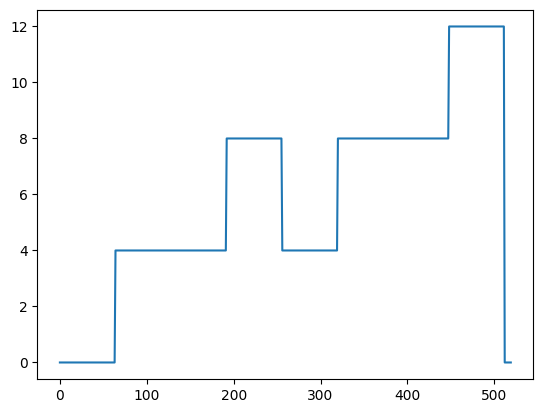

In [55]:
sleep_dur = [pow(2, 6 + (t % 3)) for t in range(12)]
print('sleep_dur:', sleep_dur)

def busy_threads_at_time(real_time_in_sec):
    return sum([(real_time_in_sec % (2 * s)) >= s for s in sleep_dur])

def found_optimum(busy_threads):
    match busy_threads:
        case 0: return 8
        case 4: return 12
        case 8: return 8
        case 12: return 16
        case _: return -1

s = list(range(520))
sns.lineplot(x=s, y=[busy_threads_at_time(s) for s in s])
plt.show()

In [88]:
#real, user, energy, energy_user, w, t = getxy([(166295838, 164009107, 7166974, 16), (166013697, 167873153, 7152447, 16), (165950330, 164107789, 7136151, 16), (166320722, 167873401, 7124982, 16), (165977180, 164122075, 7139569, 16), (165988138, 167872714, 7193219, 16), (166259615, 164112085, 7148480, 16), (166004772, 167871805, 7166547, 16), (166011591, 164120796, 7161297, 16), (166461946, 167865591, 7149274, 16), (165988538, 164118336, 7133344, 16), (166004696, 167863762, 7152142, 16), (165981858, 164121389, 7167462, 16), (166000191, 167873494, 7181134, 16), (165999689, 164122630, 7166913, 16), (166023610, 167871757, 7160626, 16), (166011601, 164124449, 7161786, 16), (166002556, 167872257, 7161847, 16), (165988160, 164113315, 7178326, 16), (165994694, 167872081, 7173749, 16), (249329408, 249673879, 9292884, 8), (164099607, 164011606, 6969159, 8), (163896488, 163986272, 6959943, 8), (164203096, 164023994, 6960004, 8), (163999970, 163997871, 6964948, 8), (163946272, 163991274, 6965497, 8), (164108982, 164011306, 6995283, 8), (164014558, 163996891, 6963788, 8), (164083342, 164009175, 6956342, 8), (188868458, 188478367, 7812663, 8), (164229690, 164025942, 6966047, 8), (164047266, 164003688, 6963605, 8), (163348221, 160417325, 6955488, 8), (197876514, 199732136, 8302346, 8), (163982753, 163991429, 6975202, 8), (164214912, 164025861, 6966108, 8), (163828898, 163974424, 7022199, 8), (163925403, 163988577, 6941449, 8), (174299481, 172286136, 7404522, 8), (172284836, 175523980, 7454266, 8), (326329553, 324755387, 8855690, 4), (326699482, 327646314, 8763833, 4), (328078796, 327993031, 8854103, 4), (336384312, 336070366, 9065895, 4), (327922123, 327950795, 8864540, 4), (327955887, 327955874, 8823525, 4), (327902563, 327953821, 8842812, 4), (327879693, 327947722, 8839088, 4), (327871989, 327936955, 8849404, 4), (327721214, 327904056, 8836159, 4), (327908777, 327954463, 8791604, 4), (327827631, 327931684, 8847267, 4), (327897715, 327950331, 8835671, 4), (327844883, 327934730, 8848793, 4), (327751397, 327927054, 8835304, 4), (327892184, 327951552, 8836587, 4), (327989975, 327966579, 8830482, 4), (327941273, 327965190, 8833535, 4), (328046160, 327976769, 8838600, 4), (327836665, 324929865, 8748147, 4), (219727842, 218617772, 7606914, 6), (244485279, 243251976, 8345499, 6), (219365042, 216540869, 7631755, 6), (219693912, 219925728, 7659221, 6), (219685751, 219927957, 7640667, 6), (218259934, 219691946, 7591472, 6), (218460151, 216393990, 7592205, 6), (218356552, 219712861, 7626933, 6), (218465525, 219724517, 7610821, 6), (218417685, 216387328, 7594279, 6), (218246511, 219693002, 7615643, 6), (218374202, 216380485, 7598369, 6), (218533616, 219736282, 7632549, 6), (218505545, 219734019, 7596233, 6), (218320486, 216370275, 7618022, 6), (218432747, 219720801, 7605694, 6), (218390363, 216385207, 7624919, 6), (218431863, 219719615, 7606609, 6), (218326795, 219706986, 7587261, 6), (218387834, 216383184, 7633281, 6), (187361428, 187474699, 7180768, 7), (187278160, 187882901, 7168011, 7), (187095373, 187857078, 7167890, 7), (187107206, 184425405, 7163739, 7), (187289742, 187890443, 7205120, 7), (187217399, 187874773, 7179364, 7), (187276354, 187884289, 7168195, 7), (187172111, 187869460, 7154034, 7), (187401498, 187908967, 7216168, 7), (187465226, 184481117, 7168683, 7), (187147439, 187868087, 7170392, 7), (187227985, 187876074, 7214764, 7), (187210511, 187873396, 7172528, 7), (187387440, 187899629, 7176923, 7), (187478904, 187910786, 7214642, 7), (187276175, 184451106, 7181134, 7), (186780715, 187819103, 7187726, 7), (187423400, 187898853, 7163616, 7), (187282934, 187884164, 7172712, 7), (186697681, 184370600, 7167157, 7), (164149784, 163575531, 6968915, 8), (163322538, 163913467, 7009747, 8), (164148431, 164014246, 7005415, 8), (164107818, 164011614, 6973859, 8), (163379508, 163921966, 6975446, 8), (163344413, 163915700, 6944257, 8), (163592198, 163945703, 6975934, 8), (163003815, 163873555, 6936201, 8), (163375978, 160421015, 7015729, 8), (163345716, 163917289, 6992414, 8), (163657968, 163953976, 7017438, 8), (164235348, 164027788, 7064313, 8), (164186644, 164020885, 7011822, 8), (163098522, 163886513, 6995283, 8), (164186462, 164022362, 7008405, 8), (164190838, 164022347, 7042157, 8), (164253356, 164030807, 7032270, 8), (164162249, 164019204, 7056073, 8), (164198903, 164022843, 7083234, 8), (164229647, 164026554, 7057782, 8), (295161774, 295487501, 11867218, 9), (295174209, 295905313, 11837921, 9), (295152261, 295902615, 11782441, 9), (295170182, 295902850, 11816071, 9), (295153928, 292348373, 11822662, 9), (316500035, 317238126, 12566069, 9), (294933954, 292320598, 11836823, 9), (295161356, 295906014, 11804779, 9), (295158060, 295903320, 11801667, 9), (295135991, 295901155, 11831391, 9), (295109112, 292344336, 11844940, 9), (295113790, 295901042, 11899200, 9), (295193309, 295908636, 11880158, 9), (295160786, 295902406, 11878327, 9), (295177748, 295907836, 11855743, 9), (295126660, 292346262, 11900116, 9), (295134136, 295901843, 11829621, 9), (295168194, 295902712, 11889557, 9), (295107966, 295900651, 11850067, 9), (295166781, 292348853, 11938751, 9), (260580252, 266467231, 8158488, 5), (263152365, 260597557, 8247415, 5), (261548593, 263493740, 8168131, 5), (261275884, 260239198, 8159525, 5), (261523280, 263283467, 8168436, 5), (435693617, 431934388, 17074358, 5), (431660338, 431927574, 17038836, 5), (431700972, 431939047, 17033404, 5), (431519414, 431900566, 17030046, 5), (431761151, 431946851, 17082720, 5), (432013500, 431902820, 17213885, 5), (431824962, 431959937, 17617020, 5), (431778170, 431933057, 17448380, 5), (431836252, 431963418, 17156084, 5), (431513352, 431901388, 17089007, 5), (431661026, 431924998, 17096941, 5), (431641826, 431926231, 17046709, 5), (431725917, 431942065, 17112139, 5), (431524666, 428692445, 17089190, 5), (431806077, 431959325, 17057879, 5), (376666649, 378427069, 15188498, 7), (377052979, 376149780, 15214012, 7), (377034454, 376146735, 15202536, 7), (377082853, 376153895, 15222801, 7), (376921804, 379559715, 15227500, 7), (376971905, 376137314, 15174277, 7), (377087775, 376153328, 15252098, 7), (377201655, 376168183, 15227561, 7), (376794319, 379534439, 15193992, 7), (377018206, 376132064, 15231040, 7), (376927220, 376130627, 15257773, 7), (376998496, 376140197, 15189475, 7), (376971083, 379564929, 15221824, 7), (376921178, 376129752, 15222984, 7), (377035715, 376147433, 15237815, 7), (377097094, 376155296, 15259360, 7), (376768354, 379467743, 15198570, 7), (377188026, 376169045, 15223776, 7), (377181853, 376167524, 15227256, 7), (376865950, 376118199, 15266746, 7), (265267712, 265812806, 11247225, 10), (264863562, 264080298, 11284273, 10), (266211655, 267771338, 11381013, 10), (264928791, 264080785, 11274507, 10), (265290608, 264093714, 11315401, 10), (265111327, 264097391, 11316987, 10), (264767360, 267674086, 11317110, 10), (265286997, 264124523, 11323091, 10), (264840545, 264082870, 11290804, 10), (265112389, 264103441, 11334627, 10), (264751081, 267672977, 11307649, 10), (265308725, 264092509, 11307893, 10), (264887715, 264063232, 11308382, 10), (265860653, 267739535, 11363191, 10), (264651103, 264059651, 11269197, 10), (265318787, 264129027, 11355928, 10), (265167525, 264113741, 11312166, 10), (264880248, 267675991, 11311861, 10), (264791342, 264067408, 11337068, 10), (264591134, 264049063, 11269747, 10), (362678288, 336815580, 14876976, 11), (349601134, 321954509, 14389184, 11), (409146911, 379737147, 16604694, 11), (340892235, 318582134, 14089319, 11), (432951426, 413901275, 17407121, 11), (296440666, 273492758, 12472319, 11), (306673756, 284238140, 12840605, 11), (331838798, 305778695, 13767970, 11), (381134860, 358160096, 15566610, 11), (342633945, 312762048, 14179774, 11), (341989846, 313992962, 14205408, 11), (415329593, 395533539, 16792925, 11), (383030338, 355870161, 15161705, 11), (343288440, 310843477, 14223719, 11), (316731350, 293148873, 13255581, 11), (391108375, 365724384, 15938863, 11), (361927918, 343444368, 14864098, 11), (325839785, 304161294, 13564845, 11), (326955019, 308261040, 13575588, 11), (390143075, 367828646, 15880331, 11), (444217112, 443408689, 17575089, 6), (443713332, 440615816, 17577409, 6), (443856903, 443973026, 17551957, 6), (443416419, 443900875, 17532670, 6), (443874293, 443977278, 17573075, 6), (443193922, 443863879, 17526566, 6), (443397774, 443896664, 17525529, 6), (443452174, 443899153, 17571793, 6), (443858576, 443974132, 17555986, 6), (443989584, 443993906, 17574662, 6), (443407042, 443898650, 17522111, 6), (444120377, 444015055, 17606278, 6), (398669221, 396104132, 14910301, 6), (361541589, 363575246, 12761930, 6), (361389294, 360215400, 12783659, 6), (361426361, 360224376, 12766142, 6), (361417000, 363560643, 12794156, 6), (361556950, 360249285, 13028348, 6), (361284970, 360199237, 12716459, 6), (361441019, 363572123, 12937772, 6), (304249702, 300901884, 12809538, 9), (295354705, 295926573, 12242339, 9), (295959785, 295928881, 12221160, 9), (295156554, 295901686, 12192169, 9), (295327133, 292368533, 12205352, 9), (295317332, 295922340, 12183746, 9), (295063427, 295882235, 12205779, 9), (295320928, 295920140, 12262847, 9), (296098231, 295961076, 12252715, 9), (295260804, 295911640, 12226470, 9), (295337476, 292365643, 12239654, 9), (295331319, 295924491, 12229156, 9), (295770469, 295925234, 12246856, 9), (337071905, 334961016, 13776820, 9), (295363680, 292373283, 12219268, 9), (295115322, 295897468, 12247771, 9), (294997297, 295880735, 12223113, 9), (295361165, 295925281, 12240692, 9), (295312130, 295921811, 12198211, 9), (295213645, 292343542, 12242461, 9), (431901540, 434726731, 14859642, 5), (432067486, 431993526, 14803734, 5), (432049127, 431987472, 14854271, 5), (432076100, 432006742, 14824852, 5), (431962591, 431971314, 14837548, 5), (432197332, 432021150, 14813500, 5), (431990965, 431986547, 14847740, 5), (431905812, 431964161, 14799584, 5), (431889524, 431974715, 14797081, 5), (432104119, 432008356, 14813011, 5), (431871748, 431966062, 14821129, 5), (432113337, 431999915, 14868676, 5), (432156251, 432022658, 15091392, 5), (432116823, 432014737, 15074363, 5), (431939173, 431967538, 14821617, 5), (432215268, 435237059, 14838707, 5), (432085194, 431997224, 14817528, 5), (432082019, 431994613, 14810204, 5), (431913638, 431963726, 14820824, 5), (431909780, 431972516, 14796837, 5), (310113919, 308258827, 12756010, 7), (310059697, 311716418, 12768339, 7), (310165528, 308306021, 12747465, 7), (310057984, 311718254, 12759855, 7), (309962705, 308275979, 12778959, 7), (310082293, 311723729, 12763151, 7), (310140683, 308302862, 12759611, 7), (310160729, 311735695, 12808805, 7), (309920796, 308273396, 12771879, 7), (310187177, 311738535, 12770475, 7), (310083307, 308296218, 12758146, 7), (310058506, 311721798, 12785184, 7), (310058166, 308293044, 12765776, 7), (310129926, 311730062, 12779203, 7), (310051042, 308286264, 12775785, 7), (310089882, 311724133, 12761991, 7), (309958018, 308276725, 12784208, 7), (310137294, 311730175, 12809904, 7), (310117665, 308300870, 12802213, 7), (310154901, 311729382, 12773161, 7), (265410686, 263586529, 11246187, 10), (265469079, 267743975, 11245577, 10), (265186304, 264111940, 11288972, 10), (265273296, 264116060, 11277437, 10), (265111155, 267704899, 11265596, 10), (265124688, 264110932, 11260653, 10), (265340792, 264133109, 11288789, 10), (265083604, 264089206, 11227083, 10), (265379361, 267731851, 11310762, 10), (265296214, 264126047, 11264315, 10), (265284893, 264126886, 11328218, 10), (265226188, 267719918, 11269380, 10), (264891429, 264086006, 11274568, 10), (265035491, 264101231, 11292757, 10), (265105686, 267707826, 11271334, 10), (265455590, 264142908, 11293794, 10), (265258044, 264124883, 11294405, 10), (266300999, 267802845, 11323457, 10), (264991994, 264093971, 11264437, 10), (265382693, 264135515, 11288179, 10), (251925808, 249477915, 10772555, 11), (242250436, 243823320, 10425449, 11), (242451580, 243844502, 10418187, 11), (242338437, 240208306, 10421604, 11), (242386804, 243839481, 10450718, 11), (242326344, 240169829, 10428501, 11), (242021915, 243809110, 10429416, 11), (243125192, 243803440, 10430882, 11), (242390469, 240213237, 10463596, 11), (242350230, 243843104, 10415196, 11), (242292585, 240193258, 10422886, 11), (284302065, 277567291, 12039886, 11), (287736620, 261813369, 12191253, 11), (440167767, 297603635, 18183364, 11), (428409957, 284746503, 17721878, 11), (484018434, 330159962, 19752391, 11), (491948015, 334535448, 19473156, 11), (448021542, 309445582, 18404555, 11), (451993624, 305450385, 18585340, 11), (447998264, 299268834, 18427565, 11), (444434042, 279688278, 18242996, 12), (435513757, 280449027, 17562455, 12), (431996448, 284824248, 17231157, 12), (416026782, 273999007, 17195269, 12), (415967735, 278148360, 16634662, 12), (444021947, 293956089, 18206253, 12), (399971311, 266656086, 15984883, 12), (407993819, 266158208, 16363422, 12), (460100261, 301005714, 18881055, 12), (395505298, 254290308, 16489521, 12), (388386981, 254689771, 15734396, 12), (389802293, 254141986, 16224629, 12), (469185087, 299215862, 19193677, 12), (397020781, 262747500, 16513019, 12), (395977854, 252130402, 15945638, 12), (408016544, 259665304, 16953814, 12), (451996205, 299334507, 18518568, 12), (417642479, 271799598, 17237016, 12), (438353252, 286853163, 18076065, 12), (451975468, 301984676, 18069045, 12), (628385778, 556071589, 25601741, 6), (639597584, 571977193, 25607235, 6), (637967262, 559637805, 25672969, 6), (494052424, 446335267, 20494271, 6), (576124971, 524591307, 23627503, 6), (501887722, 452958332, 20779060, 6), (677940615, 612931889, 27325309, 6), (735992576, 669182872, 29240465, 6), (654125877, 589668289, 26621453, 6), (580433587, 525154776, 23782593, 6), (606688318, 553106689, 24770688, 6), (614924237, 546385489, 25118344, 6), (556989699, 500087672, 22895022, 6), (568131487, 508666258, 23359864, 6), (776748744, 702083073, 31309674, 6), (645927325, 581422933, 26149896, 6), (730580241, 665089349, 29492234, 6), (577051853, 510716189, 23682068, 6), (646223773, 589697743, 26406854, 6), (574128263, 514354535, 23283571, 6), (551968933, 404424275, 21926397, 9), (511879783, 390200734, 21073982, 9), (521117644, 388155767, 21411322, 9), (530992719, 392343355, 21341559, 9), (564091371, 411056125, 22989688, 9), (491895805, 366650144, 19772593, 9), (583994407, 431558208, 23624085, 9), (487948333, 353771906, 20167062, 9), (500389247, 384825977, 20586190, 9), (487847951, 366198270, 20140025, 9), (509345425, 381641785, 21014899, 9), (513901134, 379749710, 21150032, 9), (509262592, 359498220, 20987190, 9), (487315925, 336647890, 20246835, 9), (490256600, 339850202, 20258676, 9), (320613975, 288802511, 13393276, 9), (294839247, 295865972, 12388519, 9), (294684309, 295847497, 12391630, 9), (294687721, 292292466, 12419585, 9), (295555510, 295902516, 12429412, 9), (432640855, 434314667, 16933245, 5), (432668843, 435331568, 17182268, 5), (432510052, 432097851, 17133562, 5), (432718385, 432140366, 17130327, 5), (432582479, 432114634, 17175920, 5), (432713947, 432140371, 17148211, 5), (432608616, 432120373, 17156999, 5), (432603070, 432116799, 17180071, 5), (432575487, 435312280, 17177569, 5), (432662777, 432123993, 17163774, 5), (432670189, 432127977, 17119646, 5), (432633674, 432123177, 17157732, 5), (432650206, 432126649, 17165483, 5), (432696076, 432137788, 17111956, 5), (432504328, 435297767, 17167803, 5), (432722900, 432142875, 17157305, 5), (432626996, 432121593, 17129533, 5), (432551545, 432107220, 17152239, 5), (432590817, 432115540, 17117998, 5), (432727472, 432139029, 17178972, 5), (308240151, 307037743, 12888029, 7), (308360883, 311477158, 12853727, 7), (308135766, 308016857, 12819486, 7), (308297584, 308041387, 12830961, 7), (308250217, 308032790, 12867032, 7), (308333928, 308044607, 12845488, 7), (308252623, 308035232, 12829251, 7), (308271177, 308037899, 12815153, 7), (308252030, 308034116, 12870817, 7), (308286862, 308038902, 12849881, 7), (308160321, 308022094, 12837492, 7), (308364331, 308050494, 12862821, 7), (308245631, 308029952, 12856046, 7), (308399924, 308055856, 12827238, 7), (308214859, 308027966, 12849576, 7), (308272648, 308036892, 12874357, 7), (308186123, 311454261, 12851896, 7), (308338844, 308046103, 12857084, 7), (308306241, 308040507, 12840909, 7), (308340177, 308046569, 12862333, 7), (268951024, 267476193, 11461274, 10), (264930574, 264034320, 11306246, 10), (264954002, 264070367, 11298372, 10), (265417787, 267734901, 11313386, 10), (265217478, 264106756, 11306734, 10), (265436629, 264099379, 11361055, 10), (265482976, 267743937, 11326326, 10), (265537238, 264151475, 11347871, 10), (265268261, 267721824, 11332186, 10), (265456585, 264140369, 11315095, 10), (265528098, 264150540, 11357393, 10), (265480478, 267746253, 11310213, 10), (265372049, 264123911, 11359834, 10), (265405571, 264035053, 11304720, 10), (265375641, 267456580, 11368257, 10), (265548221, 264152745, 11301423, 10), (265205765, 264076055, 11354769, 10), (265489854, 267746769, 11325654, 10), (265471769, 264123392, 11306490, 10), (265491452, 267738454, 11368440, 10), (251099389, 247161506, 10744235, 11), (242254899, 243829822, 10412754, 11), (242252224, 240202413, 10426609, 11), (242338954, 243846919, 10453648, 11), (242000307, 243801589, 10390171, 11), (242342480, 240209808, 10425938, 11), (242249928, 243839216, 10415439, 11), (242317890, 240208960, 10451267, 11), (241888007, 243758561, 10428929, 11), (242322288, 240178337, 10417332, 11), (242244184, 243838918, 10409092, 11), (242286123, 240204969, 10423557, 11), (242195824, 243825979, 10465061, 11), (242418972, 243844404, 10422764, 11), (242243715, 240194430, 10444004, 11), (242351357, 243829981, 10425815, 11), (242278742, 240202518, 10431370, 11), (242362543, 243842360, 10425144, 11), (242288777, 240201722, 10463597, 11), (242344346, 243816509, 10419407, 11), (388003245, 355579613, 15328696, 12), (423995767, 388649121, 16692523, 12), (307996022, 288996184, 12321257, 12), (319997570, 290972802, 13278103, 12), (387985002, 364544153, 15376120, 12), (372012005, 347654409, 15202903, 12), (312786850, 295033638, 12965116, 12), (312879587, 289695331, 12976713, 12), (274521097, 254866030, 11628510, 12), (411305307, 382545822, 16578266, 12), (248468132, 238360516, 10526706, 12), (351049865, 321908280, 14447229, 12), (336393692, 316685476, 13854456, 12), (369164581, 350736771, 15073204, 12), (345474119, 321101611, 14246546, 12), (319456812, 298270069, 13257839, 12), (342211803, 259802884, 14306970, 12), (447000398, 286889207, 18479384, 12), (441261787, 277105842, 18276992, 12), (443977714, 273329295, 18348403, 12), (722084798, 647018892, 29301560, 6), (581869249, 524307811, 23514711, 6), (608022632, 546667085, 24965817, 6), (547881245, 477304905, 22661808, 6), (620190335, 559999867, 25354610, 6), (605698652, 540938753, 24845151, 6), (752227469, 680028437, 30477278, 6), (741958734, 668017213, 29534287, 6), (655995460, 593305522, 26201410, 6), (788020950, 701993121, 31907572, 6), (598911459, 533142348, 24640196, 6), (625275644, 562209500, 25599360, 6), (648255991, 581365801, 26492608, 6), (767502917, 697920648, 30676558, 6), (491233811, 443868200, 20517953, 6), (517869139, 471636363, 21526922, 6), (666884711, 595798841, 26765495, 6), (596665430, 540772641, 24586607, 6), (777581438, 696255901, 31487895, 6), (633743438, 556288745, 25575069, 6), (635966692, 444186389, 25266903, 9), (532024559, 387555502, 21897465, 9), (504401072, 365379936, 20860054, 9), (495563523, 369692996, 20026133, 9), (519996887, 371098931, 21001472, 9), (541260449, 395989035, 22259282, 9), (487277082, 359532547, 20195077, 9), (523490176, 379304311, 21634222, 9), (487957670, 368038545, 20043650, 9), (511991452, 388037017, 20591561, 9), (491992591, 365820479, 19913584, 9), (536025115, 398842500, 22049870, 9), (501967740, 359773647, 20798836, 9), (566014061, 415840602, 23223879, 9), (499979196, 364436742, 20107797, 9), (496022314, 356444096, 20594308, 9), (500059690, 348892021, 20753914, 9), (492112281, 346286151, 20515267, 9), (487948383, 355996657, 20293650, 9), (544312270, 402246157, 22404727, 9), (452829231, 444353699, 19159863, 5), (458654238, 449274857, 19615124, 5), (491699458, 467286097, 20931159, 5), (455822788, 450957992, 19139173, 5), (434520785, 433729838, 18464796, 5), (465084290, 450045138, 19770152, 5), (440296269, 432656466, 18809522, 5), (438074932, 436421222, 18645338, 5), (452652397, 447144588, 19167554, 5), (433068164, 432211321, 18386794, 5), (432864073, 435353559, 18422255, 5), (432983174, 432189562, 18439833, 5), (432809565, 432152991, 18440260, 5), (433123801, 432220618, 18422316, 5), (432755056, 432146870, 18456435, 5), (433074650, 435381780, 18456862, 5), (435704985, 434182195, 18227431, 5), (433354702, 432253173, 18194778, 5), (433055483, 432164999, 18138686, 5), (433180261, 435392770, 18153701, 5), (533108323, 486927388, 22002141, 7), (606646597, 556349317, 24278930, 7), (605641443, 548749851, 24764219, 7), (501192420, 452725006, 20809761, 7), (657172836, 601866512, 26801628, 7), (609186432, 551519790, 24947690, 7), (623284922, 573011008, 25477535, 7), (556562872, 508626385, 22925356, 7), (574929300, 518776944, 23056399, 7), (491992002, 453077177, 19915476, 7), (515991599, 476468113, 20916694, 7), (555998572, 506272202, 22301884, 7), (541058081, 493331323, 22336307, 7), (546932934, 502689545, 21991704, 7), (629847544, 582540579, 25744075, 7), (424331350, 389696662, 17851272, 7), (525809161, 465950816, 21266730, 7), (495996627, 448987478, 20139413, 7), (659996835, 604850217, 26316705, 7), (443992713, 401053301, 18580702, 7), (541230220, 540281457, 22169743, 4), (541328517, 540294124, 22200932, 4), (541213489, 540298896, 22133427, 4), (541448972, 543343550, 22227299, 4), (541216194, 540279426, 22149174, 4), (541491689, 540331531, 22218632, 4), (541105387, 543268997, 22183903, 4), (541468580, 540340731, 22162785, 4), (541239474, 540287313, 22177800, 4), (541311251, 543318603, 22192570, 4), (541279782, 540312820, 22188176, 4), (541263254, 540307084, 22204289, 4), (541235085, 543274200, 22184086, 4), (541527442, 540376426, 22170598, 4), (541390081, 540340155, 22220646, 4), (541318606, 543304971, 22173405, 4), (541242555, 540286149, 22196232, 4), (541296346, 540317408, 22182988, 4), (541221164, 543165297, 22223698, 4), (541354366, 540304493, 22217411, 4), (388342873, 378329980, 16616352, 6), (360878366, 360108414, 15525900, 6), (360926532, 363463997, 15469260, 6), (360793997, 360057510, 15500021, 6), (361028422, 360125166, 15483481, 6), (363457546, 363663143, 15582785, 6), (373466536, 371728760, 16012166, 6), (360937314, 363469124, 15505514, 6), (360814386, 360129673, 15495566, 6), (360916008, 360057308, 15509360, 6), (360858780, 360112088, 15502829, 6), (360865953, 360135497, 15466513, 6), (361053040, 363459245, 15504050, 6), (360966347, 360082444, 15546530, 6), (360833464, 360134319, 15482443, 6), (361018517, 360149247, 15506857, 6), (360887102, 363472815, 15490439, 6), (360891807, 360127604, 15515646, 6), (360849273, 360095426, 15511557, 6), (361081436, 360171820, 15512717, 6), (583656752, 445983128, 23887817, 9), (539356109, 404288329, 22216313, 9), (564977572, 277069353, 23551942, 9), (544756609, 272361629, 22459110, 9), (591996497, 296496005, 23745301, 9), (571996009, 281210573, 23324647, 9), (587995124, 294487150, 24064453, 9), (608025005, 301075745, 25175045, 9), (615965950, 306225180, 24997068, 9), (599997733, 297146299, 24443419, 9), (627995375, 313758638, 25265377, 9), (611994434, 303879414, 24830015, 9), (555994694, 276896886, 22722781, 9), (535996719, 267612380, 22068425, 9), (523995635, 261334038, 21514593, 9), (543997269, 269330070, 22101323, 9), (579995966, 288507739, 23504579, 9), (619994200, 308902383, 25149960, 9), (612021425, 302221476, 25329036, 9), (563972974, 279123612, 22895083, 9), (883985539, 437676401, 36112945, 5), (915989007, 452479022, 37204738, 5), (872009209, 433597469, 35953765, 5), (877392651, 437400101, 36152252, 5), (890587966, 443623687, 36607572, 5), (920013131, 449954150, 37856410, 5), (1023898096, 509370326, 41924270, 5), (936083235, 467244626, 38555138, 5), (992046529, 491517749, 41972488, 5), (1063689030, 502335876, 44598885, 5), (976945096, 484275163, 40796831, 5), (999324685, 479914026, 41152727, 5), (999933741, 497839206, 40416583, 5), (991991391, 491519371, 40013082, 5), (1099994477, 505203654, 44485116, 5), (883988400, 439837506, 35914398, 5), (931989933, 457281918, 37817530, 5), (879992015, 436155913, 36060211, 5), (1044027851, 519986140, 42704480, 5), (899963531, 442496175, 36645170, 5), (735964373, 364268601, 29812118, 7), (751992665, 375993037, 30494795, 7), (755994609, 375332610, 30698591, 7), (319632796, 224123737, 13014004, 7), (187358539, 187907290, 7361432, 7), (187239698, 187884259, 7376751, 7), (187105303, 187868927, 7381268, 7), (187337062, 187902453, 7398052, 7), (187282911, 184467961, 7430950, 7), (187106308, 187870779, 7411908, 7), (187206071, 187885810, 7403118, 7), (187015123, 187857009, 7391705, 7), (188114688, 188011648, 7436077, 7), (187567644, 187934707, 7432903, 7), (187625542, 187944231, 7416973, 7), (187566149, 187936259, 7414044, 7), (187554532, 184506504, 7391949, 7), (187592535, 187938724, 7462505, 7), (187561304, 187935013, 7424847, 7), (186941450, 187845785, 7397014, 7), (163828507, 163737189, 7160016, 8), (164150518, 164016781, 7198468, 8), (164038094, 164000033, 7211652, 8), (164106308, 164011836, 7198040, 8), (164137623, 164015585, 7176618, 8), (164195033, 164022038, 7170574, 8), (163530140, 163938967, 7207868, 8), (163871506, 163983512, 7168133, 8), (164033165, 164001197, 7260114, 8), (162693934, 163835340, 7150555, 8), (163424558, 160425396, 7200970, 8), (164030375, 164003251, 7221662, 8), (163011536, 163872966, 7184307, 8), (164095222, 164009827, 7222638, 8), (162912041, 163862917, 7186810, 8), (162964047, 163869104, 7186017, 8), (162966563, 160366380, 7186993, 8), (162980608, 163871389, 7196881, 8), (162965473, 163868870, 7177655, 8), (163662316, 163956953, 7192365, 8), (295155202, 295734867, 12112518, 9), (295202563, 292354411, 12112029, 9), (295164601, 295902213, 12073211, 9), (295140188, 295903122, 12109833, 9), (295166281, 295905358, 12076324, 9), (295158217, 295899677, 12154388, 9), (295125665, 292345769, 12056426, 9), (295204626, 295909672, 12124298, 9), (295233233, 295914274, 12062408, 9), (295182707, 295905902, 12117095, 9), (295165398, 295906433, 12082306, 9), (295161765, 292345284, 12139556, 9), (295006669, 295889239, 12077301, 9), (295116107, 295899206, 12087005, 9), (295092004, 295894712, 12076812, 9), (295109229, 292342903, 12109527, 9), (295091443, 295895811, 12071991, 9), (295070999, 295894345, 12092254, 9), (295158312, 295904977, 12051422, 9), (294986161, 295886607, 12081695, 9), (260363282, 260283429, 8195658, 5), (261656470, 260327826, 8235635, 5), (262469425, 263693207, 8279764, 5), (262343774, 260466922, 8243265, 5), (262363016, 263667185, 8270182, 5), (262379224, 260471326, 8265726, 5), (262458747, 263690781, 8242471, 5), (262292432, 263654417, 8268351, 5), (262478434, 260492346, 8251688, 5), (262367207, 263671809, 8236734, 5), (262430015, 260485281, 8279825, 5), (262080646, 263607598, 8244852, 5), (262512485, 263699704, 8257242, 5), (262239860, 260445867, 8263040, 5), (262496244, 263698387, 8251993, 5), (262400932, 260475080, 8263163, 5), (262468095, 263690163, 8249979, 5), (262384658, 263676210, 8263528, 5), (262522697, 260501663, 8237223, 5), (262603277, 263717781, 8258096, 5), (436605920, 437273555, 10279637, 3), (436101855, 436029582, 10250767, 3), (436940543, 436300755, 10406163, 3), (436185981, 436038280, 10257237, 3), (471788934, 471915548, 11205720, 3), (436241880, 436074837, 10234410, 3), (436404402, 436120060, 10240697, 3), (436220762, 438725253, 10206883, 3), (436327762, 436101347, 10213230, 3), (436240103, 436064882, 10242772, 3), (436379483, 436117641, 10230870, 3), (436222563, 436060731, 10209324, 3), (436410997, 436131855, 10222508, 3), (436087279, 436016060, 10252477, 3), (436423605, 436137587, 10260838, 3), (436181114, 436057733, 10243748, 3), (436481557, 436151186, 10262242, 3), (435271725, 435747858, 10214329, 3), (435212731, 435728786, 10237889, 3), (436301620, 436097592, 10283360, 3), (328138324, 327594276, 8982460, 4), (328014020, 327997265, 8971961, 4), (327286985, 327817927, 8955239, 4), (327645399, 327905703, 8965919, 4), (328200865, 328044472, 8982033, 4), (327922433, 327979009, 8978431, 4), (328146717, 328033814, 8968972, 4), (327974547, 327987928, 8987281, 4), (328020536, 328001480, 8980385, 4), (327791560, 327941738, 8982826, 4), (328060201, 328005079, 8988503, 4), (327979386, 327993739, 8986366, 4), (328108953, 328024512, 8972206, 4), (328003745, 327991548, 8985694, 4), (328071395, 328014928, 8978859, 4), (326110982, 324521755, 8916359, 4), (325930663, 327480140, 8957680, 4), (463394006, 463684209, 16484333, 4), (541742247, 540429004, 21098090, 4), (541595092, 540395055, 21132454, 4), (528782618, 530566293, 20629402, 5), (529411383, 528280001, 20749947, 5), (529266635, 528250602, 20725411, 5), (529258663, 531448618, 20703438, 5), (529204088, 528238984, 20772103, 5), (529303684, 528257150, 20726875, 5), (529199933, 531438307, 20737130, 5), (529388909, 528275153, 20773445, 5), (529215108, 528238224, 20737557, 5), (529413427, 531479629, 20729012, 5), (528959392, 528189845, 20718453, 5), (529353824, 528267941, 20722908, 5), (529229115, 528244832, 20772774, 5), (529444295, 531486592, 20733529, 5), (529120202, 528218806, 20731087, 5), (529238045, 528242713, 20781807, 5), (529149515, 531428392, 20762581, 5), (529289423, 528254750, 20755257, 5), (529283175, 528253301, 20785652, 5), (529393380, 531476967, 20728036, 5), (720103311, 720618016, 27390005, 3), (720255390, 720080098, 27390067, 3), (720206786, 720063009, 27402273, 3), (720406576, 720129655, 27426932, 3), (720138446, 720041656, 27408743, 3), (720375410, 720123913, 27382987, 3), (720263316, 720080829, 27405081, 3), (720328956, 720104831, 27518729, 3), (720254092, 720078904, 27372610, 3), (720422808, 720136240, 27381766, 3), (720275523, 720083901, 27426627, 3), (720391361, 722794680, 27428335, 3), (720448391, 720142913, 27601980, 3), (720219821, 720066200, 27415152, 3), (720368989, 720114469, 27405203, 3), (720493681, 720156302, 27417899, 3), (720147706, 720044312, 27400198, 3), (720372953, 720115619, 27408988, 3), (720298454, 720094911, 27448477, 3), (720215691, 720066968, 27404410, 3), (541419316, 542611002, 21157233, 4), (541688152, 540419857, 21175910, 4), (541571312, 540391094, 21117073, 4), (541636403, 543405965, 21194587, 4), (541452782, 540360142, 21143988, 4), (541634966, 543403923, 21171821, 4), (541431923, 540351336, 21189582, 4), (541603526, 540398375, 21159492, 4), (541478264, 543367288, 21185493, 4), (541448899, 540359138, 21156806, 4), (540069079, 534903093, 19873484, 4), (539679076, 539915659, 19696422, 4), (539395797, 539840190, 19693065, 4), (539572210, 539878902, 19713267, 4), (539335108, 539831134, 19674205, 4), (539666116, 539911823, 19699840, 4), (539522987, 536871384, 19655345, 4), (539768678, 539938420, 19713817, 4), (539563631, 539888074, 19705760, 4), (539709790, 539922894, 19645701, 4), (360457769, 359174501, 14747216, 6), (360505546, 360076354, 14764916, 6), (360410833, 363400830, 14822105, 6), (360530460, 360086688, 14775170, 6), (360365670, 360058199, 14760582, 6), (360434489, 360069127, 14762658, 6), (360348338, 360053166, 14797020, 6), (360464471, 360071808, 14776024, 6), (360382323, 360063144, 14756493, 6), (360451236, 360071971, 14789147, 6), (360455796, 360073192, 14773827, 6), (360408707, 360064589, 14804955, 6), (360317288, 363378987, 14782310, 6), (360463194, 360076629, 14790368, 6), (360476474, 360077019, 14777489, 6), (360494891, 360079654, 14812523, 6), (360366776, 360058452, 14778954, 6), (360545585, 360088251, 14798302, 6), (360440426, 360069995, 14792137, 6), (360429152, 360070437, 14797020, 6), (296444286, 294823681, 12412261, 9), (295142619, 295900456, 12399932, 9), (295681241, 295962716, 12435332, 9), (295366373, 295913821, 12395171, 9), (295479196, 295931781, 12415922, 9), (295183423, 295906678, 12392791, 9), (295698898, 295965956, 12401335, 9), (295666180, 295959503, 12426848, 9), (295463306, 292378565, 12445342, 9), (295625292, 295955630, 12401458, 9), (295730673, 295949949, 12465666, 9), (295519161, 295906768, 12522124, 9), (295725771, 295968757, 12403532, 9), (295596577, 295953356, 12434356, 9), (295545123, 295943247, 12386626, 9), (295066311, 295892839, 12402373, 9), (295555860, 295947070, 12395415, 9), (294989598, 292316961, 12392119, 9), (295429005, 295926262, 12380217, 9), (295569565, 295947058, 12430388, 9), (431558312, 433555834, 17186480, 5), (431841162, 431966818, 17814774, 5), (431615592, 431914393, 17652420, 5), (431854568, 431967847, 17305193, 5), (431573137, 431913439, 17147905, 5), (431751681, 431945005, 17215593, 5), (431689032, 428734858, 17227190, 5), (431770160, 431948867, 17222002, 5), (431517914, 431896288, 17176225, 5), (431721372, 431942364, 17198198, 5), (431664495, 431929608, 17211321, 5), (431798594, 431954320, 17194048, 5), (431640857, 431925255, 17214311, 5), (431810921, 431958375, 17201739, 5), (431649155, 431925290, 17170366, 5), (431530462, 431898664, 17197526, 5), (431456749, 431886538, 17175982, 5), (431651937, 431923201, 17223955, 5), (431618456, 428721339, 17207964, 5), (431779369, 431953064, 17168107, 5), (378193862, 378695422, 15485129, 7), (378297625, 379752367, 15417746, 7), (378558566, 376364434, 15459311, 7), (378085049, 379723590, 15422324, 7), (378601942, 376366406, 15441611, 7), (378508915, 379781767, 15461264, 7), (378561025, 379787535, 15467368, 7), (378538395, 376357498, 15443137, 7), (378378313, 379765390, 15427206, 7), (378371191, 376335210, 15475974, 7), (378569015, 379794514, 15407797, 7), (378063553, 379716621, 15417258, 7), (378623482, 376372608, 15462302, 7), (528387931, 459112512, 21681219, 7), (636585552, 536587484, 25632380, 7), (651457163, 552481112, 26693047, 7), (505297833, 417304488, 21128485, 7), (663234879, 547266489, 26680169, 7), (638154022, 520842589, 26163813, 7), (637838504, 519966210, 25993097, 7), (491961446, 340380798, 20111460, 10), (452026797, 303593808, 18864332, 10), (505822296, 341164147, 20930915, 10), (458133806, 309882969, 18626600, 10), (472002865, 329683935, 19537609, 10), (444019726, 307413321, 18546828, 10), (451964252, 303971394, 18398146, 10), (492019990, 337986576, 20358164, 10), (499968248, 356395813, 20048044, 10), (497558355, 343046107, 20556527, 10), (498434942, 354046743, 20076670, 10), (463995567, 320358252, 19167431, 10), (522293390, 352606099, 21534430, 10), (534400814, 355837269, 22041386, 10), (567292651, 372780504, 22808352, 10), (492023047, 330398072, 20407968, 10), (423630414, 278736309, 17772171, 10), (452363312, 317594722, 18908887, 10), (567990883, 384372893, 23278444, 10), (523973533, 363127830, 21211371, 10), (462484052, 447714236, 19501110, 5), (431671152, 431922250, 18400282, 5), (431719818, 431910801, 18406752, 5), (432280873, 431954562, 18395522, 5), (431686326, 431926935, 18416030, 5), (431912282, 431965548, 18390883, 5), (436775094, 434426413, 18654615, 5), (443770804, 435962071, 18923658, 5), (431944180, 431917675, 18412123, 5), (431843630, 431955056, 18399245, 5), (432221797, 431905651, 18431837, 5), (431866787, 431967409, 18414443, 5), (431670013, 431927629, 18425429, 5), (431947227, 431954366, 18424147, 5), (431633983, 431920737, 18378493, 5), (431954863, 431946030, 18458998, 5), (431879321, 431959352, 18412612, 5), (432213835, 431946672, 18461622, 5), (431756783, 431937170, 18417373, 5), (432096022, 431957024, 18460524, 5), (680559626, 538678526, 27920155, 7), (644315291, 547469185, 26421014, 7), (634007462, 536274220, 26038996, 7), (611554236, 522151891, 25210263, 7), (691800507, 573685370, 28223255, 7), (652285273, 542312384, 26338189, 7), (599991486, 471986774, 24290710, 7), (601457896, 492093307, 24805661, 7), (590530925, 470146757, 23962646, 7), (643992101, 542270914, 26325372, 7), (624712931, 512980801, 25662288, 7), (651298970, 545329964, 26788994, 7), (515969588, 413074909, 21541815, 7), (588030456, 493142242, 24300780, 7), (611347407, 500607495, 25149349, 7), (381844028, 383622630, 15457358, 7), (381595041, 380220820, 15421836, 7), (381801443, 383681024, 15393698, 7), (381813301, 380254333, 15434592, 7), (381841258, 383673554, 15456504, 7), (537967753, 536727496, 20948432, 4), (538013187, 539497560, 20940620, 4), (537951742, 536477684, 20971687, 4), (538084016, 539515160, 20953194, 4), (537948086, 536476251, 20969795, 4), (538026605, 539501554, 20949531, 4), (538158817, 536518295, 20971443, 4), (538085398, 539511074, 20975166, 4), (537999527, 536492407, 21005745, 4), (538156382, 539533865, 20965400, 4), (538081190, 536513615, 20980476, 4), (537996757, 539492403, 20961983, 4), (537922967, 536476589, 20912727, 4), (538090218, 539517229, 20985298, 4), (538100713, 536516830, 20954780, 4), (538197852, 539544501, 20934517, 4), (537969984, 536485418, 20955146, 4), (537927047, 539471246, 20949349, 4), (538015338, 536497931, 21036567, 4), (538058601, 539500918, 20937324, 4)])
#real, user, energy, energy_user, w, t = getxy([(71757252, 68072570, 3091789, 16), (71523263, 71958259, 3019218, 16), (71475632, 71947465, 3085991, 16), (71516036, 71969331, 3015556, 16), (71992003, 71964350, 3116691, 16), (71512011, 71968315, 3022819, 16), (71504633, 71967703, 3049858, 16), (71520050, 71968464, 3018791, 16), (71504185, 71968677, 3021721, 16), (71506083, 68218223, 3060051, 16), (71506133, 71968533, 3040520, 16), (72202451, 71986018, 3087455, 16), (71516541, 71969473, 3025139, 16), (71510303, 71964022, 3065544, 16), (71502088, 71963349, 3027275, 16), (71513492, 71967252, 3073966, 16), (71515704, 71968007, 3033257, 16), (71510155, 71966593, 3059806, 16), (71509703, 71968561, 3001091, 16), (71520680, 68219072, 3078179, 16), (99507645, 103759102, 3796804, 8), (60953777, 63618722, 2595879, 8), (60922176, 60114390, 2606317, 8), (60980298, 60122000, 2640740, 8), (60987868, 60120963, 2650079, 8), (61025569, 63627828, 2639581, 8), (60958080, 60119215, 2640984, 8), (60767708, 60094303, 2644830, 8), (60605525, 60073352, 2605889, 8), (77550790, 77572816, 3224357, 8), (60697550, 60085274, 2632989, 8), (60671735, 60082497, 2645135, 8), (60769773, 60093795, 2616448, 8), (60729230, 60090519, 2645684, 8), (60727987, 60089800, 2641656, 8), (60691372, 63585343, 2608880, 8), (60650756, 60080784, 2642022, 8), (60754512, 60091719, 2640557, 8), (60539688, 60066239, 2637445, 8), (60540512, 60067106, 2620415, 8), (121185264, 126204652, 3300346, 4), (121442480, 120356619, 3298637, 4), (121411080, 120348131, 3323233, 4), (121704434, 123420862, 3321525, 4), (121731646, 120427402, 3504630, 4), (121473109, 120361381, 3751943, 4), (121284506, 123320089, 3792410, 4), (121257173, 120312889, 3781545, 4), (120959394, 120238826, 3819937, 4), (121451497, 123362013, 3788015, 4), (121312572, 120324566, 3787405, 4), (121481998, 120361604, 3836111, 4), (121184033, 123293215, 3926076, 4), (122987133, 120740892, 3945547, 4), (128398014, 131096204, 3998463, 4), (122478567, 120606882, 4028799, 4), (121489297, 123370936, 3527029, 4), (121511115, 120374891, 3505790, 4), (121474720, 120361783, 3304068, 4), (121671237, 123409519, 3318534, 4), (81161071, 79876592, 2870049, 6), (98008279, 96844387, 3335746, 6), (80566673, 80093917, 2846856, 6), (80962713, 80159021, 2876274, 6), (80769805, 80127570, 2883965, 6), (80983828, 80163329, 2893974, 6), (80582252, 80096302, 2885735, 6), (80878102, 83478997, 2880364, 6), (80699051, 80114768, 2899712, 6), (80852056, 80139696, 2858879, 6), (80905738, 80148685, 2896843, 6), (80830999, 83467521, 2894768, 6), (80660239, 80106930, 2879570, 6), (80789172, 80130249, 2894158, 6), (80806820, 80130378, 2883843, 6), (80881656, 80146156, 2857719, 6), (80564932, 80092964, 2890130, 6), (80779289, 83461341, 2854057, 6), (80820902, 80135055, 2917351, 6), (80681973, 80112232, 2863763, 6), (69635995, 67919919, 2720085, 7), (69486860, 71639347, 2738763, 7), (70340991, 68332139, 2756951, 7), (69863522, 71693460, 2803276, 7), (70545806, 71788474, 2797540, 7), (81107929, 80157669, 3169181, 7), (72498134, 72070726, 3023491, 7), (69724925, 68238630, 2704094, 7), (69740581, 71674042, 2723565, 7), (69718774, 68243930, 2741753, 7), (69522983, 71645178, 2700372, 7), (69591884, 68226142, 2731377, 7), (69566383, 68222501, 2701348, 7), (69539970, 71647213, 2740167, 7), (69522719, 68216477, 2726067, 7), (69565792, 71649945, 2707207, 7), (69469229, 68208794, 2738091, 7), (70238440, 68316617, 2721978, 7), (69515978, 71643493, 2698297, 7), (69594338, 68224384, 2747063, 7), (60684910, 59703024, 2645379, 8), (60735767, 63590575, 2628838, 8), (60581958, 60071787, 2606073, 8), (60627103, 60077582, 2645196, 8), (60980245, 60121609, 2648308, 8), (60681821, 60083485, 2605218, 8), (60659894, 60080701, 2646661, 8), (60694066, 63586105, 2654351, 8), (60651597, 60080511, 2602288, 8), (60712084, 60088259, 2646112, 8), (60665988, 60082486, 2643548, 8), (61471780, 63680870, 2641411, 8), (62450669, 60303106, 2705316, 8), (60748684, 60091248, 2609429, 8), (60527629, 60062489, 2641473, 8), (60796345, 63597660, 2641961, 8), (60580646, 60071304, 2598382, 8), (60645739, 60079516, 2639519, 8), (60640977, 60078522, 2606256, 8), (60675912, 60083483, 2622124, 8), (125334349, 127337128, 4988940, 9), (125297783, 124143405, 4955798, 9), (125289011, 124142499, 4957141, 9), (125295035, 127698130, 4951403, 9), (125303042, 124144036, 4992846, 9), (146217878, 145478457, 5711472, 9), (125320201, 124145663, 4958667, 9), (125323692, 124146035, 4998461, 9), (125278886, 124141325, 4969226, 9), (125280718, 127696833, 4964892, 9), (125331029, 124146590, 4941760, 9), (125318314, 124145686, 4960558, 9), (125268941, 127694927, 4955432, 9), (125345794, 124146175, 4976672, 9), (125336345, 124148361, 5134203, 9), (125319367, 127694097, 4941943, 9), (125282674, 124141624, 4969347, 9), (125351874, 124149350, 4990893, 9), (125320104, 127701370, 4941882, 9), (125283172, 124141695, 4967578, 9), (97007354, 98174778, 3068779, 5), (97086390, 99415082, 3015556, 5), (97138670, 96226465, 3149162, 5), (97046264, 96207991, 3145194, 5), (96948008, 96188062, 3061638, 5), (97087272, 99416292, 3047966, 5), (97060650, 96210756, 3045341, 5), (97091506, 96217073, 3057610, 5), (97002158, 96198971, 3046867, 5), (97079877, 99414659, 3037895, 5), (96930817, 96184615, 3042961, 5), (97227263, 96241544, 3049186, 5), (97014501, 99394508, 3039421, 5), (97073487, 96212213, 3047783, 5), (97004200, 96196472, 3056572, 5), (97072957, 96212963, 3045036, 5), (97034683, 99405524, 3047355, 5), (97069300, 96212220, 3038078, 5), (97040609, 96206668, 3047112, 5), (97041198, 96206244, 3076957, 5), (161231489, 165446644, 3733755, 3), (161282760, 160393317, 3729849, 3), (160957725, 160292989, 3720877, 3), (161382118, 163099903, 3731069, 3), (160803032, 160232631, 3717764, 3), (161304045, 160405480, 3732108, 3), (161113136, 160334950, 3762746, 3), (161088580, 162996900, 3732290, 3), (161382589, 160432763, 3729239, 3), (161276981, 160393926, 3720572, 3), (161010700, 162973451, 3745779, 3), (160910297, 160275856, 3709463, 3), (160851224, 160254542, 3725698, 3), (161052758, 160320258, 3724051, 3), (160946355, 162946155, 3717825, 3), (160857108, 160258078, 3735220, 3), (161553704, 160487747, 3749013, 3), (161012824, 160310301, 3703116, 3), (161054731, 162990219, 3740591, 3), (161073158, 160323263, 3727041, 3), (121750787, 119971328, 3284904, 4), (121811242, 123450089, 3330314, 4), (121592450, 120395377, 3314871, 4), (121698903, 123422562, 3315605, 4), (121576254, 120392103, 3291434, 4), (121723281, 120429113, 3317985, 4), (121536576, 123382418, 3297355, 4), (121656184, 120410795, 3309623, 4), (121565251, 123387044, 3325431, 4), (121280682, 120318317, 3295340, 4), (121195877, 120297203, 3288932, 4), (121275217, 123316940, 3299125, 4), (121156407, 120287409, 3292289, 4), (121342338, 120333881, 3318168, 4), (121265065, 123314898, 3294059, 4), (121369383, 120338088, 3293937, 4), (121219557, 120301042, 3315360, 4), (121303430, 123324255, 3302543, 4), (121069072, 120261617, 3308585, 4), (121438019, 120358260, 3297172, 4), (97198883, 95706114, 3066947, 5), (97135946, 99422889, 3059502, 5), (96977241, 96194448, 3037834, 5), (97464612, 96292013, 3078361, 5), (97201898, 99439616, 3050590, 5), (97208659, 96239468, 3058647, 5), (97080180, 96214999, 3046501, 5), (97226524, 99444664, 3044731, 5), (97329121, 96264965, 3047722, 5), (97066785, 96212579, 3052421, 5), (97273832, 96253778, 3067925, 5), (97178363, 99431672, 3049613, 5), (96996609, 96198534, 3056755, 5), (97098528, 96218721, 3041435, 5), (97222857, 99442512, 3055718, 5), (97127397, 96224041, 3037773, 5), (97011814, 96198845, 3054740, 5), (96983327, 96195811, 3071098, 5), (96991370, 99396329, 3073296, 5), (96965823, 96192368, 3030815, 5), (81268287, 79970665, 2909721, 6), (81194684, 80198388, 2869744, 6), (81149613, 83522220, 2881768, 6), (81230026, 80203653, 2875053, 6), (81175194, 80194707, 2903069, 6), (81111585, 83517675, 2854058, 6), (81088825, 80180285, 2905205, 6), (81145063, 80189216, 2885063, 6), (80928251, 80153380, 2865288, 6), (80886821, 83480105, 2848809, 6), (80846726, 80139970, 2880546, 6), (80791650, 80130836, 2869988, 6), (80798289, 80131862, 2887017, 6), (80887229, 80146594, 2863762, 6), (80810872, 83467314, 2881706, 6), (80875241, 80144420, 2885369, 6), (80800822, 80132278, 2868889, 6), (80895631, 80147478, 2852593, 6), (80732900, 83453653, 2878228, 6), (80958617, 80158187, 2882194, 6), (69453526, 68053129, 2699029, 7), (69486728, 68211359, 2733941, 7), (69499219, 71641948, 2703911, 7), (69555611, 68217382, 2734612, 7), (69524624, 71644551, 2697259, 7), (69465428, 68208186, 2717156, 7), (69450366, 68206182, 2702020, 7), (69537993, 71647405, 2729729, 7), (69428502, 68203170, 2718255, 7), (69543529, 68219555, 2702019, 7), (69501438, 71642425, 2692742, 7), (69513886, 68215121, 2725335, 7), (69514551, 71643943, 2716424, 7), (91550508, 88790214, 3355887, 7), (69585115, 68222711, 2722344, 7), (69546618, 68219299, 2703302, 7), (69502132, 71641769, 2727410, 7), (69627061, 68231097, 2717278, 7), (69491000, 68211512, 2702386, 7), (69599025, 71656057, 2678704, 7), (60605559, 59887383, 2639153, 8), (60627291, 60077579, 2655999, 8), (60521890, 60064262, 2596795, 8), (60621593, 60076840, 2640191, 8), (60620763, 63576874, 2598687, 8), (60656376, 60081137, 2645623, 8), (60603379, 60074567, 2635187, 8), (60632272, 60077325, 2586480, 8), (60589900, 60072809, 2634759, 8), (60649736, 60079284, 2642266, 8), (60577897, 63570728, 2611504, 8), (60663611, 60082093, 2638055, 8), (60636454, 60079037, 2604913, 8), (60664065, 60081193, 2641167, 8), (60570278, 60070406, 2624017, 8), (60585985, 60072284, 2639703, 8), (60728851, 63590422, 2615594, 8), (60774797, 60096102, 2638909, 8), (60557233, 60068718, 2585199, 8), (60686061, 60084905, 2652336, 8), (124033081, 123769820, 4930530, 9), (124055039, 124004638, 4940600, 9), (124016341, 124000479, 4915820, 9), (124051926, 124003910, 4937365, 9), (124029485, 124002521, 4931628, 9), (124370436, 124040397, 4994922, 9), (124023458, 124001427, 4915758, 9), (124044745, 124004283, 4950122, 9), (124028542, 124001696, 4944140, 9), (124042207, 124003366, 4933337, 9), (124025175, 124001279, 4925952, 9), (124054346, 124003789, 4926196, 9), (124344116, 124037273, 4925524, 9), (124042149, 123998630, 4921008, 9), (124026167, 124002548, 4932788, 9), (124043536, 124003077, 4943408, 9), (124017364, 124001439, 4930102, 9), (124043118, 124001858, 4927294, 9), (124027384, 124001678, 4965930, 9), (124039737, 124000676, 4909289, 9), (97060651, 102218782, 3046562, 5), (97196810, 96237833, 3060356, 5), (96915450, 96180921, 3016777, 5), (97051578, 96208859, 3067070, 5), (97027532, 99403609, 3040641, 5), (97042765, 96207303, 3035454, 5), (97004471, 96199429, 3026237, 5), (97085026, 96213376, 3046624, 5), (96993543, 99396832, 3035819, 5), (97120854, 96219286, 3046868, 5), (97285180, 96254831, 3033683, 5), (97402993, 99478345, 3067741, 5), (97292858, 96257128, 3028618, 5), (97374538, 96273506, 3064751, 5), (97322403, 99462703, 3044547, 5), (97378166, 96274386, 3035942, 5), (97304237, 96259504, 3029595, 5), (97371687, 99472133, 3067558, 5), (97067931, 96212216, 3049003, 5), (97046825, 96207405, 3037041, 5), (160685584, 162148805, 3740103, 3), (160941703, 162951028, 3822683, 3), (161308268, 160406433, 3873525, 3), (161122501, 160345120, 3796255, 3), (160799072, 160245534, 3752615, 3), (160791779, 162918301, 3737600, 3), (160910156, 160269500, 3730886, 3), (160931279, 160278085, 3758475, 3), (160850682, 160253851, 3733877, 3), (161366162, 163092928, 3785391, 3), (161315723, 160406886, 3741811, 3), (161052847, 160322632, 3739493, 3), (160829277, 160242653, 3742422, 3), (161001528, 162974718, 3742300, 3), (160911091, 160274295, 3741079, 3), (161250406, 160387728, 3736502, 3), (161336616, 163084702, 3760793, 3), (160863336, 160259729, 3726431, 3), (160926866, 160277004, 3731192, 3), (161381572, 160431775, 3752370, 3), (121680134, 122513884, 3318168, 4), (121729315, 120430426, 3314323, 4), (121602879, 123398799, 3304069, 4), (121274313, 120316719, 3285819, 4), (121341401, 120332489, 3292899, 4), (121279305, 123316665, 3287711, 4), (121143889, 120283212, 3309013, 4), (121337948, 120332717, 3288871, 4), (121092631, 123271553, 3283195, 4), (121262696, 120313949, 3285453, 4), (121774969, 120441808, 3369376, 4), (121715619, 123425995, 3326407, 4), (121648319, 120410575, 3305229, 4), (121707147, 123422998, 3292166, 4), (121637274, 120400150, 3343864, 4), (121758803, 120437025, 3303397, 4), (122102204, 123517867, 3325370, 4), (121385768, 120345443, 3291435, 4), (121223177, 123304810, 3299247, 4), (121365382, 120337940, 3319876, 4), (97043143, 95872563, 3049126, 5), (97209306, 96239441, 3047538, 5), (97041035, 99403486, 3041313, 5), (97683690, 96333042, 3064018, 5), (97060935, 96210294, 3041436, 5), (97319834, 99463211, 3041251, 5), (97206633, 96240413, 3040886, 5), (97250727, 96249315, 3052055, 5), (97065753, 99410409, 3035759, 5), (96996013, 96198440, 3088188, 5), (97006016, 96197664, 3014824, 5), (97067873, 96211071, 3069755, 5), (96947975, 99387932, 3004204, 5), (97258729, 96244136, 3077141, 5), (97230954, 96242455, 3140250, 5), (97232536, 99444502, 3062370, 5), (130041158, 128406986, 4016470, 5), (97191011, 96237623, 3039665, 5), (97220553, 99441881, 3065483, 5), (97099915, 96219164, 3049552, 5), (81130322, 79870798, 2868523, 6), (80998608, 83495506, 2885308, 6), (80934691, 80154504, 2869316, 6), (80673162, 80111905, 2890801, 6), (80846149, 80133584, 2834954, 6), (80927522, 80153476, 2877495, 6), (80817437, 83468648, 2878532, 6), (80882146, 80145794, 2888787, 6), (80867881, 80142834, 2877495, 6), (80875367, 80144168, 2870171, 6), (80821414, 80135854, 2890556, 6), (80871186, 83477191, 2849602, 6), (80795261, 80131441, 2877190, 6), (80920373, 80152239, 2867486, 6), (80778598, 80128156, 2890861, 6), (80870985, 80143917, 2875726, 6), (80867176, 83476088, 2872124, 6), (80806587, 80128764, 2893669, 6), (80932386, 80154733, 2849480, 6), (81000133, 80161387, 2919853, 6), (69544630, 71138589, 2702508, 7), (69756797, 68250363, 2730157, 7), (69651269, 71663817, 2678337, 7), (69644981, 68234355, 2729547, 7), (69736480, 68247444, 2728081, 7), (69709432, 71672203, 2702996, 7), (69666182, 68237257, 2721734, 7), (69658001, 71664870, 2731682, 7), (69285012, 68181097, 2682000, 7), (69472578, 68209776, 2740777, 7), (69571300, 71649151, 2697381, 7), (69795907, 68255631, 2714287, 7), (69738290, 71675892, 2731683, 7), (69753317, 68249445, 2696587, 7), (69709601, 71672069, 2734490, 7), (69751715, 68249096, 2723077, 7), (69681982, 68239196, 2726433, 7), (69729246, 71674919, 2721307, 7), (69689129, 68240163, 2698723, 7), (69740816, 71676329, 2730157, 7), (60688163, 59971706, 2630486, 8), (60632836, 60078210, 2595697, 8), (61446012, 60178990, 2684136, 8), (60673908, 63582971, 2596612, 8), (60645344, 60079951, 2647332, 8), (60694140, 60083565, 2630181, 8), (60806485, 60098433, 2616754, 8), (60865145, 60106930, 2631096, 8), (60607828, 60074985, 2641168, 8), (60711633, 63588021, 2597039, 8), (60645177, 60079959, 2634637, 8), (60654198, 60080737, 2656976, 8), (60633708, 60078400, 2631280, 8), (60689430, 60085280, 2602715, 8), (60642606, 60079704, 2640740, 8), (60641167, 63579245, 2654229, 8), (60640606, 60079315, 2603448, 8), (60699464, 60086743, 2644281, 8), (60609919, 60075498, 2627373, 8), (60600614, 60074057, 2611871, 8), (124003161, 123649215, 4937915, 9), (124035107, 124002725, 4946337, 9), (124008869, 124000107, 4939746, 9), (124027223, 124002227, 4942919, 9), (124016519, 124000911, 4937549, 9), (124027394, 124002334, 4932116, 9), (124013486, 124000746, 4926989, 9), (124029664, 124002808, 4942981, 9), (124018984, 124001016, 4972094, 9), (124031603, 124000662, 4945178, 9), (124357252, 124036355, 4951769, 9), (124038880, 124002647, 4935168, 9), (124024853, 124002339, 4931140, 9), (124033026, 124003213, 4940478, 9), (124014867, 124001234, 4944751, 9), (124037263, 124003764, 4933215, 9), (124024529, 124001991, 4929674, 9), (124048827, 124003677, 4937061, 9), (124005985, 124000149, 4921862, 9), (124040373, 127559490, 4940783, 9), (96969363, 96216300, 3058647, 5), (97008743, 96200702, 3037468, 5), (96916095, 96181749, 3038200, 5), (97133077, 99425340, 3041985, 5), (96907725, 96180224, 3038993, 5), (97048161, 96207429, 3039665, 5), (96952778, 96188245, 3043938, 5), (97015266, 96199314, 3035698, 5), (96975690, 99393394, 3041618, 5), (96962816, 96191250, 3028312, 5), (96967691, 96192193, 3050103, 5), (97403537, 99478255, 3034721, 5), (97161014, 96231090, 3040336, 5), (97300161, 96258913, 3064995, 5), (97314012, 99461416, 3042045, 5), (97326865, 96264021, 3028801, 5), (97190081, 96236129, 3077751, 5), (97414443, 99481391, 3042778, 5), (97212010, 96241168, 3036552, 5), (97002887, 96199150, 3029045, 5), (160946506, 161809005, 3745779, 3), (160938146, 162950606, 3737967, 3), (161090246, 160335007, 3724233, 3), (161001552, 160303799, 3724661, 3), (160770428, 160218208, 3719717, 3), (161016959, 162971033, 3724478, 3), (161266102, 160393470, 3724722, 3), (160993341, 160301244, 3739065, 3), (161422059, 160445866, 3720144, 3), (161237355, 163065652, 3726492, 3), (161053935, 160313370, 3719534, 3), (161493785, 160465963, 3728872, 3), (161016250, 162993952, 3740164, 3), (160839737, 160250554, 3715872, 3), (161038578, 160314363, 3724600, 3), (161273040, 160393418, 3746511, 3), (160629916, 162863363, 3704397, 3), (161225184, 160377405, 3724294, 3), (161218354, 160376557, 3719656, 3), (160747317, 160221302, 3705985, 3), (121709518, 122518946, 3306571, 4), (121866184, 120464552, 3306144, 4), (121635201, 123406865, 3308219, 4), (121729016, 120430136, 3283378, 4), (121642703, 123406697, 3316702, 4), (121794289, 120446834, 3316642, 4), (121701890, 120423771, 3309074, 4), (121696984, 123421621, 3277213, 4), (121610189, 120400157, 3316337, 4), (137148099, 135435128, 3618826, 4), (121596857, 120397175, 3311881, 4), (121727459, 120428566, 3301261, 4), (121661631, 123410372, 3291069, 4), (121813727, 120447931, 3310782, 4), (121357794, 123330504, 3295585, 4), (121927391, 120480792, 3317924, 4), (121198755, 120298513, 3290763, 4), (121432533, 123357178, 3326163, 4), (121196121, 120298111, 3290458, 4), (121401171, 120347222, 3293754, 4), (97069873, 98716496, 3057609, 5), (97019560, 96202282, 3017815, 5), (96733787, 96145720, 3035148, 5), (96937310, 96183421, 3050896, 5), (97120074, 99422498, 3031913, 5), (97051643, 96208891, 3052910, 5), (96998686, 96198919, 3043266, 5), (97069657, 96213093, 3043510, 5), (96743184, 99347770, 3048027, 5), (97100818, 96216818, 3036797, 5), (97119004, 96222174, 3070060, 5), (96993813, 96195464, 3023430, 5), (96830573, 99364681, 3030876, 5), (96735401, 96146256, 3054435, 5), (96944867, 96185170, 3040154, 5), (96889481, 96177112, 3041923, 5), (96932011, 96185531, 3065849, 5), (97180480, 99435335, 3156852, 5), (96841178, 96167344, 3115166, 5), (97135898, 96226316, 3108940, 5), (80887767, 79650609, 2878166, 6), (80832120, 83470549, 2893181, 6), (80631223, 80104344, 2844536, 6), (80780557, 80129473, 2883233, 6), (80684600, 80113407, 2876762, 6), (80933354, 80153224, 2874200, 6), (81261277, 83542496, 2876518, 6), (80918076, 80151326, 2886650, 6), (80866048, 80143294, 2877129, 6), (81019157, 80168166, 2876214, 6), (80838981, 83471996, 2879875, 6), (80918580, 80151314, 2869133, 6), (80892378, 80146501, 2845086, 6), (80916314, 80151723, 2878471, 6), (80838343, 83470983, 2887688, 6), (80912099, 80150994, 2873772, 6), (80936216, 80151149, 2870293, 6), (80867595, 80143878, 2891411, 6), (81079577, 80178048, 2869622, 6), (81133272, 83521092, 2871819, 6), (69490089, 68044329, 2738823, 7), (69563231, 71651237, 2686273, 7), (69540970, 68218185, 2747673, 7), (69597851, 68227150, 2722466, 7), (69482831, 71639523, 2692193, 7), (69548239, 68219712, 2731378, 7), (69438605, 68204704, 2710930, 7), (69532458, 71646550, 2680718, 7), (69677720, 68238644, 2744500, 7), (69537082, 71647363, 2721246, 7), (69516086, 68215456, 2707146, 7), (69568095, 68222974, 2691521, 7), (69497264, 71641646, 2739556, 7), (69626427, 68231346, 2717706, 7), (69458436, 71635432, 2709038, 7), (69547437, 68220120, 2725457, 7), (69476387, 68209993, 2711053, 7), (69589209, 71654485, 2733147, 7), (69482056, 68210719, 2689996, 7), (69505138, 68213494, 2747002, 7), (60577613, 63084698, 2602166, 8), (60665751, 60082315, 2621209, 8), (60606623, 60074107, 2638116, 8), (60699340, 60086798, 2610040, 8), (60665438, 60081759, 2648797, 8), (60704669, 60087040, 2645562, 8), (60628052, 63577586, 2593438, 8), (60613970, 60075961, 2642999, 8), (60655337, 60081117, 2650628, 8), (60674958, 60083454, 2610467, 8), (60629496, 60077917, 2652581, 8), (60701602, 60086710, 2651726, 8), (60568817, 63570433, 2614618, 8), (60762456, 60094617, 2634819, 8), (60624115, 60077253, 2599115, 8), (60697714, 60086423, 2639703, 8), (60556363, 60068472, 2661248, 8), (60710164, 60088152, 2605584, 8), (60613750, 63574640, 2639703, 8), (60616959, 60076190, 2666802, 8), (124011063, 123903069, 4970995, 9), (124016672, 124001206, 4982532, 9), (124020754, 124001600, 4946581, 9), (124028449, 124001429, 4963244, 9), (124023175, 124001474, 4989184, 9), (124034435, 124002482, 4968188, 9), (124027122, 124000568, 4971057, 9), (124034742, 124002466, 4947131, 9), (124352032, 124034627, 4949755, 9), (124028916, 124002651, 4970385, 9), (124017182, 124000515, 4938647, 9), (124031991, 124002025, 4955615, 9), (124017237, 124000912, 4938525, 9), (124036968, 124002201, 4977893, 9), (124029010, 124001849, 4978197, 9), (124033772, 124002057, 4955554, 9), (124014728, 124000772, 4972460, 9), (124044629, 124004119, 4951770, 9), (124016635, 124001059, 4956042, 9), (124032552, 124002039, 4976123, 9), (96959051, 97610887, 3043510, 5), (97243536, 96247466, 3032646, 5), (96958569, 99388707, 3046623, 5), (97134129, 96224820, 3033745, 5), (96962730, 96191219, 3040214, 5), (97154970, 99429888, 3038078, 5), (96965204, 96191891, 3051628, 5), (97134524, 96225480, 3040092, 5), (96900251, 96178640, 3040215, 5), (97171234, 99432813, 3040275, 5), (96989697, 96196623, 3041130, 5), (97093599, 96217336, 3033501, 5), (97034316, 96204915, 3007195, 5), (97108877, 99420460, 3084159, 5), (97069093, 96212671, 3045769, 5), (97036475, 96206004, 3040092, 5), (97046013, 96207914, 3038994, 5), (97083522, 99415432, 3041252, 5), (96919305, 96182635, 3039726, 5), (97056169, 96209494, 3037651, 5), (160952433, 162197503, 3736440, 3), (161027246, 162995408, 3749319, 3), (161246549, 160383524, 3719046, 3), (160933150, 160282486, 3740225, 3), (161623620, 163175908, 3759817, 3), (161151678, 160350003, 3718801, 3), (161264886, 160390744, 3718924, 3), (161478876, 163124960, 3734427, 3), (267376171, 265103200, 9298621, 3), (307147386, 307713927, 11403779, 3), (307016366, 307670268, 11444856, 3), (307076264, 307683374, 11467256, 3), (307062108, 307681971, 11460420, 3), (307089618, 305028629, 11479524, 3), (307030749, 307669283, 11500642, 3), (307204377, 307730245, 11454682, 3), (307023587, 307673320, 11502046, 3), (307077807, 305024672, 11502351, 3), (307267767, 307743076, 11566315, 3), (307125876, 307700761, 11460054, 3), (230704222, 231153933, 8779580, 4), (230724664, 228680160, 8740090, 4), (230781747, 231686946, 8783852, 4), (230834258, 231707495, 8801613, 4), (230702686, 228674661, 8783547, 4), (230758748, 231686801, 8770973, 4), (230769294, 231684884, 8762734, 4), (230865893, 231715372, 8772439, 4), (230706054, 228675566, 8785317, 4), (230860129, 231713843, 8793068, 4), (230723067, 231677693, 8762307, 4), (230756643, 228688103, 8742409, 4), (230682412, 231669236, 8786598, 4), (230800384, 231699134, 8785378, 4), (230629917, 228653387, 8735696, 4), (230835216, 231704283, 8805214, 4), (230969926, 231593565, 9001381, 4), (230898504, 231721721, 8780739, 4), (230656459, 228661662, 8771706, 4), (230802839, 231697879, 8793740, 4), (153865257, 151770377, 6102279, 6), (153865957, 155643578, 6144394, 6), (153880881, 152312818, 6130965, 6), (153915372, 155651158, 6139023, 6), (153872297, 152311059, 6130050, 6), (153909547, 155646775, 6158492, 6), (153826719, 152301116, 6163010, 6), (153867483, 155640674, 6110152, 6), (153793336, 152298014, 6152756, 6), (153888586, 155647316, 6150435, 6), (153851481, 152307849, 6166000, 6), (153906387, 155650398, 6145004, 6), (153860000, 152306136, 6161666, 6), (153844823, 152306561, 6163803, 6), (153841526, 155639314, 6092453, 6), (153921605, 152319442, 6199203, 6), (153857422, 155642018, 6127853, 6), (153918542, 152317763, 6153060, 6), (153865271, 155640926, 6165451, 6), (153868319, 152310500, 6165450, 6), (126467938, 126724964, 5219164, 9), (125944509, 124214028, 5220446, 9), (125922089, 127768220, 5259202, 9), (125933751, 124212950, 5200854, 9), (126321294, 127780571, 5265489, 9), (125922824, 124212031, 5210192, 9), (125908602, 127709161, 5222765, 9), (126241493, 124220734, 5244493, 9), (125945769, 127764218, 5216051, 9), (125942768, 124215200, 5223010, 9), (125955092, 127772487, 5204149, 9), (125945967, 124207363, 5227159, 9), (125933984, 127769878, 5183398, 9), (125950174, 124213809, 5241075, 9), (125892173, 127759728, 5227037, 9), (125922427, 124206825, 5254687, 9), (126077010, 127770716, 5210558, 9), (125940088, 124207590, 5252245, 9), (125936387, 127770204, 5186815, 9), (125930690, 124212215, 5239977, 9), (184653233, 186695581, 7225689, 5), (184706606, 187336743, 7210858, 5), (184561606, 184111447, 7177533, 5), (184667424, 184132316, 7230389, 5), (184600286, 184117675, 7222455, 5), (184671709, 184131939, 7193707, 5), (184553253, 184106543, 7220868, 5), (184635968, 187324176, 7182721, 5), (184600566, 184114416, 7213849, 5), (184679682, 184135235, 7175762, 5), (184647608, 184128693, 7218488, 5), (184639120, 184127101, 7226727, 5), (184610901, 184120402, 7217206, 5), (184691103, 187337531, 7198406, 5), (184658559, 184130838, 7219892, 5), (184668145, 184130406, 7207196, 5), (184603742, 184120002, 7236431, 5), (184636091, 184123661, 7220136, 5), (184569052, 184111869, 7206463, 5), (184675089, 184132919, 7236065, 5), (132291321, 134326377, 5409777, 7), (132403605, 132057009, 5443711, 7), (132298666, 132041886, 5416124, 7), (132370764, 132052122, 5458238, 7), (132331573, 132045138, 5438829, 7), (132363542, 132051387, 5416124, 7), (132362414, 132050835, 5413438, 7), (132300900, 132042394, 5461351, 7), (132225813, 132031711, 5424730, 7), (132368186, 132051712, 5417283, 7), (132320143, 132043630, 5478013, 7), (132382855, 135480006, 5422411, 7), (132354418, 132049855, 5416124, 7), (132387529, 132050267, 5471849, 7), (132262580, 132035268, 5439011, 7), (132321191, 132045008, 5453111, 7), (132305303, 132042806, 5444139, 7), (132381565, 132053722, 5423937, 7), (132264498, 132035225, 5414720, 7), (132405496, 132056650, 5471421, 7), (112732245, 111240671, 4681873, 10), (112827440, 115646350, 4773303, 10), (112800480, 112073070, 4710071, 10), (112800406, 112078838, 4746448, 10), (112804464, 112079804, 4721485, 10), (112827974, 112081636, 4735644, 10), (112807194, 115679227, 4719104, 10), (112805477, 112076653, 4739246, 10), (112799274, 112077919, 4744189, 10), (112802562, 112077717, 4738270, 10), (112795618, 112077414, 4738269, 10), (112815443, 115677013, 4744433, 10), (112805956, 112079828, 4714710, 10), (112819958, 112072545, 4735156, 10), (112807078, 112053708, 4751575, 10), (112815595, 112078954, 4739307, 10), (112810530, 115678368, 4703174, 10), (112943811, 112032176, 4745105, 10), (112793367, 112077295, 4711841, 10), (112800569, 112078343, 4751636, 10), (184606443, 187166134, 7265972, 5), (184705111, 187340086, 7204083, 5), (184531908, 184104841, 7237226, 5), (184735888, 184141657, 7251507, 5), (184543770, 184107210, 7200909, 5), (184666283, 184127170, 7239423, 5), (184580707, 184114296, 7247540, 5), (184594128, 187318012, 7215496, 5), (184558130, 184110750, 7195844, 5), (184695803, 184136059, 7249371, 5), (184581407, 184115102, 7249676, 5), (184676211, 184133959, 7200848, 5), (184593544, 184117016, 7259320, 5), (184631332, 184124228, 7239178, 5), (184596983, 187314530, 7226789, 5), (184650068, 184126825, 7271343, 5), (184608085, 184120691, 7238385, 5), (184666926, 184132520, 7222394, 5), (184516677, 184101036, 7248394, 5), (184690292, 184135475, 7222333, 5), (132281046, 131026336, 5478318, 7), (132354756, 135478556, 5432420, 7), (132333149, 132046098, 5415148, 7), (132377472, 132053266, 5479966, 7), (132342239, 132048235, 5413805, 7), (132395166, 132055946, 5471909, 7), (132302142, 132042439, 5432787, 7), (132316042, 132041701, 5445298, 7), (132288116, 132040525, 5464342, 7), (132325807, 132040826, 5443834, 7), (132308124, 132043373, 5436082, 7), (132370693, 132052051, 5455613, 7), (132328770, 132045604, 5435228, 7), (132291315, 135469534, 5424791, 7), (132308375, 132042550, 5431444, 7), (132375200, 132051354, 5475816, 7), (132271727, 132038272, 5429856, 7), (132297649, 132041983, 5421922, 7), (132343076, 132048196, 5481615, 7), (132330248, 132046452, 5431688, 7), (112793806, 111433495, 4753894, 10), (112807871, 112078508, 4747546, 10), (112796688, 115676070, 4740283, 10), (112814599, 112080012, 4749500, 10), (112812050, 112070812, 4724597, 10), (113143663, 112068822, 4761341, 10), (112876026, 115673337, 4749438, 10), (112808694, 112079981, 4751148, 10), (112801230, 112076576, 4763232, 10), (112802780, 112079224, 4743884, 10), (112800019, 112078975, 4707081, 10), (112802120, 115677664, 4749133, 10), (112783551, 112064554, 4765857, 10), (112800080, 112079383, 4741992, 10), (112786360, 112076336, 4739490, 10), (112796608, 112077827, 4705921, 10), (112780255, 115677224, 4749011, 10), (112800774, 112077544, 4764392, 10), (112787854, 112078206, 4750537, 10), (112793669, 112078343, 4756580, 10), (184620533, 186723789, 7235943, 5), (184574350, 184108532, 7277752, 5), (184550810, 187309204, 7218732, 5), (184628816, 184124814, 7259564, 5), (184616763, 184122340, 7259015, 5), (184688773, 184135966, 7219219, 5), (184637533, 184124730, 7237347, 5), (184627300, 184124037, 7214825, 5), (184515552, 187302263, 7278485, 5), (184718655, 184139426, 7278485, 5), (184542988, 184107174, 7264629, 5), (184599721, 184118195, 7275922, 5), (184677102, 184132288, 7342876, 5), (184655475, 184129073, 7247540, 5), (184584490, 184116043, 7266095, 5), (184621083, 187323402, 7240765, 5), (184603369, 184117065, 7265851, 5), (184621282, 184123230, 7256451, 5), (184514438, 184101828, 7237713, 5), (184746045, 184148278, 7291974, 5), (132267578, 131172619, 5439744, 7), (132328745, 132046235, 5454942, 7), (132266076, 132036853, 5431932, 7), (132388671, 135481757, 5422472, 7), (132330974, 132040853, 5477159, 7), (132378062, 132053095, 5444688, 7), (132332252, 132046801, 5433519, 7), (132308589, 132042674, 5463243, 7), (132273406, 132038481, 5439927, 7), (132385577, 132054505, 5440050, 7), (132287085, 132039019, 5473008, 7), (132384164, 132054370, 5440172, 7), (132312887, 132044065, 5439927, 7), (132379832, 132053827, 5474962, 7), (132328495, 135474348, 5427110, 7), (132385253, 132054379, 5468064, 7), (132314554, 132043368, 5448839, 7), (132330844, 132046501, 5448839, 7), (132352154, 132047986, 5443894, 7), (132363372, 132051111, 5477159, 7), (112789727, 111541095, 4755481, 10), (112824698, 112081207, 4753101, 10), (112797340, 115677722, 4734485, 10), (112803081, 112077214, 4742846, 10), (112794947, 112077163, 4767383, 10), (112807951, 112079687, 4758167, 10), (112833418, 112077879, 4729907, 10), (112793367, 115668509, 4753345, 10), (112782795, 112077446, 4759387, 10), (113406360, 112083172, 4780200, 10), (112790822, 112077340, 4750110, 10), (182285269, 175412721, 7459759, 10), (179812705, 170571624, 7401959, 10), (139273352, 136295098, 5805466, 10), (115808644, 114623372, 4874316, 10), (113955309, 111259870, 4871691, 10), (130370413, 129272192, 5458177, 10), (115373861, 115348203, 4865283, 10), (114102680, 111494143, 4837634, 10), (115542820, 115332801, 4838123, 10), (195070103, 197298307, 7792278, 5), (184743786, 184140404, 7403057, 5), (184674770, 184129772, 7313641, 5), (184684247, 184135588, 7269818, 5), (184595586, 184117964, 7247540, 5), (184755235, 187346836, 7286541, 5), (184565986, 184108233, 7294232, 5), (184768990, 184151942, 7274823, 5), (184633287, 184125396, 7264874, 5), (184619482, 184122859, 7247906, 5), (184613733, 184121629, 7287213, 5), (184732988, 187345586, 7293499, 5), (184699913, 184136847, 7226300, 5), (184724882, 184144034, 7297955, 5), (184680058, 184134962, 7262250, 5), (184677611, 184132477, 7278667, 5), (184618571, 184122568, 7301251, 5), (184724332, 187335674, 7262067, 5), (184627129, 184124562, 7284283, 5), (184572364, 184109493, 7293438, 5), (161558957, 159726885, 6450057, 7), (161578138, 163653324, 6507002, 7), (161533646, 160217744, 6473128, 7), (161584539, 160223449, 6458602, 7), (161558625, 163650070, 6455733, 7), (161585035, 160224844, 6511946, 7), (161562629, 163650949, 6476790, 7), (161591870, 160226668, 6504012, 7), (161577030, 160224622, 6475874, 7), (161581000, 163653051, 6468062, 7), (161587513, 160223571, 6491195, 7), (161594377, 163655693, 6505171, 7), (161558374, 160221886, 6467391, 7), (161589760, 160226274, 6507063, 7), (161557272, 163650308, 6460067, 7), (161581325, 160223743, 6502852, 7), (161569755, 163652302, 6483259, 7), (161598472, 160227711, 6473189, 7), (161554662, 160221148, 6491439, 7), (161587078, 163654535, 6464278, 7), (112791094, 111687108, 4779162, 10), (113200200, 112088247, 4763416, 10), (112795305, 115676330, 4783618, 10), (112748346, 112068768, 4770557, 10), (112797071, 112078142, 4773181, 10), (113257988, 112061284, 4779040, 10), (112747505, 112072497, 4773364, 10), (112786500, 115676715, 4731678, 10), (112765553, 112075910, 4786303, 10), (112772230, 112074241, 4779895, 10), (112766696, 112075619, 4761219, 10), (112790539, 112076136, 4770007, 10), (112780090, 115674875, 4733020, 10), (112777531, 112076753, 4783130, 10), (112768682, 112075672, 4757800, 10), (112776402, 112076791, 4769886, 10), (112784926, 112076712, 4746997, 10), (112792505, 115669995, 4776538, 10), (112773435, 112071835, 4776111, 10), (112780082, 112076938, 4772631, 10), (184685519, 185938438, 7276349, 5), (184769495, 184152653, 7304241, 5), (184640906, 184126241, 7308514, 5), (184684164, 187335905, 7304547, 5), (184584128, 184115926, 7270367, 5), (184713694, 184140910, 7301007, 5), (184629822, 184124871, 7275006, 5), (184698182, 184138566, 7307781, 5), (184589979, 184116799, 7299054, 5), (184733342, 187344383, 7273907, 5), (184546832, 184108484, 7296429, 5), (184683755, 184134720, 7317792, 5), (184622962, 184120225, 7255901, 5), (184709988, 184140925, 7309186, 5), (184617759, 184122451, 7301922, 5), (184698119, 187338604, 7282208, 5), (184637280, 184125849, 7294232, 5), (184714137, 184140100, 7321880, 5), (184651194, 184129585, 7313153, 5), (184727721, 184144359, 7266583, 5), (161585741, 162738612, 6498458, 7), (161584339, 160225443, 6520857, 7), (161563776, 160222417, 6493819, 7), (161588597, 163649701, 6511824, 7), (161561150, 160222258, 6465743, 7), (161585545, 163654335, 6521772, 7), (161558287, 160222005, 6482955, 7), (161586246, 160225804, 6508833, 7), (161584746, 163653708, 6523604, 7), (161605266, 160227262, 6478072, 7), (161581208, 163652976, 6530074, 7), (161583069, 160225369, 6477400, 7), (161559413, 160221162, 6505233, 7), (161599640, 163656355, 6491926, 7), (161581048, 160224416, 6518904, 7), (161589709, 163654090, 6508407, 7), (161585973, 160219822, 6467329, 7), (161602604, 160228188, 6520247, 7), (161570123, 163652250, 6500533, 7), (161600463, 160227719, 6481490, 7), (112755918, 111198194, 4766040, 10), (112811636, 115676554, 4755908, 10), (112791516, 112077305, 4773669, 10), (112802432, 112076984, 4778431, 10), (113330043, 112090083, 4777819, 10), (112800964, 115679127, 4799182, 10), (112780763, 112076700, 4780384, 10), (112775152, 112075261, 4777881, 10), (113084345, 112081852, 4780993, 10), (112869965, 112074563, 4781848, 10), (112774645, 115675916, 4772693, 10), (112793557, 112077989, 4769946, 10), (112782286, 112074695, 4745166, 10), (112793527, 112078231, 4783802, 10), (112784902, 112076793, 4772632, 10), (112810255, 115679344, 4757739, 10), (112772538, 112074506, 4768359, 10), (112801752, 112079650, 4793018, 10), (112783914, 112077077, 4785876, 10), (112772966, 112071529, 4774524, 10), (184522911, 190954023, 7281659, 5), (219865458, 212937845, 8604043, 5), (184621081, 184123364, 7321941, 5), (184653984, 184128271, 7284161, 5), (184644378, 184127025, 7331769, 5), (184666337, 184132306, 7317120, 5), (184678583, 184130762, 7283184, 5), (184696498, 187338413, 7327191, 5), (184575488, 184113978, 7279461, 5), (184692772, 184137723, 7258160, 5), (184559097, 184109799, 7333172, 5), (184734055, 184145595, 7313458, 5), (184596253, 184118178, 7279950, 5), (184680813, 184134937, 7322308, 5), (184641375, 187327479, 7281963, 5), (184724144, 184142970, 7322491, 5), (184618157, 184122689, 7317487, 5), (184700656, 184137900, 7325603, 5), (184651888, 184129311, 7268170, 5), (184657827, 184129015, 7327801, 5), (161595061, 162536124, 6485702, 7), (162087560, 160222785, 6545149, 7), (161549870, 163648469, 6488692, 7), (161589059, 160226260, 6530317, 7), (161579175, 163649383, 6515914, 7), (161580254, 160225025, 6501265, 7), (161554219, 160220542, 6492110, 7), (161590023, 163653897, 6523238, 7), (161580039, 160221278, 6619245, 7), (161617230, 163651406, 6497054, 7), (161572002, 160223970, 6499251, 7), (161596564, 160226549, 6488448, 7), (161575842, 163652811, 6532942, 7), (163576390, 162777776, 6055405, 7), (161783967, 160251573, 6063094, 7), (161775131, 163680720, 6000473, 7), (161779540, 160253560, 6024155, 7), (161779529, 160252069, 6029709, 7), (161788794, 163683471, 5985153, 7), (161764771, 160248737, 6029342, 7), (112861649, 114685360, 4728137, 10), (112863312, 112083873, 4752186, 10), (112865463, 112037704, 4748584, 10), (112881699, 112087234, 4727038, 10), (112866921, 112086222, 4754322, 10), (112873068, 115686886, 4737231, 10), (112863290, 112085868, 4735340, 10), (112868967, 112086201, 4709277, 10), (112859033, 112080688, 4743518, 10), (112856087, 112083413, 4730396, 10), (112859215, 115685414, 4744128, 10), (112870100, 112086450, 4739856, 10), (112880226, 112087565, 4758838, 10), (112868226, 112086227, 4737964, 10), (112861090, 115685021, 4740161, 10), (112878072, 112061838, 4724231, 10), (112866059, 112085668, 4749378, 10), (112852387, 112080663, 4737781, 10), (112855367, 112085285, 4732837, 10), (112852332, 115676918, 4746020, 10), (183789664, 184627044, 7231122, 5), (183634822, 183911121, 7160931, 5), (183570498, 180712205, 7178144, 5), (183605181, 183916206, 7113446, 5), (183531112, 183904698, 7184796, 5), (183630060, 183923835, 7160748, 5), (183570567, 183914384, 7124249, 5), (183592398, 183914656, 7178144, 5), (183550002, 183907014, 7146161, 5), (183596308, 183915823, 7206707, 5), (183574120, 183910287, 7159100, 5), (183565568, 180707557, 7190961, 5), (183572950, 183912868, 7198834, 5), (183620321, 183921744, 7159223, 5), (183555943, 183908640, 7208355, 5), (183616633, 183918790, 7172040, 5), (183550449, 183908788, 7200604, 5), (183626856, 183924329, 7150922, 5), (183580889, 183914574, 7207623, 5), (183623867, 183922156, 7192852, 5), (161763732, 160044041, 6439986, 7), (161775124, 163671393, 6494247, 7), (161794942, 160255749, 6488997, 7), (161755456, 160250058, 6468245, 7), (161783746, 163682534, 6447188, 7), (161771945, 160251944, 6477827, 7), (161788703, 163612272, 6476058, 7), (161780671, 160253910, 6484114, 7), (161774183, 163678737, 6464522, 7), (161780712, 160249456, 6471480, 7), (161775116, 163681582, 6439254, 7), (161779990, 160252896, 6486128, 7), (161769798, 160250295, 6475875, 7), (161781070, 163679796, 6474288, 7), (161746621, 160244759, 6428389, 7), (161778573, 163682010, 6485091, 7), (161793379, 160251859, 6471419, 7), (161793732, 163683587, 6464583, 7), (161795159, 160254423, 6441878, 7), (161786236, 163682502, 6477278, 7), (112966157, 111992414, 4698535, 10), (113124160, 112083830, 4747669, 10), (112958767, 112095951, 4716052, 10), (112987968, 115696561, 4713550, 10), (112975786, 112096608, 4679676, 10), (113000602, 112098985, 4722583, 10), (112954280, 112092350, 4718555, 10), (112996967, 115697938, 4716846, 10), (112903632, 112089001, 4708362, 10), (113319395, 112099992, 4725512, 10), (112970941, 112094812, 4755542, 10), (112977262, 115697299, 4721607, 10), (112981130, 112097050, 4713123, 10), (112969339, 112095178, 4718738, 10), (112896178, 111860096, 4810107, 10), (112906163, 115680754, 4771350, 10), (113049052, 112072728, 4757190, 10), (112876787, 112086596, 4761706, 10), (112862975, 112085787, 4752369, 10), (112847408, 112081480, 4742907, 10), (183552983, 187852808, 7208783, 5), (183623541, 183923213, 7179364, 5), (183591280, 183913850, 7206708, 5), (183616497, 183921867, 7203717, 5), (183556935, 183906115, 7161419, 5), (183643087, 183927251, 7203595, 5), (183550296, 183908672, 7151532, 5), (183653042, 183928303, 7205670, 5), (183630800, 183923769, 7153119, 5), (183585892, 180715745, 7187421, 5), (183565910, 183911914, 7203167, 5), (183579465, 183914526, 7174970, 5), (183591151, 183916912, 7185467, 5), (183636695, 183925103, 7207074, 5), (183594849, 183917566, 7152936, 5), (183675026, 183925430, 7223126, 5), (183594466, 183914345, 7167035, 5), (183617754, 183922638, 7206585, 5), (183577719, 183913418, 7162702, 5), (183605892, 183919445, 7214581, 5), (161795198, 160241320, 6469893, 7), (161791285, 160255274, 6487532, 7), (161784094, 163680169, 6478621, 7), (161781356, 160253737, 6451583, 7), (161782992, 163681793, 6473189, 7), (161767868, 160250245, 6494795, 7), (161777026, 163680284, 6467452, 7), (161785463, 160251905, 6472823, 7), (161785919, 163680715, 6453108, 7), (161797349, 160247667, 6463546, 7), (161763895, 160250416, 6495222, 7), (161789681, 163614599, 6443343, 7), (161779378, 160253451, 6463424, 7), (161784685, 163683039, 6489363, 7), (161757008, 160243761, 6476607, 7), (161787394, 163683162, 6474532, 7), (161791813, 160254801, 6454085, 7), (161790731, 163681230, 6481123, 7), (161777722, 160252691, 6487227, 7), (161763418, 160234994, 6470443, 7), (112898187, 114562395, 4756213, 10), (112867131, 112083458, 4755176, 10), (112861726, 112084896, 4728503, 10), (112868012, 112083375, 4749012, 10), (112872441, 115681163, 4741504, 10), (112852180, 112081858, 4755114, 10), (112863727, 112085050, 4757190, 10), (112867418, 112074815, 4761463, 10), (112858275, 112084796, 4711352, 10), (112875840, 115671830, 4749866, 10), (112863085, 112082635, 4787952, 10), (112872670, 112086345, 4714770, 10), (112874270, 112086470, 4765491, 10), (112876127, 112086720, 4753711, 10), (112861071, 115684577, 4754871, 10), (112859847, 112084985, 4753833, 10), (112868220, 112084447, 4751330, 10), (112863575, 112082853, 4747425, 10), (112885768, 115688008, 4751941, 10), (112848061, 112081879, 4733508, 10), (183668370, 185096473, 7218732, 5), (183583137, 183914680, 7203595, 5), (183566725, 180710223, 7189129, 5), (183587530, 183914652, 7206586, 5), (183550250, 183908712, 7183331, 5), (183578222, 183914293, 7202496, 5), (183611041, 183919993, 7210248, 5), (183594697, 183915610, 7175641, 5), (183576848, 183908343, 7191754, 5), (183674577, 183930251, 7183270, 5), (183569860, 183912862, 7229107, 5), (183588186, 183913811, 7156903, 5), (183595279, 180715994, 7227704, 5), (183588149, 183915512, 7159222, 5), (183620350, 183922718, 7210431, 5), (183604949, 183919734, 7222699, 5), (183579139, 183914408, 7171185, 5), (183600551, 183917810, 7220380, 5), (183586582, 183914182, 7212872, 5), (183603757, 183917547, 7177289, 5), (161794263, 159907240, 6465803, 7), (161770650, 163680622, 6478011, 7), (161768477, 160249576, 6493941, 7), (161796194, 163683883, 6437911, 7), (161789144, 160252734, 6493330, 7), (161791591, 160255279, 6467940, 7), (161777079, 163681725, 6491744, 7), (161787586, 160254664, 6440474, 7), (161775305, 163679117, 6483870, 7), (161769131, 160251460, 6491378, 7), (161779420, 163679548, 6493086, 7), (161775784, 160251553, 6479659, 7), (161778764, 163676135, 6480757, 7), (161774610, 160252778, 6439315, 7), (161780778, 160253897, 6489790, 7), (161777973, 163678760, 6480452, 7), (161769397, 160251212, 6477584, 7), (161774959, 163681319, 6444930, 7), (161777019, 160252228, 6486128, 7), (161795430, 163681232, 6486739, 7), (112878834, 111839279, 4751453, 10), (112873046, 112080222, 4753405, 10), (112846104, 112082019, 4716236, 10), (112884766, 115686403, 4788074, 10), (112985455, 112010311, 4719531, 10), (113179500, 112072998, 4851123, 10), (112947467, 112089804, 4724109, 10), (113001322, 115694821, 4683582, 10), (112984406, 112095957, 4759814, 10), (112982918, 112097110, 4680897, 10), (112970920, 112093926, 4729236, 10), (112975136, 115691954, 4749804, 10), (112985533, 112095006, 4683094, 10), (112995690, 112096741, 4756763, 10), (112989785, 112097245, 4691150, 10), (112988213, 115697649, 4749316, 10), (112997385, 112071159, 4691700, 10), (113385962, 112127009, 4760119, 10), (112962497, 112095845, 4712329, 10), (112983119, 115696405, 4713795, 10), (183558221, 184598052, 7189739, 5), (183583773, 180715631, 7200299, 5), (183596811, 183910168, 7168683, 5), (183644549, 183927621, 7213239, 5), (183582967, 183915528, 7211956, 5), (183607122, 183917341, 7212018, 5), (183592850, 183917288, 7185528, 5), (183599366, 183918518, 7181073, 5), (183611655, 183920662, 7159528, 5), (183577430, 183914238, 7206341, 5), (183645614, 183927656, 7199140, 5), (183588245, 180715493, 7183941, 5), (183579761, 183914554, 7175458, 5), (183618011, 183918958, 7200238, 5), (183593335, 183917124, 7212201, 5), (183616019, 183922032, 7170086, 5), (183547926, 183907249, 7206403, 5), (183607671, 183920228, 7174969, 5), (183543822, 183907464, 7219220, 5), (183582421, 183915195, 7195172, 5), (161776276, 160054658, 6463973, 7), (161791614, 163684095, 6480024, 7), (161768705, 160248071, 6485885, 7), (161770797, 160250136, 6484724, 7), (161771941, 163672273, 6454818, 7), (161777145, 160250249, 6491560, 7), (161781436, 163682435, 6492843, 7), (161784564, 160254242, 6492659, 7), (161762909, 163678395, 6486189, 7), (161766544, 160246826, 6495467, 7), (161774194, 163681538, 6461104, 7), (161786111, 160254073, 6499129, 7), (161787327, 160254789, 6486800, 7), (161789739, 163683652, 6440718, 7), (161765630, 160250980, 6471602, 7), (161768407, 163676851, 6488936, 7), (161785400, 160253562, 6497054, 7), (161786145, 163679734, 6483809, 7), (161781763, 160253402, 6480208, 7), (161797708, 163684792, 6475142, 7), (112988866, 112016926, 4689319, 10), (112997431, 112098715, 4714527, 10), (113546464, 112093460, 4755114, 10), (112981507, 115697102, 4740467, 10), (112970124, 112095362, 4714404, 10), (112944694, 112093087, 4725086, 10), (112962447, 112095059, 4725085, 10), (112953523, 115692484, 4677479, 10), (112961956, 112088569, 4752124, 10), (112967864, 112095261, 4734485, 10), (112953203, 112093665, 4715259, 10), (112968621, 115692934, 4684314, 10), (112963236, 112095243, 4769946, 10), (112966708, 112091466, 4720691, 10), (112919838, 112077386, 4695545, 10), (112977926, 115696719, 4723071, 10), (112949352, 112094503, 4731922, 10), (112939627, 112091705, 4731921, 10), (112950410, 112094715, 4726245, 10), (112950245, 115693176, 4724475, 10), (183661728, 180866863, 7216718, 5), (183588156, 183916434, 7203167, 5), (183608010, 183916716, 7188520, 5), (183614992, 183920601, 7174481, 5), (183576025, 183912122, 7168988, 5), (183636950, 183925893, 7220929, 5), (183553903, 183909580, 7175153, 5), (183618947, 183920529, 7210125, 5), (183574544, 183913846, 7210492, 5), (183594528, 183917156, 7180646, 5), (183632162, 180724009, 7208477, 5), (183595855, 183917047, 7187360, 5), (183552462, 183909035, 7223492, 5), (183614677, 183921378, 7203717, 5), (183580550, 183913498, 7182233, 5), (183620638, 183921788, 7216961, 5), (183595307, 183917634, 7167462, 5), (183598855, 183914893, 7226727, 5), (183625545, 183921084, 7221051, 5), (183577613, 183914286, 7182843, 5), (161785147, 160191012, 6475020, 7), (161788366, 160253972, 6491439, 7), (161794724, 163682348, 6505537, 7), (161759372, 160248280, 6447432, 7), (161777276, 163681767, 6478438, 7), (161775927, 160252992, 6495101, 7), (161784129, 163679680, 6499068, 7), (161766030, 160250975, 6441390, 7), (161781860, 163681564, 6496077, 7), (161762734, 160248006, 6497175, 7), (161777184, 160251004, 6495772, 7), (161804410, 163685475, 6485702, 7), (161766643, 160251626, 6472334, 7), (161795763, 163683963, 6465804, 7), (161781586, 160253128, 6473799, 7), (161770409, 163676715, 6494490, 7), (161776693, 160253188, 6453170, 7), (161787292, 163683367, 6480391, 7), (161780661, 160253569, 6492171, 7), (161775034, 160252358, 6487044, 7), (112953483, 114518962, 4727588, 10), (112978278, 112093412, 4716602, 10), (112965706, 112095113, 4738696, 10), (112960838, 112401577, 4731433, 10), (112972990, 115373575, 4719959, 10), (112952874, 112092924, 4732715, 10), (112933149, 112091511, 4740893, 10), (112963242, 112094298, 4719654, 10), (113077322, 115682978, 4748034, 10), (112960529, 112093165, 4719288, 10), (113427211, 112084153, 4738757, 10), (112975645, 115696747, 4725757, 10), (112943850, 112080907, 4724475, 10), (112974646, 112096132, 4731861, 10), (112946631, 112094494, 4728564, 10), (112968944, 112095684, 4747486, 10), (112945699, 115685887, 4729480, 10), (112962248, 112084849, 4723987, 10), (112955052, 112091338, 4729907, 10), (112958360, 112095277, 4737720, 10), (183537680, 187617630, 7188458, 5), (183530132, 183904809, 7214947, 5), (183550866, 183908836, 7221967, 5), (183602760, 183919213, 7183331, 5), (183521425, 183902125, 7199444, 5), (183583379, 183912488, 7179242, 5), (183501080, 183898834, 7192547, 5), (183539422, 183905885, 7222943, 5), (183506137, 180698398, 7222943, 5), (183562046, 183909984, 7172223, 5), (183535107, 183905728, 7234662, 5), (183537652, 183902958, 7188946, 5), (183498961, 183897963, 7213177, 5), (183540542, 183906939, 7192426, 5), (183494190, 183896515, 7214032, 5), (183555433, 183910032, 7171795, 5), (183563246, 180709292, 7235639, 5), (183545663, 183907756, 7176251, 5), (183498265, 183898415, 7236798, 5), (183589253, 183916444, 7223797, 5), (161799388, 162949484, 6461898, 7), (161779564, 160252668, 6499495, 7), (161775066, 160252006, 6481856, 7), (161787648, 163679164, 6499800, 7), (161775363, 160253002, 6458601, 7), (161788371, 163683328, 6485519, 7), (161767740, 160251126, 6503828, 7), (161777791, 163680417, 6485945, 7), (161780020, 160252709, 6506881, 7), (161764736, 163676864, 6481428, 7), (161780581, 160253698, 6470199, 7), (161785892, 160254557, 6495894, 7), (161786586, 163682737, 6497053, 7), (161772963, 160250753, 6478011, 7), (161768281, 163679699, 6499251, 7), (161784097, 160239384, 6474471, 7), (161763496, 163677473, 6502913, 7), (161780997, 160253740, 6475386, 7), (161782777, 163682488, 6480696, 7), (161787486, 160253185, 6499801, 7), (112935506, 111425520, 4726733, 10), (112974261, 115697048, 4732105, 10), (112952449, 112093351, 4728564, 10), (112949844, 112092403, 4722889, 10), (112958255, 112094778, 4733386, 10), (112959062, 112095100, 4750049, 10), (112961258, 115694263, 4717822, 10), (112939144, 112092492, 4746936, 10), (112947826, 112089940, 4723926, 10), (112977630, 112096650, 4735279, 10), (112963732, 115695077, 4740466, 10), (113046525, 112091889, 4751270, 10), (112944833, 112091085, 4723559, 10), (112966523, 112095634, 4736011, 10), (112950536, 115694490, 4741504, 10), (112962965, 112093244, 4736865, 10), (112926985, 112090724, 4725086, 10), (113550984, 115700546, 4747058, 10), (112986883, 112095838, 4725879, 10), (113002249, 112099702, 4731372, 10), (183480933, 186025372, 7231671, 5), (183555090, 183909658, 7191388, 5), (183524378, 183903549, 7228558, 5), (183560280, 183909716, 7193952, 5), (183498460, 180698470, 7347210, 5), (183579771, 183907553, 7189190, 5), (183560752, 183909732, 7202008, 5), (183615751, 183921761, 7191266, 5), (183529739, 183903679, 7215558, 5), (183537889, 183903073, 7217388, 5), (183531688, 183904019, 7188031, 5), (183536364, 183904152, 7234174, 5), (183495882, 183897969, 7194317, 5), (183567832, 180708791, 7225079, 5), (183532352, 183904349, 7179364, 5), (183521871, 183903308, 7208539, 5), (183523435, 183903225, 7188275, 5), (183518407, 183902272, 7227765, 5), (183560084, 183910752, 7180707, 5), (183553629, 183908527, 7207379, 5), (161774723, 159968277, 6498884, 7), (161782690, 163681925, 6477340, 7), (161779193, 160253540, 6454268, 7), (161771675, 163678521, 6506331, 7), (161779731, 160253829, 6482466, 7), (161801626, 160255751, 6490645, 7), (161766963, 163678617, 6460738, 7), (161772376, 160247521, 6476485, 7), (161777246, 163679285, 6500349, 7), (161812066, 160234735, 6680953, 7), (161772768, 163678394, 6488936, 7), (187392788, 180106653, 6989728, 7), (259999116, 216405280, 10025304, 7), (295992928, 244504123, 11586091, 7), (288000300, 233146284, 11469392, 7), (324010008, 261710492, 12993924, 7), (267096586, 221560696, 10791904, 7), (260160252, 223425284, 10578708, 7), (272731462, 229805944, 10995333, 7), (298852427, 250019007, 12038666, 7), (229089814, 158434883, 8986000, 10), (256022546, 180399239, 10316624, 10), (203963954, 141597015, 8046855, 10), (227995634, 158931825, 8797279, 10), (227992933, 158008946, 8780129, 10), (205761942, 143369049, 8432229, 10), (202234307, 139808394, 8120585, 10), (220480517, 152017378, 8962563, 10), (213668233, 144939973, 8681923, 10), (204149619, 140813387, 8361978, 10), (229703073, 160165301, 9308997, 10), (217633890, 151359599, 8889321, 10), (207564246, 143952824, 8490396, 10), (194790516, 134203344, 7997477, 10), (223980019, 145995511, 8971595, 10), (243995178, 163191666, 9270484, 10), (235995951, 159198187, 9117713, 10), (235995007, 153597050, 8975868, 10), (239996778, 163155197, 9244605, 10), (231997812, 161604318, 9089759, 10)])
#real, user, energy, energy_user, w, t = getxy([(112440851, 111836616, 4798328, 16), (112417195, 112021341, 4815783, 16), (112384980, 112018590, 4767566, 16), (112416272, 112025133, 4767444, 16), (112389687, 112020419, 4810230, 16), (112416395, 112007231, 4790454, 16), (112412999, 111989726, 4775988, 16), (112414221, 112013231, 4780750, 16), (112411318, 112020685, 4803821, 16), (112416477, 115773469, 4781726, 16), (112424157, 112000951, 4763049, 16), (112780536, 112006574, 4830066, 16), (112423439, 112008841, 4796435, 16), (112371510, 112012745, 4794971, 16), (112407209, 112024579, 4802173, 16), (112696909, 112034934, 4792773, 16), (112422296, 112021613, 4819629, 16), (112420570, 115764043, 4776721, 16), (112421195, 112024882, 4763598, 16), (112411723, 112018255, 4839344, 16), (203529512, 205043197, 6687910, 8), (102567011, 100320043, 4398121, 8), (102456619, 103800508, 4402943, 8), (102610140, 103824531, 4457508, 8), (102440422, 100302448, 4407642, 8), (102125983, 103764908, 4451283, 8), (102161535, 100266777, 4408802, 8), (101972566, 103744389, 4419727, 8), (102342359, 100290013, 4402272, 8), (120748613, 121274737, 5055834, 8), (102219854, 100276497, 4364003, 8), (102304945, 103787223, 4404712, 8), (102331314, 100290573, 4465565, 8), (102174981, 103770254, 4411427, 8), (102476165, 100308416, 4352162, 8), (102373698, 103793651, 4455005, 8), (102150665, 103766395, 4395680, 8), (102330506, 100290414, 4423878, 8), (102275866, 103782760, 4407825, 8), (102436830, 100301730, 4479176, 8), (203170340, 206968806, 5529832, 4), (202970787, 203719891, 5527940, 4), (203594318, 203874530, 5549485, 4), (203408504, 203827714, 5524583, 4), (203387080, 200823195, 5514513, 4), (203143547, 203761769, 5559189, 4), (203350342, 203813136, 5525987, 4), (203220550, 203777986, 5521837, 4), (202921565, 203709545, 5524705, 4), (203378063, 200818910, 5514939, 4), (202948276, 203712476, 5528856, 4), (203488918, 203846388, 5553147, 4), (203210420, 203782120, 5527025, 4), (203370733, 203813329, 5523118, 4), (202969782, 200719042, 5538804, 4), (203684455, 203896656, 5532273, 4), (203267452, 203803930, 5524766, 4), (203093595, 203743491, 5544542, 4), (203300244, 203797324, 5530931, 4), (203594305, 203867224, 5522691, 4), (135949642, 135733309, 4789416, 6), (155408085, 152658622, 5351854, 6), (135797613, 132630007, 4752246, 6), (135767023, 135960266, 4793201, 6), (135754674, 135957630, 4797229, 6), (136008247, 135996311, 4793994, 6), (135821445, 135968336, 4789416, 6), (135999227, 135999101, 4828784, 6), (135796843, 135965944, 4823962, 6), (135969726, 135989340, 4839832, 6), (135885143, 135980298, 4819873, 6), (135867683, 135977274, 4797595, 6), (136121060, 136018704, 4831958, 6), (135980383, 135993318, 4824389, 6), (135913365, 135984879, 4836475, 6), (135748080, 135953476, 4828112, 6), (135736314, 135952594, 4812000, 6), (135747907, 135956738, 4837268, 6), (135676036, 135945492, 4824572, 6), (135880517, 135979258, 4816333, 6), (116372915, 115816796, 4575306, 7), (116201953, 116027749, 4528248, 7), (116370769, 116052364, 4537952, 7), (116403262, 116056980, 4575733, 7), (116356848, 116047180, 4546558, 7), (116250398, 116035030, 4565662, 7), (116127843, 116017183, 4499317, 7), (116440106, 119490854, 4546131, 7), (116231838, 116032611, 4533253, 7), (116197472, 116026363, 4568287, 7), (116210078, 116029307, 4550220, 7), (116138232, 116019234, 4540027, 7), (116180747, 116024463, 4541493, 7), (116535095, 116072537, 4539722, 7), (120394747, 120052797, 4716479, 7), (122217180, 123742696, 4742054, 7), (118179208, 116310895, 4602100, 7), (116323561, 116044440, 4568714, 7), (116243672, 116031180, 4549976, 7), (116249778, 116034474, 4528614, 7), (102242475, 103364685, 4459949, 8), (102333478, 100290583, 4436756, 8), (102423917, 103801007, 4433156, 8), (102396424, 103798809, 4451221, 8), (102359234, 100294063, 4435047, 8), (102275704, 103781558, 4426442, 8), (102174645, 100270324, 4410999, 8), (102251512, 103779575, 4425038, 8), (102198677, 100272636, 4483814, 8), (102523000, 103810373, 4444507, 8), (102282133, 103784338, 4419972, 8), (102291521, 100285814, 4437367, 8), (102176746, 103767475, 4413379, 8), (102197126, 100273645, 4434681, 8), (102146840, 103766524, 4410695, 8), (102227306, 100276757, 4476001, 8), (102222475, 103776613, 4424733, 8), (102199597, 103772505, 4424976, 8), (102012303, 100250552, 4407216, 8), (102269079, 103782995, 4437000, 8), (199191709, 196292419, 7924418, 9), (199201624, 199910290, 7978007, 9), (199207606, 199911213, 7934733, 9), (199205755, 199910813, 7942118, 9), (199219408, 199912133, 7946208, 9), (219493642, 217692805, 8616616, 9), (199219883, 196354465, 7921855, 9), (199206476, 199908290, 7941142, 9), (199205292, 199910493, 7944560, 9), (199218670, 199912075, 7970438, 9), (199214249, 199910966, 7930461, 9), (199202665, 196355246, 7936198, 9), (199205381, 199910984, 7975748, 9), (199217327, 199910284, 7936687, 9), (199208636, 199907530, 7934305, 9), (199223946, 199912705, 7944011, 9), (199197816, 196353556, 7929301, 9), (199222830, 199911655, 7926127, 9), (199209232, 199911178, 7980631, 9), (199225685, 199913380, 7938274, 9), (163066086, 164688091, 5130541, 5), (162972635, 160574046, 5129259, 5), (162972606, 163774856, 5129625, 5), (162593897, 163695456, 5114611, 5), (162740533, 160539926, 5101489, 5), (162986728, 163777360, 5125109, 5), (162884706, 163756089, 5112169, 5), (163099066, 163798480, 5129077, 5), (162824855, 160545568, 5120958, 5), (163038318, 163786281, 5116503, 5), (162776281, 163736126, 5126879, 5), (162624204, 160504715, 5122668, 5), (162654245, 163710276, 5103258, 5), (162887078, 163758513, 5121447, 5), (162769242, 163745253, 5122484, 5), (162907914, 160562079, 5125537, 5), (162858713, 163753026, 5123705, 5), (167679234, 167918842, 5494309, 5), (162741433, 163725717, 5124072, 5), (162410741, 160473751, 5091845, 5), (270672286, 273298977, 6266097, 3), (270987414, 271630642, 6271468, 3), (271150010, 269021439, 6261215, 3), (270610291, 271509007, 6260726, 3), (270686260, 271532370, 6255843, 3), (270658882, 268848584, 6245773, 3), (270747522, 271553141, 6263839, 3), (270502999, 271469208, 6259261, 3), (270953933, 268955623, 6258102, 3), (270928308, 271609406, 6244490, 3), (270678621, 271532058, 6257980, 3), (270936318, 271619055, 6260055, 3), (271028460, 268982439, 6260787, 3), (270480118, 271463711, 6235275, 3), (270445668, 271453613, 6260054, 3), (270876284, 268930701, 6478194, 3), (272591920, 272179530, 6583602, 3), (270489854, 271484722, 6255660, 3), (270653896, 271519450, 6259261, 3), (270315577, 268742417, 6245101, 3), (203236739, 202998566, 5524888, 4), (203275964, 203792261, 5531847, 4), (203592076, 203862068, 5546494, 4), (203357484, 203803060, 5536607, 4), (203189488, 200754047, 5527269, 4), (203545774, 203864229, 5557175, 4), (203342463, 203825414, 5529833, 4), (203209435, 203777730, 5548203, 4), (203739698, 203909567, 5540635, 4), (203229450, 203782048, 5548387, 4), (203358495, 203815328, 5530137, 4), (203545109, 200858538, 5565416, 4), (203214860, 203790964, 5529588, 4), (203160446, 203766902, 5530808, 4), (203239407, 203783947, 5533128, 4), (203366544, 203816113, 5528611, 4), (203437918, 203836444, 5556566, 4), (203516004, 200854404, 5550950, 4), (202782795, 203686120, 5508714, 4), (203205385, 203776730, 5536607, 4), (162765172, 163384661, 5080980, 5), (163052729, 160591949, 5150561, 5), (165254319, 167431410, 5185716, 5), (162677269, 160515003, 5093371, 5), (162736033, 163738515, 5120043, 5), (162890181, 163760045, 5123278, 5), (162834753, 160548338, 5115099, 5), (162540552, 163690194, 5099780, 5), (162752444, 163728177, 5123217, 5), (163039333, 163786935, 5125963, 5), (162906311, 160560726, 5123461, 5), (162838870, 163744948, 5110888, 5), (162778412, 163734013, 5130114, 5), (163035567, 160581599, 5119188, 5), (162728562, 163724234, 5087451, 5), (162825945, 163742988, 5133226, 5), (162727883, 163725657, 5121386, 5), (162776319, 160535756, 5126635, 5), (162698276, 163717970, 5116747, 5), (162869749, 163754709, 5091235, 5), (135749917, 135853671, 4843737, 6), (136084969, 136012443, 4852527, 6), (136089095, 136012446, 4835376, 6), (136888426, 136146201, 4873217, 6), (140774836, 140127192, 5004138, 6), (143519614, 143918378, 5052660, 6), (136368545, 136060576, 4884326, 6), (135641553, 135938291, 4828479, 6), (135625116, 135936335, 4818835, 6), (135939474, 135986290, 4841052, 6), (135907981, 135983743, 4840991, 6), (135922750, 135984409, 4840747, 6), (136188335, 136029819, 4839099, 6), (135920566, 135985709, 4837390, 6), (136032396, 136004539, 4846423, 6), (135873234, 135975998, 4839282, 6), (136268999, 136043746, 4835742, 6), (135886945, 135980092, 4829883, 6), (136045103, 136004777, 4846667, 6), (136014760, 136001162, 4838061, 6), (116052849, 115816825, 4530262, 7), (116336526, 116042925, 4514942, 7), (116213271, 116028558, 4574024, 7), (116388496, 116053551, 4513050, 7), (116259073, 116034653, 4526173, 7), (116083571, 116011043, 4521717, 7), (116443886, 116061442, 4577014, 7), (116862635, 116121176, 4557789, 7), (116319404, 119471425, 4516163, 7), (126135216, 124303412, 4844836, 7), (118709155, 119814764, 4630909, 7), (116302018, 116042105, 4519458, 7), (116291625, 116039072, 4553455, 7), (138347918, 136619970, 5221484, 7), (116301126, 116040026, 4530811, 7), (116134966, 116017771, 4550403, 7), (116478983, 116066687, 4544910, 7), (116191478, 116026159, 4513600, 7), (116219328, 116029483, 4527637, 7), (116242776, 116033272, 4563404, 7), (102186607, 100057342, 4422230, 8), (102058392, 103754292, 4418690, 8), (102052930, 100255364, 4404529, 8), (102231372, 103778023, 4426014, 8), (102109323, 103761911, 4416249, 8), (101974333, 100245138, 4407154, 8), (102154738, 103767728, 4429310, 8), (102228234, 100277465, 4417347, 8), (101987164, 103747472, 4441883, 8), (102350189, 100292760, 4429432, 8), (102049792, 103754805, 4395497, 8), (101970793, 100245170, 4409840, 8), (102280312, 103784181, 4427051, 8), (101985680, 100247212, 4404957, 8), (101964677, 103744825, 4419300, 8), (102345547, 100291673, 4399525, 8), (102396865, 103798998, 4462452, 8), (102247512, 103777834, 4414357, 8), (102587814, 100318698, 4448475, 8), (102229965, 103778482, 4407215, 8), (199186685, 199782698, 7919840, 9), (199206782, 196354970, 7907207, 9), (199191507, 199906872, 7957560, 9), (199209553, 199909402, 7926493, 9), (199206930, 199911279, 7917766, 9), (199209670, 199909834, 7925883, 9), (199193580, 196353289, 7950480, 9), (199208474, 199910195, 7932780, 9), (199200928, 199909697, 7917338, 9), (199201493, 199909899, 7918254, 9), (199194067, 199907678, 7920267, 9), (199196035, 196354074, 7915324, 9), (199208753, 199910007, 7962504, 9), (199213559, 199911804, 7939067, 9), (199200009, 199909936, 7909465, 9), (199201112, 199909805, 7924113, 9), (199185150, 196353219, 7918497, 9), (199209732, 199911110, 7956889, 9), (199209764, 199911493, 7924113, 9), (199200713, 199903664, 7928752, 9), (162909929, 164745431, 5114062, 5), (162884487, 160557431, 5109728, 5), (162851982, 163750139, 5100328, 5), (162735967, 163727296, 5083117, 5), (162548073, 160489448, 5113757, 5), (162692919, 163716991, 5117907, 5), (162839296, 163747151, 5079454, 5), (162542457, 160486568, 5102221, 5), (162657100, 163712463, 5109545, 5), (162915978, 163763237, 5110888, 5), (162778283, 160535924, 5082934, 5), (163020848, 163795324, 5108507, 5), (162877598, 163755883, 5140795, 5), (162605067, 163696173, 5083483, 5), (162616815, 160499208, 5135180, 5), (162651499, 163709837, 5086596, 5), (162737142, 163724648, 5105394, 5), (162880455, 160557799, 5135730, 5), (162905801, 163763486, 5110277, 5), (162671893, 163715478, 5084154, 5), (270671365, 269256109, 6252670, 3), (270861670, 271608421, 6254256, 3), (270492473, 271466900, 6238693, 3), (270655386, 268872584, 6254012, 3), (270493713, 271470025, 6251083, 3), (270394532, 271435757, 6238753, 3), (270462485, 268789319, 6251815, 3), (270439251, 271449732, 6234421, 3), (270464694, 268786185, 6382307, 3), (282787810, 283566203, 6607650, 3), (270490807, 271460711, 6269881, 3), (270470562, 268796095, 6235702, 3), (270794408, 271583543, 6247970, 3), (270675910, 271529685, 6256148, 3), (270317442, 268746255, 6245468, 3), (270703382, 271538586, 6252974, 3), (270571500, 271483614, 6241378, 3), (270299693, 268735952, 6238083, 3), (270224549, 271380637, 6262496, 3), (270296482, 268737061, 6249434, 3), (203056598, 202931358, 5540025, 4), (203332805, 203810360, 5525621, 4), (202934507, 203709031, 5536180, 4), (203107181, 200747409, 5545151, 4), (202964464, 203712791, 5555772, 4), (203074751, 203742632, 5534776, 4), (202888071, 203692169, 5515672, 4), (203010458, 200723545, 5530076, 4), (203095632, 203750033, 5537156, 4), (203175550, 203768252, 5561998, 4), (202847319, 203686069, 5509324, 4), (202823411, 200683942, 5562791, 4), (203110980, 203765238, 5515306, 4), (202989307, 203725081, 5552598, 4), (203158917, 203764298, 5519212, 4), (203144818, 200760193, 5533800, 4), (203220029, 203778670, 5533738, 4), (203419534, 203829831, 5539231, 4), (202755328, 203661947, 5546312, 4), (203282861, 203794292, 5535752, 4), (162825674, 160417913, 5123644, 5), (168536740, 171288173, 5280993, 5), (169796722, 168340085, 5333604, 5), (162593831, 163698279, 5081530, 5), (162832074, 160547157, 5102282, 5), (162898107, 163761866, 5106066, 5), (162634984, 163709001, 5109118, 5), (162715601, 160534233, 5305345, 5), (162767058, 163751341, 5799363, 5), (162762758, 163742876, 5786911, 5), (163614540, 163901965, 5643601, 5), (166474968, 164478953, 5629869, 5), (172508680, 172083513, 5588303, 5), (162942634, 163778703, 5102160, 5), (162729255, 163725695, 5117663, 5), (162770798, 163731254, 5104540, 5), (162739956, 160530209, 5124987, 5), (162715959, 163724582, 5111010, 5), (162727623, 163723441, 5088915, 5), (162900216, 160559789, 5109484, 5), (135599741, 135377459, 4817065, 6), (135735702, 135951515, 4833179, 6), (135614935, 135935145, 4798572, 6), (135692698, 135947563, 4846301, 6), (135733792, 135952134, 4790026, 6), (135825626, 135969894, 4845752, 6), (135886671, 135980743, 4822803, 6), (135843753, 135972972, 4850268, 6), (135722534, 135952320, 4835376, 6), (273710568, 226193391, 9153480, 6), (262782930, 240461203, 8957130, 6), (262464801, 239076357, 9011696, 6), (278620255, 255769164, 9469580, 6), (246789821, 229130162, 8562417, 6), (244615388, 244101699, 9094765, 6), (244600689, 244099174, 9098487, 6), (244588291, 244095974, 9140174, 6), (244614187, 244100360, 9081459, 6), (244598893, 247432404, 9150794, 6), (244634518, 244100150, 9130104, 6), (487031233, 485958072, 16832843, 3), (487057544, 487683110, 17001116, 3), (486982890, 487659903, 16994280, 3), (487051574, 487678085, 16981402, 3), (486969303, 487651620, 16996722, 3), (487036112, 485008651, 16996538, 3), (486971571, 487656080, 17000567, 3), (487054758, 487677229, 16996294, 3), (487007549, 487664706, 17003985, 3), (487067695, 485017472, 16987933, 3), (486995699, 487662643, 16996843, 3), (487040549, 487677538, 16993792, 3), (486994413, 487662029, 17005816, 3), (487080916, 485022577, 16997820, 3), (487000025, 487665605, 17000506, 3), (487037743, 487675072, 16988299, 3), (486964254, 487648360, 16995318, 3), (487046329, 485011920, 17012163, 3), (487009436, 487668827, 17000628, 3), (487033112, 487674576, 16996539, 3), (365793178, 364082179, 13067349, 4), (365836554, 367456335, 13067349, 4), (365785180, 364443192, 13055143, 4), (365834732, 367456466, 13076993, 4), (365791574, 364444507, 13021634, 4), (365848573, 367457875, 13083035, 4), (365796366, 364445421, 13080716, 4), (365805433, 364445938, 13069669, 4), (365780650, 367442921, 13031216, 4), (365768727, 364441292, 13084806, 4), (365777106, 367442059, 13065152, 4), (365845991, 364460762, 13063626, 4), (365791467, 367443407, 13087247, 4), (365833163, 364455689, 13073819, 4), (365782597, 367443329, 13070279, 4), (365819899, 364451798, 13052823, 4), (366000659, 367495064, 13187772, 4), (365857463, 364458408, 13111111, 4), (365798609, 367443346, 13088284, 4), (365869425, 364466064, 13084562, 4), (244555441, 243430581, 9733434, 6), (244591947, 244097103, 9756506, 6), (244595959, 244097148, 9732153, 6), (244640906, 247436994, 9760046, 6), (244589557, 244094936, 9779149, 6), (244635271, 244103543, 9749426, 6), (244573264, 244091812, 9772619, 6), (244590685, 244097824, 9763891, 6), (244574232, 244095120, 9752050, 6), (244611894, 244100393, 9766577, 6), (244633463, 247437307, 9728918, 6), (244642207, 244101206, 9758825, 6), (244570620, 244091717, 9758764, 6), (244623882, 244101326, 9752172, 6), (245036316, 244130996, 9999731, 6), (244653828, 247441566, 9792882, 6), (244586649, 244096089, 9769934, 6), (244616681, 244100259, 9843480, 6), (244583868, 244092394, 9806982, 6), (244617561, 244102399, 9801733, 6), (198363056, 198780201, 8232767, 9), (198332824, 196255364, 8222696, 9), (198385518, 199813028, 8209818, 9), (198354129, 199813781, 8235636, 9), (198369319, 196262120, 8219034, 9), (198356382, 199815369, 8245950, 9), (198366151, 196258151, 8208292, 9), (198356757, 199814521, 8214396, 9), (198361575, 196260611, 8251871, 9), (198345693, 199810628, 8204507, 9), (198366123, 199816737, 8227702, 9), (198354126, 196257729, 8246805, 9), (198367984, 199814907, 8225442, 9), (198348165, 196256194, 8212260, 9), (198357386, 199816746, 8263956, 9), (198355322, 199816373, 8220560, 9), (198367598, 196260736, 8254312, 9), (198417407, 199814542, 8216776, 9), (198373398, 196262614, 8245157, 9), (198347186, 199815786, 8230936, 9), (292688378, 293656318, 10751376, 5), (292676548, 292131401, 10745273, 5), (292620870, 292122442, 10772800, 5), (292682797, 295335971, 10766757, 5), (292657788, 292130848, 10742221, 5), (292713461, 292138278, 10760897, 5), (292650498, 292122694, 10707309, 5), (292692655, 292136925, 10756015, 5), (292747427, 295341213, 10825778, 5), (292696909, 292137475, 10761814, 5), (292637523, 292125743, 10716037, 5), (292661288, 292131618, 10787997, 5), (292659692, 292130220, 10726413, 5), (292686548, 292135355, 10764010, 5), (292637948, 295324327, 10734043, 5), (292662086, 292128247, 10721774, 5), (292650963, 292129484, 10762790, 5), (292679634, 292134117, 10766269, 5), (292632709, 292125744, 10713046, 5), (292643886, 292125975, 10764438, 5), (209054630, 210605559, 8615029, 7), (209059707, 208150129, 8591958, 7), (209078060, 208152460, 8623025, 7), (209102948, 208154271, 8638466, 7), (209033208, 211575307, 8568277, 7), (209067534, 208151949, 8650979, 7), (209042872, 208147114, 8621438, 7), (209080575, 208151730, 8608010, 7), (209080799, 211581647, 8608254, 7), (239089532, 235586779, 9607519, 7), (209066429, 208151363, 8618142, 7), (209081548, 208150895, 8604471, 7), (209049351, 208148610, 8614235, 7), (209089958, 211580185, 8614785, 7), (209039021, 208147904, 8641397, 7), (209101152, 208155860, 8571267, 7), (209049270, 208148269, 8649270, 7), (209101299, 211583644, 8619607, 7), (209033294, 208145254, 8612282, 7), (209062649, 208145700, 8605264, 7), (179217880, 178900646, 7518779, 10), (178014927, 179795131, 7481976, 10), (178022193, 176185633, 7505230, 10), (177973251, 179788599, 7500469, 10), (178027968, 176201864, 7491436, 10), (178027198, 179789866, 7487285, 10), (178010005, 176194192, 7496746, 10), (178035359, 179800507, 7492779, 10), (178046323, 176200950, 7488140, 10), (178055920, 179803208, 7478924, 10), (178029817, 176201589, 7503215, 10), (178044628, 179801993, 7499432, 10), (177977739, 176183432, 7483501, 10), (178017774, 179799870, 7493999, 10), (177953672, 176173971, 7506878, 10), (177995857, 179781621, 7500286, 10), (178368176, 176234037, 7516949, 10), (178023882, 179757128, 7491802, 10), (178037207, 176201086, 7464092, 10), (178036043, 179769731, 7526165, 10), (292664317, 292944165, 10806125, 5), (292686480, 292135055, 10788241, 5), (292636853, 292125502, 10786838, 5), (292709908, 292136006, 10750216, 5), (292645371, 295328525, 10776523, 5), (292642077, 292127752, 10778415, 5), (292642923, 292125362, 10782260, 5), (292690443, 292137396, 10759982, 5), (292652689, 292128874, 10798495, 5), (292633540, 292123306, 10748996, 5), (292646343, 295326464, 10792697, 5), (292687886, 292135836, 10801181, 5), (292667873, 292132790, 10743930, 5), (292694517, 292135203, 10788852, 5), (292667733, 292129121, 10774997, 5), (292655891, 292129212, 10785128, 5), (292658075, 295327501, 10756076, 5), (292679890, 292134392, 10778232, 5), (292637140, 292126834, 10776400, 5), (292673569, 292134018, 10752292, 5), (209065547, 207530668, 8613015, 7), (209277751, 211610278, 8703652, 7), (209059886, 208150675, 8605569, 7), (209063601, 208150575, 8639688, 7), (209051244, 208148413, 8610939, 7), (209102854, 211582106, 8621194, 7), (209068775, 208152020, 8597756, 7), (209068008, 208152114, 8609048, 7), (209052822, 208148378, 8621621, 7), (209088940, 211583161, 8601724, 7), (209057166, 208150293, 8609170, 7), (209089228, 208151114, 8625283, 7), (209075888, 211581858, 8605996, 7), (209078937, 208152566, 8614175, 7), (209066429, 208150455, 8585611, 7), (209077371, 208152138, 8618935, 7), (209071605, 211581055, 8609231, 7), (209081578, 208154018, 8632546, 7), (209073063, 208151592, 8576150, 7), (209091448, 208154312, 8608804, 7), (178059167, 178634041, 7487103, 10), (178028001, 176200722, 7487651, 10), (178029939, 179790737, 7513470, 10), (178064703, 179787208, 7486919, 10), (178056517, 176198418, 7511212, 10), (178007060, 179790527, 7491802, 10), (178054786, 176193765, 7505596, 10), (178044240, 179803053, 7500225, 10), (178595392, 176212133, 7516094, 10), (178027750, 179790702, 7512676, 10), (178037735, 176201805, 7496685, 10), (178053333, 179801465, 7492595, 10), (178038199, 176197645, 7500469, 10), (178036858, 179785725, 7496807, 10), (178027613, 176129168, 7491253, 10), (178027900, 179798762, 7494610, 10), (178023292, 176196445, 7511943, 10), (178042359, 179803299, 7502301, 10), (178038514, 176201619, 7498027, 10), (178027252, 179790451, 7495953, 10), (292638663, 293409036, 10811434, 5), (292672780, 292133760, 10769382, 5), (292605032, 292116291, 10801852, 5), (292684216, 292134997, 10800022, 5), (292657753, 295327561, 10765475, 5), (292695209, 292138191, 10980013, 5), (292635180, 292126163, 10799777, 5), (292685839, 292134874, 10778537, 5), (292649888, 292129271, 10790805, 5), (292700505, 292135348, 10814975, 5), (292673153, 295331903, 10767184, 5), (292670256, 292132616, 10792026, 5), (292658294, 292131059, 10803439, 5), (292686496, 292136630, 10759189, 5), (292635903, 292125434, 10809847, 5), (292707449, 292140825, 10803134, 5), (292655873, 295330239, 10780002, 5), (292692531, 292135649, 10765964, 5), (292634591, 292125377, 10796298, 5), (292687601, 292136831, 10806613, 5), (209070641, 207385131, 8603738, 7), (209094070, 211581327, 8623696, 7), (209058757, 208149709, 8603493, 7), (209077231, 208149272, 8602823, 7), (209058775, 211579392, 8615090, 7), (209075378, 208152742, 8611672, 7), (209046572, 208147508, 8592324, 7), (209124182, 208158497, 8619607, 7), (209047411, 211576691, 8605630, 7), (209101130, 208156764, 8611733, 7), (209340290, 205666749, 8564004, 7), (209183833, 208167460, 8515848, 7), (209353483, 211619369, 8500649, 7), (209372749, 208195079, 8510049, 7), (209329943, 211617431, 8541482, 7), (209350943, 208191129, 8522684, 7), (209333200, 208187759, 8545815, 7), (209360193, 211621115, 8519509, 7), (209309199, 208186017, 8510111, 7), (209367851, 208194365, 8562478, 7), (188337035, 186941216, 7835978, 10), (178857004, 179884331, 7487713, 10), (178850284, 179880855, 7483623, 10), (178830574, 176276709, 7478375, 10), (178873017, 179885640, 7477947, 10), (178796951, 179850939, 7469097, 10), (178860726, 179860860, 7490215, 10), (178841602, 176231345, 7490704, 10), (178868151, 179886176, 7481426, 10), (178819429, 179879710, 7471416, 10), (178873299, 176279267, 7494427, 10), (178865299, 179880740, 7473919, 10), (178868853, 179885526, 7460491, 10), (178849991, 179881106, 7471660, 10), (178847848, 176282649, 7491497, 10), (178862251, 179848687, 7470135, 10), (178860737, 179883633, 7488506, 10), (178860167, 176283877, 7446453, 10), (178861265, 179879789, 7461834, 10), (178872576, 179886159, 7492291, 10), (293094914, 293632872, 10732882, 5), (293094664, 292200126, 10675754, 5), (293075005, 295397014, 10732700, 5), (293123135, 292203164, 10681125, 5), (293104773, 292203694, 10696261, 5), (293107744, 295398721, 10687168, 5), (293067789, 292195738, 10685763, 5), (293115474, 292202311, 10704868, 5), (293078821, 292199210, 10684238, 5), (293117144, 295404474, 10693210, 5), (293123755, 292206398, 10715365, 5), (293113769, 292206773, 10652744, 5), (293105412, 292201025, 10708102, 5), (293099014, 295412065, 10708774, 5), (293059685, 292194201, 10692478, 5), (293103810, 292200934, 10702792, 5), (293099817, 295402353, 10668430, 5), (293103484, 292200801, 10710361, 5), (293088083, 292199738, 10695773, 5), (293116535, 292202869, 10680088, 5), (209345415, 210609361, 8571145, 7), (209357688, 208193185, 8518471, 7), (209340332, 208190473, 8512735, 7), (209357367, 211621026, 8560586, 7), (209340164, 208189717, 8512429, 7), (209361984, 208193496, 8533914, 7), (209331644, 211617733, 8554177, 7), (209349196, 208190036, 8531595, 7), (209343096, 208188360, 8561929, 7), (209352657, 211619646, 8525368, 7), (209311563, 208186590, 8539346, 7), (209357939, 208191153, 8507913, 7), (209373552, 211623645, 8571450, 7), (209327972, 208188222, 8522195, 7), (209457892, 208207311, 8672829, 7), (209404075, 211623092, 8529092, 7), (209320135, 208186561, 8547098, 7), (209356896, 208190661, 8545449, 7), (209360656, 211618290, 8531228, 7), (209349552, 208191881, 8529519, 7), (178770258, 179063926, 7427411, 10), (178739266, 179871160, 7497478, 10), (178781516, 176265023, 7511150, 10), (178773701, 179873756, 7491070, 10), (178766251, 179874753, 7446392, 10), (178775577, 176276788, 7501079, 10), (178777733, 179832321, 7480023, 10), (178760563, 179868569, 7506572, 10), (178779030, 176260350, 7443096, 10), (178753880, 179865602, 7494000, 10), (178783354, 179876508, 7475261, 10), (178747018, 176272174, 7497845, 10), (178777629, 179876728, 7435955, 10), (178748462, 179869023, 7509075, 10), (178773795, 179845765, 7471966, 10), (178750587, 176258355, 7468303, 10), (178748734, 179868697, 7409772, 10), (178763825, 179875255, 7493511, 10), (178705563, 176246495, 7405315, 10), (178764034, 179875100, 7466656, 10), (293125468, 294186820, 10965548, 5), (293179588, 295428046, 11009493, 5), (293107460, 292203739, 10723667, 5), (293133121, 292206675, 10731112, 5), (293098612, 292202170, 10736728, 5), (293103372, 295401958, 10691440, 5), (293098523, 292212326, 10738132, 5), (293116512, 292201865, 10731723, 5), (293063343, 295393325, 10707919, 5), (293098297, 292202707, 10723544, 5), (293095268, 292199408, 10717869, 5), (293095831, 292197800, 10727938, 5), (293080714, 295399358, 10693393, 5), (293095677, 292199464, 10714328, 5), (293119069, 292201053, 10745578, 5), (293103103, 292201242, 10685276, 5), (293091741, 295409041, 10753879, 5), (293147208, 292209374, 10743014, 5), (293069671, 292195488, 10717868, 5), (293115994, 295404938, 10727268, 5), (209356418, 208128018, 8539162, 7), (209349364, 208188425, 8584939, 7), (209305118, 211613879, 8534707, 7), (209375440, 208195765, 8538919, 7), (209340699, 208190400, 8572244, 7), (209372518, 211623374, 8526406, 7), (209336660, 208188689, 8541055, 7), (209339597, 208185093, 8562600, 7), (209333029, 211618353, 8536660, 7), (209351219, 208192245, 8569619, 7), (209340037, 208185874, 8531106, 7), (209385765, 211623072, 8558206, 7), (209324470, 208188445, 8510415, 7), (209355081, 208192751, 8563455, 7), (209362788, 211621835, 8542581, 7), (209361838, 208189586, 8568947, 7), (209316423, 208186943, 8543619, 7), (209357635, 211621646, 8538857, 7), (209325217, 208188408, 8573648, 7), (209338457, 208189102, 8539895, 7), (178860378, 178926056, 7445232, 10), (178835595, 179883375, 7455181, 10), (178864381, 176284949, 7454388, 10), (178841571, 179882853, 7417462, 10), (178853430, 179880897, 7463909, 10), (178829887, 179879659, 7453472, 10), (178846628, 176281316, 7460979, 10), (178845387, 179868106, 7451092, 10), (178854247, 179884951, 7444927, 10), (178849807, 176272860, 7463177, 10), (178851779, 179884574, 7444256, 10), (178816387, 179869278, 7429058, 10), (178867246, 179886265, 7455059, 10), (178849759, 176284602, 7451702, 10), (178865675, 179885307, 7443890, 10), (178858849, 179884926, 7465068, 10), (178853515, 176283929, 7413250, 10), (178814576, 179877195, 7481915, 10), (178864522, 179881609, 7428570, 10), (178829438, 179881008, 7456951, 10), (293094981, 292414513, 10728122, 5), (293112177, 292202213, 10759677, 5), (293096711, 292197683, 10753573, 5), (293110802, 295388475, 10751438, 5), (293109111, 292204280, 10782626, 5), (293144402, 292209006, 10760776, 5), (293100306, 292197388, 10741427, 5), (293112877, 295412238, 10744724, 5), (293094791, 292199070, 10740451, 5), (293105777, 292203176, 10752108, 5), (293124178, 295405801, 10736728, 5), (293095288, 292198395, 10738986, 5), (293108590, 292203858, 10770237, 5), (293111635, 292202744, 10745761, 5), (293083671, 295398787, 10754184, 5), (293103974, 292200899, 10741183, 5), (293077419, 292198816, 10750095, 5), (293111213, 295404466, 10741671, 5), (293089212, 292206282, 10766391, 5), (293102800, 292199439, 10757846, 5), (209335373, 207499933, 8592752, 7), (209354787, 211621307, 8545876, 7), (209328906, 208188207, 8530008, 7), (209368630, 208193026, 8587502, 7), (209355351, 211621171, 8555093, 7), (209334225, 208189776, 8583047, 7), (209320864, 208185771, 8551553, 7), (209355643, 211620627, 8554421, 7), (209325512, 208188408, 8554605, 7), (209355422, 208192686, 8594765, 7), (209336719, 211618547, 8552041, 7), (209367074, 208193454, 8562723, 7), (209369098, 208192834, 8598244, 7), (209370087, 211621326, 8562661, 7), (209339421, 208190255, 8540445, 7), (209348104, 208191428, 8595498, 7), (209342530, 211618731, 8573952, 7), (209383197, 208195984, 8598428, 7), (209337681, 211613612, 8565469, 7), (209360098, 208193524, 8574258, 7), (178704198, 179416381, 7460857, 10), (178745174, 176273250, 7460735, 10), (178744141, 179824850, 7460247, 10), (178711147, 179867064, 7419415, 10), (178759326, 176274527, 7461956, 10), (178737192, 179865963, 7478191, 10), (178764140, 179874153, 7465374, 10), (178748725, 176272784, 7422467, 10), (178409071, 179469805, 7525554, 10), (188554197, 186738219, 7884684, 10), (178775280, 179875789, 7481121, 10), (178759735, 176271478, 7476239, 10), (178747749, 179872300, 7427166, 10), (178756509, 179870875, 7474773, 10), (178763251, 179872171, 7461041, 10), (178746704, 176272494, 7481670, 10), (178772506, 179876073, 7429180, 10), (178765189, 179874629, 7475628, 10), (178754400, 176273553, 7469707, 10), (178760329, 179871091, 7485821, 10), (293128467, 294191607, 10742038, 5), (293125014, 295408291, 10763400, 5), (293084831, 292198174, 10769199, 5), (293143206, 292208050, 10756320, 5), (293057161, 292194535, 10764743, 5), (293141502, 295406849, 10770358, 5), (293060077, 292195191, 10785312, 5), (293110548, 292203662, 10761141, 5), (293078959, 292197378, 10780796, 5), (293111511, 295412473, 10746127, 5), (293043471, 292187805, 10768527, 5), (293107426, 292203303, 10756808, 5), (293087358, 295398861, 10780979, 5), (293098285, 292206142, 10785678, 5), (293077767, 292200732, 10767306, 5), (293138012, 292207714, 10773715, 5), (293095596, 295409566, 10796176, 5), (293090272, 292202891, 10753574, 5), (293078877, 292197665, 10759127, 5), (293121694, 295402353, 10758579, 5), (209376811, 208171770, 8601723, 7), (209332832, 208189479, 8583169, 7), (209350823, 211620535, 8590616, 7), (209369036, 208194502, 8569314, 7), (209352514, 208191667, 8622963, 7), (209369333, 211622352, 8584573, 7), (209345005, 208190662, 8601235, 7), (209349339, 208191723, 8598977, 7), (209315136, 211614609, 8586282, 7), (209374352, 208194685, 8612832, 7), (209359606, 208188949, 8604714, 7), (209353225, 211620891, 8553689, 7), (209334942, 208189766, 8599038, 7), (209383176, 208196792, 8608316, 7), (209343905, 211617904, 8566140, 7), (209377497, 208195818, 8632424, 7), (209339065, 208190440, 8569131, 7), (209381454, 211618713, 8595864, 7), (209324265, 208185820, 8621743, 7), (209358839, 208193258, 8592080, 7), (178874718, 178930508, 7464520, 10), (178839797, 179875332, 7480755, 10), (178846358, 176280807, 7496074, 10), (178860137, 179884608, 7435162, 10), (178874076, 179885822, 7517254, 10), (178858732, 179884500, 7444072, 10), (178828160, 176280190, 7483380, 10), (178760627, 179872427, 7479717, 10), (178808543, 179878692, 7475261, 10), (178790238, 176277155, 7468182, 10), (178788783, 179874730, 7451885, 10), (178789677, 179874266, 7493023, 10), (178796081, 176278675, 7481548, 10), (178779526, 179863320, 7498028, 10), (178727713, 179863126, 7467327, 10), (178791599, 179877655, 7452618, 10), (178797089, 176278448, 7480999, 10), (178781431, 179877709, 7499614, 10), (178788789, 179877771, 7488384, 10), (178772104, 176273691, 7461956, 10), (293104157, 298809870, 10768710, 5), (293131638, 292215599, 10736301, 5), (293095249, 292201961, 10789584, 5), (293124956, 292202823, 10757602, 5), (293092796, 295407583, 10752475, 5), (293134911, 292210335, 10774142, 5), (293062627, 292193292, 10749973, 5), (293143901, 295410412, 10766330, 5), (293095993, 292198525, 10746615, 5), (293086839, 292197753, 10799594, 5), (293103920, 292201082, 10737644, 5), (293135311, 295416573, 10815341, 5), (293082529, 292198309, 10766635, 5), (299168422, 296668228, 11709076, 5), (292418648, 292073489, 12174224, 5), (292650073, 292128894, 12237640, 5), (292656759, 292126325, 12233977, 5), (292669054, 292126991, 12171600, 5), (292599752, 295314298, 12232940, 5), (292715734, 292137943, 12219451, 5), (456725277, 358157743, 18418288, 7), (448791998, 357231706, 18115615, 7), (469742376, 391080754, 18280776, 7), (431997372, 355999840, 17315996, 7), (428031097, 353132053, 17247881, 7), (424252666, 355929523, 17163225, 7), (471695489, 395378733, 18544569, 7), (435995503, 358393897, 17202410, 7), (419993425, 351080188, 16526996, 7), (427996647, 353403057, 16928179, 7), (431992241, 354292264, 16816547, 7), (459993456, 384556690, 17946609, 7), (428817408, 356680041, 17307695, 7), (430451317, 355100986, 17391618, 7), (421613145, 348775773, 17067340, 7), (386318235, 309470470, 15709737, 7), (435959543, 353700171, 17578446, 7), (430191179, 360306046, 17388262, 7), (433941294, 361672609, 17508317, 7), (415890734, 339754034, 16948870, 7), (365498960, 368994460, 14921531, 4), (365582980, 364384277, 14906884, 4), (365466632, 364361144, 14941978, 4), (365589010, 367394798, 14908653, 4), (365510750, 364369677, 14943749, 4), (365552200, 367386718, 14908164, 4), (365490615, 364371148, 14939476, 4), (365575102, 364388027, 14902428, 4), (365456094, 367362612, 14956444, 4), (365584024, 364393519, 14941063, 4), (365511056, 367372219, 14907371, 4), (365531602, 364381655, 14950279, 4), (365505124, 364373737, 14924584, 4), (367604596, 366807172, 15186850, 4), (365497392, 367362440, 14913597, 4), (365571166, 364388526, 14952416, 4), (365483662, 364369581, 14910118, 4), (365576402, 367391875, 14942588, 4), (365520546, 364374149, 14926415, 4), (365549449, 364381724, 14950279, 4), (474060729, 431648860, 19038831, 6), (439579543, 397255898, 17753860, 6), (354398218, 319738265, 14534570, 6), (425960428, 385043020, 17254900, 6), (478008999, 413907718, 19606639, 6), (481633657, 426724975, 19442638, 6), (469099195, 424730605, 18875684, 6), (493488902, 444908920, 19915660, 6), (477057639, 435414978, 19160779, 6), (489304411, 440279208, 19764475, 6), (498797991, 451988335, 20071116, 6), (420734657, 374755069, 17072954, 6), (409801962, 367744582, 16640033, 6), (365870671, 326305171, 14946373, 6), (408444609, 367850110, 16567096, 6), (413669943, 366942936, 16813800, 6), (405841931, 357782628, 16497944, 6), (510127182, 458352285, 19845713, 6), (392022533, 345333379, 15969442, 6), (405586558, 359588836, 16509540, 6), (487564822, 488133088, 19487743, 3), (487222605, 487671024, 19502880, 3), (486744119, 484910826, 19487621, 3), (486924607, 487636488, 19477367, 3), (486728655, 487574530, 19485363, 3), (487217693, 487624159, 19495738, 3), (486792001, 484926615, 19512890, 3), (486928901, 487635014, 19488719, 3), (486765058, 487577843, 19497204, 3), (486928400, 484967521, 19473400, 3), (486770098, 487588086, 19514171, 3), (486904525, 487630085, 19492626, 3), (486781299, 484925294, 19504833, 3), (486949188, 487643096, 19518016, 3), (486751443, 487581802, 19465893, 3), (486915868, 487635465, 19528331, 3), (486740006, 484907443, 19488720, 3), (486907201, 487629360, 19503978, 3), (486772562, 487589050, 19510876, 3), (486912390, 484967531, 19507762, 3), (365500566, 366386862, 14923180, 4), (365595577, 364370707, 14981346, 4), (365559669, 367385028, 14937278, 4), (365561971, 364384282, 14951195, 4), (365543019, 364381197, 14972801, 4), (365497825, 367368885, 14936790, 4), (365508397, 364374318, 14963524, 4), (365590302, 367384870, 14919884, 4), (365480116, 364366086, 14985191, 4), (365533571, 364380028, 14931175, 4), (367522807, 367395426, 15121665, 4), (365565887, 367386700, 14970299, 4), (365514349, 364371441, 14940391, 4), (365613680, 364386976, 14920739, 4), (365510195, 367374723, 14962303, 4), (365532315, 364377548, 14950340, 4), (365570745, 367387292, 14946556, 4), (365437243, 364356118, 14912193, 4), (365547870, 364384470, 14929100, 4), (365435631, 367355092, 14962120, 4), (443464208, 383008067, 17963211, 6), (447936869, 391890132, 18153518, 6), (535951123, 485892890, 20930793, 6), (436871913, 400138125, 17744095, 6), (352051704, 320670814, 14474999, 6), (411045484, 358475895, 16291524, 6), (474109660, 427009101, 19105603, 6), (405314420, 368105775, 16535419, 6), (487145807, 447168822, 19624217, 6), (371583366, 334583079, 15273154, 6), (456660795, 399419513, 18489577, 6), (505180984, 463435865, 20357065, 6), (518429470, 464970827, 20793159, 6), (517694000, 476278514, 20835701, 6), (509259659, 465520097, 20534005, 6), (455114310, 406516604, 18440017, 6), (373085204, 329510880, 15278586, 6), (461723427, 418944788, 18710768, 6), (484653797, 428008646, 19409313, 6), (337461720, 305558408, 13911829, 6), (489517015, 489991728, 19647350, 3), (489608710, 491195165, 19595470, 3), (489506115, 488490820, 19650218, 3), (489650886, 488541802, 19657603, 3), (489561862, 491179280, 19602245, 3), (489681881, 488551674, 19644908, 3), (489546200, 491176348, 19660717, 3), (489620285, 488537134, 19618968, 3), (489553112, 488514050, 19650279, 3), (489626911, 491201827, 19601451, 3), (489473320, 488487443, 19664440, 3), (489638567, 491205667, 19614024, 3), (489514780, 488500932, 19636547, 3), (489633399, 488535561, 19669810, 3), (489512704, 491162788, 19611156, 3), (489632357, 488541246, 19670604, 3), (489491229, 491160046, 19614025, 3), (489643987, 488540110, 19671763, 3), (489526577, 488501983, 19646984, 3), (489629613, 491201441, 19631419, 3), (367458264, 366573247, 15015770, 4), (366228006, 364552777, 15026511, 4), (366118650, 367497742, 14995507, 4), (368655376, 363076506, 14803673, 4), (366314092, 363568976, 13114163, 4), (364161673, 367038501, 13180630, 4), (364140328, 364032488, 13197415, 4), (364142376, 364030710, 13184903, 4), (364091243, 364018294, 13177761, 4), (364162743, 364038789, 13177945, 4), (364107911, 364022482, 13237210, 4), (364214095, 364050159, 13820216, 4), (364149877, 364035895, 13618801, 4), (364254719, 364052912, 13636989, 4), (364168261, 364040909, 13975306, 4), (364469748, 364112838, 14302209, 4), (364175679, 364032994, 13443386, 4), (364141587, 364030351, 13189542, 4), (364129412, 364028502, 13218166, 4), (364159392, 364034501, 13194547, 4), (299032594, 298934840, 11844330, 6), (298942208, 299814516, 11864960, 6), (298930410, 296481408, 11900848, 6), (299016355, 299835009, 11825959, 6), (298996416, 299830681, 11776459, 6), (299013524, 299830993, 11844757, 6), (299009315, 296498934, 11777741, 6), (299019583, 299827141, 11858978, 6), (299024069, 299834014, 11836091, 6), (299013312, 299834199, 11824188, 6), (299009928, 296498661, 11809174, 6), (299001262, 299829766, 11831024, 6), (299005266, 299828402, 11849152, 6), (299014733, 299834610, 11818451, 6), (298996464, 296497157, 11854157, 6), (298999939, 299826018, 11840119, 6), (299011727, 299833946, 11823700, 6), (298997771, 299829524, 11848236, 6), (298998258, 296494946, 11818451, 6), (299057384, 299838933, 12048126, 6), (199383986, 198965436, 8374735, 9), (199364354, 199927479, 8399575, 9), (199352285, 199919337, 8387064, 9), (199371535, 199928026, 8365335, 9), (199373933, 196372235, 8412027, 9), (199352609, 199924589, 8386331, 9), (199364703, 199928043, 8379922, 9), (199365554, 199925326, 8423623, 9), (199372018, 199925751, 8378763, 9), (199355613, 199923913, 8411966, 9), (199365359, 196367143, 8400979, 9), (199369736, 199642421, 8402689, 9), (199351734, 199922274, 8412759, 9), (199354690, 199922901, 8382608, 9), (199369779, 199929182, 8381570, 9), (199383222, 199927202, 8413675, 9), (199378860, 199917532, 8403909, 9), (199364546, 196368173, 8385477, 9), (199378990, 199926980, 8409890, 9), (199348718, 199926999, 8381754, 9), (291325449, 293687097, 11570527, 5), (291376409, 291869923, 11544038, 5), (291328042, 291864185, 11502839, 5), (291289166, 288655084, 11576630, 5), (291324914, 291863141, 11532198, 5), (291348594, 291864163, 11544220, 5), (291313050, 291858867, 11566438, 5), (291371272, 291873108, 11529023, 5), (291313327, 291855763, 11536226, 5), (291354443, 288665150, 11556916, 5), (291299273, 291858642, 11584321, 5), (291335485, 291864519, 11532990, 5), (291302669, 291849680, 11521089, 5), (291311668, 291860817, 11568879, 5), (291285979, 291855357, 11515596, 5), (291345694, 288664512, 11553132, 5), (291324443, 291862182, 11579743, 5), (291326474, 291862556, 11542268, 5), (291318629, 291860012, 11548249, 5), (291354700, 291866093, 11560029, 5), (255580070, 255680731, 10377415, 7), (255587244, 255937105, 10352573, 7), (255594703, 252510472, 10368077, 7), (255587106, 255934841, 10330235, 7), (255569132, 255937590, 10396091, 7), (255552667, 255931229, 10339879, 7), (255565999, 255935273, 10388035, 7), (255579049, 255937639, 10384494, 7), (255592660, 255940927, 10359532, 7), (255552021, 255931937, 10397556, 7), (255556954, 255933052, 10337620, 7), (255559128, 252507735, 10379063, 7), (255560052, 255936327, 10364842, 7), (255554293, 255932339, 10352207, 7), (255559802, 255934274, 10348912, 7), (255571518, 255936429, 10373630, 7), (255552369, 255934506, 10350926, 7), (255556679, 255932751, 10342991, 7), (255565683, 255934499, 10371311, 7), (255574354, 255934349, 10353612, 7), (181157300, 179642900, 7681010, 10), (178935518, 179858911, 7637432, 10), (178926215, 176287343, 7688335, 10), (178926096, 179889865, 7599589, 10), (178938762, 179890727, 7645184, 10), (178945294, 179891978, 7638896, 10), (178922651, 176290434, 7652202, 10), (178929919, 179888447, 7623516, 10), (178916955, 179877843, 7665385, 10), (178939095, 176289630, 7646831, 10), (178916869, 179890163, 7630962, 10), (178928605, 179892017, 7659771, 10), (178927313, 179891194, 7638530, 10), (178926373, 176277405, 7593242, 10), (178920927, 179888421, 7640301, 10), (178916268, 179888824, 7654948, 10), (178920249, 179879934, 7672588, 10), (178927873, 176290607, 7604900, 10), (178928470, 179880621, 7647869, 10), (178923608, 179880249, 7652812, 10), (291320820, 293048003, 11605622, 5), (291318593, 288662609, 11596528, 5), (291300140, 291856003, 11582978, 5), (291335058, 291865194, 11609407, 5), (291294934, 291855683, 11572236, 5), (291325027, 291863827, 11580658, 5), (291303557, 291857568, 11570222, 5), (291355893, 288670168, 11633393, 5), (291306258, 291860296, 11579438, 5), (291322758, 291859637, 11525178, 5), (291296842, 291856015, 11618867, 5), (291305293, 291857431, 11581819, 5), (291304504, 291859477, 11573884, 5), (291441252, 288682272, 11626129, 5), (291301780, 291854841, 11557039, 5), (291288127, 291855561, 11592683, 5), (291282232, 291853194, 11555268, 5), (291310607, 291857201, 11596406, 5), (291266178, 291849894, 11549897, 5), (291303611, 288658055, 11570161, 5), (209202090, 210578564, 8755592, 7), (209156654, 208163761, 8830727, 7), (209134336, 208160884, 8718423, 7), (209098614, 211584177, 8699929, 7), (209119000, 208158236, 8720131, 7), (209135102, 208155234, 8723367, 7), (209115782, 208158809, 8709450, 7), (209101712, 211583637, 8714516, 7), (209104844, 208157117, 8761941, 7), (209081668, 208153312, 8723976, 7), (209126291, 208155918, 8712808, 7), (209106166, 211578975, 8719155, 7), (209132224, 208157193, 8685890, 7), (209112681, 208157194, 8743264, 7), (209157532, 211592643, 8704446, 7), (209114959, 208152109, 8700783, 7), (209097680, 208151520, 8706643, 7), (209072465, 208152724, 8716042, 7), (209121352, 211588162, 8702797, 7), (209129962, 208158995, 8718423, 7), (178480463, 179227305, 7619854, 10), (178449995, 176242822, 7597575, 10), (178474529, 179847092, 7620281, 10), (178448926, 176241251, 7586101, 10), (178458237, 179842551, 7608074, 10), (178458786, 179841352, 7631877, 10), (178488949, 176245456, 7596722, 10), (178448566, 179842687, 7618449, 10), (178475485, 179802681, 7586407, 10), (178440735, 176241165, 7647075, 10), (178464857, 179845221, 7592937, 10), (178452818, 176240980, 7632915, 10), (178468664, 179839618, 7585979, 10), (178457322, 179831947, 7642193, 10), (178467545, 176160865, 7610515, 10), (178444247, 179830930, 7594585, 10), (178445672, 176241817, 7625224, 10), (178453177, 179839040, 7607159, 10), (178458203, 179843477, 7631816, 10), (178456443, 176245274, 7597271, 10), (291290912, 295174922, 11605317, 5), (291330637, 291862042, 11665741, 5), (291271333, 291852731, 11613923, 5), (291337921, 291865749, 11647614, 5), (291293265, 288654608, 11612703, 5), (291319882, 291859178, 11609040, 5), (291304435, 291858194, 11590546, 5), (291327902, 291863828, 11623811, 5), (291299763, 291855318, 11615204, 5), (291317535, 291858262, 11627717, 5), (291289819, 288656390, 11580781, 5), (291311044, 291857777, 11611665, 5), (291282940, 291853517, 11593476, 5), (291331750, 291865134, 11650666, 5), (291296771, 291858120, 11596528, 5), (291333190, 291861770, 11598115, 5), (291263192, 288651527, 11608368, 5), (291338640, 291863261, 11620454, 5), (291316103, 291857310, 11610871, 5), (291324536, 291861047, 11590974, 5), (209139477, 207711459, 8759133, 7), (209105299, 208157264, 8719765, 7), (209127853, 211587002, 8699075, 7), (209095059, 208147306, 8714211, 7), (209158392, 208162480, 8695595, 7), (209114056, 211587221, 8741494, 7), (209120579, 208158490, 8709023, 7), (209095095, 208151897, 8665383, 7), (209101970, 208156058, 8749062, 7), (209121857, 211584404, 8688454, 7), (209085837, 208154567, 8706338, 7), (209062399, 208151195, 8705849, 7), (209122972, 211585114, 8708840, 7), (209114966, 208158049, 8706155, 7), (209145696, 208159983, 8693520, 7), (209077043, 208152501, 8737038, 7), (209108751, 211585260, 8665078, 7), (209120756, 208155899, 8758461, 7), (209092114, 208153966, 8701821, 7), (209111046, 208155802, 8715310, 7), (182418878, 182262246, 7761882, 10), (178888602, 179887729, 7632793, 10), (178900873, 179887037, 7652446, 10), (178904225, 176285671, 7624554, 10), (178915001, 179889180, 7643840, 10), (178906825, 179888398, 7655803, 10), (178912788, 176282126, 7646953, 10), (178900317, 179888413, 7628704, 10), (178907818, 179888076, 7640910, 10), (178916024, 179888260, 7639507, 10), (178900028, 176284770, 7611187, 10), (178900278, 179887632, 7648906, 10), (178912459, 179888770, 7648174, 10), (178900802, 179887848, 7625285, 10), (178904525, 176288488, 7659160, 10), (178898127, 179889244, 7648724, 10), (178926732, 179960460, 7642192, 10), (178894585, 176216400, 7646160, 10), (178907106, 179880813, 7636149, 10), (178899750, 179887381, 7591473, 10), (291296778, 293402909, 11669342, 5), (291307330, 291860063, 11623384, 5), (291317011, 288658534, 11606720, 5), (291304113, 291853723, 11664216, 5), (291290981, 291856399, 11612886, 5), (291331271, 291862448, 11624298, 5), (291316035, 291858528, 11652314, 5), (291316513, 291860135, 11633454, 5), (291313361, 288661550, 11615510, 5), (291321477, 291861521, 11661286, 5), (291287463, 291855738, 11624848, 5), (291338702, 291866830, 11624482, 5), (291312750, 291860111, 11640351, 5), (291330299, 288662741, 11644502, 5), (291268785, 291850865, 11605439, 5), (291338878, 291865180, 11673920, 5), (291294176, 291854918, 11615510, 5), (291306515, 291856773, 11614716, 5), (291297526, 291857633, 11616487, 5), (291342509, 288664505, 11649750, 5), (209132872, 210488738, 8707436, 7), (209103842, 208155674, 8700174, 7), (209128207, 208160629, 8714699, 7), (402035750, 348526405, 16409992, 7), (417165112, 356738574, 17018450, 7), (453599144, 371936150, 18480971, 7), (355258890, 296382378, 14659691, 7), (432715008, 354956126, 17063922, 7), (419995479, 333636557, 16575214, 7), (419802998, 349561452, 17185015, 7), (447653241, 362806007, 18185866, 7), (422191426, 349447773, 17279253, 7), (449035372, 377073679, 18225295, 7), (421319314, 336184806, 17246843, 7), (351460229, 278205349, 14549096, 7), (438087666, 367717498, 17814225, 7), (434413807, 355766699, 17189714, 7), (437123822, 359747535, 17784073, 7), (413152213, 341709485, 16892535, 7), (421923132, 359034367, 17222551, 7), (370224013, 367730745, 15216575, 4), (365146888, 364214136, 15201987, 4), (365719533, 366932122, 15067711, 4), (364867278, 364208911, 15031211, 4), (364817492, 364201180, 15063194, 4), (364869710, 364212144, 15060447, 4), (364796403, 367183461, 15048180, 4), (364826163, 364199392, 15058555, 4), (364804908, 364189025, 15034202, 4), (364887077, 364213936, 15016014, 4), (364834082, 367200049, 15052574, 4), (364912650, 364099495, 15045432, 4), (364783165, 364190327, 15061546, 4), (364872091, 364216601, 15046226, 4), (364751120, 364166413, 15013756, 4), (364876310, 367216530, 15082115, 4), (364757286, 364185343, 15058738, 4), (364849146, 364201828, 15041221, 4), (364800779, 364194986, 15064903, 4), (364871370, 364207245, 15081260, 4), (554313411, 487774518, 22375370, 6), (516139069, 461350240, 20928230, 6), (359963788, 323297971, 14861901, 6), (508261692, 464040356, 20561104, 6), (494367159, 454391491, 20035227, 6), (507555103, 458592081, 20579476, 6), (340276038, 300023360, 14147303, 6), (502769038, 455122795, 20357248, 6), (416695139, 374772905, 17090776, 6), (407591543, 363930717, 16787616, 6), (389268237, 351541821, 16006490, 6), (502077342, 449656468, 20369943, 6), (373296823, 340820340, 15374716, 6), (482284354, 437677335, 19571850, 6), (521543487, 475587357, 21106086, 6), (487974577, 435895009, 19282604, 6), (424293607, 385379456, 17376115, 6), (417594347, 371578101, 17101397, 6), (486604234, 434428273, 19747508, 6), (571195983, 506510468, 23063295, 6), (489812193, 489659643, 19664073, 3), (489926504, 488631290, 19763255, 3), (489825564, 491266941, 19684154, 3), (489923950, 488622920, 19713023, 3), (489830230, 491251868, 19768016, 3), (489937743, 488599033, 19754527, 3), (489783706, 491257861, 19745311, 3), (489915187, 488621981, 19754527, 3), (489828959, 491267908, 19752818, 3), (489933457, 488636973, 19760264, 3), (489809720, 491265166, 19709605, 3), (489907550, 488620609, 19722728, 3), (489799450, 491258664, 19754222, 3), (489936066, 488634813, 19764537, 3), (489821880, 488595985, 19773875, 3), (489943226, 491157525, 19752330, 3), (489799004, 488589880, 19755137, 3), (491361863, 490998235, 19843882, 3), (488856729, 488170008, 19761546, 3), (488735673, 490893200, 19665294, 3), (365448750, 364225965, 15098594, 4), (365506333, 364374643, 15085106, 4), (365418500, 367340630, 15061546, 4), (365663897, 364377185, 15094382, 4), (365425102, 364350217, 15046593, 4), (365765098, 367435848, 15095054, 4), (365623604, 364400859, 15080162, 4), (365759607, 367401623, 15052756, 4), (365614042, 364380717, 15091270, 4), (365759124, 367436666, 15082054, 4), (365684016, 364417659, 15059044, 4), (365746180, 364406044, 15088767, 4), (365637876, 367403601, 15090660, 4), (365746059, 364428429, 15061057, 4), (365634201, 367383855, 15111778, 4), (365740419, 364431562, 15099449, 4), (365646444, 367407087, 15079307, 4), (365701111, 364420545, 15060752, 4), (365658727, 364411111, 15116478, 4), (365732723, 367409406, 15087546, 4), (463991613, 414017792, 18329665, 6), (531237744, 472363349, 21507513, 6), (491176652, 451859459, 19947337, 6), (377586823, 340909604, 15582175, 6), (482519436, 440382343, 19591136, 6), (417457008, 379867946, 16555316, 6), (487993149, 447127697, 19583507, 6), (375755598, 337290193, 15534506, 6), (486716921, 446429447, 19711925, 6), (509427966, 449059632, 20929329, 6), (468143548, 410393826, 19243481, 6), (443927968, 394080089, 17886062, 6), (411985691, 368719828, 16384479, 6), (491988925, 447199342, 19530773, 6), (487989716, 442867891, 19244885, 6), (384061470, 341665277, 15913838, 6), (440810815, 392281125, 18040115, 6), (407472532, 356948693, 16790546, 6), (447432933, 402554562, 18231826, 6), (372183480, 335051134, 14853050, 6), (491378311, 487668294, 19833019, 3), (487461978, 487795206, 19732859, 3), (487370046, 487775156, 19687877, 3), (487463017, 487554097, 19759898, 3), (487365934, 487777901, 19688609, 3), (487481784, 487798102, 19700573, 3), (487398086, 486189761, 19698192, 3), (487447330, 486598866, 19696483, 3), (487379945, 487785681, 19731822, 3), (487486521, 487809002, 19709788, 3), (487342877, 487774869, 19700084, 3), (487489360, 487820094, 19706371, 3), (487363993, 487657238, 19711985, 3), (487480838, 485073945, 19715160, 3), (487378771, 487778227, 19677867, 3), (487494014, 487813877, 19726268, 3), (487350347, 487774128, 19713694, 3), (487461869, 487807036, 19704357, 3), (487360254, 487661702, 19698619, 3), (487451701, 487807976, 19706309, 3), (365069638, 364130085, 15123008, 4), (365115466, 364274655, 15110924, 4), (365040886, 364255568, 15117026, 4), (365042922, 367254928, 15126426, 4), (365031164, 364192878, 15126610, 4), (365087496, 364131805, 15109824, 4), (365064388, 364171812, 15116478, 4), (365104949, 367268835, 15190513, 4), (375071766, 373312219, 15564596, 4), (365788149, 364444712, 15121726, 4), (365658846, 364351777, 15162437, 4), (365744916, 367409171, 15112266, 4), (374474907, 363615806, 15316855, 4), (365643755, 367398649, 14931542, 4), (365512886, 364461968, 14961998, 4), (365586824, 367294886, 14954612, 4), (365555678, 364378732, 14920189, 4), (365619867, 364395262, 14961327, 4), (365537530, 367374830, 14940025, 4), (365623377, 364339926, 14943199, 4), (255382725, 253876474, 10837802, 6), (251946416, 251671850, 10666965, 6), (244642438, 244103093, 10402561, 6), (244678490, 244104614, 10409824, 6), (265246981, 260900082, 11280489, 6), (249952265, 245272452, 10658786, 6), (246290289, 245958205, 10484287, 6), (244773228, 244091344, 10410374, 6), (244620852, 244089168, 10362339, 6), (244637206, 244098234, 10402439, 6), (244735434, 244090451, 10424534, 6), (244685093, 247440547, 10356053, 6), (244656081, 244100531, 10423130, 6), (244712532, 244108331, 10373570, 6), (244636028, 244096150, 10421299, 6), (244697438, 244077070, 10372715, 6), (244586412, 244011101, 10406589, 6), (244829380, 247370052, 10419529, 6), (244746036, 244056547, 10421910, 6), (244721752, 244114023, 10391514, 6)])
#real, user, energy, energy_user, w, t = getxy([(112417815, 111374559, 4886218, 16), (113050989, 111915557, 4910082, 16), (112394085, 112021472, 4847522, 16), (112377197, 112021315, 4896045, 16), (112405612, 115774992, 4870287, 16), (112386180, 112014045, 4856372, 16), (112405440, 112014331, 4844653, 16), (112383985, 112000661, 4842700, 16), (112385260, 111988342, 4908435, 16), (112389026, 111994417, 4842151, 16), (112395832, 112021580, 4910144, 16), (112389644, 112017030, 4856005, 16), (112401932, 112024620, 4845447, 16), (112384920, 112010379, 4892260, 16), (112753643, 115794676, 4904590, 16), (112816202, 112048335, 4846057, 16), (112749623, 112044230, 4882555, 16), (112844652, 112044394, 4912830, 16), (112717891, 112041393, 4896349, 16), (112732497, 115792632, 4891284, 16), (225475152, 224702081, 7268292, 8), (174070117, 175747959, 6535811, 8), (105093748, 104135475, 4538502, 8), (105059193, 104130179, 4518116, 8), (104991113, 104122937, 4545642, 8), (105199290, 107647944, 4521412, 8), (105320868, 104163843, 4563953, 8), (105016745, 104125153, 4523670, 8), (104953994, 104116118, 4526051, 8), (128355931, 128626010, 5305772, 8), (105150353, 104142276, 4559620, 8), (105079983, 104134183, 4512134, 8), (105037719, 104128737, 4532765, 8), (105263742, 107657021, 4586597, 8), (105417134, 104176245, 4536853, 8), (105361297, 104168730, 4569752, 8), (105207954, 107649472, 4574451, 8), (105175337, 104144045, 4553760, 8), (141746469, 140217123, 5967942, 8), (105300955, 107662105, 4588428, 8), (209575484, 209259579, 5707566, 4), (209592691, 211383183, 5680710, 4), (220674239, 220121838, 6004624, 4), (211031449, 208726560, 5729721, 4), (209581927, 211386171, 5676499, 4), (209704924, 208394804, 5699327, 4), (209804692, 211433461, 5701706, 4), (209695063, 208402967, 5701585, 4), (209845246, 211440098, 5702073, 4), (209435920, 208333837, 5676316, 4), (209309464, 208307672, 5672104, 4), (209530874, 211357529, 5711961, 4), (210041848, 208486383, 5711716, 4), (209545815, 211365309, 5677049, 4), (209476501, 208341832, 5697067, 4), (209776720, 208423807, 5686387, 4), (209645696, 211389699, 5703233, 4), (209528660, 208360378, 5703904, 4), (209820033, 211429105, 5675217, 4), (209700781, 208404295, 5700730, 4), (140246480, 139266090, 4968493, 6), (161563019, 160042668, 5539293, 6), (140017601, 140000615, 4963732, 6), (139842692, 136636914, 4955859, 6), (140167530, 143358806, 4975451, 6), (139370824, 136560335, 4922656, 6), (139230519, 139870496, 4952746, 6), (139564489, 139925047, 4935717, 6), (139465038, 139909376, 4954028, 6), (139469288, 139909699, 4925403, 6), (139647528, 139939867, 4971667, 6), (139342867, 139889371, 4925646, 6), (139386140, 136558532, 4968982, 6), (139320944, 139882674, 4936632, 6), (139555633, 139925202, 4951282, 6), (139373204, 139890496, 4928149, 6), (139517256, 139915947, 4939013, 6), (139578631, 139923329, 4970690, 6), (139497554, 139915528, 4937060, 6), (139554011, 139924782, 4959033, 6), (119126249, 116432202, 4654529, 7), (119166560, 119880301, 4644214, 7), (119152241, 119878122, 4673511, 7), (119488057, 119926219, 4644886, 7), (119304953, 119898776, 4678516, 7), (121127300, 120158657, 4711047, 7), (124295958, 124041148, 4833362, 7), (127882531, 127982490, 4959582, 7), (119802703, 119970694, 4644519, 7), (119200759, 119882915, 4695728, 7), (119361037, 116479033, 4647205, 7), (119290704, 119898020, 4676075, 7), (119073285, 119865897, 4647082, 7), (119335536, 119903238, 4661243, 7), (119306528, 119900266, 4644703, 7), (119434683, 119918011, 4683154, 7), (119095064, 116441543, 4651844, 7), (119412781, 119913285, 4660388, 7), (119165449, 119880140, 4655262, 7), (119348472, 119906223, 4684070, 7), (105218148, 103963606, 4540088, 8), (104973484, 104120339, 4537892, 8), (104963595, 107618120, 4545459, 8), (105021590, 104127042, 4538197, 8), (104872191, 104104250, 4542835, 8), (104945046, 104117230, 4554920, 8), (105122418, 107639425, 4562732, 8), (104976968, 104121482, 4551502, 8), (105014465, 104126122, 4595386, 8), (105108091, 104137817, 4560291, 8), (104994854, 107623505, 4595386, 8), (104927307, 104114826, 4589588, 8), (104910858, 104112436, 4553516, 8), (105164921, 104144788, 4570729, 8), (104920100, 107614389, 4595569, 8), (105269579, 104157860, 4544727, 8), (105200011, 104148348, 4600452, 8), (105096093, 107635882, 4593799, 8), (104959226, 104119217, 4592274, 8), (104742929, 104092306, 4570239, 8), (199291377, 199705281, 7956523, 9), (199295383, 199921099, 8018961, 9), (199300915, 196364745, 7946757, 9), (199266612, 199915733, 7980449, 9), (199294144, 199918070, 7954081, 9), (221705182, 221254401, 8732522, 9), (199310055, 196365863, 8029642, 9), (199293913, 199920948, 8039958, 9), (199282756, 199918139, 7989176, 9), (199310750, 199920586, 7994059, 9), (199300574, 199919393, 7998942, 9), (199281095, 196360596, 8008952, 9), (199282066, 199918821, 7949076, 9), (199284466, 199917954, 7978556, 9), (199300396, 199921900, 7975627, 9), (199288857, 199916909, 7955485, 9), (199290755, 199920264, 8037089, 9), (199299535, 196365036, 7973551, 9), (199253302, 199914600, 7968180, 9), (199303558, 199922205, 7991679, 9), (104996923, 104400627, 4643482, 8), (105123176, 107638321, 4546680, 8), (105042058, 104128836, 4620288, 8), (105019720, 104126486, 4622181, 8), (105080754, 104134263, 4631824, 8), (105039212, 107628350, 4618580, 8), (104920732, 104114443, 4609668, 8), (105040622, 104128402, 4583301, 8), (104761913, 104094462, 4632190, 8), (104912228, 107612886, 4615589, 8), (104887619, 104109086, 4596241, 8), (104826273, 104101875, 4628528, 8), (105016672, 104126520, 4617847, 8), (105312017, 107662328, 4617603, 8), (104966186, 104120166, 4619800, 8), (104997086, 104123446, 4592762, 8), (105104723, 104137149, 4635730, 8), (105129357, 107640259, 4627064, 8), (105138670, 104141725, 4598987, 8), (104963729, 104119026, 4619495, 8), (119219649, 120252417, 4715503, 7), (119366672, 119908539, 4706592, 7), (119233367, 119885817, 4723438, 7), (119406663, 116485328, 4721179, 7), (119237968, 119890559, 4698474, 7), (119040805, 119862160, 4711414, 7), (119138371, 119873957, 4703906, 7), (119085515, 119867994, 4702075, 7), (119186784, 116452842, 4685596, 7), (119232567, 119888565, 4744617, 7), (119154455, 119878471, 4705920, 7), (119308030, 119900388, 4704761, 7), (119139491, 119876470, 4695056, 7), (119221542, 116459580, 4722889, 7), (119131865, 119872936, 4704944, 7), (119396677, 119913228, 4698779, 7), (119449550, 119920119, 4723682, 7), (119361837, 119907430, 4686878, 7), (119115675, 119873058, 4692554, 7), (119197796, 116456269, 4700183, 7), (104915410, 107203120, 4624439, 8), (104922016, 104114835, 4616687, 8), (105055944, 104130426, 4620350, 8), (104965926, 104119796, 4612354, 8), (104954527, 107618334, 4611621, 8), (104890955, 104110348, 4629932, 8), (104694058, 104085296, 4621387, 8), (104917266, 104113801, 4606617, 8), (104992954, 104122007, 4623950, 8), (105190227, 107648038, 4605274, 8), (104835455, 104103528, 4629749, 8), (104959869, 104118968, 4619861, 8), (105051468, 104130573, 4622974, 8), (105040160, 107628596, 4625660, 8), (105014292, 104125023, 4609058, 8), (104888593, 104109830, 4564502, 8), (104915078, 104113489, 4613880, 8), (104917044, 107613322, 4616993, 8), (105310126, 104159784, 4652942, 8), (105036715, 104126528, 4608509, 8), (199286703, 199614009, 8020365, 9), (199276202, 199916994, 8058085, 9), (199269834, 199914934, 8105692, 9), (199287592, 196363434, 8025370, 9), (199284930, 199919806, 8030558, 9), (199304271, 199920872, 8011942, 9), (199287246, 199918533, 8071147, 9), (199307431, 199920319, 8035624, 9), (199299930, 199921855, 8042948, 9), (199298807, 196364975, 8038736, 9), (199293164, 199919792, 8009990, 9), (199298082, 199921855, 8015970, 9), (199272931, 199913279, 8021403, 9), (199293789, 199920141, 8063090, 9), (199295324, 199921095, 8024210, 9), (199290192, 196363303, 8056193, 9), (199299636, 199920706, 8094523, 9), (199275854, 199916142, 8068217, 9), (199290739, 199920598, 8071512, 9), (199275350, 199914696, 8082926, 9), (105169692, 104220327, 4612903, 8), (104944815, 104117009, 4626575, 8), (105244723, 104154361, 4613209, 8), (105078786, 107632959, 4609485, 8), (104955820, 104117609, 4613880, 8), (104913399, 104112159, 4601978, 8), (104738938, 104091451, 4624317, 8), (105031988, 107627331, 4599292, 8), (104923995, 104114757, 4621082, 8), (105096077, 104136179, 4620288, 8), (105009279, 104124758, 4614185, 8), (105134819, 107641167, 4611073, 8), (105277840, 104158910, 4631763, 8), (105652196, 104204798, 4647632, 8), (104965046, 107619717, 4636646, 8), (105008808, 104124738, 4615894, 8), (104944732, 104117014, 4613452, 8), (104971124, 104120517, 4600635, 8), (104805832, 107599334, 4620228, 8), (104951180, 104118055, 4631580, 8), (119375391, 120119960, 4730823, 7), (119197309, 119884431, 4728808, 7), (119162990, 116450925, 4752857, 7), (119227613, 119888251, 4730945, 7), (119254445, 119892073, 4732043, 7), (119263643, 119893374, 4727893, 7), (119173613, 119880142, 4739490, 7), (119224993, 116459810, 4735462, 7), (119354818, 119906414, 4763720, 7), (119143195, 119876626, 4721912, 7), (119217953, 119887383, 4730518, 7), (119298073, 119898219, 4731372, 7), (119193614, 116455399, 4774097, 7), (168518382, 168619846, 6460371, 7), (163878128, 163975417, 6017746, 7), (119456017, 116492491, 4732227, 7), (119506668, 119928164, 4769336, 7), (119471021, 119923161, 4720447, 7), (119369001, 119908381, 4779895, 7), (119538136, 119930270, 4729785, 7), (104925441, 103934554, 4618213, 8), (105097767, 104136066, 4625904, 8), (105153073, 107642755, 4656177, 8), (105051366, 104130529, 4620777, 8), (110178250, 108271090, 4794421, 8), (105416578, 107676454, 4600391, 8), (105165071, 104144876, 4649585, 8), (105372114, 104169293, 4623524, 8), (104987052, 107622639, 4621936, 8), (105039849, 104129253, 4614490, 8), (105208089, 104149127, 4614124, 8), (104998948, 107623809, 4617237, 8), (105064596, 104132522, 4609363, 8), (105070163, 104131033, 4615345, 8), (105035033, 104128481, 4610095, 8), (105301514, 107660752, 4662647, 8), (105032105, 104128303, 4604419, 8), (105141053, 104141341, 4615528, 8), (105261108, 104155532, 4615589, 8), (105271363, 107658138, 4622119, 8), (199286141, 199785602, 8076152, 9), (199276221, 196361021, 8055826, 9), (199274494, 199918886, 8062785, 9), (199299521, 199921451, 8101663, 9), (199255882, 199914108, 8087199, 9), (199287084, 199916647, 8081888, 9), (199279260, 199917165, 8048198, 9), (199279723, 196363434, 8105875, 9), (199287490, 199919304, 8031962, 9), (199252827, 199911043, 8068155, 9), (199260836, 199917108, 8083415, 9), (199273569, 199918100, 8038187, 9), (199285830, 196364614, 8079813, 9), (199292970, 199919599, 8085856, 9), (199259428, 199913780, 8087077, 9), (199303244, 199921958, 8065897, 9), (199450754, 199928947, 8255716, 9), (199302976, 199921160, 8037089, 9), (199274643, 196363770, 8078654, 9), (199271245, 199910991, 8055582, 9), (116347235, 116421378, 5005663, 8), (116762570, 119593392, 5043323, 8), (117054845, 116126695, 5048571, 8), (118489637, 116308770, 5132250, 8), (117943000, 119741211, 5078966, 8), (108733922, 108091313, 4756091, 8), (105095974, 104134877, 4625172, 8), (105163695, 107643950, 4614917, 8), (105170054, 104142687, 4633838, 8), (105187432, 104147648, 4623829, 8), (105114116, 107633839, 4616931, 8), (105049585, 104128288, 4607410, 8), (104987579, 104119553, 4623219, 8), (104930376, 104114606, 4623340, 8), (105333222, 107665815, 4639575, 8), (105217822, 104151508, 4654652, 8), (105203611, 104144201, 4622851, 8), (105087176, 104132963, 4623951, 8), (105329065, 107664464, 4653064, 8), (105357600, 104168815, 4631397, 8), (119503965, 120309109, 4729358, 7), (119459167, 119921272, 4771472, 7), (119403860, 119913792, 4746814, 7), (119543449, 119933764, 4763904, 7), (119231595, 116460084, 4736682, 7), (119487111, 119925934, 4772083, 7), (119720473, 119959152, 4746570, 7), (119696507, 119955637, 4776172, 7), (119741246, 119962137, 4733996, 7), (119598870, 119940057, 4774097, 7), (119518632, 119929413, 4758899, 7), (119521788, 119930660, 4748950, 7), (119439762, 119918933, 4760364, 7), (119500925, 119926132, 4743396, 7), (119393566, 116479555, 4747852, 7), (119434792, 119917378, 4764209, 7), (119475912, 119924156, 4739367, 7), (119570378, 119936899, 4778614, 7), (119394506, 119912574, 4738513, 7), (119529470, 119931711, 4774890, 7), (105432109, 104060470, 4619251, 8), (106443182, 107803193, 4692676, 8), (105234526, 104153427, 4607166, 8), (105030194, 104126373, 4621326, 8), (105272313, 107657929, 4616870, 8), (104964410, 104116131, 4653126, 8), (105168243, 104144057, 4616138, 8), (105080694, 104133613, 4634082, 8), (104907103, 107612608, 4588489, 8), (105138136, 104141563, 4608936, 8), (105132498, 104140947, 4655262, 8), (104911808, 104111417, 4617725, 8), (105034520, 107626469, 4630664, 8), (105108160, 104136717, 4614857, 8), (105140565, 104141672, 4607532, 8), (105230538, 107652226, 4629626, 8), (104973110, 104121077, 4618397, 8), (105271449, 104156361, 4653430, 8), (104983506, 104121939, 4616993, 8), (105211932, 107650658, 4626026, 8), (199267235, 196291967, 8080057, 9), (199283305, 199919063, 8086100, 9), (199264510, 199915887, 8107584, 9), (199273455, 199917545, 8084025, 9), (199282169, 199919817, 8087321, 9), (199268062, 199914444, 8083902, 9), (199252150, 196359112, 8092509, 9), (199250439, 199913440, 8096720, 9), (199273319, 199917801, 8085611, 9), (199276596, 199919195, 8073893, 9), (199278770, 199919162, 8116679, 9), (199276165, 196363010, 8069315, 9), (199255379, 199911020, 8071513, 9), (199319281, 199921801, 8331887, 9), (199399744, 199929957, 8315592, 9), (199404672, 199928070, 8294961, 9), (199283197, 199916758, 8351602, 9), (199300014, 196365041, 8152567, 9), (199253139, 199912759, 8089701, 9), (199295202, 199917921, 8090434, 9), (105363288, 104477327, 4652454, 8), (105203321, 107648814, 4625232, 8), (105288933, 104159728, 4633655, 8), (105338165, 104166250, 4655750, 8), (105073675, 107633157, 4623706, 8), (105185579, 104146928, 4605091, 8), (104980761, 104117966, 4628711, 8), (105357897, 107668260, 4655140, 8), (105079798, 104132428, 4630725, 8), (105176623, 104145998, 4592335, 8), (105115176, 104135514, 4657275, 8), (105484808, 107682372, 4618031, 8), (105161637, 104142281, 4618884, 8), (105105373, 104136805, 4652881, 8), (105180430, 107646860, 4633656, 8), (105152553, 104141585, 4626575, 8), (105052472, 104131265, 4611804, 8), (105279245, 107659026, 4630787, 8), (105162363, 104144160, 4643909, 8), (105200142, 104148897, 4619129, 8), (119449634, 120274024, 4739489, 7), (119549436, 119933707, 4745472, 7), (119335904, 119904092, 4773120, 7), (119532812, 119927616, 4732287, 7), (119154912, 116449085, 4785938, 7), (119544336, 119934202, 4738269, 7), (119925515, 119988369, 4780383, 7), (119501663, 119927936, 4727405, 7), (119437477, 119916615, 4784900, 7), (119506704, 119925284, 4769702, 7), (119401007, 119913599, 4735767, 7), (119532045, 119932512, 4760852, 7), (119281804, 116466589, 4775867, 7), (119617710, 119942707, 4769397, 7), (119534532, 119932772, 4747546, 7), (119560612, 119936417, 4778247, 7), (119547556, 119933167, 4754749, 7), (119592746, 119940314, 4775622, 7), (119513976, 119929626, 4744007, 7), (119497879, 119926892, 4790270, 7), (105208494, 104078774, 4625538, 8), (105442438, 104177272, 4626392, 8), (105027400, 107626503, 4640430, 8), (105098069, 104136569, 4626758, 8), (104918389, 104113264, 4579944, 8), (105352152, 104165920, 4677051, 8), (105107005, 107634183, 4610523, 8), (105202895, 104146492, 4640736, 8), (105102697, 104136006, 4618213, 8), (105415686, 107675169, 4626148, 8), (104998654, 104123949, 4649036, 8), (105142756, 104142233, 4634570, 8), (105495656, 107683733, 4620899, 8), (105436303, 104178352, 4649280, 8), (105046706, 104129792, 4615833, 8), (105293613, 104159834, 4622730, 8), (105272729, 107656908, 4635791, 8), (104824109, 104102048, 4613697, 8), (105085342, 104135195, 4632495, 8), (104895683, 104106807, 4622486, 8), (197992125, 199331724, 8016398, 9), (198014075, 196222826, 8030924, 9), (198023751, 199779342, 8007853, 9), (198029576, 199778798, 8025187, 9), (197981495, 196219282, 8022502, 9), (198020750, 199778900, 8022562, 9), (198016945, 196220866, 8011882, 9), (198038695, 199781029, 8016275, 9), (198007080, 196220438, 8024516, 9), (198002336, 199777013, 8020365, 9), (198016180, 196222162, 8028239, 9), (198024103, 199778869, 8026896, 9), (198002047, 196221521, 8010477, 9), (198012572, 199774405, 8044719, 9), (197975789, 196219059, 8030619, 9), (198011543, 199777274, 8033060, 9), (198006540, 196220109, 8033549, 9), (198014868, 199778367, 7991374, 9), (198012009, 196215064, 8008768, 9), (198014035, 199775435, 8025920, 9), (105250035, 104188379, 4662158, 8), (105109097, 104136657, 4618580, 8), (105169727, 104143383, 4626636, 8), (105281854, 107657555, 4610522, 8), (105380808, 104171838, 4641224, 8), (105137210, 104140437, 4658496, 8), (105203047, 107646647, 4609425, 8), (104989987, 104122813, 4624072, 8), (105196859, 104148626, 4627125, 8), (105275657, 107658479, 4627124, 8), (105163702, 104144800, 4654224, 8), (105281928, 104157997, 4624378, 8), (105378975, 107668857, 4625171, 8), (155066548, 151541071, 6640303, 8), (186350405, 187792434, 7930094, 8), (212816510, 211843359, 8921059, 8), (225496229, 224185708, 9306678, 8), (225481823, 227681828, 9309546, 8), (225492766, 224182651, 9269203, 8), (225490387, 227677831, 9298804, 8), (256253468, 256086148, 9685156, 7), (256238862, 256032309, 9686559, 7), (256205289, 256028440, 9678748, 7), (256239756, 256032696, 9714819, 7), (256238361, 256027017, 9687597, 7), (256250535, 256034047, 9682348, 7), (256170344, 256021741, 9687964, 7), (256233972, 256030286, 9725377, 7), (256189354, 256025993, 9717566, 7), (256196455, 256023938, 9689855, 7), (256207348, 256028731, 9665503, 7), (256250390, 256034363, 9708960, 7), (256213231, 256028899, 9670263, 7), (256196958, 256027391, 9706030, 7), (256235851, 256031294, 9654455, 7), (256233479, 256031095, 9693090, 7), (256218919, 259459175, 9660803, 7), (256215233, 256029125, 9715613, 7), (256220784, 256030118, 9679846, 7), (256188549, 256023172, 9668798, 7), (179457809, 179275548, 7667705, 10), (179457589, 176344207, 7700786, 10), (179447397, 179931697, 7648906, 10), (179438792, 179940539, 7691143, 10), (179468499, 179936414, 7664714, 10), (179443741, 179943236, 7707072, 10), (179439937, 179931748, 7648052, 10), (179452302, 179930315, 7698345, 10), (179432195, 176339616, 7658977, 10), (232141254, 230343761, 9623144, 10), (179548669, 176343798, 7690898, 10), (179448095, 179943955, 7666057, 10), (179426084, 179941186, 7666362, 10), (179450153, 179903897, 7714214, 10), (179428817, 179915706, 7648235, 10), (179451515, 179857737, 7708476, 10), (179433343, 179940868, 7649639, 10), (179416617, 176326618, 7703777, 10), (179434245, 179940049, 7670817, 10), (179463073, 179943208, 7706096, 10), (237175524, 220230056, 9766516, 11), (274743909, 253691271, 11165804, 11), (299204421, 279926676, 12054962, 11), (246281398, 231115528, 9828038, 11), (298693637, 276965351, 11978302, 11), (253292109, 241562582, 10292820, 11), (235994558, 217412324, 9203528, 11), (309254136, 291371888, 12390166, 11), (242737939, 224611098, 9890173, 11), (223989047, 211997296, 8754861, 11), (231996132, 218178816, 9442786, 11), (210772634, 195398331, 8783608, 11), (317223915, 299487038, 12057098, 11), (331990292, 314905435, 12795744, 11), (219998555, 202897858, 8714089, 11), (227098406, 209345579, 9398353, 11), (266320532, 247114651, 10817050, 11), (314565078, 298778262, 12185577, 11), (293578368, 276468605, 11783234, 11), (286930272, 266792153, 11657075, 11), (244831830, 244498040, 9897313, 6), (245005540, 244165893, 9883337, 6), (244827318, 244135444, 9903417, 6), (245000391, 247498542, 9917943, 6), (244764784, 244126864, 9902929, 6), (245026436, 244169424, 9913366, 6), (244770441, 244126795, 9900365, 6), (245038846, 244167585, 9902318, 6), (244804658, 247466647, 9917150, 6), (245002096, 244165407, 9924658, 6), (244742656, 244123081, 9906712, 6), (245018630, 244168224, 9900915, 6), (244813935, 247466439, 9931798, 6), (245010526, 244159817, 9960851, 6), (244797674, 244131257, 9881079, 6), (245020205, 244163980, 9903172, 6), (244754974, 244124447, 9907690, 6), (245027369, 247502894, 9919164, 6), (244783118, 244129921, 9905919, 6), (245013734, 244165297, 9924658, 6), (199899527, 199098034, 8334451, 9), (199912731, 199981234, 8365030, 9), (199911227, 199949054, 8339517, 9), (199932733, 199986362, 8354654, 9), (199924921, 199985991, 8350748, 9), (199912093, 199988819, 8381570, 9), (199902059, 199976216, 8320779, 9), (199899729, 199986801, 8353433, 9), (199898211, 199976829, 8363749, 9), (199966742, 199991085, 8357522, 9), (199902216, 199983794, 8369058, 9), (199915285, 199987601, 8349588, 9), (199899162, 199988138, 8351969, 9), (199908097, 199985486, 8369485, 9), (199912181, 199987157, 8324442, 9), (199881863, 199984950, 8388589, 9), (199914772, 199982939, 8347269, 9), (199911318, 199947877, 8393899, 9), (199905032, 199985453, 8357584, 9), (199903655, 199963178, 8373147, 9), (292841869, 292927524, 11621491, 5), (293157059, 292229502, 11613313, 5), (292886533, 292173259, 11605622, 5), (293160536, 295427522, 11622651, 5), (292900154, 292178043, 11614838, 5), (293138154, 292226750, 11614290, 5), (292921623, 292180576, 11760895, 5), (293133291, 295420200, 12055511, 5), (292836843, 292163629, 12067535, 5), (293119531, 292217575, 12054290, 5), (292891678, 292177530, 12042023, 5), (293192857, 295436262, 12029022, 5), (293064507, 292208029, 12004180, 5), (293181729, 292230276, 11847870, 5), (292861648, 295369914, 11651033, 5), (293044680, 292203925, 11588593, 5), (292792796, 292151074, 11609223, 5), (293132584, 292222043, 11641877, 5), (292856140, 295367146, 11586763, 5), (293145929, 292227307, 11636872, 5), (237422020, 235614072, 9836217, 7), (209411970, 211622328, 8717324, 7), (209192141, 208168021, 8671059, 7), (209382415, 208196821, 8734353, 7), (209197214, 208161452, 8693947, 7), (209435558, 211629328, 8720071, 7), (209200390, 208169317, 8709267, 7), (209384740, 208196551, 8673074, 7), (209178022, 211594273, 8690956, 7), (209398281, 208197599, 8727212, 7), (209213861, 208170615, 8680337, 7), (209401599, 211627569, 8703957, 7), (209208324, 208171994, 8717385, 7), (209397418, 208199075, 8705239, 7), (209229206, 211598586, 8679848, 7), (209356736, 208192177, 8697671, 7), (209214169, 208172056, 8739479, 7), (209363608, 211621735, 8713906, 7), (209213369, 208170121, 8700234, 7), (209376958, 208193438, 8702614, 7), (207879910, 200460602, 8656899, 10), (179457290, 179930934, 7694683, 10), (179488247, 179947619, 7646709, 10), (179460262, 179940763, 7700725, 10), (179471221, 179932842, 7662395, 10), (179477151, 179945400, 7694011, 10), (179485300, 179945503, 7684550, 10), (179470477, 176344079, 7671611, 10), (179485272, 179889085, 7663677, 10), (179480975, 179946941, 7683025, 10), (179462948, 179944268, 7666606, 10), (179473932, 179927496, 7699688, 10), (193638536, 187920233, 8223123, 10), (181446953, 182598945, 7805461, 10), (181792240, 176666413, 7779338, 10), (180549780, 178727836, 7726542, 10), (179526927, 179717512, 7672648, 10), (179656570, 179945254, 7659160, 10), (179466456, 179942347, 7697246, 10), (179454767, 179899954, 7683086, 10), (284631725, 262469824, 11528962, 11), (245913378, 226327645, 10132909, 11), (226125808, 211458267, 9384497, 11), (251176415, 232966873, 10360326, 11), (236925109, 216728056, 9749975, 11), (291232883, 273714887, 11827118, 11), (303161978, 283914075, 12247466, 11), (288385569, 267288934, 11664460, 11), (270473704, 249677332, 10995394, 11), (247220908, 229738065, 10201329, 11), (247400797, 228307505, 10158909, 11), (247559757, 228319359, 10194310, 11), (306418796, 284209830, 11786347, 11), (290504664, 268231943, 11710602, 11), (241486347, 222410726, 9950964, 11), (277630663, 259775734, 11243867, 11), (270362114, 252937465, 10795017, 11), (300019513, 274169538, 12150848, 11), (215644824, 195600156, 9017677, 11), (253122451, 235726394, 10416111, 11), (244821025, 244692853, 9298438, 6), (244959692, 244156864, 9268348, 6), (244798991, 244130596, 9253761, 6), (245034462, 247502647, 9269934, 6), (244779438, 244129234, 9284950, 6), (244961377, 244159650, 9288184, 6), (244801735, 244130942, 9288062, 6), (245028706, 247501362, 9281348, 6), (244795358, 244131087, 9284523, 6), (244970434, 244159326, 9281104, 6), (244790120, 244129247, 9277625, 6), (245003304, 244165419, 9303016, 6), (244793987, 247460123, 9244849, 6), (244990949, 244164292, 9267310, 6), (244745468, 244123694, 9287635, 6), (244995622, 244163505, 9270118, 6), (244768237, 244126187, 9301063, 6), (244991815, 247495348, 9267493, 6), (244758593, 244122417, 9283485, 6), (245011697, 244167374, 9295142, 6), (200004300, 199090901, 8388772, 9), (200003726, 199998658, 8405924, 9), (199975702, 199995000, 8397744, 9), (199981530, 199975498, 8415384, 9), (199984728, 199962994, 8398416, 9), (200041535, 199942606, 8430764, 9), (200027890, 200001649, 8401468, 9), (200003975, 199984738, 8416238, 9), (199986236, 199992329, 8402933, 9), (200034854, 199996959, 8414285, 9), (200000214, 199999274, 8412942, 9), (199999204, 199988622, 8406534, 9), (199980413, 199995554, 8409036, 9), (200020449, 199949632, 8407816, 9), (200037010, 199998326, 8391152, 9), (200007962, 199993315, 8418741, 9), (200008005, 199988591, 8415445, 9), (200013443, 199999323, 8414163, 9), (200001851, 199993918, 8405435, 9), (200000001, 199998155, 8421975, 9), (292873469, 294478730, 10901889, 5), (293085981, 295416069, 10897799, 5), (292865902, 292172501, 10923312, 5), (293116171, 292219397, 10902987, 5), (292877430, 292174692, 10916232, 5), (293129558, 295424182, 10903659, 5), (292821324, 292162921, 10915377, 5), (293125256, 292220598, 10897555, 5), (292862691, 292171776, 10900729, 5), (293145864, 295428460, 10892672, 5), (292881785, 292172445, 10899814, 5), (293088157, 292216807, 10909152, 5), (292822568, 292162758, 10893771, 5), (293148795, 295428512, 10896212, 5), (292840486, 292167343, 10903536, 5), (293081769, 292215614, 10904575, 5), (292871725, 292172954, 10932589, 5), (293183048, 295433402, 10897189, 5), (292822780, 292163805, 10895846, 5), (293143297, 292226821, 10924044, 5), (209339800, 210835332, 8664712, 7), (209492131, 208207152, 8707558, 7), (209258514, 208178437, 8704446, 7), (209424156, 211626634, 8674965, 7), (209190671, 208168850, 8729897, 7), (209443582, 208201114, 8704446, 7), (209236302, 211603826, 8703469, 7), (209395400, 208196623, 8730934, 7), (209224683, 208172741, 8681130, 7), (209436323, 211630944, 8737039, 7), (223372147, 219216943, 9320960, 7), (256279932, 256038703, 10442539, 7), (256238386, 259459570, 10450535, 7), (256258025, 256032909, 10469516, 7), (256300769, 256035618, 10445835, 7), (256285175, 256037889, 10465855, 7), (256265007, 256036301, 10432285, 7), (256265252, 256035682, 10494968, 7), (256315956, 256040437, 10444615, 7), (256274646, 256033545, 10452183, 7), (179518351, 179123900, 7699748, 10), (179492631, 179895573, 7651775, 10), (179505528, 179898425, 7693523, 10), (179505304, 179938446, 7666057, 10), (179477235, 176346080, 7698039, 10), (179500714, 179946422, 7658794, 10), (184324824, 182915971, 7863932, 10), (178769204, 179875544, 7626201, 10), (178729818, 179862482, 7595135, 10), (178724868, 176269787, 7631084, 10), (178732365, 179872268, 7581768, 10), (178749474, 179867049, 7615886, 10), (178746232, 176273109, 7634136, 10), (178761358, 179874374, 7631084, 10), (178731038, 179867432, 7595317, 10), (178766651, 179875910, 7575969, 10), (178734109, 176271648, 7625896, 10), (178766832, 179875787, 7638470, 10), (178751052, 179873976, 7608745, 10), (178744179, 176272492, 7600261, 10), (168374832, 167004601, 7230572, 11), (163439989, 163946174, 7022077, 11), (163431669, 163946577, 7053693, 11), (163428050, 163946697, 7024030, 11), (163423693, 163945910, 7045209, 11), (163430472, 163945803, 7019086, 11), (163350729, 163926618, 7032331, 11), (163432911, 160311097, 7055523, 11), (163423036, 163944617, 7018537, 11), (163429205, 163946664, 7017866, 11), (163428732, 163947199, 7053631, 11), (163432043, 163946643, 7010969, 11), (163414873, 163938465, 7058881, 11), (163415386, 163944381, 7018231, 11), (163414233, 160309235, 7068952, 11), (163433059, 163945807, 7011701, 11), (163436974, 163937737, 7040448, 11), (163435388, 163903664, 7055646, 11), (163411226, 163922631, 7011212, 11), (163424901, 163937515, 7034589, 11), (249925262, 231430145, 10226109, 12), (262984801, 248567160, 10667454, 12), (255968064, 238660657, 10424045, 12), (190631754, 180877551, 8007426, 12), (257883836, 239156507, 10468113, 12), (293896166, 277821890, 11422822, 12), (247996288, 227312329, 9610754, 12), (211225676, 193263800, 8767434, 12), (291152973, 277261166, 11679108, 12), (293627450, 277634707, 11801911, 12), (260928456, 244070306, 10604709, 12), (232285106, 220354144, 9524695, 12), (203278943, 191605997, 8519082, 12), (271490253, 253288935, 10975009, 12), (248104997, 232660494, 10090062, 12), (197059138, 185414022, 8257669, 12), (230812592, 218897846, 9083961, 12), (307163698, 278928023, 12328033, 12), (259543214, 238291073, 10570407, 12), (245296976, 231086744, 10000890, 12), (244273166, 244081187, 9942968, 6), (244510274, 244082123, 9893895, 6), (244296061, 244047901, 9902929, 6), (244508634, 244079590, 9944677, 6), (244234283, 244037911, 9904454, 6), (244463987, 244076204, 9907263, 6), (244257646, 244041291, 9961949, 6), (244481882, 244080483, 9889257, 6), (244218270, 244033762, 9891271, 6), (244454091, 244074846, 9932104, 6), (244285987, 247378898, 9896764, 6), (244482488, 244077408, 9959630, 6), (244308414, 244049570, 9905309, 6), (244553628, 244090644, 9898718, 6), (244310291, 244049968, 9942113, 6), (244516971, 244083090, 9886266, 6), (244275901, 244044515, 9916723, 6), (244469674, 244076101, 9914281, 6), (244277712, 244043338, 9888830, 6), (244471346, 244074247, 9962071, 6), (199637952, 198703151, 8356058, 9), (199931974, 199990481, 8345560, 9), (199702929, 199961097, 8360940, 9), (199814610, 199976693, 8377359, 9), (199890671, 199987574, 8369852, 9), (198849787, 199872318, 8322915, 9), (199850212, 199981578, 8364725, 9), (199784595, 199934529, 8353677, 9), (198863484, 199867892, 8314798, 9), (199816777, 196421478, 8371988, 9), (200091763, 203555953, 8375467, 9), (199740502, 196413286, 8373514, 9), (199942068, 199993007, 8368448, 9), (199358724, 199925317, 8336648, 9), (200011242, 199996918, 8370828, 9), (199566007, 199951521, 8370768, 9), (199855847, 199980808, 8371072, 9), (199554802, 199949288, 8325113, 9), (199719242, 199966777, 8380105, 9), (199891215, 199945610, 8376322, 9), (292251085, 293417911, 10841830, 5), (292502750, 292097450, 10869479, 5), (292283279, 292054039, 10843417, 5), (292539152, 292107979, 10852755, 5), (292251853, 292046091, 10870944, 5), (292560847, 295311551, 10839572, 5), (292266848, 292048464, 10816501, 5), (292521304, 292103691, 10874850, 5), (292295117, 292056070, 10830477, 5), (292536447, 292106513, 10875339, 5), (292297823, 292056148, 10841708, 5), (292565727, 292108886, 10856417, 5), (292285641, 292055534, 10847995, 5), (292555904, 292107480, 10873629, 5), (292247728, 292048107, 10836093, 5), (292565107, 295312218, 10831271, 5), (292239473, 292046209, 10883334, 5), (292497647, 292099524, 10820224, 5), (292269848, 292049977, 10858859, 5), (292535166, 292106140, 10848727, 5), (255411955, 255382008, 10323765, 7), (256221297, 256030958, 10400853, 7), (255989613, 255996209, 10354953, 7), (256223072, 256028678, 10430455, 7), (256271424, 256032636, 10426731, 7), (255883805, 255982632, 10390049, 7), (256232831, 256029003, 10388340, 7), (256213160, 256023542, 10418980, 7), (256208193, 256028880, 10386570, 7), (255843806, 255977756, 10344212, 7), (256095855, 256010680, 10385898, 7), (256185646, 256025629, 10383763, 7), (256230524, 256032386, 10370701, 7), (255967851, 255994357, 10400852, 7), (256246965, 256032178, 10381809, 7), (256214702, 256026517, 10415684, 7), (256204536, 256028835, 10394932, 7), (255539492, 255933925, 10364353, 7), (256272439, 256036628, 10373326, 7), (256223904, 256031008, 10378819, 7), (179325924, 178846204, 7637736, 10), (179133013, 179911260, 7603191, 10), (179377115, 179936857, 7639629, 10), (179025091, 179898474, 7641765, 10), (179240078, 176322951, 7632549, 10), (179923857, 179979995, 7661602, 10), (179383502, 179937367, 7619609, 10), (178583073, 179857888, 7627727, 10), (179133313, 179876404, 7616497, 10), (179348000, 179921390, 7636638, 10), (179403619, 176340057, 7666423, 10), (179136149, 179913105, 7619671, 10), (179339484, 179923502, 7626567, 10), (179195935, 179918553, 7616069, 10), (179116228, 179910412, 7620708, 10), (179428978, 176335999, 7683025, 10), (182164287, 182887583, 7901835, 10), (178374090, 179830496, 7559857, 10), (178363393, 176231409, 7574443, 10), (178400351, 179835625, 7549419, 10), (163097802, 163068582, 6990400, 11), (163095808, 160270113, 7004987, 11), (163094181, 163910057, 7004987, 11), (163107159, 163918467, 7052899, 11), (163095586, 163916484, 7003827, 11), (163086187, 160309796, 7008039, 11), (163083434, 163823962, 7005658, 11), (163080965, 163831298, 7004926, 11), (164178742, 163977704, 7052350, 11), (163110196, 163916132, 7002424, 11), (162639556, 160221896, 7012311, 11), (163064852, 163902021, 7005414, 11), (163068425, 163894106, 7002302, 11), (163067563, 163912083, 7011578, 11), (163056523, 163912863, 6997724, 11), (163052053, 160262838, 6997541, 11), (163065866, 163905143, 7011334, 11), (163080571, 163915129, 7014448, 11), (163078951, 163912168, 7003217, 11), (163083794, 160271174, 7041730, 11), (303568244, 278336937, 12197661, 12), (232087761, 212662394, 9584937, 12), (235201881, 216235152, 9708898, 12), (217680840, 202779243, 8730813, 12), (223990637, 207994875, 9200171, 12), (275955794, 258659411, 11158907, 12), (224484183, 213371456, 9284705, 12), (238141713, 220508311, 9770849, 12), (217423490, 206440098, 8958291, 12), (223170434, 201926253, 9303687, 12), (266577354, 252213081, 10803256, 12), (241521339, 224439371, 9873143, 12), (249126180, 238402748, 10198949, 12), (250084589, 227503649, 10235813, 12), (259208783, 238926065, 10588230, 12), (224016687, 208623684, 9260780, 12), (300399251, 283025545, 12012359, 12), (282879907, 264235273, 11449006, 12), (271990931, 254995171, 11002902, 12), (218969567, 204489208, 8639077, 12), (296923732, 296161359, 11592927, 6), (296957590, 296158902, 11776337, 6), (296946915, 296154684, 11759674, 6), (296953421, 296151553, 11772858, 6), (296909906, 299483912, 11790070, 6), (296944655, 296154422, 11779084, 6), (296915406, 296146722, 11790070, 6), (296939682, 296154188, 11800873, 6), (296929194, 299485034, 11798431, 6), (296933184, 296149966, 11772492, 6), (296927582, 296150916, 11784150, 6), (296927590, 296151560, 11791596, 6), (296921144, 299485290, 11807709, 6), (296902641, 296148607, 11778046, 6), (296931174, 296149321, 11767120, 6), (296927579, 296150218, 11806855, 6), (296933985, 296150675, 11772492, 6), (296943180, 299483902, 11798615, 6), (296935690, 296153362, 11782928, 6), (296944690, 296152249, 11800812, 6), (200240565, 199097276, 8377787, 9), (200244526, 200022280, 8367410, 9), (200283883, 200028790, 8430947, 9), (200223474, 200019516, 8383768, 9), (200245859, 203578262, 8365213, 9), (200257157, 200020949, 8391031, 9), (200229968, 200021548, 8408242, 9), (200236790, 200023529, 8387064, 9), (200261805, 200024360, 8379373, 9), (200249151, 200023835, 8410013, 9), (200283138, 200024523, 8377542, 9), (200253430, 200020228, 8399881, 9), (200239120, 200025899, 8370889, 9), (200228839, 200021381, 8379739, 9), (199874926, 199956801, 8399454, 9), (200247656, 200013853, 8401712, 9), (200239575, 200023066, 8396157, 9), (200236066, 200025495, 8381815, 9), (200250525, 200026799, 8380593, 9), (200276359, 200026016, 8399576, 9), (291014785, 294545144, 11188997, 5), (291099606, 291817193, 11575837, 5), (290964739, 291787712, 11601106, 5), (291167725, 288630949, 11614960, 5), (290941160, 291786871, 11589998, 5), (291157506, 291830110, 11627106, 5), (290906442, 291778196, 11598298, 5), (291209321, 288635672, 11626618, 5), (290898021, 291777396, 11607942, 5), (291102576, 291816034, 11605134, 5), (290991282, 291795004, 11616425, 5), (291128266, 291823338, 11629487, 5), (290985230, 288595715, 11627961, 5), (291181499, 291831450, 11624543, 5), (291032640, 291804868, 11724762, 5), (291112657, 291820501, 11627961, 5), (290948079, 288581766, 11621736, 5), (291144407, 291820912, 11650116, 5), (290986663, 291794518, 11603974, 5), (291090995, 291813502, 11618318, 5), (256606483, 255908746, 10401462, 7), (256548735, 256071309, 10464634, 7), (256673639, 256089690, 10438023, 7), (256543583, 256074224, 10430820, 7), (256664303, 256092276, 10437840, 7), (256610396, 259512613, 10404636, 7), (256595472, 256083028, 10454624, 7), (256611283, 256084693, 10442357, 7), (256612133, 256086767, 10406284, 7), (256604997, 256085190, 10446567, 7), (256616239, 256087108, 10424351, 7), (256352612, 256047003, 10426975, 7), (256649016, 259520698, 10394688, 7), (256637343, 256087436, 10459080, 7), (256658908, 256092308, 10442051, 7), (256374923, 256051179, 10413425, 7), (256676107, 256095650, 10434910, 7), (256578540, 256077190, 10414402, 7), (256625741, 256086144, 10433628, 7), (259994780, 259996082, 10566135, 7), (185843056, 186593774, 7914653, 10), (230274748, 226778451, 9513708, 10), (179839333, 176382857, 7670208, 10), (179771055, 179974991, 7660991, 10), (332341439, 240105088, 13186368, 10), (359974425, 255999694, 14232508, 10), (312036792, 224405375, 12900541, 10), (323205135, 228320877, 13381863, 10), (332741650, 238627237, 13108609, 10), (343991983, 243987118, 13601589, 10), (331996305, 234397974, 13232571, 10), (339998090, 237597785, 13456753, 10), (320019352, 221202647, 13221768, 10), (343986328, 236800057, 14001856, 10), (304014579, 212396859, 12585051, 10), (321833014, 215050929, 13323818, 10), (290784466, 202241975, 12103485, 10), (319345985, 222705985, 12733610, 10), (324019995, 228010880, 13333279, 10), (341059505, 241705944, 14020594, 10), (295941702, 295044598, 12400603, 5), (294905799, 292575604, 12349822, 5), (294722302, 295740778, 12369964, 5), (294968368, 295788236, 12360930, 5), (294735408, 295739313, 12336943, 5), (294935650, 292560814, 12376617, 5), (294746177, 295743335, 12392241, 5), (294949790, 295560419, 12413725, 5), (294755054, 292541211, 12389739, 5), (294926824, 295780991, 12375396, 5), (294758635, 295745093, 12349577, 5), (294902390, 295745779, 12351043, 5), (294726925, 292522782, 12337920, 5), (294934329, 295784758, 12376189, 5), (294746194, 295737324, 12467620, 5), (296114257, 295331676, 12694547, 5), (297220372, 293491060, 12506072, 5), (301694907, 297823250, 12604154, 5), (307936457, 303768670, 12906950, 5), (318232328, 310730115, 13283535, 5), (443997375, 355707092, 17539017, 7), (451992965, 366972420, 18025528, 7), (451992138, 369500905, 17949966, 7), (437063607, 357555411, 17813431, 7), (439888244, 373702641, 17853836, 7), (423026429, 347996912, 16868914, 7), (471999166, 394275075, 18488234, 7), (437007754, 362429914, 17783890, 7), (431007642, 363283857, 17539506, 7), (424997150, 353278441, 17328142, 7), (458958517, 384934163, 18124709, 7), (427991920, 358794447, 16964801, 7), (427999562, 364353211, 16934405, 7), (471992851, 393830374, 18522841, 7), (459993722, 369706214, 18244399, 7), (516682625, 430118224, 20858894, 7), (451305598, 361608150, 17748673, 7), (427995895, 361460806, 16945270, 7), (431997996, 369140941, 17058855, 7), (432045551, 357142541, 17611832, 7), (372341468, 371143165, 15266502, 4), (370553309, 368632382, 15197532, 4), (370302549, 371571338, 15196067, 4), (371040579, 371628711, 15244224, 4), (370340195, 368575872, 15213584, 4), (370392754, 371593029, 15210471, 4), (374630610, 372622981, 15459128, 4), (370529163, 371627531, 15202170, 4), (370302839, 371569123, 15207969, 4), (370522820, 368617219, 15210777, 4), (370290788, 371566149, 15209433, 4), (370470213, 368612313, 15260826, 4), (370258143, 371562840, 15200095, 4), (370486661, 371614215, 15225486, 4), (370290083, 368566661, 15179893, 4), (370516082, 371626047, 15243613, 4), (370265868, 368562486, 15220237, 4), (370483758, 371615188, 15186790, 4), (370274690, 371564586, 15267112, 4), (370485902, 368617364, 15204550, 4), (480928191, 438474447, 19511852, 6), (481152421, 443506928, 19508678, 6), (393868224, 350305902, 16190999, 6), (441691193, 400274942, 18011673, 6), (371655295, 330371998, 15342978, 6), (407747336, 364435788, 16766009, 6), (498704144, 454396664, 20187327, 6), (451376512, 411219153, 18368422, 6), (376151301, 332602764, 15485190, 6), (501693184, 451595573, 20355172, 6), (370729011, 335087105, 15274131, 6), (361455149, 328246522, 14911400, 6), (427821511, 375281486, 17065813, 6), (501409542, 454889667, 20289071, 6), (513773750, 463620089, 20757699, 6), (511076701, 452488266, 20692879, 6), (461367340, 414224221, 18787977, 6), (507379417, 460671940, 20553475, 6), (408971161, 361489087, 16426716, 6), (490107759, 437673105, 19872080, 6), (492580144, 494336586, 19844493, 3), (493035820, 492296792, 19848887, 3), (492737859, 494870318, 19825205, 3), (492901131, 492294403, 19838634, 3), (492554826, 492178353, 19876353, 3), (492898747, 492294375, 19887461, 3), (492541603, 492174038, 19893137, 3), (492903182, 494962083, 19864146, 3), (492587564, 492191337, 19822154, 3), (492905946, 492296665, 19886485, 3), (492569334, 492184147, 19845591, 3), (492909608, 492297869, 19890696, 3), (492642858, 492186352, 19915172, 3), (492872257, 494951888, 19862803, 3), (492570262, 492182653, 19842722, 3), (492926776, 492300224, 19945445, 3), (492534036, 492176053, 19865916, 3), (492905103, 492295862, 19871714, 3), (492545633, 494842060, 19862315, 3), (492903771, 492295825, 19910105, 3), (368389587, 366774914, 15192283, 4), (368642549, 368155114, 15178550, 4), (368390020, 368092770, 15156394, 4), (368632957, 368131751, 15210777, 4), (368459686, 368081929, 15163963, 4), (368649990, 371139119, 15217734, 4), (368369249, 368091194, 15162803, 4), (368619602, 368147363, 15220908, 4), (368402711, 368091765, 15179588, 4), (368659881, 368163478, 15217307, 4), (368400787, 368076488, 15174034, 4), (368624580, 368122889, 15220908, 4), (368360585, 368086859, 15190940, 4), (368669681, 371142719, 15214317, 4), (368396645, 368092600, 15178000, 4), (368630399, 368153656, 15192955, 4), (371812220, 371271307, 15387411, 4), (370485100, 368564259, 15251304, 4), (370302286, 371565214, 15246299, 4), (370513936, 371619364, 15262778, 4), (560003537, 482124215, 22050907, 6), (543336517, 480506667, 21992681, 6), (563596963, 511259660, 22712161, 6), (537209409, 483522209, 21706914, 6), (387467194, 343888797, 16018636, 6), (366627021, 327751175, 15162620, 6), (364277929, 332708582, 15101890, 6), (496759063, 453457596, 20136667, 6), (436927869, 396143461, 17889725, 6), (487397386, 423868694, 19866343, 6), (332365446, 300727240, 13384854, 6), (417199522, 375526628, 17108415, 6), (486789757, 434204595, 19776622, 6), (435992372, 384662576, 17267290, 6), (426249468, 385705077, 17447892, 6), (513740824, 461619939, 20390085, 6), (431809227, 389841158, 17685868, 6), (482211342, 443673774, 19684215, 6), (335533879, 298580948, 13997828, 6), (416641703, 377434705, 17106950, 6), (495996178, 498185733, 20095286, 3), (496324702, 496102876, 20047800, 3), (484242108, 480489514, 18153884, 3), (484628915, 484204552, 17280230, 3), (484292607, 484092095, 17216020, 3), (484587833, 486857285, 17250932, 3), (484270273, 484086566, 17238360, 3), (484662520, 484212900, 17220231, 3), (484434611, 484142451, 17300310, 3), (484744845, 484244016, 17263567, 3), (484401492, 484130506, 17184465, 3), (484766338, 484250258, 17270586, 3), (484407782, 486800740, 17192522, 3), (484728372, 484238144, 17275956, 3), (484414533, 484134777, 17273088, 3), (484746821, 484244288, 17250689, 3), (484429238, 484138892, 17207475, 3), (484736744, 484236783, 17232927, 3), (484436180, 484143437, 17251725, 3), (484733416, 486907351, 17225725, 3), (363997202, 363914151, 14284632, 4), (364273637, 364064714, 14269250, 4), (364020123, 364000400, 14253931, 4), (364241495, 364058214, 14258264, 4), (364016540, 364002578, 14239039, 4), (364251705, 364054751, 14264368, 4), (364026518, 364003425, 14219568, 4), (364271203, 364061796, 14263940, 4), (364015869, 364001410, 14243128, 4), (364263940, 364063363, 14219263, 4), (364032133, 364002335, 14259729, 4), (364264663, 364064326, 14246301, 4), (364041471, 364008677, 14264856, 4), (364329904, 364078890, 14223353, 4), (364089181, 364019775, 14295007, 4), (364243940, 364059626, 14238306, 4), (364020658, 363999558, 14267175, 4), (364280503, 364068683, 14231714, 4), (364027707, 364001825, 14264368, 4), (364240763, 364058802, 14251795, 4), (298761844, 298684280, 11910308, 6), (298772486, 299792872, 11937958, 6), (298760527, 296459098, 11926056, 6), (298753292, 299791340, 11888031, 6), (298782379, 299794891, 11965668, 6), (298773443, 296458908, 11901397, 6), (298756761, 299791284, 11945221, 6), (298755822, 299790694, 11925812, 6), (298724803, 299778757, 11960907, 6), (298752606, 296452802, 11982208, 6), (298788627, 299797168, 11920136, 6), (298805705, 299796524, 11931488, 6), (298761469, 296457962, 11894683, 6), (298787612, 299796840, 11936737, 6), (298779167, 299793966, 11935578, 6), (298767833, 296457664, 11924652, 6), (298776444, 299795057, 11927277, 6), (298765318, 299793262, 11890350, 6), (298771165, 296459080, 11932159, 6), (298774123, 299794998, 11932770, 6), (199231300, 198988632, 8329691, 9), (199206932, 199910583, 8334695, 9), (199233420, 199911546, 8375467, 9), (199216389, 196355892, 8338052, 9), (199216714, 199907472, 8331095, 9), (199219625, 199912668, 8339456, 9), (199213698, 199911526, 8354227, 9), (199236856, 199911244, 8345315, 9), (199234108, 196358284, 8328836, 9), (199236518, 199913728, 8336100, 9), (199227813, 199912404, 8320596, 9), (199213918, 199911194, 8384012, 9), (199228008, 199911507, 8326516, 9), (199224161, 196357258, 8340921, 9), (199223916, 199905698, 8363749, 9), (199237594, 199914303, 8306985, 9), (199234969, 199914437, 8331034, 9), (199242458, 199912997, 8339639, 9), (199234151, 199913875, 8354776, 9), (199225957, 196355431, 8343607, 9), (357543210, 362221201, 14013208, 5), (357544237, 356289131, 14220728, 5), (357520654, 359498102, 13977931, 5), (357544423, 356307042, 14021082, 5), (357529051, 356301486, 13944178, 5), (357515394, 359501223, 13988917, 5), (357525364, 356302211, 13957911, 5), (357541239, 356303965, 14032313, 5), (357529325, 359504347, 14030970, 5), (357546246, 356304428, 13995569, 5), (357525864, 359501466, 13987025, 5), (357550926, 356307537, 14027796, 5), (357529155, 356300991, 13992457, 5), (357514215, 359497305, 13981532, 5), (357517790, 356302444, 14021326, 5), (357533344, 356302177, 13988551, 5), (357545685, 359506657, 14047815, 5), (357516665, 356300974, 13996058, 5), (357521367, 359501230, 14047388, 5), (357512667, 356301208, 13988551, 5), (255418650, 255319240, 10311985, 7), (255428838, 255913009, 10296788, 7), (255424417, 255916018, 10338108, 7), (255418146, 252487002, 10306981, 7), (255423661, 255915675, 10325901, 7), (255411674, 255912791, 10314183, 7), (255395050, 255908332, 10297947, 7), (255428252, 255917540, 10346836, 7), (255409015, 255914682, 10295201, 7), (255405708, 255912572, 10344151, 7), (255407717, 252485923, 10302097, 7), (255408574, 255914855, 10318028, 7), (255420753, 255915584, 10316257, 7), (255424719, 255914778, 10303685, 7), (255432423, 255917791, 10344578, 7), (255419912, 255915940, 10313694, 7), (255445735, 255919021, 10298436, 7), (255434950, 252487063, 10355259, 7), (255403984, 255913991, 10292942, 7), (255409632, 255914422, 10355015, 7), (183366555, 181026451, 7724285, 10), (179468484, 179942825, 7611308, 10), (179477093, 179946850, 7594097, 10), (179453365, 179924777, 7610210, 10), (179465720, 176345934, 7583111, 10), (179445102, 179943682, 7593852, 10), (179331513, 179930403, 7626507, 10), (179477952, 179945370, 7585368, 10), (179464743, 179945829, 7610943, 10), (179465754, 179945791, 7599407, 10), (179447389, 179942985, 7573772, 10), (179424945, 176340873, 7570476, 10), (179467230, 179942910, 7593425, 10), (179463706, 179945318, 7617779, 10), (179468229, 179946228, 7583965, 10), (179464407, 179945627, 7642558, 10), (179491787, 179947774, 7583477, 10), (179423487, 179941592, 7617961, 10), (179452686, 179942553, 7601849, 10), (179466611, 176345971, 7621623, 10), (164078765, 162589900, 7104718, 11), (164051010, 163994830, 7136151, 11), (164072658, 164003105, 7124555, 11), (164071629, 163967674, 7114728, 11), (164038267, 163975600, 7127545, 11), (164089163, 167623719, 7113995, 11), (164041180, 164002302, 7111494, 11), (164082500, 164005444, 7114239, 11), (164055123, 164002780, 7169904, 11), (164125619, 163861843, 7097882, 11), (164075337, 164002546, 7166730, 11), (164053399, 164001000, 7152081, 11), (164026763, 163979387, 7117779, 11), (164073248, 164005005, 7123578, 11), (164036716, 164000864, 7134809, 11), (164010264, 163997855, 7118817, 11), (164057276, 164002089, 7122846, 11), (164033612, 164000234, 7131451, 11), (164033960, 163993784, 7117108, 11), (164052627, 163988303, 7124311, 11), (251546496, 230854881, 10385471, 12), (246988025, 223868442, 10260838, 12), (250766092, 230893457, 10320469, 12), (231162855, 214592837, 9610083, 12), (203099692, 192255554, 8554666, 12), (221146959, 205164719, 9285254, 12), (270492862, 252869389, 11043856, 12), (267963148, 249650467, 10540745, 12), (193082016, 179753536, 8140299, 12), (300047467, 282084509, 12077545, 12), (267948868, 248172625, 10951632, 12), (258928994, 242232974, 10596042, 12), (312003046, 291295827, 12552214, 12), (260383753, 243001349, 10677158, 12), (212031754, 193410977, 8953163, 12), (251545612, 233272816, 10162450, 12), (258922080, 238906010, 10574802, 12), (253046836, 235728478, 10341160, 12), (218615809, 200550427, 9124061, 12), (239133332, 225881905, 9827856, 12), (285920167, 284767303, 11170137, 6), (298079718, 299676766, 11907990, 6), (298047192, 296334284, 11896820, 6), (298076468, 299678384, 11926971, 6), (298057280, 296342080, 11896088, 6), (298080346, 299676962, 11909881, 6), (298069135, 299674171, 11899506, 6), (298071853, 296341845, 11902985, 6), (298047958, 299672323, 11907989, 6), (298073702, 296342970, 11907318, 6), (298077390, 299679703, 11942902, 6), (298079219, 296342375, 11918915, 6), (298061671, 299677140, 11905609, 6), (298073642, 296342238, 11903839, 6), (298077143, 299679509, 11917694, 6), (298065630, 296339617, 11913666, 6), (298052650, 299672747, 11887482, 6), (298100537, 296350266, 11917328, 6), (298077091, 299677602, 11892547, 6), (298066221, 296341290, 11919953, 6), (198763914, 198823660, 8366861, 9), (198754961, 199858230, 8340554, 9), (198730753, 196299701, 8350748, 9), (198761395, 199862104, 8360208, 9), (198743214, 199860489, 8317606, 9), (198745418, 196303572, 8356607, 9), (198734968, 199815059, 8305887, 9), (198757638, 199831010, 8333169, 9), (198734788, 196280454, 8367044, 9), (198747534, 199861042, 8355936, 9), (198745924, 199855088, 8306009, 9), (198753681, 199858630, 8348245, 9), (198740550, 196300295, 8353495, 9), (198756990, 199857747, 8347940, 9), (198750500, 199846202, 8365945, 9), (198758501, 196298620, 8326028, 9), (198751894, 199788304, 8361307, 9), (198759979, 199736678, 8353494, 9), (198746857, 196304385, 8310038, 9), (198767817, 199841941, 8376077, 9), (296579990, 297863694, 11823273, 5), (296760121, 296149825, 11845062, 5), (296538693, 299307486, 11792573, 5), (296766845, 296149472, 11828155, 5), (296546625, 296109489, 11812409, 5), (296732218, 296143863, 11834870, 5), (296548316, 296108318, 11807282, 5), (296747041, 296143642, 11831939, 5), (296584926, 299312315, 11805207, 5), (296701968, 296135909, 11832306, 5), (296561018, 296109094, 11803864, 5), (296727304, 296144289, 11838105, 5), (296535553, 296106207, 11824188, 5), (296711189, 296140563, 11790253, 5), (302948095, 301191685, 12461150, 5), (295316213, 295858173, 12522429, 5), (296864127, 295597839, 12608549, 5), (396261776, 376847270, 16607135, 5), (397200397, 372447115, 16707477, 5), (300010492, 297719904, 12646330, 5), (476065332, 401538263, 19417736, 7), (420649141, 353893768, 17315934, 7), (440891317, 371628926, 18017410, 7), (424178546, 359349778, 17381670, 7), (419701629, 336741497, 17462784, 7), (496166957, 384407980, 20659432, 7), (423546762, 336370964, 17699784, 7), (441561303, 336020497, 18508986, 7), (415788853, 300618367, 17540788, 7), (479639233, 355821516, 20019663, 7), (465763029, 375889869, 18563429, 7), (443995109, 359463992, 17823258, 7), (427988492, 357545013, 17118608, 7), (440001809, 364230993, 17906204, 7), (475988525, 389123923, 19275159, 7), (439997767, 365156415, 17349748, 7), (451996753, 382854009, 17882400, 7), (451983888, 375426915, 17877091, 7), (460014724, 384569436, 18729383, 7), (463975155, 395423224, 18501783, 7), (368824490, 368210451, 15280173, 4), (369033217, 368222128, 15297080, 4), (368788009, 368162641, 15289939, 4), (369026923, 368226594, 15307211, 4), (368803779, 371197815, 15293663, 4), (369071710, 368251762, 15292502, 4), (368826652, 368075852, 15293906, 4), (369024142, 368252812, 15303428, 4), (368809909, 371198554, 15258078, 4), (369052483, 368175839, 15406760, 4), (368822081, 368200479, 15239646, 4), (369022541, 368252644, 15284263, 4), (368809514, 368199090, 15300315, 4), (392869261, 388469083, 16481281, 4), (369016816, 368208802, 15601217, 4), (369003148, 368373361, 15268149, 4), (368812971, 368248461, 15325462, 4), (369049326, 371326034, 15277487, 4), (368841229, 368207150, 15321067, 4), (369034129, 368246664, 15284812, 4), (432930916, 380583553, 17802384, 6), (372583459, 328090672, 15482016, 6), (430202926, 379030235, 17679825, 6), (522298573, 459560501, 21249396, 6), (451291225, 403848248, 17993057, 6), (519995891, 476053861, 20788643, 6), (424155772, 381115407, 17375017, 6), (487836333, 433277987, 19352978, 6), (512002708, 452263622, 20822091, 6), (476126454, 431216209, 19470470, 6), (523194760, 476777936, 21154243, 6), (498179410, 458051232, 20217294, 6), (410463322, 365798252, 16427265, 6), (430041298, 373665280, 17687577, 6), (489956795, 446324913, 19470531, 6), (403990702, 357994080, 16179646, 6), (499995141, 458268742, 19724986, 6), (459439199, 398179783, 18777540, 6), (505469058, 464054657, 20481454, 6), (433074798, 387650042, 17767715, 6), (493140165, 493027453, 19905467, 3), (493390411, 495120517, 19908518, 3), (493087293, 492353216, 19891551, 3), (493400737, 492458400, 19900706, 3), (493089387, 495023689, 19894724, 3), (493399171, 492458671, 19862376, 3), (493102072, 492359106, 19899730, 3), (493382423, 495124468, 19899302, 3), (493103327, 492364087, 19903391, 3), (493454965, 492436371, 19907420, 3), (493087898, 492360825, 19898875, 3), (493399724, 494968969, 19927378, 3), (493098054, 492361675, 19902720, 3), (493427687, 492470542, 19936594, 3), (493158170, 495042061, 20236643, 3), (493757503, 492420315, 20451791, 3), (493328642, 492415104, 20102793, 3), (493394954, 495126421, 19945200, 3), (493078971, 492355584, 19919932, 3), (493422930, 492468803, 19943980, 3)])
#real, user, energy, energy_user, w, t = getxy([(166984968, 166369889, 7030988, 16), (166577247, 167744294, 6997907, 16), (166181201, 164105720, 6952985, 16), (166170208, 167881602, 6974409, 16), (166154540, 164130271, 6949994, 16), (166097217, 167878878, 6947004, 16), (166199565, 164116390, 6963422, 16), (166162551, 167882440, 6935102, 16), (166177814, 164129625, 6961713, 16), (166160685, 167882460, 6967878, 16), (166138987, 164132371, 7009503, 16), (166380762, 167886585, 6991621, 16), (166138130, 167876067, 6973309, 16), (166140156, 164132264, 6960188, 16), (166240702, 167881201, 7030316, 16), (166094900, 164120112, 7000898, 16), (166495064, 167884284, 7003522, 16), (166071850, 164127618, 6965619, 16), (166152821, 167879185, 6989606, 16), (166223806, 164118981, 7032148, 16), (287059982, 291540603, 9748815, 8), (163458815, 163930081, 6692854, 8), (163317304, 163913130, 6720137, 8), (162925470, 163863506, 6675947, 8), (162844806, 160348840, 6758222, 8), (163665902, 163955992, 6768843, 8), (162810659, 163850019, 6802290, 8), (163709137, 163961399, 6820844, 8), (162586606, 163821326, 6766706, 8), (184014312, 181365840, 7478741, 8), (162953777, 160366935, 6806440, 8), (163710015, 163957693, 6832319, 8), (162800132, 163849490, 6752668, 8), (163305501, 163911388, 6838606, 8), (163390801, 163922553, 6802534, 8), (164034714, 164003057, 6839765, 8), (163327003, 160413960, 6836225, 8), (164042091, 164003381, 6839216, 8), (163295856, 163910690, 6803449, 8), (162561549, 163817572, 6806685, 8), (325125409, 325807842, 8571023, 4), (325286999, 324299432, 8581093, 4), (325022857, 327246185, 8594217, 4), (325178291, 324276119, 8584023, 4), (327274631, 327796854, 8625649, 4), (327370490, 327821212, 8649087, 4), (327288936, 327810834, 8635293, 4), (327302705, 324803040, 8639565, 4), (327154724, 327757863, 8636819, 4), (327264735, 327795602, 8655434, 4), (327364689, 327818390, 8638162, 4), (327360468, 327812778, 8635110, 4), (327326988, 324808438, 8632546, 4), (327195989, 327787457, 8628579, 4), (327387354, 327822676, 8642251, 4), (327120351, 327758352, 8654824, 4), (327435951, 327836242, 8628823, 4), (327274619, 327798444, 8630044, 4), (327334141, 324808644, 8660806, 4), (327293472, 327799969, 8625954, 4), (220062282, 218991606, 7478191, 6), (237140744, 236596537, 7923198, 6), (219620826, 216579113, 7465862, 6), (219860648, 219968586, 7462444, 6), (220088638, 220001563, 7431744, 6), (217903949, 219633993, 7391033, 6), (217753085, 216277173, 7374676, 6), (217933220, 219638546, 7413372, 6), (217885721, 216295710, 7401410, 6), (217789994, 219615961, 7411358, 6), (217768477, 216286654, 7395061, 6), (217895519, 219628399, 7375225, 6), (217821163, 216286396, 7369060, 6), (217914945, 219634985, 7396771, 6), (217908399, 216297151, 7413372, 6), (217792423, 219616326, 7398602, 6), (217816271, 216284458, 7404583, 6), (217938046, 216305465, 7416790, 6), (217931717, 219634980, 7402264, 6), (217861193, 216296143, 7406902, 6), (186955823, 187301173, 7003461, 7), (222893683, 223827022, 8266214, 7), (187576884, 187929117, 7866618, 7), (189891114, 188268828, 7805705, 7), (189318332, 191613469, 7502911, 7), (194182033, 192297455, 7529217, 7), (187070089, 187844818, 7019818, 7), (187028971, 187835436, 7047406, 7), (187034174, 184421274, 7014020, 7), (186961515, 187836601, 7005231, 7), (186946248, 187834262, 7010725, 7), (186977821, 187838400, 6972028, 7), (186893225, 184394274, 7007550, 7), (186946583, 187842439, 7003400, 7), (187033367, 187845839, 7038923, 7), (186910567, 187825893, 6972699, 7), (186937823, 184402660, 7018171, 7), (186981861, 187835902, 7003766, 7), (199461411, 199908389, 7516827, 7), (203250521, 203874129, 7613628, 7), (162603620, 160183721, 6802107, 8), (162588214, 163819534, 6764875, 8), (162530050, 163812885, 6796308, 8), (163970435, 163993083, 6841779, 8), (163123264, 160388419, 6817671, 8), (163702432, 163960970, 6840253, 8), (162588450, 163822480, 6770552, 8), (162612646, 163826072, 6803388, 8), (162560401, 160319144, 6772383, 8), (162546620, 163814041, 6804670, 8), (162637903, 163826288, 6770002, 8), (162562393, 160319431, 6794050, 8), (162564076, 163819687, 6819013, 8), (162527050, 163808443, 6767256, 8), (162607552, 160324574, 6809370, 8), (162607019, 163823518, 6794416, 8), (162642965, 163826251, 6784162, 8), (163017338, 160376012, 6793379, 8), (162611479, 163824204, 6816511, 8), (162545455, 163817015, 6765119, 8), (294358837, 292227767, 11544832, 9), (294318968, 295806372, 11527924, 9), (294515221, 292274427, 11482148, 9), (294325025, 295813418, 11504243, 9), (294497941, 295831040, 11520418, 9), (311772650, 310043947, 12074188, 9), (294282156, 292251950, 11504975, 9), (294150108, 295793122, 11506440, 9), (294257063, 292246604, 11565950, 9), (294363640, 295817003, 11515107, 9), (293978032, 292218039, 11521089, 9), (294581238, 295840807, 11537934, 9), (294434358, 295825096, 11492280, 9), (294532154, 292279655, 11547029, 9), (294323610, 295810220, 11534028, 9), (294559431, 292277732, 11540864, 9), (294574595, 295839127, 11540864, 9), (294599571, 295843792, 11570649, 9), (294572101, 292280824, 11490327, 9), (294466749, 295825927, 11604951, 9), (163126667, 164116424, 6798749, 8), (162562873, 160319121, 6785200, 8), (162597935, 163821917, 6798994, 8), (173541374, 172191555, 7305767, 8), (167931883, 167990360, 7084211, 8), (163745842, 163967125, 6822797, 8), (162641698, 163828885, 6798689, 8), (162530634, 163815545, 6779218, 8), (162575949, 160320330, 6814985, 8), (162545271, 163816223, 6801558, 8), (162552503, 163818253, 6773054, 8), (162559908, 160319215, 6813459, 8), (162650749, 163830658, 6772993, 8), (162380381, 160295439, 6826948, 8), (162568843, 163819053, 6775007, 8), (162832932, 163848827, 6810956, 8), (162570856, 160312446, 6813337, 8), (166269563, 167782240, 6946150, 8), (162586564, 163819690, 6803083, 8), (162477384, 160308566, 6788435, 8), (217547793, 220086915, 8198282, 7), (186770350, 184373424, 7037152, 7), (186711731, 187803741, 7040082, 7), (186670454, 187796076, 7023847, 7), (186963942, 184415261, 7042218, 7), (186935989, 187841013, 7071210, 7), (186952456, 187831564, 7045698, 7), (186271218, 187739317, 7024090, 7), (186902903, 184405974, 7055097, 7), (186954355, 187837245, 7060041, 7), (186978119, 187839206, 7081769, 7), (186536904, 184354341, 7025555, 7), (186931186, 187839837, 7047407, 7), (186697443, 187798916, 7045575, 7), (186812102, 184386844, 7065167, 7), (186773979, 187817756, 7057905, 7), (186850202, 187821370, 7013654, 7), (186949770, 187832142, 7077191, 7), (186946273, 184399828, 7051984, 7), (186739535, 187805038, 7051801, 7), (162607536, 163547854, 6817914, 8), (162383787, 160296563, 6775923, 8), (162406155, 163798843, 6773298, 8), (162444118, 160304446, 6822675, 8), (162554723, 163817573, 6798506, 8), (162531632, 163814976, 6793562, 8), (162587749, 160322274, 6810102, 8), (162516815, 163813360, 6786726, 8), (162479002, 163807022, 6810407, 8), (162860598, 160352599, 6763166, 8), (162583231, 163822020, 6825056, 8), (162549493, 163816837, 6806989, 8), (162507945, 160312206, 6818403, 8), (162361155, 163793651, 6806074, 8), (162549548, 163816012, 6772017, 8), (162568730, 160318794, 6784955, 8), (162603453, 163822932, 6817671, 8), (162407807, 160299745, 6807417, 8), (162601467, 163824176, 6791364, 8), (162554002, 163817618, 6816084, 8), (294648107, 292194439, 11495026, 9), (294322634, 295805562, 11635652, 9), (294892264, 295875411, 11589631, 9), (294368230, 292258837, 11532685, 9), (294687253, 295852167, 11558808, 9), (294503215, 295830848, 11555513, 9), (294344628, 292255917, 11604340, 9), (294393772, 295818937, 11579072, 9), (294717004, 292300518, 11631440, 9), (294760465, 295859483, 11627778, 9), (294644283, 295843361, 11588532, 9), (294407113, 292263329, 11599275, 9), (294730478, 295856893, 11623688, 9), (294667816, 295847979, 11615815, 9), (294485836, 292270857, 11569734, 9), (294383543, 295813651, 11658417, 9), (294684527, 295853161, 11621858, 9), (294327073, 292255857, 11606659, 9), (294221402, 295800286, 11584077, 9), (294870068, 292318348, 11649629, 9), (162418967, 164299085, 6918256, 8), (163135044, 163888253, 6860456, 8), (162683184, 163832182, 6851972, 8), (162615956, 160325647, 6945722, 8), (162615528, 163826223, 6897687, 8), (162694155, 163834982, 6844526, 8), (163076823, 160382628, 6909101, 8), (162523434, 163814153, 6952802, 8), (162612960, 163825926, 6872969, 8), (162581454, 160321792, 6909772, 8), (162611628, 163824914, 6924909, 8), (162545735, 163815217, 6882734, 8), (162833111, 160352363, 6842451, 8), (162540230, 163815941, 6799238, 8), (162959463, 163866000, 6933637, 8), (163522578, 160434399, 6890424, 8), (163318673, 163914369, 6934858, 8), (163913723, 163988597, 6881635, 8), (162556820, 163817570, 6852216, 8), (162565655, 163817415, 6911665, 8), (186695378, 184422767, 7136395, 7), (187044703, 187849503, 7129315, 7), (186927639, 187833778, 7134686, 7), (186747289, 184378370, 7137739, 7), (186889478, 187834678, 7158795, 7), (186846848, 187818045, 7155255, 7), (194454901, 192338173, 7575725, 7), (187005442, 187843653, 7144635, 7), (187005475, 187843033, 7168561, 7), (186868046, 187823916, 7154584, 7), (187070156, 184423853, 7155316, 7), (186875216, 187831913, 7158246, 7), (186950705, 187835838, 7154217, 7), (210392095, 208423739, 7838481, 7), (186794295, 184377043, 7154706, 7), (186306272, 187734192, 7114545, 7), (185798761, 184234501, 7111920, 7), (186502502, 187769486, 7106000, 7), (186683597, 187798852, 7156964, 7), (186869366, 184395106, 7167889, 7), (162556462, 163411754, 6842634, 8), (162716097, 163835679, 6866071, 8), (163230968, 160402226, 6968549, 8), (163980009, 163992927, 6911115, 8), (162599454, 163822477, 6890669, 8), (162433944, 163802821, 6913373, 8), (162603389, 160324112, 6941267, 8), (162310121, 163786743, 6869794, 8), (163080521, 163882309, 6968122, 8), (162312629, 160288175, 6886579, 8), (162600818, 163824160, 6943830, 8), (162819350, 163849542, 6930341, 8), (163226391, 160402869, 6940046, 8), (163730618, 163964110, 6908490, 8), (163195391, 163896525, 6971601, 8), (163717964, 163962927, 6946516, 8), (162616501, 163826079, 6945233, 8), (162393905, 160297725, 6892927, 8), (163321202, 163913494, 6979596, 8), (163198539, 163898435, 6938825, 8), (294313725, 295594218, 11624910, 9), (294170446, 292240632, 11610810, 9), (294434000, 295825020, 11676056, 9), (294251887, 292247345, 11626435, 9), (294298092, 295810183, 11624909, 9), (294373946, 292260984, 11662446, 9), (294520676, 295833743, 11636262, 9), (294451909, 295825235, 11649018, 9), (294612610, 292289718, 11638642, 9), (294748598, 295857912, 11675812, 9), (294350183, 295814958, 11626130, 9), (294550191, 292281111, 11681428, 9), (294743196, 295858871, 11674531, 9), (294614431, 295844422, 11628876, 9), (294343497, 292253552, 11678193, 9), (294404971, 295820954, 11642487, 9), (294919185, 295878918, 11648286, 9), (294420290, 292267641, 11645905, 9), (294131857, 295790552, 11613374, 9), (294409374, 292265369, 11686310, 9), (162456478, 164182036, 6896894, 8), (162589641, 163821936, 6941572, 8), (162644372, 160329727, 6955853, 8), (163880376, 163984199, 6973554, 8), (162580393, 163821009, 6894331, 8), (162438903, 160304195, 6901166, 8), (267893955, 263663544, 11146761, 8), (270617792, 271826386, 11284761, 8), (270454851, 271797774, 11281954, 8), (270702883, 268322204, 11288362, 8), (270447091, 271803146, 11316988, 8), (270649125, 271822737, 11235628, 8), (270463561, 268301321, 11274507, 8), (270636934, 271827532, 11239839, 8), (270482080, 268309656, 11271090, 8), (270651413, 271827495, 11287263, 8), (270469544, 271807355, 11236727, 8), (270619806, 268325388, 11293977, 8), (270439029, 271803463, 11232576, 8), (270628075, 271827213, 11291720, 8), (310760129, 308506635, 12642484, 7), (310895135, 311840930, 12610442, 7), (310677616, 311809704, 12656767, 7), (310951627, 311848931, 12653410, 7), (310704171, 308383941, 12637296, 7), (310899833, 311838226, 12663481, 7), (310742038, 311816316, 12618437, 7), (310893818, 308410962, 12683561, 7), (310750895, 311820219, 12622160, 7), (310919304, 311845174, 12649992, 7), (310735985, 308387664, 12644560, 7), (310853880, 311834515, 12632964, 7), (310759566, 311820874, 12650724, 7), (310941643, 311845585, 12634245, 7), (310737813, 308390575, 12649138, 7), (310911394, 311842912, 12660490, 7), (310747366, 311854325, 12640470, 7), (310941772, 308383282, 12650236, 7), (310698293, 311808777, 12597441, 7), (310892403, 311837964, 12657988, 7), (265149084, 264106252, 11067781, 10), (264998924, 264097636, 11065341, 10), (264921405, 264086941, 11059664, 10), (265075693, 267692677, 11068941, 10), (265190181, 264114985, 11046786, 10), (266456888, 264170411, 11172640, 10), (265601223, 267741624, 11123750, 10), (265362639, 264119035, 11093661, 10), (265161002, 264113814, 11057772, 10), (264989994, 267696255, 11083040, 10), (264882950, 264083611, 11069857, 10), (265105868, 264087827, 11091159, 10), (265105013, 267699354, 11061800, 10), (265055747, 264081802, 11077608, 10), (265021109, 264098945, 11072543, 10), (264971815, 264093302, 11083528, 10), (265552276, 267711252, 11085971, 10), (265008830, 264095114, 11106477, 10), (265149177, 264112158, 11054171, 10), (265068397, 264102316, 11101351, 10), (425262741, 399743604, 16854266, 11), (420354533, 390572084, 16717609, 11), (382453913, 359068508, 15192222, 11), (485592167, 461954759, 19061231, 11), (471752566, 440726516, 18547926, 11), (485666583, 461821825, 19082531, 11), (376917376, 355709070, 15091759, 11), (322490165, 299477819, 13169277, 11), (368944020, 345171972, 14813744, 11), (256891900, 244075559, 10792392, 11), (359700352, 339245746, 14028223, 11), (402502211, 370028296, 16043294, 11), (469513506, 434635012, 18492567, 11), (435974110, 399264508, 16849871, 11), (416226437, 387640729, 16501239, 11), (475803879, 447294661, 18748365, 11), (324037033, 298179621, 13256070, 11), (477917082, 452896533, 18835828, 11), (421997497, 397940351, 16434284, 11), (361779761, 337574241, 14605858, 11), (365807868, 365149548, 14535241, 6), (362428860, 363731819, 14406275, 6), (360215288, 360035233, 14344140, 6), (360303723, 360047385, 14369409, 6), (362154215, 363688704, 14407922, 6), (362311339, 360378040, 14423364, 6), (362214732, 363697632, 14446985, 6), (362384038, 360394415, 14423119, 6), (360265554, 360042419, 14355860, 6), (360242617, 363372177, 14336389, 6), (362214275, 360365809, 14517113, 6), (362600790, 363742560, 14552881, 6), (362240959, 360368034, 14407678, 6), (362323536, 363719822, 14453576, 6), (361992453, 360330059, 14415002, 6), (362353141, 363721217, 14420862, 6), (362120498, 363678520, 14408227, 6), (362358051, 360387372, 14424401, 6), (362152708, 363689092, 14430750, 6), (362395118, 360397498, 14413293, 6), (330557737, 331066053, 13364529, 8), (330964921, 331867496, 13392055, 8), (330764953, 328325714, 13319912, 8), (330429553, 331795249, 13365811, 8), (330596984, 331803347, 13338528, 8), (330996378, 328370563, 13443996, 8), (330546675, 331814825, 13347622, 8), (330764097, 331842719, 13394314, 8), (330621803, 328310233, 13324429, 8), (330747471, 331823973, 13391811, 8), (330870908, 331856105, 13379055, 8), (330689499, 328335022, 13341580, 8), (330759195, 331835186, 13376553, 8), (330647329, 331828706, 13398281, 8), (330766654, 328340858, 13393947, 8), (330735597, 331839057, 13347928, 8), (330606082, 331758969, 13387417, 8), (330628644, 328327122, 13397609, 8), (330610042, 331819734, 13344204, 8), (330652475, 331829648, 13395718, 8), (330718101, 328331498, 13409573, 8), (330652499, 331827927, 13364467, 8), (330599326, 331820337, 13387967, 8), (330482632, 328291616, 13370327, 8), (330526733, 331813732, 13381679, 8), (330677055, 331831407, 13419216, 8), (330528384, 328314724, 13352444, 8), (330520014, 331812442, 13449734, 8), (330539553, 331812386, 13362759, 8), (330520241, 328313069, 13422878, 8), (330612513, 331825271, 13350735, 8), (330456569, 328303939, 13431362, 8), (330637797, 331823117, 13342556, 8), (330820160, 331846886, 13433132, 8), (330524764, 328312446, 13425564, 8), (330440087, 331803346, 13423183, 8), (330854900, 331856339, 13421719, 8), (330425747, 328300663, 13408901, 8), (330715393, 331817236, 13378018, 8), (330466751, 331781395, 13446987, 8), (427256541, 374665257, 16905108, 12), (414044818, 360786012, 16526080, 12), (315519268, 277873394, 12921354, 12), (361349877, 316759037, 14613000, 12), (415508517, 369286111, 16512775, 12), (405505946, 354035941, 15797018, 12), (336665133, 290691214, 13708827, 12), (332439466, 291692985, 13540981, 12), (411740734, 355705775, 16534687, 12), (385793947, 328395453, 15542807, 12), (396995872, 342665398, 15895955, 12), (360537009, 320368246, 14563379, 12), (403795095, 351959730, 15950276, 12), (379872187, 329649727, 15286216, 12), (383795264, 328643777, 15431296, 12), (334897660, 295902002, 13687587, 12), (369438806, 319104087, 14902855, 12), (395989915, 348662314, 15891805, 12), (402536394, 351206224, 16075703, 12), (339785527, 296644518, 13819179, 12), (443085329, 445825056, 17243913, 6), (443550567, 443913213, 17258013, 6), (443039936, 443837330, 17203874, 6), (442906913, 440480094, 17217180, 6), (443153392, 443850939, 17209673, 6), (443115887, 443846674, 17195512, 6), (442985618, 443829787, 17219134, 6), (442940749, 440487848, 17231096, 6), (443111618, 443845759, 17240800, 6), (442933044, 443818951, 17212419, 6), (442853528, 443805706, 17238177, 6), (443002419, 440498223, 17213762, 6), (442996105, 443829209, 17222124, 6), (442985596, 443823415, 17207780, 6), (442995281, 443826843, 17257463, 6), (442842787, 440472570, 17231463, 6), (443127430, 443852180, 17233415, 6), (443020541, 443831469, 17244096, 6), (442954809, 443824466, 17236895, 6), (442834462, 440467011, 17215349, 6), (294292304, 294828225, 12159637, 9), (294367767, 292258889, 12221953, 9), (294592894, 295827910, 12156341, 9), (294330097, 295781014, 12217132, 9), (294402307, 292264694, 12178802, 9), (294438405, 295820396, 12177764, 9), (294301153, 292252349, 12210906, 9), (294340194, 295763786, 12181915, 9), (294383431, 295818353, 12171600, 9), (294571891, 292268420, 12226165, 9), (294332515, 295808730, 12194915, 9), (294633285, 292280906, 12186614, 9), (300481934, 302441577, 12343108, 9), (295526446, 292390842, 12157684, 9), (295570866, 295950267, 12131743, 9), (295486294, 295938880, 12128754, 9), (295581062, 295945973, 12077605, 9), (295571885, 295934911, 12157257, 9), (295600377, 295953959, 12109527, 9), (295503563, 295865069, 12117889, 9), (266034077, 263674399, 11134249, 10), (266047374, 267798934, 11147310, 10), (265972247, 264191361, 11145113, 10), (266073298, 267804889, 11138827, 10), (265846838, 264174231, 11108980, 10), (266042410, 267802453, 11181246, 10), (266003836, 264381897, 11112215, 10), (266188863, 267615986, 11130404, 10), (266155631, 264187881, 11181978, 10), (304386097, 303801612, 12505766, 10), (265998650, 264192831, 11143160, 10), (266058774, 267797048, 11149935, 10), (266042574, 264202444, 11132357, 10), (266027966, 267801249, 11154329, 10), (266013527, 264195985, 11151888, 10), (266023200, 267800952, 11153231, 10), (266047679, 264194175, 11145174, 10), (266048145, 267802509, 11175325, 10), (266073744, 264189458, 11106539, 10), (265759245, 267765547, 11141024, 10), (259209656, 254452377, 10847567, 11), (242766499, 244050846, 10274937, 11), (242155677, 243657030, 10233312, 11), (242757242, 240247167, 10299168, 11), (242780967, 243875089, 10288608, 11), (242766084, 243884852, 10309789, 11), (241874952, 240164251, 10197300, 11), (242815500, 243870597, 10283055, 11), (242749277, 243848146, 10270725, 11), (242755860, 240245777, 10308080, 11), (242081404, 243820757, 10247593, 11), (242725773, 240237486, 10293553, 11), (242764053, 243878427, 10239353, 11), (242757262, 243882022, 10305882, 11), (242420714, 240216032, 10271031, 11), (242716524, 243870007, 10278538, 11), (242766825, 243886377, 10248570, 11), (242754153, 240245899, 10312108, 11), (242517362, 243807449, 10231419, 11), (242754718, 243872645, 10304417, 11), (378529224, 344764407, 15226462, 12), (331107045, 304252491, 13510342, 12), (337226327, 308132269, 13347622, 12), (376021790, 352665968, 15103172, 12), (419966169, 391654795, 16432209, 12), (346105514, 321481664, 14028773, 12), (361878301, 340801811, 14139368, 12), (363701553, 333633912, 14697289, 12), (290011700, 276144979, 11965179, 12), (284427404, 266365271, 11750031, 12), (329885484, 310147671, 13420864, 12), (311984420, 288662328, 12780058, 12), (343964267, 319315522, 13451992, 12), (394469014, 359519613, 15764975, 12), (326959287, 305567657, 13330288, 12), (306559023, 287197297, 12502958, 12), (391306108, 362602665, 15666586, 12), (309077852, 289580379, 12758696, 12), (411819950, 365692007, 16727801, 12), (369297162, 329749540, 15145530, 12), (444524580, 445648946, 16792316, 6), (444480472, 444063016, 16819476, 6), (444385843, 444055945, 16790851, 6), (444303396, 444042316, 16766436, 6), (444043140, 443994746, 16426655, 6), (444301427, 444050620, 15641805, 6), (443852928, 443965598, 15003441, 6), (444131842, 444019665, 15053306, 6), (444007021, 443997285, 15048728, 6), (429846614, 431635115, 15110802, 6), (361983862, 360326126, 13544582, 6), (362248845, 363706438, 13617824, 6), (362027818, 360335246, 13588832, 6), (362193312, 363695706, 13592678, 6), (361967790, 360319257, 13579738, 6), (362139739, 363688540, 13591823, 6), (361888162, 360311276, 13569728, 6), (362128682, 363685712, 13599270, 6), (361943598, 363654277, 13557399, 6), (362112904, 360349023, 13602199, 6), (294747702, 295116860, 12121612, 9), (295489046, 295939122, 12165069, 9), (295080567, 292339796, 12192901, 9), (294866158, 295871559, 12169769, 9), (295253744, 295910947, 12177092, 9), (295013236, 295886773, 12139862, 9), (295181930, 292344708, 12155181, 9), (294675778, 295850396, 12168487, 9), (295302688, 295915748, 12137481, 9), (295368910, 295928635, 12168609, 9), (301704895, 300043733, 12620573, 9), (308632824, 307630436, 12984891, 9), (294885611, 295865810, 12477691, 9), (294661061, 295894534, 12589994, 9), (294729355, 292421272, 12542693, 9), (295394660, 296018535, 12460722, 9), (295525357, 295892713, 12261260, 9), (294705240, 295853580, 12287017, 9), (294667122, 295844736, 12261444, 9), (294708158, 292292779, 12218291, 9), (270029503, 267797117, 11274751, 10), (266412665, 267837801, 11187105, 10), (265421743, 264136104, 11175020, 10), (265794288, 264138012, 11164034, 10), (265742606, 267757751, 11188326, 10), (265622668, 264159292, 11171846, 10), (265582268, 267751597, 11164767, 10), (265614843, 264159798, 11187410, 10), (265721018, 264163520, 11178438, 10), (266812387, 267870155, 11226900, 10), (265605004, 267750505, 11155062, 10), (265757373, 264174794, 11189241, 10), (265577584, 264151706, 11131442, 10), (265811976, 267762561, 11206697, 10), (265706756, 264106003, 11191256, 10), (265595810, 267720440, 11185457, 10), (265735978, 264169391, 11165315, 10), (265590184, 267747021, 11189852, 10), (265785087, 264176552, 11192171, 10), (265713897, 264171176, 11149325, 10), (242480378, 241678790, 10344028, 11), (242465395, 243828744, 10318578, 11), (242479011, 240209931, 10324192, 11), (242473896, 243832516, 10333164, 11), (242515805, 243845214, 10347020, 11), (242295579, 240183042, 10309727, 11), (242425103, 243854334, 10310947, 11), (242522401, 240195206, 10355321, 11), (242252363, 243813750, 10309849, 11), (289548318, 279461582, 12342619, 11), (287291766, 279306487, 12087433, 11), (246444015, 245046703, 10562412, 11), (252852403, 250023802, 10773898, 11), (248785675, 246037806, 10591770, 11), (253274547, 246503367, 10812106, 11), (246303088, 246315737, 10573703, 11), (245407145, 242684189, 10452305, 11), (252352904, 252672349, 10777072, 11), (255224548, 243543904, 11003451, 11), (246816204, 244910873, 10568760, 11), (294438477, 268635313, 12268035, 12), (347966116, 318730395, 14254358, 12), (436911461, 409020291, 17422562, 12), (282457603, 259513712, 11843293, 12), (291994623, 273295925, 12089324, 12), (304590454, 289720183, 12610014, 12), (331508662, 309597850, 13535488, 12), (363996038, 333643164, 14340235, 12), (302433778, 280830892, 12520781, 12), (289555650, 271104680, 11724701, 12), (343232237, 316242954, 13995387, 12), (420016473, 397949449, 16836016, 12), (283319323, 262935173, 11797883, 12), (381412076, 358443556, 14844810, 12), (408111496, 378338950, 16334553, 12), (343878924, 317634517, 13589504, 12), (384027602, 353280880, 15428977, 12), (291967307, 275639634, 11989166, 12), (347995058, 321659348, 13816799, 12), (344802047, 315397772, 14105555, 12), (242124981, 240386204, 10321690, 11), (242236740, 243625299, 10354832, 11), (242153174, 240100613, 10349094, 11), (242457916, 243837377, 10343907, 11), (242116306, 240191999, 10352451, 11), (242176381, 243830559, 10341221, 11), (242193506, 243754182, 10338963, 11), (242137847, 240096953, 10345311, 11), (242224031, 243833063, 10337620, 11), (242259858, 240200923, 10350498, 11), (242355266, 243831462, 10401219, 11), (242186040, 240191008, 10337986, 11), (242154689, 243830327, 10337559, 11), (242201451, 240165071, 10339329, 11), (256824058, 259331915, 10923373, 11), (242151000, 240180051, 10361729, 11), (242188457, 243815274, 10386997, 11), (242419962, 240214950, 10347813, 11), (242485776, 243847827, 10384556, 11), (242187807, 243830841, 10379612, 11), (265667779, 264124230, 11176180, 10), (265601976, 264157912, 11209566, 10), (265508840, 267741563, 11161897, 10), (265166206, 264095650, 11177950, 10), (265549845, 264143853, 11202914, 10), (265941415, 267792303, 11209199, 10), (265795191, 264162627, 11242281, 10), (265244556, 267680848, 11185335, 10), (265656240, 264145516, 11193941, 10), (265592992, 264155393, 11182711, 10), (265639462, 267756865, 11187349, 10), (265628188, 264128261, 11229647, 10), (265723946, 267770679, 11150118, 10), (265572873, 264151300, 11227266, 10), (265496730, 264148147, 11186312, 10), (265600062, 267733648, 11227693, 10), (265313391, 264128724, 11153902, 10), (265513796, 267744111, 11232637, 10), (265533492, 264150169, 11217196, 10), (265296898, 264127607, 11203279, 10), (243430408, 243283607, 10384190, 11), (242204634, 243819089, 10413059, 11), (242357406, 240190991, 10344273, 11), (242177365, 243787066, 10395786, 11), (242129779, 240190762, 10354710, 11), (242210026, 243782653, 10378270, 11), (242159513, 240171399, 10356052, 11), (242203874, 243822040, 10411350, 11), (242413618, 243839072, 10363072, 11), (242239438, 240186887, 10409702, 11), (242418679, 243853106, 10377476, 11), (242510059, 240215933, 10384678, 11), (242524231, 243862839, 10400547, 11), (369707378, 296181669, 14834618, 11), (432019301, 293048734, 17763077, 11), (443991677, 293817782, 18213821, 11), (436009566, 288357847, 17857803, 11), (467963714, 312720570, 18703932, 11), (471994117, 319089169, 18703627, 11), (495994115, 325788160, 19875010, 11), (459980334, 285641818, 18285109, 12), (435101089, 258881727, 17909439, 12), (456889565, 278068411, 18260146, 12), (463995004, 291003791, 18309828, 12), (483995115, 298873808, 19182263, 12), (680001590, 408321234, 27285941, 12), (688011880, 371924591, 28056081, 12), (579035643, 317706902, 23784485, 12), (615845677, 378078611, 24645322, 12), (621293807, 382231454, 25050046, 12), (641470197, 399970960, 25630367, 12), (545682408, 334565611, 22190739, 12), (454388605, 281683720, 18583204, 12), (434536484, 268533138, 17920548, 12), (446562699, 284858728, 18246779, 12), (446191801, 284181068, 18347365, 12), (458939116, 291546893, 18729444, 12), (427982847, 272326864, 17645036, 12), (407962324, 273291401, 16708087, 12), (471990493, 313326644, 18759047, 12), (519124916, 459093618, 21369818, 6), (510338983, 460354318, 21046028, 6), (747948070, 682249002, 29964217, 6), (669674522, 592828335, 27109611, 6), (620444888, 561390106, 25170773, 6), (569908904, 513649951, 23309023, 6), (677792254, 602264183, 27340872, 6), (673784565, 612868868, 27231742, 6), (642926137, 576343117, 25565547, 6), (600944466, 545449435, 24467833, 6), (564994368, 499203767, 23114199, 6), (587653757, 525798885, 24023742, 6), (568402326, 515995680, 23206911, 6), (625973082, 565697635, 24994077, 6), (646692214, 579761605, 26115412, 6), (733293269, 655527489, 28998339, 6), (688022781, 610613784, 27753835, 6), (481521697, 432888780, 19911753, 6), (762438644, 687985738, 29991257, 6), (490726745, 439083656, 20266977, 6), (593262287, 425448318, 24005920, 9), (496759303, 367194313, 20332224, 9), (559216348, 408795933, 22683047, 9), (496006780, 366606634, 20368905, 9), (527962672, 382116017, 21056587, 9), (547993525, 404956842, 21754156, 9), (532038285, 389776045, 21726629, 9), (559981830, 401312533, 22733829, 9), (465369761, 341468869, 19159619, 9), (498614500, 378006807, 20466927, 9), (509308757, 376144059, 20821114, 9), (518662474, 367848612, 21094245, 9), (487892845, 345762878, 19979807, 9), (528093495, 373344562, 21173835, 9), (523993351, 389769096, 20929024, 9), (487998476, 347548904, 19599254, 9), (523992052, 378638867, 21057136, 9), (467954791, 327834199, 19309521, 9), (492059870, 344434322, 20259714, 9), (509007916, 355203956, 20911201, 9), (541395919, 427309718, 22031438, 8), (549565649, 441654395, 22431644, 8), (539998088, 416849227, 22068059, 8), (607968734, 472918860, 24183532, 8), (541721336, 428720800, 22057378, 8), (548236738, 426184838, 22457157, 8), (543270029, 421119635, 22204472, 8), (549553196, 435168311, 22421207, 8), (549198166, 438632567, 22240422, 8), (567986701, 439483622, 22522892, 8), (541920556, 421737467, 22162846, 8), (543564393, 438941646, 22163274, 8), (563399952, 441920559, 22885317, 8), (583125322, 443871222, 23750550, 8), (499972739, 394449016, 20294137, 8), (598024964, 471750403, 24298765, 8), (634000860, 503227033, 25550960, 8), (569153173, 456129337, 23162478, 8), (541932207, 416734920, 22099736, 8), (552862907, 434128543, 22433902, 8), (468374012, 273615762, 19196239, 12), (443568938, 278221937, 17769975, 12), (463992722, 294195028, 18415969, 12), (460023033, 290904500, 18881788, 12), (442012406, 282157111, 18174331, 12), (458413354, 301533602, 18827344, 12), (415468117, 263616078, 17199663, 12), (452064490, 297662122, 17948013, 12), (460026330, 294329192, 18798780, 12), (443992168, 282989397, 18266555, 12), (467965221, 304330515, 18802320, 12), (467995566, 306659968, 18732679, 12), (447997388, 291664553, 17830703, 12), (456020518, 293702210, 18721754, 12), (447996377, 291326102, 18414015, 12), (443971817, 282995954, 17944961, 12), (448018459, 286664828, 18400404, 12), (463970434, 302737954, 18402541, 12), (452018653, 288328488, 18514784, 12), (451998966, 293666493, 18554152, 12), (569938710, 454239219, 23213380, 8), (554033883, 437348230, 22650089, 8), (549880434, 427232541, 22447513, 8), (546092793, 430663403, 22135381, 8), (565776721, 435215424, 23070741, 8), (546211368, 430269585, 21998968, 8), (548016789, 432505163, 22325199, 8), (546311949, 437752038, 22391361, 8), (569659255, 452687474, 22757388, 8), (543995788, 434225639, 22125309, 8), (633741766, 493212104, 25587459, 8), (535687022, 430458748, 21961247, 8), (579835554, 448955897, 23620118, 8), (536018045, 422786665, 21978337, 8), (289485187, 279169371, 12198150, 8), (270068521, 271758710, 11464754, 8), (269815503, 268227150, 11443635, 8), (270089402, 271759094, 11461396, 8), (269945881, 268240842, 11458589, 8), (270018473, 271745961, 11473848, 8), (374596977, 346612240, 15251243, 12), (352650414, 334050086, 14474450, 12), (260836290, 248367723, 11014803, 12), (315158281, 290261795, 13122159, 12), (346317367, 317519872, 14175623, 12), (321655605, 301458767, 12856595, 12), (318452018, 291525171, 13177335, 12), (405051078, 379682507, 16350117, 12), (297370103, 278712296, 12422881, 12), (378314295, 352843379, 15391134, 12), (331763783, 309921425, 13730800, 12), (313913865, 295444368, 13000944, 12), (332147272, 310991356, 13730311, 12), (390291264, 365181918, 15836996, 12), (304660316, 284709649, 12549772, 12), (387992193, 363666847, 15283591, 12), (315993228, 298991309, 13034634, 12), (291995678, 270320317, 11781830, 12), (371878314, 344975227, 15111167, 12), (341599291, 322450373, 14081751, 12), (332284787, 332559307, 13644252, 8), (332249550, 332028463, 13674160, 8), (332268088, 331961709, 13631496, 8), (332220466, 331990116, 13629298, 8), (332244066, 332014952, 13611049, 8), (332216292, 332022842, 13700099, 8), (332270592, 332034017, 13637966, 8), (332238262, 332029279, 13657497, 8), (332274064, 332028274, 13661647, 8), (332240940, 335473448, 13642177, 8), (332257681, 332030895, 13605861, 8), (332246473, 332026820, 13652980, 8), (332263006, 332033137, 13674160, 8), (332226009, 332027728, 13660487, 8), (332255339, 332026939, 13613247, 8), (332245515, 332022631, 13686122, 8), (332242376, 332029203, 13622462, 8), (332251483, 331990799, 13685878, 8), (332245376, 331960393, 13610134, 8), (332251804, 332029927, 13641689, 8), (398384921, 370994201, 16147175, 12), (294656897, 275870843, 12335845, 12), (294881731, 272571028, 12348479, 12), (317945116, 289867806, 13291836, 12), (402802918, 366579897, 16448506, 12), (274242604, 257766753, 11576386, 12), (291643006, 270954942, 12217193, 12), (361361659, 335393863, 14819115, 12), (285471914, 269106489, 11991424, 12), (299989271, 281636118, 12543608, 12), (333965558, 304491184, 13775111, 12), (353199222, 330764761, 14482202, 12), (305772647, 288810455, 12733854, 12), (315819496, 291724293, 13124600, 12), (342287415, 315991164, 14087916, 12), (286289724, 271179238, 12017120, 12), (301092309, 282742028, 12544707, 12), (333527771, 315269090, 13780421, 12), (304008893, 282663413, 12659575, 12), (312530981, 291356283, 13033169, 12), (364603021, 299369363, 14883934, 14), (322829361, 265056790, 13398770, 14), (323493914, 260801914, 13335842, 14), (343705252, 286263184, 14135462, 14), (356779739, 287194323, 14181543, 14), (325355233, 260369933, 13477382, 14), (390634786, 323855565, 15209861, 14), (363995087, 303098236, 14400049, 14), (312843683, 250325490, 12998807, 14), (308983632, 254930738, 12822111, 14), (338777786, 283331903, 13869533, 14), (327418694, 263665958, 13582973, 14), (380716504, 316605980, 15407614, 14), (324848577, 263198481, 13475857, 14), (382404842, 316423075, 15438742, 14), (339991141, 282559390, 14032923, 14), (354500268, 296460693, 14430078, 14), (317507694, 265517183, 13157498, 14), (353295646, 297231377, 14380029, 14), (348308895, 292293560, 14272363, 14), (317079171, 313009954, 12783232, 7), (310570205, 311793287, 12897367, 7), (310418144, 308341222, 12928677, 7), (310510926, 311779829, 12886991, 7), (310486654, 311780199, 12896574, 7), (310574267, 308365936, 12922635, 7), (310391594, 311766880, 12899503, 7), (310573664, 311794677, 12947416, 7), (310468947, 308350881, 12882779, 7), (310665186, 311807314, 12968717, 7), (310475295, 308349995, 12886198, 7), (310608046, 311798216, 12933987, 7), (310442531, 311775769, 12890226, 7), (310598598, 308370142, 12936002, 7), (310420721, 311772558, 12920011, 7), (310601813, 311797021, 12928373, 7), (310412411, 308339582, 12946622, 7), (310582152, 311793929, 12935270, 7), (310466205, 311712389, 12936551, 7), (310557974, 308363261, 12904691, 7), (330851552, 331518492, 13635036, 8), (331125873, 331885312, 13685390, 8), (334907598, 332133133, 13921717, 8), (331001628, 331870892, 13650905, 8), (331141775, 331890132, 13605678, 8), (331021998, 331874089, 13688320, 8), (330871715, 328357633, 13637111, 8), (330902746, 331860971, 13658473, 8), (331015902, 331869511, 13651149, 8), (330840358, 331851583, 13661647, 8), (331112022, 328386951, 13662685, 8), (331002218, 331869481, 13690273, 8), (330946695, 331866717, 13672755, 8), (331173201, 331893662, 13689418, 8), (330994546, 328372689, 13659267, 8), (331102177, 331884498, 13704066, 8), (331127636, 331889820, 13624599, 8), (330983616, 331872027, 13703701, 8), (330848674, 328355191, 13637843, 8), (331169050, 331894744, 13633144, 8), (539853486, 542853478, 18157058, 4), (540442876, 540107677, 18137710, 4), (541248237, 543310446, 18162612, 4), (554954471, 552735217, 18661940, 4), (539884174, 539966599, 18140883, 4), (539863133, 539960656, 18120865, 4), (539887976, 539970448, 18083144, 4), (540330946, 540075987, 18091079, 4), (539905516, 539971448, 18095535, 4), (540173601, 540041125, 18117629, 4), (539900880, 539973981, 18081680, 4), (540256798, 540060451, 18100235, 4), (539888242, 539967452, 18145766, 4), (540135362, 540031798, 18125808, 4), (539931089, 539979451, 18090164, 4), (540134199, 540024755, 18128494, 4), (540530758, 543129840, 18100661, 4), (540103066, 540023951, 18100296, 4), (539898433, 539971271, 18089797, 4), (540111796, 540025221, 18098587, 4), (361706145, 360139394, 13658900, 6), (361910253, 363650276, 13700160, 6), (361668971, 360277247, 13651211, 6), (361845026, 360300539, 13705165, 6), (361711025, 363615223, 13695094, 6), (361865573, 360307753, 13724452, 6), (361609524, 363599107, 13688991, 6), (361831051, 360304011, 13712795, 6), (361720632, 363618519, 13706507, 6), (361751873, 360290996, 13735866, 6), (361682627, 360277004, 13684719, 6), (361856009, 363640915, 13737330, 6), (361662599, 360276241, 13720363, 6), (361852051, 363639216, 13722865, 6), (361543818, 360253394, 13681606, 6), (361848368, 363635905, 13705836, 6), (361624065, 360266555, 14551538, 6), (361950405, 363656567, 14691979, 6), (361742307, 360289200, 14634179, 6), (361911137, 360316830, 14710533, 6), (331935694, 330958827, 13567470, 8), (331537700, 331937860, 13572475, 8), (331959031, 331967407, 13568386, 8), (330872923, 331857180, 13544887, 8), (331144019, 331889474, 13521572, 8), (331335580, 331909690, 13545559, 8), (331095178, 328379580, 13502529, 8), (331440862, 331916481, 13578822, 8), (331128457, 331886198, 13523647, 8), (331105039, 331885641, 13541897, 8), (332500612, 332009948, 13603420, 8), (331623918, 331947473, 13574184, 8), (331065484, 331881685, 13546168, 8), (331048435, 328379673, 13534329, 8), (476433739, 408261103, 19358043, 8), (531962883, 401991488, 21874883, 8), (572056610, 442026641, 23454835, 8), (559922656, 431991587, 22482548, 8), (571997061, 434669984, 22845645, 8), (563988017, 433391161, 22755923, 8), (599971757, 474440304, 23894104, 8), (660055068, 499481921, 26889579, 8), (599925237, 460908349, 23941955, 8), (551993545, 428534856, 22236515, 8), (555989987, 433113468, 22352055, 8), (559968348, 442221289, 22416385, 8), (555994927, 434316573, 22282535, 8), (547992351, 415227499, 22445743, 8), (566005644, 434748328, 23153932, 8), (541982089, 399247865, 22195561, 8), (541698876, 421211528, 22200566, 8), (548325482, 430037339, 22368229, 8), (549959920, 424685174, 22262516, 8), (550047036, 424811282, 22582279, 8), (593017853, 462626712, 24194762, 8), (556949966, 430617748, 22918764, 8), (564758997, 427497933, 22801639, 8), (579203482, 438865333, 23490052, 8), (535973515, 411878015, 22017216, 8), (656041648, 512500617, 26668755, 8), (467912801, 294873427, 18757338, 12), (450577561, 283874247, 18642652, 12), (446714528, 287890519, 18458632, 12), (446639397, 288250877, 18467177, 12), (446509707, 289052542, 18482253, 12), (461543005, 286622974, 18561415, 12), (463991686, 281513230, 18590955, 12), (444021393, 270655918, 18428969, 12), (459968925, 290349011, 18474501, 12), (387291949, 250276023, 16281697, 12), (384703922, 246382192, 15749593, 12), (416019725, 272339028, 17311662, 12), (372175948, 237899032, 15657614, 12), (415790449, 266648284, 16747760, 12), (380023016, 245940612, 15955403, 12), (388645990, 248713083, 16322285, 12), (435319196, 279275967, 17479997, 12), (382447424, 247012984, 16027913, 12), (457570180, 281129780, 18922681, 12), (415972493, 269661479, 16729022, 12), (553069593, 427139748, 22734317, 8), (541167248, 426176243, 22313236, 8), (549734307, 428202891, 22070012, 8), (536021091, 392190277, 22200505, 8), (566698258, 450453398, 23189882, 8), (544162658, 422269145, 22425113, 8), (553214568, 437654460, 22775821, 8), (550177604, 435774167, 22617679, 8), (561708853, 450163886, 22373539, 8), (623993504, 469995197, 24864317, 8), (511995716, 370802277, 20709541, 8), (637684803, 488207683, 25986323, 8), (558310765, 415241633, 22509098, 8), (559996683, 429212240, 22464054, 8), (567996710, 438968332, 22752017, 8), (550787894, 446350722, 22600284, 8), (545724164, 432212357, 22381962, 8), (569749535, 443494765, 23391663, 8), (545746145, 430715454, 22430607, 8), (561157287, 439746859, 23087587, 8), (430465950, 264562337, 17911270, 12), (396288303, 256399778, 16142110, 12), (384020821, 240002766, 16140950, 12), (399967617, 248406169, 16324177, 12), (422342979, 264195932, 17564896, 12), (513653580, 320858531, 20647714, 12), (426267231, 283191197, 17611039, 12), (417745628, 278802486, 17413102, 12), (439995711, 294729103, 18153640, 12), (435986793, 287334083, 18068130, 12), (418651723, 278222681, 17313371, 12), (393062179, 253754440, 16529194, 12), (416279428, 269351839, 17312456, 12), (415367718, 259010963, 17323442, 12), (432627708, 273442549, 17997146, 12), (439987767, 274661661, 18283889, 12), (440001184, 281331688, 18202163, 12), (451995315, 295965704, 18676893, 12), (448002325, 287829945, 18498915, 12), (443984387, 286527020, 18385207, 12), (533897438, 411755395, 21986088, 8), (554056073, 420701820, 22885379, 8), (573827069, 440726864, 23540833, 8), (545448054, 434685850, 22507144, 8), (560717194, 428578128, 22473271, 8), (559992190, 426500154, 22584171, 8), (564649345, 431082360, 23180665, 8), (544904910, 431241373, 22430546, 8), (609721068, 473625578, 24856748, 8), (588736566, 452090995, 24172729, 8), (579972537, 449989981, 23298219, 8), (555993822, 437240180, 22514530, 8), (571992574, 449664235, 22977541, 8), (555996311, 435938558, 22421147, 8), (539997201, 424626668, 21664312, 8), (552001203, 446301068, 22480717, 8), (584027211, 456155643, 23947631, 8), (567987008, 441733616, 23378053, 8), (564614488, 437209349, 23190615, 8), (571349009, 436890164, 23028566, 8), (439963422, 289655192, 17626542, 12), (515994169, 328001722, 20708382, 12), (463996278, 288001602, 18820020, 12), (444018946, 278169382, 18446303, 12), (467971727, 290520062, 18743970, 12), (446074402, 280508778, 18535597, 12), (449919504, 286342991, 18326247, 12), (444534380, 277711254, 18467299, 12), (459496900, 290785786, 19041272, 12), (447981752, 289000313, 18544875, 12), (451996349, 275178983, 18816663, 12), (463971929, 286004003, 18628248, 12), (464018847, 284996048, 19192883, 12), (443999380, 273964540, 18489027, 12), (442018759, 274500189, 18343276, 12), (446089451, 265811563, 18669202, 12), (459892069, 286522980, 19009168, 12), (452659908, 274799434, 18790846, 12), (451291467, 281501092, 18313979, 12), (474558993, 291545535, 19658397, 12), (602041894, 469904532, 24642515, 8), (561404829, 449899935, 23087465, 8), (585953197, 504192724, 23448854, 8), (556649592, 463035522, 22803470, 8), (604493284, 514666135, 24633360, 8), (527384312, 440892663, 21726812, 8), (536849383, 453589221, 22048161, 8), (566829403, 467779943, 23273927, 8), (618183448, 519739412, 25135312, 8), (557586232, 465080510, 22266300, 8), (505041968, 418622618, 20892707, 8), (515403249, 433407278, 21310371, 8), (507544032, 418376333, 20517647, 8), (535994047, 449596358, 21494086, 8), (544595347, 465619689, 22306766, 8), (551432393, 474736448, 22705325, 8), (551958486, 465385559, 22083562, 8), (488021628, 403987222, 20272958, 8), (545420921, 454085197, 22443424, 8), (636634857, 538599243, 25965204, 8), (472593151, 330329617, 19303845, 12), (393917980, 271818966, 16485187, 12), (419318444, 289918019, 16941363, 12), (446705291, 305197818, 18458326, 12), (441281739, 298083242, 17793656, 12), (436554870, 298673880, 17723039, 12), (417957539, 287486353, 17362932, 12), (447242507, 305258113, 18538344, 12), (406945042, 280234039, 16913958, 12), (412170792, 274997256, 17238908, 12), (411525972, 276962120, 17091021, 12), (393339089, 255429678, 16516437, 12), (382246510, 257477254, 16072164, 12), (411980036, 263649035, 16785418, 12), (472013416, 307823092, 19452648, 12), (447991632, 299158244, 18578138, 12), (468005855, 310315449, 19294812, 12), (411989158, 274644985, 17217363, 12), (398157843, 265301155, 16651385, 12), (417815830, 280617266, 17004962, 12), (524907184, 424108249, 21650335, 8), (547068031, 451360772, 22115910, 8), (571997530, 485463617, 22956545, 8), (425070622, 353131951, 17862686, 8), (545940092, 434722834, 22505314, 8), (564596610, 486997520, 23116091, 8), (556376940, 472508585, 22290104, 8), (533252669, 450651634, 21987737, 8), (541406909, 464646747, 22229130, 8), (545349324, 463616217, 22490360, 8), (533654290, 450645762, 21951116, 8), (478334868, 402276846, 19910898, 8), (577212808, 480641163, 23651551, 8), (541742072, 460188087, 22325260, 8), (557019814, 475564959, 22237370, 8), (519993752, 423808626, 20959908, 8), (491987087, 402418498, 19766917, 8), (568887567, 478052662, 23340578, 8), (544922460, 473036398, 22374882, 8), (545977804, 455233699, 22475406, 8), (452170687, 312707732, 18694837, 12), (448582617, 306700847, 18530409, 12), (411346747, 280244926, 17105486, 12), (460038448, 314001211, 18589858, 12), (399998361, 271402956, 16279804, 12), (423994684, 269889690, 17423966, 12), (487995899, 318638041, 19597667, 12), (455994121, 292663426, 18410231, 12), (439999655, 293650149, 18056350, 12), (442791850, 285177951, 18400039, 12), (457192751, 303900329, 18485914, 12), (438927906, 280899895, 18271926, 12), (477060677, 299676046, 19081372, 12), (458732245, 298548705, 18982556, 12), (446675557, 300539772, 18520827, 12), (470578326, 306475300, 19044690, 12), (499994453, 331997476, 19950022, 12), (459989302, 305652679, 18595106, 12), (443798411, 288643461, 18401076, 12), (408192441, 264005676, 16679401, 12), (488773164, 395549135, 20332467, 8), (628303389, 525980940, 25652034, 8), (597374807, 503634233, 24392272, 8), (518999987, 418371823, 21514105, 8), (508709252, 410076705, 21104682, 8), (609817081, 501691870, 24971921, 8), (525338931, 439112507, 21682440, 8), (554655188, 446783649, 22896303, 8), (541425819, 458672354, 22257451, 8), (534549475, 438281754, 21534979, 8), (564719474, 478580360, 23132448, 8), (541574739, 455677365, 22351567, 8), (601693650, 512665951, 24129515, 8), (483787457, 388459290, 20072397, 8), (621318813, 532114476, 25351315, 8), (506881154, 418713119, 20676216, 8), (551994734, 470606381, 22077397, 8), (509694788, 421405763, 21125068, 8), (618296551, 502019718, 24657713, 8), (544040491, 445988958, 22430972, 8), (479915939, 309952848, 19332531, 12), (442220756, 289874757, 18369948, 12), (453786100, 305813863, 18772230, 12), (442285928, 293185710, 18376662, 12), (446156080, 290786432, 18506788, 12), (446138428, 287833453, 18544631, 12), (461404327, 302438664, 19089856, 12), (438310742, 295522993, 18206374, 12), (446275215, 301845139, 18498244, 12), (446256435, 298584138, 18533094, 12), (465153446, 296425172, 19283703, 12), (447965682, 292327027, 18086014, 12), (447994258, 284311281, 18069289, 12), (468016575, 306996199, 19381298, 12), (452003067, 292656400, 18703809, 12), (442237780, 291657374, 18372939, 12), (446348196, 292501238, 18520765, 12), (446287796, 290400013, 18610610, 12), (461106902, 303408140, 19069409, 12), (444003807, 288320831, 18459974, 12), (511964340, 413487214, 21211311, 8), (594277478, 494258144, 24374205, 8), (589703290, 477693895, 24188537, 8), (612002412, 503949617, 25032345, 8), (532901978, 437598542, 21952276, 8), (558213469, 466240017, 22965090, 8), (600700386, 499905660, 24539305, 8), (525688897, 450705372, 21685796, 8), (502464437, 415240899, 20861458, 8), (611977749, 421822355, 24785520, 8), (627995472, 309510782, 25518490, 8), (627993222, 310010617, 25697322, 8), (583996815, 289508413, 23946655, 8), (587994740, 291979929, 24168945, 8), (583993046, 291896210, 23936401, 8), (583996415, 289939559, 23938659, 8), (619997440, 303306682, 25350216, 8), (627993745, 314101471, 25508114, 8), (619997213, 301385024, 25310727, 8), (816082508, 372336666, 33629735, 8), (599916094, 278213506, 24628600, 12), (471941463, 230666667, 19307995, 12), (448023734, 224993552, 18775525, 12), (447997439, 222507431, 18833692, 12), (483970603, 236849013, 20022837, 12), (471987310, 233848570, 19153271, 12), (448019739, 223005307, 18814771, 12), (439999038, 220486425, 18561171, 12), (451968669, 225664256, 18495314, 12), (446145783, 222181260, 18787244, 12), (453882003, 228134147, 19039929, 12), (531960012, 252444770, 21610907, 12), (540022492, 252671751, 22425968, 12), (551969919, 257963169, 22438541, 12), (471991997, 233030538, 19236035, 12), (480022801, 234480294, 20037974, 12), (451989666, 226589357, 18933179, 12), (431995343, 216428195, 18220595, 12), (442511733, 219881431, 18590834, 12), (431003992, 212914917, 18201064, 12), (634460679, 312877777, 26360162, 8), (615996221, 306774284, 25683284, 8), (579989194, 287566323, 24283202, 8), (560001940, 277008900, 23524537, 8), (553684950, 276632289, 23230531, 8), (678282696, 330132289, 27663382, 8), (623991903, 308022822, 25488094, 8), (608024486, 303399635, 25400204, 8), (635968301, 316230980, 25831965, 8), (571995055, 282508079, 23355592, 8), (631997402, 311481882, 25818232, 8), (632001043, 313327933, 25861628, 8), (576022878, 286009200, 24096252, 8), (607959595, 304180702, 24800229, 8), (663996488, 327586651, 26894218, 8), (667997497, 330844554, 27179679, 8), (735996584, 342464818, 29927841, 8), (643995315, 320697958, 26120173, 8), (663996203, 330464001, 26982048, 8), (644001240, 317900427, 26296625, 8), (568850921, 265852595, 23655945, 12), (547087303, 236179467, 22372867, 12), (550188810, 246694043, 22479191, 12), (529304419, 238647381, 21679388, 12), (503933410, 229199770, 21049080, 12), (456532201, 229592288, 18733777, 12), (452018845, 224119549, 18978406, 12), (444007339, 219581578, 18682326, 12), (459956660, 226661056, 18841809, 12), (432023557, 215156212, 18260879, 12), (437594639, 217182079, 18432325, 12), (418393211, 210807016, 17741837, 12), (447995443, 222783795, 18833204, 12), (443999290, 222156632, 18704115, 12), (427969288, 212221331, 17704544, 12), (440023456, 219831541, 18556593, 12), (463968510, 229670099, 18972242, 12), (416021359, 205633694, 17669266, 12), (471970435, 235009294, 19145215, 12), (488017095, 234908772, 20475534, 12), (639953754, 312731082, 26132929, 8), (583992960, 291188352, 24176207, 8), (548024996, 273510490, 23014407, 8), (567966069, 283288564, 23288270, 8), (567999754, 283133465, 23437379, 8), (575092636, 281583043, 24114990, 8), (614387168, 308804127, 25653865, 8), (666505254, 329725807, 27129019, 8), (635992883, 315567652, 25937555, 8), (640023127, 318125362, 26674309, 8), (643967328, 319295742, 26074762, 8), (651996065, 323219050, 26609368, 8), (639996188, 317777184, 26052912, 8), (639997017, 319744757, 26067499, 8), (632029108, 315144014, 26269709, 8), (611964749, 303748683, 25169796, 8), (600026507, 300276369, 25091610, 8), (575971866, 285948230, 24003418, 8), (607991498, 298952194, 24999692, 8), (643997395, 318553497, 26792534, 8), (668041551, 292613972, 28038624, 12), (608024675, 267689651, 25631099, 12), (644967054, 266015190, 26684563, 12), (690949593, 283261028, 28265858, 12), (684045059, 290058507, 28219288, 12), (617837832, 271484838, 25516109, 12), (618086662, 288523020, 24963376, 12), (448030755, 220667338, 18842176, 12), (459977294, 227669329, 19241894, 12), (451970125, 223889408, 18388075, 12), (479996780, 240003448, 19393688, 12), (448000891, 217351944, 18570387, 12), (435987284, 218995987, 18079909, 12), (431995333, 215175731, 17725052, 12), (415998991, 205797315, 17192705, 12), (451992988, 221574822, 18611952, 12), (587996335, 263785847, 23856750, 12), (551994049, 255333267, 22487796, 12), (495995407, 243439964, 20415902, 12), (452022562, 223684362, 19034009, 12), (671944743, 332906785, 27419424, 8), (679992738, 335861083, 27845754, 8), (659996996, 333381136, 27038322, 8), (692015906, 338841615, 28557117, 8), (495601678, 284170153, 20367929, 8), (164288701, 164028790, 7243145, 8), (162337644, 163791413, 7162213, 8), (162907828, 163862661, 7190778, 8), (162311815, 160288066, 7150128, 8), (162859167, 163855630, 7201580, 8), (162361623, 163793815, 7187360, 8), (162865848, 160356562, 7168072, 8), (162266489, 163777848, 7153364, 8), (161972962, 160246766, 7142437, 8), (161963680, 163745628, 7159284, 8), (162317296, 163786748, 7182721, 8), (162322756, 160288207, 7160015, 8), (162340473, 163790018, 7189923, 8), (162218231, 160277368, 7167463, 8), (162827289, 163854813, 7145428, 8), (269559473, 269427309, 9045570, 5), (259627842, 259921924, 8231791, 5), (259695634, 259932183, 8200784, 5), (259624218, 259922366, 8219767, 5), (259652580, 259929444, 8213114, 5), (259588305, 259914518, 8170023, 5), (259669909, 259928517, 8211893, 5), (259637724, 259926648, 8206949, 5), (259748156, 259944432, 8204996, 5), (259658037, 259926563, 8177835, 5), (259658313, 259927255, 8203654, 5), (258802536, 256551847, 8160196, 5), (259717230, 259941755, 8173075, 5), (259626321, 259918280, 8206522, 5), (259772051, 259953731, 8165567, 5), (259653614, 259930197, 8203593, 5), (259822512, 259964053, 8189981, 5), (259475877, 259890724, 8205851, 5), (259631696, 259926502, 8197794, 5), (259534357, 259904681, 8203165, 5), (216870630, 216123769, 7737834, 6), (216897170, 216145230, 7740947, 6), (216583656, 216097338, 7707561, 6), (216868510, 216144751, 7745524, 6), (216479881, 216079469, 7730938, 6), (216807133, 219467498, 7742594, 6), (216872427, 216142066, 7721843, 6), (216813087, 216132299, 7742840, 6), (216726875, 216119218, 7732951, 6), (216882859, 216145538, 7739909, 6), (216773571, 219462360, 7739849, 6), (216586850, 216091147, 7709880, 6), (216729162, 216121513, 7751384, 6), (216829566, 216137542, 7700114, 6), (216783383, 216128774, 7776042, 6), (216744934, 219453676, 7711834, 6), (216845121, 216141087, 7749675, 6), (216820139, 216135947, 7744487, 6), (216726905, 216120732, 7715678, 6), (218808279, 219801703, 7796306, 6), (197426339, 195967885, 7807109, 7), (186111289, 187730598, 7387981, 7), (186080035, 184296747, 7392499, 7), (185995614, 187713242, 7395427, 7), (186031584, 184289648, 7390240, 7), (186079205, 187724998, 7382306, 7), (186128699, 184299158, 7401348, 7), (186049333, 187717831, 7413006, 7), (186081899, 184297585, 7423382, 7), (186019189, 187716069, 7359905, 7), (185979555, 184282852, 7392254, 7), (186135542, 187728828, 7388836, 7), (186011149, 184287424, 7399640, 7), (186113841, 187730228, 7431804, 7), (186150935, 187735969, 7398968, 7), (186154005, 184307004, 7396588, 7), (186040454, 187719491, 7392193, 7), (186077355, 184294576, 7382793, 7), (186041263, 187719392, 7409832, 7), (186050297, 184293290, 7400128, 7), (161837211, 163424904, 7144696, 8), (162076871, 160259582, 7151898, 8), (162307577, 163785807, 7151044, 8), (162755780, 160343494, 7193402, 8), (162372514, 163795841, 7139935, 8), (162764652, 163844644, 7199689, 8), (162258975, 160280889, 7156781, 8), (162808582, 163850535, 7193402, 8), (162447101, 163804534, 7173871, 8), (162619341, 160322787, 7171978, 8), (162401426, 163799223, 7191815, 8), (162762317, 160344214, 7182538, 8), (162287591, 163783405, 7152875, 8), (162759740, 163843364, 7209698, 8), (162358975, 160291522, 7145612, 8), (162247134, 163779402, 7148358, 8), (162650807, 163830596, 7207013, 8), (162749366, 160342188, 7196026, 8), (162402260, 163799275, 7138044, 8), (162830903, 163851376, 7187847, 8), (294660456, 292273913, 12192169, 9), (294371383, 295817604, 12106659, 9), (294756439, 292303063, 12151885, 9), (294725191, 295852700, 12045868, 9), (294487526, 295827280, 12086700, 9), (294682399, 292297227, 12083587, 9), (294545322, 295836274, 12054046, 9), (294555738, 295830363, 12124115, 9), (294398568, 292263041, 12087188, 9), (294579087, 295831046, 12097015, 9), (294396573, 295812508, 12062713, 9), (294509834, 292277797, 12105865, 9), (294679142, 295852595, 12043060, 9), (294626211, 295844294, 12141632, 9), (294576339, 292283867, 12082366, 9), (294463506, 295827838, 12136139, 9), (294444071, 292266636, 12075713, 9), (294605379, 295841809, 12102447, 9), (294455666, 295827446, 12046783, 9), (294465003, 292271543, 12125702, 9)])
#real, user, energy, energy_user, w, t = getxy([(166397429, 163909321, 7242291, 16), (166178588, 167882453, 7178327, 16), (166215551, 164135563, 7230511, 16), (166176806, 167870069, 7208722, 16), (166223709, 164129206, 7201092, 16), (166187651, 167880195, 7204632, 16), (166232284, 164131917, 7257001, 16), (166839942, 167883507, 7236432, 16), (166222818, 167885510, 7238323, 16), (166185717, 164124551, 7237164, 16), (166212082, 167884733, 7231977, 16), (166169904, 164133371, 7228680, 16), (166221645, 167875549, 7227887, 16), (166172437, 164133644, 7210369, 16), (166359644, 167885698, 7299908, 16), (166515922, 167904058, 7254681, 16), (166418590, 164145743, 7236554, 16), (166512306, 167904555, 7223309, 16), (166474635, 167900602, 7273908, 16), (166530060, 164147941, 7257305, 16), (218367630, 222483439, 8423440, 8), (164256493, 164032297, 7080732, 8), (164651970, 164079075, 7140057, 8), (164455670, 164051425, 7095807, 8), (164662989, 164080979, 7148847, 8), (164527191, 164065117, 7088544, 8), (164678188, 167583213, 7155804, 8), (164352696, 164041984, 7089765, 8), (169584389, 168195860, 7321880, 8), (193817038, 192829829, 8126078, 8), (164334974, 164042263, 7065900, 8), (164146748, 164016816, 7123395, 8), (164124994, 164006917, 7106976, 8), (162364947, 160286582, 7054914, 8), (163181805, 163896298, 7090619, 8), (162229813, 163777734, 7039594, 8), (163140202, 160390400, 7089032, 8), (162299428, 163785909, 7066571, 8), (163174133, 163895268, 7085981, 8), (162313328, 160284902, 7036236, 8), (326256546, 330987703, 8905373, 4), (324128214, 324029006, 8840248, 4), (326450636, 327611041, 8910378, 4), (324007322, 323991656, 8844033, 4), (327819672, 327951494, 8934608, 4), (328380180, 328091472, 8952614, 4), (328575728, 328141639, 8978248, 4), (328319953, 328077449, 8959084, 4), (328600475, 328143285, 8977577, 4), (333705698, 332424365, 9317908, 4), (328361595, 331090722, 8991799, 4), (328482435, 328114377, 8968482, 4), (328541810, 328132447, 8962563, 4), (328471851, 328113517, 8967506, 4), (328508311, 328119710, 8972695, 4), (328590757, 328143540, 8959816, 4), (328393125, 328094071, 8973548, 4), (328601416, 328143334, 8944558, 4), (328502756, 331121208, 8978309, 4), (328463536, 328113031, 8955544, 4), (220472256, 219839488, 7730387, 6), (246934838, 243346753, 8520731, 6), (220319741, 220053495, 7700786, 6), (220175626, 220028301, 7743632, 6), (220395509, 220065380, 7813396, 6), (216266629, 216041010, 7685649, 6), (217131749, 216187848, 7716716, 6), (216418681, 216069716, 7726115, 6), (216215471, 216035058, 7691509, 6), (216205782, 216033333, 7696880, 6), (217087424, 219510265, 7741984, 6), (216360506, 216057406, 7690288, 6), (217002446, 216163699, 7739482, 6), (216238302, 216039874, 7748150, 6), (217045521, 216171384, 7730143, 6), (216582750, 216094839, 7733623, 6), (217033233, 219504440, 7735576, 6), (216467536, 216074448, 7717143, 6), (217014720, 216167962, 7728496, 6), (216937839, 216154080, 7737712, 6), (186078151, 187282319, 7288251, 7), (186228650, 184318463, 7284161, 7), (186299068, 187756517, 7300640, 7), (186325332, 184331592, 7281964, 7), (186057744, 187720670, 7291973, 7), (185708398, 184241120, 7244184, 7), (186094838, 187726928, 7278851, 7), (186090180, 184297586, 7331890, 7), (186055586, 187721300, 7272686, 7), (185295954, 184183205, 7245343, 7), (186095702, 187726949, 7281476, 7), (186287113, 184325572, 7298504, 7), (186090591, 187721225, 7282025, 7), (185439504, 184205761, 7280316, 7), (185980051, 187711583, 7283489, 7), (185513837, 184213895, 7266827, 7), (186000813, 187711265, 7285443, 7), (185880451, 184266589, 7260663, 7), (187012533, 187858006, 7348797, 7), (187004405, 187856753, 7319744, 7), (162671470, 160244527, 7044355, 8), (162716974, 163838504, 7093060, 8), (163133297, 163889415, 7082135, 8), (162774843, 160346931, 7084760, 8), (163472770, 163934191, 7069135, 8), (162977457, 163872260, 7066815, 8), (163491232, 163936627, 7119123, 8), (162754421, 163841379, 7031537, 8), (163507824, 163937866, 7114728, 8), (162813602, 160351804, 7093243, 8), (162817716, 163851262, 7069440, 8), (162699465, 163837531, 7045698, 8), (162681699, 160333750, 7072857, 8), (162672475, 163833997, 7092878, 8), (162462617, 163805437, 7044232, 8), (162754223, 160343763, 7073713, 8), (162945026, 163864544, 7085370, 8), (162665876, 163832759, 7042584, 8), (163450219, 163930584, 7137860, 8), (162701303, 160335916, 7070966, 8), (294916493, 295555171, 11838959, 9), (294284983, 295809691, 11782135, 9), (294988412, 292332173, 11819062, 9), (294876889, 295871927, 11837372, 9), (294863269, 295872991, 11816254, 9), (323199420, 320774346, 12866788, 9), (295512806, 292390461, 11846833, 9), (295462851, 295937519, 11902740, 9), (294780081, 295863750, 11809723, 9), (295492304, 295943843, 11864838, 9), (294886360, 295873276, 11819062, 9), (294641406, 292287872, 11826813, 9), (294623453, 295845463, 11787140, 9), (295157432, 295904268, 11854767, 9), (295192680, 292353020, 11836945, 9), (294599744, 295843558, 11826508, 9), (295578873, 295952516, 11906219, 9), (294908251, 295875132, 11850495, 9), (295364948, 295929012, 11881378, 9), (295221365, 292357242, 11840363, 9), (162693228, 164275447, 7094281, 8), (162700168, 163834142, 7084637, 8), (162691138, 160336520, 7068464, 8), (162719670, 163840236, 7054059, 8), (162697435, 163836150, 7075482, 8), (162650156, 160330059, 7048017, 8), (162750490, 163843907, 7088910, 8), (162747927, 163840553, 7072125, 8), (163038623, 163875785, 7087995, 8), (162661526, 160332917, 7089337, 8), (163470295, 163933231, 7080427, 8), (162715965, 163839015, 7088360, 8), (163486918, 163936416, 7089948, 8), (162721047, 160338533, 7073712, 8), (162741620, 163841215, 7088666, 8), (162735855, 163841040, 7044172, 8), (162963768, 160368635, 7128338, 8), (162703778, 163836208, 7038740, 8), (162726989, 163838959, 7117779, 8), (162708032, 160337239, 7114850, 8), (186052733, 188276867, 7295880, 7), (186002656, 184284556, 7279644, 7), (185978809, 187710434, 7297223, 7), (185921483, 184273454, 7290448, 7), (186034525, 187718203, 7282452, 7), (186034023, 184289333, 7299664, 7), (186344804, 187761245, 7288860, 7), (185971863, 187709386, 7293439, 7), (185880839, 184268613, 7292034, 7), (185601614, 184228972, 7237592, 7), (186117288, 187728887, 7330364, 7), (186291242, 187750607, 7300824, 7), (185996135, 184285312, 7280132, 7), (185437741, 184203429, 7266339, 7), (185726774, 187674089, 7291669, 7), (185909996, 184270853, 7285809, 7), (186417239, 187773909, 7298016, 7), (185963748, 184278064, 7275677, 7), (186004923, 187711859, 7299908, 7), (185813187, 184258099, 7289715, 7), (162642145, 163393944, 7085248, 8), (162683182, 163833349, 7048932, 8), (162730006, 160339200, 7102582, 8), (162769851, 163845980, 7095014, 8), (162611728, 163826468, 7083233, 8), (162709807, 160338903, 7046064, 8), (162680048, 163835053, 7109235, 8), (162699362, 163836834, 7095868, 8), (162715013, 160339435, 7074139, 8), (162673560, 163832273, 7064435, 8), (162523126, 163813094, 7144147, 8), (162670009, 160333670, 7076459, 8), (162628143, 163827677, 7107709, 8), (164857613, 164106848, 7227643, 8), (184166587, 184015848, 7990580, 8), (162740457, 163840782, 7117779, 8), (162664599, 163833227, 7067914, 8), (162767922, 160343656, 7091962, 8), (163808321, 163976072, 7132184, 8), (162692537, 163833511, 7093061, 8), (294470834, 295611039, 11825043, 9), (295340891, 292370588, 11968292, 9), (295138323, 295903713, 11891266, 9), (294947786, 295878478, 11940216, 9), (295258514, 295915454, 11919281, 9), (295043533, 295893436, 11944854, 9), (295217283, 292356308, 11887787, 9), (295158697, 295904785, 11954193, 9), (294886538, 295875860, 11914215, 9), (295036303, 295889242, 11904755, 9), (295064943, 292336898, 11900726, 9), (295095893, 295897143, 11906159, 9), (295173965, 295906642, 11933807, 9), (295134866, 295902494, 11920990, 9), (294863539, 292315704, 11880219, 9), (295059311, 295894306, 11908661, 9), (295364586, 295928573, 11929107, 9), (295175948, 295908571, 11944367, 9), (295199345, 295908452, 11952057, 9), (294948005, 292323058, 11905243, 9), (163090215, 164332908, 7135479, 8), (162783757, 163848123, 7059003, 8), (163147221, 163893508, 7118940, 8), (162677520, 160332590, 7052960, 8), (163173558, 163895010, 7077008, 8), (208226430, 208024874, 8905678, 8), (201197813, 200147337, 8749734, 8), (190422453, 191794289, 8325174, 8), (197358200, 196168171, 8579934, 8), (173506054, 175688349, 7592632, 8), (184546754, 184063453, 8035624, 8), (168672299, 168080494, 7303387, 8), (162783384, 163846929, 7076825, 8), (162726705, 160339748, 7078351, 8), (163150722, 163889878, 7075482, 8), (162749662, 163843119, 7070722, 8), (163047554, 163876129, 7068646, 8), (162754008, 160340479, 7057172, 8), (162593821, 163823371, 7025312, 8), (162531997, 163815444, 7081586, 8), (185968894, 184401253, 7260418, 7), (186053308, 187720867, 7290997, 7), (186146806, 184302975, 7307843, 7), (186327718, 187753990, 7288555, 7), (186381030, 184337448, 7334454, 7), (186347257, 187764054, 7297589, 7), (185982071, 187709233, 7295086, 7), (185980806, 184281992, 7305646, 7), (186144062, 187733566, 7301800, 7), (186302434, 184324342, 7313030, 7), (185846024, 187692456, 7301556, 7), (186110976, 184298986, 7298260, 7), (189755633, 191676392, 7544110, 7), (263857796, 260021452, 9967259, 7), (185952314, 184277465, 7316082, 7), (186064875, 187722361, 7304791, 7), (186121133, 184298753, 7440838, 7), (188926057, 188131176, 7712993, 7), (186047395, 187710239, 7300336, 7), (186010693, 184286180, 7296612, 7), (162773325, 163430578, 7086102, 8), (162765869, 163842837, 7027814, 8), (163145002, 160389737, 7115155, 8), (162752368, 163836954, 7080121, 8), (163048303, 163879968, 7080243, 8), (162645690, 163830751, 7041730, 8), (162708911, 160338738, 7066938, 8), (162697553, 163835265, 7019086, 8), (162670845, 163831676, 7095807, 8), (162634800, 160327732, 7029401, 8), (163473860, 163933759, 7105267, 8), (162848430, 163855869, 7065412, 8), (162780145, 163842501, 7042585, 8), (162393698, 160297471, 7019940, 8), (163466085, 163932640, 7105634, 8), (162733733, 163839167, 7062299, 8), (162728933, 160339671, 7019940, 8), (162772884, 163840223, 7080792, 8), (162762045, 163845406, 7060102, 8), (162691928, 160336644, 7042646, 8), (294491174, 295400846, 11982513, 9), (294944868, 295879558, 11946564, 9), (294856118, 295872409, 12012603, 9), (294597614, 292288202, 11965912, 9), (294740474, 295854254, 11983734, 9), (294620790, 295842933, 11977813, 9), (294709558, 292301357, 11948578, 9), (294666567, 295847945, 11996307, 9), (294716380, 295855907, 11966828, 9), (294673350, 292292761, 11983550, 9), (294787975, 295864550, 11941986, 9), (294957235, 295879170, 11924286, 9), (294635868, 292293034, 11944123, 9), (294469488, 295827804, 11952301, 9), (294663159, 295847886, 11969390, 9), (294717466, 292301121, 11945465, 9), (294522543, 295836064, 11931610, 9), (294750783, 295861393, 11965180, 9), (294834910, 292311306, 11943695, 9), (294563564, 295840538, 11894073, 9), (162971347, 164098205, 7116681, 8), (163067682, 160383526, 7063154, 8), (163158944, 163894424, 7054791, 8), (162747007, 163839922, 7053754, 8), (163192347, 163898245, 7078412, 8), (229556217, 224588700, 9792883, 8), (270342135, 271792029, 11673188, 8), (269977501, 268238528, 11637055, 8), (270330629, 271787676, 11635407, 8), (270171544, 268270810, 11621613, 8), (270443326, 271801823, 11639375, 8), (270237933, 271776340, 11694123, 8), (270399951, 268297943, 11614350, 8), (270231185, 271764532, 11628632, 8), (270424801, 268298707, 11683442, 8), (270030222, 271748175, 11650971, 8), (270482821, 268306646, 11674226, 8), (270221615, 271773930, 11632050, 8), (270476355, 271807242, 11642548, 8), (270002198, 268245075, 11652436, 8), (310150210, 312067413, 13035672, 7), (310108806, 308298904, 13026700, 7), (310127701, 311711708, 13064359, 7), (310060055, 308293605, 13051725, 7), (310067300, 311721677, 13032803, 7), (310118667, 308297500, 13045011, 7), (312698920, 311285485, 13222256, 7), (310104047, 311727243, 13093838, 7), (310104089, 308298690, 13068326, 7), (310051744, 311716049, 13050504, 7), (310100060, 311726093, 13056851, 7), (310080465, 308292390, 13058500, 7), (310082081, 311720148, 13050625, 7), (310083297, 308294022, 13047208, 7), (310082339, 311724999, 13043912, 7), (310032369, 308288074, 13065702, 7), (310062856, 311722084, 13059414, 7), (310134910, 308301775, 13026945, 7), (310128092, 311726963, 13066800, 7), (310026584, 308288756, 13040066, 7), (265187886, 264112383, 11399201, 10), (264729623, 264058720, 11383943, 10), (264897598, 264080594, 11420809, 10), (264935453, 264072063, 11371186, 10), (264845992, 267679101, 11399263, 10), (264622663, 264050345, 11391511, 10), (265014138, 264072777, 11403841, 10), (264790260, 264042266, 11394136, 10), (264722756, 264038819, 11366792, 10), (264649311, 267651008, 11342744, 10), (264739932, 264071935, 11401826, 10), (264743774, 264061712, 11410860, 10), (264939539, 264091141, 11400789, 10), (264521907, 264048290, 11361787, 10), (264614178, 267659597, 11411958, 10), (264790400, 264066539, 11379732, 10), (265025506, 264101995, 11375886, 10), (264567794, 263993539, 11390657, 10), (264931479, 264045193, 11422090, 10), (264915615, 267648712, 11415437, 10), (428217084, 401795476, 17427384, 11), (385828939, 356879293, 15854452, 11), (347881531, 325441481, 14432336, 11), (355306222, 326840431, 14779808, 11), (348129640, 324358562, 14493799, 11), (370343195, 340170756, 14727745, 11), (411563246, 379952099, 16460041, 11), (392423870, 368365721, 15676534, 11), (406568803, 382268709, 16581500, 11), (381424048, 354438944, 15521384, 11), (443991354, 416653369, 17491105, 11), (375991834, 341808835, 15023704, 11), (335424970, 310463264, 13998072, 11), (389730810, 365592070, 16035421, 11), (377817068, 346331813, 15565817, 11), (318668840, 292564932, 13399746, 11), (451937935, 422172652, 18252028, 11), (359440007, 330119312, 14929833, 11), (314979125, 292991618, 13236721, 11), (419974533, 393028289, 16653766, 11), (361327320, 360243973, 13828151, 6), (361275143, 360202870, 13804652, 6), (361272179, 360207191, 13845607, 6), (361480917, 363577649, 13792872, 6), (361319438, 360214073, 13783107, 6), (361490758, 363581117, 13836024, 6), (361270324, 360208163, 13813564, 6), (361275359, 360208941, 13819972, 6), (361206367, 360199539, 13818507, 6), (361477663, 363577191, 13794337, 6), (361402716, 360232082, 13838954, 6), (361517694, 363584749, 13822718, 6), (361390043, 360227419, 13865077, 6), (361329895, 360216951, 13798976, 6), (361275235, 363544405, 13801844, 6), (361611666, 360264994, 13819728, 6), (361305207, 360216613, 13799953, 6), (361316081, 363550848, 13817286, 6), (361460879, 360239115, 13808131, 6), (361577679, 360262129, 13804591, 6), (294725092, 294600802, 12487090, 9), (294526390, 295832893, 12542692, 9), (294466645, 292273455, 12486602, 9), (294201763, 295781282, 12486357, 9), (294282771, 292249882, 12548491, 9), (294370892, 295814435, 12487333, 9), (294554794, 295818546, 12547759, 9), (294477746, 292272890, 12500578, 9), (294913249, 295874347, 12522246, 9), (294567040, 295837426, 12547880, 9), (294397666, 292228649, 12503692, 9), (294684424, 295850219, 12521696, 9), (294619586, 295845612, 12511015, 9), (294625785, 292279932, 12543852, 9), (294569212, 295839112, 12512603, 9), (294682115, 295819396, 12535307, 9), (294470835, 292271860, 12551970, 9), (294334977, 295809058, 12507170, 9), (294492214, 291732749, 12555388, 9), (294650724, 295832146, 12474638, 9), (265704410, 267054862, 11437593, 10), (264941490, 264078279, 11384859, 10), (265279412, 264108170, 11394318, 10), (265297075, 264100730, 11447542, 10), (264901037, 267686497, 11365633, 10), (265022790, 264071776, 11400910, 10), (265177715, 264100885, 11405672, 10), (265052749, 263782854, 11438874, 10), (264977236, 267681999, 11377229, 10), (264900249, 264080962, 11393342, 10), (264796477, 264076148, 11375948, 10), (265407424, 264089562, 11442109, 10), (264431449, 267637778, 11363313, 10), (264805219, 264072114, 11395113, 10), (265375004, 264100068, 11399445, 10), (264843731, 264070159, 11405184, 10), (264924731, 267690142, 11403413, 10), (264830357, 264076617, 11406709, 10), (265001478, 264096305, 11420625, 10), (264511050, 264045822, 11366548, 10), (423175279, 385133882, 17271623, 11), (338537129, 313670797, 14153101, 11), (454424225, 428898898, 18398086, 11), (384552660, 360765746, 15806417, 11), (367067166, 337362984, 15208335, 11), (441997506, 413631456, 17931045, 11), (364140408, 339633703, 15070518, 11), (340340248, 316746968, 14180323, 11), (340463950, 315984309, 14185632, 11), (409848589, 376806037, 16801532, 11), (308792206, 292067582, 13009122, 11), (369627146, 346325232, 15293723, 11), (376246890, 352020163, 15477377, 11), (364882634, 330975453, 15147423, 11), (417205681, 388829719, 16415912, 11), (382885882, 356246400, 15761617, 11), (425103555, 400447636, 16765765, 11), (435999518, 403592802, 17621720, 11), (380010987, 350922627, 15672445, 11), (346167893, 321278803, 14403528, 11), (444097426, 445293928, 17873856, 6), (361588395, 360254445, 15017051, 6), (361423723, 363567398, 14923973, 6), (361467609, 360241557, 14962608, 6), (361500755, 363580790, 14948631, 6), (361517164, 360250334, 14939659, 6), (361463954, 360236686, 14899132, 6), (361457460, 363568533, 14964500, 6), (361386288, 360230159, 14912804, 6), (361553141, 360252789, 14930504, 6), (361424729, 363569875, 14987571, 6), (361507534, 360248227, 14924645, 6), (361366150, 363557234, 15000816, 6), (361554722, 360249009, 14930015, 6), (361409637, 360231688, 14923851, 6), (361533134, 363584202, 14887291, 6), (361412194, 360231495, 14979759, 6), (361511204, 360245125, 14912987, 6), (361303823, 363543280, 14904198, 6), (361548900, 360257258, 14946678, 6), (311149194, 304337985, 13172207, 9), (294578421, 295819528, 12538909, 9), (295522100, 295879654, 12597013, 9), (294324344, 292247098, 12564055, 9), (294677657, 295848559, 12553618, 9), (294541609, 295834478, 12563627, 9), (294576208, 292284500, 12536834, 9), (294614110, 295838562, 12575590, 9), (294691207, 295851851, 12574187, 9), (294069270, 292226794, 12549284, 9), (294500760, 295828350, 12523344, 9), (294570088, 292278629, 12581572, 9), (296163670, 299495706, 12633879, 9), (294349042, 292257535, 12531157, 9), (294741914, 295857245, 12573759, 9), (294577780, 292281120, 12531645, 9), (294753836, 295858461, 12618010, 9), (294561190, 295836993, 12556120, 9), (294527235, 292279625, 12567046, 9), (294638761, 295820023, 12553617, 9), (267091553, 267282700, 11532502, 10), (265041496, 264098466, 11449800, 10), (265476281, 264143881, 11492036, 10), (265613311, 267689669, 11480134, 10), (265621822, 264155972, 11466341, 10), (265144640, 267698520, 11443086, 10), (272970491, 270783635, 11683747, 10), (265632550, 264157349, 11379182, 10), (265974857, 267745385, 11347383, 10), (363209970, 354059139, 14929894, 10), (265718788, 264164025, 11344636, 10), (265611100, 264157768, 11385347, 10), (266124169, 267029763, 11479036, 10), (265561743, 264149029, 11267244, 10), (266193376, 267818797, 11278841, 10), (265306417, 264118447, 11254000, 10), (266219376, 267819661, 11319978, 10), (266029123, 264174949, 11297395, 10), (266199534, 267818200, 11276705, 10), (265625294, 264158522, 11222810, 10), (242922574, 243633924, 10533482, 11), (242325927, 240203499, 10520603, 11), (242899516, 243897707, 10515537, 11), (242766171, 243841943, 10532871, 11), (242879846, 243893965, 10496677, 11), (242387642, 240204091, 10520237, 11), (242881799, 243854845, 10542392, 11), (242401101, 243849061, 10471287, 11), (242897825, 240261705, 10533725, 11), (242115526, 243790142, 10487217, 11), (242049844, 240181970, 10488316, 11), (242123073, 243818531, 10510043, 11), (242883477, 243892922, 10513645, 11), (242387249, 240205528, 10494114, 11), (242235373, 243836466, 10543491, 11), (242373513, 240212680, 10491856, 11), (242863153, 243892982, 10519077, 11), (242391164, 243828256, 10478977, 11), (242489546, 240188262, 10519504, 11), (242378026, 243848423, 10484165, 11), (376338515, 356239246, 15432639, 12), (337321517, 314761534, 13991419, 12), (324673694, 298703061, 13564663, 12), (399383029, 379608925, 16232258, 12), (342004652, 320662152, 14207605, 12), (348182744, 327187966, 14406030, 12), (343807966, 320274945, 14232142, 12), (414980720, 391195607, 16869219, 12), (434885862, 405568385, 17570268, 12), (402249933, 379512638, 16393085, 12), (308212383, 291678312, 12882841, 12), (302538419, 281195655, 12754239, 12), (350277075, 319165338, 14496790, 12), (306283803, 288174599, 12850003, 12), (302661821, 279883289, 12743498, 12), (367022948, 337218422, 15137412, 12), (275634103, 255625551, 11766877, 12), (266272854, 254837330, 11345552, 12), (344933197, 322072991, 14273523, 12), (283225484, 262920726, 12039215, 12), (360961638, 360475082, 14785973, 6), (361133327, 360144741, 14819786, 6), (360997572, 360161357, 14757897, 6), (361103006, 363511365, 14809044, 6), (360946471, 360153351, 14774986, 6), (361053048, 360112567, 14778466, 6), (361016114, 360164669, 14803612, 6), (361123787, 363518136, 14812889, 6), (360929310, 360151289, 14788354, 6), (361074857, 360171213, 14796776, 6), (360938616, 360152525, 14792686, 6), (361112257, 363515617, 14745568, 6), (360976622, 360154799, 14794823, 6), (361062253, 360117257, 14777245, 6), (361004952, 360082486, 14793114, 6), (360919200, 363444712, 14798485, 6), (360989905, 360157732, 14771508, 6), (361082482, 360177187, 14784691, 6), (361000409, 360164722, 14800316, 6), (360994745, 363495698, 14797570, 6), (294114189, 291934813, 12463469, 9), (294619922, 295833382, 12465666, 9), (294288829, 292212526, 12514983, 9), (294691898, 295850680, 12505827, 9), (294219260, 295793189, 12482695, 9), (294268779, 292250655, 12478911, 9), (294365027, 295816210, 12452727, 9), (294148435, 292233704, 12471037, 9), (294297579, 295807599, 12510222, 9), (294425469, 295821775, 12467376, 9), (294215056, 292243758, 12456450, 9), (294334574, 295789090, 12508451, 9), (294158731, 292200531, 12489043, 9), (294414285, 295817088, 12477568, 9), (294504290, 292274864, 12504424, 9), (294669945, 295850586, 12520598, 9), (294284253, 295806372, 12468962, 9), (294553196, 292274953, 12475493, 9), (294692959, 295842115, 12537321, 9), (294559530, 295838364, 12511077, 9), (265871708, 264093280, 11360322, 10), (265813272, 267779491, 11403535, 10), (265945029, 264159441, 11394747, 10), (265813113, 267777370, 11384980, 10), (265545417, 264149780, 11368379, 10), (265774673, 264166532, 11385042, 10), (265941373, 267791976, 11371675, 10), (265535454, 264145205, 11400117, 10), (265375830, 267688200, 11362215, 10), (265729380, 264148262, 11403657, 10), (265967783, 267791665, 11413545, 10), (265789280, 264173375, 11374239, 10), (265888247, 264127372, 11486665, 10), (265794894, 267733075, 11373017, 10), (265875103, 264185658, 11431917, 10), (265731446, 267767813, 11369600, 10), (265807040, 264172643, 11405976, 10), (265787453, 267765520, 11385530, 10), (265933112, 264188883, 11402010, 10), (265786124, 267775027, 11357576, 10), (246077084, 243767385, 10644504, 11), (242511781, 243848412, 10518955, 11), (242672682, 240228878, 10534519, 11), (242521883, 243842551, 10492038, 11), (242316625, 243843618, 10510349, 11), (242376677, 240165886, 10531162, 11), (242632938, 243866499, 10501072, 11), (242523571, 243858898, 10557468, 11), (242561722, 240225129, 10490146, 11), (242503001, 243834629, 10535740, 11), (242621688, 240235405, 10531223, 11), (242522939, 243848736, 10508396, 11), (242360099, 243835670, 10561435, 11), (242418688, 240196096, 10495640, 11), (242618249, 243868821, 10532688, 11), (242515252, 243860795, 10514377, 11), (242607820, 240232312, 10542393, 11), (242527119, 243838293, 10503635, 11), (242660680, 243842488, 10531894, 11), (242661472, 240222445, 10553990, 11), (347018964, 318665433, 14419579, 12), (346107654, 315502792, 14388025, 12), (349832451, 326477578, 14494836, 12), (363169090, 340256502, 14939659, 12), (387041959, 358238892, 15866598, 12), (401286921, 370717600, 16375934, 12), (362357302, 335454962, 14958336, 12), (403717569, 383300432, 16441547, 12), (324620954, 302047566, 13581142, 12), (399724310, 373970829, 16319233, 12), (401182041, 379418768, 16310078, 12), (294250471, 267841749, 12431914, 12), (365496982, 343429198, 15049339, 12), (275456782, 257277451, 11716462, 12), (330259495, 303515360, 13733302, 12), (371661848, 346270022, 15272788, 12), (353950835, 334143675, 14595239, 12), (286897100, 264897138, 12138152, 12), (336782296, 310393922, 13997279, 12), (384575904, 354770449, 15870626, 12), (441449459, 440513539, 16568194, 6), (440524073, 440081105, 16390400, 6), (440352907, 440055879, 16422749, 6), (440431341, 440064892, 16420246, 6), (441162803, 443515511, 16430500, 6), (439394548, 436562853, 16375874, 6), (440937291, 443484706, 16405902, 6), (439854961, 439972495, 16420796, 6), (441030858, 440166114, 16452472, 6), (440266000, 440043833, 16424641, 6), (440596811, 440095381, 16399189, 6), (439651839, 439940616, 16368610, 6), (440094358, 440011951, 16370869, 6), (360958924, 360147233, 14546044, 6), (361010644, 363495622, 14811303, 6), (361089641, 360179013, 14826134, 6), (360986077, 360163264, 14821983, 6), (360976035, 360161693, 14815148, 6), (360884295, 363474305, 14807213, 6), (361071760, 360174576, 14826744, 6), (294706697, 291917580, 12280059, 9), (294813458, 295849401, 12240630, 9), (294636861, 295839717, 12264922, 9), (294699460, 295839317, 12277313, 9), (295024321, 292320742, 12275359, 9), (294989457, 295875630, 12282744, 9), (294852254, 295864904, 12296234, 9), (295017714, 292335336, 12295806, 9), (295491965, 295911231, 12289580, 9), (312734625, 315248765, 12978116, 9), (294912413, 292321648, 12261016, 9), (294689325, 295849088, 12257110, 9), (294972885, 295880136, 12318206, 9), (295025051, 292322968, 12308318, 9), (295567021, 295916089, 12275298, 9), (295054503, 295880442, 12309172, 9), (295691050, 295962646, 12315765, 9), (294883159, 295874966, 12281218, 9), (294688549, 292294115, 12259551, 9), (294660752, 295839901, 12253814, 9), (279210697, 276566633, 11816437, 10), (265562371, 264149050, 11271029, 10), (266192014, 267734482, 11313752, 10), (265480092, 264130873, 11326937, 10), (265448900, 267697299, 11256929, 10), (265353854, 264129835, 11297151, 10), (264945614, 263182962, 11310030, 10), (265105524, 264089781, 11335420, 10), (264883879, 267634809, 11307039, 10), (265057157, 264090903, 11320100, 10), (264960805, 264088910, 11370577, 10), (264830566, 264066627, 11380891, 10), (264691620, 267595965, 11354402, 10), (265179471, 264104241, 11373811, 10), (264837021, 264076205, 11375582, 10), (445907128, 326476721, 18636487, 10), (447987645, 316382253, 18719801, 10), (443995367, 307408657, 18615004, 10), (448113544, 307608734, 18780042, 10), (527883173, 361728723, 21798101, 10), (435885188, 290163346, 18250991, 11), (448091808, 317030631, 18632521, 11), (495992013, 340180027, 20448556, 11), (462661036, 302264193, 19228039, 11), (467807649, 304344121, 19428600, 11), (445525110, 292123881, 18617079, 11), (491994414, 327465647, 20342660, 11), (495978241, 336728285, 20017283, 11), (432025297, 283642685, 18109328, 11), (484000809, 322224917, 20222971, 11), (431953888, 275219575, 17881607, 11), (503992954, 324569138, 20333383, 11), (511993097, 326755305, 20704597, 11), (499996875, 324309155, 20142588, 11), (612036766, 379587788, 25085446, 11), (531932615, 358257864, 21228827, 11), (467991930, 316024428, 18849561, 11), (500025097, 334357126, 20627816, 11), (495959947, 327467101, 19976511, 11), (468022304, 319633483, 19442821, 11), (820926025, 723988004, 33244544, 6), (697520206, 622913040, 28530017, 6), (498102289, 443676843, 20920784, 6), (760783248, 690770275, 31043988, 6), (766595806, 687680668, 30726362, 6), (670062472, 611000177, 27482535, 6), (733358092, 670210216, 29921798, 6), (669679994, 615310168, 27456046, 6), (526884205, 461097227, 21480413, 6), (677999399, 595647395, 27872914, 6), (497965436, 454990902, 20904793, 6), (536022802, 489977640, 21893498, 6), (779993451, 700258208, 31130475, 6), (739993902, 667998835, 29683029, 6), (567158434, 504521504, 23582032, 6), (728832922, 667539737, 29191088, 6), (727993244, 665308677, 29061998, 6), (630123471, 558340807, 26061640, 6), (845923274, 749538550, 34848360, 6), (655943958, 573274333, 27584280, 6), (599944684, 390525903, 24853025, 9), (615987014, 431785783, 24685972, 9), (586484460, 395171404, 24305480, 9), (595203135, 418040279, 24656187, 9), (594279093, 415097307, 24022765, 9), (598979092, 417648308, 24567869, 9), (497028863, 362779070, 20664742, 9), (483973680, 359987703, 20012034, 9), (487994356, 363834572, 19973764, 9), (500221384, 363111779, 20775215, 9), (523762355, 367293604, 21165717, 9), (548003588, 405713915, 22440555, 9), (503982991, 368875173, 20427988, 9), (555998924, 405762650, 22341862, 9), (488047944, 350224684, 20338205, 9), (491940151, 359990321, 20015635, 9), (492306753, 357352839, 20473825, 9), (487837660, 355776748, 20328317, 9), (523867681, 390205242, 21672552, 9), (484140708, 370868288, 20137339, 9), (631805316, 517736564, 25919672, 7), (627994627, 520278042, 25279964, 7), (651996034, 552710171, 26540215, 7), (590055498, 479720789, 24392333, 7), (674775426, 556793853, 27659170, 7), (635095030, 531851281, 26062006, 7), (654709475, 533180733, 26839348, 7), (611755807, 509675058, 25181820, 7), (645587470, 534604890, 26157831, 7), (618983584, 508485702, 25577754, 7), (613001680, 516118465, 25089474, 7), (647986132, 550847123, 26100702, 7), (618735783, 513514303, 25480587, 7), (545301380, 444855787, 22667300, 7), (623948427, 527988967, 25174008, 7), (631994810, 531359012, 25490230, 7), (636016648, 539977391, 26145502, 7), (632960664, 533272277, 26014033, 7), (563008259, 459834210, 22924502, 7), (631997041, 528973279, 25474239, 7), (531957454, 359630713, 21477668, 10), (541656900, 366150281, 22278202, 10), (534335077, 362579636, 21614325, 10), (579994658, 393593092, 23323549, 10), (517762962, 340574801, 21448981, 10), (534251292, 355882724, 22103886, 10), (545674848, 368149869, 22454716, 10), (542302390, 360014946, 21955449, 10), (459988389, 315991680, 18637648, 10), (459992705, 316345659, 18736647, 10), (459993664, 326542669, 18774488, 10), (455996543, 327091890, 18613173, 10), (507997628, 362997543, 20522591, 10), (439076411, 296293203, 18443739, 10), (472916074, 315359592, 19577953, 10), (435945481, 301993750, 18275832, 10), (468067208, 330207230, 19513866, 10), (519967196, 360624942, 20979622, 10), (520035060, 366863433, 21558112, 10), (435895977, 305990692, 18316847, 10), (622817020, 519805808, 25676631, 7), (657207383, 552715076, 26704522, 7), (568035776, 455427802, 23619446, 7), (679948688, 567161866, 27273429, 7), (627995100, 520121378, 25272457, 7), (631994326, 527652349, 25484798, 7), (630252837, 513450978, 25928339, 7), (677736328, 549498492, 27294730, 7), (443802231, 390188152, 18247451, 7), (307442256, 307919784, 12916837, 7), (307409098, 307911855, 12920804, 7), (307598550, 307939854, 12964445, 7), (307560200, 307935167, 12956021, 7), (307596247, 307938173, 12925443, 7), (307621371, 307942250, 12953336, 7), (307934759, 307989050, 12966703, 7), (307528547, 307930143, 12929837, 7), (307631625, 307945865, 12965665, 7), (307554977, 304505779, 12962248, 7), (307593275, 307940657, 12922330, 7), (296001622, 295235920, 12566252, 9), (295240239, 295900341, 12574186, 9), (295868244, 295981524, 12551177, 9), (295550775, 295948095, 12530180, 9), (295107333, 295881574, 12541960, 9), (294971393, 295863059, 12570891, 9), (295279085, 292352567, 12562101, 9), (295219627, 295898014, 12553130, 9), (295183502, 295907079, 12603972, 9), (295135505, 295858487, 12542265, 9), (295204472, 295896103, 12549894, 9), (295208070, 292354261, 12555999, 9), (295124203, 295891106, 12582365, 9), (295254061, 295914522, 12571928, 9), (295240516, 295891538, 12582670, 9), (295244952, 295886453, 12543486, 9), (295148005, 292346699, 12561064, 9), (295206146, 295904972, 12599578, 9), (295196047, 295907543, 12562467, 9), (295239268, 295872653, 12568572, 9), (268691326, 267546820, 11563203, 10), (265623649, 264155564, 11384553, 10), (265401347, 267720065, 11443452, 10), (265390911, 264135966, 11374178, 10), (265395790, 264112775, 11428742, 10), (265426933, 267740050, 11394136, 10), (265222337, 264119702, 11402742, 10), (265543003, 264150400, 11425874, 10), (265492056, 267743016, 11379121, 10), (265593728, 264140036, 11420076, 10), (265456264, 267701214, 11418184, 10), (265561096, 264152955, 11418794, 10), (265490076, 264105364, 11401826, 10), (265566309, 267731571, 11432893, 10), (265607877, 264146172, 11444612, 10), (265526853, 267748945, 11391389, 10), (265299410, 264126725, 11384615, 10), (265518684, 264130610, 11450105, 10), (265373533, 267733909, 11406098, 10), (265780865, 264138020, 11425447, 10), (241843640, 239609135, 10494602, 11), (241924186, 243795036, 10533909, 11), (243117167, 243873888, 10568637, 11), (242508125, 240207626, 10501743, 11), (243092705, 243903535, 10578953, 11), (242526373, 243852162, 10553012, 11), (243104739, 243916650, 10555637, 11), (242503787, 240222583, 10559666, 11), (243060999, 243911672, 10561618, 11), (242448331, 243855217, 10524631, 11), (243081068, 240273008, 10571690, 11), (242522906, 243862131, 10565585, 11), (243084240, 243912610, 10555454, 11), (242498960, 240191629, 10501743, 11), (243114979, 243877990, 10569187, 11), (242491032, 243858739, 10540867, 11), (242370835, 240202421, 10510349, 11), (242485539, 243848945, 10557102, 11), (243060173, 243912794, 10545810, 11), (242516045, 240225001, 10558140, 11), (372003408, 340987116, 14883934, 12), (363993295, 333644840, 14622582, 12), (343998912, 317984146, 14146021, 12), (355995705, 331873875, 14132838, 12), (415991734, 390624924, 16913714, 12), (310396604, 286527098, 13052273, 12), (310040879, 292833876, 13039030, 12), (392486163, 365533157, 16126789, 12), (249689823, 234795961, 10820285, 12), (424961716, 398052180, 17290910, 12), (394090607, 364169077, 16211080, 12), (378346080, 351977072, 15619405, 12), (278677288, 256094722, 11881623, 12), (282397423, 262575224, 12009857, 12), (376976808, 348736728, 15518087, 12), (382646878, 357202665, 15717978, 12), (363924792, 334990582, 15054038, 12), (399020311, 367555435, 16320515, 12), (301582102, 282109811, 12686064, 12), (361522186, 330122764, 15002830, 12), (431494996, 434281296, 17318376, 6), (443517511, 443903042, 17788834, 6), (443187748, 443853912, 17742264, 6), (443133537, 443853515, 17744218, 6), (443611707, 440599144, 17782669, 6), (443223592, 443869589, 17716324, 6), (443502242, 443914001, 17744462, 6), (443242114, 443872008, 17761062, 6), (443450196, 443906407, 17739396, 6), (443877737, 443977610, 17765885, 6), (443164623, 443859506, 17712601, 6), (443707215, 443944775, 17787064, 6), (443240611, 440539235, 17697769, 6), (443650250, 443939239, 17773453, 6), (443034860, 443835368, 17715958, 6), (443471026, 443909309, 17730851, 6), (442952715, 443824587, 17704728, 6), (443284387, 440545839, 17748001, 6), (443229413, 443868956, 17715775, 6), (443199272, 443864195, 17718338, 6), (295343870, 294996398, 12423308, 9), (295603732, 295949681, 12454070, 9), (295606162, 295913464, 12419829, 9), (295552899, 295941103, 12459197, 9), (295308701, 292353170, 12452971, 9), (295612689, 295954229, 12449126, 9), (295419878, 295926745, 12420073, 9), (295624297, 295953871, 12453642, 9), (295611357, 295929630, 12482634, 9), (295522855, 295936545, 12496428, 9), (295476249, 295666729, 12722075, 9), (294588817, 292279610, 12503019, 9), (294420783, 295774981, 12537688, 9), (294450990, 295817626, 12508635, 9), (294815609, 292303413, 12551115, 9), (294292038, 295804494, 12531768, 9), (294278648, 292249514, 12525846, 9), (294741106, 295834611, 12541106, 9), (294787534, 295860220, 12519011, 9), (294528745, 292280476, 12532744, 9), (266032282, 267422026, 11455598, 10), (266007305, 264193710, 11451326, 10), (265132490, 267706931, 11401826, 10), (265986486, 264136850, 11460298, 10), (265890663, 267769671, 11417817, 10), (266010308, 264199063, 11458223, 10), (265125802, 264011799, 11394685, 10), (265981919, 267795820, 11454621, 10), (265721348, 264164966, 11450289, 10), (265297053, 267721695, 11410249, 10), (266007588, 264197635, 11423799, 10), (265942275, 267791600, 11434541, 10), (266061817, 264189720, 11453645, 10), (265937992, 267787504, 11439607, 10), (265272998, 264080969, 11412629, 10), (265479761, 263982476, 11429231, 10), (265375870, 267482314, 11421602, 10), (266038145, 264198568, 11441743, 10), (266047241, 267803387, 11463044, 10), (265876862, 264166762, 11446199, 10), (243362793, 243293095, 10586093, 11), (242683949, 243864136, 10580235, 11), (242661800, 240240897, 10582187, 11), (242642837, 243862340, 10559787, 11), (242691757, 243866072, 10582615, 11), (242664918, 240216717, 10593112, 11), (242696674, 243845770, 10577976, 11), (242662921, 243875015, 10549106, 11), (242694865, 240223899, 10597996, 11), (242699140, 243867168, 10549838, 11), (242667355, 243875854, 10595921, 11), (242662038, 240240427, 10561801, 11), (242678822, 243873328, 10548252, 11), (242671723, 243876490, 10590427, 11), (242669092, 240212524, 10601047, 11), (242697723, 243860156, 10572055, 11), (242676610, 243850488, 10570103, 11), (242701145, 243878829, 10568332, 11), (242742113, 240206135, 10590305, 11), (242723566, 243879294, 10571384, 11), (338181627, 315048402, 14036219, 12), (316306174, 298018553, 13304348, 12), (313874373, 293819144, 13177213, 12), (357474381, 338719942, 14776451, 12), (240864065, 232042634, 10484715, 12), (327286436, 302601369, 13747523, 12), (388487977, 358967056, 15557333, 12), (331986910, 309259445, 13345791, 12), (328402142, 305985463, 13690395, 12), (341239278, 321078942, 14196497, 12), (338346068, 318137517, 13553371, 12), (334302324, 308854192, 13953577, 12), (299507231, 279915550, 12667876, 12), (376067720, 350996785, 15466269, 12), (320403048, 297696560, 13404445, 12), (326344863, 305852474, 13684414, 12), (297471136, 271452793, 12582060, 12), (345486408, 317081338, 14367089, 12), (363303574, 341578672, 14973717, 12), (393302153, 370747894, 16111226, 12), (444754692, 444372986, 17667557, 6), (471089029, 467448609, 18641310, 6), (444761098, 444125088, 17675736, 6), (444743288, 444113555, 17669266, 6), (444819355, 444135525, 17662247, 6), (444759458, 444124885, 17643327, 6), (444796945, 447464284, 17664505, 6), (444743958, 444120747, 17671830, 6), (444715735, 444117315, 17654679, 6), (444731773, 444120195, 17634232, 6), (444848605, 444139152, 17688309, 6), (444736265, 444121884, 17672807, 6), (496029563, 477300539, 19964182, 6), (760161818, 675989562, 30724287, 6), (453018463, 398837445, 19222119, 6), (586969023, 532078382, 23844544, 6), (725224837, 642138688, 29783310, 6), (609099761, 553500261, 25241879, 6), (575412701, 517229251, 24012939, 6), (660107394, 602639667, 27182791, 6), (540504039, 395422715, 22364567, 9), (505623112, 369475189, 21085578, 9), (504386687, 377819760, 21026680, 9), (555580668, 404144559, 22571720, 9), (527997243, 389772311, 21331245, 9), (492104439, 364902328, 20506600, 9), (515889758, 388241489, 20913460, 9), (484021865, 350174819, 20213571, 9), (479554472, 352395174, 20037119, 9), (512405140, 388024610, 20813363, 9), (515995861, 386667961, 20678047, 9), (523995822, 368892594, 21356269, 9), (488020564, 355551515, 20369333, 9), (484265034, 344878790, 20230234, 9), (503697827, 371956705, 20424813, 9), (503997832, 372858049, 20519845, 9), (511994783, 371318545, 20847481, 9), (511998072, 378224506, 20846383, 9), (503994954, 378037638, 20530527, 9), (492018639, 357291322, 20549325, 9), (432398166, 432089431, 18467055, 5), (432032405, 432004847, 18455336, 5), (432421736, 432073423, 18520033, 5), (432032065, 432003542, 18462416, 5), (432421111, 432081576, 18481948, 5), (432147341, 432026145, 18499220, 5), (432863822, 432094310, 18564222, 5), (432089501, 432013338, 18446120, 5), (432489680, 432095625, 18536635, 5), (432154126, 432018821, 18476942, 5), (432610178, 432071185, 18521620, 5), (440843389, 438519822, 18845533, 5), (433903604, 432360857, 18561720, 5), (432218603, 431937537, 18474196, 5), (432480339, 432087998, 18502211, 5), (432098788, 432016501, 18479445, 5), (432508290, 432092513, 18524672, 5), (432051375, 432005943, 18473890, 5), (432488640, 435279659, 18512526, 5), (432042010, 432003738, 18479811, 5), (619560983, 504319545, 25620845, 7), (608013693, 511966886, 24964658, 7), (653855787, 526547422, 26915946, 7), (622165022, 528308150, 25625057, 7), (643962059, 536809961, 25956354, 7), (735996014, 611716468, 29518845, 7), (564027867, 459999588, 23420777, 7), (638821618, 514357871, 26383477, 7), (621135189, 515554067, 25279721, 7), (635991058, 529345952, 25684077, 7), (534664881, 439797617, 22275516, 7), (557182640, 454643791, 23163515, 7), (595934011, 507089391, 24610350, 7), (568210657, 453708891, 23393251, 7), (628056476, 517448716, 25928644, 7), (615837253, 505686330, 25490597, 7), (645589878, 546557915, 26547539, 7), (647382054, 548548462, 26651177, 7), (604489397, 492943851, 25224118, 7), (707437014, 581450763, 28994920, 7), (541335411, 540777624, 22570805, 4), (539764802, 539931034, 22545108, 4), (541365114, 540329717, 22607913, 4), (539801953, 539910797, 22514469, 4), (541354924, 543334017, 22574039, 4), (539872349, 539957230, 22551517, 4), (541303738, 540319755, 22623172, 4), (539738577, 539917572, 22493167, 4), (541321105, 540328123, 22621036, 4), (539728201, 539927609, 22515690, 4), (541377601, 540340911, 22636416, 4), (539640611, 539906971, 22524235, 4), (541376912, 543334866, 22600039, 4), (539675096, 539914248, 22508182, 4), (541342316, 540313651, 22663517, 4), (539753238, 539913875, 22560367, 4), (541405619, 540346910, 22605105, 4), (539726071, 539926638, 22551823, 4), (541195496, 543296124, 22601443, 4), (539702405, 536921450, 22562870, 4), (626284451, 556112779, 25927668, 6), (531205507, 472449213, 22260990, 6), (618594021, 552395388, 25641963, 6), (669383485, 612213099, 27489859, 6), (656979151, 589428632, 27130485, 6), (761774188, 684633083, 30838727, 6), (647993563, 581385016, 26298089, 6), (687988817, 628519435, 28209950, 6), (554205096, 493024893, 23146181, 6), (509779382, 452958761, 20909797, 6), (579601081, 526513079, 24072753, 6), (556149331, 500021197, 23210939, 6), (591418317, 525168425, 24550535, 6), (570303448, 511685794, 23752991, 6), (626508825, 554382226, 25493526, 6), (614951148, 537089813, 25613887, 6), (737168888, 674191621, 30093185, 6), (475687258, 421946738, 20115183, 6), (696338676, 628716362, 28593249, 6), (614530000, 547081080, 25509640, 6), (721427295, 725871295, 29430649, 3), (718668496, 716871688, 29283617, 3), (718590747, 719523237, 29329515, 3), (718693042, 719561545, 29262620, 3), (718613531, 716865629, 29305223, 3), (718714227, 719560663, 29255174, 3), (718726266, 719563979, 29358201, 3), (728315934, 719857532, 29255968, 3), (719913845, 719939845, 28964953, 3), (719262368, 717073431, 28960130, 3), (720028619, 719940792, 28957995, 3), (719361057, 719726382, 28916674, 3), (719823726, 719917511, 28949084, 3), (719806492, 719762706, 28942247, 3), (719926979, 719947584, 28960009, 3), (719182503, 719710048, 28905261, 3), (720028143, 719967137, 28960375, 3), (719277823, 719716274, 28892809, 3), (719699546, 719842989, 28956347, 3), (719259699, 719735667, 28872118, 3), (546348619, 543522199, 22478703, 4), (539750290, 539899501, 22174992, 4), (542957281, 543538268, 22350040, 4), (556506426, 555290497, 22858462, 4), (541378440, 540330859, 22258610, 4), (539804896, 539896338, 22212102, 4), (541402132, 543311065, 22311527, 4), (539806583, 539906882, 22167179, 4), (541350743, 540325416, 22283269, 4), (539705857, 539784151, 22219059, 4), (541471213, 540330743, 22287846, 4), (539833244, 539949898, 22214176, 4), (541432870, 540318076, 22297916, 4), (539737746, 539917729, 22187077, 4), (541543820, 543346805, 22257085, 4), (539750960, 539928124, 22215824, 4), (541368031, 540299535, 22238407, 4), (539854297, 539926033, 22205144, 4), (541412042, 540338382, 22317936, 4), (539808584, 539935844, 22186894, 4), (362153689, 361865860, 15606954, 6), (361118810, 360161311, 15533347, 6), (361015926, 360124177, 15556906, 6), (361080544, 363511092, 15517172, 6), (361049656, 360163493, 15554037, 6), (361047102, 360152265, 15536399, 6), (361019428, 360059830, 15540060, 6), (361048230, 363479597, 15538840, 6), (361133144, 360153913, 15530172, 6), (361076882, 360170413, 15548056, 6), (361028433, 363494371, 15519064, 6), (361075242, 360176948, 15566306, 6), (361583355, 360153062, 15558126, 6), (360984948, 360136914, 15544699, 6), (361067944, 363497777, 15576438, 6), (361016885, 360160025, 15555868, 6), (361019317, 360147762, 15533713, 6), (361110447, 363498205, 15540121, 6), (361027060, 360147077, 15558676, 6), (361053411, 360146661, 15533346, 6), (578571381, 451960142, 23791260, 9), (554368496, 439349674, 22807620, 9), (468557815, 368477483, 19575206, 9), (556525233, 444942797, 22919985, 9), (531706123, 412409554, 21496039, 9), (496022649, 395550000, 20580330, 9), (495487783, 385249390, 20587472, 9), (492504135, 385850164, 20604317, 9), (486752475, 374575031, 20231272, 9), (568490358, 444925991, 23343446, 9), (544620475, 419582167, 22407047, 9), (500076018, 390197843, 20152964, 9), (518426158, 412188901, 21472846, 9), (520263910, 412925323, 21527410, 9), (488778339, 379881834, 20329294, 9), (576540127, 455600530, 23773682, 9), (487921152, 393806221, 20272348, 9), (479577909, 382157064, 19984995, 9), (488494849, 388021683, 20321847, 9), (479706235, 381297279, 19991038, 9), (436696072, 440025303, 18334487, 5), (432449904, 432087394, 18188430, 5), (432735492, 432087218, 18223952, 5), (432444999, 432077810, 18188186, 5), (432651538, 432127200, 18250564, 5), (432238292, 432031698, 18168410, 5), (432661730, 432092524, 18241531, 5), (432401115, 435264912, 18222243, 5), (433024097, 432183939, 18235122, 5), (432342918, 432064030, 18162246, 5), (432513474, 432042973, 18232680, 5), (432505094, 432061220, 18200454, 5), (432518496, 432091588, 18257644, 5), (432396964, 432054868, 18193618, 5), (432597474, 435305944, 18244399, 5), (432364807, 432067663, 18194960, 5), (433093086, 432056587, 18199417, 5), (432371669, 432052032, 18245375, 5), (435734472, 434756498, 18443374, 5), (432483062, 432082052, 18201918, 5), (562191830, 496516775, 23249330, 7), (555968016, 506254067, 23033450, 7), (499740922, 453085806, 20865730, 7), (551983704, 499392885, 22414371, 7), (571547919, 527337065, 23552735, 7), (402059875, 363712012, 17147051, 7), (619956776, 575414051, 25431270, 7), (415482916, 371347429, 17612076, 7), (501713642, 451618076, 20922859, 7), (453678121, 417361417, 19117017, 7), (641658095, 592788005, 26270563, 7), (461701766, 409361715, 19413768, 7), (572181740, 518274094, 23649720, 7), (532222562, 489715516, 22115422, 7), (558678049, 504937198, 23116518, 7), (537095312, 482686377, 22353824, 7), (475968085, 434643839, 19467968, 7), (443994399, 401133557, 18271804, 7), (684007833, 621125595, 27935597, 7), (623981058, 561683498, 25211117, 7), (541814237, 540436123, 22321415, 4), (556908458, 556328049, 22907656, 4), (541816882, 542978895, 22320255, 4), (540405844, 540024713, 22234990, 4), (541776198, 540426291, 22345096, 4), (540365351, 540076160, 22241398, 4), (541825967, 543445523, 22319829, 4), (540325794, 540040116, 22292240, 4), (541862274, 540454244, 22321171, 4), (540332453, 540053178, 22280216, 4), (541742327, 543406428, 22322575, 4), (540408420, 540062508, 22294498, 4), (646357745, 549968983, 26335504, 4), (1123996502, 556427262, 45706548, 4), (1100026774, 544455077, 45487127, 4), (1115994543, 555507216, 46100956, 4), (1119967277, 549435390, 45799138, 4), (1087991687, 541253431, 44196542, 4), (1107995100, 553028705, 45217596, 4), (1111993900, 553900100, 45380743, 4), (795973234, 396913864, 32566384, 6), (832029115, 414379615, 34526217, 6), (855963252, 422669196, 35019869, 6), (864024568, 432897241, 35777984, 6), (868024517, 430437457, 35970184, 6), (807932870, 402758912, 33037208, 6), (1019996016, 465733521, 41525345, 6), (792021345, 392006292, 32944313, 6), (767993886, 383744596, 32051675, 6), (815967123, 406015749, 33273231, 6), (812019247, 401652825, 33758520, 6), (839995837, 419105269, 34820284, 6), (791995889, 392219622, 32953773, 6), (835997977, 413054047, 34643039, 6), (795985928, 396353629, 33072547, 6), (787998363, 391935321, 32789345, 6), (903976968, 445417225, 36750089, 6), (795995749, 399340662, 32436501, 6), (755993734, 375936967, 31051312, 6), (768025595, 380084781, 32013224, 6), (1459946157, 726341546, 59272187, 3), (1475993829, 730225577, 59908233, 3), (1467998438, 726475877, 59749297, 3), (1479988909, 730719931, 59728180, 3), (1459991927, 728632375, 59201630, 3), (1475990771, 730856352, 60105743, 3), (1491994836, 734446995, 60866787, 3), (1475992180, 726816419, 60133208, 3), (1468007408, 727625850, 60320707, 3), (1495984634, 726623192, 60814297, 3), (1475985940, 730726149, 60703580, 3), (1503986154, 736651751, 62230859, 3), (1539990112, 755648481, 63389181, 3), (1451990749, 720202297, 59407075, 3), (1471991026, 728414581, 59750945, 3), (1471993721, 731168631, 59612884, 3), (1479994186, 729072486, 60083526, 3), (1455991795, 721317503, 59091706, 3), (1453614701, 719139086, 59929045, 3), (1482373876, 735467872, 61549648, 3), (1103952719, 547931277, 45832952, 4), (1119993200, 555334100, 46367191, 4), (1135988005, 561535019, 47110170, 4), (1135992647, 559012498, 47745300, 4), (1139992845, 555616252, 47587586, 4), (1108033875, 547084887, 46503177, 4), (1103997969, 551637929, 46253483, 4), (1102050811, 542000183, 45791020, 4), (1061837147, 532266450, 43816355, 4), (325322146, 324320421, 10422642, 4), (340763726, 340182646, 10784091, 4), (323630667, 323902558, 10095738, 4), (325410730, 324347200, 9170143, 4), (323251074, 323807184, 9028907, 4), (325232090, 324303451, 9100502, 4), (323255660, 323808906, 8993263, 4), (325402459, 327349163, 9024513, 4), (323360718, 320834836, 9025612, 4), (325233894, 327300240, 9024574, 4), (323260738, 323814533, 9058082, 4), (290224777, 288391951, 9564612, 5), (259098758, 259815715, 9464820, 5), (260269693, 260046936, 9462256, 5), (259150933, 259828495, 9458532, 5), (263261888, 263848433, 9751074, 5), (263160024, 260625575, 9323646, 5), (260679267, 263328472, 8634743, 5), (259004036, 256591168, 8246134, 5), (260280411, 260053039, 8289346, 5), (259501927, 259894007, 8270182, 5), (260202913, 260039027, 8301248, 5), (259458586, 259888833, 8293985, 5), (260212216, 260038654, 8273050, 5), (259119805, 259819175, 8257670, 5), (259972182, 259991242, 8278055, 5), (258936975, 259784911, 8278177, 5), (260279633, 260050436, 8611611, 5), (259104211, 259808013, 8282510, 5), (259236585, 256643087, 8260416, 5), (258817942, 259757385, 8307840, 5), (216429257, 215683716, 7813091, 6), (216432395, 216068310, 7822673, 6), (216786956, 216129724, 7870707, 6), (216461141, 219406227, 7858744, 6), (216477327, 216075284, 7831523, 6), (216442326, 216072310, 7864543, 6), (216526519, 216084400, 7846172, 6), (216466213, 216075480, 7838664, 6), (216694266, 216113518, 7827860, 6), (216496475, 216079648, 7843303, 6), (216466773, 219410067, 7822795, 6), (216455828, 216075035, 7856547, 6), (216593995, 216096588, 7819194, 6), (216400443, 216065469, 7819255, 6), (216448890, 216070946, 7778789, 6), (216314120, 216048847, 7787577, 6), (216505369, 216082448, 7815959, 6), (216546474, 216089843, 7776409, 6), (216802251, 219464065, 7821574, 6), (216634845, 216104490, 7837016, 6), (185960996, 184165104, 7411846, 7), (186011583, 187713966, 7408306, 7), (185975217, 184280748, 7404034, 7), (185958759, 187707038, 7422284, 7), (185973025, 184282047, 7403362, 7), (185845738, 187691659, 7414043, 7), (185917082, 184272561, 7420331, 7), (186121161, 187728880, 7413677, 7), (185984744, 184281876, 7402874, 7), (185891364, 187697846, 7412701, 7), (185906950, 184271559, 7384075, 7), (185853816, 187692690, 7410443, 7), (186037808, 184288759, 7414836, 7), (185857228, 187691940, 7411786, 7), (185984165, 184278027, 7413067, 7), (185940696, 187701440, 7406536, 7), (185995320, 184282976, 7412334, 7), (185904651, 184271294, 7399273, 7), (186021978, 187715533, 7415143, 7), (186013014, 184283912, 7411785, 7), (207522594, 207439583, 8542031, 8), (162513650, 163813979, 7155255, 8), (162429061, 163802072, 7176618, 8), (162503733, 160310033, 7166851, 8), (162711339, 163833768, 7188214, 8), (162444451, 163804694, 7154157, 8), (162431524, 160303402, 7173871, 8), (162429413, 163802848, 7162213, 8), (162769284, 160345331, 7189740, 8), (162306467, 163786892, 7137189, 8), (162728179, 163839199, 7200726, 8), (162373118, 160294712, 7136761, 8), (162722620, 163840380, 7202252, 8), (162423966, 163803082, 7135419, 8), (162747828, 160343679, 7201154, 8), (162407614, 163801152, 7176861, 8), (162389304, 160296318, 7157574, 8), (162442867, 163804785, 7159101, 8), (162572141, 163816264, 7215252, 8), (164534260, 164066883, 7266827, 8), (295315886, 295759602, 12099701, 9), (295428474, 295935030, 12120086, 9), (295409037, 292377618, 12134185, 9), (295419732, 295934026, 12094025, 9), (295383714, 295930322, 12083404, 9), (295398253, 295932069, 12122954, 9), (295379019, 295929025, 12144623, 9), (295392802, 295931990, 12100921, 9), (295412107, 295930661, 12087982, 9), (294536123, 292281061, 12138335, 9), (306319902, 307812112, 12570830, 9), (295388418, 295930396, 12088409, 9), (295375249, 292370085, 12150298, 9), (295501168, 295941374, 12156769, 9), (295474273, 295940585, 12256682, 9), (295408784, 295931862, 12087249, 9), (295413160, 295933942, 12091095, 9), (295409762, 295932028, 12170684, 9), (295395743, 295927043, 12099334, 9), (295349978, 292370542, 12094757, 9), (161893548, 164193872, 7152508, 8), (162414198, 160299088, 7138959, 8), (162448478, 163804479, 7165937, 8), (162385977, 163798291, 7192181, 8), (162503364, 160307069, 7136700, 8), (162448165, 163805036, 7204816, 8), (162496520, 163810172, 7179181, 8), (162463347, 160306881, 7151410, 8), (162774035, 163846179, 7198284, 8), (162460262, 160306756, 7162580, 8), (162426506, 163800569, 7180584, 8), (162565019, 163816276, 7160016, 8), (162387018, 160296194, 7143842, 8), (162383300, 163795906, 7190289, 8), (162789514, 163844733, 7188580, 8), (162043704, 160255656, 7139264, 8), (162157130, 163766617, 7165204, 8), (162171787, 160270599, 7144696, 8), (162789024, 163847792, 7189313, 8), (162031402, 160251524, 7149640, 8), (186008090, 188249007, 7406109, 7), (185931947, 184276175, 7409465, 7), (185961483, 187706160, 7411786, 7), (186000163, 184284635, 7422527, 7), (186054432, 187718309, 7405621, 7), (185859908, 184264514, 7418621, 7), (186028079, 187717238, 7408062, 7), (185913157, 184270812, 7379559, 7), (185978497, 187710582, 7410015, 7), (186013937, 184286636, 7411297, 7), (186041622, 187718923, 7411602, 7), (185913978, 184271115, 7379315, 7), (185970270, 187707897, 7376019, 7), (185897151, 184269216, 7410442, 7), (186041847, 187715537, 7462994, 7), (186062848, 184292432, 7420452, 7), (185955010, 187706186, 7415814, 7), (185916024, 184272054, 7378643, 7), (185918429, 187700312, 7436504, 7), (185893907, 184267835, 7385113, 7), (162410128, 163393793, 7181195, 8), (162300095, 160285856, 7135114, 8), (162741505, 163841717, 7205731, 8), (162430109, 163801337, 7145733, 8), (162382424, 160295742, 7188520, 8), (162418686, 163801485, 7150860, 8), (162681097, 163833563, 7201398, 8), (162282081, 160284570, 7147687, 8), (162518813, 163814543, 7183636, 8), (162188831, 160273081, 7162396, 8), (162691294, 163834095, 7139569, 8), (162419453, 163800616, 7192426, 8), (163630592, 163953976, 7196392, 8), (162421931, 160302774, 7197065, 8), (162842244, 163855425, 7197674, 8), (162352774, 160293269, 7152325, 8), (162677416, 163831675, 7179120, 8), (162698170, 163832079, 7194135, 8), (162400308, 160299961, 7150006, 8), (162512035, 163808126, 7193341, 8)])
#real, user, energy, energy_user, w, t = getxy([(166591059, 165198961, 7226178, 16), (166116890, 167877133, 7182781, 16), (166153278, 164120757, 7171186, 16), (166138262, 167863642, 7191937, 16), (166399563, 164130466, 7156659, 16), (166047956, 167865558, 7160565, 16), (166137207, 164123091, 7179364, 16), (166113307, 167872194, 7185101, 16), (166393963, 167882978, 7220807, 16), (166146730, 164117015, 7166302, 16), (166135111, 167877485, 7190167, 16), (166141601, 164128792, 7177167, 16), (166025666, 167868461, 7158063, 16), (166103887, 164129135, 7183270, 16), (168397554, 167671948, 7278912, 16), (166506918, 167869720, 7247845, 16), (166393398, 164104964, 7246625, 16), (166122469, 164109655, 7192730, 16), (166152563, 167877143, 7157941, 16), (166422291, 164143053, 7249310, 16), (239389912, 242662176, 9253822, 8), (164468004, 164056154, 6984967, 8), (164324784, 164036452, 6979780, 8), (163841863, 163979286, 7022076, 8), (163860028, 163981112, 7037397, 8), (164327547, 164039742, 7034162, 8), (164194710, 164019604, 6971722, 8), (164420398, 164051993, 7045087, 8), (164324729, 164036362, 7019758, 8), (192169663, 192046252, 7929362, 8), (163786715, 160471097, 6988446, 8), (184660525, 187580227, 7875957, 8), (175693564, 175960580, 7472637, 8), (164310753, 164035685, 6986737, 8), (163430399, 160424795, 7046369, 8), (162827789, 163852709, 6959455, 8), (163342601, 163916943, 7047040, 8), (163444520, 163929498, 7053327, 8), (163382865, 163921536, 7047467, 8), (163351239, 163915913, 7104962, 8), (326645046, 325025778, 8899819, 4), (327930576, 327969757, 8920936, 4), (328112934, 328026152, 8959999, 4), (328165949, 328035953, 8937966, 4), (328245085, 328055347, 8928016, 4), (328445228, 328107415, 8943947, 4), (328266474, 331049122, 8963417, 4), (328590677, 328142722, 8928444, 4), (328263414, 328062653, 8917519, 4), (328556117, 328135227, 8956093, 4), (328233158, 328052664, 8918495, 4), (328535382, 328127056, 8955727, 4), (328369452, 328083253, 8913124, 4), (328610577, 328143496, 8960426, 4), (328276260, 328065585, 8916481, 4), (328478951, 331113941, 8929360, 4), (328336357, 328082609, 8955665, 4), (328615587, 328145826, 8922157, 4), (328226582, 328048245, 8954323, 4), (328523730, 328129338, 8923622, 4), (219947853, 219352982, 7664226, 6), (238267608, 236737878, 8158915, 6), (220268695, 220043471, 7703594, 6), (220324174, 220053449, 7666362, 6), (220013119, 219997807, 7675395, 6), (218826022, 216470650, 7641399, 6), (218960189, 219823299, 7649089, 6), (218829824, 219799539, 7679302, 6), (218871168, 219807520, 7688213, 6), (218782074, 216459742, 7711528, 6), (218766045, 219793766, 7727824, 6), (218807761, 219798017, 7718242, 6), (218278246, 216379105, 7709270, 6), (218864515, 219808637, 7746196, 6), (218824186, 219799946, 7717632, 6), (218838895, 216471106, 7741923, 6), (218875476, 219808724, 7757305, 6), (218886126, 219812483, 7691325, 6), (218769832, 216457533, 7768047, 6), (219046718, 219839548, 7847636, 6), (187763690, 187538175, 7331707, 7), (187838542, 187976371, 7288617, 7), (187736202, 187960942, 7290447, 7), (187799084, 187970797, 7255780, 7), (187746704, 187959638, 7318402, 7), (187796089, 187969105, 7292217, 7), (187554962, 187932086, 7303876, 7), (188032060, 187999925, 7299053, 7), (187879924, 187980567, 7253705, 7), (187618149, 187942146, 7325176, 7), (187731741, 187960236, 7295636, 7), (187742532, 187960450, 7318097, 7), (187771296, 187966346, 7303326, 7), (187813870, 184543825, 7285137, 7), (187735480, 187961400, 7309918, 7), (187843153, 187976608, 7301617, 7), (187446032, 187918029, 7297772, 7), (187830297, 187974649, 7309552, 7), (187731402, 187960210, 7333843, 7), (187765064, 187964439, 7326336, 7), (164401316, 163765629, 7065839, 8), (164330377, 164040416, 7115399, 8), (164376703, 164045366, 7148175, 8), (164348235, 164042770, 7088727, 8), (164381213, 167547087, 7120038, 8), (164356023, 164043781, 7140912, 8), (164344363, 164042234, 7105085, 8), (164321348, 164038793, 7114850, 8), (164325319, 164039875, 7139019, 8), (164076209, 164004943, 7118451, 8), (163396077, 163924090, 7062665, 8), (163699899, 163959993, 7115461, 8), (164010092, 163999791, 7107220, 8), (163155010, 160392978, 7073774, 8), (163132233, 163890982, 7080365, 8), (163325474, 163914750, 7111554, 8), (163374626, 163921009, 7081159, 8), (164087986, 164010200, 7103436, 8), (164313494, 164038354, 7096906, 8), (164332353, 164040869, 7161114, 8), (294688978, 295586762, 11805878, 9), (294905860, 292312886, 11888886, 9), (295002119, 295888165, 11795258, 9), (294533912, 295832884, 11817657, 9), (294658052, 295850105, 11779206, 9), (319899875, 317207396, 12666777, 9), (294951278, 292324609, 11853790, 9), (294393988, 295816528, 11822846, 9), (294458543, 292270114, 11800201, 9), (294573948, 295840032, 11906586, 9), (294490717, 295828960, 11814606, 9), (294385866, 292263686, 11885895, 9), (294796910, 295865097, 11834565, 9), (294607055, 295843553, 11835968, 9), (294515566, 292276516, 11852631, 9), (295044499, 295892014, 11867340, 9), (294493775, 295831654, 11805267, 9), (294466556, 292272299, 11858552, 9), (294523920, 295835479, 11792816, 9), (294941233, 295880842, 11866547, 9), (162826909, 160451609, 7078351, 8), (162906049, 163861444, 7073163, 8), (163270739, 163902651, 7082013, 8), (163486378, 163935559, 7115155, 8), (163175666, 163893977, 7069867, 8), (162517246, 160313408, 7078046, 8), (163094839, 163884723, 7036298, 8), (163127384, 163888920, 7108563, 8), (163274951, 163908486, 7088727, 8), (163314762, 160413122, 7065900, 8), (163259200, 163906653, 7051618, 8), (163304911, 163912261, 7128156, 8), (162733031, 163840265, 7040204, 8), (163236133, 163903043, 7112958, 8), (163294651, 160411059, 7064496, 8), (163316941, 163913791, 7101727, 8), (162468356, 163806011, 7029401, 8), (162803930, 163849766, 7040509, 8), (162425542, 160302284, 7065168, 8), (163125864, 163889628, 7071088, 8), (187315417, 188160114, 7345257, 7), (187825104, 187974054, 7303021, 7), (187761922, 187965024, 7358135, 7), (187802146, 187970870, 7345745, 7), (187865811, 187979229, 7341290, 7), (197988564, 196281814, 7884807, 7), (187754308, 187959431, 7304607, 7), (187786358, 187967979, 7351300, 7), (187784796, 187968515, 7348980, 7), (187428466, 187917117, 7362286, 7), (187711076, 187953270, 7321881, 7), (187849635, 187977812, 7359844, 7), (187771032, 187965941, 7354657, 7), (187852509, 187976701, 7352276, 7), (187797297, 187970294, 7320477, 7), (187806768, 184539542, 7382915, 7), (187803920, 187970351, 7332501, 7), (187825333, 187973892, 7359600, 7), (187718708, 187958439, 7353070, 7), (187769851, 187966609, 7348553, 7), (164266217, 163638886, 7102521, 8), (163021066, 163875291, 7088605, 8), (162345730, 163792290, 7033124, 8), (162284706, 160283938, 7040631, 8), (162602092, 163824065, 7092511, 8), (162809927, 163850354, 7082563, 8), (162559890, 160317753, 7068463, 8), (162924642, 163864042, 7082868, 8), (163250808, 163901428, 7085187, 8), (164355095, 164043573, 7118145, 8), (163250039, 163902691, 7072187, 8), (163100436, 160386865, 7067914, 8), (162927905, 163865044, 7090741, 8), (163916531, 163987363, 7119305, 8), (164397781, 164048419, 7110883, 8), (163563052, 163944324, 7133100, 8), (163428493, 163926609, 7081830, 8), (162942008, 163866785, 7110821, 8), (162884662, 160359318, 7057355, 8), (164628517, 167576366, 7155988, 8), (294326527, 292183643, 11806854, 9), (294613322, 295842765, 11900116, 9), (294788290, 295863093, 11894379, 9), (294899829, 292320240, 11903900, 9), (294898141, 295876863, 11878510, 9), (294754473, 295860761, 11885590, 9), (294831428, 292311247, 11847198, 9), (294561777, 295834761, 11889435, 9), (294467671, 295828898, 11838410, 9), (294911134, 292320580, 11883880, 9), (294678264, 295852104, 11895905, 9), (294882820, 295874988, 11901215, 9), (294413760, 292266757, 11861175, 9), (294668257, 295847824, 11917450, 9), (294709072, 295853681, 11831025, 9), (294384617, 292264569, 11894317, 9), (294897136, 295874487, 11893647, 9), (294846128, 295870949, 11884735, 9), (294632496, 292291595, 11861176, 9), (294900849, 295875640, 11921905, 9), (162610077, 164171050, 7078290, 8), (162762289, 163840023, 7070234, 8), (162619892, 160325316, 7042889, 8), (163558288, 163941904, 7121198, 8), (163050918, 163880317, 7093182, 8), (163072079, 163882847, 7072553, 8), (163185290, 160395049, 7092755, 8), (163332552, 163916094, 7058820, 8), (164336247, 164040285, 7158673, 8), (164400204, 164048930, 7132245, 8), (163162086, 163893294, 7067365, 8), (162824545, 163850996, 7088483, 8), (163295898, 163910151, 7096356, 8), (163335684, 163914299, 7094403, 8), (163261474, 160405824, 7069623, 8), (163258153, 163903716, 7076703, 8), (163261646, 163907199, 7091169, 8), (163328377, 163914457, 7103497, 8), (163276800, 163906443, 7097455, 8), (163314917, 163913912, 7083539, 8), (187774165, 184547719, 7351971, 7), (187835962, 187975305, 7376324, 7), (187739901, 187962197, 7360089, 7), (187796501, 187969048, 7360393, 7), (187805530, 187970054, 7318219, 7), (187792734, 187966618, 7361553, 7), (187419572, 187912485, 7350262, 7), (187738853, 187961061, 7327740, 7), (187754805, 187963535, 7370465, 7), (187827933, 187972899, 7350262, 7), (189158853, 188165908, 7729960, 7), (190062325, 191717119, 7672588, 7), (187781753, 187965514, 7359234, 7), (207469856, 205113054, 7948405, 7), (187768684, 184535430, 7368695, 7), (187502768, 187924758, 7358013, 7), (187631689, 187943697, 7375714, 7), (187176844, 187880167, 7296551, 7), (187754796, 187964427, 7363934, 7), (187812305, 187970430, 7354229, 7), (163325393, 163686763, 7075787, 8), (163303984, 163904078, 7108747, 8), (164178201, 164021074, 7124798, 8), (163363490, 160418297, 7064436, 8), (163360115, 163918899, 7131146, 8), (163300151, 163908502, 7080060, 8), (163263773, 163905261, 7084210, 8), (163700659, 163956690, 7116925, 8), (164318747, 164039408, 7105329, 8), (163708152, 163959683, 7119000, 8), (164342684, 164040958, 7131635, 8), (162990547, 163871111, 7066632, 8), (164529052, 164065032, 7168378, 8), (162862782, 163856118, 7094281, 8), (162917463, 160363415, 7082257, 8), (163106857, 163887292, 7089826, 8), (163223704, 163901843, 7063092, 8), (162940707, 163866177, 7089154, 8), (163798407, 163970736, 7111920, 8), (163574830, 160444744, 7086408, 8), (295430658, 295492464, 12009186, 9), (295436671, 295936478, 11955902, 9), (295431745, 295935479, 11988494, 9), (295514935, 295945310, 11944855, 9), (294933625, 295878686, 11940704, 9), (295433190, 295935330, 12007111, 9), (295415086, 292371478, 11959991, 9), (295449410, 295936350, 12011017, 9), (295415789, 295934791, 11982696, 9), (295434048, 295933485, 11981354, 9), (295429361, 295935954, 11961517, 9), (295450198, 295936316, 11982635, 9), (295388851, 295929756, 12006439, 9), (295423286, 292378682, 11970856, 9), (295413548, 295931020, 11965240, 9), (295469169, 295934789, 12015289, 9), (295436834, 295937219, 11964447, 9), (295450525, 295937873, 12009613, 9), (295442664, 295936306, 11971222, 9), (295435741, 295934059, 11955291, 9), (163221415, 160430433, 7071027, 8), (163271645, 163908154, 7089154, 8), (163379108, 163917731, 7080670, 8), (162970146, 163868121, 7060834, 8), (163142596, 163890904, 7132917, 8), (205742831, 203315273, 8811073, 8), (269561917, 268193841, 11554780, 8), (269710634, 271711466, 11572175, 8), (270029878, 268251473, 11562227, 8), (332331250, 331592780, 13879298, 8), (332605307, 335546413, 13824061, 8), (331347976, 328411682, 13709071, 8), (330904557, 331858683, 13708766, 8), (331236381, 331887707, 13699550, 8), (331704628, 331958469, 13745998, 8), (331103742, 331879127, 13704982, 8), (331019637, 328375473, 13737941, 8), (331335104, 331914356, 13712672, 8), (330763681, 331844795, 13723842, 8), (330911385, 331862037, 13720424, 8), (295682964, 295879225, 12433073, 9), (294660314, 292291037, 12413421, 9), (294763925, 295848029, 12373259, 9), (294502830, 295831071, 12390410, 9), (294670497, 292294240, 12348052, 9), (294748143, 295860387, 12413482, 9), (294843798, 295868363, 12384489, 9), (294872855, 292315433, 12427276, 9), (294403420, 295815785, 12350554, 9), (294686083, 295841891, 12394438, 9), (294734158, 292301893, 12395782, 9), (294610631, 295841211, 12354216, 9), (294447142, 295826262, 12383635, 9), (294536884, 292279513, 12376556, 9), (294828321, 295866363, 12410002, 9), (294638785, 295846725, 12400847, 9), (294492148, 292275197, 12352752, 9), (295437760, 295930767, 12460844, 9), (294666570, 295850126, 12367095, 9), (294397477, 292264503, 12382598, 9), (264866963, 266547106, 11327363, 10), (264687359, 264062922, 11289461, 10), (264731522, 264048115, 11313448, 10), (264605283, 264046963, 11326021, 10), (264639027, 264060719, 11314668, 10), (265378827, 267723884, 11376436, 10), (264674458, 264064447, 11286714, 10), (264890839, 264072391, 11326387, 10), (264598323, 264057681, 11315767, 10), (264717060, 264064669, 11343782, 10), (264904976, 267687276, 11316682, 10), (264929682, 264074469, 11328402, 10), (264722963, 264056107, 11311189, 10), (264763665, 264074395, 11321504, 10), (264745217, 264070145, 11330354, 10), (264582973, 264055971, 11293245, 10), (264675689, 267663512, 11315096, 10), (264634439, 264056409, 11297212, 10), (264674693, 264038555, 11301424, 10), (264790436, 264077770, 11325288, 10), (386506978, 352347383, 15777853, 11), (366826961, 331163610, 15061118, 11), (329807508, 303068674, 13728969, 11), (284228157, 266913759, 12037872, 11), (405993968, 377976566, 16466205, 11), (415980827, 379628533, 16811664, 11), (439987624, 411234915, 17207720, 11), (323994635, 304727864, 13093595, 11), (407493113, 376299052, 16560932, 11), (272496216, 257496449, 11572053, 11), (431991479, 404715808, 16880633, 11), (447996152, 417409078, 17867996, 11), (343993771, 315631054, 13859523, 11), (329103215, 308192966, 13684962, 11), (374882822, 346805093, 14866967, 11), (348000033, 317806669, 13920436, 11), (367991604, 340356586, 14511071, 11), (427994955, 396350279, 16831622, 11), (351996449, 321451402, 14047206, 11), (418167556, 386734206, 16945819, 11), (294540620, 296304320, 12416655, 9), (294311922, 292254169, 12446684, 9), (294475266, 295827720, 12456755, 9), (294272639, 292250783, 12436736, 9), (294264052, 295805538, 12420989, 9), (294317903, 295809709, 12437163, 9), (294227730, 292244051, 12424284, 9), (294281668, 295796785, 12425445, 9), (294274922, 292249110, 12454619, 9), (294257695, 295804715, 12449736, 9), (294212152, 292244057, 12439482, 9), (294290842, 295808473, 12421904, 9), (294418196, 295820632, 12502227, 9), (294776614, 292533592, 12423491, 9), (294322998, 295548082, 12475249, 9), (294469307, 292269771, 12418242, 9), (294394980, 295820976, 12444609, 9), (294294975, 295808698, 12423980, 9), (294328523, 292253103, 12420378, 9), (294436399, 295818548, 12479216, 9), (330609720, 332006937, 12789762, 8), (330696461, 328329428, 13522304, 8), (330805746, 331847912, 13750392, 8), (330647879, 331828767, 13734707, 8), (330833953, 328353073, 13712367, 8), (330901796, 331856950, 13787318, 8), (331031096, 331871987, 13829738, 8), (330766985, 328340910, 13750147, 8), (330867658, 331856277, 13754177, 8), (331031633, 331865464, 13757167, 8), (330653284, 331830342, 13752528, 8), (330823491, 328346005, 13745082, 8), (330807298, 331850467, 13725001, 8), (331249633, 331896602, 13808254, 8), (330688762, 328334241, 13724085, 8), (330686425, 331834734, 13756435, 8), (330703999, 331836255, 13752833, 8), (330777755, 331844494, 13748622, 8), (330808506, 328346198, 13712734, 8), (330820583, 331850373, 13764552, 8), (297426362, 295516823, 12528410, 9), (294438649, 295822533, 12353790, 9), (295009333, 295887323, 12421904, 9), (294290898, 292251749, 12395598, 9), (294623662, 295843575, 12374236, 9), (294423941, 292259254, 12371794, 9), (295438821, 295891139, 12453032, 9), (294645997, 295948812, 12400359, 9), (294830560, 295766430, 12386260, 9), (294849802, 292314408, 12400115, 9), (294583421, 295838755, 12407195, 9), (294444803, 295818973, 12373686, 9), (294517882, 292278755, 12382354, 9), (294413545, 295822019, 12355010, 9), (294907606, 295846312, 12390227, 9), (294865333, 292286325, 12406340, 9), (294465097, 295827938, 12397063, 9), (295973873, 295951628, 12447295, 9), (294422625, 295806901, 12378508, 9), (294560908, 292283453, 12360625, 9), (264598188, 264049019, 11316743, 10), (264635719, 264061788, 11380342, 10), (264665753, 264053161, 11312533, 10), (264863033, 264075242, 11371125, 10), (264587943, 264049589, 11357820, 10), (264594598, 264052272, 11333528, 10), (264621555, 267653093, 11363191, 10), (264763404, 264064079, 11356905, 10), (266815911, 266097476, 11430879, 10), (264802405, 264068960, 11380037, 10), (264814958, 264079054, 11369294, 10), (264653646, 264061174, 11369783, 10), (264774537, 264068562, 11371858, 10), (264856154, 267677490, 11313753, 10), (265499692, 264114839, 11406892, 10), (264708922, 264040949, 11364229, 10), (264661393, 264058294, 11329012, 10), (264538475, 264051338, 11357392, 10), (264523796, 267649151, 11320772, 10), (265766669, 264119783, 11394197, 10), (418350323, 381413827, 17077654, 11), (402371147, 365272757, 16439350, 11), (297441295, 278306451, 12547148, 11), (334632201, 308756825, 13983241, 11), (365583021, 340476655, 15116538, 11), (431437721, 399571879, 17457719, 11), (450927687, 425704721, 18142654, 11), (353181953, 326514247, 14616967, 11), (480166067, 451266919, 18862622, 11), (425932160, 385794814, 17303240, 11), (398669736, 366241194, 16298664, 11), (405990975, 376178120, 16562336, 11), (422802782, 373318766, 17480973, 11), (331694405, 301941612, 13946436, 11), (395265891, 364254355, 16222249, 11), (395058079, 360684521, 16240192, 11), (414448507, 378567488, 17007403, 11), (297038675, 273259700, 12571867, 11), (433065394, 398492235, 17655534, 11), (408528986, 378427815, 16682941, 11), (295644117, 295997498, 12576933, 9), (294579347, 292268947, 12376982, 9), (295028721, 295850410, 12429168, 9), (295317399, 295844366, 12460844, 9), (294342775, 292254798, 12355315, 9), (294569023, 295834633, 12429351, 9), (294432317, 295817521, 12368376, 9), (294493654, 292246056, 12389129, 9), (295100741, 295864333, 12454619, 9), (294625921, 295820906, 12397551, 9), (294947929, 292293563, 12417082, 9), (294715379, 295852516, 12436980, 9), (294577118, 295837363, 12387664, 9), (295110379, 295842152, 12456755, 9), (294873921, 292309342, 12408477, 9), (294492012, 295803751, 12397917, 9), (294721100, 295840351, 12401213, 9), (295192367, 292266398, 12436736, 9), (294584944, 295837594, 12376677, 9), (295486810, 295908075, 12460967, 9), (334194888, 331088938, 13994532, 8), (331214033, 331892162, 13689784, 8), (331225507, 331898936, 13730434, 8), (332462436, 331985649, 13710841, 8), (331187235, 331882337, 13686794, 8), (332033075, 331949471, 13735011, 8), (331280962, 331907054, 13724330, 8), (331423034, 331914021, 13669765, 8), (331145487, 328378663, 13680995, 8), (368268940, 366546879, 14956444, 8), (330816343, 328348782, 13609401, 8), (330765282, 331842445, 13667629, 8), (330710491, 331835632, 13723475, 8), (330453844, 328302893, 13690822, 8), (330668442, 331809888, 13720302, 8), (330639865, 331828335, 13719142, 8), (330815556, 328351090, 13713771, 8), (330486633, 331808279, 13692104, 8), (330370434, 328293555, 13658778, 8), (330601422, 331814876, 13699978, 8), (295387359, 295658923, 12333159, 9), (295001514, 295885254, 12337676, 9), (294817131, 292310574, 12319426, 9), (295072214, 295894500, 12336089, 9), (294961289, 295879720, 12349944, 9), (295221096, 295910206, 12353301, 9), (294954389, 292321299, 12330108, 9), (294802112, 295862320, 12327300, 9), (295110797, 295897412, 12347624, 9), (294770319, 295861482, 12400481, 9), (299452287, 299935353, 12502227, 9), (302193655, 300224143, 12637846, 9), (294876048, 295867538, 12297637, 9), (294610524, 292287895, 12353362, 9), (295552947, 295926616, 12371489, 9), (295418345, 295932091, 12335112, 9), (295637314, 295945165, 12395538, 9), (295373340, 295908455, 12368559, 9), (294752357, 295855100, 12343474, 9), (294807393, 292308360, 12330108, 9), (265226658, 267040271, 11211702, 10), (265623099, 264158871, 11194369, 10), (265500458, 264131223, 11215731, 10), (265637043, 267751281, 11243929, 10), (265680767, 264154153, 11242647, 10), (265501027, 267737072, 11253999, 10), (265076342, 264098008, 11200106, 10), (265678501, 264140871, 11257661, 10), (265728703, 267770467, 11245028, 10), (265717425, 264146071, 11253145, 10), (265522387, 267749584, 11260225, 10), (265668785, 264152896, 11216707, 10), (265579557, 264154557, 11275179, 10), (265456859, 267741303, 11226777, 10), (265625509, 264157989, 11252291, 10), (265731084, 267747032, 11254244, 10), (265567637, 264154705, 11240938, 10), (265467341, 264131083, 11236543, 10), (265597238, 267758427, 11231966, 10), (265429984, 264129617, 11262239, 10), (242325123, 243261630, 10444126, 11), (242001740, 240175080, 10441380, 11), (242233188, 243820597, 10460483, 11), (242333177, 240207321, 10446507, 11), (242201901, 243788119, 10452488, 11), (242065118, 240127741, 10445713, 11), (242428261, 243846723, 10458530, 11), (242401667, 243812933, 10456028, 11), (242384631, 240192647, 10430454, 11), (242312918, 243842377, 10478184, 11), (242137129, 240190393, 10445042, 11), (242319560, 243842654, 10434604, 11), (241971123, 240166806, 10431065, 11), (242218161, 243818671, 10437900, 11), (242304296, 243843100, 10454624, 11), (242438093, 240208831, 10502049, 11), (242118914, 243814731, 10428989, 11), (242220904, 240159899, 10443028, 11), (242278357, 243836854, 10438084, 11), (242360069, 240207869, 10442783, 11), (344504911, 322397500, 14197230, 12), (363775540, 331632684, 14915122, 12), (332194235, 307679402, 13289334, 12), (352064709, 331998440, 14494714, 12), (390355191, 362514687, 15841512, 12), (301607800, 279764985, 12644621, 12), (343602070, 320557445, 14116235, 12), (302141052, 281976566, 12625823, 12), (344358186, 315877469, 14230615, 12), (350896200, 329885178, 14450952, 12), (256856243, 243396857, 10949618, 12), (272175429, 253665612, 11525910, 12), (370920065, 340850807, 15173118, 12), (345610016, 326026811, 14208155, 12), (417371186, 387444238, 16791949, 12), (299993273, 276297692, 12384307, 12), (428013057, 402991577, 17252214, 12), (362496029, 333536493, 14886558, 12), (321524288, 302748528, 13335416, 12), (370211775, 341501108, 15198386, 12), (295441792, 296417270, 12483977, 9), (295670851, 295938276, 12516203, 9), (295150118, 295816062, 12575468, 9), (295366374, 292366718, 12523650, 9), (295359611, 295926449, 12491118, 9), (295292664, 295851040, 12501555, 9), (295545801, 295935356, 12501066, 9), (295428725, 295930195, 12545012, 9), (295437914, 295930519, 12508452, 9), (295385376, 295927215, 12535063, 9), (295894931, 295961052, 12532744, 9), (296896358, 296056737, 12569792, 9), (315070111, 315409141, 13154385, 9), (295418431, 292378782, 12358184, 9), (295548236, 295938057, 12400420, 9), (295363088, 295875175, 12368926, 9), (295447025, 295930834, 12391326, 9), (295405815, 295902532, 12374968, 9), (295210310, 295889607, 12360137, 9), (295623539, 295951226, 12388823, 9), (332007510, 332044927, 13642787, 8), (331658699, 331948512, 13652858, 8), (331961978, 328493205, 13610073, 8), (331610330, 331931900, 13645961, 8), (331888228, 331935147, 13662197, 8), (331849041, 331979487, 13629909, 8), (331954238, 331993734, 13660487, 8), (332017374, 331989027, 13639736, 8), (331848004, 331971834, 13656276, 8), (331874319, 331979977, 13653773, 8), (331917905, 331987286, 13651821, 8), (331866903, 331890651, 13655116, 8), (331677848, 331922928, 13618374, 8), (332008500, 331939024, 13640529, 8), (332119829, 332002714, 13647365, 8), (332353775, 332025789, 13688929, 8), (331697622, 331958295, 13608303, 8), (332011987, 331976952, 13647975, 8), (331559737, 331931814, 13652980, 8), (332021785, 331992970, 13668545, 8), (295190745, 295638458, 12361235, 9), (295384028, 295928282, 12394561, 9), (295432999, 295931015, 12398894, 9), (295082211, 292298287, 12382597, 9), (295428418, 295934104, 12390655, 9), (295379215, 295929939, 12379423, 9), (295254676, 295913210, 12362090, 9), (295427873, 295933844, 12396758, 9), (295557225, 295946841, 12365264, 9), (295423561, 292787824, 12390044, 9), (295312845, 295497383, 12399260, 9), (295458931, 295932773, 12370818, 9), (295469974, 295932719, 12422087, 9), (295357299, 295923535, 12362762, 9), (295407816, 295924572, 12354277, 9), (295087028, 295887078, 12387481, 9), (295438561, 292379941, 12383025, 9), (295448630, 295935376, 12369231, 9), (295396200, 295932516, 12407072, 9), (295204788, 295902950, 12384368, 9), (267220013, 266536530, 11518037, 10), (274458619, 267207436, 12103180, 10), (266146829, 267718393, 11631317, 10), (265956617, 264130496, 11352083, 10), (265126599, 267644990, 11309236, 10), (265319906, 264130250, 11309542, 10), (265858212, 264242400, 11362275, 10), (265262085, 267596009, 11293123, 10), (265379941, 264124865, 11358858, 10), (265703354, 267766220, 11300325, 10), (264988796, 264096527, 11360078, 10), (265635445, 264159995, 11325350, 10), (265374572, 267734762, 11360261, 10), (265247699, 264124353, 11309969, 10), (265371304, 264134677, 11310090, 10), (265648024, 267720021, 11360506, 10), (265438378, 264139628, 11320284, 10), (265163114, 264107422, 11301973, 10), (265207427, 267719830, 11354951, 10), (265608884, 264157116, 11361360, 10), (249120291, 247169647, 10735202, 11), (242130620, 243815646, 10418736, 11), (242164528, 239889863, 10521579, 11), (243738356, 243831329, 10550449, 11), (241918969, 243799607, 10422093, 11), (242297364, 240178699, 10511569, 11), (242165912, 243830354, 10456089, 11), (242152241, 240142867, 10458653, 11), (242572455, 243861489, 10470310, 11), (242072649, 243812922, 10511509, 11), (242250029, 240201593, 10480075, 11), (242217787, 243832636, 10471287, 11), (247602975, 247864529, 10699130, 11), (258791527, 255913510, 11136935, 11), (241997724, 243804244, 10452366, 11), (241982519, 240174002, 10496799, 11), (242169326, 243833374, 10458286, 11), (242234414, 240187083, 10475132, 11), (242169549, 243821127, 10479221, 11), (242365069, 243791185, 10472202, 11), (342802045, 311889815, 14244715, 12), (398226606, 366488654, 16255390, 12), (426293107, 397471920, 17268877, 12), (299125708, 279580335, 12571013, 12), (390547478, 368516272, 15930562, 12), (350804941, 321231643, 14566857, 12), (338352369, 318177319, 14020045, 12), (326519402, 308502710, 13568569, 12), (266421751, 248857740, 11382356, 12), (316166198, 292288191, 13204800, 12), (400695637, 370042091, 16322712, 12), (277562573, 261121579, 11758759, 12), (385182223, 354086458, 15739218, 12), (403805039, 377153449, 16451252, 12), (289650311, 273609079, 12254302, 12), (395755515, 371614446, 16001546, 12), (355997188, 326293658, 14571741, 12), (296439459, 276697945, 12490080, 12), (360783826, 335369408, 14842919, 12), (347134958, 325907530, 14325708, 12), (295241585, 292493519, 12275054, 9), (295847848, 295957285, 12332427, 9), (295376410, 295915920, 12283232, 9), (294863348, 295857881, 12284149, 9), (295408085, 295915292, 12330046, 9), (295052957, 295890698, 12276519, 9), (294730773, 292257480, 12223235, 9), (489813645, 370208504, 20330454, 9), (487856984, 362648503, 20278451, 9), (495379364, 367615535, 19991343, 9), (503992929, 379137137, 20289987, 9), (515993838, 378929032, 20931282, 9), (496027193, 354661169, 20574716, 9), (515966061, 373826149, 20884590, 9), (511995341, 374223082, 20728401, 9), (491993476, 360411844, 19952220, 9), (491815680, 345309620, 20462411, 9), (496169398, 357804269, 20026377, 9), (488805145, 356029830, 20333444, 9), (499188452, 350625138, 20215586, 9), (459972902, 315185134, 18591872, 10), (483996198, 331700358, 19497692, 10), (495995418, 347600557, 20039439, 10), (528002206, 369809649, 21601568, 10), (456020857, 317155084, 18905164, 10), (455960935, 321190209, 18569410, 10), (515995451, 365956217, 20719978, 10), (459993868, 314970700, 18579908, 10), (439997748, 312975064, 17785782, 10), (511993694, 362399000, 20693429, 10), (459996933, 327604480, 18803541, 10), (455995688, 313165466, 18680006, 10), (459996395, 316598357, 18615675, 10), (471997957, 334743662, 19021313, 10), (483993470, 339196728, 19583996, 10), (455998221, 319595507, 18491163, 10), (447994761, 317993987, 18305007, 10), (467996199, 334384864, 18931043, 10), (464023527, 326802293, 19290661, 10), (432000507, 291592833, 18058303, 10), (531950428, 395557708, 21279059, 9), (492019259, 367112363, 20407479, 9), (496350718, 362256965, 20600167, 9), (495776389, 367980703, 20580209, 9), (495855752, 353760670, 20552987, 9), (539977901, 388437398, 21807378, 9), (543993593, 398205637, 21876409, 9), (575994780, 423952670, 23158572, 9), (491993082, 358278499, 20107065, 9), (539993245, 395754029, 21713079, 9), (492034776, 373817631, 20390085, 9), (483975267, 354883634, 20095346, 9), (568257593, 396513786, 23365114, 9), (544296522, 396944485, 22474124, 9), (485755132, 358903099, 20121653, 9), (501485629, 374699526, 20784859, 9), (480614065, 367222300, 19930613, 9), (548537513, 405392543, 22584720, 9), (483658958, 354617221, 20063425, 9), (488837640, 344483149, 20318491, 9), (522489713, 348493337, 21530401, 10), (545340158, 363457797, 22430179, 10), (554651777, 373455222, 22768009, 10), (547997381, 369999133, 22493777, 10), (539969381, 350511408, 21824591, 10), (529465592, 355736501, 21832281, 10), (537325155, 366132009, 22067631, 10), (525223196, 338923783, 21728460, 10), (510166419, 328610134, 21105049, 10), (497029988, 334901157, 20574105, 10), (440754567, 318425261, 18379958, 10), (452010168, 326416116, 18375807, 10), (444026482, 313120455, 18468825, 10), (463961952, 322676081, 18898267, 10), (507994849, 337569600, 20517464, 10), (442444183, 293193243, 18541091, 10), (449550136, 310132834, 18169021, 10), (500041408, 349188511, 20705208, 10), (475945471, 332280481, 19255139, 10), (475991624, 323997696, 19325390, 10), (491975935, 351133762, 20035654, 9), (500670026, 376912119, 20735482, 9), (575314978, 428771666, 23132936, 9), (484028842, 359551693, 20130319, 9), (496016153, 375114706, 20562875, 9), (508503654, 375759927, 21079231, 9), (496651829, 354281050, 20644783, 9), (526780808, 362520618, 21356452, 9), (499992767, 371306099, 20254160, 9), (599992801, 437334820, 24257079, 9), (539999117, 382074865, 21896367, 9), (499986958, 362420014, 20273690, 9), (491994200, 358606449, 19965403, 9), (547994046, 400477285, 21960515, 9), (571995678, 425013356, 23023623, 9), (495994444, 372366145, 20380563, 9), (567155127, 408789604, 23305971, 9), (500834108, 374316365, 20138498, 9), (495997645, 360420778, 20127878, 9), (506948538, 353649301, 21023567, 9), (489014119, 340916335, 20213877, 10), (436548570, 298454679, 18295241, 10), (487533791, 334380128, 20265451, 10), (452549249, 314594063, 18876844, 10), (451365242, 305836995, 18863477, 10), (439878550, 288782804, 18449050, 10), (448060122, 310788007, 18719129, 10), (488049738, 342406606, 20290292, 10), (495999835, 328791940, 20591683, 10), (451435006, 317969188, 18838758, 10), (440556089, 313258383, 18466811, 10), (467973249, 324396763, 19021985, 10), (455998673, 323581996, 18885083, 10), (540047207, 380469897, 22294682, 10), (498813099, 354037775, 20606148, 10), (529168893, 381805192, 21831670, 10), (475943481, 325977208, 19431713, 10), (440218152, 310803426, 18416518, 10), (451776995, 319574680, 18837903, 10), (523988901, 372956376, 21069649, 10), (511969710, 367558103, 20806404, 9), (507998542, 355546233, 20694771, 9), (498519000, 350568199, 20734322, 9), (513469270, 380146195, 20818917, 9), (495993006, 370670473, 20110056, 9), (495998051, 362254945, 20154611, 9), (489934287, 341382785, 20372690, 9), (522053462, 379786933, 21309577, 9), (503993751, 365306984, 20308053, 9), (527995072, 393764366, 21355353, 9), (531996277, 396962123, 21352729, 9), (495996353, 369398444, 20327279, 9), (495997031, 356439242, 20155954, 9), (484000908, 343987225, 20031321, 9), (504008892, 359024288, 20938178, 9), (469828065, 352253888, 19586620, 9), (294420037, 295812528, 12493682, 9), (294611658, 292283897, 12483549, 9), (294607679, 295838337, 12546660, 9), (294519774, 295831395, 12532744, 9), (281034839, 278495601, 12012908, 10), (265023319, 264088975, 11406038, 10), (265959450, 267745666, 11455110, 10), (264972355, 264094335, 11351533, 10), (265081060, 264105750, 11444063, 10), (265034396, 264093668, 11411348, 10), (265211940, 267714359, 11402803, 10), (264981897, 264092947, 11385102, 10), (265819424, 264141962, 11445039, 10), (265144362, 267711520, 11387605, 10), (265062694, 264103442, 11421480, 10), (265645611, 264146422, 11439790, 10), (264822246, 264080247, 11370515, 10), (265696443, 267723647, 11445894, 10), (264981741, 264095183, 11401277, 10), (264954400, 264088402, 11390352, 10), (264962341, 267694419, 11405610, 10), (265090055, 264105154, 11403291, 10), (264895279, 264086920, 11399385, 10), (265079621, 264106057, 11416169, 10), (241884734, 241653684, 10521641, 11), (242955398, 243860229, 10565036, 11), (241875632, 240162659, 10527073, 11), (241874394, 243802823, 10513157, 11), (242103006, 240189682, 10509372, 11), (242885512, 243800290, 10550755, 11), (241829291, 240165357, 10505039, 11), (242187417, 243801996, 10520541, 11), (242539468, 240218222, 10530247, 11), (241858241, 243799965, 10510654, 11), (242321345, 240185992, 10556553, 11), (242291262, 243829864, 10524448, 11), (241787436, 243795357, 10473545, 11), (241989833, 240172740, 10526340, 11), (242110973, 243825393, 10566746, 11), (242116056, 240183559, 10494418, 11), (242072662, 243819737, 10512974, 11), (242467697, 240172863, 10512852, 11), (242416972, 243838270, 10565707, 11), (241893242, 240168344, 10509983, 11), (360911456, 338467693, 14846703, 12), (347999757, 325662833, 14386011, 12), (362055387, 331833593, 14588769, 12), (302605862, 283882301, 12706937, 12), (406186131, 365916955, 16761493, 12), (362160877, 331928877, 15150779, 12), (318330549, 295048250, 13390469, 12), (388354992, 361951500, 15922078, 12), (321938086, 303900014, 13504116, 12), (378276430, 344805163, 15659262, 12), (295901931, 265413316, 12660856, 12), (421345320, 387410681, 17450334, 12), (427689182, 382824695, 17845901, 12), (451106878, 403929293, 18775709, 12), (427952501, 372457944, 17837296, 12), (398418227, 363903927, 16386982, 12), (379548939, 347653258, 15639669, 12), (326835662, 301501963, 13727260, 12), (301872711, 275015047, 12842923, 12), (335693544, 311950462, 14049342, 12), (297335430, 296109350, 12637724, 9), (296762729, 299112314, 12470732, 9), (295387045, 295908581, 12320342, 9), (295607281, 292136121, 12320708, 9), (295296220, 295914475, 12287994, 9), (295456745, 295934655, 12356169, 9), (295318381, 295920577, 12305023, 9), (295577448, 295926305, 12364165, 9), (295620533, 295954657, 12343047, 9), (295559644, 295947107, 12325469, 9), (295820365, 295967320, 12343779, 9), (295373345, 292373165, 12300933, 9), (295383866, 295928625, 12345549, 9), (295786482, 295972991, 12310638, 9), (296245313, 295968177, 12386199, 9), (295379879, 295929506, 12320036, 9), (296123193, 295977479, 12338592, 9), (295522489, 295930447, 12347502, 9), (295285363, 295893068, 12324371, 9), (295393782, 295931306, 12312895, 9), (331840968, 332081384, 13585049, 8), (332139316, 332014697, 13592067, 8), (331846490, 331978142, 13582973, 8), (331964369, 331932111, 13596462, 8), (331825024, 331976567, 13568874, 8), (331821017, 331977193, 13587917, 8), (331735053, 331960710, 13539088, 8), (331882672, 328480506, 13578640, 8), (331891652, 331983354, 13596035, 8), (331927862, 331985692, 13577296, 8), (332037331, 331973462, 13553066, 8), (332129722, 331981630, 13583217, 8), (331973245, 331942363, 13581936, 8), (331957755, 332124745, 13595058, 8), (332303633, 335385488, 13587306, 8), (331653372, 328449393, 13547268, 8), (332258283, 335530281, 13621669, 8), (331786892, 328472429, 13577541, 8), (331673543, 331953001, 13554287, 8), (331841276, 331965460, 13559413, 8), (295270227, 295536161, 12323211, 9), (295362889, 295926096, 12301116, 9), (296495479, 296002872, 12362517, 9), (295562183, 295950811, 12336089, 9), (295636351, 295958377, 12349944, 9), (295545917, 295944686, 12307647, 9), (295357908, 295927008, 12306975, 9), (295739887, 295940460, 12350249, 9), (295124531, 292340069, 12306609, 9), (295386342, 295931276, 12312591, 9), (295573029, 295934344, 12341460, 9), (295393320, 295930019, 12351043, 9), (296081874, 295957885, 12345549, 9), (295442543, 295924912, 12289336, 9), (295600095, 295952943, 12317413, 9), (295742398, 295959820, 12348357, 9), (295383543, 295930695, 12338835, 9), (295370997, 292373200, 12320708, 9), (295545278, 295946564, 12339568, 9), (295276295, 295917758, 12312164, 9), (265503107, 263908728, 11297517, 10), (265710101, 267768094, 11273348, 10), (266594249, 267547017, 11487031, 10), (266801140, 263384544, 11532624, 10), (265664818, 267698978, 11400911, 10), (265320905, 264103259, 11436921, 10), (265165978, 264096845, 11408968, 10), (265107062, 267689727, 11380464, 10), (266203551, 264197299, 11417207, 10), (265339767, 264129454, 11389985, 10), (265728268, 267760062, 11406954, 10), (265272505, 264168429, 11373323, 10), (265764972, 267720770, 11398835, 10), (265922164, 264130952, 11416231, 10), (265303471, 264125899, 11386445, 10), (265579753, 267742796, 11405855, 10), (265034011, 264100062, 11355378, 10), (265437868, 264011377, 11414705, 10), (265446709, 267726795, 11404695, 10), (265605492, 264159142, 11413423, 10), (248128691, 246636492, 10749972, 11), (243559373, 243873059, 10570835, 11), (242107849, 243818007, 10524509, 11), (242151172, 240176645, 10535984, 11), (243017408, 243860600, 10609653, 11), (242883350, 243846844, 10581089, 11), (241921304, 240163270, 10531467, 11), (242441741, 243840061, 10549839, 11), (242216317, 240198257, 10520847, 11), (242200324, 243830049, 10528720, 11), (241938241, 240168611, 10536533, 11), (242568991, 243845715, 10576756, 11), (242154293, 243797543, 10526950, 11), (242176417, 240181492, 10517246, 11), (242509158, 243857071, 10575107, 11), (242211712, 240180052, 10532566, 11), (241915127, 243793768, 10535496, 11), (242583310, 240218469, 10557040, 11), (243062813, 243861002, 10610508, 11), (242421661, 243836108, 10556675, 11), (377494424, 344671737, 15541525, 12), (373293710, 345933172, 15341941, 12), (394003083, 364412856, 15661275, 12), (322854066, 304215300, 13490688, 12), (347096989, 319804200, 14418786, 12), (435964526, 402917617, 17192522, 12), (418643102, 389496852, 16994036, 12), (289873259, 270817810, 12293426, 12), (246052284, 229115295, 10652499, 12), (361487821, 337439204, 14925621, 12), (261004253, 243067362, 11193819, 12), (302905234, 280571733, 12746488, 12), (435993268, 414015947, 17017534, 12), (387995518, 364995993, 15302756, 12), (348028837, 325666911, 14408593, 12), (316071541, 301632101, 13270596, 12), (387885793, 362975935, 15635092, 12), (398641405, 371171658, 16256245, 12), (321340220, 303427749, 13387600, 12), (329317637, 306088150, 13737513, 12), (295698752, 296265413, 12427764, 9), (295712471, 295949580, 12435027, 9), (295687777, 295957231, 12416411, 9), (295697994, 295948467, 12438811, 9), (295681145, 292359885, 12447661, 9), (295696652, 295956353, 12398772, 9), (295653911, 295959147, 12439238, 9), (295721923, 295967673, 12412200, 9), (295644763, 295956034, 12424101, 9), (295710868, 295965698, 12443145, 9), (295683990, 295958660, 12406584, 9), (295722717, 295911797, 12446501, 9), (295719529, 295940078, 12462859, 9), (295718017, 295933859, 12447173, 9), (295674189, 295956086, 12425566, 9), (295728877, 295914905, 12414824, 9), (295666712, 295945723, 12454070, 9), (295702063, 292394114, 12414763, 9), (295679446, 295958178, 12436187, 9), (295703771, 295965047, 12453581, 9), (332232017, 332432796, 12851163, 8), (332238704, 332024877, 13689663, 8), (332222840, 335517372, 13753932, 8), (332246883, 332024724, 13711757, 8), (331846004, 331917377, 13673182, 8), (332256912, 332030793, 13709194, 8), (332222856, 332024323, 13696315, 8), (332250159, 332027139, 13690333, 8), (332222687, 332022254, 13747524, 8), (332258406, 331993551, 13696193, 8), (332219913, 332024415, 13688502, 8), (491498769, 388180655, 20438302, 8), (545684336, 423209459, 22633060, 8), (585247752, 446256929, 24217773, 8), (615999231, 453986075, 25393428, 8), (575971599, 431489484, 23377504, 8), (599992827, 472789854, 24169066, 8), (548001760, 439505865, 22565983, 8), (543988489, 420000717, 22452701, 8), (555993503, 425229255, 22476383, 8), (484049558, 359153474, 20194406, 9), (531943803, 387990636, 22040471, 9), (551938752, 398360473, 22761050, 9), (516711599, 361388703, 21552557, 9), (540551865, 385836960, 22389591, 9), (493598942, 356617847, 20633248, 9), (537196065, 375688935, 22242192, 9), (555954494, 383666515, 22583926, 9), (440742948, 312084161, 18594435, 9), (507247707, 368901283, 20414681, 9), (480031941, 348897781, 20092173, 9), (496056295, 356890065, 20715157, 9), (501278306, 371592812, 20844978, 9), (486797520, 353631554, 20332162, 9), (480061601, 344451497, 20072092, 9), (547775917, 399083564, 22642154, 9), (567973744, 419682230, 22988955, 9), (503994709, 366218888, 20495492, 9), (519995388, 389655174, 21531073, 9), (507997808, 359918638, 20747078, 9), (603964855, 454444371, 24126709, 8), (567208921, 431690876, 23481996, 8), (541212432, 429150400, 22466739, 8), (547577480, 427443864, 22721805, 8), (567978837, 435488345, 23325013, 8), (625165392, 493139877, 25585322, 8), (558824980, 438468365, 22576786, 8), (551991286, 420999917, 22317814, 8), (580017865, 462497794, 23885925, 8), (575972322, 451156741, 23324587, 8), (579998387, 459925614, 23575135, 8), (540435636, 414714095, 22389285, 8), (561776049, 439221266, 23259584, 8), (669771685, 519053353, 26920403, 8), (568579699, 435710464, 23478883, 8), (583413088, 461993316, 23445680, 8), (623995701, 487680349, 25156429, 8), (580021728, 438396141, 23941222, 8), (555744389, 431888374, 23003054, 8), (580216779, 464528698, 23453309, 8), (540003488, 384872834, 22349064, 9), (560570401, 397839711, 23173158, 9), (563402923, 422235017, 23189516, 9), (495781626, 353547875, 20583077, 9), (504212418, 371578008, 20954903, 9), (587998684, 414184117, 24172850, 9), (512014812, 358515010, 21278938, 9), (515989685, 370000312, 21411688, 9), (479911577, 351102824, 19957407, 9), (519425723, 395184675, 21532782, 9), (506780068, 370517437, 21051155, 9), (558208189, 416188870, 22961672, 9), (507623161, 371520140, 20596505, 9), (523998150, 382874980, 21322638, 9), (504858777, 367912195, 21087532, 9), (571119670, 425118936, 23063783, 9), (583996307, 435164171, 23536988, 9), (523980017, 388176719, 21251715, 9), (495996392, 366715898, 20135508, 9), (559994737, 409643531, 22604434, 9), (607974385, 463777640, 24735899, 8), (627997290, 489507643, 25240048, 8), (534064606, 418231415, 22121098, 8), (573923667, 436309261, 23242799, 8), (515994780, 397941984, 21440497, 8), (627991481, 499925940, 25273373, 8), (541152105, 419345364, 22421635, 8), (618840847, 480770192, 24938229, 8), (537348122, 407171740, 22268070, 8), (550641308, 424323809, 22623722, 8), (563993058, 429195441, 22742129, 8), (571153100, 436879910, 23600525, 8), (620839884, 477868084, 24984128, 8), (538874422, 405232468, 22456058, 8), (629095831, 486132556, 25326290, 8), (555997235, 427308749, 22431522, 8), (576031020, 436995935, 23775269, 8), (541417716, 418175745, 22460330, 8), (559874643, 442145269, 23179018, 8), (533435805, 429974019, 22078801, 8), (509185727, 363657679, 20622445, 9), (499993128, 354219453, 20193247, 9), (488024969, 349778747, 20349069, 9), (483964017, 352877718, 20006114, 9), (503994755, 369732813, 20460702, 9), (491712661, 355080945, 20508310, 9), (479854846, 360874456, 19990793, 9), (492417771, 354640300, 20080393, 9), (487666478, 352409719, 20317941, 9), (500326443, 354252145, 20308297, 9), (568696570, 398296763, 23547547, 9), (509431835, 372602228, 21245795, 9), (537858737, 385983197, 21848821, 9), (561428818, 408554304, 23169619, 9), (484809832, 370178688, 20206735, 9), (525749680, 379906009, 21252875, 9), (483992847, 345331409, 20053233, 9), (491996155, 350198500, 20046579, 9), (487993953, 349737716, 19867869, 9), (479720350, 345252014, 20013621, 9), (545284517, 418654991, 22658999, 8), (598964081, 461764362, 24152404, 8), (559995093, 422180838, 22775089, 8), (543996623, 421664811, 21981206, 8), (555995564, 435662173, 22447574, 8), (548022542, 424998644, 22738162, 8), (615999371, 483496669, 25326351, 8), (575968576, 440997173, 23310243, 8), (551993955, 416098877, 22422123, 8), (575991920, 473947654, 23242799, 8), (449864383, 368211771, 18860059, 8), (626126534, 528751022, 25188596, 8), (539995262, 455627636, 21745855, 8), (592456818, 487028620, 24357665, 8), (559536421, 450883657, 22654300, 8), (547997549, 459014404, 22231999, 8), (553564850, 463665424, 22808108, 8), (537084779, 438628150, 22217900, 8), (557335880, 461631087, 22688418, 8), (608030553, 507930918, 24921811, 8), (523935693, 419082840, 21037239, 9), (556174308, 449777656, 22885073, 9), (440229375, 340036939, 18455214, 9), (535590139, 422533890, 21618536, 9), (475992515, 374173368, 19290723, 9), (519996360, 405738611, 21223761, 9), (532034195, 416475021, 21945866, 9), (479790457, 386132808, 19914439, 9), (492162343, 389761367, 19970591, 9), (511998918, 394379620, 20826058, 9), (491987823, 369863054, 19889232, 9), (464808653, 352006573, 19365490, 9), (537521684, 413039967, 22187870, 9), (516831189, 395195716, 21407294, 9), (476405275, 367149101, 19845408, 9), (492411097, 396415013, 19948130, 9), (535995500, 413766153, 21626166, 9), (491994062, 371938166, 20032114, 9), (556023257, 437556924, 22897585, 9), (495689165, 390171633, 20621713, 9), (585328461, 481608582, 24069457, 8), (536429986, 455538221, 22194340, 8), (543939903, 463435084, 22483890, 8), (557077459, 473649315, 22956790, 8), (530936302, 449321770, 22006779, 8), (570525542, 489798540, 23060732, 8), (595996046, 497398694, 24175048, 8), (503997039, 417942626, 20505380, 8), (564014596, 470457022, 23225283, 8), (541377986, 463148338, 22332767, 8), (613395044, 521645690, 25131467, 8), (541553504, 457178914, 22386844, 8), (472017248, 390162581, 19733714, 8), (623609212, 497715519, 25172238, 8), (494925209, 414333923, 20559335, 8), (583050830, 492857964, 24018677, 8), (493525316, 408152283, 20524300, 8), (573531556, 476177027, 23676453, 8), (469299129, 399140804, 19569774, 8), (569659443, 473611569, 23494935, 8), (472443846, 366242417, 19661937, 9), (471478810, 364382426, 19627392, 9), (514155446, 413115205, 21330328, 9), (501914100, 400899183, 20310312, 9), (516029504, 399990738, 21329963, 9), (444059891, 333669471, 18600477, 9), (494269723, 380128279, 20494576, 9), (529676418, 411153562, 21977971, 9), (511983639, 411541364, 21175666, 9), (479960747, 368400845, 20001658, 9), (507973311, 398171988, 20568978, 9), (475998500, 367044161, 19283276, 9), (555992295, 435108111, 22252934, 9), (548000077, 427531261, 22454655, 9), (532011743, 416796605, 21930486, 9), (480004623, 373746206, 19943308, 9), (539983957, 418616216, 22264714, 9), (485944990, 382375816, 20191659, 9), (532631616, 404927263, 21934270, 9), (505394865, 393026270, 20315439, 9), (569649441, 472960176, 23413881, 8), (418317364, 362508109, 17089861, 8), (547994539, 427133110, 22431400, 8), (543989598, 458781533, 21973577, 8), (551988934, 457418910, 22229801, 8), (555991493, 460129508, 22446476, 8), (551991648, 452603292, 22369633, 8), (551990096, 459845732, 22422611, 8), (527989523, 442291441, 21256171, 8), (551989937, 465580589, 22157414, 8), (472519290, 392033554, 19720530, 8), (571468496, 472411202, 23087893, 8), (556000868, 481470276, 22765384, 8), (551990127, 469913026, 22184697, 8), (543994718, 456653688, 21890263, 8), (539990856, 456955871, 21902227, 8), (551597125, 464421983, 22339664, 8), (588391396, 495996914, 23637879, 8), (619996994, 527147105, 24966794, 8), (455891643, 373429032, 19069470, 8), (492074123, 456125456, 19983469, 7), (415996621, 379394864, 17094194, 7), (563995638, 501709009, 22935550, 7), (453523841, 412645650, 19038404, 7), (673748772, 605905579, 27496939, 7), (490729092, 444314174, 20495125, 7), (522142148, 471125600, 21678168, 7), (471835477, 430234001, 19597423, 7), (660128919, 582268192, 26958489, 7), (447862179, 408349805, 18275710, 7), (514908042, 466075806, 21387152, 7), (451194544, 413039529, 19003491, 7), (499988889, 453113234, 20835701, 7), (643790033, 597057450, 26325067, 7), (479035500, 439852824, 20058176, 7), (527505555, 467909493, 21887273, 7), (506367269, 457942043, 21060616, 7), (531135890, 491281605, 22057560, 7), (665340926, 589894772, 27182731, 7), (454136774, 415713893, 19057385, 7), (574550175, 483616657, 23666444, 8), (612001416, 511421679, 25089840, 8), (541207156, 468589669, 22330204, 8), (555343180, 468375436, 22904055, 8), (532926530, 437110447, 22098882, 8), (538483439, 465272231, 22186711, 8), (567164461, 463866738, 23412903, 8), (490485741, 406742040, 20419870, 8), (519998328, 429992105, 21604254, 8), (558352663, 406666833, 23172182, 8), (684000056, 339968760, 28373584, 8), (647990638, 322504418, 26981804, 8), (639997586, 318004041, 26685356, 8), (567997113, 281767160, 23877136, 8), (635978013, 311828797, 26009211, 8), (648019159, 319627204, 26980277, 8), (667971811, 333008332, 27318351, 8), (655993594, 326504855, 26870171, 8), (655996805, 327008086, 26678764, 8), (587993366, 293822513, 24176879, 8), (707982000, 342085940, 28921862, 7), (707984440, 352638975, 28964587, 7), (739992949, 368728209, 30167648, 7), (723995177, 362380434, 29385972, 7), (771994402, 382870339, 31573344, 7), (767998221, 382276227, 31126691, 7), (651992222, 320661473, 26781853, 7), (623998645, 313011588, 25996699, 7), (728546433, 362307908, 30244124, 7), (691456044, 345070451, 28793689, 7), (655977430, 327438192, 26790642, 7), (647994133, 322193473, 26604729, 7), (651995424, 321626332, 26800285, 7), (659995714, 328823221, 26930657, 7), (671997976, 334018749, 27548269, 7), (755993421, 374301094, 30859418, 7), (767997274, 381506244, 31319377, 7), (752034265, 372637660, 31171185, 7), (771952465, 381719829, 31418010, 7), (755998011, 374980179, 31130963, 7), (691961449, 342274997, 28176930, 8), (660052590, 331868361, 27087333, 8), (662575559, 328321596, 27467825, 8), (669361496, 327456830, 27672354, 8), (671994646, 333822649, 27629019, 8), (716046820, 358011345, 29566696, 8), (683943024, 339990887, 27687613, 8), (675999210, 336948882, 27861989, 8), (655992800, 324098078, 26816826, 8), (619988720, 305063461, 25529354, 8), (668047157, 321780748, 27722829, 8), (675929244, 332504465, 27364737, 8), (651995444, 328005920, 26604424, 8), (620003007, 305323018, 25233151, 8), (623988311, 306810685, 25531184, 8), (600330977, 298022314, 25071225, 8), (563677329, 280090649, 23735718, 8), (609201036, 304315781, 25465877, 8), (630954103, 313133314, 26298578, 8), (619827720, 309708744, 25893732, 8), (695971811, 345148285, 29008410, 7), (698930139, 344408197, 29079759, 7), (715385743, 357611333, 29685960, 7), (713689687, 357783328, 29608933, 7), (740149490, 363854329, 30753095, 7), (735841006, 365410965, 30497846, 7), (719960954, 359803073, 29617600, 7), (668300228, 332187133, 27910451, 7), (643713222, 319690716, 26951347, 7), (715993785, 356683963, 29741867, 7), (698899208, 349002021, 29052172, 7), (645066944, 321309077, 26813591, 7), (655996070, 325726722, 26917046, 7), (648026600, 323232100, 27111564, 7), (634937534, 313416792, 26590752, 7), (649737638, 318982784, 27165519, 7), (750893069, 370445133, 31118085, 7), (676385297, 337752870, 27585195, 7), (747991925, 372567927, 30538802, 7), (671998526, 331736915, 27466604, 7), (667968859, 332133787, 27594411, 8), (590047282, 290433654, 24716855, 8), (605957317, 304468243, 25333493, 8), (620001657, 309919033, 25877558, 8), (652042446, 313591418, 27427725, 8), (647977551, 319944757, 27234733, 8), (667939060, 323752884, 27383108, 8), (728042917, 334914878, 30193282, 8), (811937456, 364751209, 33394324, 8), (831988359, 378218125, 34280064, 8), (671987348, 329484318, 27869314, 8), (631990039, 311304964, 26196954, 8), (643985167, 320070256, 26742485, 8), (672040378, 324012736, 27923696, 8), (635943493, 318709541, 25964777, 8), (643996428, 312514002, 26370538, 8), (635997883, 318843226, 25979487, 8), (608021170, 303757718, 25388668, 8), (611998961, 306284788, 25574642, 8), (623969685, 310519480, 25410701, 8), (675970344, 336903832, 27682546, 7), (704002770, 348287245, 29123461, 7), (695985405, 346925434, 28476246, 7), (696026733, 343563685, 28997911, 7), (548416218, 323689607, 22202397, 7), (187343830, 184478036, 7466167, 7), (187955856, 187985106, 7444439, 7), (187149253, 187878577, 7456524, 7), (187314742, 187896401, 7448895, 7), (221968028, 223707408, 8807045, 7), (187834652, 187972327, 8080363, 7), (187854645, 184547847, 8142008, 7), (188807359, 191543175, 7700724, 7), (186942214, 184413163, 7429852, 7), (187608998, 187965521, 7485821, 7), (187940479, 188037377, 7488323, 7), (187587888, 187984642, 7483623, 7), (187856231, 188025000, 7487347, 7), (187896962, 188029760, 7448162, 7), (187961635, 188028923, 7584880, 7), (241136201, 240609379, 8680093, 6), (218867440, 219805659, 7882548, 6), (218795177, 219797500, 7828105, 6), (218885218, 219812798, 7844218, 6), (218859692, 216472125, 7847270, 6), (218092041, 219678756, 7805278, 6), (218650940, 216440274, 7834758, 6), (218793061, 219799416, 7836100, 6), (218247289, 219706362, 7804302, 6), (218797108, 216465458, 7818034, 6), (218818563, 219799702, 7799113, 6), (218863890, 219810033, 7818157, 6), (218731357, 219787337, 7840250, 6), (218855729, 216474585, 7840007, 6), (218931830, 219818523, 7831767, 6), (218588360, 219763531, 7784709, 6), (218880253, 216479365, 7865093, 6), (218084607, 219679816, 7796977, 6), (218460717, 216406104, 7792033, 6), (218866730, 219807980, 7828044, 6), (186839652, 187421014, 7455486, 7), (187948786, 187992834, 7481976, 7), (187887132, 187978565, 7443706, 7), (187918075, 187984900, 7465862, 7), (187975055, 187994734, 7485882, 7), (187926048, 187987218, 7496502, 7), (187963306, 187993845, 7470379, 7), (187948340, 187991284, 7480693, 7), (187297721, 187898277, 7439801, 7), (187729959, 187960120, 7480144, 7), (187950244, 187990146, 7476788, 7), (187683982, 184525296, 7471599, 7), (188014158, 188000308, 7475262, 7), (187662727, 187949065, 7480205, 7), (187587995, 187939646, 7448529, 7), (187968702, 187993865, 7475383, 7), (187851599, 187977052, 7479840, 7), (187965603, 187992885, 7469646, 7), (187933243, 187989630, 7482708, 7), (187449208, 187917848, 7468731, 7), (163442926, 163620317, 7129010, 8), (167180219, 167896288, 7310833, 8), (172181297, 172021174, 7507305, 8), (163440892, 163929530, 7228619, 8), (163267508, 160404490, 7178693, 8), (163367768, 163920249, 7189007, 8), (163533404, 163939842, 7244916, 8), (163482749, 163933079, 7221722, 8), (163490831, 163935582, 7189313, 8), (163440627, 163927985, 7193646, 8), (163466897, 163931214, 7230389, 8), (163500719, 163936742, 7207501, 8), (163499514, 160436563, 7232526, 8), (163372847, 163919441, 7185955, 8), (163494921, 163935273, 7228436, 8), (163493866, 163934663, 7196698, 8), (163515609, 163937624, 7228253, 8), (163419930, 163925406, 7192426, 8), (163512536, 163937629, 7191571, 8), (163437236, 163927689, 7226727, 8), (294738788, 292298011, 12122588, 9), (294621436, 295845388, 12084869, 9), (294580806, 292281560, 12068573, 9), (294481047, 295829422, 12069732, 9), (294472563, 295827592, 12106231, 9), (294441925, 292269393, 12070038, 9), (294477472, 295828328, 12087005, 9), (294654154, 295849930, 12119842, 9), (294460325, 292270614, 12091522, 9), (294493087, 295829383, 12063323, 9), (294460513, 292271600, 12072601, 9), (294517186, 295834540, 12072052, 9), (294408215, 295820356, 12070160, 9), (294608244, 292287663, 12025909, 9), (294612546, 295846158, 12075713, 9), (294599009, 295839662, 12106293, 9), (294527249, 292277677, 12053069, 9), (294663356, 295848261, 12093475, 9), (294486248, 295828918, 12070831, 9), (294399228, 292266008, 12045380, 9)])
#real, user, energy, energy_user, w, t = getxy([(166892788, 165445189, 7051008, 16), (166399498, 167811926, 7003766, 16), (165923720, 164116725, 6958356, 16), (166043690, 167877242, 6997419, 16), (166044797, 164124081, 7002667, 16), (166623520, 167891137, 7056501, 16), (165941469, 164109085, 7001142, 16), (222885713, 216938489, 9054359, 16), (165983763, 167869254, 7033612, 16), (166156192, 164124612, 7020002, 16), (166038620, 167877007, 7010114, 16), (165999910, 164120108, 7039593, 16), (165922326, 167851186, 7012189, 16), (166755792, 164158407, 7056318, 16), (166616566, 167875127, 7022931, 16), (166236900, 167879202, 7033918, 16), (166011512, 164122910, 7032513, 16), (166064404, 167878550, 7028241, 16), (165954738, 164114652, 6985517, 16), (166045652, 167872496, 7038007, 16), (250102964, 248636036, 9094215, 8), (162031460, 163752125, 6756635, 8), (162225244, 160276983, 6782271, 8), (162174769, 163770892, 6766095, 8), (162168581, 160269064, 6795454, 8), (162337641, 163791320, 6784285, 8), (162517712, 160313930, 6770795, 8), (162331419, 163790476, 6754988, 8), (162219066, 163775894, 6823957, 8), (179571399, 177810771, 7326458, 8), (163824181, 160475050, 6843489, 8), (163645045, 163950432, 6830976, 8), (163497487, 163935584, 6808393, 8), (162387360, 163797492, 6821821, 8), (162311851, 160288046, 6765119, 8), (161974670, 163744464, 6771101, 8), (162186830, 160270309, 6770491, 8), (162060535, 163756514, 6768354, 8), (162391022, 163797111, 6799055, 8), (162347904, 160292373, 6782819, 8), (323884883, 326706866, 8556863, 4), (323845116, 323940225, 8550271, 4), (324306993, 324054117, 8553750, 4), (324352717, 324065568, 8544107, 4), (327108346, 327751110, 8624306, 4), (326926618, 327710054, 8643106, 4), (327091747, 327742781, 8615090, 4), (327110881, 324763850, 8650552, 4), (326836151, 327697767, 8603493, 4), (326920693, 327706835, 8626992, 4), (326870595, 327704534, 8623941, 4), (327110958, 324756602, 8646035, 4), (327021387, 327734600, 8611123, 4), (327115248, 327753969, 8615090, 4), (326912269, 327703770, 8630044, 4), (327064595, 324745254, 8623696, 4), (326829321, 327681306, 8628884, 4), (327130220, 327757182, 8616250, 4), (327030211, 327731108, 8634316, 4), (326840524, 324684937, 8627175, 4), (218539775, 218681611, 7455243, 6), (242491291, 239831591, 8068033, 6), (218387742, 216371987, 7437969, 6), (218876766, 219784721, 7442242, 6), (218486177, 216394883, 7425640, 6), (217403992, 219558444, 7421246, 6), (217106028, 216167473, 7393230, 6), (216723701, 216103165, 7400677, 6), (216987599, 219479432, 7377179, 6), (217072162, 216162288, 7397320, 6), (217137405, 216180814, 7421062, 6), (217378140, 216212336, 7406964, 6), (217025878, 219487310, 7403179, 6), (217046340, 216167282, 7386272, 6), (217020959, 216149951, 7418805, 6), (217008927, 216152141, 7408245, 6), (217123801, 219513062, 7421917, 6), (216976367, 216142046, 7411053, 6), (216697559, 216095649, 7409099, 6), (217046996, 216157206, 7417279, 6), (185986080, 187176604, 7009442, 7), (186118253, 184301505, 6992780, 7), (186488847, 187781470, 7022626, 7), (186352307, 187763997, 7007246, 7), (186568335, 184365383, 7060223, 7), (186318566, 187758788, 7159772, 7), (186291148, 184326212, 7046308, 7), (186508452, 187783848, 7008710, 7), (186487738, 187782535, 7029645, 7), (186182112, 184310508, 6990399, 7), (186324134, 187758800, 7032941, 7), (186525991, 184358776, 7002424, 7), (186511899, 187786685, 7045270, 7), (186280157, 187752898, 7020368, 7), (186537190, 184361072, 7023724, 7), (186440014, 187774100, 7047223, 7), (186428928, 187773535, 7036970, 7), (186311443, 184329225, 7033551, 7), (186030483, 187714632, 7030133, 7), (186447007, 184346873, 7031232, 7), (162401384, 163423926, 6759871, 8), (162344601, 160292699, 6827741, 8), (162485770, 163807470, 6774580, 8), (162375891, 163796316, 6806013, 8), (162183974, 160270547, 6786481, 8), (162580213, 163821540, 6807783, 8), (162413446, 160300830, 6773909, 8), (162287696, 163784861, 6814985, 8), (162456206, 163805845, 6776655, 8), (171338938, 168415881, 7174481, 8), (179638586, 179946939, 7632793, 8), (167434177, 167923422, 6973615, 8), (167519171, 167939111, 7002606, 8), (167458116, 167931162, 7051252, 8), (167378400, 167920250, 7007123, 8), (166767970, 167845264, 6981000, 8), (167060808, 164380682, 7050275, 8), (168058268, 168006424, 7013837, 8), (168269608, 168032155, 7068586, 8), (163278853, 163909130, 6865277, 8), (294462618, 295523937, 11554475, 9), (294377710, 292255154, 11652070, 9), (294251172, 295798048, 11589143, 9), (294289803, 295808740, 11597809, 9), (294426203, 292267755, 11648103, 9), (317521309, 317149865, 12360259, 9), (294426970, 292266168, 11630402, 9), (294668275, 295848506, 11654206, 9), (294358707, 292257178, 11611177, 9), (294408370, 295822662, 11622772, 9), (294508484, 295831375, 11648652, 9), (294512732, 292277210, 11606172, 9), (294688500, 295853655, 11668122, 9), (294559308, 295839388, 11627961, 9), (294293959, 292252893, 11655854, 9), (294523571, 295825217, 11640351, 9), (294410362, 292267453, 11647675, 9), (294240918, 295801733, 11633515, 9), (294539877, 295834903, 11673493, 9), (294745647, 292301808, 11653596, 9), (162377470, 164173837, 6882490, 8), (162216935, 160276347, 6839215, 8), (162357365, 163793421, 6820967, 8), (170902752, 171860962, 7173443, 8), (189016127, 188122863, 7860759, 8), (162356266, 163791116, 6881269, 8), (162449076, 160304435, 6831831, 8), (162320326, 163789596, 6900922, 8), (162464434, 160305027, 6878095, 8), (161999224, 163742897, 6821699, 8), (162447607, 160304386, 6816877, 8), (162616910, 163826271, 6855757, 8), (162592052, 163822921, 6811444, 8), (162327043, 160289914, 6923750, 8), (162398444, 163795470, 6913678, 8), (161979469, 160242943, 6881392, 8), (162350150, 163787107, 6890912, 8), (162127210, 163763157, 6885603, 8), (162428398, 160302606, 6908490, 8), (162310083, 163788099, 6927290, 8), (185253568, 184336941, 7059002, 7), (186206563, 187740540, 7165082, 7), (185854380, 184262461, 7124616, 7), (186308763, 187755956, 7123456, 7), (186435229, 184346321, 7104352, 7), (186268739, 187750475, 7160015, 7), (186390937, 184339586, 7115949, 7), (186567659, 187791815, 7155621, 7), (186452490, 187774915, 7113202, 7), (186260006, 184322435, 7123029, 7), (186533510, 187789955, 7173749, 7), (186393314, 187767427, 7110211, 7), (186397744, 184340027, 7170270, 7), (186077356, 187724063, 7113324, 7), (186122428, 184301778, 7136456, 7), (186284188, 187754274, 7121686, 7), (186363431, 184336967, 7155011, 7), (186166125, 187731820, 7123883, 7), (186348443, 184328776, 7127301, 7), (186298998, 187754841, 7144879, 7), (162533223, 163538311, 6810774, 8), (162514245, 160313942, 6888959, 8), (162555651, 163818880, 6913618, 8), (233853498, 232226857, 8980202, 8), (162421848, 163801534, 6881208, 8), (162418383, 163800448, 6924725, 8), (162660605, 160331868, 6886213, 8), (162045988, 163755080, 6898908, 8), (162458585, 160305962, 6933393, 8), (162624238, 163825521, 6894026, 8), (162820793, 163847672, 6921063, 8), (161911101, 160237327, 6903669, 8), (162364518, 163793151, 6950300, 8), (162011596, 160250595, 6891157, 8), (162768732, 163844921, 6943219, 8), (162738153, 163839314, 6917585, 8), (162652825, 160331324, 6934797, 8), (162083615, 163757261, 6905377, 8), (162770241, 163845613, 6936689, 8), (162691222, 160335611, 6921919, 8), (294590869, 295490935, 11647614, 9), (294544078, 295832768, 11638520, 9), (294476908, 292274496, 11663300, 9), (295033150, 295890950, 11680878, 9), (294904376, 295875911, 11676789, 9), (294690457, 292296557, 11685883, 9), (294716405, 295856709, 11664094, 9), (294701016, 295852255, 11675202, 9), (294493898, 292274750, 11667695, 9), (294489852, 295831614, 11641938, 9), (295130123, 295901060, 11674103, 9), (294664318, 292294708, 11668672, 9), (294609412, 295844165, 11678742, 9), (294714649, 295854010, 11645722, 9), (294478287, 292271543, 11661591, 9), (294828948, 295861625, 11641145, 9), (294519282, 295834929, 11673920, 9), (295202867, 292352348, 11682221, 9), (294408416, 295822637, 11658295, 9), (294411569, 295822848, 11645783, 9), (162449245, 160406478, 6908613, 8), (162320550, 163788824, 6954816, 8), (162420817, 163800165, 6892256, 8), (162354657, 160292691, 6943402, 8), (162730528, 163840464, 6904463, 8), (162678853, 160334245, 6954266, 8), (162697909, 163836511, 6920393, 8), (162680103, 163833795, 6931073, 8), (162404354, 160299707, 6905195, 8), (162734457, 163840908, 6925825, 8), (162705210, 163836702, 6891095, 8), (162613724, 160325882, 6935591, 8), (162704660, 163837150, 6932904, 8), (162688202, 163834171, 6908979, 8), (162425573, 160302474, 6924970, 8), (162356457, 163787169, 6911542, 8), (162468194, 163808078, 6891096, 8), (162396499, 160298332, 6933820, 8), (162422092, 163802084, 6881880, 8), (162401494, 160299899, 6941632, 8), (186521178, 188282092, 7127851, 7), (186349181, 187747307, 7149334, 7), (186001501, 184271628, 7163129, 7), (185977593, 187698558, 7091596, 7), (185887652, 184254533, 7164349, 7), (186444365, 187762808, 7162823, 7), (186389628, 184324237, 7137738, 7), (186150613, 187721321, 7133222, 7), (186280880, 184310567, 7124371, 7), (186524422, 187775956, 7141400, 7), (185497497, 184198943, 7132672, 7), (185328958, 187611624, 7100202, 7), (186337148, 184319530, 7124616, 7), (216928863, 215170046, 8092142, 7), (186447450, 184333611, 7145611, 7), (186122183, 187717057, 7122602, 7), (185703455, 184225340, 7136822, 7), (185509781, 184199112, 7088910, 7), (186002411, 187707636, 7148664, 7), (186178680, 187726691, 7133710, 7), (162375821, 160263098, 6903791, 8), (162386328, 163794661, 6884259, 8), (162695835, 160335034, 6920820, 8), (162722113, 163839515, 6947492, 8), (162727676, 163840075, 6889387, 8), (162712093, 160337746, 6949262, 8), (162691756, 163835534, 6937177, 8), (162629948, 163827592, 6924359, 8), (162384875, 160294588, 6908247, 8), (162345105, 163791503, 6897687, 8), (162416056, 163800488, 6924116, 8), (162661276, 160331823, 6905256, 8), (162718104, 163838981, 6931683, 8), (162726259, 163839491, 6947309, 8), (162380363, 160296629, 6880964, 8), (162657918, 163831508, 6934614, 8), (162280284, 160281631, 6894147, 8), (162385992, 163797427, 6938886, 8), (162730008, 163840353, 6895246, 8), (162698100, 160336362, 6936933, 8), (294968731, 295484708, 11696748, 9), (294577145, 295837696, 11651337, 9), (294454424, 292272104, 11696930, 9), (294363128, 295816997, 11639131, 9), (295277970, 295918387, 11723542, 9), (294594749, 292287743, 11660126, 9), (294599949, 295843345, 11699616, 9), (294898014, 295875336, 11683015, 9), (294712613, 295854251, 11682343, 9), (294585366, 292284877, 11662018, 9), (294335029, 295812957, 11651215, 9), (295241746, 295914473, 11721589, 9), (295124273, 292346779, 11692109, 9), (294515201, 295833296, 11694977, 9), (294842419, 295861776, 11847931, 9), (294527987, 292276365, 11677766, 9), (294586896, 295842363, 11673554, 9), (294755468, 295857023, 11698578, 9), (295284642, 292364438, 11671662, 9), (294677033, 295851768, 11717317, 9), (161996397, 164064553, 6892255, 8), (162625343, 160324624, 6896100, 8), (162411731, 163799974, 6926374, 8), (162327867, 160289322, 6879927, 8), (162403513, 163796956, 6910748, 8), (162326129, 163790256, 6896650, 8), (237265144, 234943263, 9929540, 8), (270473770, 271798043, 11322847, 8), (270464174, 268299061, 11315767, 8), (270504297, 271812025, 11322847, 8), (270445157, 268296719, 11324190, 8), (270452732, 271785294, 11340913, 8), (270461368, 271806049, 11319429, 8), (270537692, 268315952, 11294771, 8), (270447072, 271802953, 11344454, 8), (270473107, 271808067, 11313996, 8), (270459183, 268306052, 11351107, 8), (270527168, 271814243, 11337129, 8), (270506136, 268309577, 11326082, 8), (270559249, 271817916, 11296602, 8), (310147091, 312056423, 12645109, 7), (310265704, 308319334, 12623564, 7), (310331371, 311760932, 12647611, 7), (310373100, 308338267, 12653593, 7), (310273582, 311746451, 12638030, 7), (310322666, 308323817, 12661771, 7), (310336382, 311760724, 12673796, 7), (310445186, 311773184, 12647001, 7), (310315549, 308330356, 12674712, 7), (310389758, 311767278, 12647977, 7), (310332771, 308331853, 12650847, 7), (310420362, 311770976, 12655668, 7), (310332218, 311760101, 12623503, 7), (310474339, 308352258, 12640349, 7), (310316451, 311755672, 12686307, 7), (310369120, 308335265, 12656828, 7), (310295126, 311753825, 12688750, 7), (310527418, 311784679, 12665434, 7), (310287066, 308319296, 12677030, 7), (310481869, 311781087, 12714262, 7), (281623428, 280010231, 11798920, 8), (270503243, 271809803, 11335359, 8), (270503059, 271804694, 11352571, 8), (270532479, 268315894, 11381868, 8), (270566536, 271802620, 11329378, 8), (270610157, 268315386, 11347505, 8), (270451860, 271801444, 11389558, 8), (270510584, 271813338, 11352022, 8), (270535777, 268309285, 11377351, 8), (270507114, 271811956, 11342622, 8), (270414339, 271800809, 11346773, 8), (270521903, 268308832, 11389741, 8), (270435630, 271793862, 11330477, 8), (270650227, 268315707, 11385407, 8), (270618611, 271809621, 11371431, 8), (270475004, 271805850, 11338594, 8), (270449316, 268304868, 11376009, 8), (270509284, 271810738, 11344087, 8), (270499304, 271811953, 11400300, 8), (270598421, 268308337, 11342562, 8), (297000454, 293990394, 12345366, 9), (294495170, 295827238, 12289702, 9), (294914611, 295815905, 12268890, 9), (295023856, 295877521, 12286895, 9), (294445059, 292251864, 12230925, 9), (294741779, 295856933, 12282623, 9), (294727929, 295846023, 12268584, 9), (294456233, 292267908, 12236968, 9), (294556220, 295834188, 12280792, 9), (295114405, 295894153, 12284636, 9), (294438748, 292267537, 12223419, 9), (294616843, 295829198, 12286528, 9), (294651732, 295819127, 12334746, 9), (297390244, 294546280, 12505950, 9), (295302241, 295903602, 12181976, 9), (294903837, 292319501, 12175322, 9), (295243840, 295881800, 12170868, 9), (294754901, 295859100, 12175078, 9), (294766114, 295858175, 12151397, 9), (294832068, 292302006, 12156586, 9), (331077567, 332304988, 13463771, 8), (330979747, 331870255, 13502407, 8), (331288839, 331904101, 13490200, 8), (330940828, 328365760, 13487026, 8), (330991129, 331871534, 13469631, 8), (331009335, 331872705, 13501735, 8), (331008273, 331869696, 13499600, 8), (330987449, 328355111, 13498805, 8), (331319407, 331906668, 13502835, 8), (331179287, 331895631, 13524379, 8), (331011657, 331875726, 13490932, 8), (331290171, 331904143, 13523281, 8), (331128514, 328380134, 13523708, 8), (331051081, 331879028, 13497219, 8), (331402660, 331854922, 13506740, 8), (331167441, 331894228, 13545254, 8), (330968898, 331858680, 13518032, 8), (331156194, 328387257, 13525172, 8), (332311034, 331550957, 13610622, 8), (331257600, 331903822, 13509426, 8), (294863566, 295522862, 12161346, 9), (294756141, 295858612, 12192230, 9), (294544432, 292267354, 12143706, 9), (294772116, 295861030, 12190765, 9), (294605267, 295836290, 12150604, 9), (294832170, 292290948, 12172637, 9), (294544380, 295836953, 12131988, 9), (294716539, 295842660, 12210723, 9), (294779892, 292299106, 12166778, 9), (294609299, 295831890, 12152435, 9), (294721758, 295854677, 12182891, 9), (294514377, 292247364, 12204558, 9), (294706427, 296046030, 12153290, 9), (295383682, 295686868, 12661405, 9), (296966677, 295467436, 12617705, 9), (296434000, 295076415, 12483610, 9), (294785785, 295855857, 12269439, 9), (294693135, 295838412, 12302032, 9), (294674552, 292248514, 12346953, 9), (294732888, 295769941, 12306609, 9), (275869890, 274595002, 11584138, 10), (265287658, 264118165, 11174410, 10), (265064059, 267702306, 11192293, 10), (264944593, 264091520, 11203768, 10), (265067747, 264103770, 11145296, 10), (265072206, 264102982, 11190340, 10), (265375624, 267721073, 11233614, 10), (264970657, 264093462, 11176668, 10), (265127928, 264096506, 11200227, 10), (265039954, 264051999, 11178805, 10), (264985157, 267694172, 11194124, 10), (264989430, 264038806, 11163423, 10), (265020893, 264093781, 11206881, 10), (265313764, 267699080, 11184359, 10), (264998540, 264078105, 11213594, 10), (265020027, 264097626, 11145418, 10), (265342812, 264105635, 11234529, 10), (265436673, 267725733, 11170870, 10), (264978386, 264065511, 11185641, 10), (264920434, 264082214, 11178194, 10), (428388620, 399403523, 17074968, 11), (350742045, 326064049, 14324060, 11), (436142860, 406912870, 17372881, 11), (353863285, 329248646, 14430016, 11), (298593367, 272957154, 12398040, 11), (490118729, 468966488, 19321972, 11), (349815758, 321101700, 14233972, 11), (357558765, 332635570, 13948512, 11), (465984239, 443800320, 18380080, 11), (334091514, 316175251, 13670680, 11), (447260401, 416999782, 17795914, 11), (399304193, 367548708, 16062642, 11), (381604785, 361086549, 15380820, 11), (370296382, 342752964, 15001060, 11), (286871000, 266074773, 11983307, 11), (427244603, 396652646, 17069353, 11), (397350993, 372468306, 15942098, 11), (341952224, 322357615, 13502590, 11), (306815734, 279114869, 12677641, 11), (355818246, 334888540, 14485192, 11), (294593577, 296423451, 12196624, 9), (294641195, 292242104, 12248748, 9), (294637389, 295833082, 12250030, 9), (294946230, 295869290, 12240935, 9), (295187951, 295895730, 12226959, 9), (294708462, 292280293, 12256316, 9), (294821971, 295845183, 12210296, 9), (294836146, 295867549, 12251128, 9), (294353691, 292252702, 12243865, 9), (294765986, 295830354, 12202911, 9), (294549784, 295835730, 12239593, 9), (294581393, 292281962, 12223357, 9), (294650990, 295848785, 12233123, 9), (294691419, 295846146, 12259918, 9), (294818323, 292311054, 12245940, 9), (294420656, 295818984, 12191680, 9), (294820640, 295853663, 12257964, 9), (294761888, 292305312, 12247711, 9), (294620600, 295840532, 12231780, 9), (294732345, 295857855, 12229949, 9), (331093068, 328492538, 13586147, 8), (330792774, 331842727, 13594020, 8), (330950828, 331859271, 13613125, 8), (330727099, 331827197, 13575465, 8), (331161482, 328388177, 13614773, 8), (331155552, 331893118, 13595485, 8), (330820906, 331850984, 13619228, 8), (331164927, 331892072, 13597560, 8), (330938913, 328361465, 13584804, 8), (331201812, 331897632, 13608059, 8), (331156071, 331832458, 13595973, 8), (331120465, 331887963, 13613552, 8), (330780344, 328342114, 13595058, 8), (331152613, 331888758, 13602077, 8), (332433394, 331144622, 13701869, 8), (330988455, 331871539, 13477871, 8), (332114821, 331979533, 13534633, 8), (330795689, 331847131, 13476772, 8), (330883094, 331846387, 13468960, 8), (331643676, 331935171, 13474758, 8), (311704352, 304842854, 12865079, 9), (294798853, 295864801, 12232391, 9), (294760396, 295860329, 12262297, 9), (294844548, 295867975, 12191009, 9), (294416331, 292268054, 12236114, 9), (295090983, 295885946, 12244964, 9), (294683453, 295850459, 12241179, 9), (294566421, 292276281, 12192535, 9), (294600986, 295800723, 12233306, 9), (330488470, 327838466, 13535671, 9), (294717388, 292301074, 12202483, 9), (294749845, 295860482, 12241241, 9), (294530659, 295835518, 12195403, 9), (294803974, 292305889, 12219574, 9), (294495754, 295828544, 12232024, 9), (294671695, 295840717, 12208709, 9), (300980469, 299184951, 11797150, 9), (295922340, 295990482, 11368196, 9), (295916174, 295988782, 11353914, 9), (295890110, 295986396, 11378266, 9), (265878921, 264101845, 11135165, 10), (265903170, 267786250, 11133821, 10), (266024070, 264181477, 11147677, 10), (266518704, 267792299, 11143709, 10), (265716889, 264169425, 11151644, 10), (265881541, 267783005, 11142611, 10), (265938314, 264192186, 11134981, 10), (265913735, 267788532, 11171663, 10), (265845856, 264179890, 11157686, 10), (265899605, 267788104, 11133822, 10), (265880255, 264186167, 11111117, 10), (265964788, 267794336, 11097872, 10), (265898770, 264185355, 11162325, 10), (266364003, 267825425, 11181368, 10), (265911080, 264189082, 11146150, 10), (265924266, 267786895, 11150729, 10), (265909691, 264184569, 11144380, 10), (265976935, 267789583, 11112277, 10), (265895988, 264186518, 11148042, 10), (265754642, 264172923, 11148043, 10), (254529057, 250759540, 10743076, 11), (242599457, 243859279, 10271824, 11), (242612562, 240233599, 10325230, 11), (242404972, 243818071, 10325718, 11), (255111964, 255672716, 10810824, 11), (243347582, 243804806, 10350133, 11), (242587718, 240227748, 10269077, 11), (242574289, 243854881, 10332249, 11), (242602569, 243868202, 10322484, 11), (242578108, 240231349, 10277012, 11), (242588928, 243869104, 10319126, 11), (242593277, 243851144, 10299534, 11), (242554407, 240211713, 10340855, 11), (243001765, 243888438, 10319432, 11), (242615315, 243870478, 10328098, 11), (242598237, 240221212, 10296849, 11), (242452733, 243856236, 10340794, 11), (242614454, 243866903, 10284275, 11), (242620646, 240235207, 10329137, 11), (242614739, 243871069, 10319370, 11), (381208629, 354980682, 15324790, 12), (341502581, 316444331, 13929102, 12), (347249193, 327542573, 14072352, 12), (308330927, 286341681, 12743193, 12), (411497326, 384284988, 16420734, 12), (328070529, 307315333, 13427151, 12), (382956561, 357233746, 15445578, 12), (316944025, 293738516, 13032376, 12), (342517838, 317862899, 13941432, 12), (288742234, 273371152, 11976348, 12), (315330148, 293603466, 12939481, 12), (389859282, 354910041, 15794821, 12), (394123652, 366976466, 15905233, 12), (298326480, 271505224, 12351775, 12), (372117194, 343982137, 15072166, 12), (412196668, 386314094, 16509174, 12), (280336294, 262018803, 11670502, 12), (334502127, 304519986, 13682704, 12), (318966877, 298558447, 13088407, 12), (261366884, 245107897, 11026033, 12), (295738169, 296731366, 12220367, 9), (295517373, 295938056, 12194183, 9), (295730187, 295965084, 12227691, 9), (295737085, 295964383, 12169341, 9), (295722801, 295965197, 12229278, 9), (312890959, 311841018, 12845060, 9), (295720729, 295961112, 12206206, 9), (295712927, 295952521, 12229583, 9), (295664699, 295958366, 12182159, 9), (295725001, 295965678, 12228301, 9), (295726812, 295958069, 12215728, 9), (295736414, 295967497, 12210906, 9), (295756317, 295948650, 12101227, 9), (296887658, 296028076, 12127654, 9), (295708226, 295963956, 12114654, 9), (295652895, 295943069, 12107636, 9), (295745110, 295966787, 12090301, 9), (297964389, 295010086, 12277434, 9), (295670366, 295958506, 12104644, 9), (295748393, 297252600, 12107330, 9), (332316601, 330871241, 13441616, 8), (332638039, 332062851, 13498012, 8), (332127336, 332007709, 13422696, 8), (332330763, 332016707, 13436977, 8), (332301161, 335533005, 13436733, 8), (331634337, 328451773, 13446621, 8), (332335733, 335538624, 13421841, 8), (332331174, 332039232, 13500331, 8), (332185053, 332019943, 13449246, 8), (332307497, 332035851, 13457607, 8), (332293472, 332033373, 13468288, 8), (332825317, 332100402, 13462734, 8), (332319961, 332037287, 13483242, 8), (332281680, 332032743, 13449611, 8), (332346168, 332040100, 13434231, 8), (332321273, 332032907, 13464871, 8), (332284968, 332033193, 13472621, 8), (332109583, 332010824, 13467678, 8), (332315809, 335537410, 13478237, 8), (332325766, 332038225, 13493252, 8), (301481826, 300120773, 12314910, 9), (305838943, 304202384, 12497892, 9), (295732468, 295967033, 12122589, 9), (295739141, 295969418, 12089264, 9), (296526102, 295990983, 12156585, 9), (295724577, 295968929, 12118316, 9), (295457870, 295933555, 12106536, 9), (295495967, 295940867, 12131012, 9), (295736700, 295964152, 12129180, 9), (295747331, 295968967, 12098968, 9), (295714540, 295967057, 12112579, 9), (295634990, 295954651, 12100616, 9), (295729967, 295966087, 12115753, 9), (295732999, 295959546, 12090484, 9), (295624118, 295950813, 12142425, 9), (295737157, 295968031, 12055755, 9), (295712044, 292410045, 12138580, 9), (295659240, 295959064, 12128814, 9), (295730621, 295967804, 12116790, 9), (295716666, 295968053, 12100311, 9), (265920997, 267092616, 11089327, 10), (265795108, 264164373, 11096407, 10), (265933806, 267786768, 11096529, 10), (265892019, 264184123, 11084872, 10), (266529420, 267814362, 11137117, 10), (265952175, 264189217, 11074191, 10), (265939639, 267790284, 11095186, 10), (269394365, 267749449, 11249910, 10), (265922551, 267790332, 11057345, 10), (265649775, 264150611, 11106295, 10), (265908166, 264152002, 11093416, 10), (265902774, 267778300, 11101901, 10), (265911619, 264423080, 11112642, 10), (265853994, 267535285, 11099764, 10), (265917131, 264190103, 11108126, 10), (265929006, 267789054, 11108675, 10), (265859457, 264163100, 11082491, 10), (265907130, 267784225, 11063205, 10), (265927256, 264189949, 11113313, 10), (266073544, 267799773, 11116427, 10), (243440177, 241607163, 10421848, 11), (242664680, 240231483, 10374669, 11), (242676976, 243843394, 10353855, 11), (242683730, 243855668, 10399570, 11), (242829526, 240237286, 10387974, 11), (242489480, 243858225, 10346348, 11), (242681791, 243860880, 10418431, 11), (242672335, 240239830, 10352024, 11), (242654193, 243870364, 10439793, 11), (242635732, 243871534, 10369663, 11), (242641810, 240234863, 10400303, 11), (242667269, 243865345, 10389256, 11), (242682834, 243874439, 10417942, 11), (243201788, 240260437, 10420627, 11), (242660516, 243840096, 10408055, 11), (242858712, 243884373, 10356235, 11), (242634191, 240228279, 10397252, 11), (242646458, 243869395, 10407383, 11), (242651772, 243875003, 10406101, 11), (242669417, 240231364, 10367588, 11), (398562288, 372859376, 16087300, 12), (381527504, 358447488, 15430808, 12), (290843980, 270882686, 12144378, 12), (355226544, 332590092, 14466516, 12), (442077946, 425132628, 17595170, 12), (289393113, 273446156, 12076934, 12), (319233960, 297989532, 13136319, 12), (343145601, 314507882, 14051417, 12), (338927824, 320222479, 13858485, 12), (341096803, 315753243, 13933802, 12), (401448279, 374775989, 16195881, 12), (349264755, 329377385, 14251246, 12), (357290034, 332690924, 14549889, 12), (434786714, 407864202, 17418291, 12), (272894072, 255347585, 11479890, 12), (338244884, 319183226, 13849207, 12), (334799992, 312226224, 13755580, 12), (407673696, 379867695, 16451435, 12), (407560615, 375134130, 16425495, 12), (370349612, 337515215, 15059287, 12), (300791599, 300749839, 12440825, 9), (304441733, 303411529, 12589080, 9), (294744749, 295854059, 12205657, 9), (294992779, 295883584, 12193023, 9), (294871027, 295871783, 12193023, 9), (294783043, 292302588, 12159515, 9), (294810737, 295865439, 12200225, 9), (294676643, 295846117, 12218535, 9), (295092778, 292340548, 12203643, 9), (294895164, 295858239, 12221283, 9), (294802421, 295860615, 12190337, 9), (295360891, 295906509, 12230437, 9), (294752830, 292295239, 12191925, 9), (295014524, 295888590, 12217925, 9), (295061299, 295886215, 12235687, 9), (294841066, 295867117, 12208281, 9), (294710337, 292298447, 12217620, 9), (294761951, 295859266, 12194610, 9), (294969375, 295879288, 12243804, 9), (294724230, 292301162, 12223907, 9), (331085932, 332327634, 13556545, 8), (330851267, 331855416, 13541530, 8), (331167013, 331891288, 13556850, 8), (331194368, 328394422, 13540066, 8), (331280870, 331903231, 13571437, 8), (331578260, 331934110, 13597805, 8), (332375173, 331957852, 13566859, 8), (331238086, 331903777, 13593533, 8), (331369745, 331912229, 13555629, 8), (331152385, 331891259, 13538539, 8), (331144285, 331890274, 13562466, 8), (331222058, 328398185, 13602077, 8), (558595555, 464425640, 22468753, 8), (577594666, 447684885, 23509278, 8), (550283288, 430778108, 22417973, 8), (546272340, 436278291, 22268375, 8), (574402883, 439243269, 23386293, 8), (553568288, 428945544, 22018193, 8), (555993090, 437001755, 22184941, 8), (611993297, 484970137, 24267028, 8), (551976441, 410661127, 21957097, 9), (527996616, 386928740, 21093269, 9), (587998683, 424279152, 23258424, 9), (487513174, 349720900, 20026376, 9), (479561170, 339949093, 19704723, 9), (480277055, 349362224, 19794993, 9), (483706342, 353744438, 19872874, 9), (480015002, 341728780, 19770152, 9), (496106825, 366608001, 20373178, 9), (490623333, 365176654, 20180673, 9), (486376042, 366026830, 19986338, 9), (499801474, 359084318, 20492136, 9), (499100072, 359444251, 20494393, 9), (480179944, 363633707, 19784495, 9), (496695596, 380994976, 19841136, 9), (523990507, 392085935, 21075324, 9), (576038759, 421318005, 23333375, 9), (507985363, 346014770, 20821724, 9), (567963165, 391275438, 22716312, 9), (491982012, 364839970, 19756297, 9), (480002874, 362490530, 19773020, 8), (542849693, 417350002, 22151677, 8), (629103883, 469114358, 24953977, 8), (507997319, 388658044, 20289620, 8), (581049197, 444609905, 23681153, 8), (654940929, 506716450, 25928400, 8), (547992127, 423660920, 21845403, 8), (559995603, 438961973, 22204350, 8), (624001719, 482882318, 25075009, 8), (544013856, 412998473, 22211247, 8), (550579545, 433189379, 22493717, 8), (573379088, 452665205, 22790835, 8), (553705551, 444700767, 22632267, 8), (628521591, 497923099, 25413814, 8), (557768290, 420203834, 22369633, 8), (555990759, 425450774, 22384526, 8), (563995923, 431961952, 22434879, 8), (547993404, 421644608, 21900518, 8), (558263543, 420825623, 22808840, 8), (565754873, 448200166, 23001406, 8), (528306554, 398246147, 21573248, 9), (500823200, 383607581, 20547494, 9), (506844207, 390526972, 20724007, 9), (507954362, 390190195, 20787911, 9), (503999233, 379229933, 20413949, 9), (507423214, 375458759, 20792489, 9), (486135560, 355785140, 19966928, 9), (490452792, 357116250, 20146677, 9), (494859320, 355604398, 20359812, 9), (477480233, 341021709, 19726817, 9), (522252005, 378283397, 21375983, 9), (493679627, 375293593, 20262277, 9), (472320016, 356475466, 19457714, 9), (491381079, 371410056, 20233957, 9), (559998776, 409329010, 22770327, 9), (511977034, 369253182, 20562692, 9), (519991310, 385244022, 20839363, 9), (507995693, 386668779, 20214731, 9), (499999294, 373818039, 19945506, 9), (515993345, 386171608, 20717782, 9), (551983092, 431604338, 22406315, 8), (548021714, 427872865, 22489688, 8), (579966825, 439959606, 23163332, 8), (547994196, 440597872, 21995000, 8), (555997005, 440724475, 22161259, 8), (631994530, 500852989, 25075559, 8), (539997566, 418186623, 21564703, 8), (546010986, 423921558, 22357914, 8), (554007380, 445236409, 22636417, 8), (555363331, 431365509, 22727298, 8), (550120625, 424259709, 22496158, 8), (578500911, 452189965, 23628540, 8), (615850180, 465773575, 25042478, 8), (541200449, 426622209, 22199406, 8), (541410758, 429171744, 22230839, 8), (592154321, 451469180, 24143005, 8), (598823775, 466045442, 24534177, 8), (541849271, 425209149, 22778568, 8), (545935536, 428239678, 22889040, 8), (566243603, 439945018, 23454042, 8), (613394073, 420771349, 25042233, 9), (525615299, 369404248, 21660589, 9), (530473666, 370144364, 21805303, 9), (550988175, 391607015, 22676395, 9), (579918048, 424355781, 23088808, 9), (595986223, 451468898, 23712525, 9), (595994945, 434211749, 23534180, 9), (563996899, 405581674, 22441898, 9), (555996809, 403553548, 22080754, 9), (523996920, 378223182, 21018134, 9), (499996915, 363833757, 20014963, 9), (543993167, 400144354, 21365180, 9), (524046576, 378207939, 21479437, 9), (477895476, 350873503, 19779185, 9), (552244958, 416883700, 22635623, 9), (521798741, 372606036, 21180366, 9), (547985055, 399853758, 21888738, 9), (531992644, 394132075, 21418768, 9), (508049153, 362912347, 20978584, 9), (515934925, 376068021, 21063300, 9), (542121068, 424210605, 22276615, 8), (558297373, 449736558, 22852298, 8), (526156076, 416170809, 21610967, 8), (562167592, 446261349, 23029482, 8), (563530303, 453996556, 23069582, 8), (635305737, 502902277, 25804011, 8), (545829465, 436223455, 22421208, 8), (662567379, 523763736, 26829155, 8), (536135338, 405969057, 22089787, 8), (542030466, 408002190, 22241337, 8), (337841492, 307255015, 14167810, 8), (269953754, 268238763, 11511262, 8), (269881972, 268234844, 11528108, 8), (269951295, 271742728, 11516694, 8), (269901148, 268233175, 11530671, 8), (270417130, 271788774, 11503755, 8), (269933614, 271738736, 11538301, 8), (269971656, 268243483, 11539948, 8), (269967944, 271741396, 11559785, 8), (269988329, 268247579, 11526216, 8), (307635445, 308243873, 11977996, 7), (307718376, 307957548, 11987518, 7), (307668604, 307949540, 11956696, 7), (307729929, 307959028, 11969879, 7), (307675862, 307949990, 12018707, 7), (307695362, 307952896, 11977020, 7), (307628935, 304517957, 11966766, 7), (307714561, 307956403, 11988007, 7), (307675463, 307945812, 11980255, 7), (307706626, 307956990, 11991058, 7), (307643926, 307946553, 11955780, 7), (307745274, 307959119, 11996368, 7), (307811029, 307968691, 11934112, 7), (307722655, 307956634, 11989472, 7), (307696223, 307953021, 11996429, 7), (307735264, 307959318, 11985443, 7), (307668536, 307949640, 11989776, 7), (307754526, 307961159, 11966645, 7), (307789890, 307966784, 12163176, 7), (307800365, 307966871, 12217559, 7), (269906888, 268186151, 11525117, 8), (270010143, 271742514, 11522432, 8), (269951475, 268235516, 11528230, 8), (269984885, 271743906, 11523225, 8), (269926685, 268237128, 11538239, 8), (269988790, 271747426, 11492952, 8), (269958753, 268238609, 11560151, 8), (269954370, 271742846, 11501679, 8), (269915310, 268236520, 11529084, 8), (270100525, 271760050, 11519258, 8), (269880259, 268232170, 11534577, 8), (269969308, 268240855, 11523958, 8), (269952905, 271742047, 11564851, 8), (269949525, 268240803, 11506379, 8), (269886821, 271734659, 11535249, 8), (269915490, 268235429, 11549164, 8), (269871122, 271728022, 11545076, 8), (269909348, 268236125, 11513215, 8), (269913956, 271733688, 11543000, 8), (269987070, 268244204, 11538911, 8), (295000051, 295367221, 12444976, 9), (295369785, 295916049, 12463347, 9), (294566257, 295838293, 12434355, 9), (294964193, 292301303, 12514616, 9), (295088824, 295893620, 12445708, 9), (294994472, 295883509, 12463103, 9), (294905313, 295868590, 12444304, 9), (296181722, 296017313, 12481597, 9), (294774335, 292305650, 12442351, 9), (295059310, 295891675, 12462370, 9), (295325604, 295902923, 12441313, 9), (295061265, 295891240, 12460357, 9), (295308441, 295905491, 12428984, 9), (294963929, 292324737, 12436614, 9), (296150262, 296015319, 12532988, 9), (295675165, 295952017, 12456816, 9), (295029897, 295883689, 12476225, 9), (295857027, 295981600, 12467253, 9), (294918787, 295874494, 12443206, 9), (295064421, 292336890, 12448515, 9), (332049058, 332473445, 12830473, 8), (331536957, 331938697, 12819730, 8), (331170788, 331894216, 12767668, 8), (331796984, 331969471, 12840116, 8), (332278251, 332030490, 12827726, 8), (331175045, 331893998, 12792936, 8), (331375597, 331918556, 12757719, 8), (332276553, 332031802, 12875699, 8), (331463712, 331930763, 12806303, 8), (331177974, 331894591, 12810331, 8), (332657649, 332080394, 12825956, 8), (331343298, 331913874, 12812650, 8), (331659106, 328455349, 12788114, 8), (332629315, 335577998, 12871915, 8), (331189223, 328395074, 12783659, 8), (331247873, 331900399, 12782621, 8), (332352496, 332042697, 12835661, 8), (331084930, 331880753, 12792081, 8), (331385636, 331919989, 12767851, 8), (332277726, 332034063, 12844450, 8), (294901210, 295651505, 12428618, 9), (294750730, 292302596, 12456206, 9), (295178469, 295908107, 12470671, 9), (294696597, 295849565, 12433440, 9), (295159049, 295901176, 12437285, 9), (294901750, 292319336, 12439299, 9), (295535913, 295940426, 12453459, 9), (294781305, 295860536, 12484343, 9), (295095751, 295893932, 12440215, 9), (295229257, 295914050, 12487517, 9), (294917046, 292363413, 12440764, 9), (294998046, 295811343, 12309722, 9), (295414061, 295907484, 12391081, 9), (295807629, 295971368, 12378387, 9), (295147084, 295892180, 12351164, 9), (295440016, 292381601, 12328887, 9), (295614689, 295941760, 12389251, 9), (295267825, 295911340, 12332915, 9), (294938032, 295870856, 12324859, 9), (295415374, 295932169, 12374785, 9), (332422781, 332204289, 13435085, 8), (331667588, 331949039, 13649623, 8), (331651416, 331949974, 13600368, 8), (332624044, 332073282, 13672634, 8), (331720858, 331955748, 13640956, 8), (332520720, 332040539, 13634609, 8), (332296922, 332033105, 13643703, 8), (331734006, 331958040, 13628810, 8), (331905296, 331987448, 13662685, 8), (332359196, 332040733, 13683497, 8), (331421249, 331915873, 13594509, 8), (332157220, 332019048, 13646755, 8), (332221265, 331982169, 13634913, 8), (331384836, 331912246, 13646572, 8), (331900614, 331982498, 13644618, 8), (332005427, 331995366, 13637050, 8), (331691309, 331952777, 13614956, 8), (331924803, 331989241, 13633449, 8), (331897475, 331974987, 13648402, 8), (331682696, 331954818, 13642238, 8), (296151308, 295938751, 12293548, 9), (295425180, 295931130, 12304656, 9), (295700696, 292370206, 12281951, 9), (294918746, 295874371, 12244536, 9), (295626577, 295911228, 12302825, 9), (295453394, 295935679, 12288482, 9), (295287729, 295913088, 12261932, 9), (295467030, 295921473, 12302580, 9), (295232750, 292341229, 12254608, 9), (295407208, 295906571, 12304289, 9), (295277068, 295916652, 12269867, 9), (295398971, 295932595, 12294158, 9), (295806240, 295867284, 12288908, 9), (297272623, 295862103, 12348480, 9), (295433662, 295886104, 12281706, 9), (295475343, 295936651, 12280242, 9), (296205339, 295951476, 12303741, 9), (296085443, 295991156, 12319854, 9), (295401956, 295929664, 12303984, 9), (295858023, 295948677, 12298064, 9), (332458364, 331491946, 13915309, 8), (331199381, 331895700, 13698390, 8), (332353521, 332037096, 13779933, 8), (331286033, 331905897, 13708644, 8), (332903615, 332112174, 13803431, 8), (332122687, 332010243, 13787441, 8), (331358402, 331906467, 13750147, 8), (331197120, 331896701, 13717556, 8), (331946045, 331988712, 13779017, 8), (331988746, 331995771, 13768397, 8), (331687168, 331951167, 13728969, 8), (331620814, 328448136, 13775905, 8), (332082882, 331980814, 13762599, 8), (331274913, 331903065, 13769374, 8), (331786166, 331967151, 13750514, 8), (331368213, 331918174, 13780238, 8), (331440456, 331928416, 13733302, 8), (331662445, 331955195, 13785793, 8), (331395936, 331921282, 13736781, 8), (331934842, 331987963, 13775477, 8), (295345001, 292298551, 12401275, 9), (344064957, 342228428, 14218347, 9), (295688412, 292361101, 12402129, 9), (295365928, 295926731, 12380034, 9), (295781966, 295972627, 12419524, 9), (295361647, 295920947, 12429473, 9), (295332953, 295921059, 12401030, 9), (295887588, 295908529, 12415862, 9), (295518325, 295899463, 12422697, 9), (295203791, 295907359, 12399566, 9), (295575006, 292625672, 12381865, 9), (295876827, 295723492, 12432647, 9), (295449829, 295891225, 12394621, 9), (295254226, 295912463, 12425750, 9), (295337010, 295921673, 12401518, 9), (295266311, 295914680, 12387542, 9), (296005631, 296000009, 12472624, 9), (295351605, 295924874, 12393767, 9), (295919616, 295985618, 12445098, 9), (295367142, 292364947, 12400481, 9), (331282707, 332365491, 13733668, 8), (332056763, 332005023, 13795253, 8), (331634864, 331944124, 13783900, 8), (331407457, 331923960, 13777980, 8), (331987097, 331996987, 13792262, 8), (333139079, 332119207, 13826381, 8), (331300173, 331907343, 13749537, 8), (331868768, 331982222, 13778651, 8), (331418226, 331923999, 13756313, 8), (331315927, 331911230, 13752894, 8), (331551488, 331937331, 13779384, 8), (331830744, 331975206, 13790675, 8), (331340880, 328411636, 13760646, 8), (331572399, 331944126, 13797084, 8), (331308724, 331910697, 13744533, 8), (331110733, 331887481, 13775965, 8), (331647590, 331954047, 13754115, 8), (331261028, 331903900, 13762172, 8), (443241326, 400973248, 17641496, 8), (549817190, 430298956, 22670596, 8), (502158786, 379105577, 20263620, 9), (543989666, 402224838, 22083378, 9), (492017582, 369772222, 20356576, 9), (504914133, 368197010, 20875862, 9), (480056502, 352436760, 19997141, 9), (500493435, 364459837, 20743295, 9), (506522588, 367783206, 20974494, 9), (508039157, 365006148, 21090767, 9), (523987308, 379137885, 21651372, 9), (504316900, 370697052, 20908760, 9), (547603667, 397677466, 22030522, 9), (505337531, 384577754, 20860664, 9), (514667477, 391404796, 21194831, 9), (512015443, 387279144, 21120918, 9), (507977287, 371987234, 21000434, 9), (542141466, 411351812, 22330326, 9), (509872359, 378876700, 21078071, 9), (511977613, 381733969, 21182014, 9), (487976539, 352947159, 20152842, 9), (508010572, 375967150, 21012276, 9), (571963723, 441327396, 23471009, 8), (583991968, 451995810, 23727967, 8), (556055853, 431891417, 22919192, 8), (551948890, 432990948, 22755740, 8), (571998793, 432835238, 23541810, 8), (547498004, 427263538, 22601077, 8), (596466879, 478555846, 24142516, 8), (599121137, 448682259, 24594663, 8), (537842157, 412136365, 22220586, 8), (553312487, 414650948, 22895449, 8), (561738760, 455702577, 23069826, 8), (559964703, 441491870, 22795962, 8), (570144723, 448752433, 23459290, 8), (621866357, 483201232, 25465572, 8), (575976108, 443835734, 23213442, 8), (544038095, 389001207, 22527774, 8), (600851754, 453503547, 24694517, 8), (595094165, 478854936, 23928222, 8), (599993155, 468451331, 24431822, 8), (547994356, 409488548, 22124455, 8), (500213786, 344037051, 20802559, 9), (476162987, 349793116, 19788157, 9), (503581957, 362620675, 20301157, 9), (529052734, 394729326, 21859380, 9), (580046552, 415070299, 23767151, 9), (502923576, 370116504, 20846871, 9), (516718000, 367781050, 21231330, 9), (487242687, 350332567, 19773936, 9), (503993038, 371679376, 20263071, 9), (543993406, 386035659, 21968755, 9), (503996646, 367880153, 20447762, 9), (504523391, 368940693, 20875007, 9), (511467584, 359945893, 20547311, 9), (540017242, 394207486, 22256596, 9), (553347555, 418316976, 22753420, 9), (571574119, 435460930, 23375307, 9), (515079014, 390935764, 21285041, 9), (575983396, 422663673, 23627808, 9), (512003301, 381144470, 21168403, 9), (524761630, 387198367, 21737493, 9), (564879041, 447703966, 23279481, 8), (562293263, 458164711, 22678653, 8), (541770532, 429224838, 22408023, 8), (622221565, 477775183, 25332211, 8), (600011994, 455502807, 24633543, 8), (567980554, 445759297, 23236391, 8), (635996501, 498456047, 25470150, 8), (537641534, 410910039, 22270512, 8), (593486517, 455994771, 24390868, 8), (581214130, 445150132, 23921020, 8), (595642004, 446956511, 23837708, 8), (551993129, 424147488, 22355351, 8), (567995296, 438937378, 22942629, 8), (535413857, 413227949, 22155095, 8), (644627001, 483921524, 26455621, 8), (675943986, 494946898, 27088493, 8), (555993234, 427944344, 22528079, 8), (575992803, 440497327, 23729126, 8), (607991892, 485624710, 24318968, 8), (586121966, 460275513, 24126830, 8), (512002597, 378218397, 20669869, 9), (499771787, 371972773, 20750740, 9), (488366468, 367079853, 20331552, 9), (488791248, 350677157, 20341623, 9), (515090489, 357232621, 21450079, 9), (563979890, 426920581, 23123293, 9), (531973054, 368883550, 21395148, 9), (483993419, 337325530, 20032786, 9), (491997831, 357968642, 19979014, 9), (547992306, 410090222, 22111454, 9), (504020760, 378163567, 20875801, 9), (523974309, 383332131, 21182197, 9), (555992376, 400230674, 22343388, 9), (583993923, 422183311, 23664795, 9), (503993046, 372698689, 20287058, 9), (496000488, 355588247, 20347665, 9), (523993692, 388943183, 21121222, 9), (515993524, 387940974, 20936347, 9), (499992045, 374259039, 20148630, 9), (523994298, 383947857, 21241095, 9), (539974765, 423499143, 22126652, 8), (547684236, 423926100, 22648441, 8), (580332514, 435582691, 23943847, 8), (527967534, 393554584, 21359809, 8), (579996403, 448498018, 23400819, 8), (629528412, 482557663, 25855952, 8), (553931242, 429860169, 22923342, 8), (550742150, 434344562, 22808353, 8), (605804548, 457724773, 24892819, 8), (595971793, 460874703, 24060852, 8), (541844752, 427211271, 22442935, 8), (571380304, 437416315, 23624024, 8), (614762785, 476343875, 24770933, 8), (579994639, 457503785, 23409425, 8), (611998214, 468792998, 24616453, 8), (608021961, 495368610, 24946774, 8), (541242150, 458624356, 22285649, 8), (570970437, 466137789, 23589051, 8), (590826147, 481771117, 24348326, 8), (596684871, 510720699, 24455870, 8), (456209599, 360682188, 19046277, 9), (547980121, 428500671, 21983892, 9), (551992263, 432484479, 22058842, 9), (550732313, 436298271, 22632388, 9), (483313020, 386258428, 20086557, 9), (529198119, 418029937, 21851324, 9), (480794472, 374055605, 19973643, 9), (519942306, 401316997, 20988044, 9), (551994108, 412383273, 22254643, 9), (559999812, 442243542, 22572635, 9), (500024092, 383099975, 20725960, 9), (483976974, 372340446, 20080759, 9), (498186486, 389564379, 20607919, 9), (573805212, 447720326, 23492860, 9), (556578637, 441812948, 22832705, 9), (547396605, 430593274, 22065251, 9), (475996891, 375946168, 19571239, 9), (561701303, 435033817, 23016177, 9), (485954340, 374849053, 20155649, 9), (484350350, 398702841, 20059763, 9), (611188446, 499393538, 25049313, 8), (456755389, 381057172, 18808851, 8), (547993616, 468630414, 22007329, 8), (563996854, 485834439, 22741397, 8), (526402535, 439768415, 21745916, 8), (589587424, 501448563, 24167968, 8), (559993025, 447016764, 23074648, 8), (547991827, 453715419, 22244938, 8), (551988256, 454219442, 22262516, 8), (572147256, 484703255, 23556824, 8), (575898574, 496526311, 23722168, 8), (563922760, 487725524, 22720157, 8), (529548008, 460181297, 21836858, 8), (474533353, 394792514, 19756541, 8), (487897421, 398910918, 19886729, 8), (553452561, 465660458, 22824954, 8), (541529549, 457608205, 22335575, 8), (649004055, 543092646, 26012629, 8), (463168948, 370889896, 19420909, 8), (526049123, 440174294, 21789434, 8), (527919183, 414497880, 21755560, 9), (478822837, 389192642, 19833323, 9), (494470666, 390924927, 20490548, 9), (474512629, 375915678, 19682506, 9), (550991232, 429477783, 22130009, 9), (567979175, 446158410, 23330690, 9), (512013452, 398180317, 20703865, 9), (526375596, 419339201, 21695562, 9), (517613003, 421950838, 20994575, 9), (471806375, 368421498, 19659008, 9), (496207469, 388899021, 20518929, 9), (521422475, 406762523, 21538397, 9), (504436991, 393365725, 20872383, 9), (480950019, 374307925, 20010386, 9), (493152732, 393713121, 19903453, 9), (563996187, 449967191, 22557804, 9), (479743534, 387206080, 19856028, 9), (479808894, 388815509, 19928721, 9), (479653702, 384397635, 19901255, 9), (496800089, 399164523, 20553780, 9), (547670394, 473434974, 22494022, 8), (504279742, 412019963, 20494577, 8), (579995185, 488691594, 23596253, 8), (539994274, 457568820, 21730108, 8), (611997097, 509047909, 24863156, 8), (644000163, 463364357, 26903251, 8), (615984889, 429947987, 25724055, 8), (629414798, 471639642, 26395990, 8), (555965049, 428919748, 23503724, 8), (535910337, 402976673, 22723086, 8), (547233554, 421066075, 23017642, 8), (539443262, 452204857, 21739934, 8), (529562233, 453163036, 21863531, 8), (578426628, 488220254, 23149599, 8), (557235565, 472579398, 22957766, 8), (558762409, 481350462, 22851626, 8), (459993649, 382918555, 18759718, 8), (543994641, 464104797, 21859930, 8), (539994877, 456648139, 21734747, 8), (633062532, 539067215, 25898615, 8), (544002249, 419964691, 21816167, 9), (527388614, 415361230, 21788030, 9), (488605047, 379596316, 19845835, 9), (467903412, 376390007, 19463329, 9), (479695260, 382186006, 19893321, 9), (495275505, 391865411, 20568062, 9), (481128848, 373898409, 20009531, 9), (511868810, 392414371, 21180854, 9), (488108704, 377293727, 19759288, 9), (467935307, 369746217, 19444347, 9), (510817457, 405640948, 21134407, 9), (493233958, 385273226, 19977122, 9), (507680407, 392395519, 21032844, 9), (472138077, 363961677, 19690380, 9), (482581187, 390058337, 20088449, 9), (484485048, 376941145, 20119517, 9), (494498697, 369600136, 20561837, 9), (461266270, 361402273, 19236645, 9), (477441537, 382365998, 19891489, 9), (485563743, 386391791, 20181650, 9), (586292094, 495489699, 23685181, 8), (558701651, 476804302, 23030398, 8), (527858427, 432908504, 21858281, 8), (569696254, 486970619, 23393800, 8), (533475100, 447661671, 22048711, 8), (558242811, 472256144, 22597720, 8), (540019700, 458988971, 22305118, 8), (533766461, 447216797, 22078801, 8), (614203839, 511667806, 24458495, 8), (459991620, 394992373, 18772413, 8), (478638793, 395654445, 19972850, 8), (544376216, 458200692, 22462589, 8), (553043952, 463812185, 22902041, 8), (537698500, 452835179, 22248417, 8), (548319016, 457467272, 22647342, 8), (516617900, 431570521, 21413885, 8), (533262135, 376117101, 21740179, 8), (691993348, 342509969, 28012745, 8), (655995362, 319030483, 26802116, 8), (624030275, 311482094, 26019770, 8), (635938843, 307067686, 25806819, 9), (572000015, 285336679, 23424440, 9), (587987288, 289844463, 24093932, 9), (599993582, 297968033, 24643492, 9), (583077887, 288366535, 24322691, 9), (592931236, 295657728, 24661131, 9), (539997981, 267115748, 22698733, 9), (611975731, 303929392, 24913083, 9), (583989568, 293163010, 23760498, 9), (620038297, 307519887, 25796382, 9), (571951832, 284779220, 23403322, 9), (579993853, 289268277, 23607850, 9), (587995620, 292290878, 24234679, 9), (619998245, 308306196, 25274106, 9), (623994545, 311122461, 25297359, 9), (555994844, 276190188, 22753604, 9), (567998256, 275200227, 23418946, 9), (703994719, 330379614, 28593860, 9), (544180722, 269784550, 22844241, 9), (655827484, 311664023, 27164725, 9), (598921825, 298239336, 25048642, 8), (661033263, 328601526, 26927299, 8), (618441204, 309683708, 25780635, 8), (629548637, 313462743, 25771907, 8), (619996491, 307247515, 25428890, 8), (576019030, 286994675, 24174072, 8), (611974885, 303607272, 25169125, 8), (640018938, 318509070, 26593560, 8), (659992943, 331250339, 27334830, 8), (639975984, 319778239, 26204217, 8), (631994674, 315598704, 25947870, 8), (659993145, 324798810, 26971854, 8), (667996682, 336237129, 27414786, 8), (623995717, 310003099, 25547725, 8), (647995363, 324596004, 26403863, 8), (659994140, 326317927, 26975700, 8), (591997773, 295291049, 24203796, 8), (579994652, 288853742, 23737183, 8), (607996724, 301971462, 24788205, 8), (643997729, 317875878, 26316278, 8), (575994383, 286541114, 24072936, 9), (567996941, 281557197, 23728821, 9), (595993565, 295653016, 24792234, 9), (567991341, 285070832, 23684327, 9), (518108377, 254714295, 21850469, 9), (521868046, 260396159, 21386053, 9), (575994566, 283646094, 23804749, 9), (579994373, 288070081, 23722351, 9), (572018279, 284376424, 23909058, 9), (564382738, 277823769, 23591126, 9), (603585517, 297942217, 24610410, 9), (659997415, 320059632, 26767205, 9), (555988834, 271280316, 22849429, 9), (563996931, 280435832, 22983950, 9), (611993266, 304161246, 25041440, 9), (603999954, 299386775, 24666075, 9), (567991472, 278473685, 23655640, 9), (599984724, 295164225, 24575620, 9), (696064105, 317202394, 28923449, 9), (715917283, 308107315, 29603134, 9), (671973482, 327860538, 27255362, 8), (637901275, 312733568, 27058341, 8), (642118209, 320861013, 27239981, 8), (691996875, 334129390, 29158495, 8), (662843741, 324041888, 27607107, 8), (665120083, 331307599, 27598196, 8), (601119502, 298108471, 25153073, 8), (617530853, 307221267, 25779780, 8), (609326366, 304101773, 25514644, 8), (611988213, 306206029, 25598079, 8), (583119499, 288003818, 24473754, 8), (624876914, 314515142, 26072504, 8), (648001202, 319640039, 27034171, 8), (659972084, 330349697, 26958671, 8), (583992523, 289569317, 24059997, 8), (648027302, 323180467, 27046867, 8), (679963100, 338610719, 27634695, 8), (611993071, 296855065, 25123166, 8), (692000679, 326066155, 28612048, 8), (791989185, 378486848, 32177652, 8), (603960677, 301970751, 24720762, 9), (599991819, 294480540, 24598753, 9), (539537515, 267546948, 22661868, 9), (592450942, 297390601, 24240417, 9), (567996767, 283103697, 23327760, 9), (577734823, 287522612, 24094604, 9), (599724208, 298197600, 24996518, 9), (602544344, 300290982, 25054135, 9), (542114438, 269321241, 22750125, 9), (565716863, 280972691, 23676209, 9), (571810476, 280426398, 23948181, 9), (560342407, 278925372, 23486634, 9), (596047144, 287510429, 24967893, 9), (539953383, 266636878, 22674502, 9), (575985359, 286521758, 24057312, 9), (591971433, 292739438, 24174438, 9), (578937018, 288414134, 24146178, 9), (581074707, 291982821, 24227294, 9), (591977825, 294661705, 24062133, 9), (619994093, 294191815, 25439022, 9), (659970813, 324878098, 27026848, 8), (466478721, 301911478, 18844800, 8), (169062904, 168124990, 7332562, 8), (162431753, 163803237, 7189008, 8), (162457009, 163804746, 7141095, 8), (162522181, 160313407, 7203778, 8), (162488553, 163809374, 7155804, 8), (162369902, 160294952, 7186688, 8), (162517114, 163813161, 7156354, 8), (162411944, 163796453, 7189740, 8), (162499129, 160311384, 7146466, 8), (162424330, 163802028, 7168805, 8), (162459191, 163806509, 7181500, 8), (162393116, 160297179, 7167279, 8), (162457047, 163803296, 7186627, 8), (162501962, 160310825, 7161603, 8), (162386873, 163796979, 7181500, 8), (162384445, 163797055, 7159405, 8), (162457924, 160304365, 7190412, 8), (162375457, 163794797, 7137616, 8), (186152178, 184473142, 7425091, 7), (186273433, 187749958, 7402385, 7), (186245027, 184319729, 7439862, 7), (186254787, 187749913, 7411175, 7), (186551934, 187792112, 7426616, 7), (185534710, 184215958, 7405133, 7), (186524386, 187788297, 7413128, 7), (186394382, 184339873, 7442791, 7), (186389457, 187768819, 7403911, 7), (186280567, 184324650, 7445721, 7), (186549926, 187791857, 7416546, 7), (186092304, 187724905, 7393048, 7), (186345563, 184329802, 7458538, 7), (186246219, 187749599, 7402141, 7), (186135613, 184305249, 7419720, 7), (186215566, 187745112, 7400494, 7), (186450464, 184345647, 7456158, 7), (186246526, 187748374, 7398845, 7), (186283911, 187753362, 7423504, 7), (186357568, 184335194, 7431500, 7), (162411921, 163450015, 7160382, 8), (162374349, 160295931, 7152508, 8), (162419281, 163801103, 7196088, 8), (166241185, 167778090, 7300335, 8), (173213523, 172149643, 7556133, 8), (161964070, 160244858, 7145612, 8), (162370498, 163795366, 7178143, 8), (162366883, 163794401, 7158917, 8), (162300225, 160283834, 7153546, 8), (161689564, 163709924, 7154889, 8), (162026956, 160251700, 7152814, 8), (161943659, 163739502, 7134992, 8), (162343970, 160290494, 7188275, 8), (162094011, 163759813, 7107586, 8), (162449645, 160302830, 7197370, 8), (162449542, 163801312, 7141644, 8), (162567973, 163819880, 7203107, 8), (162507818, 160312708, 7179669, 8), (162456070, 163806095, 7159832, 8), (162392067, 160297319, 7139142, 8), (294999243, 295501997, 12136078, 9), (294915918, 295877808, 12162017, 9), (294872885, 295874024, 12139800, 9), (295120517, 292344924, 12163299, 9), (295021628, 295890208, 12157318, 9), (294912153, 295877088, 12188689, 9), (294936933, 295880462, 12114898, 9), (294984904, 292325399, 12163116, 9), (295087487, 295897671, 12145904, 9), (295200105, 295908588, 12167389, 9), (295064916, 295894512, 12148589, 9), (295172608, 292347346, 12192596, 9), (295047189, 295893125, 12122894, 9), (295120596, 295900544, 12187346, 9), (295089642, 295895804, 12142791, 9), (295078017, 295894798, 12165558, 9), (295162047, 292349094, 12136138, 9), (295057589, 295893634, 12142303, 9), (294915547, 295877818, 12139861, 9), (294971012, 295884993, 12134430, 9), (162436908, 160332354, 7149090, 8), (162410170, 163798730, 7201947, 8), (162430776, 160303940, 7138410, 8), (162306172, 163784804, 7192547, 8), (162427111, 163802614, 7160810, 8), (162446373, 160304912, 7178570, 8), (162404914, 163799098, 7149579, 8), (162353940, 160292869, 7148297, 8), (162485167, 163805272, 7207196, 8), (162391308, 163797903, 7136151, 8), (162405752, 160299767, 7190350, 8), (162364784, 163794983, 7151288, 8), (162440331, 160302895, 7164289, 8), (162424955, 163800936, 7198406, 8), (162446345, 163805507, 7148847, 8), (162371985, 160294849, 7198590, 8), (162477184, 163808328, 7155438, 8), (162175887, 160270944, 7150555, 8), (162219065, 163775686, 7133466, 8), (162276120, 160283315, 7209393, 8)])
#real, user, energy, energy_user, w, t = getxy([(166712257, 165373919, 7328411, 16), (166412066, 167729878, 7308819, 16), (166304199, 164140780, 7295087, 16), (166351122, 167894528, 7320354, 16), (169849242, 168159320, 7396710, 16), (174909360, 175765504, 7616375, 16), (173933155, 175633977, 7572734, 16), (166375529, 164144254, 7289837, 16), (166344965, 167894930, 7300641, 16), (166335437, 164143138, 7292339, 16), (166329152, 167888180, 7306012, 16), (166442406, 167893402, 7344525, 16), (166330843, 164130627, 7275494, 16), (166341247, 167887300, 7359295, 16), (167169536, 164093924, 7343609, 16), (166728610, 167908814, 7301556, 16), (166649071, 167910273, 7361431, 16), (166678719, 167902968, 7348004, 16), (166506914, 164146612, 7355328, 16), (166754878, 167913419, 7337811, 16), (225007886, 225482075, 8666909, 8), (164052087, 164005348, 7114483, 8), (164271460, 164030254, 7115827, 8), (164255995, 164029930, 7173382, 8), (164149708, 164017952, 7122174, 8), (164140989, 164015391, 7118818, 8), (164389469, 164046166, 7116498, 8), (164710060, 167587636, 7155804, 8), (164562191, 164065310, 7162457, 8), (183162214, 181546484, 7759319, 8), (164438913, 164054170, 7119672, 8), (164557065, 164067486, 7152874, 8), (164262823, 164031948, 7119550, 8), (164056216, 164005892, 7114056, 8), (163453451, 163928842, 7117109, 8), (163567500, 163944986, 7075909, 8), (163339128, 160412201, 7098798, 8), (163405207, 163924494, 7071576, 8), (163361563, 163912422, 7072675, 8), (162800158, 163849144, 7078839, 8), (325401942, 325704964, 8923867, 4), (324836886, 324203270, 8915626, 4), (324987941, 327245079, 8874672, 4), (325005633, 324246128, 8980690, 4), (327951293, 327981405, 8979958, 4), (327784161, 327943916, 8966163, 4), (327975457, 327987384, 8983437, 4), (327483025, 327864092, 8975746, 4), (327764409, 327940147, 8962684, 4), (327901521, 327971961, 8985878, 4), (327748636, 327929088, 8977882, 4), (327859617, 327964065, 8985817, 4), (327928842, 327975802, 8976540, 4), (327920892, 324974767, 8978676, 4), (327959791, 327989007, 9145972, 4), (328026081, 327998601, 9324683, 4), (327814331, 327947387, 8992592, 4), (327789904, 327942712, 8956154, 4), (327931683, 327971160, 8967079, 4), (327829430, 327953656, 8973915, 4), (219775249, 218830693, 7847880, 6), (240970645, 239956922, 8469888, 6), (220097825, 220013732, 7846782, 6), (219775681, 216622921, 7850383, 6), (219757043, 219955817, 7839701, 6), (218366116, 219724521, 7821453, 6), (217994891, 219664752, 7791850, 6), (218355389, 216385353, 7787883, 6), (217800939, 219632979, 7807292, 6), (217777634, 216291318, 7792704, 6), (218115609, 219680674, 7790813, 6), (217669712, 216276912, 7782634, 6), (223681569, 223944896, 8159342, 6), (218363618, 216387841, 7819377, 6), (217908667, 219648221, 7787577, 6), (217803508, 216295699, 7766704, 6), (218492594, 219727782, 7823772, 6), (218011295, 219667245, 7798747, 6), (217994843, 216326202, 7795817, 6), (218106043, 219682957, 7791606, 6), (186919224, 184377637, 7319561, 7), (186892496, 187835642, 7322125, 7), (186884295, 187835297, 7327191, 7), (187262205, 187893962, 7327435, 7), (186896458, 184412772, 7331585, 7), (187234589, 187889372, 7341168, 7), (186935741, 187841812, 7337017, 7), (186447772, 184349207, 7303814, 7), (186951196, 187849527, 7328229, 7), (186837676, 187830333, 7327252, 7), (187040848, 187862738, 7340801, 7), (186856966, 184406599, 7326947, 7), (186976182, 187853154, 7334331, 7), (186882161, 187839357, 7339032, 7), (186527706, 184358197, 7332989, 7), (186863728, 187836348, 7332562, 7), (186959535, 187850670, 7315716, 7), (186936361, 187844772, 7332134, 7), (186955780, 184421288, 7323285, 7), (186806230, 187828281, 7344158, 7), (162799224, 163548403, 7079084, 8), (162732465, 160339468, 7077435, 8), (162844791, 163853540, 7061872, 8), (162970014, 163870237, 7049115, 8), (162611293, 163821607, 7066144, 8), (162855510, 160354522, 7083234, 8), (162617658, 163825982, 7074445, 8), (162880722, 163858826, 7023847, 8), (162827671, 160352493, 7038861, 8), (162927700, 163859930, 7057172, 8), (162607082, 163823691, 7071027, 8), (162509313, 160313431, 7072858, 8), (164303476, 164034153, 7107526, 8), (164296581, 167535979, 7115216, 8), (164101885, 164010816, 7090253, 8), (164223444, 164026158, 7110089, 8), (167173755, 164396234, 7207440, 8), (175407312, 175924604, 7508465, 8), (164286445, 164035188, 7093976, 8), (164144639, 164017415, 7125409, 8), (295697081, 295568316, 11953949, 9), (295693697, 295965724, 12024627, 9), (295609963, 295953628, 11969025, 9), (295665259, 295962683, 11990692, 9), (295693520, 295959644, 12005462, 9), (322162006, 320855211, 12900236, 9), (295651903, 292402758, 11981536, 9), (295666770, 295958014, 12015656, 9), (295663505, 295961371, 12002593, 9), (295475747, 295939619, 11955353, 9), (295694143, 295963649, 12002655, 9), (295693920, 295965754, 12015838, 9), (295659560, 295960055, 11990631, 9), (295607659, 295953907, 11996857, 9), (295684116, 295961571, 12001556, 9), (295664628, 295962455, 12012542, 9), (295679325, 295962513, 11943329, 9), (295698228, 292409645, 12015778, 9), (295682846, 295959388, 11999236, 9), (295677464, 295964123, 11968781, 9), (164276701, 164451199, 7135052, 8), (164227463, 164024481, 7100507, 8), (164042503, 164004257, 7099713, 8), (164161652, 167519323, 7114240, 8), (164279991, 164034096, 7096173, 8), (164178793, 164021342, 7104291, 8), (164309957, 164035700, 7143353, 8), (163999074, 163998631, 7099653, 8), (164035552, 164003741, 7113080, 8), (163344952, 163916438, 7105877, 8), (164270867, 164033268, 7099775, 8), (164201199, 164023850, 7145062, 8), (163985562, 163997539, 7112409, 8), (163891285, 163983347, 7077923, 8), (164304465, 164036377, 7162274, 8), (164246845, 164030090, 7107038, 8), (163040890, 163877810, 7073529, 8), (162782238, 160347037, 7066755, 8), (162845332, 163854779, 7067242, 8), (162968781, 163870069, 7060529, 8), (187265436, 188006392, 7329998, 7), (186615090, 184369231, 7323407, 7), (186984275, 187854297, 7266339, 7), (186788541, 187826573, 7319561, 7), (186932326, 184416058, 7306500, 7), (186525520, 187786513, 7332867, 7), (186977948, 187853537, 7316326, 7), (186655924, 184378328, 7284283, 7), (186796548, 187827705, 7314740, 7), (186657403, 187807827, 7312115, 7), (186747893, 184387936, 7320721, 7), (187166844, 187880196, 7314190, 7), (187198684, 187883000, 7304364, 7), (186643674, 187805722, 7314190, 7), (186944423, 184420299, 7322064, 7), (186734735, 187816612, 7277935, 7), (186821274, 187828014, 7313336, 7), (187120639, 187872320, 7360577, 7), (186850762, 184405427, 7287518, 7), (187150167, 187875872, 7332928, 7), (162906129, 163555242, 7074933, 8), (163466435, 163932124, 7098188, 8), (163282015, 163905214, 7046551, 8), (162897366, 160360871, 7067121, 8), (162805105, 163849059, 7075238, 8), (162558761, 163818992, 7031232, 8), (163183841, 160395006, 7128949, 8), (162581596, 163818449, 7039411, 8), (162784318, 163845349, 7077130, 8), (162758968, 160343827, 7056806, 8), (162857302, 163856267, 7039227, 8), (162726228, 163840402, 7076093, 8), (162788634, 163848217, 7099347, 8), (162683439, 160332270, 7098188, 8), (162838187, 163853707, 7134564, 8), (162840249, 163854001, 7126385, 8), (162662279, 160329282, 7058759, 8), (162620852, 163826987, 7137799, 8), (162815833, 163851270, 7090864, 8), (162698931, 160334988, 7141461, 8), (295679882, 295599101, 12045074, 9), (295694171, 295964813, 12023223, 9), (295663652, 295960685, 12068451, 9), (295605248, 295952605, 12091705, 9), (295691237, 295959042, 12016021, 9), (295698901, 295965613, 12076508, 9), (295691269, 295962579, 12069366, 9), (295693731, 295962561, 12048370, 9), (295662213, 295961192, 12000518, 9), (295692990, 295965718, 12086029, 9), (295195830, 292350280, 12073760, 9), (295703905, 295964987, 12101105, 9), (295665495, 295960304, 12012420, 9), (295605228, 295948196, 12096039, 9), (295682989, 295963503, 12082366, 9), (295706442, 295967084, 12011688, 9), (295688306, 295962536, 12043854, 9), (295226469, 295906835, 12208892, 9), (295672578, 295962682, 12018768, 9), (295662750, 292406710, 12035247, 9), (163815356, 164459316, 7057538, 8), (164103992, 164010986, 7174420, 8), (164283521, 167534730, 7164289, 8), (163840952, 160478089, 7173382, 8), (165643805, 167704669, 7211408, 8), (172949828, 172117274, 7482097, 8), (165819172, 167724782, 7268475, 8), (164160277, 164019548, 7105756, 8), (164343177, 164041488, 7197247, 8), (165637091, 164203774, 7234112, 8), (163937332, 163989919, 7192060, 8), (163236807, 163901893, 7120892, 8), (162930900, 163862645, 7157758, 8), (163280355, 160408679, 7064801, 8), (162853366, 163854160, 7175274, 8), (163025251, 163876260, 7081220, 8), (163377016, 163920689, 7178693, 8), (163662775, 163956357, 7190472, 8), (164162411, 164018265, 7208661, 8), (163814417, 163975654, 7210797, 8), (187311376, 188013783, 7382671, 7), (186956958, 184419789, 7357037, 7), (186946624, 187847008, 7355267, 7), (186877768, 187839235, 7351727, 7), (186089749, 184295648, 7322735, 7), (187007970, 187855303, 7369244, 7), (186882991, 187839182, 7377300, 7), (187236954, 187889462, 7372113, 7), (187059539, 184435255, 7373821, 7), (187138180, 187874766, 7361248, 7), (187274972, 187895459, 7361310, 7), (187101215, 187870038, 7395366, 7), (186913194, 184414885, 7303143, 7), (208418701, 208409067, 8048686, 7), (186809803, 184398803, 7375591, 7), (187052274, 187861942, 7356549, 7), (185746779, 184248148, 7289776, 7), (187138980, 187874082, 7404888, 7), (187269454, 187894158, 7357953, 7), (187222151, 187886465, 7371929, 7), (163007606, 163697045, 7067609, 8), (162868225, 160353603, 7089398, 8), (162926492, 163863506, 7132001, 8), (163071849, 163882169, 7108563, 8), (162799265, 163848834, 7162458, 8), (163064428, 160381643, 7140973, 8), (163217916, 163897640, 7136029, 8), (162779956, 163845774, 7159588, 8), (163234520, 163903595, 7196881, 8), (162806720, 160349500, 7119062, 8), (162948074, 163866848, 7174908, 8), (162786602, 163847600, 7175519, 8), (162954980, 160368237, 7160321, 8), (162931259, 163865656, 7147381, 8), (163345908, 163917521, 7155805, 8), (163049086, 163879809, 7156720, 8), (162942427, 163866317, 7173016, 8), (162778973, 160346667, 7163251, 8), (163801723, 163970938, 7202130, 8), (163296254, 163910193, 7173932, 8), (296039848, 295776338, 12095977, 9), (296072204, 296004801, 12121795, 9), (296049114, 296003653, 12103424, 9), (296061488, 296002051, 12096893, 9), (296048769, 296003260, 12112517, 9), (296027400, 296002250, 12114349, 9), (296071513, 296005911, 12103180, 9), (296050335, 296002020, 12155242, 9), (296036382, 296002728, 12095733, 9), (296023374, 296001365, 12081268, 9), (296044474, 296003799, 12115814, 9), (296037880, 296002008, 12063323, 9), (296077645, 296007824, 12149139, 9), (296074576, 296005509, 12114593, 9), (296046577, 296004052, 12072479, 9), (296049716, 296005066, 12107269, 9), (296060825, 296001448, 12096404, 9), (296045686, 296003064, 12120026, 9), (296054714, 296005476, 12072540, 9), (296045658, 296002649, 12131560, 9), (163044244, 164269739, 7160321, 8), (162929956, 163865842, 7120404, 8), (162863527, 160355682, 7115949, 8), (162919649, 163864049, 7183881, 8), (162851981, 163855997, 7189739, 8), (184228187, 182400756, 7983317, 8), (272342400, 272042929, 11759003, 8), (272571663, 272068938, 11839143, 8), (272340418, 272041492, 11747162, 8), (272741269, 272089500, 11805756, 8), (272540037, 275565372, 11767731, 8), (272745974, 272092149, 11808930, 8), (272551648, 272067856, 11789825, 8), (272776625, 272091034, 11804230, 8), (272566318, 272069716, 11770966, 8), (272816508, 272100792, 11808076, 8), (272545600, 275560308, 11789093, 8), (272790571, 272098283, 11794647, 8), (272560343, 272068767, 11790925, 8), (272764108, 272095106, 11812226, 8), (310849418, 312213619, 13106839, 7), (310963420, 311850487, 13151943, 7), (310713364, 308387163, 13116300, 7), (310841980, 311830759, 13137112, 7), (310804901, 311828068, 13118497, 7), (310887853, 308411032, 13147610, 7), (310790247, 311826213, 13115384, 7), (310933205, 311841383, 13113248, 7), (310809057, 311829430, 13118741, 7), (310956374, 308421244, 13157315, 7), (310788994, 311824541, 13123318, 7), (310960285, 311850208, 13133389, 7), (310833689, 308400667, 13335354, 7), (310706903, 311814553, 13109098, 7), (310767269, 311822311, 13121243, 7), (310882402, 311839043, 13158414, 7), (310826607, 308400208, 13126553, 7), (310866943, 311837527, 13135403, 7), (310649210, 311802006, 13098538, 7), (310872512, 308408184, 13171109, 7), (272504013, 271620709, 11781830, 8), (272749699, 275543101, 11816987, 8), (272535827, 272025464, 11779694, 8), (272770003, 272093332, 11808746, 8), (272613846, 272074962, 11789094, 8), (272769392, 272237553, 11854889, 8), (280265280, 279210266, 12097625, 8), (333949665, 335028103, 13995875, 8), (331961134, 331974420, 13787196, 8), (331973000, 331965309, 13844081, 8), (331964157, 331986609, 13775111, 8), (333040080, 331994371, 13847987, 8), (331970330, 331991653, 13786159, 8), (331995154, 331980394, 13822474, 8), (331952146, 331982394, 13785365, 8), (332185849, 331989277, 13850917, 8), (331989958, 331995869, 13764430, 8), (331945105, 331990783, 13848292, 8), (331957243, 331980848, 13823024, 8), (331979979, 331996372, 13763148, 8), (378423405, 380142984, 15405051, 7), (378409886, 376337184, 15422141, 7), (378380415, 379766545, 15450644, 7), (378380096, 379766601, 15424338, 7), (378333321, 376326487, 15420737, 7), (378395837, 379770236, 15402731, 7), (378366124, 376334463, 15406577, 7), (378418860, 379770708, 15426413, 7), (378397451, 379768245, 15391257, 7), (378420552, 376342677, 15423484, 7), (378422178, 379773692, 15428244, 7), (378416899, 376342155, 15437460, 7), (378366710, 379761870, 15429710, 7), (378402651, 379770126, 15398276, 7), (378396421, 376338758, 15398642, 7), (378408315, 379767444, 15456076, 7), (378389138, 376340376, 15388022, 7), (378423285, 379768630, 15462058, 7), (378313771, 379756882, 15385214, 7), (378391579, 376338206, 15416587, 7), (331952809, 331674634, 13812220, 8), (331992259, 331996315, 13815150, 8), (331963232, 331992302, 13791774, 8), (331995815, 331993859, 13792750, 8), (331923984, 331987282, 13810024, 8), (331971308, 331941423, 13799830, 8), (331955228, 331989680, 13783168, 8), (331981527, 331996099, 13818751, 8), (331948866, 331962217, 13792262, 8), (331971505, 331992174, 13795314, 8), (331815257, 331973467, 13803798, 8), (331965267, 331991932, 13809413, 8), (331952601, 331993126, 13798060, 8), (331979347, 331985032, 13794276, 8), (331948589, 331944404, 13822597, 8), (331964900, 331990243, 13794093, 8), (331871611, 331980288, 13818080, 8), (331990941, 331996067, 13811182, 8), (331933178, 331987105, 13797817, 8), (331948590, 331981562, 13753810, 8), (295325378, 295467182, 12501616, 9), (295419527, 295919646, 12505156, 9), (295328928, 292364816, 12488616, 9), (295432572, 295893218, 12545317, 9), (295417499, 295907203, 12533354, 9), (295418206, 295923143, 12505156, 9), (295411715, 295931636, 12509001, 9), (295419475, 295931707, 12547026, 9), (295392137, 295918569, 12498869, 9), (295139653, 292334719, 12516265, 9), (295386616, 295930205, 12530790, 9), (295427370, 295932099, 12517058, 9), (295407594, 295928915, 12512602, 9), (295414498, 295893114, 12548247, 9), (295393141, 295919847, 12538298, 9), (295428091, 292377480, 12525481, 9), (295274023, 295903675, 12508818, 9), (295400719, 295925289, 12506376, 9), (295401501, 295930916, 12549468, 9), (295420555, 295934097, 12499724, 9), (281821054, 276445345, 12133636, 10), (265553828, 267715542, 11552888, 10), (265552214, 264127673, 11472626, 10), (265482789, 264136179, 11578096, 10), (265555139, 267713397, 11477998, 10), (265558796, 264150350, 11579316, 10), (265543997, 267747934, 11513276, 10), (265590229, 264147454, 11507173, 10), (265544526, 264151480, 11518830, 10), (265555487, 267425733, 11577180, 10), (265550094, 264150895, 11526521, 10), (265227474, 264119919, 11524750, 10), (265565373, 267752665, 11509187, 10), (265550463, 264153895, 11570894, 10), (265555476, 267754119, 11518342, 10), (265572492, 264116744, 11560761, 10), (265543256, 264100025, 11531648, 10), (265567873, 267742708, 11544526, 10), (265481087, 264143032, 11539948, 10), (265560192, 267732170, 11529878, 10), (464842383, 426620381, 18964734, 11), (366840536, 342439690, 15337791, 11), (272002369, 249454232, 11617951, 11), (364022380, 341431870, 15210593, 11), (371960948, 342489949, 14997337, 11), (423992015, 397082738, 16921221, 11), (447431253, 413542771, 18205947, 11), (290072909, 274002742, 12449981, 11), (455114523, 431156062, 18546766, 11), (312612286, 291689062, 13264920, 11), (315091341, 291537786, 13352566, 11), (423737338, 396695272, 17438920, 11), (310872221, 283169001, 13191555, 11), (372270908, 342505754, 15519370, 11), (330366936, 307474263, 13890223, 11), (290796684, 275523973, 12479644, 11), (378166359, 343466638, 15723348, 11), (373426937, 341586086, 15474142, 11), (310246428, 287830923, 13151455, 11), (369737193, 346332532, 14917504, 11), (269556570, 267752006, 11717805, 10), (264860085, 264072343, 11494721, 10), (264982734, 264057214, 11541536, 10), (264877244, 267672791, 11533539, 10), (265003876, 264093854, 11477327, 10), (264984811, 264097720, 11543794, 10), (265331220, 264117915, 11550568, 10), (265032099, 267647357, 11537446, 10), (265035227, 264078028, 11536409, 10), (265019076, 264094140, 11541596, 10), (264830020, 264053849, 11507051, 10), (265066039, 267703978, 11538728, 10), (264728616, 264070890, 11467500, 10), (264809302, 264044050, 11547577, 10), (264806104, 264074121, 11515108, 10), (264674608, 264061070, 11536774, 10), (265067341, 267692662, 11524690, 10), (264991019, 264089015, 11559114, 10), (265085170, 264087697, 11545563, 10), (264726360, 264064251, 11488557, 10), (295467416, 295827242, 12717497, 9), (294950621, 295779235, 12765348, 9), (294766859, 295792371, 12677031, 9), (294671211, 292295043, 12691251, 9), (294652919, 295794032, 12644377, 9), (295536628, 295920438, 12754850, 9), (294774042, 295860592, 12537932, 9), (294643927, 292288852, 12559905, 9), (295039637, 295851663, 12561613, 9), (294920887, 295874160, 12550871, 9), (294789668, 292306950, 12570280, 9), (294816681, 295864255, 12573943, 9), (295056164, 295886247, 12512541, 9), (294938158, 295870220, 12552275, 9), (294893744, 292277580, 12520048, 9), (294902932, 295874990, 12605131, 9), (294902999, 295873372, 12553923, 9), (294752900, 295855805, 12537749, 9), (294850756, 292314510, 12562529, 9), (295008633, 295880690, 12566618, 9), (265146603, 263514272, 11504304, 10), (265028389, 267701489, 11562593, 10), (265300118, 264066928, 11535554, 10), (265016419, 264084651, 11584626, 10), (264955231, 264087791, 11489655, 10), (265027016, 267636213, 11550874, 10), (265012339, 264096287, 11571687, 10), (265071541, 264100382, 11553498, 10), (265188801, 264118598, 11527375, 10), (308274312, 307299241, 13130948, 10), (264999286, 264084184, 11526948, 10), (265176880, 264115465, 11542268, 10), (264956942, 264082865, 11541535, 10), (265001245, 267698190, 11544893, 10), (269833688, 267551671, 11647004, 10), (266002814, 267796705, 11479157, 10), (265796977, 264175469, 11439424, 10), (265892994, 264183009, 11472444, 10), (265980391, 267793218, 11426362, 10), (266002351, 264191849, 11445528, 10), (258802970, 257729551, 11155122, 11), (243283819, 243919169, 10614841, 11), (243240070, 243911311, 10590122, 11), (243292828, 243931563, 10574985, 11), (243493244, 240289373, 10627598, 11), (243288005, 243920659, 10617221, 11), (243251930, 243915770, 10603610, 11), (243064321, 243895686, 10558750, 11), (243322821, 243881575, 10640537, 11), (270522871, 261703848, 11676606, 11), (271038318, 267373487, 11731110, 11), (276051439, 271436567, 11985443, 11), (285002927, 283597676, 12171477, 11), (286110483, 287532410, 12255035, 11), (288759286, 287640310, 12365325, 11), (266992423, 267481903, 11556306, 11), (242776981, 243840270, 10555270, 11), (243293007, 240291247, 10609653, 11), (243230336, 243922985, 10623325, 11), (243914341, 243938285, 10593662, 11), (452310430, 414071482, 18355727, 12), (375271917, 344575054, 15554648, 12), (273827611, 254123738, 11450227, 12), (423992139, 388260511, 16917682, 12), (439985461, 415324579, 17313432, 12), (359995488, 333967613, 14436548, 12), (279857259, 256629554, 11939361, 12), (424132568, 403245746, 17185564, 12), (356912466, 330735009, 14791588, 12), (307437028, 286277913, 12987698, 12), (320301858, 302687604, 13484341, 12), (338092555, 310826528, 14141748, 12), (347113587, 324888749, 14438623, 12), (326481548, 308527335, 13712734, 12), (277795176, 260468047, 11836761, 12), (373774592, 343810308, 15483542, 12), (360059232, 334195473, 14599938, 12), (268720052, 249650786, 11569306, 12), (415268963, 386264136, 16925311, 12), (375465352, 344597368, 15570578, 12), (243284118, 244247064, 10599338, 11), (243222776, 243921814, 10626438, 11), (242949992, 243878551, 10604404, 11), (243296100, 243934048, 10626743, 11), (243323847, 240299380, 10647799, 11), (243179103, 243911254, 10621921, 11), (243297537, 243920294, 10592381, 11), (243415202, 243903541, 10649020, 11), (243287673, 243928435, 10590976, 11), (243600156, 243956701, 10613194, 11), (243109887, 240278409, 10656955, 11), (243225738, 243926283, 10605685, 11), (243237585, 243871100, 10587620, 11), (243143631, 243918459, 10625217, 11), (243139509, 243886127, 10649753, 11), (243221605, 240276399, 10585910, 11), (243124110, 243888346, 10648593, 11), (243228647, 243923402, 10634067, 11), (243289873, 243921100, 10586826, 11), (243474567, 243909690, 10684055, 11), (265095422, 264155650, 11406282, 10), (265705360, 264159475, 11415498, 10), (265447312, 267728984, 11473359, 10), (265100137, 264097583, 11440157, 10), (265366276, 264134413, 11430818, 10), (265085094, 267707935, 11407197, 10), (265274515, 264125471, 11453279, 10), (265128283, 264110635, 11454011, 10), (265317425, 267727970, 11438264, 10), (265015689, 264097352, 11436677, 10), (265516534, 264121650, 11782075, 10), (265910084, 267498538, 11761078, 10), (266977133, 263720778, 11727326, 10), (266566700, 267208006, 11692170, 10), (265382718, 264125873, 11462495, 10), (265521338, 267742957, 11472688, 10), (265604392, 264146965, 11465485, 10), (264935890, 264090234, 11462557, 10), (265737804, 267768975, 11418427, 10), (265031542, 264080103, 11475679, 10), (243340190, 243715363, 10621860, 11), (243272572, 243919070, 10599826, 11), (243132838, 243856132, 10616672, 11), (243111276, 240273266, 10623081, 11), (243349767, 243937986, 10658725, 11), (243036681, 243895112, 10620640, 11), (243339763, 243935476, 10608554, 11), (243357639, 243935166, 10618320, 11), (243345184, 240299478, 10637973, 11), (243040083, 243901150, 10644687, 11), (242775161, 243864606, 10602695, 11), (243381152, 243941966, 10628086, 11), (243495807, 243866967, 10620822, 11), (243309876, 240283950, 10673252, 11), (243268415, 243914385, 10631320, 11), (242823904, 243807209, 10628635, 11), (243346719, 243936367, 10586216, 11), (243319902, 243936148, 10623141, 11), (243342720, 240290360, 10649387, 11), (243370665, 243933873, 10647312, 11), (395981108, 374379036, 16201802, 12), (408279132, 383986657, 16785906, 12), (264450497, 249025087, 11396822, 12), (367982412, 339989333, 14739830, 12), (388020780, 355628072, 15977437, 12), (419966355, 395655761, 16768024, 12), (415613519, 386937371, 16949542, 12), (346914546, 327238249, 14432824, 12), (364153273, 339968689, 15136131, 12), (399628635, 373619896, 16402180, 12), (380429566, 350996051, 15718343, 12), (355699027, 332969193, 14795067, 12), (396089082, 371290056, 16183553, 12), (328278872, 308315236, 13810816, 12), (384455092, 354959447, 15805014, 12), (292046091, 274062557, 12423613, 12), (342283535, 317841787, 14317773, 12), (313803062, 287469138, 13230801, 12), (360562660, 341238582, 14413965, 12), (314346516, 294859169, 13265896, 12), (296460210, 296396455, 12404387, 9), (316468370, 315886642, 13160428, 9), (296433427, 295618350, 12540983, 9), (296358655, 299590877, 12506011, 9), (296221666, 295993219, 12542997, 9), (295738846, 295933514, 12519255, 9), (296419816, 294917464, 12548491, 9), (295744821, 295967648, 12514311, 9), (296423589, 296043738, 12535918, 9), (295997217, 295973006, 12513457, 9), (295728006, 295953182, 12494902, 9), (296433050, 296044597, 12526396, 9), (296414588, 296041564, 12490264, 9), (296408206, 296043832, 12542082, 9), (296438125, 296048298, 12492033, 9), (296407435, 296041882, 12537444, 9), (296381394, 296037389, 12515959, 9), (296169127, 296012525, 12500578, 9), (296378008, 296037863, 12536406, 9), (296398986, 296037583, 12520903, 9), (333089202, 336114114, 13786220, 8), (333068550, 332131867, 13793543, 8), (333082020, 332129461, 13779445, 8), (332289673, 332020227, 13758693, 8), (333135163, 335638333, 13816127, 8), (333102229, 332116847, 13787013, 8), (333118249, 332135758, 13792018, 8), (333097518, 332136043, 13784388, 8), (333137615, 335639331, 13785670, 8), (332854821, 332098342, 13794216, 8), (333121800, 332136531, 13782496, 8), (333079663, 335629661, 13769069, 8), (333080853, 332128210, 13791896, 8), (333081835, 332133415, 13790919, 8), (333110050, 332066258, 13789760, 8), (332255028, 332016233, 13770472, 8), (333127697, 335634491, 13788783, 8), (333095584, 332134542, 13788661, 8), (333075345, 332131537, 13778102, 8), (333082208, 335634334, 13791347, 8), (296420491, 296023835, 12487395, 9), (296312519, 296028518, 12551115, 9), (296446474, 296046826, 12524077, 9), (296421328, 296045356, 12555449, 9), (296429786, 296041157, 12534269, 9), (296408571, 296042665, 12515715, 9), (296432344, 296045938, 12544402, 9), (296411717, 296042691, 12504973, 9), (295734275, 295957092, 12503752, 9), (296416312, 296044719, 12504790, 9), (296419576, 296043358, 12530668, 9), (296380524, 299595722, 12507536, 9), (296424640, 296045822, 12531402, 9), (296310826, 296032434, 12509550, 9), (296428552, 296046235, 12542143, 9), (296401762, 296038629, 12519621, 9), (296433595, 296045406, 12492217, 9), (296400427, 296026790, 12568816, 9), (296409688, 296039039, 12515715, 9), (296396818, 296042761, 12560819, 9), (266499875, 266653017, 11485139, 10), (266468469, 267844064, 11562654, 10), (265828377, 264169694, 11496858, 10), (266473345, 267836273, 11514863, 10), (266485387, 264236727, 11473664, 10), (266471951, 267846046, 11553132, 10), (266465611, 267843655, 11478059, 10), (266462584, 264242736, 11546541, 10), (266544374, 267790376, 11493195, 10), (266465783, 264242542, 11552827, 10), (266536241, 267845165, 11482271, 10), (266462556, 267778417, 11545746, 10), (266491444, 264244674, 11548189, 10), (266466579, 267841696, 11526765, 10), (266471783, 267834583, 11493195, 10), (266442010, 264239479, 11558686, 10), (266510590, 267834081, 11483736, 10), (265806232, 264164861, 11531708, 10), (266470675, 267833598, 11533479, 10), (266459124, 264240107, 11527864, 10), (247033509, 247015075, 10777682, 11), (243109938, 243914270, 10651218, 11), (243160849, 243889023, 10616916, 11), (243148126, 243915378, 10636814, 11), (243180787, 240277201, 10667453, 11), (243104298, 243913952, 10632236, 11), (243148625, 243901248, 10624179, 11), (242574469, 243854299, 10594944, 11), (242954491, 240238608, 10634616, 11), (243128481, 243915443, 10673923, 11), (243126118, 243914997, 10641330, 11), (243165045, 243895860, 10629917, 11), (243156800, 240283703, 10617893, 11), (242549529, 243856560, 10590671, 11), (243162795, 243910468, 10658542, 11), (242590813, 243825755, 10603488, 11), (355757624, 310043745, 14499353, 11), (403999442, 273523315, 16592121, 11), (435998051, 289087182, 17999954, 11), (491988114, 315501614, 20235178, 11), (431100169, 264700450, 18111465, 12), (460891039, 287604418, 19310070, 12), (451995314, 279611420, 18854200, 12), (452199582, 276294807, 18954968, 12), (463760850, 289195457, 18852979, 12), (434783927, 272409445, 18345534, 12), (449203185, 285768638, 18329482, 12), (446700692, 290401957, 18743299, 12), (465313460, 302391635, 19392650, 12), (458501531, 285480396, 19230542, 12), (446918727, 289246341, 18641859, 12), (439458647, 287950013, 18433730, 12), (463073323, 288902571, 18702467, 12), (475994102, 297652970, 19212292, 12), (463997502, 291980204, 18866468, 12), (483995807, 300606068, 19683788, 12), (448020886, 278327829, 18750867, 12), (475965815, 300992385, 19215833, 12), (444026560, 281661267, 18578321, 12), (447988651, 283658591, 18738356, 12), (623953611, 437749839, 25060910, 9), (607994706, 430603810, 24552184, 9), (504001087, 377777940, 20935921, 9), (516614960, 384067225, 21558905, 9), (477665456, 337882349, 20053232, 9), (557704860, 405491783, 22703433, 9), (579986381, 426795699, 23519044, 9), (490117037, 364637345, 20537301, 9), (517873076, 384195846, 21260566, 9), (579993977, 438194979, 23561829, 9), (499995909, 360439459, 20293100, 9), (507996422, 362215499, 20705147, 9), (504032122, 356002773, 21051704, 9), (539956641, 390272109, 22019719, 9), (547993763, 406320026, 22237614, 9), (512066397, 377750747, 21227363, 9), (522849609, 383408373, 21802679, 9), (521445857, 387270062, 21773382, 9), (481158454, 341080516, 20228463, 9), (562456252, 409155595, 22804141, 9), (423983760, 266201556, 17738114, 13), (413905608, 253060037, 17404558, 13), (523404901, 300451608, 21566351, 13), (434656378, 255859642, 17802811, 13), (396020758, 244911276, 16687824, 13), (439971358, 270696428, 17830826, 13), (399994962, 246773672, 16374958, 13), (384030852, 238771763, 16243305, 13), (395980568, 249646120, 16675251, 13), (415993968, 261827701, 17479691, 13), (400076315, 250765259, 16824054, 13), (371916669, 231065987, 15832296, 13), (399999427, 252614764, 16855242, 13), (420013623, 266461442, 17624162, 13), (471955840, 291459526, 19007580, 13), (411993171, 249666873, 16833819, 13), (495996603, 299386507, 19899791, 13), (419995633, 260612485, 17162188, 13), (411995646, 259999994, 16705279, 13), (447997056, 276918145, 18249709, 13), (515982748, 350836450, 21058112, 10), (536022086, 380377494, 22215336, 10), (483970248, 333597017, 19944590, 10), (477739156, 336571371, 20021616, 10), (462249035, 323390548, 18928174, 10), (487993669, 342156227, 19881724, 10), (455997697, 329552869, 18950452, 10), (459990996, 322865512, 18728407, 10), (543998465, 379419199, 21965947, 10), (527985110, 376799037, 21478095, 10), (455996199, 325332655, 18642042, 10), (547992357, 373090950, 22342167, 10), (544019186, 366799992, 22575686, 10), (545686917, 363366950, 22678836, 10), (538283214, 369019912, 21833502, 10), (535992753, 354390516, 21897038, 10), (459999320, 315190026, 18851942, 10), (463993286, 322797271, 19049146, 10), (523995176, 364803168, 21270392, 10), (463995319, 318659075, 19000074, 10), (356035527, 200600976, 15111778, 15), (387911486, 216543433, 15787008, 15), (380025663, 210666047, 16053120, 15), (407986103, 225066473, 17140032, 15), (388003892, 214423193, 16375935, 15), (359994699, 208259757, 15296836, 15), (383965879, 216649025, 15577841, 15), (416968897, 229973771, 17496355, 15), (379048960, 220971306, 15980122, 15), (395972121, 228284131, 16036275, 15), (383994912, 218780825, 15711019, 15), (495999565, 278936390, 19734385, 15), (460008283, 260262096, 19028089, 15), (371992892, 212396804, 15764425, 15), (424003494, 239990358, 17698807, 15), (379991553, 218127908, 16079915, 15), (383998534, 217598041, 16180378, 15), (379997617, 210073676, 16112508, 15), (376059391, 212263617, 15905355, 15), (387937139, 218392956, 16361164, 15), (347974179, 190990851, 14775109, 16), (411976120, 226492587, 16926958, 16), (411992497, 225069693, 16763568, 16), (356021037, 197500527, 15108238, 16), (360461783, 201530589, 15254294, 16), (415531687, 222634212, 17372697, 16), (419996048, 227003791, 17491411, 16), (415971796, 229219375, 16768695, 16), (352019106, 199748932, 14895408, 16), (344004788, 194875476, 14634240, 16), (375964815, 217823003, 15346702, 16), (388024513, 221501919, 16301349, 16), (351991254, 203253458, 14905968, 16), (352000803, 205967735, 14925560, 16), (351992278, 203499853, 14882652, 16), (354230035, 203383623, 15058739, 16), (353765539, 201084755, 14986656, 16), (363971996, 199246232, 14856529, 16), (352021505, 199157552, 14921776, 16), (351995378, 202999558, 14928672, 16), (375994598, 212076103, 15824240, 16), (419970993, 224243630, 17059465, 16), (379997998, 210900969, 15521872, 16), (435994860, 244002066, 17670975, 16), (427997328, 240990639, 17505998, 16), (444008662, 239083050, 18494093, 16), (326199108, 179636000, 13949000, 16), (342332278, 190883935, 14608056, 16), (343460811, 193137596, 14564660, 16), (343993074, 191742508, 14680504, 16), (356006666, 195749920, 15088768, 16), (355986540, 191018357, 15143821, 16), (343999233, 181994681, 14664391, 16), (403996654, 211241328, 16962481, 16), (391978389, 207652143, 16154621, 16), (348054617, 187693837, 14895531, 16), (375991265, 200304613, 15944845, 16), (379602741, 217669078, 16007283, 16), (452322303, 252762983, 18196548, 16), (416020747, 233222776, 17371904, 16), (359419308, 197179581, 15235618, 16), (344574485, 199524395, 14621361, 16), (355992784, 201317858, 15060936, 16), (384022668, 252726849, 16040669, 16), (343941134, 256745648, 13811672, 16), (321694996, 231735678, 13549099, 16), (316280545, 231504118, 13273708, 16), (318026728, 231589876, 13392849, 16), (355996452, 260045746, 14749291, 16), (332003977, 251412035, 13830714, 16), (299990897, 226240945, 12619658, 16), (314559199, 237884688, 13200894, 16), (309661683, 227477489, 13007047, 16), (331750294, 242224792, 13758082, 16), (315809985, 235985376, 13215177, 16), (312191908, 233234155, 13137844, 16), (329951299, 237120860, 13810817, 16), (310048481, 230351290, 13063993, 16), (339977780, 249115876, 13985743, 16), (300013623, 219741494, 12705839, 16), (303989598, 225486746, 12808195, 16), (319997951, 237628660, 13432155, 16), (335982428, 249736367, 13681484, 16), (316012546, 234247439, 13270474, 16), (348023001, 259106514, 14435388, 16), (319980030, 238490806, 13418178, 16), (302592394, 226903533, 12745695, 16), (312164384, 236035390, 13110379, 16), (325231921, 244637936, 13557705, 16), (326187257, 240134995, 13658107, 16), (342118419, 251877912, 14231775, 16), (342167040, 259117310, 14248438, 16), (326278060, 243655606, 13596766, 16), (367203060, 279283006, 14715966, 16), (342097937, 250370470, 14238550, 16), (365897057, 276343297, 14659814, 16), (379991380, 284992619, 15007347, 16), (324018363, 238483751, 13588711, 16), (319996720, 235126592, 13420131, 16), (329591495, 241096036, 13800197, 16), (328882796, 259243370, 13728602, 15), (320701573, 252837530, 13457119, 15), (340770765, 275513957, 13697292, 15), (297527472, 226767375, 12649931, 15), (322470230, 249218065, 13239590, 15), (323993339, 256236809, 12965787, 15), (327084433, 258600852, 13639186, 15), (340289183, 269076758, 14201685, 15), (332182886, 254796553, 13887293, 15), (340441331, 262690389, 14223231, 15), (294128267, 228131104, 12463896, 15), (349848106, 275322458, 14087732, 15), (332675627, 260567747, 13891627, 15), (347334152, 274080243, 14431542, 15), (343978064, 274768895, 13687282, 15), (340011276, 269332160, 14174586, 15), (351982160, 281861919, 14135584, 15), (355991981, 279891957, 14510461, 15), (359368558, 274330563, 14941551, 15), (319934060, 245327261, 13494167, 15), (304692570, 224333809, 12847196, 16), (323991017, 236743823, 13605739, 16), (324001661, 234995738, 13586391, 16), (309828446, 222319648, 13117032, 16), (290563031, 215156384, 12347442, 16), (319593348, 234466683, 13472560, 16), (309883961, 228248092, 13078458, 16), (301929923, 219369246, 12807585, 16), (324179367, 244248675, 13531459, 16), (311340198, 231948597, 13087979, 16), (364634780, 275416343, 14632592, 16), (316014751, 242494081, 13245815, 16), (339977873, 253210736, 13665798, 16), (292017706, 214748636, 12391753, 16), (299972220, 221329199, 12285002, 16), (300021802, 225746924, 12671049, 16), (311984104, 232854063, 13102933, 16), (285928388, 214868847, 12132049, 16), (282066209, 214871851, 11995392, 16), (335996714, 255479801, 13995691, 16), (303932327, 220030360, 12839140, 16), (304058676, 225227332, 12848478, 16), (303981666, 227336805, 12345122, 16), (339997378, 251109243, 13911951, 16), (328035228, 232220026, 14049708, 16), (338098124, 238870276, 14438195, 16), (349868400, 246604035, 14893944, 16), (330224927, 226645042, 14195215, 16), (337618527, 249672980, 14086207, 16), (348157034, 265734908, 14514489, 16), (339959520, 257827125, 13754054, 16), (331986801, 244098742, 13602443, 16), (348040763, 269183470, 14416528, 16), (359990192, 273438617, 14913414, 16), (411991432, 304413674, 16881304, 16), (403990264, 294801672, 16652179, 16), (305749288, 221208238, 12910551, 16), (334180844, 251085730, 13811244, 16), (356016722, 269205596, 14674767, 16), (333707656, 251568013, 13924037, 16), (346282717, 272263597, 14405908, 15), (303955308, 237861637, 12873807, 15), (343996550, 270393469, 13861110, 15), (331990051, 263408031, 13355435, 15), (323997448, 251764746, 13300686, 15), (323992218, 255773353, 13312222, 15), (339996848, 270130676, 13540248, 15), (312006973, 245062041, 13155484, 15), (282676477, 218037357, 12091339, 15), (332159384, 262357246, 13905360, 15), (297159727, 233936133, 12586149, 15), (347990819, 274923548, 14534631, 15), (294373870, 229896658, 12513456, 15), (311109223, 241793986, 13183927, 15), (305191589, 240648524, 12885404, 15), (314851997, 245254941, 13287380, 15), (325912302, 256113313, 13672206, 15), (306414016, 238555711, 12958524, 15), (316985398, 242401316, 13362759, 15), (338034112, 265332645, 14147608, 15), (325225479, 272999419, 13600246, 14), (373863906, 320697809, 15448447, 14), (369312174, 303788131, 15244651, 14), (350352659, 292711914, 14596947, 14), (357988866, 296526020, 14871056, 14), (312647003, 257188517, 13171048, 14), (355243741, 292219250, 14779686, 14), (336329533, 281989079, 14068018, 14), (358082480, 302995765, 14686120, 14), (370304838, 312665881, 15293601, 14), (330429578, 272167057, 13852748, 14), (359255330, 292786725, 14435693, 14), (331992662, 270848727, 13374417, 14), (387997984, 329030192, 15402121, 14), (347993622, 293417176, 14042261, 14), (387997083, 325405653, 15460715, 14), (343997594, 280260945, 13887111, 14), (380580041, 315562061, 15753682, 14), (379477613, 292009984, 16112020, 14), (387922864, 324986041, 15651510, 14), (363553981, 280462226, 15113304, 15), (420444439, 336188047, 17165789, 15), (367341745, 286817521, 15238669, 15), (352576137, 277791769, 14655785, 15), (368440124, 292652819, 15320273, 15), (332492514, 257423213, 13975612, 15), (359695193, 284982122, 14921714, 15), (327374171, 254082215, 13733119, 15), (323968809, 250604392, 13294095, 15), (325490972, 246814199, 13695766, 15), (366493582, 297703823, 14525232, 15), (339654291, 265571216, 14229212, 15), (340336699, 267932846, 13721462, 15), (355995686, 272780555, 14391748, 15), (335998655, 263460766, 13552761, 15), (371996790, 288258915, 14809349, 15), (351995388, 276457761, 14122766, 15), (367994707, 287175095, 14779809, 15), (355996751, 281545618, 14234583, 15), (355409400, 283957232, 14767784, 15), (340561908, 253635972, 13622585, 16), (348023573, 260241689, 14472009, 16), (351995505, 261996496, 14562829, 16), (347999989, 261237181, 14440393, 16), (343968239, 265122321, 13778590, 16), (330020381, 247121567, 13826197, 16), (345974580, 257850165, 13764735, 16), (326014871, 242853425, 13622158, 16), (337977262, 257085363, 13611782, 16), (347995878, 262668834, 14045801, 16), (352020191, 265480287, 14571313, 16), (335972933, 255081360, 13615688, 16), (325574751, 243820315, 13599514, 16), (338419451, 251367106, 13675624, 16), (326093895, 238126445, 13649989, 16), (341949190, 247357096, 14420679, 16), (371947604, 271044270, 14883323, 16), (352027100, 259015528, 14639367, 16), (363994575, 275577915, 15016136, 16), (395960915, 300822403, 15625204, 16), (348021814, 262237122, 14407373, 16), (351967265, 263357526, 14135157, 16), (400055956, 288063824, 16467487, 16), (309832166, 228103483, 13058072, 16), (342094667, 261754856, 13753444, 16), (281072375, 213814611, 12017425, 16), (319227421, 244146680, 13398465, 16), (339727302, 252945195, 14132227, 16), (299973209, 220233921, 12670500, 16), (303971861, 223998287, 12394621, 16), (302510554, 222784680, 12792265, 16), (293484100, 218432182, 12100677, 16), (316010981, 235240899, 13254543, 16), (303985381, 225494734, 12687041, 16), (347987374, 222222944, 13957972, 16), (339994198, 190253365, 14055140, 16), (388029065, 214226230, 16312763, 16), (348012806, 184495076, 14880028, 16), (355974869, 191997802, 15132347, 16), (348001259, 193453652, 14856590, 16), (347984548, 195986070, 14787377, 16), (351994395, 196617639, 14980735, 16), (379970916, 214948005, 15528037, 16), (326060019, 179874597, 14025782, 16), (433962792, 238621330, 18117751, 16), (379995402, 211743377, 16051229, 16), (383968420, 213249255, 15709005, 16), (360037961, 198855164, 15294578, 16), (459956235, 247483486, 18641675, 16), (423996731, 232199519, 17135271, 16), (420018386, 224742041, 17557633, 16), (438509636, 236652611, 18361342, 16), (393483397, 221689347, 16513447, 16), (419516928, 227221262, 17566239, 16), (412457035, 229940979, 16920794, 16), (444011661, 245526775, 18483229, 16), (379995232, 212001840, 16020833, 16), (463995336, 252000369, 19281994, 16), (447997107, 246745120, 18587415, 16), (415994009, 223751578, 17472673, 16), (447424335, 308755081, 18884290, 10), (457088890, 315297021, 19298413, 10), (503463869, 347547691, 20996284, 10), (501035880, 342656704, 20982917, 10), (522948536, 366535056, 21685308, 10), (475997908, 331186947, 19996592, 10), (519998083, 367596586, 21595221, 10), (523824183, 368381730, 21790899, 10), (509186212, 362611812, 21155829, 10), (518489142, 358602506, 21611151, 10), (516463592, 363292345, 21055061, 10), (452020803, 311596104, 19099805, 10), (515993257, 365232281, 21453558, 10), (462602687, 322644161, 19500988, 10), (501369077, 348587978, 20451058, 10), (488021760, 339047277, 20483407, 10), (507996754, 343994820, 21177436, 10), (483972245, 335999332, 19882090, 10), (511994644, 366804311, 20844062, 10), (547994658, 390369993, 22253789, 10), (383987161, 218731138, 15715719, 15), (383995324, 213694691, 15790731, 15), (444021967, 240493853, 18485243, 15), (387236011, 215147397, 16346211, 15), (392730206, 224431676, 16098347, 15), (383993764, 220264681, 15635825, 15), (387995428, 228965431, 15860921, 15), (367997420, 215191845, 14993858, 15), (356049681, 207469495, 15108360, 15), (351977842, 194877424, 15046531, 15), (415994831, 227733882, 17429826, 15), (367977823, 211563139, 15562399, 15), (364563999, 209747681, 15437582, 15), (355429157, 201901642, 15141075, 15), (383977891, 217525990, 15747152, 15), (436041204, 243375279, 18305312, 15), (427973812, 240706170, 17874283, 15), (387990763, 218766130, 16382221, 15), (375997373, 213866752, 15894246, 15), (471988155, 264382196, 19595287, 15), (359956032, 199744536, 14626427, 16), (359991177, 199750972, 14807762, 16), (368023110, 204304898, 15517416, 16), (347986224, 197406645, 14770531, 16), (355996205, 202499509, 15055198, 16), (351998581, 193141393, 14956200, 16), (367979303, 199248209, 15108543, 16), (355993717, 199752257, 14504846, 16), (359994491, 203262345, 14615685, 16), (407996407, 226196854, 16677447, 16), (423991896, 232487105, 17076860, 16), (395994010, 222499632, 16139912, 16), (367997310, 204500964, 15039573, 16), (367996186, 207246756, 15097313, 16), (371993215, 208000834, 15073448, 16), (363995500, 210000219, 14936363, 16), (367995166, 204002222, 14931114, 16), (371994416, 207749773, 15260154, 16), (411995765, 231467196, 16556110, 16), (379995021, 212251631, 15566550, 16), (359994433, 202748224, 14629662, 16), (375995058, 213250481, 15378439, 16), (371996840, 208502115, 15089439, 16), (355996460, 198519296, 14674096, 16), (459995453, 254384275, 18582533, 16), (436025524, 238251104, 18188003, 16), (443966572, 250001002, 17947952, 16), (423995560, 230791697, 17307573, 16), (519994897, 276843497, 20781502, 16), (375991275, 209836673, 15353293, 16), (359998048, 204263759, 14779930, 16), (344027374, 196996015, 14638573, 16), (407961886, 235213563, 16541035, 16), (391998394, 222787373, 15682699, 16), (352024363, 202995867, 14905723, 16), (351994518, 202521124, 14895592, 16), (352004685, 203748339, 14903526, 16), (355986208, 205997202, 15094871, 16), (351970333, 201537757, 14458948, 16), (347995360, 196139346, 14258814, 16), (352022550, 195252032, 14910789, 16), (351994920, 190998599, 14998863, 16), (348332711, 189505594, 14804406, 16), (383658005, 210977374, 16181416, 16), (435998829, 240260901, 18139297, 16), (447996982, 245249844, 18681165, 16), (379974768, 212749380, 15876363, 16), (375988485, 208494273, 15398947, 16), (351992469, 196249214, 14490137, 16), (407995270, 229610932, 16636494, 16), (352027192, 204502943, 14902061, 16), (359967630, 205141303, 14685326, 16), (392016770, 223250488, 16454853, 16), (337970713, 192624730, 14420983, 16), (350023759, 202799988, 14809350, 16), (351999177, 204930648, 14896080, 16), (447993988, 252752023, 18508680, 16), (424001635, 241133609, 17693742, 16), (495982393, 289238698, 20324411, 16), (342199010, 196801805, 14584130, 16), (354739400, 208182555, 15110068, 15), (352264142, 209084514, 15031578, 15), (354765716, 206441510, 15045982, 15), (376021343, 215342036, 15953573, 15), (375952646, 214652908, 15327048, 15), (383995777, 223199969, 15663961, 15), (380063897, 219737587, 16077718, 15), (432166506, 247319551, 18099502, 15), (380305160, 222589738, 16137105, 15), (375513722, 230714347, 15897725, 15), (371965636, 219913010, 15733297, 15), (362358927, 200248140, 15482016, 15), (389611974, 218005914, 16432087, 15), (407974429, 230401262, 16017232, 15), (479999794, 264376380, 19787791, 15), (471990073, 260800596, 19163037, 15), (403991504, 229859305, 16521320, 15), (359999882, 201257672, 15009911, 15), (376020608, 208531861, 15934285, 15), (375963286, 215998265, 15328696, 15), (347962078, 191311557, 14272790, 16), (411996189, 227737066, 16641376, 16), (416025930, 228751766, 17368730, 16), (343994652, 194247814, 14657373, 16), (344000787, 192750986, 14663292, 16), (351987877, 200500297, 14972740, 16), (343898079, 190067307, 14625939, 16), (356099690, 203255737, 15124351, 16), (359969099, 202831333, 14634057, 16), (355997090, 201631435, 14398706, 16), (364029554, 209124396, 15368002, 16), (351986400, 204999537, 14939110, 16), (355970493, 203620010, 14473413, 16), (348023773, 201245311, 14830101, 16), (355998235, 206680678, 15012046, 16), (519967595, 295941252, 20752816, 16), (352020307, 202000448, 14923241, 16), (379974092, 211496878, 15419150, 16), (384019717, 220231256, 16098714, 16), (393463639, 219819742, 16591815, 16), (418498194, 231653368, 16842303, 16), (467994735, 262978985, 18889661, 16), (400024226, 221373763, 16803363, 16), (352001854, 196610550, 14934837, 16), (360005597, 201735962, 15208396, 16), (379955911, 206246316, 15593955, 16), (376020061, 209000919, 15883626, 16), (351987559, 190747021, 14967736, 16), (351992588, 193997963, 14938377, 16), (351992094, 194714515, 14991111, 16), (347994297, 191352688, 14804528, 16), (347998092, 190748172, 14825157, 16), (352004414, 195988608, 14977196, 16), (339988184, 186998477, 14511254, 16), (342091671, 188374176, 14557153, 16), (357886308, 198515025, 14636681, 16), (403994235, 220749246, 16472126, 16), (419992631, 222749287, 17137468, 16), (432045403, 235965673, 18012344, 16), (351974382, 199246663, 14959373, 16), (375983546, 221329574, 15884114, 15), (355970588, 207457782, 14678735, 15), (367995684, 217865051, 15455466, 15), (356017959, 212127574, 15157004, 15), (367987619, 214096309, 15606833, 15), (360113022, 209325710, 15346274, 15), (378509790, 213435863, 16065999, 15), (365365811, 203023585, 15564047, 15), (383998063, 213333446, 16229817, 15), (383999515, 212263974, 16289021, 15), (371059067, 207129861, 15741170, 15), (355620875, 210763723, 15158104, 15), (377310246, 227806754, 15931294, 15), (363636684, 215067596, 15442710, 15), (380352674, 228659247, 16032246, 15), (355553307, 210631605, 15131859, 15), (375171805, 223672235, 15843160, 15), (377249894, 227957896, 15333090, 15), (358718163, 214313028, 15217734, 15), (361295738, 218469146, 15375999, 15), (351973943, 203612545, 14919517, 16), (351999515, 202486094, 14943016, 16), (342032090, 191738679, 14594628, 16), (469939346, 271369587, 19012342, 16), (447994495, 249156315, 18158767, 16), (344022266, 197835652, 14714928, 16), (386397862, 216887071, 16256489, 16), (401570695, 235709993, 16292073, 16), (352020603, 206001397, 14923118, 16), (351994228, 210998941, 14901513, 16), (347998108, 207811320, 14695030, 16), (351987699, 211498908, 14932701, 16), (333469593, 191326787, 14268824, 16), (386538266, 228988591, 16254292, 16), (350254947, 202632017, 14933738, 16), (326075145, 195877592, 13943812, 16), (339640032, 202975440, 14422510, 16), (352041654, 202732672, 14996665, 16), (351967351, 214208333, 14864647, 16), (367963488, 221260151, 14908409, 16), (348055738, 202998528, 14792503, 16), (333976574, 197120861, 14236231, 16), (349968448, 208236103, 14789757, 16), (340001240, 200990963, 14480493, 16), (334019729, 194849717, 14204553, 16), (353973273, 211243197, 14994774, 16), (359969853, 209999511, 14635155, 16), (385426682, 229929275, 16172444, 16), (358590045, 212410278, 15143272, 16), (343976282, 203736101, 14205591, 16), (351993387, 211765515, 14344263, 16), (359992784, 219750466, 14911766, 16), (351995702, 210498011, 14297266, 16), (343997333, 201131649, 14202356, 16), (352022918, 212002149, 14921715, 16), (407970572, 237927641, 16610431, 16), (360000927, 208376413, 14681664, 16), (348010468, 207502557, 14777062, 16), (347991469, 208606006, 14710045, 16), (343997370, 207999606, 14622766, 16), (355564374, 217805481, 15086692, 15), (368411767, 224948608, 15604025, 15), (371105176, 225804144, 15638754, 15), (364887686, 225658971, 15459799, 15), (370947068, 227330903, 15620383, 15), (389028392, 239535799, 15785299, 15), (354965429, 217788340, 14993126, 15), (355088633, 221373796, 15095908, 15), (355208017, 222608141, 15029930, 15), (377112820, 221576366, 16047322, 15), (371132061, 227771483, 15670248, 15), (358490282, 222816313, 15180320, 15), (355059264, 218978522, 15024010, 15), (367919606, 222926696, 15580587, 15), (373036858, 229933968, 15749289, 15), (355071299, 221896138, 14999595, 15), (355057827, 220470657, 15049888, 15), (371084225, 230216812, 15697897, 15), (355131842, 221130185, 15075340, 15), (371602474, 234104665, 15637228, 15), (352023551, 213881369, 14830589, 16), (363992262, 213987060, 15383018, 16), (356005092, 213736696, 15031455, 16), (379998926, 231471845, 15950887, 16), (349846219, 208109150, 14842369, 16), (350116046, 208632245, 14404505, 16), (332018496, 198628639, 14165063, 16), (355972039, 207750359, 14440454, 16), (419995975, 254573445, 16962359, 16), (400024350, 234847288, 16761066, 16), (359965438, 212746267, 14641442, 16), (345776246, 206977168, 14689782, 16), (362219298, 219631298, 14803612, 16), (363994639, 212729428, 15001060, 16), (353348603, 208704756, 14987449, 16), (338642469, 203373586, 13965479, 16), (344015518, 203498011, 14577965, 16), (355996618, 209104017, 15098106, 16), (345754853, 202352476, 14694421, 16), (422250895, 247633930, 17617325, 16), (355956737, 211611300, 14522912, 16), (356024033, 210249366, 15116172, 16), (351987345, 208484093, 14900170, 16), (375976947, 225623280, 15241294, 16), (368103066, 218246724, 15488547, 16), (367918005, 218094006, 15603537, 16), (351988561, 209247201, 14901024, 16), (363975504, 214739694, 15055076, 16), (356020570, 212489525, 15065391, 16), (351996910, 207998991, 14911278, 16), (367970614, 211547326, 15151267, 16), (347994345, 209124631, 14158350, 16), (376000554, 219489298, 15698751, 16), (384054491, 221451449, 16318440, 16), (395986779, 218323290, 16701373, 16), (387934660, 225787963, 15896749, 16), (348022638, 201509502, 14813927, 16), (359965354, 202631833, 14937461, 16), (336028329, 193240083, 14371546, 16), (483972562, 274240856, 19995676, 16), (452030434, 255971011, 18703932, 16), (359940707, 208310654, 14833946, 16), (359996575, 205496173, 14784752, 16), (363996440, 214751190, 14929344, 16), (367996665, 209494779, 14951744, 16), (363998106, 209738258, 14988304, 16), (447994943, 250751004, 18011001, 16), (355994629, 208250180, 14466820, 16), (344025053, 203251678, 14603112, 16), (359997355, 214574130, 15233115, 16), (341793767, 203111248, 14495752, 16), (348867060, 206797600, 14709557, 16), (353293913, 214201929, 14488976, 16), (348018188, 208249858, 14722008, 16), (448004740, 261248394, 18572218, 16), (355988840, 211856286, 15069053, 16), (364003918, 212247252, 15390403, 16), (351995076, 207189628, 14943138, 16), (355964971, 211006531, 14546838, 16), (339996283, 198524612, 14091943, 16), (348030107, 214793246, 14668603, 16), (347960776, 208441332, 14266870, 16), (343996913, 200605189, 14076807, 16), (343997547, 207252869, 14098292, 16), (407995674, 238217318, 16545673, 16), (352023993, 209746273, 14903587, 16), (343992710, 200088537, 14635034, 16), (359990692, 206747803, 15297629, 16), (343999324, 204975935, 14603295, 16), (351996144, 201049872, 14972618, 16), (460009343, 206504038, 19352917, 16), (439979367, 200617675, 18541700, 16), (388016055, 180171403, 16490742, 16), (399985223, 188223628, 16975481, 16), (443959554, 210954129, 18049026, 16), (384036896, 186000619, 16299031, 16), (387953836, 183662186, 16019063, 16), (415997426, 196997755, 17384722, 16), (431419398, 204923681, 18178970, 16), (409309485, 197249227, 17327470, 16), (443288100, 211868427, 18588575, 16), (407963253, 195796025, 16785602, 16), (371992828, 176507821, 15384482, 16), (435997827, 198380509, 18042007, 16), (483995907, 207506733, 20297128, 16), (512072819, 208508421, 21521308, 16), (479955827, 195088825, 20221078, 16), (463940704, 195539600, 19332531, 16), (496440308, 205020306, 20518503, 16), (523589508, 209467246, 21910528, 16), (495963402, 211567583, 20726570, 16), (419981545, 193752935, 17738175, 16), (403997715, 192133336, 17100176, 16), (375993624, 178507194, 16025593, 16), (359998157, 171647418, 15398521, 16), (424001311, 200154730, 17868850, 16), (439993883, 211208846, 18385879, 16), (363720092, 174049865, 15540792, 16), (380245724, 182422633, 15794699, 16), (393920846, 188269963, 16728473, 16), (610046078, 285917825, 24955929, 10), (498545008, 244998825, 21176276, 10), (481464804, 236150661, 20530099, 10), (470546902, 232048159, 20086252, 10), (513425519, 257804928, 21115241, 10), (519994497, 258343275, 21510199, 10), (503637834, 250770768, 21347846, 10), (520356699, 260225997, 21496283, 10), (519992770, 258037142, 21343390, 10), (547997616, 266913231, 22690311, 10), (520008558, 257621569, 21905095, 10), (551974857, 275145671, 22673099, 10), (515993164, 256860554, 21358282, 10), (504025529, 251921076, 21384162, 10), (559968243, 268006992, 23137880, 10), (559992270, 272004011, 23133729, 10), (507996766, 253008119, 21012092, 10), (539994024, 268196831, 22153996, 10), (532007439, 265138528, 22054509, 10), (555983418, 276008535, 22989199, 10), (431978837, 207249367, 18254775, 15), (455966352, 206675286, 18715529, 15), (447997988, 198785787, 18857618, 15), (429793870, 200053809, 18224258, 15), (374239231, 180706791, 16027303, 15), (355948949, 177461917, 14912681, 15), (363993624, 180269209, 15150718, 15), (372029053, 187372626, 15906698, 15), (355962743, 176894068, 14844689, 15), (355997004, 177753955, 14690758, 15), (347996216, 174553066, 14381982, 15), (352023867, 177585968, 15095481, 15), (358677828, 176979712, 15395774, 15), (365331634, 182992502, 15637594, 15), (407953175, 204659890, 16805865, 15), (379997339, 188859653, 15642294, 15), (383996826, 191873276, 15736593, 15), (356021937, 178626284, 15347007, 15), (367967950, 181793369, 15097312, 15), (355994571, 178988369, 14827965, 15), (392017867, 187745434, 16639606, 16), (371954962, 177225625, 15473105, 16), (388025597, 181383593, 16577472, 16), (367995120, 175764505, 15728842, 16), (356000790, 177643405, 15255149, 16), (351992789, 176002168, 15054893, 16), (351996032, 175252798, 15057701, 16), (351995980, 176378551, 15080100, 16), (347998250, 172750788, 14882775, 16), (332000554, 168250588, 14294946, 16), (351958878, 175712373, 14690941, 16), (352023597, 175550786, 15026267, 16), (355971147, 176295949, 14767235, 16), (344120477, 172730647, 14636071, 16), (363899949, 182755077, 15474082, 16), (343969020, 171297984, 14131738, 16), (352022978, 177101576, 15061302, 16), (355967556, 178499131, 14754479, 16), (352033755, 174115341, 15008141, 16), (375961694, 186733320, 15537191, 16)])
#real, user, energy, energy_user, w, t = getxy([(166174859, 166892256, 7271222, 16), (165937167, 164079950, 7269756, 16), (166369826, 167890011, 7275067, 16), (165985176, 164121502, 7264813, 16), (165957838, 167869746, 7273297, 16), (166447956, 164095092, 7278546, 16), (165927572, 167863100, 7297833, 16), (165952798, 164119887, 7246868, 16), (165956693, 167870016, 7267682, 16), (166054563, 164118940, 7328655, 16), (165955161, 167869106, 7240094, 16), (165953569, 164116506, 7290936, 16), (166235075, 167869471, 7287213, 16), (165961213, 164121151, 7256207, 16), (165960013, 167871022, 7292889, 16), (166022438, 164114644, 7280682, 16), (166282629, 167883183, 7357220, 16), (165962127, 164118842, 7293682, 16), (165967829, 167865619, 7266156, 16), (169929865, 167878422, 7446758, 16), (263194052, 267105753, 9771765, 8), (163859020, 163978822, 7105695, 8), (163738644, 163965294, 7110943, 8), (194912016, 195853023, 8027263, 8), (180634183, 180058812, 7629191, 8), (162611303, 163823998, 7026472, 8), (162722324, 160338294, 7093365, 8), (162825436, 163852222, 7086347, 8), (162971845, 163870172, 7077680, 8), (187376744, 184816680, 7915934, 8), (162356897, 160293701, 7041669, 8), (162452564, 163804754, 7080121, 8), (162582356, 160321577, 7049359, 8), (162369916, 163795238, 7051984, 8), (162341934, 163791527, 7070661, 8), (162298405, 160285364, 7040509, 8), (163014274, 163875276, 7083051, 8), (163015930, 163876273, 7061871, 8), (162364812, 160294400, 7043500, 8), (162333186, 163790909, 7091352, 8), (322275795, 321806253, 8830910, 4), (323271096, 323794467, 8837197, 4), (323402718, 323823755, 8857704, 4), (323414739, 323828507, 8843483, 4), (326032053, 324485699, 8900124, 4), (325741581, 327427578, 9119056, 4), (325969627, 324470987, 8957985, 4), (325906318, 327448821, 8911964, 4), (326058474, 324492857, 8913430, 4), (325944452, 327477176, 8913490, 4), (326051731, 324485123, 8906655, 4), (325939670, 327475359, 8887672, 4), (326043226, 324487386, 8920875, 4), (325757998, 327427951, 8878579, 4), (326034203, 324487127, 8896462, 4), (325977736, 327471637, 8892128, 4), (326019962, 324476315, 8899940, 4), (325926900, 327457952, 8875099, 4), (326065847, 324496576, 8922218, 4), (325974392, 327468228, 8902627, 4), (218789062, 216074145, 7769938, 6), (244183337, 243137970, 8479043, 6), (219277881, 216545616, 7822734, 6), (219092080, 219845815, 7799663, 6), (219043062, 219839137, 7797587, 6), (215878673, 215978518, 7704571, 6), (215314952, 215884111, 7671855, 6), (215433875, 215903699, 7673137, 6), (215173555, 212527849, 7713054, 6), (215474719, 215909549, 7669048, 6), (216539340, 216088860, 7738994, 6), (215187173, 215861509, 7682231, 6), (216676133, 216109905, 7748454, 6), (216327926, 216048937, 7724651, 6), (215551551, 215923407, 7673503, 6), (215172270, 215861228, 7706462, 6), (215746723, 215956001, 7680218, 6), (215153600, 215856307, 7661662, 6), (215202546, 215866142, 7721355, 6), (215224922, 212535935, 7670879, 6), (186203586, 187220766, 7286419, 7), (186841759, 187832710, 7323101, 7), (186860522, 184407406, 7313763, 7), (186878485, 187838834, 7307049, 7), (186815624, 187829972, 7318890, 7), (186762640, 184393642, 7282636, 7), (186862463, 187836816, 7320599, 7), (186736179, 187818271, 7325786, 7), (186911313, 187842522, 7334210, 7), (186807624, 184397303, 7309613, 7), (186847582, 187834026, 7331402, 7), (185894450, 187697532, 7246014, 7), (185584493, 184222931, 7298504, 7), (186349200, 184332499, 7275678, 7), (186968107, 187847543, 7357708, 7), (187013973, 187858636, 7321636, 7), (187097020, 187870453, 7299664, 7), (187098463, 187870325, 7362347, 7), (185995747, 184279007, 7284588, 7), (185600404, 184228107, 7260053, 7), (162378283, 163318350, 7035992, 8), (162193846, 163774079, 7115583, 8), (162525300, 160315017, 7047589, 8), (162183593, 163772065, 7070600, 8), (162741462, 160341323, 7065350, 8), (163003461, 163873875, 7087506, 8), (163034124, 163877914, 7119062, 8), (162373033, 163794807, 7049725, 8), (162297540, 160286339, 7062421, 8), (162249277, 163780412, 7066450, 8), (162176346, 160271040, 7055340, 8), (162199176, 163774175, 7051984, 8), (162293780, 160285819, 7053327, 8), (162232773, 163777770, 7075726, 8), (162998348, 163872305, 7117902, 8), (163861146, 163981944, 7159832, 8), (163884851, 163984399, 7135907, 8), (163967009, 163993634, 7157453, 8), (164107782, 164010873, 7118634, 8), (164112638, 164013566, 7140851, 8), (295130335, 292271881, 12016815, 9), (295245642, 295913362, 12022552, 9), (295571035, 295949282, 12217925, 9), (295235563, 295912311, 12016144, 9), (295148007, 295903951, 12033844, 9), (323082148, 320796017, 13053921, 9), (295189644, 292352583, 12038971, 9), (295207397, 295909369, 11981170, 9), (295211514, 295908158, 12002106, 9), (295232763, 295907817, 12049652, 9), (295205866, 295910543, 12014190, 9), (295224203, 292355544, 12080597, 9), (295147174, 295898376, 12031341, 9), (295171053, 295906462, 12013092, 9), (295196166, 295906753, 12028472, 9), (295211004, 295909151, 12043549, 9), (295149032, 292346690, 12009551, 9), (295206540, 295909130, 12016693, 9), (295207134, 295909302, 12041351, 9), (295189469, 295909101, 12048187, 9), (163568952, 164058472, 7175580, 8), (163328175, 160415355, 7142255, 8), (163530948, 163939285, 7198284, 8), (162815482, 163849224, 7119794, 8), (162126541, 163765119, 7086103, 8), (162198979, 160273310, 7051678, 8), (161943888, 163742393, 7035749, 8), (163687522, 163959099, 7131146, 8), (172523042, 172063992, 7408673, 8), (165828267, 164228004, 7205059, 8), (162014512, 163744345, 7070661, 8), (161838387, 160229100, 7048688, 8), (162173202, 163770105, 7074811, 8), (162784146, 160347585, 7096600, 8), (162902572, 163862010, 7087079, 8), (162823869, 163851969, 7069868, 8), (162790819, 160347506, 7044110, 8), (162530180, 163814863, 7090375, 8), (162631724, 163827702, 7064984, 8), (162072016, 160257794, 7023298, 8), (184717669, 184538658, 7279644, 7), (184663954, 187520605, 7290570, 7), (185066232, 184150878, 7247479, 7), (186047318, 184291385, 7338787, 7), (185915585, 187700195, 7314374, 7), (185094976, 184155374, 7284466, 7), (185039539, 184147148, 7308575, 7), (184997529, 187568339, 7270550, 7), (185260747, 184177636, 7297467, 7), (185775211, 184252801, 7326641, 7), (185418290, 187629462, 7289288, 7), (185777893, 184252464, 7324749, 7), (185821055, 187688093, 7316388, 7), (185163372, 184159040, 7276410, 7), (184992632, 184140776, 7302166, 7), (185293888, 187612685, 7320538, 7), (184986650, 184140197, 7290692, 7), (185013941, 184141740, 7265362, 7), (184967409, 184136621, 7328350, 7), (185708750, 187670376, 7304425, 7), (163073753, 160272419, 7122540, 8), (163520179, 163938485, 7096600, 8), (163941713, 163990153, 7131025, 8), (163929844, 163990486, 7102948, 8), (163836417, 163978692, 7110211, 8), (163916544, 163988008, 7124494, 8), (163821183, 163976114, 7082440, 8), (163911279, 163988175, 7128339, 8), (163886286, 163985053, 7124127, 8), (163936284, 163990492, 7110638, 8), (163938041, 163988930, 7099775, 8), (163899708, 163986077, 7113690, 8), (162407512, 163798550, 7028547, 8), (162260538, 160277647, 7071454, 8), (162991678, 163873305, 7023175, 8), (162484415, 163808546, 7083600, 8), (162366734, 160291341, 7053388, 8), (163781766, 163971648, 7078595, 8), (162787714, 163845422, 7080670, 8), (163064610, 163881920, 7061567, 8), (294586843, 292213186, 12013397, 9), (294586490, 295839641, 11947784, 9), (294614854, 295844037, 12005401, 9), (294520163, 292278971, 11965729, 9), (294502673, 295833011, 12018829, 9), (294294742, 292253480, 11976959, 9), (294556585, 295838576, 12011810, 9), (294755679, 295859664, 11991486, 9), (294649097, 292291621, 11954498, 9), (294604549, 295842716, 12014129, 9), (294519218, 295833670, 11981537, 9), (294519361, 292275037, 11963348, 9), (294386682, 295819352, 11969635, 9), (294433325, 295824222, 12013763, 9), (294585743, 292283938, 11933747, 9), (294539979, 295835981, 12003692, 9), (294554113, 292280574, 11935272, 9), (294412260, 295821908, 11983490, 9), (294542146, 295835979, 11960052, 9), (294638601, 292291991, 12016998, 9), (163553466, 164383724, 7115949, 8), (163842446, 163977881, 7159589, 8), (163882117, 163982588, 7147320, 8), (162871277, 163855141, 7115522, 8), (162734070, 163841350, 7105328, 8), (162845982, 160354851, 7129926, 8), (162170522, 163769505, 7073285, 8), (162096760, 160259949, 7052655, 8), (162303640, 163787146, 7044233, 8), (162913400, 163859112, 7084271, 8), (162380692, 160295266, 7069135, 8), (162712856, 163838548, 7145306, 8), (162344326, 163791740, 7129437, 8), (162297167, 160285989, 7074201, 8), (162993263, 163872769, 7124494, 8), (162303636, 160285985, 7077618, 8), (162357087, 163794111, 7081647, 8), (162749587, 163842123, 7128827, 8), (163241880, 163902293, 7178998, 8), (162239381, 160278481, 7117535, 8), (185103695, 184497211, 7355999, 7), (185754347, 187676510, 7345990, 7), (185516196, 184216080, 7299908, 7), (185598686, 187655775, 7334515, 7), (185511855, 184212740, 7306500, 7), (185958935, 184278374, 7374371, 7), (185412020, 187627103, 7299663, 7), (185588121, 184225561, 7290936, 7), (185195637, 187598934, 7333783, 7), (185561201, 184220578, 7304730, 7), (185858091, 184264608, 7357525, 7), (185113136, 187586306, 7318035, 7), (187177151, 184447454, 7567730, 7), (308310450, 306201809, 12109649, 7), (187015322, 184427520, 8222269, 7), (187337359, 187902997, 8229959, 7), (187253016, 187886205, 8224589, 7), (241974922, 240258548, 10105931, 7), (208020167, 208000721, 8827065, 7), (193488218, 195629434, 8318887, 7), (203831626, 203804352, 8525735, 8), (164775042, 164095522, 7216473, 8), (164035099, 163997096, 7160871, 8), (164165458, 164018456, 7194439, 8), (164228142, 164027676, 7225751, 8), (164141149, 164016894, 7178204, 8), (164183291, 164018817, 7189191, 8), (164270207, 164031168, 7232769, 8), (164244823, 164026956, 7181684, 8), (165601742, 167698369, 7221844, 8), (164246404, 164026742, 7191876, 8), (163820874, 163973554, 7181866, 8), (163980778, 163992670, 7200788, 8), (176707507, 176087657, 7732341, 8), (180143263, 180010074, 7821574, 8), (163676769, 163958246, 7185650, 8), (163901287, 163985935, 7189496, 8), (163305669, 163912634, 7162152, 8), (163767195, 163969394, 7185712, 8), (163687378, 163956013, 7162457, 8), (295095304, 292335875, 12034271, 9), (295189457, 295908220, 12078582, 9), (295162471, 295901812, 12050079, 9), (294983163, 295883612, 12010285, 9), (295158017, 292348359, 12036346, 9), (295048559, 295892577, 12029876, 9), (295175983, 295904124, 12034210, 9), (295163131, 295905848, 12052215, 9), (295099384, 295898451, 12091095, 9), (295188642, 292351326, 12057464, 9), (295168055, 295895870, 12048370, 9), (295193479, 295908687, 12045502, 9), (295176282, 295907692, 12067229, 9), (295192074, 295906622, 12072723, 9), (295008982, 292332396, 12021332, 9), (295190946, 295909253, 12091033, 9), (295168903, 295906196, 12047455, 9), (295197301, 295908875, 12056610, 9), (295167797, 292351680, 12058868, 9), (295194153, 295908820, 12086395, 9), (164136971, 164392613, 7221111, 8), (164247320, 164029557, 7208722, 8), (164181307, 164020778, 7219037, 8), (164051699, 164005815, 7196576, 8), (164144298, 164017490, 7225872, 8), (231994577, 230426805, 10072240, 8), (269960802, 271738791, 11724091, 8), (270236108, 268272878, 11726167, 8), (270015400, 268249187, 11734772, 8), (270238359, 271713793, 11717621, 8), (270230559, 268249816, 11712983, 8), (270201318, 271768428, 11718048, 8), (270141619, 268232434, 11719514, 8), (270139678, 271766623, 11738984, 8), (269995205, 268248364, 11754120, 8), (270164841, 271762944, 11733673, 8), (270389435, 268244393, 11714570, 8), (270145718, 271763570, 11725068, 8), (269989400, 268232561, 11730438, 8), (270177590, 271771250, 11748139, 8), (309577505, 308487736, 13097379, 7), (309693112, 311665178, 13134305, 7), (309613400, 308228486, 13080166, 7), (309610760, 311655795, 13138883, 7), (309501575, 308213431, 13081936, 7), (309684582, 308239560, 13137296, 7), (309659639, 311664038, 13116238, 7), (309723182, 308245829, 13081327, 7), (309665834, 311663891, 13127652, 7), (309764696, 308251797, 13138638, 7), (309680684, 311665670, 13072842, 7), (309796772, 308255899, 13138211, 7), (309647867, 308234147, 13107328, 7), (309784352, 311680065, 13138882, 7), (309520315, 308213557, 13094327, 7), (309722562, 311671850, 13128934, 7), (309672444, 308236036, 13106411, 7), (309782086, 311682102, 13105069, 7), (309589831, 308225849, 13101651, 7), (309794458, 308254339, 13145841, 7), (270003465, 271322866, 11707367, 8), (270220820, 268271518, 11726227, 8), (270024259, 271731866, 11701753, 8), (270261705, 268221108, 11759613, 8), (270042475, 271753166, 11697602, 8), (270158923, 271763808, 11797333, 8), (270472233, 268234259, 11696564, 8), (270168231, 271763089, 11741303, 8), (270049129, 268233103, 11722505, 8), (270279234, 271777063, 11724823, 8), (270456208, 268227544, 11733307, 8), (270360042, 271785695, 12048370, 8), (270256895, 271749063, 12032868, 8), (270317455, 268197096, 11967193, 8), (270116981, 271721971, 11885224, 8), (300952495, 300099029, 12839749, 8), (331161534, 331831510, 13866420, 8), (331112121, 328320471, 13919215, 8), (331870741, 331957175, 13877650, 8), (331270176, 331906473, 13891810, 8), (294583593, 295488125, 12472258, 9), (294769932, 295849819, 12472136, 9), (294647006, 292288891, 12431426, 9), (294710176, 295818985, 12509550, 9), (294643229, 295841039, 12438079, 9), (294547347, 292268572, 12425871, 9), (294616148, 295825230, 12470488, 9), (294660995, 295780812, 12475249, 9), (294644034, 292269715, 12453887, 9), (294379239, 295791297, 12461028, 9), (294496057, 292495510, 12415129, 9), (294685192, 295610266, 12499297, 9), (294448632, 295824073, 12446257, 9), (295866338, 295827364, 12500944, 9), (294610444, 292277535, 12452666, 9), (295204086, 295870279, 12499175, 9), (294526512, 295832998, 12459746, 9), (294657965, 292191078, 12464995, 9), (294620870, 295841268, 12438078, 9), (296350874, 295449051, 12724516, 9), (330879636, 332161787, 13875147, 8), (331807865, 330094229, 14068019, 8), (330933989, 331842315, 13886195, 8), (331333705, 328404209, 13946619, 8), (331132356, 331861453, 13876735, 8), (331373176, 331844709, 13910792, 8), (331253218, 331844689, 13883570, 8), (331059313, 331866705, 13885707, 8), (331216279, 328397873, 13879969, 8), (331369305, 331914639, 13958766, 8), (331261274, 331885341, 13876429, 8), (331288609, 331908062, 13921473, 8), (331288354, 331892902, 13908595, 8), (330822782, 328344309, 13847132, 8), (330836538, 331828886, 13879481, 8), (331245447, 331817509, 13934230, 8), (331101181, 331872707, 13872645, 8), (331288375, 331907199, 13927271, 8), (331210821, 328397589, 13879909, 8), (330857216, 331849047, 13928431, 8), (294798840, 292283084, 12494597, 9), (294980075, 295881533, 12501249, 9), (294793898, 295858154, 12502959, 9), (295004550, 292317258, 12525725, 9), (294909444, 295851891, 12488615, 9), (294782995, 295816054, 12501067, 9), (294838553, 295847390, 12445647, 9), (294899933, 292306743, 12500334, 9), (294932625, 295878713, 12480742, 9), (294781583, 295856965, 12471587, 9), (294339159, 292233606, 12471892, 9), (294937422, 295876509, 12484038, 9), (294784446, 295832646, 12481108, 9), (294914493, 292318204, 12475249, 9), (294811836, 295852253, 12504058, 9), (294916348, 295839423, 12509245, 9), (294826818, 295866625, 12497465, 9), (294999160, 292320269, 12502959, 9), (294763730, 295851759, 12487273, 9), (294790424, 295862676, 12465300, 9), (265157077, 263623862, 11483064, 10), (265111745, 264097671, 11541230, 10), (265109906, 267709390, 11459871, 10), (265072785, 264098777, 11503205, 10), (264846499, 264082948, 11477021, 10), (265098210, 264105520, 11531892, 10), (264993048, 267657844, 11478365, 10), (265041543, 264095394, 11508515, 10), (264759523, 264065802, 11493074, 10), (265140258, 264112128, 11500336, 10), (265008392, 267674949, 11498140, 10), (265211490, 264113683, 11516450, 10), (265139495, 264112620, 11471101, 10), (265006964, 264097382, 11499787, 10), (264758155, 267668361, 11504365, 10), (264866723, 264074456, 11500337, 10), (264847918, 264072075, 11477022, 10), (265015569, 264064847, 11463837, 10), (264846659, 264075196, 11474886, 10), (265141351, 267711735, 11498933, 10), (367766222, 340234571, 15267234, 11), (369698197, 340874676, 15445639, 11), (362589669, 339138526, 15093772, 11), (385994598, 353633584, 16030782, 11), (418101727, 391777573, 17116594, 11), (354710042, 326420839, 14825646, 11), (435967032, 409334702, 17311174, 11), (395996344, 367272787, 16292500, 11), (355989856, 331996315, 14239893, 11), (457920646, 427057809, 18477248, 11), (294067053, 277632533, 11966644, 11), (263997873, 247268278, 11314241, 11), (399995314, 376715710, 16356648, 11), (381447730, 355765821, 15806112, 11), (318542898, 296556859, 12869656, 11), (313816227, 289972875, 13309476, 11), (294153572, 272920260, 12564054, 11), (392137521, 368370967, 16208028, 11), (425774392, 391060125, 17437333, 11), (281386272, 260488158, 12121612, 11), (361701377, 366377823, 14901756, 6), (361924296, 360311971, 14956749, 6), (361652346, 363606153, 14942528, 6), (361767588, 360288093, 14935936, 6), (361548336, 360250880, 14894676, 6), (361806935, 363632363, 14948997, 6), (361662666, 360269333, 14945885, 6), (361900621, 363646631, 14942528, 6), (361646866, 360272059, 14895408, 6), (361879868, 363644889, 14951744, 6), (361664568, 360274882, 14959679, 6), (361812403, 363633820, 14944481, 6), (361690179, 360277816, 14910606, 6), (361836787, 360303317, 14984337, 6), (361314334, 363550729, 15025657, 6), (360663895, 360103210, 14910057, 6), (361850690, 360277942, 14952842, 6), (361927684, 363647777, 14935021, 6), (361552147, 360252729, 14951256, 6), (361914017, 363647627, 14929099, 6), (539596850, 540451918, 19895274, 4), (539909763, 539970190, 19850047, 4), (539606321, 539897647, 19853648, 4), (539898003, 539969421, 19803721, 4), (539494322, 536865207, 19845653, 4), (539918983, 539976153, 19864207, 4), (539501879, 539870127, 19851145, 4), (539901847, 539973167, 19854502, 4), (539356594, 539838050, 19877391, 4), (539867266, 539960419, 19863413, 4), (539483537, 539866052, 19820140, 4), (539902978, 539969442, 19874522, 4), (539586999, 539893334, 19862193, 4), (538287905, 536568254, 19821665, 4), (538078597, 539514583, 19823436, 4), (539874541, 539966398, 19885386, 4), (539581101, 539893123, 19819529, 4), (539757416, 539934248, 19874705, 4), (538685267, 536513266, 18973524, 4), (538964053, 539728999, 18328322, 4), (265177541, 262629978, 11336580, 10), (264880676, 267683093, 11376252, 10), (265042791, 264100619, 11343477, 10), (264780283, 264062822, 11362215, 10), (265232592, 264120202, 11349092, 10), (265222424, 267719985, 11362642, 10), (265251924, 264107933, 11398652, 10), (265576511, 264151576, 11386079, 10), (265261153, 267719096, 11391939, 10), (311138259, 307305745, 13030179, 10), (265109845, 264105758, 11367463, 10), (264866625, 264078007, 11393587, 10), (265043692, 264096807, 11348543, 10), (265010071, 267699124, 11369477, 10), (265611061, 264139729, 11368135, 10), (265129840, 264108749, 11380770, 10), (264777509, 264075772, 11351777, 10), (264976070, 267696623, 11360567, 10), (265174358, 264105591, 11371248, 10), (265130068, 264097030, 11325167, 10), (326885434, 286313533, 13646937, 13), (377082158, 330532396, 15463340, 13), (353131387, 314814206, 14554772, 13), (393715013, 341662203, 16182515, 13), (346996682, 311609327, 14364343, 13), (341897834, 296442493, 14197351, 13), (321344736, 279470339, 12935819, 13), (315182034, 276239008, 13245877, 13), (384808091, 338209100, 15280417, 13), (379056677, 327603565, 15576559, 13), (353617111, 311186724, 14598901, 13), (358377487, 311564191, 14815819, 13), (368796705, 326818935, 15138938, 13), (304525136, 270474093, 12863370, 13), (335613313, 289196535, 13964198, 13), (355996032, 308612379, 14712059, 13), (359164587, 311312662, 14855126, 13), (332811070, 299748228, 13786281, 13), (347997446, 302144953, 13932826, 13), (356802828, 314822810, 14767418, 13), (307176286, 289330711, 12387298, 12), (378492426, 344862792, 15619467, 12), (281769826, 262808103, 12007171, 12), (304108758, 289663437, 12814604, 12), (421308528, 398068267, 17080706, 12), (318305448, 297179773, 13153408, 12), (321255192, 296105511, 13432461, 12), (308508653, 289371838, 12953641, 12), (313490824, 293769961, 13192959, 12), (352889672, 338398254, 14591088, 12), (359846691, 337974889, 14803368, 12), (282676935, 266178322, 12050384, 12), (323257566, 296934187, 13545681, 12), (265526807, 246297035, 11495332, 12), (432587258, 403214181, 17683732, 12), (354754601, 317562725, 14813377, 12), (401144062, 379371883, 16398090, 12), (357307240, 333080758, 14800378, 12), (352310542, 322679136, 14619530, 12), (345136464, 319717771, 14386987, 12), (322094658, 286048788, 13434963, 13), (306169743, 267856069, 12869230, 13), (292500928, 256737156, 12389922, 13), (364107835, 319933886, 15065818, 13), (306100592, 272157510, 12900724, 13), (354209137, 305695993, 14596337, 13), (326236146, 283549070, 13565517, 13), (357030242, 317613540, 14734154, 13), (354399214, 308174107, 14636559, 13), (366317058, 321036843, 14671777, 13), (376021083, 325529070, 15441794, 13), (444006466, 379376773, 18064468, 13), (323400178, 282095529, 13520168, 13), (316929668, 286207163, 13311062, 13), (308618051, 268333959, 12959744, 13), (345229483, 297321638, 14431726, 13), (337767971, 296133348, 13964076, 13), (342281399, 292737593, 14327539, 13), (349579147, 307499982, 14443322, 13), (379203100, 338390398, 15659506, 13), (316781339, 261496961, 13188870, 14), (348129395, 287702735, 14453759, 14), (351997653, 295994215, 14550683, 14), (352001356, 290260160, 14555566, 14), (335974512, 273135594, 13560024, 14), (356022278, 290847545, 14769554, 14), (322621031, 264441219, 13409817, 14), (357349875, 297519696, 14309045, 14), (343990977, 278939992, 13910548, 14), (351993416, 285417512, 14566796, 14), (328008856, 265998786, 13656765, 14), (334849923, 275333874, 13900416, 14), (345628638, 292099698, 14274072, 14), (351495616, 285675135, 14152796, 14), (344761197, 278050485, 14280725, 14), (300183482, 246265177, 12654875, 14), (299634924, 251967649, 12602812, 14), (315429420, 257949180, 13242825, 14), (343296131, 276500599, 14252771, 14), (368697781, 305758863, 15159324, 14), (293975072, 256751531, 12390472, 13), (303205660, 266393924, 12796415, 13), (379222178, 334705189, 15552633, 13), (383582828, 334091258, 15728170, 13), (355871248, 307334602, 14732445, 13), (356079079, 318463766, 14276758, 13), (379711150, 323352650, 15587302, 13), (404285863, 363387435, 16194416, 13), (330690059, 285130604, 13813685, 13), (326979119, 286640355, 13685390, 13), (368952847, 324376355, 15211387, 13), (356017059, 310449548, 14786522, 13), (297027369, 259103746, 12549651, 13), (311225367, 277475142, 13078396, 13), (323152149, 286393827, 13542507, 13), (304802458, 265889649, 12823088, 13), (324764125, 284671540, 13567714, 13), (321786333, 285663439, 13483852, 13), (326585307, 286340204, 13652004, 13), (358050975, 306611779, 14861412, 13), (357513685, 334120817, 14778160, 12), (365221648, 346388199, 15106468, 12), (269610359, 250119227, 11530793, 12), (321115964, 297088692, 13482998, 12), (390460204, 368190750, 16010152, 12), (325201359, 303097354, 13675319, 12), (274313363, 256855114, 11734101, 12), (330921652, 308198113, 13856165, 12), (375301132, 354602668, 15387961, 12), (346970004, 318910885, 14476221, 12), (377270687, 351952793, 15542868, 12), (290641291, 269304018, 12394377, 12), (379504643, 356611236, 15611960, 12), (296808007, 275047264, 12584623, 12), (288435339, 273694130, 12220489, 12), (314431671, 291862717, 13216336, 12), (340301205, 314341723, 14218225, 12), (300018304, 282987626, 12677885, 12), (311582790, 292627190, 13088712, 12), (388509749, 356963352, 16027058, 12), (324036316, 281356663, 13554287, 13), (361354840, 310866849, 14997154, 13), (333668781, 293333488, 13919276, 13), (401696437, 347289678, 16546771, 13), (363036279, 320230343, 14991844, 13), (365896350, 320735929, 15099998, 13), (305346623, 269927316, 12845121, 13), (354634796, 309718051, 14674279, 13), (318160804, 274586449, 13347622, 13), (365889438, 327377963, 15114585, 13), (367147277, 320546226, 15121116, 13), (358291289, 318229216, 14797204, 13), (382511176, 336187951, 15704061, 13), (350207899, 298318311, 14554101, 13), (321268326, 279473330, 13442226, 13), (362887386, 320217978, 14998070, 13), (391436750, 350043247, 15997823, 13), (302161936, 260778236, 12762723, 13), (371975534, 323380087, 15168663, 13), (317845413, 277973720, 13389919, 13), (330745862, 273201282, 13763026, 14), (350216702, 290434750, 14555322, 14), (305118645, 247780074, 12832181, 14), (348252849, 289724249, 14451196, 14), (329395711, 269226511, 13714259, 14), (331124228, 270758835, 13868861, 14), (311285111, 251362554, 13027677, 14), (340713359, 276332515, 14218592, 14), (323738279, 268254351, 13545009, 14), (314865996, 252737257, 13248623, 14), (344629115, 285163480, 13817409, 14), (383998024, 318825709, 15386313, 14), (340794628, 280338607, 14148706, 14), (299190201, 247653981, 12264984, 14), (327460021, 270198455, 13641750, 14), (334339843, 284163168, 13918360, 14), (314208162, 263012003, 13210415, 14), (315977589, 261421781, 12786711, 14), (315993296, 258848711, 12798124, 14), (367995181, 307421037, 14684472, 14), (319127680, 239668644, 13451686, 15), (376837084, 297051702, 15006859, 15), (359270690, 278879399, 14821251, 15), (355383869, 280445565, 14650780, 15), (355250551, 279946456, 14666039, 15), (371215281, 293545042, 15297630, 15), (374855288, 298550920, 15181601, 15), (355319464, 278082515, 14701257, 15), (371223113, 293278770, 15214438, 15), (425442882, 251819636, 17192034, 15), (372000072, 212567995, 15226280, 15), (367989922, 218007847, 15007103, 15), (443996096, 248126680, 17865128, 15), (479997222, 268538831, 19407238, 15), (443994611, 241635842, 17915482, 15), (492038198, 273340800, 20244639, 15), (427954671, 239688958, 17362077, 15), (355172978, 203621849, 15047263, 15), (412815764, 241652465, 16597126, 15), (377082396, 217932994, 15927999, 15), (394895716, 241070580, 16023152, 14), (392032076, 237426506, 16574420, 14), (368796138, 229036282, 15566916, 14), (403189323, 246462252, 16926959, 14), (441218702, 256373869, 18369643, 14), (391525394, 235390589, 16516376, 14), (403213652, 245528531, 16749408, 14), (380168640, 235438722, 16012777, 14), (383855670, 232578242, 16187824, 14), (383988760, 232280035, 16220906, 14), (380715291, 227479788, 16046346, 14), (464551055, 268612672, 19306286, 14), (466719374, 272197253, 19356395, 14), (387996861, 228820401, 16375935, 14), (404014994, 245715051, 16878924, 14), (391950667, 233702266, 16103108, 14), (376026653, 226570643, 15871724, 14), (388840474, 239196802, 16310689, 14), (415118906, 253867961, 16828142, 14), (391996190, 230843389, 16028706, 14), (444007886, 253063364, 18424391, 15), (352004508, 205033635, 14930137, 15), (379975682, 221059933, 15920736, 15), (367975363, 215660705, 15089622, 15), (437447640, 242571806, 18302261, 15), (458543176, 258714339, 18592664, 15), (358757219, 206581435, 15143943, 15), (355682967, 202916691, 15052086, 15), (353591516, 205611602, 14996604, 15), (371942832, 205057365, 15303794, 15), (449533783, 247298606, 18639295, 15), (386454068, 222833409, 15643881, 15), (367437031, 208004595, 15467307, 15), (363253197, 203324811, 15403891, 15), (453318603, 252882580, 18769911, 15), (455994103, 252527302, 18960828, 15), (383977491, 218037004, 15640707, 15), (352016204, 204531140, 14947289, 15), (351995645, 196526755, 14917320, 15), (452004867, 243737788, 18806226, 15), (431968996, 232734086, 17881912, 16), (415997974, 221742956, 17410295, 16), (372259036, 209014016, 15600546, 16), (351730806, 196137876, 14851708, 16), (367992834, 205259293, 15477987, 16), (355995364, 200248785, 15000328, 16), (371974416, 210621751, 15009971, 16), (371994723, 209231849, 15188011, 16), (364017455, 201249121, 15285361, 16), (336004128, 187193594, 14339014, 16), (330017932, 184123630, 14026759, 16), (349966640, 196118065, 14826866, 16), (351999309, 199476790, 14810082, 16), (351994852, 195498332, 14931847, 16), (348003450, 194987930, 14716698, 16), (343995432, 191247110, 14615380, 16), (339967223, 183748514, 13923426, 16), (348001587, 190242542, 14228968, 16), (351989483, 192465860, 14365075, 16), (348020120, 191743190, 14818383, 16), (363970481, 195247085, 14949607, 16), (400025999, 217998518, 16746051, 16), (383964827, 206246660, 15482932, 16), (376019721, 201748563, 15773764, 16), (411972616, 218742080, 16567218, 16), (367997158, 196987338, 14921532, 16), (400018044, 213744881, 16742572, 16), (367975691, 201491208, 14942345, 16), (432020590, 231497153, 17941665, 16), (391994393, 212492096, 16404805, 16), (355972014, 188998022, 14976890, 16), (360015908, 196244800, 15219932, 16), (352012963, 195750852, 14831078, 16), (339957600, 191501129, 13970911, 16), (340034443, 194224306, 14397180, 16), (355992154, 200990721, 15038902, 16), (351980174, 202984416, 14826439, 16), (383969936, 221223209, 15645102, 16), (352023728, 209745692, 14855186, 16), (351995968, 204997718, 14857995, 16), (451957695, 261327498, 18067702, 15), (384019356, 227462401, 16085652, 15), (420035276, 242443262, 17517717, 15), (475939860, 258483750, 19610301, 15), (412051377, 235360992, 17279558, 15), (423972677, 236791047, 17849136, 15), (439939127, 228300982, 18028397, 15), (475988354, 254907871, 19391064, 15), (456041730, 251711434, 18967419, 15), (383971458, 218127472, 16121175, 15), (367997118, 209063228, 15565207, 15), (383963987, 222844677, 15689474, 15), (351065874, 196734311, 14886253, 15), (396930099, 225655123, 16078267, 15), (371994103, 206519803, 15310508, 15), (384020186, 210399197, 16151264, 15), (455972822, 245858557, 18040360, 15), (396021675, 225596002, 16630695, 15), (379964669, 219721211, 15461081, 15), (380025938, 215955782, 16051533, 15), (355963319, 201988692, 15009788, 16), (461846324, 244361129, 19163281, 16), (402160472, 212350022, 16887103, 16), (415986907, 222750118, 17406145, 16), (403984214, 214708701, 16898943, 16), (343969896, 192487318, 14511010, 16), (360038837, 200251009, 15208518, 16), (363949225, 208114598, 14715356, 16), (348042260, 198750996, 14704674, 16), (355954986, 203150050, 14572289, 16), (428030829, 245234254, 17701798, 16), (415954590, 240749213, 16717975, 16), (339995097, 195768874, 14006007, 16), (484022408, 274009410, 19884349, 16), (439971680, 244705892, 17605423, 16), (396036833, 224246047, 16548908, 16), (351970838, 206497553, 14881798, 16), (436009569, 247497263, 18108657, 16), (431960780, 244979733, 17462358, 16), (352020713, 211244607, 14875573, 16), (403969684, 235310149, 16237385, 16), (351994703, 201349397, 14349573, 16), (355996097, 204595632, 14241968, 16), (448024785, 254740344, 18589064, 16), (395968798, 225829046, 15864522, 16), (351996448, 199495734, 14350061, 16), (356020397, 203078266, 15032372, 16), (359970285, 202996931, 14640343, 16), (352020502, 198589570, 14934532, 16), (351997514, 198000228, 14959862, 16), (447998449, 247990083, 18548658, 16), (351997535, 198582757, 14928001, 16), (351994006, 198746698, 14906334, 16), (351994791, 198247867, 14949486, 16), (347974124, 194612038, 14140528, 16), (363998156, 204399805, 14758019, 16), (379995493, 210640837, 15443991, 16), (384024394, 214645476, 16095052, 16), (416000208, 227809707, 17355912, 16), (351989029, 199630273, 14912926, 16), (379983241, 211734993, 16004781, 15), (383997711, 219465968, 16162373, 15), (383996655, 219459975, 16107442, 15), (358976214, 206864017, 15156821, 15), (388988952, 226594887, 15905172, 15), (383996580, 219930152, 15719381, 15), (384025147, 223999988, 16124226, 15), (375968853, 220989081, 15297507, 15), (355116772, 204680338, 15041954, 15), (380877083, 218251496, 15794027, 15), (415994152, 237216755, 16913164, 15), (364033630, 202899784, 15437339, 15), (371984617, 215462780, 15648153, 15), (359989958, 203195176, 15323447, 15), (372019052, 283135297, 15361167, 15), (347977021, 276521229, 14355554, 15), (363967892, 287166875, 14586510, 15), (372015901, 294132216, 15387412, 15), (343994253, 264788275, 14298059, 15), (371995895, 294790502, 15317771, 15), (343975498, 248244964, 14264184, 16), (359981733, 266997023, 14315393, 16), (383995711, 272721224, 15198264, 16), (343993787, 244989473, 13777065, 16), (316029590, 236237982, 13204617, 16), (303962990, 223237780, 12718657, 16), (343995883, 257652566, 13722438, 16), (347993632, 259243455, 13824489, 16), (326037548, 243107067, 13626369, 16), (345954151, 264865913, 13725734, 16), (317891539, 237357942, 13237271, 16), (308918991, 229275110, 12979520, 16), (325440586, 246339048, 13557094, 16), (299751818, 219970460, 12678068, 16), (319449706, 230591123, 13339077, 16), (309982276, 231373881, 13031400, 16), (325506236, 240582595, 13572414, 16), (321045315, 236063851, 13455776, 16), (351997896, 260746247, 14517663, 16), (367995992, 273225216, 15166648, 16), (352004713, 262452551, 14498193, 16), (351985750, 260996267, 14520471, 16), (352000204, 262587423, 14524316, 16), (348021839, 256021397, 14449121, 16), (359875356, 258514507, 14901084, 16), (308536181, 234577104, 12959928, 16), (307569057, 223372137, 13063199, 16), (329463648, 237810516, 13827479, 16), (299710955, 223718194, 12643096, 16), (358800178, 270082413, 14852440, 16), (297578383, 216431279, 12559294, 16), (309531223, 226181476, 13071682, 16), (316858258, 232046274, 13284329, 16), (309484169, 228339794, 13013456, 16), (325421118, 241059031, 13579738, 16), (349085958, 260044758, 14488305, 16), (311993240, 226498588, 13106412, 16), (303979619, 224851557, 12369292, 16), (320012608, 230497039, 13379726, 16), (339999019, 263071680, 14075892, 16), (343980134, 264261743, 14275903, 15), (287093007, 218061727, 12212860, 15), (312904102, 248444255, 13104947, 15), (320396415, 250689259, 13407070, 15), (335505919, 257361710, 13983240, 15), (304114369, 244928144, 12790983, 15), (359945914, 275724786, 14758263, 15), (360015033, 279985615, 14868553, 15), (325909313, 249923669, 13565700, 15), (346064973, 273994917, 13937953, 15), (315670871, 240241960, 13222074, 15), (316344817, 244881402, 13324611, 15), (343401008, 265003946, 14244349, 15), (336587821, 262383967, 14041285, 15), (367994897, 281036355, 15204306, 15), (343996416, 272265843, 14271509, 15), (343995604, 272263882, 14228601, 15), (339976224, 266827710, 13784572, 15), (327378346, 252749591, 13651515, 15), (316659765, 244013258, 13310757, 15), (356191314, 296581850, 14737389, 14), (307743655, 254825691, 12702177, 14), (355991774, 293547568, 14198816, 14), (349294396, 285802092, 14506433, 14), (374698714, 309320924, 15020164, 14), (354645941, 294144040, 14686914, 14), (370874623, 311048383, 15301840, 14), (354479255, 292170970, 14753564, 14), (315999068, 267977747, 13245022, 14), (349883729, 288133146, 14513879, 14), (342105768, 282714193, 14240991, 14), (332877744, 271191198, 13901942, 14), (290211268, 237870391, 12319488, 14), (316908089, 264341256, 13304531, 14), (359975770, 297967884, 14282861, 14), (363994048, 302550047, 14551232, 14), (339938796, 280127310, 14136439, 14), (324440230, 271316145, 13611049, 14), (359613213, 295111936, 14587731, 14), (323990095, 272838227, 13099942, 14), (419977653, 326926400, 16489398, 15), (359995682, 281061836, 14364405, 15), (383996391, 299717953, 15226340, 15), (379996829, 304751554, 15129172, 15), (384022301, 302932746, 15669760, 15), (382536350, 300165567, 15681234, 15), (365431842, 291027217, 14622399, 15), (384020890, 301319669, 15724020, 15), (384004981, 308934299, 15671773, 15), (407965260, 319193928, 16201436, 15), (360022572, 279097326, 14850304, 15), (363997084, 288618649, 14988914, 15), (383998136, 304788292, 15690329, 15), (383970580, 294907323, 15352805, 15), (384021256, 300795911, 15685446, 15), (387972433, 309596187, 15286154, 15), (379998492, 297580109, 15076438, 15), (384016898, 299732079, 15799520, 15), (387975600, 300496803, 15427817, 15), (380021587, 296794862, 15596273, 15), (355148932, 346913816, 14287256, 8), (330811344, 331846074, 13815517, 8), (330593164, 331823166, 13770045, 8), (330676076, 328333710, 13802577, 8), (330669970, 331831668, 13803492, 8), (331150984, 331893211, 13837245, 8), (331216402, 331883572, 13805080, 8), (331486484, 328382103, 13820948, 8), (331082317, 331884615, 13860011, 8), (330909348, 331861998, 13814540, 8), (331412946, 331893861, 13854457, 8), (330999575, 331575353, 13910670, 8), (330584420, 328319552, 13760218, 8), (330652418, 331827027, 13808314, 8), (331068956, 331880395, 13808071, 8), (331158093, 328377536, 13849757, 8), (331342493, 331812042, 13805140, 8), (331030782, 331875103, 13823756, 8), (330689547, 331834193, 13779384, 8), (330795841, 328254000, 13775111, 8), (431148227, 433993048, 17187151, 5), (431204875, 431836429, 17331621, 5), (431492498, 431890106, 17320878, 5), (431342778, 431863890, 17374101, 5), (431139596, 428622164, 17326250, 5), (431332763, 431863439, 17350297, 5), (437365726, 439471051, 17555924, 5), (440318966, 440062879, 17664994, 5), (431177996, 431832536, 17356279, 5), (431312640, 428658551, 17349260, 5), (431040654, 431805091, 17315507, 5), (431298044, 431850641, 17347551, 5), (431137694, 431824481, 17364335, 5), (431380302, 431873889, 17313250, 5), (431483252, 428696969, 17362504, 5), (431645175, 431924038, 17343095, 5), (431139102, 431826476, 17328691, 5), (431338425, 431864554, 17354143, 5), (431081045, 431813769, 17330766, 5), (431302765, 431857589, 17327959, 5), (264853160, 263888162, 11438325, 10), (264778207, 264068516, 11462373, 10), (265001314, 264098645, 11462983, 10), (264856733, 264081029, 11426485, 10), (264624628, 267652763, 11460603, 10), (264863681, 264084779, 11452851, 10), (264964478, 264095763, 11463777, 10), (264791975, 264060861, 11454438, 10), (265482266, 267682654, 11468904, 10), (264772402, 263760738, 11462922, 10), (264887539, 264080928, 11455904, 10), (264920079, 264086998, 11444795, 10), (265359460, 267701199, 11444245, 10), (264728071, 264071885, 11451753, 10), (264944849, 264093041, 11461641, 10), (264831984, 264079193, 11477387, 10), (264832082, 264067574, 11408235, 10), (264700227, 267662536, 11484712, 10), (264741909, 264062436, 11457918, 10), (265093610, 264312384, 11488251, 10), (382163160, 350888641, 15758810, 12), (475386201, 438944065, 19230908, 12), (413095829, 386057082, 16838458, 12), (309406112, 289782578, 13019376, 12), (409600306, 384450723, 16721148, 12), (300471155, 280328266, 12713164, 12), (392746366, 368384715, 16095112, 12), (311056635, 294227348, 13086453, 12), (306115228, 281668078, 12913725, 12), (361444174, 333232843, 14580529, 12), (277801409, 260145991, 11813995, 12), (316107225, 296668505, 13346280, 12), (351198652, 323441020, 14668785, 12), (386876867, 353237936, 16017965, 12), (443993333, 390660563, 18015884, 12), (393561891, 354341698, 16412617, 12), (406644058, 377093383, 16689838, 12), (315767560, 291508737, 12867032, 12), (432044633, 381503734, 17723832, 12), (447934969, 292355260, 18744825, 12), (462801701, 310732994, 19401866, 11), (417747835, 289855072, 17658890, 11), (419407068, 282842603, 17590409, 11), (484047187, 325664868, 20285898, 11), (483942331, 328957970, 19917735, 11), (468033161, 318982039, 19849314, 11), (475940057, 319963849, 19443920, 11), (456057767, 313576754, 19157605, 11), (491924823, 337508777, 19879588, 11), (643986915, 427617228, 25841548, 11), (607992087, 404476978, 24388488, 11), (459992435, 299843073, 18846265, 11), (495989967, 327131529, 20286386, 11), (464058924, 291837154, 19773570, 11), (514563842, 332192542, 21306403, 11), (533591367, 368940142, 22155278, 11), (647751676, 436726225, 26385370, 11), (603980155, 413720679, 24377501, 11), (515990026, 350398568, 20825814, 11), (476654549, 307563354, 20298593, 11), (520005531, 296928302, 21739385, 13), (440054746, 263120666, 18928723, 13), (420140157, 248835347, 18091995, 13), (451770415, 250446222, 18852613, 13), (419989709, 232075226, 17559038, 13), (484034596, 290794320, 20159494, 13), (516005307, 290171295, 21539557, 13), (551991821, 319531979, 22848391, 13), (491933809, 273381490, 20661019, 13), (466754464, 269788671, 19743907, 13), (481210943, 284385409, 19488903, 13), (420575213, 265941403, 17715287, 13), (441190627, 268111452, 18409499, 13), (419680084, 229907126, 17804886, 13), (410180134, 241017425, 17341630, 13), (380405763, 205678546, 16376179, 13), (359967492, 179876519, 15555319, 13), (372001174, 208329249, 16045186, 13), (499922392, 281948481, 20605294, 13), (431988931, 248380588, 17720536, 13), (552019187, 367732484, 22953859, 10), (684011645, 448841201, 28083180, 10), (579913833, 371749500, 23679322, 10), (487989359, 340139129, 19983164, 10), (467993900, 333371525, 18903028, 10), (483999318, 328947828, 20362008, 10), (480536637, 325991393, 20298532, 10), (539441348, 355908228, 22196964, 10), (515989150, 352777383, 21088081, 10), (503988998, 357869369, 20506539, 10), (435998386, 298634612, 18439100, 10), (528025742, 372257802, 21919561, 10), (483996685, 352616047, 20152475, 10), (539957393, 390841703, 21728704, 10), (463995842, 333078935, 18924268, 10), (456023091, 319932137, 19116101, 10), (483990026, 329563364, 20246896, 10), (571976879, 407997840, 23110171, 10), (539996355, 379436361, 21634772, 10), (507995635, 360385176, 21107124, 10), (427955677, 265996990, 17304887, 13), (416048076, 250158766, 17530534, 13), (513798645, 313577633, 21178168, 13), (418140671, 255092741, 17353837, 13), (409560909, 251560889, 17217730, 13), (406483826, 243150012, 17453568, 13), (531958674, 319315559, 22366764, 13), (492023746, 300913164, 20863350, 13), (515980374, 296632789, 21602545, 13), (479947826, 279503585, 19553478, 13), (409282570, 249026061, 17293047, 13), (422750749, 253838211, 17856888, 13), (481846109, 303298585, 19956614, 13), (526089393, 339458821, 21306219, 13), (443984705, 290305669, 17959304, 13), (411993516, 263959128, 16750384, 13), (419991123, 258448481, 17166704, 13), (415992960, 254533331, 16980914, 13), (402191971, 252422111, 16896929, 13), (453800638, 279426939, 18367385, 13), (532827089, 346976051, 22182377, 10), (539145538, 345783495, 22483219, 10), (474905451, 318687580, 19884532, 10), (444888765, 293691192, 18898450, 10), (475925098, 316322989, 19967295, 10), (468262180, 329618763, 19240795, 10), (455995397, 311181209, 18687940, 10), (464001478, 319998490, 19031689, 10), (488029053, 343988414, 20400216, 10), (467982543, 319590322, 19635265, 10), (471996179, 320756452, 19883677, 10), (503995203, 338598618, 21086372, 10), (436011682, 304351876, 18423537, 10), (470296833, 317686554, 19778330, 10), (453681916, 304145958, 19124219, 10), (459464155, 310707919, 19337719, 10), (452524863, 324454219, 19013074, 10), (490591274, 342451406, 20562203, 10), (479036536, 331851426, 20081003, 10), (481722817, 335953635, 20233469, 10), (448873769, 264156526, 18834058, 13), (411737430, 243944165, 17381059, 13), (431967715, 256000304, 17627519, 13), (423993804, 257845610, 17268389, 13), (451994499, 273269815, 18341994, 13), (416019877, 244617071, 17563309, 13), (411994838, 258748303, 17289446, 13), (412003305, 253840093, 17419267, 13), (355972836, 215866369, 14716820, 13), (420009068, 258768622, 17659257, 13), (387089688, 246392691, 16321308, 13), (396902477, 253533865, 16777484, 13), (377073102, 235775553, 15996907, 13), (386944822, 232492447, 16438130, 13), (400002433, 233495946, 16932574, 13), (403944224, 239073471, 17071184, 13), (427990964, 253188287, 17473283, 13), (416018169, 253846813, 17525163, 13), (419994778, 260357082, 17592972, 13), (407997287, 255349104, 17143511, 13), (499975443, 360815264, 20794624, 10), (456009364, 324835664, 19218457, 10), (498424272, 326986322, 21301948, 10), (480917586, 344158113, 20191842, 10), (556596342, 400972917, 22459599, 10), (516041866, 369579581, 21619635, 10), (503990318, 360640396, 21004524, 10), (515033537, 361010358, 21528570, 10), (590433335, 386591068, 24816892, 10), (560364944, 379686713, 23399232, 10), (566081984, 366519900, 23425905, 10), (539999683, 346827713, 22549746, 10), (528698269, 367547996, 21912969, 10), (579272258, 392014864, 23613648, 10), (504691272, 368404329, 21074470, 10), (459286296, 326098174, 18866529, 10), (499990900, 349176907, 20448617, 10), (528124325, 387223554, 21965337, 10), (455851936, 330673093, 18592787, 10), (515994392, 371881909, 21521613, 10), (439944900, 277327105, 17972549, 13), (415489856, 274873520, 17440385, 13), (433827162, 263090441, 18403578, 13), (442860073, 272963687, 18613356, 13), (409456140, 258229674, 17357804, 13), (413529351, 253642143, 17402239, 13), (440780517, 280056854, 17896194, 13), (427993098, 277171920, 17299699, 13), (411992673, 264163595, 16765826, 13), (415995136, 268100734, 16927080, 13), (459996436, 290736277, 18640639, 13), (432000378, 277526333, 17863174, 13), (421306863, 264095216, 17612931, 13), (413363374, 265932370, 17344560, 13), (413519235, 268728352, 17333207, 13), (413404951, 262261176, 17349749, 13), (434385365, 280740355, 17657486, 13), (416016404, 267077143, 17453447, 13), (423990125, 271060308, 17710281, 13), (405446164, 258235632, 17022357, 13), (484325390, 349774979, 20190073, 10), (425537235, 305715143, 17948745, 10), (460638478, 335248818, 18824659, 10), (495995172, 365146462, 20031198, 10), (499994454, 371579097, 20185617, 10), (452014788, 329972852, 18979138, 10), (464317506, 334390340, 19381421, 10), (503673594, 378344773, 20921028, 10), (475992622, 341598931, 19854807, 10), (439433420, 317479834, 18486342, 10), (460558814, 336451971, 19269726, 10), (455392988, 333100553, 19069287, 10), (454638478, 338659707, 19041882, 10), (461521160, 346549864, 19145581, 10), (496416792, 378201284, 20213144, 10), (443993457, 325579420, 18178237, 10), (446551602, 332594171, 18668165, 10), (511202321, 370309114, 21228522, 10), (534228642, 388903777, 21608160, 10), (547995442, 402391824, 22003667, 10), (476002597, 301722452, 19229443, 13), (436641288, 284293064, 18197768, 13), (399349787, 259889031, 16216816, 13), (392021527, 251694263, 16532429, 13), (395970551, 258751782, 15990254, 13), (491993918, 315074881, 19893686, 13), (451997156, 294144139, 18299758, 13), (407993677, 269968771, 16516193, 13), (416025354, 267988095, 17407426, 13), (415966078, 269640273, 16986590, 13), (411996387, 266321976, 16712970, 13), (420000273, 271985391, 16976824, 13), (415993467, 264600786, 16784869, 13), (415994689, 269562790, 16823016, 13), (411997662, 270876041, 16653522, 13), (391997553, 250770602, 16205403, 13), (379995112, 242121051, 15564352, 13), (411994416, 271378136, 16737811, 13), (410348244, 266625825, 17164873, 13), (413941282, 271212923, 17340410, 13), (527692889, 379766004, 21581915, 10), (535988000, 394516535, 21597845, 10), (531996144, 374905254, 21596014, 10), (523997771, 379686341, 21148872, 10), (537454500, 394539814, 22174077, 10), (534539560, 387801331, 21656499, 10), (527991415, 381650415, 21248175, 10), (463996317, 340361858, 18927808, 10), (491992327, 364387689, 19823131, 10), (486237646, 358536129, 20242624, 10), (497745419, 358665874, 20146432, 10), (455996165, 340700662, 18540785, 10), (439488631, 322729449, 18443923, 10), (468520658, 352426868, 19605601, 10), (483213900, 358720092, 20101878, 10), (492761968, 370798930, 19889902, 10), (463558809, 335545451, 19366039, 10), (492432381, 375631139, 19982493, 10), (440020645, 321188244, 18398940, 10), (483968602, 360254657, 19619213, 10), (367959098, 241217838, 15079124, 13), (407995923, 264923108, 16668048, 13), (399995091, 265195164, 16355061, 13), (379995069, 248922612, 15557394, 13), (372026867, 241220854, 15730001, 13), (387965748, 251046549, 15849142, 13), (386414038, 253296944, 16246296, 13), (401600393, 268070312, 16851275, 13), (435991932, 291073968, 18092727, 13), (409724040, 262242056, 17181536, 13), (413525042, 262268367, 17328874, 13), (400722268, 257589314, 16424458, 13), (360017261, 225534020, 15260582, 13), (376775870, 240365633, 15961996, 13), (407214194, 263530844, 17062456, 13), (420001722, 270881729, 17613358, 13), (405573946, 272736559, 16961322, 13), (410429818, 277369835, 17223649, 13), (411979981, 278151065, 17195757, 13), (392014215, 262431720, 16506489, 13), (507960670, 391608324, 21027534, 10), (507780646, 392372752, 21034187, 10), (480226305, 347600314, 20045725, 10), (433312260, 322082275, 18199843, 10), (506641046, 385543084, 20923103, 10), (533168467, 402494034, 22120732, 10), (442837551, 341080498, 18522719, 10), (435530892, 338340731, 18264235, 10), (448266561, 348403508, 18737318, 10), (452173697, 341211019, 18516982, 10), (451155275, 340233111, 18896436, 10), (432438027, 338442229, 18138931, 10), (460398373, 362420352, 18730054, 10), (462226382, 358212964, 19309765, 10), (466236767, 353809230, 19453320, 10), (469691497, 364164437, 19630870, 10), (477923006, 370936806, 19906809, 10), (477288087, 361725894, 19901072, 10), (486342805, 373824082, 20231333, 10), (439780808, 332761803, 18465895, 10), (432447417, 282290982, 17475663, 13), (388025380, 249511276, 16379230, 13), (375734244, 237821360, 15839132, 13), (420230295, 278745845, 17011004, 13), (431997762, 279981625, 17534989, 13), (411992982, 266766271, 16720660, 13), (427994349, 278095791, 17366472, 13), (394860127, 254373940, 16585590, 13), (397167309, 266233716, 16678790, 13), (395987625, 263685052, 16647480, 13), (395970050, 253842450, 16356159, 13), (376036545, 241452819, 15879415, 13), (373067945, 240387768, 15790975, 13), (399947485, 245408351, 16947344, 13), (362426231, 221718778, 15376975, 13), (384504271, 246774524, 15748434, 13), (404020762, 260590167, 16925799, 13), (379965584, 239027844, 15523764, 13), (452028149, 253227930, 18902967, 13), (523969293, 231886836, 21255744, 13), (688003618, 311096525, 28350757, 10), (543978890, 271463478, 22769351, 10), (539994120, 266961785, 22662784, 10), (519971193, 257206831, 21496649, 10), (547991507, 273322115, 22538700, 10), (563998558, 274807023, 23387819, 10), (543993811, 270075038, 22241765, 10), (519996370, 254417769, 21397162, 10), (512020678, 255606096, 21577643, 10), (539992422, 269603564, 22704837, 10), (544001503, 272006129, 22808291, 10), (547994106, 273607350, 22977846, 10), (523994806, 258476101, 22076543, 10), (591974348, 280892179, 24591551, 10), (540012910, 264805581, 22724978, 10), (519975964, 259501345, 21581793, 10), (496029818, 247147928, 20971260, 10), (543958775, 272401508, 22378971, 10), (539993545, 268804906, 22041447, 10), (523997649, 259838094, 21616095, 10), (455970092, 219685108, 18922437, 13), (395983723, 196963561, 16475788, 13), (402998766, 199153182, 17180620, 13), (408993089, 204269080, 16795123, 13), (385766875, 192756495, 16503376, 13), (434223624, 218969521, 17918228, 13), (520027585, 246169673, 21720769, 13), (491998763, 235310884, 20631295, 13), (411965116, 205311818, 16912127, 13), (416026348, 208314414, 17647538, 13), (423966961, 205567711, 17355485, 13), (396023681, 195252317, 16931597, 13), (411969540, 205542072, 16871356, 13), (432031898, 210429666, 18292372, 13), (427960726, 207393373, 17661088, 13), (420037619, 207655220, 17794449, 13), (447984699, 216615152, 18872877, 13), (415991525, 204876385, 17656632, 13), (439969616, 210492225, 18060073, 13), (401132592, 197863201, 17088091, 13), (503518066, 252186673, 21270148, 10), (511356547, 254340649, 21653998, 10), (511991456, 257205665, 21595648, 10), (543995092, 266799068, 22867983, 10), (543996513, 271225146, 22837283, 10), (559970308, 279160852, 22953493, 10), (551996961, 274792494, 22678408, 10), (607996212, 289611171, 24907102, 10), (491996025, 243998750, 20340463, 10), (479995264, 241303013, 19871409, 10), (523997962, 260005415, 21632574, 10), (559997235, 274098645, 23038455, 10), (520015544, 260407111, 21589850, 10), (507973818, 253948786, 20844002, 10), (551996191, 273727529, 22777835, 10), (556000958, 273042000, 22962527, 10), (515986658, 254100138, 21259467, 10), (595995727, 282193630, 24312193, 10), (547996098, 271189179, 22530277, 10), (555997103, 277061003, 22838992, 10), (524001714, 247479074, 21277961, 13), (500027181, 237121104, 20997078, 13), (503968447, 229536251, 20514047, 13), (480013546, 226305620, 20233773, 13), (404284020, 197561955, 17229204, 13), (402507496, 192181349, 17191973, 13), (401173513, 201629508, 16564411, 13), (408024114, 200303544, 17462540, 13), (465321082, 215490422, 19644787, 13), (554638811, 259286673, 22718997, 13), (400021278, 195703467, 17066851, 13), (419970350, 209115829, 17390031, 13), (407290691, 203023384, 17307939, 13), (432720685, 215842064, 18327529, 13), (423996909, 210466435, 17974991, 13), (447978082, 224655141, 18411146, 13), (397162378, 200086043, 16937823, 13), (414847569, 206945809, 17618119, 13), (427996967, 211663731, 18112319, 13), (427977715, 211678594, 17700516, 13), (532007422, 266907365, 22341129, 10), (531968751, 262604343, 21784246, 10), (547998831, 272305412, 22540469, 10), (551987162, 274003062, 22693912, 10), (515995621, 257804047, 21487433, 10), (523997317, 255207127, 21640265, 10), (515997564, 257607037, 21283087, 10), (564019646, 278004640, 23648744, 10), (527985710, 263992942, 22218815, 10), (535976835, 266052538, 21941106, 10), (543993156, 271171978, 22513004, 10), (552012726, 273547994, 23177675, 10), (603975781, 290951169, 24621764, 10), (523999569, 257954770, 21984807, 10), (531991442, 260007532, 21930181, 10), (499995984, 248186503, 20548836, 10), (544022053, 271206627, 22831180, 10), (544002808, 273005496, 22809573, 10), (543989542, 272008646, 22821291, 10), (543999226, 272578157, 22871402, 10), (603962944, 287101532, 24920651, 13), (479967162, 225805513, 19744395, 13), (455993925, 226465902, 18750807, 13), (411994398, 205347013, 16919756, 13), (435996961, 216730001, 17722794, 13), (455997297, 224522512, 18713270, 13), (420019559, 211082032, 17760880, 13), (416001824, 208500373, 17658402, 13), (419994797, 209231358, 17811600, 13), (415994311, 208850993, 17642960, 13), (503962833, 240412079, 20478463, 13), (420027770, 211078536, 17797989, 13), (419997279, 207135413, 17776382, 13), (415990951, 207543964, 17657365, 13), (416004630, 206336600, 17681839, 13), (460003287, 222554436, 19402722, 13), (456006436, 218723031, 19244701, 13), (527942479, 244385067, 21976629, 13), (431986541, 214463448, 17796768, 13), (404017749, 202827278, 17227739, 13), (515952186, 255202219, 21317084, 10), (544018928, 271336621, 22845645, 10), (548035075, 268594397, 23104555, 10), (507989431, 246789251, 21526495, 10), (519563892, 254592320, 21868169, 10), (544383353, 272865055, 22872561, 10), (539995215, 268009612, 22630557, 10), (551992925, 278398902, 23092349, 10), (390274072, 263130560, 16386127, 10), (264767092, 264071528, 11095064, 10), (264811304, 264076835, 11063327, 10), (264858097, 267684426, 11015963, 10), (264849606, 264081581, 11076753, 10), (264859043, 264084581, 11036593, 10), (264689730, 264067027, 11072604, 10), (264868065, 267683476, 11043245, 10), (264836064, 264081837, 11024630, 10), (264824165, 264081884, 11088778, 10), (264896761, 264088503, 11059847, 10), (264820644, 264081230, 11079257, 10), (294357927, 296197755, 12171294, 9), (294632046, 295846638, 12131988, 9), (294561936, 292284034, 12124786, 9), (294671490, 295849039, 12116912, 9), (294552487, 295833330, 12134552, 9), (294587169, 292286199, 12086700, 9), (294718495, 295855614, 12114532, 9), (294556304, 295835257, 12162566, 9), (294589261, 292285232, 12074249, 9), (294658240, 295849329, 12147430, 9), (294548344, 292278924, 12140777, 9), (294565940, 295839896, 12102508, 9), (294634327, 295846456, 12143158, 9), (294485415, 292273811, 12142058, 9), (294554339, 295837804, 12096527, 9), (294620919, 295844842, 12115936, 9), (294539566, 292281198, 12126189, 9), (294606529, 295838688, 12155670, 9), (294732894, 295857793, 12092498, 9), (294570637, 292283630, 12150299, 9), (264707898, 263743699, 11065645, 10), (264819138, 267679710, 11035433, 10), (265152441, 264113951, 11100375, 10), (264889464, 264087994, 11027804, 10), (264675746, 264065479, 11055391, 10), (264710364, 267669433, 11047030, 10), (264844722, 264083771, 11076266, 10), (264794361, 264077382, 11065706, 10), (264822237, 264081215, 11043124, 10), (264815883, 264080456, 11081942, 10), (264784958, 267676657, 11075228, 10), (264785629, 264075727, 11052340, 10), (264728669, 264067095, 11009005, 10), (264819699, 264079675, 11068758, 10), (264828623, 264081713, 11067293, 10), (264839616, 267682019, 11062411, 10), (264772714, 264076726, 11084933, 10), (264869183, 264086196, 11064302, 10), (264842422, 264081983, 11037203, 10), (264731534, 264070035, 11046908, 10)])
#real, user, energy, energy_user, w, t = getxy([(166863954, 167679518, 7392986, 16), (166290953, 164095449, 7332623, 16), (166086396, 167863389, 7381329, 16), (166112390, 164130259, 7296063, 16), (166100578, 167871296, 7297650, 16), (166116923, 164124226, 7321209, 16), (166098408, 167872166, 7330670, 16), (166699524, 164157138, 7374737, 16), (166097073, 167877587, 7310772, 16), (166132916, 164113775, 7365215, 16), (166100205, 167871534, 7355939, 16), (166112877, 167881390, 7358074, 16), (166092667, 164127655, 7318158, 16), (166124030, 167879407, 7339641, 16), (166128555, 164116137, 7413922, 16), (166082407, 167879519, 7328106, 16), (166203300, 164115410, 7365155, 16), (166108109, 167880193, 7340618, 16), (166661695, 164124846, 7448833, 16), (166128331, 167880495, 7341534, 16), (294192103, 294056381, 10048131, 8), (164064854, 167507884, 7102460, 8), (163673551, 160443392, 7191815, 8), (163606599, 163950215, 7087324, 8), (163669654, 163958004, 7131207, 8), (163717065, 163957505, 7217328, 8), (164005944, 163997446, 7199871, 8), (164264175, 164032275, 7216962, 8), (164274058, 164033490, 7247235, 8), (188798924, 188532139, 8044840, 8), (163470990, 160430650, 7217145, 8), (164347242, 164038938, 7126263, 8), (163807528, 163967190, 7146771, 8), (164308953, 167538210, 7209332, 8), (164328697, 164040780, 7198896, 8), (164468636, 164057674, 7247418, 8), (164386543, 164046683, 7176800, 8), (164543351, 164065025, 7220929, 8), (163707527, 163957774, 7217572, 8), (164226001, 164026969, 7231304, 8), (369696134, 368402028, 9787634, 4), (325111946, 327274555, 8913796, 4), (324544930, 324130137, 8915565, 4), (325862121, 324463029, 8949318, 4), (326483183, 327616786, 8936989, 4), (326612475, 327647084, 8957130, 4), (326615241, 324652063, 8926613, 4), (326584734, 327638861, 8948158, 4), (326629333, 327648365, 8927590, 4), (326517627, 324628459, 8958473, 4), (326569414, 327636463, 8922279, 4), (326492891, 324618323, 8939797, 4), (326692959, 327670892, 8953529, 4), (326621821, 327648224, 8952187, 4), (326623137, 324649942, 8930580, 4), (326571035, 327641301, 8948524, 4), (326643191, 327658811, 8934487, 4), (326616098, 324651571, 8944069, 4), (326546219, 327631790, 8923317, 4), (326514639, 327625496, 8950599, 4), (218418560, 216166033, 7760845, 6), (236993384, 236379177, 8294229, 6), (218163910, 216359497, 7792338, 6), (218661704, 219773429, 7768291, 6), (217850539, 216303591, 7749431, 6), (216446065, 216074081, 7710979, 6), (216787340, 219459656, 7719829, 6), (217053155, 216172519, 7732524, 6), (217071184, 216175616, 7726787, 6), (216868937, 216142371, 7713908, 6), (217017008, 219501146, 7735210, 6), (217054913, 216174751, 7729228, 6), (217060793, 216176046, 7715739, 6), (217018073, 216168187, 7759746, 6), (217362876, 219557529, 7738750, 6), (217498165, 216246804, 7710979, 6), (216669027, 216110613, 7723002, 6), (216272968, 216042141, 7694622, 6), (216386575, 216062168, 7698955, 6), (216247700, 216035742, 7727092, 6), (185952758, 187179672, 7311138, 7), (185538711, 184219390, 7259564, 7), (185514002, 187644384, 7315716, 7), (185760164, 184247281, 7288617, 7), (185386166, 184197564, 7280377, 7), (185646816, 187662880, 7293804, 7), (185733862, 184243576, 7303387, 7), (185949735, 187704378, 7365826, 7), (186765244, 184392352, 7405499, 7), (188206623, 191456173, 7431133, 7), (185851218, 184263663, 7365338, 7), (186156787, 187733503, 7354168, 7), (186218021, 184316353, 7361126, 7), (186133981, 187731293, 7340741, 7), (185874258, 184266733, 7404644, 7), (185328314, 184189280, 7324871, 7), (185428376, 187632418, 7333844, 7), (186186407, 184307944, 7372723, 7), (186005909, 187712782, 7396343, 7), (186098511, 184297233, 7341290, 7), (197371940, 199237703, 8198770, 8), (163805923, 163974436, 7213361, 8), (164161375, 164019386, 7176007, 8), (164304730, 164037440, 7224163, 8), (163994401, 163998474, 7234662, 8), (162777361, 160344382, 7181866, 8), (162628096, 163826615, 7186261, 8), (162427637, 163801617, 7148603, 8), (162309536, 160287819, 7135724, 8), (162279777, 163784267, 7161907, 8), (164278714, 164033177, 7226727, 8), (164311585, 164037779, 7222576, 8), (164282367, 164034210, 7230390, 8), (162289319, 163785129, 7179608, 8), (162210291, 160275437, 7145733, 8), (163616560, 163951307, 7228314, 8), (163364011, 163919661, 7182538, 8), (162477384, 163807992, 7181378, 8), (163142785, 160390518, 7194989, 8), (162401826, 163799807, 7148480, 8), (294485361, 295618162, 12022308, 9), (294667790, 292294490, 12100311, 9), (294602644, 295835301, 12079010, 9), (294669876, 295850943, 12057342, 9), (294572281, 292282497, 12035858, 9), (317170115, 317173646, 12820768, 9), (294586395, 292286489, 12070403, 9), (294865521, 295871523, 12053620, 9), (294374328, 292256029, 12067657, 9), (294697817, 295852212, 12217131, 9), (294565135, 295839546, 12030243, 9), (294588310, 292286410, 12084015, 9), (294774673, 295859272, 12064239, 9), (294732876, 295857150, 12044097, 9), (294630970, 292287222, 12041229, 9), (294565194, 295836502, 12068634, 9), (294684745, 295846060, 12026214, 9), (294742688, 292304338, 12064545, 9), (294646425, 295847483, 12091887, 9), (294646439, 295846232, 12038971, 9), (188733115, 188242948, 7979533, 8), (164266374, 164031955, 7224469, 8), (162725271, 163838920, 7175763, 8), (162217514, 160272678, 7155743, 8), (164267279, 164031910, 7258587, 8), (164286829, 164034319, 7241986, 8), (164335841, 167541313, 7217023, 8), (164285568, 164035109, 7236737, 8), (164313286, 164038417, 7253582, 8), (162544426, 160316323, 7162824, 8), (163693585, 163961220, 7228069, 8), (163911374, 163986466, 7226117, 8), (163856935, 163980551, 7217389, 8), (163911815, 163988520, 7242291, 8), (163696188, 163961532, 7179608, 8), (163742194, 163962843, 7228680, 8), (164204835, 164023148, 7264691, 8), (164025167, 163997817, 7230389, 8), (163044233, 163879106, 7196027, 8), (163669873, 163957715, 7181256, 8), (185817615, 184397576, 7431622, 7), (185636261, 187641187, 7367107, 7), (185654198, 184224199, 7363690, 7), (185682713, 184223812, 7397075, 7), (185877201, 187680458, 7418194, 7), (186002244, 184271552, 7406964, 7), (186155763, 187720462, 7412212, 7), (186166331, 187722593, 7407025, 7), (186261562, 184308400, 7424602, 7), (185717643, 187658405, 7355816, 7), (185587821, 184210232, 7402020, 7), (186270470, 184310290, 7415936, 7), (186724015, 187808883, 7568645, 7), (190036810, 191714528, 7825785, 7), (186283328, 184313823, 7425824, 7), (186288715, 187742526, 7417034, 7), (186321877, 184319454, 7446514, 7), (186313213, 187742800, 7416302, 7), (186323133, 187745485, 7402203, 7), (186341235, 184315107, 7445903, 7), (163127021, 163555628, 7179181, 8), (163051692, 163880983, 7182843, 8), (163431602, 163928913, 7193890, 8), (162985861, 160367867, 7214093, 8), (163499220, 163927843, 7189923, 8), (162829044, 163853284, 7197186, 8), (162897117, 163860882, 7161298, 8), (162992771, 160372344, 7223065, 8), (163770844, 163970964, 7186444, 8), (163581950, 163942138, 7238446, 8), (163940787, 163988823, 7235394, 8), (163733940, 163965085, 7191876, 8), (163967441, 163995092, 7273297, 8), (163970274, 163995852, 7200665, 8), (164052887, 164006122, 7267926, 8), (163552378, 163942356, 7180157, 8), (164148151, 164013676, 7242413, 8), (163618918, 163951980, 7232160, 8), (163734636, 163966434, 7230938, 8), (163915206, 163989024, 7231427, 8), (294789321, 295699456, 12037933, 9), (294774398, 292306358, 12150665, 9), (294930531, 295871703, 12461332, 9), (295138557, 295904228, 12462249, 9), (294768852, 292301575, 12276641, 9), (294873682, 295871975, 12218291, 9), (294737415, 295857189, 12088165, 9), (294854847, 295867703, 12052765, 9), (294616359, 292287265, 12095855, 9), (294789955, 295864965, 12089019, 9), (294826510, 295869049, 12105682, 9), (294678821, 292296353, 12079803, 9), (294774504, 295859462, 12069000, 9), (294671006, 295849677, 12091034, 9), (294773165, 292306081, 12055083, 9), (294721066, 295848979, 12073700, 9), (294631940, 295847971, 12092376, 9), (294630587, 292291540, 12075470, 9), (294837656, 295867802, 12039825, 9), (294553070, 295826144, 12092498, 9), (163666436, 164072657, 7233930, 8), (163275073, 160407610, 7198712, 8), (164001803, 163997057, 7236675, 8), (162894317, 163857728, 7195905, 8), (163853306, 163979853, 7239727, 8), (162798258, 163849325, 7189740, 8), (162887614, 163859463, 7180097, 8), (162621689, 160326662, 7156781, 8), (162947130, 163864521, 7208782, 8), (163396754, 163921873, 7194135, 8), (163765738, 163968593, 7218365, 8), (164344963, 164042310, 7277325, 8), (164350640, 164042442, 7228925, 8), (162797783, 163849022, 7208905, 8), (164166102, 164017420, 7228619, 8), (163866718, 163980710, 7241925, 8), (164178301, 164016940, 7223126, 8), (164047465, 164005503, 7251812, 8), (163722978, 163963984, 7236066, 8), (163217556, 160401644, 7194256, 8), (186002423, 188248850, 7428814, 7), (185962619, 184267142, 7422161, 7), (186256613, 187735897, 7424298, 7), (186247035, 187734528, 7450420, 7), (186316966, 184312603, 7424297, 7), (185696631, 187656558, 7428936, 7), (185998024, 184270119, 7426007, 7), (186313736, 187741637, 7434734, 7), (186293392, 184311075, 7425762, 7), (186236820, 187734737, 7426190, 7), (186382694, 184325327, 7427410, 7), (186173146, 187722702, 7425274, 7), (186294822, 184313405, 7436566, 7), (212179507, 211747920, 8233926, 7), (185827943, 184238941, 7431317, 7), (185626153, 184209754, 7422710, 7), (186343798, 187743861, 7424664, 7), (186262064, 187735386, 7411175, 7), (186285669, 184308819, 7459514, 7), (186240568, 187734715, 7438702, 7), (163683327, 163846826, 7217999, 8), (163998779, 163999164, 7244061, 8), (163968083, 163993057, 7192670, 8), (163308867, 160411441, 7228802, 8), (164237039, 167526524, 7238873, 8), (164233486, 164027968, 7271710, 8), (175110777, 172388341, 7612468, 8), (164138116, 164014242, 7263348, 8), (163478874, 163929925, 7205548, 8), (163514273, 163936669, 7230023, 8), (163793755, 163973111, 7196454, 8), (164044664, 164004734, 7234235, 8), (164290348, 164035416, 7266277, 8), (164336543, 164041379, 7223615, 8), (164297725, 164036110, 7277935, 8), (164302277, 164036987, 7255170, 8), (164326330, 164038934, 7238140, 8), (164228116, 167528274, 7238690, 8), (164273214, 164033098, 7230389, 8), (164191908, 164023373, 7268475, 8), (294841634, 292243037, 12179474, 9), (294614912, 295839741, 12219146, 9), (294825513, 295868104, 12116607, 9), (294445005, 292270654, 12155425, 9), (294208191, 295798191, 12103424, 9), (294444799, 295824568, 12114227, 9), (294558370, 292283056, 12134490, 9), (294815442, 295856256, 12073150, 9), (294736751, 295858398, 12153045, 9), (294745430, 292304151, 12092255, 9), (294845782, 295869781, 12098601, 9), (294860896, 295871327, 12099457, 9), (294586629, 292286256, 12085296, 9), (294891712, 295874063, 12106536, 9), (294779643, 295862900, 12102936, 9), (294546695, 292276530, 12099700, 9), (294614616, 295843739, 12130950, 9), (294757163, 295859169, 12118134, 9), (294581181, 292286512, 12118072, 9), (294552985, 295837296, 12121612, 9), (164045734, 164247539, 7232891, 8), (163970062, 163991637, 7235333, 8), (163596092, 163948081, 7222638, 8), (162824068, 163852158, 7194012, 8), (162554586, 160317373, 7158918, 8), (183012384, 183775676, 8053812, 8), (269807753, 268224599, 11640107, 8), (270137961, 271763408, 11678559, 8), (270120366, 271763216, 11656342, 8), (270124482, 268263059, 11655549, 8), (270060049, 271752605, 11680756, 8), (270129012, 268259768, 11637360, 8), (270054312, 271754908, 11706758, 8), (269935311, 268240870, 11633210, 8), (269784017, 271720017, 11681671, 8), (270152879, 268265943, 11677033, 8), (270155536, 271765494, 11671113, 8), (270120777, 268260221, 11672455, 8), (270064687, 271755791, 11658051, 8), (270155966, 268266971, 11694062, 8), (307907834, 308382258, 12563933, 7), (308016901, 307999249, 12980863, 7), (307957759, 307993364, 12966519, 7), (308064001, 308006129, 12989408, 7), (307829201, 307973623, 12945523, 7), (308004920, 307996064, 12991788, 7), (307778860, 307967088, 12952787, 7), (307837827, 307974275, 12967984, 7), (307927664, 307986243, 12968290, 7), (308153619, 308019671, 12985074, 7), (307865206, 307979670, 12967862, 7), (307761741, 307961280, 12989591, 7), (307904851, 307984607, 12922880, 7), (307947476, 307991706, 12946805, 7), (307794979, 307969345, 12948209, 7), (307868400, 307980388, 12990689, 7), (307900285, 307984995, 12950895, 7), (308001191, 307997421, 12981839, 7), (307877256, 307976415, 12979825, 7), (307916946, 307986057, 12993620, 7), (330729937, 328190601, 13825648, 8), (330955151, 331867494, 13843531, 8), (330893706, 331859638, 13824367, 8), (330881109, 331857901, 13894862, 8), (330852925, 328352767, 13865565, 8), (330951440, 331867038, 13855677, 8), (330952562, 331865938, 13840907, 8), (330856065, 331854646, 13849391, 8), (331008085, 328375114, 13852625, 8), (330886413, 331859151, 13875697, 8), (330832619, 331847103, 13863002, 8), (330909941, 328362509, 13842799, 8), (330998115, 331872190, 13861110, 8), (330880342, 331856045, 13855250, 8), (330932584, 331865007, 13843104, 8), (331187769, 328396632, 13885890, 8), (330924349, 331860762, 13866053, 8), (331044039, 331878894, 13871608, 8), (331044022, 331878477, 13840846, 8), (330899706, 328360338, 13863978, 8), (307947817, 308546145, 12968289, 7), (308010542, 307999874, 12988492, 7), (307970406, 307992590, 12959745, 7), (308043226, 307998910, 13017606, 7), (307914084, 307987057, 12948941, 7), (307913055, 307985363, 13012418, 7), (307926104, 307987958, 12983671, 7), (307937374, 307988871, 12977933, 7), (307750823, 307961415, 12954007, 7), (307921428, 307986704, 12996610, 7), (307911463, 307986023, 13001615, 7), (307981819, 307996282, 12993008, 7), (308014303, 307999978, 12948026, 7), (307894112, 307983282, 12999723, 7), (307775599, 307967254, 12973294, 7), (307967639, 307990105, 12990873, 7), (307834399, 307969537, 12990140, 7), (307938388, 307988928, 12994656, 7), (307743598, 307961761, 12939909, 7), (307950721, 307991367, 13016873, 7), (359186265, 360243076, 13802882, 6), (359311440, 359879128, 13875880, 6), (359109884, 356514514, 13907191, 6), (359303319, 359881876, 13795680, 6), (359076444, 359843271, 13763454, 6), (359269180, 359877039, 13787989, 6), (359068633, 359842129, 13742885, 6), (358821713, 356461768, 13780177, 6), (358450004, 359739861, 13723720, 6), (359254811, 359873146, 13790248, 6), (359126207, 359849658, 13747340, 6), (359399652, 356563945, 13759731, 6), (359154494, 359853145, 13746119, 6), (359248652, 359871625, 13736110, 6), (359107808, 359850138, 13786403, 6), (359218387, 359868201, 13764674, 6), (358857673, 356472939, 13691066, 6), (359119231, 359852580, 13767055, 6), (359036080, 359837006, 13743190, 6), (359153656, 359851733, 13748194, 6), (307960917, 307897568, 12966764, 7), (307839678, 307974340, 12957731, 7), (307959388, 307991522, 12989346, 7), (307796076, 307970521, 12954801, 7), (307783445, 304537275, 12965665, 7), (307969404, 307993840, 12985257, 7), (308035255, 308001436, 12961637, 7), (308117166, 311442485, 13001737, 7), (307792439, 304540688, 13195767, 7), (308072721, 308008579, 12993070, 7), (307801559, 307967416, 12951993, 7), (307881595, 307978108, 13020963, 7), (307856038, 307975312, 12978543, 7), (307964824, 307992044, 12992642, 7), (307866401, 307972450, 12899137, 7), (307959321, 307993285, 13045560, 7), (307865174, 307976233, 12904569, 7), (307999812, 307995534, 12993986, 7), (307900514, 307979013, 12978726, 7), (307992824, 307997923, 12980436, 7), (332064295, 331613991, 13896693, 8), (332075000, 332008351, 13921656, 8), (332008397, 331997450, 13937647, 8), (332064918, 332006116, 13972621, 8), (332079388, 332003843, 13913172, 8), (331942942, 331989924, 13910243, 8), (332097214, 332009364, 13929041, 8), (332057506, 332006182, 13924586, 8), (331932839, 331989134, 13913661, 8), (332071783, 332004801, 13940150, 8), (332100957, 332012170, 13914698, 8), (331934688, 331988732, 13919581, 8), (332063799, 332005681, 13929652, 8), (332077561, 332008723, 13938746, 8), (332027926, 332001080, 13923915, 8), (332103234, 332010309, 13917078, 8), (332073498, 332005085, 13936976, 8), (331921443, 331987032, 13917994, 8), (332123787, 335510654, 13902675, 8), (332067642, 332007453, 13931177, 8), (307874902, 304562567, 12976041, 7), (307831739, 307974382, 13002348, 7), (307769196, 307964783, 12993191, 7), (307921587, 307986936, 13007780, 7), (307891103, 307983079, 12991238, 7), (307955934, 307990451, 13013578, 7), (308013995, 308001089, 12998624, 7), (308206167, 308026900, 13001370, 7), (307912147, 307984970, 13003812, 7), (307985630, 307991306, 13023099, 7), (307718728, 307957360, 12991849, 7), (307793520, 307966950, 12967985, 7), (307831624, 307974259, 12987515, 7), (307945920, 307990241, 13008146, 7), (307936744, 307986668, 12978116, 7), (308009662, 307999581, 12984891, 7), (307907702, 307985234, 12962857, 7), (308005698, 307999611, 12983427, 7), (307821337, 307973166, 13006985, 7), (307746581, 307963114, 13002653, 7), (358817128, 360175230, 13733546, 6), (359102938, 359842955, 13814723, 6), (359049049, 356506003, 13717250, 6), (359218887, 359868951, 13766444, 6), (359261785, 359874009, 13734218, 6), (359292324, 359876701, 13735072, 6), (359009781, 359829504, 13737270, 6), (359137773, 356521779, 13750148, 6), (358925390, 359818752, 13729884, 6), (359103816, 359844382, 13796229, 6), (358987419, 359830428, 13706081, 6), (358821244, 356469319, 13776759, 6), (359177764, 359857850, 13971827, 6), (359049385, 359834299, 13715053, 6), (358901872, 359813013, 13742030, 6), (359278896, 356542224, 13779506, 6), (358982296, 359827916, 13734950, 6), (359164145, 359854722, 13761073, 6), (359006557, 359832641, 13732265, 6), (359359715, 356557823, 13744594, 6), (307901521, 307409390, 12919583, 7), (307937351, 307990040, 12956754, 7), (307897961, 307983672, 12879423, 7), (307920241, 307987457, 12903165, 7), (307833041, 307968762, 12957120, 7), (307930112, 307988936, 12969571, 7), (307728821, 307960178, 12937589, 7), (307976670, 307993827, 13001859, 7), (307920320, 307987184, 12958219, 7), (307950696, 307992041, 12988004, 7), (307839216, 307973485, 13000516, 7), (307992730, 307996938, 12985379, 7), (307835233, 307974669, 12987150, 7), (308032438, 308002896, 12991421, 7), (307854216, 307976706, 12993925, 7), (308014758, 308001949, 12979703, 7), (307944335, 307991465, 12943631, 7), (308078847, 308002731, 13000760, 7), (307905839, 307985479, 12969083, 7), (308024509, 308002185, 13004728, 7), (332089835, 331685853, 13903895, 8), (332096460, 332009704, 13939783, 8), (332094827, 332010686, 13921474, 8), (331892199, 331978908, 13927149, 8), (332085783, 332009763, 13919093, 8), (286963820, 285655057, 12170989, 8), (269769418, 268208975, 11610383, 8), (269917748, 271739605, 11630891, 8), (269880824, 268233207, 11565949, 8), (308664159, 306756842, 13033231, 8), (269998097, 268242508, 11620087, 8), (269898271, 268228055, 11604280, 8), (269933376, 271741043, 11609284, 8), (270016857, 268246444, 11716462, 8), (270082602, 271755481, 11595002, 8), (269967366, 268244578, 11617951, 8), (269867042, 271731876, 11598359, 8), (269937846, 268231925, 11613190, 8), (269939054, 271737677, 11559846, 8), (270072929, 268256823, 11612642, 8), (294805062, 295441324, 12497953, 9), (294921744, 295872646, 12534087, 9), (294587705, 295842254, 12496306, 9), (294921270, 292316360, 12563444, 9), (294863561, 295868628, 12472502, 9), (294806837, 295857911, 12513701, 9), (294569253, 292282837, 12463469, 9), (294706462, 295854120, 12529265, 9), (294796796, 295863275, 12537261, 9), (294592559, 292271872, 12550627, 9), (294573216, 295839544, 12489164, 9), (294851477, 295866218, 12550811, 9), (294829626, 292309052, 12529631, 9), (294710760, 295855685, 12545500, 9), (294832049, 295810764, 12476835, 9), (294732830, 292301290, 12561003, 9), (294777649, 295856167, 12511260, 9), (294670899, 295851035, 12535551, 9), (294684564, 295844436, 12471953, 9), (294660026, 292291817, 12546477, 9), (269799310, 272070180, 11608308, 8), (270371670, 268284718, 11615693, 8), (269929595, 271738815, 11622223, 8), (270024815, 268248979, 11619721, 8), (269910521, 271736142, 11598237, 8), (270020782, 268247446, 11646455, 8), (269739809, 271714677, 11627839, 8), (269973950, 268246217, 11660065, 8), (269939782, 271741642, 11621003, 8), (270141118, 268265652, 11646577, 8), (269892443, 271732878, 11615265, 8), (269998902, 268247519, 11626130, 8), (269879565, 271729526, 11612092, 8), (269893310, 268230646, 11593415, 8), (269887095, 271732526, 11627473, 8), (270068598, 268258008, 11663911, 8), (270106812, 271761791, 11635041, 8), (270066283, 268256897, 11632599, 8), (269868134, 271731079, 11633698, 8), (270113387, 268263563, 11664155, 8), (310417502, 312117160, 12783354, 7), (310458189, 308348326, 13091031, 7), (310404741, 311771397, 13067044, 7), (310388177, 311767342, 13057217, 7), (310357967, 308332962, 13108792, 7), (310355237, 311764526, 13059598, 7), (310496124, 308351774, 13073575, 7), (310415859, 311767049, 13047757, 7), (310290017, 311751726, 13026029, 7), (310523882, 308358208, 13101956, 7), (310419561, 311773697, 13048185, 7), (310435349, 308344082, 13042631, 7), (310335978, 311759722, 13045315, 7), (310496262, 311779204, 13146451, 7), (310268752, 308321181, 13073087, 7), (310467141, 311780532, 13045682, 7), (310399273, 308339124, 13091214, 7), (310244598, 311747693, 13051907, 7), (310393227, 311767637, 13066251, 7), (310461977, 308342595, 13068814, 7), (330981327, 331543661, 13837306, 8), (331029651, 331873212, 13846949, 8), (331574135, 331932201, 13860011, 8), (331065034, 328379435, 13856227, 8), (331035799, 331875497, 13819789, 8), (331131294, 331884956, 13911585, 8), (331001062, 331871618, 13852382, 8), (330975370, 328367514, 13857630, 8), (331176356, 331894226, 13814479, 8), (331021787, 331877001, 13850978, 8), (331592865, 331933819, 13857692, 8), (331320452, 331895810, 13882776, 8), (331053363, 328375923, 13858669, 8), (331370344, 331916804, 13861658, 8), (331487401, 331934087, 13870448, 8), (330944096, 331866439, 13845241, 8), (331431131, 331926281, 13828822, 8), (331042116, 328376179, 13849879, 8), (331235775, 331902342, 13863490, 8), (330955498, 331865021, 13854884, 8), (310351522, 312057009, 13056058, 7), (325648894, 324199410, 13838221, 7), (357641886, 356232084, 14907555, 7), (356728209, 359523103, 14857994, 7), (360810159, 360109510, 15002159, 7), (326733169, 324387348, 13679896, 7), (310489477, 311779397, 13074918, 7), (310463931, 311773446, 13045804, 7), (310259206, 308322315, 13037442, 7), (310466865, 311774920, 13089688, 7), (325341186, 324182859, 13635464, 7), (355144845, 355876356, 14796165, 7), (355625396, 355942976, 14770653, 7), (356434927, 356058261, 14856102, 7), (345169082, 344166634, 14374170, 7), (310476509, 311774923, 13062406, 7), (310415681, 311768056, 13102261, 7), (310370488, 308336388, 13065885, 7), (310381153, 311764057, 13040555, 7), (310586231, 308368895, 13105130, 7), (361442595, 364184057, 14801109, 6), (361841610, 360299814, 14835106, 6), (361646393, 363604794, 14826134, 6), (361564307, 360257579, 14793358, 6), (361627303, 360264026, 14807885, 6), (361670199, 363610951, 14817589, 6), (361608307, 360267613, 14752709, 6), (361824646, 363628449, 14807091, 6), (361455507, 360236027, 14813927, 6), (361825382, 363637126, 14793480, 6), (361701375, 360275427, 14793297, 6), (361713201, 360283799, 14820274, 6), (361690011, 363608781, 14830163, 6), (361752352, 360286857, 14783775, 6), (361484363, 363580328, 14795556, 6), (361822035, 360297606, 14846824, 6), (361561593, 360259910, 14774987, 6), (361771360, 363626618, 14811058, 6), (361681462, 360270315, 14833153, 6), (361738266, 363616582, 14818749, 6), (294747975, 291912998, 12437468, 9), (294746404, 295857093, 12458708, 9), (294741433, 295857890, 12488250, 9), (294686445, 295852447, 12446684, 9), (294904545, 292318640, 12469512, 9), (294690232, 295847035, 12484526, 9), (294698492, 295854197, 12466093, 9), (294643825, 292291131, 12432525, 9), (294750683, 295857484, 12451567, 9), (294764128, 295862053, 12469756, 9), (294938250, 292315291, 12462797, 9), (294709878, 295853598, 12433257, 9), (294554168, 295832245, 12427947, 9), (294717971, 292300180, 12476958, 9), (294827330, 295867991, 12444731, 9), (294722150, 295854806, 12467925, 9), (294709166, 292300413, 12419280, 9), (294633132, 295846739, 12457670, 9), (294722178, 295854189, 12419646, 9), (294742610, 292302488, 12475432, 9), (264942283, 267302460, 11337007, 10), (265456707, 264143962, 11365206, 10), (265194060, 264111569, 11341279, 10), (264983655, 267697710, 11335664, 10), (265008250, 264098513, 11318026, 10), (266227917, 264180082, 11378450, 10), (266143450, 267782643, 11482941, 10), (265666609, 264132988, 11369783, 10), (265536706, 267734418, 11321505, 10), (265149053, 264111855, 11316804, 10), (265008523, 264098478, 11316438, 10), (264916023, 267688354, 11335543, 10), (264885584, 264086328, 11332612, 10), (265202943, 264115431, 11376253, 10), (264949568, 264092045, 11280305, 10), (264934058, 267691673, 11372286, 10), (265911511, 264143101, 11344331, 10), (265145032, 264112830, 11323274, 10), (264855698, 267682643, 11327852, 10), (264856478, 264084462, 11337984, 10), (241990624, 240090705, 10502475, 11), (241951834, 243800082, 10540867, 11), (241812197, 240162338, 10519504, 11), (241622830, 243780581, 10545872, 11), (241827817, 240164329, 10484958, 11), (241934770, 243809466, 10545689, 11), (241689744, 240151179, 10542270, 11), (242252441, 243814632, 10580967, 11), (242317527, 240155925, 10551547, 11), (241779637, 243793463, 10507359, 11), (241795128, 240160589, 10544528, 11), (241751390, 240149230, 10551975, 11), (241795251, 243797317, 10549595, 11), (241883705, 240166738, 10548618, 11), (241761798, 243793824, 10488559, 11), (241747040, 240157628, 10539463, 11), (241736133, 243781823, 10515537, 11), (241750627, 240156329, 10564121, 11), (241998455, 243811026, 10537876, 11), (241820760, 240162801, 10544895, 11), (234143967, 232611240, 10238987, 12), (222516733, 220157647, 9783850, 12), (222419339, 223857183, 9771825, 12), (222387675, 220172996, 9838232, 12), (222344549, 223855764, 9758459, 12), (222383914, 223862845, 9829992, 12), (222442750, 220188585, 9789098, 12), (222408625, 223865412, 9826818, 12), (222370467, 220172418, 9779272, 12), (222383420, 223841632, 9784826, 12), (222328769, 223849673, 9825964, 12), (222396311, 220197174, 9802770, 12), (222329070, 223858227, 9813391, 12), (222393212, 220179654, 9798559, 12), (222355554, 223818354, 9782445, 12), (232206915, 230147222, 10191747, 12), (222295748, 223841896, 9821141, 12), (222156944, 220176604, 9780371, 12), (222320729, 223841893, 9782262, 12), (222271111, 220182774, 9776709, 12), (321383578, 305385158, 13473415, 13), (326856360, 302487973, 13686916, 13), (258511571, 242224048, 11119478, 13), (305579888, 286881364, 12899808, 13), (396455283, 361934214, 15784811, 13), (411996230, 299336455, 16790118, 13), (423999839, 295591004, 17424333, 13), (412667155, 300120090, 17446611, 13), (394725581, 286366813, 16601397, 13), (394861465, 289193848, 16627521, 13), (418578271, 299931306, 17542374, 13), (391175465, 278150612, 16576740, 13), (395934240, 284996463, 16291340, 13), (363985181, 262929460, 14854576, 13), (341927772, 239839660, 14576196, 13), (414057642, 300078068, 16879107, 13), (368015113, 263158089, 15596457, 13), (347996576, 254438672, 14788475, 13), (375990395, 261532747, 15941366, 13), (370681955, 251265017, 15740621, 13), (376983019, 377305542, 15954000, 7), (376911157, 379550466, 15954366, 7), (377055287, 376150267, 15940084, 7), (377551698, 376204867, 16003010, 7), (376985515, 379565867, 15939474, 7), (377047367, 376144877, 15964253, 7), (377299405, 376172006, 15968648, 7), (376986639, 376140442, 15958456, 7), (376801235, 379529183, 15954915, 7), (376831207, 376110637, 15924825, 7), (377001277, 376142747, 15935994, 7), (376786710, 376107691, 15948507, 7), (376920765, 376131992, 15961140, 7), (377105852, 379585106, 16015829, 7), (376785012, 376108411, 15897176, 7), (376890078, 376126025, 15950215, 7), (376798014, 376089131, 15965230, 7), (376911595, 379558187, 15951864, 7), (377105734, 376149955, 15957173, 7), (376877341, 376121252, 15958150, 7), (330723685, 331515162, 14321558, 8), (330807318, 328347521, 14320032, 8), (330473375, 331710533, 14309716, 8), (330862338, 331839114, 14366968, 8), (330766629, 331838773, 14274622, 8), (330709240, 328303838, 14339074, 8), (330773161, 322804357, 14381250, 8), (330595735, 331819184, 14318567, 8), (330612991, 328292877, 14287195, 8), (330666040, 331812743, 14351037, 8), (330671710, 331806423, 14292017, 8), (330668681, 328321935, 14328210, 8), (330628562, 331818408, 14283533, 8), (330800788, 331829355, 14333765, 8), (330462986, 328289808, 14276880, 8), (330651831, 331818600, 14346032, 8), (330842028, 331854494, 14287378, 8), (330490951, 328304685, 14347498, 8), (330702404, 331821344, 14329675, 8), (330605256, 331824051, 14297204, 8), (376803439, 376115668, 15943014, 7), (376991782, 376139887, 15967854, 7), (377116151, 376148473, 15959005, 7), (376799110, 376110265, 15974691, 7), (376916609, 379554645, 15959004, 7), (376962480, 376135985, 15975423, 7), (376852019, 376117827, 15945455, 7), (377075000, 376153983, 15968648, 7), (376824664, 379544150, 15966451, 7), (377135945, 376158314, 15986104, 7), (377139620, 376161273, 15950948, 7), (376915941, 376057874, 15985860, 7), (379255227, 378921478, 16239399, 7), (377694582, 379641056, 16000814, 7), (377331515, 376171421, 15985066, 7), (377145749, 376163031, 16020955, 7), (376922048, 376124509, 15929769, 7), (377326831, 379611705, 16008504, 7), (377134735, 376129402, 15953939, 7), (377186541, 376165157, 15968281, 7), (541975884, 457024062, 22368779, 10), (498854779, 435568681, 20750313, 10), (495527362, 422331697, 20520028, 10), (387982049, 332801758, 16286945, 10), (439994565, 373581455, 18335341, 10), (428308215, 365611092, 18071243, 10), (471047388, 400674646, 19578258, 10), (380257368, 332023319, 16156392, 10), (368389871, 319235655, 15648031, 10), (435981805, 366864762, 17884049, 10), (428012689, 362393990, 17993484, 10), (506848833, 440673792, 20962532, 10), (356807082, 306845488, 15219321, 10), (396946632, 344883225, 16812518, 10), (475362709, 405518027, 19337719, 10), (451994090, 384342715, 18470290, 10), (453280942, 385827710, 18936963, 10), (482715092, 411510732, 20095591, 10), (431530128, 373535166, 18055679, 10), (423531774, 370346865, 17808975, 10), (431564177, 434351385, 17988052, 5), (431627333, 431884020, 18029800, 5), (431365935, 431864587, 17960343, 5), (431691459, 431933968, 18040664, 5), (431482669, 431890969, 17945450, 5), (431727975, 431939197, 18016799, 5), (431617459, 431919118, 17997635, 5), (431610934, 428715571, 17966140, 5), (431468798, 431892955, 17999588, 5), (431625337, 431920461, 17979812, 5), (431594387, 431902122, 17978226, 5), (431700780, 431933037, 17973464, 5), (431353980, 431850111, 17982559, 5), (431689204, 431934372, 17995926, 5), (431440405, 431888811, 17965774, 5), (431745412, 431941445, 17998673, 5), (431449824, 428685256, 17968520, 5), (431649570, 431924699, 18001358, 5), (431356549, 431867169, 17988479, 5), (431743215, 431944036, 17974747, 5), (310209746, 310905977, 13500698, 7), (367610905, 365893396, 15795736, 7), (377238225, 376124523, 15969380, 7), (377102179, 376126333, 15990804, 7), (377358961, 379622474, 15954000, 7), (377163508, 376037649, 16033345, 7), (376996767, 376132962, 15979390, 7), (377455368, 376206931, 15993795, 7), (377430319, 379561944, 16000020, 7), (377211706, 376172464, 15982930, 7), (377197345, 376153429, 15962361, 7), (377529145, 379645363, 16022054, 7), (377375669, 376189611, 15958028, 7), (377368018, 376191410, 15991903, 7), (377390468, 379625442, 16012471, 7), (377331645, 376154838, 15984822, 7), (377325902, 379561274, 15964803, 7), (377591852, 376225892, 16036458, 7), (377286190, 376165277, 15944478, 7), (377327329, 379614859, 16027486, 7), (330976551, 328327020, 14248255, 8), (330931041, 331842648, 14399133, 8), (330944369, 331865538, 14290551, 8), (331220391, 331896618, 14358545, 8), (331047665, 328377895, 14298609, 8), (331187756, 331790288, 14363610, 8), (330975621, 331830407, 14290247, 8), (330883473, 331849741, 14373010, 8), (330948050, 328363935, 14347314, 8), (330992213, 331860283, 14322412, 8), (331155283, 331852827, 14312098, 8), (331252045, 331890502, 14363183, 8), (330889618, 328349830, 14293604, 8), (331163537, 331868419, 14350793, 8), (330774731, 331795854, 14302637, 8), (331065148, 331873646, 14338342, 8), (330799494, 328346106, 14320581, 8), (331049047, 331877567, 14363916, 8), (330968417, 331857008, 14334070, 8), (331030200, 331874403, 14353845, 8), (377425794, 376281009, 15978657, 7), (377373057, 376190785, 16033468, 7), (377456105, 379590025, 15981831, 7), (377459397, 376197339, 16053975, 7), (377264281, 376148182, 15977499, 7), (377348865, 379606400, 16015339, 7), (377200314, 376165678, 15965353, 7), (377231890, 376162020, 16026631, 7), (377383557, 379621727, 16003133, 7), (377297981, 376185891, 15993550, 7), (376779691, 376058627, 15978475, 7), (377569184, 379647372, 16036824, 7), (366803229, 364117108, 15613852, 7), (307868677, 307980586, 13022488, 7), (308032114, 308000237, 13019254, 7), (308178789, 308024751, 13035367, 7), (307897489, 307984785, 13027127, 7), (308110040, 308013061, 13057462, 7), (307932271, 307982466, 12997098, 7), (308172694, 308024019, 13040799, 7), (266482138, 266405237, 11408601, 10), (265474523, 264145002, 11433931, 10), (265451023, 267734600, 11380281, 10), (265573391, 264138109, 11417634, 10), (265462617, 264142831, 11416841, 10), (265483736, 267745019, 11444734, 10), (265484531, 264142920, 11365938, 10), (265446597, 267743242, 11443391, 10), (265494325, 264135958, 11384004, 10), (265477747, 264147047, 11422456, 10), (265502853, 267738547, 11388033, 10), (265366931, 264132916, 11408540, 10), (266290934, 267729895, 11638031, 10), (265526621, 264147201, 11762116, 10), (265503675, 264125609, 11694550, 10), (266847996, 267768616, 11799592, 10), (265500641, 264143163, 11807892, 10), (265546505, 267740299, 11789582, 10), (265584274, 264148098, 11691437, 10), (265568126, 267737890, 11750885, 10), (242755174, 239789465, 10896274, 11), (242811109, 243664640, 10899691, 11), (242563858, 243781933, 10857699, 11), (242294534, 240191999, 10826267, 11), (243159157, 243799667, 10916659, 11), (243065241, 243860885, 10930331, 11), (242233481, 240185847, 10871554, 11), (242780775, 243870903, 10794039, 11), (242424215, 243787330, 10744602, 11), (242239075, 240201816, 10598789, 11), (242191010, 243831496, 10622348, 11), (242618214, 240180746, 10619724, 11), (242221558, 243824733, 10598056, 11), (241969908, 243812303, 10637119, 11), (242261282, 240199180, 10595310, 11), (242234599, 243823943, 10594699, 11), (242153034, 238401652, 10699375, 11), (242262105, 243802444, 10581577, 11), (242190973, 240188850, 10567721, 11), (242243201, 243836533, 10631687, 11), (222336007, 220028950, 9821752, 12), (222317433, 223855887, 9821081, 12), (223333228, 223874307, 9887548, 12), (222571192, 223866305, 9847936, 12), (222576957, 220197484, 9847753, 12), (222562167, 223856505, 9867651, 12), (222347283, 220191763, 9816686, 12), (222327377, 223843682, 9847082, 12), (223002933, 223870744, 9862585, 12), (222915822, 220231275, 9873631, 12), (222284828, 223854515, 9843298, 12), (222326132, 223841984, 9829443, 12), (222296082, 220186019, 9821752, 12), (222302012, 223855360, 9810583, 12), (222337181, 220175722, 9873876, 12), (222340182, 223855360, 9813390, 12), (222315709, 220187546, 9853246, 12), (222302903, 223855042, 9837256, 12), (222552668, 223856471, 9821385, 12), (222335381, 220192939, 9850195, 12), (396831152, 368694509, 16306721, 13), (363977094, 335949661, 14765221, 13), (295991158, 278133391, 12148101, 13), (367993841, 339676998, 14750328, 13), (327997608, 291855844, 13818751, 13), (375990117, 337559351, 15740133, 13), (362954251, 331186120, 15303488, 13), (382657373, 362387880, 16046346, 13), (366417871, 328178397, 15470969, 13), (331928262, 282009402, 14178613, 13), (432028741, 365225103, 18174147, 13), (348012802, 287037245, 15014488, 13), (391927201, 328512023, 16247212, 13), (410391292, 348450111, 17286943, 13), (357516588, 304938836, 15209373, 13), (388079294, 337399377, 16003682, 13), (360051129, 311882035, 15301902, 13), (407913257, 356233486, 17096208, 13), (379996644, 334947702, 15549826, 13), (387984111, 338439832, 15763815, 13), (379801338, 376562300, 15888021, 7), (379481370, 379924087, 15830037, 7), (379403313, 379901413, 15884847, 7), (379523977, 379914047, 15881796, 7), (379472172, 379919379, 15871602, 7), (379493969, 379921754, 15902181, 7), (379438683, 379919060, 15863424, 7), (379441826, 379910771, 15880330, 7), (379421288, 376484465, 15915914, 7), (379416858, 379914560, 15871480, 7), (379100720, 379862011, 15839865, 7), (380049522, 379717185, 15664510, 7), (378699358, 379808500, 15742819, 7), (379412131, 379884804, 15671713, 7), (378835386, 376387760, 15578756, 7), (378703270, 379809279, 15271690, 7), (378701342, 379808697, 15338461, 7), (378715045, 376387067, 15304588, 7), (378689559, 379809712, 15275595, 7), (378699436, 379807817, 15327049, 7), (265778334, 263960666, 11417634, 10), (265795651, 267775771, 11391633, 10), (265947714, 264151300, 11416353, 10), (265814978, 267779375, 11437593, 10), (265843029, 264168474, 11409638, 10), (265807889, 264177445, 11412203, 10), (265705265, 267760632, 11430512, 10), (265795551, 264175670, 11396517, 10), (265794569, 267777982, 11399812, 10), (265815875, 264163492, 11444551, 10), (266197667, 267802449, 11417268, 10), (265787154, 264177439, 11406953, 10), (265786189, 267771623, 11415925, 10), (265803671, 264179311, 11416170, 10), (265820261, 267776251, 11371248, 10), (265779945, 264174575, 11413056, 10), (265816334, 264178533, 11401888, 10), (265392096, 267735395, 11375459, 10), (265749132, 264163423, 11454987, 10), (265816982, 267778291, 11416902, 10), (245765817, 243700312, 10667698, 11), (329465299, 323606363, 13936671, 11), (242493592, 240208222, 10913241, 11), (242656032, 243839017, 10883028, 11), (243295409, 243872666, 10955966, 11), (242497955, 240215242, 10891757, 11), (243226541, 242139332, 10947604, 11), (243218396, 243535255, 10905550, 11), (245130018, 243113148, 10998568, 11), (242780529, 243748748, 10703464, 11), (242756817, 243797303, 10653659, 11), (242574715, 240224019, 10631016, 11), (243287019, 243874913, 10647555, 11), (242420879, 243854795, 10653171, 11), (242498800, 240226103, 10589146, 11), (242403122, 243836296, 10659152, 11), (243141563, 243869649, 10633457, 11), (242435171, 240154603, 10698215, 11), (242534651, 243856919, 10639560, 11), (242952658, 243848559, 10647861, 11), (237924274, 234777267, 10430088, 12), (222475726, 223848039, 9799962, 12), (222547338, 220193715, 9868750, 12), (222451709, 223859262, 9812291, 12), (223167552, 223855362, 9859228, 12), (223090601, 223895700, 9876745, 12), (222464362, 220200600, 9820531, 12), (230355865, 231726834, 10118871, 12), (235748336, 235748413, 10356663, 12), (223184611, 220214760, 9860143, 12), (222447541, 223860898, 9851598, 12), (222587367, 223862506, 9818518, 12), (222814821, 220207405, 9853978, 12), (222693880, 223875450, 9854406, 12), (222586523, 223862579, 9821508, 12), (222685346, 220193984, 9873083, 12), (222504642, 223869792, 9849462, 12), (222472394, 223867733, 9833044, 12), (222409312, 220196828, 9802709, 12), (222463068, 223868486, 9852392, 12), (362521046, 335731480, 15020530, 13), (338429207, 310163473, 14234766, 13), (354744210, 335263909, 14713829, 13), (347624178, 326728893, 14452905, 13), (313778010, 289353656, 13239713, 13), (312984244, 295444522, 13196377, 13), (294918682, 281452971, 12498381, 13), (293306652, 275771763, 12385344, 13), (369325153, 346244525, 15223228, 13), (359301195, 339011279, 14932884, 13), (341464532, 316995718, 14219934, 13), (305886809, 285328782, 12417632, 13), (329407449, 306845020, 13795619, 13), (306581682, 291266073, 12940580, 13), (265889395, 248746174, 11446809, 13), (329936343, 302913031, 13930873, 13), (411592734, 381478993, 16907915, 13), (235909440, 222757011, 10305699, 13), (305218306, 288999071, 12910673, 13), (315427438, 292856973, 12878018, 13), (222488521, 219822959, 9847143, 12), (222992451, 223724406, 9854406, 12), (222656308, 223869713, 9815404, 12), (222547342, 220209665, 9847265, 12), (222555074, 223873415, 9831945, 12), (222388166, 220184306, 9843054, 12), (222547277, 223870209, 9849523, 12), (222385349, 223863146, 9825902, 12), (222616409, 220207535, 9795385, 12), (222532240, 223867855, 9871252, 12), (222364519, 223849479, 9850683, 12), (222449607, 220197340, 9814611, 12), (222561858, 223870383, 9819860, 12), (222557653, 220206283, 9859289, 12), (222495145, 223833689, 9825597, 12), (222554414, 223877552, 9853613, 12), (222426989, 220199781, 9826024, 12), (222706870, 223992400, 9865331, 12), (222394394, 223726373, 9801916, 12), (222436280, 220191526, 9851965, 12), (242272303, 244073565, 10575717, 11), (242338066, 240201272, 10576328, 11), (241960358, 243809433, 10579868, 11), (242286706, 240205891, 10630649, 11), (242286091, 243841736, 10582615, 11), (242334923, 243848176, 10628085, 11), (242043484, 240181857, 10538059, 11), (242299057, 243834300, 10630588, 11), (242311364, 240207908, 10585483, 11), (242329417, 243845880, 10593540, 11), (242003742, 240174482, 10569736, 11), (242265322, 243839149, 10631504, 11), (242321860, 240209650, 10574558, 11), (242231591, 243837611, 10590854, 11), (242033366, 243816976, 10575290, 11), (242255167, 240203530, 10625217, 11), (242200200, 243821661, 10584568, 11), (242321934, 240207577, 10586093, 11), (242297741, 243842741, 10579380, 11), (242251974, 240202387, 10617099, 11), (222542448, 223580280, 9834631, 12), (222571298, 223869131, 9846837, 12), (223002024, 220200520, 9873205, 12), (222477797, 223855237, 9834081, 12), (222539196, 223867368, 9849707, 12), (222547583, 220209261, 9872045, 12), (222435628, 223848346, 9839147, 12), (324866995, 273832166, 13865077, 12), (393541832, 318442810, 16021321, 12), (375998575, 301673394, 15268821, 12), (367994301, 294547018, 15105918, 12), (416019506, 320705508, 17433732, 12), (440011141, 336985467, 18296218, 12), (373826776, 280305019, 15895650, 12), (390123673, 299330550, 15896993, 12), (375992049, 289594046, 15399497, 12), (371074117, 284916456, 15715780, 12), (366188662, 278417862, 15602011, 12), (370761313, 292574663, 15680197, 12), (368704079, 291374361, 15679037, 12), (359516545, 360544182, 14572167, 6), (418915188, 416355818, 17684159, 6), (443085104, 443841803, 18619093, 6), (443026830, 443833201, 18547255, 6), (443227287, 443852699, 18626051, 6), (443029842, 441063179, 18595716, 6), (441405430, 441801946, 18547377, 6), (445234909, 444138842, 18656996, 6), (443418478, 443894546, 18527723, 6), (444892008, 444047506, 18644118, 6), (444501519, 444031042, 18566786, 6), (444043177, 443968077, 18616468, 6), (444946476, 447400370, 18584120, 6), (443389421, 440563313, 18568800, 6), (443774814, 443951536, 18505019, 6), (443613710, 443927821, 18589552, 6), (443738033, 443946505, 18565992, 6), (443458356, 443907474, 18536147, 6), (445154850, 444129234, 18608717, 6), (445864075, 447563327, 18686170, 6), (546907240, 486150494, 22608829, 9), (422227629, 386436420, 17800919, 9), (410510105, 387831570, 17351701, 9), (392453318, 365345706, 16642413, 9), (504111971, 464436865, 20936531, 9), (474670101, 449508749, 19785777, 9), (395655867, 363500980, 16769733, 9), (552348824, 518208829, 22770449, 9), (480225998, 443902053, 20121531, 9), (371732619, 340261043, 15358542, 9), (451862426, 398617569, 18939466, 9), (460105989, 422212647, 19255322, 9), (454818531, 425128443, 19007946, 9), (404675079, 380481650, 17147418, 9), (347015612, 318085583, 14906822, 9), (545562244, 508606124, 22498966, 9), (490540801, 456696354, 20392525, 9), (402510531, 373135364, 17028765, 9), (433720594, 391275313, 18239028, 9), (348136553, 321783713, 14946862, 9), (331036307, 331874336, 14347680, 8), (331508193, 331917782, 14325403, 8), (331900475, 331964161, 14361535, 8), (331773938, 331951907, 14358118, 8), (331557918, 331925322, 14329126, 8), (331380999, 331910498, 14310632, 8), (331090113, 328382992, 14303430, 8), (331081655, 331869213, 14331202, 8), (361703319, 359199520, 15508200, 8), (373577240, 350721448, 16330891, 8), (334006087, 329128585, 14481958, 8), (333650821, 330973293, 14451440, 8), (339957995, 337934950, 14660119, 8), (335729547, 333256972, 14585656, 8), (334551183, 329055850, 14534752, 8), (338201352, 336915422, 14656640, 8), (335378491, 332914227, 14500756, 8), (336664974, 332794309, 14683374, 8), (339723892, 336833884, 14719383, 8), (335196663, 332697401, 14518823, 8), (380846638, 380219031, 16103169, 7), (381964824, 380750720, 16164937, 7), (380540815, 382976959, 16098469, 7), (381241641, 380113966, 16130147, 7), (380619077, 380076558, 16102559, 7), (380588716, 380043270, 16091084, 7), (380844300, 380111332, 16096517, 7), (380507103, 383489899, 16074910, 7), (380688566, 380086092, 16097615, 7), (380492908, 380064596, 16067891, 7), (381359067, 380176406, 16138569, 7), (380759282, 380098054, 16121907, 7), (380445012, 380044596, 16070699, 7), (380471499, 383491228, 16104756, 7), (380784923, 380106959, 16069600, 7), (380741211, 380094659, 16104146, 7), (380990948, 380140336, 16105122, 7), (381222312, 383589598, 16136373, 7), (381262370, 380086930, 16152546, 7), (380857709, 380115053, 16119344, 7), (437841510, 357726699, 18355727, 10), (441814214, 379959557, 18599744, 10), (444447454, 397990398, 18592177, 10), (429546583, 376520944, 18035843, 10), (460224222, 405253637, 19185986, 10), (448039490, 390794360, 18745435, 10), (409395088, 350923214, 17252275, 10), (424362920, 368025374, 17842362, 10), (438104467, 380196078, 17806534, 10), (519992665, 441369859, 20964729, 10), (491315553, 422642925, 20338693, 10), (432061451, 377252886, 18101089, 10), (428013917, 367996284, 17921829, 10), (460589271, 404857723, 18581556, 10), (439888097, 381572174, 18384840, 10), (452102421, 397986424, 18412673, 10), (432043619, 376395299, 18105972, 10), (423945261, 377870166, 17818924, 10), (399745823, 340762212, 16828326, 10), (462529359, 396244377, 19274487, 10), (529896097, 533417032, 20252817, 5), (529448579, 528287394, 20276559, 5), (529801585, 528352907, 20274790, 5), (529615948, 531522557, 20247812, 5), (530202258, 528427007, 20276437, 5), (529372390, 531473691, 20247263, 5), (530002757, 528392975, 20257150, 5), (529552499, 531504812, 20253793, 5), (529894900, 528369095, 20281076, 5), (529221349, 528242173, 20271311, 5), (529734370, 531537101, 20227731, 5), (529258173, 528247688, 20227731, 5), (431921406, 431971514, 17076129, 5), (431982770, 431994842, 18136001, 5), (431982774, 431990452, 18084426, 5), (432008340, 431996842, 18193130, 5), (431849811, 431964814, 18077712, 5), (432150491, 432027186, 18197463, 5), (431760955, 431952412, 18089370, 5), (432048946, 432004895, 18199905, 5), (377174067, 375565896, 16117268, 7), (377271478, 379601417, 16167745, 7), (377434222, 376198830, 16102803, 7), (377438451, 376198288, 16203327, 7), (377613541, 379647998, 16123982, 7), (377019014, 376137357, 16145772, 7), (378665330, 379753737, 16217000, 7), (378323190, 376252724, 16183796, 7), (377393509, 379591831, 16175252, 7), (377681651, 376208995, 16164570, 7), (376850102, 376080098, 16132161, 7), (376733254, 376100096, 16141011, 7), (377115943, 379582499, 16143269, 7), (376862579, 376121285, 16140767, 7), (376677679, 376092135, 16113789, 7), (378354908, 379684765, 16204854, 7), (377115823, 376152458, 16127034, 7), (376834238, 376112787, 16147785, 7), (377023475, 376138503, 16119161, 7), (378227662, 379704880, 16192158, 7), (331412890, 331666537, 14328882, 8), (330859890, 331854083, 14285059, 8), (331261386, 321069556, 14329614, 8), (332113050, 331956146, 14458703, 8), (331879214, 331982459, 14384301, 8), (332062056, 332006109, 14438196, 8), (331745314, 331951157, 14368860, 8), (332063522, 331998983, 14445153, 8), (331957644, 331918632, 14326318, 8), (332096632, 331943271, 14425866, 8), (331811605, 331958717, 14354028, 8), (331745959, 331962323, 14447595, 8), (331694493, 331660804, 14390771, 8), (334791594, 327654621, 14625817, 8), (331682926, 331914954, 14317835, 8), (331992318, 331985590, 14472802, 8), (332015031, 331988297, 14395715, 8), (332079580, 331922549, 14458642, 8), (331957407, 331974811, 14354151, 8), (332083268, 331984231, 14479943, 8), (378438855, 376543350, 16070455, 7), (378393265, 379704591, 16115742, 7), (378067595, 379720967, 16069905, 7), (378465028, 376274299, 16164876, 7), (378184147, 379736733, 16067097, 7), (378387427, 376336505, 16148091, 7), (378179989, 379721771, 16059529, 7), (378534800, 379789212, 16147969, 7), (378438019, 376307264, 16084737, 7), (378330901, 379181310, 16116170, 7), (378207150, 376295514, 16053608, 7), (378636025, 379780875, 16149495, 7), (378325111, 379755081, 16044698, 7), (378486037, 376354325, 16135945, 7), (378525367, 379785499, 16081929, 7), (378649458, 376374770, 16089863, 7), (378274381, 379748530, 16061849, 7), (378419794, 379718932, 16132832, 7), (378438776, 376318831, 16051839, 7), (378533791, 379787938, 16125569, 7), (491611325, 433917778, 20412484, 10), (434684061, 365472436, 18450515, 10), (465394570, 394715394, 19505443, 10), (433657203, 355306492, 18357863, 10), (454323575, 375754916, 19101453, 10), (450925618, 390286243, 18920666, 10), (435542904, 379530904, 18253494, 10), (433516047, 380548339, 18268325, 10), (438236930, 386644260, 18346632, 10), (444689767, 387655879, 18645460, 10), (464009525, 388780446, 19396069, 10), (409491817, 353288518, 17383439, 10), (439269948, 383496065, 18417006, 10), (430613575, 364231800, 18165359, 10), (421468042, 350126702, 17784073, 10), (389447647, 326517197, 16613849, 10), (424007529, 363189866, 17841568, 10), (393827085, 344216955, 16794635, 10), (425907507, 375326372, 17871414, 10), (477908507, 407784340, 19682933, 10), (431716424, 428671429, 17968582, 5), (432016323, 431996947, 18032546, 5), (431577550, 431905416, 17997513, 5), (431967428, 431992286, 17979507, 5), (431612275, 431863224, 18004959, 5), (431752843, 431864005, 18030349, 5), (431984971, 431971867, 18031570, 5), (511172761, 511828698, 20923531, 5), (529650167, 528324604, 21593267, 5), (529789128, 531553746, 21635565, 5), (529730909, 528343332, 21555059, 5), (529687270, 531465093, 21641119, 5), (529683399, 528330127, 21609198, 5), (529732790, 531540665, 21592230, 5), (529716753, 528296215, 21605108, 5), (529989529, 528387685, 21640448, 5), (529658358, 531437544, 21602239, 5), (529709532, 528340528, 21591192, 5), (529568505, 531508535, 21601264, 5), (529552886, 528306417, 21625555, 5), (380874761, 379433911, 16159504, 7), (380851048, 383318140, 16164021, 7), (380728019, 379777231, 16178609, 7), (380925687, 379360744, 16254597, 7), (380972286, 379656615, 16208271, 7), (380582584, 380072864, 16201070, 7), (380676114, 383514463, 16106770, 7), (380559778, 380028940, 16218159, 7), (380870065, 380113466, 16145589, 7), (380517229, 380069150, 16164692, 7), (380547865, 380073397, 16161214, 7), (380653942, 380085634, 16191792, 7), (380637145, 380075297, 16145100, 7), (380641438, 383498471, 16207844, 7), (380638282, 380065918, 16142354, 7), (380511293, 380064889, 16170125, 7), (380557436, 380071909, 16131550, 7), (380539464, 380053034, 16224385, 7), (380462192, 380061233, 16154316, 7), (380737866, 380097577, 16179402, 7), (331062024, 331357232, 14334497, 8), (331221158, 331864657, 14467431, 8), (331061753, 331869905, 14336451, 8), (331538794, 331924838, 14441491, 8), (331069720, 328370429, 14344507, 8), (331027805, 331869855, 14408532, 8), (331084299, 331878056, 14364831, 8), (331007739, 331868926, 14453943, 8), (331161535, 331777508, 14363489, 8), (331378210, 328192368, 14466515, 8), (331194818, 331858618, 14351160, 8), (331595342, 331931636, 14469140, 8), (331037098, 331877848, 14350732, 8), (331035199, 331835432, 14441187, 8), (331159009, 328383260, 14351037, 8), (331434887, 331904128, 14477807, 8), (331377065, 331873119, 14382532, 8), (333822471, 330469437, 14552819, 8), (331723243, 331574082, 14378381, 8), (331245974, 328392991, 14452539, 8), (380622806, 380546173, 16139851, 7), (381549939, 383614511, 16273030, 7), (380756641, 380097257, 16163532, 7), (380670240, 380090202, 16180562, 7), (380572591, 380072911, 16135762, 7), (380762796, 383534095, 16215474, 7), (380765918, 380105084, 16175434, 7), (380698145, 380068919, 16162129, 7), (380871206, 380114388, 16159322, 7), (380466541, 380056906, 16169148, 7), (380788177, 380083789, 16163472, 7), (380702397, 383525188, 16216633, 7), (380504149, 380068041, 16133809, 7), (380589009, 380078254, 16222920, 7), (380655337, 380086945, 16189594, 7), (380764463, 380102565, 16174581, 7), (380865257, 380049793, 16183186, 7), (380522649, 383493582, 16229328, 7), (380592078, 380067530, 16129109, 7), (380351104, 380026740, 16227925, 7), (508001909, 419921426, 20600533, 10), (471996520, 394387213, 19379772, 10), (498382390, 435381342, 20612008, 10), (393069405, 336102830, 16690631, 10), (482546672, 422052712, 20015818, 10), (423426120, 371715528, 17855179, 10), (439276934, 383115678, 18397902, 10), (443086272, 388312699, 18559767, 10), (369392030, 318530964, 15702779, 10), (479324791, 409923831, 20014109, 10), (419461085, 357137186, 17084490, 10), (480012593, 412351445, 20005564, 10), (453315873, 396524108, 18937574, 10), (366657629, 321219631, 15114829, 10), (419994551, 356724937, 17079912, 10), (480036697, 415987422, 19978830, 10), (483950846, 409578489, 19541149, 10), (369719187, 312316429, 15808553, 10), (478264785, 415642716, 19321789, 10), (431191549, 366658444, 18163955, 10), (529388823, 533379088, 21584600, 5), (529705790, 527875179, 21681097, 5), (701604078, 632789307, 28897082, 5), (599050913, 527685483, 25254513, 5), (825017185, 730057308, 33517797, 5), (683289809, 593355877, 28574390, 5), (772467864, 687247017, 31979776, 5), (735219682, 652614511, 30598433, 5), (885004630, 789731148, 35979461, 5), (875463403, 761393476, 36154571, 5), (884188378, 774918346, 36347746, 5), (665577379, 581900143, 27846792, 5), (638911958, 559835131, 26869499, 5), (653687696, 576566316, 27380423, 5), (650111432, 574710439, 27278128, 5), (732023544, 643927711, 29890671, 5), (900095200, 789099234, 37155056, 5), (891463165, 790417022, 36750943, 5), (768417737, 688970928, 31375286, 5), (698534079, 598836138, 29218186, 5), (637439419, 476016233, 26522943, 7), (710639484, 530020567, 29457139, 7), (662139950, 513945962, 27492605, 7), (626423886, 473853065, 26249139, 7), (615831946, 440251282, 25798763, 7), (724971869, 521183374, 30070113, 7), (683948063, 500553647, 27925099, 7), (617050413, 461250576, 25852962, 7), (622942238, 461324038, 25502559, 7), (651995550, 499393375, 26739128, 7), (614963674, 460920831, 25715327, 7), (621396758, 468089146, 26030878, 7), (626621287, 456917263, 26142878, 7), (637001163, 485640400, 25959406, 7), (635995124, 491386716, 26023554, 7), (626908630, 473483162, 26247064, 7), (627080379, 488994242, 26161188, 7), (611208800, 457561754, 25601741, 7), (634784023, 481480012, 25982722, 7), (626559404, 482621169, 26219110, 7), (549010775, 391253405, 23045474, 8), (564396895, 404992791, 23209474, 8), (579996496, 420147461, 24124450, 8), (639459707, 463858277, 26633599, 8), (572531046, 409679822, 23500489, 8), (579995149, 399222958, 23870362, 8), (651994695, 470947202, 26550225, 8), (583991054, 420979991, 24149840, 8), (555994562, 394351343, 22859866, 8), (547994091, 383701506, 22706546, 8), (579995425, 425579012, 23815491, 8), (551994555, 402703690, 22793704, 8), (556054135, 397985794, 23374696, 8), (531974232, 377485837, 22433048, 8), (557759106, 394713917, 23341737, 8), (550198723, 401103282, 22693790, 8), (599996393, 434975878, 24557250, 8), (631998379, 451469251, 25843867, 8), (557233034, 405478133, 23396852, 8), (534783324, 376315409, 22525638, 8)])
##real, user, energy, energy_user, w, t = getxy([(166456491, 166473103, 7284405, 16), (166298303, 164019186, 7186932, 16), (166524597, 167887465, 7192670, 16), (166142304, 167876779, 7196759, 16), (166133458, 164129804, 7210736, 16), (166134435, 167870484, 7214337, 16), (166108422, 164112649, 7213177, 16), (166148301, 167879773, 7193890, 16), (166127708, 164130528, 7210797, 16), (166135795, 167870913, 7213117, 16), (166119836, 164129762, 7207989, 16), (166144195, 167882233, 7179913, 16), (166704762, 164160735, 7265057, 16), (166156417, 167879419, 7235089, 16), (166170565, 167874714, 7270795, 16), (166136051, 164129889, 7208721, 16), (166138685, 167881688, 7200055, 16), (166136260, 164130403, 7197675, 16), (166143784, 167878247, 7231854, 16), (166261535, 164098484, 7262737, 16), (297537792, 302795841, 10024389, 8), (163480995, 163935051, 7023785, 8), (163694366, 160460520, 7059736, 8), (163763994, 163969548, 7012982, 8), (163295366, 163907915, 7027753, 8), (163339100, 163913369, 7127118, 8), (163199480, 163897532, 7066755, 8), (163202357, 163898390, 7054486, 8), (163434772, 163928601, 7069562, 8), (183976463, 181422286, 7775859, 8), (163221565, 160400638, 7115155, 8), (163191974, 163895475, 7063398, 8), (163140849, 163890734, 7069012, 8), (163308405, 163911479, 7085126, 8), (163255499, 163905965, 7122785, 8), (162974590, 160370896, 7024518, 8), (163286909, 163908724, 7101666, 8), (163890829, 163984542, 7117475, 8), (163641052, 163953990, 7076886, 8), (162894476, 163860865, 7087201, 8), (327973168, 328915459, 8947670, 4), (327919681, 327955644, 8938759, 4), (327603908, 327876776, 8960853, 4), (327793570, 327923849, 8934975, 4), (327917609, 327947296, 8927895, 4), (327875695, 327942330, 8947792, 4), (327671079, 324893130, 8945411, 4), (327374149, 327835207, 8963661, 4), (354606959, 355642605, 9775183, 4), (327701487, 327902165, 8945900, 4), (327526456, 327855106, 8945595, 4), (326695688, 324643899, 8906166, 4), (328098954, 328003147, 8949196, 4), (327106581, 327759715, 8921303, 4), (326827616, 327680698, 8923866, 4), (327499711, 327849056, 8923927, 4), (327795882, 327922802, 8959145, 4), (327629826, 327891879, 8939064, 4), (328115491, 328004130, 8937111, 4), (327412155, 327824489, 8946998, 4), (219460112, 216506027, 7703533, 6), (236474467, 236442180, 8195596, 6), (219431768, 216570383, 7717205, 6), (219139764, 219854906, 7710918, 6), (219494494, 219912404, 7745829, 6), (217733981, 216286430, 7674724, 6), (217750872, 219624016, 7743328, 6), (217486333, 216246502, 7737224, 6), (217705165, 219610751, 7723429, 6), (218090584, 216344223, 7781231, 6), (218020583, 219666852, 7732096, 6), (216651310, 216105295, 7737774, 6), (218108688, 216350050, 7757121, 6), (218077787, 219674999, 7758708, 6), (218018684, 216335307, 7770366, 6), (217465316, 219572951, 7758464, 6), (218126812, 216353293, 7762370, 6), (218028283, 219665726, 7769267, 6), (218078918, 216344332, 7757488, 6), (217506196, 219581308, 7731609, 6), (185945094, 184119420, 7292339, 7), (186117902, 187730203, 7260785, 7), (186707458, 184385424, 7272992, 7), (186802204, 187825721, 7307903, 7), (185894435, 187698254, 7273297, 7), (186378440, 184338660, 7271222, 7), (186638727, 187803794, 7312969, 7), (186300254, 184324416, 7279889, 7), (185673568, 187661656, 7279461, 7), (185926123, 184269583, 7276227, 7), (185324763, 187617438, 7248333, 7), (185216885, 184171660, 7268536, 7), (185923872, 184273284, 7241254, 7), (186012719, 187714908, 7279461, 7), (185281157, 184180111, 7288861, 7), (185685119, 187666358, 7241375, 7), (185725773, 184245382, 7269147, 7), (185888160, 187696314, 7286236, 7), (186674453, 184378882, 7504253, 7), (190562446, 191790974, 7631450, 7), (162464561, 163574399, 7077070, 8), (162127363, 160265315, 7057355, 8), (162065289, 163756933, 7030682, 8), (163148692, 160391740, 7085370, 8), (165577064, 167694855, 7179852, 8), (173061615, 172131706, 7434063, 8), (162675964, 163832953, 7041975, 8), (163185339, 163894681, 7071088, 8), (162588553, 160322669, 7069195, 8), (163184956, 163895326, 7108442, 8), (163183128, 163891659, 7044903, 8), (163901282, 163984110, 7154889, 8), (164023815, 163997093, 7097272, 8), (163413910, 163926105, 7115338, 8), (163868766, 163983321, 7124799, 8), (163438922, 160426784, 7072858, 8), (162591490, 163821454, 7087506, 8), (163980414, 163995863, 7117719, 8), (163983315, 163996563, 7099835, 8), (163567438, 163944066, 7079633, 8), (294398144, 295608309, 11851288, 9), (294431721, 292265589, 11817414, 9), (294436435, 295825013, 11843048, 9), (294497878, 292277038, 11820587, 9), (294391631, 295820398, 11824189, 9), (314001481, 313611478, 12480314, 9), (294353355, 292259954, 11839570, 9), (294451305, 295827071, 11844452, 9), (294393727, 292260584, 11826813, 9), (294305565, 295804996, 11819611, 9), (294508902, 295833499, 11835419, 9), (294347514, 292258729, 11865204, 9), (294435406, 295823132, 11829864, 9), (294446271, 292268340, 11891510, 9), (294439102, 295824331, 11824311, 9), (294363199, 295810412, 11843109, 9), (294249981, 292248542, 11856781, 9), (294342959, 295815432, 11849702, 9), (294302788, 292251271, 11814911, 9), (294408839, 295822296, 11889313, 9), (163090131, 164071632, 7083539, 8), (162834414, 160353068, 7062543, 8), (162426312, 163802123, 7052716, 8), (163106539, 163882434, 7109418, 8), (163213900, 163900351, 7076153, 8), (162771030, 160341977, 7033613, 8), (163231957, 163902666, 7088788, 8), (162636904, 163828989, 7098065, 8), (162638054, 160329341, 7082624, 8), (162580424, 163820631, 7018841, 8), (163110803, 163888135, 7118940, 8), (163100646, 163886742, 7097333, 8), (163188921, 160396959, 7065472, 8), (163048555, 163880249, 7097211, 8), (162874779, 163858559, 7074994, 8), (163134799, 163887825, 7099164, 8), (163990481, 163996747, 7113080, 8), (163502607, 163937626, 7100019, 8), (163195796, 160398933, 7117657, 8), (163136356, 163891409, 7070539, 8), (186086831, 188063702, 7300762, 7), (186365412, 184335532, 7280438, 7), (186817179, 187830205, 7324810, 7), (186171211, 184308597, 7285138, 7), (186737656, 187818554, 7317913, 7), (186851714, 187835388, 7312543, 7), (186802443, 187828432, 7322979, 7), (186289079, 184322603, 7296002, 7), (221154806, 220155770, 8922462, 7), (186764231, 187822443, 8154948, 7), (187013803, 187857403, 8153299, 7), (186890629, 187839988, 8116068, 7), (186889914, 184408564, 8130656, 7), (241233263, 243602887, 9982701, 7), (195054861, 192435088, 8178812, 7), (191599903, 191942259, 8100321, 7), (189125499, 191582064, 7701336, 7), (186725528, 184372331, 7327984, 7), (186835232, 187827245, 7304547, 7), (186562130, 187794062, 7324688, 7), (194170269, 192213415, 8019816, 8), (163579823, 163947188, 7111005, 8), (163689287, 163956470, 7113202, 8), (163297084, 163907779, 7101910, 8), (163640815, 163954090, 7111127, 8), (163700761, 163960313, 7113995, 8), (163632468, 163951874, 7160321, 8), (163484248, 160434098, 7079694, 8), (163592355, 163945273, 7099591, 8), (180290096, 180033336, 7792461, 8), (189696708, 191705214, 8155924, 8), (163468506, 163926974, 7088544, 8), (163711668, 163963508, 7135663, 8), (163057181, 160379933, 7093915, 8), (163679146, 163958788, 7131512, 8), (163093545, 163880040, 7096356, 8), (162835951, 163853560, 7083112, 8), (162842178, 160353075, 7117475, 8), (162772483, 163845305, 7101117, 8), (163638724, 163954140, 7145794, 8), (294268321, 295537430, 11910126, 9), (294783429, 292305957, 12024811, 9), (294503598, 295833644, 11934845, 9), (294777057, 295861781, 12020416, 9), (294239193, 292244797, 11940887, 9), (294782735, 295863186, 11976471, 9), (294688678, 295853595, 12032012, 9), (294600795, 292286314, 11955963, 9), (294744489, 295852992, 11991181, 9), (294396719, 295821666, 11963287, 9), (294728678, 292300571, 11986175, 9), (294169822, 295795514, 11949921, 9), (294724236, 292301737, 11962738, 9), (294077400, 295785397, 11932037, 9), (294538188, 295833594, 12024506, 9), (294709702, 292297899, 11988982, 9), (294112344, 295789463, 11982209, 9), (294286548, 292244180, 11967803, 9), (294090508, 295787216, 11885590, 9), (294561714, 295837793, 12000214, 9), (163653912, 160486488, 7127118, 8), (163673848, 163957335, 7129925, 8), (163684646, 163957323, 7179303, 8), (163666240, 163950912, 7126996, 8), (163837428, 163979329, 7169903, 8), (164008130, 163998694, 7128705, 8), (163660348, 163957450, 7149945, 8), (163691776, 163958443, 7141034, 8), (163926846, 163988268, 7137922, 8), (163738522, 163963517, 7102093, 8), (163681349, 163958485, 7200177, 8), (163734942, 163965678, 7184186, 8), (163592641, 163948345, 7180157, 8), (163739998, 163963803, 7150739, 8), (163716911, 163963438, 7199993, 8), (163666017, 160457050, 7137250, 8), (163656807, 163954524, 7181989, 8), (163779300, 163971681, 7181195, 8), (163608831, 163948075, 7175641, 8), (163613983, 163951082, 7142681, 8), (186646449, 188180936, 7359967, 7), (186638411, 184375462, 7338604, 7), (186627015, 187802992, 7369061, 7), (186617418, 187801818, 7367901, 7), (186507666, 184357215, 7308392, 7), (186583594, 187792722, 7365582, 7), (186618837, 187801795, 7334026, 7), (186626062, 184368495, 7342328, 7), (186632432, 187803839, 7306377, 7), (186653987, 187806907, 7329694, 7), (186675576, 184380605, 7350872, 7), (186592393, 187797281, 7336468, 7), (186552445, 187792253, 7328350, 7), (203451341, 201529187, 7854900, 7), (186622061, 184374114, 7303692, 7), (186621525, 187801012, 7333294, 7), (186577651, 184364419, 7334332, 7), (186673921, 187808281, 7310650, 7), (186589060, 187796229, 7312481, 7), (186581016, 184367271, 7290814, 7), (163637091, 163475953, 7135662, 8), (163706692, 163961701, 7130903, 8), (163696977, 163961445, 7105877, 8), (163625121, 163952297, 7150800, 8), (163662350, 163955937, 7141461, 8), (168046802, 168005056, 7294720, 8), (163902281, 163987086, 7085187, 8), (163621015, 163949075, 7142560, 8), (163659967, 163956333, 7126447, 8), (163765076, 163965905, 7128766, 8), (162450397, 160304383, 7046368, 8), (163675289, 163958770, 7120771, 8), (163735328, 163965990, 7089764, 8), (163636252, 163953377, 7125592, 8), (163637431, 163953181, 7113141, 8), (163652766, 163956022, 7110517, 8), (163695306, 163959880, 7147870, 8), (163712543, 163963140, 7138958, 8), (163689407, 163960533, 7121991, 8), (163702619, 163961092, 7096235, 8), (294272192, 292165161, 11997711, 9), (294332709, 295811542, 11996063, 9), (294306049, 292255744, 11971344, 9), (294186788, 295797703, 11998992, 9), (294503275, 295832207, 12004303, 9), (294361277, 292261777, 11976166, 9), (294105283, 295785807, 11997528, 9), (294533008, 292276886, 12012786, 9), (294662510, 295849458, 12003204, 9), (294536392, 295835353, 12060272, 9), (294440976, 292265854, 11994415, 9), (294453946, 295827262, 12043243, 9), (294462177, 292273049, 12027252, 9), (294244387, 295798816, 11966583, 9), (294577553, 295840050, 12007599, 9), (294510413, 292276993, 12029632, 9), (294442798, 295825733, 11985382, 9), (294453220, 295826250, 12050018, 9), (294634510, 292291319, 12001556, 9), (294580932, 295839359, 12051788, 9), (163213278, 164075762, 7104474, 8), (163143906, 160391933, 7089154, 8), (163229216, 163899042, 7070417, 8), (163610252, 163950199, 7125958, 8), (163201819, 163897207, 7063825, 8), (251865955, 250115781, 10714999, 8), (270037715, 268251208, 11457551, 8), (270201839, 271773424, 11482393, 8), (270038216, 268253311, 11482087, 8), (270126384, 271762660, 11486299, 8), (270051904, 271755287, 11457734, 8), (270201206, 268273207, 11475069, 8), (269929921, 271737458, 11472260, 8), (270116310, 268262849, 11462251, 8), (270121793, 271763439, 11477937, 8), (270264241, 268280489, 11503633, 8), (270060580, 271755914, 11429536, 8), (270085254, 268252726, 11499482, 8), (270035779, 271748308, 11444917, 8), (270036001, 268252532, 11428926, 8), (307850950, 308414287, 12776762, 7), (308038046, 308001868, 12819852, 7), (307923167, 307977775, 12804777, 7), (307686401, 307951801, 12802335, 7), (307541815, 307924789, 12887480, 7), (308051186, 308004651, 12775235, 7), (307939849, 307989340, 12759977, 7), (308076917, 308003673, 12817045, 7), (307887130, 307980139, 12735075, 7), (308087985, 308010303, 12843351, 7), (307831379, 307966372, 12771390, 7), (307788565, 307964436, 12745085, 7), (307903337, 307985618, 12781034, 7), (307974810, 307988240, 12780546, 7), (307743258, 307962174, 12774259, 7), (308010751, 307997402, 12796659, 7), (307851128, 307975788, 12751310, 7), (307826040, 307971058, 12811979, 7), (307767681, 307965598, 12749113, 7), (307964069, 307993304, 12800688, 7), (264821556, 263805612, 11218233, 10), (264821385, 264080183, 11218233, 10), (264929507, 264090438, 11220125, 10), (264839759, 267683133, 11227754, 10), (264739764, 264070901, 11209810, 10), (264960581, 264089634, 11194613, 10), (264955766, 264082378, 11226900, 10), (265317427, 267728365, 11285432, 10), (264805749, 264078846, 11182162, 10), (264977810, 264095262, 11236421, 10), (265013450, 264091077, 11241365, 10), (265008260, 267696565, 11194857, 10), (264888225, 264087747, 11207796, 10), (264685077, 264066819, 11203646, 10), (264910457, 264090582, 11217439, 10), (264688715, 264034810, 11252718, 10), (264989597, 267694412, 11204988, 10), (264967219, 264094066, 11245333, 10), (264970143, 264093711, 11210787, 10), (264873779, 264083106, 11219331, 10), (242272605, 243542496, 10379674, 11), (242559068, 240203489, 10410556, 11), (242051381, 243806421, 10358800, 11), (241926640, 240171634, 10351780, 11), (242257599, 243834048, 10399631, 11), (242295574, 243833797, 10386204, 11), (242272489, 240178213, 10367955, 11), (242688924, 243893927, 10506992, 11), (246014766, 243048252, 10638827, 11), (241877981, 243796752, 10386937, 11), (242253126, 240202525, 10362156, 11), (242158009, 243821483, 10412266, 11), (241783472, 240158660, 10336521, 11), (242271734, 243840614, 10407505, 11), (242258960, 243840196, 10319615, 11), (242264534, 240197651, 10411106, 11), (241979495, 243794404, 10356358, 11), (242256125, 240204042, 10381626, 11), (242281391, 243841812, 10382725, 11), (242270795, 240203742, 10395603, 11), (223254211, 223285539, 9646094, 12), (221733482, 223807442, 9626135, 12), (221733179, 220117075, 9577734, 12), (221913929, 220153022, 9642309, 12), (221909383, 223819267, 9612830, 12), (221845605, 220150380, 9618261, 12), (221794918, 223812807, 9631018, 12), (222156167, 220167653, 9627356, 12), (221988324, 223808954, 9604833, 12), (222272757, 220179384, 9653296, 12), (221876862, 223811917, 9620825, 12), (221809180, 220140134, 9639441, 12), (221842682, 223816757, 9602941, 12), (222114717, 220125232, 9631873, 12), (221823548, 223803038, 9627355, 12), (221786444, 220143497, 9619178, 12), (221665829, 223804073, 9586401, 12), (221948091, 220149241, 9639990, 12), (223399656, 223893471, 9698644, 12), (222018998, 223831723, 9621863, 12), (351429127, 327625396, 14307092, 13), (355562427, 334730217, 14513696, 13), (278400560, 265718552, 11640168, 13), (323614282, 305176403, 13360317, 13), (250149038, 230921166, 10644077, 13), (292454689, 275072504, 12210357, 13), (299399727, 284393916, 12397978, 13), (318891430, 298824540, 13176663, 13), (278981653, 263594057, 11742768, 13), (335093711, 314681631, 13775477, 13), (337929498, 312136588, 13863063, 13), (330384328, 309969307, 13668727, 13), (345965380, 302960193, 14460413, 13), (321525944, 299970313, 12886991, 13), (361073192, 329884994, 14549218, 13), (269849873, 247556210, 11479768, 13), (374568827, 343949043, 15300254, 13), (325982166, 300537613, 13519191, 13), (299333056, 279487510, 12488372, 13), (326680550, 298017313, 13249478, 13), (380450293, 381191888, 15480490, 7), (380379004, 380045334, 15320884, 7), (380232280, 380027641, 15316001, 7), (380352251, 380046207, 15378683, 7), (380180936, 380023601, 15329185, 7), (380406490, 380054647, 15340354, 7), (380343645, 380046051, 15315329, 7), (380707110, 383529210, 15377402, 7), (380530521, 380064988, 15378379, 7), (380608256, 380082512, 15357870, 7), (380520553, 380071474, 15380210, 7), (380662488, 380086673, 15504782, 7), (380535310, 380072242, 15342734, 7), (380641631, 383516101, 15352073, 7), (380412391, 380054629, 15324179, 7), (380661885, 380088817, 15388145, 7), (380285520, 380034228, 15309592, 7), (380362588, 380050471, 15379599, 7), (380440360, 380060573, 15339133, 7), (380414319, 380057238, 15336265, 7), (264841908, 263228065, 11183260, 10), (265368064, 267735612, 11193025, 10), (265185960, 264102759, 11221834, 10), (265240765, 264097087, 11210848, 10), (264989250, 267695310, 11166964, 10), (265396366, 264136242, 11225374, 10), (265231520, 264122812, 11215974, 10), (265010053, 267696667, 11221468, 10), (265909776, 264159625, 11179903, 10), (265700235, 264123023, 11207369, 10), (265170290, 267714965, 11244112, 10), (265153573, 264113285, 11184114, 10), (265178953, 264115122, 11214754, 10), (265284763, 267726920, 11216219, 10), (265212991, 264118994, 11157808, 10), (265092298, 264105054, 11245821, 10), (265276952, 267726804, 11142916, 10), (265083417, 264095716, 11203829, 10), (265006781, 264093767, 11162508, 10), (265148371, 264112699, 11220003, 10), (241926701, 240171577, 10291722, 11), (243152351, 243824157, 10415439, 11), (241783303, 240131902, 10266209, 11), (241869046, 243795603, 10340428, 11), (241824571, 240163046, 10336277, 11), (241689193, 243784123, 10344151, 11), (241724585, 240155064, 10292393, 11), (241979946, 240153525, 10393589, 11), (241622331, 243781068, 10279576, 11), (241973198, 240174430, 10365147, 11), (241811432, 243874291, 10317234, 11), (242087521, 240103877, 10358311, 11), (242232178, 243827668, 10315281, 11), (241946947, 240133866, 10371068, 11), (241797535, 243781534, 10331272, 11), (241953089, 240164794, 10383457, 11), (242152993, 243820286, 10316319, 11), (241994504, 240178279, 10376377, 11), (241927756, 243810096, 10316929, 11), (241975680, 240175920, 10341405, 11), (222015260, 222871701, 9665502, 12), (222112190, 220169293, 9702978, 12), (221977039, 223826435, 9658301, 12), (221930948, 220152226, 9709814, 12), (221976758, 223829004, 9685400, 12), (222082823, 220169622, 9693517, 12), (222173651, 223804457, 9687476, 12), (222131742, 220160836, 9716466, 12), (222014268, 223831504, 9665198, 12), (222169961, 223823574, 9745031, 12), (222129352, 220164022, 9671118, 12), (222136713, 223832158, 9691931, 12), (222045983, 220142712, 9661230, 12), (222034669, 223808518, 9713415, 12), (222085145, 220168410, 9704626, 12), (222063621, 223834019, 9689062, 12), (222112421, 220165849, 9693579, 12), (222105408, 223839952, 9717382, 12), (222123632, 220160028, 9688391, 12), (222135375, 223838782, 9746862, 12), (371893139, 351249285, 15142417, 13), (361128280, 341006996, 14788964, 13), (295414395, 274983029, 12342192, 13), (276271360, 256625217, 11713716, 13), (326127638, 302617152, 13006558, 13), (343994699, 323683942, 13725672, 13), (247002680, 226677326, 10586094, 13), (368050340, 344598634, 15024253, 13), (316549851, 297864770, 13115445, 13), (396413277, 371265066, 16083699, 13), (347959557, 328584152, 14232569, 13), (327999981, 302748864, 13388088, 13), (290723806, 267281298, 12161040, 13), (275853699, 261519826, 11607331, 13), (273234795, 255471239, 11551118, 13), (296153582, 279076741, 11941681, 13), (378085373, 353685921, 15377707, 13), (359814132, 336905181, 14718163, 13), (334108331, 311191875, 13776637, 13), (298136273, 273387244, 12480925, 13), (307393494, 309471496, 12595366, 7), (307624262, 307943807, 12831571, 7), (307419614, 307913853, 12779020, 7), (307650915, 307947598, 12810941, 7), (307509755, 304497681, 12776213, 7), (307601293, 307940344, 12846646, 7), (307459093, 307920898, 12820036, 7), (307727675, 307960234, 12805021, 7), (307467190, 307919559, 12838895, 7), (307699583, 307953720, 12784391, 7), (307402410, 307914204, 12780485, 7), (307771039, 307960797, 12870023, 7), (307484843, 307920377, 12800627, 7), (307484209, 304469186, 12475615, 7), (310012953, 311713877, 12023101, 7), (310443796, 311775026, 12076385, 7), (310231543, 308317621, 12025238, 7), (310339414, 311761104, 12025482, 7), (310097611, 308293011, 12161773, 7), (310260203, 311751056, 12053070, 7), (265651768, 263751151, 11263277, 10), (265634285, 267753591, 11338289, 10), (265587025, 264154851, 11307222, 10), (265734861, 264115180, 11324556, 10), (265594941, 267751808, 11291963, 10), (265450036, 264124155, 11318147, 10), (265524315, 267737027, 11284822, 10), (265569942, 264145474, 11337496, 10), (265513618, 264143439, 11271883, 10), (266105900, 267752147, 11373628, 10), (265459628, 264143476, 11295625, 10), (265546393, 267751309, 11290682, 10), (265600865, 264154938, 11339265, 10), (265635707, 265759955, 11290376, 10), (265491668, 264147596, 11321871, 10), (265627234, 264150764, 11327791, 10), (265563965, 267751960, 11292512, 10), (265518980, 264148291, 11323580, 10), (265553719, 264124574, 11286470, 10), (265601867, 267757890, 11343416, 10), (245002631, 243540335, 10516025, 11), (242348233, 243833163, 10455662, 11), (242380840, 240207227, 10407322, 11), (242330785, 243845380, 10423069, 11), (242366610, 240203293, 10425937, 11), (242382798, 243849311, 10433689, 11), (242307763, 243843609, 10389927, 11), (242355833, 240210976, 10443272, 11), (242401492, 243840800, 10441318, 11), (242371408, 240205760, 10434971, 11), (242342043, 243847378, 10433567, 11), (242367930, 243849102, 10441929, 11), (242362652, 240173254, 10412449, 11), (242356383, 243848154, 10422337, 11), (242369632, 240190792, 10445408, 11), (242400184, 243802891, 10467807, 11), (242357652, 243628978, 10406895, 11), (242373318, 240108607, 10409214, 11), (242339934, 243845633, 10432407, 11), (242365816, 240190178, 10440648, 11), (234434580, 230865306, 10120579, 12), (222481218, 223872470, 9678625, 12), (222431426, 220197925, 9695105, 12), (222448233, 223851844, 9686499, 12), (222439854, 223867098, 9704259, 12), (223922956, 223667429, 9775244, 12), (255484225, 245653373, 11001437, 12), (234312032, 231912633, 10194248, 12), (224034299, 223277675, 9770239, 12), (222463487, 223856595, 9706396, 12), (222418287, 220193571, 9663244, 12), (222436225, 223864799, 9718665, 12), (222419516, 220199108, 9641943, 12), (222466508, 223865875, 9710729, 12), (222357040, 223821491, 9659094, 12), (222422175, 220187027, 9709326, 12), (222441182, 223863384, 9668798, 12), (222441684, 220201304, 9668433, 12), (222394166, 223811893, 9707983, 12), (222435858, 223865227, 9663915, 12), (348227640, 322391407, 14285974, 13), (345193475, 317627329, 14250452, 13), (301791423, 281664087, 12140716, 13), (325748605, 299200763, 13478054, 13), (309508034, 284727939, 12839323, 13), (270818165, 255597191, 11472993, 13), (349909341, 333364075, 13827357, 13), (290055461, 270914781, 12148833, 13), (393188524, 361875978, 15921285, 13), (340751092, 325167368, 13464626, 13), (315987299, 297841881, 12694364, 13), (314230086, 294275701, 13028226, 13), (361943712, 335837022, 14769005, 13), (337975965, 315222002, 13904322, 13), (357851795, 332126314, 14565698, 13), (335983073, 314652065, 13523037, 13), (302868089, 282063435, 12589750, 13), (364950239, 343421316, 14889855, 13), (312187135, 300010693, 12913907, 13), (312021281, 287990035, 12991178, 13), (222573883, 220208779, 9635717, 12), (222547729, 223857404, 9715796, 12), (222531662, 220189621, 9657995, 12), (222496088, 223870833, 9686255, 12), (222534744, 223858703, 9656774, 12), (222510458, 220208001, 9703161, 12), (222482847, 223862393, 9651587, 12), (222535764, 223875425, 9706518, 12), (222518931, 220205584, 9677954, 12), (222544747, 223837660, 9692358, 12), (222531391, 220201309, 9649389, 12), (222507026, 223873233, 9724158, 12), (222534133, 223872857, 9654943, 12), (222523556, 220484791, 9734411, 12), (222505118, 223589355, 9645117, 12), (222533474, 223875067, 9722387, 12), (222536697, 220187637, 9703528, 12), (222511013, 223872812, 9665136, 12), (222542842, 223874541, 9703589, 12), (222526430, 220191123, 9694921, 12), (242438566, 244097742, 10329930, 11), (242445446, 240209550, 10303379, 11), (242469988, 243822148, 10353245, 11), (242461800, 243857766, 10311985, 11), (242425713, 240217497, 10324864, 11), (242458248, 243845762, 10324559, 11), (242457225, 240208024, 10308628, 11), (242469166, 243850806, 10335789, 11), (242453353, 243857045, 10303746, 11), (242457835, 240220584, 10350681, 11), (242457449, 243806000, 10301182, 11), (242431829, 243856201, 10321751, 11), (242429768, 240218683, 10334568, 11), (242416519, 243849660, 10332982, 11), (242434879, 240217710, 10329258, 11), (244607934, 246784616, 10668002, 11), (242397509, 240203806, 10438633, 11), (242425587, 243853664, 10461277, 11), (242386729, 240215187, 10479221, 11), (242411137, 243846876, 10459263, 11), (224553654, 223570263, 9790197, 12), (222502641, 223860491, 9704565, 12), (222494485, 220204087, 9675452, 12), (222499268, 223868298, 9694006, 12), (222480932, 223870762, 9708654, 12), (222482464, 220203952, 9682348, 12), (222507914, 223863097, 9722632, 12), (222501356, 220185768, 9700841, 12), (222941832, 223732407, 9724341, 12), (222539736, 223665556, 9722448, 12), (222461894, 220203132, 9669348, 12), (222492213, 223860292, 9713720, 12), (222485612, 223867889, 9676367, 12), (222476341, 220190323, 9700781, 12), (222481420, 223871726, 9709448, 12), (222497383, 223871295, 9716405, 12), (222476272, 220202798, 9664587, 12), (222478243, 223870582, 9686682, 12), (222502570, 220201186, 9716467, 12), (222529272, 223849408, 9739477, 12), (362078350, 335682945, 14822289, 13), (322938794, 296804497, 13452968, 13), (296969508, 279757399, 12438689, 13), (287890587, 269526976, 12109649, 13), (318733348, 291900287, 13214932, 13), (253143606, 233931220, 10888644, 13), (286435588, 268193842, 12064239, 13), (316776802, 295114194, 13219876, 13), (273028358, 261605001, 11538789, 13), (393645053, 364425999, 15986776, 13), (308156194, 286693466, 12894620, 13), (395264804, 375305418, 16026814, 13), (339289861, 317477366, 13982386, 13), (369652956, 339814393, 15182457, 13), (275783561, 259361182, 11615143, 13), (247171629, 231607595, 10631199, 13), (314476034, 288186642, 13059964, 13), (306055876, 285386282, 12805021, 13), (286319634, 266944647, 12039153, 13), (357731291, 333661198, 14691125, 13), (378252345, 381003535, 14333459, 7), (378407811, 376342900, 14282434, 7), (378395103, 379767823, 14487817, 7), (378469767, 376346990, 14265833, 7), (377321737, 379616502, 14230188, 7), (378380707, 376332690, 14251856, 7), (378419574, 379773389, 14266382, 7), (378450429, 376348190, 14228235, 7), (378177030, 379737502, 14281762, 7), (378446715, 379776592, 14256556, 7), (378247876, 376319069, 14261804, 7), (378398820, 379763467, 14245020, 7), (378304398, 376327490, 14253564, 7), (378483665, 379779558, 14244104, 7), (378385150, 379768867, 14287439, 7), (378455684, 376349957, 14239893, 7), (378354982, 379760297, 14252710, 7), (378392311, 376339206, 14249048, 7), (378447450, 379777497, 14265284, 7), (378456553, 379775998, 14251367, 7), (265474413, 263993454, 11316499, 10), (265624799, 264161868, 11293673, 10), (265500097, 267741176, 11331452, 10), (265608590, 264153229, 11294710, 10), (265610786, 267759914, 11322420, 10), (265568214, 264155431, 11339204, 10), (265538372, 264152369, 11293795, 10), (265563833, 267747014, 11314119, 10), (265590683, 264140150, 11329255, 10), (265533314, 267751615, 11349276, 10), (265443806, 264140507, 11271943, 10), (265620214, 264161024, 11352144, 10), (265631248, 267751960, 11316316, 10), (265617671, 264161921, 11306429, 10), (265470192, 264137727, 11275789, 10), (265612270, 267757967, 11364107, 10), (265549717, 264151317, 11318452, 10), (265641018, 267754253, 11295320, 10), (265583428, 264143491, 11332674, 10), (265549290, 264153322, 11296175, 10), (246505235, 246778910, 10621188, 11), (242417996, 243855422, 10455967, 11), (242393788, 240207508, 10413243, 11), (242401063, 243836062, 10442539, 11), (242403871, 243845579, 10456943, 11), (242391589, 240215656, 10434544, 11), (242381070, 243774999, 10432468, 11), (242406333, 239914807, 10472019, 11), (242393792, 243851416, 10425022, 11), (242407613, 243844373, 10450779, 11), (242366748, 240205687, 10421055, 11), (242390008, 243847120, 10476719, 11), (242384364, 240215950, 10427830, 11), (242437574, 243837259, 10442417, 11), (242388063, 243852300, 10413486, 11), (242393248, 240211464, 10470738, 11), (242390654, 243853008, 10445713, 11), (242387004, 240188623, 10454075, 11), (242367390, 243849141, 10433322, 11), (242348497, 240209048, 10425999, 11), (226389690, 226855568, 9894079, 12), (270929546, 264455687, 11642914, 12), (222529309, 220208275, 9722815, 12), (222516488, 223846537, 9711462, 12), (222497781, 223863720, 9690832, 12), (222511222, 220202331, 9751196, 12), (222495408, 223874073, 9733373, 12), (222508617, 223823322, 9707068, 12), (222498910, 220190426, 9704015, 12), (222503446, 223870715, 9748266, 12), (222513074, 220183116, 9697546, 12), (222509722, 223864085, 9733618, 12), (222473390, 223870437, 9703222, 12), (386025988, 303638192, 16078511, 12), (353928766, 274157524, 14895043, 12), (371201985, 276434686, 15614584, 12), (385170590, 296093258, 16047932, 12), (374810193, 288484843, 15097862, 12), (413746825, 318477480, 17074785, 12), (430243338, 328843511, 17800370, 12), (435981367, 319084317, 17344682, 13), (443991695, 320440577, 17814286, 13), (419998373, 310143944, 17040300, 13), (412029505, 293494411, 17077349, 13), (423959179, 306757875, 17472307, 13), (427992575, 309835753, 17202898, 13), (408016188, 283912693, 16883807, 13), (400010342, 281878744, 16632648, 13), (411961055, 303953094, 16647845, 13), (423992242, 309518508, 17058855, 13), (340332089, 240019645, 14377221, 13), (343701096, 256273348, 14492517, 13), (337540039, 247186390, 14207117, 13), (378410667, 278468207, 15205710, 13), (380000079, 274147315, 15725851, 13), (407238908, 291918784, 16896929, 13), (416768007, 300515149, 17194231, 13), (410657017, 297115468, 17005755, 13), (414831093, 296165928, 17244463, 13), (418522925, 304868705, 17387773, 13), (321865321, 317978990, 13831324, 7), (310121353, 311721892, 13407742, 7), (309957359, 308249870, 13368557, 7), (310214462, 311742279, 13426967, 7), (310050903, 308283391, 13394131, 7), (310188807, 311734395, 13396389, 7), (309952454, 308278556, 13399685, 7), (310250351, 311748900, 13417751, 7), (309947748, 308268950, 13367520, 7), (310175417, 311738772, 13407864, 7), (309864005, 308245897, 13395656, 7), (310324489, 311756671, 13442104, 7), (310101887, 308300485, 13410855, 7), (310254163, 311750086, 13397854, 7), (310007665, 308284125, 13374904, 7), (310134548, 311712015, 13424466, 7), (309983689, 308282791, 13385280, 7), (310212854, 311669837, 13372769, 7), (309984671, 308283285, 13420131, 7), (310076866, 311725104, 13434780, 7), (418547091, 358203266, 17367754, 10), (501335075, 430927220, 20514718, 10), (442338649, 381820002, 18281630, 10), (511942127, 445988947, 20451852, 10), (425264121, 364492246, 17582414, 10), (356553848, 309637851, 15039329, 10), (446167702, 392607552, 17872208, 10), (441824493, 386387338, 18217666, 10), (446190389, 390200878, 18414748, 10), (487996047, 421588753, 20018869, 10), (442421922, 373434599, 18257034, 10), (469617004, 403355762, 19368358, 10), (439935609, 382390104, 17527910, 10), (407577802, 353937698, 16963092, 10), (513183862, 446576643, 20879890, 10), (472217110, 408009100, 19427196, 10), (507006373, 436698470, 20047496, 10), (391994743, 331188243, 16362873, 10), (452001878, 395197060, 18489332, 10), (479983915, 413286855, 19199475, 10), (435487372, 431828884, 17796341, 5), (431466637, 431887342, 17657670, 5), (431281008, 431832595, 17702286, 5), (431799930, 431885592, 17826797, 5), (431342960, 431868935, 17646501, 5), (431643101, 431920032, 17702469, 5), (431402354, 431859180, 17665787, 5), (431542074, 431906789, 17695451, 5), (431283098, 428648438, 17656876, 5), (431718042, 431940163, 17696183, 5), (431374291, 431871656, 17646378, 5), (431504040, 431900015, 17687393, 5), (431289399, 431833839, 17647660, 5), (431535917, 431896491, 17666215, 5), (431254066, 428646691, 17673294, 5), (431668086, 431930489, 17701859, 5), (431358396, 431869082, 17693681, 5), (431583159, 431909848, 17661576, 5), (431227468, 431825820, 17675003, 5), (431590402, 431916896, 17702225, 5), (377280046, 374615056, 15785788, 7), (377557430, 379647413, 15808187, 7), (377355241, 376142589, 15785909, 7), (377572953, 376219426, 15813070, 7), (377677451, 379081864, 15785787, 7), (377255448, 376144702, 15822469, 7), (376999759, 376136398, 15774435, 7), (377568032, 379617638, 15839071, 7), (377365550, 376153949, 15769186, 7), (377368969, 376183984, 15818746, 7), (377430640, 379631197, 15840413, 7), (377206025, 376138322, 15814291, 7), (377323473, 376130551, 15775533, 7), (377428834, 379617150, 15807577, 7), (377437909, 376200253, 15824605, 7), (377184541, 376167634, 15822286, 7), (377652335, 379659582, 15796469, 7), (377443743, 376204223, 15809163, 7), (377243971, 376172133, 15796591, 7), (377510809, 379635976, 15813192, 7), (505186596, 448052334, 20614998, 10), (520737869, 453230339, 21265876, 10), (448675249, 383143449, 18172134, 10), (435991676, 377924572, 17839553, 10), (491993041, 422716798, 19624035, 10), (384012265, 328002801, 16089131, 10), (419978789, 359118320, 16948199, 10), (439995667, 367951435, 18104873, 10), (364712898, 312065522, 15329734, 10), (441292128, 384687045, 18302260, 10), (429982844, 367391763, 17693375, 10), (407043942, 344700004, 16992266, 10), (484635675, 424003580, 19826427, 10), (452070039, 393597833, 18701062, 10), (389701282, 336523062, 16285420, 10), (398535179, 343660197, 16147603, 10), (439675488, 385947901, 18132461, 10), (439693072, 383155130, 18216262, 10), (440631883, 387234578, 18241103, 10), (350746832, 296665222, 14820946, 10), (431302968, 433526433, 17791154, 5), (431591957, 431894394, 17764358, 5), (431339323, 431862593, 17760758, 5), (431625566, 431919556, 17719193, 5), (431436193, 431887773, 17779862, 5), (431542000, 428699537, 17846145, 5), (442773786, 443696107, 18737196, 5), (530106023, 531582686, 21707891, 5), (529709604, 528340833, 21231819, 5), (529534859, 528300435, 21180426, 5), (529468530, 531465944, 21237312, 5), (529977269, 528294219, 21223944, 5), (529546649, 531509697, 21220100, 5), (529642857, 528294749, 21313056, 5), (529178982, 528234744, 21181342, 5), (529739687, 531541167, 21227729, 5), (529302881, 528237147, 21171515, 5), (529794302, 531526546, 21220222, 5), (529425128, 528283122, 21183234, 5), (529761243, 528347902, 21203498, 5), (376893461, 378449692, 15771200, 7), (377662829, 376233357, 15875875, 7), (377043438, 376143441, 15822652, 7), (377698853, 379658813, 15893270, 7), (377042911, 376144877, 15801656, 7), (377362294, 376147182, 15853231, 7), (377348820, 379560184, 15861227, 7), (377018851, 376127261, 15827901, 7), (340754834, 339809345, 14169580, 7), (307065375, 307864917, 12785978, 7), (306948650, 307847633, 12793058, 7), (306991505, 304426492, 12803862, 7), (306938016, 307845402, 12781095, 7), (307105641, 307865918, 12783964, 7), (306986021, 307853816, 12785001, 7), (307186646, 304452129, 12806547, 7), (306929256, 307844076, 12815214, 7), (306987663, 307854725, 12751737, 7), (306883571, 307838048, 12796842, 7), (307163558, 304444869, 12824980, 7), (265239368, 266571193, 11323762, 10), (265513209, 264150577, 11326509, 10), (265353318, 264122902, 11309786, 10), (265539148, 267739220, 11363313, 10), (265005013, 264098202, 11309480, 10), (265199356, 264119006, 11342440, 10), (265708078, 267760910, 11312471, 10), (265929527, 264188775, 11379670, 10), (265409048, 267739929, 11305635, 10), (265076391, 264107457, 11326021, 10), (264889975, 264087989, 11296968, 10), (265276136, 264117455, 11436555, 10), (266132538, 267749893, 11495943, 10), (265295719, 264129026, 11342378, 10), (265385708, 267735710, 11330781, 10), (265209555, 264101450, 11370333, 10), (265085145, 264108715, 11328706, 10), (264768628, 264073570, 11262667, 10), (265008565, 267701106, 11285798, 10), (264983241, 264095182, 11352449, 10), (250798100, 250589004, 10758518, 11), (242355975, 240210440, 10498264, 11), (242263925, 243826772, 10472812, 11), (242307250, 240202058, 10480015, 11), (242252179, 243837629, 10508335, 11), (242588135, 243853165, 10470554, 11), (242292440, 240195832, 10464634, 11), (242258135, 243836897, 10508091, 11), (242244746, 240197857, 10467502, 11), (242259378, 243839072, 10470310, 11), (242836284, 243851173, 10503086, 11), (242126818, 240155447, 10475559, 11), (242283451, 243832137, 10493626, 11), (242234418, 240199705, 10471470, 11), (242362264, 243776979, 10481113, 11), (242235458, 240202118, 10455234, 11), (242013342, 243812444, 10470433, 11), (242167228, 240193830, 10502902, 11), (242326052, 243845624, 10471897, 11), (242332703, 243846149, 10470127, 11), (225926514, 223778960, 9871435, 12), (222408724, 223837183, 9732458, 12), (222453155, 220189566, 9786535, 12), (222375017, 223826103, 9740942, 12), (222860889, 223877097, 9775671, 12), (222391760, 220194151, 9778661, 12), (222805801, 223889870, 9726111, 12), (222387439, 223863845, 9790380, 12), (222325755, 220168913, 9732946, 12), (222504906, 223862112, 9787695, 12), (222370667, 220193606, 9746191, 12), (222440681, 223860424, 9771764, 12), (222349737, 223861938, 9749365, 12), (222393464, 220185919, 9736059, 12), (222349992, 223851654, 9767736, 12), (222369791, 220193670, 9750891, 12), (222514335, 223825224, 9728979, 12), (222393104, 223863334, 9757177, 12), (222356681, 220191803, 9727209, 12), (222374060, 223860370, 9765600, 12), (361727004, 332345592, 14820092, 13), (353368300, 328410693, 14601586, 13), (263957454, 248586354, 11144197, 13), (392011665, 364300038, 16012410, 13), (340120995, 313833100, 14100489, 13), (254431840, 235242841, 10936617, 13), (314456354, 291563103, 13173123, 13), (330583352, 302925216, 13804713, 13), (283736322, 267042524, 12004425, 13), (300633838, 281581943, 12095794, 13), (375992787, 347064688, 15307822, 13), (366692079, 343577844, 15011314, 13), (273261045, 253581088, 11637727, 13), (352066531, 328312113, 14573571, 13), (367980006, 342133051, 15065086, 13), (282431797, 260157864, 11998199, 13), (297580310, 279459490, 12579741, 13), (283481849, 259956228, 11972137, 13), (284473183, 266776213, 11498933, 13), (387991031, 358131517, 15419883, 13), (380778087, 380137188, 14184168, 7), (415223462, 410956164, 15464682, 7), (380769377, 380106384, 14235559, 7), (380361970, 380048539, 14259424, 7), (380614610, 380083927, 14248987, 7), (380459749, 380063913, 14284692, 7), (380661096, 380087661, 14267603, 7), (380441920, 380056926, 14222437, 7), (380904541, 383556414, 14251550, 7), (380486892, 380064207, 14214624, 7), (380433575, 380058445, 14237818, 7), (380373107, 380049428, 14203760, 7), (380798314, 380109099, 14245569, 7), (381058867, 380148377, 14243616, 7), (380459753, 380058941, 14216699, 7), (381009784, 383572160, 14304529, 7), (380444504, 380060703, 14224817, 7), (380961644, 380131341, 14250574, 7), (380247192, 380028017, 14194727, 7), (380557860, 380076173, 14277795, 7), (266834848, 266812579, 11274569, 10), (265959488, 264160208, 11243684, 10), (265576681, 267753384, 11221224, 10), (265594595, 264152529, 11267183, 10), (265447336, 267742349, 11220980, 10), (265553329, 264000609, 11250093, 10), (265981343, 267768445, 11258638, 10), (265533202, 264146505, 11243929, 10), (265577594, 264155771, 11251497, 10), (265591560, 267750245, 11253816, 10), (265575806, 264141553, 11268282, 10), (266097732, 267798886, 11288912, 10), (266256882, 264160128, 11272859, 10), (265552764, 267752232, 11288606, 10), (265486185, 264146231, 11225374, 10), (265285203, 264124050, 11295992, 10), (265560203, 267739907, 11218111, 10), (265584260, 264155012, 11296724, 10), (265501401, 264146362, 11223604, 10), (265607350, 267756834, 11304231, 10), (242314101, 240075011, 10372349, 11), (242373708, 243850406, 10406590, 11), (242374841, 243847322, 10375462, 11), (242412092, 240173585, 10381504, 11), (242390563, 243849909, 10423496, 11), (243054909, 243863552, 10426304, 11), (242364201, 240210980, 10389011, 11), (242340079, 243844512, 10412815, 11), (242316037, 240193490, 10379735, 11), (242352227, 243836861, 10400547, 11), (242333170, 243835987, 10427280, 11), (242673744, 240231134, 10383274, 11), (242372078, 243849089, 10421971, 11), (242312296, 240196554, 10391392, 11), (242354859, 243847907, 10389255, 11), (242337720, 243843887, 10426060, 11), (242519459, 240187872, 10396824, 11), (242310429, 243828688, 10503391, 11), (242300391, 240207936, 10485935, 11), (243184631, 243876044, 10526218, 11), (222400168, 223323999, 9716345, 12), (222402637, 220185504, 9802343, 12), (222292869, 223796539, 9738073, 12), (222424465, 220140240, 9787878, 12), (222393564, 223859997, 9722876, 12), (222387850, 223853220, 9787633, 12), (222368447, 220171437, 9748694, 12), (222418457, 223863852, 9763768, 12), (222370307, 220193720, 9786474, 12), (222421966, 223829110, 9742285, 12), (222327743, 223846282, 9743627, 12), (222388278, 220347716, 9795141, 12), (222424902, 223696278, 9730749, 12), (222909205, 223877668, 9805945, 12), (222450036, 220201387, 9767003, 12), (222421546, 223862133, 9749731, 12), (222369280, 220195428, 9756140, 12), (223070238, 223898753, 9776098, 12), (232506072, 232148098, 10161961, 12), (249851527, 251174882, 10825412, 12), (349021009, 321216360, 14440515, 13), (316181439, 295355898, 13231167, 13), (391779980, 363046771, 16005025, 13), (365883502, 341986181, 14570031, 13), (288018128, 268306510, 12183624, 13), (379967321, 351961861, 15065330, 13), (325154586, 299160638, 13544155, 13), (306842320, 284216041, 12381682, 13), (291989020, 273222125, 11762360, 13), (255744039, 236579355, 10984042, 13), (308271711, 287637960, 12958340, 13), (290643916, 269737668, 12318572, 13), (305340708, 287776836, 12825529, 13), (286255196, 262321493, 12164825, 13), (330323495, 306312404, 13728480, 13), (289631523, 271493651, 12249359, 13), (313760468, 295783748, 12720060, 13), (290574232, 268502238, 12275115, 13), (297418505, 276717092, 12086700, 13), (291991871, 270753464, 12228850, 13), (222317752, 220340973, 9765356, 12), (223187121, 223661597, 9838903, 12), (222374717, 220176409, 9761205, 12), (222893628, 223877513, 9756506, 12), (222507875, 223868204, 9798559, 12), (221806961, 220145269, 9749731, 12), (222316861, 223858060, 9754735, 12), (223070259, 223847646, 9795508, 12), (222750198, 220225229, 9790136, 12), (222445480, 223869090, 9737646, 12), (221999230, 220135805, 9749120, 12), (222770161, 223874184, 9794714, 12), (222589558, 223879099, 9804113, 12), (222238959, 220183378, 9755346, 12), (222573918, 223840635, 9716528, 12), (222612320, 223870402, 9808080, 12), (222022618, 220149542, 9736609, 12), (222085303, 223835223, 9779394, 12), (222317978, 220191097, 9751256, 12), (222282617, 223854882, 9749426, 12), (242299021, 240316943, 10388767, 11), (241981785, 243812245, 10390233, 11), (242106844, 240188463, 10399509, 11), (241871828, 243805738, 10392918, 11), (241797774, 240160030, 10399448, 11), (242679915, 243851110, 10459263, 11), (241991603, 243815111, 10404270, 11), (242814090, 240211728, 10407750, 11), (242062202, 243848591, 10436374, 11), (242162973, 240149109, 10424351, 11), (241949287, 243806972, 10396946, 11), (242184633, 240198129, 10401341, 11), (241842207, 243803793, 10395603, 11), (242634554, 240230479, 10433140, 11), (241852912, 243800692, 10418491, 11), (241973692, 240178328, 10421421, 11), (241984619, 243815440, 10409641, 11), (242868109, 243871010, 10461827, 11), (242203369, 240198339, 10394138, 11), (242607131, 243781950, 10466038, 11), (222031468, 220065922, 9740270, 12), (222689068, 223859821, 9815100, 12), (222451746, 223857494, 9740575, 12), (222134886, 220174879, 9756811, 12), (222053902, 223833327, 9723791, 12), (222114951, 220167114, 9765173, 12), (266582281, 252900045, 11463594, 12), (397211263, 318097904, 16528278, 12), (414341586, 331991303, 17097978, 12), (376271520, 295453935, 15793295, 12), (361057571, 289056118, 15159080, 12), (389809627, 303804788, 16152791, 12), (372567115, 286040366, 15623678, 12), (418326971, 310150173, 17465348, 12), (413099225, 298728181, 16800983, 12), (372036037, 267627564, 15732992, 12), (418371180, 303806496, 17410112, 12), (420109422, 319752546, 17452225, 12), (369693341, 294548567, 15503806, 12), (443774728, 333921971, 18360610, 12), (444021108, 440026924, 18226638, 6), (444387410, 444044380, 18407789, 6), (444059784, 443994840, 18381362, 6), (444063042, 443965268, 18399977, 6), (444789875, 444105876, 18432082, 6), (444354380, 444030726, 18434096, 6), (444838889, 444039043, 18385329, 6), (444595257, 444099633, 18441725, 6), (444214980, 444033174, 18386611, 6), (444344908, 444055099, 18392897, 6), (443645799, 443936628, 18374037, 6), (443852294, 443969161, 18386306, 6), (443783039, 443957382, 18395766, 6), (444474857, 444074369, 18383009, 6), (444293080, 444024144, 18372817, 6), (444252192, 447371528, 18431105, 6), (443871291, 440645649, 18358108, 6), (443855366, 443975029, 18384535, 6), (444074863, 444007923, 18355910, 6), (444509863, 447414126, 18438002, 6), (452144854, 415861286, 18732069, 9), (467566290, 427922035, 19390209, 9), (442323244, 412053721, 18349196, 9), (473448735, 425760589, 19818370, 9), (536097624, 448879149, 22477970, 9), (524654926, 437057764, 22080510, 9), (481141792, 427939141, 20157297, 9), (590152076, 545744092, 23518433, 9), (541020165, 493447381, 22142094, 9), (496659714, 459623073, 20483346, 9), (434292433, 402510866, 17610002, 9), (436047409, 403744447, 18216018, 9), (486052067, 445823593, 20046579, 9), (453939029, 417699454, 18619093, 9), (475923754, 426612252, 19138439, 9), (429429173, 391260310, 17866775, 9), (501977196, 461534955, 20571481, 9), (505003920, 477006015, 20695382, 9), (425980792, 393167967, 17701614, 9), (418102480, 387753516, 17429399, 9), (531084590, 529031280, 21524664, 5), (530918642, 531772897, 21483588, 5), (531348219, 531795896, 21505804, 5), (530075714, 528289327, 21502570, 5), (530424708, 528427626, 21479010, 5), (530143025, 531610380, 21498053, 5), (530816003, 528528874, 21511541, 5), (530501444, 531671950, 21522894, 5), (531539866, 531774401, 21541632, 5), (530388872, 528473905, 21504767, 5), (530383256, 531671229, 21490362, 5), (529970997, 531582448, 21497809, 5), (529869481, 528364108, 21428046, 5), (530235594, 531610007, 21475042, 5), (530044556, 528403788, 21454657, 5), (530340291, 531640377, 21491767, 5), (530203739, 528434039, 21439154, 5), (530161549, 531627200, 21496771, 5), (530465505, 528487550, 21434210, 5), (529896894, 531567256, 21477179, 5), (381057164, 379715807, 16086934, 7), (381091909, 380145323, 16174946, 7), (381076680, 383578085, 16061483, 7), (381391394, 380162321, 16177815, 7), (381254204, 380148337, 16077778, 7), (380961217, 383549450, 16156209, 7), (381393944, 380194289, 16082417, 7), (381476706, 380204565, 16197469, 7), (381580031, 383639290, 16088826, 7), (381131907, 380129271, 16135823, 7), (381590085, 380144864, 16115132, 7), (381711821, 383668680, 16165120, 7), (381299468, 380153723, 16124043, 7), (380913823, 380123577, 16138447, 7), (381988282, 383680218, 16145406, 7), (381293789, 380179783, 16175007, 7), (380799224, 380112388, 16104024, 7), (381447023, 383610351, 16198323, 7), (381383654, 380177226, 16092915, 7), (381743138, 383669008, 16202229, 7), (448003070, 372791741, 18021255, 10), (380991419, 322486481, 16023274, 10), (414607793, 351850853, 17256670, 10), (454776352, 399469375, 18765699, 10), (409528429, 350923946, 17090654, 10), (396308119, 345835115, 16578693, 10), (479783625, 418448960, 19702892, 10), (455977356, 392392620, 18384840, 10), (432154834, 366413145, 18007949, 10), (447445075, 372904766, 18562758, 10), (427509709, 366332900, 17788284, 10), (456869712, 387246951, 18465407, 10), (389241839, 335311017, 16349018, 10), (492797309, 436885296, 20262460, 10), (445953627, 386535507, 18030899, 10), (483996141, 408115158, 19428112, 10), (435047452, 375833527, 18059524, 10), (484976046, 402435113, 20101572, 10), (383961642, 327977518, 15967732, 10), (482074589, 419397540, 19831492, 10), (432313770, 433287648, 18022476, 5), (432157435, 432022270, 18030044, 5), (431889140, 431970716, 18047806, 5), (432085018, 432011098, 18033340, 5), (430754652, 431749227, 17986526, 5), (432072727, 432002489, 18070999, 5), (431927052, 431985909, 18025832, 5), (432048895, 432000902, 18027054, 5), (431953232, 431982787, 18038833, 5), (432088839, 432012853, 18044449, 5), (432029092, 432001928, 18023147, 5), (432185764, 432027342, 18050552, 5), (432133116, 432021237, 18065078, 5), (432225217, 432042819, 18063491, 5), (432096681, 432014458, 18027115, 5), (432087933, 432012260, 18025649, 5), (431806923, 431953639, 18061417, 5), (432276273, 432047026, 18028213, 5), (432091497, 432017675, 18015823, 5), (432100824, 432012934, 18044692, 5), (380874870, 378793121, 16111470, 7), (381449892, 383585495, 16161641, 7), (381240417, 380152210, 16119954, 7), (381227220, 380168974, 16133565, 7), (381299690, 383585035, 16123066, 7), (381734302, 380180954, 16172322, 7), (381186986, 380127322, 16107320, 7), (380857405, 383528238, 16142537, 7), (381223642, 380163211, 16135822, 7), (380927452, 380124804, 16102132, 7), (382553364, 382694213, 16391804, 7), (381556951, 380193190, 16190144, 7), (376202826, 375137180, 15842245, 7), (381267272, 383604990, 16048481, 7), (381261162, 380179635, 16005819, 7), (381061810, 380141505, 16030232, 7), (381160676, 380163583, 15987630, 7), (381020629, 383555742, 16025716, 7), (381064268, 380128965, 16028584, 7), (381306423, 380185663, 16081075, 7), (386299806, 329681332, 16229023, 10), (387047240, 329484912, 16280415, 10), (488887456, 426065090, 20053294, 10), (374360796, 313821001, 15814046, 10), (500273525, 439618729, 20378000, 10), (403425427, 340230743, 16916826, 10), (408561724, 344384947, 16562641, 10), (395735458, 334968179, 16643635, 10), (453386880, 400119487, 18742627, 10), (418864279, 367118950, 17190203, 10), (527996584, 449633284, 21121833, 10), (455995050, 396355667, 18398268, 10), (431226275, 373908878, 17870560, 10), (423304151, 369927596, 17660782, 10), (439204228, 383502890, 18253982, 10), (494272803, 425820562, 20370919, 10), (442044078, 369789720, 18370498, 10), (423452790, 374739597, 17610977, 10), (439331523, 383124443, 18242385, 10), (451134142, 391897773, 18238296, 10), (432032194, 432006997, 17935928, 5), (432224942, 432034590, 18208633, 5), (432179778, 432025512, 18441847, 5), (432328645, 432057591, 18103409, 5), (432112493, 432012902, 17975478, 5), (432264671, 432036700, 17939530, 5), (431994980, 431994614, 17919265, 5), (432235393, 432044363, 17926529, 5), (432089179, 432004487, 18033218, 5), (432383752, 432070492, 17961868, 5), (432034704, 432003256, 17933487, 5), (432118151, 432019686, 17927200, 5), (432129964, 432020078, 17932999, 5), (432128569, 432022901, 17924759, 5), (432082933, 432011286, 17906509, 5), (432268119, 432050242, 17937149, 5), (431926133, 431980738, 17916885, 5), (432239172, 432036920, 17984024, 5), (431996396, 431992986, 17912308, 5), (432308279, 432058279, 17940688, 5), (380798462, 382616930, 16027486, 7), (380803188, 380107799, 15981954, 7), (380550644, 380075649, 16023824, 7), (380356249, 380047731, 16019185, 7), (381103853, 380134717, 16026021, 7), (381257698, 383606900, 16026936, 7), (380406887, 380055076, 15993795, 7), (380540099, 380071176, 16030293, 7), (381071393, 380131722, 16003682, 7), (380855772, 380095564, 16048177, 7), (381460895, 383549627, 16023091, 7), (380896028, 380121864, 16037313, 7), (380460392, 380055108, 16008870, 7), (380721870, 380101009, 15993550, 7), (380836174, 380112742, 16013631, 7), (380634298, 383513584, 16034688, 7), (380697420, 380097536, 15993123, 7), (381020330, 380127163, 16084676, 7), (380571128, 380073383, 15985738, 7), (380541421, 380065537, 16039815, 7), (382530220, 327372231, 16086995, 10), (409654234, 344963153, 17221330, 10), (497684426, 430943028, 20441720, 10), (435228182, 383333689, 17571305, 10), (491666718, 425491202, 20134775, 10), (458384422, 397387258, 18987927, 10), (409929606, 355393406, 16486103, 10), (415998183, 356794292, 17197954, 10), (419989049, 358945677, 17104998, 10), (460118915, 393591785, 19041455, 10), (399872309, 346789612, 16247639, 10), (483996005, 415986374, 19333203, 10), (417985491, 355362399, 17420060, 10), (383785469, 329566722, 16088765, 10), (434212945, 376279191, 17493913, 10), (431257548, 376714878, 17909561, 10), (457036160, 397163825, 18894605, 10), (427693690, 355555649, 17815201, 10), (499996804, 429839746, 19956675, 10), (483996163, 418361037, 19777415, 10), (531447145, 524703258, 21475409, 5), (529632110, 531507547, 21398261, 5), (529639315, 528313631, 21387762, 5), (529703075, 531537021, 21374701, 5), (529528103, 528266416, 21422004, 5), (529625744, 528302039, 21366034, 5), (529766593, 531538018, 21435004, 5), (529346967, 528267596, 21369208, 5), (529562593, 531501674, 21395941, 5), (529549490, 528300762, 21390326, 5), (529569027, 528306317, 21415717, 5), (529492935, 531495848, 21424444, 5), (529403197, 528252327, 21378364, 5), (529592640, 528298806, 21416998, 5), (532969916, 535254596, 21586920, 5), (530324918, 528448077, 21443670, 5), (453045089, 455007877, 18753798, 5), (432198801, 432033027, 17914444, 5), (432119885, 432016604, 17943008, 5), (432182875, 432035964, 17944839, 5), (380556900, 379838880, 16014547, 7), (380573816, 380062391, 16026509, 7), (380432202, 380056274, 15983785, 7), (380404473, 380055390, 16013142, 7), (380828686, 380115120, 16038777, 7), (380572607, 383506284, 16014059, 7), (380544471, 380073099, 15995381, 7), (380936412, 380128077, 16039144, 7), (380268434, 380033516, 16018940, 7), (380566591, 380077843, 16009115, 7), (380544476, 380074419, 16026326, 7), (380630810, 380081493, 16041768, 7), (380402817, 383458546, 15994222, 7), (380576517, 380079283, 16009724, 7), (380579046, 380079613, 16020223, 7), (380769788, 380108626, 16030782, 7), (380732832, 380100084, 16034382, 7), (380682310, 380093673, 16009054, 7), (380512669, 380066022, 16018391, 7), (381532071, 380135584, 16038595, 7), (532079437, 448854360, 21836003, 10), (402386071, 345428109, 16905352, 10), (488322863, 406782273, 20120860, 10), (351464966, 302741538, 14994590, 10), (384083965, 336394358, 16163777, 10), (376088737, 322381163, 15808309, 10), (480138486, 409962691, 19753856, 10), (395849836, 335569766, 16166829, 10), (403992374, 342385566, 16401569, 10), (535993550, 471966401, 21960210, 10), (502093455, 429783067, 20575814, 10), (405794773, 341517415, 17138567, 10), (460153116, 396290261, 19049451, 10), (395935238, 334743850, 16596698, 10), (403994346, 350362766, 16299824, 10), (399993319, 344958723, 16195942, 10), (412000197, 351947997, 16903094, 10), (424886522, 352875060, 17799027, 10), (491098779, 417546805, 19568309, 10), (408913910, 346870959, 17147050, 10), (434842545, 433320185, 18031143, 5), (619352272, 581939370, 25483150, 5), (690977052, 614985854, 28671131, 5), (709869115, 624345044, 28911791, 5), (771996500, 665590994, 31379009, 5), (755264347, 671824986, 31164532, 5), (615062486, 554164079, 25725215, 5), (601019285, 520191056, 25184140, 5), (888650928, 795324604, 36365324, 5), (715285937, 631828890, 29631028, 5), (561557453, 498709174, 23639954, 5), (791282017, 707847437, 32575295, 5), (769493061, 673837440, 31743632, 5), (652966334, 581792484, 27197990, 5), (774292084, 686850051, 31956949, 5), (685655723, 609904700, 28437855, 5), (865427169, 779498396, 35326203, 5), (735994094, 649676333, 30384444, 5), (804498682, 718478259, 33042518, 5), (711490058, 620667442, 28991320, 5), (616439212, 478688096, 25590145, 7), (691542557, 522786921, 28588000, 7), (639972722, 470281143, 26041133, 7), (647998277, 479403375, 26419549, 7), (610535284, 471772514, 25353573, 7), (641456011, 484199057, 26234125, 7), (610586815, 450638185, 25401180, 7), (617407505, 460297259, 25419124, 7), (667989612, 514530333, 27000236, 7), (643993827, 494258021, 26374505, 7), (655998516, 497998445, 26497125, 7), (634522252, 480932264, 26363336, 7), (625496436, 472200652, 25934321, 7), (631966465, 476425887, 25651180, 7), (651998470, 484556849, 26543694, 7), (599995227, 434131523, 24534788, 7), (628007042, 471402967, 25791072, 7), (643974563, 498281054, 26116632, 7), (625757437, 471103386, 25947688, 7), (626229883, 486883966, 25392635, 7)])
#real, user, energy, energy_user, w, t = getxy([(166847015, 163992253, 7036664, 16), (166166758, 167679070, 6931623, 16), (165967436, 164116702, 6910932, 16), (166117016, 167878390, 6933149, 16), (166167207, 164127433, 6913740, 16), (210570792, 205595486, 8544350, 16), (166121083, 167875107, 6972822, 16), (166140103, 164131698, 6942487, 16), (166118982, 167880817, 6933271, 16), (166143050, 164119071, 6933454, 16), (166121623, 167873891, 6941510, 16), (166507342, 164125308, 6960188, 16), (166114522, 167839104, 6958356, 16), (166136815, 164129794, 6948224, 16), (166685342, 167887697, 7015546, 16), (166650678, 167895430, 6983564, 16), (166135199, 164116538, 6963483, 16), (166121647, 167867922, 6976240, 16), (166520186, 164120731, 6985516, 16), (166143387, 167883064, 6946333, 16), (228615442, 229949317, 8353555, 8), (163757938, 163964800, 6733747, 8), (163816585, 163974600, 6755171, 8), (162777786, 163846195, 6678022, 8), (163587090, 163947237, 6760542, 8), (163878387, 163984178, 6734907, 8), (162847239, 160353498, 6649275, 8), (163367214, 163918379, 6749190, 8), (163855733, 163981319, 6730695, 8), (193688196, 191942236, 7650921, 8), (163118589, 160388806, 6749555, 8), (163224410, 163901674, 6704573, 8), (163342463, 163916608, 6708234, 8), (162287408, 163782809, 6643538, 8), (162454258, 160305525, 6724898, 8), (162338116, 163791344, 6723676, 8), (162318554, 160288471, 6626143, 8), (162231397, 163778145, 6733625, 8), (162456945, 160305407, 6745771, 8), (162224852, 163776834, 6711653, 8), (325386773, 326457457, 8585366, 4), (325286870, 327309591, 8574014, 4), (325368769, 324329778, 8587503, 4), (325271273, 324290912, 8610085, 4), (327461869, 327844442, 8651528, 4), (327406467, 327829133, 8642556, 4), (327425881, 327833767, 8631936, 4), (327393936, 327826851, 8622598, 4), (328012625, 327974722, 8652627, 4), (327477301, 327848868, 8636086, 4), (327180941, 324786564, 8632425, 4), (327541698, 327861376, 8656288, 4), (327729720, 327918942, 8622354, 4), (327393618, 327823949, 8666482, 4), (327204139, 327779861, 8632058, 4), (327564234, 327866537, 8655373, 4), (327361318, 327816388, 8633401, 4), (327366684, 324819747, 8632058, 4), (327576823, 327883966, 8662331, 4), (327310443, 327806505, 8655862, 4), (219990143, 219007804, 7454937, 6), (245182522, 243237355, 8125406, 6), (219656379, 216608540, 7470501, 6), (219684192, 219946326, 7469707, 6), (219710820, 219950784, 7431988, 6), (217043130, 219505316, 7389447, 6), (217031566, 216170019, 7366314, 6), (220544983, 220080044, 7463237, 6), (227165273, 227859285, 7667583, 6), (216510534, 216081120, 7358319, 6), (216819424, 216133957, 7372601, 6), (216648886, 216106042, 7342205, 6), (216313739, 216050406, 7368084, 6), (216480764, 216079010, 7332867, 6), (216340556, 219387720, 7356610, 6), (216404276, 216065390, 7353741, 6), (216247557, 216039927, 7333355, 6), (216250302, 216038583, 7347943, 6), (216246966, 216040573, 7375164, 6), (216827531, 216136450, 7342571, 6), (185403119, 183898880, 6968488, 7), (185382546, 187624862, 6950788, 7), (186079456, 184294482, 6965559, 7), (185437717, 187633214, 6983075, 7), (185642692, 184234255, 6939801, 7), (185823839, 184258293, 6965437, 7), (185527633, 187645364, 6985333, 7), (185471600, 184203760, 6931074, 7), (186167597, 187737863, 6985029, 7), (185601464, 184228089, 6958051, 7), (185625081, 187659173, 6983868, 7), (185937130, 184273765, 6961897, 7), (185518759, 184216577, 6939191, 7), (185441767, 187631779, 6971784, 7), (185726365, 184245030, 6939374, 7), (186255825, 187749235, 7013288, 7), (186270656, 184322806, 6977887, 7), (186214877, 187744473, 6967512, 7), (186328209, 184329265, 6962201, 7), (186059139, 187722353, 7007062, 7), (162687170, 163577329, 6768171, 8), (162629197, 160327040, 6799299, 8), (162629663, 163826552, 6754256, 8), (162612242, 163825733, 6813886, 8), (162458104, 160306407, 6769697, 8), (162087803, 163760166, 6767133, 8), (162628938, 160327907, 6807966, 8), (162403135, 163798803, 6790877, 8), (162651595, 163830545, 6767133, 8), (162389744, 160298031, 6808088, 8), (162536424, 163812181, 6779036, 8), (162700473, 163835189, 6796125, 8), (162624300, 160326997, 6806806, 8), (162723018, 163838379, 6779707, 8), (162701266, 163835414, 6803510, 8), (162728499, 160340260, 6801985, 8), (162734032, 163841229, 6774335, 8), (162644487, 163829636, 6798506, 8), (162731642, 160340851, 6807478, 8), (162636675, 163828159, 6792585, 8), (295028649, 295663313, 11469087, 9), (294804452, 292310473, 11461579, 9), (294973452, 295884434, 11479036, 9), (295631088, 295957934, 11539704, 9), (295046874, 295893460, 11473420, 9), (322516554, 320923622, 12451873, 9), (294445677, 292267986, 11505464, 9), (294737195, 295856044, 11498749, 9), (294592898, 292283977, 11441561, 9), (294759020, 295861692, 11531586, 9), (294721448, 295855424, 11524507, 9), (294355647, 292261167, 11528596, 9), (294804844, 295866701, 11475801, 9), (294605615, 295843075, 11531464, 9), (294538753, 292280895, 11498018, 9), (294630031, 295845211, 11528962, 9), (294767787, 295861628, 11473664, 9), (294524660, 292279442, 11517732, 9), (294713527, 295856656, 11497590, 9), (294540388, 295836013, 11441926, 9), (162649857, 160434537, 6818342, 8), (178717039, 179838095, 7377362, 8), (189977491, 191739680, 7874064, 8), (162154234, 160269113, 6788252, 8), (161696175, 163711426, 6758283, 8), (162601745, 160323266, 6781172, 8), (162057949, 163753754, 6761091, 8), (162698074, 160334757, 6809431, 8), (162643716, 163829966, 6785810, 8), (162683972, 163834632, 6805586, 8), (162636441, 160328602, 6815229, 8), (162639783, 163828215, 6757185, 8), (162651996, 163829083, 6810224, 8), (162539850, 160311306, 6818281, 8), (162634312, 163828439, 6773359, 8), (162595134, 163822527, 6798628, 8), (162673555, 160331179, 6771161, 8), (162629073, 163826861, 6820051, 8), (162682215, 163833725, 6813093, 8), (162551014, 160317462, 6798872, 8), (186014936, 188145058, 7007489, 7), (185386102, 184197275, 6970075, 7), (185526767, 184216988, 6978376, 7), (185763310, 187679276, 7012067, 7), (185484698, 184210469, 6997968, 7), (185694958, 187668749, 6988691, 7), (185835053, 184258228, 7009259, 7), (185382345, 187624879, 6971357, 7), (185364715, 184194602, 7014264, 7), (185756309, 184248584, 6995832, 7), (185763618, 187678996, 6987592, 7), (185603435, 184228649, 7007245, 7), (185347318, 184191872, 6994550, 7), (185377380, 187624855, 6980878, 7), (185459609, 184205213, 6987958, 7), (185409666, 187627298, 6964521, 7), (185408007, 184200612, 7030438, 7), (185437752, 184204809, 7003095, 7), (185508175, 187643078, 7032148, 7), (185651609, 184235348, 7012921, 7), (162536401, 163531801, 6771467, 8), (162586942, 160321489, 6811873, 8), (162682690, 163834655, 6799176, 8), (162652530, 163830906, 6789656, 8), (171212081, 168400584, 7098187, 8), (164161253, 167519742, 6889753, 8), (162500347, 160311846, 6775435, 8), (162542847, 163815461, 6786725, 8), (162690090, 160331842, 6816755, 8), (162602014, 163823982, 6798262, 8), (162440630, 163800874, 6770368, 8), (162347262, 160292634, 6834211, 8), (162557834, 163819174, 6775923, 8), (162237330, 163777093, 6772321, 8), (162578440, 160320688, 6801802, 8), (162540946, 163816852, 6796186, 8), (162485027, 160307883, 6797590, 8), (162489809, 163810041, 6835371, 8), (162408668, 163798045, 6779767, 8), (162395355, 160296769, 6773115, 8), (294626295, 295519617, 11523347, 9), (294802105, 295864814, 11573579, 9), (296498878, 296052208, 11607881, 9), (294508764, 292274561, 11637238, 9), (294703472, 295855518, 11544465, 9), (295043364, 295891554, 11838654, 9), (295209612, 295905045, 11837067, 9), (294973603, 292320459, 11665253, 9), (294616505, 295840275, 11575105, 9), (294529021, 295830267, 11613068, 9), (294678722, 292291599, 11642182, 9), (294668570, 295850172, 11572724, 9), (294650188, 295846227, 11573152, 9), (294977992, 292325936, 11625336, 9), (294624313, 295844784, 11618989, 9), (294524624, 295832845, 11569306, 9), (294875669, 292317036, 11602754, 9), (294672892, 295851442, 11610139, 9), (294552845, 295837825, 11540253, 9), (310977492, 308327249, 12207061, 9), (162442386, 164272468, 6845625, 8), (162601206, 163819482, 6768781, 8), (162696977, 160335430, 6825850, 8), (162694772, 163834356, 6818036, 8), (162689936, 163835401, 6775862, 8), (162596423, 160323796, 6852644, 8), (162671012, 163832362, 6798993, 8), (162675446, 163833381, 6832563, 8), (162741330, 160341514, 6810957, 8), (162634579, 163828112, 6853071, 8), (162668363, 163832407, 6814253, 8), (162682864, 160334272, 6806257, 8), (162702604, 163833808, 6850629, 8), (162670850, 163833078, 6767134, 8), (162669121, 160332215, 6832868, 8), (162688851, 163833050, 6841962, 8), (162378377, 163794470, 6784224, 8), (162115244, 160262049, 6786298, 8), (162626174, 163824615, 6867903, 8), (162656216, 163831049, 6845258, 8), (185407197, 184217092, 7091046, 7), (185372500, 184194640, 7105695, 7), (185443693, 187632837, 7088483, 7), (185602847, 184224756, 7070721, 7), (185439073, 184201866, 7093488, 7), (186124132, 187723931, 7113019, 7), (185998869, 184282793, 7101178, 7), (185418109, 187630542, 7106305, 7), (185056673, 184150276, 7038678, 7), (186104928, 187725685, 7121015, 7), (186144043, 184305469, 7149457, 7), (186126741, 187731093, 7114300, 7), (186245588, 184318821, 7112104, 7), (213441215, 211757991, 7936259, 7), (186101485, 184297940, 7061322, 7), (186254117, 187749365, 7136700, 7), (186104834, 184297900, 7120343, 7), (185500205, 187638461, 7080183, 7), (185397033, 184198278, 7106244, 7), (185446064, 184202900, 7105084, 7), (162364759, 163421543, 6899946, 8), (162357277, 160292467, 6792951, 8), (161968201, 163745389, 6852399, 8), (162490676, 163810917, 6911543, 8), (161393849, 160173080, 6843549, 8), (162124213, 160264324, 6864851, 8), (162156788, 163765029, 6850690, 8), (162624820, 163822986, 6861799, 8), (162226721, 160277402, 6827131, 8), (162573365, 163819631, 6905256, 8), (162703907, 160337447, 6897870, 8), (162658062, 163831733, 6921064, 8), (162455774, 163803998, 6920759, 8), (162270919, 160282651, 6887311, 8), (162461705, 163806797, 6845503, 8), (162693490, 163835964, 6913129, 8), (162686831, 160334977, 6880659, 8), (162528984, 163814661, 6860578, 8), (162675575, 163832556, 6890729, 8), (162701982, 160336801, 6851301, 8), (294813865, 295521463, 11672517, 9), (294456650, 295827998, 11619904, 9), (295956369, 295992280, 11701386, 9), (294472062, 292273911, 11637849, 9), (294813266, 295867692, 11659149, 9), (294595698, 295842358, 11652620, 9), (294439021, 292264849, 11628876, 9), (294731389, 295857118, 11666901, 9), (294499568, 292274765, 11649446, 9), (294329539, 295811944, 11630829, 9), (294515295, 295834094, 11600617, 9), (294334874, 292257620, 11626741, 9), (294749373, 295858592, 11649628, 9), (294580573, 295840062, 11746857, 9), (294880313, 292316565, 11685883, 9), (294711239, 295856348, 11646760, 9), (311680025, 311958266, 12237579, 9), (295717968, 295967223, 11696930, 9), (294352579, 292259477, 11617463, 9), (294678411, 295849414, 11674470, 9), (162095592, 164066121, 6902631, 8), (162633992, 160327520, 6922346, 8), (162205364, 163773389, 6890363, 8), (162293326, 160283240, 6909650, 8), (162028009, 163753077, 6897871, 8), (162437348, 163800458, 6928754, 8), (182545185, 178301160, 7650859, 8), (269671656, 271706775, 11062716, 8), (269464383, 268182103, 11011019, 8), (269730157, 268210685, 11045321, 8), (269807262, 271725328, 11022494, 8), (269795143, 268220102, 11061739, 8), (269729663, 271715703, 11014742, 8), (269735770, 268214882, 11051058, 8), (269742275, 271716615, 11060946, 8), (269754372, 268218682, 11054354, 8), (269704032, 268209120, 11007357, 8), (269783301, 271719767, 11040194, 8), (269738950, 268209861, 11041720, 8), (269788727, 271722103, 11066012, 8), (309977574, 308451947, 12110259, 7), (310220938, 311744307, 12375457, 7), (310072023, 308295192, 12374114, 7), (310267985, 311748942, 12365508, 7), (309991437, 308282412, 12384062, 7), (310195561, 311738064, 12382781, 7), (309989128, 308283428, 12376372, 7), (310263942, 311745933, 12422576, 7), (310020502, 311716025, 12375456, 7), (310256246, 308320471, 12401092, 7), (310025480, 311714163, 12383940, 7), (310276186, 308317114, 12376555, 7), (309960133, 311705094, 12378142, 7), (310168427, 308306650, 12393706, 7), (309981183, 311710044, 12366912, 7), (310185650, 308310339, 12410308, 7), (310027852, 311713962, 12391325, 7), (310261759, 308322401, 12371185, 7), (309977324, 311709592, 12389311, 7), (310193874, 308308751, 12378081, 7), (330574961, 331367142, 13134122, 8), (331011150, 331875564, 13191739, 8), (330752858, 328339436, 13144741, 8), (330803731, 331843601, 13141263, 8), (330630376, 331826220, 13160306, 8), (331124213, 331887278, 13155972, 8), (330920427, 328362680, 13155423, 8), (331027205, 331877959, 13166348, 8), (330666255, 331830342, 13165005, 8), (330892105, 331859400, 13149808, 8), (331069531, 328379987, 13158719, 8), (331117254, 331887830, 13182034, 8), (331148470, 331891250, 13138516, 8), (331093276, 331886000, 13158230, 8), (331112232, 328388071, 13170560, 8), (331089866, 331878556, 13168423, 8), (331113483, 331887523, 13179654, 8), (330909502, 331860515, 13137601, 8), (331214431, 328397965, 13194485, 8), (331200167, 331899653, 13178494, 8), (310022269, 312162619, 12376860, 7), (310249521, 308319124, 12399810, 7), (310099941, 311727176, 12382659, 7), (310053532, 308290251, 12398283, 7), (309999439, 311711994, 12386810, 7), (310181859, 308310830, 12382658, 7), (310170047, 311736422, 12400542, 7), (310366716, 311761805, 12429412, 7), (310044460, 308287461, 12397612, 7), (310258114, 311750630, 12376311, 7), (309849617, 308260088, 12401519, 7), (310031674, 311717885, 12379668, 7), (310038631, 308290380, 12400420, 7), (310285105, 311752667, 12397795, 7), (310098350, 308296913, 12399627, 7), (310344965, 311761216, 12449797, 7), (309828065, 308259622, 12387663, 7), (310247116, 311746702, 12396026, 7), (310019323, 308287455, 12410735, 7), (310174726, 311738274, 12388579, 7), (361148215, 360451221, 13160000, 6), (361408825, 363563822, 13167996, 6), (361204571, 360198690, 14081996, 6), (361610423, 360263001, 14139062, 6), (361482553, 363579115, 14127650, 6), (361343471, 360220817, 14143640, 6), (361168542, 360192581, 14112269, 6), (361480691, 363577218, 14122339, 6), (361302907, 360208919, 14110499, 6), (361341060, 360221118, 14104395, 6), (361240546, 363538234, 14153894, 6), (361586414, 360256886, 14191858, 6), (361269199, 360201273, 14189234, 6), (361506144, 363582923, 14105372, 6), (361356294, 360218945, 14144495, 6), (361581857, 360262386, 14128076, 6), (361218675, 363530441, 14113490, 6), (361497057, 360245850, 14144617, 6), (361319797, 360217078, 14119165, 6), (361484133, 363577392, 14135767, 6), (294774129, 291882471, 11801362, 9), (295186292, 295903699, 11877533, 9), (295302743, 295909451, 11831513, 9), (295121865, 295896226, 11828216, 9), (295358825, 295881983, 11839325, 9), (295342394, 295923668, 11878937, 9), (295347855, 292369271, 11861054, 9), (294606395, 295842961, 11836701, 9), (295366342, 295928522, 11837433, 9), (295294031, 295919519, 11862030, 9), (295032552, 292333615, 11874542, 9), (295286456, 295913561, 11862275, 9), (295351026, 295926193, 11855438, 9), (295341713, 295923180, 11850372, 9), (294702076, 295787696, 11855805, 9), (295356561, 295918544, 11884735, 9), (295106012, 292332850, 11862824, 9), (294964828, 295878174, 11855438, 9), (295356640, 295898430, 11840241, 9), (295330596, 295924470, 11849030, 9), (265544177, 264022209, 10844760, 10), (264733440, 264070852, 10792025, 10), (265518286, 267748459, 10810153, 10), (265512956, 264126800, 10819858, 10), (265511141, 264149385, 10803012, 10), (265133461, 267677098, 10823031, 10), (265542663, 264151089, 10833346, 10), (265592252, 264086263, 10889499, 10), (266206721, 267286134, 11095247, 10), (265515990, 264114113, 10809787, 10), (265525003, 267749238, 10852816, 10), (265541145, 264125801, 10846286, 10), (265365023, 267694397, 10846591, 10), (265517662, 264149268, 10800998, 10), (265532843, 264151227, 10865450, 10), (265523378, 267746298, 10808567, 10), (265226989, 264076905, 10832186, 10), (265508057, 264146317, 10851535, 10), (265491979, 267747166, 10801730, 10), (265501588, 264146603, 10847384, 10), (243229220, 243339733, 10066686, 11), (242251515, 240200967, 10036229, 11), (242259768, 243832121, 10018590, 11), (242275593, 243838837, 9996618, 11), (242067388, 240184358, 10001927, 11), (242264024, 243841569, 10033056, 11), (242163746, 240188489, 10017796, 11), (242294901, 243843060, 10052221, 11), (242241702, 240164132, 10013768, 11), (241830664, 243797135, 10040990, 11), (242255894, 240204243, 10013219, 11), (242276232, 243831963, 10039708, 11), (242263853, 243818574, 10021642, 11), (241845353, 240165777, 10028722, 11), (242294346, 243836005, 10036656, 11), (242280337, 240204416, 10044774, 11), (242267441, 243832940, 10055639, 11), (241800525, 240159687, 10007420, 11), (242260474, 243840217, 10009313, 11), (242269323, 240158476, 10071874, 11), (222377334, 223252312, 9402075, 12), (222231432, 220148839, 9406592, 12), (222372265, 223851244, 9462562, 12), (222200276, 223835680, 9403540, 12), (222366206, 220193278, 9408118, 12), (222369417, 223856901, 9451148, 12), (221958198, 220159334, 9383826, 12), (222353110, 223859469, 9406471, 12), (222354960, 220192674, 9413122, 12), (222365580, 223852210, 9456824, 12), (222349906, 223853273, 9428138, 12), (221608597, 220130109, 9349402, 12), (222347310, 223857622, 9453101, 12), (222400123, 220172451, 9431800, 12), (222395041, 223813824, 9448157, 12), (222224821, 220181711, 9425513, 12), (222379787, 223862368, 9406714, 12), (222370321, 223857815, 9444373, 12), (222346809, 220184103, 9404883, 12), (222364544, 223861274, 9415625, 12), (321826136, 295444247, 12978788, 13), (325183192, 302538725, 13090176, 13), (254317558, 234017738, 10573093, 13), (369971930, 349367739, 14717431, 13), (317214845, 291779183, 14717431, 13), (341389990, 317299705, 13687831, 13), (382077948, 364154422, 15092125, 13), (361229714, 338858925, 14439599, 13), (289783651, 273052817, 11831085, 13), (324002967, 299057938, 13090665, 13), (271957802, 255982267, 11074984, 13), (297829102, 273344289, 12174896, 13), (330901717, 308825588, 13311733, 13), (277248621, 256390887, 11425447, 13), (362172196, 345302801, 14479394, 13), (399844760, 380218819, 15804586, 13), (326268276, 299211007, 13152371, 13), (308752653, 285894256, 12564238, 13), (312182883, 297551996, 12617277, 13), (330451968, 307870453, 13334622, 13), (257646563, 247306838, 10843722, 12), (221950567, 223824421, 9432227, 12), (222068862, 220167904, 9422888, 12), (221979394, 223828551, 9434730, 12), (221832353, 220140163, 9382361, 12), (221902469, 223769595, 9427283, 12), (221991122, 220154398, 9404639, 12), (221967608, 223795352, 9440222, 12), (222703988, 220201315, 9408912, 12), (260244870, 260463279, 10836093, 12), (222038742, 220166106, 9425024, 12), (221933476, 223824851, 9434791, 12), (222001452, 220163371, 9379492, 12), (221695812, 220136091, 9404944, 12), (221897212, 223813011, 9415138, 12), (221862218, 220153255, 9436011, 12), (221958876, 223827437, 9432593, 12), (221874577, 220152159, 9424780, 12), (221830417, 223809430, 9406348, 12), (221982825, 220131505, 9426795, 12), (241792914, 244084991, 10072362, 11), (241886615, 240163906, 10070714, 11), (242026900, 243807301, 10062230, 11), (241811005, 240155685, 10061559, 11), (241798685, 243786937, 10057774, 11), (242042550, 240173227, 10078832, 11), (241873917, 243801893, 10057408, 11), (241559035, 240137464, 10084264, 11), (241932502, 240163338, 10063878, 11), (241667863, 243784957, 10042882, 11), (242005321, 240170928, 10094456, 11), (258002806, 256796558, 10738559, 11), (242012629, 240181376, 10166844, 11), (242220841, 243821484, 10190709, 11), (241750161, 240154122, 10169408, 11), (241696494, 243780956, 10166050, 11), (241639551, 240145355, 10165441, 11), (241789670, 243797548, 10150731, 11), (242587866, 240165541, 10212925, 11), (241942894, 243811063, 10178807, 11), (238845685, 235460220, 10027928, 12), (222487883, 220181840, 9459327, 12), (222476764, 223861305, 9478613, 12), (222491900, 220193318, 9463050, 12), (222755682, 223858271, 9479101, 12), (222450547, 223866571, 9431068, 12), (222450051, 220202562, 9480566, 12), (222547587, 223830331, 9499549, 12), (224192485, 223670834, 9485754, 12), (222474657, 223869612, 9467383, 12), (222544147, 220201415, 9485205, 12), (222464969, 223866603, 9446937, 12), (222429326, 220178672, 9437048, 12), (222502256, 223867636, 9495703, 12), (222480769, 223868156, 9482459, 12), (222462095, 220190647, 9448950, 12), (222492513, 223866833, 9448646, 12), (222490642, 223834678, 9485083, 12), (222479320, 220198625, 9447852, 12), (222471359, 223871555, 9504614, 12), (316270364, 295290890, 12825834, 13), (299931838, 281832803, 12286528, 13), (266511455, 250958265, 11028109, 13), (323922951, 306452551, 12964567, 13), (240001377, 223995694, 9802709, 13), (288131590, 271993137, 11873322, 13), (284989666, 264757397, 11714386, 13), (303845589, 285119203, 12426787, 13), (329588992, 304394088, 13315030, 13), (317417321, 297399734, 12360075, 13), (296164795, 278153004, 12111297, 13), (355137380, 331282842, 14244654, 13), (270529685, 252193967, 11166048, 13), (327500202, 305172873, 13282436, 13), (269903238, 249981950, 11148165, 13), (332760641, 316053752, 13425198, 13), (299974842, 279381036, 11755097, 13), (387993710, 358075208, 14980492, 13), (308261941, 289240476, 12543913, 13), (291664872, 266122026, 12004242, 13), (222408961, 223865707, 9445838, 12), (222405794, 223862001, 9468054, 12), (222367025, 220188667, 9491553, 12), (222382615, 223863264, 9456030, 12), (222375275, 220192718, 9443763, 12), (222332501, 223858572, 9475928, 12), (222415016, 223858518, 9449744, 12), (222372883, 220196241, 9483313, 12), (222358941, 223855510, 9439612, 12), (222363183, 220194603, 9458899, 12), (222854042, 223836815, 9480506, 12), (222408185, 223864388, 9480322, 12), (222409608, 220186975, 9457617, 12), (222406437, 223864667, 9458167, 12), (222383499, 223862379, 9471717, 12), (222352530, 220186472, 9443274, 12), (222358544, 223862951, 9446020, 12), (222361589, 220195671, 9498145, 12), (222390639, 223864142, 9445899, 12), (222413261, 223863413, 9486243, 12), (242280281, 240214635, 10204746, 11), (242313625, 243845661, 10180028, 11), (242237718, 240187813, 10180150, 11), (242323119, 243857238, 10235447, 11), (242271685, 240154430, 10194737, 11), (242255071, 243831518, 10194432, 11), (242325811, 243839295, 10237584, 11), (242301022, 240200418, 10193211, 11), (242275616, 243841230, 10191563, 11), (242330972, 240208881, 10230931, 11), (242268160, 243839671, 10193639, 11), (242260642, 240204355, 10204258, 11), (242254962, 243833470, 10225316, 11), (242313886, 243846912, 10194554, 11), (242270051, 240204426, 10208836, 11), (242345854, 243849044, 10252598, 11), (242267725, 240198514, 10178624, 11), (242319283, 243844883, 10230809, 11), (242301595, 240206507, 10196141, 11), (242291887, 243844105, 10236424, 11), (235803532, 233809699, 9962682, 12), (222405809, 223855193, 9481787, 12), (222327951, 220188504, 9456885, 12), (301807898, 295405286, 12480131, 12), (222339469, 220189715, 9449927, 12), (222414618, 223863728, 9496314, 12), (222803242, 220216360, 9435706, 12), (222341812, 223856361, 9500647, 12), (222334145, 223818472, 9456946, 12), (222419707, 220182073, 9494238, 12), (222400752, 223865697, 9471717, 12), (222385807, 220195200, 9499792, 12), (222327446, 223857073, 9460425, 12), (222401379, 223834628, 9481299, 12), (222381113, 220194299, 9487647, 12), (222354348, 223847897, 9471900, 12), (222348153, 220179450, 9462683, 12), (222391422, 223864620, 9454688, 12), (222355682, 223849302, 9506262, 12), (222347561, 220194674, 9492041, 12), (319857377, 300070897, 12961454, 13), (359772165, 335598954, 14463647, 13), (297574690, 276573491, 12090484, 13), (379996751, 360605416, 15028831, 13), (287996336, 268305290, 11739472, 13), (312046512, 289220828, 12724211, 13), (371946901, 343375324, 14476464, 13), (372016702, 348920174, 14870446, 13), (311968460, 287991754, 12638884, 13), (389922427, 369371620, 15461264, 13), (288895455, 269238847, 11909882, 13), (330130164, 307841644, 13424037, 13), (298379219, 278312496, 12217193, 13), (293026554, 281298144, 12030487, 13), (329986684, 305379301, 13360439, 13), (376101287, 354422929, 15013268, 13), (313547160, 296417126, 12738248, 13), (285271613, 262237445, 11812043, 13), (317673918, 291797969, 12913114, 13), (281034308, 261923820, 11220491, 13), (223110010, 219893935, 9516699, 12), (222372212, 223858109, 9490149, 12), (222366344, 220188221, 9481909, 12), (224612287, 225161316, 9648901, 12), (234062811, 227140708, 9997778, 12), (226871149, 225204066, 9756322, 12), (224407072, 223086013, 9571204, 12), (222403788, 223843557, 9524328, 12), (222376766, 220157172, 9481422, 12), (222376433, 223862446, 9537756, 12), (222378413, 220183387, 9488989, 12), (222356447, 223839624, 9480506, 12), (222367570, 223861204, 9517431, 12), (222597184, 220169859, 9512000, 12), (222365674, 223843869, 9529517, 12), (222345427, 220191981, 9491491, 12), (222364415, 223860738, 9512793, 12), (222366258, 223860802, 9492957, 12), (222353624, 220194780, 9477576, 12), (222351025, 223856298, 9530127, 12), (242291623, 240285430, 10230748, 11), (242120032, 243823311, 10225804, 11), (242266998, 240204293, 10240879, 11), (242244547, 243827808, 10215306, 11), (242270785, 243828560, 10264622, 11), (242268038, 240199267, 10223057, 11), (242297432, 243831576, 10211278, 11), (242296512, 240203343, 10253209, 11), (242275102, 243833827, 10223057, 11), (242283307, 240203113, 10234898, 11), (242280648, 243818359, 10227635, 11), (242259243, 243827240, 10250035, 11), (242278518, 240204336, 10230503, 11), (242269284, 243839282, 10232335, 11), (242263062, 240195962, 10213963, 11), (242259804, 243841122, 10287205, 11), (242269544, 240199658, 10228063, 11), (242264064, 243827052, 10220799, 11), (242272725, 243840521, 10236179, 11), (242258062, 240203607, 10267186, 11), (231738525, 230620547, 9866369, 12), (222344059, 223850982, 9557898, 12), (222353495, 220189010, 9498144, 12), (222350721, 223860771, 9545569, 12), (222366364, 220194354, 9504920, 12), (222333982, 223856834, 9514380, 12), (222348311, 223859125, 9526526, 12), (222342637, 220192714, 9514929, 12), (222344473, 223850210, 9533484, 12), (222330837, 220184104, 9539282, 12), (222356074, 223858207, 9504431, 12), (222372151, 220162224, 9507117, 12), (222629834, 223848889, 9557226, 12), (222360992, 223859698, 9510474, 12), (222354691, 220203832, 9538062, 12), (222349419, 223826823, 9539465, 12), (222340711, 220193190, 9533972, 12), (222350980, 223861974, 9509497, 12), (222353024, 223852554, 9520850, 12), (222337464, 220184848, 9549292, 12), (376031685, 354457641, 15065513, 13), (343966081, 321225631, 13495815, 13), (275848159, 255060589, 11462496, 13), (291369885, 272531210, 12061675, 13), (303303865, 284868971, 12415252, 13), (411726163, 382121411, 16391681, 13), (289740486, 269969792, 11491060, 13), (385249767, 357915028, 15463217, 13), (270740971, 253736739, 11256136, 13), (357476148, 328704632, 14427636, 13), (329256155, 302865413, 13424099, 13), (289268773, 269172110, 11945099, 13), (370596417, 347230738, 14867699, 13), (264281399, 248635477, 11078646, 13), (343441883, 319911038, 13911891, 13), (306265414, 287861819, 12564970, 13), (286466430, 268496348, 11865326, 13), (350760927, 329120556, 14217188, 13), (318212060, 288312921, 13112149, 13), (291181479, 272546620, 12035491, 13), (222425836, 223804903, 9523169, 12), (222384112, 223858010, 9603369, 12), (222267970, 220182955, 9529090, 12), (222427873, 223821632, 9577795, 12), (222468773, 220167439, 9547888, 12), (222510418, 223850386, 9549353, 12), (222366896, 223851100, 9584326, 12), (222387481, 220165249, 9541907, 12), (222241004, 223851340, 9541540, 12), (222446388, 220200156, 9591956, 12), (222475688, 223870848, 9574926, 12), (222372931, 223821659, 9558265, 12), (222371765, 220195278, 9551245, 12), (222372129, 223863145, 9558874, 12), (222387965, 220189527, 9576941, 12), (222476991, 223867609, 9553747, 12), (222384977, 223861918, 9565711, 12), (222408550, 220163799, 9572180, 12), (222304112, 223855363, 9566626, 12), (222440097, 220189395, 9557348, 12), (242205320, 244133388, 10290746, 11), (242279977, 240203325, 10342746, 11), (242206870, 243829233, 10300145, 11), (242308198, 243827271, 10316197, 11), (242216942, 240195439, 10287144, 11), (242362022, 243844814, 10311802, 11), (242269373, 240203599, 10301060, 11), (242283642, 243840526, 10319432, 11), (242205484, 240195148, 10291294, 11), (242270496, 243839430, 10343480, 11), (242269734, 243842189, 10292698, 11), (242257769, 240204636, 10325535, 11), (242207186, 243828542, 10272557, 11), (242355493, 240205161, 10354343, 11), (242348363, 243849000, 10294530, 11), (242284938, 240204669, 10305210, 11), (242267131, 243837965, 10277134, 11), (242308187, 243840900, 10362645, 11), (242240111, 240203158, 10298435, 11), (242275561, 243839930, 10300938, 11), (222474842, 220119895, 9597144, 12), (222437937, 223863232, 9583227, 12), (222421128, 223826622, 9599951, 12), (222372962, 220195170, 9559180, 12), (222339926, 223858344, 9570410, 12), (222398930, 220195747, 9568151, 12), (368754779, 296035767, 14709497, 12), (358008028, 268151393, 14819236, 12), (401983418, 312154189, 15958822, 12), (421836124, 319815407, 17182756, 12), (397751777, 300181191, 16495014, 12), (444942596, 343154469, 18229690, 12), (443090036, 343775911, 17981216, 12), (422437197, 333484235, 17341325, 12), (407070874, 322250500, 16610492, 12), (410816309, 316563115, 16856890, 12), (382843427, 285280840, 15837911, 12), (405134713, 310082232, 16211201, 12), (430402673, 330688988, 17231890, 12), (433626835, 334092456, 17630387, 12), (442969510, 440545007, 17869888, 6), (443003139, 443828251, 17857437, 6), (442979120, 443802314, 17855179, 6), (443045182, 443824581, 17849930, 6), (443080859, 440506807, 17848587, 6), (443200836, 443863325, 17886307, 6), (443865478, 443963535, 17906753, 6), (443049515, 443837235, 17875321, 6), (442908239, 443810751, 17888565, 6), (443019877, 440500240, 17898880, 6), (443146959, 443851020, 17876175, 6), (443087724, 443825363, 17891067, 6), (443136785, 443850487, 17853714, 6), (443210525, 440527470, 17881302, 6), (442981743, 443827949, 17873490, 6), (443036318, 443833210, 17880203, 6), (442971919, 443825559, 17867081, 6), (443141749, 440517691, 17940261, 6), (443140142, 443853699, 17891922, 6), (443073394, 443840492, 17900711, 6), (392933986, 360028151, 16198323, 9), (489949105, 460208076, 19772410, 9), (436411471, 395571247, 17802872, 9), (463656277, 438621275, 18872266, 9), (533700689, 489447269, 21458014, 9), (506804375, 433442967, 20968819, 9), (482314781, 415897144, 20066599, 9), (481426148, 418967022, 20041940, 9), (489263816, 450561732, 19891124, 9), (488655188, 441573587, 20046152, 9), (497476521, 465171076, 20151316, 9), (474376472, 442390953, 19286327, 9), (504335109, 464584365, 19966685, 9), (472395986, 441115148, 18682203, 9), (452990526, 414323555, 18382216, 9), (409473227, 375179397, 16844989, 9), (463977203, 435545785, 18832593, 9), (420183373, 386205415, 17215898, 9), (466609778, 434204673, 18917493, 9), (421772345, 394840554, 17294512, 9), (431503875, 434359794, 17442643, 5), (431671776, 431928790, 17457109, 5), (431352136, 431860638, 17397233, 5), (431760839, 431946756, 17479753, 5), (431443233, 431883320, 17454728, 5), (431728054, 431945919, 17444169, 5), (431356980, 428651835, 17450578, 5), (431580107, 431910078, 17485063, 5), (431430350, 431883239, 17440934, 5), (431695100, 431935920, 17506059, 5), (431672120, 431934793, 17477738, 5), (431681020, 431928071, 17465043, 5), (431294525, 431859175, 17464555, 5), (431718707, 431938975, 17443742, 5), (431315988, 431863543, 17479509, 5), (432194003, 431876575, 17724991, 5), (431378497, 428667271, 17463212, 5), (431743840, 431949666, 17446916, 5), (431487028, 431890456, 17479936, 5), (431647627, 431929781, 17471268, 5), (376920989, 375318576, 15535117, 7), (377007471, 379539482, 15575216, 7), (377118782, 376018153, 15550742, 7), (376682046, 376093538, 15558004, 7), (376758128, 376105099, 15567221, 7), (377352353, 379608997, 15567221, 7), (376761908, 376099338, 15558798, 7), (377301219, 376175069, 15571554, 7), (376721859, 376098635, 15554770, 7), (377062078, 379574976, 15569174, 7), (377353868, 376193154, 15565878, 7), (377462459, 376203918, 15622641, 7), (376483086, 376056128, 15543783, 7), (376988956, 379566370, 15541526, 7), (377171917, 376163338, 15612997, 7), (377363355, 376189645, 15561972, 7), (377131299, 379577029, 15573202, 7), (376912556, 376119816, 15577414, 7), (377278104, 376180829, 15576742, 7), (377487032, 379639808, 15631918, 7), (507794886, 442325637, 20414254, 10), (412367361, 353630164, 16923724, 10), (407624975, 348675391, 16761981, 10), (367983957, 309593711, 15170188, 10), (480120975, 408784223, 19398448, 10), (467871123, 402385667, 18869154, 10), (439996977, 377578538, 17462418, 10), (423468575, 365541671, 17359819, 10), (427689809, 373558317, 17510331, 10), (444827134, 383630381, 17587907, 10), (400032041, 339993057, 16449909, 10), (402992604, 338683992, 16643451, 10), (485085280, 414884210, 19644969, 10), (479878150, 415957149, 18997510, 10), (439991145, 383971817, 17446977, 10), (379995491, 319983321, 15611227, 10), (492476269, 417839816, 19900645, 10), (436549778, 374668983, 17918777, 10), (462961708, 397493515, 18231460, 10), (384017170, 329592766, 15866171, 10), (434359022, 431197882, 17750076, 5), (432141628, 431814056, 17573503, 5), (431565802, 431905093, 17583451, 5), (431632128, 431915657, 17537736, 5), (431692313, 431911799, 17574051, 5), (431711529, 431926484, 17595353, 5), (431638712, 431921484, 17523820, 5), (431674110, 431932030, 17587541, 5), (431611744, 431916125, 17574967, 5), (431879156, 428769904, 17585709, 5), (431561086, 428707674, 17549638, 5), (431882291, 431969989, 17594559, 5), (431432976, 431883533, 17582109, 5), (431952231, 431970791, 17586380, 5), (431676907, 431927353, 17575944, 5), (431777675, 431943593, 17606217, 5), (431633237, 431919356, 17584001, 5), (431892878, 431973575, 17556656, 5), (431812969, 431954642, 17587114, 5), (431799546, 431942306, 17594376, 5), (377266712, 375677170, 15642233, 7), (377251193, 376174035, 15627645, 7), (377501153, 376203246, 15596335, 7), (377044727, 376097990, 15625937, 7), (377261522, 376121684, 15604757, 7), (377203197, 379595368, 15668478, 7), (377326829, 376185368, 15624472, 7), (377057251, 376143100, 15623800, 7), (377037932, 379571076, 15608114, 7), (377264763, 376142738, 15625510, 7), (377211930, 376170050, 15643331, 7), (377111602, 379578328, 15623312, 7), (377122023, 376093348, 15617331, 7), (377227011, 376171830, 15635458, 7), (377138179, 376145846, 15610250, 7), (377150208, 379590060, 15628501, 7), (377184232, 376160523, 15660604, 7), (328217580, 318262389, 13237515, 7), (308683149, 308095019, 12678861, 7), (308918481, 308129244, 12680205, 7), (270006648, 269876129, 11294527, 10), (265521109, 264149207, 11153535, 10), (265542379, 267753450, 11112948, 10), (265570800, 264143742, 11149935, 10), (265529175, 264149887, 11114412, 10), (265518410, 267750886, 11153231, 10), (265563167, 264155503, 11143099, 10), (265362373, 267725357, 11105562, 10), (265549024, 264134596, 11160067, 10), (265560088, 264154202, 11117281, 10), (265514157, 267749845, 11134798, 10), (266054461, 264202559, 11148959, 10), (265555307, 267753544, 11123384, 10), (265465996, 264145722, 11152438, 10), (265516503, 264148525, 11111910, 10), (265500104, 267747783, 11160310, 10), (265555178, 264153455, 11099032, 10), (265516737, 267750925, 11169954, 10), (265540044, 264150650, 11096346, 10), (265516302, 264149315, 11167513, 10), (252185420, 248808350, 10625644, 11), (242227720, 243837615, 10267858, 11), (242248043, 240184205, 10313572, 11), (242205063, 243831017, 10273716, 11), (242320321, 243839913, 10286168, 11), (242172241, 240196835, 10280918, 11), (242308867, 243844775, 10311741, 11), (242006555, 240180059, 10273045, 11), (242327020, 243830246, 10285435, 11), (242208049, 240200140, 10274388, 11), (242268621, 243840832, 10285191, 11), (242868711, 243893688, 10311497, 11), (242266523, 240202394, 10308323, 11), (242225121, 243836517, 10289952, 11), (242279071, 240206129, 10285374, 11), (242910128, 243896467, 10325352, 11), (242277571, 243841026, 10256627, 11), (242195638, 240199277, 10283848, 11), (242230232, 243837985, 10336948, 11), (242124057, 240184801, 10286595, 11), (222327758, 223254755, 9577796, 12), (222236959, 220174568, 9653112, 12), (222343129, 223860409, 9616797, 12), (222258725, 223835880, 9617468, 12), (222332831, 220191048, 9638769, 12), (222311768, 223851902, 9618139, 12), (222374289, 220196717, 9606360, 12), (222245632, 223851883, 9634253, 12), (222304746, 220188167, 9636694, 12), (222322568, 223835800, 9603186, 12), (222412817, 223856080, 9657629, 12), (222300579, 220189843, 9646337, 12), (222331215, 223848065, 9613379, 12), (222736124, 223885931, 9644934, 12), (222363825, 220192844, 9602881, 12), (222327495, 223859073, 9616491, 12), (222385418, 220197050, 9663306, 12), (222605804, 223739086, 9717809, 12), (222271720, 223846609, 9599097, 12), (222307324, 220188028, 9634252, 12), (351313449, 332668678, 14281275, 13), (366341813, 344815698, 14917808, 13), (329445596, 304377281, 13506619, 13), (366378575, 340489942, 14926719, 13), (374623621, 351921654, 15143638, 13), (359640849, 334704121, 14664025, 13), (261878272, 245967056, 10903537, 13), (327990586, 302757191, 12949857, 13), (367991907, 339683132, 14531152, 13), (336541772, 314798286, 13733119, 13), (368584795, 343725454, 14977684, 13), (317615452, 295504658, 13108242, 13), (305257379, 286545632, 12658049, 13), (325812198, 299212876, 13400967, 13), (266165587, 250933212, 11062594, 13), (352669412, 324971988, 14378320, 13), (367076422, 344848613, 14917686, 13), (338226268, 319845812, 13822780, 13), (318013649, 295212538, 12655912, 13), (311994691, 287996918, 12438872, 13), (381252309, 380192575, 14172449, 7), (414756862, 411026592, 15284567, 7), (381355412, 380185223, 14150965, 7), (381289851, 380181345, 14162012, 7), (381342561, 383618696, 14193751, 7), (381733953, 380242901, 14147363, 7), (381301796, 380183952, 14168238, 7), (381191674, 383596728, 14156946, 7), (381263784, 380175040, 14148585, 7), (381656650, 380232687, 14166223, 7), (381104599, 383581798, 14123438, 7), (381372108, 380193851, 14481408, 7), (381292938, 380175633, 14184107, 7), (381202484, 383594311, 14148218, 7), (381282477, 380174994, 14141138, 7), (381167436, 380164455, 14135706, 7), (381213199, 380167935, 14184046, 7), (381196401, 383593978, 14144190, 7), (381597028, 380220363, 14136621, 7), (381162981, 380160397, 14164271, 7), (265216155, 266548500, 11160494, 10), (265184301, 264113227, 11138033, 10), (265499723, 264141981, 11119295, 10), (264961032, 267678087, 11144197, 10), (265190428, 264103660, 11150179, 10), (265958123, 264135401, 11188143, 10), (265218382, 267715081, 11173311, 10), (265230506, 264107048, 11149874, 10), (265690167, 267736399, 11176790, 10), (265131653, 264109621, 11127108, 10), (265193234, 264117854, 11149630, 10), (265214186, 264117032, 11153109, 10), (265209903, 267692988, 11148225, 10), (265225818, 264119785, 11168490, 10), (265609148, 264098070, 11144686, 10), (265972654, 267783680, 11178621, 10), (266119705, 264158156, 11222200, 10), (265329029, 267728065, 11163851, 10), (265129723, 264100450, 11136751, 10), (265268856, 264120057, 11145785, 10), (241985671, 242401762, 10378879, 11), (241867287, 240156459, 10401890, 11), (241882595, 243800579, 10379857, 11), (242002023, 240180514, 10384494, 11), (241944175, 243809659, 10373753, 11), (242019412, 240175625, 10416172, 11), (241961290, 243835499, 10354771, 11), (241955228, 240131534, 10397251, 11), (242781303, 243822146, 10380284, 11), (242034409, 240176696, 10446689, 11), (241986012, 243810124, 10384862, 11), (242043684, 243809952, 10407444, 11), (243569808, 240293515, 10411411, 11), (258290597, 259696580, 11013522, 11), (241843690, 240164348, 10423618, 11), (242014999, 243804269, 10391270, 11), (241943438, 240172286, 10380283, 11), (245494990, 247698563, 10520908, 11), (260713351, 259731710, 11051974, 11), (241959667, 240174654, 10423679, 11), (222379592, 223502706, 9624976, 12), (222296359, 223854925, 9630102, 12), (222268270, 220185516, 9644262, 12), (222293824, 223854897, 9680212, 12), (222326890, 220190017, 9629736, 12), (222310871, 223857033, 9641272, 12), (222286411, 223842879, 9657141, 12), (222320665, 220187433, 9643957, 12), (223098664, 223894464, 9683630, 12), (222324200, 220167982, 9631323, 12), (222272487, 223853100, 9680090, 12), (222292074, 223856087, 9650976, 12), (222691165, 220195281, 9664038, 12), (222311046, 223847265, 9645239, 12), (222768836, 223770296, 9676855, 12), (222273510, 220178068, 9642920, 12), (222302629, 223801879, 9646399, 12), (222289798, 220183215, 9688451, 12), (222274705, 223852585, 9625769, 12), (222290339, 220188318, 9642309, 12), (373613823, 355215071, 15165977, 13), (315886169, 291513360, 13206998, 13), (293801030, 271519762, 12186553, 13), (289045530, 268986945, 12138519, 13), (333295959, 306550728, 13673244, 13), (298689961, 276777591, 12009185, 13), (388019133, 364271548, 15705954, 13), (336118076, 318134288, 13797877, 13), (335850204, 313783892, 13290249, 13), (356010563, 332299450, 14177576, 13), (325554636, 299299613, 13395901, 13), (314417074, 296358455, 12543058, 13), (311993535, 290451099, 12492522, 13), (335993844, 310146778, 13393459, 13), (383166813, 353126747, 15530477, 13), (360827111, 340965877, 14401758, 13), (331999119, 306446357, 13249417, 13), (274279011, 254018729, 11567781, 13), (375402317, 355323784, 15202109, 13), (382327599, 360471737, 15538779, 13), (226966228, 223913495, 9822118, 12), (222350572, 223845809, 9656348, 12), (222329017, 220180723, 9689245, 12), (222321448, 223856553, 9655004, 12), (222891312, 223835933, 9686133, 12), (222355201, 220191877, 9663610, 12), (222312740, 223858263, 9635230, 12), (222337139, 220190146, 9679235, 12), (222320767, 223849867, 9660681, 12), (222377688, 223837362, 9687475, 12), (222325927, 220182809, 9633886, 12), (222399008, 223799012, 9670386, 12), (222300786, 220188723, 9633764, 12), (222350232, 223858306, 9705054, 12), (222349519, 223859045, 9645727, 12), (222292780, 220160896, 9685827, 12), (222362291, 223852820, 9657690, 12), (222331004, 220185402, 9664465, 12), (222951090, 223876569, 9682410, 12), (222536596, 223853954, 9676183, 12), (242205532, 240276340, 10407872, 11), (242215766, 243834852, 10407016, 11), (242200025, 240196655, 10389012, 11), (242251718, 243821144, 10429905, 11), (242194303, 240196006, 10379124, 11), (242239136, 243823742, 10426548, 11), (242440060, 243831281, 10435459, 11), (242210760, 240190598, 10412449, 11), (242262855, 243823957, 10391208, 11), (242019831, 240170439, 10398167, 11), (242213381, 243789817, 10377537, 11), (242264207, 240192958, 10408238, 11), (242206710, 243835489, 10429172, 11), (242260668, 243832523, 10410313, 11), (242203359, 240193085, 10389316, 11), (242243195, 243838797, 10405308, 11), (241986802, 240173390, 10376133, 11), (242216102, 243832732, 10443394, 11), (242190259, 240195909, 10395664, 11), (242207842, 243834989, 10422764, 11), (222285496, 220088956, 9646094, 12), (222330238, 223858952, 9651586, 12), (222288883, 223853777, 9692114, 12), (222700347, 220188458, 9691076, 12), (222336412, 223857315, 9702246, 12), (222323835, 220189459, 9667334, 12), (222290843, 223845367, 9648352, 12), (222375419, 223838452, 9724218, 12), (222315354, 220190654, 9655004, 12), (222208607, 223823405, 9697424, 12), (228801035, 227945548, 9898596, 12), (229530453, 227896459, 9989476, 12), (222289057, 223829783, 9659460, 12), (222350818, 220191830, 9673803, 12), (222519511, 223819203, 9704260, 12), (266806457, 251895745, 11339876, 12), (372185913, 302312357, 15444602, 12), (378813866, 300228600, 15306601, 12), (403999069, 305327812, 16443500, 12), (447989953, 353991190, 17839920, 12), (419980505, 310920471, 16880267, 13), (439997740, 328305733, 17504716, 13), (415996729, 300324875, 16948138, 13), (417790214, 297617304, 17185503, 13), (397754154, 294278399, 16343769, 13), (423059837, 316132396, 17356218, 13), (413683748, 293041532, 17037493, 13), (412343770, 286582386, 17050433, 13), (413691593, 291510989, 16995623, 13), (409853568, 292436144, 16895586, 13), (415811233, 306665294, 17068438, 13), (397748742, 298287253, 16445270, 13), (421735510, 305970016, 17261980, 13), (413666929, 302893420, 17078814, 13), (409197962, 293960907, 16822772, 13), (425638217, 298566956, 17559708, 13), (412005065, 292610729, 16931048, 13), (443961039, 317774980, 17575395, 13), (409838173, 294894781, 16810076, 13), (426154407, 304134165, 17193987, 13), (393829018, 387138076, 16393756, 7), (377358942, 376179003, 15874533, 7), (377299235, 379569026, 15908650, 7), (377173718, 376163649, 15851583, 7), (377339848, 376179001, 15870260, 7), (378147215, 379657765, 15891744, 7), (377144506, 376155630, 15833394, 7), (378033824, 379692210, 15890585, 7), (378067348, 376249091, 15861531, 7), (377338007, 376179978, 15849935, 7), (376897857, 379550275, 15860861, 7), (377282910, 376178182, 15862142, 7), (376978798, 376136019, 15830159, 7), (377861942, 379626578, 15835958, 7), (377167952, 376165296, 15873312, 7), (377218910, 376168635, 15859639, 7), (377210665, 379597633, 15834249, 7), (376980390, 376137963, 15846762, 7), (377023505, 376142057, 15823323, 7), (377207711, 376168661, 15826437, 7), (521675511, 444595120, 21162726, 10), (486271628, 410959135, 19859202, 10), (444881816, 382469510, 18294326, 10), (423466949, 369538022, 17233904, 10), (455999603, 391527658, 18541029, 10), (423858167, 373575895, 17505570, 10), (443795853, 387942691, 18219924, 10), (492326631, 438786326, 19600536, 10), (435917367, 367188391, 17940445, 10), (475391423, 411588252, 19437999, 10), (427917587, 378386211, 17612992, 10), (439384379, 381180348, 18234512, 10), (465432891, 386130351, 19194775, 10), (511920371, 413936992, 20487679, 10), (459814200, 394321027, 18832349, 10), (484205860, 428523058, 19807444, 10), (439439393, 386494113, 18042251, 10), (420538958, 372043527, 17386492, 10), (416486163, 361224246, 17185380, 10), (435352780, 378332905, 17910355, 10), (534038517, 537888021, 21499090, 5), (530642325, 531726866, 21327888, 5), (531952509, 531943469, 21832585, 5), (530116608, 528401138, 21835211, 5), (530326481, 531652936, 21352789, 5), (530095544, 528416226, 21307746, 5), (529824138, 531555547, 21305854, 5), (530451755, 528483638, 21331427, 5), (530276061, 531648803, 21333808, 5), (530276475, 528448237, 21347296, 5), (530640881, 531727433, 21343390, 5), (530628076, 531717954, 21367499, 5), (530299647, 528457887, 21336371, 5), (530025627, 531598334, 21328010, 5), (530178607, 528436067, 21326727, 5), (530562460, 531703829, 21385444, 5), (530489143, 531698328, 21366156, 5), (530319853, 528457275, 21356269, 5), (530395585, 531676926, 21314154, 5), (530258634, 528446953, 21320746, 5), (381408054, 382538216, 15999654, 7), (381297571, 380165818, 16001790, 7), (381174791, 380163443, 15953878, 7), (380810989, 383522166, 16002339, 7), (381486536, 380186058, 16026692, 7), (381085614, 380154113, 16011800, 7), (381358490, 383620304, 15980001, 7), (381110162, 380155622, 15993428, 7), (381382162, 380195842, 16037984, 7), (379741492, 379401131, 16046956, 7), (380470484, 380043352, 16026814, 7), (380806473, 380090158, 16024496, 7), (380530074, 383428543, 15968037, 7), (381419277, 380138475, 16086812, 7), (380960817, 380104370, 16017476, 7), (380876777, 380066115, 16020040, 7), (380511542, 383500333, 15998677, 7), (380297650, 380036735, 15992940, 7), (380492636, 380067983, 16048177, 7), (380422864, 380043463, 16005147, 7), (516664371, 437240047, 21015815, 10), (451491202, 391937911, 18619154, 10), (423602565, 367142784, 17457170, 10), (520212648, 446809170, 20768440, 10), (502337774, 430614858, 20378366, 10), (409648104, 354560350, 16472125, 10), (439994771, 377971802, 17661515, 10), (379995706, 329422821, 15337973, 10), (425670749, 366552059, 17526872, 10), (446324316, 387810575, 18064284, 10), (428155175, 368746545, 17663346, 10), (487060886, 390452927, 20040537, 10), (412766770, 350056954, 16715777, 10), (419998493, 355392993, 17175981, 10), (443992970, 386332045, 17741531, 10), (495996763, 420768421, 19761852, 10), (483990891, 423590139, 19262219, 10), (404683876, 339652428, 16832599, 10), (483309954, 412724136, 19644725, 10), (439555691, 387935264, 18121902, 10), (528839349, 534240555, 21341498, 5), (529282005, 528254059, 21409369, 5), (529026316, 528191940, 21352851, 5), (528827537, 528160907, 21349432, 5), (529047201, 531406740, 21328437, 5), (529556376, 528307806, 21513556, 5), (529185448, 528232628, 21333136, 5), (529874435, 531545678, 21427923, 5), (529107949, 528219703, 21351752, 5), (529263357, 528244269, 21378852, 5), (529646147, 531513965, 21408881, 5), (528709320, 528137217, 21369330, 5), (529616124, 528307909, 21341742, 5), (528944566, 531385183, 21367621, 5), (529837554, 528358232, 21417914, 5), (529203858, 528241237, 21441535, 5), (529718387, 531513696, 21378973, 5), (528972292, 528186554, 21388007, 5), (532493289, 530487985, 21442145, 5), (430948666, 431786445, 17698807, 5), (386305653, 386062005, 16114522, 7), (380878858, 380124054, 15975606, 7), (380836917, 380115916, 15896382, 7), (369682454, 368221132, 15505088, 7), (309600370, 311656097, 13344753, 7), (309720537, 308243782, 13363369, 7), (309596289, 311647872, 13350918, 7), (309881542, 308250205, 13378384, 7), (309643336, 308232868, 13347744, 7), (309697456, 311665516, 13339565, 7), (309641669, 308217635, 13347684, 7), (309675231, 311667406, 13373623, 7), (309624443, 308231078, 13353786, 7), (327621627, 327381347, 14056117, 7), (309565154, 308223303, 13359462, 7), (309730369, 311655339, 13353360, 7), (309539491, 308209751, 13365261, 7), (309787719, 311683771, 13381008, 7), (309674360, 308237000, 13317288, 7), (317083418, 315882078, 13729152, 7), (504383626, 441048179, 20533517, 10), (522079701, 453772446, 21298651, 10), (507746781, 430747051, 20723824, 10), (462116632, 396990911, 18482802, 10), (439996046, 379197118, 17738236, 10), (431530936, 373537019, 17858963, 10), (484461866, 418414167, 19332897, 10), (485948239, 420164888, 19900889, 10), (486043750, 421386461, 19780467, 10), (464442836, 399725685, 19071057, 10), (465912476, 410583958, 19101026, 10), (405381996, 340925909, 16950518, 10), (480291176, 414006607, 19659862, 10), (387948286, 332793239, 15662252, 10), (446903320, 373072936, 18436415, 10), (360442963, 315174230, 15193443, 10), (441408984, 365870331, 18261001, 10), (355228990, 301431134, 14522851, 10), (456027028, 376001205, 18832837, 10), (468008272, 393184676, 19299206, 10), (432363389, 432124641, 17809586, 5), (431963747, 431987690, 17803788, 5), (431701447, 431934263, 17788772, 5), (431967244, 431986449, 17798722, 5), (431649114, 428720946, 17750321, 5), (431899347, 431975599, 17827896, 5), (431892249, 431970967, 17757462, 5), (431922703, 431977418, 17968948, 5), (432009030, 431927400, 17907120, 5), (431827089, 431961126, 17833633, 5), (431774503, 431951987, 17794571, 5), (432052686, 432006686, 17805130, 5), (431785457, 431950146, 17791459, 5), (431911422, 431977519, 17830582, 5), (431530266, 431900840, 17774429, 5), (432031204, 432002627, 17816727, 5), (431685268, 431927878, 17799149, 5), (431836889, 431965516, 17826309, 5), (431645012, 431926294, 17760575, 5), (432084933, 432012999, 17798111, 5), (309390058, 307705867, 13406582, 7), (309407135, 311609759, 13402187, 7), (309401417, 308193859, 13407437, 7), (309485774, 308180797, 13402248, 7), (309315594, 311593539, 13368923, 7), (309451936, 308147128, 13421780, 7), (309360215, 308184995, 13387966, 7), (309397694, 311573809, 13422024, 7), (309350650, 308187482, 13358486, 7), (309356499, 308189523, 13383816, 7), (309371960, 311589898, 13406826, 7), (325546313, 323899463, 14015711, 7), (309441767, 311629262, 13409817, 7), (309355513, 308174795, 13385464, 7), (309288329, 308088618, 13387050, 7), (309711474, 311668852, 13431729, 7), (309416048, 308194240, 13401455, 7), (309512119, 308210144, 13403957, 7), (309481389, 311634424, 13368923, 7), (309484159, 308190018, 13456448, 7), (483981856, 404365793, 19422680, 10), (523995437, 449593592, 20843452, 10), (355996973, 306787293, 14553124, 10), (376951624, 328054981, 15831320, 10), (407035612, 349892804, 16354816, 10), (390561540, 328234832, 16382099, 10), (401405121, 348921119, 16722003, 10), (406246208, 344966830, 16966265, 10), (506724286, 440890847, 20661263, 10), (519922194, 449227346, 21254523, 10), (487112744, 422666031, 19446240, 10), (455994710, 389179268, 18240188, 10), (375995226, 323063106, 15257652, 10), (503995790, 440580309, 20380808, 10), (455989311, 396373806, 18489516, 10), (447994357, 392354304, 18026626, 10), (419992949, 359951500, 16921221, 10), (466363772, 390570055, 19236340, 10), (397624992, 346485232, 16092427, 10), (400047718, 340800085, 16703937, 10), (436956014, 433048001, 17920853, 5), (432089316, 432015787, 17797439, 5), (431570987, 431876719, 17752213, 5), (432060231, 432010153, 17808548, 5), (431838191, 431963397, 17749711, 5), (431623297, 431919811, 17782303, 5), (431696684, 428737312, 17767044, 5), (432125451, 435201525, 17806107, 5), (431800398, 428760338, 17727616, 5), (431908723, 431976192, 17803238, 5), (431472790, 431891051, 17812149, 5), (431896640, 431975005, 17807694, 5), (431866673, 431972540, 17765823, 5), (431910793, 431980575, 17814591, 5), (431661379, 431899780, 17750016, 5), (432095320, 432019473, 17810562, 5), (431738318, 431943869, 17754044, 5), (431906570, 431965924, 17803909, 5), (431966308, 431987729, 17800736, 5), (432218099, 432037929, 17817459, 5), (316393414, 313572189, 13637478, 7), (309671686, 311648200, 13375087, 7), (309581841, 308186298, 13389248, 7), (309628386, 308230921, 13434964, 7), (309594781, 311647748, 13355495, 7), (309640588, 308211794, 13412625, 7), (309641609, 311606391, 13342373, 7), (309667935, 308236899, 13435939, 7), (309734830, 311638315, 13405117, 7), (309591703, 308224088, 13383450, 7), (320031963, 319839623, 13838099, 7), (311910364, 311981408, 13507656, 7), (309589136, 308221668, 13372280, 7), (309635896, 311660558, 13450222, 7), (309574579, 308222675, 13366787, 7), (309673851, 311662794, 13413479, 7), (309521293, 308166186, 13373989, 7), (309779770, 308236107, 13427700, 7), (309614903, 311618930, 13420742, 7), (309629223, 308232905, 13382718, 7), (470692477, 405440463, 19366466, 10), (457978336, 392184153, 18968152, 10), (431871063, 375118578, 17943131, 10), (450128927, 386947668, 18640943, 10), (382298961, 323823959, 16006917, 10), (410101077, 345802072, 17203814, 10), (462190252, 401415824, 19019909, 10), (362380969, 310617458, 15309654, 10), (423589081, 368731388, 17610794, 10), (410454895, 355839609, 17164385, 10), (391535033, 337523173, 15973836, 10), (375994727, 321540988, 15407737, 10), (500029537, 430388196, 20444711, 10), (447983445, 379190415, 18572950, 10), (427973522, 375585018, 17661698, 10), (481387105, 423328696, 19791576, 10), (422881365, 376285206, 17607010, 10), (402043932, 344987527, 16867022, 10), (393164762, 332878392, 16482624, 10), (412502572, 346836858, 16769733, 10), (431231210, 428649433, 17759170, 5), (431849638, 431931657, 17886002, 5), (718991567, 662227703, 29363877, 5), (585898564, 512376664, 24100769, 5), (839996759, 751989529, 33845373, 5), (779599380, 677506684, 31975748, 5), (628393271, 551789558, 25679073, 5), (915989041, 806072237, 36754300, 5), (651518611, 564692028, 27031242, 5), (881202792, 791727445, 35995635, 5), (633406538, 548271382, 26292658, 5), (705855145, 632345921, 28751391, 5), (730952347, 638979511, 30100692, 5), (775252887, 696642327, 31814737, 5), (617484409, 538861486, 25702022, 5), (804289652, 723845318, 32393045, 5), (623081973, 551811022, 25859980, 5), (861900483, 766469201, 35206087, 5), (775005878, 690695005, 31154400, 5), (570568086, 501304307, 23916260, 5), (625233427, 483157172, 25847590, 7), (677640185, 508805136, 27905934, 7), (619296272, 484628902, 25616207, 7), (610836119, 461527265, 25391963, 7), (648378893, 488889170, 26346979, 7), (619988056, 457138589, 25682857, 7), (610823520, 451257125, 25331478, 7), (624563394, 474932826, 25845881, 7), (640602170, 456553911, 25955500, 7), (647969035, 460711608, 26666497, 7), (659989863, 489491805, 26745842, 7), (671993082, 501571074, 27417776, 7), (659988182, 480370728, 26834465, 7), (634567392, 452668337, 26093745, 7), (629413139, 442026893, 25924739, 7), (636154146, 425983869, 26899040, 7), (617309942, 421084326, 25941157, 7), (704136456, 511101773, 29464524, 7), (696334226, 504342144, 29052721, 7), (634011923, 453939280, 25615352, 7), (509244015, 314479333, 21164680, 10), (450722869, 297475943, 18967725, 10), (467974219, 307035971, 19019177, 10), (503995575, 335612416, 20544442, 10), (515991774, 350499173, 20922554, 10), (495995729, 328642696, 20140757, 10), (523996098, 346367725, 21066292, 10), (504003702, 330843742, 20603402, 10), (588021913, 381434622, 24216979, 10), (479956040, 322917847, 19668163, 10), (499994163, 343183916, 20137766, 10), (493343056, 330531007, 20601815, 10), (494687681, 339769827, 20614144, 10), (512003819, 336170639, 21348395, 10), (511954886, 330736094, 20717354, 10), (531989267, 353433458, 21700262, 10), (467992820, 307049298, 19486400, 10), (500059835, 319714437, 21168464, 10), (515921402, 333566113, 20841438, 10), (495990870, 328801791, 20259470, 10), (859976793, 773201424, 34556125, 5), (564766240, 494536436, 23685730, 5), (748553189, 657966729, 30819196, 5), (838664784, 748511259, 34231236, 5), (708683121, 613694518, 29306016, 5), (910431091, 794033962, 37172696, 5), (627231149, 544621025, 26120416, 5), (753633837, 671636993, 30538008, 5), (859994175, 770860812, 34593357, 5), (867993949, 780437194, 34960238, 5), (609128353, 526617065, 25391841, 5), (790878259, 703740841, 32536721, 5), (884002680, 787149805, 36044098, 5), (646876317, 552858551, 26920341, 5), (577092867, 509007386, 23632508, 5), (644007845, 559995742, 26551324, 5), (779982037, 694259471, 31493450, 5), (679034927, 591796596, 28145863, 5), (757587632, 672624498, 31155560, 5), (691485152, 614268227, 28682299, 5), (652062141, 480446864, 27171195, 7), (667998484, 493212753, 27739126, 7), (623316132, 467574788, 25872187, 7), (628566221, 480369093, 26153559, 7), (640021452, 492162524, 26570244, 7), (619550850, 458565975, 25731746, 7), (611376823, 453593405, 25360287, 7), (637614439, 477916603, 26424493, 7), (643426841, 487087823, 26425774, 7), (700568361, 525363910, 28871813, 7), (622790476, 470683474, 25820674, 7), (638193213, 497456176, 26427484, 7), (613779015, 463267259, 25460200, 7), (619538735, 466760469, 25681819, 7), (681110048, 507758881, 27452567, 7), (629284888, 465593699, 26176508, 7), (626695133, 480072318, 25867671, 7), (636038945, 465532535, 26915763, 7), (735945476, 545247053, 30139328, 7), (699991083, 540273502, 28541492, 7), (484195612, 353450583, 20075998, 10), (265893800, 264178989, 11123751, 10), (265300745, 264126758, 10972018, 10), (265408050, 267729592, 11009432, 10), (265539096, 264152111, 11016024, 10), (265408853, 264135797, 10990389, 10), (265271051, 267723831, 10992282, 10), (264975578, 264094563, 10992098, 10), (265004784, 264086114, 10991915, 10), (265409386, 267738801, 11002963, 10), (265458446, 264142722, 11032747, 10), (264669109, 264059137, 10984836, 10), (264754095, 264074119, 10956820, 10), (265207815, 267716489, 10998446, 10), (265220341, 264117947, 10991854, 10), (264866938, 264086171, 11008272, 10), (265027374, 264098982, 10956271, 10), (264695277, 267668264, 10974459, 10), (265269319, 264123842, 10978732, 10), (265542860, 264153679, 10982455, 10), (242149833, 243536812, 10210972, 11), (242255027, 240204445, 10206029, 11), (242193727, 243831225, 10178563, 11), (242211480, 243836793, 10173436, 11), (242193057, 240196097, 10158238, 11), (242263577, 243841461, 10216404, 11), (242192936, 240197349, 10170140, 11), (242201883, 243830624, 10191869, 11), (242166969, 240196488, 10164097, 11), (242221042, 243837747, 10180699, 11), (242209713, 240196310, 10218846, 11), (242190902, 243832999, 10200658, 11), (242225543, 240198361, 10185581, 11), (242209558, 243836468, 10187169, 11), (242180811, 243831755, 10178746, 11), (242301696, 240208679, 10200841, 11), (242205545, 243836567, 10155796, 11), (242186989, 240197575, 10190953, 11), (242253540, 243839083, 10158544, 11), (242214834, 240200236, 10187229, 11), (222296481, 223562011, 9515479, 12), (222211457, 223849946, 9489233, 12), (222436785, 220201994, 9461280, 12), (222411067, 223866740, 9527625, 12), (222257632, 220183188, 9485571, 12), (222490347, 223823332, 9519751, 12), (222116590, 220174659, 9447852, 12), (222571188, 223876512, 9485754, 12), (222035675, 223834411, 9481726, 12), (222027675, 220162059, 9643164, 12), (222985133, 223869794, 9508033, 12), (222214908, 220182071, 9530310, 12), (222368891, 223861602, 9458899, 12), (222092709, 223837978, 9488745, 12), (222420999, 220197370, 9444800, 12), (222176044, 223846332, 9536719, 12), (222417596, 220199714, 9460120, 12), (222264375, 223852434, 9432959, 12), (222374240, 220188330, 9520605, 12), (222411694, 223865994, 9490394, 12), (205658608, 203956186, 8889747, 13), (205805155, 207828214, 8893044, 13), (205625765, 204116701, 8834206, 13), (205800934, 207829458, 8874001, 13), (206321619, 204142779, 8903968, 13), (205832031, 207830148, 8903115, 13), (205872108, 204142694, 8865090, 13), (205598469, 207814650, 8885414, 13), (206101334, 204135719, 8924721, 13), (205843822, 207833427, 8905128, 13), (205858970, 204140749, 8916420, 13), (210650650, 211894712, 9059914, 13), (217699517, 216130192, 9371863, 13), (205828011, 207832591, 8926918, 13), (205681846, 204123410, 8890602, 13), (205834433, 207831707, 8897988, 13), (206194787, 204123281, 8920875, 13), (205658430, 207818889, 8873391, 13), (206204898, 204132842, 8900673, 13), (205612078, 204121010, 8880897, 13), (192008546, 191715732, 8379373, 14), (192060141, 195716490, 8377909, 14), (191970538, 191981192, 8391763, 14), (192512548, 192034913, 8414041, 14), (192373779, 192024641, 8400186, 14), (192349425, 192022999, 8381814, 14), (192516270, 192034945, 8425333, 14), (192278817, 192016456, 8383584, 14), (192157795, 192007229, 8379556, 14), (192523833, 192036934, 8442178, 14), (192052093, 192001032, 8387186, 14), (192092077, 192005114, 8389566, 14), (191993397, 191996514, 8393411, 14), (192070624, 191981747, 8385782, 14), (192274682, 191989342, 8377542, 14), (192216085, 192014054, 8418191, 14), (192360749, 192022508, 8384500, 14), (192068358, 191999315, 8397928, 14), (191990722, 191995320, 8371499, 14), (192515467, 195749114, 8413431, 14), (186688020, 183610402, 8168131, 15), (179074845, 179935816, 7904155, 15), (179231018, 179947907, 7911845, 15), (179092673, 179926305, 7894022, 15), (179085677, 176191990, 7954570, 15), (179185895, 179944783, 7914286, 15), (179076633, 179936790, 7901774, 15), (179087733, 179935624, 7924357, 15), (179073800, 179937000, 7885051, 15), (179217250, 176211440, 7920146, 15), (179300419, 179924396, 7923808, 15), (179115522, 179940627, 7920084, 15), (178973449, 179929517, 7908672, 15), (179283506, 176218216, 7918314, 15), (179108069, 179938146, 7896464, 15), (179110157, 179938790, 7907756, 15), (179090117, 179936742, 7901286, 15), (179077818, 179936853, 7927043, 15), (179078127, 176201907, 7905131, 15), (179007835, 179919214, 7919291, 15), (167149570, 167522232, 7459148, 16), (165927538, 164115176, 7421124, 16), (165981472, 167872902, 7440350, 16), (165979192, 164114121, 7454937, 16), (166001118, 167873593, 7440105, 16), (166062226, 164116827, 7493084, 16), (167660815, 167850125, 7472881, 16), (166402555, 167869467, 7453045, 16), (166029359, 164114278, 7423870, 16), (165985195, 167871408, 7438091, 16), (166612260, 167876007, 7464337, 16), (165984969, 164122523, 7441997, 16), (165976065, 167871577, 7406597, 16), (165989830, 164110630, 7415325, 16), (166001370, 167870416, 7432110, 16), (166037958, 164123720, 7467388, 16), (187854655, 186157340, 8273417, 16), (213268406, 207194746, 9226539, 16), (165966811, 167856296, 7413799, 16), (165996897, 164121497, 7428997, 16), (166027674, 167874268, 7435345, 16), (168790020, 167670976, 7549724, 16), (165928960, 167847922, 7399700, 16), (168941467, 168022357, 7524639, 16), (180294604, 179905807, 7939067, 16), (166570211, 164125565, 7457073, 16), (166613694, 167885217, 7438336, 16), (166006324, 167868906, 7469219, 16), (165978753, 164113517, 7386394, 16), (166153413, 167867090, 7399578, 16), (166335530, 164115256, 7435467, 16), (165991039, 167871425, 7439006, 16), (165994843, 164123803, 7420453, 16), (166076700, 167868280, 7441326, 16), (165960756, 164120677, 7427654, 16), (165982022, 167871319, 7430462, 16), (166445685, 164137946, 7469158, 16), (165966977, 167869577, 7413250, 16), (165940331, 164113288, 7396649, 16), (165984377, 167871060, 7437237, 16), (166220493, 164124278, 7416363, 16), (165974347, 167872326, 7433270, 16), (165905926, 164108308, 7438701, 16), (166355870, 167855988, 7419415, 16), (165985558, 164110440, 7412884, 16), (166017736, 167873450, 7444378, 16), (166013872, 164117575, 7407940, 16), (166437926, 167893024, 7427898, 16), (165966520, 167868366, 7428631, 16), (165974478, 164121844, 7451275, 16), (165880219, 167865938, 7416607, 16), (165991836, 164121763, 7425091, 16), (166613516, 167881098, 7445476, 16), (166023972, 164108210, 7403424, 16), (166038789, 167861281, 7418072, 16), (165983611, 164121667, 7442913, 16), (166001004, 167873870, 7454082, 16), (165971814, 164121013, 7411786, 16), (165968353, 167862151, 7444805, 16), (165992371, 164123534, 7439922, 16), (179378142, 180126137, 7909526, 15), (179176078, 179913153, 7898600, 15), (179085045, 179936733, 7944987, 15), (179072619, 176202076, 7922526, 15), (179124975, 179939429, 7918681, 15), (178948059, 179922163, 7901774, 15), (179003780, 179923863, 7890178, 15), (179089419, 176198940, 7928568, 15), (179044474, 179934153, 7893047, 15), (179735386, 179939734, 7913187, 15), (178906942, 179925322, 7890788, 15), (179088406, 179936749, 7939128, 15), (179545947, 179957707, 7903422, 15), (178948180, 176194266, 7891337, 15), (179327942, 179935913, 7878581, 15), (178967517, 179929014, 7887370, 15), (179046408, 179930787, 7892497, 15), (179019146, 176172882, 7895793, 15), (178979289, 179930818, 7912028, 15), (179066032, 179936038, 7878520, 15), (168647670, 167692258, 7507976, 16), (166084478, 167871679, 7411114, 16), (165899274, 164116312, 7401104, 16), (171117711, 171876999, 7607463, 16), (178503441, 175934065, 7918498, 16), (166990273, 167913701, 7445416, 16), (165929363, 167868510, 7426128, 16), (166038328, 164112838, 7415509, 16), (165967834, 167852298, 7404033, 16), (165960701, 164112536, 7451031, 16), (165939319, 167869574, 7421612, 16), (165971899, 164119622, 7395306, 16), (165888912, 167863148, 7421306, 16), (166242793, 164114702, 7438458, 16), (165961787, 167869035, 7427532, 16), (166380252, 164118505, 7427838, 16), (165978980, 167863979, 7405681, 16), (166439475, 164146745, 7468365, 16), (165787462, 167858233, 7384381, 16), (165966205, 164120756, 7391034, 16), (166094986, 167866038, 7407207, 16), (165955310, 164105168, 7417889, 16), (165946472, 167870461, 7441937, 16), (165951976, 164120112, 7418804, 16), (165834767, 167860080, 7407207, 16), (165978093, 164121545, 7415448, 16), (165916674, 167866507, 7406841, 16), (165935146, 164117205, 7438519, 16), (165950405, 167870351, 7424236, 16), (165966677, 164121586, 7428936, 16), (165873894, 167863545, 7424359, 16), (165957587, 164120958, 7436809, 16), (165970993, 167862755, 7436382, 16), (166378831, 164114584, 7440289, 16), (165948027, 167869679, 7414776, 16), (165972939, 164121389, 7433147, 16), (165932989, 167865344, 7424664, 16), (165983970, 164115271, 7416973, 16), (166134019, 167854909, 7421063, 16), (165982222, 164118957, 7441570, 16), (179077267, 180137937, 7926127, 15), (179038013, 179934627, 7908671, 15), (179090897, 179937138, 7913737, 15), (179074593, 176199616, 7966838, 15), (179136044, 179932309, 7890117, 15), (179068419, 179935185, 7911844, 15), (178891308, 179916383, 7940776, 15), (179109635, 176206240, 7886638, 15), (180058925, 179964857, 7952372, 15), (179042724, 179934643, 7913676, 15), (179086806, 179935908, 7919535, 15), (179329819, 179917559, 7890788, 15), (178972144, 179927446, 7918071, 15), (179071021, 176203420, 7930399, 15), (179038750, 179933499, 7900798, 15), (179088304, 179937372, 7918620, 15), (179107387, 179940103, 7920939, 15), (179063439, 176201675, 7953227, 15), (179072479, 179936633, 7875163, 15), (179088315, 179934988, 7937357, 15), (166336882, 164037896, 7449261, 16), (165961588, 167863368, 7431316, 16), (165973491, 164118158, 7444989, 16), (165984651, 167872423, 7444561, 16), (165968888, 164120366, 7400554, 16), (165907293, 167860140, 7416974, 16), (165956016, 164115960, 7447002, 16), (166168846, 167860085, 7423565, 16), (166485655, 167870864, 7469952, 16), (165970892, 164121210, 7390178, 16), (165986824, 167872758, 7427655, 16), (165987327, 164122321, 7429668, 16), (165759340, 167857055, 7406475, 16), (165999308, 164122387, 7441083, 16), (165951108, 167867143, 7441753, 16), (166279666, 164136888, 7434551, 16), (165968640, 167871916, 7441632, 16), (165986256, 164116052, 7454143, 16), (165751761, 167857175, 7380108, 16), (165965835, 164120376, 7453594, 16), (165989661, 164106457, 7426556, 16), (165964113, 167870825, 7403179, 16), (165966671, 164120970, 7443341, 16), (165818507, 167859952, 7432598, 16), (165748487, 164106576, 7409649, 16), (165882667, 167865924, 7432232, 16), (166488862, 164124447, 7441326, 16), (165963540, 167871484, 7434673, 16), (165940482, 164120393, 7447674, 16), (165990913, 167873025, 7427227, 16), (165833754, 164107832, 7433636, 16), (166171874, 167878837, 7407574, 16), (165985460, 164114748, 7446941, 16), (165999835, 167868012, 7430401, 16), (165982555, 164121792, 7433086, 16), (165979191, 167865757, 7444561, 16), (165839537, 164112198, 7383771, 16), (166146325, 167865515, 7425335, 16), (165969686, 164117791, 7453350, 16), (165975223, 167871427, 7421551, 16), (165966877, 164121826, 7452373, 16), (165951783, 167870473, 7456646, 16), (165891159, 164115725, 7422162, 16), (165937563, 167869239, 7393047, 16), (166453108, 164127590, 7470623, 16), (166042903, 167861932, 7421185, 16), (166036977, 164123485, 7429119, 16), (166526701, 167863687, 7467937, 16), (166298896, 167885213, 7434674, 16), (165865057, 164113768, 7433941, 16), (165864321, 167859231, 7438274, 16), (165984919, 164113538, 7386517, 16), (165967277, 167871574, 7456951, 16), (182252420, 177943578, 8098734, 16), (198313854, 196039112, 8680276, 16), (166356006, 164135953, 7425762, 16), (165976169, 167870870, 7439190, 16), (166208813, 164123052, 7467388, 16), (166006211, 167874248, 7395367, 16), (166000113, 164118906, 7485332, 16), (165986347, 167871983, 7456707, 16), (165864421, 164113241, 7422039, 16), (166578640, 167873553, 7440716, 16), (166000206, 167864476, 7427959, 16), (166003759, 164121226, 7441266, 16), (165995778, 167864328, 7451091, 16), (165976068, 164121455, 7424115, 16), (166238254, 167866869, 7429790, 16), (165982265, 164121672, 7480877, 16), (165969066, 167864104, 7423687, 16), (165995605, 164123425, 7431866, 16), (165852410, 167860874, 7437847, 16), (165980989, 164123111, 7440960, 16), (165867169, 164113003, 7422344, 16), (166009785, 167870840, 7436566, 16), (166426494, 167894861, 7436870, 16), (165980575, 164122088, 7406353, 16), (165995706, 167873067, 7419171, 16), (165996797, 164118992, 7442119, 16), (166109677, 167872729, 7450116, 16), (179187478, 176206396, 7944071, 15), (178967299, 179899917, 7929545, 15), (187302463, 187949876, 8220072, 15), (181445009, 179821285, 7997782, 15), (324548352, 284804327, 12972379, 15), (347995258, 300261694, 13903590, 15), (339334828, 287559341, 14059901, 15), (356658473, 302622755, 14171594, 15), (367991337, 310649809, 14628441, 15), (294736268, 238224732, 12501433, 15), (353280912, 289875258, 14288781, 15), (383963473, 318928823, 15296347, 15), (299997464, 248065955, 12623808, 15), (327991960, 268790465, 13224881, 15), (351935497, 290646320, 14563073, 15), (296054423, 247904046, 12062530, 15), (367993305, 307195599, 14604211, 15), (356027620, 296263910, 14732262, 15), (303963059, 254745253, 12217498, 15), (384025272, 324265209, 15741354, 15), (331985679, 262235815, 13789759, 16), (327980258, 248744236, 13754543, 16), (327997007, 254995129, 13648707, 16), (318506559, 251561912, 13343228, 16), (341487731, 270610926, 14111292, 16), (327996534, 254698633, 13681178, 16), (327969691, 257486263, 13424832, 16), (293742169, 229604925, 12411711, 16), (316996372, 242588777, 13316434, 16), (334775928, 263864250, 14021204, 16), (298502528, 229479313, 12648405, 16), (319981576, 249837158, 13415432, 16), (335959136, 261227393, 13431972, 16), (367992554, 290809509, 14577355, 16), (318757367, 251619683, 13274197, 16), (297871941, 237901171, 12532194, 16), (295355236, 231164242, 11930451, 16), (324024409, 252704630, 13528774, 16), (323685453, 251726978, 13455899, 16), (312273200, 254748960, 12526396, 16), (330772971, 328365286, 13698695, 8), (330868266, 331856051, 13708156, 8), (330759384, 331842645, 13637477, 8), (330656588, 328329945, 13692470, 8), (330881932, 331858807, 13694850, 8), (330745930, 331841915, 13697658, 8), (330730085, 328339644, 13647426, 8), (330771469, 331845216, 13694606, 8), (330799409, 331845864, 13681178, 8), (330786733, 328342693, 13715786, 8), (330789735, 331848194, 13655787, 8), (330837384, 331853688, 13711025, 8), (330861827, 331855636, 13730861, 8), (330853310, 328356163, 13685267, 8), (330738979, 331837354, 13677395, 8), (330829706, 331851944, 13700770, 8), (330819195, 328352573, 13676479, 8), (330802410, 331847396, 13655116, 8), (330737832, 331841978, 13695278, 8), (330743507, 328341378, 13707911, 8), (222292144, 222536314, 9759436, 12), (222587116, 223874837, 9829198, 12), (222826740, 220207185, 9767187, 12), (222605820, 223880812, 9826269, 12), (221960454, 223820438, 9760412, 12), (221971079, 220150970, 9786962, 12), (221757114, 220138702, 9753698, 12), (221954796, 223827895, 9801733, 12), (222189264, 223814696, 9776220, 12), (221998136, 220164503, 9795751, 12), (222504490, 223871263, 9762915, 12), (222039442, 220166008, 9835851, 12), (222098061, 223840741, 9773779, 12), (222122759, 220161040, 9774328, 12), (222395632, 223849487, 9804601, 12), (222077823, 220161863, 9820715, 12), (221946156, 223807369, 9754003, 12), (222098589, 220170766, 9798559, 12), (222300957, 223857857, 9829809, 12), (221945506, 220158139, 9779943, 12)])
#real, user, energy, energy_user, w, t = getxy([(166803090, 165036931, 7105329, 16), (166337895, 167709035, 7037580, 16), (166300552, 164142751, 7033429, 16), (166383542, 167859836, 7076276, 16), (166862671, 167891082, 7071515, 16), (166309441, 164141534, 7037885, 16), (166306978, 167861865, 7069501, 16), (166318304, 164135966, 7040082, 16), (166285471, 167890289, 7047772, 16), (166291534, 167889038, 7080792, 16), (166291860, 164207803, 7059736, 16), (166317916, 167809685, 7016278, 16), (166292047, 164137914, 7040937, 16), (166295430, 167888149, 7050885, 16), (166287563, 164142597, 7098493, 16), (166437983, 167889404, 7038983, 16), (166437375, 167891021, 7069379, 16), (166461229, 164151269, 7086957, 16), (166300324, 167888612, 7052838, 16), (166467766, 164136128, 7055951, 16), (286773134, 291755761, 9196754, 8), (162749914, 163842593, 6830244, 8), (162572974, 163819671, 6780928, 8), (162800444, 160347154, 6813337, 8), (163668776, 163957597, 6851789, 8), (163649625, 163955316, 6810956, 8), (163761008, 163969289, 6842878, 8), (163844164, 163978256, 6861372, 8), (163456779, 163929823, 6818708, 8), (198877153, 195489077, 8025065, 8), (163162117, 160393141, 6792768, 8), (163784848, 163970461, 6863508, 8), (163808661, 163974738, 6872907, 8), (162807385, 163850063, 6825178, 8), (162201511, 160274320, 6777265, 8), (162756257, 163843195, 6825728, 8), (162402069, 163798943, 6809614, 8), (162899513, 160357477, 6828534, 8), (162530794, 163815749, 6817427, 8), (162374459, 163795529, 6806135, 8), (324702567, 325026705, 8598549, 4), (324919009, 324224304, 8594217, 4), (324867720, 324215266, 8729775, 4), (324736011, 327179420, 8598366, 4), (327038300, 324755026, 8647683, 4), (327026173, 327755662, 8655862, 4), (327170045, 327786983, 8621499, 4), (326996681, 327745933, 8654519, 4), (326950395, 324734955, 8639443, 4), (326988838, 327746306, 8643593, 4), (326986951, 327736778, 8667764, 4), (326969418, 327741400, 8614236, 4), (327072609, 324767334, 8636818, 4), (327081493, 327762427, 8657083, 4), (326944581, 327733158, 8623574, 4), (327042233, 327759547, 8774880, 4), (327098500, 324768327, 8761330, 4), (327056173, 327761795, 8643410, 4), (327217893, 327802091, 8638955, 4), (327064352, 327759493, 8637124, 4), (219381523, 219605049, 7485821, 6), (235862184, 233183253, 7967936, 6), (219280042, 216545361, 7548382, 6), (219248258, 219869903, 7554973, 6), (219010550, 219829061, 7579265, 6), (216328679, 216054284, 7485760, 6), (216388772, 216064246, 7472576, 6), (216305578, 216048945, 7519817, 6), (216378515, 216057997, 7498943, 6), (216089560, 216013585, 7493816, 6), (216437887, 216071786, 7539349, 6), (216284894, 216046744, 7486065, 6), (216406970, 219399457, 7527751, 6), (216313258, 216049216, 7506817, 6), (216408927, 216066453, 7492474, 6), (216251835, 216041907, 7527751, 6), (216319339, 216051003, 7505169, 6), (216309766, 216045298, 7497112, 6), (216372867, 216061045, 7534161, 6), (216296508, 216046993, 7515911, 6), (185275953, 183810212, 7046124, 7), (185188899, 187596601, 7011030, 7), (185269149, 184179516, 7059125, 7), (185461641, 184202471, 7088177, 7), (185250201, 187605327, 7069989, 7), (185017779, 184145065, 7097516, 7), (185719868, 184244293, 7115217, 7), (185187212, 187595652, 7073163, 7), (185257486, 184176862, 7120526, 7), (185259057, 184178897, 7082379, 7), (185330398, 187617716, 7091535, 7), (185295393, 184183841, 7081769, 7), (185487247, 184211710, 7122052, 7), (185215124, 187600531, 7084637, 7), (185236150, 184173903, 7116559, 7), (185438469, 184204415, 7085859, 7), (185690273, 187668555, 7091290, 7), (185276377, 184181422, 7118390, 7), (185537821, 187646002, 7101239, 7), (185277176, 184179481, 7110944, 7), (162283068, 160117344, 6843305, 8), (162855389, 163855269, 6892866, 8), (162730117, 163840511, 6857465, 8), (162724500, 160339990, 6910932, 8), (162527801, 163813925, 6937177, 8), (162750863, 163840650, 6877607, 8), (162545825, 160316094, 6905561, 8), (162754396, 163843999, 6932111, 8), (162575361, 163820771, 6882429, 8), (162725260, 160340132, 6946393, 8), (162625977, 163825864, 6930952, 8), (162676321, 163832747, 6918195, 8), (162516413, 160313653, 6945417, 8), (162782854, 163846796, 6950971, 8), (162542922, 163816007, 6916303, 8), (162828610, 160352570, 6932355, 8), (162539504, 163816170, 6951704, 8), (162602536, 163824647, 6932904, 8), (162486877, 160309994, 6942304, 8), (162792670, 163848357, 6905927, 8), (297048527, 295868016, 11830720, 9), (297095340, 299673392, 11808563, 9), (297030994, 296110824, 11793305, 9), (297066873, 296117525, 11807160, 9), (297095386, 296119362, 11797699, 9), (320519642, 321000581, 12616728, 9), (297122052, 296121232, 11788056, 9), (297067434, 296118215, 11837433, 9), (297045385, 296107165, 11788116, 9), (297061847, 299669701, 11771516, 9), (297091383, 296120072, 11829376, 9), (297087926, 296117937, 11787201, 9), (297002835, 296109003, 11782990, 9), (297091106, 299676360, 11797578, 9), (297098586, 296119616, 11786896, 9), (297043016, 296110744, 11776337, 9), (297070649, 296115955, 11765411, 9), (297082484, 299675579, 11784577, 9), (297073843, 296117469, 11779206, 9), (297029221, 296108388, 11798126, 9), (162222635, 164166112, 6896833, 8), (162799487, 163849214, 6955915, 8), (162505998, 160311869, 6941144, 8), (162405287, 163797829, 6905256, 8), (162464486, 160306556, 6931135, 8), (162824932, 163850956, 6926557, 8), (162862506, 163856553, 6916608, 8), (162383939, 160297033, 6902265, 8), (162020800, 163750875, 6892744, 8), (162772436, 163844225, 6906598, 8), (162430899, 160302803, 6895857, 8), (162514006, 163813547, 6899823, 8), (162463033, 160306392, 6902632, 8), (162762079, 163844747, 6921857, 8), (162350125, 163791753, 6895490, 8), (162581939, 160320898, 6919233, 8), (162461930, 163805922, 6900129, 8), (162606651, 163825427, 6918012, 8), (162629390, 160323964, 6915631, 8), (162763299, 163844631, 6898847, 8), (185213914, 184457838, 7108991, 7), (185154346, 187591664, 7099652, 7), (185278034, 184177436, 7094220, 7), (185128517, 184160141, 7077985, 7), (185561380, 187649807, 7100202, 7), (185511588, 184215215, 7130169, 7), (185378242, 184195371, 7122236, 7), (196091586, 196009092, 7460735, 7), (189435316, 191632296, 7236249, 7), (185457978, 184204941, 7112957, 7), (185629487, 184232217, 7137189, 7), (185578708, 187653669, 7131574, 7), (185483242, 184210138, 7103009, 7), (185161641, 187593962, 7081586, 7), (185604327, 184228765, 7144269, 7), (185159908, 184161495, 7080914, 7), (185796770, 187684087, 7137799, 7), (185164298, 184162504, 7104474, 7), (185186722, 184168510, 7098737, 7), (185473086, 187638531, 7125409, 7), (162627578, 160257422, 6895368, 8), (162847684, 163854626, 6910810, 8), (162388886, 163795740, 6935041, 8), (162650219, 160330113, 6912213, 8), (162458212, 163802489, 6887617, 8), (165245613, 164156009, 7028547, 8), (163172692, 163893872, 6933637, 8), (162842425, 163854267, 6920453, 8), (162770659, 160343328, 6926008, 8), (162848186, 163850643, 6935285, 8), (162519257, 163813076, 6891462, 8), (162833079, 160352373, 6919782, 8), (162505113, 163812375, 6875043, 8), (162778756, 163844988, 6941572, 8), (162454550, 160305642, 6922162, 8), (162483123, 163808408, 6887128, 8), (162587411, 163822347, 6927290, 8), (162827667, 160352588, 6924726, 8), (162860545, 163853548, 6871015, 8), (180259323, 180029236, 7777446, 8), (297019196, 295824656, 11770905, 9), (297066583, 299665514, 11785309, 9), (297095887, 296119459, 11768341, 9), (297047963, 296109815, 11761567, 9), (297067315, 296116255, 11782624, 9), (297066674, 299668296, 11786102, 9), (297074658, 296111946, 11778351, 9), (297104148, 296118529, 11813325, 9), (297085689, 299673191, 11762055, 9), (297087911, 296119426, 11778778, 9), (297028893, 296109167, 11770783, 9), (297088543, 296120598, 11785797, 9), (297113231, 299678576, 11780549, 9), (297067643, 296113173, 11790436, 9), (297095036, 296118432, 11773896, 9), (297069013, 296118040, 11778412, 9), (297099920, 299676135, 11767548, 9), (297035185, 296110707, 11768830, 9), (297112962, 296119902, 11813263, 9), (297061587, 299672364, 11732453, 9), (162400799, 160312358, 6942426, 8), (162746772, 163841330, 6881025, 8), (162518310, 160311136, 6940106, 8), (162843466, 163852620, 6916548, 8), (162517524, 163813727, 6900861, 8), (162618100, 160326038, 6916913, 8), (162494559, 163809782, 6926191, 8), (162776560, 163845598, 6901716, 8), (162484636, 160309497, 6925824, 8), (162811969, 163848998, 6874677, 8), (162580258, 163821054, 6942793, 8), (162453343, 160304069, 6897260, 8), (162558836, 163818731, 6914899, 8), (162539920, 163816401, 6930097, 8), (162567448, 160318546, 6928205, 8), (162598842, 163822791, 6892194, 8), (162578553, 163821473, 6931806, 8), (162535607, 160315758, 6902082, 8), (162512471, 163812502, 6916426, 8), (162375066, 160295794, 6907575, 8), (185686316, 188193557, 7104046, 7), (185499400, 184209750, 7065046, 7), (185625772, 187659829, 7124859, 7), (185656141, 184235550, 7101728, 7), (185601213, 184227924, 7085248, 7), (185477610, 187637954, 7073346, 7), (185742434, 184247204, 7109723, 7), (185642469, 187662420, 7105634, 7), (185686061, 184239359, 7069806, 7), (185680921, 184238498, 7113202, 7), (185802084, 187684841, 7102521, 7), (185581123, 184224994, 7110516, 7), (185682965, 187668116, 7077314, 7), (203012156, 201357100, 7624492, 7), (185696798, 184240976, 7107526, 7), (185486802, 184209204, 7056988, 7), (185712582, 187671248, 7109784, 7), (185401372, 184197980, 7120893, 7), (184961769, 184136356, 7022199, 7), (185444759, 187633735, 7123394, 7), (162470173, 160199852, 6913923, 8), (162561537, 163819368, 6899580, 8), (162795663, 163846631, 6918012, 8), (162564366, 160315116, 6927411, 8), (162822428, 163852541, 6906294, 8), (162819438, 163851000, 6911847, 8), (162485867, 160308972, 6939130, 8), (162546734, 163817954, 6894697, 8), (162755500, 163841993, 6928754, 8), (162437996, 160301145, 6915205, 8), (162384363, 163795093, 6892804, 8), (162820244, 163851519, 6893843, 8), (162415004, 160299761, 6931500, 8), (162828540, 163853168, 6944502, 8), (172757201, 172091908, 7284100, 8), (195835205, 195978454, 8219278, 8), (162251844, 163780584, 6945478, 8), (162557871, 160315905, 6892804, 8), (162180892, 163769683, 6896040, 8), (162598459, 160322832, 6917218, 8), (296903709, 299226044, 11824982, 9), (297090960, 296120086, 11809235, 9), (297118228, 296122538, 11783112, 9), (296930361, 296098612, 11801362, 9), (297067265, 299667981, 11809845, 9), (297054347, 296116718, 11811493, 9), (297097442, 296119183, 11821930, 9), (297065888, 299667647, 11837494, 9), (297107686, 296121699, 11790009, 9), (297086018, 296120352, 11885651, 9), (297094359, 296116303, 11813568, 9), (297079324, 299674008, 11853241, 9), (297100191, 296121938, 11841889, 9), (297078386, 296118131, 11842377, 9), (297031779, 296110914, 11816803, 9), (297070673, 299674105, 11884064, 9), (297101150, 296120701, 11816681, 9), (297029996, 296105704, 11843171, 9), (297113792, 299679087, 11798920, 9), (297064045, 296117895, 11832245, 9), (162411452, 160439049, 6913800, 8), (162422769, 163800844, 6892073, 8), (162516685, 163813553, 6934979, 8), (162691341, 160335021, 6925215, 8), (162832084, 163853154, 6908490, 8), (162844352, 163854822, 6933088, 8), (242159673, 240267271, 10096715, 8), (271753887, 271968588, 11321809, 8), (271620901, 271949949, 11328768, 8), (271772249, 271959918, 11299409, 8), (271627761, 271951143, 11311067, 8), (271807981, 271971218, 11342501, 8), (271723756, 271959730, 11327424, 8), (271727443, 271963406, 11326509, 8), (271650020, 271950348, 11307100, 8), (271852125, 271980517, 11344820, 8), (271614893, 271951066, 11272737, 8), (271696426, 268459931, 11328218, 8), (271747481, 271966434, 11324007, 8), (271757172, 271968911, 11357576, 8), (309523631, 312131214, 11792267, 7), (309854127, 308262954, 11836273, 7), (309542649, 311647818, 11829011, 7), (309806717, 308255741, 11800690, 7), (309698035, 308240962, 11838165, 7), (309747772, 311672261, 11826203, 7), (309715240, 308243593, 11830353, 7), (309909242, 311699158, 11837250, 7), (309635468, 308226799, 11805511, 7), (309778207, 311681723, 11838349, 7), (309649846, 308232371, 11820038, 7), (309798084, 311683105, 11805451, 7), (309650240, 308232778, 11829193, 7), (309893995, 308270079, 11843598, 7), (309687434, 311667236, 11825470, 7), (309852678, 308260909, 11805939, 7), (309762580, 311677717, 11836029, 7), (309829435, 308259193, 11841096, 7), (309529975, 311645204, 11830780, 7), (309777258, 308253232, 11808075, 7), (271716881, 271693746, 11318452, 8), (271713962, 271959207, 11361483, 8), (271584692, 271945802, 11356050, 8), (271782908, 271970452, 11314119, 8), (271686289, 271957702, 11355439, 8), (271786813, 271971225, 11346834, 8), (271641686, 271954528, 11370576, 8), (271874662, 268483074, 11378084, 8), (271701245, 271960858, 11357576, 8), (271824968, 271977482, 11394380, 8), (271671918, 271957897, 11315096, 8), (271751648, 271965916, 11388520, 8), (271650986, 271952969, 11347322, 8), (271827048, 271975348, 11323885, 8), (271520423, 271936034, 11377229, 8), (271842002, 271978056, 11383516, 8), (271604543, 271945825, 11343293, 8), (271729714, 271964155, 11358492, 8), (271695350, 271958445, 11368623, 8), (271778105, 271969843, 11402742, 8), (295080528, 292278439, 12174896, 9), (295200567, 295910176, 12205474, 9), (295170087, 295906764, 12165496, 9), (295201016, 295910636, 12201446, 9), (295239526, 295914271, 12191924, 9), (295187002, 292350961, 12209075, 9), (295062876, 295888009, 12201202, 9), (295151078, 295902539, 12187041, 9), (295123450, 295902298, 12180450, 9), (295287113, 295917707, 12255157, 9), (295119866, 292342162, 12186431, 9), (295240408, 295912931, 12190521, 9), (295256334, 295914148, 12203338, 9), (294639456, 295843858, 12207732, 9), (295193890, 292352372, 12189910, 9), (295241333, 295914414, 12206817, 9), (295230380, 295912408, 12243621, 9), (295199172, 295910132, 12238860, 9), (295259896, 295916987, 12199493, 9), (295186354, 292352534, 12219268, 9), (271678229, 272444236, 11361116, 8), (271944845, 271991670, 11410615, 8), (271643705, 271954401, 11340792, 8), (271896048, 271980812, 11537934, 8), (271676652, 271958482, 11331941, 8), (271704741, 271961776, 11430879, 8), (271660409, 271953163, 11379487, 8), (271700653, 271962230, 11348116, 8), (271627625, 271951249, 11393098, 8), (271742706, 271966729, 11365267, 8), (271666878, 271955280, 11385346, 8), (271825922, 271977586, 11402315, 8), (271548870, 271942937, 11349824, 8), (271896705, 271985075, 11425936, 8), (271640728, 268449404, 11355256, 8), (271791515, 271971879, 11407869, 8), (271610295, 271949253, 11327058, 8), (271824688, 271976281, 11402315, 8), (271646228, 271950683, 11332246, 8), (271914312, 271988961, 11395235, 8), (309697359, 312041764, 11803436, 7), (309913750, 308271243, 11906647, 7), (309661697, 308236344, 11829071, 7), (309820210, 311688130, 11865204, 7), (309608898, 308225809, 11859894, 7), (309713831, 311673002, 11854157, 7), (309779801, 308252365, 11822846, 7), (309874836, 311692904, 11872223, 7), (309577385, 308224826, 11799530, 7), (309769456, 311680583, 11865997, 7), (309602675, 308225364, 11856843, 7), (309667829, 308233844, 11828888, 7), (309607534, 311657892, 11829743, 7), (309724752, 308243138, 11852631, 7), (309757609, 311677134, 11872101, 7), (309722700, 308242945, 11814789, 7), (309699099, 308242351, 11864410, 7), (309846736, 311688287, 11853669, 7), (309554106, 308221621, 11848358, 7), (309942053, 311703925, 11852387, 7), (271703030, 271803423, 11346834, 8), (271901218, 271986630, 11383637, 8), (271577872, 271946914, 11338167, 8), (271768630, 271968473, 11337435, 8), (271622885, 268451099, 11378816, 8), (271844743, 271975054, 11392671, 8), (271680796, 271959569, 11357942, 8), (271823758, 271974860, 11419282, 8), (271510487, 271931619, 11360323, 8), (271724407, 271961623, 11367463, 8), (271598137, 271948912, 11340486, 8), (271815365, 271975163, 11407869, 8), (271602917, 271949708, 11377534, 8), (271667249, 271955792, 11351290, 8), (271771956, 271961595, 11581147, 8), (271749247, 271963901, 11397554, 8), (271658805, 271953443, 11390718, 8), (271860830, 271980711, 11404267, 8), (271669054, 268455990, 11344454, 8), (271752398, 271965156, 11407197, 8), (294818355, 295460414, 12211944, 9), (295039808, 295891334, 12220000, 9), (295223887, 295908485, 12192291, 9), (294648678, 292289341, 12247893, 9), (295190308, 295907433, 12213409, 9), (295235325, 295902489, 12238616, 9), (295234347, 295911692, 12213470, 9), (295172950, 295906632, 12231048, 9), (295222559, 292356297, 12272673, 9), (295184421, 295904295, 12224883, 9), (295104684, 295897409, 12220306, 9), (295244600, 295914732, 12233001, 9), (295181792, 295905892, 12189849, 9), (295110660, 292339856, 12271148, 9), (295060006, 295894940, 12207977, 9), (295282219, 295918350, 12247283, 9), (295072762, 295891332, 12200774, 9), (295218212, 292356307, 12235198, 9), (295156332, 295904768, 12210296, 9), (295166821, 295904976, 12241546, 9), (271476133, 272214285, 11419099, 8), (271750021, 271966053, 11409822, 8), (271560828, 271942251, 11407014, 8), (271856340, 271978791, 11403597, 8), (271572713, 271944441, 11423676, 8), (271724327, 271961686, 11428133, 8), (271573145, 268442286, 11376985, 8), (271898853, 271981227, 11703278, 8), (271673547, 271958718, 11649140, 8), (271729684, 271958092, 11627533, 8), (271845863, 271975689, 11552827, 8), (271875871, 271981622, 11437715, 8), (271718848, 271962083, 11415864, 8), (271813009, 271974085, 11410188, 8), (271688799, 271957786, 11373079, 8), (271845808, 271979705, 11423372, 8), (271587576, 271947442, 11402803, 8), (271697282, 271959483, 11368074, 8), (271726440, 271963774, 11411897, 8), (271811157, 271973364, 11423371, 8), (309535425, 308327677, 11827057, 7), (309632231, 308230372, 11852753, 7), (309324386, 311606752, 12606657, 7), (309555493, 308220021, 12670195, 7), (309386164, 311624676, 12682280, 7), (309536048, 308214930, 12740506, 7), (309492413, 308211436, 12683196, 7), (309480659, 311637241, 12719510, 7), (309489923, 308212081, 12735136, 7), (309447771, 308206023, 12729887, 7), (309459038, 311635375, 12668425, 7), (309564721, 308222687, 12702909, 7), (309494134, 311636546, 12667326, 7), (309459781, 308204199, 12696135, 7), (309443998, 308202629, 12674284, 7), (309476007, 311632337, 12690702, 7), (309361868, 308193782, 12652189, 7), (309492035, 308210175, 12710173, 7), (309424349, 311628115, 12659940, 7), (309366805, 308191885, 12659575, 7), (333968092, 335453082, 13566249, 8), (333959715, 332244509, 13556057, 8), (333901681, 335733916, 13558071, 8), (333959984, 332242384, 13579494, 8), (333964096, 335743246, 13549648, 8), (333885102, 332231242, 13589870, 8), (333880510, 332230735, 13565578, 8), (333979692, 335742878, 13590663, 8), (333941297, 332239123, 13563808, 8), (368340561, 367249611, 14701196, 8), (333941733, 332240251, 13580226, 8), (333876655, 332231397, 13571682, 8), (333958032, 335742014, 13565578, 8), (333982596, 332246136, 13579372, 8), (333823048, 335724325, 13566982, 8), (334012163, 332239330, 13577357, 8), (333982805, 335744964, 13632290, 8), (333948539, 332241018, 13596217, 8), (333956693, 335741079, 13542812, 8), (333964658, 332241233, 13581509, 8), (356835980, 362791047, 13514430, 4), (324267852, 324060087, 12696196, 4), (325143511, 324283107, 12724455, 4), (324649682, 324154728, 12724882, 4), (469888460, 470703849, 16439105, 4), (538902469, 536724444, 19038038, 4), (538531106, 539628174, 19136730, 4), (538641482, 539658351, 19142774, 4), (538727216, 536674169, 19137829, 4), (538838220, 539706771, 19109570, 4), (538414557, 539599467, 19135632, 4), (538789248, 536694172, 19098584, 4), (538693910, 539671464, 19124097, 4), (538797762, 539694958, 19139660, 4), (538839010, 536708249, 19130323, 4), (539040986, 539755889, 19128735, 4), (538260399, 539559466, 19095959, 4), (538884415, 536716935, 19134717, 4), (538672771, 539667060, 19131848, 4), (538796508, 539694237, 19087048, 4), (360989878, 359733330, 14423974, 6), (361640132, 360270436, 14450342, 6), (361231079, 363535656, 14415918, 6), (361237964, 360205484, 14486291, 6), (361149983, 360186870, 14434350, 6), (361142729, 363517807, 14444970, 6), (361141099, 360187436, 14421106, 6), (361182103, 360193827, 14455285, 6), (361468218, 363577029, 14492700, 6), (361179946, 360194405, 14447289, 6), (360997451, 360163024, 14454981, 6), (361270803, 360210910, 14438256, 6), (361031762, 363501816, 14454004, 6), (361291194, 360214292, 14438134, 6), (361146720, 360190261, 14474389, 6), (361641335, 363602567, 14455713, 6), (360964044, 360155346, 14430078, 6), (361275288, 360210609, 14487084, 6), (361066127, 363504654, 14443872, 6), (361267112, 360209821, 14444726, 6), (297071955, 295565363, 12318084, 9), (296990855, 296104760, 12312529, 9), (297070199, 299673873, 12322845, 9), (297032313, 296112365, 12333342, 9), (297056418, 296111396, 12312041, 9), (297013976, 296110357, 12327850, 9), (297048253, 299671010, 12312285, 9), (297017779, 296111285, 12342009, 9), (296982234, 296097444, 12427581, 9), (297005375, 296109585, 12336394, 9), (297049022, 299670031, 12350249, 9), (297014652, 296106523, 12315765, 9), (297085674, 296116831, 12356779, 9), (297030923, 299668265, 12354095, 9), (297046414, 296113520, 12298735, 9), (296999813, 296108701, 12397918, 9), (297068714, 296118358, 12328948, 9), (297016256, 299666632, 12368071, 9), (297065534, 296113926, 12329864, 9), (296998494, 296109120, 12351775, 9), (267044487, 267663488, 11239839, 10), (266974290, 267884148, 11248201, 10), (267022090, 264295233, 11226656, 10), (266984728, 267894949, 11246675, 10), (267018911, 267900344, 11223482, 10), (266974721, 267892826, 11223910, 10), (267023565, 264299767, 11245454, 10), (266983481, 267898028, 11246615, 10), (267029211, 267901528, 11215547, 10), (266997667, 267896441, 11251619, 10), (267031826, 264291312, 11222078, 10), (266981153, 267897063, 11231173, 10), (267058389, 267903050, 11246797, 10), (266986255, 267894078, 11253633, 10), (267024054, 264297291, 11249361, 10), (266977977, 267896930, 11240999, 10), (267040432, 267899558, 11246248, 10), (266962139, 267888391, 11273348, 10), (267025397, 264302361, 11242586, 10), (266980312, 267884241, 11263460, 10), (244200856, 243399890, 10374058, 11), (243618841, 243947816, 10412083, 11), (243693311, 243968381, 10313938, 11), (243598305, 243960674, 10393406, 11), (243725287, 243960412, 10375218, 11), (243585151, 243961442, 10366672, 11), (243687958, 243968556, 10344456, 11), (243606120, 243963401, 10371556, 11), (243692925, 243966483, 10384006, 11), (243610575, 240326573, 10357579, 11), (243692175, 243967789, 10373691, 11), (243604388, 243961522, 10358983, 11), (243706719, 243956040, 10370335, 11), (243615112, 243949811, 10373996, 11), (243684391, 243962194, 10377476, 11), (243598518, 243962083, 10399815, 11), (243684412, 243958972, 10358250, 11), (243594089, 243960925, 10360203, 11), (243681233, 243968247, 10384067, 11), (243597607, 243961509, 10372960, 11), (223646551, 219906715, 9624548, 12), (223538843, 223956608, 9662695, 12), (223624959, 223954946, 9610510, 12), (223575418, 223960918, 9654882, 12), (223639906, 223701836, 9601660, 12), (241821936, 238080250, 10334141, 12), (226808016, 219526945, 9857885, 12), (233733570, 230383549, 10085728, 12), (223625144, 223625756, 9648718, 12), (223498039, 220208591, 9626867, 12), (223628468, 224003056, 9637244, 12), (223532439, 223542038, 9622595, 12), (223632130, 223814675, 9631384, 12), (223626970, 223804331, 9660315, 12), (223616372, 223942514, 9606542, 12), (223557520, 223954574, 9612158, 12), (223598896, 223924835, 9655005, 12), (223521344, 223958685, 9638342, 12), (223617233, 223948122, 9617163, 12), (223521632, 220292416, 9636389, 12), (330713624, 306081882, 13479396, 13), (345677422, 321049829, 14040980, 13), (358839599, 339243733, 14514062, 13), (362864130, 340503164, 14681481, 13), (378271316, 358583777, 15192710, 13), (336539506, 315720838, 13722438, 13), (285895044, 262296379, 11917267, 13), (386309286, 368159276, 15502707, 13), (408814126, 391824720, 16303181, 13), (278442268, 258244499, 11654938, 13), (372094671, 349840563, 14976830, 13), (350825308, 326046195, 14266565, 13), (337669868, 317302605, 13762416, 13), (320285916, 299092999, 13134487, 13), (299111301, 276852743, 12374603, 13), (305513371, 283189117, 12639371, 13), (302480764, 285418813, 12480010, 13), (275704472, 253814090, 11544831, 13), (265683539, 247193148, 11189547, 13), (322011595, 295523817, 13218533, 13), (310378865, 314226775, 12526274, 7), (310397749, 311768682, 12754911, 7), (310377186, 308335403, 12680449, 7), (310626353, 311800810, 12760404, 7), (310398819, 308342861, 12684843, 7), (310478721, 311782923, 12718779, 7), (310455054, 311772814, 12722562, 7), (310838180, 308403813, 12734648, 7), (310598700, 311797430, 12681181, 7), (310417766, 311770223, 12751859, 7), (310744443, 308385187, 12687651, 7), (310812096, 311830566, 12799100, 7), (310771912, 311819684, 12694670, 7), (310811050, 308400604, 12724149, 7), (310456255, 311778472, 12689543, 7), (310590861, 311795930, 12731108, 7), (310767943, 308393991, 12807157, 7), (310864612, 311837801, 12760221, 7), (310404636, 311770367, 12698515, 7), (310592636, 308359642, 12745573, 7), (538056906, 541992379, 18764478, 4), (538319832, 536572316, 19346142, 4), (537850218, 539455549, 19293530, 4), (538251398, 536557809, 19265636, 4), (537931065, 539478781, 19227185, 4), (538226296, 536553030, 19227490, 4), (537985927, 539494257, 19229748, 4), (538134032, 539525957, 19241528, 4), (538014337, 536497280, 19321850, 4), (538005737, 539494333, 19343456, 4), (537965747, 536488368, 19337597, 4), (538358808, 539584004, 19392285, 4), (537964470, 536489059, 19344249, 4), (538290224, 539571334, 19373486, 4), (538038806, 536506462, 19374645, 4), (538131831, 539530122, 19347119, 4), (537946987, 536484615, 19358043, 4), (538533339, 539628879, 19384350, 4), (538550200, 536630951, 19401806, 4), (538750422, 539682740, 19349804, 4), (445549443, 446686328, 17396684, 6), (445774761, 444294985, 17353166, 6), (446159344, 447690516, 17412553, 6), (446117989, 444350397, 17388871, 6), (445707508, 447613246, 17378984, 6), (445843160, 444302712, 17350847, 6), (445641681, 444271976, 17395402, 6), (444549007, 447422273, 17322893, 6), (446339637, 444385312, 17446611, 6), (384479562, 381084071, 15763265, 6), (362038448, 363671055, 15072654, 6), (362285786, 360376026, 15087730, 6), (362232373, 363683286, 15111778, 6), (362199535, 360364681, 15081199, 6), (362127013, 363679784, 15085533, 6), (362044292, 360333125, 15089927, 6), (361917651, 363652650, 15070579, 6), (362152864, 360335753, 15089378, 6), (361743088, 363620674, 15085655, 6), (362229212, 360364981, 15100547, 6), (406104926, 374467195, 16670856, 9), (393019184, 361876274, 16315632, 9), (488767707, 452971207, 19775340, 9), (518617594, 488275575, 21001167, 9), (379196699, 344796009, 15750204, 9), (557190828, 521888593, 22397342, 9), (341324476, 320739962, 14331690, 9), (479847326, 441537398, 19214184, 9), (396791314, 362751745, 16432269, 9), (352696266, 331182990, 14783898, 9), (417707441, 387297961, 17216753, 9), (420793899, 394306260, 17017779, 9), (427253370, 386567732, 17551835, 9), (484223003, 457754014, 19710277, 9), (336510027, 312937026, 14066248, 9), (466682587, 423404965, 19063977, 9), (385334835, 360132757, 15982930, 9), (485053850, 439643430, 19769175, 9), (438917173, 401654041, 17804826, 9), (522042900, 476667270, 21113899, 9), (532034452, 533246052, 21108711, 5), (531994437, 531993392, 21079780, 5), (533279016, 531500630, 21241400, 5), (531976808, 531984362, 21148201, 5), (532125045, 531993844, 21093818, 5), (531712912, 531937862, 21107368, 5), (532319928, 532036057, 21129279, 5), (532057466, 532008364, 21089790, 5), (532149064, 532024408, 21076484, 5), (532070016, 532008527, 21119147, 5), (532179784, 535226839, 21126594, 5), (532039612, 531990640, 21134529, 5), (531980576, 531990502, 21097602, 5), (532065585, 531999765, 21177192, 5), (532164218, 532032046, 21107551, 5), (532038552, 531996001, 21106757, 5), (531201988, 528621583, 21142646, 5), (532055163, 532000992, 21155830, 5), (532149086, 532026285, 21133979, 5), (532129868, 531993017, 21157050, 5), (379182628, 378770658, 15703757, 7), (379145249, 379824967, 15717794, 7), (379205285, 379881320, 15743673, 7), (379108024, 379869838, 15728170, 7), (379201637, 376398787, 15708334, 7), (379117758, 379872685, 15724691, 7), (379179999, 379851454, 15712179, 7), (379032753, 379842618, 15750387, 7), (379220459, 379843970, 15738851, 7), (379145674, 376436970, 15715964, 7), (379158566, 379874086, 15733541, 7), (379144077, 379870291, 15719076, 7), (379212985, 379830417, 15736532, 7), (379136935, 379875350, 15756185, 7), (379191976, 376455323, 15731161, 7), (379126556, 379867105, 15718343, 7), (379465272, 379458939, 15848104, 7), (379504079, 379472845, 15820089, 7), (378853668, 379807156, 15722983, 7), (379150746, 376447532, 15723653, 7), (500545796, 417334242, 20300180, 10), (487391475, 417499777, 19847056, 10), (441263289, 385303863, 18077224, 10), (459318438, 400312174, 18622756, 10), (493462857, 426478615, 19993173, 10), (536672702, 476461446, 21601508, 10), (428251101, 364764970, 17592545, 10), (413501976, 350145328, 17088396, 10), (524109095, 457676793, 21114753, 10), (475974270, 404266879, 18906934, 10), (472902842, 410062186, 19214246, 10), (396744971, 334458610, 16485553, 10), (446352798, 385371573, 18290481, 10), (513258131, 422515348, 20855476, 10), (471908196, 393586952, 19224438, 10), (442834044, 387066081, 18159133, 10), (391972142, 342854586, 16037008, 10), (455996175, 391484153, 18163833, 10), (436290668, 373630286, 17924026, 10), (431491153, 359096844, 17810746, 10), (432426769, 438335707, 17644547, 5), (432569723, 432109587, 17642716, 5), (432308951, 432045566, 17621903, 5), (432408998, 432033310, 17662064, 5), (432321356, 432057653, 17638627, 5), (432409363, 432074301, 17667618, 5), (432730069, 431982206, 17684342, 5), (432453175, 432084704, 17638322, 5), (432300878, 432052240, 17637040, 5), (474009900, 474845293, 19208752, 5), (531926253, 531983896, 21203742, 5), (531843033, 531922380, 21210456, 5), (531857832, 531970669, 21204840, 5), (531462203, 531854212, 21196968, 5), (531852078, 531948004, 21176276, 5), (531794960, 531952630, 21221259, 5), (531829818, 531962494, 21203193, 5), (531836767, 531964403, 21188178, 5), (531858093, 531968106, 21153510, 5), (531803304, 528756554, 21231391, 5), (391292949, 386189070, 16192342, 7), (378909919, 379823120, 15748861, 7), (379000096, 379820606, 15718343, 7), (378863107, 376375108, 15747213, 7), (378956932, 379804720, 15767782, 7), (378944168, 379782003, 15725485, 7), (379031281, 379857568, 15773824, 7), (378972024, 376419367, 15725546, 7), (379000922, 379830518, 15757345, 7), (378970029, 379841576, 15748068, 7), (379011422, 379852907, 15763082, 7), (378936676, 376378854, 15752706, 7), (379000148, 379853891, 15775289, 7), (378973844, 379790081, 15753744, 7), (378991301, 379851687, 15756918, 7), (378957989, 376400490, 15773519, 7), (379034898, 379844442, 15749105, 7), (378942392, 379814166, 15759847, 7), (379020395, 379857787, 15757590, 7), (378989218, 376421331, 15773885, 7), (449439755, 368600547, 18473585, 10), (433298572, 363271915, 17849930, 10), (359556432, 305950354, 15057335, 10), (422707812, 365860921, 17435197, 10), (442380209, 373434077, 18205703, 10), (393191818, 341305632, 16315876, 10), (396428436, 335629087, 16428242, 10), (486579463, 425442107, 19859141, 10), (445084288, 393263851, 18223037, 10), (459304552, 398297101, 18810071, 10), (479448128, 411374519, 19560680, 10), (448763585, 387435508, 17972183, 10), (427992991, 370381407, 17156389, 10), (411994669, 353530397, 16552753, 10), (428826275, 364471592, 17656754, 10), (304008558, 282018293, 12882352, 10), (265923055, 264190349, 11336519, 10), (265928440, 267789203, 11336641, 10), (265617037, 264158443, 11320222, 10), (265773888, 267772443, 11325777, 10), (432813611, 432284259, 16805133, 5), (432924181, 432174551, 16980913, 5), (432829539, 432160986, 16994036, 5), (432909042, 432180179, 16990313, 5), (432932281, 435383723, 16986712, 5), (433047163, 432205017, 16999041, 5), (432744773, 432146696, 17002215, 5), (432981143, 432195012, 16992388, 5), (432908224, 435377449, 17010088, 5), (432991459, 432197873, 17294451, 5), (433137489, 432217794, 17563065, 5), (432918898, 432173072, 17272783, 5), (432875567, 435373861, 16943926, 5), (432824529, 432161615, 17370012, 5), (508507860, 508089888, 20364999, 5), (508431284, 508081625, 20332163, 5), (432714255, 432142281, 17604630, 5), (433268227, 432237179, 17576310, 5), (432848460, 435364260, 17101030, 5), (432933614, 432178160, 16996661, 5), (308842454, 307592524, 12968106, 7), (308948840, 308133542, 12849760, 7), (308803618, 311541213, 12858182, 7), (309026459, 308142481, 12837431, 7), (308886959, 308122793, 12849576, 7), (308823658, 308112051, 12836759, 7), (308833208, 308114243, 12877287, 7), (308834803, 311544582, 12831754, 7), (308760752, 308106652, 12822111, 7), (308954088, 308130968, 12863492, 7), (308724847, 308102480, 12828825, 7), (308992216, 311567941, 12875760, 7), (308915065, 308127180, 12822477, 7), (308760572, 308100431, 12846525, 7), (308655314, 308092088, 12800016, 7), (308962140, 308136200, 12837125, 7), (308798261, 311539499, 12839140, 7), (308954281, 308135578, 12852689, 7), (308764347, 308106859, 12808744, 7), (308900287, 308126707, 12832121, 7), (270710379, 271457806, 11542817, 8), (270961201, 271869158, 11547028, 8), (271001651, 268373587, 11510225, 8), (270947480, 271865206, 11552155, 8), (270810857, 271846983, 11516694, 8), (271011125, 271874220, 11562044, 8), (270759778, 268342896, 11518647, 8), (270914686, 271855218, 11542451, 8), (270844051, 271854567, 11547150, 8), (270987769, 271872160, 11559114, 8), (270952276, 268366718, 11507783, 8), (270933051, 271865602, 11550080, 8), (270818259, 271850415, 11529451, 8), (270946836, 268367697, 11561494, 8), (270767306, 271844599, 11529267, 8), (270855642, 271855437, 11553010, 8), (270724223, 271839753, 11502168, 8), (270865048, 268355857, 11567719, 8), (270754636, 271840173, 11496919, 8), (270920780, 271864369, 11534699, 8), (297096604, 296054995, 12491790, 9), (297073639, 296116633, 12516508, 9), (297052889, 296108722, 12478179, 9), (297088820, 299676250, 12505949, 9), (297100510, 296120758, 12539214, 9), (297006047, 296107502, 12520292, 9), (297112116, 299678894, 12456206, 9), (297100665, 296119927, 12526640, 9), (297109661, 296119580, 12527312, 9), (297022004, 296110635, 12548552, 9), (297087424, 299675689, 12499724, 9), (297062077, 296112920, 12500700, 9), (297094043, 296119418, 12506499, 9), (297135022, 296124168, 12548491, 9), (297171961, 299581127, 12670622, 9), (297048153, 296104038, 12509916, 9), (297009134, 296109614, 12467803, 9), (297076154, 299671926, 12491850, 9), (297084873, 296115391, 12554167, 9), (297047990, 296113265, 12471709, 9), (270930370, 272144106, 11562776, 8), (270953617, 271862987, 11569062, 8), (270912381, 268361241, 11513764, 8), (271040412, 271879221, 11589692, 8), (270677338, 271831835, 11498445, 8), (270960213, 268366774, 11558564, 8), (270770478, 271843627, 11537568, 8), (270794602, 271846747, 11554353, 8), (270732119, 271839899, 11529573, 8), (271074756, 268381278, 11575532, 8), (270685383, 271828136, 11504731, 8), (271007947, 271875302, 11571992, 8), (270837287, 268351796, 11541535, 8), (270914464, 271861111, 11572114, 8), (270877655, 271858072, 11550447, 8), (270807499, 271848877, 11577057, 8), (270875319, 268358227, 11537568, 8), (271071752, 271881029, 11589631, 8), (270777997, 271844341, 11514375, 8), (270857621, 268356599, 11587617, 8), (308730728, 312083945, 12854215, 7), (308906888, 308127997, 12877714, 7), (308950704, 308133564, 12870145, 7), (308814917, 308111121, 12882047, 7), (308802217, 311536261, 12833463, 7), (308806763, 308114464, 12863493, 7), (308947579, 308133781, 12881498, 7), (308914741, 308128884, 12858793, 7), (308802899, 308111441, 12862211, 7), (308798160, 311540522, 12856900, 7), (308848225, 308117763, 12888334, 7), (308946321, 308133945, 12866788, 7), (308791727, 308110770, 12872160, 7), (309028345, 311570940, 12903104, 7), (308792632, 308112054, 12831571, 7), (309016041, 308140035, 12853849, 7), (308871267, 308119272, 12858305, 7), (308988227, 308134014, 12871549, 7), (308691959, 311525042, 12845975, 7), (308997074, 308140855, 12864713, 7), (270806373, 271671504, 11502290, 8), (270848866, 268355170, 11580049, 8), (270695790, 271833405, 11550507, 8), (270845786, 271706721, 11618257, 8), (270837385, 268350144, 11581940, 8), (270917035, 271862992, 11564790, 8), (270743439, 271836342, 11505342, 8), (270967331, 271867323, 11590302, 8), (270899980, 268359868, 11520844, 8), (270965481, 271865704, 11576387, 8), (270817498, 271846913, 11536958, 8), (270840869, 268347594, 11587922, 8), (270906960, 271863011, 11562836, 8), (270907236, 271861589, 11561555, 8), (270807090, 271848799, 11567292, 8), (270845547, 268354478, 11534089, 8), (270734388, 271839058, 11564851, 8), (270806059, 271847823, 11553987, 8), (270670800, 268331077, 11547333, 8), (270936277, 271865972, 11576997, 8), (294425283, 295566232, 12415740, 9), (294731975, 292298920, 12466154, 9), (294563169, 295837474, 12416656, 9), (294745511, 295856355, 12470366, 9), (294858281, 292313687, 12455107, 9), (294665321, 295843057, 12455473, 9), (294705458, 295855288, 12460051, 9), (294673647, 292296254, 12437957, 9), (294712336, 295853990, 12457243, 9), (294725007, 295857423, 12473784, 9), (294617849, 292286743, 12427459, 9), (294741641, 295857147, 12483916, 9), (294856449, 295867619, 12481657, 9), (294656403, 295850318, 12424834, 9), (294717788, 292298937, 12479155, 9), (294420451, 295819970, 12466582, 9), (294721657, 292302146, 12426726, 9), (294568747, 295838248, 12494841, 9), (294532333, 295831143, 12402068, 9), (294732200, 292297586, 12506804, 9), (270868973, 272327879, 11566499, 8), (305473794, 303368837, 12749051, 8), (331396873, 328418651, 12804533, 8), (331305846, 331910907, 12771513, 8), (331204137, 331892399, 12772794, 8), (331532245, 331938029, 12834440, 8), (331179838, 331896698, 12772062, 8), (331190612, 328398122, 12764860, 8), (331709623, 331958038, 12828336, 8), (331376882, 331921450, 12831266, 8), (331088004, 331880342, 12822538, 8), (331267320, 331898480, 12803190, 8), (330993020, 331868330, 12783537, 8), (330889426, 328359830, 12777738, 8), (331268151, 331902500, 12788541, 8), (331012900, 331874036, 12783049, 8), (331386829, 331916578, 12759428, 8), (331669375, 331954954, 12818631, 8), (331272566, 328408227, 12789579, 8), (331520812, 331939579, 12787870, 8), (297266014, 299305741, 11583650, 9), (297257955, 296138587, 11604279, 9), (297286824, 296138828, 11562410, 9), (297085492, 299671703, 11592621, 9), (297274982, 296134922, 11545137, 9), (297261030, 296139403, 11656342, 9), (297280623, 299695730, 11565217, 9), (297076718, 296114867, 11584504, 9), (297303288, 296144446, 11686372, 9), (297280210, 296137552, 11685455, 9), (297219719, 299687523, 11561127, 9), (297309803, 296143761, 11586763, 9), (297289965, 296142826, 11546357, 9), (297235850, 299690372, 11579804, 9), (297237920, 296132468, 11591645, 9), (297280165, 296139302, 11577119, 9), (294586653, 295837324, 11982635, 9), (294904747, 295870562, 12456389, 9), (294480889, 292274991, 12446685, 9), (294713823, 295856375, 12448271, 9), (267171139, 267696172, 11382906, 10), (267153592, 267911524, 11385774, 10), (267229017, 264322288, 11384919, 10), (267160150, 266802715, 11399995, 10), (437547641, 395739901, 18061356, 10), (440533726, 392452811, 18143691, 10), (370932173, 320685697, 15513571, 10), (528502827, 461243619, 21519415, 10), (470716371, 409057792, 19296948, 10), (488895295, 401273201, 20049753, 10), (471970196, 388796431, 19071362, 10), (451994369, 386837068, 18488722, 10), (420017635, 351994881, 17360490, 10), (428526911, 375239053, 17732560, 10), (440423449, 381639832, 18137527, 10), (463033460, 410694922, 18867505, 10), (491976628, 416618517, 19939585, 10), (466680803, 376529767, 19298230, 10), (448714522, 390466438, 18429640, 10), (440500395, 382035072, 18187881, 10), (433564764, 437870497, 17919204, 5), (433511737, 432296923, 17933182, 5), (433575401, 435511834, 17951736, 5), (433551237, 432308266, 17967484, 5), (433485054, 432294670, 17914260, 5), (433543157, 435502387, 17993790, 5), (433480165, 432291371, 17936660, 5), (433535981, 435500426, 17954666, 5), (433552311, 432307670, 17929276, 5), (433562757, 432310308, 17953750, 5), (433519965, 435500999, 17958694, 5), (433618624, 432316710, 17945145, 5), (433237259, 432245511, 17923538, 5), (433712270, 435539547, 17970413, 5), (433432358, 432283404, 17915970, 5), (433593482, 435513650, 17989395, 5), (433372435, 432266201, 17943435, 5), (433444451, 432287230, 17947952, 5), (433578867, 435512363, 17954300, 5), (433509505, 432297853, 17971023, 5), (380799532, 379418667, 16041036, 7), (380985535, 383567433, 16072469, 7), (380702710, 380090727, 16023579, 7), (380975751, 380134513, 16088582, 7), (380810805, 380113681, 16060506, 7), (380976673, 380130188, 16068074, 7), (380934922, 383535871, 16071614, 7), (380966589, 380131718, 16077901, 7), (380779899, 379899494, 16095967, 7), (380988264, 380136735, 16102253, 7), (380218963, 380024287, 16009359, 7), (380645140, 383516412, 16087178, 7), (380790330, 380108779, 16034078, 7), (380888573, 380121616, 16087361, 7), (380881184, 380126241, 16051839, 7), (382578753, 383287481, 16243244, 7), (380798993, 380012643, 16007588, 7), (381036429, 380145813, 16025838, 7), (380544544, 380065794, 15989766, 7), (381036009, 383558630, 16032369, 7), (505821056, 437907619, 20543893, 10), (503525651, 430728102, 20561044, 10), (515421578, 434498546, 21002021, 10), (478352945, 406445165, 19006299, 10), (467036374, 389066396, 19102246, 10), (461013592, 412715277, 18850171, 10), (467934866, 409978953, 18682081, 10), (439992939, 383983082, 17676530, 10), (435225190, 375101142, 17978897, 10), (460800856, 398602748, 18983472, 10), (483983145, 411182594, 19801218, 10), (439294625, 381518202, 18164505, 10), (423190729, 369927565, 17523942, 10), (441479091, 380729988, 18122634, 10), (427259240, 371907916, 17676835, 10), (423306640, 367529377, 17533280, 10), (489801244, 433763994, 20004221, 10), (447011538, 396300725, 18403884, 10), (424175016, 375214485, 17532121, 10), (452428876, 390814695, 18209853, 10), (435046341, 432629898, 18058547, 5), (434994404, 435796715, 18048477, 5), (435205858, 435841406, 18046096, 5), (435005255, 435789791, 18071487, 5), (434810495, 432538860, 18021927, 5), (434941234, 435769857, 18055435, 5), (435025790, 435802205, 18071181, 5), (435049510, 435744062, 18098221, 5), (435147145, 432627965, 18066970, 5), (435048110, 435803307, 18059829, 5), (434925013, 435780055, 17994400, 5), (434970610, 435791918, 18040115, 5), (434968495, 432582662, 18016006, 5), (434865893, 435771208, 18022232, 5), (435109776, 435816522, 18059951, 5), (435034463, 435804981, 18051284, 5), (434988770, 432596358, 18021988, 5), (434849499, 435767621, 18039199, 5), (434931247, 435785333, 18038589, 5), (434968630, 435786212, 18114456, 5), (383189723, 380447036, 16132527, 7), (383236534, 383887046, 16159688, 7), (382292645, 383732013, 16102314, 7), (382094577, 380255469, 16151998, 7), (382678369, 383776457, 16081807, 7), (383288398, 383855733, 16179524, 7), (383258087, 383828707, 16136067, 7), (382979486, 380422448, 16120198, 7), (383341526, 383903568, 16166462, 7), (381811890, 383678545, 16127706, 7), (383075462, 380425110, 16145771, 7), (383269273, 383848210, 16162556, 7), (383052401, 383851366, 16155477, 7), (383292806, 383897438, 16153950, 7), (383418654, 383841999, 16178486, 7), (383176714, 380449797, 16177815, 7), (382410304, 383758301, 16133260, 7), (382817222, 383813551, 16145466, 7), (382879001, 380408257, 16180745, 7), (383304983, 383894800, 16154561, 7), (418155818, 344208993, 17396684, 10), (417845802, 363849566, 16763935, 10), (427991465, 365576098, 17221208, 10), (419998952, 359186204, 17385271, 10), (446968569, 381069703, 18394606, 10), (373015181, 321297084, 15218223, 10), (471998830, 393591747, 19137464, 10), (443230237, 389117686, 18306472, 10), (456795041, 401227082, 18722486, 10), (377495134, 327865461, 15838155, 10), (441568715, 378773916, 18261855, 10), (456884034, 402080168, 18227920, 10), (441963136, 385789242, 18259902, 10), (445771119, 393750426, 18371962, 10), (441648127, 386946287, 18249282, 10), (447870768, 395112814, 18509352, 10), (437941860, 384594562, 18056716, 10), (439429756, 386329306, 18105545, 10), (433376017, 385327153, 17906143, 10), (386890111, 328286641, 16172993, 10), (433416828, 437309240, 18005325, 5), (433535378, 432295072, 17999832, 5), (433328977, 432264535, 17998123, 5), (433701484, 435535302, 17988662, 5), (433654627, 432328094, 18024307, 5), (433600802, 435515827, 18033584, 5), (433439113, 432283619, 17966751, 5), (433663409, 432331527, 18033646, 5), (433434191, 435487197, 17959304, 5), (433536456, 432302018, 18038467, 5), (433568112, 432308320, 17964188, 5), (433492010, 435496738, 18057326, 5), (433408700, 432277426, 17955582, 5), (433471572, 435492779, 18029739, 5), (432450625, 431412304, 17806107, 5), (432001194, 431999831, 17816604, 5), (432035615, 431998758, 17768327, 5), (432121958, 432013120, 17823318, 5), (440472647, 439771281, 18124343, 5), (444346307, 442735923, 18372329, 5), (380134548, 378927387, 15952413, 7), (379958988, 379936463, 15959370, 7), (380177552, 380020874, 15898458, 7), (380129747, 380011574, 15998250, 7), (380030218, 379926442, 15940877, 7), (379956988, 379925450, 15946676, 7), (380099674, 380007067, 15933248, 7), (378776648, 379794836, 15937093, 7), (380155082, 380018847, 15934224, 7), (380129005, 380010066, 15941366, 7), (379722143, 379948797, 15880391, 7), (380136138, 379962864, 15980062, 7), (380133002, 379977508, 15934102, 7), (380115727, 380012864, 15947408, 7), (380118327, 380008423, 15911031, 7), (380125811, 380012980, 15956868, 7), (380071220, 380006424, 15894857, 7), (379539602, 379910810, 15950032, 7), (380156021, 379964765, 15916647, 7), (380115792, 379964445, 15957845, 7), (463032785, 397011371, 19071423, 10), (411385267, 350326029, 17149126, 10), (519981859, 456125393, 20701485, 10), (423786622, 365576498, 17598771, 10), (464197982, 393985484, 18607314, 10), (395997665, 345592911, 16229023, 10), (373512660, 321714721, 15693197, 10), (458162407, 390560050, 18900831, 10), (494589816, 427084729, 20250131, 10), (423555903, 369896092, 17629777, 10), (462149292, 400497065, 18542677, 10), (403883664, 336335869, 16993975, 10), (444105551, 393211175, 17880081, 10), (407991967, 351198445, 16590777, 10), (483995934, 408795421, 19339122, 10), (479996425, 419179682, 19580517, 10), (511992504, 447980706, 20447640, 10), (515996465, 447024805, 20548226, 10), (483990787, 409732380, 19482616, 10), (487712368, 421545410, 20031137, 10), (433294904, 439146604, 17808426, 5), (433453427, 432285758, 17831681, 5), (433052448, 432197586, 17823318, 5), (433442246, 435484967, 17882218, 5), (433326492, 432257460, 17888565, 5), (433249050, 432230872, 17883926, 5), (433176914, 435421511, 17845719, 5), (433203225, 432231034, 17880142, 5), (433212902, 432236308, 17864944, 5), (433300904, 435435021, 17883683, 5), (433106666, 432220496, 17842483, 5), (433333940, 432260317, 17873856, 5), (433295957, 435424041, 17906814, 5), (433358972, 432261993, 17892899, 5), (433070816, 432208784, 17847427, 5), (433129587, 432221975, 17888443, 5), (433103834, 435404723, 17861222, 5), (433501456, 432298275, 17932205, 5), (433341534, 432250934, 17843887, 5), (433318344, 435457318, 17922257, 5), (380025737, 379622846, 15926045, 7), (379362266, 379812049, 16095784, 7), (353224813, 352049838, 15442344, 7), (312109221, 311248850, 13816615, 7), (310879253, 311425276, 13643092, 7), (310495903, 308307706, 13476528, 7), (310366369, 311755320, 13438992, 7), (310493375, 311775748, 13483913, 7), (310335444, 308324308, 13413906, 7), (310668851, 311724094, 13474758, 7), (310439492, 308319387, 13437649, 7), (310587694, 311788580, 13491603, 7), (310339194, 311754877, 13429958, 7), (337659459, 335736061, 14535425, 7), (378882837, 379831598, 15846883, 7), (378129299, 376270971, 15965413, 7), (379082515, 379826166, 15942586, 7), (378916426, 379742514, 15946920, 7), (379116690, 379711445, 15947469, 7), (378801150, 376324126, 15915303, 7), (498480701, 414856386, 20466256, 10), (428234402, 358385082, 17870560, 10), (425633113, 373348111, 17709061, 10), (456534602, 397650993, 18884290, 10), (415986667, 361591974, 17294450, 10), (423971870, 363878965, 17200884, 10), (511995207, 438777762, 20827401, 10), (420022630, 365595864, 17520463, 10), (474452986, 410637780, 19529857, 10), (467328057, 391101879, 19369762, 10), (414153702, 352175267, 17279314, 10), (393405369, 330946787, 16555622, 10), (349156767, 302820850, 14809593, 10), (446721977, 387069189, 18575453, 10), (397892606, 332515014, 16706195, 10), (416836660, 364466372, 16951556, 10), (411992794, 350392419, 16801165, 10), (455102287, 381868328, 18943128, 10), (403996275, 331983644, 16981584, 10), (404887199, 359236144, 16391865, 10), (433083755, 432226914, 17888749, 5), (433019867, 432163469, 17905898, 5), (432807167, 432156765, 17856888, 5), (433099072, 435370795, 17959793, 5), (432927361, 432179917, 17841568, 5), (433276452, 432251121, 17957474, 5), (433257573, 432175708, 17858841, 5), (433178619, 435425954, 17923111, 5), (432752654, 432141379, 17884170, 5), (433026635, 432190487, 17938980, 5), (432804157, 432154304, 17892838, 5), (437916747, 439387240, 18089370, 5), (446294969, 443907312, 18395094, 5), (432836206, 435288388, 17920060, 5), (432739845, 432101872, 17818008, 5), (432892136, 432171855, 17870254, 5), (432813186, 432154329, 17912613, 5), (432935750, 432161235, 17915176, 5), (433066077, 435399719, 17909195, 5), (433021300, 432193337, 17940933, 5), (363239348, 360444184, 15390464, 7), (381537260, 380205599, 16054280, 7), (381366213, 383620773, 16074300, 7), (381210441, 380157782, 16080403, 7), (380739600, 380101087, 15988789, 7), (381452959, 380197086, 16100484, 7), (381715665, 383646567, 16100545, 7), (380694286, 380043422, 16017171, 7), (381194128, 380105883, 16079548, 7), (381022781, 383570678, 16027425, 7), (382149200, 380300265, 16099996, 7), (381663521, 380233835, 16066792, 7), (381674849, 383663599, 16076619, 7), (382013074, 380278206, 16125935, 7), (381087625, 383479055, 16036031, 7), (381328958, 379992230, 16109028, 7), (380897017, 380114185, 15994649, 7), (381630968, 383658348, 16108297, 7), (381497766, 380194029, 16075703, 7), (382175332, 383723033, 16139790, 7), (452013403, 388751292, 18687330, 10), (405664124, 349358027, 17024981, 10), (396530935, 336038506, 16685260, 10), (493796808, 436480078, 20357736, 10), (423621707, 362335797, 17659928, 10), (456354061, 401603142, 18749707, 10), (431995845, 360874849, 17578264, 10), (395992045, 338367628, 16379719, 10), (456011916, 396776381, 18843763, 10), (474989532, 410674099, 19589672, 10), (500996715, 347410182, 20791267, 10), (483999745, 329108442, 20228708, 10), (487993079, 325996488, 20421945, 10), (466440899, 308235732, 19574962, 10), (478708203, 318503606, 20072031, 10), (478104708, 319446873, 20051646, 10), (445721448, 298856518, 18788709, 10), (462987958, 302290524, 18981946, 10), (452006273, 294006847, 18698987, 10), (481599584, 316166291, 20203622, 10), (880732489, 784649802, 36019501, 5), (751120828, 654872972, 30985211, 5), (779069568, 695304893, 31513225, 5), (821141425, 733389377, 33712010, 5), (794285554, 714095582, 32313394, 5), (644982077, 565569787, 26863091, 5), (742392257, 650046068, 30688093, 5), (710240399, 628430059, 29400803, 5), (630369586, 563577857, 26143122, 5), (616419204, 534457456, 25788814, 5), (835329158, 726256708, 34242282, 5), (790949858, 704259730, 32547647, 5), (711079993, 630187729, 29426011, 5), (646204518, 565869225, 26607781, 5), (859988860, 767303168, 34574618, 5), (879989176, 781580547, 35541779, 5), (718814290, 622833572, 29722580, 5), (923326081, 823795573, 37731654, 5), (741845895, 652358234, 30532149, 5), (823990860, 726285296, 33311377, 5), (654594589, 469672332, 27091239, 7), (625196865, 476263734, 25977717, 7), (630218319, 485439290, 26174554, 7), (642937410, 477852028, 26690667, 7), (615022645, 449805146, 25533016, 7), (579970641, 427415082, 23742737, 7), (631049272, 479273466, 26128534, 7), (624940909, 473256666, 25623592, 7), (643995598, 475708946, 26117853, 7), (651992706, 484197757, 26574517, 7), (647992748, 501133084, 26311334, 7), (660025963, 508772120, 27324759, 7), (675967245, 511889588, 27439383, 7), (631986509, 486749380, 25971308, 7), (640042488, 490575080, 26501092, 7), (647942696, 485681306, 26295282, 7), (695995625, 515390716, 28134450, 7), (647998301, 474502497, 26412530, 7), (691992436, 509874141, 27961049, 7), (651997929, 497952685, 26669914, 7), (531952735, 333584502, 21910100, 10), (563991876, 351514605, 22987429, 10), (539990162, 334700587, 22254765, 10), (568053012, 337776729, 23636231, 10), (567923730, 337440189, 23018069, 10), (567991621, 308713368, 23419923, 10), (563990595, 321860631, 23265382, 10), (528580271, 307373322, 22531376, 10), (577433238, 327519171, 24472044, 10), (501955537, 296987888, 21047553, 10), (552039869, 347204762, 23134646, 10), (543986595, 354307062, 22558231, 10), (547951784, 347793501, 22374455, 10), (540021825, 338768775, 22441105, 10), (538096380, 339582440, 22428104, 10), (553862441, 345657171, 22526065, 10), (533919814, 337789400, 22204227, 10), (526064547, 333005150, 21495429, 10), (551994632, 356405688, 22406254, 10), (563996188, 344386851, 22933169, 10), (811974130, 724608565, 32808815, 5), (672252860, 580879331, 27956533, 5), (821898966, 738262160, 33753026, 5), (883469120, 784693260, 36157866, 5), (769511834, 673076010, 31976054, 5), (866982929, 777673802, 36219023, 5), (876612672, 739464964, 36737882, 5), (876105660, 680457155, 36812467, 5), (949112522, 718781600, 39110191, 5), (879982017, 666256591, 36415617, 5), (877773180, 692955857, 36691496, 5), (894204325, 676092107, 36900296, 5), (871984806, 678747119, 36218657, 5), (887986495, 689231573, 36575529, 5), (875987362, 691215366, 36087554, 5), (891981146, 727063410, 36478727, 5), (875990443, 784151495, 35609101, 5), (835992944, 732937708, 34478610, 5), (702341472, 560882296, 29502061, 5), (893715236, 788401208, 37219021, 5), (763871069, 546509777, 30928998, 7), (627939442, 465673196, 26095148, 7), (716044372, 533002910, 28987291, 7), (635992921, 469110665, 26162103, 7), (481491295, 380875611, 19799570, 7), (185606275, 184225648, 7413983, 7), (185683709, 187667121, 7420086, 7), (185634412, 184232159, 7416546, 7), (185708187, 187670044, 7425152, 7), (185577098, 184221650, 7415447, 7), (185695199, 184237293, 7368511, 7), (185649590, 187663061, 7438641, 7), (185598137, 184226158, 7419232, 7), (185632886, 187660365, 7373211, 7), (185685425, 184239224, 7431743, 7), (185577037, 184222914, 7418744, 7), (185665364, 187665135, 7386516, 7), (185450422, 184201757, 7416058, 7), (185548228, 187646719, 7371929, 7), (185597930, 184225954, 7434063, 7), (199501450, 199700205, 8313578, 8), (162507145, 160309982, 7152936, 8), (162382492, 163796945, 7162518, 8), (162327734, 163790184, 7180218, 8), (163342894, 160415979, 7201032, 8), (162219738, 163775658, 7156781, 8), (162503553, 163811174, 7214031, 8), (162513422, 160309595, 7152692, 8), (162604359, 163822298, 7195233, 8), (163214109, 163901144, 7195538, 8), (162420084, 160300527, 7156110, 8), (163007144, 163874280, 7237652, 8), (162541174, 163814671, 7167462, 8), (163194860, 163897910, 7184186, 8), (162615388, 160325199, 7206220, 8), (163141474, 163891140, 7192974, 8), (162579409, 163818380, 7183637, 8), (162138149, 160266302, 7155804, 8), (162564814, 163818075, 7168378, 8), (162803908, 163846781, 7181439, 8), (296133227, 296002070, 12153167, 9), (296127757, 296009495, 12180450, 9), (296094619, 296007472, 12193267, 9), (296117882, 296006756, 12142791, 9), (296107840, 296010208, 12168914, 9), (296102509, 296011112, 12154937, 9), (296145091, 296009037, 12151153, 9), (296128830, 296011798, 12167999, 9), (296120825, 296009718, 12141082, 9), (296132015, 296009054, 12198516, 9), (296133750, 296013075, 12157562, 9), (296168975, 296017298, 12191131, 9), (296127478, 296013241, 12233123, 9), (296143082, 296007702, 12163238, 9), (296104477, 296004800, 12164458, 9), (296133643, 296012069, 12215057, 9), (296060815, 296002494, 12191741, 9), (296503486, 296055789, 12361480, 9), (296146703, 296013713, 12258086, 9), (296153386, 296009488, 12220672, 9), (168433557, 168433099, 7395672, 8), (168976889, 171621536, 7410809, 8), (169013936, 168126341, 7467510, 8), (169024512, 168127017, 7433208, 8), (164123227, 164014588, 7202741, 8), (163090676, 163883227, 7232891, 8), (162626346, 163823350, 7161664, 8), (163225373, 160399445, 7184735, 8), (162614235, 163825602, 7203778, 8), (163535487, 163939823, 7235455, 8), (164060032, 164007144, 7222211, 8), (163897994, 163986167, 7253765, 8), (162557173, 163815274, 7156049, 8), (163122147, 160384234, 7193829, 8), (162697702, 163835433, 7192548, 8), (163138616, 163892036, 7181805, 8), (162608953, 160325238, 7206158, 8), (163201848, 163899842, 7197370, 8), (162605377, 163821780, 7191326, 8), (163171490, 163895690, 7194257, 8), (185581798, 184341885, 7413433, 7), (185589717, 184225443, 7391216, 7), (185699398, 187670049, 7416729, 7), (185655151, 184233798, 7439923, 7), (185796463, 187682019, 7397625, 7), (185565692, 184223048, 7404339, 7), (185787558, 187682834, 7419903, 7), (185517345, 184216247, 7378704, 7), (185716955, 184244700, 7421917, 7), (185608377, 187655601, 7411053, 7), (185683998, 184238869, 7391705, 7), (185715173, 187667080, 7421245, 7), (185618246, 184228808, 7404461, 7), (185530062, 184217646, 7396222, 7), (185634690, 187660025, 7413067, 7), (185533191, 184209125, 7395733, 7), (185724510, 187674405, 7411724, 7), (185557425, 184220025, 7380596, 7), (185711931, 187672559, 7430523, 7), (185571260, 184223539, 7426006, 7), (162654952, 163616491, 7145490, 8), (163246778, 160404986, 7240765, 8), (162695432, 163836108, 7152936, 8), (163232956, 163901860, 7236676, 8), (162530593, 163815099, 7169903, 8), (162814026, 160350464, 7199506, 8), (162495579, 163806587, 7150372, 8), (163221009, 163899124, 7206464, 8), (162616867, 160326151, 7189068, 8), (162865587, 163857443, 7191327, 8), (162597477, 163822445, 7202435, 8), (163314400, 160412435, 7186078, 8), (162563221, 163819274, 7173626, 8), (162928987, 163864949, 7184552, 8), (162610314, 163825278, 7210126, 8), (163275491, 160407617, 7188397, 8), (162577487, 163821474, 7204144, 8), (162985636, 163872249, 7196027, 8), (162542044, 160316454, 7166180, 8), (163144606, 163884689, 7200909, 8), (296110522, 295717796, 12236236, 9), (296098519, 296008276, 12228179, 9), (296113489, 296010337, 12178619, 9), (296055664, 296004050, 12219939, 9), (296128713, 296012805, 12177337, 9), (296092141, 296008243, 12226043, 9), (295937249, 295986673, 12308990, 9), (296098038, 296009250, 12202911, 9), (296099981, 296009142, 12222624, 9), (296141825, 296009126, 12191376, 9), (295174123, 295904472, 12263030, 9), (296312928, 296032776, 12204497, 9), (296088423, 296003181, 12175689, 9), (295917628, 295978304, 12196563, 9), (296068220, 296003853, 12151458, 9), (296093751, 296006613, 12198944, 9), (296062568, 296005669, 12197661, 9), (296084392, 296006200, 12202606, 9), (296101520, 296000385, 12236480, 9), (296094763, 296006944, 12183440, 9), (162389282, 164246267, 7182782, 8), (163446414, 163927088, 7205304, 8), (162634951, 163828759, 7206158, 8), (162342543, 160289895, 7177167, 8), (162452366, 163805372, 7164105, 8), (162359766, 160292705, 7155500, 8), (162507308, 163812540, 7200970, 8), (162448864, 163805344, 7151166, 8), (162291140, 160283594, 7154950, 8), (162188671, 163773160, 7191509, 8), (162350858, 160293439, 7155744, 8), (162838660, 163851040, 7199139, 8), (162061928, 160250962, 7149701, 8), (162851135, 163854242, 7186383, 8), (162625394, 163824961, 7154401, 8), (162844913, 163853990, 7211224, 8), (162367415, 160294104, 7193585, 8), (162417140, 163799604, 7161603, 8), (162620829, 160325480, 7196515, 8), (162210344, 163774628, 7158367, 8), (185536065, 184487773, 7406598, 7), (185475662, 187638212, 7391216, 7), (185605839, 184226595, 7412029, 7), (185508097, 187639605, 7380780, 7), (185668162, 184237666, 7429729, 7), (185649423, 184232436, 7387311, 7), (185470534, 187636957, 7405681, 7), (185565661, 184221988, 7418744, 7), (185602871, 184227545, 7399212, 7), (185371519, 187623094, 7387249, 7), (185707597, 184243223, 7418804, 7), (185390570, 187624195, 7408672, 7), (185619334, 184230677, 7398907, 7), (185555452, 184218824, 7410015, 7), (185649851, 187662555, 7389325, 7), (185615817, 184225310, 7422283, 7), (185633098, 187657992, 7410809, 7), (185528696, 184217772, 7398785, 7), (185701598, 184241522, 7420391, 7), (185663939, 187662192, 7383159, 7), (162567974, 163631577, 7207929, 8), (163018584, 160375324, 7187787, 8), (162551016, 163817313, 7159527, 8), (162516506, 163814151, 7212750, 8), (162671221, 160331028, 7208539, 8), (162678874, 163832168, 7187543, 8), (162423087, 160300931, 7157452, 8), (162083622, 163757796, 7160199, 8), (162449632, 163804222, 7196942, 8), (162600339, 160323047, 7171490, 8), (162525026, 163814448, 7187238, 8), (168937680, 168114990, 7430096, 8), (173534215, 175689993, 7564738, 8), (162504810, 160312702, 7203962, 8), (162431674, 163803067, 7147198, 8), (162507791, 160311984, 7169598, 8), (162578175, 163820622, 7195050, 8), (161862219, 160230786, 7148847, 8), (162469991, 163805912, 7173321, 8), (162188583, 163769491, 7184369, 8), (295896410, 295914722, 12180145, 9), (296099534, 296008886, 12259368, 9), (296080009, 296006400, 12194976, 9), (296111522, 296012073, 12217437, 9), (296123224, 296010011, 12202788, 9), (296132470, 296013348, 12204559, 9), (296125007, 296011381, 12201080, 9), (296120860, 296008888, 12225432, 9), (296132744, 296012191, 12162261, 9), (296139837, 296013258, 12227813, 9), (296128188, 296012047, 12194854, 9), (296062899, 296004189, 12214935, 9), (296146964, 296007921, 12201446, 9), (296128957, 296013170, 12214080, 9), (296079550, 296005917, 12190520, 9), (296140294, 296012701, 12194977, 9), (296128147, 296013746, 12182769, 9), (296140161, 296014149, 12220671, 9), (296017859, 295996933, 12185394, 9), (296120002, 296009183, 12213470, 9), (162542250, 164160278, 7184552, 8), (163053361, 163880595, 7172711, 8), (162615356, 160325170, 7195050, 8), (163141254, 163891551, 7199261, 8), (162597222, 163823289, 7191632, 8), (163142496, 160391342, 7211102, 8), (162631713, 163828298, 7186322, 8), (163171983, 163894190, 7212323, 8), (162608823, 163824892, 7158002, 8), (163234692, 160402487, 7191327, 8), (162557694, 163818389, 7200360, 8), (163413104, 163920379, 7182354, 8), (162482618, 160309154, 7211774, 8), (162902179, 163860405, 7192730, 8), (162561275, 163818819, 7165204, 8), (162504541, 160310890, 7186383, 8), (162735779, 163840220, 7199445, 8), (162697291, 163835821, 7202252, 8), (162368167, 160294659, 7155987, 8), (162937262, 163865904, 7201886, 8), (185542916, 188031466, 7403546, 7), (185513485, 184211824, 7418743, 7), (185646975, 184232023, 7411663, 7), (185507745, 187639382, 7403973, 7), (185757066, 184246242, 7383953, 7), (185569208, 187652127, 7378766, 7), (185652364, 184234250, 7414409, 7), (185477499, 184209508, 7388043, 7), (185754804, 187677666, 7439983, 7), (185619505, 184230566, 7427777, 7), (185662572, 187665597, 7409710, 7), (185497912, 184211382, 7392559, 7), (185644346, 184233513, 7426006, 7), (185531485, 187646779, 7390545, 7), (185519385, 184210007, 7424298, 7), (185702521, 187670233, 7381695, 7), (185677925, 184239281, 7426189, 7), (185648841, 184230663, 7422650, 7), (185657724, 187662942, 7372112, 7), (185565071, 184222841, 7442730, 7), (162511712, 163445454, 7148175, 8), (238978692, 239871904, 10362278, 8), (183689838, 183959347, 8192240, 8), (174768705, 172339533, 7774394, 8), (211868404, 211970821, 9266395, 8), (316334432, 316038831, 13378262, 8), (258911807, 259863957, 11304475, 8), (316900020, 316102539, 13504543, 8), (317036786, 316127591, 13375881, 8), (215579287, 215944402, 9502662, 8), (195308920, 195909705, 8658730, 8), (174995077, 175866072, 7854411, 8), (207972233, 207975957, 9283973, 8), (172996482, 172121444, 7658366, 8), (165529367, 167689429, 7373822, 8), (162754906, 160340628, 7179242, 8), (162622284, 163823089, 7210980, 8), (163152657, 163887708, 7192120, 8), (162556113, 160319069, 7159833, 8), (163119213, 163889478, 7257916, 8), (296114902, 295716096, 12218169, 9), (296100260, 296006088, 12207794, 9), (296068717, 295998050, 12221343, 9), (296137554, 296011930, 12217742, 9), (296098886, 296006503, 12229888, 9), (296102197, 296006144, 12227264, 9), (296102930, 296009297, 12229583, 9), (296120646, 296011891, 12245330, 9), (296098079, 296002009, 12228362, 9), (296104512, 296004498, 12222442, 9), (296086388, 296002429, 12207854, 9), (296094294, 296009424, 12240142, 9), (296097494, 299559480, 12201995, 9), (296073346, 296007562, 12237091, 9), (296091366, 296005698, 12216155, 9), (296065373, 296002450, 12224883, 9), (296102493, 296009909, 12198211, 9), (296138673, 296009894, 12257293, 9), (296093685, 296008649, 12202300, 9), (296035928, 296001814, 12217010, 9), (162509711, 160394052, 7161847, 8), (162497082, 163811690, 7142377, 8), (162482787, 163809399, 7220806, 8), (163142256, 160391795, 7189252, 8), (162564444, 163818736, 7211285, 8), (162722617, 163832822, 7194074, 8), (162907031, 160362139, 7174359, 8), (162865017, 163856167, 7228985, 8), (162371264, 163793848, 7172650, 8), (162512576, 160313053, 7160687, 8), (162734998, 163839048, 7207013, 8), (162600525, 163823264, 7188581, 8), (162588053, 160322855, 7170696, 8), (163305748, 163912077, 7201276, 8), (162531015, 163814927, 7186444, 8), (189072400, 186532069, 8284220, 8), (271932527, 271987376, 11752350, 8), (272089005, 272009633, 11773834, 8), (271990754, 272071231, 11764558, 8), (271865860, 271859040, 11771454, 8), (309865669, 308549115, 13025052, 7), (309903672, 311696882, 13061795, 7), (309821392, 308259810, 13030179, 7), (309839977, 311681924, 13027005, 7), (310233868, 308316209, 13092985, 7), (309784196, 311682939, 13057400, 7), (309951662, 308275734, 13014310, 7), (310288104, 311752003, 13109158, 7), (309933210, 308275730, 13022916, 7), (310221286, 311743834, 13084867, 7), (309869088, 308261040, 13041348, 7), (309984300, 311708016, 13072659, 7), (309667243, 308236668, 13037992, 7), (309928000, 311702596, 13076016, 7), (309893286, 308267927, 13035428, 7), (310074094, 311720680, 13100125, 7), (309650800, 308229582, 13011015, 7), (310034549, 311716626, 13090908, 7), (309860277, 308263191, 13063627, 7), (309889397, 311695243, 13074551, 7), (274664911, 272060403, 11942169, 8), (332804303, 335556262, 13968165, 8), (331057276, 328374389, 13826381, 8), (330961358, 331866045, 13855555, 8), (331001516, 331872026, 13855678, 8), (331062960, 331879268, 13825953, 8), (331007478, 328372649, 13855983, 8), (331068584, 331880001, 13859644, 8), (331360424, 331918703, 13904323, 8), (331131680, 331882512, 13866236, 8), (331128596, 331888548, 13847987, 8), (331141038, 328390778, 13867762, 8), (330936341, 331862650, 13834987, 8), (331057622, 331879121, 13831263, 8), (331161375, 331892505, 13858180, 8), (331155469, 328389141, 13868922, 8), (330936839, 331865534, 13842067, 8), (331319418, 331909807, 13890589, 8), (331073325, 331883449, 13858424, 8), (330978233, 328370894, 13851527, 8), (351007653, 355595710, 13905299, 4), (324311376, 324069349, 13117520, 4), (324839690, 327205334, 13165677, 4), (324605242, 324143827, 13172269, 4), (324913355, 324226869, 13152798, 4), (323952806, 323983890, 13090787, 4), (324123485, 324022391, 13159268, 4), (325021196, 324250576, 13157620, 4), (325162148, 324286549, 13159390, 4), (325112385, 327274923, 13160489, 4), (325083608, 324268583, 13149502, 4), (325051178, 324258758, 13166837, 4), (325141278, 327282256, 13161160, 4), (324699282, 324167705, 13166836, 4), (324573224, 324137835, 13155179, 4), (325146116, 324281684, 13133633, 4), (325332536, 324331246, 13189847, 4), (323483263, 323869292, 13118924, 4), (325191413, 327292699, 13140530, 4), (324620884, 324134805, 13227078, 4), (359502693, 359484315, 14753197, 6), (359770330, 359952505, 14769067, 6), (359699880, 359947570, 14701988, 6), (359814672, 359966105, 14736108, 6), (359700752, 356613060, 14762108, 6), (359761813, 359948539, 14694176, 6), (359519897, 359914978, 14743981, 6), (359814755, 359965384, 14742516, 6), (359670797, 359944515, 14738732, 6), (359794529, 359957243, 14781334, 6), (359664141, 359938150, 14713036, 6), (359601901, 359931782, 14765282, 6), (359657176, 359933051, 14710350, 6), (359764535, 359955167, 14759850, 6), (359617455, 359931741, 14734704, 6), (359862172, 359973469, 14745201, 6), (359657407, 359934502, 14719018, 6), (359709015, 356615649, 14733055, 6), (359855915, 359969912, 14761498, 6), (359728812, 359954270, 14718163, 6), (431366618, 435296971, 15899801, 3), (429954140, 431283966, 15688009, 3), (431090274, 428999629, 15704367, 3), (431157596, 431704025, 15688863, 3), (431226342, 431701834, 15676718, 3), (430929887, 431609748, 15741903, 3), (431284464, 431714603, 15751363, 3), (431133921, 428992105, 15672873, 3), (431234629, 431714861, 15676962, 3), (430902222, 431582326, 15666280, 3), (431190395, 431694801, 15662924, 3), (430987671, 431636426, 15711019, 3), (431233236, 429047711, 15708151, 3), (430773292, 431577857, 15716940, 3), (431241968, 431712961, 15707540, 3), (431018335, 431631024, 15727865, 3), (431269725, 429058235, 15714193, 3), (431093323, 431654436, 15717612, 3), (431337872, 431742708, 15710103, 3), (430969912, 431624745, 15703879, 3), (323231488, 323530424, 13028958, 4), (324184977, 324044790, 12997769, 4), (324221025, 324050278, 13148710, 4), (322765978, 320689380, 13079861, 4), (323191652, 323794252, 13091031, 4), (322768159, 323689238, 13036588, 4), (323660452, 323908685, 13117703, 4), (325131375, 324281277, 13157193, 4), (323760051, 323932128, 13107571, 4), (323419187, 323850087, 13077054, 4), (324470003, 324116617, 13144315, 4), (324397788, 324091518, 13123867, 4), (324952532, 324233945, 13146817, 4), (323028772, 323754229, 13090238, 4), (323394921, 323843134, 13113370, 4), (324820348, 324202652, 13152798, 4), (325104702, 324273126, 13156521, 4), (324903208, 327222950, 13118619, 4), (324396572, 324090213, 13146939, 4), (323495467, 323870489, 13091031, 4), (359686532, 359817983, 14736840, 6), (359656011, 356607274, 14757408, 6), (359595487, 359931584, 14719750, 6), (359756514, 359954025, 14714379, 6), (359668570, 359942477, 14726586, 6), (359646905, 359940065, 14711632, 6), (359548250, 359922043, 14725121, 6), (359754576, 359956368, 14745568, 6), (359692602, 359945832, 14701989, 6), (359711212, 359946104, 14743614, 6), (359678472, 359938755, 14734643, 6), (359771777, 359960725, 14740563, 6), (359500943, 359912945, 14693260, 6), (359661347, 356608546, 14736474, 6), (359609683, 359927780, 14699547, 6), (359591603, 359929443, 14756615, 6), (359829795, 359969987, 14712975, 6), (359722716, 359951113, 14713525, 6), (359504469, 359915754, 14740440, 6), (359656814, 359940200, 14765954, 6), (431313291, 433405893, 15958272, 3), (431171079, 431693469, 15714864, 3), (431244255, 429046786, 15733053, 3), (430959949, 431612136, 15670248, 3), (431247204, 431710815, 15729086, 3), (430935136, 431613724, 15678488, 3), (431258827, 429046349, 15701437, 3), (430824153, 431576200, 15677755, 3), (431175971, 431695644, 15697286, 3), (430884416, 431598183, 15710470, 3), (431241503, 429045569, 15679465, 3), (430859857, 431580631, 15699728, 3), (431088350, 431664617, 15688131, 3), (431021362, 431639805, 15683309, 3), (431260387, 431719023, 15679831, 3), (430920255, 428944759, 15672323, 3), (430951005, 431611219, 15698019, 3), (431027847, 431647969, 15681844, 3), (431213212, 431705498, 15667502, 3), (431030440, 428966182, 15693868, 3), (324266196, 323217229, 13016813, 4), (324601428, 327145190, 13066983, 4), (323812228, 323951192, 13099942, 4), (323520120, 320877431, 13099698, 4), (325017240, 327249033, 13137661, 4), (324541402, 324128946, 13068326, 4), (325085484, 324268716, 13112394, 4), (324737809, 324178372, 13134365, 4), (325076399, 327266210, 13120206, 4), (324863944, 324213315, 13112759, 4), (324465282, 324106765, 13095975, 4), (323956593, 323981992, 13089810, 4), (323549448, 323884422, 13116788, 4), (324218932, 324048776, 13090482, 4), (324672690, 324162847, 13128262, 4), (322863730, 323713830, 13078275, 4), (367922495, 346877192, 14152979, 4), (323762638, 323937977, 12888577, 4), (323943294, 323984474, 13015592, 4), (323657342, 320911539, 13027372, 4), (531759314, 531152390, 20788032, 5), (531797169, 531956405, 20737740, 5), (531747630, 531940106, 20779549, 5), (531790417, 531952209, 20760384, 5), (531931551, 531985322, 20923652, 5), (531813387, 531959484, 20823677, 5), (531758427, 531947457, 20773324, 5), (531778590, 531950213, 20734077, 5), (531761610, 531948321, 20770272, 5), (531772793, 531948654, 20780892, 5), (531740842, 531944879, 20754463, 5), (531758338, 531947543, 20720162, 5), (531762345, 531951227, 20789681, 5), (531771256, 531949766, 20778511, 5), (531791260, 531955433, 20777962, 5), (531779598, 531953458, 20785530, 5), (531759742, 531949575, 20751229, 5), (531758296, 531945582, 20775093, 5), (531729673, 528739602, 20787483, 5), (531787247, 531956252, 20736703, 5), (430884542, 434034582, 15653158, 3), (430951852, 431643228, 15654806, 3), (431066414, 431684578, 15657247, 3), (430860826, 428950067, 15655844, 3), (431070369, 431688320, 15645163, 3), (431011022, 431666649, 15674398, 3), (430960646, 431645909, 15666098, 3), (430998700, 428989555, 15632406, 3), (431039705, 431676978, 15689962, 3), (430858649, 431615620, 15614096, 3), (459387513, 459790061, 16782794, 3), (431211708, 429062589, 15648825, 3), (431071584, 431684304, 15645467, 3), (431160158, 431716630, 15651144, 3), (431152421, 431712641, 15650656, 3), (430924120, 431632798, 15686483, 3), (430859231, 428946200, 15610922, 3), (430819853, 431597433, 15662497, 3), (431031902, 431673774, 15647665, 3), (430870233, 428952338, 15660665, 3)])
#real, user, energy, energy_user, w, t = getxy([(166291138, 165961784, 7153119, 16), (166177094, 164044894, 7109784, 16), (166328517, 167883346, 7068097, 16), (166179324, 164095986, 7074079, 16), (166159036, 167878040, 7072919, 16), (166641275, 167906356, 7125592, 16), (166145978, 164127030, 7088788, 16), (166159493, 167883759, 7083661, 16), (166154506, 164128029, 7121808, 16), (166306497, 167867902, 7103436, 16), (166143893, 164130739, 7078962, 16), (166232363, 167880427, 7067181, 16), (166162388, 167860884, 7117475, 16), (166137552, 164132520, 7091290, 16), (166185750, 167883235, 7111432, 16), (166257578, 164130314, 7134076, 16), (166151120, 167883051, 7121747, 16), (166161285, 164133038, 7083600, 16), (166186446, 167881157, 7156293, 16), (166164452, 164134461, 7069806, 16), (252453461, 255444369, 8834877, 8), (163576710, 163945274, 6975812, 8), (163464897, 163932273, 6908369, 8), (163248136, 163905321, 6930219, 8), (163402468, 163924349, 6967573, 8), (163441678, 163929373, 6903668, 8), (162815715, 160337828, 6917646, 8), (196977693, 199615799, 8246317, 8), (163889724, 163982186, 6960981, 8), (219399314, 214274713, 8773842, 8), (163119101, 160387263, 6895551, 8), (163280524, 163907862, 6951215, 8), (163026893, 163872120, 6940778, 8), (162661922, 163831208, 6894880, 8), (162624799, 160326876, 6916181, 8), (162311453, 163787913, 6903059, 8), (162103927, 160259292, 6849653, 8), (162343195, 163791742, 6918378, 8), (162300318, 160286099, 6894880, 8), (162445878, 163802280, 6913556, 8), (324639852, 326502056, 8631265, 4), (324069431, 323991714, 8621682, 4), (324802033, 324176666, 8695595, 4), (324652228, 327149752, 8693826, 4), (326407091, 324577048, 8720070, 4), (326316220, 327557448, 8756020, 4), (326366699, 324566015, 8724404, 4), (326378012, 327572963, 8709939, 4), (326647248, 327636347, 8740944, 4), (326290073, 324564429, 8730324, 4), (326422286, 327585258, 8741555, 4), (326452199, 324590630, 8723061, 4), (326408460, 327579980, 8707986, 4), (326358247, 327564659, 8741127, 4), (326439708, 324586010, 8704141, 4), (326186348, 327526053, 8729958, 4), (326668396, 324644466, 8873634, 4), (326527837, 327622543, 8756753, 4), (326212603, 327528752, 8764931, 4), (326316436, 324555905, 8722390, 4), (219341020, 218871437, 7625896, 6), (249842797, 246518195, 8390542, 6), (219273562, 216528238, 7566264, 6), (219196431, 219844130, 7593792, 6), (219354560, 219880332, 7553142, 6), (216016765, 215987002, 7500286, 6), (216219017, 216016995, 7510601, 6), (216714032, 216101082, 7549297, 6), (216430828, 216054769, 7536175, 6), (216644886, 219436728, 7527690, 6), (216181956, 216013498, 7543316, 6), (216590230, 216091313, 7514751, 6), (216129866, 216005041, 7515057, 6), (216678670, 216093817, 7548870, 6), (216723902, 216102786, 7517986, 6), (216724611, 216098520, 7559123, 6), (216771578, 216113333, 7542401, 6), (216641230, 219431533, 7559978, 6), (216694698, 216107060, 7511577, 6), (216709631, 216096458, 7540325, 6), (185899088, 183982781, 7104108, 7), (185631670, 187660752, 7112897, 7), (185197002, 184169923, 7079205, 7), (185956194, 187707129, 7105207, 7), (185894442, 184269179, 7107098, 7), (185972998, 187707315, 7067060, 7), (185258114, 184176758, 7112958, 7), (184915120, 184127391, 7082440, 7), (185547253, 187648505, 7067914, 7), (185393645, 184195286, 7118451, 7), (185623140, 184230113, 7119061, 7), (186017488, 187716190, 7117597, 7), (185225532, 184174534, 7079755, 7), (185618620, 187658769, 7090863, 7), (186012420, 184287007, 7145367, 7), (185210838, 184169085, 7059064, 7), (185911713, 187697895, 7108503, 7), (185183161, 184168548, 7127484, 7), (185156700, 184163242, 7084210, 7), (185875575, 187696025, 7119428, 7), (162409444, 160106853, 6882123, 8), (162367047, 163793495, 6896528, 8), (162418762, 163801801, 6947919, 8), (162435609, 160303964, 6880659, 8), (162505562, 163812397, 6938947, 8), (162363531, 160294849, 6877241, 8), (173762474, 175720059, 7402691, 8), (179668403, 179951915, 7736613, 8), (168468775, 168056120, 7185895, 8), (168191697, 168023162, 7117657, 8), (168103333, 168007228, 7104902, 8), (167885687, 167984968, 7161847, 8), (167374712, 167917611, 7091046, 8), (167990962, 167995670, 7137433, 8), (168125746, 168015024, 7117840, 8), (164786338, 164096539, 7024580, 8), (162373883, 163795827, 6889081, 8), (162471668, 160308028, 6897627, 8), (162506429, 163809920, 6936261, 8), (162462187, 163803559, 6874250, 8), (295317654, 292329384, 11794770, 9), (295638474, 295959021, 11707245, 9), (295320740, 295917059, 11781403, 9), (295593240, 295952477, 11793610, 9), (295604173, 295955081, 11722626, 9), (314356051, 313734629, 12382293, 9), (295629633, 292399427, 11760712, 9), (295617822, 295956369, 11694550, 9), (295543841, 295945392, 11763276, 9), (295646168, 295956353, 11768158, 9), (295607562, 295955201, 11766815, 9), (295600430, 295953452, 11732636, 9), (295624987, 295956512, 11776765, 9), (295593324, 295946957, 11768158, 9), (295101823, 295896950, 11754670, 9), (295565796, 292394644, 11775787, 9), (295544718, 295947328, 11798920, 9), (295606453, 295955191, 11764191, 9), (295568687, 295951396, 11782563, 9), (295637516, 295958833, 11785187, 9), (162170011, 164022573, 6877607, 8), (162479617, 160309219, 6929121, 8), (162010560, 163747930, 6903790, 8), (162686663, 160333692, 6932722, 8), (162725530, 163839211, 6889326, 8), (162124178, 163762085, 6902936, 8), (162438347, 160302522, 6946515, 8), (162251314, 163778764, 6891890, 8), (162460282, 160305749, 6941998, 8), (162512807, 163813582, 6889997, 8), (162536267, 163816573, 6923933, 8), (162542921, 160316483, 6895673, 8), (162343369, 163791313, 6930524, 8), (162002084, 160244904, 6907209, 8), (162139848, 163765426, 6851728, 8), (162355325, 160292444, 6946211, 8), (162477426, 163808952, 6953351, 8), (162416399, 163801078, 6923627, 8), (162383133, 160294921, 6911848, 8), (162509004, 163811156, 6936627, 8), (185995598, 184518684, 7136213, 7), (185855392, 187693024, 7144268, 7), (185940824, 184276029, 7141401, 7), (198133560, 199730430, 7569499, 7), (217776763, 216251814, 8308512, 7), (186094108, 187726697, 7114728, 7), (185944595, 184272372, 7178387, 7), (185781206, 187682030, 7135846, 7), (185417277, 184195875, 7134564, 7), (186004121, 187712919, 7153852, 7), (185943974, 184275245, 7143292, 7), (185859154, 187691214, 7138653, 7), (185966503, 184280242, 7140851, 7), (185401792, 184197413, 7099164, 7), (185189552, 187594667, 7122296, 7), (185751350, 184245582, 7145612, 7), (185200830, 184168475, 7097455, 7), (185760211, 187678057, 7159161, 7), (185827199, 184258994, 7134443, 7), (185193247, 187595907, 7104413, 7), (162467993, 160209197, 6925763, 8), (162432256, 163801612, 6916242, 8), (162116001, 160263280, 6894636, 8), (162306848, 163787531, 6952863, 8), (162420541, 163801863, 6966840, 8), (162313537, 160286702, 6932477, 8), (162406732, 163799672, 6929121, 8), (162268847, 160282822, 7007001, 8), (162402180, 163799586, 6983258, 8), (162526004, 163813620, 6958967, 8), (162476055, 160308671, 6969342, 8), (163742292, 163966093, 7064497, 8), (162343105, 163791655, 6943890, 8), (162458277, 160304596, 7026716, 8), (162479231, 163807432, 6999494, 8), (162517825, 163814253, 6969708, 8), (162292357, 160285945, 6977766, 8), (162398339, 163797379, 6974286, 8), (162403096, 160299966, 6967328, 8), (162451383, 163800513, 6910749, 8), (294651566, 295622269, 11783845, 9), (294811420, 292309543, 11828949, 9), (294410175, 295819614, 11787262, 9), (294774269, 295861448, 11900727, 9), (294554557, 292282868, 11790558, 9), (294527958, 295835277, 11851532, 9), (294446042, 295823924, 11771698, 9), (294574718, 292281675, 11846772, 9), (294493160, 295831880, 11751129, 9), (294973742, 295881963, 11844574, 9), (294486205, 292273378, 11809174, 9), (294690747, 295853856, 11825776, 9), (294349238, 292259653, 11766815, 9), (294496175, 295827755, 11776581, 9), (294312450, 295809447, 11812959, 9), (294710173, 292296199, 11827240, 9), (294674198, 295851873, 11803864, 9), (294639991, 295847912, 11841583, 9), (294616455, 292287507, 11823700, 9), (294575339, 295839798, 11873993, 9), (162202206, 164007119, 7029096, 8), (162375067, 160295316, 7062177, 8), (162512022, 163810686, 6979230, 8), (162371348, 160295055, 7048749, 8), (162468513, 163806387, 7014325, 8), (162527986, 163813918, 7005231, 8), (162447816, 160305469, 6978803, 8), (162404584, 163799458, 7064130, 8), (162366090, 160291486, 7004682, 8), (162632025, 163828282, 7018170, 8), (162428383, 163801823, 7037641, 8), (161895028, 160236055, 7022016, 8), (162313196, 163784997, 7033734, 8), (162244907, 160279879, 7035993, 8), (162369886, 163794555, 7065473, 8), (162314173, 160285731, 7031964, 8), (162390115, 163796404, 7041547, 8), (162136460, 163766118, 7012128, 8), (162163072, 160261276, 7053266, 8), (162635867, 163828467, 7072674, 8), (186041021, 184450023, 7226239, 7), (185875133, 187693125, 7256574, 7), (185487792, 184210559, 7239361, 7), (185460337, 184206382, 7231793, 7), (186089726, 187726580, 7255841, 7), (185872907, 184266265, 7257916, 7), (185953361, 187704723, 7221478, 7), (185991994, 184283296, 7257611, 7), (185858554, 187693240, 7243633, 7), (186229756, 184314854, 7246259, 7), (188363515, 191479588, 7321392, 7), (185967200, 184280370, 7286725, 7), (185933480, 187703874, 7199017, 7), (215819118, 211700697, 8141947, 7), (186032976, 184285425, 7218304, 7), (185965234, 187708246, 7238995, 7), (185981034, 184282366, 7213971, 7), (185860415, 184262933, 7255597, 7), (186039519, 187717724, 7254131, 7), (186012458, 184856507, 7238629, 7), (162118026, 160260109, 6936079, 8), (162178371, 163771055, 7004010, 8), (162164612, 160270195, 7047651, 8), (162504167, 163811236, 7040997, 8), (162159442, 160268162, 7004133, 8), (162096907, 163761010, 7034833, 8), (162159619, 160268792, 7063031, 8), (162066542, 163756514, 7050275, 8), (162072388, 160255423, 7031964, 8), (162213739, 163774932, 7032880, 8), (162653668, 163830399, 7008344, 8), (162711854, 160336009, 7095685, 8), (162233295, 163777059, 7023603, 8), (162192746, 160273551, 7047528, 8), (162333880, 163790215, 7037152, 8), (162222701, 163776344, 7023359, 8), (162688005, 160333301, 7059369, 8), (162455461, 163806235, 7021100, 8), (162505312, 160307928, 7074506, 8), (162349895, 163792909, 7018720, 8), (294619298, 295601897, 11874298, 9), (294620632, 292286901, 11905060, 9), (294440583, 295824132, 11834870, 9), (294570596, 295840508, 11838958, 9), (294503949, 292276951, 11830231, 9), (294651698, 295848638, 11879487, 9), (294642460, 295846821, 11816193, 9), (294588524, 292285248, 11878387, 9), (294501161, 295830635, 11815216, 9), (294640169, 292291985, 11887238, 9), (294484725, 295830267, 11856049, 9), (294580825, 295840517, 11880157, 9), (294790954, 292306177, 11844514, 9), (294722180, 295857642, 11926849, 9), (294458772, 295825299, 11839691, 9), (294495895, 292275052, 11868439, 9), (294618970, 295844035, 11823578, 9), (294891100, 295876350, 12092438, 9), (294685128, 292294405, 12211028, 9), (294716731, 295857146, 12247405, 9), (315019283, 316181244, 12929105, 8), (314983132, 315869735, 12948697, 8), (224068049, 224006264, 9581702, 8), (188409589, 188048980, 8207498, 8), (304626405, 303876330, 12791899, 8), (331660125, 331937719, 13625697, 8), (330695624, 328323066, 13571743, 8), (330927154, 331859410, 13812709, 8), (330969704, 331856334, 13820521, 8), (330730786, 331829147, 13679347, 8), (330729108, 328334173, 13508694, 8), (330617375, 331821960, 13430508, 8), (330658618, 331826852, 13473659, 8), (331043797, 328374908, 13472256, 8), (330652382, 331824590, 13455715, 8), (331025909, 331875091, 13508571, 8), (331000178, 331871094, 13466579, 8), (330903528, 328359140, 13462734, 8), (330896762, 331855466, 13461026, 8), (330695966, 331833650, 13436855, 8), (294571333, 292182655, 12140167, 9), (294628702, 295842750, 12122771, 9), (294522491, 295835358, 12092865, 9), (294560743, 292283912, 12112823, 9), (294705965, 295855125, 12127776, 9), (294415773, 295822328, 12144378, 9), (294529591, 292278042, 12107391, 9), (294444564, 295825616, 12114654, 9), (294459291, 292272086, 12140594, 9), (294572021, 295840253, 12152862, 9), (294633627, 295847812, 12111541, 9), (294301365, 292252418, 12120270, 9), (294510296, 295828082, 12141936, 9), (294436980, 295824185, 12131134, 9), (294571135, 292282545, 12141754, 9), (294766638, 295859500, 12150420, 9), (294611605, 295844804, 12119049, 9), (294841187, 292311054, 12146880, 9), (294661722, 295848908, 12162200, 9), (294550276, 295837942, 12147674, 9), (264794054, 264048677, 11114291, 10), (264883629, 264085074, 11161165, 10), (264845405, 264047850, 11172762, 10), (264733435, 264067013, 11196932, 10), (264799835, 267679266, 11139070, 10), (264806182, 264067705, 11162325, 10), (264781269, 264068108, 11117892, 10), (265156770, 264083612, 11189974, 10), (264802110, 264077708, 11143709, 10), (264842578, 267681271, 11160921, 10), (264740753, 264072562, 11172884, 10), (264778844, 264076030, 11161898, 10), (264839364, 264082402, 11131685, 10), (264832716, 264045068, 11159273, 10), (264773445, 267665430, 11181307, 10), (264876368, 264085923, 11178072, 10), (264786701, 264076047, 11153536, 10), (264805442, 264079547, 11173922, 10), (264758622, 264072944, 11133943, 10), (264748411, 267673413, 11167757, 10), (245410784, 243685545, 10415318, 11), (242485364, 243856594, 10365940, 11), (242040572, 240180754, 10310521, 11), (242456514, 243855407, 10310154, 11), (242463547, 240220867, 10373997, 11), (242475849, 243819983, 10317783, 11), (242355553, 243826874, 10336095, 11), (242474400, 240224671, 10323704, 11), (242173082, 243826276, 10298313, 11), (243929050, 243029057, 10608921, 11), (242576614, 240196938, 10361729, 11), (242477642, 243855248, 10363804, 11), (242427884, 243846034, 10335056, 11), (242486483, 240223537, 10333592, 11), (242258006, 243837637, 10320835, 11), (242294899, 240190948, 10382176, 11), (242478104, 243855053, 10316746, 11), (242487751, 243798705, 10388645, 11), (242482919, 240222333, 10358433, 11), (242454614, 243853103, 10339512, 11), (223094310, 223460805, 9596045, 12), (222538839, 220205739, 9551245, 12), (222534206, 223875404, 9607763, 12), (222586919, 223853772, 9554725, 12), (222491775, 220183508, 9596960, 12), (222582050, 223874508, 9612097, 12), (222190988, 220160782, 9577368, 12), (222526207, 223873982, 9591650, 12), (222469070, 223834340, 9562842, 12), (222543402, 220206005, 9573157, 12), (222570881, 223833637, 9607336, 12), (222516908, 223874718, 9599096, 12), (222283821, 220183839, 9572119, 12), (222525290, 223875850, 9576758, 12), (222542765, 220199562, 9607886, 12), (222527273, 223871882, 9573889, 12), (222496584, 223872920, 9592810, 12), (222386072, 220184012, 9577001, 12), (222545053, 223874668, 9598304, 12), (222566223, 223846883, 9616674, 12), (399919281, 369207076, 15939046, 13), (320923334, 297287184, 13162381, 13), (378276811, 355221508, 15162437, 13), (298023000, 284145984, 12286528, 13), (298505261, 278012391, 12332061, 13), (277929035, 261970930, 11614045, 13), (265156618, 245923595, 11106539, 13), (273125503, 259138258, 11340364, 13), (317437572, 291911599, 13008023, 13), (346553572, 328377874, 14077052, 13), (282747906, 262970217, 11751679, 13), (324538983, 305882510, 13260769, 13), (280475318, 259638796, 11669221, 13), (254198225, 242308268, 10708651, 13), (366026526, 345048208, 14642968, 13), (322094309, 289319564, 13318143, 13), (339643570, 322097139, 13743678, 13), (274628840, 257107953, 11507905, 13), (347605694, 326113070, 13617091, 13), (376009873, 347072207, 15187217, 13), (221953535, 220121995, 9564856, 12), (222263888, 223841139, 9579382, 12), (222406469, 220133665, 9598853, 12), (222243816, 223834363, 9585669, 12), (222452948, 220167004, 9625646, 12), (222086672, 223833906, 9573828, 12), (222050891, 220163141, 9549475, 12), (221774923, 223811919, 9584204, 12), (222024205, 220166374, 9587378, 12), (222246748, 223841431, 9593726, 12), (222251609, 220176917, 9565344, 12), (222959805, 223860253, 9640661, 12), (222007604, 223819884, 9579688, 12), (221855257, 220142728, 9570898, 12), (221887259, 223818897, 9591040, 12), (222420262, 220162236, 9587133, 12), (222350020, 223808252, 9622046, 12), (222537139, 220200146, 9600500, 12), (221825060, 223815998, 9569617, 12), (222527112, 223858366, 9591650, 12), (241704110, 240173199, 10304600, 11), (241955153, 240171852, 10316502, 11), (241997998, 243813561, 10251927, 11), (241883412, 240165488, 10192540, 11), (242019279, 243808471, 10190404, 11), (242040254, 240172200, 10212132, 11), (242074184, 243791813, 10165623, 11), (241845476, 240165123, 10188267, 11), (241591292, 243743923, 10194799, 11), (241945897, 240176112, 10192051, 11), (241859746, 243802918, 10144566, 11), (242038564, 240172032, 10179967, 11), (242230075, 243780496, 10233311, 11), (242067651, 240187381, 10183324, 11), (241972720, 243802546, 10189183, 11), (242002667, 240172092, 10184361, 11), (241914127, 243788364, 10198826, 11), (241893360, 240152268, 10205663, 11), (241982758, 243805315, 10145298, 11), (242152935, 240184653, 10229283, 11), (247365098, 242648578, 10461216, 12), (222079260, 223807630, 9587561, 12), (222048495, 220167887, 9570654, 12), (222191376, 223838474, 9607825, 12), (222003097, 220165999, 9611608, 12), (222341085, 223850697, 9604834, 12), (221953205, 220146521, 9581763, 12), (222072630, 223815798, 9602758, 12), (222282850, 220176837, 9589942, 12), (222304795, 223852019, 9595312, 12), (221952017, 223828190, 9627844, 12), (221863987, 220152791, 9569189, 12), (222062169, 223835486, 9591956, 12), (222086980, 220173301, 9596411, 12), (222229345, 223822979, 9627905, 12), (221912617, 220150879, 9552893, 12), (222001418, 223831005, 9616858, 12), (222093372, 220153793, 9591406, 12), (222178936, 223846451, 9601416, 12), (222393625, 220195825, 9586645, 12), (334414360, 309791313, 13658778, 13), (296149904, 274462328, 12297760, 13), (251045310, 239924027, 10607333, 13), (399784058, 382749087, 16023153, 13), (319819145, 299046770, 13079373, 13), (275571872, 255005904, 11542939, 13), (333644144, 311189482, 13640712, 13), (295205644, 280531750, 12192535, 13), (236974402, 221610253, 10113682, 13), (328923871, 304064704, 13467495, 13), (321439848, 299474746, 12861906, 13), (285791740, 264740183, 11928681, 13), (290198874, 274275643, 11946747, 13), (255821495, 233742917, 10842075, 13), (319176691, 300619043, 13074063, 13), (381316119, 359147740, 15378012, 13), (261904716, 240145029, 11083712, 13), (281764755, 261976486, 11317049, 13), (301682997, 280422186, 12441130, 13), (309363299, 287178529, 12781828, 13), (222088034, 223836934, 9572607, 12), (222066644, 220169162, 9615088, 12), (222052727, 223836225, 9577978, 12), (222277929, 220176915, 9600622, 12), (221949192, 223824418, 9573828, 12), (222095898, 220139953, 9576331, 12), (221974362, 223818698, 9559607, 12), (221995987, 220161128, 9572363, 12), (222324107, 223826568, 9553137, 12), (266104338, 264153291, 11178133, 12), (222534271, 220208265, 9631506, 12), (222152212, 223843681, 9583533, 12), (222270256, 220187266, 9568030, 12), (222342169, 223799216, 9636694, 12), (223103452, 223849955, 9613989, 12), (222333490, 220182280, 9573278, 12), (222033510, 223830558, 9574439, 12), (222364634, 220194626, 9569128, 12), (222192028, 223831804, 9552222, 12), (222246549, 220186401, 9635168, 12), (242120376, 244159820, 10246922, 11), (241907911, 240134987, 10251927, 11), (241743364, 243790593, 10259129, 11), (242135837, 240180519, 10262547, 11), (242189740, 243832112, 10232640, 11), (242077403, 240176895, 10275364, 11), (242154368, 243824176, 10234166, 11), (242076789, 243792264, 10272373, 11), (241949905, 240175526, 10263341, 11), (241797078, 240162574, 10227940, 11), (241701515, 243787703, 10246189, 11), (242021838, 240182124, 10242284, 11), (241633795, 243781782, 10244786, 11), (242608266, 240155261, 10270481, 11), (241849994, 243802663, 10240025, 11), (241743444, 240156452, 10260899, 11), (241862407, 243798254, 10215550, 11), (242563637, 239137600, 10433994, 11), (241725034, 243781375, 10317845, 11), (242243255, 240199434, 10349095, 11), (221901975, 223485337, 9565832, 12), (222190761, 220177680, 9587195, 12), (222397769, 223861882, 9616613, 12), (222048263, 223833298, 9584021, 12), (222425157, 220188338, 9591467, 12), (222459149, 223868792, 9573157, 12), (222052781, 220116224, 9615027, 12), (222112171, 223840913, 9589453, 12), (221789812, 220122233, 9594091, 12), (222107659, 223809535, 9554358, 12), (222149032, 220169566, 9612952, 12), (222416375, 223867241, 9596106, 12), (230948322, 230615096, 9914464, 12), (222530863, 220209926, 9620642, 12), (222521208, 223874274, 9595312, 12), (222562867, 223863391, 9617407, 12), (222525178, 220209419, 9597205, 12), (222520066, 223858528, 9625158, 12), (222593077, 223870314, 9626074, 12), (222566779, 220211711, 9605627, 12), (356481119, 335789146, 14437524, 13), (320787333, 303741676, 13186246, 13), (356998459, 328690814, 14434777, 13), (296856036, 276987597, 12323028, 13), (268992754, 248380157, 11302034, 13), (397125656, 375459733, 15519186, 13), (291995450, 271989395, 11618501, 13), (333250831, 313914181, 13643947, 13), (345636691, 323499624, 14006068, 13), (305096140, 288046954, 12515165, 13), (344009499, 323683577, 13985805, 13), (285209266, 269618197, 11864349, 13), (264694208, 244974550, 11138521, 13), (326860338, 308507419, 13418057, 13), (354982545, 330974657, 14386804, 13), (244444441, 230494891, 10435215, 13), (362093692, 332465872, 14693810, 13), (349483815, 327793967, 14224084, 13), (261556041, 246038721, 11041232, 13), (345665926, 317744784, 14088038, 13), (222642066, 223533400, 9613745, 12), (222600471, 223882330, 9614904, 12), (222489355, 220185214, 9612585, 12), (222621000, 223876615, 9650977, 12), (222654159, 223863128, 9588049, 12), (222607197, 220211850, 9645666, 12), (222605490, 223862667, 9621252, 12), (222611313, 220215348, 9589636, 12), (222615338, 223881138, 9628943, 12), (222600916, 223869643, 9626806, 12), (222582447, 220211256, 9596350, 12), (222709382, 223853486, 9658606, 12), (222560075, 223878347, 9577185, 12), (222614110, 220203799, 9632239, 12), (222631863, 223880927, 9587438, 12), (222613969, 223869243, 9640479, 12), (222289870, 220189362, 9611303, 12), (222600373, 223879862, 9598486, 12), (222604428, 223882269, 9631934, 12), (222596069, 220213043, 9610815, 12), (242570187, 244134493, 10404819, 11), (242542395, 243864133, 10420750, 11), (242576739, 240231793, 10385655, 11), (242549561, 243854270, 10398533, 11), (242552243, 240182598, 10410679, 11), (242559830, 243865117, 10405979, 11), (242460454, 243827256, 10384006, 11), (242558990, 240229569, 10426304, 11), (242529088, 243862296, 10371373, 11), (243709776, 243215381, 10596591, 11), (242849517, 243858325, 10409886, 11), (242540734, 240218727, 10407261, 11), (242566730, 243836517, 10423252, 11), (242587168, 243869575, 10397556, 11), (242396944, 240192682, 10426121, 11), (242579991, 243865721, 10385899, 11), (242549405, 240219324, 10397983, 11), (242536858, 243811412, 10426609, 11), (242492722, 243858912, 10393895, 11), (242540980, 240206151, 10398899, 11), (222625353, 223277267, 9639685, 12), (222595466, 223878759, 9653905, 12), (222624687, 220215361, 9575293, 12), (222628033, 223874381, 9649756, 12), (222593311, 223878868, 9632360, 12), (222595884, 220204063, 9617163, 12), (222621256, 223883754, 9621802, 12), (222516666, 223846190, 9623633, 12), (222614969, 220214676, 9630407, 12), (222627726, 223866753, 9650610, 12), (222547689, 220163829, 9605200, 12), (222638431, 224063879, 9636694, 12), (222613573, 223691029, 9601538, 12), (222627986, 220258192, 9647375, 12), (222623208, 223827380, 9646216, 12), (222640027, 223880699, 9613989, 12), (222607290, 220208470, 9636938, 12), (222634772, 223877682, 9648413, 12), (222605603, 223869972, 9585241, 12), (222615462, 220215239, 9651221, 12), (357851304, 333187997, 14536828, 13), (306019489, 288096950, 12639250, 13), (241501659, 229875718, 10279026, 13), (274329380, 252484827, 11544099, 13), (282276626, 262003603, 11774994, 13), (334457226, 310018937, 13741176, 13), (263996337, 246141730, 11087862, 13), (299515619, 283628170, 12397307, 13), (347149296, 325777726, 14133143, 13), (283025684, 263293322, 11827912, 13), (332264243, 310171458, 13577724, 13), (344227921, 324979125, 14056970, 13), (271139232, 250909221, 11415804, 13), (358790396, 332202912, 14572045, 13), (258992131, 238979162, 10920016, 13), (292882842, 269515455, 12244964, 13), (325476829, 297531657, 13398769, 13), (260573002, 244964576, 10956576, 13), (285923288, 274290632, 11882050, 13), (363977051, 339668906, 14285913, 13), (380607013, 380112238, 14903282, 7), (380581570, 380076978, 14870750, 7), (380766007, 380102854, 14857628, 7), (380828560, 380113610, 14899498, 7), (380718619, 380101492, 14903466, 7), (380602242, 383506005, 14912315, 7), (381959685, 380273921, 14923485, 7), (381994081, 383711536, 14964805, 7), (381961253, 380279814, 14888024, 7), (381928295, 383631287, 14933189, 7), (381918087, 380271856, 14948936, 7), (381993613, 380283695, 14925865, 7), (381975866, 383705124, 14929528, 7), (382005469, 380284786, 14915550, 7), (381980151, 383706174, 14891380, 7), (381114216, 380142116, 14923119, 7), (382302921, 383717259, 14947288, 7), (381963983, 380218891, 14991173, 7), (381936185, 383703504, 14915367, 7), (381996173, 380279629, 14909629, 7), (265794234, 266802029, 11129366, 10), (265785146, 264177134, 11173678, 10), (265777247, 267760417, 11158418, 10), (265889529, 264151801, 11195589, 10), (265740260, 267769211, 11121920, 10), (265752066, 264173523, 11170077, 10), (265745265, 264170502, 11163362, 10), (265728647, 267769840, 11175203, 10), (266269412, 264183191, 11158419, 10), (265758602, 267757502, 11182406, 10), (265739247, 264172380, 11122835, 10), (265663464, 267753846, 11189791, 10), (265740471, 264171804, 11164095, 10), (265901674, 267762927, 11201265, 10), (265749972, 264166605, 11164400, 10), (265754282, 267772869, 11144930, 10), (265745094, 264173437, 11187044, 10), (265771545, 264170078, 11162020, 10), (265730630, 267815074, 11130159, 10), (266435637, 263751096, 11233919, 10), (242513134, 242786927, 10346043, 11), (242517912, 243842210, 10425999, 11), (242476088, 240218432, 10376560, 11), (242511115, 243862441, 10378819, 11), (242512240, 243854215, 10384006, 11), (242501724, 240216838, 10364232, 11), (242468694, 243858574, 10393772, 11), (242523963, 240225660, 10373936, 11), (242511829, 243861089, 10382847, 11), (242492950, 243860716, 10388889, 11), (242503092, 240222971, 10384556, 11), (243114714, 243868731, 10389195, 11), (242518840, 243855505, 10367832, 11), (242691633, 240217624, 10406345, 11), (242491973, 243861827, 10382054, 11), (242508234, 243859888, 10390965, 11), (242488413, 240218847, 10331821, 11), (242517020, 243861674, 10422276, 11), (242525904, 243858406, 10376011, 11), (242528524, 240176022, 10383091, 11), (231892792, 229077721, 9961217, 12), (222606625, 223874314, 9680456, 12), (222597979, 220202316, 9632239, 12), (222605957, 223872693, 9677160, 12), (223132597, 223891241, 9650549, 12), (222593382, 223880161, 9681677, 12), (222566999, 220211077, 9628454, 12), (222616476, 223880480, 9679419, 12), (222602104, 223868111, 9620459, 12), (222602226, 220207722, 9681371, 12), (222602085, 223879194, 9672156, 12), (222592325, 220213595, 9643774, 12), (222585469, 223880104, 9659216, 12), (222444215, 223855527, 9620642, 12), (222597737, 220212666, 9664465, 12), (222746367, 223871102, 9623632, 12), (222587943, 223878062, 9671179, 12), (223131853, 220223944, 9695593, 12), (222566776, 223867770, 9664404, 12), (222596365, 223875228, 9673926, 12), (322721413, 295504103, 13280239, 13), (338468679, 313718228, 13872767, 13), (285862564, 268958340, 11966522, 13), (271579142, 253799926, 11415132, 13), (379177537, 362070607, 15314475, 13), (277390535, 258276701, 11688569, 13), (299667832, 278101373, 12110565, 13), (384010702, 361812991, 15534445, 13), (277909319, 259208571, 11621736, 13), (294076391, 278003799, 12246123, 13), (322184907, 298008936, 13305996, 13), (278244121, 259547266, 11676301, 13), (288334708, 267064714, 12010040, 13), (255094937, 240851774, 10811435, 13), (302196436, 284781191, 12578825, 13), (262505608, 246035639, 11110323, 13), (267448697, 252263920, 11233797, 13), (379952581, 357178302, 14958092, 13), (311994239, 289191812, 12390838, 13), (379996736, 356908193, 14961815, 13), (222609308, 220213890, 9687414, 12), (252302774, 249026465, 10812839, 12), (222593533, 223878712, 9685766, 12), (222620145, 223883968, 9660070, 12), (222578134, 220208968, 9624976, 12), (222629162, 223880915, 9697118, 12), (222557485, 220210376, 9630896, 12), (222635933, 223882692, 9686804, 12), (222587739, 223870795, 9624792, 12), (222638056, 220216371, 9701880, 12), (222616454, 223825141, 9649938, 12), (222578816, 223878045, 9654394, 12), (222678687, 220195367, 9657996, 12), (222607689, 223878367, 9675939, 12), (222601637, 223875737, 9635840, 12), (222638686, 220216033, 9677038, 12), (222594945, 223878282, 9666846, 12), (222609991, 223882667, 9640173, 12), (222585507, 220211441, 9683630, 12), (222618214, 223864018, 9644872, 12), (242549266, 244045213, 10419285, 11), (242538672, 240229614, 10408909, 11), (242531370, 243857357, 10396580, 11), (242763218, 243846330, 10449802, 11), (242526555, 240423167, 10382298, 11), (242568776, 243654342, 10440403, 11), (242529608, 243861473, 10401096, 11), (242561474, 240230549, 10430699, 11), (242547014, 243865626, 10396030, 11), (242558687, 240230026, 10430638, 11), (242519758, 243862212, 10404209, 11), (242401712, 243827561, 10453403, 11), (255808598, 252261310, 10919955, 11), (405324940, 340490160, 16772845, 11), (406260667, 331390048, 16207784, 11), (408106001, 331643232, 16851641, 11), (416522799, 324360289, 17196794, 11), (411357746, 333746732, 16559284, 11), (441831571, 359035125, 18135085, 11), (434179725, 360194826, 17877091, 11), (395978792, 304659743, 16394367, 12), (360906666, 271400760, 15104148, 12), (359083469, 275403745, 15001121, 12), (386293434, 296514875, 16076375, 12), (358057454, 276491411, 14956688, 12), (399846180, 304988888, 16609272, 12), (412981058, 319730098, 16994768, 12), (362785874, 285221302, 14935448, 12), (407983822, 311623348, 16259602, 12), (410746489, 304184250, 16943500, 12), (449268396, 329084350, 18367140, 12), (410885867, 302230209, 16987689, 12), (401052627, 302083736, 16560504, 12), (416621886, 308037668, 17221819, 12), (427423358, 310943153, 17539994, 12), (407993344, 302997656, 16847674, 12), (413104453, 316745446, 16984087, 12), (418873822, 321456028, 16893573, 12), (419991339, 320630728, 16530963, 12), (375375907, 279275874, 15662496, 12), (454566519, 447139654, 18621291, 6), (444168567, 443922610, 18101089, 6), (443233071, 443820722, 18077529, 6), (443342258, 443882445, 18057144, 6), (443493916, 443902881, 18062759, 6), (443825442, 443959852, 18113845, 6), (443217610, 440528799, 18054458, 6), (443381181, 443878278, 18072891, 6), (443366379, 443886290, 18063674, 6), (443502701, 443913587, 18129165, 6), (444477116, 444044251, 18144180, 6), (443413455, 443896057, 18062637, 6), (443454695, 443903420, 18067458, 6), (443217643, 443858107, 18064285, 6), (443422752, 440551315, 18117630, 6), (443360824, 443887679, 18062636, 6), (443495490, 443902263, 18089004, 6), (443039563, 443823798, 18072952, 6), (444561266, 444056484, 18094192, 6), (443500233, 443907129, 18122085, 6), (445450550, 401372215, 18328689, 9), (501759261, 461063741, 20471749, 9), (348604027, 320049533, 14694176, 9), (464104275, 424840107, 19061292, 9), (401427229, 366323388, 16668597, 9), (406693917, 378934110, 16918963, 9), (389809945, 351970320, 16369587, 9), (483595646, 441723659, 19779307, 9), (410476103, 377571829, 17014544, 9), (414486770, 389161684, 16683185, 9), (415996928, 377319817, 17024920, 9), (503989785, 468393520, 20226632, 9), (479987400, 449950185, 19203136, 9), (491990134, 453917863, 19721812, 9), (413601554, 386937423, 17180193, 9), (472314542, 436920531, 19546581, 9), (480762469, 447974102, 19668773, 9), (508091642, 462921631, 20794625, 9), (389176142, 363233717, 15749288, 9), (360209853, 327557917, 15204551, 9), (430944382, 428780758, 17565812, 5), (431231718, 431841068, 17696610, 5), (431181560, 431801331, 17637528, 5), (431256038, 431791539, 17636002, 5), (431242783, 431739999, 17651749, 5), (431325700, 428663146, 17648149, 5), (431132636, 431709834, 17624344, 5), (431282415, 431850072, 17651078, 5), (431194706, 431789491, 17627762, 5), (431255486, 431842470, 17678727, 5), (430986523, 428594913, 17640885, 5), (431327755, 431785550, 17639848, 5), (430960142, 431760230, 17615555, 5), (431400554, 431875504, 17650529, 5), (430987440, 431774240, 17623429, 5), (431234291, 428592844, 17631668, 5), (431154851, 431816664, 17699967, 5), (431293493, 431852635, 17638078, 5), (430983466, 431714874, 17615677, 5), (431279171, 428651623, 17631852, 5), (309833785, 310533715, 13331936, 7), (310145256, 308297043, 13341214, 7), (309803144, 311681790, 13342251, 7), (309858716, 308251148, 13353115, 7), (309848495, 311688129, 13326321, 7), (310014903, 308285678, 13349270, 7), (309799096, 311681611, 13338100, 7), (310108031, 308277476, 13358242, 7), (309731864, 311623577, 13301480, 7), (310061064, 308259087, 13360806, 7), (309750943, 311672690, 13365627, 7), (309959084, 308272646, 13338040, 7), (309825331, 311685789, 13329800, 7), (309866212, 308195529, 13349086, 7), (309904370, 311696547, 13344937, 7), (309920302, 308268500, 13367703, 7), (309757940, 311669859, 13356716, 7), (310077235, 308243831, 13382839, 7), (309868143, 311692385, 13354763, 7), (309959910, 308277509, 13328763, 7), (343521354, 342157583, 14604454, 8), (331174901, 331890616, 14142420, 8), (331504199, 331934117, 14150599, 8), (331441456, 328413890, 14136255, 8), (331055179, 331872543, 14108668, 8), (331500137, 331893907, 14197046, 8), (331316414, 331863711, 14111536, 8), (331382577, 331901981, 14157190, 8), (331273944, 331895554, 14150660, 8), (331514243, 328426643, 14160181, 8), (331405049, 331736808, 14167566, 8), (331280514, 331893497, 14141138, 8), (331285885, 331888632, 14118311, 8), (331703700, 331935931, 14210291, 8), (331413585, 331910531, 14129053, 8), (331550734, 331937317, 14199976, 8), (331357499, 328366956, 14127100, 8), (331476854, 331920594, 14167444, 8), (331259685, 331886101, 14117945, 8), (331296545, 331908167, 14141993, 8), (538714842, 541555573, 21368292, 4), (539316686, 536823953, 21554694, 4), (538927708, 539726599, 21584112, 4), (539127538, 539777660, 21577642, 4), (539010564, 539749442, 21698553, 4), (539167435, 539783245, 21613043, 4), (538846221, 536706682, 21524908, 4), (539193857, 539793551, 21618292, 4), (538974666, 539740755, 21529242, 4), (539142069, 539781521, 21621038, 4), (538863200, 536710825, 21526068, 4), (539181045, 539791554, 21627630, 4), (538931183, 539722293, 21589240, 4), (539123976, 539773432, 21589788, 4), (538901440, 536721623, 21560492, 4), (539154804, 539784236, 21575079, 4), (538969256, 539739015, 21572576, 4), (539259235, 539810485, 21572455, 4), (538797518, 536696756, 21580023, 4), (539298366, 539816431, 21562628, 4), (361047964, 359191957, 15151328, 6), (361375368, 363478861, 15242210, 6), (361060784, 360173580, 15182090, 6), (361258441, 360189658, 15193320, 6), (360924510, 363469811, 15182395, 6), (361221755, 360199494, 15196006, 6), (361149101, 360186776, 15201988, 6), (361351012, 363549434, 15221702, 6), (362780517, 355895089, 14780845, 6), (359971459, 359993122, 13684780, 6), (359999548, 359991589, 13630336, 6), (360299948, 360048003, 13734584, 6), (360203006, 360032375, 13659877, 6), (360388882, 360059433, 13712856, 6), (360152727, 360023216, 13607692, 6), (360267835, 360041665, 13716029, 6), (360188074, 360029421, 13640346, 6), (360349106, 360054380, 13683254, 6), (360242230, 360035533, 13682643, 6), (360484289, 360078940, 13843959, 6), (309208125, 307915507, 12844388, 7), (309456203, 311631596, 12907682, 7), (309302155, 308179596, 12827726, 7), (309307811, 308184293, 12861905, 7), (309229826, 311601214, 12877958, 7), (309455794, 308204921, 12866911, 7), (309293975, 308178464, 12872586, 7), (309261672, 311601154, 12822050, 7), (309166860, 308165628, 12904264, 7), (309407961, 308198298, 12926847, 7), (309356760, 311612944, 12962735, 7), (309361717, 308184661, 12861784, 7), (309244594, 308163981, 12841581, 7), (309220560, 311600522, 12850247, 7), (309323436, 308186069, 12882475, 7), (309275050, 308169975, 12862455, 7), (309151879, 308160826, 12849332, 7), (309411836, 311624698, 12913724, 7), (309083727, 308152480, 12846525, 7), (309267835, 308175695, 12878141, 7), (303417203, 303472068, 12692167, 8), (332565933, 332069935, 13697719, 8), (332606122, 335574016, 13668849, 8), (332416343, 332048560, 13725429, 8), (332561144, 332064846, 13695094, 8), (332563994, 332069995, 13726589, 8), (332288120, 332032168, 13696132, 8), (332575256, 332064522, 13739405, 8), (332569173, 332069928, 13709316, 8), (332437990, 332050021, 13696254, 8), (332596732, 335554918, 13697413, 8), (332562659, 332069116, 13724392, 8), (331976937, 331988148, 13670863, 8), (332569893, 332066160, 13730556, 8), (332562408, 332069012, 13662562, 8), (332451129, 332053282, 13727565, 8), (332586827, 332068617, 13695827, 8), (332575582, 332071362, 13728603, 8), (332579792, 335566364, 13674342, 8), (332568624, 332065615, 13740016, 8), (379111273, 376540084, 15354697, 7), (378758184, 379817229, 15348777, 7), (379118552, 379872611, 15322470, 7), (379084220, 379866643, 15348045, 7), (378098383, 376294108, 15423605, 7), (379132531, 379875425, 15346885, 7), (379015473, 379853417, 15381247, 7), (379103950, 379867774, 15332968, 7), (379114847, 376443039, 15341331, 7), (378511469, 379778168, 15317221, 7), (379116530, 379869103, 15338157, 7), (379137898, 379874708, 15326316, 7), (378204057, 376310033, 15329306, 7), (379123375, 379872899, 15349936, 7), (379115847, 379869464, 15346885, 7), (379056867, 376433890, 15346152, 7), (379115271, 379871923, 15331076, 7), (379053006, 379858897, 15336936, 7), (379138791, 379876432, 15342246, 7), (379113261, 376444152, 15377280, 7), (265844902, 266587439, 11294771, 10), (294216898, 292998654, 12406584, 10), (266052577, 264203913, 11313814, 10), (266036083, 267800791, 11338961, 10), (265559323, 264152427, 11316499, 10), (266045321, 264203536, 11342744, 10), (266068154, 267805744, 11321993, 10), (266073536, 264205101, 11350740, 10), (265855079, 267782135, 11339631, 10), (266005058, 264200046, 11341219, 10), (266036709, 267802442, 11322969, 10), (266038382, 264201681, 11358430, 10), (265664412, 267763845, 11335054, 10), (266078809, 264205330, 11340609, 10), (266037340, 267797613, 11341401, 10), (265922902, 264175579, 11345552, 10), (266056551, 267800338, 11353059, 10), (266021736, 264200944, 11341158, 10), (266068956, 267806044, 11346406, 10), (265970626, 264192415, 11361849, 10), (243216231, 243222907, 10482822, 11), (242792671, 243871574, 10469883, 11), (242744474, 243883910, 10471165, 11), (242717665, 240232728, 10480564, 11), (242753600, 243885061, 10432102, 11), (242762624, 243860648, 10501682, 11), (242770468, 240248929, 10479038, 11), (242786860, 243875163, 10470676, 11), (242645875, 243874469, 10448521, 11), (242779599, 240248820, 10488071, 11), (242761958, 243886057, 10484470, 11), (242770739, 243884756, 10483250, 11), (242483456, 240175037, 10434483, 11), (242804303, 243888126, 10504245, 11), (242799520, 243889698, 10478428, 11), (242780026, 243885949, 10480381, 11), (242691236, 240229449, 10459873, 11), (242764772, 243880905, 10500766, 11), (242774242, 243885336, 10483250, 11), (242773024, 240244592, 10496616, 11), (231315902, 230665018, 10053563, 12), (222799325, 223896720, 9768286, 12), (222829393, 223888827, 9749609, 12), (222810980, 220230357, 9730444, 12), (222829379, 223852554, 9756994, 12), (222667311, 223883087, 9757909, 12), (222796100, 220204265, 9765661, 12), (222838036, 223901216, 9721838, 12), (222853039, 223900586, 9773291, 12), (222844779, 220221333, 9762548, 12), (222585839, 223877850, 9762670, 12), (222841686, 223889011, 9736425, 12), (223111354, 223877494, 9806921, 12), (222836336, 220231340, 9768652, 12), (222524148, 223872701, 9720312, 12), (222816597, 223897655, 9775426, 12), (222333693, 220177716, 9731177, 12), (222824330, 223891831, 9792394, 12), (222840887, 223837446, 9760168, 12), (222508860, 220205182, 9741186, 12), (364990307, 349070777, 14929039, 13), (359995028, 335976588, 14789574, 13), (354341284, 331252468, 14585290, 13), (299640148, 284263724, 12567411, 13), (332236255, 306464518, 13806911, 13), (264609528, 248642544, 11272066, 13), (253147832, 239758063, 10753085, 13), (314159624, 288328812, 13140408, 13), (317851040, 299940817, 13192227, 13), (291967914, 274453196, 12290923, 13), (378222969, 354622596, 15473654, 13), (358430523, 338329943, 14699243, 13), (287625829, 268216528, 12135344, 13), (314445362, 288180149, 13160001, 13), (314526312, 291556945, 13170987, 13), (274725928, 257128568, 11193147, 13), (282682270, 258871120, 11934052, 13), (305927788, 283902684, 12812650, 13), (281707762, 263678332, 11924225, 13), (330697976, 308643996, 13727748, 13), (380950667, 380867263, 15337058, 7), (382074154, 383720428, 15352073, 7), (382041001, 380286815, 15340536, 7), (382224424, 383745653, 15327720, 7), (381538355, 380215123, 15330832, 7), (382001533, 380283999, 15302085, 7), (382216251, 383742425, 15346702, 7), (381244635, 380173701, 15352744, 7), (382250233, 383743062, 15459372, 7), (382078710, 380293641, 15354880, 7), (382181186, 383736472, 15352560, 7), (382079933, 380295574, 15358970, 7), (381610768, 383654491, 15306418, 7), (382162555, 380305587, 15335776, 7), (382242486, 383748463, 15326682, 7), (381032602, 380143030, 15280174, 7), (382045400, 383718431, 15330527, 7), (382206424, 380311006, 15364279, 7), (382141463, 383730645, 15355979, 7), (392580922, 392076154, 15729635, 7), (265856273, 263571181, 11241488, 10), (265882863, 267786263, 11249971, 10), (265862065, 264130358, 11257112, 10), (265901274, 267787626, 11260896, 10), (265597013, 264156973, 11186495, 10), (265879475, 267786546, 11249544, 10), (265935332, 264185805, 11243685, 10), (265911291, 267789671, 11265474, 10), (265507140, 264148229, 11237459, 10), (265906725, 267775735, 11244295, 10), (265867326, 264185474, 11211336, 10), (265932727, 267766375, 11293245, 10), (265532509, 264150125, 11196016, 10), (265779913, 264174989, 11260653, 10), (265936423, 267751205, 11259126, 10), (265857826, 264184582, 11254610, 10), (265467201, 267742318, 11201692, 10), (265915687, 264189346, 11253878, 10), (265800599, 267777712, 11247346, 10), (265800987, 264176584, 11261874, 10), (242304401, 243611033, 10384372, 11), (242545226, 240217989, 10413731, 11), (242575392, 243867918, 10356053, 11), (242607184, 243871591, 10433689, 11), (242250933, 240198274, 10364719, 11), (242448823, 243814756, 10426976, 11), (242907398, 240255461, 10418125, 11), (242544817, 243865350, 10378208, 11), (242293938, 243839658, 10385410, 11), (242599205, 240221870, 10417759, 11), (242356637, 243845904, 10367161, 11), (242607304, 243845898, 10433018, 11), (242465192, 240219779, 10371006, 11), (242630684, 243861489, 10417210, 11), (242622481, 243871774, 10383579, 11), (242586467, 240232876, 10422215, 11), (242249640, 243828569, 10387913, 11), (242272765, 240202657, 10405735, 11), (242313987, 243812326, 10426975, 11), (242569090, 243867343, 10424656, 11), (222511816, 219202472, 9734350, 12), (222369298, 223848355, 9751318, 12), (222781011, 220205268, 9795080, 12), (311542513, 276628615, 13213711, 12), (370016620, 292835680, 15476523, 12), (414723931, 317888838, 16742328, 12), (475985678, 350663430, 19004956, 12), (487994257, 359019134, 19622936, 12), (459996682, 338559665, 18474379, 12), (418740201, 312261826, 17388993, 12), (355381168, 270614225, 14990074, 12), (365939733, 281381212, 15439475, 12), (447979190, 358104413, 18380629, 12), (431930634, 343170203, 17375200, 12), (403997070, 324374236, 16267231, 12), (372025829, 283333258, 15612570, 12), (407961277, 308660633, 16458332, 12), (439994275, 337205843, 17636124, 12), (447992543, 348079905, 17894059, 12), (447995486, 331328068, 17859513, 12), (445183936, 441552346, 18373366, 6), (444725653, 444109253, 18389358, 6), (445176169, 444193767, 18381605, 6), (445182958, 447525379, 18391799, 6), (444935685, 444145621, 18365981, 6), (445212914, 444199290, 18419875, 6), (444900638, 444144009, 18365797, 6), (444632214, 447421763, 18396560, 6), (444905950, 444145704, 18396986, 6), (445195535, 444173031, 18400893, 6), (445150959, 444184427, 18388259, 6), (445233221, 447496119, 18424574, 6), (445186487, 444175241, 18404433, 6), (445186620, 444188683, 18398818, 6), (445169583, 447522015, 18409865, 6), (445048496, 444168140, 18403578, 6), (444617108, 444074171, 18408644, 6), (444918505, 444060500, 18487624, 6), (445121139, 444185190, 18392470, 6), (445205234, 447527160, 18403700, 6), (579979689, 515517795, 23044253, 9), (567961843, 511092901, 23134340, 9), (480455402, 455557180, 19685313, 9), (498865716, 463848573, 20473520, 9), (576386062, 533801813, 23322206, 9), (487286683, 455026050, 19983896, 9), (380895176, 346749947, 15997152, 9), (423785181, 392847645, 17647415, 9), (338498596, 310924753, 14426599, 9), (516536487, 480052220, 21108711, 9), (399864657, 375087004, 16700152, 9), (423586613, 378616258, 17738358, 9), (447479051, 405270700, 18552931, 9), (488616003, 458241192, 20085398, 9), (416123669, 381342973, 17364641, 9), (371271468, 342135900, 15668783, 9), (391815122, 364860117, 16395222, 9), (378542765, 348710435, 15917928, 9), (482043066, 452202823, 19763865, 9), (411993245, 379979663, 17204180, 9), (531283953, 533106747, 21297064, 5), (531675752, 531928781, 21317634, 5), (531434867, 531865375, 21287726, 5), (531663558, 531929213, 21326117, 5), (531498027, 528691723, 21292060, 5), (531700522, 531935970, 21321845, 5), (531417875, 531875190, 21263983, 5), (531658178, 531925150, 21324531, 5), (531378051, 531868119, 21256537, 5), (531704788, 531936016, 21314399, 5), (531597049, 531912565, 21300360, 5), (531609933, 531916470, 21287238, 5), (531618521, 531920741, 21313178, 5), (531545937, 528702063, 21294806, 5), (531627415, 531907233, 21317451, 5), (531657986, 531924247, 21323187, 5), (531642759, 531926351, 21294929, 5), (531434575, 531870587, 21310432, 5), (531664948, 531930317, 21285529, 5), (531622220, 531917702, 21350348, 5), (380514056, 379589615, 15926839, 7), (380625052, 380085946, 15967305, 7), (380490336, 380063071, 15967305, 7), (380559146, 380071606, 15958761, 7), (380520536, 383497797, 15963338, 7), (380389728, 380050993, 15970235, 7), (380595014, 380081111, 15949788, 7), (380586549, 380064709, 15978292, 7), (380533640, 380074533, 15923360, 7), (382353915, 383663166, 16030904, 7), (380420021, 380051723, 15956075, 7), (380536652, 380072949, 15955464, 7), (380432689, 380056344, 15964742, 7), (380405615, 380051439, 15956990, 7), (380361241, 380049367, 15916769, 7), (380519350, 380068847, 16013509, 7), (380748450, 382803836, 16023518, 7), (382145731, 379863509, 16500385, 7), (380896746, 380088002, 16463642, 7), (380618571, 380068846, 16446857, 7), (514426833, 414423759, 21450385, 10), (548293989, 470938089, 22446781, 10), (557299073, 472739450, 22204777, 10), (431987614, 363799870, 17526566, 10), (447989638, 383911859, 18178970, 10), (447986280, 390355739, 18100418, 10), (435992112, 382652252, 17563737, 10), (439067009, 366255521, 18249465, 10), (439290959, 376249045, 18181777, 10), (427483805, 370526977, 17760330, 10), (442138952, 386595384, 18193740, 10), (423989137, 365579166, 17642899, 10), (487996377, 427590690, 19529858, 10), (441656704, 374281051, 18507216, 10), (438333671, 372048750, 17952102, 10), (440037261, 377703198, 18331740, 10), (455945403, 391632419, 18481276, 10), (483987010, 418630210, 19516064, 10), (451992792, 391866530, 18614149, 10), (451988566, 388741435, 18414626, 10), (529863790, 528345815, 21489996, 5), (530052111, 528395033, 21479621, 5), (529275892, 531446135, 21475653, 5), (530051079, 528397141, 21485601, 5), (529477497, 531492797, 21417914, 5), (529384343, 528272782, 21513007, 5), (529449048, 528278943, 21434820, 5), (529486079, 531491238, 21466681, 5), (529402628, 528262509, 21459479, 5), (529269274, 528249603, 21454230, 5), (529436367, 531479516, 21454840, 5), (529312854, 528257543, 21434149, 5), (529414695, 528278377, 21445380, 5), (529302632, 531457948, 21477179, 5), (529488672, 528290598, 21411505, 5), (529311506, 531456305, 21442023, 5), (529397193, 528272979, 21440741, 5), (529185620, 528231075, 21463751, 5), (529499677, 531491187, 21418158, 5), (529140007, 528223542, 21483710, 5), (380244044, 378875654, 16103291, 7), (380410506, 379984787, 16130818, 7), (380527491, 377691430, 16330098, 7), (380803745, 380028652, 16008198, 7), (381558174, 380195202, 16046895, 7), (380718484, 383523982, 16070089, 7), (381024052, 380138087, 16035847, 7), (381048359, 380140612, 16037984, 7), (380551620, 380070150, 15985921, 7), (381177816, 383591073, 16053120, 7), (381140428, 380158069, 16066732, 7), (380438768, 380049172, 16024434, 7), (381013193, 380130677, 16030537, 7), (381286505, 383605648, 16030965, 7), (380498519, 380067267, 16019307, 7), (380626305, 380079654, 16056478, 7), (380902091, 380123420, 15973775, 7), (380859190, 380103650, 16041524, 7), (380684215, 380089670, 16037556, 7), (381003697, 383566227, 16052938, 7), (473384207, 394088132, 19598583, 10), (411407564, 352318951, 17210588, 10), (427152754, 367099696, 17828628, 10), (436050276, 382361345, 17688920, 10), (382261633, 325411436, 16048116, 10), (537742268, 474780767, 21871526, 10), (427978646, 368328631, 17336564, 10), (540023999, 467542509, 22035649, 10), (487967809, 418218639, 19540478, 10), (357707122, 307786672, 15136558, 10), (458270257, 398960956, 18470778, 10), (382027304, 329377946, 16049824, 10), (471779011, 403129629, 19428662, 10), (476811346, 404415802, 19735117, 10), (453386998, 398890309, 18768202, 10), (435974550, 382388792, 18106582, 10), (416282069, 361207877, 17353532, 10), (483704768, 422353869, 19490978, 10), (443052609, 378294699, 18357131, 10), (423348500, 378321034, 17662369, 10), (439489393, 440152367, 18189529, 5), (431838452, 431933932, 17891983, 5), (431314092, 431849049, 17912246, 5), (431632749, 431924046, 17888382, 5), (431391288, 431872576, 17908524, 5), (431530641, 428703559, 17872513, 5), (431697631, 431887039, 17940383, 5), (431629523, 431848496, 17909500, 5), (431756320, 431949289, 17905167, 5), (431467846, 431882931, 17950760, 5), (431341254, 431858956, 17894119, 5), (431689026, 431888059, 17947281, 5), (431413596, 431876543, 17870315, 5), (431632221, 431893670, 17932449, 5), (431369926, 428596380, 17909440, 5), (431487983, 431867787, 17950637, 5), (431514424, 431897421, 17893692, 5), (431574100, 431864466, 17929459, 5), (431394407, 431873481, 17890762, 5), (431523224, 431901179, 17898697, 5), (378550589, 376009908, 15912008, 7), (378715358, 379739792, 15973226, 7), (378108243, 379717850, 15915364, 7), (378649797, 376371815, 15951070, 7), (378625768, 379799760, 15934225, 7), (378684229, 379778884, 15942158, 7), (378566906, 376360484, 15885336, 7), (378639075, 379800494, 15983540, 7), (378640372, 379803352, 15940450, 7), (378630317, 376310320, 15967916, 7), (378596512, 379765012, 15925069, 7), (378623184, 379794397, 15959493, 7), (378549531, 376355469, 15929952, 7), (378415342, 379770330, 15967854, 7), (379410292, 379833805, 15953939, 7), (378642801, 376372515, 15978536, 7), (378543871, 379764863, 15918416, 7), (378574267, 379743708, 15967000, 7), (378634478, 376355071, 15901327, 7), (378585993, 379793467, 15978230, 7), (479228481, 401914785, 19757579, 10), (446789833, 383865682, 18572584, 10), (489976871, 422154276, 20009349, 10), (510486072, 435035053, 21009162, 10), (443396428, 384697476, 18349318, 10), (484138338, 419599248, 19983165, 10), (416357495, 355162601, 17392838, 10), (471312226, 404312049, 19480480, 10), (458285078, 392216605, 18467421, 10), (473175775, 401699943, 19585949, 10), (356769551, 305669967, 15112693, 10), (454038587, 390155381, 18344008, 10), (459995469, 379732876, 18717847, 10), (379996942, 326392949, 15915975, 10), (419993839, 364762696, 17053057, 10), (423577727, 370353091, 17674149, 10), (436413368, 390031463, 17812882, 10), (375996165, 321538375, 15824972, 10), (400014779, 342346889, 16748370, 10), (403977021, 345366934, 16556843, 10), (436484183, 435215389, 18230849, 5), (432233115, 431981356, 17965713, 5), (450242132, 447977899, 18610182, 5), (432135912, 432016702, 18012649, 5), (432186338, 432006465, 17915909, 5), (431964405, 431847879, 17949478, 5), (431858588, 431961292, 17922318, 5), (432170729, 432015830, 17973586, 5), (432009640, 431993161, 17934159, 5), (431869746, 431961144, 17957717, 5), (432190524, 432033744, 17950943, 5), (432258700, 432044414, 17958694, 5), (432015724, 431921261, 17963883, 5), (432084475, 431969425, 17972549, 5), (431729696, 431942763, 17947586, 5), (432257044, 432046254, 17974441, 5), (431752647, 431922144, 17934341, 5), (432024816, 431950343, 17952835, 5), (432031063, 431985862, 17946182, 5), (432372044, 431997616, 18004959, 5), (382240837, 382517707, 16097554, 7), (381697282, 380234547, 16051778, 7), (381594712, 383648814, 16082966, 7), (381593072, 380152262, 16105123, 7), (381695485, 383666321, 16035420, 7), (381038919, 380105591, 16050008, 7), (381627571, 380173727, 16094685, 7), (381655271, 383654486, 16095601, 7), (381648568, 380227192, 16065511, 7), (380855562, 380098154, 16051594, 7), (381277119, 383559818, 16040365, 7), (381658931, 380220371, 16095539, 7), (381632957, 383656437, 16081563, 7), (381701049, 380225274, 16071981, 7), (381677135, 380183862, 16089131, 7), (381287568, 383591548, 16054768, 7), (381615615, 380220175, 16066182, 7), (381715109, 383652512, 16117635, 7), (381536102, 380193534, 16071858, 7), (381663143, 380227281, 16066670, 7), (526926794, 443980230, 21679083, 10), (421587207, 364945501, 17506120, 10), (353555696, 301715392, 14994713, 10), (474434208, 403406559, 19221631, 10), (511995310, 420787900, 20619332, 10), (380029164, 323191415, 16080769, 10), (441340098, 371270612, 18400527, 10), (425286202, 355067596, 17914383, 10), (450690660, 386918699, 18752149, 10), (438549770, 379649873, 18281508, 10), (430721877, 373891344, 17957779, 10), (434582512, 386355334, 18124526, 10), (489545626, 418529648, 20112620, 10), (422412805, 357821658, 17708390, 10), (381637237, 328914167, 16092305, 10), (381170807, 324892236, 16088032, 10), (539963846, 384370563, 21783392, 10), (519996335, 338073320, 21057746, 10), (491111340, 323066161, 20514962, 10), (512878134, 341268653, 20846321, 10), (879977597, 755184999, 35506074, 5), (583093813, 503776754, 24490659, 5), (736895328, 654539908, 29945908, 5), (907994005, 803983325, 36638395, 5), (735999600, 633455382, 30371321, 5), (763993791, 684621684, 31326153, 5), (764029294, 658411287, 31623577, 5), (884840095, 790500367, 36203459, 5), (605420184, 528273637, 25350216, 5), (681689519, 595154504, 28192738, 5), (680013004, 592786114, 28208790, 5), (847029503, 761380251, 34800449, 5), (706243814, 613975651, 29312241, 5), (884078242, 793612216, 36213653, 5), (598078678, 515601330, 25069882, 5), (738960408, 650810040, 30606550, 5), (733245804, 627423851, 30363936, 5), (823433543, 720670668, 33900731, 5), (842022673, 734678920, 34560336, 5), (670596977, 590856363, 27907155, 5), (592230493, 420539526, 24282287, 7), (607993582, 420161005, 24953733, 7), (691993326, 533949996, 27932363, 7), (627993312, 478667250, 25576290, 7), (627993997, 463087757, 25492854, 7), (635402407, 472145291, 26359124, 7), (630652602, 474090846, 26149042, 7), (645958895, 477530875, 26829216, 7), (663970906, 477854363, 27074394, 7), (691996590, 517740745, 27952626, 7), (627992662, 475727508, 25502803, 7), (643996328, 500464335, 26507134, 7), (635992971, 476562958, 25990107, 7), (633459462, 493007439, 26374933, 7), (628490267, 479756843, 26095636, 7), (630040142, 489263753, 25687007, 7), (699993992, 522494378, 28382251, 7), (623999925, 468266562, 25712519, 7), (635991849, 483344667, 25848078, 7), (619993788, 467429538, 25771236, 7), (544003054, 335299369, 22077030, 10), (539993615, 340610870, 21977116, 10), (535995092, 332163778, 21799749, 10), (523996634, 328214096, 21352668, 10), (483997475, 313463283, 20165598, 10), (467995864, 309580011, 19139721, 10), (470661073, 308631521, 19798777, 10), (441330539, 296131260, 18639174, 10), (543993595, 343925296, 22151249, 10), (535996452, 347839524, 21821965, 10), (535994490, 331435549, 21829717, 10), (531997007, 331307768, 21760077, 10), (531996280, 332966611, 21734319, 10), (535999549, 325075765, 21855474, 10), (535990806, 329645829, 21772100, 10), (515998380, 333982414, 21146980, 10), (459993513, 299193124, 18828565, 10), (515994884, 330871402, 21114387, 10), (486790190, 307758111, 20371286, 10), (500868776, 319393307, 20977974, 10), (884295463, 792733818, 35506623, 5), (726603096, 645317392, 30056136, 5), (642030413, 570786098, 26774651, 5), (863585609, 771087997, 35438630, 5), (710742301, 631720665, 29403367, 5), (613019273, 539400695, 25212521, 5), (807995709, 704678395, 32734901, 5), (702826907, 606042082, 29193407, 5), (592385761, 515249249, 24824704, 5), (891826154, 799160106, 36491850, 5), (847281603, 736610857, 34826449, 5), (782548440, 690893775, 32230386, 5), (885467940, 782667452, 36282134, 5), (755628070, 669497451, 31229962, 5), (622745613, 552539063, 26002313, 5), (875735404, 783910090, 35918732, 5), (575307297, 509455497, 24179442, 5), (855733209, 770336888, 35128084, 5), (664468400, 588580718, 27087455, 5), (598855679, 535712289, 25133359, 5), (665109091, 494113807, 27403921, 7), (627987631, 462744433, 25591793, 7), (644065674, 499820822, 26754875, 7), (639920122, 498794144, 26093439, 7), (627987816, 491997909, 25561336, 7), (631995115, 492290315, 25641597, 7), (643991892, 493413660, 26210443, 7), (639998863, 496615327, 25964838, 7), (624022167, 465708142, 25849177, 7), (627984365, 472564467, 26144708, 7), (614624989, 476941373, 25512752, 7), (637417169, 478939063, 26495416, 7), (647923668, 499666763, 26660759, 7), (687996567, 521046080, 27975637, 7), (305578959, 271368061, 12434416, 7), (185521028, 184216846, 7420147, 7), (185972585, 187708001, 7367840, 7), (185988139, 184281348, 7462750, 7), (185974609, 187705920, 7371197, 7), (185997007, 184283544, 7425274, 7), (265951382, 266772321, 11103609, 10), (264797566, 264073252, 11040499, 10), (265954506, 264195110, 11072726, 10), (265625529, 267757249, 11119173, 10), (265955497, 264192362, 11094210, 10), (265951838, 267792829, 11151155, 10), (265966528, 264195758, 11149386, 10), (265422071, 267739911, 11044405, 10), (265934472, 264191357, 11090365, 10), (265940077, 267791585, 11098970, 10), (265933948, 264191444, 11090182, 10), (265193979, 264114337, 11050936, 10), (265959548, 267789975, 11078646, 10), (265910621, 264179323, 11099825, 10), (265917779, 267790767, 11099154, 10), (265656286, 264163441, 11085543, 10), (265931825, 267789459, 11089754, 10), (265923269, 264191139, 11129244, 10), (265938204, 267791400, 11084871, 10), (265028842, 264098930, 11043795, 10), (242638608, 243686556, 10233434, 11), (242623980, 240236943, 10257298, 11), (242635602, 243875548, 10195530, 11), (242570387, 243868463, 10248265, 11), (242633077, 240238053, 10249669, 11), (242613370, 243871080, 10245029, 11), (242605279, 243871723, 10222508, 11), (242465142, 240221225, 10235143, 11), (242600822, 243870130, 10235020, 11), (242615821, 243868861, 10282933, 11), (242610437, 240237045, 10216343, 11), (242285968, 243842018, 10267369, 11), (242619035, 240236641, 10239537, 11), (242617453, 243872167, 10276707, 11), (242644468, 243875646, 10230137, 11), (242554932, 240227892, 10251378, 11), (242649257, 243876347, 10327183, 11), (242643609, 243872807, 10522189, 11), (242651633, 240239477, 10537815, 11), (242638031, 243875400, 10431126, 11), (222362565, 223687032, 9509314, 12), (222577414, 220205926, 9488562, 12), (222723132, 223893144, 9554968, 12), (222631388, 223870754, 9720679, 12), (222528227, 220207628, 9599157, 12), (222733423, 223886802, 9543799, 12), (222686690, 223878746, 9580481, 12), (222726434, 220226845, 9553381, 12), (222704145, 223891553, 9526770, 12), (222504224, 223872500, 9563757, 12), (222704347, 220221878, 9561988, 12), (222692695, 223888851, 9529211, 12), (222698744, 223887217, 9539160, 12), (222676851, 220222275, 9532447, 12), (222641397, 223882611, 9509680, 12), (222680101, 223886781, 9551367, 12), (222693757, 220223206, 9548071, 12), (222669918, 223888237, 9504370, 12), (222325366, 223858277, 9539588, 12), (222711040, 220224285, 9514807, 12), (206063520, 207633209, 8961708, 13), (206057619, 204156926, 8890175, 13), (206092499, 207849903, 8935585, 13), (205751910, 204121257, 8925575, 13), (206062313, 207846971, 8947304, 13), (206072330, 204152875, 8928444, 13), (206068793, 207849743, 8899941, 13), (206070706, 204158389, 8975440, 13), (205868827, 207832851, 8888772, 13), (206058574, 204157041, 8972145, 13), (206067851, 207850935, 8949379, 13), (206066235, 204156365, 8899940, 13), (206041612, 207847930, 8934913, 13), (205883174, 204141953, 8917580, 13), (206059739, 207849403, 8931862, 13), (206085142, 204159630, 8942604, 13), (206086056, 207851631, 8953957, 13), (206064637, 204158359, 8921608, 13), (205912947, 207836555, 8921608, 13), (206040680, 204155876, 8956886, 13), (192084998, 191733773, 8399148, 14), (192103371, 191982936, 8386881, 14), (192146565, 192009474, 8403054, 14), (192024585, 191998920, 8402994, 14), (191981606, 191992747, 8415811, 14), (191999096, 191996634, 8392801, 14), (191956328, 191995329, 8399392, 14), (192110436, 192007212, 8394998, 14), (191997162, 191997785, 8405435, 14), (191893604, 191990194, 8393290, 14), (192081677, 192004914, 8393044, 14), (192101791, 192005188, 8422586, 14), (192052224, 192001879, 8361978, 14), (192135106, 195722801, 8445474, 14), (192076989, 191997663, 8397257, 14), (192086147, 191968858, 8397256, 14), (191921048, 191992327, 8386880, 14), (192107500, 192006950, 8392435, 14), (192015715, 191999165, 8411477, 14), (192004465, 191997799, 8382608, 14), (179474512, 176197316, 7917339, 15), (179484111, 179963041, 7972391, 15), (179485751, 179955027, 7917705, 15), (179484012, 179962706, 7957194, 15), (179470490, 179962262, 7914164, 15), (179204997, 179935525, 7929728, 15), (179471863, 179956679, 7963176, 15), (179479023, 176218539, 7915324, 15), (179474800, 179946199, 7960245, 15), (179461116, 179962842, 7918376, 15), (179433898, 179957982, 7942912, 15), (179494246, 179965178, 7915019, 15), (179469580, 179934658, 7950236, 15), (179472314, 179961707, 7921610, 15), (179447605, 179962004, 7908122, 15), (179411657, 176218386, 7923197, 15), (179165667, 179942367, 7914042, 15), (179464730, 179962893, 7966716, 15), (179431253, 179859343, 7906107, 15), (179475394, 179964614, 7971049, 15), (166448478, 164076379, 7445843, 16), (166235854, 167875475, 7431927, 16), (166087670, 164115859, 7443706, 16), (166215621, 167887243, 7493023, 16), (166209181, 167885345, 7430645, 16), (166227466, 164130472, 7436016, 16), (166218055, 167880670, 7426068, 16), (166193546, 164135368, 7490581, 16), (166045827, 167864958, 7426617, 16), (166232478, 164106723, 7442730, 16), (166225349, 167884932, 7440105, 16), (166199584, 164136826, 7442669, 16), (166206292, 167885138, 7427472, 16), (166224822, 167887190, 7486370, 16), (166165477, 164124573, 7442913, 16), (166230285, 167888452, 7442302, 16), (166241606, 164129372, 7447003, 16), (166217955, 167859634, 7431743, 16), (168498064, 168070973, 7564923, 16), (179270581, 179678692, 7952372, 16), (168591668, 167943113, 7496807, 16), (166593083, 164151272, 7478923, 16), (166218366, 167885879, 7460247, 16), (166237940, 167889807, 7435528, 16), (166211433, 164129373, 7447308, 16), (166230282, 167851750, 7432049, 16), (166203445, 164134256, 7463726, 16), (166247187, 167862030, 7439495, 16), (166221468, 164135601, 7434734, 16), (166304242, 167874329, 7440411, 16), (166211866, 167883923, 7484966, 16), (166210788, 164136224, 7420757, 16), (264030064, 257507890, 11096102, 16), (166238216, 167875358, 7448529, 16), (166219714, 164136371, 7463726, 16), (166198186, 167886724, 7416668, 16), (166202886, 164127853, 7433697, 16), (166228413, 167885038, 7438396, 16), (166123014, 164117430, 7432843, 16), (166224071, 167886837, 7446880, 16), (166198215, 164132321, 7463421, 16), (166212621, 164130734, 7449200, 16), (166193980, 167884513, 7422405, 16), (166053877, 164115569, 7437115, 16), (166255921, 167878040, 7441692, 16), (166409681, 164116798, 7477947, 16), (166220857, 167864329, 7442242, 16), (166208675, 164136395, 7444927, 16), (166224945, 167887814, 7440472, 16), (166265199, 167886083, 7469219, 16), (166229554, 164134974, 7468426, 16), (166048508, 167875920, 7432293, 16), (166237147, 164136494, 7443035, 16), (166236091, 167880013, 7433269, 16), (166117382, 164123894, 7452618, 16), (166246117, 167887926, 7488628, 16), (166211595, 164130914, 7437725, 16), (166256496, 167888390, 7453900, 16), (166220995, 164137597, 7417644, 16), (166228950, 167887205, 7492596, 16), (179468563, 180106982, 7930827, 15), (179481671, 179963768, 7958781, 15), (179459247, 179962180, 7914225, 15), (179506287, 179935469, 7927043, 15), (179487476, 176228514, 7947550, 15), (179482247, 179965014, 7950908, 15), (179292918, 179945705, 7921610, 15), (179478147, 179958219, 7917704, 15), (179429510, 179955810, 7963725, 15), (179493016, 179964745, 7948893, 15), (179479086, 179964797, 7923564, 15), (179489006, 176232097, 7928325, 15), (179493536, 179964294, 7959635, 15), (179509497, 179959810, 7888652, 15), (179148139, 179941081, 7951029, 15), (179494173, 179945289, 7929301, 15), (179466448, 179961904, 7904948, 15), (179462905, 179963392, 7958964, 15), (179484763, 176230465, 7919719, 15), (179504990, 179934690, 7956705, 15), (166071174, 167666886, 7440777, 16), (166228920, 164138045, 7442303, 16), (166241323, 167887881, 7449810, 16), (166264555, 167847037, 7489971, 16), (166253058, 164137748, 7440960, 16), (166227202, 167887951, 7451885, 16), (166176234, 164133177, 7462811, 16), (166242887, 167887440, 7443462, 16), (166254602, 164130058, 7458599, 16), (166188359, 167863696, 7444561, 16), (166436620, 164139656, 7432049, 16), (166219393, 167887257, 7503216, 16), (166038778, 167874529, 7455242, 16), (166247443, 164130377, 7436687, 16), (166226546, 167886792, 7433758, 16), (166256884, 164136994, 7448528, 16), (166210942, 167885771, 7495770, 16), (166240538, 164105478, 7443889, 16), (166094302, 167877402, 7448651, 16), (166246976, 164137117, 7441021, 16), (166262119, 167882339, 7452862, 16), (166242664, 167887935, 7442852, 16), (166211323, 164128167, 7453045, 16), (166253184, 167884468, 7455914, 16), (166204295, 164135896, 7444988, 16), (166243083, 167866802, 7482586, 16), (166250014, 164130650, 7471050, 16), (166247773, 167886844, 7450787, 16), (166235997, 164137285, 7435649, 16), (166221457, 167886010, 7498150, 16), (166236262, 167887854, 7464275, 16), (166043718, 164123648, 7446820, 16), (166237556, 167882152, 7448528, 16), (166223568, 164131944, 7440350, 16), (166274470, 167889491, 7509624, 16), (166510839, 164120871, 7437786, 16), (166246289, 167886900, 7479046, 16), (166074439, 167877552, 7409466, 16), (166228402, 164137571, 7494610, 16), (166240574, 167885372, 7454143, 16), (179506742, 179998619, 7915995, 15), (179485623, 176231513, 7957317, 15), (179450174, 179961773, 7937723, 15), (179355139, 179953548, 7949016, 15), (179498589, 179965885, 7963480, 15), (179512049, 179965053, 7937114, 15), (179500325, 179930513, 7933268, 15), (179508469, 179965431, 7960978, 15), (179432555, 176226433, 7923747, 15), (179495903, 179965364, 7960124, 15), (179521727, 179966330, 7902811, 15), (179506607, 179959479, 7964335, 15), (179498402, 179934741, 7920207, 15), (179518679, 179965694, 7954448, 15), (179149302, 179921519, 7923441, 15), (179482557, 176231259, 7948527, 15), (179235983, 179942272, 7926005, 15), (179496189, 179965518, 7920451, 15), (179511511, 179964074, 7948161, 15), (179497284, 179965145, 7931681, 15), (166027884, 164016874, 7440045, 16), (166222979, 167887390, 7441631, 16), (166505772, 167867331, 7511273, 16), (166255177, 164220943, 7441143, 16), (166227012, 167805702, 7493816, 16), (166240788, 164137819, 7453533, 16), (166041535, 167862131, 7458111, 16), (166063883, 164117521, 7450176, 16), (166231748, 167883167, 7460857, 16), (166239384, 164127913, 7466656, 16), (166493176, 167876253, 7461529, 16), (166236588, 167888221, 7448467, 16), (203346762, 195331091, 8941994, 16), (172045979, 170103408, 7734050, 16), (170987608, 169575949, 7678081, 16), (182779534, 182499334, 8097635, 16), (169472178, 167991544, 7577068, 16), (166249335, 167744681, 7449871, 16), (166025758, 164121356, 7445782, 16), (166658004, 167884301, 7466411, 16), (166215406, 167876360, 7444561, 16), (166482603, 164143354, 7447246, 16), (166222335, 167884824, 7495770, 16), (166201783, 164116064, 7435650, 16), (166043715, 167873527, 7453533, 16), (166223285, 164130106, 7436504, 16), (166245869, 167871278, 7469830, 16), (166232516, 167884336, 7464153, 16), (166552201, 164124564, 7451824, 16), (166223849, 167886916, 7480084, 16), (166030755, 164123667, 7413128, 16), (166316095, 167879242, 7513591, 16), (166200616, 164134990, 7434613, 16), (166183204, 167879024, 7459941, 16), (166229912, 164137686, 7431195, 16), (166209767, 167886604, 7503337, 16), (166153113, 167882464, 7439557, 16), (166241289, 164122142, 7471660, 16), (166233247, 167887525, 7443035, 16), (166227006, 164136743, 7453533, 16), (175017700, 175869663, 7809490, 16), (174831468, 175873450, 7781901, 16), (166235172, 164137739, 7499554, 16), (166031773, 167862783, 7432659, 16), (166226529, 164136130, 7451031, 16), (166394477, 167887677, 7436809, 16), (166219395, 164108613, 7445172, 16), (166259756, 167877465, 7479351, 16), (166236168, 167889162, 7437420, 16), (166091195, 164125362, 7451152, 16), (166228938, 167880512, 7434124, 16), (166221544, 164135028, 7496319, 16), (166238120, 167887044, 7458111, 16), (166270877, 164120468, 7439251, 16), (166234534, 167888433, 7440533, 16), (166163097, 164125228, 7486370, 16), (166226585, 167887480, 7471050, 16), (166240012, 167879950, 7456402, 16), (166243530, 164280407, 7436626, 16), (166239131, 167745543, 7454754, 16), (166218986, 164138208, 7483562, 16), (166051690, 167839415, 7456280, 16), (166232508, 164137389, 7440105, 16), (166245531, 167886687, 7436871, 16), (166461525, 167874117, 7455914, 16), (166231925, 164136692, 7497356, 16), (166222962, 167873899, 7469585, 16), (166115680, 164110239, 7473858, 16), (205366696, 197544506, 9031349, 16), (166498500, 167890384, 7463787, 16), (166221527, 167886468, 7448956, 16), (166526396, 164151754, 7485332, 16), (166240747, 167889400, 7428021, 16), (166063405, 164119403, 7452129, 16), (166216859, 167887958, 7484112, 16), (166212065, 164121930, 7450481, 16), (260052577, 231540365, 10978549, 16), (318234168, 262876007, 13326748, 16), (289761566, 239844053, 12227324, 16), (283994639, 225818620, 12053131, 16), (291992182, 228229188, 12341704, 16), (304030468, 243249536, 12745878, 16), (355962245, 282481779, 14710229, 16), (351997128, 280778126, 14498925, 16), (351967338, 274977571, 14023524, 16), (352025899, 282998771, 14583764, 16), (316009578, 250002297, 13200101, 16), (351996390, 272984360, 14598961, 16), (351948517, 279993529, 13875087, 16), (311995545, 245996405, 12600919, 16), (273964708, 215362714, 11598298, 16), (330027017, 261620734, 13226040, 16), (295995453, 232998981, 12045074, 16), (288026109, 225999513, 12194061, 16), (311967735, 250988087, 12906155, 16), (311996116, 248996221, 12674040, 16), (310621612, 241316852, 12973904, 16), (313414333, 246166600, 13124295, 16), (307951082, 240492632, 12298126, 16), (376037770, 297750192, 15408164, 16), (351969139, 292537928, 14516747, 15), (344000346, 287729847, 14301783, 15), (339857722, 282906781, 14048426, 15), (296311581, 251205946, 12529386, 15), (303807010, 253919727, 12742033, 15), (291172317, 240689875, 12296600, 15), (336799184, 278718669, 13771571, 15), (355989252, 298659988, 14228052, 15), (312018393, 254918473, 13101041, 15), (367973725, 299702469, 14560387, 15), (340196513, 281076796, 14105127, 15), (317720786, 264380548, 13284512, 15), (289714600, 245712286, 12196319, 15), (344351527, 292844169, 13803493, 15), (308064810, 248794161, 12931180, 15), (319390670, 259146235, 13364041, 15), (356552390, 301627345, 14681359, 15), (348012781, 290406196, 14363550, 15), (343764201, 283176214, 14181360, 15), (343517185, 288756300, 14225672, 15), (281703683, 224644329, 11911102, 16), (286964836, 224671581, 12148834, 16), (276005502, 214503265, 11725556, 16), (339985671, 269996591, 14040918, 16), (310012625, 238124112, 13003324, 16), (309981041, 240863030, 12936368, 16), (295989196, 231497395, 12478362, 16), (318291094, 256942149, 13207424, 16), (318731684, 254408534, 13267972, 16), (326964277, 257682207, 13601711, 16), (312361215, 247763137, 12992520, 16), (315613633, 254189395, 12664396, 16), (288020727, 226248610, 12144195, 16), (291992024, 237089347, 12293669, 16), (314608152, 250395984, 13073819, 16), (324985251, 264694128, 13494107, 16), (292398579, 236132170, 12311919, 16), (399974169, 308246017, 15868611, 16), (308020207, 240627789, 12892668, 16), (287970995, 226744060, 12054717, 16), (345829771, 264599830, 14251917, 16), (322179071, 253378451, 13441616, 16), (333885980, 265115034, 13809169, 16), (318243314, 258137827, 13268582, 16), (303864514, 244221181, 12699369, 16), (324032766, 250545236, 13657863, 16), (347996574, 272215910, 14626122, 16), (336470342, 255839411, 14186365, 16), (351447288, 277450604, 14100916, 16), (351796834, 272361735, 14098353, 16), (320188073, 253384443, 12964810, 16), (335885039, 258078479, 13455349, 16), (372094678, 290145006, 14876854, 16), (331992582, 257376786, 13456935, 16), (356602983, 277447237, 14778831, 16), (343377803, 255936716, 14035609, 16), (340055080, 253764007, 14378443, 16), (355983806, 263276235, 15082175, 16), (343931905, 256425224, 14064540, 16), (339992095, 253078614, 14409693, 16), (291813270, 225825451, 12570586, 15), (340219055, 290610322, 14127710, 15), (359996374, 277963829, 15127830, 15), (311806025, 248293443, 13296780, 15), (368107507, 285653986, 15146324, 15), (344840259, 282944309, 14430872, 15), (353423885, 299933772, 14590660, 15), (351962802, 293322557, 14570825, 15), (337463953, 284803455, 13982691, 15), (364312904, 306143553, 14978600, 15), (358185688, 298752657, 14733299, 15), (389754532, 326625808, 15489585, 15), (346181581, 293320983, 14259973, 15), (357850288, 300115762, 14753197, 15), (348123170, 289057811, 14364343, 15), (355822875, 291695243, 14231043, 15), (305817301, 249026539, 12803189, 15), (386198996, 326395551, 15766317, 15), (355618279, 301820240, 14558313, 15), (336690798, 286705696, 14005091, 15)])
#real, user, energy, energy_user, w, t = getxy([(169420911, 169334427, 7012861, 16), (166085794, 164129137, 6928998, 16), (166273677, 167870067, 6998640, 16), (166091214, 164128469, 6925885, 16), (166117457, 167880631, 6923261, 16), (166116443, 164124443, 6915937, 16), (166057464, 167870888, 6943342, 16), (166100056, 167875340, 6912885, 16), (166100094, 164127182, 6937238, 16), (166088535, 167879648, 6919721, 16), (166113636, 164121138, 6944318, 16), (166477771, 167866234, 6991132, 16), (166081374, 164122673, 6950666, 16), (166075041, 167867661, 6959211, 16), (166161189, 164123364, 6938092, 16), (166252532, 167880269, 7001569, 16), (166162214, 164132075, 6948041, 16), (166220197, 167865909, 6958845, 16), (166198682, 167882452, 6941388, 16), (166192262, 164135315, 6948530, 16), (214291180, 218057981, 8242350, 8), (164236266, 164028973, 6739545, 8), (164406577, 164047745, 6817488, 8), (164178166, 164020701, 6804487, 8), (164257192, 164029694, 6812421, 8), (164300419, 164036021, 6843855, 8), (164144024, 164017112, 6829328, 8), (164171491, 164020544, 6861677, 8), (164318971, 164038483, 6842084, 8), (181484481, 181520759, 7390240, 8), (164111295, 164008458, 6826582, 8), (164161746, 164015615, 6839887, 8), (164154028, 164015900, 6810102, 8), (162526510, 160315364, 6813704, 8), (162580027, 163820270, 6774213, 8), (162551922, 163815705, 6689314, 8), (162920387, 160362845, 6783125, 8), (162572003, 163820709, 6789472, 8), (172775698, 172095563, 7149152, 8), (163284411, 163910150, 6804243, 8), (325222896, 326057111, 8558816, 4), (324497967, 324101089, 8564919, 4), (325089620, 327250348, 8572122, 4), (324965549, 324216548, 8552590, 4), (328139727, 328013686, 8641946, 4), (328244795, 328040914, 8642190, 4), (328135496, 328012451, 8647805, 4), (328002584, 327969065, 8648110, 4), (327727927, 327911607, 8657082, 4), (328051588, 327983517, 8638284, 4), (328099093, 327997031, 8658730, 4), (327834559, 327936223, 8636574, 4), (327899812, 327953455, 8651651, 4), (338094006, 336497765, 9063331, 4), (328125645, 328010989, 8648110, 4), (328107324, 331006456, 8638467, 4), (327946727, 324952385, 8654763, 4), (327887264, 327962614, 8639565, 4), (327986458, 327970027, 8628762, 4), (327818685, 327939402, 8625588, 4), (219138054, 218592438, 7430890, 6), (233226652, 233342135, 7798381, 6), (219755656, 216621817, 7461956, 6), (219866443, 219974022, 7473857, 6), (219860343, 219974267, 7464337, 6), (217530626, 219587904, 7377605, 6), (217256859, 216206076, 7371319, 6), (217299335, 216214909, 7403241, 6), (217208361, 219530166, 7364483, 6), (217372943, 216227445, 7402264, 6), (217245454, 216205556, 7350689, 6), (217327884, 219552430, 7401348, 6), (217374225, 216226371, 7370831, 6), (217236749, 216203877, 7391582, 6), (217261215, 219542251, 7382306, 6), (217047143, 216173726, 7362774, 6), (217295109, 216211855, 7384930, 6), (217265019, 219540854, 7397991, 6), (216766348, 216122840, 7352520, 6), (217228152, 216204329, 7501568, 6), (189172668, 187822237, 7345745, 7), (186509721, 187785416, 7009931, 7), (186130998, 187728915, 6970991, 7), (185959537, 184278673, 6968365, 7), (186470954, 187780908, 7001630, 7), (191857274, 191978836, 7137494, 7), (194089457, 192294955, 7283246, 7), (186158041, 187732829, 6975202, 7), (185740561, 184247175, 6933271, 7), (185778227, 187682043, 7006268, 7), (186338339, 184332865, 6982954, 7), (185704964, 187661594, 6945844, 7), (186618660, 184371478, 7044110, 7), (186370072, 187765945, 6964155, 7), (185925416, 184272778, 6974469, 7), (185440282, 187633247, 6983442, 7), (185769756, 184251454, 6927472, 7), (185493890, 184208277, 6983198, 7), (186293444, 187751411, 6972760, 7), (186197215, 187737200, 7002546, 7), (162805212, 160289875, 6804120, 8), (162814108, 163851337, 6769636, 8), (162812611, 163850714, 6806746, 8), (162662676, 160329920, 6806623, 8), (162474677, 163804996, 6785139, 8), (162426574, 163800461, 6793928, 8), (162493815, 160309637, 6783368, 8), (162217669, 163776096, 6768416, 8), (162591695, 160322400, 6799177, 8), (162538450, 163815809, 6770978, 8), (162467094, 163805107, 6821943, 8), (162492204, 160308104, 6795149, 8), (162539041, 163816839, 6780928, 8), (162536638, 163816486, 6801374, 8), (162565117, 160320105, 6783063, 8), (162502168, 163810496, 6762739, 8), (163019708, 163875933, 6818281, 8), (162728798, 160338494, 6807661, 8), (162485545, 163810128, 6810652, 8), (162454349, 163806234, 6765485, 8), (294158849, 292221345, 11549348, 9), (294283125, 295803815, 11624726, 9), (294360914, 292254954, 11562043, 9), (294189583, 295798033, 11605561, 9), (294210496, 292241180, 11597444, 9), (316721138, 317143561, 12287810, 9), (294375690, 292263132, 11563081, 9), (294253898, 295803512, 11600373, 9), (294303076, 292251996, 11580415, 9), (294338954, 295814596, 11575654, 9), (294260244, 292249646, 11579621, 9), (294302904, 295809820, 11564485, 9), (294260883, 295804499, 11570282, 9), (294223381, 292246638, 11546480, 9), (294672416, 295849743, 11583710, 9), (294219026, 292239146, 11596528, 9), (294320323, 295812945, 11595552, 9), (294170460, 292240817, 11547883, 9), (294386702, 295817742, 11563386, 9), (294291124, 295808681, 11580292, 9), (162190766, 160337020, 6787886, 8), (162032980, 163753341, 6759992, 8), (162208692, 160274080, 6784651, 8), (161962125, 163741794, 6758100, 8), (162253444, 160279285, 6785261, 8), (163015288, 163876204, 6810713, 8), (162171263, 163770586, 6761335, 8), (162168082, 160270319, 6812543, 8), (161820869, 163725962, 6773298, 8), (162016092, 160250076, 6734541, 8), (162041728, 163752780, 6774336, 8), (163042863, 160378798, 6810652, 8), (162291725, 163784969, 6823957, 8), (162434826, 163803908, 6774457, 8), (162344402, 160292119, 6805464, 8), (162260632, 163780772, 6765425, 8), (162345609, 160284136, 6771711, 8), (162229787, 163778349, 6785444, 8), (162587309, 160322822, 6807416, 8), (162389628, 163798136, 6800581, 8), (185881219, 188034384, 6992719, 7), (186018804, 184286178, 7003583, 7), (186521328, 187784986, 7054975, 7), (186501022, 184356245, 7014020, 7), (185354159, 187621500, 7002607, 7), (185902200, 184270742, 7022565, 7), (185819700, 187685683, 7005780, 7), (186017756, 184284819, 7020734, 7), (186350926, 187762728, 7010541, 7), (185751738, 184249645, 7010053, 7), (185959107, 187707972, 6994184, 7), (185658690, 184235801, 7007062, 7), (185801414, 184255121, 7030133, 7), (186126220, 187729098, 7014448, 7), (185272446, 184181016, 6977521, 7), (185177360, 187596295, 7015058, 7), (185784932, 184253747, 6986249, 7), (186024957, 187715394, 7031354, 7), (185546260, 184213013, 7014569, 7), (185985134, 184283071, 7026655, 7), (162454086, 163316049, 6783002, 8), (162184441, 163772701, 6806990, 8), (162525326, 160314315, 6764997, 8), (162755562, 163842251, 6811445, 8), (162410095, 163799921, 6770490, 8), (162064777, 160256709, 6780867, 8), (161813754, 163726095, 6777754, 8), (161748247, 160217673, 6765119, 8), (162298146, 163786127, 6789472, 8), (163032695, 160377724, 6798445, 8), (162370033, 163793240, 6818830, 8), (162976885, 163870731, 6812483, 8), (161944680, 160242391, 6721296, 8), (161761038, 163719327, 6776289, 8), (161994984, 160247909, 6800825, 8), (162266120, 163781980, 6818036, 8), (162395560, 160297294, 6793257, 8), (162225260, 163775667, 6779218, 8), (162936687, 163866401, 6822187, 8), (163023875, 160377114, 6813460, 8), (294391455, 295471906, 11537873, 9), (294774468, 295852641, 11971039, 9), (294726640, 292300939, 11892669, 9), (294313725, 295812071, 11870575, 9), (294395481, 292262843, 11836274, 9), (294831787, 295869175, 11911468, 9), (294453173, 295825358, 11925812, 9), (294888033, 292307777, 11867340, 9), (294883796, 295864308, 11868317, 9), (294908830, 295877290, 11705109, 9), (294260194, 295804151, 11581514, 9), (294941270, 292309684, 11689850, 9), (293959522, 295770160, 11592072, 9), (294609659, 292286922, 11719758, 9), (294372115, 295813885, 11600617, 9), (294593624, 295835465, 11662446, 9), (294957087, 292325277, 11718415, 9), (294671949, 295849747, 11663910, 9), (294924357, 295879151, 11731049, 9), (294910963, 292322062, 11673860, 9), (162828065, 164350798, 6851423, 8), (162487090, 163807032, 6830060, 8), (198866637, 199849673, 7898357, 8), (162455906, 160300395, 6843061, 8), (162776714, 163846644, 6784650, 8), (162866705, 163855908, 6869917, 8), (162782850, 160346451, 6796247, 8), (162849064, 163853933, 6843061, 8), (162734083, 163839783, 6887739, 8), (162755047, 160342786, 6811140, 8), (162484035, 163809162, 6825299, 8), (162627420, 163825252, 6839277, 8), (162529507, 160315344, 6837263, 8), (162479980, 163809783, 6824751, 8), (162543378, 163814292, 6939984, 8), (162829367, 160349171, 6909834, 8), (162393065, 163795249, 6869611, 8), (162587517, 160321748, 6901472, 8), (163000071, 163873933, 6876874, 8), (162951507, 163867681, 6874922, 8), (186561257, 188061920, 7120831, 7), (186480612, 184353448, 7160260, 7), (186297841, 187754820, 7118329, 7), (186712124, 184386615, 7151654, 7), (186609638, 187800408, 7143475, 7), (186581567, 187795909, 7129560, 7), (186509447, 184355598, 7156292, 7), (186429294, 187774917, 7118390, 7), (185778120, 184253755, 7126447, 7), (186401510, 187769188, 7122907, 7), (186466507, 187779035, 7150128, 7), (186220740, 184315025, 7122174, 7), (186381479, 187766789, 7117596, 7), (210736573, 208343469, 7866008, 7), (186334804, 184332722, 7143598, 7), (185684837, 187668124, 7098431, 7), (186186898, 184304040, 7114850, 7), (186726546, 187811465, 7166364, 7), (185550486, 184220981, 7123028, 7), (185636377, 187659443, 7073590, 7), (163107153, 160351212, 6848005, 8), (163120785, 163888385, 6938154, 8), (163103145, 163886325, 6957013, 8), (162397151, 160298669, 6887007, 8), (162502392, 163812014, 6894025, 8), (162450911, 163805418, 6895856, 8), (162427833, 160302666, 6914350, 8), (162480838, 163808993, 6915083, 8), (162474299, 163808307, 6878766, 8), (162452617, 160302581, 6934004, 8), (162447616, 163804670, 6891522, 8), (162521887, 160314296, 6919722, 8), (162526057, 163815050, 6908551, 8), (162607982, 163824981, 6909773, 8), (162550026, 160317644, 6927228, 8), (162452862, 163805875, 6904096, 8), (162537522, 163815527, 6911848, 8), (162397413, 160298176, 6935895, 8), (162733380, 163840120, 6897992, 8), (162576427, 163820952, 6935896, 8), (294311784, 292236403, 11645173, 9), (294398025, 295815931, 11710480, 9), (294484787, 292275013, 11685151, 9), (294571819, 295838800, 11728607, 9), (294546925, 295837745, 11694978, 9), (294450268, 292271362, 11687897, 9), (294497625, 295831730, 11678803, 9), (294676143, 295847772, 11708955, 9), (294323031, 292255420, 11678620, 9), (294637923, 295846526, 11734283, 9), (294686198, 292297082, 11706330, 9), (294493171, 295831017, 11676972, 9), (294507911, 295833899, 11693147, 9), (294620894, 292288084, 11708222, 9), (294487102, 295823360, 11722870, 9), (294487314, 295831594, 11664094, 9), (294381748, 292262875, 11699250, 9), (294534586, 295834383, 11662567, 9), (294463678, 292272710, 11715241, 9), (294536449, 295836792, 11713044, 9), (162110785, 164052597, 6900678, 8), (162219790, 160276510, 6945295, 8), (162201557, 163769253, 6892622, 8), (162094926, 160259346, 6899030, 8), (162077209, 163758550, 6915509, 8), (162423521, 160301839, 6930525, 8), (162160799, 163768092, 6915570, 8), (261617819, 258635418, 10686008, 8), (269677011, 271707192, 11040560, 8), (269614584, 268201211, 11020724, 8), (269440646, 268176587, 11060396, 8), (269459607, 271672867, 11060031, 8), (269524914, 268189199, 11055269, 8), (269664208, 271707265, 11057528, 8), (269623168, 268198528, 11047457, 8), (269466994, 268181102, 11031771, 8), (269562630, 271692335, 11014010, 8), (269588406, 268197419, 11060397, 8), (269639141, 271702125, 11060701, 8), (269698053, 268204643, 11022067, 8), (310050570, 312042199, 12424590, 7), (310083434, 308296058, 12352873, 7), (310092396, 311723885, 12424712, 7), (310020726, 308287392, 12404021, 7), (309959454, 311707698, 12356170, 7), (310021392, 308278075, 12387541, 7), (309947684, 311706318, 12413604, 7), (310086368, 308296500, 12399443, 7), (309961676, 311703933, 12390959, 7), (309977146, 308279504, 12357940, 7), (310056893, 311721831, 12382903, 7), (310037397, 308285431, 12440581, 7), (310070153, 311716188, 12476103, 7), (310059142, 308293113, 12400176, 7), (309926777, 311700967, 12400175, 7), (310032266, 308287606, 12381683, 7), (309970347, 311709375, 12411223, 7), (310182453, 308311095, 12386504, 7), (310136645, 311721365, 12427275, 7), (309983304, 308279188, 12397734, 7), (269547246, 271318944, 11061740, 8), (269702358, 268206125, 11027437, 8), (269634452, 268201512, 11055514, 8), (269601106, 271699333, 11027193, 8), (269517155, 268187149, 11141695, 8), (269780048, 271712558, 11385469, 8), (269704894, 268209525, 11348787, 8), (269766849, 271718039, 11245821, 8), (269664985, 268204396, 11204500, 8), (269727665, 268212297, 11066439, 8), (269544658, 271690751, 11029818, 8), (269614895, 268198272, 11114535, 8), (269594213, 271694992, 11036898, 8), (269638863, 268194657, 11092195, 8), (269567851, 268195257, 11112399, 8), (269687707, 271707337, 11269624, 8), (269629410, 268199438, 11101473, 8), (269736867, 271716314, 11108614, 8), (269643151, 268204620, 11092257, 8), (269650460, 271704321, 11066134, 8), (294254816, 292233463, 11966827, 9), (294121116, 295787260, 11932648, 9), (294281490, 292249212, 11951690, 9), (294113712, 295775231, 11966461, 9), (294227831, 292246035, 11954132, 9), (294208495, 295800266, 11971710, 9), (294113258, 292232128, 11976715, 9), (294105889, 295777086, 11922944, 9), (294333777, 292258902, 11964507, 9), (294177765, 295796510, 11934601, 9), (294153390, 295792157, 11947907, 9), (294127183, 292235158, 11937896, 9), (294035054, 295779838, 11979889, 9), (294098416, 292230274, 11957184, 9), (294124887, 295785233, 11966461, 9), (294106496, 292231509, 11949554, 9), (294125152, 295790826, 11939179, 9), (294118117, 292233649, 11970245, 9), (294302256, 295806589, 11938263, 9), (294071939, 292228610, 11925690, 9), (269527685, 272100467, 11088350, 8), (269549507, 268182836, 11067233, 8), (269623736, 271702105, 11119112, 8), (269662346, 268206188, 11088106, 8), (269604277, 268198848, 11103976, 8), (269625889, 271702677, 11091463, 8), (269551142, 268191991, 11103182, 8), (269653742, 271705413, 11078035, 8), (269611230, 268194675, 11101901, 8), (269562688, 268192671, 11103731, 8), (269574555, 271695528, 11059542, 8), (269728783, 268214649, 11098543, 8), (269645539, 271702396, 11060397, 8), (269634792, 268202851, 11100374, 8), (269580730, 268196429, 11089022, 8), (269721164, 271713287, 11065646, 8), (269517727, 268177919, 11103975, 8), (269627129, 271702929, 11031832, 8), (269638814, 268203035, 11116610, 8), (269601125, 268199152, 11094271, 8), (309868265, 312205484, 12351348, 7), (310086230, 308295512, 12443388, 7), (310053578, 311717591, 12380828, 7), (310026925, 308286908, 12403594, 7), (309944503, 311705004, 12403227, 7), (309897426, 308269452, 12360076, 7), (309899393, 311699126, 12428252, 7), (309938980, 308274530, 12371855, 7), (309957376, 311705188, 12421661, 7), (309897035, 308264484, 12385527, 7), (309958590, 311705244, 12421904, 7), (310076108, 308294601, 12413848, 7), (309942987, 311703319, 12410063, 7), (310059529, 308292622, 12389983, 7), (309933384, 311703328, 12415557, 7), (310123675, 308300386, 12425139, 7), (309891344, 311696056, 12417387, 7), (310010616, 308283330, 12479827, 7), (309940680, 311704231, 12392180, 7), (309954172, 308277508, 12404754, 7), (269501754, 271294993, 11098116, 8), (269664685, 268204483, 11122713, 8), (269593677, 268192064, 11088167, 8), (269548582, 271691029, 11100314, 8), (269570398, 268194735, 11092012, 8), (269735493, 271715479, 11147555, 8), (269524549, 268188937, 11094881, 8), (269598132, 268198047, 11172213, 8), (269557100, 271693446, 11130159, 8), (269610982, 268200458, 11118746, 8), (269568881, 271690776, 11135775, 8), (269634309, 268202770, 11131319, 8), (269471620, 268181477, 11120699, 8), (269601336, 271697985, 11134859, 8), (269542584, 268190564, 11108797, 8), (269644999, 271704319, 11142001, 8), (269658416, 268205985, 11106417, 8), (269878333, 271721544, 11264314, 8), (269547553, 268192212, 11148409, 8), (269599591, 268195933, 11092440, 8), (294481147, 295467722, 12089935, 9), (294108666, 292232553, 12087005, 9), (294184635, 295797339, 12041290, 9), (294167149, 295793747, 12060272, 9), (294261183, 292246250, 12073333, 9), (294129071, 295791371, 12039154, 9), (294176155, 292239187, 12027984, 9), (294179313, 295794862, 12059357, 9), (294277253, 292249665, 12036346, 9), (294203932, 295798407, 12054962, 9), (294118977, 292234103, 12104400, 9), (294035679, 295771340, 12087798, 9), (294191409, 292242967, 12074005, 9), (294274514, 295805319, 12065948, 9), (294172133, 295795391, 12052215, 9), (294118484, 292234100, 12048981, 9), (294205028, 295799245, 12103240, 9), (294121555, 292234423, 12083588, 9), (294355365, 295813251, 12054778, 9), (294298944, 292254905, 12058258, 9), (269608279, 272118256, 11185091, 8), (269671190, 268206286, 11170870, 8), (269466341, 271681471, 11136568, 8), (269676108, 268208776, 11177034, 8), (269530883, 268190136, 11134127, 8), (269706868, 271703154, 11198519, 8), (269565116, 268194988, 11175752, 8), (269622281, 271701684, 11147189, 8), (269632339, 268198784, 11180086, 8), (269587933, 268197141, 11176729, 8), (269579439, 271696763, 11139071, 8), (269658734, 268204167, 11183687, 8), (269596626, 271697366, 11150972, 8), (269611473, 268197718, 11175448, 8), (269575352, 268196425, 11171480, 8), (269687306, 271705862, 11141329, 8), (269561413, 268193761, 11192293, 8), (269620873, 271701655, 11141878, 8), (269577711, 268195825, 11178499, 8), (269567634, 268195270, 11180025, 8), (310029373, 312210607, 12480254, 7), (310080848, 308296531, 12433318, 7), (309995517, 311711345, 12425627, 7), (310054843, 308289596, 12451384, 7), (310082300, 311724487, 12462005, 7), (310139142, 308303250, 12448149, 7), (309924447, 311699179, 12449614, 7), (310073406, 308295481, 12477690, 7), (310027315, 311716920, 12436187, 7), (310132328, 311730657, 12456145, 7), (309979440, 308280041, 12459746, 7), (310121296, 311730414, 12492460, 7), (309992744, 308281560, 12424102, 7), (309982474, 311705366, 12460539, 7), (309976953, 308281703, 12485503, 7), (309837566, 308260281, 12445769, 7), (310049355, 311719828, 12458403, 7), (310072378, 311723745, 12472441, 7), (310028777, 308288400, 12510161, 7), (310027956, 311713886, 12466826, 7), (269583148, 268172333, 11170809, 8), (269583304, 268196654, 11183748, 8), (269685946, 271708284, 11173311, 8), (269634635, 268199798, 11209139, 8), (269700942, 271712069, 11165194, 8), (269663772, 268206729, 11194490, 8), (269612449, 268194795, 11245394, 8), (269614165, 271696003, 11196199, 8), (269555302, 268192855, 11171724, 8), (313192962, 310215976, 12768644, 8), (269537066, 268189557, 11209078, 8), (269626576, 268201086, 11182100, 8), (269581472, 271695198, 11220003, 8), (269672640, 268206890, 11215365, 8), (269626876, 271697069, 11176912, 8), (269571457, 268195935, 11213411, 8), (269643372, 268201623, 11206515, 8), (269669081, 271706950, 11195222, 8), (269584868, 268194506, 11213717, 8), (269661391, 271706855, 11198335, 8), (294391342, 292234450, 12110260, 9), (294366238, 295811415, 12106475, 9), (294661267, 292294528, 12143158, 9), (294587045, 295841983, 12085479, 9), (294537652, 295834882, 12140411, 9), (294489429, 292272831, 12139678, 9), (294167399, 295793911, 12111236, 9), (294226680, 292246631, 12089203, 9), (294718506, 295854881, 12141021, 9), (294470660, 295829061, 12106658, 9), (294421637, 289972219, 12076080, 9), (294716523, 295853946, 12143890, 9), (294733149, 295856024, 12162139, 9), (294740268, 292303547, 12165558, 9), (294669215, 295842200, 12102996, 9), (294585505, 295834999, 12132476, 9), (294552987, 292283090, 12108001, 9), (294611664, 295779193, 12142792, 9), (294651179, 295848987, 12137542, 9), (294709515, 292298234, 12084686, 9), (269943764, 272159297, 11210786, 8), (269959620, 268238806, 11292330, 8), (270054082, 271751015, 11232942, 8), (269956283, 268242706, 11207430, 8), (269936417, 271735554, 11220674, 8), (269932149, 268233915, 11238436, 8), (270030821, 271749290, 11235201, 8), (269947195, 268241746, 11225313, 8), (269948499, 271737464, 11224458, 8), (269861588, 268225058, 11234286, 8), (269891591, 271732829, 11240999, 8), (270006855, 268250405, 11234468, 8), (269974436, 271743832, 11258333, 8), (269967242, 268244188, 11227266, 8), (269870830, 271730523, 11238680, 8), (269923898, 268232045, 11243623, 8), (269920396, 271738112, 11256380, 8), (269931621, 268239106, 11196871, 8), (279238491, 279903647, 11610566, 8), (275458637, 275927435, 11438264, 8), (309316304, 308351063, 12386992, 7), (309398675, 308198744, 12555388, 7), (309607036, 311655454, 12612517, 7), (309331159, 308185792, 12581816, 7), (309505450, 311642743, 12599882, 7), (309481409, 308209083, 12731901, 7), (309463947, 308208075, 12617155, 7), (309394162, 311625133, 12579985, 7), (309457839, 308207136, 12574065, 7), (309392061, 308197465, 12622831, 7), (309421962, 311630851, 12577910, 7), (309410031, 308200770, 12602934, 7), (309325454, 308186594, 12583769, 7), (309497557, 311641039, 12603788, 7), (309468119, 308207921, 12574553, 7), (309858055, 311692526, 12630217, 7), (309389236, 308193571, 12581144, 7), (309421927, 308202327, 12616972, 7), (309374859, 311623613, 12618987, 7), (309513939, 308214428, 12620390, 7), (332051126, 331721430, 13400417, 8), (332064939, 332006173, 13329434, 8), (332079437, 332009160, 13420620, 8), (332091948, 332010595, 13395046, 8), (332071809, 332008116, 13404079, 8), (332092859, 332010681, 13401700, 8), (332035306, 332001370, 13412929, 8), (332103705, 332010900, 13404629, 8), (332075720, 332001221, 13409817, 8), (332079211, 332008215, 13406948, 8), (332052781, 332005510, 13391750, 8), (332092160, 332010116, 13405361, 8), (332063191, 332004514, 13443081, 8), (332074760, 332008261, 13382107, 8), (332080542, 332009017, 13423550, 8), (332087516, 332008995, 13406887, 8), (332071219, 332007638, 13422451, 8), (332098616, 332011187, 13406887, 8), (331986263, 331995541, 13395168, 8), (332062942, 332007291, 13406887, 8), (363502859, 367612341, 13556667, 4), (325008968, 327249094, 12619658, 4), (324818636, 324203135, 12664701, 4), (324783847, 324191669, 12660063, 4), (324312555, 324074068, 12615141, 4), (324769556, 324190915, 12647673, 4), (325054733, 327259690, 12656767, 4), (325064377, 324262927, 12657011, 4), (324714440, 324176249, 12666776, 4), (324827506, 324203104, 12660612, 4), (324971189, 324237788, 12644377, 4), (324626706, 327154462, 12623320, 4), (324803631, 324197552, 12659208, 4), (324976068, 324235994, 12654753, 4), (324812329, 324201420, 12665983, 4), (324983196, 324242419, 12660368, 4), (325026002, 327254975, 12659941, 4), (324993164, 324246705, 12661161, 4), (325134890, 324280086, 12659758, 4), (324958945, 324234604, 12657621, 4), (648008598, 651951700, 20287363, 2), (647532148, 647758230, 20263315, 2), (648464822, 648222392, 20274484, 2), (648652141, 650321333, 20324350, 2), (648626221, 648310354, 20276071, 2), (648295595, 648141701, 20369394, 2), (647946058, 647964842, 20275644, 2), (647772592, 647880257, 20258737, 2), (648004246, 647989169, 20521310, 2), (648377022, 648185501, 20317941, 2), (648277272, 648130921, 20281503, 2), (648129998, 648057789, 20285471, 2), (648513521, 648253929, 20309396, 2), (646477048, 647227086, 20225656, 2), (648199121, 648091492, 20281686, 2), (648421881, 648197150, 20330088, 2), (646994173, 647483915, 20249032, 2), (647250055, 645617951, 20258615, 2), (648467359, 650230278, 20284067, 2), (648136455, 648058845, 20313852, 2), (432860254, 432080781, 15363425, 3), (432912825, 432294093, 15329856, 3), (432741334, 432239687, 15357199, 3), (432712599, 432233179, 15369468, 3), (432956534, 434980844, 15367270, 3), (432665148, 432217045, 15369467, 3), (432948810, 432308370, 15374290, 3), (432518784, 432170604, 15335471, 3), (431697631, 431895869, 15335715, 3), (431800336, 431927936, 15336447, 3), (432375117, 432121244, 15335471, 3), (433153286, 432370770, 15640707, 3), (433111098, 435033568, 15373984, 3), (432860170, 432282718, 15371421, 3), (432863698, 432283598, 15363059, 3), (432757733, 432243424, 15378073, 3), (432772799, 434917624, 15330588, 3), (431927553, 431967878, 15339805, 3), (432773288, 432254339, 15376669, 3), (432921430, 432301116, 15367942, 3), (324823272, 323692694, 12661833, 4), (325072632, 324265208, 12669889, 4), (325135616, 327281257, 12668669, 4), (325012540, 324252139, 12659880, 4), (325078500, 324267014, 12669828, 4), (324939329, 327232566, 12664885, 4), (325088724, 324270810, 12672270, 4), (324925711, 324228775, 12664213, 4), (325115313, 324276666, 12669401, 4), (325023268, 327254125, 12673918, 4), (325063717, 324260417, 12655973, 4), (325024126, 324253954, 12704374, 4), (325144079, 324277743, 12666472, 4), (324949656, 327233032, 12663236, 4), (324821213, 324203894, 12639800, 4), (324524412, 324129028, 12664152, 4), (324875690, 324215420, 12697355, 4), (324927642, 324230645, 12650358, 4), (324286869, 324067822, 12637663, 4), (324932251, 327228870, 12690214, 4), (530918114, 528418510, 20165659, 5), (531266203, 531847894, 20210337, 5), (531357191, 531867853, 20230478, 5), (531299323, 531850034, 20239450, 5), (531076549, 531808496, 20213388, 5), (531310345, 531860567, 20203256, 5), (531292512, 528653184, 20224924, 5), (531248967, 531847971, 20301279, 5), (531339625, 531863610, 20268441, 5), (531272010, 531850825, 20222422, 5), (531323821, 531857209, 20304574, 5), (531205025, 528638807, 20245371, 5), (531290710, 531856468, 20225656, 5), (531287039, 531854772, 20232431, 5), (531030146, 531800792, 20295602, 5), (510837183, 504308564, 19640209, 5), (431607359, 428717258, 17432023, 5), (431966578, 431937325, 17382097, 5), (431556351, 431897224, 17400529, 5), (431799015, 431957075, 17364274, 5), (719537792, 721947658, 27642996, 3), (719988601, 719989272, 27629995, 3), (719605340, 719861832, 27571158, 3), (719819104, 719929825, 27630361, 3), (719733613, 719895502, 27639212, 3), (719868922, 719216977, 27812489, 3), (719650850, 719881218, 27611319, 3), (719868384, 719947279, 27630483, 3), (719860660, 719942520, 27612662, 3), (719878287, 719957291, 27575185, 3), (719720722, 719891095, 27617117, 3), (719789124, 719921464, 27620291, 3), (719740331, 719909527, 27605459, 3), (719776368, 719921131, 27573721, 3), (719589767, 717192997, 27615347, 3), (719856060, 719946037, 27613027, 3), (719748751, 719911507, 27594839, 3), (719501111, 719825659, 27621572, 3), (719526090, 719837497, 27609854, 3), (719776512, 719922871, 27589529, 3), (538982134, 539218502, 21218330, 4), (539291244, 539815643, 21224310, 4), (539095083, 536767101, 21273078, 4), (539270885, 539809935, 21183967, 4), (539131064, 539782016, 21244147, 4), (539238594, 539800032, 21214118, 4), (539045268, 539760490, 21221198, 4), (539095511, 536765395, 21208808, 4), (539229285, 539802224, 21261360, 4), (539214688, 539795295, 21209296, 4), (539176334, 539790154, 21255256, 4), (539303209, 539822269, 21216254, 4), (539036114, 536755572, 21259711, 4), (539119338, 539775042, 21233283, 4), (539045676, 539758086, 21190620, 4), (539244090, 539804693, 21247809, 4), (539092236, 536765208, 21219550, 4), (539347289, 539830639, 21197395, 4), (539196263, 539794220, 21261725, 4), (539253862, 539806227, 21226081, 4), (443331856, 443358721, 17881790, 6), (443167904, 443855933, 17893570, 6), (443353630, 440547090, 17895767, 6), (443332019, 443882306, 17904556, 6), (440691148, 438653685, 17951980, 6), (361138030, 363303622, 15034752, 6), (361136668, 360181786, 15027549, 6), (361315253, 360196571, 15034874, 6), (361281499, 363492100, 15063621, 6), (361113198, 360136436, 15016746, 6), (361292062, 360207834, 15043114, 6), (361191290, 360192776, 15021873, 6), (361204395, 363446156, 15036094, 6), (361255689, 360207457, 15006126, 6), (361177668, 360190921, 15067345, 6), (361282423, 363539417, 15006797, 6), (361140697, 360184284, 15009056, 6), (361084221, 360161573, 15010582, 6), (361222736, 363528430, 15061546, 6), (361350552, 360190260, 15405356, 6), (556896520, 503775454, 22432071, 9), (543240880, 490218989, 21925115, 9), (499748867, 460743149, 20267587, 9), (489042503, 459644148, 19858042, 9), (501307943, 467020593, 20331796, 9), (496039573, 461663978, 20018565, 9), (381662244, 344281801, 15840230, 9), (539989494, 503076118, 21114082, 9), (396422306, 361370760, 16345845, 9), (463567647, 426137959, 18530714, 9), (515227194, 458983526, 20752449, 9), (375214468, 349236555, 15593771, 9), (401553009, 365040483, 16534687, 9), (494025344, 458803942, 19960764, 9), (385536102, 355715255, 15934957, 9), (358379806, 328645520, 14942955, 9), (504272380, 474238914, 20339853, 9), (377483616, 341935924, 15697103, 9), (415911454, 386190626, 17050738, 9), (473339373, 437900386, 19238293, 9), (431402314, 432485473, 17279435, 5), (431456164, 428685136, 17571550, 5), (431379498, 431821643, 17599137, 5), (431542922, 431895522, 17552689, 5), (431388601, 431852458, 17554216, 5), (431570985, 431904421, 17575577, 5), (431472936, 431880567, 17554276, 5), (431542801, 431887493, 17597062, 5), (431288529, 431852419, 17553788, 5), (431486280, 428596628, 17612443, 5), (431383024, 431875766, 17559281, 5), (431638451, 431926690, 17583085, 5), (431329599, 431855723, 17590409, 5), (431526481, 431897020, 17585343, 5), (431465720, 431887350, 17579057, 5), (431626746, 431911792, 17574174, 5), (431473771, 431889365, 17550187, 5), (431494881, 428697339, 17586625, 5), (431476677, 431883001, 17555497, 5), (431426422, 431879203, 17590348, 5), (377231449, 375449679, 15600302, 7), (377309856, 379550922, 15590353, 7), (377311480, 376181908, 15598776, 7), (377202154, 376166374, 15629049, 7), (377415609, 379624972, 15605307, 7), (377127899, 376150539, 15590109, 7), (377238858, 376173128, 15572775, 7), (377398795, 379624827, 15657614, 7), (377071211, 376131010, 15591086, 7), (377035655, 376020223, 15582968, 7), (377339009, 379618735, 15633993, 7), (377213334, 376171725, 15598043, 7), (377095392, 376138162, 15614401, 7), (377191115, 376165534, 15597128, 7), (377117333, 379503029, 15600363, 7), (377313400, 376173792, 15589316, 7), (376935801, 376133002, 15608419, 7), (377558886, 378163823, 15760275, 7), (376847737, 376108561, 15582418, 7), (377123190, 376149884, 15585349, 7), (428003924, 353560076, 17592667, 10), (361449530, 308968877, 15112083, 10), (399554477, 342450416, 16480610, 10), (470972825, 401172618, 18567152, 10), (444007500, 375148795, 18129470, 10), (391971896, 335933785, 15712362, 10), (434017483, 378986344, 17758744, 10), (439496160, 383932368, 17981887, 10), (438483987, 380643288, 17905594, 10), (329213124, 299578143, 13703639, 10), (265594393, 264157869, 11206637, 10), (265099102, 264105193, 11202058, 10), (265506357, 267749601, 11197542, 10), (265862808, 264137804, 11202547, 10), (265506715, 267741899, 11219942, 10), (265674839, 264161880, 11228121, 10), (265279446, 264096081, 11180025, 10), (265830675, 267670422, 11430757, 10), (265586095, 264120856, 11252169, 10), (265487954, 267742558, 11201143, 10), (242325846, 240141224, 10315159, 11), (242400058, 243847359, 10364475, 11), (242185744, 240194044, 10339695, 11), (242349907, 243846452, 10329320, 11), (242337363, 243847094, 10323826, 11), (243049203, 240220368, 10412510, 11), (242241912, 243827959, 10316319, 11), (242100391, 240170668, 10323460, 11), (242449867, 243857668, 10337131, 11), (242241355, 243835716, 10373143, 11), (242263262, 240200056, 10328525, 11), (242085468, 243820440, 10327611, 11), (242414066, 240216940, 10356907, 11), (242364338, 243846443, 10351109, 11), (242282309, 240206220, 10329807, 11), (242294834, 243829652, 10365879, 11), (242024525, 243803981, 10334202, 11), (243141220, 240217493, 10357335, 11), (242346659, 243847526, 10375034, 11), (242180354, 240195375, 10323826, 11), (226776130, 226881572, 9771643, 12), (222412224, 223830578, 9586218, 12), (222458421, 220201550, 9656347, 12), (222448132, 223868885, 9581030, 12), (222188726, 223842897, 9595008, 12), (222485540, 220202789, 9643285, 12), (222367014, 223859800, 9604590, 12), (222434940, 220195029, 9640417, 12), (222452343, 223857790, 9587866, 12), (222463708, 223856653, 9646643, 12), (222484815, 220165568, 9594458, 12), (222359676, 223857549, 9632544, 12), (222549590, 220202847, 9616125, 12), (222287351, 223853604, 9589697, 12), (222418348, 223864021, 9647009, 12), (222444157, 220200634, 9603430, 12), (222401953, 223863685, 9646277, 12), (222362177, 220195448, 9610083, 12), (222190026, 223844220, 9593481, 12), (222740398, 223852562, 9636755, 12), (370981932, 349086908, 15002037, 13), (330936208, 310983271, 13584255, 13), (332489550, 310141106, 13583522, 13), (292886356, 272985482, 12051300, 13), (377112716, 354542105, 15195945, 13), (266874337, 252217242, 10832431, 13), (307968358, 283370653, 12737638, 13), (321832818, 299275472, 13243741, 13), (297948334, 279131128, 12316740, 13), (297314947, 279172899, 12324798, 13), (325509443, 299190655, 13388455, 13), (297404126, 279180481, 11766266, 13), (355993343, 331038242, 13996791, 13), (342562988, 314032367, 14033045, 13), (285431466, 266875881, 11316499, 13), (342549061, 314206736, 14018031, 13), (361439180, 342985086, 14164575, 13), (286877982, 268514445, 11946747, 13), (309116075, 291465247, 12191497, 13), (307999262, 289215842, 12229644, 13), (226613293, 223880939, 9767370, 12), (222043134, 223834135, 9583716, 12), (222625646, 220177118, 9587805, 12), (222311501, 223856233, 9645544, 12), (222323412, 220191723, 9572608, 12), (222349140, 223838796, 9597692, 12), (225136961, 224282041, 9731177, 12), (238760530, 239403522, 10186680, 12), (223584594, 223868523, 9655981, 12), (222316250, 223856617, 9604895, 12), (222103026, 220172642, 9585547, 12), (222333842, 223857473, 9651037, 12), (222315019, 220185328, 9590613, 12), (222294215, 223855838, 9588842, 12), (222353399, 220191180, 9643042, 12), (222813584, 223840889, 9606421, 12), (222348274, 223856279, 9609411, 12), (222674955, 220204861, 9581091, 12), (222544864, 223856532, 9627295, 12), (222202944, 223847199, 9594153, 12), (242249635, 240213237, 10331699, 11), (242217709, 243833182, 10285741, 11), (242220933, 240200422, 10281101, 11), (242227266, 243834228, 10280553, 11), (241832012, 240155767, 10279148, 11), (242104724, 243814079, 10306309, 11), (242169047, 240193241, 10277135, 11), (242150395, 243807879, 10283482, 11), (242456100, 240175040, 10346775, 11), (242898555, 243826363, 10437290, 11), (241859993, 243804086, 10338230, 11), (241664818, 240145810, 10306554, 11), (241854692, 243798950, 10338962, 11), (241815457, 240164223, 10336644, 11), (241870583, 240363305, 10363010, 11), (242006549, 243618585, 10344212, 11), (242334745, 243818740, 10334507, 11), (242105451, 240186009, 10352879, 11), (242193184, 243834075, 10372715, 11), (242014140, 240178289, 10351658, 11), (222179744, 223293982, 9591162, 12), (222813304, 220185865, 9617224, 12), (222001193, 223820234, 9596900, 12), (222320260, 220190436, 9597143, 12), (222314538, 223856416, 9582190, 12), (222130747, 223839887, 9612646, 12), (222329483, 220185751, 9625708, 12), (222330477, 223857158, 9614538, 12), (222321162, 220177192, 9617163, 12), (222318106, 223847071, 9608557, 12), (222155260, 220173271, 9592505, 12), (222238337, 223840097, 9613806, 12), (222569277, 223834513, 9633947, 12), (222305356, 220189996, 9599341, 12), (222500134, 223834733, 9600561, 12), (222299268, 220188848, 9634924, 12), (222331940, 223857678, 9612525, 12), (222335586, 223857350, 9634374, 12), (222350717, 220170433, 9599219, 12), (222001809, 223826633, 9596167, 12), (288343806, 268257897, 11985382, 13), (304006271, 285533799, 12612577, 13), (303100517, 285455696, 12509307, 13), (244980762, 228989542, 10441745, 13), (369127878, 343465281, 14940941, 13), (356095709, 328587406, 14489587, 13), (271048812, 252536834, 11404878, 13), (314421068, 292784547, 12982572, 13), (317332345, 295168344, 13089200, 13), (301119795, 279456379, 12480681, 13), (293624977, 274582949, 12175994, 13), (348838464, 333291539, 14234644, 13), (407225902, 373162923, 16398578, 13), (352029589, 324912651, 14400659, 13), (311997863, 291671326, 12897916, 13), (277532811, 256083730, 11660676, 13), (277111360, 258533850, 11584077, 13), (313843239, 293042307, 12983670, 13), (334913922, 311297405, 13706508, 13), (326754028, 302654504, 13426907, 13), (222705600, 223878319, 9627477, 12), (222541994, 220209594, 9657752, 12), (222538476, 223874939, 9624609, 12), (222559905, 223875363, 9648412, 12), (222574813, 220211142, 9650550, 12), (222549031, 223865149, 9615026, 12), (222472838, 223834653, 9624609, 12), (222537750, 220201956, 9656104, 12), (222560398, 223867511, 9621801, 12), (222547310, 220208859, 9659887, 12), (222603257, 223881651, 9665320, 12), (222552103, 223876098, 9628393, 12), (222542535, 220203185, 9671240, 12), (222579471, 223877675, 9647131, 12), (222493729, 223870548, 9627051, 12), (222548980, 220187719, 9626379, 12), (222690679, 223885174, 9669775, 12), (222587258, 223862299, 9650793, 12), (222585212, 220209717, 9620459, 12), (227462412, 226708712, 9885412, 12), (254148708, 254834500, 10994478, 11), (249514968, 247937349, 10950656, 11), (256389199, 255536125, 11235262, 11), (243367207, 241687715, 10627170, 11), (243346157, 243340176, 10674350, 11), (242155558, 240180732, 10669711, 11), (242877541, 243782464, 10724887, 11), (242554120, 243770691, 10672153, 11), (243649584, 243812169, 10760654, 11), (242508513, 239995406, 10688266, 11), (242688844, 243798018, 10716769, 11), (242572273, 243782059, 10682346, 11), (242252693, 240193351, 10713046, 11), (242548031, 243860842, 10631199, 11), (242749616, 240122006, 10732516, 11), (242301164, 243828529, 10679904, 11), (242504280, 243853006, 10652927, 11), (243427093, 243811129, 10598606, 11), (242553984, 240228206, 10415928, 11), (242488582, 243859218, 10363193, 11), (238705446, 231728174, 10274205, 12), (264048012, 264195779, 11185946, 12), (222606526, 220198808, 9680639, 12), (222565940, 223933029, 9618445, 12), (222521293, 220080796, 9695104, 12), (222611291, 223863808, 9676794, 12), (222623797, 223880495, 9639197, 12), (222587065, 220208971, 9668737, 12), (222566255, 223859400, 9645544, 12), (222526066, 223872216, 9682593, 12), (222556450, 220201244, 9621984, 12), (222603937, 223855668, 9693579, 12), (222595862, 223879433, 9669348, 12), (222495839, 220201479, 9640234, 12), (222577452, 223879460, 9668371, 12), (222578938, 223878743, 9627905, 12), (222583139, 220210734, 9692053, 12), (222585453, 223835305, 9640722, 12), (222287942, 220145255, 9709631, 12), (222585585, 223878688, 9633521, 12), (329803094, 311638218, 13578822, 13), (308835005, 289894453, 12806913, 13), (279172280, 260842369, 11707063, 13), (341797562, 316431010, 14025232, 13), (335088995, 313759388, 13756069, 13), (349113978, 322179399, 14324121, 13), (346066614, 325050623, 14147791, 13), (322894349, 300515805, 13330593, 13), (299161073, 272505934, 12537932, 13), (357231822, 335775390, 14594506, 13), (341784594, 317361508, 14024317, 13), (402071558, 363761363, 16485553, 13), (308762013, 287791105, 12798368, 13), (365648142, 328967597, 15176964, 13), (346307199, 312082705, 14336267, 13), (357787844, 317234931, 14931846, 13), (353166824, 313473235, 14801964, 13), (282964353, 263363145, 11883881, 13), (378067085, 354275341, 15334494, 13), (306286917, 282918791, 12779997, 13), (381602015, 382248800, 14336267, 7), (380975192, 383558621, 14339258, 7), (380893878, 380121048, 14321435, 7), (381475794, 380210100, 14437524, 7), (381317720, 383611109, 14469080, 7), (381484009, 380205565, 14337670, 7), (381088145, 380153249, 14375330, 7), (381261255, 383599395, 14338647, 7), (381784695, 380108001, 15111045, 7), (381018947, 380140276, 14812279, 7), (380876448, 383541988, 14771264, 7), (381340766, 380190557, 14723412, 7), (364979745, 357550692, 14175440, 7), (381192421, 380162327, 15797506, 7), (381218595, 383602189, 15843465, 7), (380762370, 380099235, 15783834, 7), (380877046, 380116097, 15806295, 7), (380914106, 380123637, 15801107, 7), (381234688, 383601819, 15808309, 7), (381106131, 380155107, 15858663, 7), (520599706, 441396024, 21131843, 10), (460952905, 386470790, 18976941, 10), (453161768, 393680552, 18579665, 10), (447410333, 393530109, 18104445, 10), (444017335, 384314593, 18316786, 10), (555965706, 484763350, 22061834, 10), (483998498, 410341745, 19321545, 10), (423898803, 371987029, 17556413, 10), (439810266, 376736367, 18095168, 10), (423813985, 373573393, 17527360, 10), (476479757, 418821631, 19449047, 10), (491995143, 417961697, 20067881, 10), (507977662, 441572280, 20272043, 10), (435217046, 382670653, 17928299, 10), (448778872, 380048820, 18007583, 10), (452046245, 381537022, 18609450, 10), (474841529, 409055037, 19412364, 10), (432675108, 378591316, 17861466, 10), (438941498, 378098984, 18084487, 10), (433475023, 387103932, 17412431, 10), (431270415, 428611571, 17786637, 5), (431251273, 431847327, 17779800, 5), (431416521, 431871534, 17830094, 5), (431289657, 431855295, 17796707, 5), (431311920, 431855835, 17789566, 5), (431377515, 428673197, 17782914, 5), (431299441, 431857491, 17844681, 5), (431238155, 431845575, 17788956, 5), (431552781, 431902930, 17781937, 5), (431407869, 431875689, 17830276, 5), (431345313, 431864002, 17791886, 5), (431418612, 431880727, 17839798, 5), (431244501, 428639318, 17815628, 5), (431471240, 431889406, 17817948, 5), (431262106, 431843972, 17788650, 5), (431570895, 431912576, 17783585, 5), (431357615, 431869765, 17831803, 5), (431531235, 431903840, 17791641, 5), (431495337, 431802045, 17841263, 5), (431400512, 428676337, 17783463, 5), (378864538, 378785817, 15947103, 7), (379815069, 379270180, 15971638, 7), (382198390, 383446652, 16440632, 7), (380517651, 380041437, 16370320, 7), (381419095, 380158224, 16426105, 7), (383869408, 383283825, 16537311, 7), (383458446, 382770419, 16428730, 7), (382810149, 383288418, 16251057, 7), (380381091, 380021532, 15982442, 7), (381385682, 380101362, 15994466, 7), (380379207, 380045819, 15963277, 7), (380377026, 380042668, 15993734, 7), (380538340, 380063051, 15953999, 7), (380303635, 383463858, 15963155, 7), (380571099, 380065447, 15982259, 7), (380704857, 380057038, 15988485, 7), (380324864, 379934969, 15948933, 7), (380503233, 380057298, 15993307, 7), (380266205, 380019488, 15956868, 7), (381591545, 380171683, 15984822, 7), (433296440, 358096122, 17923172, 10), (434926167, 374262511, 17929214, 10), (443542357, 390326628, 18171341, 10), (400196656, 335205443, 16524921, 10), (427991019, 361492988, 17373613, 10), (396018204, 343972484, 16447224, 10), (411992959, 350378811, 17112932, 10), (412006983, 348785519, 17026263, 10), (433313439, 370513136, 17887588, 10), (427586535, 385930792, 17638688, 10), (442657890, 388232653, 18185012, 10), (427776463, 372190870, 17672318, 10), (443645517, 387955305, 18235305, 10), (472963948, 416850041, 18910840, 10), (447995883, 385589794, 17971633, 10), (332673541, 287240356, 14071436, 10), (439311409, 389124960, 17596330, 10), (436628544, 381655497, 18012588, 10), (479367173, 407087847, 19333141, 10), (441085984, 371306715, 18198257, 10), (434316070, 432527765, 16712054, 5), (431827021, 431958923, 16623920, 5), (431687913, 431925634, 16634540, 5), (431838198, 431966717, 16605976, 5), (431695167, 431933471, 16639361, 5), (431786570, 431950449, 16645038, 5), (431760457, 431946311, 16584919, 5), (431862542, 431959221, 16651141, 5), (431635540, 431925442, 16570698, 5), (431805407, 431948551, 16616351, 5), (431695497, 431930526, 16594318, 5), (431752846, 431940974, 16632099, 5), (431613362, 431917206, 16643390, 5), (431764994, 431952095, 16620379, 5), (431535758, 428700120, 16583393, 5), (431692948, 431937607, 16592121, 5), (431590514, 431911419, 16582965, 5), (431851089, 431967822, 16635150, 5), (431669381, 431930496, 16614643, 5), (431821116, 431956169, 17158708, 5), (380573649, 379385795, 15792929, 7), (380858122, 380097166, 15853780, 7), (380823184, 383522234, 15863607, 7), (380787592, 380092988, 15880269, 7), (381318840, 380177465, 15847066, 7), (380695851, 380080810, 15865621, 7), (382011649, 383568283, 15906942, 7), (380832227, 380116009, 15862569, 7), (380674875, 380092661, 15835043, 7), (381028153, 383567077, 15815633, 7), (380689436, 380052279, 15887472, 7), (380772217, 380093998, 15861532, 7), (381397343, 380098363, 15874532, 7), (380231139, 380020976, 15868428, 7), (381275227, 382706417, 15901205, 7), (380887790, 380109872, 15909749, 7), (380916478, 380098578, 15852010, 7), (380922016, 380088041, 15860983, 7), (381045338, 383539633, 15823384, 7), (381028977, 380095896, 15845175, 7), (532040236, 425305328, 21714422, 10), (471958375, 407926727, 19089490, 10), (435991820, 383873549, 17477372, 10), (435995726, 384688525, 17465104, 10), (443996194, 398284164, 17763687, 10), (436001296, 377587356, 17815262, 10), (424034870, 353572114, 17587418, 10), (423553933, 371950683, 17492082, 10), (452389871, 397190945, 18059402, 10), (451998763, 391945306, 18160781, 10), (451635410, 383117061, 18608106, 10), (431962711, 373953559, 17948196, 10), (431802212, 376662362, 17910294, 10), (456567025, 401239116, 18274856, 10), (435761035, 377425333, 17991531, 10), (452393404, 394884073, 18825087, 10), (438699717, 368972767, 18316725, 10), (433408584, 380929209, 18005020, 10), (519544555, 450159809, 21225104, 10), (447237393, 398772697, 18458998, 10), (434515916, 436971580, 18021377, 5), (431409039, 431872233, 17907852, 5), (431245363, 431835845, 18002640, 5), (431341909, 428666475, 17834488, 5), (431422408, 430753232, 17752579, 5), (431155224, 431824277, 17694291, 5), (431431680, 431853164, 17688492, 5), (430991088, 431782021, 17651078, 5), (430882950, 428564345, 17699601, 5), (431012643, 431792454, 17666824, 5), (430862658, 431765275, 17692338, 5), (430924835, 431770920, 17665604, 5), (430970485, 428567121, 17698685, 5), (431180840, 431819954, 17668778, 5), (430996195, 431794085, 17699418, 5), (431089564, 431810544, 17694413, 5), (430812315, 428519712, 17706497, 5), (431563554, 431892339, 17681474, 5), (430942058, 431773902, 17719437, 5), (431137216, 431823030, 17725113, 5), (378191539, 375955448, 15849691, 7), (378145160, 379712649, 15874227, 7), (378070638, 376274096, 15885152, 7), (378186038, 379730813, 15878255, 7), (377578141, 376191682, 15857015, 7), (378160827, 379474534, 15880514, 7), (378186146, 375986073, 15854940, 7), (378160325, 379732458, 15851644, 7), (378184883, 379734016, 15889424, 7), (377904855, 376266619, 15879415, 7), (377536820, 376196713, 15832235, 7), (378150604, 379719375, 15835836, 7), (378119782, 376299308, 15865743, 7), (378159900, 379730819, 15899862, 7), (378119456, 379726331, 15890706, 7), (378183500, 376307451, 15883565, 7), (378170305, 379732188, 15876974, 7), (378126907, 376298687, 15859701, 7), (378130666, 379715594, 15885823, 7), (378052613, 376286861, 15876791, 7), (491996461, 405967588, 20118845, 10), (467990571, 407586247, 18831434, 10), (403992946, 339591653, 16359272, 10), (443992704, 379130221, 17860672, 10), (395995320, 334395673, 16182210, 10), (494798084, 428674605, 20303598, 10), (486276873, 407228275, 20055064, 10), (394909494, 338273380, 15874166, 10), (396218653, 324811252, 16624286, 10), (386764250, 328629912, 16212910, 10), (378469222, 329808825, 15849019, 10), (486553447, 416650904, 19960581, 10), (443328727, 376719383, 18353652, 10), (484653966, 425601806, 19893931, 10), (439980497, 373991853, 17837479, 10), (422345206, 360617554, 17529801, 10), (373447989, 313741095, 15723653, 10), (449999492, 380182079, 18623549, 10), (468164188, 405989908, 19196911, 10), (510025684, 434140455, 20442209, 10), (431116385, 428640482, 17737321, 5), (431205083, 431799773, 17768082, 5), (431210014, 431778442, 17750687, 5), (431046176, 431805767, 17724136, 5), (431257144, 428637452, 17781571, 5), (431113238, 431819334, 17721818, 5), (431595701, 431724300, 17750809, 5), (431050081, 431808887, 17737625, 5), (431008620, 431796468, 17732071, 5), (431263566, 428613403, 17737809, 5), (431002238, 431798035, 17733597, 5), (431284361, 431839767, 17782975, 5), (431094806, 431813560, 17743912, 5), (431209311, 431717506, 17711563, 5), (431122565, 428616620, 17742875, 5), (431183585, 431790723, 17724808, 5), (430886479, 431768071, 17736405, 5), (431228112, 431821221, 17728348, 5), (431156130, 431809249, 17764481, 5), (431089544, 428616744, 17752212, 5), (381166613, 381959464, 15991048, 7), (381118613, 379632726, 16017110, 7), (381608618, 380197967, 16043904, 7), (381712535, 383661325, 16023397, 7), (381012226, 380128116, 16002950, 7), (381654359, 380199434, 16029317, 7), (381196036, 383589729, 15999531, 7), (381469709, 380194632, 16040670, 7), (381213301, 379886021, 16025899, 7), (381489693, 383486008, 16032734, 7), (380939123, 380132082, 16015951, 7), (381264609, 380087435, 16012959, 7), (381032327, 383574280, 16016072, 7), (381420435, 380194448, 16020711, 7), (381106783, 380123564, 15992208, 7), (381494333, 383635527, 16070454, 7), (381130163, 380094559, 16035970, 7), (381557348, 380204822, 15993001, 7), (381204123, 383554815, 16013326, 7), (381625325, 380199894, 16022176, 7), (453342887, 370806804, 18807386, 10), (491758653, 418746072, 20190866, 10), (493147406, 417686598, 19757518, 10), (427364498, 370295599, 17749955, 10), (456627314, 406452027, 18651380, 10), (401190346, 338195792, 16785174, 10), (414850677, 355460176, 17265581, 10), (399941124, 340779178, 16231770, 10), (359090454, 305502738, 15132469, 10), (427923286, 374377800, 17766739, 10), (471909174, 401888122, 19480358, 10), (421062206, 354902739, 17066789, 10), (415999582, 356961895, 17193315, 10), (490914675, 411067079, 20216013, 10), (405006713, 347684778, 16916948, 10), (477523068, 405676644, 19693737, 10), (388954756, 341678017, 16296833, 10), (448780592, 384072923, 18717603, 10), (423279325, 370313754, 17621476, 10), (404208119, 352411422, 16896808, 10), (530347955, 533254338, 21384588, 5), (530715255, 528472859, 21262275, 5), (530368882, 531660622, 21348212, 5), (530512677, 531613012, 21317878, 5), (530660908, 528432477, 21339239, 5), (530803894, 531753392, 21319892, 5), (530661112, 531712024, 21337226, 5), (530761110, 528543375, 21323431, 5), (530489430, 531662438, 21306464, 5), (530878100, 531691947, 21332771, 5), (530683591, 528530559, 21350165, 5), (530831365, 531713856, 21343756, 5), (530940550, 531704721, 21509833, 5), (530702530, 531501155, 21432501, 5), (530750808, 527914795, 21375556, 5), (530743467, 531551009, 21343207, 5), (530801821, 531398401, 21379156, 5), (530849385, 528529433, 21343635, 5), (530373193, 531658560, 21313422, 5), (530671248, 531731912, 21362128, 5), (378245807, 376147816, 15927998, 7), (378266970, 379695534, 15925314, 7), (378172558, 376309891, 15930501, 7), (378259011, 379698121, 15909444, 7), (378230048, 376318921, 15902425, 7), (378132102, 379726336, 15905965, 7), (378258698, 376315229, 15910116, 7), (378273577, 379753595, 15962056, 7), (378210866, 379729640, 15910909, 7), (378253614, 376249817, 15920186, 7), (378274757, 379731324, 15952169, 7), (378317973, 376323259, 15925557, 7), (378260406, 379751755, 15892355, 7), (378211632, 376312137, 15924764, 7), (645947616, 502367729, 26633171, 7), (622597040, 484344652, 25775264, 7), (622374431, 475708597, 25738032, 7), (625308961, 476162935, 25877680, 7), (652097159, 475410938, 27018425, 7), (611630857, 463943151, 25320247, 7), (488289788, 329168652, 20435800, 10), (439084860, 294245963, 18523879, 10), (480831779, 327230106, 19915354, 10), (508010287, 344802214, 21144904, 10), (483979582, 326798037, 20070200, 10), (540082327, 358395235, 22344059, 10), (559911122, 363292009, 22537173, 10), (491993501, 314401256, 19927439, 10), (483997970, 307120120, 20116525, 10), (480456311, 296742519, 20150522, 10), (500408311, 315628554, 20859444, 10), (491137622, 328304919, 20489144, 10), (527998200, 325416334, 21951055, 10), (506665208, 327461073, 21129096, 10), (515095955, 337931508, 21424811, 10), (498231732, 323809944, 20813912, 10), (516007971, 347314696, 21427252, 10), (543989769, 361628290, 22480167, 10), (511137507, 324140729, 21394232, 10), (476828092, 300680700, 19527477, 10), (691257657, 602226505, 28662891, 5), (640710147, 572870550, 26550225, 5), (611965547, 522340812, 25559443, 5), (872040783, 783191383, 35670869, 5), (747979616, 646320842, 30364363, 5), (634269114, 554049476, 26450493, 5), (689278144, 589037167, 28568836, 5), (916439763, 801631381, 36848172, 5), (586063910, 515605101, 24600461, 5), (715837773, 616758417, 29654343, 5), (574544439, 512459496, 24083984, 5), (715535677, 610269458, 29516038, 5), (883991071, 791304857, 35475922, 5), (558651165, 486903447, 23470033, 5), (792195632, 696886994, 32592690, 5), (829681129, 735580575, 34024205, 5), (888439716, 780131925, 36282377, 5), (595013604, 525373251, 24800474, 5), (713134120, 609767780, 29535996, 5), (609542244, 543502682, 25457576, 5), (611105285, 461939147, 25372006, 7), (639451095, 490184044, 26527153, 7), (627337622, 479319275, 26007624, 7), (635411793, 465055947, 26341852, 7), (629762059, 476481501, 26139215, 7), (631190152, 495306254, 26118952, 7), (630993800, 485046611, 26131036, 7), (639994108, 489711849, 26028803, 7), (619995128, 467524089, 25180355, 7), (619990794, 461359890, 25471675, 7), (618728475, 452934245, 25650203, 7), (657263855, 496165659, 26803093, 7), (630557481, 458623588, 26195124, 7), (617456937, 477239367, 25609919, 7), (675991166, 507401945, 27886891, 7), (627740439, 471835672, 26054621, 7), (634068828, 476064250, 26256585, 7), (618182651, 478125430, 25636287, 7), (659975882, 481670829, 26882561, 7), (618667450, 475788236, 25647578, 7), (538979895, 541053220, 22800235, 4), (539135922, 539709615, 22756045, 4), (538911408, 536688349, 22789370, 4), (539091605, 539733883, 22793704, 4), (585069626, 571936330, 24635741, 4), (539123728, 539764009, 22853945, 4), (539025271, 539730040, 22809817, 4), (539157876, 539751851, 22784304, 4), (538953731, 539686309, 22786990, 4), (539015077, 536712289, 22772769, 4), (538960970, 539711248, 22802127, 4), (539235583, 539742795, 22794436, 4), (538995263, 539687411, 22811709, 4), (538859085, 536699015, 22805484, 4), (539087492, 539739061, 22794314, 4), (539013767, 539718724, 22798831, 4), (538917972, 539679145, 22781680, 4), (539170453, 536774355, 22789920, 4), (538863908, 539657781, 22829714, 4), (545676997, 542767382, 23029238, 4), (709760021, 572050100, 29321824, 6), (709506717, 559192932, 29362474, 6), (728668745, 591048342, 29541184, 6), (727992884, 580127088, 29449326, 6), (787993885, 643892174, 31774394, 6), (727994512, 586635493, 29890914, 6), (739995075, 600733328, 29984359, 6), (709964820, 577634325, 29312181, 6), (740853462, 612734889, 30544661, 6), (713188623, 570247793, 29450852, 6), (710440529, 567051855, 29392503, 6), (719791291, 588597225, 29753647, 6), (721738983, 577618781, 29398240, 6), (730063709, 597633024, 30128035, 6), (729354596, 593502173, 30174484, 6), (728568031, 594743997, 30039229, 6), (691996774, 554646563, 28198109, 6), (304355150, 277540204, 11787202, 6), (216620301, 216102925, 7879618, 6), (216806764, 216131163, 7846110, 6), (433200167, 434216235, 10443089, 3), (433492836, 435149224, 10426121, 3), (433642802, 432540754, 10436130, 3), (433639038, 432539077, 10420933, 3), (433737695, 435238097, 10397068, 3), (433649321, 432542960, 10424473, 3), (433679558, 435217719, 10400608, 3), (433688818, 432556001, 10416966, 3), (433713320, 435234745, 10415073, 3), (433442596, 432472825, 10416721, 3), (433684964, 432553799, 10426610, 3), (433569295, 435183537, 10413364, 3), (433635331, 432536088, 10393650, 3), (433562545, 435180312, 10408726, 3), (433613688, 432533073, 10404758, 3), (433513983, 432500187, 10382969, 3), (433751493, 435243199, 10414586, 3), (433576944, 432521287, 10376255, 3), (433638014, 435205428, 10409885, 3), (439474689, 437149807, 10739353, 3), (649616420, 652689265, 13012540, 2), (649549219, 648758725, 12981839, 2), (649575450, 650771347, 12964994, 2), (649581017, 648771300, 12967190, 2), (649664551, 648821202, 12972562, 2), (649497904, 650732200, 12990263, 2), (649639642, 648806781, 12957547, 2), (649639167, 650810856, 12995328, 2), (649642574, 648807717, 13024442, 2), (649652701, 648821390, 12977445, 2), (649762175, 650865413, 12998135, 2), (649518252, 648743364, 13009244, 2), (649194836, 650591208, 12983671, 2), (649450157, 648707788, 12995145, 2), (649661863, 648817371, 13005948, 2), (649695809, 650835350, 13016812, 2), (649769022, 648864654, 13016263, 2), (649645455, 650809604, 13001310, 2), (649823139, 648898558, 13998682, 2), (650210747, 651082405, 14959679, 2), (433636837, 432319038, 10409153, 3), (433534974, 432497782, 10359287, 3), (433637662, 435202719, 10350437, 3), (433506810, 432492737, 10356114, 3), (433619486, 435200249, 10324009, 3), (433512281, 432499860, 10363987, 3), (433432169, 432463008, 10320531, 3), (432599100, 434862377, 10338291, 3), (433699623, 432554986, 10313145, 3), (433794631, 432590662, 10346043, 3), (433668244, 435221126, 10364597, 3), (434172936, 432710713, 10344029, 3), (433773398, 435255023, 10335423, 3), (433683672, 432549891, 10304051, 3), (433709559, 435235320, 10313267, 3), (433687784, 432549117, 10325657, 3), (433667654, 435213951, 10317600, 3), (433565808, 432516386, 10293004, 3), (433664340, 432543641, 10327305, 3), (433556849, 435184171, 10300022, 3), (324861719, 323989773, 8880288, 4), (324791734, 324195355, 8908302, 4), (324939914, 324233230, 8911842, 4), (324721080, 327171434, 8911355, 4), (324909146, 324220981, 8950660, 4), (324766363, 324189591, 8907570, 4), (325169125, 324282525, 8923073, 4), (324747506, 324182238, 8894997, 4), (324778366, 327193795, 8917824, 4), (324823216, 324199935, 8901466, 4), (324725834, 324172125, 8910866, 4), (324700832, 324173677, 8868935, 4), (324709021, 324174757, 8918495, 4), (324860096, 327211458, 8904030, 4), (324748958, 324185835, 8905129, 4), (324545993, 324134059, 8876015, 4), (324685409, 324166883, 8912574, 4), (324857302, 324213239, 8914833, 4), (324846809, 327207171, 8913796, 4), (324701768, 324165810, 8923378, 4), (259912851, 259822017, 8184427, 5), (259823245, 259963180, 8209879, 5), (259873118, 259969088, 8211954, 5), (260324842, 260060734, 8220988, 5), (260338362, 260066385, 8201700, 5), (259990843, 259996993, 8196329, 5), (272116577, 272019280, 8760537, 5), (259970863, 259991363, 8191690, 5), (259961211, 259991061, 8192545, 5), (259886183, 259972336, 8163614, 5), (260017593, 259999828, 8203532, 5), (259791169, 259953755, 8197183, 5), (259982942, 259995775, 8209025, 5), (259705945, 259938801, 8187662, 5), (260027120, 259998991, 8206400, 5), (259861240, 259967636, 8206522, 5), (259844376, 259967369, 8202188, 5), (259804861, 259955189, 8181559, 5), (259832053, 256764547, 8217142, 5), (259821409, 259960175, 8201456, 5), (217047054, 218879333, 7745952, 6), (217475470, 216243669, 7793009, 6), (217539317, 216255008, 7777080, 6), (217660492, 219606049, 7760356, 6), (217085271, 216179786, 7755413, 6), (217449489, 216241036, 7743022, 6), (218198973, 219697011, 7820170, 6), (223588662, 223928314, 7970561, 6), (224125386, 224018695, 7995890, 6), (218090254, 216347533, 7825053, 6), (218199146, 219698094, 7790508, 6), (218042957, 219672519, 7787089, 6), (217418910, 216229257, 7756816, 6), (217165872, 216193605, 7756816, 6), (217458580, 219574522, 7787517, 6), (216278133, 216043868, 7715251, 6), (216216373, 216031769, 7733623, 6), (216215348, 216035016, 7716899, 6), (216295762, 216048192, 7773357, 6), (216274724, 216044579, 7726481, 6), (185637154, 183998256, 7310345, 7), (185585062, 187652959, 7287152, 7), (185615238, 184228988, 7277264, 7), (192055404, 192007229, 8029643, 7), (187305777, 187899320, 7362469, 7), (187278129, 187895222, 7324200, 7), (187018679, 187856925, 7303631, 7), (186263366, 184322706, 7281353, 7), (186455269, 187776201, 7272870, 7), (186360233, 184335067, 7317364, 7), (186677314, 187806334, 7300213, 7), (186252702, 187748220, 7286175, 7), (186484318, 184347299, 7278241, 7), (185944986, 187700111, 7277691, 7), (186140452, 184301814, 7275189, 7), (186277697, 187752926, 7279340, 7), (186242371, 184318792, 7297161, 7), (186519387, 187782931, 7298443, 7), (186798243, 187827056, 7324261, 7), (187097772, 184438403, 7314801, 7), (221702289, 223250886, 8914528, 8), (162701170, 163833956, 7090192, 8), (162836585, 160353849, 7033185, 8), (162777845, 163846048, 7082074, 8), (162784970, 163846635, 7061261, 8), (162764110, 160344568, 7095502, 8), (162780294, 163845835, 7066632, 8), (162340428, 163787646, 7021772, 8), (162461476, 160305299, 7020856, 8), (162397794, 163797355, 7050641, 8), (176764021, 176094843, 7553814, 8), (162714536, 163836045, 7082501, 8), (162498480, 160311146, 7067609, 8), (162387229, 163795607, 7029889, 8), (162462692, 163805884, 7066449, 8), (162568463, 160316272, 7023359, 8), (162578670, 163821577, 7093610, 8), (162443995, 160304751, 7066144, 8), (162468421, 163807656, 7059979, 8), (162388839, 163797408, 7039289, 8), (295435399, 292315522, 12037017, 9), (295475493, 295941255, 11977631, 9), (295133568, 295901463, 12016571, 9), (295453048, 295937051, 12054534, 9), (295422049, 295934913, 11998138, 9), (295193479, 295908086, 12011688, 9), (295470997, 295939129, 11985565, 9), (295455310, 292378845, 12037872, 9), (295437917, 295937224, 12042572, 9), (295317585, 295920511, 12011200, 9), (295449111, 295932374, 12017120, 9), (295462296, 295939838, 12058075, 9), (295194688, 295907673, 11993804, 9), (295512161, 292385898, 12009003, 9), (295474027, 295937630, 11993682, 9), (295443342, 295935843, 12041046, 9), (295476094, 295938973, 11980804, 9), (295255093, 295913917, 12045929, 9), (295449126, 295937564, 12048248, 9), (295028330, 295888204, 12034210, 9), (162403174, 160315973, 7055402, 8), (162430793, 163802184, 7111371, 8), (162462818, 160304423, 7099774, 8), (162361038, 163794752, 7065412, 8), (162504430, 163812444, 7162457, 8), (162465585, 160304712, 7087628, 8), (162503721, 163811070, 7174542, 8), (162581143, 160320399, 7136030, 8), (162691533, 163832536, 7113873, 8), (162456691, 163806499, 7113324, 8), (162456823, 160306575, 7121381, 8), (162454590, 163803854, 7108929, 8), (162760290, 163842966, 7097089, 8), (162501246, 160309600, 7112653, 8), (162461829, 163804374, 7075787, 8), (162510494, 163813246, 7124677, 8), (162465811, 160307754, 7090436, 8), (162504373, 163811567, 7159527, 8), (162801603, 160348885, 7149762, 8), (162812976, 163850268, 7095624, 8), (187215753, 188285231, 7421978, 7), (187067203, 187865316, 7394024, 7), (187198497, 187884642, 7387494, 7), (187162315, 184450942, 7391155, 7), (298133649, 297986067, 12350249, 7), (307497104, 307925099, 12809355, 7), (307571323, 307938276, 12783780, 7), (307505685, 307926912, 12818632, 7), (307477698, 304491969, 12817106, 7), (307480879, 307925326, 12816862, 7), (307540672, 307930508, 12796354, 7), (307598186, 307936344, 12828641, 7), (307424844, 307916736, 12804838, 7), (307424015, 307915634, 12784818, 7), (307566612, 307937423, 12784880, 7), (307390587, 307911716, 12815213, 7), (307477515, 304495341, 12796782, 7), (307456768, 307920706, 12819303, 7), (307582470, 307935645, 12795194, 7), (307554698, 307935014, 12834623, 7), (331675477, 331682265, 13740993, 8), (332125435, 332009143, 13730372, 8), (332139721, 332014209, 13717128, 8), (331546628, 331933399, 13692104, 8), (332117389, 332009367, 13704860, 8), (332083677, 332010110, 13693019, 8), (331642673, 331949255, 13736110, 8), (332086695, 332009370, 13696193, 8), (332094447, 332010130, 13693080, 8), (331738848, 331961713, 13732509, 8), (332121318, 332010361, 13699062, 8), (332102546, 332011512, 13722926, 8), (331835504, 331974448, 13716640, 8), (332108891, 332007340, 13723353, 8), (332110743, 332013410, 13680263, 8), (331900546, 331981633, 13747584, 8), (332138457, 332012290, 13697536, 8), (332128095, 332015732, 13730922, 8), (332035239, 331999484, 13687465, 8), (332099218, 332011983, 13746669, 8), (538869833, 541800470, 19587962, 4), (539268635, 539807686, 19605114, 4), (539127599, 536775109, 19549571, 4), (539337510, 539827782, 19558605, 4), (539332044, 539828812, 19583507, 4), (539478349, 539863518, 19552196, 4), (539098248, 539770563, 19521923, 4), (539350058, 536831124, 19542430, 4), (539174788, 539775259, 19597972, 4), (539341856, 539833631, 19564709, 4), (539137661, 539777356, 19526683, 4), (539457145, 539861652, 19553966, 4), (539405420, 539842362, 19546703, 4), (539286218, 536819118, 19599986, 4), (539044788, 539757039, 19503613, 4), (539490808, 539865792, 19581676, 4), (539248809, 539804196, 19502452, 4), (539376201, 539838206, 19539928, 4), (539330335, 539824611, 19569530, 4), (538913511, 536722915, 19495678, 4), (358764802, 358705107, 14652794, 6), (358930986, 359821015, 14596887, 6), (358759184, 356457868, 14652550, 6), (358850395, 359806703, 14641198, 6), (358681833, 359778882, 14630089, 6), (358708201, 356447290, 14597986, 6), (358653455, 359772114, 14644798, 6), (358813577, 359799624, 14642907, 6), (358643750, 359766096, 14662744, 6), (358746598, 356456479, 14614159, 6), (358788191, 359792532, 14610741, 6), (358576061, 359757874, 14653344, 6), (358494833, 356414042, 14642541, 6), (358753372, 359789677, 14620934, 6), (358631602, 359769648, 14629662, 6), (358784024, 356461628, 14657861, 6), (358568696, 359755870, 14636009, 6), (358653163, 359771393, 14671533, 6), (358678562, 356441719, 14607140, 6), (358679627, 359774723, 14642480, 6), (295085877, 295408190, 12324736, 9), (295604032, 295947962, 12379302, 9), (295568384, 292394105, 12316619, 9), (295472360, 295935072, 12357695, 9), (295599551, 295954192, 12306182, 9), (295728897, 295957809, 12348601, 9), (295565223, 295950263, 12369231, 9), (295007210, 295886713, 12328216, 9), (294900381, 295873044, 12332305, 9), (295582067, 292393663, 12328948, 9), (295332130, 295922519, 12385588, 9), (295580449, 295952055, 12308929, 9), (295524787, 295940904, 12379851, 9), (295577193, 295952128, 12350432, 9), (294768131, 295859815, 12327910, 9), (296590477, 296002854, 12414702, 9), (295553283, 295945005, 12344756, 9), (295287866, 292362888, 12355560, 9), (295556269, 295948822, 12349699, 9), (295600946, 295951202, 12520537, 9), (265658040, 267458486, 11217623, 10), (264935948, 264091152, 11205843, 10), (265637556, 264154903, 11246004, 10), (265703612, 267764382, 11238191, 10), (265651243, 264162997, 11227816, 10), (265383208, 267735327, 11239229, 10), (265676969, 264136377, 11243257, 10), (265644730, 264159201, 11210970, 10), (265632859, 267762198, 11234041, 10), (265446400, 264142193, 11195101, 10), (265794110, 267690570, 11269014, 10), (265682200, 264163785, 11224031, 10), (265542410, 264151652, 11208834, 10), (265609006, 267746325, 11239290, 10), (265668052, 264166195, 11205904, 10), (265673173, 267766919, 11249971, 10), (265400457, 264136147, 11219759, 10), (265675114, 264164575, 11243806, 10), (265683696, 267763903, 11261263, 10), (265628735, 264161733, 11209322, 10), (242123990, 243569167, 10365391, 11), (242407136, 240215716, 10412510, 11), (242402578, 243811087, 10412083, 11), (242405695, 243852572, 10360691, 11), (242321117, 240208532, 10392063, 11), (242378442, 243824213, 10379490, 11), (242416497, 240213839, 10408665, 11), (242389979, 243849977, 10391026, 11), (242356104, 243841873, 10432163, 11), (242116527, 240187722, 10389500, 11), (242390084, 243853099, 10375522, 11), (242414625, 240211601, 10401585, 11), (244033082, 243270849, 10615085, 11), (242767421, 243819544, 10476353, 11), (242418491, 243808870, 10407932, 11), (242438760, 240216276, 10387669, 11), (242392398, 243853306, 10437534, 11), (242371101, 240209019, 10398899, 11), (242426052, 243851048, 10430882, 11), (242434798, 243857136, 10393528, 11), (222512023, 219500963, 9702673, 12), (222466842, 223867244, 9779760, 12), (222505347, 220199455, 9719152, 12), (222517210, 223870163, 9766455, 12), (222497160, 223860553, 9734960, 12), (222348018, 220159727, 9759558, 12), (222221228, 223812282, 9749303, 12), (222482579, 220168079, 9760168, 12), (222511578, 223873463, 9724829, 12), (222488843, 223860495, 9708044, 12), (222440628, 220167455, 9774816, 12), (221949387, 223821284, 9728979, 12), (222522167, 220204251, 9751135, 12), (222506056, 223871828, 9739904, 12), (222510799, 223863597, 9729467, 12), (222316554, 220187118, 9768774, 12), (222499712, 223849989, 9752172, 12), (222499167, 223870671, 9727515, 12), (222485808, 220197409, 9711584, 12), (222513670, 223874695, 9766576, 12), (364154096, 343835821, 14908959, 13), (379027230, 357255768, 15507833, 13), (295616661, 277884357, 12427764, 13), (280008577, 267996028, 11371797, 13), (296027092, 279065605, 12438384, 13), (409318586, 390860875, 16554889, 13), (298645836, 283869057, 12085662, 13), (284042864, 270763932, 11992706, 13), (271947711, 253529497, 11493318, 13), (361516613, 340992094, 14837975, 13), (307642547, 291963755, 12880216, 13), (350840264, 328202794, 14510095, 13), (336009202, 310101119, 13916407, 13), (343964281, 325208859, 14175318, 13), (333072528, 306533511, 13820826, 13), (322226156, 295550803, 13473232, 13), (239674577, 222741789, 10399998, 13), (273013612, 258229522, 11165682, 13), (355990974, 328600901, 14035792, 13), (327999854, 302729325, 12972623, 13), (222049088, 220155337, 9721899, 12), (222150586, 223842414, 9741492, 12), (222053968, 220143337, 9733556, 12), (222122343, 223835574, 9704199, 12), (222088284, 220171065, 9717382, 12), (222138952, 223842962, 9709021, 12), (222022666, 220158544, 9730627, 12), (222121771, 223829844, 9736303, 12), (222043127, 220166058, 9708349, 12), (222072639, 223834345, 9717810, 12), (222066614, 220165086, 9764867, 12), (222141292, 223841073, 9727820, 12), (222038568, 220124557, 9721716, 12), (222128005, 223833304, 9726903, 12), (222037295, 220167508, 9718481, 12), (222128960, 223835306, 9735022, 12), (222010789, 220163189, 9732336, 12), (222131685, 223840125, 9706579, 12), (222041549, 220159882, 9783178, 12), (222112499, 223841926, 9682653, 12), (241883401, 240328487, 10544224, 11), (241998123, 243810599, 10472507, 11), (241928927, 240164551, 10483433, 11), (242017665, 243817231, 10524143, 11), (241956078, 240200983, 10478855, 11), (242007803, 243779589, 10501621, 11), (241934192, 240169831, 10490146, 11), (242003917, 243817747, 10501377, 11), (242153230, 240187943, 10512730, 11), (242016641, 243817225, 10472446, 11), (241847488, 240166006, 10514072, 11), (242009466, 243812788, 10505955, 11), (249699531, 246965718, 10808444, 11), (242144208, 243789211, 10536411, 11), (242195892, 240195397, 10561985, 11), (242022415, 243818898, 10504489, 11), (242185246, 240196583, 10523106, 11), (242090635, 243822910, 10577670, 11), (246897143, 247236660, 10847080, 11), (243421072, 243690271, 10809725, 11), (415688006, 384534472, 16841876, 12), (280415597, 267371919, 12187347, 12), (379568572, 354907846, 15502768, 12), (412013325, 387038899, 17174699, 12), (234385027, 229601951, 10222813, 12), (237015354, 231667056, 10372654, 12), (246031626, 241932237, 10723483, 12), (227382444, 225349354, 9998693, 12), (227192947, 225236607, 9999425, 12), (226605259, 221945015, 9903844, 12), (224827780, 222091723, 9884252, 12), (225450399, 226068658, 9909033, 12), (224455885, 222961276, 9874364, 12), (225055106, 222345088, 9870580, 12), (225236437, 223309007, 9861303, 12), (222480487, 223848804, 9778112, 12), (222305880, 223851382, 9740393, 12), (222431664, 220199687, 9776769, 12), (222572816, 223850195, 9731115, 12), (222467471, 223822782, 9802404, 12), (330472482, 302907488, 13738491, 13), (319849037, 295355349, 13415065, 13), (285343855, 264702853, 12048676, 13), (318580414, 295270359, 13355190, 13), (313668335, 297701844, 12621428, 13), (326068640, 302160956, 13594692, 13), (329957209, 306119403, 13709437, 13), (307960353, 291682840, 12804777, 13), (280013798, 263381705, 11865631, 13), (356333048, 336206727, 14673180, 13), (353461829, 324808421, 14575036, 13), (383906546, 364285261, 15708517, 13), (318282681, 301395961, 13290920, 13), (268098463, 252311633, 11389620, 13), (319875100, 300296323, 12865201, 13), (383994936, 355669638, 15559775, 13), (380363682, 354463091, 15559347, 13), (279618649, 262727210, 11893036, 13), (268018962, 250460490, 11443696, 13), (273635024, 253661297, 11674958, 13), (222370862, 223843256, 9748388, 12), (222295418, 220190682, 9766211, 12), (222310817, 223856130, 9775914, 12), (222331458, 220175749, 9757422, 12), (222321731, 223859472, 9751806, 12), (222302343, 220182541, 9736242, 12), (222326863, 223855678, 9753271, 12), (222321249, 223842232, 9768286, 12), (222347798, 220190985, 9780980, 12), (222312859, 223856665, 9749731, 12), (221927292, 220149925, 9697546, 12), (222322432, 223857808, 9786779, 12), (222309308, 220181178, 9746008, 12), (222326968, 223858307, 9738806, 12), (222308180, 223856002, 9798620, 12), (222314310, 220190917, 9730505, 12), (222330936, 223850852, 9783849, 12), (222258552, 220173692, 9759863, 12), (222345405, 223834925, 9773901, 12), (222309224, 220181718, 9780492, 12), (242224468, 244176386, 10434300, 11), (242186678, 243831020, 10431735, 11), (242226498, 240201491, 10423253, 11), (242197111, 243833979, 10425815, 11), (242194514, 240192055, 10438511, 11), (242195025, 243699116, 10479038, 11), (242253597, 240204536, 10446507, 11), (242203456, 243835535, 10412388, 11), (242208155, 240199122, 10440097, 11), (242244873, 243796581, 10467442, 11), (241972869, 240178450, 10396030, 11), (241958458, 243810868, 10439732, 11), (242223978, 243838673, 10501987, 11), (242176221, 240194459, 10423069, 11), (242227640, 243833673, 10435826, 11), (242167148, 240195094, 10417820, 11), (242213801, 243837454, 10433689, 11), (242192827, 240196648, 10477817, 11), (242201106, 243831934, 10421116, 11), (242228441, 240187091, 10442905, 11), (222139097, 223541676, 9751074, 12), (222327320, 220174998, 9734167, 12), (222352061, 223858949, 9781713, 12), (222307088, 223857349, 9749609, 12), (222316467, 220190645, 9795446, 12), (222294051, 223857154, 9747168, 12), (222312707, 220177533, 9743261, 12), (222050135, 223828098, 9740453, 12), (222312883, 220190337, 9798559, 12), (222240756, 223838307, 9751379, 12), (222330279, 223850822, 9744909, 12), (222299712, 220186713, 9786291, 12), (222329927, 223853731, 9769201, 12), (222298801, 220189742, 9748388, 12), (222326651, 223852167, 9753760, 12), (222325580, 223850176, 9784826, 12), (222338158, 220193878, 9754796, 12), (222319487, 223857358, 9740698, 12), (222334279, 220192062, 9784338, 12), (222332136, 223854842, 9767065, 12)])
#real, user, energy, energy_user, w, t = getxy([(166700534, 166239205, 7310162, 16), (172625188, 171901634, 7479107, 16), (179676155, 179619403, 7695537, 16), (167670843, 167965374, 7288312, 16), (166726301, 167918013, 7224102, 16), (166649143, 164139485, 7227093, 16), (166529142, 167902235, 7246015, 16), (166631267, 167910437, 7241985, 16), (166674236, 164163774, 7212140, 16), (166594682, 167905425, 7286786, 16), (166531628, 167906578, 7210125, 16), (166680613, 164164671, 7274640, 16), (166675806, 167914120, 7268536, 16), (166609782, 167910652, 7276715, 16), (166548170, 164157030, 7226422, 16), (166681411, 167878837, 7290447, 16), (166730272, 167916709, 7250653, 16), (166498451, 164123048, 7299237, 16), (166656844, 167911627, 7290631, 16), (166666360, 167906912, 7216778, 16), (238509151, 236917830, 8692544, 8), (164083964, 164008475, 7007428, 8), (164060051, 164006539, 6987226, 8), (164191667, 164022381, 7012433, 8), (164055910, 164006100, 7126386, 8), (164057743, 164004002, 7107891, 8), (164177953, 164021484, 7145551, 8), (164168983, 164020129, 7070661, 8), (163835571, 163978524, 7143841, 8), (184318070, 184993264, 7797771, 8), (163389917, 160419429, 7076337, 8), (162903781, 163857889, 7077801, 8), (163465829, 163932034, 7058759, 8), (162753508, 163839128, 7080854, 8), (162944984, 160366832, 7082623, 8), (162980732, 163870799, 7068341, 8), (162926184, 163864672, 7082136, 8), (162997047, 163873412, 7070843, 8), (162955549, 160367877, 7091657, 8), (162978447, 163871625, 7088544, 8), (325202909, 326721578, 8878944, 4), (324203127, 324046760, 8859292, 4), (324329775, 327079268, 8862160, 4), (325247691, 324310073, 8880653, 4), (328994697, 328244976, 8963051, 4), (328095259, 328019992, 8959633, 4), (328131246, 328030047, 8934608, 4), (328151911, 328027361, 8949257, 4), (328308242, 328069874, 8977028, 4), (328274375, 328061850, 8931251, 4), (328172033, 328037237, 8948342, 4), (328683422, 331160564, 8978614, 4), (327831910, 327952336, 8935402, 4), (327561382, 324880793, 8943947, 4), (358480898, 359606542, 9860693, 4), (327556542, 327885621, 8938942, 4), (328169879, 328037805, 8946449, 4), (327840517, 327949240, 8924416, 4), (327870887, 327962719, 8951942, 4), (327892803, 327968484, 8957985, 4), (220010464, 219484932, 7752910, 6), (242558412, 239863707, 8412637, 6), (220072386, 220010198, 7773295, 6), (219305279, 216546653, 7735454, 6), (219520202, 219918859, 7793193, 6), (217365718, 219556828, 7726421, 6), (217366315, 216225302, 7729350, 6), (217328819, 216218245, 7760173, 6), (217408951, 219565543, 7723796, 6), (217755637, 216289820, 7759441, 6), (217568549, 216260803, 7730937, 6), (217250127, 219541111, 7752117, 6), (217346414, 216221632, 7748637, 6), (217297551, 216214348, 7733562, 6), (217326200, 219552695, 7767558, 6), (217276815, 216212075, 7729961, 6), (217351728, 216224148, 7746989, 6), (217364755, 219556062, 7767192, 6), (217492641, 216245478, 7727580, 6), (217376782, 216225901, 7758281, 6), (186548379, 187227292, 7287274, 7), (186422940, 187774141, 7298138, 7), (186509813, 184355754, 7286969, 7), (186585467, 187797483, 7310589, 7), (186582730, 187794204, 7278241, 7), (186543157, 184361586, 7310406, 7), (186404240, 187770598, 7267559, 7), (186548563, 187788742, 7313397, 7), (186059343, 184292673, 7281598, 7), (186602451, 187795409, 7313091, 7), (186520203, 184359057, 7295880, 7), (186489695, 187783570, 7306378, 7), (186489986, 187782932, 7278546, 7), (186532117, 184359049, 7283245, 7), (189096447, 188153220, 7796367, 7), (186969563, 187851286, 7347393, 7), (186525545, 187787121, 7272931, 7), (186405208, 184342064, 7279888, 7), (186617284, 187798880, 7314130, 7), (186583532, 187794479, 7313702, 7), (162912175, 160227566, 7082074, 8), (162884491, 163855282, 7047162, 8), (162922882, 163864204, 7075726, 8), (162912454, 163862017, 7073286, 8), (162956838, 160365675, 7122052, 8), (162990833, 163871659, 7057355, 8), (162975012, 163867569, 7069501, 8), (162939840, 163866104, 7086346, 8), (162934281, 160365683, 7087873, 8), (162432041, 163798883, 7034650, 8), (162881583, 163854957, 7115582, 8), (162833977, 160352156, 7057660, 8), (162511358, 163812102, 7078595, 8), (163901166, 163986985, 7116986, 8), (164986567, 164121536, 7163190, 8), (162090053, 163760230, 7052900, 8), (162889275, 163858839, 7077374, 8), (162921900, 160360783, 7093488, 8), (162827443, 163849130, 7023969, 8), (162934872, 163865509, 7093792, 8), (294466977, 292191821, 11940216, 9), (294808110, 295860148, 11943695, 9), (294685569, 295849686, 11893586, 9), (294747406, 292299522, 11961395, 9), (294596074, 295843677, 11957062, 9), (314031280, 313632436, 12603056, 9), (294681007, 292295925, 11897552, 9), (294589048, 295841934, 11947662, 9), (294616302, 292286550, 11945710, 9), (294657055, 295848117, 11903167, 9), (294650996, 295848984, 11954071, 9), (294682646, 292296487, 11961518, 9), (294436434, 295825180, 11869598, 9), (294641739, 295848194, 11966217, 9), (294542283, 292279230, 11903961, 9), (294636458, 295844601, 11963532, 9), (294684537, 295848329, 11944183, 9), (294693973, 292296003, 11934906, 9), (294637536, 295847707, 11911835, 9), (294601461, 295842355, 11943939, 9), (163018270, 160487145, 7094952, 8), (166962068, 167868015, 7221417, 8), (172514197, 172061504, 7426495, 8), (162759451, 163842012, 7082013, 8), (162681635, 163833908, 7029523, 8), (162806539, 160349232, 7092267, 8), (162802409, 163849504, 7078534, 8), (162860801, 163856822, 7092084, 8), (162909621, 163862874, 7077192, 8), (162826805, 160351131, 7075177, 8), (162859131, 163856511, 7087933, 8), (162904760, 163861266, 7092328, 8), (162603583, 160323940, 7027021, 8), (162931635, 163864924, 7087933, 8), (162803293, 163849685, 7098737, 8), (162683886, 160330604, 7078046, 8), (162766387, 163845170, 7058332, 8), (162814118, 163849447, 7089032, 8), (162164954, 160265208, 7037152, 8), (162078440, 163758828, 7055951, 8), (186041397, 184534077, 7301434, 7), (186225282, 187745830, 7317669, 7), (186153005, 187735000, 7284833, 7), (186570513, 184360266, 7293316, 7), (186457134, 187778004, 7307538, 7), (186057351, 184292742, 7285931, 7), (186137926, 187732699, 7291607, 7), (185629622, 184228570, 7288556, 7), (186027465, 187716507, 7303753, 7), (186190149, 184312042, 7281353, 7), (185921607, 187702133, 7278058, 7), (186212923, 184315253, 7284344, 7), (185809366, 187677150, 7296063, 7), (185940495, 184275513, 7278179, 7), (186271422, 187752123, 7296185, 7), (186122704, 184302022, 7285260, 7), (185656244, 187663713, 7274884, 7), (186601253, 184367276, 7319500, 7), (186119793, 187728983, 7249188, 7), (185938022, 184275029, 7294842, 7), (162231781, 163288820, 7082746, 8), (162197828, 163773967, 7046185, 8), (161995231, 160248326, 7059736, 8), (162020331, 163751750, 7053570, 8), (162292968, 160284833, 7088056, 8), (162689485, 163834004, 7061383, 8), (162299554, 160286480, 7046491, 8), (162204423, 163774541, 7052167, 8), (162150968, 160266802, 7089765, 8), (162782021, 163845814, 7076886, 8), (162892397, 163860116, 7083478, 8), (162687976, 163833244, 7055158, 8), (162925100, 160364805, 7083905, 8), (162900670, 163861675, 7071393, 8), (162950255, 163865643, 7092633, 8), (162896598, 160361660, 7090680, 8), (162934508, 163865409, 7075421, 8), (162615866, 163823960, 7072797, 8), (162462768, 163805543, 7086835, 8), (162370189, 160294235, 7053205, 8), (294521502, 295566661, 12004913, 9), (294582647, 292281480, 12010467, 9), (294746059, 295852307, 12079376, 9), (294705691, 295855803, 11982269, 9), (294632077, 292290490, 11955902, 9), (294630515, 295843548, 12008819, 9), (294443398, 295825428, 11967499, 9), (294593616, 292283127, 12033478, 9), (294695186, 295850634, 11980743, 9), (294708752, 295853863, 12021759, 9), (294660605, 292294768, 12004852, 9), (294756020, 295860377, 12027191, 9), (294622450, 295844474, 12002532, 9), (294617541, 292290054, 12065826, 9), (294609826, 295842333, 12028595, 9), (294748244, 295859073, 11990692, 9), (294741076, 292299249, 12053131, 9), (294589445, 295842427, 12087982, 9), (294650651, 295849073, 12024383, 9), (294613798, 292288827, 12101287, 9), (162184718, 164190093, 7085920, 8), (161993307, 160247415, 7086651, 8), (167020084, 167874306, 7234845, 8), (173865993, 175731600, 7505108, 8), (162904099, 160360735, 7106427, 8), (162753472, 163843700, 7100812, 8), (162891852, 163860518, 7115826, 8), (162611490, 160325682, 7075483, 8), (162927304, 163864973, 7126263, 8), (162761168, 163844653, 7124494, 8), (162926610, 163864353, 7099408, 8), (162462259, 160306937, 7057782, 8), (162795821, 163848608, 7111310, 8), (162829325, 163852776, 7128705, 8), (162099941, 160260880, 7052899, 8), (162425572, 163801978, 7089521, 8), (162929461, 160363875, 7145855, 8), (162528317, 163814425, 7062971, 8), (162936124, 163861764, 7099042, 8), (162690336, 160333289, 7083111, 8), (186497991, 188344141, 7314313, 7), (186557999, 187792293, 7345379, 7), (186562586, 184361590, 7320232, 7), (186356034, 187762667, 7312055, 7), (186492123, 187782891, 7359905, 7), (186595320, 184368983, 7358807, 7), (186605928, 187798332, 7308514, 7), (186628601, 187800504, 7364300, 7), (186537914, 184361736, 7337689, 7), (186555306, 187792493, 7316509, 7), (186523864, 184359794, 7353192, 7), (186623713, 187801809, 7322308, 7), (186555892, 187791939, 7349712, 7), (203029664, 201509815, 7833904, 7), (186543401, 184362033, 7296734, 7), (186662200, 187807868, 7336224, 7), (186535770, 184358564, 7334148, 7), (186601042, 187796523, 7310223, 7), (186513229, 187784936, 7363690, 7), (186339311, 184328742, 7330731, 7), (211988441, 211574502, 9099525, 8), (163053087, 163879352, 7118268, 8), (162478534, 163809407, 7110211, 8), (162581804, 160317645, 7063336, 8), (162929072, 163863563, 7120832, 8), (162392253, 163798520, 7073590, 8), (162935587, 160366541, 7062177, 8), (162893975, 163857634, 7073102, 8), (162338825, 163787112, 7090497, 8), (162467385, 160305277, 7041608, 8), (162372606, 163794525, 7045087, 8), (162279472, 163783769, 7096905, 8), (162973533, 160365895, 7055219, 8), (162661408, 163828578, 7068891, 8), (162927840, 163865133, 7030744, 8), (162992638, 160372770, 7070233, 8), (162932382, 163865106, 7072369, 8), (162961359, 163869053, 7055708, 8), (162975785, 163871020, 7075238, 8), (162926042, 160363737, 7060162, 8), (294462479, 295439648, 12123627, 9), (294798173, 295861959, 12055816, 9), (294739400, 292298277, 12078216, 9), (294874753, 295873590, 12120819, 9), (294710804, 295855121, 12047576, 9), (294808942, 292311478, 12062286, 9), (294703234, 295854518, 12101043, 9), (294843622, 295868949, 12064667, 9), (294838666, 295869183, 12016326, 9), (294863349, 292317794, 12055267, 9), (294709536, 295854153, 12043182, 9), (294818942, 295862775, 12055573, 9), (294691660, 292298695, 12029632, 9), (294852524, 295868484, 12120086, 9), (294762321, 295857888, 12033478, 9), (294756156, 292301154, 12072478, 9), (294738981, 295859398, 12073334, 9), (294818920, 295866951, 12097198, 9), (294799260, 295863374, 12128814, 9), (294729983, 292302175, 12143096, 9), (162051452, 164111304, 6996442, 8), (162118493, 160261999, 7077619, 8), (162261972, 163780472, 7017987, 8), (162716559, 163837364, 7072431, 8), (162892867, 160360729, 7079145, 8), (162707717, 163837658, 7041180, 8), (222730670, 223478977, 9527259, 8), (271628309, 268451542, 11595246, 8), (271794563, 271973033, 11516145, 8), (271827872, 271975768, 11582062, 8), (271773791, 271961250, 11574678, 8), (271970654, 271992982, 11583832, 8), (271863823, 271932160, 11569307, 8), (271937530, 271991029, 11597138, 8), (271772833, 271968745, 11578522, 8), (272097028, 272009178, 11581880, 8), (271811199, 271975312, 11601777, 8), (271887968, 271983306, 11564485, 8), (271850591, 271972078, 11579865, 8), (271973727, 271982482, 11589326, 8), (310284292, 312122768, 12006622, 7), (310496730, 308355197, 12000214, 7), (310346242, 311761207, 12006194, 7), (310445672, 311776969, 12052399, 7), (310324081, 308327050, 11991790, 7), (310429331, 311771365, 12041657, 7), (310212167, 308310691, 12015167, 7), (310414454, 311771723, 12003753, 7), (309926005, 308271557, 12006561, 7), (309940321, 311700218, 12047149, 7), (310239663, 308315377, 11992523, 7), (310257331, 311742779, 12044891, 7), (310387677, 311768069, 12258697, 7), (310492935, 308355259, 12040436, 7), (310126292, 311726923, 12007964, 7), (310401207, 308339490, 12016510, 7), (310334522, 311760317, 12024384, 7), (310477538, 311775982, 12032867, 7), (310367393, 308331567, 12017486, 7), (310342180, 311757492, 12050811, 7), (271994546, 271879084, 11543428, 8), (271894577, 271985707, 11593903, 8), (271838976, 271976162, 11568818, 8), (271826106, 271976159, 11557832, 8), (271828865, 271974278, 11582856, 8), (272007603, 271997625, 11571565, 8), (271882659, 271984559, 11579133, 8), (271912726, 271985994, 11576569, 8), (271950577, 271992021, 11573030, 8), (271972939, 271995567, 11583405, 8), (271780120, 268471527, 11563996, 8), (271934204, 271989742, 11558565, 8), (271715689, 271958991, 11568696, 8), (272053354, 272000004, 11578644, 8), (271795993, 271972911, 11583772, 8), (271968684, 271995446, 11606965, 8), (271903508, 271984809, 11570588, 8), (271831402, 271978219, 11576447, 8), (271769788, 271970371, 11543550, 8), (271858497, 271976771, 11620881, 8), (294506274, 295533832, 12423186, 9), (294555318, 292283265, 12446684, 9), (294622895, 295846524, 12393096, 9), (294856838, 295868351, 12525114, 9), (292540527, 291979051, 12414824, 9), (295360026, 295920887, 12417876, 9), (295533745, 295942242, 12427824, 9), (295147843, 292342343, 12399749, 9), (295563004, 295947373, 12427275, 9), (295508385, 295943672, 12449370, 9), (295573573, 295947357, 12395598, 9), (295175692, 295903640, 12428435, 9), (295120505, 295885775, 12404631, 9), (295609184, 295933683, 12467193, 9), (295078908, 292339799, 12419951, 9), (295576131, 295951417, 12483183, 9), (295536078, 295946287, 12398345, 9), (295556354, 295948285, 12458952, 9), (295149226, 295902438, 12400237, 9), (295570677, 295948971, 12430877, 9), (271989102, 272106380, 11576081, 8), (271873633, 271977223, 11565583, 8), (271956157, 271994064, 11569551, 8), (271896835, 271986343, 11599640, 8), (271814036, 271973867, 11571443, 8), (271967158, 271994410, 11582246, 8), (271784607, 271970637, 11573273, 8), (271939137, 271988007, 11590730, 8), (271790426, 268472110, 11570893, 8), (271858099, 271981766, 11584077, 8), (271646425, 271955066, 11538850, 8), (271913301, 271987675, 11605988, 8), (271798234, 271974156, 11570771, 8), (271991581, 271996881, 11587190, 8), (271925173, 271985180, 11576996, 8), (271791307, 271972030, 11560152, 8), (271879081, 271977522, 11610932, 8), (271876419, 271983742, 11543061, 8), (271840939, 271979561, 11584565, 8), (271959522, 271993038, 11576020, 8), (310322790, 312107896, 12000031, 7), (310372620, 308333647, 12069366, 7), (310264869, 311748773, 12001129, 7), (310304038, 308326016, 12035918, 7), (310157151, 311735899, 12005463, 7), (310535238, 311787435, 12053680, 7), (309711112, 308243689, 12014557, 7), (310000996, 311711653, 12023528, 7), (310303797, 308324445, 12025360, 7), (310603284, 311794672, 12063995, 7), (309732456, 308243306, 11972260, 7), (310020190, 311716382, 12028716, 7), (310379558, 308337291, 12029938, 7), (310381216, 311765914, 12018036, 7), (310354556, 308332626, 12033172, 7), (310304618, 311754762, 12029876, 7), (310323436, 311757383, 12006317, 7), (310500929, 308355956, 12052826, 7), (310225043, 311743551, 12011383, 7), (310489179, 308354791, 12014068, 7), (271681143, 271476957, 11538056, 8), (271849697, 271976615, 11579133, 8), (271902210, 271984239, 11566316, 8), (271907987, 271983603, 11573945, 8), (271908160, 271985610, 11579011, 8), (272028262, 272002308, 11572358, 8), (271732179, 271965996, 11531098, 8), (272007565, 271998162, 11633088, 8), (271772036, 271966510, 11519868, 8), (272006141, 271998255, 11582124, 8), (271808543, 271975603, 11577058, 8), (271953593, 271993284, 11562043, 8), (271803197, 271974618, 11581147, 8), (272062256, 272006505, 11595734, 8), (271964538, 271994031, 11562593, 8), (271918194, 271987504, 11600190, 8), (272043760, 272000168, 11587678, 8), (272006338, 271992903, 11714264, 8), (271884221, 271984585, 11556855, 8), (271962638, 271991043, 11608308, 8), (295502436, 295708528, 12386443, 9), (295547415, 295949000, 12470488, 9), (295088023, 295894203, 12422393, 9), (295453753, 292364533, 12449553, 9), (295533689, 295946686, 12449736, 9), (295545843, 295947989, 12414458, 9), (295195098, 295908039, 12459074, 9), (295569848, 295948695, 12436187, 9), (295563902, 295950327, 12436613, 9), (295441691, 295931406, 12442168, 9), (295589207, 295950261, 12420866, 9), (295518993, 292383778, 12482329, 9), (295553883, 295949222, 12432586, 9), (295270518, 295916521, 12435331, 9), (295558602, 295949213, 12453399, 9), (295555277, 295948001, 12455412, 9), (295217215, 295906890, 12437163, 9), (295168191, 292341451, 12518767, 9), (295546219, 292393636, 12426177, 9), (295470421, 295937791, 12507353, 9), (271879037, 272362251, 11592377, 8), (271839574, 271978907, 11575227, 8), (271981219, 271996929, 11609773, 8), (271903326, 271984158, 11636750, 8), (271954954, 271990678, 11560456, 8), (271944322, 271986800, 11641267, 8), (271980333, 271996857, 11596283, 8), (271851590, 271978762, 11608369, 8), (271874918, 271982841, 11589692, 8), (271929841, 271989590, 11635407, 8), (271886585, 271983878, 11614778, 8), (271874308, 271976947, 11604340, 8), (271885160, 271983383, 11545808, 8), (271982083, 271996887, 11543000, 8), (271822382, 271976915, 11587006, 8), (271888297, 271984563, 11596956, 8), (271804083, 271974595, 11602509, 8), (271997490, 271997508, 11612214, 8), (271863266, 271978838, 11607880, 8), (271953206, 271991522, 11651887, 8), (310343355, 308500169, 12057342, 7), (310372037, 311766651, 12098358, 7), (310296746, 311750644, 12005706, 7), (310464717, 308351176, 12053619, 7), (310323656, 311758571, 12029083, 7), (310552987, 308358368, 12065826, 7), (310342633, 311762358, 12029633, 7), (310500891, 311782765, 12138396, 7), (310669291, 308379692, 13018156, 7), (310813202, 311829599, 12854642, 7), (310474770, 311781071, 12457060, 7), (309632672, 308226893, 12044830, 7), (309449936, 308198157, 12031281, 7), (310431367, 311773873, 12087737, 7), (310250754, 311749444, 12043365, 7), (310479181, 308350237, 12081940, 7), (310302788, 311756785, 12022918, 7), (310294685, 308327031, 12058258, 7), (310129128, 311721292, 12042510, 7), (310407135, 308343136, 12069611, 7), (271236963, 271422369, 11531769, 8), (271112642, 271886122, 11571382, 8), (271298821, 271908418, 11536897, 8), (271601080, 271948927, 11597931, 8), (271682721, 271959718, 11549287, 8), (271694022, 271952438, 11576387, 8), (271622125, 271947982, 11592011, 8), (271668567, 268453160, 11556550, 8), (271528042, 271938553, 11601228, 8), (296758548, 296440735, 12526945, 8), (271669038, 268457597, 11546846, 8), (271352214, 271917481, 11586701, 8), (271392271, 271918469, 11552644, 8), (271483999, 271932501, 11616364, 8), (271374427, 271921035, 11568635, 8), (271650419, 271955500, 11631135, 8), (271474384, 271932279, 11560029, 8), (271475036, 268433561, 11640595, 8), (271249554, 271905250, 11562165, 8), (271711358, 271959019, 11624055, 8), (295600765, 295624779, 12470976, 9), (295576470, 295944763, 12501250, 9), (295504862, 295928840, 12457121, 9), (295533345, 295944992, 12513457, 9), (295413321, 295932067, 12454192, 9), (295543704, 295946621, 12514555, 9), (295547718, 292389456, 12466521, 9), (295495424, 295939007, 12530485, 9), (295513210, 295945479, 12443267, 9), (298091269, 298992770, 12567351, 9), (294817065, 292283965, 12452299, 9), (294890971, 295874364, 12455779, 9), (294824620, 295867231, 12450896, 9), (294796977, 295863370, 12463286, 9), (294887015, 292311334, 12443938, 9), (294583812, 295841305, 12404997, 9), (294562027, 295838258, 12425322, 9), (294734973, 292301279, 12455108, 9), (294984848, 295883356, 12422880, 9), (294651207, 295847766, 12407561, 9), (269619138, 268266957, 11526582, 8), (269802808, 268222325, 11646211, 8), (269592692, 271698188, 11474946, 8), (269734957, 268211150, 11549287, 8), (269928627, 271734083, 11541596, 8), (269776717, 268219270, 11534516, 8), (269650198, 271705771, 11481783, 8), (269653222, 268204755, 11536896, 8), (269713062, 271709768, 11530672, 8), (269716772, 268206797, 11502595, 8), (269527593, 268190882, 11525483, 8), (269743458, 271713817, 11560151, 8), (269660574, 268206969, 11473725, 8), (269727902, 271713397, 11571870, 8), (269710677, 268213304, 11551789, 8), (269994913, 271746660, 11550020, 8), (269671304, 268208226, 11552704, 8), (269845635, 268227972, 11521211, 8), (269642514, 271702356, 11560151, 8), (269773165, 268219752, 11563264, 8), (309960892, 312148853, 12889738, 7), (310261047, 308322420, 12923856, 7), (310265586, 311749665, 12898526, 7), (309991405, 308278642, 12944425, 7), (309891507, 311695172, 12890531, 7), (310294166, 308324049, 12974759, 7), (309882320, 311696320, 12873564, 7), (310015218, 308284999, 12946317, 7), (310040407, 311718172, 12908109, 7), (310132892, 308302272, 12968167, 7), (309961287, 311705246, 12869718, 7), (310175959, 311737870, 12959073, 7), (323453562, 320491750, 13509731, 7), (316288258, 316021022, 13233060, 7), (309869193, 311693244, 12910733, 7), (310232036, 308312892, 12978117, 7), (309981965, 311706550, 12895535, 7), (310087527, 308295137, 12924711, 7), (309983580, 311705147, 12915921, 7), (310482295, 311780495, 12936064, 7), (269717071, 268155832, 11563630, 8), (269804793, 268222317, 11516083, 8), (269991290, 271744237, 11550996, 8), (269839729, 268229483, 11567170, 8), (269625328, 271699528, 11513826, 8), (269768195, 268218419, 11567963, 8), (269564844, 271693263, 11475557, 8), (269756209, 268218377, 11592377, 8), (269574333, 271693530, 11505525, 8), (269750533, 268214533, 11539888, 8), (269657340, 268202461, 11490571, 8), (269703060, 271711502, 11522004, 8), (269709114, 268210514, 11501680, 8), (269840410, 271726189, 11553315, 8), (269628987, 268203163, 11502656, 8), (269755944, 271713516, 11566926, 8), (269658844, 268202952, 11554536, 8), (269787674, 268221288, 11501679, 8), (269970406, 271743190, 11582734, 8), (269827769, 268225937, 11526582, 8), (294860966, 295486102, 12453520, 9), (295176779, 295907726, 12471953, 9), (295381959, 295929285, 12497649, 9), (295300060, 295916449, 12452666, 9), (295353755, 292365010, 12468901, 9), (294572225, 295840727, 12464568, 9), (295152522, 295902494, 12447661, 9), (294737563, 295858050, 12463652, 9), (294959011, 292323133, 12443083, 9), (295449897, 295935631, 12469939, 9), (294836326, 295864674, 12451445, 9), (295660832, 295960144, 12505522, 9), (295307320, 295922537, 12454680, 9), (295213498, 292353328, 12469817, 9), (295288928, 295911260, 12471526, 9), (294733983, 295857815, 12424162, 9), (294881399, 295875181, 12451140, 9), (294687350, 292290821, 12454619, 9), (294598580, 295837365, 12443938, 9), (295267791, 295917225, 12460723, 9), (269609219, 268314304, 11531281, 8), (269765824, 271717997, 11505586, 8), (284739302, 284091832, 12084991, 8), (269767782, 268220609, 11516816, 8), (269603712, 271693860, 11524995, 8), (269747032, 268217941, 11567292, 8), (269511393, 268188495, 11536287, 8), (269834457, 271727401, 11550996, 8), (269644594, 268200744, 11517609, 8), (269727750, 271715568, 11556855, 8), (269593145, 268197972, 11508211, 8), (269680788, 271705565, 11558808, 8), (269629166, 268198753, 11544709, 8), (270157863, 268265057, 11564973, 8), (269601970, 271699753, 11510957, 8), (269759096, 268215244, 11560212, 8), (269650609, 271704891, 11528962, 8), (269822604, 268227401, 11536897, 8), (269704288, 271712428, 11526948, 8), (270041388, 268246738, 11585175, 8), (309935856, 312075169, 12897672, 7), (310105546, 308300324, 12935270, 7), (310060339, 311718595, 12919279, 7), (310041650, 308291005, 12973721, 7), (309892559, 311698502, 12882108, 7), (310012537, 308285289, 12977384, 7), (310161508, 311724642, 13030912, 7), (309992975, 308284090, 12966519, 7), (309977367, 311709099, 12922758, 7), (310048151, 308285059, 12952786, 7), (310439680, 311775295, 12908048, 7), (310042181, 308290147, 12923490, 7), (309977792, 311701722, 12918485, 7), (310137649, 308304848, 12935270, 7), (325332341, 327618311, 13500698, 7), (311066532, 308435558, 12978177, 7), (310040444, 311717330, 12909574, 7), (310070288, 308295215, 12901456, 7), (309850181, 311688875, 12911649, 7), (310026256, 308280538, 12892606, 7), (269660970, 271219977, 11514863, 8), (269732529, 268214449, 11540193, 8), (269663459, 271706051, 11529572, 8), (269785640, 268220403, 11485872, 8), (269695577, 271711603, 11527375, 8), (269716852, 268213211, 11539399, 8), (269915665, 271733607, 11554292, 8), (269826783, 268227870, 11551972, 8), (269650506, 268206118, 11526887, 8), (270142568, 271766058, 11506319, 8), (269755062, 268215609, 11555512, 8), (269745719, 271717499, 11545442, 8), (269613105, 268201060, 11538117, 8), (269770897, 271706980, 11539216, 8), (269599972, 268190710, 11549531, 8), (269827330, 271727934, 11579743, 8), (269729808, 268214536, 11542146, 8), (269804761, 268223585, 11534150, 8), (269608081, 271698494, 11546663, 8), (269828154, 268227284, 11566620, 8), (295217311, 295571584, 12485137, 9), (294783816, 295862453, 12489653, 9), (294766405, 292306658, 12472991, 9), (294545579, 295802499, 12452971, 9), (294881304, 295869637, 12465971, 9), (294909523, 295876373, 12486418, 9), (294935264, 292323465, 12474639, 9), (294852095, 295868089, 12502348, 9), (294676100, 295845846, 12455169, 9), (295116977, 292345577, 12530363, 9), (294826098, 295864918, 12430510, 9), (294751558, 295858062, 12501921, 9), (295042527, 295891302, 12494780, 9), (294926860, 292323982, 12497039, 9), (295296485, 295917416, 12477690, 9), (294485912, 295829297, 12499663, 9), (295000091, 295887628, 12481535, 9), (294881594, 292317464, 12500517, 9), (294489264, 295831290, 12456389, 9), (294758782, 295859718, 12514556, 9), (269637863, 268235085, 11567170, 8), (269758941, 268216787, 11555207, 8), (269660048, 271700121, 11572663, 8), (269859517, 268232002, 11578279, 8), (270042003, 271753903, 11562470, 8), (269741426, 268213799, 11572786, 8), (269761290, 271717572, 11536042, 8), (269779363, 268221154, 11595490, 8), (269743965, 271710774, 11558198, 8), (269738438, 268217008, 11592378, 8), (269603451, 268197801, 11549164, 8), (269794590, 271723745, 11552949, 8), (269635039, 268201416, 11554109, 8), (269768264, 271720621, 11589570, 8), (269732374, 268213052, 11510896, 8), (269745471, 271716174, 11600983, 8), (269676768, 268205087, 11562776, 8), (269672846, 268203719, 11541474, 8), (269672983, 271706599, 11575898, 8), (269751760, 268215378, 11560334, 8), (310050662, 312159983, 12925688, 7), (310007520, 308283917, 12946439, 7), (310431914, 311769839, 12903165, 7), (310350257, 308331214, 12953946, 7), (310085681, 311723628, 12908658, 7), (310111284, 311728686, 12959501, 7), (309984716, 308280199, 12943876, 7), (310129780, 311732328, 12980008, 7), (309956260, 308275840, 12931180, 7), (310109556, 311726254, 12976896, 7), (310054809, 308287714, 12943143, 7), (310075090, 311722250, 12944791, 7), (310000260, 308283843, 12930081, 7), (310199949, 311740607, 12970121, 7), (309968613, 308278010, 12952543, 7), (314858047, 315832314, 13098049, 7), (321503449, 320209798, 13390713, 7), (310183202, 311739097, 12943632, 7), (310030948, 308285783, 12934781, 7), (310528763, 311787252, 12992887, 7), (269658686, 267984272, 11555756, 8), (269699783, 271709881, 11561982, 8), (269608333, 268197165, 11574556, 8), (269577441, 271691174, 11547394, 8), (269765180, 268220018, 11574373, 8), (269833587, 268226637, 11592011, 8), (269693623, 271705476, 11541596, 8), (269753775, 268218033, 11581575, 8), (269587854, 271697986, 11575837, 8), (269812938, 268223565, 11558625, 8), (270068938, 271698246, 11640717, 8), (269805933, 268224635, 11546846, 8), (315383015, 314696107, 13465175, 8), (330746811, 331827405, 14216517, 8), (330566231, 328309030, 14160303, 8), (331151807, 331868652, 14240198, 8), (330498757, 331764059, 14155969, 8), (331052218, 331861453, 14224756, 8), (331329268, 328391851, 14178919, 8), (330544909, 331807549, 14204615, 8), (408519884, 378413175, 17057756, 9), (420192969, 385793064, 17568559, 9), (485251300, 445003398, 20028391, 9), (335373119, 310581484, 14353845, 9), (408770949, 371188786, 17149492, 9), (399645425, 360846612, 16815143, 9), (488250599, 451576546, 20052866, 9), (419176026, 373285168, 17571000, 9), (400798944, 374728821, 16181477, 9), (408172652, 376871589, 17110918, 9), (426917264, 390978940, 17790665, 9), (342772155, 313190040, 14672753, 9), (322054268, 296204479, 13793727, 9), (471269718, 423904579, 19539867, 9), (402294768, 373919995, 16905596, 9), (482272402, 436219852, 20060740, 9), (446931805, 413030673, 18604383, 9), (527048979, 485191931, 21581549, 9), (398215641, 364682319, 16176167, 9), (461638438, 421934472, 19101574, 9), (331521408, 332115985, 14247034, 8), (331244692, 331842745, 14227259, 8), (331235315, 328338189, 14207544, 8), (331244168, 331849025, 14258386, 8), (331139307, 331880853, 14219385, 8), (331310944, 331911206, 14224451, 8), (331104455, 331882440, 14199122, 8), (331294842, 328400497, 14270593, 8), (331239991, 331896055, 14205713, 8), (331253187, 331889671, 14214197, 8), (331296819, 331904917, 14214563, 8), (331338592, 331866890, 14266321, 8), (331223044, 331897784, 14216089, 8), (331285104, 328391251, 14238428, 8), (331290017, 331908243, 14211634, 8), (331081773, 331854890, 14272485, 8), (331237687, 331864595, 14211817, 8), (331339421, 331914222, 14230005, 8), (331231334, 328398414, 14210291, 8), (331246666, 331896640, 14265954, 8), (377593463, 380013085, 15891500, 7), (377628998, 376213399, 15888631, 7), (377715220, 376232241, 15908285, 7), (377463268, 379632290, 15882100, 7), (377496279, 376203673, 15918722, 7), (377643489, 379647575, 15870015, 7), (377557450, 376219829, 15920431, 7), (377571877, 376220073, 15880330, 7), (377787257, 379615452, 15920797, 7), (377679461, 376235168, 15921834, 7), (377594366, 379610855, 15845296, 7), (377615731, 376226380, 15917745, 7), (377615093, 376226450, 15912252, 7), (377685757, 379665902, 15869527, 7), (377511243, 376212668, 15908224, 7), (377684831, 379652408, 15909322, 7), (377575600, 376171699, 15879354, 7), (377717023, 379668763, 15919698, 7), (377623668, 376227695, 15852437, 7), (377690892, 376238442, 15936788, 7), (331145003, 331457304, 14195337, 8), (331322392, 331905006, 14264307, 8), (331264770, 331885509, 14207849, 8), (331258621, 331891434, 14207117, 8), (331269138, 328334085, 14217005, 8), (331070792, 331870023, 14250085, 8), (331335711, 331895741, 14203944, 8), (331356927, 331905812, 14250634, 8), (331280876, 331898969, 14177882, 8), (331288130, 331895168, 14255884, 8), (331323795, 328412715, 14208276, 8), (331260026, 331899029, 14250879, 8), (331240209, 331886537, 14222376, 8), (358207599, 349667483, 15347983, 8), (331053264, 328349922, 14209864, 8), (333442362, 335330497, 14288903, 8), (333870996, 329504582, 14428369, 8), (448524852, 420070974, 19123242, 8), (561541069, 521614691, 23571229, 8), (393934306, 356219141, 17124041, 8), (436767182, 382097697, 18564161, 9), (531708944, 482464821, 21919194, 9), (401310513, 365924337, 16909991, 9), (511717144, 462314002, 21191169, 9), (463989279, 415833970, 19287671, 9), (463988887, 413932250, 19330639, 9), (507936128, 463533573, 20392526, 9), (495990701, 456765085, 20191354, 9), (483607748, 435890957, 19922007, 9), (570258990, 523950222, 23278322, 9), (341073215, 314780876, 14540612, 9), (379266328, 345239617, 16007406, 9), (469027087, 432552997, 19376964, 9), (375800984, 343504151, 15883871, 9), (448953387, 412054550, 18627760, 9), (397074890, 368097189, 16675189, 9), (358922134, 334076605, 15197776, 9), (438035376, 396665788, 18290419, 9), (336713869, 312015875, 14384363, 9), (403712137, 368386339, 17009417, 9), (528937123, 530167117, 21309577, 5), (528870115, 531361909, 21271918, 5), (528999285, 528184756, 21335211, 5), (528998655, 528196740, 21309760, 5), (529165711, 528205595, 21295112, 5), (529064345, 531407384, 21329047, 5), (528984537, 528193391, 21275153, 5), (528968375, 528188394, 21335028, 5), (528850107, 528157558, 21282722, 5), (528993391, 531392368, 21319952, 5), (528891430, 528171543, 21297248, 5), (528828181, 528158752, 21336615, 5), (529070542, 528195889, 21328498, 5), (528756925, 528144850, 21327033, 5), (528949334, 531385382, 21320990, 5), (529029483, 528201336, 21320868, 5), (529062670, 528198604, 21288947, 5), (529028230, 531393499, 21313178, 5), (529211715, 528240635, 21304450, 5), (529076784, 528195267, 21325690, 5), (376881150, 375441721, 15860433, 7), (376927778, 379559007, 15876424, 7), (376654138, 376084822, 15875570, 7), (376995367, 376139987, 15852376, 7), (376894998, 376123666, 15868978, 7), (377277367, 376173807, 15933309, 7), (376710921, 379527772, 15878805, 7), (376810014, 376110713, 15856343, 7), (376831897, 376117965, 15891378, 7), (377120119, 376158185, 15872213, 7), (377046324, 379561484, 15922261, 7), (376817852, 376103568, 15868307, 7), (376692564, 376093586, 15874715, 7), (377087141, 376155003, 15889120, 7), (376690544, 376096341, 15866780, 7), (376926338, 379553729, 15905416, 7), (377216410, 376167563, 15875875, 7), (377283698, 376181385, 15922017, 7), (377052434, 379574317, 15890646, 7), (377031120, 376145039, 15890218, 7), (330944319, 331192061, 14215662, 8), (334314100, 322255864, 14430200, 8), (330905779, 331836794, 14225244, 8), (330747793, 331827329, 14226160, 8), (330888720, 328333915, 14217920, 8), (330802781, 331828671, 14218836, 8), (331020791, 331852305, 14232141, 8), (330713353, 328276854, 14215235, 8), (330668086, 331827905, 14200342, 8), (331003230, 331861993, 14239770, 8), (331000867, 331809505, 14216211, 8), (330827833, 328289984, 14229029, 8), (330889774, 331831096, 14214075, 8), (332914224, 331625704, 14330286, 8), (332572369, 328991369, 14075403, 8), (332175511, 332015566, 13843959, 8), (332062481, 332005805, 13794520, 8), (332039866, 332005197, 13786647, 8), (332085819, 335507478, 13751674, 8), (332079927, 331996151, 13826380, 8), (295516026, 292377196, 12531096, 9), (296077090, 296008665, 12568571, 9), (295310510, 295921005, 12568633, 9), (295073489, 295894530, 12544645, 9), (294984952, 295870679, 12533049, 9), (295577829, 295950139, 12606597, 9), (295595882, 295940938, 12522245, 9), (295297364, 292365831, 12566985, 9), (295354931, 295925235, 12540739, 9), (295440469, 295936355, 12562285, 9), (295321180, 295922813, 12522856, 9), (295169272, 295906032, 12624662, 9), (295808906, 295923299, 12648955, 9), (295083021, 292333053, 12622770, 9), (295392578, 295932707, 12511016, 9), (295311984, 295917731, 12584806, 9), (294859891, 295872931, 12499297, 9), (294738191, 295858128, 12538176, 9), (295457106, 292382835, 12523649, 9), (295029609, 295888297, 12618620, 9), (265608829, 267497501, 11383882, 10), (265739687, 264155428, 11449556, 10), (265859240, 264181848, 11441682, 10), (265811147, 267779732, 11404695, 10), (265396199, 264135849, 11444429, 10), (265909234, 267768868, 11447663, 10), (265777761, 264168218, 11429720, 10), (265770406, 267769598, 11435945, 10), (265849947, 264181438, 11434663, 10), (265872241, 267784684, 11480073, 10), (265908629, 264187693, 11429841, 10), (265767721, 264175623, 11482454, 10), (266001637, 267718963, 11621369, 10), (265803202, 264154570, 11761872, 10), (266169687, 267658304, 11725983, 10), (265878074, 264185207, 11612519, 10), (265936294, 267774111, 11469941, 10), (265826254, 264172025, 11504976, 10), (265538875, 267753187, 11397737, 10), (265829088, 264179492, 11462495, 10), (243033678, 243261688, 10556186, 11), (242562314, 243866979, 10545749, 11), (242635399, 240230258, 10587437, 11), (242572203, 243822939, 10574313, 11), (242642170, 243875812, 10546726, 11), (242563230, 240179074, 10577366, 11), (242632633, 243871226, 10532993, 11), (242564769, 243869706, 10584567, 11), (242600110, 240232291, 10594578, 11), (242560311, 243867128, 10546299, 11), (242646275, 243861289, 10578891, 11), (242511911, 240228389, 10584323, 11), (242541716, 243865295, 10559422, 11), (242553360, 240232276, 10531406, 11), (242588103, 243847253, 10584750, 11), (242570282, 243829761, 10599094, 11), (242452294, 240208826, 10535923, 11), (242568495, 243869482, 10592624, 11), (242610093, 243846764, 10528721, 11), (242195880, 240185833, 10561619, 11), (223705887, 223405354, 9809117, 12), (222640050, 223881694, 9864172, 12), (222602720, 220211806, 9777746, 12), (223035386, 223912536, 9870275, 12), (222652925, 223886524, 9826513, 12), (222624372, 220205143, 9865087, 12), (222671136, 223886308, 9795019, 12), (222622235, 223870792, 9861791, 12), (222678384, 220173177, 9824133, 12), (222531524, 223865448, 9814061, 12), (222668707, 223877305, 9858801, 12), (222567003, 220205044, 9832738, 12), (222688717, 223889747, 9823828, 12), (222614686, 223883397, 9846959, 12), (222674805, 220210754, 9849523, 12), (222646627, 223885106, 9810949, 12), (222684241, 223886593, 9866125, 12), (222631797, 220203167, 9812414, 12), (222601891, 223863219, 9831335, 12), (222620010, 223882733, 9871068, 12), (348950344, 321243022, 14525964, 13), (408201196, 380098177, 16711383, 13), (349955413, 324745653, 14096277, 13), (329388135, 306547684, 13791103, 13), (351920585, 329215871, 14574181, 13), (328038405, 309538044, 13699001, 13), (243392225, 232524130, 10597995, 13), (291253286, 269335791, 12341765, 13), (313722710, 290379807, 13195279, 13), (315125232, 291338573, 13293850, 13), (257721414, 236379776, 11069308, 13), (297390652, 276714629, 12060943, 13), (305339094, 290250977, 12784696, 13), (322650845, 305432144, 13045316, 13), (326407369, 302938477, 13592555, 13), (333579122, 319785304, 13333401, 13), (322130094, 295510458, 13484646, 13), (297877611, 279219252, 12596953, 13), (343981591, 324905737, 13825526, 13), (367995880, 342145435, 15064231, 13), (226633048, 223849736, 9910680, 12), (261362551, 260588422, 11244722, 12), (223205910, 220262211, 9802649, 12), (222806198, 223888467, 9822606, 12), (223142261, 223918231, 9814062, 12), (222578793, 220208545, 9808080, 12), (222689858, 223887073, 9773474, 12), (223223017, 223917349, 9827428, 12), (222903028, 223906458, 9804663, 12), (222595032, 220213536, 9819372, 12), (222967825, 223902039, 9815038, 12), (222698912, 223886839, 9823583, 12), (222993619, 220226384, 9802709, 12), (222640599, 223851115, 9827124, 12), (222620061, 223871526, 9775304, 12), (222516614, 220200169, 9778174, 12), (223063819, 223891281, 9810521, 12), (222797867, 223897867, 9828527, 12), (222881534, 223905641, 9808325, 12), (222592680, 220201843, 9794042, 12), (242667323, 244143728, 10564853, 11), (242611765, 243862312, 10541782, 11), (242639914, 240237913, 10565159, 11), (242470644, 243855418, 10572360, 11), (242365772, 240161400, 10538120, 11), (242308107, 243845479, 10521580, 11), (242319394, 243809363, 10508396, 11), (242879816, 240257546, 10566745, 11), (242809251, 243890055, 10583225, 11), (242371411, 243841226, 10571445, 11), (242318960, 240210389, 10538853, 11), (242971764, 243905586, 10575717, 11), (242943521, 243904069, 10572971, 11), (242439391, 240218700, 10548130, 11), (242340418, 243848778, 10524204, 11), (242951652, 243895004, 10617710, 11), (242469129, 240223536, 10523410, 11), (242522255, 243839105, 10581943, 11), (242349448, 240174454, 10552402, 11), (242492991, 243859077, 10541416, 11), (222621166, 223655934, 9820471, 12), (222766552, 220226264, 9813573, 12), (222700795, 223890784, 9803259, 12), (222565634, 223878176, 9802587, 12), (222967115, 220239175, 9812597, 12), (222602338, 223871816, 9776342, 12), (222867863, 223883218, 9808447, 12), (222576468, 223877999, 9821508, 12), (222657135, 220217638, 9799963, 12), (223082665, 223911496, 9828160, 12), (223142119, 223921948, 9813757, 12), (222724297, 220224344, 9814184, 12), (222679437, 223853604, 9761755, 12), (222731999, 223891334, 9811010, 12), (222711575, 220214702, 9806371, 12), (222552000, 223870570, 9783544, 12), (223098384, 223922833, 9805639, 12), (222807355, 223887420, 9822668, 12), (222661193, 220220657, 9832617, 12), (222927430, 223877694, 9829442, 12), (375564720, 346896424, 15439963, 13), (314188551, 288149601, 13186673, 13), (313910285, 293982551, 13205838, 13), (298447911, 277992323, 12010284, 13), (358080763, 335080080, 14762109, 13), (377938243, 352862847, 15528646, 13), (295964761, 275686576, 11979828, 13), (347996897, 324917573, 13954005, 13), (364898411, 339801525, 15037498, 13), (287091784, 268160666, 11820587, 13), (351996307, 324918357, 14084742, 13), (248014809, 230151243, 10759677, 13), (330038338, 307813949, 13737697, 13), (273451777, 252404012, 11693513, 13), (309410242, 290565723, 13012784, 13), (270337592, 251211177, 11537873, 13), (361494693, 342879094, 14907555, 13), (348375152, 321115291, 14484155, 13), (302347079, 280593579, 12747770, 13), (343229926, 324860153, 14204675, 13), (222673402, 223886485, 9810339, 12), (222899555, 223889772, 9841772, 12), (222702490, 220217161, 9808324, 12), (222826461, 223865105, 9825720, 12), (222689358, 223881389, 9813024, 12), (222591077, 220213665, 9808812, 12), (222708493, 223875509, 9806982, 12), (222635069, 223884347, 9794531, 12), (222673530, 220219379, 9804296, 12), (222631510, 223881119, 9854040, 12), (222620744, 223872143, 9811254, 12), (222706984, 220215089, 9808752, 12), (222670123, 223886038, 9829625, 12), (222574406, 223868107, 9802160, 12), (222687031, 220207628, 9810949, 12), (222762315, 223867755, 9850256, 12), (222683210, 223856953, 9814001, 12), (222566140, 220209255, 9801305, 12), (222694131, 223875592, 9816320, 12), (222556212, 223867712, 9822912, 12), (242310763, 240236499, 10585300, 11), (242477612, 243857802, 10566684, 11), (242519991, 240228735, 10595005, 11), (242773422, 243832851, 10557102, 11), (242726268, 243882644, 10622226, 11), (242466152, 240222229, 10550754, 11), (242531643, 243865658, 10526890, 11), (242389559, 243848202, 10604037, 11), (242545097, 239726414, 10628757, 11), (242847677, 243843052, 10633762, 11), (242202191, 243830154, 10555881, 11), (242401802, 240215691, 10608738, 11), (242185250, 243823149, 10555088, 11), (242187109, 240198024, 10577121, 11), (242209656, 243821202, 10563938, 11), (242156521, 240193237, 10573337, 11), (242752119, 243858408, 10601047, 11), (242217322, 243829459, 10545139, 11), (242133408, 240191279, 10541721, 11), (242170191, 243818543, 10607212, 11), (222668185, 220161292, 9798009, 12), (223003953, 223879438, 9838903, 12), (222826015, 223864808, 9819006, 12), (222622896, 220213702, 9835912, 12), (223156538, 223918259, 9837805, 12), (222541424, 223855921, 9846227, 12), (222660831, 223885908, 9795446, 12), (222596987, 220211901, 9867589, 12), (222687786, 223886734, 9790686, 12), (222267607, 220176740, 9868993, 12), (222766381, 223870828, 9788549, 12), (222609870, 223882240, 9851171, 12), (222704171, 220220764, 9853918, 12), (222506011, 223868770, 9824133, 12), (222196810, 223832493, 9803991, 12), (222831438, 220199316, 9833837, 12), (222666379, 223874884, 9860936, 12), (222675437, 223887073, 9865332, 12), (222664836, 220193033, 9821935, 12), (222588934, 223881391, 9843786, 12), (305711602, 285514004, 12883512, 13), (309646507, 291497375, 13061978, 13), (294489666, 273393427, 12478056, 13), (292149098, 271975347, 12114654, 13), (436012078, 319955417, 18040359, 13), (344758769, 253961587, 14668420, 13), (335522038, 249777174, 14249536, 13), (379695268, 268516541, 15780660, 13), (369902152, 251390441, 15793050, 13), (365707315, 255122348, 15551291, 13), (374614107, 278317198, 15739889, 13), (389764033, 296741234, 16378315, 13), (384015467, 285802703, 16126362, 13), (389614250, 292502904, 16316548, 13), (402358561, 303708774, 16777423, 13), (379518517, 284217501, 15916890, 13), (382944537, 294071651, 16055135, 13), (397519463, 305342123, 16600299, 13), (391982037, 298439650, 15906881, 13), (384334912, 278786576, 16138692, 13), (442932663, 339240904, 18386916, 12), (400694756, 309665447, 16297504, 12), (399996148, 295664744, 16142720, 12), (395996493, 303710882, 16170247, 12), (375990678, 292617196, 15214073, 12), (415997665, 323212384, 16877704, 12), (387354592, 290945579, 16278706, 12), (388637743, 297379509, 16112751, 12), (411990997, 316653248, 16604511, 12), (380021205, 293975229, 16050618, 12), (384002253, 303289112, 16127156, 12), (375988587, 299716504, 15855306, 12), (416000283, 314658627, 17399004, 12), (429835640, 326758495, 17947342, 12), (377765525, 278469565, 15913899, 12), (408378739, 309697374, 17150896, 12), (407978202, 296620885, 17037249, 12), (425302687, 333092845, 17707474, 12), (427580998, 328928202, 17844376, 12), (375107764, 269487322, 15546835, 12), (429899259, 302919996, 17882156, 13), (434067992, 306002284, 17648332, 13), (413809794, 291522816, 17303606, 13), (414237618, 291536200, 17309220, 13), (415942802, 297497888, 17183062, 13), (343337992, 251635084, 14616905, 13), (362101364, 273451357, 15260276, 13), (380868140, 282508479, 16025472, 13), (377716638, 277657923, 15897420, 13), (361888387, 263826273, 15301719, 13), (410081056, 297696387, 17116716, 13), (367977948, 262106673, 15109459, 13), (379993285, 273225702, 15436239, 13), (424025757, 304304789, 17694351, 13), (439965004, 315978869, 17618119, 13), (401449266, 296994908, 16786029, 13), (426587417, 318349360, 17652481, 13), (411949757, 303993005, 16676898, 13), (441795374, 318243983, 18385267, 13), (426191612, 320745235, 17273272, 13), (415973444, 336785572, 16742816, 12), (368439660, 293690687, 15548117, 12), (368422667, 299363055, 15535239, 12), (387126628, 297881910, 15863118, 12), (376020095, 289997650, 15874410, 12), (394211892, 315736466, 16559589, 12), (381782863, 302117241, 16062032, 12), (391965958, 310662302, 15831869, 12), (375996613, 286661578, 15352377, 12), (412022764, 319985411, 17214312, 12), (371395790, 283566572, 15679220, 12), (416571118, 324761194, 16969744, 12), (419997304, 332326896, 17494707, 12), (420027019, 311645158, 17591080, 12), (398297276, 300808779, 16714801, 12), (390039644, 301164925, 16391193, 12), (403638111, 311948358, 16911334, 12), (411983275, 311663378, 16814959, 12), (412008192, 313419340, 17231524, 12), (395062757, 291906708, 16644610, 12), (433700257, 357559966, 18045914, 11), (439193545, 348969752, 18164931, 11), (452024847, 357687116, 18788343, 11), (389647788, 323764213, 16373676, 11), (418335243, 346735394, 17504838, 11), (423976607, 354954792, 17137042, 11), (404748013, 333509997, 16957964, 11), (427243983, 345014015, 17774002, 11), (415888576, 326017302, 17428423, 11), (389624834, 332273533, 16411579, 11), (458464063, 380480389, 18529249, 11), (427992485, 338903848, 17352373, 11), (434712126, 343148127, 18128982, 11), (393816475, 326308035, 16535113, 11), (388343868, 316756357, 16335774, 11), (395164187, 326827101, 16552753, 11), (415973938, 354131532, 17311052, 11), (427964974, 352743735, 17287675, 11), (448026224, 357420729, 18583571, 11), (388820094, 310251052, 16425739, 11), (439474123, 378308890, 18335586, 10), (423548740, 369080926, 17776016, 10), (439185811, 390695331, 18280471, 10), (423276950, 376677113, 17736161, 10), (439194367, 375064637, 18390516, 10), (423282940, 367133140, 17753678, 10), (479136789, 407905728, 19240246, 10), (412040926, 355582834, 17279069, 10), (386464019, 323042389, 16289509, 10), (452371478, 392420000, 18802015, 10), (396709424, 329613579, 16701435, 10), (500394930, 435555167, 20039316, 10), (417949858, 365771047, 17431962, 10), (440232763, 383188054, 18369704, 10), (441801159, 381774117, 17950394, 10), (357973103, 309392979, 15215049, 10), (506046314, 430188120, 20777351, 10), (423965733, 356779071, 17365617, 10), (466145880, 396206822, 19275280, 10), (433750215, 379771099, 18107925, 10), (408019726, 249590078, 17020892, 15), (367407726, 228471721, 15506246, 15), (392579171, 258971719, 16359822, 15), (383970398, 255721811, 15480856, 15), (384024942, 254687631, 16022969, 15), (399968056, 263655540, 16233296, 15), (399997310, 265060765, 16031514, 15), (388024667, 255994360, 16230671, 15), (387999195, 255151141, 16188801, 15), (383993337, 251733910, 16088277, 15), (379995593, 246664072, 15913350, 15), (384017876, 255858840, 16107320, 15), (367427134, 241282221, 15442038, 15), (380516720, 252295423, 15517905, 15), (384027577, 258391735, 16011555, 15), (383992898, 257064697, 16084493, 15), (387971156, 255218936, 15622885, 15), (384025098, 253588962, 16092610, 15), (383989598, 246755842, 16085653, 15), (355297404, 228701402, 15020164, 15), (380669674, 239580849, 15908650, 16), (351995586, 223843816, 14879784, 16), (351994291, 229484600, 14770104, 16), (351998683, 224739934, 14865379, 16), (420000019, 266487402, 17355486, 16), (351994866, 227247372, 14852013, 16), (351998716, 226650123, 14814598, 16), (355967533, 227279196, 14641991, 16), (364021291, 234450786, 15287619, 16), (352013583, 222746954, 14881188, 16), (351972862, 220744050, 14860863, 16), (351974226, 225248027, 14259607, 16), (427994286, 269553070, 17062456, 16), (384020272, 232492620, 16073202, 16), (354037512, 226879764, 14857566, 16), (405929153, 253128785, 16065450, 16), (341871762, 215256436, 14451379, 16), (370117197, 231127232, 14988060, 16), (341900529, 214356878, 14473413, 16), (341881590, 207549889, 14609948, 16), (356235962, 230891987, 15020957, 16), (342011605, 208613820, 14503442, 16), (345956723, 213688110, 14641442, 16), (367975218, 230243213, 15472800, 16), (356000481, 221989333, 14988914, 16), (501981419, 311819512, 20565438, 16), (381987611, 247102780, 15472617, 16), (352019683, 221012317, 14896508, 16), (347988930, 221996519, 14677391, 16), (359992471, 231243648, 15150474, 16), (355999644, 220227600, 15021141, 16), (435979915, 277744172, 17408280, 16), (407550957, 255941340, 16894427, 16), (338409311, 222149891, 14331323, 16), (358035258, 227870870, 14890099, 16), (355992396, 219079645, 14518639, 16), (403989147, 251731688, 16510883, 16), (431993529, 267498939, 17484086, 16), (329947746, 203370131, 14054041, 16), (338045779, 214365347, 14050807, 16), (348005184, 221705417, 14682518, 16), (351971275, 226493533, 14675744, 16), (380012651, 242956603, 15844320, 16), (367977717, 232009315, 14978172, 16), (356015192, 220989345, 14989158, 16), (347977030, 217242849, 14229151, 16), (352019241, 223993932, 14852440, 16), (351967984, 227083517, 14311487, 16), (352028202, 226322483, 14811058, 16), (351996836, 217979571, 14898033, 16), (343994562, 215481969, 14541161, 16), (355965023, 228246868, 14578882, 16), (352022682, 223494346, 14865013, 16), (333852401, 207971446, 14227197, 16), (366115211, 239016945, 14863061, 16), (355991500, 230249641, 14470300, 16), (348029256, 218998621, 14719506, 16), (419999801, 258707174, 17489518, 16), (343997107, 218491949, 14534814, 16), (367997713, 242248253, 15419516, 16), (419944594, 285372121, 17107378, 15), (432132129, 286802706, 17953445, 15), (348070318, 234241880, 14743249, 15), (360666244, 249109302, 15193747, 15), (435112208, 289483239, 17877213, 15), (351980532, 242376885, 14865257, 15), (368009731, 258122095, 14793420, 15), (347878370, 237576506, 14734276, 15), (364094968, 243191122, 15311668, 15), (351932446, 243714230, 14880760, 15), (372078853, 256781495, 14993126, 15), (355704228, 230656671, 15096397, 15), (368331653, 255994537, 15549521, 15), (359974465, 239152096, 15231101, 15), (363992942, 249580241, 15271262, 15), (367974492, 249468954, 14927330, 15), (357322473, 244505800, 14997215, 15), (370909748, 259394670, 15553061, 15), (355967048, 238369349, 14996604, 15), (371783777, 251431278, 15137108, 15), (341822758, 223110950, 14414697, 16), (358141850, 235600031, 14438989, 16), (359992752, 233988292, 14756737, 16), (344014064, 226999841, 14493432, 16), (367992975, 238006466, 15440940, 16), (356001431, 227742952, 15025413, 16), (347991005, 231241441, 14637108, 16), (363999186, 241233075, 15278465, 16), (363999967, 236498230, 15240805, 16), (355978305, 234489031, 14535302, 16), (367995052, 243487156, 15083946, 16), (335995486, 218615906, 13868250, 16), (337911621, 221845959, 14263758, 16), (325971978, 211122858, 13872401, 16), (325890365, 212866209, 13835841, 16), (341946190, 219355992, 14469506, 16), (336285983, 221755137, 14231287, 16), (343972187, 232570269, 13954615, 16), (351994624, 233248452, 14294458, 16), (351993515, 225737989, 14265100, 16), (360003328, 235747260, 15078086, 16), (340004959, 222490040, 14373926, 16), (355971257, 226735125, 14907127, 16), (340032604, 213489871, 14438256, 16), (351957049, 230492260, 14637109, 16), (355996495, 223516850, 14596093, 16), (331996669, 204481165, 13904689, 16), (342207427, 209096107, 14510095, 16), (349803075, 217843253, 14785423, 16), (347992523, 219231012, 14712670, 16), (352014651, 224761517, 14820641, 16), (375955670, 240246591, 15143516, 16), (352016475, 224243766, 14817650, 16), (351993819, 226235170, 14863243, 16), (359972227, 230990150, 14662804, 16), (352021477, 221998007, 14886192, 16), (351998280, 223738937, 14799584, 16), (367971287, 234245921, 14851280, 16), (356020660, 221495800, 14986839, 16), (363976493, 223511765, 15039268, 16), (360967401, 225581918, 15126365, 15), (370994690, 245795264, 15539022, 15), (387990838, 246492647, 15770406, 15), (395990257, 260099805, 16013447, 15), (384049066, 243349989, 16223103, 15), (379972537, 248298663, 16034078, 15), (367985929, 240139591, 15498984, 15), (364332618, 237383425, 15372458, 15), (375643670, 234370586, 15851461, 15), (352178409, 230405753, 14913536, 15), (352060552, 233585348, 14863731, 15), (371751837, 246105457, 15683005, 15), (360305948, 238386298, 15176474, 15), (352207836, 229076753, 14934044, 15), (352121322, 232781114, 14909508, 15), (359352370, 237856635, 15177268, 15), (363993604, 236781746, 15348044, 15), (383978928, 250383695, 15682394, 15), (352265627, 235751404, 14880211, 15), (352286090, 234417976, 14888450, 15), (415407308, 251145048, 17034869, 16), (408016022, 252744051, 17033098, 16), (359991623, 226746315, 15145897, 16), (383995186, 242994553, 16078694, 16), (352004689, 224999786, 14822349, 16), (367993570, 232991517, 15455832, 16), (403995789, 252496358, 16816242, 16), (343996279, 223215075, 14542504, 16), (355992265, 223722077, 14960106, 16), (387980254, 242983233, 15638143, 16), (348021302, 220473198, 14702782, 16), (347997192, 215993029, 14774743, 16), (355966434, 230204385, 14350732, 16), (347998486, 214239702, 14319543, 16), (367993933, 228748222, 14866234, 16), (415999981, 259557866, 16916643, 16), (356026720, 216708959, 15051231, 16), (355953094, 228228189, 14451623, 16), (356033471, 223985878, 15002220, 16), (359962116, 233496990, 14736412, 16), (324008165, 209497249, 13773036, 16), (356008045, 234229343, 14993247, 16), (351971051, 227494853, 14822961, 16), (379968059, 245456064, 15287741, 16), (367996537, 235207718, 14806480, 16), (336020817, 218714885, 14209985, 16), (351988399, 228242042, 14800194, 16), (359978979, 234492140, 14531457, 16), (345996131, 216870655, 14648827, 16), (342016305, 217619673, 14516687, 16), (339974274, 220128730, 13849818, 16), (337722493, 215351138, 14337976, 16), (342268519, 219141310, 14010584, 16), (351999689, 224225713, 14418787, 16), (330152440, 216130228, 13987024, 16), (417838510, 261216026, 17392900, 16), (388039080, 244737281, 16494404, 16), (360024396, 228581134, 15340781, 16), (363957424, 223083995, 15413840, 16), (348013872, 212217187, 14876915, 16), (359897564, 222408534, 14903953, 15), (384479181, 236935154, 16466450, 15), (347575751, 228098388, 15031272, 15), (379910640, 239207016, 15729880, 15), (388046170, 251849508, 16521687, 15), (367987610, 239008510, 15868550, 15), (403937335, 245270019, 16945697, 15), (476068693, 273376470, 20336312, 15), (391910728, 233103211, 16349324, 15), (384014171, 247237065, 16215352, 15), (404030673, 254429376, 17057268, 15), (455252391, 284845487, 18951978, 15), (396676962, 260042012, 16019551, 15), (376026440, 242392554, 15875203, 15), (371261247, 236480891, 15654562, 15), (368024235, 236798465, 15602011, 15), (372680980, 244295589, 15720296, 15), (347683118, 233543333, 14772057, 15), (356293988, 243950128, 14083460, 15), (299955405, 203585089, 12948819, 15), (344029622, 212748737, 14586266, 16), (407979580, 219899627, 17176775, 16), (392003024, 206328533, 16578510, 16), (419995556, 219370196, 17646866, 16), (463999711, 241260689, 19291699, 16), (427988806, 231660891, 17948379, 16), (355960724, 189670437, 15197532, 16), (376008626, 207792138, 15462424, 16), (395996433, 216005804, 16085774, 16), (412026271, 224015146, 17391435, 16), (363966607, 197742071, 15002098, 16), (363998866, 195768116, 15058677, 16), (363993922, 201744526, 14980797, 16), (382238074, 202308146, 16360371, 16), (405839378, 208769942, 17429887, 16), (431979492, 224426043, 18458571, 16), (512017220, 259078570, 21605596, 16), (471886778, 230166471, 19718212, 16), (571993008, 262159631, 23636475, 16), (419987017, 195526756, 17547685, 16), (399968085, 190354655, 16885699, 16), (352080464, 171619080, 15393881, 16), (367897844, 182087434, 15491049, 16), (396093022, 195827482, 17054217, 16), (379954803, 189236180, 16483051, 16), (487924944, 234459904, 20249948, 16), (392058009, 194876376, 16937945, 16), (451920014, 222205938, 18743055, 16), (351986060, 184780769, 14819848, 16), (376258200, 186484764, 16356465, 16), (379725183, 191018677, 15932454, 16), (351992747, 187441309, 14670189, 16), (432063511, 220489695, 18331496, 16), (455920079, 229894276, 18624770, 16), (551987213, 250031355, 22955935, 16), (523996076, 246883284, 21663702, 16), (451980817, 230361594, 18554091, 16), (528059256, 265564370, 21941350, 16), (407915170, 206786951, 16769244, 16), (480061661, 218900758, 20405099, 16), (487894182, 241156451, 20117686, 15), (515664648, 255465795, 21795415, 15), (464386545, 236950963, 19681652, 15), (395916112, 207358828, 16315876, 15), (356022095, 188798619, 15190879, 15), (383992737, 204544424, 16275410, 15), (383995521, 205330658, 16203938, 15), (384005386, 203854044, 16290851, 15), (455965121, 243393680, 18532057, 15), (379994905, 205161818, 15640463, 15), (355538407, 194102951, 15170737, 15), (468482498, 256750585, 19544689, 15), (381492610, 208155015, 16221699, 15), (374468660, 205758661, 15609213, 15), (383997201, 214098013, 15779562, 15), (492022393, 259717889, 20468210, 15), (383992621, 203462695, 16343159, 15), (362978725, 198534986, 15465719, 15), (355383276, 189359501, 15231590, 15), (371774978, 196797482, 15841634, 15), (389799348, 216837450, 16104512, 14), (392021064, 229708412, 16616352, 14), (396519816, 232016034, 16791522, 14), (391473929, 229727022, 16656512, 14), (384515904, 228278566, 16323933, 14), (415471624, 243338745, 17543290, 14), (395969801, 234614761, 16363545, 14), (384051938, 222311319, 16374774, 14), (411973696, 238839827, 17360430, 14), (411981890, 240568823, 17465470, 14), (381068466, 222340108, 16170857, 14), (382926641, 220780736, 16362812, 14), (387992004, 222567924, 16478230, 14), (415980398, 243430595, 17102556, 14), (428034862, 242945619, 18033828, 14), (415982612, 241120433, 17575516, 14), (380060764, 218005634, 16193990, 14), (383928265, 220539049, 16303242, 14), (495974146, 269468559, 20101206, 14), (419995902, 234884998, 17283952, 14), (439969512, 240445883, 17944718, 15), (387995092, 212526534, 15882833, 15), (371996088, 208992974, 15201743, 15), (351677024, 192507800, 15074791, 15), (364312452, 202797238, 14927757, 15), (399994679, 225582496, 16791583, 15), (421093659, 242746171, 17695206, 15), (366898138, 210206692, 15009239, 15), (354959173, 202596379, 15082542, 15), (381027729, 220502309, 15643637, 15), (379996384, 213074480, 15451987, 15), (395999797, 220252424, 16310444, 15), (451995443, 257628460, 18702406, 15), (360015067, 196023723, 15441123, 15), (383994812, 211192390, 16257649, 15), (383995268, 207341805, 16311298, 15), (423184726, 216471493, 17856705, 15), (472814674, 250450756, 19809703, 15), (351992358, 198112258, 15041343, 15), (383974874, 217875507, 15901082, 15), (359970553, 198144030, 14889366, 16), (475993224, 258000845, 19360424, 16), (455995610, 246239473, 18424635, 16), (447997745, 236919953, 18209121, 16), (420023536, 221717501, 17652177, 16), (391999159, 208370820, 16644977, 16), (355997884, 198745380, 15114768, 16), (436013117, 234321220, 18361403, 16), (359991313, 198763536, 15316611, 16), (355977488, 191395960, 15194114, 16), (411996261, 215084842, 17375017, 16), (388009123, 202747151, 16426288, 16), (343974666, 186738703, 14713830, 16), (347996760, 187514122, 14894676, 16), (367978666, 194749083, 15200096, 16), (352000716, 192203808, 14414514, 16), (375985785, 204975888, 15279807, 16), (356023473, 194243015, 15174949, 16), (351995467, 195651517, 15021384, 16), (379970344, 210486116, 15464011, 16), (352009781, 193328637, 15005028, 16), (367963625, 199231840, 14983970, 16), (352022131, 193255683, 14992088, 16), (363970629, 200496701, 15021690, 16), (360031971, 198943553, 15293540, 16), (359962126, 205723111, 14816307, 16), (352029160, 198158422, 14943260, 16), (335976814, 190494141, 14344324, 16), (371995404, 208272961, 15685933, 16), (359999851, 203166793, 15212974, 16), (356001580, 200954602, 15140342, 16), (351990430, 197475516, 14968956, 16), (351992807, 200570102, 14980186, 16), (388002861, 210521954, 16372822, 16), (343970351, 186174157, 14260096, 16), (415679469, 230466066, 17473161, 16), (424331355, 228769077, 17832718, 16), (325613109, 184446069, 13996119, 16), (406685907, 225886406, 16836383, 16), (435724908, 238341770, 18287428, 16), (379956182, 219958133, 16040609, 15), (371980836, 213917106, 15834920, 15), (352095800, 205600726, 15015220, 15), (359369302, 210097873, 15373374, 15), (364485621, 212717543, 15024193, 15), (380022039, 219451839, 16138203, 15), (379971667, 215498379, 15450644, 15), (363303979, 195951467, 15589132, 15), (400724593, 223208019, 16935809, 15), (475993651, 250933875, 19906626, 15), (379990552, 211200136, 16132222, 15), (447996420, 249881631, 18754041, 15), (404001307, 228297635, 17008318, 15), (447964073, 249322247, 18299819, 15), (407996815, 237596486, 16677875, 15), (344000166, 203886923, 14664880, 15), (404017028, 226569107, 17058184, 15), (489895723, 280386410, 20349008, 15), (382089658, 217195598, 16216145, 15), (339994707, 197332361, 14613366, 15), (372007817, 219833542, 15867635, 14), (211799610, 192645135, 9304908, 14), (192806559, 195769137, 8511758, 14), (192814027, 192052537, 8484536, 14), (192606877, 192036720, 8422098, 14), (192799934, 192055040, 8481057, 14), (192869559, 192017605, 8457620, 14), (192684606, 195753348, 8464761, 14), (192907282, 192062616, 8466104, 14), (192796094, 192024138, 8458413, 14), (192823431, 192054935, 8437906, 14), (192630888, 192033140, 8425027, 14), (193221472, 195768200, 8454385, 14), (203348100, 203777402, 8869301, 14), (193496951, 192010282, 8480753, 14), (192795015, 192054075, 8459512, 14), (192788200, 192043101, 8450234, 14), (192509616, 192027071, 8410013, 14), (192792663, 195767942, 8473855, 14), (192806145, 192056983, 8457132, 14), (206752041, 208011585, 8947059, 13), (206744509, 204172337, 8981422, 13), (206463292, 207878137, 8968483, 13), (206752122, 207900727, 8965614, 13), (206762975, 204210805, 8972756, 13), (206767542, 207902084, 9000099, 13), (206784605, 207905640, 9020912, 13), (206761238, 204211361, 8980812, 13), (206796353, 207905619, 9008705, 13), (206746523, 207897624, 8958961, 13), (206772048, 204211045, 8977211, 13), (206748003, 207899860, 8988625, 13), (206795527, 207905872, 8945838, 13), (206229100, 204170170, 8969033, 13), (206394091, 207856098, 8936866, 13), (206763227, 207872037, 8999245, 13), (206749772, 204209441, 8958168, 13), (206759937, 207903586, 8956337, 13), (206782417, 207904991, 8986610, 13), (206767952, 204212455, 8985817, 13), (192617637, 195493212, 8444925, 14), (192786520, 192043070, 8430276, 14), (192787686, 192055254, 8456888, 14), (193254014, 192049504, 8468423, 14), (192798429, 192056436, 8455239, 14), (192801676, 195770266, 8459817, 14), (192803351, 192055252, 8482034, 14), (192794617, 192053937, 8443949, 14), (192790162, 191958366, 8417031, 14), (192835426, 191760942, 8575357, 14), (192829327, 195770735, 8472146, 14), (192785947, 192017864, 8466043, 14), (192787097, 192053684, 8476968, 14), (192817914, 192052542, 8601784, 14), (192726536, 192027568, 8679666, 14), (192716665, 195752852, 8708962, 14), (192745692, 192044102, 8688820, 14), (192810624, 192049855, 8702554, 14), (192816709, 192230971, 8663308, 14), (192810639, 191847894, 8708656, 14), (180188024, 179851536, 8196757, 15), (237414304, 231959670, 10428623, 15), (179847651, 179513481, 8176676, 15), (179762515, 179555538, 8163187, 15), (180073544, 179622958, 8165201, 15), (180110048, 179478148, 8142130, 15), (179992957, 179665962, 8103739, 15), (179394508, 179930239, 7974711, 15), (179430267, 179958796, 8008464, 15), (179415179, 176220185, 7956156, 15), (179369162, 179955460, 7957499, 15), (179429999, 179954981, 8018657, 15), (179386921, 179954681, 7987223, 15), (179406879, 179954689, 7969034, 15), (179387675, 179955184, 7956401, 15), (188041466, 187976729, 8298624, 15), (180567212, 180028662, 8053385, 15), (179403645, 179959231, 7963236, 15), (179400219, 179956709, 7986674, 15), (179416572, 176225917, 7982707, 15), (166794902, 167697746, 7495464, 16), (166769052, 167953311, 7507793, 16), (166877683, 167845050, 7488690, 16), (166526242, 164101422, 7523845, 16), (166788864, 167902625, 7522137, 16), (166775782, 167920210, 7460613, 16), (166753179, 164158539, 7511699, 16), (167099545, 167917181, 7504071, 16), (166798436, 167923505, 7478923, 16), (166677780, 164158188, 7512249, 16), (166709392, 167913603, 7450421, 16), (166765181, 167922287, 7500041, 16), (166783387, 164171191, 7500530, 16), (166749972, 167920738, 7488751, 16), (166781477, 167911291, 7495464, 16), (166708274, 164160944, 7466106, 16), (166748229, 167907854, 7502789, 16), (166762781, 167920368, 7481243, 16), (166733506, 167869574, 7508892, 16), (166738881, 164159877, 7481304, 16), (166783479, 167921766, 7503093, 16), (166724886, 167891813, 7487469, 16), (166766864, 164168449, 7510845, 16), (166765467, 167921564, 7472637, 16), (166742045, 167904391, 7456341, 16), (166753929, 164170989, 7481121, 16), (166737942, 167910738, 7488872, 16), (166722541, 167900643, 7492290, 16), (166767918, 164169605, 7464886, 16), (166773038, 167919664, 7510418, 16), (166741496, 167914803, 7493633, 16), (166774652, 167917167, 7483196, 16), (166790836, 164166736, 7446575, 16), (166729440, 167918701, 7507366, 16), (166712102, 167909407, 7478924, 16), (166750872, 164162972, 7481914, 16), (166754061, 167918261, 7465679, 16), (166374964, 167870602, 7506451, 16), (166746092, 164165277, 7454937, 16), (166818551, 167887580, 7496502, 16), (179419513, 180070139, 7944498, 15), (179418561, 179942061, 7978374, 15), (179411584, 179957436, 7971781, 15), (179423289, 176365795, 8001933, 15), (179399651, 179812454, 7953959, 15), (179439621, 179959565, 7989847, 15), (179413201, 179948509, 7969096, 15), (179413743, 179959638, 7948039, 15), (179397290, 179958278, 8011027, 15), (179397287, 176224751, 7962748, 15), (179403206, 179953326, 7983744, 15), (179412298, 179956401, 7981120, 15), (179391935, 179955550, 7951457, 15), (179369411, 179953088, 7986673, 15), (179391465, 179945248, 7972026, 15), (179436166, 179960390, 8008158, 15), (179404537, 176197500, 7958903, 15), (179420284, 179960342, 7999369, 15), (179394880, 179957437, 7966960, 15), (179405394, 179958830, 8001872, 15), (170485073, 171725626, 7643413, 16), (176702436, 175921264, 7847025, 16), (172696853, 171916281, 7791118, 16), (166746257, 167912749, 7472698, 16), (166793498, 164165858, 7514324, 16), (166693537, 167898590, 7493450, 16), (166780919, 167921397, 7464032, 16), (167064939, 167936550, 7505473, 16), (167578343, 164184368, 7540081, 16), (166745947, 167850909, 7511761, 16), (166693714, 167915547, 7497722, 16), (166751139, 164170150, 7475018, 16), (166723711, 167917507, 7506450, 16), (166774541, 167909932, 7491375, 16), (166791666, 167887331, 7470074, 16), (166778860, 164161717, 7519024, 16), (166791172, 167921871, 7508769, 16), (166777495, 167881100, 7529339, 16), (166770316, 164170747, 7449810, 16), (166751752, 167919291, 7529461, 16), (166792066, 167921863, 7475689, 16), (166773993, 164172678, 7502666, 16), (166769613, 167920551, 7494854, 16), (166766134, 167920835, 7491009, 16), (166777118, 164164423, 7468120, 16), (166747789, 167919427, 7502422, 16), (166819729, 167908643, 7500713, 16), (166793053, 167921106, 7502056, 16), (166796627, 164172434, 7474102, 16), (166788239, 167919206, 7489300, 16), (167010387, 167927795, 7518536, 16), (166770265, 164171173, 7482585, 16), (166815447, 167883348, 7538983, 16), (166773802, 167921718, 7503459, 16), (166806275, 167922995, 7488507, 16), (166753413, 164148005, 7478252, 16), (166754057, 167918087, 7493450, 16), (167065854, 167931779, 7492473, 16), (166799820, 164164733, 7509381, 16), (166770240, 167914239, 7517742, 16), (179413312, 180106397, 7956278, 15), (179400971, 179956512, 7957499, 15), (179391095, 179957305, 8010356, 15), (179432917, 176226405, 7964030, 15), (179386271, 179956565, 7982523, 15), (179386539, 179938746, 7964823, 15), (179429322, 179959874, 7995708, 15), (179415775, 179958634, 7969523, 15), (179388909, 179953727, 7956034, 15), (179433346, 179929176, 8019266, 15), (179426532, 176223651, 7974345, 15), (179419326, 179960418, 7956340, 15), (179309556, 179950723, 8020243, 15), (179432538, 179961178, 7961527, 15), (179406723, 179957083, 7992473, 15), (179435696, 179959083, 7981852, 15), (179404899, 179958554, 7998759, 15), (179429273, 176227481, 7992411, 15), (179416555, 179959568, 7970682, 15), (179414741, 179959586, 8017070, 15), (166795144, 167756835, 7514812, 16), (166783183, 167912940, 7453716, 16), (166806581, 164171350, 7527630, 16), (166764189, 167907971, 7514934, 16), (166811825, 167899932, 7538616, 16), (166745238, 164169213, 7472515, 16), (166771911, 167890826, 7516278, 16), (166774924, 167920118, 7531230, 16), (166798489, 164173942, 7520855, 16), (166775515, 167915795, 7495281, 16), (166809451, 167922910, 7465496, 16), (166743245, 164165582, 7525982, 16), (166782930, 167919670, 7514141, 16), (166807262, 167974411, 7507244, 16), (166779412, 167844893, 7548198, 16), (166753859, 164123878, 7487408, 16), (166762648, 167916182, 7506878, 16), (166811564, 167916546, 7516887, 16), (166750877, 164168242, 7520183, 16), (166760100, 167919855, 7453839, 16), (166793654, 167923434, 7520305, 16), (166772093, 164170678, 7516277, 16), (205501115, 201413243, 9030373, 16), (166742815, 164168937, 7514751, 16), (166782663, 167875306, 7536541, 16), (166784498, 167896109, 7534465, 16), (166813597, 167923428, 7531902, 16), (166770035, 164164703, 7485150, 16), (166780384, 167917461, 7519451, 16), (166773855, 167922441, 7499065, 16), (166737759, 164159105, 7508098, 16), (166773848, 167909403, 7481305, 16), (166771164, 167921095, 7539104, 16), (166773717, 164170701, 7484722, 16), (166787212, 167889539, 7523906, 16), (166775137, 167921994, 7509930, 16), (166780212, 167914283, 7485332, 16), (166774652, 164164532, 7511273, 16), (166798664, 167921970, 7505168, 16), (166781344, 167916229, 7490582, 16), (170087672, 167508713, 7670695, 16), (166783518, 167907608, 7529888, 16), (166663928, 167882858, 7514141, 16), (166772465, 164160865, 7480633, 16), (166807149, 167913080, 7523296, 16), (166761871, 167911452, 7518230, 16), (166786649, 164172126, 7467877, 16), (166777934, 167922182, 7521770, 16), (166776326, 167912217, 7530498, 16), (166332687, 164134277, 7488934, 16), (166813555, 167915122, 7534526, 16), (166782096, 167916525, 7532635, 16), (166771181, 164168440, 7517559, 16), (166774913, 167922664, 7469097, 16), (166593909, 167907819, 7518841, 16), (166747578, 164170613, 7522563, 16), (166790920, 167913565, 7528668, 16), (166784041, 167920757, 7522136, 16), (166767580, 164166929, 7481670, 16), (166777786, 167921416, 7541302, 16), (179395850, 180096866, 7983195, 15), (179330430, 179940171, 7999369, 15), (179365098, 179954814, 7995158, 15), (179394919, 179938593, 7979594, 15), (179223553, 176204701, 8012613, 15), (179383793, 179953483, 7968547, 15), (179370699, 179955553, 7967448, 15), (179371383, 179957283, 8009257, 15), (179262329, 179949388, 7973978, 15), (179345267, 179955950, 7971171, 15), (179142221, 176206941, 8012919, 15), (179070798, 179930134, 7980570, 15), (179276415, 180019421, 7974040, 15), (179403361, 179876996, 7977702, 15), (179374578, 179950415, 8005228, 15), (179397939, 176211805, 8001689, 15), (178930688, 179906122, 7962321, 15), (183540524, 183850640, 8187418, 15), (188570261, 187867025, 8332193, 15), (179318980, 179950712, 8010538, 15), (166824012, 167785748, 7470074, 16), (166693326, 164161748, 7535747, 16), (166800243, 167919644, 7516522, 16), (166775785, 167919940, 7526958, 16), (166788781, 167911046, 7500347, 16), (166781949, 164161929, 7527324, 16), (166810568, 167920704, 7522747, 16), (166769723, 167922077, 7530987, 16), (166679361, 164157356, 7524639, 16), (166644454, 167900270, 7496990, 16), (166769879, 167920505, 7514568, 16), (166764416, 164161456, 7515911, 16), (205060907, 202776198, 9009804, 16), (170183423, 166505557, 7671000, 16), (169774295, 169415185, 7715069, 16), (169031515, 166520236, 7646892, 16), (166756119, 167877020, 7536052, 16), (166774102, 164160820, 7495037, 16), (166746151, 167920454, 7514995, 16), (166777549, 167912471, 7525799, 16), (166763591, 164167807, 7518352, 16), (166775991, 167919116, 7511334, 16), (166804838, 167907309, 7515056, 16), (166777481, 164170391, 7531048, 16), (166790646, 167917807, 7527507, 16), (166742290, 167906110, 7539471, 16), (166798873, 167918572, 7498516, 16), (167182184, 164075249, 7545269, 16), (166763034, 167909050, 7534282, 16), (169826694, 167867860, 7656047, 16), (167165278, 168055328, 7519146, 16), (166163810, 167755254, 7553325, 16), (166491946, 164122297, 7511944, 16), (166749939, 167918664, 7521099, 16), (166749628, 167917929, 7516094, 16), (166774788, 164163781, 7491436, 16), (166751756, 167918201, 7537334, 16), (166762038, 167920851, 7532452, 16), (166761552, 167902092, 7501567, 16), (166728957, 164165662, 7526348, 16), (179338961, 180149682, 8026042, 15), (179427078, 179937527, 8008646, 15), (179397358, 179957624, 7985148, 15), (179410257, 179959394, 8018046, 15), (179217756, 176209622, 7992045, 15), (179426388, 179956098, 8016337, 15), (179388472, 179956115, 7976237, 15), (179404437, 179959868, 8017619, 15), (179370328, 179951183, 8005716, 15), (179415061, 179930208, 7986308, 15), (179150187, 176204752, 8012309, 15), (179427530, 179947931, 7998881, 15), (179418251, 179959589, 7993814, 15), (179416177, 179912236, 8065837, 15), (179285878, 179910605, 8226480, 15), (179378657, 179878150, 8210001, 15), (180375108, 179842605, 8223063, 15), (179307515, 179665822, 8147806, 15), (180909761, 179528041, 8225199, 15), (179257398, 179869113, 8071817, 15)])

# With buckets for t_best:
#real, user, energy, energy_user, w, t = getxy([(166832721, 163929086, 7046369, 16), (166017501, 167868075, 6961286, 16), (165882711, 164109562, 6955121, 16), (166034331, 167873301, 6957502, 16), (166030333, 164119996, 6947126, 16), (166028506, 167860658, 6969098, 16), (165961197, 164113729, 6967817, 16), (166040320, 167873783, 7002850, 16), (166687243, 167857279, 7030988, 16), (165987406, 164122508, 6947980, 16), (165988357, 167860244, 6988325, 16), (166001076, 164121428, 6980207, 16), (166155697, 167861554, 6991987, 16), (165955088, 164118360, 7008771, 16), (166339418, 167894163, 6981915, 16), (166366115, 164145072, 6983320, 16), (166348320, 167882696, 7047223, 16), (166359608, 164143026, 7001630, 16), (166347426, 167879741, 7043073, 16), (166359709, 167894675, 7021649, 16), (205909727, 205283138, 8012736, 8), (164367065, 164045434, 6851850, 8), (163420154, 163926768, 6827131, 8), (164435918, 164052543, 6853926, 8), (181179545, 183644622, 7488323, 8), (219754459, 219960766, 9077186, 8), (191075510, 188379285, 8054057, 8), (193903447, 195730445, 8078836, 8), (169575254, 168192650, 7163861, 8), (225303566, 223316120, 9054298, 8), (167454808, 164431101, 7012556, 8), (164217106, 164026640, 6834333, 8), (164044081, 164002776, 6854902, 8), (162025858, 163749886, 6765424, 8), (162117523, 160261641, 6768232, 8), (164637090, 164074401, 6888716, 8), (193762994, 192217725, 7961039, 8), (161894012, 163735815, 6775556, 8), (162127085, 160262245, 6802534, 8), (161948699, 163739933, 6743696, 8), (324786378, 324587117, 8579751, 4), (325294622, 324298007, 8596902, 4), (325036138, 324236954, 8560830, 4), (325372194, 327309049, 8563760, 4), (328035569, 327984427, 8638894, 4), (328056707, 327992943, 8644631, 4), (328115394, 328002503, 8637856, 4), (327798465, 327928158, 8636453, 4), (328031685, 327996530, 8648232, 4), (327872311, 327941122, 8630654, 4), (327881115, 327946945, 8641214, 4), (328261505, 328041955, 8635903, 4), (328168522, 328015655, 8645669, 4), (328150450, 328012350, 8633156, 4), (328522139, 328108376, 8697244, 4), (328087303, 327998047, 8648964, 4), (327957139, 327958487, 8628030, 4), (328074265, 327997616, 8639992, 4), (328042592, 327988747, 8634683, 4), (328124671, 328009560, 8643838, 4), (220134634, 219279719, 7487651, 6), (241880285, 240013339, 8026774, 6), (220094591, 219989405, 7452740, 6), (220152815, 219999063, 7493572, 6), (220262364, 220024526, 7470196, 6), (216785039, 216113203, 7348553, 6), (216511440, 216067932, 7387371, 6), (216607282, 216084430, 7371746, 6), (216262810, 216026819, 7351971, 6), (216885568, 216133189, 7380352, 6), (216049383, 216002728, 7356915, 6), (216073985, 216004558, 7355694, 6), (216093723, 216001151, 7343548, 6), (215910919, 215966110, 7359540, 6), (216485951, 219397863, 7371624, 6), (216724392, 216105722, 7359905, 6), (216635047, 216098648, 7369732, 6), (216641939, 216091668, 7350873, 6), (216686168, 216099746, 7382061, 6), (216847565, 216126350, 7387432, 6), (186778696, 187257555, 7055707, 7), (185881921, 187694895, 6972028, 7), (186125202, 184300623, 6977949, 7), (187144746, 187876512, 6996808, 7), (186889885, 187839769, 7009564, 7), (187233221, 187884592, 7015546, 7), (186352503, 184334931, 6979719, 7), (187021278, 187858966, 7002973, 7), (186783206, 187825571, 7015424, 7), (187128131, 184446396, 7047284, 7), (187012233, 187856872, 6991986, 7), (187247224, 187888202, 7035688, 7), (186935013, 187846594, 6990827, 7), (187145183, 184445381, 7042523, 7), (186667601, 187808560, 6981245, 7), (187185970, 187880930, 7056866, 7), (186945738, 187845563, 7008405, 7), (187174822, 184451949, 7024396, 7), (189798850, 191685324, 7514385, 7), (187322093, 187902371, 7057660, 7), (162261525, 160178133, 6769575, 8), (162302869, 163785886, 6799116, 8), (162518792, 160310417, 6780989, 8), (162054065, 163750989, 6773725, 8), (162024511, 160249733, 6778547, 8), (161884377, 163733976, 6759321, 8), (161858730, 160229873, 6771773, 8), (162860166, 163852570, 6784162, 8), (162723290, 163836760, 6814802, 8), (162416950, 160297034, 6812360, 8), (161942023, 163739360, 6761885, 8), (162508139, 163812703, 6790510, 8), (162116261, 160263619, 6757734, 8), (162540473, 163816219, 6829145, 8), (162142824, 160266124, 6771345, 8), (161922447, 163739064, 6760908, 8), (162054032, 160256123, 6788557, 8), (161806005, 163719446, 6771772, 8), (161801545, 160224148, 6774702, 8), (161804455, 163722296, 6723799, 8), (294467565, 292224958, 11584198, 9), (294719270, 295856358, 11607698, 9), (294905096, 295877180, 11591767, 9), (294665415, 292293396, 11559846, 9), (294884712, 295874544, 11626435, 9), (326028639, 324265111, 12570219, 9), (295058412, 292328683, 11600495, 9), (294701538, 295851544, 11611787, 9), (294326717, 295813625, 11557344, 9), (294865731, 292318116, 11609528, 9), (294799414, 295863911, 11603120, 9), (294857083, 295868770, 11616669, 9), (294568325, 292278881, 11610444, 9), (294798504, 295865201, 11599275, 9), (294650647, 295846141, 11617646, 9), (294943477, 292325965, 11657502, 9), (294894303, 295876770, 11621308, 9), (294656998, 295847886, 11598603, 9), (294768944, 295860738, 11630951, 9), (294842972, 292315018, 11615999, 9), (161927954, 164097383, 6791791, 8), (162329121, 160290079, 6790754, 8), (162379364, 163792947, 6814131, 8), (162249533, 160280641, 6784895, 8), (162249934, 163780712, 6791303, 8), (162082798, 163759926, 6833967, 8), (162315513, 160289010, 6782942, 8), (162058141, 163756306, 6803083, 8), (162209403, 160274392, 6825361, 8), (165117940, 164137334, 6912458, 8), (162283029, 163780513, 6777204, 8), (162297824, 163785907, 6805036, 8), (162322529, 160284011, 6785932, 8), (162046839, 163754354, 6763594, 8), (161962542, 160242529, 6783918, 8), (162166097, 163767568, 6768477, 8), (162459022, 160306104, 6786847, 8), (162226522, 163777714, 6771467, 8), (161784140, 160222516, 6727949, 8), (162471320, 163806670, 6808698, 8), (185183198, 184432020, 7066450, 7), (186608977, 187797925, 7121747, 7), (186922573, 187844960, 7139019, 7), (185969309, 184278696, 7093183, 7), (185841481, 187687183, 7082623, 7), (189311109, 188183718, 7185773, 7), (195975912, 195994328, 7449505, 7), (187094362, 187869785, 7128888, 7), (186809074, 184399987, 7140057, 7), (187000634, 187856257, 7125470, 7), (186620514, 187801402, 7102643, 7), (187561656, 187934515, 7209027, 7), (213402329, 212193679, 8047770, 7), (185796568, 187685039, 7065107, 7), (186323447, 184327625, 7084881, 7), (185830605, 187685538, 7069501, 7), (185876305, 184263151, 7069745, 7), (185765982, 184248002, 7079450, 7), (185845155, 187691333, 7097516, 7), (185960488, 184279442, 7081098, 7), (161967556, 163284177, 6780500, 8), (162091755, 160259903, 6772993, 8), (162067333, 163754269, 6774885, 8), (162979400, 163869297, 6816999, 8), (162167806, 160268662, 6776289, 8), (162322947, 163789910, 6783186, 8), (161804928, 160224316, 6803571, 8), (162257000, 163779064, 6843366, 8), (162386404, 160295850, 6806501, 8), (162495710, 163811032, 6854475, 8), (162013408, 163750332, 6882185, 8), (162180681, 160271709, 6863446, 8), (162623655, 163827072, 6821882, 8), (162420344, 160300589, 6825972, 8), (162543185, 163815713, 6921918, 8), (161955611, 160243602, 6848615, 8), (162614041, 163822419, 6856184, 8), (162662680, 163831954, 6805402, 8), (161942564, 160240834, 6906477, 8), (162076403, 163758083, 6904706, 8), (294657710, 292148014, 11624421, 9), (294594576, 295842848, 11655305, 9), (294584550, 295841826, 11642975, 9), (294588337, 292284075, 11694672, 9), (294918426, 295878621, 11653657, 9), (294645416, 295848662, 11674104, 9), (294567057, 292277837, 11683441, 9), (294925684, 295877878, 11690766, 9), (294492040, 295831445, 11633088, 9), (294431584, 292269577, 11669831, 9), (294584570, 295839762, 11633943, 9), (294639848, 295844809, 11676605, 9), (294585081, 292285368, 11685762, 9), (294557632, 295836694, 11670990, 9), (294884158, 295874536, 11681306, 9), (294595840, 292286502, 11703766, 9), (294814649, 295865461, 11683442, 9), (294705230, 295853253, 11666413, 9), (294746039, 292304080, 11721466, 9), (294593452, 295839826, 11675141, 9), (162024580, 164059707, 6862043, 8), (163126472, 160387327, 6983015, 8), (162078480, 163758543, 6913984, 8), (161954548, 160243770, 6906720, 8), (162042439, 163752876, 6891706, 8), (162097644, 160261723, 6920515, 8), (161977511, 163745675, 6903363, 8), (161876487, 160232094, 6891096, 8), (162638664, 163829132, 6904706, 8), (162881217, 163855728, 6974043, 8), (162223542, 160275472, 6911237, 8), (161850934, 163728175, 6898298, 8), (162126955, 160264305, 6904767, 8), (162310833, 163786548, 6910017, 8), (161776608, 160220431, 6876020, 8), (161895603, 163734838, 6938764, 8), (161939796, 160241495, 6876630, 8), (161743045, 163717318, 6890790, 8), (161645313, 160203819, 6920088, 8), (161107082, 160135943, 6872113, 8), (185770543, 188227996, 7109845, 7), (185622275, 184230896, 7122541, 7), (185440516, 187633333, 7094220, 7), (185122582, 184158120, 7079877, 7), (185118798, 184156928, 7087018, 7), (185301757, 187612213, 7099652, 7), (185729210, 184246085, 7125653, 7), (185827054, 184258963, 7118024, 7), (185595912, 187655819, 7117658, 7), (187181592, 187882121, 7163128, 7), (187003070, 184426400, 7161725, 7), (187120161, 187873431, 7157452, 7), (186924257, 187842264, 7158673, 7), (210460580, 208454638, 7837505, 7), (186751972, 184388096, 7144024, 7), (186918728, 187840310, 7161237, 7), (186403055, 187769327, 7143903, 7), (186147075, 184305411, 7127057, 7), (186019872, 187716565, 7156353, 7), (186268778, 184320536, 7138959, 7), (162763226, 163510253, 6920087, 8), (162749506, 163840617, 6874189, 8), (162619420, 160325679, 6919294, 8), (162613368, 163825831, 6868879, 8), (162616833, 163826231, 6919233, 8), (162320700, 160288019, 6939130, 8), (162157107, 163766989, 6883344, 8), (162634122, 160326798, 6886823, 8), (162633483, 163828076, 6936506, 8), (162681195, 163834349, 6879987, 8), (162694064, 160335741, 6946272, 8), (162685781, 163834375, 6934064, 8), (162741491, 163841890, 6935224, 8), (162723747, 160339253, 6915632, 8), (162725052, 163839679, 6898725, 8), (162658642, 163827040, 6940534, 8), (162605576, 160325160, 6916242, 8), (162479498, 163808902, 6902753, 8), (162366453, 163791238, 6889387, 8), (162261398, 160281600, 6906110, 8), (294874678, 295604196, 11713227, 9), (294884213, 295875706, 11743195, 9), (294871788, 292317796, 11678742, 9), (295048004, 295893066, 11717987, 9), (294777487, 295861289, 11700105, 9), (294941118, 292324113, 11707306, 9), (294931354, 295878686, 11727265, 9), (295081861, 295897393, 11711823, 9), (294863191, 295872309, 11689240, 9), (294960472, 292328003, 11703400, 9), (294969097, 295883998, 11712922, 9), (294895184, 295872634, 11700165, 9), (295058192, 295890843, 11706025, 9), (295052901, 292335331, 11724274, 9), (294924993, 295880026, 11692964, 9), (294979106, 295885999, 11706879, 9), (294900579, 295876207, 11703461, 9), (294748696, 292303907, 11699799, 9), (294819743, 295868109, 11678254, 9), (294990012, 295885161, 11712006, 9), (161697914, 160340985, 6890791, 8), (162640025, 163826045, 6939069, 8), (162680966, 163833554, 6907697, 8), (162671553, 160331785, 6920820, 8), (161831054, 163728027, 6894818, 8), (162482683, 160309572, 6906599, 8), (255636807, 254611547, 10501316, 8), (269979653, 271692175, 11088839, 8), (269767803, 268207852, 11062044, 8), (269844945, 271725098, 11049044, 8), (269756238, 268214680, 11057162, 8), (269939868, 271741320, 11093355, 8), (269693929, 268210857, 11073641, 8), (269885714, 268233693, 11076205, 8), (269880089, 271732705, 11144747, 8), (269953359, 268243156, 11096956, 8), (269757993, 271713484, 11065829, 8), (269897396, 268231370, 11070528, 8), (269770455, 271720493, 11086031, 8), (269799729, 268224177, 11072726, 8), (310171340, 312116598, 12188140, 7), (310417942, 308339746, 12452727, 7), (310184304, 311733357, 12419829, 7), (310353109, 308330004, 12463103, 7), (310299178, 311750323, 12425444, 7), (310430176, 311775087, 12502470, 7), (310160637, 308306896, 12413299, 7), (310375200, 311765355, 12436064, 7), (310278149, 308324456, 12415618, 7), (310512467, 311785857, 12484831, 7), (310262986, 311746284, 12408293, 7), (310408461, 308343018, 12480315, 7), (310206911, 311742913, 12407134, 7), (310416317, 308342620, 12445403, 7), (310206445, 311738127, 12417509, 7), (310405077, 308342636, 12478911, 7), (310165297, 311734433, 12431487, 7), (310454415, 311774011, 12469145, 7), (310223702, 308315173, 12409636, 7), (310353432, 311764076, 12464324, 7), (330774898, 328214538, 13215909, 8), (331078313, 331884036, 13222378, 8), (331006249, 331872144, 13204190, 8), (331084956, 331883009, 13248684, 8), (331009085, 331874366, 13212430, 8), (330938484, 328366562, 13226955, 8), (330915625, 331860679, 13216825, 8), (330837094, 331849265, 13202358, 8), (330982498, 328370643, 13180997, 8), (330990148, 331869508, 13227566, 8), (330892540, 331858924, 13196744, 8), (331087752, 331884963, 13232388, 8), (330917971, 328362673, 13182034, 8), (331049877, 331880098, 13211209, 8), (330960527, 331868111, 13180813, 8), (330975350, 331867410, 13227383, 8), (331056288, 328379732, 13208951, 8), (331080316, 331883393, 13217129, 8), (330934659, 331863499, 13188809, 8), (330946082, 331863300, 13205166, 8), (310243783, 308406714, 12427276, 7), (310385456, 311762603, 12470549, 7), (310321435, 308330725, 12627348, 7), (310516300, 311786893, 12449309, 7), (310320155, 311757222, 12422942, 7), (310323353, 308329664, 12467863, 7), (310269700, 311751844, 12445830, 7), (310416818, 308340954, 12480559, 7), (310291457, 311751078, 12444548, 7), (310286568, 311750487, 12426970, 7), (310247494, 308315305, 12418731, 7), (310308457, 311754277, 12470366, 7), (310180128, 308303642, 12414031, 7), (310418763, 311770439, 12470488, 7), (310252685, 308317758, 12496428, 7), (310260452, 311748484, 12501433, 7), (310255738, 308320343, 12440031, 7), (310372518, 311764045, 12442900, 7), (310279789, 311753492, 12475005, 7), (310350309, 308334741, 12433196, 7), (360887154, 360627846, 13836878, 6), (360904926, 363481898, 14157008, 6), (360827100, 360136840, 14145410, 6), (360906222, 360148108, 14155726, 6), (360812231, 360127559, 14108484, 6), (360816158, 363466902, 14180628, 6), (360909917, 360145548, 14155664, 6), (360785921, 360129184, 14154078, 6), (360792964, 360131065, 14161768, 6), (360947626, 360154163, 14162805, 6), (360766619, 363460090, 14106898, 6), (360991019, 360163390, 14209558, 6), (360861578, 360139552, 14111353, 6), (360882158, 360145186, 14174830, 6), (360780778, 360125957, 14154626, 6), (360979154, 363491325, 14182337, 6), (360665790, 360109239, 14161524, 6), (360837358, 360133852, 14186487, 6), (360788956, 360129570, 14155481, 6), (360814971, 360131482, 14151942, 6), (295498072, 292376558, 11971588, 9), (295560645, 295950593, 11919952, 9), (295431191, 295932832, 11951080, 9), (295570110, 295946506, 11980561, 9), (295582228, 295943278, 11983184, 9), (295418478, 295932833, 11969208, 9), (295493583, 295942311, 11962250, 9), (295492526, 295917621, 12034332, 9), (295517632, 292370992, 12233794, 9), (295471631, 295919223, 12287261, 9), (295494747, 295934480, 12308806, 9), (295488889, 295934017, 12284210, 9), (295187421, 295896273, 12298857, 9), (295601470, 295950134, 12338042, 9), (295851529, 295924088, 12351836, 9), (295658863, 295930478, 12265777, 9), (295611282, 295945180, 12112152, 9), (295537727, 292387550, 12009429, 9), (295523536, 295946620, 11947846, 9), (295512894, 295943322, 12004058, 9), (265637354, 267497109, 11012118, 10), (265611376, 264154617, 11029513, 10), (265635500, 264410575, 10995394, 10), (265506346, 267489834, 11049899, 10), (265650375, 264158777, 11007601, 10), (265657387, 267764091, 10994357, 10), (265789083, 264148944, 11031221, 10), (265653843, 264162685, 11043185, 10), (265649604, 267759204, 11007540, 10), (265646634, 264163548, 11015536, 10), (265647550, 267753546, 11019686, 10), (265562839, 264148531, 11009982, 10), (265661729, 264162649, 11036043, 10), (265665107, 267765675, 11040316, 10), (265639056, 264161490, 10972750, 10), (265643490, 267762135, 11033847, 10), (265642759, 264148828, 11036531, 10), (265641616, 267763403, 11002170, 10), (265583910, 264152962, 11047762, 10), (265642351, 264158906, 11016329, 10), (242396645, 243522252, 10202672, 11), (244378483, 243889793, 10264561, 11), (242351169, 243834152, 10239598, 11), (242393101, 240213614, 10182957, 11), (242392658, 243808400, 10146336, 11), (242396961, 240214581, 10239171, 11), (242072307, 243803370, 10181370, 11), (242264495, 243824569, 10179418, 11), (242412167, 240216258, 10206455, 11), (242390821, 243852310, 10192418, 11), (242359324, 240204489, 10156041, 11), (242446632, 243841608, 10231236, 11), (242408831, 243851506, 10177342, 11), (242532627, 240199606, 10234532, 11), (242376512, 243845336, 10177647, 11), (242315433, 240181153, 10185155, 11), (242354663, 243847236, 10225193, 11), (242539460, 243828827, 10196996, 11), (242397385, 240215755, 10217991, 11), (242407084, 243852230, 10200047, 11), (223218549, 223505430, 9498267, 12), (222500374, 220205404, 9470313, 12), (222495454, 223870646, 9483862, 12), (222499813, 220205127, 9475440, 12), (222457860, 223862089, 9445532, 12), (222498057, 223870499, 9507727, 12), (222465465, 220201921, 9480933, 12), (222491666, 223870944, 9443396, 12), (222384456, 223839116, 9439124, 12), (222328810, 220178322, 9472937, 12), (222493327, 223831517, 9443274, 12), (222488832, 220202972, 9496314, 12), (222478466, 223859585, 9464331, 12), (222432379, 223861772, 9457496, 12), (222430708, 220200457, 9500952, 12), (222678973, 223859372, 9481299, 12), (222468240, 220201876, 9447974, 12), (222464166, 223851170, 9492590, 12), (222426919, 223857369, 9458960, 12), (222465625, 220199443, 9484534, 12), (326308472, 302372336, 13197354, 13), (371175459, 348255001, 14823448, 13), (329900715, 305895298, 13353482, 13), (298310224, 277405324, 12205047, 13), (248784531, 231427402, 10419407, 13), (246340617, 233714412, 10332920, 13), (303840519, 285514607, 12349883, 13), (321572993, 295501044, 13064420, 13), (294401095, 274321384, 11507661, 13), (384015644, 358138968, 15295921, 13), (366033596, 336139064, 14636559, 13), (261274155, 241324625, 10886813, 13), (314420409, 291513083, 12816129, 13), (388849756, 371696530, 15480002, 13), (261367838, 243783154, 10867526, 13), (292018594, 274918463, 11497102, 13), (300028483, 284305421, 12269255, 13), (267959396, 248596070, 11143893, 13), (309849241, 284442006, 12618315, 13), (334141604, 313699754, 12996426, 13), (221954816, 220160310, 9452063, 12), (222033896, 223820580, 9466285, 12), (222047849, 220167654, 9474097, 12), (222423114, 223828838, 9461645, 12), (221914946, 220157129, 9511389, 12), (222259807, 223842768, 9488318, 12), (222007845, 220155775, 9463660, 12), (222055694, 223826284, 9483741, 12), (222298832, 220187665, 9474585, 12), (260983818, 260493855, 10850436, 12), (222215566, 220160525, 9468481, 12), (222120544, 223819484, 9474097, 12), (222235057, 220157010, 9517676, 12), (222099862, 223840238, 9479773, 12), (222780033, 220210897, 9492041, 12), (222149421, 223833943, 9485145, 12), (222084826, 220123304, 9475500, 12), (222036251, 223825855, 9496741, 12), (222031100, 220165664, 9455786, 12), (222094527, 223786690, 9495521, 12), (241928563, 240346530, 10194309, 11), (241855467, 243802714, 10219518, 11), (241851833, 240167440, 10230930, 11), (242604536, 243845876, 10260961, 11), (242564195, 240949177, 10333347, 11), (241969427, 240176030, 10224461, 11), (241963270, 243812100, 10207921, 11), (241973996, 240156384, 10229527, 11), (241893407, 243805064, 10210301, 11), (242307045, 240159530, 10230137, 11), (241797834, 243789024, 10202367, 11), (247193027, 243523075, 10414036, 11), (242338412, 243841212, 10227024, 11), (243518140, 243913559, 10257970, 11), (242291899, 243374601, 10193760, 11), (242295295, 240160182, 10225682, 11), (242253452, 243818922, 10199498, 11), (242364153, 240162700, 10190647, 11), (242328451, 243828885, 10208348, 11), (242269476, 240203415, 10236424, 11), (223244115, 223291914, 9485450, 12), (222357175, 223820828, 9514074, 12), (222371724, 220190790, 9460548, 12), (222335536, 223858922, 9475744, 12), (222383187, 223857530, 9499671, 12), (222312971, 220191118, 9498816, 12), (222329959, 223857123, 9481787, 12), (222317896, 220190585, 9497534, 12), (222350287, 223852161, 9462195, 12), (222355261, 220185450, 9483436, 12), (222384127, 223856393, 9481299, 12), (222428168, 223857613, 9530554, 12), (222430969, 220189691, 9488196, 12), (222449239, 223863703, 9516455, 12), (222303447, 220189878, 9488074, 12), (222357322, 223797543, 9497229, 12), (222343584, 223828530, 9516516, 12), (222297728, 220184111, 9481787, 12), (222334558, 223839799, 9489966, 12), (222351430, 220183608, 9537329, 12), (357410388, 339191104, 14335108, 13), (302124082, 281957219, 12364348, 13), (273297427, 254557434, 11358735, 13), (261580427, 243808433, 10893344, 13), (283291389, 265783194, 11636201, 13), (273263949, 251163500, 11371919, 13), (267715628, 249771762, 11146517, 13), (296559813, 279423635, 12156768, 13), (338828950, 314978428, 13722438, 13), (269880513, 248753045, 11222261, 13), (292884263, 280063605, 12007416, 13), (287742608, 268390710, 11875885, 13), (258947042, 236524358, 10801913, 13), (260533932, 244631463, 10880954, 13), (341298383, 321317947, 13744716, 13), (297528441, 274546236, 12237456, 13), (313381589, 291445843, 12788786, 13), (303975089, 285532202, 12284758, 13), (378965203, 349428720, 15177024, 13), (342549275, 321729208, 13807460, 13), (226617723, 227675413, 9619299, 12), (222323503, 220192370, 9465735, 12), (222338758, 223854404, 9504553, 12), (222323581, 220192359, 9477759, 12), (236653316, 230973134, 10128453, 12), (236592599, 234593489, 10117345, 12), (235473817, 227527240, 10046483, 12), (223441898, 223071744, 9577002, 12), (223035273, 223870178, 9492407, 12), (222340825, 223847403, 9518408, 12), (222289546, 220184371, 9469397, 12), (222305654, 223847302, 9461646, 12), (222340610, 220186536, 9527503, 12), (222851375, 223873230, 9534521, 12), (222299984, 223836232, 9486182, 12), (222324907, 220180620, 9472327, 12), (222310718, 223841655, 9520239, 12), (222331057, 220187497, 9492285, 12), (222319842, 223857751, 9463965, 12), (222340743, 223840232, 9533789, 12), (242012188, 240167395, 10205113, 11), (242545354, 243823654, 10211339, 11), (241966661, 240176235, 10180577, 11), (241998624, 243814812, 10218236, 11), (242110699, 240179466, 10202488, 11), (242035953, 243810996, 10207249, 11), (242002270, 240170112, 10236668, 11), (242006893, 243815919, 10170507, 11), (242109763, 240182186, 10199131, 11), (241890019, 243791052, 10199681, 11), (241964017, 240175736, 10209080, 11), (242045786, 243808721, 10242223, 11), (242032693, 240172854, 10212620, 11), (241984366, 243800940, 10169041, 11), (243111361, 243854601, 10246495, 11), (241898125, 240170384, 10210729, 11), (242016753, 243813611, 10228672, 11), (241985497, 240169031, 10218175, 11), (242059883, 243820723, 10175022, 11), (241886077, 240169792, 10245885, 11), (222358981, 223660890, 9507483, 12), (222372897, 220186061, 9482825, 12), (222304365, 223846913, 9508825, 12), (222297915, 220189805, 9522254, 12), (222302077, 223857631, 9496008, 12), (222323823, 223851740, 9491187, 12), (222342632, 220193808, 9532812, 12), (222932060, 223874035, 9545203, 12), (222322156, 220182983, 9507727, 12), (222327912, 223852056, 9494788, 12), (222344947, 223764084, 9539282, 12), (222528030, 219939956, 9510413, 12), (222333879, 223856951, 9502051, 12), (222329317, 220184476, 9530615, 12), (222327646, 223851184, 9505469, 12), (222326229, 223856897, 9495642, 12), (222790890, 220208517, 9538672, 12), (222333761, 223858853, 9542883, 12), (222319328, 220190070, 9498694, 12), (222312419, 223838196, 9520850, 12), (367180599, 339423032, 14784202, 13), (369384454, 339784364, 14893639, 13), (285294939, 269287789, 11451570, 13), (347998757, 304641311, 13972621, 13), (397644007, 365174083, 15999471, 13), (352261783, 322496479, 14408105, 13), (288535934, 271030434, 11976288, 13), (257225328, 239459988, 10810824, 13), (310118807, 289506688, 12804899, 13), (364500003, 337635497, 14703636, 13), (364645269, 333751422, 14846459, 13), (305025660, 283724082, 12606596, 13), (371920721, 336799715, 15016197, 13), (342249262, 313790338, 13955347, 13), (301340910, 281917505, 12382232, 13), (319165862, 297771044, 13037747, 13), (327145196, 305135348, 13293057, 13), (310128330, 290309177, 12726835, 13), (247949743, 233777624, 10010106, 13), (362185255, 332630788, 14642968, 13), (310174670, 313014106, 11813568, 7), (310198343, 308310603, 11886078, 7), (310299295, 311755111, 11850861, 7), (310291812, 308323208, 11831879, 7), (310255668, 311746372, 11869721, 7), (310331520, 308332546, 11842926, 7), (310163324, 311732329, 11859528, 7), (310199118, 311735592, 11838165, 7), (310339611, 308333596, 11886139, 7), (310410961, 311772597, 11865448, 7), (310257079, 308316971, 11830231, 7), (310662548, 311804756, 11902130, 7), (310231158, 311745853, 11839692, 7), (310415749, 308340062, 11909759, 7), (310181466, 311735926, 11847260, 7), (310498047, 308350415, 11864655, 7), (310138613, 311730744, 11851288, 7), (310635735, 308372441, 11895599, 7), (310178586, 311739190, 11842560, 7), (310229518, 311742147, 11862824, 7), (507457383, 505145117, 18080337, 4), (324818924, 327203011, 12720243, 4), (325262697, 324306494, 12724455, 4), (325166277, 324286766, 12696928, 4), (325225084, 327304373, 12725736, 4), (325176564, 324284525, 12666716, 4), (324748958, 324183814, 12753263, 4), (325228751, 324304719, 12711332, 4), (325306848, 327321966, 12728666, 4), (324309305, 324075774, 12709929, 4), (325020636, 324253258, 12740995, 4), (324921855, 324221283, 12717497, 4), (323705090, 323921877, 12729154, 4), (325253088, 327311084, 12764189, 4), (325249774, 324309072, 12771512, 4), (325158138, 324284720, 12750029, 4), (325231981, 324306319, 12733427, 4), (325141027, 327280673, 12748624, 4), (325118671, 324275941, 12749846, 4), (325096934, 324272499, 12740995, 4), (530538147, 531093751, 20292611, 5), (530517126, 531701790, 20290781, 5), (530600894, 528514944, 20360299, 5), (530581519, 531712678, 20295176, 5), (530570235, 528505699, 20305306, 5), (530618716, 531722258, 20301584, 5), (530531273, 531700318, 20229074, 5), (530573431, 528512681, 20319101, 5), (530580309, 531711636, 20219736, 5), (530616852, 531718664, 20318185, 5), (530567563, 528511395, 20278025, 5), (530615009, 531720743, 20267221, 5), (530577182, 531708405, 20244027, 5), (530599038, 528513437, 20210703, 5), (530510619, 531700774, 20281686, 5), (530541235, 531704802, 20331797, 5), (530584751, 528514534, 20256478, 5), (530612763, 531716672, 20302988, 5), (530473297, 528493537, 20310190, 5), (530518946, 531694671, 20279062, 5), (431945949, 433608898, 15336752, 3), (433430021, 432467839, 15350608, 3), (433019792, 435002938, 15374594, 3), (432517669, 432161642, 15354331, 3), (433150453, 432375882, 15611899, 3), (433509060, 435164281, 15350607, 3), (433036553, 432331859, 15382224, 3), (433230457, 432407939, 15372764, 3), (432962201, 432314883, 15387228, 3), (433294436, 435089684, 15410911, 3), (433099907, 432356791, 15381857, 3), (433290651, 432425284, 15356101, 3), (432412587, 432133951, 15341391, 3), (433374721, 435119976, 15397178, 3), (433042841, 432343311, 15358786, 3), (433341806, 432436827, 15393454, 3), (432961901, 434983937, 15353599, 3), (554206197, 552233733, 20526925, 3), (717211255, 716389801, 27575246, 3), (717493624, 719153475, 27533255, 3), (539201428, 539532713, 21201240, 4), (539282978, 536816984, 21290778, 4), (539235855, 539802369, 21218451, 4), (539374022, 539841910, 21230049, 4), (539086874, 539762545, 21219000, 4), (539448435, 539860391, 21294746, 4), (539441175, 539854847, 21216803, 4), (539545493, 536884794, 21299079, 4), (539308744, 539824566, 21233039, 4), (539463305, 539860202, 21328009, 4), (539018267, 539751612, 21218513, 4), (539707059, 539924420, 21271125, 4), (539219248, 539799133, 21246588, 4), (539397478, 536842869, 21310310, 4), (539368374, 539839683, 21256354, 4), (540443877, 539903382, 21564154, 4), (539170471, 539791578, 21254950, 4), (539548830, 539878189, 21262641, 4), (539087678, 539769715, 21301398, 4), (539402473, 539837215, 21277228, 4), (1073302070, 1073530757, 40220051, 2), (1073626156, 1072801159, 40272480, 2), (1073259797, 1074616686, 40215046, 2), (1073803883, 1072891984, 40269184, 2), (1073450761, 1074710875, 40240498, 2), (1073729226, 1072857411, 40235248, 2), (1072992173, 1072475182, 40230366, 2), (1073787451, 1074878584, 40246113, 2), (1073167715, 1072575603, 40227497, 2), (1073728182, 1072851811, 40253071, 2), (1073215757, 1074601253, 40366657, 2), (1073882410, 1072918588, 40301105, 2), (1073216762, 1074603708, 40257709, 2), (1073772819, 1072871190, 40250569, 2), (1073324270, 1072651804, 40233783, 2), (1073842823, 1074906107, 40277058, 2), (1072968274, 1072476870, 40273884, 2), (1073889273, 1072932790, 40260822, 2), (1073375841, 1074677291, 40238422, 2), (1073899901, 1072940346, 40275410, 2), (717101908, 717957667, 27608999, 3), (717514779, 716492407, 27596426, 3), (717174441, 716388275, 27601126, 3), (717467213, 719148812, 27742604, 3), (717451616, 716471545, 27637320, 3), (717705573, 716560949, 27669057, 3), (717110002, 719029766, 27602530, 3), (717568200, 716515126, 27684987, 3), (717227508, 716401714, 27632437, 3), (717510752, 719164210, 27621023, 3), (717172135, 716388803, 27637381, 3), (717233301, 716408050, 27705495, 3), (717048681, 719010159, 27662405, 3), (717472010, 716489042, 27636709, 3), (717157709, 716379468, 27674856, 3), (717479577, 719150619, 27661794, 3), (717248217, 716413391, 27663015, 3), (717515185, 716503190, 27697073, 3), (717174342, 719047992, 27698110, 3), (717396723, 716461485, 27696462, 3), (539148878, 539276088, 21366218, 4), (539505767, 539871440, 21453436, 4), (539133313, 536781438, 21384345, 4), (539506176, 539874112, 21417486, 4), (539315192, 539825525, 21431708, 4), (539415637, 539847736, 21431952, 4), (539229128, 539804241, 21371589, 4), (539591686, 539890876, 21425360, 4), (539222531, 539800141, 21377997, 4), (539471817, 536865938, 21461310, 4), (539223608, 539800927, 21461065, 4), (539516984, 539877976, 21445929, 4), (539398321, 539843986, 21417792, 4), (539429915, 539852662, 21413764, 4), (539385172, 539836730, 21419500, 4), (539421289, 536851834, 21440009, 4), (539139418, 539779804, 21438666, 4), (539516056, 539875855, 21467962, 4), (539310309, 539824731, 21444281, 4), (539686731, 539919313, 21499335, 4), (359641515, 359374461, 14989220, 6), (359549857, 359920874, 15035483, 6), (359633347, 359904148, 15040733, 6), (392286607, 392033592, 16133443, 6), (443695416, 443947145, 17982925, 6), (443310101, 440545350, 17955032, 6), (443335133, 443886001, 17977738, 6), (443428853, 443900729, 17989394, 6), (443448047, 443906189, 17949356, 6), (443646406, 443936920, 18030655, 6), (443733061, 443938299, 17944595, 6), (412774531, 389413071, 16042867, 6), (369022402, 358810769, 14440270, 6), (361072965, 363510196, 14478479, 6), (361071006, 360175760, 14487573, 6), (361259123, 360203868, 14532372, 6), (361175717, 360191667, 14444238, 6), (361219779, 363526289, 14533593, 6), (361182295, 360192371, 14500879, 6), (361050386, 360175316, 14550744, 6), (295379369, 294825790, 12215361, 9), (295868025, 295980973, 12244842, 9), (295158797, 295904978, 12217254, 9), (295237941, 295912976, 12247588, 9), (295438497, 295932559, 12247222, 9), (295243376, 292357970, 12235870, 9), (296081552, 296009245, 12268584, 9), (295586150, 295948989, 12247711, 9), (295224226, 295909848, 12219756, 9), (296254225, 296028343, 12244353, 9), (295800588, 295977585, 12261566, 9), (295659407, 295943705, 12435210, 9), (295436379, 295922005, 12213286, 9), (295863076, 295982375, 12266631, 9), (295817345, 295976446, 12234832, 9), (295354074, 295924827, 12220245, 9), (295169552, 292350895, 12216216, 9), (295763786, 295971219, 12279205, 9), (295182036, 295902026, 12208220, 9), (295222668, 295911907, 12215606, 9), (265338317, 263913987, 11140597, 10), (265664974, 267741119, 11118746, 10), (265385234, 264134056, 11153169, 10), (274182411, 275713385, 11475496, 10), (275325281, 275847189, 11482881, 10), (265518626, 264149235, 11165498, 10), (265454065, 264142353, 11118685, 10), (265498558, 267748764, 11164706, 10), (265545934, 264145711, 11132723, 10), (265459850, 264140102, 11185274, 10), (265366843, 267732823, 11120455, 10), (265566947, 264144155, 11187471, 10), (265443615, 264134146, 11122408, 10), (265562220, 267753914, 11182527, 10), (265436217, 264140611, 11131625, 10), (270501199, 271753674, 11369050, 10), (281134782, 279827300, 11725495, 10), (265442380, 267740260, 11135775, 10), (265514930, 264148865, 11165926, 10), (265545918, 264152341, 11135225, 10), (245615033, 246757448, 10438572, 11), (242425665, 240217672, 10279210, 11), (242364230, 243848746, 10349888, 11), (242412452, 240210862, 10286839, 11), (242721594, 243874520, 10342747, 11), (242471379, 243856950, 10302769, 11), (242381703, 240214128, 10322971, 11), (242460017, 243850546, 10299718, 11), (242418368, 243846795, 10330540, 11), (242433833, 240217942, 10286289, 11), (242401096, 243843202, 10298314, 11), (242272508, 240201773, 10327915, 11), (242407246, 243851883, 10281590, 11), (242407151, 243851641, 10345616, 11), (242266783, 240203327, 10298130, 11), (242439425, 243855706, 10303013, 11), (242394146, 240216607, 10284276, 11), (242438992, 243854023, 10331821, 11), (242433555, 243841014, 10288243, 11), (242418251, 240218238, 10339817, 11), (223704416, 223690659, 9686072, 12), (222459814, 223848962, 9640417, 12), (222478614, 220203174, 9656042, 12), (222391282, 223863269, 9623877, 12), (262658777, 258534103, 10839938, 12), (242931188, 237537918, 10410801, 12), (222496387, 223861324, 9606055, 12), (222391135, 223861688, 9636206, 12), (222990928, 220222256, 9645910, 12), (222362773, 223844359, 9658056, 12), (222472122, 223828450, 9604956, 12), (222680988, 220200313, 9673193, 12), (222397644, 223862777, 9638342, 12), (222519465, 220199740, 9637488, 12), (222458469, 223846191, 9633459, 12), (222499171, 223869740, 9625708, 12), (222495955, 220206660, 9634131, 12), (222422760, 223858176, 9649267, 12), (222638270, 223890370, 9651464, 12), (222516173, 220185627, 9643225, 12), (325845069, 303613255, 13380886, 13), (349883986, 321360455, 14304102, 13), (310302037, 295195927, 12779142, 13), (306134140, 280775720, 12701933, 13), (385001998, 366529579, 15536764, 13), (320387666, 300317874, 13195096, 13), (326037343, 299230702, 13435879, 13), (285846005, 269367666, 11888824, 13), (285168580, 268393152, 11886017, 13), (275331344, 255935888, 11550813, 13), (310194856, 284466295, 12828580, 13), (300815750, 282822131, 12505645, 13), (344170439, 324878670, 13570400, 13), (264986433, 247766174, 11192110, 13), (286699697, 268195527, 11961212, 13), (309943964, 287824676, 12876432, 13), (274041838, 256155041, 11482820, 13), (298643507, 280769200, 12399687, 13), (269019337, 249595644, 11347628, 13), (356670231, 332046074, 14506798, 13), (226721264, 223896485, 9782995, 12), (222548442, 223873858, 9666968, 12), (222559828, 220204163, 9629126, 12), (222603178, 223844023, 9670507, 12), (222572403, 223879996, 9615454, 12), (222555903, 220207773, 9660742, 12), (222569804, 223870754, 9645178, 12), (222613841, 223869117, 9612280, 12), (222546523, 220200252, 9621130, 12), (222581284, 223871881, 9676611, 12), (222855408, 223892659, 9659765, 12), (222564647, 220188039, 9611914, 12), (222548318, 223870770, 9671850, 12), (222579864, 223879643, 9671179, 12), (222571878, 220189540, 9599951, 12), (222566152, 223874501, 9671301, 12), (222559225, 223837101, 9624060, 12), (222541274, 220206988, 9671362, 12), (222551287, 223877442, 9666418, 12), (222554447, 220208093, 9639990, 12), (242451298, 244200343, 10280613, 11), (242444122, 243853779, 10365025, 11), (242455244, 240221548, 10321873, 11), (242455105, 243852821, 10316868, 11), (242470783, 243840708, 10287877, 11), (242439579, 240216021, 10341648, 11), (242456409, 243858494, 10295811, 11), (242536650, 240218710, 10343174, 11), (242591628, 243832385, 10341038, 11), (258519196, 259498466, 10908176, 11), (245659738, 243781411, 10458713, 11), (242438579, 243852478, 10311253, 11), (242449470, 240218708, 10326084, 11), (242459781, 243855870, 10323338, 11), (242447578, 243857773, 10339268, 11), (242397720, 240214768, 10301732, 11), (242441913, 243855772, 10327488, 11), (242431132, 240216736, 10340122, 11), (242435472, 243856130, 10312413, 11), (242554205, 243816022, 10336094, 11), (222567880, 220162881, 9627905, 12), (222560847, 223829785, 9669714, 12), (222579354, 223877047, 9622046, 12), (222547882, 220210731, 9661108, 12), (222766386, 223886376, 9685461, 12), (222579463, 223872406, 9636999, 12), (222571692, 220203931, 9672888, 12), (222576123, 223875239, 9617529, 12), (222526385, 220206695, 9681738, 12), (222567234, 223872085, 9624853, 12), (222546570, 223865110, 9672339, 12), (222660449, 220207977, 9696508, 12), (222576535, 223878656, 9655066, 12), (222561034, 223877150, 9661596, 12), (222563354, 220247752, 9625769, 12), (223485386, 223804149, 9731481, 12), (222582722, 223876529, 9662329, 12), (222563196, 220208377, 9640722, 12), (222868527, 223887860, 9675696, 12), (222574843, 223868049, 9630529, 12), (367974395, 339575604, 14964745, 13), (318258477, 291845138, 13154385, 13), (314090339, 291519055, 12986722, 13), (291782199, 274439873, 12187957, 13), (313186980, 293009456, 12944669, 13), (306365497, 284175358, 12744353, 13), (280448255, 260913496, 11798736, 13), (296516307, 279421766, 12331939, 13), (270062816, 254617499, 11400361, 13), (330474801, 304376648, 13651333, 13), (371210446, 352334257, 15052268, 13), (336006362, 314453140, 13842372, 13), (337248613, 310219741, 13834559, 13), (393236874, 365316206, 15968343, 13), (242268675, 225706202, 10396824, 13), (339318027, 321137512, 13925197, 13), (405348827, 379176378, 16296650, 13), (265558619, 248340893, 11287202, 13), (279028686, 259901844, 11667878, 13), (357336579, 339483428, 14608849, 13), (228885164, 227939195, 9923376, 12), (293941960, 286559547, 12346709, 12), (222289134, 220169636, 9684668, 12), (222503951, 223870089, 9650854, 12), (222444078, 220193203, 9691320, 12), (222265395, 223844756, 9658972, 12), (223159772, 223869946, 9686316, 12), (222610910, 220204304, 9688512, 12), (222529101, 223874772, 9649573, 12), (222556100, 223864796, 9698828, 12), (222452803, 220164305, 9631078, 12), (222202090, 223785604, 9711279, 12), (265260313, 259991589, 11462740, 12), (249299773, 245077750, 10805758, 12), (228392548, 228452445, 9978795, 12), (239325005, 233312059, 10358860, 12), (222194479, 223718494, 9636267, 12), (222041590, 220159276, 9663062, 12), (225785342, 226671959, 9835851, 12), (226771568, 226403211, 9894078, 12), (243565553, 239820013, 10669468, 11), (244764990, 247204064, 10726352, 11), (242186251, 240174355, 10450107, 11), (242186543, 243831221, 10398960, 11), (242065849, 240182117, 10389195, 11), (242159707, 243827793, 10411900, 11), (242509221, 240216077, 10426365, 11), (242129746, 243821097, 10397434, 11), (242533136, 243849506, 10377537, 11), (242128300, 240191878, 10456394, 11), (242351954, 243842988, 10393406, 11), (242262405, 240136579, 10403721, 11), (242434196, 243853055, 10418430, 11), (242250686, 240202947, 10412144, 11), (242162156, 243831030, 10389195, 11), (242140902, 243829209, 10419773, 11), (242083375, 240186073, 10358433, 11), (242117127, 243827172, 10436008, 11), (243135896, 240216416, 10442967, 11), (242049843, 243813772, 10404209, 11), (236573678, 234217818, 10178563, 12), (230423392, 231712740, 9991368, 12), (236297245, 235784917, 10191685, 12), (222723483, 220210206, 9703894, 12), (222376474, 223808715, 9659399, 12), (222364834, 223861621, 9667395, 12), (222950980, 220235453, 9721960, 12), (222415571, 223856521, 9658422, 12), (222289751, 223849404, 9664099, 12), (222678505, 220199879, 9706030, 12), (222382467, 223860992, 9692541, 12), (222361116, 220191561, 9672033, 12), (222356987, 223860544, 9659094, 12), (222370846, 223840004, 9663000, 12), (222325576, 220190457, 9695898, 12), (222353665, 223840029, 9678137, 12), (222378412, 220171091, 9705115, 12), (222343080, 223857484, 9669164, 12), (222348515, 220153743, 9656409, 12), (222360899, 223860822, 9672765, 12), (437914234, 333306998, 17910233, 13), (413984994, 293099230, 17061297, 13), (409757749, 299813266, 16838396, 13), (407993004, 301841706, 16828632, 13), (383086438, 284228276, 15867024, 13), (328901099, 250528289, 13824123, 13), (348033466, 255605119, 14675560, 13), (370177928, 274211168, 15466575, 13), (402108942, 285995293, 16643878, 13), (335664188, 238697899, 14126734, 13), (375991364, 277932922, 15575765, 13), (360970964, 266521570, 15086815, 13), (397805550, 299227293, 16399250, 13), (417184751, 318552466, 16563617, 13), (428054359, 308773237, 17547379, 13), (423952703, 303677851, 17438799, 13), (413777567, 307818321, 16961443, 13), (418197945, 306799440, 17040606, 13), (402006463, 294507672, 16554035, 13), (428004058, 303197327, 17588151, 13), (381647691, 380522277, 15829671, 7), (381353004, 383613688, 15831686, 7), (381664956, 380235333, 15854940, 7), (381631554, 383647584, 15911153, 7), (380934557, 380118238, 15822469, 7), (381919854, 380247910, 15871908, 7), (381370021, 383606229, 15868184, 7), (381550061, 380218856, 15860922, 7), (381803616, 380233806, 15876790, 7), (381563219, 383645675, 15892904, 7), (381872771, 380250906, 15881185, 7), (381801535, 383664222, 15877645, 7), (381779499, 380237407, 15843587, 7), (381524194, 383639614, 15893819, 7), (381748054, 380242794, 15856771, 7), (381822970, 383668747, 15881429, 7), (381656403, 380231152, 15855123, 7), (381712927, 380243072, 15885580, 7), (382296152, 383661987, 15877278, 7), (381677443, 380210529, 15888021, 7), (393379070, 337868250, 16357075, 10), (396137438, 330868001, 16585101, 10), (525166654, 461516633, 21267768, 10), (438968905, 381491413, 18110428, 10), (422947334, 360638179, 17453934, 10), (439161922, 374684458, 18097732, 10), (422653583, 377833443, 17426958, 10), (439035735, 385498310, 18077468, 10), (427798028, 375560704, 17634354, 10), (466058583, 390918705, 19141675, 10), (410155222, 351097674, 17001971, 10), (391178195, 330270873, 16360492, 10), (448045113, 396786323, 18409865, 10), (399794051, 345559746, 16636188, 10), (471975294, 393435193, 19172314, 10), (436022223, 372778635, 18016006, 10), (488954542, 414878265, 20002696, 10), (430700289, 379462433, 17755203, 10), (388327584, 335162588, 16175130, 10), (440017817, 366776562, 18160537, 10), (529323001, 527512451, 21293951, 5), (529081572, 528206811, 21314155, 5), (529013241, 528193243, 21283515, 5), (529022099, 531398015, 21328619, 5), (529224254, 528171919, 21298225, 5), (529043426, 528200071, 21288580, 5), (529216290, 531434007, 21315864, 5), (529304604, 528250336, 21359137, 5), (529055673, 528161356, 21268805, 5), (529003783, 528146382, 21348518, 5), (529269828, 531380211, 21288947, 5), (529029279, 528200237, 21323004, 5), (529112483, 528215857, 21291388, 5), (529070313, 528206235, 21296516, 5), (529126224, 531414354, 21308051, 5), (529251418, 528174118, 21362006, 5), (529205346, 528234044, 21301764, 5), (529200410, 531389302, 21350836, 5), (529163083, 528224648, 21294379, 5), (528785911, 528152115, 21315925, 5), (381945593, 382286105, 15854940, 7), (381884251, 380263149, 15883565, 7), (381625302, 383605017, 15801595, 7), (381763088, 380235867, 15881307, 7), (381833653, 380247880, 15872396, 7), (381907517, 383696724, 15881063, 7), (381585937, 380214495, 15812826, 7), (381876553, 383672428, 15926106, 7), (381910074, 380268202, 15850729, 7), (381942702, 383627266, 15852682, 7), (381925206, 380268207, 15881490, 7), (381936223, 383700290, 15897115, 7), (381720845, 380235565, 15856100, 7), (381941589, 383701704, 15882527, 7), (381739311, 380209104, 15859274, 7), (381938747, 383704413, 15843770, 7), (381927300, 380266486, 15914449, 7), (381951290, 383653705, 15855001, 7), (381522318, 380211403, 15855062, 7), (381932769, 380271789, 15901265, 7), (550273609, 445119140, 22311589, 10), (406191661, 340595448, 16883379, 10), (443026281, 383069709, 18244461, 10), (456971132, 396885137, 18768323, 10), (498686356, 428609219, 20296701, 10), (477280827, 422070472, 18926526, 10), (447995335, 392136181, 17839921, 10), (439991492, 381936137, 17519120, 10), (435998948, 376776172, 17558549, 10), (391988937, 343582137, 15779500, 10), (395753700, 342756058, 16432026, 10), (437576306, 378881141, 17988845, 10), (491005977, 428683020, 19991954, 10), (422736362, 367819607, 17479508, 10), (439006322, 381494165, 18058365, 10), (427851984, 372560288, 17696671, 10), (443514144, 394343722, 18227614, 10), (460008098, 401177682, 18887281, 10), (443000886, 385845886, 18219436, 10), (438061714, 380997803, 18065810, 10), (531407972, 533436737, 19978709, 5), (532505924, 532090257, 20017954, 5), (532465813, 532091760, 19996287, 5), (532796514, 532150902, 20033091, 5), (530413997, 531679552, 19897959, 5), (532727295, 532139449, 20039133, 5), (532793519, 532157673, 20021617, 5), (532887662, 535367479, 20041818, 5), (531753964, 531947228, 19969981, 5), (532301872, 532051602, 20002939, 5), (532678614, 532132616, 20025889, 5), (532087867, 532008147, 19999278, 5), (533081553, 532214049, 20021799, 5), (532921460, 532178399, 20042673, 5), (532790716, 535350346, 19974009, 5), (532729376, 532136478, 20042246, 5), (532814912, 532154598, 20024607, 5), (532293622, 532055982, 20018565, 5), (531945236, 531980113, 19990427, 5), (530870493, 531769218, 19932139, 5), (382097055, 380015051, 16050252, 7), (382516487, 383754508, 16109211, 7), (352234862, 351181208, 15123619, 7), (377122359, 376132933, 15892904, 7), (379030449, 379799000, 16016133, 7), (330550063, 331187053, 14140039, 7), (310469139, 308345156, 13360318, 7), (310153775, 311732205, 13392360, 7), (310281857, 308319621, 13366788, 7), (310554404, 311790961, 13365993, 7), (310558236, 311762378, 13382473, 7), (326889836, 323850026, 14021754, 7), (310275894, 311752621, 13351528, 7), (310488757, 311769104, 13354458, 7), (310569070, 308364341, 13399685, 7), (310468445, 311772693, 13373562, 7), (310403052, 308335776, 13379543, 7), (310327603, 311744157, 13351590, 7), (310425667, 311755977, 13413357, 7), (310289473, 308306617, 13358669, 7), (333203142, 329297972, 14210230, 8), (331286872, 331904728, 14198877, 8), (331116537, 331885094, 14162989, 8), (331230863, 331898264, 14137781, 8), (330986043, 331657088, 14166406, 8), (331553187, 331942830, 14161585, 8), (331048694, 328325035, 14160364, 8), (331809370, 331933909, 14198572, 8), (331169841, 331891774, 14168726, 8), (331263284, 331902355, 14211024, 8), (331089356, 331873364, 14154443, 8), (331139395, 328384426, 14160731, 8), (331955748, 331714211, 14207849, 8), (331317684, 331871690, 14172205, 8), (331343504, 331909383, 14190393, 8), (331151554, 331884136, 14167200, 8), (331023115, 331935276, 14167139, 8), (331093199, 328323629, 14170130, 8), (332234680, 332000867, 14193018, 8), (331223206, 331894928, 14158350, 8), (539667811, 542973464, 21597601, 4), (539894648, 539972347, 21681158, 4), (539810334, 539937530, 21849858, 4), (539747193, 539926914, 22441044, 4), (539937597, 539974993, 22403446, 4), (540290098, 540064630, 22456852, 4), (540144964, 539992607, 22044926, 4), (539869140, 539964062, 21648016, 4), (539531371, 539873035, 21579169, 4), (539763768, 539934723, 21663824, 4), (539370630, 539834203, 21606512, 4), (539835272, 539950705, 21608648, 4), (539690382, 539913684, 21641790, 4), (539686363, 539921952, 21633978, 4), (539536236, 536877613, 21583380, 4), (539618303, 539900752, 21670171, 4), (539551288, 539876181, 21606696, 4), (540012566, 540003396, 21553167, 4), (539699072, 539915153, 21640753, 4), (539770527, 539934640, 21636236, 4), (361686657, 362744726, 15261863, 6), (361698075, 360282114, 15269248, 6), (361674265, 360275378, 15269370, 6), (361968946, 363659521, 15310202, 6), (361580417, 360258845, 15258201, 6), (361753118, 363621822, 15262839, 6), (361577696, 360246655, 15310203, 6), (361739117, 363622469, 15301840, 6), (361504980, 360197932, 15255333, 6), (377685792, 375678053, 15928609, 6), (361576676, 363595559, 15249839, 6), (361877401, 360309138, 15316794, 6), (361581600, 363594883, 15266623, 6), (361456478, 360218315, 15270957, 6), (361730097, 360283731, 15274619, 6), (361853152, 363637900, 15304160, 6), (361675879, 360275552, 15235252, 6), (361734248, 363600566, 15314292, 6), (361808774, 360300822, 15243003, 6), (361531759, 363584350, 15282249, 6), (563488446, 519350902, 22863955, 9), (392191993, 365339133, 16455341, 9), (339018576, 314100159, 14459436, 9), (476936036, 441432761, 19355419, 9), (401977816, 369497612, 16810382, 9), (519560018, 481751038, 21294867, 9), (472994741, 434751495, 19445812, 9), (391828718, 357301485, 16468586, 9), (389616619, 361063747, 15859823, 9), (527996176, 487072493, 21155586, 9), (421980312, 378867756, 17545853, 9), (495803204, 466988581, 20346933, 9), (374200847, 344502877, 15226829, 9), (424281957, 384039267, 17699173, 9), (399706524, 364360828, 16591510, 9), (467997229, 428001776, 18719251, 9), (448934455, 415618722, 18552382, 9), (371518476, 346557657, 15706076, 9), (435362304, 398557551, 18037734, 9), (379495816, 350474267, 15940145, 9), (431311888, 433202908, 17771866, 5), (431510549, 431894899, 17764786, 5), (431519044, 431867208, 17761795, 5), (431859205, 431944526, 17775834, 5), (431190334, 431835141, 17722061, 5), (431479362, 431864871, 17744645, 5), (431277103, 428653351, 17766678, 5), (431748833, 431923700, 17749527, 5), (431315484, 431851719, 17770463, 5), (432400627, 432049086, 17851517, 5), (433967480, 435574245, 17859757, 5), (431492909, 431895837, 17768875, 5), (431425185, 428672501, 17725236, 5), (431564053, 431904802, 17796158, 5), (431223878, 431816137, 17735001, 5), (432321085, 432015688, 17808060, 5), (431228533, 431840933, 17697647, 5), (431464689, 431881076, 17803727, 5), (431241347, 431842721, 17720779, 5), (431515219, 431895069, 17823624, 5), (377918688, 376045839, 15841573, 7), (378164677, 379726809, 15877279, 7), (378295657, 376301755, 15850912, 7), (378303482, 379745050, 15894124, 7), (378085503, 376278952, 15830282, 7), (378293130, 379178780, 15825643, 7), (378222705, 376310049, 15809713, 7), (378396451, 379663087, 15872274, 7), (377995322, 379622036, 15846822, 7), (377861693, 376244116, 15810995, 7), (377705605, 376212259, 15853414, 7), (378540468, 379757817, 15891133, 7), (378207787, 379667442, 15799704, 7), (378141228, 376277316, 15869100, 7), (378168760, 379721474, 15800435, 7), (378271459, 376251569, 15841329, 7), (378188496, 379721944, 15858846, 7), (378215982, 376305227, 15833517, 7), (378310294, 379930054, 15844076, 7), (378197459, 379508904, 15835530, 7), (520767512, 442419220, 21289619, 10), (535155834, 472256162, 21248542, 10), (400027218, 345569945, 16623737, 10), (459985035, 402368522, 18977856, 10), (427507705, 369536982, 17725785, 10), (536280920, 472010839, 21811590, 10), (429677667, 368945993, 17842300, 10), (502287547, 425807628, 20596261, 10), (404969113, 342884221, 16917620, 10), (447050726, 383053927, 18548110, 10), (427456043, 367514761, 17854446, 10), (460714658, 392022909, 18870252, 10), (456580157, 399998834, 18873975, 10), (455030765, 396566651, 18844678, 10), (468357668, 398690429, 19284680, 10), (474283184, 406166528, 19561717, 10), (421731420, 354099153, 17530168, 10), (389677813, 328146888, 16363178, 10), (482296632, 417419067, 19381725, 10), (333133736, 284103760, 14157069, 10), (442553175, 435042453, 18159987, 5), (484469846, 474446475, 19901805, 5), (854161160, 767469682, 34783358, 5), (793639079, 701290770, 32091837, 5), (818534146, 733735251, 33435339, 5), (629459586, 550464113, 25671749, 5), (875992132, 776114416, 35347810, 5), (911443197, 793442084, 37100613, 5), (836549271, 744250066, 33725073, 5), (796767208, 697645205, 32661964, 5), (791219851, 680308548, 31902507, 5), (863996941, 772995620, 34747225, 5), (691989493, 592560235, 28012807, 5), (668449687, 571962775, 27706777, 5), (883533420, 768623367, 35464142, 5), (875468833, 783804408, 35733185, 5), (607267257, 529391561, 25236568, 5), (733229763, 640931306, 30158553, 5), (867163908, 759806835, 35597810, 5), (832901324, 707889809, 34293796, 5), (623974629, 421392461, 25953242, 7), (723920299, 500192058, 29197069, 7), (779987933, 544433864, 31550700, 7), (679995926, 510916059, 27905141, 7), (646693666, 469490477, 26659050, 7), (646846103, 479885520, 26710503, 7), (621416021, 481830379, 25710262, 7), (614499253, 456326612, 25412044, 7), (694518208, 531946983, 27935597, 7), (659992249, 501603216, 26705193, 7), (623991684, 469648126, 25299068, 7), (635991513, 484367148, 25779719, 7), (644022190, 503402642, 26587639, 7), (651971381, 494232035, 26396661, 7), (639995292, 481232052, 25963984, 7), (643995377, 480665075, 26299738, 7), (595996185, 411362463, 24236022, 7), (614195921, 448294975, 25419918, 7), (620589879, 470391387, 25704097, 7), (638508674, 486013348, 26440545, 7), (535386086, 367195030, 22328678, 8), (555529052, 393437944, 23180361, 8), (552423905, 380040881, 23003359, 8), (541935611, 391347862, 22627688, 8), (545394742, 411155642, 22754153, 8), (555978039, 385992968, 22620670, 8), (568034063, 390026722, 23616577, 8), (575955098, 392944875, 23312563, 8), (592021118, 410971534, 24534728, 8), (559975945, 379996534, 22805056, 8), (559987695, 400735993, 22630252, 8), (567993396, 404448580, 23083315, 8), (555995349, 382496263, 22629519, 8), (631996079, 452459879, 25598750, 8), (591995732, 434967508, 24004028, 8), (590401007, 410284381, 24478697, 8), (569608766, 396651741, 23617555, 8), (541411402, 377101275, 22631350, 8), (550584208, 396294887, 22912051, 8), (583981193, 393282932, 23803528, 8), (504003483, 327934870, 20563485, 9), (552736952, 351143445, 22968386, 9), (491807213, 334166967, 20558419, 9), (568174989, 371967585, 23539918, 9), (539262584, 347861003, 21966435, 9), (535142063, 360553773, 22253544, 9), (480647566, 329397486, 20209665, 9), (545204291, 365623303, 22653629, 9), (506384306, 338926510, 21218268, 9), (528604929, 362286721, 21517829, 9), (503994712, 330142780, 20592720, 9), (496020491, 312429082, 20794197, 9), (570684236, 381585941, 23621521, 9), (482571232, 342458121, 20266184, 9), (479693732, 332844532, 20108530, 9), (495048279, 346113891, 20747444, 9), (587979725, 413267099, 24278197, 9), (598997245, 421187759, 24670897, 9), (496973698, 337590236, 20554207, 9), (503993354, 334209235, 20803169, 9), (551971285, 353574480, 22374454, 10), (479994803, 325845764, 19835887, 10), (451995379, 299644111, 18669936, 10), (443771220, 297946030, 18734449, 10), (456323699, 314399259, 18985791, 10), (511900270, 333175620, 20981696, 10), (496019595, 319190846, 20712471, 10), (507959376, 319659657, 20755562, 10), (506561692, 333743578, 21099556, 10), (506517360, 329438358, 21104499, 10), (526909178, 337430352, 21418829, 10), (511995909, 328934178, 21042610, 10), (527998995, 329210610, 21445257, 10), (667987715, 400955483, 26763421, 10), (500045677, 305994676, 20861885, 10), (555932508, 357934435, 22529788, 10), (607999441, 388744641, 24744260, 10), (470092801, 304801863, 19765513, 10), (539564924, 364757165, 22327092, 10), (462324771, 311420322, 18773328, 10), (511992598, 333313112, 21390326, 9), (555978757, 368794674, 22632145, 9), (492025842, 326606099, 20606332, 9), (515117897, 330896109, 21569586, 9), (500876493, 330855474, 20964118, 9), (503958101, 347959165, 20596078, 9), (519993180, 354500927, 21168647, 9), (551996426, 390828137, 22483341, 9), (433584441, 340635189, 18128005, 9), (294432033, 295819334, 12142303, 9), (294404425, 292265064, 12161773, 9), (294358423, 295816871, 12130401, 9), (294278014, 292249478, 12130950, 9), (294316107, 295812036, 12169525, 9), (294223311, 292237684, 12103423, 9), (294379026, 295811260, 12097809, 9), (294351129, 295815530, 12137786, 9), (294302333, 292254777, 12110138, 9), (294269472, 295805830, 12077972, 9), (294376512, 292257744, 12168914, 9), (162772450, 164262680, 7149090, 8), (162764421, 163844727, 7204755, 8), (162688731, 160333470, 7202008, 8), (162701160, 163836706, 7149029, 8), (162689930, 163834218, 7194196, 8), (203758969, 203967176, 8843178, 8), (162504061, 160309779, 7213604, 8), (162544022, 163814561, 7142133, 8), (162478481, 163809351, 7205853, 8), (162507080, 160312775, 7149274, 8), (162483237, 163805023, 7159710, 8), (162406664, 160299776, 7196393, 8), (162727593, 163839958, 7210919, 8), (162798373, 163848748, 7188153, 8), (162302818, 160286565, 7168927, 8), (162325383, 163789668, 7153974, 8), (162197972, 163769522, 7184979, 8), (162367948, 160294021, 7169659, 8), (162470837, 163806240, 7158734, 8), (162435770, 160303617, 7201398, 8), (186018265, 188187591, 7394817, 7), (186694465, 187799624, 7484356, 7), (186610640, 184359794, 7436749, 7), (186831710, 187819795, 7442424, 7), (186544220, 187779382, 7456952, 7), (186804585, 184385883, 7423809, 7), (186600689, 187787265, 7474529, 7), (186731754, 187804667, 7422832, 7), (186547863, 184349913, 7443036, 7), (186803823, 187812211, 7461345, 7), (186135394, 184293893, 7438458, 7), (186747156, 187815240, 7459636, 7), (186557642, 187779430, 7429547, 7), (186767694, 184379894, 7453106, 7), (186569695, 187782329, 7458172, 7), (186710572, 187802413, 7416729, 7), (186482553, 184337095, 7459636, 7), (186671083, 187796346, 7432904, 7), (186565829, 187781216, 7451580, 7), (186734332, 184382906, 7469341, 7), (162838505, 163402533, 7201642, 8), (162435881, 163803845, 7141400, 8), (162720991, 160338855, 7193097, 8), (162421316, 163800617, 7160016, 8), (162387554, 163795635, 7162091, 8), (162526867, 160314854, 7212872, 8), (162329357, 163790314, 7164166, 8), (162333917, 160290297, 7199872, 8), (162418904, 163798809, 7184002, 8), (162500598, 163810500, 7163800, 8), (162383490, 160294431, 7164655, 8), (162730762, 163840568, 7194195, 8), (162381920, 160293119, 7161725, 8), (162718705, 163838951, 7192853, 8), (162718797, 163839173, 7180401, 8), (162769180, 163844672, 7155438, 8), (162739643, 160340984, 7214276, 8), (162722192, 163838360, 7201825, 8), (162461848, 163807370, 7157147, 8), (162313615, 160287608, 7186139, 8), (294480354, 295556348, 12151886, 9), (294498763, 292274251, 12182708, 9), (294748086, 295860262, 12110931, 9), (294693192, 295852731, 12143340, 9), (294657519, 292292738, 12135894, 9), (294801194, 295862557, 12100738, 9), (294796844, 295865763, 12165924, 9), (294344794, 292253032, 12109344, 9), (294805437, 295865024, 12086761, 9), (294726211, 295853937, 12081390, 9), (294908932, 292322112, 12153594, 9), (294688294, 295849551, 12142181, 9), (294746226, 295858426, 12135345, 9), (294893910, 295874500, 12171722, 9), (294964460, 292323974, 12143279, 9), (294837503, 295869164, 12166595, 9), (294683935, 295852579, 12081512, 9), (294740719, 292299768, 12159576, 9), (294680865, 295850711, 12112945, 9), (294735395, 295857789, 12108673, 9), (161877275, 160351377, 7152020, 8), (162039009, 163749467, 7151166, 8), (161890638, 160234547, 7137738, 8), (162233407, 163775924, 7177960, 8), (162746965, 160342580, 7186200, 8), (162003315, 163744745, 7172406, 8), (162486501, 163810158, 7191143, 8), (161995448, 160248488, 7159711, 8), (161897893, 163735284, 7158429, 8), (162086299, 160258623, 7119000, 8), (161977638, 163745822, 7195050, 8), (162171474, 160270461, 7163068, 8), (162104096, 163762325, 7168866, 8), (162193182, 160271976, 7166485, 8), (162334094, 163790195, 7177655, 8), (162174908, 160268617, 7129621, 8), (161837012, 163728554, 7186627, 8), (162237963, 160273816, 7155438, 8), (162454171, 163806341, 7176801, 8), (162435569, 163802568, 7154522, 8), (185805114, 184266734, 7437420, 7), (186370764, 187751328, 7466778, 7), (186176031, 184291956, 7423321, 7), (186475830, 187769884, 7429241, 7), (186416542, 184338811, 7454693, 7), (186306741, 187744114, 7421001, 7), (185943989, 184264411, 7428997, 7), (185809471, 187680300, 7420575, 7), (186201419, 184296503, 7416546, 7), (186658857, 187801025, 7467388, 7), (186249170, 187735690, 7436687, 7), (186501511, 184343177, 7414288, 7), (186359893, 187749510, 7474102, 7), (186644054, 187791770, 7412212, 7), (186115161, 184285138, 7460003, 7), (186658515, 187792498, 7418499, 7), (185624936, 184219637, 7433636, 7), (186495898, 187770861, 7426190, 7), (186485738, 184340688, 7458171, 7), (186613564, 187793094, 7415692, 7), (164393862, 163767329, 7271344, 8), (162344750, 163790439, 7148785, 8), (162162114, 160267473, 7170392, 8), (162069641, 163756773, 7174237, 8), (162055127, 160255628, 7120709, 8), (162042372, 163754735, 7152753, 8), (162095510, 160261069, 7192181, 8), (162712123, 163838611, 7165326, 8), (161697665, 160207694, 7147382, 8), (161970947, 163740281, 7158429, 8), (162637831, 163828119, 7189678, 8), (161982691, 160242881, 7160871, 8), (161535114, 160190982, 7112347, 8), (161195150, 163648667, 7109174, 8), (161857179, 160228135, 7175152, 8), (162327608, 163788283, 7191999, 8), (162173970, 160268281, 7171185, 8), (162082133, 163759574, 7156781, 8), (162375700, 160295144, 7150372, 8), (162251791, 163780621, 7149457, 8), (294434979, 295577899, 12227203, 9), (294702829, 292296944, 12190215, 9), (294754806, 295861007, 12127716, 9), (294649742, 295849744, 12195098, 9), (294616975, 292283380, 12177276, 9), (294767416, 295862195, 12131011, 9), (294798442, 295863822, 12189727, 9), (294661590, 292293571, 12173553, 9), (294755665, 295855076, 12181670, 9), (294801327, 295864739, 12162018, 9), (294789719, 292307397, 12170257, 9), (294945595, 295878460, 12178191, 9), (294640192, 295847843, 12147857, 9), (294700963, 295851724, 12178863, 9), (294777765, 292305348, 12127044, 9), (294602651, 295844094, 12290252, 9), (294850053, 295871568, 12161590, 9), (294757446, 292303644, 12168609, 9), (294722383, 295854792, 12109588, 9), (294825012, 295867572, 12171722, 9), (162085550, 160360545, 7171185, 8), (162096388, 163758258, 7146954, 8), (162138401, 160264124, 7161054, 8), (162125711, 163762722, 7203045, 8), (162121147, 160258887, 7159528, 8), (162519692, 163814461, 7160077, 8), (162562312, 163819610, 7183880, 8), (162451105, 160303997, 7158857, 8), (162464825, 163805311, 7206219, 8), (162267528, 160281802, 7164349, 8), (168757170, 171592143, 7412274, 8), (167500875, 164437062, 7340313, 8), (162387692, 163794977, 7194684, 8), (162452594, 163803007, 7162213, 8), (162520691, 160313842, 7207989, 8), (162737615, 163839942, 7149579, 8), (162720127, 163839293, 7187665, 8), (162306385, 160286801, 7168438, 8), (162755733, 163843615, 7193097, 8), (162789412, 163847953, 7184491, 8), (185189357, 184244307, 7402630, 7), (186521090, 187772963, 7416058, 7), (186060042, 184272848, 7407574, 7), (185086747, 184144229, 7405315, 7), (185426091, 187620168, 7393292, 7), (185607738, 184217061, 7424602, 7), (185093055, 184142099, 7387921, 7), (185040515, 187563518, 7399151, 7), (185150780, 184150594, 7389019, 7), (185611447, 184216885, 7415631, 7), (185499767, 187630504, 7386089, 7), (185608099, 184212925, 7397014, 7), (185132341, 184148560, 7388776, 7), (185482992, 187628045, 7376445, 7), (185680924, 184227299, 7430218, 7), (185283050, 187599251, 7387921, 7), (185227778, 184162859, 7457012, 7), (185443610, 184191894, 7405193, 7), (185164763, 184152445, 7411541, 7), (185280368, 187605231, 7390301, 7), (162895393, 163689244, 7199750, 8), (162758936, 160341272, 7170209, 8), (162415359, 163798629, 7198040, 8), (162547635, 160315495, 7165692, 8), (181525454, 183689406, 7943645, 8), (175070177, 175882853, 7683024, 8), (162444123, 160303898, 7165143, 8), (162678037, 163832022, 7190961, 8), (162373081, 163793905, 7198590, 8), (162332377, 160289993, 7160382, 8), (162461914, 163803311, 7172711, 8), (162435238, 160303562, 7188580, 8), (162400159, 163799277, 7169965, 8), (162395296, 163798621, 7160870, 8), (162471473, 160304925, 7194928, 8), (162493965, 163807612, 7156659, 8), (162522406, 160313175, 7187970, 8), (162455136, 163803758, 7194256, 8), (162745103, 163841672, 7161237, 8), (162827036, 160350141, 7215130, 8), (294466421, 295423846, 12163604, 9), (294736391, 295857226, 12172333, 9), (294791977, 292308647, 12142791, 9), (294755539, 295859596, 12160796, 9), (294570241, 295838831, 12091644, 9), (294620075, 292290449, 12155853, 9), (294657537, 295845796, 12109649, 9), (294702619, 295854109, 12165069, 9), (294699046, 292294781, 12161346, 9), (294821810, 295867600, 12142303, 9), (294733670, 295857878, 12148772, 9), (294652904, 292292107, 12127227, 9), (294743627, 295859632, 12152923, 9), (294839400, 295866893, 12147064, 9), (294754910, 295858270, 12139373, 9), (294588907, 292286983, 12118561, 9), (294676721, 295851597, 12162139, 9), (294572475, 295837978, 12164336, 9), (294594512, 292287384, 12117279, 9), (294559325, 295838324, 12184661, 9), (162416520, 160448958, 7161908, 8), (162727538, 163838152, 7190289, 8), (172411053, 172048917, 7601604, 8), (184281333, 184026308, 8129252, 8), (188229191, 188026008, 8159891, 8), (186834935, 187849731, 8066996, 8), (185090220, 184134806, 7962382, 8), (186115362, 187757690, 8052226, 8), (186875732, 187858890, 8073343, 8), (188024637, 188002748, 8153605, 8), (174328297, 172287881, 7599529, 8), (162637844, 163824971, 7191815, 8), (162543368, 160316123, 7144147, 8), (161973786, 163743015, 7158795, 8), (161866913, 160228592, 7171978, 8), (161967188, 163744959, 7158918, 8), (162071147, 160257849, 7146344, 8), (161861550, 163732012, 7166119, 8), (161287452, 160156967, 7097821, 8), (162719700, 163836810, 7212201, 8), (186442428, 184562150, 7417767, 7), (186633575, 187797545, 7475749, 7), (186216984, 187732877, 7411847, 7), (186483811, 184339069, 7463237, 7), (186309790, 187752026, 7424481, 7), (186657411, 187795077, 7468609, 7), (186402469, 184326667, 7416180, 7), (186622588, 187789909, 7459148, 7), (186441474, 184334095, 7437786, 7), (186620393, 187787363, 7449139, 7), (186471951, 187766048, 7427837, 7), (186621477, 184358581, 7465008, 7), (186549520, 187779067, 7431683, 7), (186557119, 187776532, 7460552, 7), (186462772, 184338012, 7423565, 7), (186695646, 187798495, 7456401, 7), (186359419, 187750748, 7426312, 7), (186564154, 184351259, 7467205, 7), (186244943, 187736113, 7430401, 7), (186635248, 184362725, 7460308, 7), (162845364, 163391906, 7176862, 8), (162772083, 163845611, 7150555, 8), (162749607, 160342585, 7212506, 8), (162804710, 163849624, 7203778, 8), (162029070, 163752646, 7163983, 8), (162610544, 160323208, 7195477, 8), (162693449, 163832289, 7176434, 8), (162407203, 163799544, 7169843, 8), (162194536, 160268920, 7153729, 8), (162482073, 163809420, 7191144, 8), (165462281, 164182372, 7285137, 8), (172544833, 172064740, 7512005, 8), (162541318, 163814518, 7209454, 8), (162728470, 163837446, 7197858, 8), (162755769, 160343517, 7184857, 8), (162839900, 163854255, 7159405, 8), (162765875, 163844974, 7194257, 8), (162485898, 160307933, 7187787, 8), (161973052, 163744447, 7166180, 8), (162112367, 160261384, 7148786, 8), (294721575, 295471428, 12178374, 9), (294855922, 295871119, 12200714, 9), (294835618, 292311894, 12185393, 9), (294933360, 295878930, 12163177, 9), (294842409, 295870573, 12161895, 9), (294842149, 295866532, 12188262, 9), (294824428, 291432286, 12480254, 9), (294511028, 295755205, 12550810, 9), (294895323, 295871889, 12512541, 9), (294880234, 292313447, 12547637, 9), (294801519, 295864448, 12514860, 9), (294820586, 295812110, 12569853, 9), (294557758, 292274476, 12488372, 9), (294706090, 295851094, 12555571, 9), (294829262, 295838150, 12549711, 9), (294764845, 295858242, 12470488, 9), (294737850, 292302059, 12517058, 9), (294718900, 295856350, 12521941, 9), (294620447, 295836071, 12533842, 9), (294900634, 292314220, 12533354, 9), (269581046, 272089318, 11532869, 8), (269826927, 268213694, 11567658, 8), (269686673, 271661378, 11574372, 8), (269761898, 268216422, 11566743, 8), (269617383, 268200558, 11542207, 8), (269804846, 271724564, 11584870, 8), (269561732, 268188117, 11512910, 8), (269787629, 271720028, 11583650, 8), (269581149, 268196344, 11581086, 8), (269807984, 271725146, 11554658, 8), (269536766, 268189769, 11509064, 8), (269802930, 268222346, 11576692, 8), (269633019, 271703114, 11527253, 8), (269779757, 268219683, 11614900, 8), (307858614, 307977945, 12894620, 8), (330927121, 331860267, 13803492, 8), (330957687, 331868926, 13766078, 8), (331099736, 328384154, 13780361, 8), (330848542, 331849405, 13750819, 8), (330930691, 331863743, 13775538, 8), (381542740, 380437918, 15066307, 7), (380414107, 380058324, 15471518, 7), (380538949, 383504650, 15429953, 7), (380613326, 380080194, 15430076, 7), (380344642, 380047007, 15431540, 7), (380511155, 380065735, 15472677, 7), (380399340, 380049952, 15456076, 7), (380602333, 380085090, 15495078, 7), (380411667, 380055938, 15454855, 7), (380710864, 380098117, 15474631, 7), (380375842, 383479580, 15412253, 7), (380502151, 380068761, 15487387, 7), (380464641, 380065050, 15410422, 7), (380523561, 380070343, 15459494, 7), (380394481, 380055231, 15425742, 7), (380497470, 380067801, 15431845, 7), (380481578, 380065376, 15404563, 7), (380632647, 380082583, 15476218, 7), (380568776, 383507271, 15417502, 7), (380483170, 380067151, 15486410, 7), (265656982, 263922939, 11348543, 10), (265514023, 264145860, 11340364, 10), (265629383, 267758853, 11360811, 10), (265578295, 264154943, 11388643, 10), (265642798, 267761443, 11325166, 10), (265599986, 264158285, 11383943, 10), (265660231, 267761781, 11318391, 10), (265152557, 264112785, 11382051, 10), (265655887, 264125733, 11339205, 10), (265579739, 267747395, 11386811, 10), (265655471, 264159456, 11381502, 10), (266350329, 267813753, 11395357, 10), (265928004, 264175606, 11399445, 10), (265631151, 264158987, 11346468, 10), (265618781, 267757935, 11372102, 10), (265185206, 264363820, 11342501, 10), (265945636, 267530777, 11364228, 10), (265588105, 264155094, 11389681, 10), (265569777, 264153357, 11318696, 10), (265657716, 267704896, 11362520, 10), (242416572, 242979120, 10563571, 11), (242422899, 240213300, 10590244, 11), (242377307, 243842644, 10562107, 11), (242980561, 240253407, 10616672, 11), (242338255, 243842730, 10557285, 11), (246553242, 247515774, 10761142, 11), (242523779, 240215676, 10597080, 11), (242540248, 243858978, 10548191, 11), (242366392, 243850155, 10550021, 11), (242428832, 240216955, 10603550, 11), (242388550, 243839257, 10559055, 11), (242084085, 240185205, 10562595, 11), (242362118, 243815460, 10598300, 11), (242395590, 240212199, 10568272, 11), (242339727, 243846711, 10546604, 11), (242314638, 243843400, 10616489, 11), (242685597, 240231823, 10571139, 11), (242650277, 243856489, 10577244, 11), (242375082, 243848568, 10566684, 11), (242369593, 240183556, 10615146, 11), (234582229, 234329313, 10243993, 12), (222363992, 220190111, 9803991, 12), (222429867, 223865063, 9803380, 12), (222746943, 223882081, 9833288, 12), (222476290, 220192885, 9830786, 12), (222470460, 223869804, 9814489, 12), (222452723, 223825426, 9816076, 12), (223052393, 220235268, 9791417, 12), (222714719, 223880872, 9821447, 12), (222016258, 220162516, 9756445, 12), (222454859, 223863195, 9830053, 12), (236587561, 231663852, 10436924, 12), (222328934, 223850635, 9805456, 12), (222195189, 220177758, 9802770, 12), (222420856, 223858163, 9752844, 12), (222287322, 223846676, 9852636, 12), (222423289, 220180667, 9798803, 12), (222472978, 223870438, 9799413, 12), (222497595, 220188429, 9783544, 12), (222274034, 223847186, 9768408, 12), (329672909, 302859143, 13796107, 13), (366326942, 339557930, 14666344, 13), (328022179, 305228498, 13665126, 13), (407968415, 382747656, 16178120, 13), (339992544, 313832177, 13641322, 13), (275392266, 258715456, 11761262, 13), (302323326, 286931967, 12688932, 13), (250316827, 232483118, 10825900, 13), (315948270, 297838729, 12840726, 13), (359995193, 332297943, 14361230, 13), (355998434, 332868754, 14239953, 13), (359995273, 332300394, 14339930, 13), (351994169, 330908306, 14034937, 13), (310894852, 289757203, 13058194, 13), (281093939, 270226282, 11897064, 13), (324214682, 301547138, 13549160, 13), (302531574, 277108822, 12764372, 13), (366698483, 349124012, 15108848, 13), (257262273, 242555037, 11060091, 13), (275866229, 262142630, 11763764, 13), (222080508, 223838348, 9771886, 12), (301293539, 286478847, 13071744, 12), (224040098, 220907668, 9924596, 12), (232317932, 228218735, 10258885, 12), (227105950, 226472667, 9977575, 12), (227355988, 226186133, 9975316, 12), (224951423, 222606636, 9924413, 12), (224590474, 221987630, 9928625, 12), (253664856, 249836722, 11014437, 12), (226306108, 222676866, 10003880, 12), (226380263, 225882556, 9962499, 12), (233611382, 228964767, 10266759, 12), (251917942, 244695204, 11005404, 12), (227133751, 225767416, 9969457, 12), (226428606, 221633312, 9983617, 12), (228209381, 230535683, 9974767, 12), (222102773, 220159345, 9821386, 12), (222157241, 223841072, 9779821, 12), (222053928, 220166604, 9763769, 12), (222060058, 223827389, 9784094, 12), (241990657, 240227767, 10576633, 11), (241933622, 243739812, 10585422, 11), (241945872, 240169662, 10565281, 11), (241945128, 243806548, 10587131, 11), (241925186, 240158767, 10574924, 11), (241943789, 243802455, 10553135, 11), (241907763, 240170696, 10563815, 11), (242031980, 243812084, 10578525, 11), (241660487, 240147161, 10530674, 11), (241992187, 240179534, 10586399, 11), (241960606, 243811614, 10579196, 11), (241914121, 240170087, 10558750, 11), (241948086, 243802639, 10581333, 11), (241913162, 240171507, 10575351, 11), (241966743, 243803697, 10531895, 11), (242013284, 240181797, 10594394, 11), (241863974, 243793044, 10554111, 11), (241960572, 240176602, 10576267, 11), (241992387, 243815098, 10570285, 11), (241940733, 240173150, 10561192, 11), (222082107, 223549998, 9749548, 12), (244625407, 238517327, 10691989, 12), (227327949, 224616080, 9975622, 12), (228007997, 224547079, 10060399, 12), (222240370, 220089869, 9767126, 12), (222141234, 223841104, 9782323, 12), (222124525, 220164693, 9767309, 12), (222708013, 223863500, 9806982, 12), (222141638, 223837102, 9782812, 12), (222426792, 220183147, 9783544, 12), (222089889, 223830067, 9808080, 12), (222255262, 220184045, 9805578, 12), (222237422, 223843712, 9755591, 12), (222115349, 220166559, 9781591, 12), (222161294, 223838010, 9780065, 12), (222112082, 223823658, 9773596, 12), (222430034, 220185938, 9775975, 12), (222179242, 223842404, 9802832, 12), (222097780, 220168750, 9768835, 12), (222159057, 223828544, 9814061, 12)])
#real, user, energy, energy_user, w, t = getxy([(166419856, 164008343, 7280255, 16), (166073077, 167855815, 7240155, 16), (166045529, 164119108, 7245159, 16), (166044530, 167857991, 7245099, 16), (165984744, 164119114, 7250470, 16), (166028478, 167875327, 7255474, 16), (166055268, 164126594, 7236676, 16), (166039417, 167856359, 7248151, 16), (165998626, 164109176, 7278667, 16), (166038374, 167871399, 7267926, 16), (166380120, 164137946, 7257306, 16), (166006108, 167873249, 7269818, 16), (166546093, 167854943, 7265789, 16), (166001772, 164123779, 7270367, 16), (166044700, 167871266, 7295392, 16), (165995503, 164111191, 7286968, 16), (165998082, 167869794, 7275739, 16), (166224238, 164110398, 7321392, 16), (165975537, 167865813, 7265851, 16), (166010308, 164122591, 7257366, 16), (218986070, 222762399, 8243021, 8), (163881160, 163979047, 7119428, 8), (163805536, 163972158, 7130109, 8), (163832303, 163977821, 7063031, 8), (163765864, 163969621, 7117169, 8), (186879890, 187858881, 8118021, 8), (164453853, 164051599, 7172040, 8), (163815786, 163972101, 7096112, 8), (163743011, 163965853, 7118146, 8), (183981923, 181403714, 7803142, 8), (163205708, 160399734, 7064191, 8), (163273887, 163906393, 7108685, 8), (163225543, 163898401, 7088788, 8), (162590934, 163822110, 7025373, 8), (162675096, 160331790, 7089947, 8), (162391467, 163797675, 7045942, 8), (162726077, 163839849, 7066022, 8), (162591603, 160320174, 7090802, 8), (162448852, 163800312, 7023297, 8), (162160379, 160267840, 7043867, 8), (324746649, 330595205, 8915382, 4), (324855926, 324182828, 8908730, 4), (324409123, 324072028, 8880836, 4), (324464423, 324087822, 8895485, 4), (327093601, 327751858, 8932534, 4), (327038660, 327732257, 8934547, 4), (330479920, 328595582, 9026344, 4), (334769163, 335663047, 9155067, 4), (327278074, 327793889, 8967629, 4), (327235991, 324785470, 8947059, 4), (327155078, 327767066, 8936012, 4), (326905674, 327703523, 8931191, 4), (327150866, 327767087, 8935951, 4), (327207119, 327781680, 8935219, 4), (326908918, 324716340, 8959938, 4), (326934043, 327709303, 8935402, 4), (327091232, 327751012, 8936378, 4), (326962499, 327717045, 8932106, 4), (327182638, 324770362, 8937844, 4), (327004283, 327742296, 8955421, 4), (219496434, 219102374, 7749553, 6), (242309527, 239845242, 8387369, 6), (219422072, 216551062, 7752910, 6), (219509811, 219897063, 7768534, 6), (219216669, 219849996, 7724712, 6), (216155651, 216009481, 7600689, 6), (216338571, 216041606, 7667216, 6), (216180694, 216013772, 7701641, 6), (216303270, 216034763, 7691020, 6), (216229119, 216029667, 7700786, 6), (239249043, 239866049, 8560403, 6), (216168269, 216013250, 7718669, 6), (216606485, 216091021, 8097026, 6), (217583576, 219595726, 8491799, 6), (217826034, 216300043, 8517557, 6), (217408082, 219565202, 8492410, 6), (216572730, 216086510, 8549477, 6), (217386281, 216220927, 8657266, 6), (219984366, 219988620, 8571999, 6), (217730804, 219608768, 8103068, 6), (184866625, 184091406, 7254376, 7), (184827917, 184117765, 7243939, 7), (184844189, 184113183, 7266155, 7), (185176597, 184166225, 7261457, 7), (185173725, 187590923, 7238018, 7), (184821454, 184115799, 7258099, 7), (185149736, 184162712, 7263409, 7), (185151849, 187592002, 7257306, 7), (199740732, 196527913, 7755534, 7), (184947328, 187559996, 7244550, 7), (185070309, 184147030, 7264691, 7), (185446560, 184206032, 7247723, 7), (185000486, 187569455, 7291668, 7), (186079583, 184293769, 7269635, 7), (185110409, 184156771, 7277630, 7), (185978880, 187708527, 7291851, 7), (184697626, 184096478, 7221234, 7), (184672489, 184095519, 7256940, 7), (185172126, 187594010, 7269818, 7), (186046844, 184288334, 7285870, 7), (162085035, 163479490, 7049237, 8), (162561509, 160319061, 7079450, 8), (162683972, 163832429, 7043866, 8), (162513944, 163812916, 7090497, 8), (162679945, 160333794, 7071759, 8), (162549292, 163817154, 7043561, 8), (162688460, 160333474, 7093488, 8), (162592821, 163822317, 7034589, 8), (161761140, 163718610, 7042340, 8), (162209212, 160275165, 7060834, 8), (162090840, 163760524, 7035505, 8), (162080681, 160259258, 7086407, 8), (162144849, 163766330, 7052656, 8), (162033678, 160252213, 7039349, 8), (162483170, 163805132, 7067487, 8), (162408928, 160300616, 7082135, 8), (162173462, 163771117, 7052594, 8), (162349940, 163793819, 7067853, 8), (162479981, 160305488, 7046186, 8), (162305764, 163785188, 7048566, 8), (294307811, 292128418, 11896393, 9), (294212098, 295800568, 11919159, 9), (294254258, 292247488, 11881195, 9), (294335397, 295812078, 11884552, 9), (294192473, 295797152, 11879730, 9), (311640187, 310041444, 12496856, 9), (294374143, 292258855, 11941558, 9), (294194207, 295798610, 11879181, 9), (294284193, 292252911, 11900483, 9), (294315882, 295808392, 11875824, 9), (294357208, 292253589, 11951751, 9), (294371273, 295817812, 11912690, 9), (294232414, 295801487, 11889495, 9), (294444887, 292266962, 11962494, 9), (294146038, 295792042, 11875580, 9), (294173547, 292240234, 11896515, 9), (294289339, 295807405, 11930878, 9), (294280953, 292250433, 11915619, 9), (294215286, 295798871, 11897613, 9), (294210865, 295799410, 11937043, 9), (165180406, 164150240, 7165142, 8), (162523938, 160312478, 7102521, 8), (162574067, 163820566, 7115460, 8), (162557692, 163818448, 7060773, 8), (162081678, 160257825, 7045087, 8), (162064478, 163754137, 7078168, 8), (162377244, 160296495, 7082135, 8), (162215408, 163772326, 7142621, 8), (162456291, 163806538, 7043989, 8), (162222873, 160277219, 7103558, 8), (162213391, 163775412, 7071881, 8), (168886863, 168105911, 7377484, 8), (171827876, 171972890, 7471050, 8), (162288849, 160284009, 7113080, 8), (162349548, 163793052, 7097516, 8), (161619768, 160201734, 7087140, 8), (162084553, 163760178, 7087018, 8), (162277623, 160282270, 7077497, 8), (162397609, 163798326, 7085065, 8), (161970709, 163743276, 7105572, 8), (185052052, 184187861, 7311627, 7), (184834431, 184117505, 7246747, 7), (184943802, 184133290, 7267803, 7), (184824913, 184116304, 7288251, 7), (185451561, 187631792, 7309612, 7), (184938875, 184132543, 7234967, 7), (185053030, 184149360, 7284100, 7), (185520012, 187644787, 7303692, 7), (185014813, 184143355, 7265424, 7), (185320898, 184187861, 7268780, 7), (184841063, 187543682, 7275006, 7), (185477716, 184210552, 7277386, 7), (185017419, 184144575, 7304058, 7), (185359642, 184193641, 7275494, 7), (185118749, 187585880, 7275739, 7), (185126642, 184156907, 7283855, 7), (185024501, 184144886, 7270184, 7), (185394367, 187627284, 7304852, 7), (184812646, 184115568, 7257306, 7), (185098395, 184155241, 7303692, 7), (162751220, 163516759, 7118756, 8), (162373775, 160293842, 7175946, 8), (162657908, 163828193, 7083600, 8), (162561236, 163819682, 7131330, 8), (162608352, 160325284, 7148297, 8), (162306799, 163785855, 7130170, 8), (162435573, 163801048, 7113446, 8), (162477292, 160307714, 7165143, 8), (162411015, 163800518, 7101788, 8), (162436539, 160303797, 7157819, 8), (162362280, 163794427, 7104230, 8), (162343635, 163791253, 7099469, 8), (162552926, 160318099, 7115887, 8), (162444038, 163799485, 7086408, 8), (162703969, 163837310, 7113263, 8), (162626239, 160327731, 7126324, 8), (162587474, 163822877, 7083234, 8), (162473824, 160308642, 7127484, 8), (162426505, 163799597, 7078046, 8), (162332173, 163785029, 7071882, 8), (294215006, 292191830, 12022247, 9), (294138874, 295792801, 11986785, 9), (294221015, 292243881, 11999909, 9), (294302158, 295808356, 11992034, 9), (294186777, 292241740, 11983856, 9), (294127380, 295790429, 12030548, 9), (294244528, 292245513, 11987091, 9), (294254158, 295805008, 11979828, 9), (294203459, 295799815, 12005767, 9), (294110498, 292231977, 12008576, 9), (294195235, 295792750, 11999237, 9), (294168379, 292240207, 11992706, 9), (294205388, 295798896, 12005035, 9), (294263202, 292245566, 12004608, 9), (294214040, 295800855, 12054107, 9), (294191532, 292242364, 12000580, 9), (294225205, 295800440, 12101226, 9), (294197144, 295795994, 12000824, 9), (294239901, 292248526, 12000640, 9), (294066035, 295782320, 11991547, 9), (162548648, 160380646, 7102277, 8), (162649371, 163829473, 7083050, 8), (162556156, 163818491, 7067914, 8), (162326187, 160290044, 7094160, 8), (162543202, 163816432, 7068524, 8), (162282187, 160279296, 7080487, 8), (162510203, 163804308, 7061567, 8), (162422500, 163800301, 7077008, 8), (162664089, 160332009, 7061322, 8), (162461440, 163804249, 7021650, 8), (162465710, 160302850, 7098431, 8), (162326457, 163788057, 7085065, 8), (162455391, 163804573, 7053510, 8), (162471025, 160305670, 7065533, 8), (162359373, 163793834, 7093488, 8), (162353677, 160292087, 7029462, 8), (162330235, 163790119, 7067914, 8), (162349714, 163784000, 7089215, 8), (162430477, 160303089, 7096479, 8), (162543843, 163816777, 7090436, 8), (185684136, 184472919, 7327496, 7), (185378829, 187624851, 7312725, 7), (186081593, 184296093, 7330975, 7), (185446582, 187633950, 7303692, 7), (186188733, 184310655, 7329388, 7), (185153494, 184161515, 7351727, 7), (185190783, 187596552, 7327130, 7), (185339536, 184189448, 7309551, 7), (185747100, 184248229, 7349591, 7), (185123813, 187584682, 7302593, 7), (185553933, 184221356, 7353924, 7), (185267536, 184177862, 7331647, 7), (185329578, 187618011, 7336590, 7), (206916863, 204743670, 8009684, 7), (185271383, 184175669, 7316387, 7), (185093671, 184153560, 7298383, 7), (185639810, 187659549, 7343975, 7), (185172742, 184166992, 7309368, 7), (185273656, 184179408, 7286298, 7), (185190822, 184166837, 7331951, 7), (162401611, 163321628, 7053083, 8), (162371466, 163795194, 7054608, 8), (162503407, 160310541, 7086469, 8), (162409389, 163800783, 7012616, 8), (162395081, 160297394, 7116071, 8), (162303220, 163784915, 7054486, 8), (162388801, 163794823, 7048688, 8), (162401883, 160299092, 7105268, 8), (162304324, 163787072, 7056622, 8), (162404300, 160299266, 7137189, 8), (162393617, 163796894, 7059674, 8), (162396353, 163797536, 7140485, 8), (162723855, 160335867, 7097272, 8), (165065101, 167632036, 7158368, 8), (163960242, 163992103, 7099530, 8), (162594347, 160323767, 7094525, 8), (162593223, 163823439, 7090192, 8), (162445320, 160302048, 7119611, 8), (162296628, 163786547, 7095074, 8), (162380975, 163794836, 7079084, 8), (294320880, 292190309, 12036468, 9), (294457757, 295827549, 12039825, 9), (294344192, 292258216, 12016021, 9), (294397030, 295818431, 11976837, 9), (294433222, 295823168, 12025177, 9), (294238067, 292245370, 11989411, 9), (294357336, 295813441, 11993865, 9), (294414131, 292264013, 12039398, 9), (294514535, 295829751, 12013153, 9), (294439047, 295819306, 11998566, 9), (294369658, 292263046, 11999908, 9), (294335245, 295812600, 12016327, 9), (294207703, 292243048, 11979339, 9), (294286011, 295799591, 12034881, 9), (294367490, 295817654, 12015900, 9), (294316923, 292255388, 12025787, 9), (294355251, 295814741, 11995636, 9), (294484598, 292274521, 12008819, 9), (294529844, 295835384, 12047943, 9), (294507132, 295830831, 12042571, 9), (162421060, 160340764, 7113874, 8), (162466657, 163807821, 7120404, 8), (162380437, 160295998, 7116681, 8), (162376875, 163795854, 7158856, 8), (162464941, 163807330, 7111432, 8), (162315237, 160284851, 7125409, 8), (162366478, 163792635, 7071882, 8), (179204956, 179899914, 7801554, 8), (269628584, 268199633, 11507600, 8), (270002199, 268245502, 11729890, 8), (269636167, 271701789, 11543610, 8), (269959274, 268243784, 11540681, 8), (269760137, 271718142, 11486665, 8), (269867568, 268230831, 11548493, 8), (269793943, 271720627, 11517488, 8), (269939352, 268241526, 11528413, 8), (269742585, 271715319, 11527070, 8), (269912831, 268231740, 11482576, 8), (269729766, 271715478, 11503267, 8), (269844363, 268227135, 11490998, 8), (308416993, 308370648, 12900480, 7), (308482316, 308061160, 12859159, 7), (308331052, 308046406, 12825956, 7), (308518284, 308066552, 12890287, 7), (308361592, 311472746, 12861234, 7), (308447793, 308061613, 12880460, 7), (308366938, 308049666, 12825101, 7), (308513895, 308071861, 12901518, 7), (308377011, 308051163, 12832181, 7), (308589380, 308083303, 12895719, 7), (308392762, 308054550, 12859708, 7), (308523137, 308072509, 12893156, 7), (308286418, 308039540, 12833036, 7), (308527912, 311500852, 12851957, 7), (308501196, 308065857, 12881986, 7), (308413011, 308058214, 12873014, 7), (308336215, 308043530, 12847318, 7), (308590291, 308080506, 12861844, 7), (308446144, 308062676, 12851225, 7), (308593572, 308083174, 12854093, 7), (269753564, 271307333, 11531404, 8), (269838875, 268227160, 11523713, 8), (269709983, 271713025, 11524506, 8), (269937558, 268240710, 11497529, 8), (269751856, 271714947, 11538179, 8), (270064128, 268257111, 11544282, 8), (269780927, 271721479, 11480989, 8), (269967154, 268244311, 11597322, 8), (269873099, 268227894, 11547822, 8), (269705731, 271712431, 11538910, 8), (269772519, 268220971, 11494173, 8), (269996422, 271744487, 11540497, 8), (269835961, 268226570, 11484102, 8), (269890291, 271734225, 11526032, 8), (269700036, 268208365, 11545991, 8), (269875950, 271730787, 11540925, 8), (269645990, 268204570, 11515474, 8), (269872629, 271733395, 11534882, 8), (269771015, 268216618, 11500276, 8), (269900182, 268234198, 11534272, 8), (294450221, 292249675, 12417937, 9), (294275613, 295805943, 12485259, 9), (294475185, 292268146, 12412261, 9), (294369604, 295818403, 12452299, 9), (294437856, 295825214, 12419768, 9), (294456312, 292267540, 12410308, 9), (294344050, 295812645, 12446074, 9), (294269740, 292250528, 12412017, 9), (294481452, 295830085, 12460234, 9), (294446312, 295825363, 12415862, 9), (294260142, 292248069, 12445891, 9), (294431081, 295824886, 12424467, 9), (294432980, 292269258, 12404387, 9), (294422908, 295820312, 12473052, 9), (294485690, 295828639, 12409636, 9), (294386265, 292263434, 12431121, 9), (294494594, 295826810, 12457915, 9), (294313605, 292256464, 12417692, 9), (294406194, 295821930, 12441863, 9), (294303241, 295804786, 12424895, 9), (269856362, 268233264, 11520539, 8), (269798668, 268224110, 11535615, 8), (269758481, 271718372, 11516939, 8), (269943234, 268240468, 11505891, 8), (269741008, 271716455, 11524262, 8), (269849978, 268230486, 11540681, 8), (269850912, 271728246, 11523408, 8), (269965387, 268242172, 11538667, 8), (269828940, 271727012, 11532807, 8), (269966903, 268243911, 11540620, 8), (269760549, 271713804, 11755097, 8), (270098664, 268253511, 11835297, 8), (269931013, 271738176, 11779694, 8), (269946624, 268241153, 11732331, 8), (269800365, 271721720, 11563019, 8), (269895180, 268233609, 11544709, 8), (269680964, 268207864, 11531404, 8), (269870338, 271728579, 11549226, 8), (269784392, 268219861, 11469209, 8), (269809815, 271724666, 11530854, 8), (308547406, 308253267, 12896696, 7), (308523333, 308069271, 12870267, 7), (308427118, 308058375, 12869474, 7), (308525363, 308074272, 12869596, 7), (308392137, 308051564, 12899930, 7), (308551006, 311501223, 12851896, 7), (308346807, 308048558, 12868863, 7), (308600778, 308081389, 12858061, 7), (308415193, 308055922, 12867337, 7), (308464957, 308064397, 12865629, 7), (308387456, 308053769, 12847929, 7), (308482844, 308067058, 12913053, 7), (308376607, 308051316, 12863736, 7), (308395126, 308054969, 12866300, 7), (308367832, 311478519, 12831754, 7), (308382191, 308053692, 12885832, 7), (308440938, 308062109, 12869230, 7), (308518895, 308069357, 12865750, 7), (308374632, 308047767, 12880888, 7), (308427889, 308060267, 12862271, 7), (269801823, 271437538, 11527071, 8), (269966023, 268243709, 11550934, 8), (269775510, 268220523, 11525972, 8), (269939166, 271741764, 11544160, 8), (269672313, 268204925, 11519685, 8), (270002863, 271746950, 11500764, 8), (269853155, 268230762, 11522553, 8), (269865096, 271731200, 11550691, 8), (269584209, 268196386, 11513459, 8), (269955175, 271742148, 11526948, 8), (269739959, 268216728, 11534639, 8), (269840948, 271723378, 11498810, 8), (269850688, 268223924, 11537446, 8), (269849353, 268227661, 11542512, 8), (269813402, 271725768, 11499422, 8), (269988533, 268242429, 11541657, 8), (269761823, 271717223, 11545503, 8), (269945065, 268239605, 11536591, 8), (269718317, 271713601, 11488069, 8), (269917112, 268237226, 11526277, 8), (294522964, 295480931, 12471403, 9), (294473264, 295828720, 12451201, 9), (294603770, 292288188, 12487273, 9), (294468933, 295825146, 12442290, 9), (294486262, 292275545, 12488432, 9), (294202364, 295799244, 12435393, 9), (294512506, 295828781, 12429717, 9), (294592005, 292283780, 12481413, 9), (294236520, 295801659, 12420013, 9), (294538819, 292277566, 12519316, 9), (294534589, 295832739, 12462065, 9), (294328068, 295813372, 12473723, 9), (294225328, 292245650, 12484282, 9), (294669380, 295842498, 12609343, 9), (294464630, 295827837, 12442839, 9), (294197518, 292240959, 12447844, 9), (294288621, 295807544, 12477324, 9), (294384201, 292259463, 12461211, 9), (294146101, 295790407, 12447234, 9), (294275584, 292247989, 12459257, 9), (269690821, 272128796, 11552339, 8), (269953668, 268243544, 11548249, 8), (269753658, 271716755, 11537812, 8), (270023586, 268250721, 11548738, 8), (269667543, 271706224, 11491914, 8), (269927038, 268240261, 11593049, 8), (269861185, 271707043, 11539338, 8), (269733111, 268212584, 11533601, 8), (269727561, 268212980, 11535554, 8), (269825516, 271727299, 11554352, 8), (269781313, 268220611, 11556184, 8), (270030432, 271751521, 11543733, 8), (269699592, 268211085, 11559480, 8), (269893087, 271733490, 11547883, 8), (269754019, 268216744, 11543061, 8), (269718498, 271706771, 11525788, 8), (269884214, 268234913, 11512544, 8), (269889748, 271732772, 11561127, 8), (269639822, 268203497, 11527498, 8), (269966248, 268241855, 11584504, 8), (308408759, 312037595, 12854886, 7), (308494850, 308069295, 12930998, 7), (308365824, 308049114, 12864102, 7), (308508931, 308071314, 12919950, 7), (308365002, 308050746, 12863310, 7), (308398415, 308054111, 12864346, 7), (308424001, 308059298, 12903227, 7), (308461543, 308064457, 12889737, 7), (308361733, 308046266, 12863493, 7), (308538538, 311504842, 12911771, 7), (308450915, 308063749, 12882169, 7), (308540508, 308072746, 12869291, 7), (308389070, 308050604, 12882474, 7), (308501577, 308070779, 12867094, 7), (308395186, 308054084, 12883817, 7), (308621051, 308086177, 12868314, 7), (308312886, 308043154, 12847806, 7), (308576964, 311507127, 12923673, 7), (308256267, 308036231, 12899137, 7), (308536547, 308072401, 12890104, 7), (269784593, 268116310, 11562287, 8), (269867080, 271727158, 11569795, 8), (269710697, 268209265, 11548554, 8), (270006119, 271750244, 11590730, 8), (269705440, 268209664, 11554292, 8), (269947358, 268240847, 11592255, 8), (269832157, 271727426, 11544709, 8), (269881582, 268234318, 11575044, 8), (269805253, 271724378, 11518891, 8), (318631919, 313726887, 13379178, 8), (269706702, 268211453, 11552887, 8), (269909882, 268236990, 11581087, 8), (269741762, 271716884, 11518952, 8), (269867065, 268229361, 11573640, 8), (269769788, 271720336, 11572724, 8), (269893428, 268234981, 11599763, 8), (269512014, 271684030, 11567597, 8), (269948937, 268241951, 11548921, 8), (269758347, 271719102, 11556672, 8), (269963029, 268243740, 11652192, 8), (294866551, 295583355, 12686186, 9), (294338081, 292258122, 12494108, 9), (294251150, 295802236, 12544096, 9), (294286171, 292251770, 12493377, 9), (294353641, 295813521, 12501616, 9), (294323447, 295811949, 12539762, 9), (294276032, 292246727, 12482635, 9), (294325760, 295807679, 12494902, 9), (294192088, 292242802, 12516264, 9), (294238837, 295800512, 12510954, 9), (294234842, 292238623, 12468840, 9), (308325015, 309562384, 12972318, 9), (294578156, 292284226, 12463836, 9), (294358018, 295809925, 12457121, 9), (294517766, 292274458, 12481963, 9), (294692060, 295854299, 12441740, 9), (294442604, 295823191, 12467070, 9), (294623336, 292289354, 12457549, 9), (294535249, 295832855, 12456023, 9), (294506056, 295830587, 12480925, 9), (269486176, 268248971, 11472749, 8), (269634795, 268200215, 11522004, 8), (269525692, 271690202, 11491914, 8), (269733474, 268214042, 11532258, 8), (269515117, 271681692, 11532869, 8), (269804826, 268225118, 11547150, 8), (269491704, 268185836, 11507356, 8), (269644767, 271702740, 11535737, 8), (269503772, 268183855, 11503572, 8), (269716313, 271711731, 11531159, 8), (269468368, 268181569, 11493867, 8), (269521142, 268189596, 11523591, 8), (269515849, 271684385, 11487031, 8), (269871773, 268233491, 11542757, 8), (269583668, 271696354, 11517853, 8), (269591688, 268198735, 11501985, 8), (269587919, 268193108, 11533113, 8), (269681568, 271709753, 11516022, 8), (269559058, 268192493, 11609468, 8), (269566831, 271688338, 11543366, 8), (307234803, 304541578, 12642790, 7), (307326442, 307898524, 12833158, 7), (307153847, 307878511, 12827299, 7), (307351603, 307900766, 12824430, 7), (307122818, 307871583, 12791410, 7), (307308875, 307898162, 12805509, 7), (307065618, 304434700, 12802030, 7), (307266758, 307894688, 12802763, 7), (307242975, 307888290, 12838102, 7), (307405255, 307912189, 12829130, 7), (307600269, 307938459, 12825956, 7), (307243632, 304460776, 12801420, 7), (307144975, 307870055, 12807645, 7), (307388213, 307909770, 12841459, 7), (307246722, 307888154, 12800626, 7), (307377151, 307910588, 12827299, 7), (307224087, 307883612, 12803068, 7), (307327805, 304473268, 12827237, 7), (307185114, 307880541, 12801481, 7), (307305096, 307899294, 12799528, 7), (330905809, 331588127, 13709621, 8), (331290328, 331909443, 13748072, 8), (330953396, 328367011, 13690395, 8), (331133822, 331888792, 13710841, 8), (330942029, 331861167, 13691555, 8), (331222079, 331901685, 13755885, 8), (331184766, 328394473, 13692165, 8), (331094699, 331884888, 13706507, 8), (331236707, 331903013, 13701626, 8), (331151076, 331891327, 13720546, 8), (331213985, 331899528, 13635585, 8), (331237679, 328403553, 13732081, 8), (331193773, 331896112, 13705104, 8), (331172396, 331893482, 13691799, 8), (331169878, 331891962, 13691981, 8), (331203046, 331897898, 13745326, 8), (331167675, 328393008, 13695583, 8), (331159460, 331889553, 13780055, 8), (331621662, 331923959, 13746913, 8), (331073683, 331876730, 13669399, 8), (307169436, 308106227, 12832059, 7), (307311509, 307897783, 12816801, 7), (319789958, 316537439, 13297573, 7), (311147433, 311877782, 12945646, 7), (307174058, 307880315, 12795866, 7), (307311935, 307896978, 12826078, 7), (307137581, 307874597, 12839505, 7), (307432635, 307916779, 12810270, 7), (307229339, 304455893, 12846891, 7), (307364253, 307903707, 12839872, 7), (307185127, 307882350, 12812528, 7), (307334405, 307902097, 12811674, 7), (307206370, 307883814, 12836698, 7), (307351874, 304477239, 12819730, 7), (307155086, 307878331, 12803557, 7), (307164706, 307874783, 12802213, 7), (307170090, 307880842, 12801359, 7), (307341148, 307901881, 12848111, 7), (307123606, 304439377, 12798674, 7), (307490113, 307926370, 12805509, 7), (358417656, 360273171, 14645471, 6), (358304388, 356381593, 14613793, 6), (358369030, 359720347, 14615868, 6), (358902099, 359814956, 14659997, 6), (358427243, 356401615, 14634057, 6), (358595785, 359764907, 14662255, 6), (358479173, 359743189, 14605736, 6), (358526598, 356417788, 14636926, 6), (358271455, 359709182, 14583336, 6), (358389520, 356395159, 14648156, 6), (358480967, 359744115, 14594872, 6), (358420876, 359735479, 14672509, 6), (358514583, 356414608, 14594750, 6), (358854215, 359803023, 14702844, 6), (358407835, 359733472, 14620690, 6), (358554042, 356422644, 14612633, 6), (358359975, 359723360, 14656823, 6), (358450961, 359739989, 14623437, 6), (358474894, 356409146, 14600304, 6), (358562583, 359756614, 14658105, 6), (307078744, 307710993, 12791532, 7), (307319967, 304467999, 12841093, 7), (307134867, 307875003, 12795194, 7), (373436839, 375631313, 15156211, 7), (377302550, 376183932, 15308799, 7), (377118942, 376154165, 15363974, 7), (377358891, 376190278, 15290549, 7), (377200365, 379598234, 15331016, 7), (377278525, 376178569, 15296408, 7), (377591589, 376225988, 15398337, 7), (377431382, 379630653, 15417686, 7), (377440071, 376204836, 15344809, 7), (377360817, 379618845, 15302451, 7), (377366176, 376191882, 15313804, 7), (377340685, 376190771, 15314352, 7), (377461493, 379629514, 15326377, 7), (377268928, 376180480, 15329063, 7), (377353831, 376191668, 15319968, 7), (377319454, 379616506, 15294333, 7), (377277557, 376180466, 15368003, 7), (358355265, 356656645, 14628319, 6), (358782173, 359795587, 14671532, 6), (358242035, 359705448, 14596948, 6), (358487919, 356413818, 14634545, 6), (358239331, 359699477, 14666100, 6), (358368130, 359726598, 14637658, 6), (358451790, 356403034, 14656579, 6), (358843561, 359805136, 14649864, 6), (358283041, 356377252, 14639428, 6), (371996239, 371997816, 15151085, 6), (361305747, 363548253, 14723045, 6), (358547154, 356422096, 14674645, 6), (358382390, 359726614, 14623254, 6), (358601007, 359765376, 14678307, 6), (358338073, 356387946, 14603845, 6), (358736745, 359784748, 14618492, 6), (358434526, 359737152, 14668298, 6), (358434597, 356399064, 14649865, 6), (358358442, 359724832, 14677452, 6), (358566445, 356426189, 14659997, 6), (431182122, 432518125, 16072591, 5), (431153339, 431827433, 16086323, 5), (431126210, 431820816, 16066426, 5), (431345172, 431867135, 16069417, 5), (431063181, 428608988, 16088948, 5), (431169498, 431831694, 16041463, 5), (431160128, 431829292, 16104207, 5), (431115022, 431817160, 16045796, 5), (431767811, 431951841, 16071920, 5), (431448730, 428687758, 16108052, 5), (431072503, 431812387, 16054768, 5), (431248119, 431845118, 16109456, 5), (431063130, 431810458, 16063496, 5), (431228307, 431841100, 16098714, 5), (431100438, 428617004, 16063314, 5), (431360655, 431869734, 16081745, 5), (431124468, 431817985, 16102437, 5), (431279817, 431853359, 16077596, 5), (431174843, 431832018, 16135701, 5), (431695883, 431937999, 16416340, 5), (307205847, 304336852, 12835660, 7), (307360800, 307907440, 12833463, 7), (307114078, 307871318, 12832182, 7), (307308114, 307900537, 12826261, 7), (307162843, 307876130, 12843107, 7), (307270000, 304463213, 12847989, 7), (307211557, 307885595, 12809049, 7), (307199778, 307883814, 12802153, 7), (307033207, 307853764, 12855069, 7), (307619500, 307944422, 12837980, 7), (307133486, 307873259, 12820585, 7), (307140350, 304447615, 12842008, 7), (307086947, 307867129, 12841581, 7), (307303012, 307898581, 12838895, 7), (307208842, 307883989, 12816557, 7), (307564480, 307936071, 12866178, 7), (307203997, 304456091, 12834745, 7), (307348107, 307904417, 12830228, 7), (307066429, 307865259, 12824675, 7), (307281724, 307895729, 12865201, 7), (331817253, 331812493, 13721828, 8), (331802754, 331968963, 13789881, 8), (337386598, 335255196, 14345728, 8), (330711686, 331829903, 14236352, 8), (330749260, 328339717, 14227991, 8), (330691745, 331828812, 14192103, 8), (330803159, 331842921, 14220178, 8), (330835742, 331839175, 14240686, 8), (330819264, 328349073, 14226221, 8), (330871565, 331787961, 14242579, 8), (330793503, 331847722, 14220544, 8), (330757735, 328324158, 14228113, 8), (330869104, 326609512, 14318445, 8), (331229027, 327043594, 14267542, 8), (331935469, 331910521, 14309472, 8), (331342725, 331876670, 14262415, 8), (331030193, 328374657, 14226831, 8), (330962781, 331865886, 14242639, 8), (330912311, 331852977, 14232264, 8), (330655971, 331829076, 14198145, 8), (380610303, 380132343, 16047627, 7), (380469076, 380059650, 16022420, 7), (380334875, 380045230, 16054646, 7), (380429907, 380055635, 16027303, 7), (380575690, 380073659, 16054341, 7), (380310153, 380029041, 16006185, 7), (380416002, 380053694, 16063680, 7), (380466481, 380064409, 16028584, 7), (380230415, 383459197, 16003377, 7), (380398880, 380050645, 16068074, 7), (380299260, 380035835, 16014302, 7), (380327607, 380041221, 16054769, 7), (380494071, 380067457, 16024861, 7), (380271148, 380036311, 16016378, 7), (380511870, 380066218, 16077351, 7), (380154240, 380016113, 16024617, 7), (380739161, 380092724, 16028585, 7), (380543211, 380001643, 16025960, 7), (380365171, 383479083, 16030232, 7), (380198412, 380025723, 16069112, 7), (468655155, 387080953, 19417919, 10), (446789080, 384666660, 18185134, 10), (387988460, 332790460, 15892842, 10), (548796474, 482077248, 22441288, 10), (516528563, 453642801, 21109809, 10), (518684023, 451438174, 21290961, 10), (438257484, 383146951, 18176345, 10), (423588547, 372757039, 17707779, 10), (394138479, 344207679, 16555012, 10), (379975274, 326386391, 15875814, 10), (403364328, 343931984, 16872576, 10), (436664634, 384885002, 18242507, 10), (449501660, 375743029, 18702894, 10), (370836747, 314272215, 15714682, 10), (411629563, 351933360, 17232499, 10), (401204420, 342616111, 16829425, 10), (438451837, 375840257, 18211013, 10), (423555635, 366350075, 17716935, 10), (396776682, 345271271, 16644061, 10), (423978021, 364783969, 17249773, 10), (430535288, 428432160, 17874710, 5), (430959210, 431787882, 17903274, 5), (430424743, 428481440, 17826310, 5), (430762620, 431746504, 17895950, 5), (430449050, 431688769, 17818558, 5), (430806069, 428546961, 17891067, 5), (430523637, 431701904, 17831864, 5), (430716289, 431739825, 17887894, 5), (430579984, 428514765, 17897293, 5), (430801589, 431755818, 17878921, 5), (430399277, 431678440, 17821427, 5), (430886280, 428574642, 17889663, 5), (430452245, 431683017, 17855301, 5), (430833790, 431765516, 17874893, 5), (430639952, 428525454, 17886307, 5), (430811430, 431760952, 17885086, 5), (430667783, 431729293, 17820450, 5), (430618653, 428521469, 17880204, 5), (430549810, 431704643, 17887039, 5), (430734611, 431741594, 17860611, 5), (308858381, 307325633, 13377346, 7), (308674579, 308091807, 13390224, 7), (308719599, 308093923, 13384976, 7), (308853110, 311531938, 13396145, 7), (308677229, 308022959, 13339931, 7), (308902521, 308056347, 13417202, 7), (308676084, 308095436, 13395291, 7), (308778185, 308088467, 13360928, 7), (327216844, 327346141, 14122400, 7), (380239973, 379607785, 16059773, 7), (380689217, 380060564, 16014852, 7), (380550463, 383024652, 16014546, 7), (380457944, 380043298, 16026571, 7), (380215564, 379941950, 15983967, 7), (380461423, 380053351, 16015218, 7), (380671654, 380037399, 16009114, 7), (380670567, 380084142, 16022726, 7), (380606274, 380029660, 16003804, 7), (380254879, 380029399, 16024434, 7), (380613556, 383507626, 15999288, 7), (495304960, 422633909, 20372079, 10), (485716395, 422152521, 20046091, 10), (480219769, 416017331, 19831919, 10), (478631049, 411045792, 19788707, 10), (405956409, 344570357, 16983050, 10), (434826610, 387489512, 18117934, 10), (433228865, 358094743, 18072891, 10), (510296290, 436984617, 21009102, 10), (451830465, 387814807, 18730848, 10), (498954418, 408227529, 20657906, 10), (478061687, 408191588, 19728282, 10), (395406242, 343136004, 16644488, 10), (391411752, 334731358, 16417500, 10), (466765116, 407638825, 19323010, 10), (428748767, 371641631, 17869278, 10), (450002007, 399135145, 18451063, 10), (437488892, 377999566, 18164992, 10), (437968028, 383123641, 18280715, 10), (434968734, 380708929, 17641495, 10), (508000138, 424019331, 20582711, 10), (444104740, 440724567, 18493788, 5), (431766260, 428732676, 17237383, 5), (431403165, 431873203, 17730301, 5), (431740514, 431936041, 18012344, 5), (431455741, 431884213, 17935013, 5), (431630525, 431910982, 17937759, 5), (431417940, 431881290, 17983658, 5), (431652042, 431900530, 17957534, 5), (431323129, 431840183, 17964676, 5), (431818621, 431957501, 17950210, 5), (431389536, 428669430, 17982071, 5), (431630711, 431917953, 17984573, 5), (431448363, 431785016, 17950577, 5), (432335458, 431873399, 18220046, 5), (430419764, 431679857, 17913528, 5), (430883882, 431771995, 17948502, 5), (430191897, 428437030, 17924026, 5), (430755727, 431740011, 17948868, 5), (430278109, 428427521, 17909012, 5), (430788679, 431752241, 18002700, 5), (377618564, 378908713, 15883687, 7), (377047235, 376145806, 15897665, 7), (377149682, 376156168, 15906209, 7), (376835779, 376116579, 15941793, 7), (377505554, 379630966, 15897847, 7), (377388781, 376188292, 15905904, 7), (377279755, 376180637, 15929403, 7), (376860926, 379543690, 15883504, 7), (376737497, 376098697, 15896322, 7), (377565339, 376211502, 15956868, 7), (377079345, 376143744, 15889303, 7), (376651159, 379518251, 15878194, 7), (377045074, 376133161, 15938008, 7), (377047221, 376142611, 15880087, 7), (376770253, 376103098, 15925252, 7), (376889786, 379550967, 15887227, 7), (377279419, 376176554, 15940450, 7), (377303640, 376184479, 15924032, 7), (376946994, 376056961, 15908467, 7), (377044855, 379575762, 15905538, 7), (519583650, 427764806, 21474555, 10), (434607544, 368880954, 18218886, 10), (266096489, 266996722, 11418916, 10), (264987457, 264094236, 11405183, 10), (264833007, 264081082, 11379244, 10), (265005709, 264274350, 11422944, 10), (265245655, 267543222, 11414155, 10), (265124709, 264093651, 11425936, 10), (265073335, 264106579, 11424836, 10), (265566995, 267742547, 11452974, 10), (265105911, 264108675, 11395234, 10), (265059690, 264104326, 11440401, 10), (265064784, 267705637, 11405427, 10), (265158498, 264110562, 11435578, 10), (265172192, 264116191, 11425814, 10), (265091287, 264103587, 11484467, 10), (265167454, 267715967, 11425325, 10), (264969208, 264093943, 11429719, 10), (265094689, 264107596, 11422700, 10), (265196661, 264118703, 11447603, 10), (246446655, 243839427, 10700107, 11), (242777549, 243877210, 10578830, 11), (242328504, 240210121, 10578892, 11), (242313486, 243845992, 10536472, 11), (241960829, 240175530, 10539340, 11), (242324893, 243845224, 10585728, 11), (242016960, 243805291, 10513339, 11), (242333544, 240211492, 10584995, 11), (242028804, 243817853, 10535191, 11), (242340831, 240204699, 10572299, 11), (242300215, 243841072, 10572483, 11), (242342936, 240208324, 10574497, 11), (242081790, 243823453, 10529514, 11), (242339934, 243846469, 10567234, 11), (242298912, 240206998, 10543735, 11), (242322250, 243846176, 10590549, 11), (242299904, 240207072, 10551609, 11), (242298287, 243841601, 10579867, 11), (242295809, 240206178, 10551548, 11), (242323429, 243837910, 10560276, 11), (222404805, 223374621, 9773412, 12), (222575138, 220389225, 9847570, 12), (234432205, 235579471, 10231847, 12), (230584139, 227990477, 10133214, 12), (222170246, 223832786, 9764562, 12), (222282607, 223854243, 9844823, 12), (222371284, 220193105, 9817236, 12), (222729926, 223875854, 9833715, 12), (238613328, 239721142, 10379978, 12), (222389072, 220198275, 9845129, 12), (222302407, 223819385, 9783666, 12), (222417084, 220174855, 9810766, 12), (222391056, 223861028, 9832434, 12), (222317330, 220180631, 9808873, 12), (222393517, 223863707, 9807959, 12), (222413032, 223825654, 9849645, 12), (222391244, 220195714, 9766332, 12), (222409957, 223862438, 9825964, 12), (222377192, 220196023, 9783605, 12), (222152559, 223831978, 9810400, 12), (363578410, 343795018, 14986778, 13), (359427079, 340253548, 14832970, 13), (322946874, 302983996, 13502895, 13), (250046586, 229999541, 10821627, 13), (387373112, 364554830, 15818563, 13), (329740615, 309047227, 13746975, 13), (360597373, 334772582, 14899009, 13), (282164496, 265991991, 12040253, 13), (315765043, 295409830, 13240810, 13), (326522666, 307188130, 13600674, 13), (290096298, 266001019, 12323577, 13), (346482070, 321113431, 14410851, 13), (291066536, 269769291, 12291534, 13), (258198909, 242319202, 11182466, 13), (269909169, 250908317, 11574311, 13), (327996755, 302730680, 13630520, 13), (347996630, 327363604, 14408593, 13), (359993776, 334762025, 14884179, 13), (306021696, 281372555, 12891690, 13), (390259420, 371519971, 15951070, 13), (225902125, 223842945, 9927953, 12), (222283255, 223855756, 9850012, 12), (222350226, 220187310, 9788122, 12), (222303807, 223853963, 9815221, 12), (221982679, 220149864, 9788183, 12), (222265921, 223831911, 9845129, 12), (222216672, 220181348, 9780248, 12), (222318307, 223820721, 9821996, 12), (222261909, 223849593, 9777685, 12), (222463297, 220195162, 9869116, 12), (222272190, 223854156, 9777990, 12), (222066454, 220165994, 9816808, 12), (222268709, 223853959, 9806188, 12), (222314250, 220183344, 9850988, 12), (222265231, 223853706, 9803381, 12), (222237620, 223842681, 9817846, 12), (222314674, 220171879, 9828222, 12), (222293887, 223850506, 9801305, 12), (222287158, 220180278, 9789343, 12), (222459807, 223870373, 9841100, 12), (242236956, 240288056, 10498570, 11), (242171366, 243829171, 10468906, 11), (242028787, 243811243, 10461643, 11), (242182919, 240196809, 10478428, 11), (242115280, 243824085, 10508213, 11), (242401362, 240196774, 10494235, 11), (241864503, 243793036, 10463963, 11), (242367056, 240180543, 10476841, 11), (242000689, 243812493, 10457065, 11), (242200521, 240195688, 10491368, 11), (242154732, 243821705, 10450778, 11), (242194450, 240197613, 10468663, 11), (242105858, 243782132, 10523044, 11), (242203909, 240189722, 10469456, 11), (242061122, 243821633, 10460788, 11), (242189835, 243824602, 10490086, 11), (241926754, 240169667, 10458164, 11), (242660428, 243853319, 10525913, 11), (243962937, 243539820, 10687045, 11), (242218025, 240198060, 10568149, 11), (222162793, 221933236, 9786413, 12), (222266399, 220186798, 9774634, 12), (222283524, 223841075, 9828405, 12), (222210180, 220169676, 9798070, 12), (222463271, 223854428, 9774267, 12), (222181563, 223800439, 9826147, 12), (222297430, 220184250, 9783544, 12), (222048716, 223816022, 9796179, 12), (222259319, 220185911, 9789159, 12), (226664430, 227531462, 9975439, 12), (222269889, 223852770, 9776830, 12), (222340760, 220188662, 9796728, 12), (222358199, 223822420, 9817235, 12), (222914831, 220227779, 9827856, 12), (222146325, 223829352, 9794470, 12), (222291233, 223855853, 9792211, 12), (221969322, 220117820, 9781103, 12), (235236634, 235695327, 10295628, 12), (222025450, 220093607, 9778417, 12), (222273996, 223804941, 9814550, 12), (398067599, 365557167, 16310261, 13), (364317260, 344163343, 15002342, 13), (263000033, 247890008, 11242098, 13), (264964274, 249296727, 11116915, 13), (286159925, 262923876, 12122527, 13), (356134380, 335383684, 14719445, 13), (361442793, 339784758, 14910850, 13), (336218779, 315984436, 13845912, 13), (343997435, 318731345, 13895106, 13), (363993006, 337224719, 14547753, 13), (280042805, 258460028, 11915009, 13), (311949365, 290452831, 13022550, 13), (365079881, 340033468, 15026695, 13), (292814694, 273282943, 12426177, 13), (277719148, 256128257, 11839813, 13), (326672672, 303887305, 13695705, 13), (314181175, 293687315, 13189053, 13), (267510535, 250106355, 10941745, 13), (302144161, 281670747, 12740629, 13), (306159758, 290614845, 12870573, 13), (222103195, 220159559, 9776342, 12), (222135520, 223815390, 9844885, 12), (221848343, 220151542, 9758031, 12), (222064112, 223827290, 9804663, 12), (221975016, 220158200, 9796056, 12), (221961947, 223806007, 9744848, 12), (222023872, 220146690, 9789343, 12), (221960116, 223826978, 9829870, 12), (221995931, 220100726, 9770605, 12), (222060138, 223828724, 9785924, 12), (222045278, 220136243, 9760901, 12), (222149917, 223842599, 9815526, 12), (222065711, 220169752, 9785559, 12), (222091222, 223833551, 9795385, 12), (221998638, 220163325, 9790319, 12), (222050456, 223828461, 9795507, 12), (221960698, 220160367, 9777746, 12), (222110105, 223830628, 9796056, 12), (222200895, 220166049, 9794165, 12), (222106283, 223837736, 9764806, 12), (242097833, 240308487, 10467930, 11), (242152522, 243828642, 10510532, 11), (241843813, 240159374, 10463413, 11), (242114080, 243824441, 10458226, 11), (241965093, 240143311, 10432773, 11), (241913417, 243806715, 10510960, 11), (242028478, 240169480, 10427768, 11), (241948260, 243777706, 10509251, 11), (241848217, 240164354, 10424167, 11), (242035021, 243819260, 10454258, 11), (241774730, 240153506, 10462010, 11), (242239017, 243831898, 10514499, 11), (242175137, 240193160, 10433872, 11), (242080832, 243821130, 10508824, 11), (241838971, 240166740, 10407505, 11), (243067691, 243215355, 10778414, 11), (241775984, 243728879, 10507237, 11), (241902834, 240166384, 10584873, 11), (241992462, 243791581, 10557956, 11), (241822925, 240161011, 10564670, 11), (224991640, 223573409, 9904272, 12), (221891062, 223812215, 9770055, 12), (222137888, 220170272, 9770727, 12), (222042968, 223827035, 9799841, 12), (222098480, 220159386, 9778600, 12), (222024659, 223827275, 9797461, 12), (222078070, 220170570, 9830602, 12), (221692194, 223784530, 9742223, 12), (221986091, 220138528, 9795324, 12), (222670990, 223842322, 9846533, 12), (221975325, 220159690, 9801977, 12), (221884246, 223819781, 9781469, 12), (222064857, 220169605, 9795690, 12), (222394998, 223852291, 9807653, 12), (222103889, 223837248, 9765661, 12), (221892122, 220156458, 9806616, 12), (221947773, 220158754, 9776586, 12), (221937679, 223824534, 9785620, 12), (222171496, 223834946, 9791356, 12), (222144837, 220167347, 9808935, 12), (351778348, 324722371, 14593774, 13), (275038913, 254674680, 11783417, 13), (304212130, 287058097, 12772367, 13), (398723155, 373741585, 15895101, 13), (314524151, 288372978, 13199979, 13), (361465082, 340525308, 14467675, 13), (386967689, 362677531, 15832846, 13), (260313851, 245781244, 11238191, 13), (336702298, 319764423, 13485866, 13), (307999174, 284305135, 12498076, 13), (325649975, 299201472, 13633022, 13), (239529239, 223932874, 10389988, 13), (298661043, 279535379, 12606474, 13), (269281732, 256711864, 11532258, 13), (310856570, 289434594, 12503752, 13), (291985052, 271541432, 12425200, 13), (298007900, 265661165, 12785245, 13), (376529043, 334836617, 15834860, 13), (373441894, 328694917, 15743062, 13), (356014553, 308608975, 15198508, 13), (347644457, 317948390, 14843346, 12), (223996880, 218566480, 9981115, 12), (232284484, 231823002, 10185643, 12), (237446957, 231607112, 10405185, 12), (230031768, 225025013, 10084264, 12), (226315010, 224343979, 9969518, 12), (270384906, 262206961, 11686310, 12), (225500732, 222459892, 9980932, 12), (226068984, 221723633, 9965672, 12), (225683064, 225428691, 9961339, 12), (226439085, 222816855, 9960790, 12), (225007708, 225919909, 9928686, 12), (299026435, 270370492, 12357756, 12), (427989509, 336113252, 17408097, 12), (372035067, 297099007, 15684835, 12), (372272709, 281753758, 15791830, 12), (438430777, 322472630, 18305312, 12), (397263717, 295439077, 16775347, 12), (423992749, 312326878, 17793839, 12), (441744732, 343355692, 18396498, 12), (407889945, 325954571, 17162432, 11), (438312641, 365590712, 17791519, 11), (455993194, 381680434, 18402785, 11), (467993877, 377646108, 18945874, 11), (427995534, 344714078, 17463579, 11), (391997325, 316348075, 15942708, 11), (367992271, 299986441, 15094749, 11), (403995897, 326907373, 16631183, 11), (436024505, 354166291, 18165359, 11), (437991184, 344533958, 18346632, 11), (421996389, 333265140, 17718644, 11), (439993555, 363993795, 18369704, 11), (407996545, 346147379, 17098650, 11), (431976745, 350169380, 17463822, 11), (412039042, 336718249, 17247454, 11), (403951326, 321808199, 16950884, 11), (407992343, 332725874, 16663471, 11), (403994915, 333078852, 16573139, 11), (404290183, 327295058, 16976885, 11), (388489607, 321466838, 16451313, 11), (471183279, 308784465, 19352185, 16), (480002038, 309238713, 19755930, 16), (499972292, 335958306, 20252329, 16), (372013970, 245248699, 15620993, 16), (315193559, 209393997, 13378018, 16), (317396983, 207384342, 13572047, 16), (359378148, 240453101, 14601281, 16), (364019125, 241498425, 15324973, 16), (327989508, 219996722, 13871241, 16), (340988210, 228825711, 14406701, 16), (339006630, 229864171, 14324060, 16), (301308204, 199319303, 12952909, 16), (308655293, 206285216, 13163602, 16), (302043578, 209577866, 12923978, 16), (335958391, 231276061, 13557094, 16), (339996227, 233999621, 13864649, 16), (304435985, 207768100, 13006314, 16), (383574247, 267128424, 15931600, 16), (352016877, 240677266, 14753258, 16), (419978522, 281739932, 17321672, 16), (443978951, 287988824, 18293838, 16), (347994469, 227491562, 14711937, 16), (331995363, 219751253, 14028651, 16), (379996893, 249247774, 15901997, 16), (431979519, 281236577, 17197466, 16), (408078629, 270246882, 16959979, 16), (415929932, 291479608, 17119524, 16), (419995818, 273752239, 17457231, 16), (420000495, 279989908, 17342362, 16), (435972709, 289981802, 17413835, 16), (423994595, 260496882, 17043963, 16), (336021661, 219689068, 14288721, 16), (355998524, 225496880, 15009056, 16), (383992522, 252743670, 16072651, 16), (363995247, 249708857, 15180076, 16), (323459454, 215214206, 13720851, 16), (352537200, 240024590, 14787072, 16), (363966466, 239712468, 14787926, 16), (384049930, 246872218, 16108663, 16), (339974162, 218496353, 14411523, 16), (401943864, 307142081, 16838214, 12), (394629246, 306548246, 16647845, 12), (393862740, 311645751, 16523762, 12), (425264975, 342536749, 17753128, 12), (432237621, 347317996, 17946609, 12), (448005343, 354270490, 18612929, 12), (459967531, 368952232, 18457716, 12), (460005595, 373336012, 19030042, 12), (444003380, 347998370, 18378432, 12), (439973625, 348268721, 17741104, 12), (416019627, 319995695, 17386553, 12), (423976090, 327649439, 17258744, 12), (394519767, 301163548, 16600056, 12), (380323848, 297883163, 16053792, 12), (382747230, 302654326, 16151020, 12), (386419183, 311385111, 16293110, 12), (407965518, 329659372, 16625446, 12), (369210824, 293463816, 15622152, 12), (371021346, 283580458, 15675192, 12), (394373438, 299262647, 16658404, 12), (457825992, 452504620, 18895887, 6), (443062561, 440457160, 18433241, 6), (443266805, 443847187, 18373977, 6), (443359491, 443873151, 18377150, 6), (443514573, 443890465, 18419448, 6), (443217548, 443862644, 18388868, 6), (443119303, 443843182, 18393996, 6), (443112624, 440517838, 18373855, 6), (443052651, 443833699, 18381422, 6), (443292636, 443881055, 18432143, 6), (443195628, 443858626, 18381972, 6), (443096833, 440507176, 18378676, 6), (443352254, 443876158, 18376052, 6), (443128865, 443849917, 18357558, 6), (443171505, 443860986, 18397719, 6), (442988859, 443822090, 18410414, 6), (443185452, 440529831, 18363845, 6), (443195126, 443855344, 18376540, 6), (443252481, 443874451, 18370253, 6), (443354267, 443885106, 18410902, 6), (516260059, 458183438, 21405158, 9), (400402264, 355572421, 16969805, 9), (449994022, 414879352, 18801222, 9), (395933028, 359306634, 16813555, 9), (460035881, 405092007, 19366528, 9), (434275820, 398076179, 18270827, 9), (449929432, 410868881, 18803114, 9), (442073172, 409083183, 18541395, 9), (409630202, 380175121, 17234514, 9), (480251817, 443110300, 19984996, 9), (474100416, 432850716, 19685008, 9), (465594478, 419278546, 19105053, 9), (483382398, 429245595, 20112924, 9), (457071998, 433879190, 19051099, 9), (491554917, 448836412, 20370798, 9), (397377357, 373035093, 16743792, 9), (513053532, 471213195, 21208015, 9), (469536217, 435698005, 19149732, 9), (386092291, 341556940, 16346699, 9), (510308817, 454889207, 21234626, 9), (529440045, 528551131, 21686712, 5), (529411006, 528274689, 21690679, 5), (529316995, 531461300, 21759283, 5), (529319015, 528252718, 21710149, 5), (529525982, 528304152, 21687200, 5), (529496969, 531485850, 21821417, 5), (529248331, 528237063, 21689092, 5), (529320778, 528255959, 21688238, 5), (529486585, 531495963, 21693975, 5), (529437375, 528278557, 21726507, 5), (529168327, 528230392, 21700018, 5), (529377705, 531471015, 21680242, 5), (529272520, 528247809, 21673224, 5), (529679436, 528328885, 21725164, 5), (529513010, 531500208, 21726323, 5), (529577002, 528312194, 21685736, 5), (529250447, 531443208, 21739812, 5), (529599157, 528318460, 21723273, 5), (529305355, 528224032, 21737310, 5), (529512051, 531501337, 21722539, 5), (388519765, 385821726, 16377217, 7), (380445355, 380033988, 16129292, 7), (365697511, 360264327, 15516806, 7), (381217054, 383255948, 16132161, 7), (381247158, 380176206, 16107930, 7), (381315259, 380182786, 16147663, 7), (381378626, 383616456, 16106710, 7), (380378618, 380048109, 16092427, 7), (381269780, 380125933, 16095356, 7), (381253361, 380166365, 16168477, 7), (381343488, 383617416, 16082478, 7), (381200818, 380162822, 16116170, 7), (380743643, 380067750, 16085103, 7), (381285433, 383397674, 16164631, 7), (380980804, 380121225, 16071554, 7), (381194020, 380168887, 16131245, 7), (381346339, 380130833, 16137410, 7), (380885971, 383550468, 16126423, 7), (381105473, 380151692, 16102498, 7), (382938818, 383664232, 16613971, 7), (487420032, 408319929, 20374277, 10), (486775351, 408963697, 20322946, 10), (533139487, 463344612, 21997746, 10), (417524541, 348157206, 17676652, 10), (429584553, 367607496, 18056228, 10), (480460880, 408893252, 20023935, 10), (447905523, 379959366, 18703749, 10), (480815267, 416469300, 19988230, 10), (428531951, 364397900, 18032180, 10), (431470638, 371099323, 18121292, 10), (386544729, 327421010, 16407794, 10), (405117926, 344494301, 17159258, 10), (473744094, 404547440, 19701000, 10), (351316270, 298317603, 15064964, 10), (438906618, 376172254, 17907913, 10), (397481643, 342138687, 16846881, 10), (398680758, 335421986, 16841510, 10), (415822572, 343118614, 17543717, 10), (425614232, 366938082, 17842422, 10), (424318419, 361226067, 17850663, 10), (430778645, 432933825, 17968521, 5), (431559257, 431867534, 17998977, 5), (430905446, 428560938, 17906448, 5), (431228020, 431842521, 18004776, 5), (431007444, 431722045, 17960098, 5), (431281525, 431853727, 17983719, 5), (430951095, 428548681, 17946304, 5), (431112685, 431820039, 17979324, 5), (431167306, 431753181, 17936599, 5), (431570725, 431888721, 18005447, 5), (430802131, 431760524, 17925125, 5), (431180752, 428541809, 18007584, 5), (430838071, 431767691, 17945816, 5), (431199677, 431812663, 17978103, 5), (431026074, 431784083, 18086624, 5), (431161928, 428623386, 17962478, 5), (448573789, 451066696, 18636183, 5), (431298484, 428660188, 18012405, 5), (431105003, 431715090, 17958145, 5), (431210795, 431786976, 17954666, 5), (377567283, 375559569, 15990987, 7), (378270966, 379662697, 16000996, 7), (377114512, 376143408, 15935689, 7), (378081857, 379715530, 15993612, 7), (377454876, 376201984, 15979024, 7), (378061804, 379655355, 16009786, 7), (377937469, 376249618, 15980855, 7), (378017690, 379270421, 15990498, 7), (377986230, 376277582, 15966024, 7), (377859108, 379678608, 15958577, 7), (378025149, 376286882, 15971944, 7), (377466077, 376158086, 15997457, 7), (377100829, 379582103, 15924520, 7), (378051781, 376176161, 16014973, 7), (377885867, 379677679, 15972982, 7), (377696757, 376221146, 16014546, 7), (377667414, 379646216, 15967794, 7), (378043283, 376285376, 15964497, 7), (377987588, 379710163, 16006612, 7), (377963653, 376271827, 15967184, 7), (529570986, 451433748, 21889897, 10), (380081228, 329933157, 15677511, 10), (439993848, 383686871, 17796830, 10), (475345509, 409899114, 19799815, 10), (388656858, 335654385, 16464740, 10), (371983168, 319693564, 15245018, 10), (503995525, 436673114, 20704109, 10), (423994547, 367174801, 17368547, 10), (451996272, 386066993, 18290847, 10), (412006555, 349591519, 17395829, 10), (472004265, 411977611, 19619212, 10), (393311804, 332522015, 16745258, 10), (462658411, 398653561, 18695692, 10), (416657208, 359257283, 17572587, 10), (395338424, 340331431, 16222005, 10), (455993543, 393555492, 18643690, 10), (478056683, 408177680, 19839671, 10), (436486845, 374429530, 18375441, 10), (463094063, 385092714, 19354381, 10), (491564613, 417914177, 20397104, 10), (432019893, 432895505, 18007461, 5), (431696470, 431864260, 18002945, 5), (431646939, 431907848, 18164809, 5), (434388483, 432459614, 18204849, 5), (431575063, 431898799, 18004653, 5), (431820027, 431958695, 17965042, 5), (431619953, 431899831, 18008743, 5), (431563414, 431895719, 18034439, 5), (431656732, 431741598, 17970657, 5), (431669531, 431917603, 18020645, 5), (431457125, 431887013, 17970901, 5), (431537895, 428700717, 18036087, 5), (448024275, 447829989, 18643018, 5), (431795581, 431953471, 18010941, 5), (431554501, 431907669, 17975051, 5), (431791805, 431884831, 18019363, 5), (431346524, 431859729, 17968338, 5), (431781377, 431932638, 18034683, 5), (431697845, 431920771, 17997146, 5), (431875701, 431924382, 18035049, 5), (377973524, 375729414, 16009420, 7), (377439445, 379627423, 15967732, 7), (378072295, 376293010, 16040670, 7), (378108251, 379606180, 16029133, 7), (378071353, 376293596, 16004781, 7), (378084866, 379725697, 16020162, 7), (378168621, 374915286, 16152852, 7), (377641549, 379657462, 16025837, 7), (378074188, 376285478, 16000692, 7), (377707939, 379655782, 16020467, 7), (378051924, 376288362, 15996175, 7), (378051388, 379648835, 16006306, 7), (377471890, 376171012, 16004415, 7), (378101217, 379700290, 16047871, 7), (377911153, 376266981, 16004842, 7), (378131256, 379720292, 16021505, 7), (378055599, 376290504, 16010457, 7), (377569618, 379641845, 16032612, 7), (378080722, 376281065, 15998800, 7), (377724552, 379615654, 16005269, 7), (479338339, 417120479, 19914866, 10), (423436975, 369139456, 17875870, 10), (451192397, 382315663, 18865857, 10), (475860015, 411808946, 19881480, 10), (471712434, 409158896, 19597301, 10), (422424893, 361764849, 17347245, 10), (432686600, 372058944, 18190932, 10), (420931644, 355680627, 17787247, 10), (447225518, 380248838, 18723646, 10), (432783639, 373677098, 18239761, 10), (417546253, 350548318, 17549393, 10), (412580735, 353653870, 17480302, 10), (439361849, 384688952, 18403701, 10), (423398957, 373515574, 17892532, 10), (439301195, 381527466, 18404555, 10), (425287553, 356517916, 17955948, 10), (484929989, 385824679, 20262887, 10), (506597255, 326094127, 21397101, 10), (549316758, 351720985, 22794070, 10), (499997967, 332811159, 20501901, 10), (831791582, 732659570, 34418491, 5), (727861993, 632377385, 30508223, 5), (596312364, 524025625, 25240414, 5), (586786846, 524364378, 24883603, 5), (878485391, 783340326, 36276274, 5), (788165887, 698504940, 32830666, 5), (662546599, 591678381, 27358816, 5), (703992938, 630386720, 29041246, 5), (765655564, 662713154, 31940104, 5), (658336311, 583100570, 27113273, 5), (638065123, 574795551, 26859184, 5), (909948647, 800377741, 37130093, 5), (774303541, 693212242, 32160806, 5), (622968270, 554973087, 26367242, 5), (637320549, 560224179, 26883110, 5), (633364574, 565849504, 26259210, 5), (622463546, 559426592, 26279962, 5), (629527582, 561900743, 26508416, 5), (836992886, 726532547, 34740817, 5), (706999363, 630180188, 29102831, 5), (656037540, 473700178, 27413749, 7), (639958693, 494769756, 26275628, 7), (683999058, 489932437, 28065724, 7), (627990806, 466857485, 25652645, 7), (639997702, 498045415, 26196711, 7), (618975820, 468407402, 25957392, 7), (629013640, 468131622, 26039118, 7), (627993889, 461702050, 26358758, 7), (610580663, 463303204, 25641597, 7), (626644727, 491801616, 26286981, 7), (610979688, 441552815, 25692927, 7), (631792847, 469110740, 26491571, 7), (626731763, 468367654, 26312981, 7), (656799361, 485352585, 27553641, 7), (644466275, 495479675, 26916801, 7), (626753994, 483244892, 26236505, 7), (645240774, 496334085, 26990471, 7), (631240611, 470794376, 26498711, 7), (724750105, 549808213, 30081893, 7), (625995908, 481611998, 26286371, 7), (542105245, 543495575, 23124941, 4), (539002937, 536725053, 23012941, 4), (538844868, 539695457, 23013186, 4), (539279283, 539804558, 23025881, 4), (538608068, 536640884, 23019228, 4), (539079045, 539748765, 23019656, 4), (538557376, 539604283, 23022585, 4), (539010096, 539740013, 23024233, 4), (538524012, 536619133, 22944826, 4), (538969859, 539730459, 23019351, 4), (538723627, 539667898, 23027773, 4), (539148241, 536780078, 23006227, 4), (538754575, 539671262, 23007510, 4), (539072089, 539756795, 22989504, 4), (538670750, 539642793, 23004214, 4), (539087918, 536763622, 23007082, 4), (540645965, 542164457, 23104067, 4), (546660703, 539515091, 23411744, 4), (538754042, 539597544, 22998964, 4), (539161820, 539768741, 23016360, 4), (755178632, 588171145, 30736616, 6), (759989919, 623061051, 31001385, 6), (731994088, 599957561, 29916855, 6), (731993525, 595923550, 30013350, 6), (625865719, 512974560, 26214655, 6), (722007428, 580318141, 30080001, 6), (726157767, 584998487, 30202437, 6), (705950353, 574311026, 29141039, 6), (683996282, 529322304, 28095204, 6), (707993201, 568634349, 29071214, 6), (727994010, 588580757, 30066696, 6), (735872696, 598449082, 30724836, 6), (715581718, 588921542, 29752060, 6), (728552758, 604730222, 30276839, 6), (710069541, 585671804, 29571824, 6), (645919160, 505631331, 27145011, 6), (631970994, 486633354, 26097040, 6), (655996957, 514220527, 27145988, 6), (710893416, 570177271, 29617661, 6), (741122716, 594821811, 30823652, 6), (718408719, 716809928, 29961593, 3), (718579471, 719502344, 29950057, 3), (718384881, 716769919, 29968185, 3), (718586550, 719500082, 29930283, 3), (718515578, 719499066, 29969100, 3), (718771714, 716905430, 29933334, 3), (718387955, 719418284, 29963913, 3), (718729800, 719574509, 29948593, 3), (718367060, 716764467, 29940658, 3), (718680883, 719523583, 29973373, 3), (718450464, 716795844, 29933090, 3), (718722274, 719558849, 29969527, 3), (718445219, 719461586, 29922775, 3), (718880991, 719604011, 29986252, 3), (542577956, 540858384, 18007034, 3), (431795803, 431928870, 10411716, 3), (431730204, 431904844, 10378270, 3), (431966339, 431985619, 10398105, 3), (431844101, 431939951, 10394749, 3), (431821399, 431935830, 10401218, 3), (324014953, 323547975, 9049050, 4), (324609611, 324148678, 9079627, 4), (338728508, 339680964, 9476355, 4), (324084459, 324013473, 9103371, 4), (323986591, 323992612, 9116248, 4), (324260359, 324065213, 9130226, 4), (323900143, 323971369, 9111122, 4), (324019355, 324001019, 9074073, 4), (323986566, 323996679, 9110694, 4), (324072031, 324012292, 9100136, 4), (323933859, 323977327, 9086463, 4), (324135136, 324032243, 9092140, 4), (324005300, 323998608, 9089027, 4), (324189218, 324041968, 9087501, 4), (324041969, 324008843, 9073036, 4), (324073202, 324014501, 9097328, 4), (323992763, 323989341, 9087257, 4), (324781281, 324194565, 9108009, 4), (324073124, 324015661, 9084327, 4), (324209121, 324047683, 9083473, 4), (259376211, 259283303, 8197001, 5), (259435385, 259884982, 8229288, 5), (259566192, 259909725, 8305642, 5), (259316621, 259859485, 8278788, 5), (259546623, 259909425, 8313211, 5), (259617182, 256720805, 8300394, 5), (259190351, 259837380, 8299112, 5), (259361176, 259868330, 8297647, 5), (259964512, 259993220, 8311868, 5), (270029428, 271605159, 8595559, 5), (263872886, 263966970, 8460367, 5), (259588066, 256714646, 8327554, 5), (259628019, 259924454, 8309183, 5), (259358366, 259868757, 8328775, 5), (259124168, 259824181, 8284464, 5), (259529185, 259902620, 8318643, 5), (259431148, 259885381, 8294352, 5), (259757625, 259948622, 8587624, 5), (259285891, 256652907, 8293131, 5), (259521060, 259901004, 8285135, 5), (216268272, 215452703, 7763285, 6), (216142327, 216018884, 7795818, 6), (216290042, 219381036, 7798503, 6), (216124539, 216020841, 7815837, 6), (216298893, 216047107, 7806865, 6), (216023552, 216003399, 7781779, 6), (216339332, 216052966, 7792705, 6), (216575892, 216090270, 7815287, 6), (216297542, 216048248, 7780254, 6), (215980756, 215994224, 7801310, 6), (216304332, 216049275, 7803508, 6), (216178161, 216027272, 7784526, 6), (216234961, 216038545, 7819804, 6), (216117499, 216017045, 7771221, 6), (216264068, 216043317, 7783427, 6), (216170190, 216024384, 7832744, 6), (216349265, 216055690, 7811015, 6), (216139233, 216022466, 7801555, 6), (216280801, 216044244, 7789042, 6), (216132481, 219353698, 7804362, 6), (185433775, 184186113, 7388776, 7), (185370269, 184195301, 7404644, 7), (185548816, 187649878, 7419842, 7), (185382967, 184195309, 7388103, 7), (185436836, 184205356, 7416424, 7), (185444285, 187634093, 7402447, 7), (185519143, 184211707, 7367901, 7), (185454993, 184207846, 7423443, 7), (185483450, 187640730, 7425152, 7), (185409321, 184199023, 7397198, 7), (185501247, 187641163, 7398052, 7), (185315490, 184187523, 7377972, 7), (185582912, 184226110, 7422832, 7), (185324973, 187617972, 7428875, 7), (185527089, 184215853, 7393292, 7), (185440882, 184206064, 7418438, 7), (185496610, 187640884, 7397320, 7), (185411362, 184199446, 7398907, 7), (185504992, 184214440, 7412395, 7), (185381269, 187625981, 7399701, 7), (162897245, 160218296, 7180890, 8), (162579070, 163819468, 7201946, 8), (162250086, 163779771, 7161847, 8), (162840824, 160353944, 7188947, 8), (163119778, 163889942, 7190899, 8), (162643818, 163829436, 7198834, 8), (162658031, 163830815, 7163129, 8), (162584781, 160321812, 7193707, 8), (162732290, 163839336, 7155622, 8), (162230979, 160271134, 7179425, 8), (162183242, 163772397, 7173321, 8), (162330012, 163791251, 7141888, 8), (162424847, 160303324, 7200360, 8), (162038828, 163750794, 7144697, 8), (161777588, 160218791, 7158795, 8), (162010687, 163749396, 7148419, 8), (161888245, 160236049, 7118390, 8), (161943381, 163743270, 7144574, 8), (162089224, 160260829, 7193097, 8), (161667242, 163706962, 7134320, 8), (294381143, 292256063, 12132476, 9), (294269427, 295804966, 12185821, 9), (294226307, 292246581, 12113372, 9), (294197383, 295795455, 12166717, 9), (294353061, 292259600, 12153961, 9), (294422843, 295822076, 12148955, 9), (294377569, 295818645, 12142914, 9), (294200809, 292237097, 12163482, 9), (294395843, 295821891, 12104705, 9), (294110434, 292234652, 12152374, 9), (294283558, 295803985, 12203582, 9), (294234475, 292246497, 12155120, 9), (294313284, 295812708, 12107513, 9), (294356741, 295814020, 12160552, 9), (294365509, 292259843, 12147979, 9), (294385786, 295819397, 12150970, 9), (294402297, 292264730, 12120270, 9), (294263979, 295804416, 12180571, 9), (294311582, 292255308, 12136322, 9), (294388275, 295820128, 12154998, 9), (238515126, 240105083, 10240086, 8), (190895353, 188349081, 8514200, 8), (178239531, 179780580, 7954325, 8), (191457462, 191931369, 8483499, 8), (190989131, 191873391, 8406961, 8), (171393387, 168417994, 7613017, 8), (162585916, 163819607, 7189801, 8), (161936068, 163738496, 7165265, 8), (162282639, 160284197, 7164960, 8), (162334947, 163791108, 7139386, 8), (161938522, 160241452, 7156170, 8), (162437388, 163798714, 7172162, 8), (162305929, 160285468, 7190411, 8), (161863006, 163726798, 7157148, 8), (162085250, 160257856, 7147564, 8), (162313103, 163789270, 7166059, 8), (162220934, 163777667, 7162274, 8), (162593551, 160324167, 7196454, 8), (184638762, 184072485, 8240823, 8), (174585191, 175822867, 7623028, 8), (207950776, 208291339, 8179849, 7), (214593176, 215798897, 8408792, 7), (214056023, 212293829, 8372354, 7), (212520530, 212071388, 8348307, 7), (213748314, 215668979, 8358071, 7), (213218311, 212173030, 8340433, 7), (206628464, 207804301, 8152018, 7), (185258650, 184179887, 7375591, 7), (184807227, 184103031, 7387555, 7), (184779142, 184110495, 7405193, 7), (184690812, 187527261, 7335736, 7), (185193401, 184170536, 7438640, 7), (185037724, 184148332, 7389386, 7), (185671607, 187661218, 7390728, 7), (186176307, 184308513, 7446392, 7), (186097328, 187730724, 7412884, 7), (185596954, 184217262, 7378948, 7), (186012876, 187716210, 7425274, 7), (186080607, 184295573, 7443279, 7), (186015178, 187714130, 7379620, 7), (162119949, 160220545, 7156476, 8), (162266533, 163783424, 7195782, 8), (162358993, 160294893, 7140851, 8), (162248501, 163781104, 7161908, 8), (162302104, 160285612, 7193036, 8), (162092596, 163760531, 7168072, 8), (162026222, 160244538, 7141706, 8), (162176392, 163772129, 7167950, 8), (162270639, 163784025, 7154401, 8), (162605549, 160325714, 7191754, 8), (162038419, 163753118, 7151532, 8), (162494419, 160309467, 7189801, 8), (162254408, 163779886, 7167889, 8), (162172428, 160270530, 7158734, 8), (162733539, 163840904, 7202191, 8), (162093086, 163760671, 7164960, 8), (162136969, 160265497, 7157269, 8), (162565456, 163819558, 7162152, 8), (162257447, 160279686, 7184552, 8), (162092565, 163759570, 7157514, 8), (294595977, 295657465, 12121978, 9), (294634230, 292288855, 12164031, 9), (294559537, 295837851, 12155853, 9), (294434659, 292269913, 12166412, 9), (294449809, 295825862, 12160979, 9), (294486333, 295826786, 12245391, 9), (294323863, 292248440, 12185821, 9), (294434500, 295825295, 12168304, 9), (294525565, 295831391, 12185577, 9), (294367225, 292259908, 12166472, 9), (294522837, 295834983, 12165436, 9), (294590159, 292284191, 12197722, 9), (294472858, 295828205, 12136017, 9), (294637519, 295846702, 12196318, 9), (294557494, 292283600, 12164825, 9), (294323734, 295809921, 12186554, 9), (294580575, 295838439, 12130523, 9), (294488119, 292275798, 12204619, 9), (294601055, 295843461, 12154815, 9), (294579181, 292280978, 12164215, 9), (162670376, 164320442, 7182660, 8), (162596518, 163823706, 7160504, 8), (162575760, 160318675, 7199566, 8), (162100240, 163760058, 7159772, 8), (162178835, 163769714, 7162274, 8), (162584343, 160320999, 7220441, 8), (162696844, 163835820, 7187176, 8), (162563200, 160319300, 7159711, 8), (162565868, 163820034, 7215069, 8), (162479611, 163807285, 7151105, 8), (162462895, 160306517, 7174481, 8), (162511881, 163811681, 7186871, 8), (162656413, 163830630, 7200910, 8), (162570143, 160320436, 7204449, 8), (162442740, 163804365, 7174176, 8), (162574551, 163821334, 7150128, 8), (161880355, 160231680, 7160443, 8), (162634106, 163828287, 7199445, 8), (162634020, 160327142, 7198284, 8), (162386494, 163797022, 7173078, 8), (186110862, 184549672, 7421856, 7), (185916717, 187700483, 7424786, 7), (185997143, 184283624, 7418377, 7), (185899143, 187693583, 7410442, 7), (186069849, 184294550, 7427105, 7), (186117403, 187729818, 7415814, 7), (185938508, 184275782, 7408916, 7), (185133683, 187587523, 7392071, 7), (185620346, 184230369, 7428265, 7), (186320652, 187757697, 7404705, 7), (185592514, 184225937, 7429546, 7), (186087178, 187725811, 7412213, 7), (185518648, 184215812, 7390972, 7), (186426709, 187775326, 7455486, 7), (185441455, 184202644, 7392254, 7), (185385083, 184194711, 7400311, 7), (185449760, 187635747, 7434429, 7), (184809388, 184115663, 7391278, 7), (184657044, 184091036, 7351604, 7), (184997878, 184142670, 7383526, 7), (161868526, 163317219, 7150556, 8), (162113931, 160262684, 7172589, 8), (162020586, 163751909, 7185467, 8), (162440023, 160303298, 7168439, 8), (162046300, 163754544, 7145490, 8), (162331591, 163785626, 7174298, 8), (162169657, 160268612, 7156170, 8), (162436987, 163802646, 7190411, 8), (162222476, 160276723, 7165754, 8), (162503876, 163811505, 7220501, 8), (162257713, 160280867, 7152997, 8), (162246100, 163778397, 7168195, 8), (162771868, 163844114, 7208172, 8), (162435533, 160303351, 7161542, 8), (162684013, 163834525, 7207196, 8), (162404119, 163799183, 7160626, 8), (162575760, 160320701, 7209332, 8), (162382803, 163796663, 7159955, 8), (162590592, 160320484, 7202008, 8), (162230257, 163778458, 7171551, 8), (294411611, 295587951, 12232269, 9), (294423768, 292263634, 12181548, 9), (294341246, 295814040, 12176605, 9), (294408505, 292266440, 12217376, 9), (294358167, 295815171, 12165801, 9), (294510439, 295829019, 12203094, 9), (294430449, 292268521, 12151153, 9), (294223070, 295801200, 12181792, 9), (294208350, 292243502, 12195098, 9), (294349396, 295815565, 12195648, 9), (294310473, 295811058, 12199981, 9), (294324789, 292255477, 12222625, 9), (294374236, 295817713, 12179534, 9), (294290357, 292246355, 12194854, 9), (294411796, 295820861, 12211944, 9), (294469128, 292272685, 12169524, 9), (294316547, 295813043, 12191070, 9), (294395115, 295819902, 12233123, 9), (294141424, 292237397, 12193145, 9), (294349265, 295809145, 12212616, 9), (204195087, 202967829, 8910377, 8), (269477369, 268183991, 11695405, 8), (269720770, 271712185, 11716950, 8), (269865000, 268229442, 11736908, 8), (269714661, 271714443, 11691682, 8), (269675901, 268205920, 11710785, 8), (269548485, 268189952, 11693635, 8), (269901244, 271735607, 11684540, 8), (269669503, 268207762, 11692109, 8), (269858285, 271729994, 11742340, 8), (269654829, 268204046, 11697541, 8), (269864027, 271731209, 11738374, 8), (269696246, 268211090, 11660370, 8), (269870400, 268231673, 11757233, 8), (269665436, 271702310, 11708100, 8), (269950873, 268243070, 11743805, 8), (269648871, 271705600, 11702302, 8), (269975714, 268244514, 11687226, 8), (269703007, 271713052, 11707978, 8), (269824587, 268228109, 11726532, 8), (307169880, 308274204, 12123749, 7), (307530214, 307929787, 12193206, 7), (307302770, 307899456, 12143828, 7), (307544216, 307933478, 12153656, 7), (307236525, 304459348, 12169402, 7), (307526282, 307930800, 12155670, 7), (307257221, 307891722, 12140777, 7), (307634955, 307945017, 12179168, 7), (307157534, 307872983, 12156280, 7), (307539298, 307932372, 12171233, 7), (307254533, 304460346, 12154937, 7), (307493783, 307927713, 12172821, 7), (307309094, 307901419, 12139007, 7), (307531544, 307930198, 12227019, 7), (307544066, 307930715, 12246002, 7), (307572326, 307938030, 12175384, 7), (307419143, 307914964, 12159820, 7), (307469386, 307920505, 12193328, 7), (307307162, 304469624, 12127288, 7), (307646638, 307949727, 12174224, 7), (269702733, 271291879, 11714997, 8), (269937158, 268232165, 11709077, 8), (269672159, 271707719, 11714142, 8), (269864004, 268230241, 11708344, 8), (269815937, 271725620, 11728302, 8), (270006527, 268246159, 11690705, 8), (269632517, 268203055, 11704255, 8), (269922527, 271736436, 11734711, 8), (269603054, 268196570, 11717744, 8), (269977012, 271746121, 11701386, 8), (269766605, 268220050, 11738617, 8), (269932359, 271737998, 11762360, 8), (269688830, 268210458, 11717927, 8), (269778449, 271719540, 11720490, 8), (269643418, 268205483, 11661896, 8), (269795673, 271719782, 11728425, 8), (269698827, 268207674, 11694367, 8), (269867678, 268233572, 11718232, 8), (269627720, 271701931, 11664765, 8), (269747261, 268216135, 11720734, 8), (294307427, 295469872, 12603361, 9), (294304390, 292254837, 12656584, 9), (294248684, 295801495, 12602507, 9), (294397086, 295808740, 12624784, 9), (294183053, 292224112, 12617583, 9), (294338098, 295813708, 12618864, 9), (294311029, 292254079, 12615141, 9), (294246230, 295804618, 12613676, 9), (294334343, 292258959, 12609404, 9), (294410165, 295817364, 12612272, 9), (294194500, 295796351, 12643400, 9), (294130868, 292235279, 12621001, 9), (294312646, 295810165, 12613127, 9), (294298196, 292253605, 12605802, 9), (294126669, 295791978, 12595000, 9), (294161375, 292238594, 12606779, 9), (294302490, 295809274, 12647307, 9), (294160191, 292238449, 12617216, 9), (294256011, 295805430, 12609160, 9), (294297595, 295807904, 12657743, 9), (269711019, 268268288, 11692414, 8), (269832263, 271726450, 11733429, 8), (269616827, 268200804, 11704682, 8), (269828383, 268222317, 11729340, 8), (269779093, 271717688, 11661714, 8), (269826629, 268227550, 11732208, 8), (269608429, 271697754, 11716035, 8), (269732975, 268213695, 11741364, 8), (269548748, 268191993, 11690461, 8), (269795956, 271723598, 11745026, 8), (269633849, 268202439, 11688324, 8), (269668543, 271704276, 11751252, 8), (269721420, 268213357, 11717988, 8), (269939939, 271742609, 11746918, 8), (269598883, 268196503, 11691742, 8), (269796022, 271722573, 11781464, 8), (269672844, 268208085, 11683686, 8), (269946917, 268239557, 11763947, 8), (269791307, 271718685, 11699677, 8), (269914723, 268235106, 11749665, 8), (307300921, 308400123, 12110137, 7), (307573954, 307936043, 12159698, 7), (307396781, 307910840, 12154327, 7), (307565813, 307937038, 12156280, 7), (307329504, 307902065, 12164031, 7), (307503210, 307923960, 12176483, 7), (307291788, 304468865, 12160369, 7), (307520960, 307928539, 12170684, 7), (307501803, 307926529, 12576384, 7), (307534648, 307928633, 12171356, 7), (307437989, 307918164, 12161773, 7), (307499276, 307922643, 12131011, 7), (307426872, 307912393, 12183135, 7), (307405272, 304483626, 12135467, 7), (307466850, 307919319, 12160492, 7), (307579441, 307934958, 12147491, 7), (307318551, 307901637, 12141448, 7), (307464566, 307921770, 12175262, 7), (307266299, 307892218, 12132293, 7), (307471159, 307922355, 12142425, 7), (269648576, 268141681, 11651154, 8), (269873921, 268231426, 11714143, 8), (269670518, 271706260, 11716278, 8), (269822621, 268224994, 11672150, 8), (269732797, 271710004, 11738191, 8), (269864661, 268226049, 11684479, 8), (269652302, 271702180, 11711945, 8), (269924088, 268238422, 11720124, 8), (269742245, 271715054, 11669159, 8), (269913447, 268239287, 11757600, 8), (269538504, 268190954, 11688324, 8), (269817050, 271725970, 11748505, 8), (269608693, 268199771, 11673554, 8), (269811916, 271725076, 11797578, 8), (269590471, 268195514, 11672028, 8), (269901157, 271735252, 11743866, 8), (269708848, 268210855, 11703095, 8), (269977906, 271745315, 11713654, 8), (269697766, 268209547, 11707551, 8), (269939470, 268238572, 11766938, 8), (294575677, 295387374, 12694364, 9), (294609930, 295844196, 12626311, 9), (294544644, 292259262, 12873441, 9), (294427090, 295809707, 12859098, 9), (295452158, 295876519, 12879667, 9), (294909734, 295860263, 12844510, 9), (294628978, 292225276, 12782194, 9), (295099359, 295878550, 12919767, 9), (295111917, 295820552, 12860990, 9), (295538393, 295795569, 12859464, 9), (294915300, 292314132, 12578520, 9), (295041266, 295891988, 12505217, 9), (295078082, 295889862, 12511931, 9), (294467522, 295821674, 12511870, 9), (294788183, 292304190, 12442595, 9), (294864670, 295870536, 12500273, 9), (295091897, 295881850, 12530119, 9), (294719722, 292299912, 12471892, 9), (294804937, 295866590, 12492522, 9), (294729930, 295853673, 12531218, 9), (330862703, 332037156, 13860194, 8), (330816825, 328345906, 13906336, 8), (331127746, 331881722, 13922206, 8), (330937510, 331863951, 13883631, 8), (331483883, 331934038, 13940882, 8), (331590508, 331943887, 13934901, 8), (331416745, 328420358, 13899684, 8), (330824019, 331849413, 13903407, 8), (331579465, 331920868, 13949854, 8), (331050252, 331879648, 13928675, 8), (330989597, 331871614, 13909328, 8), (331402477, 328420836, 13966456, 8), (331126969, 331889927, 13917994, 8), (330849536, 331850493, 13896388, 8), (331448737, 331927687, 13915064, 8), (331111209, 331886259, 13904689, 8), (330830302, 328352474, 13900355, 8), (330921950, 331861695, 13916712, 8), (330753931, 331836553, 13885401, 8), (331002049, 328373603, 13915858, 8)])
#real, user, energy, energy_user, w, t = getxy([(166938480, 163970261, 7370342, 16), (166108401, 167877657, 7269635, 16), (166287469, 164096480, 7292767, 16), (166105503, 167860126, 7298687, 16), (166070138, 167859193, 7289959, 16), (166064871, 164126191, 7248883, 16), (166083851, 167864965, 7327618, 16), (166064066, 164125744, 7294720, 16), (166096946, 167806422, 7366314, 16), (166066007, 164119990, 7313763, 16), (166870041, 167871399, 7319256, 16), (166285644, 164102707, 7403057, 16), (166076199, 167874442, 7320355, 16), (166073305, 164127045, 7307660, 16), (166084611, 167871823, 7305462, 16), (166070848, 164121814, 7324566, 16), (166213827, 167877565, 7326275, 16), (166270614, 167891274, 7356000, 16), (166057586, 164121457, 7348186, 16), (166275572, 167887555, 7301434, 16), (308477167, 309353712, 10707981, 8), (164394649, 164047682, 7095257, 8), (164306944, 164037417, 7144269, 8), (163836108, 163978734, 7104901, 8), (164303062, 164035565, 7102338, 8), (164273563, 164033225, 7124127, 8), (163793949, 163973522, 7176374, 8), (165029176, 164123231, 7145672, 8), (208060903, 208006136, 8869668, 8), (184281123, 185053937, 7779215, 8), (167278316, 164408777, 7319806, 8), (163827390, 163972946, 7148663, 8), (164193027, 164022822, 7107160, 8), (163611657, 163949730, 7165326, 8), (163417420, 163925016, 7211773, 8), (164052747, 164001805, 7187970, 8), (164423063, 164049989, 7186322, 8), (163609229, 163947861, 7126080, 8), (163556603, 163943465, 7110944, 8), (163964788, 163993375, 7143170, 8), (325418518, 326419840, 8919106, 4), (325225750, 327292516, 8894935, 4), (325241218, 324287383, 8922158, 4), (324987424, 324221790, 8904823, 4), (327682728, 327896905, 8984474, 4), (327309524, 327801425, 8965126, 4), (327466516, 327833117, 8963478, 4), (327570296, 327854307, 9011452, 4), (327609931, 327859712, 9009986, 4), (327583511, 327868170, 8959450, 4), (327433111, 324836840, 8987038, 4), (327431515, 327837357, 8983680, 4), (327459770, 327843552, 8980202, 4), (327477669, 327846453, 8980934, 4), (327412209, 327825830, 9009315, 4), (327491911, 327851129, 8959694, 4), (327490023, 327850494, 8967201, 4), (327561348, 324860146, 8979286, 4), (327401990, 327829944, 9001015, 4), (327433573, 327834415, 8982399, 4), (219690971, 218973299, 7848796, 6), (237615440, 236614302, 8307595, 6), (219684804, 216596094, 7828289, 6), (221248229, 223528084, 7876627, 6), (231336828, 231867125, 8211283, 6), (217718268, 216269441, 7768108, 6), (217786627, 216281314, 7747294, 6), (217910496, 219628038, 7761943, 6), (217703698, 216267606, 7773357, 6), (217850717, 219634335, 7771159, 6), (217305842, 216200747, 7736919, 6), (217814022, 219617051, 7774211, 6), (217482837, 216229689, 7735393, 6), (217741938, 216272269, 7760905, 6), (217697290, 219607577, 7784953, 6), (217514684, 216233793, 7727275, 6), (217722705, 219605187, 7785991, 6), (217737338, 216270581, 7757610, 6), (217707196, 219596333, 7740947, 6), (217774350, 216275262, 7772624, 6), (186689595, 187513126, 7380901, 7), (186607092, 184358318, 7299237, 7), (186608814, 187786950, 7349835, 7), (186576447, 187782173, 7335186, 7), (186612304, 184357818, 7314801, 7), (186580182, 187784139, 7308453, 7), (186218377, 184303496, 7314069, 7), (186612369, 187785451, 7347454, 7), (186700163, 187797655, 7326336, 7), (185854317, 184250754, 7316510, 7), (186638881, 187792266, 7361797, 7), (186560422, 187780532, 7365094, 7), (186657787, 184366243, 7347576, 7), (186631262, 187789531, 7356610, 7), (199931654, 199976212, 7841960, 7), (186560172, 187780647, 7337810, 7), (186590765, 184353684, 7359784, 7), (186613650, 187782530, 7352215, 7), (186730535, 184365402, 7307659, 7), (186644556, 187792509, 7329022, 7), (164129490, 163669222, 7173688, 8), (164361224, 164043047, 7203045, 8), (164290018, 164033941, 7225446, 8), (164061841, 164004985, 7137616, 8), (164429278, 164052616, 7115399, 8), (163916458, 163987009, 7188641, 8), (197658268, 199706307, 8550271, 8), (163224764, 163902229, 7169233, 8), (163623516, 163951872, 7107586, 8), (164396978, 164045011, 7186994, 8), (164413270, 164046071, 7173870, 8), (164468908, 164055772, 7180646, 8), (164542596, 164067320, 7201093, 8), (164229480, 164026258, 7226666, 8), (164124317, 164012370, 7182293, 8), (164617542, 164076670, 7169538, 8), (164559947, 164068355, 7251629, 8), (164543230, 167564415, 7200360, 8), (164281171, 164034281, 7241436, 8), (164527140, 164058350, 7158063, 8), (294367112, 292134562, 12047272, 9), (295072062, 295893784, 12066009, 9), (294945448, 295880276, 12039581, 9), (295075773, 295896095, 12060333, 9), (294899176, 292318972, 12050079, 9), (316576569, 317230780, 12735868, 9), (295078967, 292340999, 12053375, 9), (295073998, 295892827, 12074981, 9), (294877524, 295872934, 11999176, 9), (295057194, 295890742, 12057403, 9), (294881257, 292317954, 12038788, 9), (295020195, 295890659, 12086517, 9), (294870474, 295871686, 12012054, 9), (295075379, 295892183, 12057647, 9), (294848832, 292313704, 12046722, 9), (295072232, 295895721, 12062652, 9), (294925565, 295879681, 12041779, 9), (295079662, 292340062, 12070587, 9), (294984298, 295885321, 12067412, 9), (295056366, 295894635, 12061798, 9), (164193420, 164278138, 7231305, 8), (164354315, 164043476, 7208722, 8), (164325626, 164039324, 7219891, 8), (164529645, 164064403, 7230389, 8), (164487514, 164059701, 7212567, 8), (164460523, 167556928, 7269940, 8), (164466150, 164056685, 7213788, 8), (164477870, 164058438, 7248760, 8), (164485048, 164055931, 7220990, 8), (164468477, 164057181, 7218488, 8), (164420637, 164049441, 7249432, 8), (164042305, 164000882, 7211224, 8), (164325367, 164039966, 7256390, 8), (163914688, 163987564, 7179974, 8), (163707002, 163960081, 7237836, 8), (163635249, 163951780, 7201642, 8), (164260237, 164030173, 7238934, 8), (163100292, 163885957, 7172284, 8), (163673760, 163958025, 7226421, 8), (163526801, 163939082, 7182477, 8), (185902492, 184401628, 7393658, 7), (186585727, 187784539, 7413738, 7), (186594913, 187789313, 7403790, 7), (186653605, 184358910, 7439251, 7), (186611649, 187788052, 7363995, 7), (186572463, 184350522, 7423077, 7), (186542120, 187776806, 7426738, 7), (186558585, 187778346, 7392010, 7), (186649123, 184363685, 7412396, 7), (186603625, 187792923, 7397137, 7), (186520951, 187771686, 7384685, 7), (186600072, 184352864, 7424420, 7), (186608550, 187793828, 7383648, 7), (186634739, 187782541, 7427776, 7), (186699427, 184368402, 7392193, 7), (186622541, 187789886, 7370526, 7), (186650415, 187790926, 7411968, 7), (186598636, 184364277, 7411541, 7), (186680283, 187794350, 7384381, 7), (191083915, 191852696, 7558757, 7), (170129298, 168125783, 7403118, 8), (164216890, 164026169, 7201032, 8), (164325120, 164038744, 7257672, 8), (164241333, 164029239, 7223065, 8), (164245459, 167528092, 7205731, 8), (164319776, 164038947, 7257489, 8), (164222670, 164026870, 7230938, 8), (164071254, 164007409, 7220379, 8), (164215963, 164023682, 7207990, 8), (164247540, 164029958, 7221661, 8), (163570104, 163943787, 7209271, 8), (164183487, 164021484, 7227521, 8), (163581104, 163945954, 7233197, 8), (163381156, 160420503, 7186444, 8), (164104238, 167510871, 7210186, 8), (164310457, 164037751, 7265729, 8), (163068281, 160381156, 7186016, 8), (162774415, 163841890, 7139203, 8), (164258942, 164031668, 7275372, 8), (164296260, 164036603, 7221234, 8), (294958105, 295564256, 12072235, 9), (294840061, 295867389, 12066558, 9), (295058389, 292339100, 12069367, 9), (295109315, 295899306, 12059478, 9), (295010219, 295887852, 12063079, 9), (295099572, 295899135, 12055023, 9), (294969917, 292328610, 12053070, 9), (295080544, 295891635, 12053863, 9), (295011093, 295887778, 12075042, 9), (295287037, 295919110, 12151214, 9), (294938519, 295877888, 12171478, 9), (295120875, 292342013, 12112091, 9), (295058331, 295889268, 12068633, 9), (295087300, 295897039, 12069305, 9), (295049587, 295887397, 12054413, 9), (295074757, 292340437, 12063201, 9), (294973116, 295879940, 12055756, 9), (295080318, 295895464, 12056182, 9), (295020970, 295888320, 12063202, 9), (295030413, 292333744, 12075530, 9), (164265847, 168002332, 7222028, 8), (164386867, 164043937, 7265606, 8), (164212162, 164024130, 7225629, 8), (164290191, 164034709, 7223553, 8), (164278729, 164034001, 7237103, 8), (164245850, 164029415, 7259137, 8), (164289023, 164035281, 7243817, 8), (164368318, 164043857, 7235882, 8), (164453403, 164053431, 7251202, 8), (164439673, 164053984, 7268658, 8), (164307852, 164032731, 7233319, 8), (164545464, 164067479, 7242535, 8), (164515396, 167563960, 7219708, 8), (164310495, 164036252, 7279462, 8), (163788755, 163970149, 7226055, 8), (164273587, 164031738, 7226056, 8), (164219027, 164025858, 7230206, 8), (164298649, 164035995, 7235089, 8), (164247709, 164030086, 7281170, 8), (164304002, 164035646, 7224591, 8), (186659595, 188067353, 7471478, 7), (186680222, 184367492, 7399639, 7), (186645077, 187786051, 7456829, 7), (186699176, 187796338, 7443646, 7), (186607312, 184357873, 7442241, 7), (186601492, 187784299, 7422039, 7), (186668417, 187795423, 7442669, 7), (186657689, 184365191, 7413189, 7), (186633134, 187788122, 7452679, 7), (186562386, 187778032, 7419232, 7), (186762567, 184388166, 7441143, 7), (186628941, 187788202, 7448650, 7), (217505014, 216189162, 8625466, 7), (212939517, 211770908, 8253275, 7), (185933813, 184254221, 7403484, 7), (186077770, 187697821, 7421002, 7), (186427342, 184326821, 7451763, 7), (186486752, 187769104, 7444683, 7), (186260082, 184309402, 7429608, 7), (186552070, 187773410, 7407940, 7), (164253751, 163776786, 7254803, 8), (164557337, 164069130, 7229596, 8), (164556631, 164063070, 7271709, 8), (164273660, 164032410, 7226850, 8), (164218485, 164026179, 7245648, 8), (164302363, 167536815, 7255718, 8), (164267185, 164031396, 7238812, 8), (163500100, 160434075, 7195783, 8), (164383676, 167543654, 7218060, 8), (163435963, 160425680, 7239178, 8), (164236469, 164028339, 7232953, 8), (164341349, 167541439, 7263043, 8), (164296828, 164035923, 7229595, 8), (164400663, 164047716, 7229474, 8), (164454473, 164052032, 7287213, 8), (164415461, 164050494, 7226544, 8), (164575908, 164067556, 7266949, 8), (164423274, 164052344, 7230328, 8), (164456334, 164054605, 7270795, 8), (164601986, 164073733, 7247112, 8), (294228939, 295357764, 12131317, 9), (294582274, 295840766, 12100189, 9), (294583725, 292286461, 12096526, 9), (294475493, 295827910, 12095917, 9), (294697095, 295854514, 12109832, 9), (294467860, 292273554, 12089264, 9), (294318531, 295808703, 12102447, 9), (294485928, 292274214, 12108611, 9), (294616769, 295844679, 12145294, 9), (294532507, 295835680, 12105132, 9), (294347937, 292259278, 12094696, 9), (294400794, 295816238, 12150604, 9), (294439748, 295826311, 12082183, 9), (294312187, 292254880, 12158782, 9), (294655109, 295847850, 12096100, 9), (294595861, 292287218, 12078643, 9), (294563408, 295836205, 12110016, 9), (294592829, 295841300, 12061980, 9), (294396986, 292265256, 12070038, 9), (294609817, 295841302, 12105193, 9), (163740054, 164207380, 7246442, 8), (164009042, 163994896, 7233685, 8), (162644245, 163828439, 7144452, 8), (163613093, 160450170, 7253216, 8), (174255312, 175604532, 7647930, 8), (269354293, 268166481, 11519868, 8), (269460501, 271677964, 11457673, 8), (269553464, 268187523, 11510164, 8), (269571666, 271695844, 11503022, 8), (269609421, 268197456, 11509187, 8), (269478771, 268183545, 11486726, 8), (269527230, 271687337, 11527253, 8), (269553778, 268191695, 11475862, 8), (269574412, 268194223, 11475068, 8), (269394232, 271673269, 11518891, 8), (269539548, 268191494, 11477571, 8), (269505636, 271684063, 11518220, 8), (269514003, 268184486, 11506257, 8), (269496508, 268186131, 11501985, 8), (269579812, 271695934, 11500092, 8), (309151399, 308292593, 12603057, 7), (308978618, 308134850, 12868680, 7), (308945419, 311559828, 12861051, 7), (309199028, 308166845, 12888090, 7), (309055928, 308148521, 12868314, 7), (309028429, 308145414, 12826505, 7), (309149003, 311590501, 12886564, 7), (309009722, 308142084, 12871183, 7), (309131041, 308160098, 12873136, 7), (309144236, 308162623, 12868924, 7), (309163269, 311589710, 12866239, 7), (309143336, 308160625, 12898527, 7), (309073887, 308151410, 12858243, 7), (309055655, 311575937, 12831205, 7), (309098635, 308151629, 12900846, 7), (309090262, 308153479, 12870512, 7), (309097471, 308150851, 12867887, 7), (309165346, 311593681, 12865140, 7), (309123950, 308159659, 12856107, 7), (309177058, 308167211, 12876432, 7), (330844612, 331471958, 13709743, 8), (330857915, 331854569, 13718837, 8), (330887129, 328359439, 13731044, 8), (330833208, 331849529, 13724086, 8), (330857133, 331855813, 13723475, 8), (330813232, 331847707, 13731777, 8), (330920015, 328361631, 13705470, 8), (330852934, 331852183, 13729884, 8), (330880848, 331857549, 13714992, 8), (330884308, 328353639, 13759791, 8), (330877956, 331857848, 13721462, 8), (330858018, 331853853, 13721034, 8), (330866003, 331854344, 13730861, 8), (330845423, 328355071, 13721706, 8), (330888215, 331858432, 13698390, 8), (330918827, 331860997, 13738795, 8), (330886272, 328360094, 13720973, 8), (330903398, 331860228, 13725612, 8), (330929086, 331862192, 13733913, 8), (330862572, 331853398, 13734340, 8), (309040502, 308225303, 12854581, 7), (309068732, 308148114, 12866544, 7), (309090616, 308154950, 12859525, 7), (309016710, 311570764, 12876249, 7), (309073192, 308149881, 12861662, 7), (309162307, 308164282, 12991421, 7), (309161730, 311593631, 12886381, 7), (309161248, 308162366, 12864103, 7), (309176468, 308160552, 12875699, 7), (309076340, 308152820, 12865568, 7), (309153498, 311590778, 12863065, 7), (309078148, 308151555, 12856290, 7), (308973820, 308133045, 12883879, 7), (308999484, 308141881, 12860196, 7), (309111368, 311581148, 12865568, 7), (309094595, 308155631, 12864835, 7), (309001234, 308142195, 12881437, 7), (309067943, 311577749, 12899442, 7), (309163154, 308162923, 13010953, 7), (309138838, 308161023, 13263149, 7), (360403967, 360464130, 14689660, 6), (359865919, 359973706, 14667565, 6), (360292198, 360046801, 14890892, 6), (360463833, 360067322, 15178611, 6), (360439990, 360048977, 15090599, 6), (360361123, 363392266, 15090049, 6), (360256621, 360030243, 15143516, 6), (360258951, 360038190, 15112266, 6), (389419894, 388226881, 16210530, 6), (360406637, 360065584, 15062644, 6), (409720331, 411618682, 17012103, 6), (360186056, 360019533, 14867454, 6), (360019022, 360000339, 14647668, 6), (360191266, 360030013, 14662621, 6), (360068875, 360005365, 14676110, 6), (359779959, 359957588, 14667138, 6), (360063456, 360009677, 14660118, 6), (360172067, 360021338, 14664147, 6), (360086069, 360008174, 14664086, 6), (359965340, 359990129, 14667932, 6), (241910894, 238791377, 10485385, 11), (241966804, 243810034, 10510166, 11), (241924121, 240171649, 10481480, 11), (242088448, 243793640, 10523349, 11), (241691124, 240145372, 10478916, 11), (242024103, 243818094, 10522373, 11), (241998860, 240179687, 10498448, 11), (241838714, 243789051, 10507724, 11), (241964054, 240166974, 10494358, 11), (242009374, 243805454, 10514194, 11), (241916749, 240155900, 10505589, 11), (242033499, 243818211, 10472629, 11), (241820893, 240156231, 10519627, 11), (241894961, 243788405, 10504733, 11), (241813342, 240156842, 10504917, 11), (241759478, 240156448, 10508885, 11), (241961436, 243808611, 10527683, 11), (242018121, 240183058, 10538120, 11), (241951275, 243813202, 10507541, 11), (242040657, 240182934, 10515659, 11), (369982543, 347843096, 15160423, 13), (344706026, 324970412, 14243188, 13), (281545841, 253236714, 12080231, 13), (372070414, 341565149, 14978111, 13), (326063431, 295672393, 13717067, 13), (401967362, 366017093, 16675495, 13), (347942378, 309471353, 14242700, 13), (331859177, 300153325, 14033167, 13), (305417807, 283433659, 12839628, 13), (302081468, 279787026, 12731352, 13), (416616938, 395048555, 16977068, 13), (300641910, 271830306, 12842680, 13), (382126457, 356349852, 15700582, 13), (366954603, 346838026, 15183311, 13), (375055542, 340346677, 15655355, 13), (320382384, 296403345, 13533352, 13), (390801411, 367389773, 16074178, 13), (308658638, 283165618, 13082486, 13), (351973128, 324961135, 14639611, 13), (267513144, 246809523, 11529450, 13), (380448980, 380070288, 15452780, 7), (380594432, 380081288, 15511252, 7), (380981131, 380133776, 15514914, 7), (380838945, 380109873, 15519247, 7), (380308716, 380039984, 15448447, 7), (380279657, 380034783, 15476584, 7), (380656291, 383512490, 15505453, 7), (380656671, 380093955, 15462241, 7), (380729744, 380101014, 15495261, 7), (380865581, 380121289, 15491110, 7), (380753565, 380107772, 15504660, 7), (380599824, 383512643, 15526144, 7), (380594691, 380083651, 15455649, 7), (380493950, 380068708, 15514975, 7), (380299826, 380041239, 15468833, 7), (380413413, 380057982, 15461325, 7), (380435659, 380056521, 15485190, 7), (380731091, 380096800, 15663107, 7), (380532052, 380073915, 15459860, 7), (380214704, 380024588, 15488913, 7), (242597933, 242482484, 10466099, 11), (241830820, 243749596, 10461826, 11), (241684087, 240150274, 10439365, 11), (241595093, 240136882, 10430577, 11), (241655283, 243785362, 10437656, 11), (241672914, 240151419, 10451572, 11), (241612708, 243779327, 10407261, 11), (241621321, 240141446, 10425389, 11), (241585498, 240142982, 10428989, 11), (241672198, 243786092, 10486973, 11), (241628226, 240146902, 10401645, 11), (241704832, 243789635, 10473301, 11), (241569970, 240138339, 10458470, 11), (241874756, 243794631, 10465610, 11), (241611670, 240144865, 10410984, 11), (241694199, 240148739, 10468174, 11), (241677430, 243780263, 10442844, 11), (241789621, 240160664, 10442906, 11), (241920891, 243805644, 10454990, 11), (241730380, 240154556, 10481541, 11), (362542125, 335480502, 14987754, 13), (349172917, 321239003, 14519860, 13), (385526847, 355791892, 15811239, 13), (262519861, 247260170, 11278170, 13), (349045266, 327133808, 14449792, 13), (241115614, 230237109, 10486667, 13), (307464893, 284207652, 12906461, 13), (358219303, 328952947, 14866295, 13), (349788662, 325236768, 14214380, 13), (320001352, 295338504, 13462917, 13), (376097214, 355685783, 15383627, 13), (302014195, 281375152, 12698576, 13), (281866234, 262588496, 12016205, 13), (372838178, 352048291, 15265891, 13), (324876654, 306524826, 13502407, 13), (290264086, 273794669, 11656586, 13), (301405650, 277010294, 12718900, 13), (310586363, 295261691, 12683622, 13), (259993354, 241210470, 10628513, 13), (299995555, 276909874, 12183684, 13), (226555196, 223858118, 9905981, 12), (223074242, 223720994, 9831884, 12), (221984714, 220154785, 9763403, 12), (222958464, 223890583, 9817418, 12), (221837273, 223817853, 9763525, 12), (222131248, 220174106, 9787634, 12), (221919341, 223822680, 9781103, 12), (221958580, 220125123, 9785375, 12), (222012095, 223833261, 9768896, 12), (263535517, 260489127, 11303987, 12), (221956508, 220156952, 9765295, 12), (222195543, 223833614, 9816381, 12), (222276231, 220181428, 9763220, 12), (239738883, 234924851, 10462009, 12), (222335177, 223847653, 9761938, 12), (222314824, 220181795, 9817052, 12), (222280826, 223840848, 9785559, 12), (222334191, 220193943, 9782323, 12), (222284732, 223852936, 9789160, 12), (222368306, 223859200, 9822668, 12), (242730622, 240220806, 10564731, 11), (242175480, 243825688, 10539585, 11), (242343921, 240184713, 10542209, 11), (242264299, 243839566, 10538059, 11), (242257467, 240197386, 10515659, 11), (242245214, 243839649, 10580723, 11), (242260532, 243840163, 10539767, 11), (242557780, 240034710, 10553684, 11), (243076772, 243860265, 10605747, 11), (242244323, 243839245, 10562839, 11), (242193689, 240183058, 10537876, 11), (242079119, 243822039, 10563694, 11), (242588826, 240193350, 10561618, 11), (241918031, 243804739, 10558994, 11), (242115521, 240190547, 10533970, 11), (242235678, 243835833, 10562839, 11), (242235850, 240196323, 10536167, 11), (242239001, 243833046, 10543247, 11), (242201952, 243835135, 10602695, 11), (242246118, 240201822, 10558200, 11), (222340204, 223652562, 9769934, 12), (222251511, 220182605, 9851171, 12), (222056121, 223828292, 9713415, 12), (222721111, 220202525, 9849584, 12), (222316099, 223854391, 9829565, 12), (222918534, 223870505, 9799535, 12), (221788542, 220141714, 9756750, 12), (222351201, 223859736, 9859167, 12), (222223334, 220183415, 9774816, 12), (222344428, 223851327, 9794409, 12), (222324609, 223846232, 9788122, 12), (222312936, 220180867, 9830358, 12), (222299576, 223845303, 9801305, 12), (222329327, 220189210, 9834326, 12), (222155107, 223840084, 9779699, 12), (222337307, 220187164, 9808080, 12), (222272498, 223846682, 9817968, 12), (222345242, 223852067, 9795996, 12), (222338863, 220185205, 9785131, 12), (222792335, 223862717, 9845067, 12), (306779531, 289022961, 12881986, 13), (323875140, 302754579, 13206326, 13), (283671791, 261183890, 12019135, 13), (313608792, 291506457, 13228543, 13), (362721892, 342031559, 14910850, 13), (297769319, 273669077, 12651335, 13), (251758869, 234737175, 10901522, 13), (278465293, 260802493, 11870026, 13), (329736183, 307820669, 13767604, 13), (310258520, 291471343, 13065701, 13), (279983585, 260919552, 11428743, 13), (331992630, 310139922, 13884791, 13), (266168026, 245401292, 11521089, 13), (350318939, 324775491, 14558617, 13), (336773814, 317579711, 13990138, 13), (390720893, 365221756, 15631063, 13), (305435942, 280724729, 12909147, 13), (322346015, 295560026, 13555324, 13), (372241412, 350292673, 15335166, 13), (293485836, 270871098, 12447417, 13), (222797830, 223870046, 9798193, 12), (222391491, 220194955, 9807470, 12), (222379713, 223855948, 9820958, 12), (222639676, 220173213, 9799353, 12), (222363069, 223861155, 9848241, 12), (222366569, 223862932, 9823278, 12), (229501128, 227511873, 10077001, 12), (222378795, 223690336, 9831823, 12), (222346913, 220183288, 9797094, 12), (222381297, 223848459, 9823827, 12), (222357190, 220193098, 9806371, 12), (223026306, 223867532, 9852575, 12), (222370942, 223863127, 9806433, 12), (222394151, 220196841, 9848546, 12), (222367163, 223852818, 9797277, 12), (222375636, 223862103, 9796606, 12), (222357460, 220179588, 9835729, 12), (222384208, 223856635, 9832312, 12), (222362500, 220194194, 9839147, 12), (222380791, 223860894, 9820104, 12), (242296327, 240334350, 10549106, 11), (242296227, 243841958, 10574009, 11), (242800375, 243860142, 10602512, 11), (242300550, 240206980, 10621921, 11), (242738545, 243843581, 10564731, 11), (242322582, 243847008, 10629246, 11), (242281286, 240205870, 10558566, 11), (242298441, 243842185, 10620273, 11), (242690248, 240176575, 10584873, 11), (242300961, 243843853, 10586033, 11), (242277613, 243839296, 10599094, 11), (242268082, 240204818, 10582675, 11), (242277854, 243834314, 10569309, 11), (242294638, 240202637, 10629123, 11), (242300459, 243843690, 10579136, 11), (242285622, 240205012, 10594699, 11), (242741313, 243947405, 10610447, 11), (242283373, 243722452, 10565829, 11), (242307473, 240208062, 10613560, 11), (242296909, 243822932, 10602390, 11), (222355932, 220084929, 9795446, 12), (222343815, 223765461, 9803991, 12), (222238785, 223576704, 9850011, 12), (222783083, 220205006, 9793737, 12), (222711238, 223866571, 9857336, 12), (222391532, 223858809, 9859228, 12), (222367251, 220194653, 9794591, 12), (222369566, 223861499, 9809484, 12), (222348697, 220192696, 9843359, 12), (222759511, 223994766, 9786474, 12), (222382486, 223723507, 9835058, 12), (222369710, 220177331, 9803319, 12), (222372540, 223849698, 9809118, 12), (222370764, 220194990, 9839209, 12), (222384790, 223855973, 9851903, 12), (222365453, 223854802, 9797949, 12), (222341383, 220192864, 9803319, 12), (222378031, 223863176, 9835913, 12), (222377562, 220181096, 9830236, 12), (222377233, 223863805, 9811742, 12), (364176806, 339548923, 15078819, 13), (353673615, 324802611, 14692284, 13), (316412542, 297523895, 12815824, 13), (284063458, 265845899, 12111663, 13), (303925357, 280584527, 12693816, 13), (355049694, 330074023, 14720055, 13), (298130980, 284153979, 12565093, 13), (270241418, 247554696, 11557160, 13), (314561421, 292762885, 13252285, 13), (371259225, 350086242, 15271079, 13), (326751595, 304497363, 13630093, 13), (285461470, 265926078, 12167083, 13), (264568928, 246195356, 11374360, 13), (299373923, 276863708, 12709013, 13), (334572528, 311268329, 13447109, 13), (347992263, 321216184, 14061304, 13), (327995112, 305220212, 13367581, 13), (379995069, 363067584, 15458762, 13), (387547395, 352255201, 16035787, 13), (340445105, 319936400, 13777247, 13), (226341283, 223828535, 9975621, 12), (223025980, 223601721, 9860692, 12), (222320371, 220122429, 9789526, 12), (222333408, 223607951, 9876013, 12), (223582343, 223501316, 9850438, 12), (222183383, 220150102, 9822729, 12), (222279882, 223854410, 9788549, 12), (222253084, 223831800, 9826208, 12), (222388888, 220169946, 9800329, 12), (222342766, 223842613, 9868871, 12), (222390600, 220195963, 9814245, 12), (222314885, 223857238, 9822668, 12), (222360124, 223858408, 9837682, 12), (222342378, 220192664, 9848791, 12), (222927729, 223868729, 9843785, 12), (222354032, 220179173, 9864111, 12), (222369471, 223848954, 9817846, 12), (222304168, 223853072, 9808752, 12), (222182260, 220169861, 9803014, 12), (222320187, 223849220, 9815771, 12), (242287215, 240288858, 10619357, 11), (242243098, 243836735, 10584995, 11), (242376577, 240202851, 10596653, 11), (242222533, 243836124, 10580051, 11), (242291745, 243842918, 10547641, 11), (242199757, 240188959, 10594334, 11), (242212001, 243832578, 10550998, 11), (242128924, 240188004, 10620090, 11), (242169056, 243831798, 10563877, 11), (242249050, 240200814, 10580966, 11), (242252604, 243660047, 10552097, 11), (267134168, 262141159, 11841340, 11), (242550959, 240196007, 10902865, 11), (242196319, 243822323, 10864291, 11), (242225843, 240188805, 10851779, 11), (242147592, 243812015, 10880465, 11), (242296641, 243828452, 10892428, 11), (243899466, 243675586, 10970980, 11), (244609586, 243483891, 10903903, 11), (242840887, 239891542, 10844882, 11), (254448350, 248388214, 11127230, 12), (225760749, 222195892, 9987706, 12), (231779963, 228563932, 10034704, 12), (225722722, 225799007, 10013402, 12), (225576190, 222309422, 9976843, 12), (242426880, 240297675, 10614719, 12), (225900348, 222419032, 9989599, 12), (222417318, 223779077, 9834325, 12), (222270860, 223840295, 9827917, 12), (222291345, 220186949, 9841344, 12), (222462408, 223854772, 9829016, 12), (222351065, 220173523, 9882909, 12), (222290067, 223792858, 9809789, 12), (222352095, 220165322, 9812231, 12), (222350685, 223791555, 9844152, 12), (222383893, 223552702, 9828161, 12), (222382537, 220178793, 9821264, 12), (222274423, 223853491, 9886083, 12), (222381872, 220197478, 9805029, 12), (223290749, 223805483, 9882299, 12), (337078134, 313379749, 13714503, 13), (351994920, 324910768, 14295069, 13), (288005022, 267047550, 11753876, 13), (241712565, 221658679, 10570652, 13), (328760623, 302776106, 13802638, 13), (304379573, 284330930, 12852933, 13), (265128572, 249613637, 11232210, 13), (330595519, 310916225, 13771998, 13), (417408445, 387483285, 17112017, 13), (301307400, 281929677, 12720976, 13), (335769735, 313823704, 13950587, 13), (270894866, 253443648, 11449860, 13), (324366674, 301557018, 13591030, 13), (326235252, 302881800, 13644069, 13), (332429798, 310416110, 13891138, 13), (298707216, 281200887, 12601347, 13), (381360138, 352401982, 15689047, 13), (275619727, 257183901, 11777985, 13), (305545589, 284087550, 12928861, 13), (259711666, 241176592, 10993380, 13), (222499614, 219865163, 9827795, 12), (222406057, 223850508, 9835912, 12), (222507896, 220207261, 9846105, 12), (222476612, 223869604, 9806066, 12), (222489443, 223867040, 9848974, 12), (222748157, 220192527, 9840673, 12), (222492939, 223873591, 9792028, 12), (222472818, 223861528, 9854528, 12), (222510228, 220191225, 9804480, 12), (222480900, 223865912, 9860021, 12), (222278688, 220188267, 9796178, 12), (222492792, 223863747, 9842505, 12), (222480969, 223870426, 9825536, 12), (222478956, 220203879, 9835790, 12), (222497496, 223865914, 9850012, 12), (222484294, 220204956, 9853490, 12), (222523876, 223866002, 9796606, 12), (222493305, 223866193, 9822973, 12), (222815648, 220191455, 9839025, 12), (222014110, 223812588, 9810705, 12), (242438359, 243980975, 10607577, 11), (242417368, 240216337, 10595554, 11), (242116097, 243815354, 10560276, 11), (242407950, 240216980, 10626926, 11), (242444767, 243857420, 10573093, 11), (242416415, 243853513, 10626621, 11), (242969168, 240205409, 10571140, 11), (242413606, 243852011, 10644504, 11), (302603753, 287237609, 12332488, 11), (439303153, 361377044, 18375685, 11), (428802522, 344396430, 17953140, 11), (439881354, 350984508, 17856583, 11), (427995235, 340539416, 17436174, 11), (423999483, 337447529, 17526749, 11), (373079418, 291007251, 15881857, 11), (367455542, 295582693, 15643636, 11), (463456352, 378097475, 18731398, 11), (387985509, 312827541, 16039571, 11), (454684955, 355151513, 18942578, 11), (416530631, 337861933, 17558061, 11), (381827405, 283022437, 16078023, 13), (442928121, 324670032, 18458815, 13), (423980651, 311374488, 17152055, 13), (419997311, 302140066, 17023821, 13), (404032802, 295361758, 16912981, 13), (411972510, 299995936, 17227007, 13), (432004745, 307025314, 18014968, 13), (407973499, 296610364, 16922442, 13), (455995910, 326158379, 18412856, 13), (404013514, 296515110, 16975176, 13), (415993196, 303723732, 17305498, 13), (420064923, 297966267, 17675064, 13), (407927439, 289086802, 17095904, 13), (416185292, 287087079, 17466019, 13), (431794861, 311237080, 17570268, 13), (439993215, 313194535, 17678910, 13), (424026511, 306444138, 17630326, 13), (435962172, 319683209, 17388139, 13), (427992544, 304225428, 17438554, 13), (447994206, 311945365, 18219314, 13), (439993891, 270725270, 17604753, 16), (352018262, 221735902, 14910485, 16), (379974830, 237487973, 15307517, 16), (352020858, 220082322, 14905968, 16), (353949073, 227836332, 14939293, 16), (350044799, 231672513, 14743858, 16), (351996080, 227126175, 14842919, 16), (335973519, 223744722, 13842677, 16), (352024427, 230493089, 14779687, 16), (391969898, 253495185, 15749105, 16), (333915542, 214115587, 14111841, 16), (342079870, 224619834, 14042017, 16), (352020280, 231125671, 14826439, 16), (325516350, 210814561, 13866786, 16), (338454021, 226646055, 13836329, 16), (352018903, 227614323, 14904808, 16), (347974891, 236485126, 14086512, 16), (352020493, 237483102, 14845726, 16), (383997553, 247242289, 16034688, 16), (364025488, 229776732, 15360984, 16), (379928350, 248863244, 15266868, 16), (328022876, 218750763, 13960841, 16), (379971025, 241991209, 15436362, 16), (359989188, 235358226, 14722923, 16), (360003130, 239110448, 14541101, 16), (337728092, 214103896, 14347253, 16), (334204794, 221119898, 14156764, 16), (360047334, 240745100, 14502953, 16), (355994188, 231737077, 14493981, 16), (340020233, 224248611, 14383630, 16), (367972097, 235994609, 14915794, 16), (351997623, 233644041, 14563561, 16), (359997941, 237247335, 14691979, 16), (376025045, 248497721, 15780782, 16), (355969117, 237790039, 14550988, 16), (341381294, 222438542, 14488488, 16), (338637828, 220913221, 14342981, 16), (343967191, 218740671, 14180933, 16), (352022395, 227897772, 14899437, 16), (343983960, 225739345, 14549218, 16), (330346533, 214848967, 13963649, 16), (357623181, 229350872, 15031455, 16), (348000699, 223981934, 14669946, 16), (359994260, 232352621, 15164207, 16), (343994504, 228008828, 14433373, 16), (367999689, 240459163, 15407676, 16), (364000132, 236659449, 15295432, 16), (351989668, 231998298, 14783531, 16), (364001656, 234185150, 15264671, 16), (347994959, 221825497, 14723106, 16), (348000794, 223997738, 14654809, 16), (360000571, 233164219, 15163108, 16), (347989014, 229566174, 14623986, 16), (343999155, 222997774, 14598596, 16), (339994135, 222606396, 14346276, 16), (325795439, 209106798, 13908717, 16), (338181976, 214983561, 14236719, 16), (376034632, 240697258, 15848897, 16), (415979441, 260251035, 17226396, 16), (357755921, 221855755, 15156883, 16), (382181017, 244197570, 15560690, 15), (364012193, 241861019, 15340109, 15), (383976634, 255781880, 15630454, 15), (384018832, 250667346, 16137471, 15), (350686387, 232444715, 14794579, 15), (354893704, 234586608, 15048790, 15), (370894101, 249219593, 15580892, 15), (403489462, 267908209, 16235188, 15), (435997004, 279723232, 17500627, 15), (356015768, 231999821, 15090659, 15), (415973719, 263185938, 16693134, 15), (448015358, 289865454, 18529677, 15), (367007314, 234027289, 15461203, 15), (348984721, 229928094, 14785668, 15), (367097080, 238071538, 15492697, 15), (392917722, 258098230, 16550129, 15), (395979492, 253854702, 16573138, 15), (367989147, 242931123, 15526084, 15), (363678435, 234582778, 15358664, 15), (380315790, 240811431, 16050313, 15), (419966058, 264993116, 17372087, 16), (375991828, 244747342, 15768514, 16), (347997604, 228508532, 14624779, 16), (360019038, 238978019, 15107994, 16), (337923092, 217137023, 14334131, 16), (342044575, 220348183, 14480981, 16), (352003145, 231782028, 14764183, 16), (430256470, 275130932, 17836380, 16), (361715641, 230354929, 14764245, 16), (355994003, 228958407, 14580895, 16), (337710737, 222605572, 14246973, 16), (341735349, 223106547, 14466882, 16), (364540038, 238054313, 14696800, 16), (371997756, 240199758, 15189353, 16), (336003287, 218239303, 14140650, 16), (348024039, 229497906, 14646325, 16), (339989944, 219452487, 14376977, 16), (343996846, 221347445, 14598474, 16), (359966657, 229235508, 14682945, 16), (336506525, 206529552, 14328271, 16), (364260367, 223474344, 15366477, 16), (355203032, 219693039, 14536950, 16), (347993808, 222998469, 14425256, 16), (343995961, 219747365, 14174097, 16), (343996169, 210497319, 14478478, 16), (412023353, 261996751, 17098528, 16), (347991635, 222842511, 14680017, 16), (351994708, 224490026, 14870812, 16), (367989181, 230998778, 15442343, 16), (432003144, 267494545, 17949966, 16), (347996278, 221729712, 14718896, 16), (388003985, 245903561, 16199848, 16), (343991163, 217236129, 14547326, 16), (379974386, 239285789, 15556906, 16), (431994260, 272589338, 17454911, 16), (352019391, 220499020, 14961144, 16), (455974121, 294729165, 18426283, 16), (367995486, 236454855, 15021080, 16), (379996297, 243733701, 15283286, 16), (372019537, 232368772, 15716940, 16), (411992676, 267462547, 17120196, 15), (395961220, 262393922, 16084919, 15), (387996734, 256516393, 15752035, 15), (411995322, 266866906, 16577045, 15), (355994849, 228534119, 14621301, 15), (391993237, 249012397, 15976034, 15), (404032781, 260232887, 16852374, 15), (379984948, 240521847, 15988850, 15), (351986161, 231994369, 14823815, 15), (356007619, 238699002, 15034385, 15), (395971898, 259195633, 15992452, 15), (379997780, 246129021, 15413595, 15), (372020049, 246768255, 15619161, 15), (383996605, 248783477, 16118062, 15), (384000502, 247997418, 16094930, 15), (383992863, 252156492, 16126911, 15), (383998689, 254269482, 16104268, 15), (387972801, 251484501, 15709189, 15), (370692770, 254402242, 15528769, 15), (397355981, 313899565, 16675433, 15), (351907766, 271323756, 14155726, 16), (349880722, 268017374, 14617394, 16), (343533535, 266806626, 14345300, 16), (340696329, 264005975, 14209986, 16), (349861214, 269581533, 14272852, 16), (356041977, 274667609, 14882592, 16), (341529318, 258876144, 14245874, 16), (337849280, 252422471, 14248132, 16), (373707267, 286659077, 15520713, 16), (344771455, 263974986, 14437646, 16), (346064117, 267842034, 14373803, 16), (351967190, 270991523, 14142176, 16), (299992635, 232244115, 12201812, 16), (308020546, 244497447, 12966031, 16), (295662415, 226397893, 12517546, 16), (313803195, 244403701, 13238369, 16), (309440124, 236677543, 13012357, 16), (293052669, 231628064, 11969696, 16), (311999722, 243900497, 12878873, 16), (305652248, 235101127, 12932950, 16), (314810295, 249911662, 13194180, 16), (339494230, 271057642, 13598415, 16), (280092298, 219992092, 11906403, 16), (335894968, 264227918, 13359707, 16), (319999793, 256210957, 13321194, 16), (303991691, 237236432, 12317779, 16), (285645113, 226576049, 12085357, 16), (322345182, 254639285, 13106473, 16), (295998033, 229705780, 12396880, 16), (325505636, 251841945, 13604946, 16), (332233461, 266002261, 13812770, 16), (326248598, 251397400, 13225735, 16), (316014680, 248997133, 13241604, 16), (319975224, 251488812, 13166715, 16), (347995451, 281429618, 13949671, 16), (327994928, 261496776, 13196926, 16), (324024500, 253880548, 13590541, 16), (355991868, 278241680, 14712121, 16), (303977367, 242731572, 12472441, 16), (304012173, 241994308, 12833830, 16), (316076166, 245993421, 13291531, 16), (307906055, 238216612, 12967618, 16), (321700486, 247123580, 13434231, 16), (318261736, 248336687, 12917020, 16), (327994580, 254247337, 13294705, 16), (277704768, 209104836, 11905731, 16), (296000714, 235096740, 12531767, 16), (292257571, 231091130, 12425628, 16), (283790654, 223484036, 12055755, 16), (310244652, 246137377, 13072049, 16), (304004807, 239729872, 12832975, 16), (319989650, 255997640, 13389309, 16), (288004215, 227749129, 12184234, 16), (288017847, 225206173, 12296843, 16), (315947146, 247979624, 12690886, 16), (299998095, 237967263, 12444548, 16), (303773165, 232483476, 12794217, 16), (295216427, 229948626, 12481841, 16), (321009123, 259794486, 13414761, 16), (286466963, 225867671, 12162932, 16), (323073711, 269253427, 13519314, 15), (326435270, 270291178, 13691493, 15), (309704316, 260111778, 12965726, 15), (315598152, 263937069, 13288357, 15), (358687746, 299102498, 14806298, 15), (351994336, 295461580, 14644982, 15), (324095469, 269838225, 13549892, 15), (291609170, 237011939, 12351104, 15), (284266388, 236550348, 11518281, 15), (276034898, 230654066, 11825226, 15), (315983716, 258922255, 13263333, 15), (327974028, 268782447, 13744777, 15), (292012604, 243163892, 12340422, 15), (331975034, 273318678, 13767116, 15), (323994957, 264246446, 13112576, 15), (297966405, 241194812, 12609159, 15), (334062320, 278261829, 13941737, 15), (331543357, 265002802, 13889552, 15), (292437611, 242950772, 12355498, 15), (295974725, 242109742, 12401336, 15), (311973858, 251235230, 12978055, 16), (404016022, 323256883, 16507526, 16), (339975946, 272211232, 13550320, 16), (355996289, 277995115, 14615441, 16), (309840465, 236108690, 13047330, 16), (282750639, 226907030, 12014495, 16), (279389599, 222191416, 11886078, 16), (295999743, 234242583, 12527251, 16), (315993322, 244742562, 13201077, 16), (315995983, 242746148, 13322903, 16), (291979701, 223730674, 11861969, 16), (321669702, 245427016, 13531093, 16), (318380415, 240898186, 13459133, 16), (343988998, 263905739, 14464502, 16), (331938603, 259719968, 13328823, 16), (314028960, 242622830, 13234647, 16), (327803267, 257718188, 13684169, 16), (336029128, 260980556, 14037622, 16), (299859660, 233729813, 12647124, 16), (341475092, 269826649, 14189050, 16), (325273219, 260290356, 13550015, 16), (341660874, 269347603, 14243066, 16), (325738270, 259089693, 13530056, 16), (344076108, 279741191, 14160486, 16), (339996628, 271231590, 13541530, 16), (359994404, 293727594, 14380517, 16), (339991959, 269992153, 13670131, 16), (341367720, 269831231, 14208459, 16), (325265073, 260820735, 13515469, 16), (341648250, 276275699, 14213647, 16), (343837149, 279227477, 14224573, 16), (339862356, 278352848, 13560879, 16), (403996746, 315321148, 16113484, 16), (323990461, 254996985, 13291531, 16), (311992628, 248245952, 12568267, 16), (303995968, 238739155, 12454009, 16), (327996326, 257976776, 13276272, 16), (304000411, 239233883, 12773588, 16), (315992928, 244707733, 13120694, 16), (322965991, 247061809, 13606044, 16), (299418439, 248474134, 12608611, 15), (321608459, 265273492, 13493068, 15), (347991928, 286390447, 14470056, 15), (291524918, 242054600, 12347686, 15), (348448521, 288582552, 13959376, 15), (331992420, 276513852, 13440762, 15), (339996182, 279462519, 13597560, 15), (384024387, 307160430, 15821310, 15), (383994045, 307169745, 15765951, 15), (379990608, 314662264, 15647543, 15), (313594117, 256894192, 13189785, 15), (273546686, 231568377, 11695771, 15), (324823175, 273009548, 13083158, 15), (347995532, 290391809, 14487939, 15), (306778656, 257513111, 12924039, 15), (310638112, 264945630, 13041837, 15), (289690195, 242444956, 12261077, 15), (332879577, 282493936, 13738002, 15), (334905302, 271118079, 13921840, 15), (289118845, 242958749, 12272246, 15), (287943325, 225988992, 11727997, 16), (336021658, 264986035, 13993922, 16), (347970916, 273243899, 13887904, 16), (285220861, 223557026, 12102264, 16), (301796140, 234609260, 12688932, 16), (301625736, 239599072, 12776152, 16), (321612678, 250320604, 13486904, 16), (301731233, 233852341, 12639189, 16), (344011693, 266980842, 14294153, 16), (335994682, 258492640, 14084742, 16), (292588036, 228533501, 12391143, 16), (284938230, 226041662, 12150847, 16), (342496540, 268883618, 14299219, 16), (297711132, 228835562, 12619353, 16), (328168656, 258237674, 13716395, 16), (307577129, 242967037, 12949857, 16), (318472405, 249368070, 12941617, 16), (307328742, 240704161, 12946378, 16), (290946604, 231677853, 12323150, 16), (331339535, 258692419, 13855738, 16), (323100717, 266593897, 13539394, 15), (323038821, 261533620, 13529446, 15), (339307231, 283408498, 14139124, 15), (320895215, 266713993, 13009732, 15), (320015846, 263189055, 13404995, 15), (339975636, 280231826, 13788417, 15), (327991381, 274105683, 13279690, 15), (323998640, 275186479, 13288663, 15), (363994699, 299668954, 14523461, 15), (311994100, 255992438, 13047086, 15), (267995236, 222132050, 11493684, 15), (328027808, 271951853, 13738246, 15), (351965126, 286915251, 14142664, 15), (347995353, 285856968, 14074121, 15), (332033237, 278620345, 13832851, 15), (319958892, 276288900, 12799650, 15), (320025413, 264532421, 13396084, 15), (339965983, 278389159, 13817165, 15), (320303588, 269607588, 13383999, 15), (315688893, 271800506, 12662260, 15), (315160253, 274219829, 13217740, 14), (349869325, 309556229, 14540246, 14), (316750127, 280032070, 13218472, 14), (370218900, 329806942, 15303733, 14), (328986637, 288345504, 13750819, 14), (313120442, 268355007, 13237027, 14), (301848147, 272693628, 12232878, 14), (339530455, 297093576, 14199793, 14), (347462586, 305387386, 14403406, 14), (344251734, 304010054, 14362084, 14), (345426460, 305760089, 14343897, 14), (307336957, 270811873, 12992032, 14), (359995025, 323390329, 14863060, 14), (355732667, 311115500, 14751244, 14), (309037881, 272347209, 13040494, 14), (351197561, 307919628, 14209253, 14), (334979739, 286686243, 13991969, 14), (351430613, 258227729, 14883324, 14), (354317915, 259072397, 14965660, 14), (359258248, 269658817, 14732079, 14), (451996296, 311688222, 18678175, 15), (378420396, 266257033, 15873433, 15), (322733902, 229238647, 13734218, 15), (322810040, 223593273, 13312161, 15), (348033797, 230363415, 14815392, 15), (325786455, 215040679, 13930201, 15), (346184583, 236665439, 14614221, 15), (359479228, 241095510, 15168601, 15), (371020678, 252709790, 15560446, 15), (357466939, 243288009, 14707665, 15), (312232622, 211478348, 13348355, 15), (311777282, 212762583, 13376430, 15), (328022983, 221858381, 13922694, 15), (427990487, 289018246, 17798844, 15), (343951261, 233055431, 13905115, 15), (314843873, 213466690, 13425197, 15), (345176532, 238209480, 14576501, 15), (507972816, 345395125, 20182687, 15), (388972072, 262935002, 16248310, 15), (351049589, 244727897, 14811913, 15), (387933958, 258038718, 15532980, 16), (320021898, 215999373, 13629604, 16), (347996759, 230971584, 14637413, 16), (323970479, 203996702, 13225736, 16), (407999853, 275487841, 16745562, 16), (368013120, 239520186, 15479636, 16), (351992660, 230415653, 14829552, 16), (355995657, 236240664, 15022849, 16), (351978699, 230460507, 14693566, 16), (398366119, 253351109, 16723163, 16), (361625590, 238846591, 14757897, 16), (363994166, 232489624, 14928062, 16), (416309509, 266522940, 17327531, 16), (371715998, 239728350, 15674154, 16), (343984126, 218572414, 14563867, 16), (341993884, 216107860, 14532006, 16), (345976309, 225852378, 14131251, 16), (352029533, 231246438, 14885521, 16), (379959093, 250496565, 15254538, 16), (351995983, 232995057, 14273401, 16), (375979152, 269813075, 15192161, 15), (364003036, 261777193, 15309531, 15), (356046696, 251184848, 14990379, 15), (383938014, 269806329, 15608907, 15), (391996067, 280531288, 15867269, 15), (359996683, 255405495, 14654443, 15), (379997454, 266575784, 15412924, 15), (370976276, 261809724, 15545309, 15), (377040780, 269313679, 15749105, 15), (383999202, 274923030, 15988546, 15), (383971726, 273586812, 15516989, 15), (356022671, 249863328, 15006675, 15), (363998977, 259902483, 15210105, 15), (371968513, 262925618, 15181113, 15), (363996207, 254135737, 15105735, 15), (359991791, 244859127, 15055320, 15), (396017468, 265860001, 16540851, 15), (327974166, 223726664, 13471584, 15), (331463055, 223386813, 14086573, 15), (344528894, 244529208, 14137659, 15), (384000563, 260981265, 15993978, 16), (379969781, 261492907, 15640036, 16), (343999146, 228752768, 14057093, 16), (351994122, 233487813, 14266260, 16), (392012655, 261740280, 16333699, 16), (422892447, 280160882, 17518021, 16), (377917901, 252615781, 15791342, 16), (355172076, 237382712, 14971580, 16), (335979239, 228740653, 13707790, 16), (447995901, 291822805, 18156325, 16), (403988511, 265116157, 16370136, 16), (352023618, 236656924, 14883263, 16), (325447339, 226321843, 13693263, 16), (350539486, 238641188, 14801109, 16), (375967985, 261737186, 15003014, 16), (335996798, 229595944, 13624905, 16), (352031777, 239487802, 14742272, 16), (355989525, 241494260, 14921348, 16), (351995885, 240735831, 14697228, 16), (352006854, 228193790, 14865868, 16), (343957467, 224237438, 14508935, 16), (341463738, 224590468, 14466028, 16), (366525040, 236156068, 15359640, 16), (356001192, 229963822, 15073998, 16), (329866296, 212364450, 13950892, 16), (347128497, 228190433, 14671532, 16), (351021940, 226638315, 14904442, 16), (363943546, 227953960, 15185874, 16), (340020116, 210988430, 14395166, 16), (371971410, 232986234, 15180564, 16), (327884684, 207224308, 13943080, 16), (348151737, 228507187, 14701745, 16), (339948489, 206917866, 13964991, 16), (344017931, 215499050, 14575646, 16), (352205476, 228757838, 14804955, 16), (341979462, 222592778, 14462304, 16), (389783869, 248357694, 15798544, 16), (328019125, 210492469, 13954310, 16), (342105802, 220621011, 14483789, 16), (365903548, 237117755, 15357016, 16), (326058834, 212125167, 13907680, 16), (350117583, 232840442, 14783592, 16), (343752484, 225733879, 14168726, 16), (341942846, 219360229, 14471643, 16), (325960700, 211368861, 13860194, 16), (352085234, 235472605, 14473229, 16), (363995320, 240244833, 14826684, 16), (349628418, 225613322, 14786217, 16), (358363876, 224646678, 14514551, 16), (352018078, 221987905, 14844872, 16), (407990788, 260247995, 16920672, 16), (430739744, 273133535, 17928787, 16), (365267648, 234574639, 15370078, 16), (343965344, 226988858, 14368249, 16), (336014348, 222997497, 14147241, 16), (326058945, 217128904, 13857020, 16), (342070029, 224378822, 14437463, 16), (347862011, 222987547, 14715661, 16), (355995755, 232246382, 14919762, 16), (391812649, 252726464, 16364521, 16), (342064910, 217372059, 14495751, 16), (338101909, 223152254, 14313806, 16), (459971985, 305556203, 18384353, 16), (402289600, 260644073, 16775836, 16), (325992853, 213366508, 13847865, 16), (365826476, 234598867, 15404624, 16), (375776267, 250489337, 15672079, 16), (334999429, 216429305, 14237634, 16), (423119781, 277191358, 17532487, 16), (392585497, 260030102, 16435810, 16), (325894965, 216618243, 13828212, 16), (341507281, 222833269, 14520165, 16), (329723517, 214856437, 13978785, 16), (325863918, 216358169, 13831202, 16), (352379260, 232775309, 14443140, 16), (359993138, 235773912, 14735680, 16), (340031601, 223499926, 14370202, 16), (347992825, 222490956, 14760521, 16), (391960503, 246995916, 15738486, 16), (451998606, 294214316, 18155410, 16), (359981914, 235456797, 14609826, 16), (329967431, 210364620, 14113917, 16), (326047421, 208114880, 13904627, 16), (339994481, 220498287, 14411096, 16), (329992578, 218623948, 13963038, 16), (325951015, 217037882, 13818874, 16), (345954321, 220604215, 14614159, 16), (342086677, 222366843, 14459069, 16), (347989577, 229490460, 14662133, 16), (341671812, 223352012, 14420007, 16), (338323729, 219643639, 14277186, 16), (333910531, 205615161, 14215539, 16), (338083038, 216126896, 14306421, 16), (333842637, 216859308, 14171534, 16), (318496860, 209395453, 13539882, 16), (359624927, 232294183, 14871727, 16), (338472207, 219896973, 14308679, 16), (349538293, 235342863, 14743554, 16), (325886852, 217190525, 13818934, 16), (345735772, 228982124, 14589806, 16), (357085271, 248865528, 15013146, 15), (351946733, 240254139, 14935569, 15), (367314735, 254072756, 15379966, 15), (339997649, 228799047, 14463891, 15), (362399229, 239087592, 15246299, 15), (373593593, 248899585, 15760091, 15), (375993812, 243722649, 15819295, 15), (379995492, 260262414, 15983785, 15), (355299782, 243115708, 14984581, 15), (371256644, 258971689, 15591513, 15), (356888181, 244321554, 15042747, 15), (400527645, 274347665, 16290730, 15), (363199170, 248728824, 15254477, 15), (355261294, 249271157, 14960717, 15), (355284981, 246614455, 14983543, 15), (354231820, 234286290, 14612328, 15), (384015983, 252502535, 16111592, 15), (347996167, 238381179, 14785790, 15), (329225786, 221660197, 14076502, 15), (362763185, 244449506, 15315879, 15), (319979149, 204962100, 13693324, 16), (351997700, 223247648, 14915672, 16), (372005026, 230959812, 15685019, 16), (337430187, 214332754, 14352868, 16), (346547366, 217657515, 14731530, 16), (360005529, 218972233, 15254844, 16), (343987442, 211681052, 14622460, 16), (353573375, 217395347, 14961692, 16), (326425587, 206887917, 13950404, 16), (387975497, 243999691, 15833334, 16), (347996309, 213747764, 14237574, 16), (352016378, 228498150, 14892540, 16), (347969965, 225224094, 14101343, 16), (347996266, 227746683, 14194788, 16), (371999697, 244956317, 15274924, 16), (359992814, 235499716, 14585900, 16), (342198881, 217337795, 14490380, 16), (439079759, 277939535, 18206436, 16), (395089692, 259829067, 16476642, 16), (360681002, 228283433, 15286521, 16), (358936201, 235919187, 15134178, 16), (343998690, 221746322, 14592186, 16), (341904963, 220342133, 14488611, 16), (434074280, 280865300, 17899612, 16), (347993303, 227624651, 14163416, 16), (336025126, 221492202, 14261560, 16), (355981875, 229966170, 15001915, 16), (360002643, 231244496, 15207785, 16), (364002979, 233246739, 15260276, 16), (363520040, 229468040, 15342612, 16), (342141639, 219285639, 14500696, 16), (346316104, 220642601, 14682823, 16), (371998449, 236243756, 15626303, 16), (347998669, 218748424, 14815880, 16), (367996273, 228483477, 15498862, 16), (351992397, 220747074, 14935570, 16), (351995839, 219240656, 14835228, 16), (352003287, 221345234, 14884361, 16), (347995987, 213975837, 14795616, 16), (351993099, 218996010, 14905480, 16), (371978470, 230983377, 15628438, 16), (351983353, 224743635, 14514795, 16), (351994174, 219998005, 14350366, 16), (372011314, 231500524, 15445334, 16), (391982577, 238960533, 15874777, 16), (359998579, 221736408, 14835289, 16), (337941252, 208114443, 14392114, 16), (354049853, 224354680, 14895653, 16), (341707842, 209845968, 14503075, 16), (354302842, 224391745, 15001609, 16), (355993718, 224515596, 15024132, 16), (352001436, 221993228, 14884544, 16), (347989660, 221496126, 14744164, 16), (351980274, 222518053, 14767724, 16), (363997244, 228538363, 14894310, 16), (341944633, 210846556, 14548059, 16), (346069254, 218122562, 14691979, 16), (359991267, 225248286, 15263510, 16), (351993294, 219991845, 14887352, 16), (337956893, 208397791, 14547509, 16), (398051889, 273591797, 16692341, 15), (351976928, 239798027, 14977989, 15), (355952393, 241322833, 14533226, 15), (362668840, 249322242, 15379843, 15), (365121315, 246438140, 15388450, 15), (376192588, 248809845, 15429709, 15), (380030356, 251197421, 15976887, 15), (380354637, 242515498, 16221761, 15), (476569679, 311294328, 19924143, 15), (454196184, 304342583, 18893384, 15), (464787587, 310464638, 19294934, 15), (448075174, 291963318, 18714673, 15), (355998260, 234915788, 15154686, 15), (403993102, 264261867, 17113176, 15), (379918315, 254080866, 15358664, 15), (360026414, 243450281, 15204063, 15), (355991382, 236526889, 14994529, 15), (367966728, 246382136, 15106712, 15), (411996728, 278928577, 16499896, 15), (352026234, 242094851, 14889671, 15), (383971130, 274818654, 16068380, 14), (399969579, 287563615, 16109883, 14), (396020941, 277415472, 16562397, 14), (387972128, 277704216, 15693624, 14), (384021996, 273706399, 16117451, 14), (384002082, 274274100, 16147359, 14), (385151063, 277779284, 16128499, 14), (383939747, 271380301, 16133748, 14), (383964883, 275414037, 16087300, 14), (383987594, 269424848, 16165119, 14), (370912857, 265519775, 15561118, 14), (387991377, 281425967, 15694601, 14), (367992880, 264748511, 14962608, 14), (375998789, 265977483, 15481528, 14), (384017190, 269687285, 16122029, 14), (370140016, 260709899, 15585043, 14), (361828180, 263889756, 14812462, 14), (343993279, 247653889, 14479089, 14), (342126721, 238998888, 14590783, 14), (357871003, 252124427, 15014366, 14), (343969767, 235721419, 13968165, 15), (327995876, 216520624, 13883632, 15), (331994632, 224789977, 13665858, 15), (359994018, 239835608, 14691185, 15), (467993350, 311906457, 18913465, 15), (343067111, 235935650, 14571191, 15), (368945915, 249126538, 15538839, 15), (375993893, 248760781, 15868429, 15), (363379859, 249022887, 15235862, 15), (355355079, 241816431, 15006126, 15), (361262873, 252083034, 15170799, 15), (383987339, 260508918, 16070637, 15), (378941089, 256720322, 15840475, 15), (351418021, 237953483, 14915367, 15), (351549754, 240764776, 14860618, 15), (358077742, 245994964, 15121727, 15), (367981104, 247200014, 14855248, 15), (383275553, 260479832, 16062276, 15), (351743731, 237302672, 14840477, 15), (353980539, 241174942, 14942161, 15), (382275989, 240319138, 15981954, 16), (356685711, 237278744, 14569726, 16), (367168768, 240940850, 15426230, 16), (340840313, 214046607, 14454675, 16), (344001775, 207713346, 14629540, 16), (367973202, 228435237, 15032249, 16), (344019708, 221747448, 14556725, 16), (443974354, 273219053, 18014297, 16), (424037881, 261491703, 17621476, 16), (355957243, 225480781, 14494043, 16), (371986669, 229745718, 15053428, 16), (363995983, 220991592, 14795860, 16), (348019242, 218747622, 14717003, 16), (375989553, 236683406, 15821371, 16), (376003601, 242027083, 15776204, 16), (355997923, 225016345, 15079735, 16), (351990447, 223470690, 14846214, 16), (343998133, 217247231, 14634789, 16), (351993865, 224245738, 14813439, 16), (345947763, 219118222, 14701989, 16), (362035545, 226118658, 15268149, 16), (348001107, 221741736, 14763390, 16), (343994683, 219993057, 14538354, 16), (367991923, 235976721, 15503439, 16), (355978520, 227097587, 14546045, 16), (341780104, 214598177, 14518151, 16), (338209817, 217364949, 13872157, 16), (338131249, 216134002, 14353417, 16), (349891675, 223348301, 14801232, 16), (355997845, 222997020, 15054527, 16), (379992275, 230745028, 15956319, 16), (355996891, 222991054, 15000328, 16), (351997615, 220964955, 14805383, 16), (367970073, 232466605, 14919639, 16), (338232821, 215387106, 14310511, 16), (353823004, 224907335, 15071860, 16), (379971781, 237981577, 15936483, 16), (379950513, 240214772, 15360129, 16), (326197851, 201381080, 13924281, 16), (345794061, 223240053, 14145837, 16), (372007456, 246781713, 15636496, 15), (379964541, 254359817, 15378928, 15), (360024391, 244772214, 15172263, 15), (366654510, 248444581, 15442587, 15), (355202635, 235119030, 15020592, 15), (370105870, 242798789, 15232810, 15), (351832800, 227719723, 14919273, 15), (360179256, 243469375, 15287437, 15), (379995078, 249058545, 15962972, 15), (360002068, 234903432, 15251303, 15), (359973123, 218249876, 14857140, 15), (368034858, 198047020, 15702597, 15), (387980227, 206130169, 16522418, 15), (380023971, 203542144, 16195882, 15), (455968547, 241588905, 19089306, 15), (412009731, 218033665, 17480668, 15), (367987736, 195999228, 15690268, 15), (407966784, 214819578, 16668109, 15), (475998443, 250581387, 19214306, 15), (355220313, 190711631, 15248374, 15), (432779204, 225090557, 18174270, 16), (355969289, 190997343, 14607628, 16), (363993934, 194250951, 15047630, 16), (371995447, 198996581, 15206626, 16), (372028222, 199461491, 15806600, 16), (415995420, 215951307, 17534685, 16), (368000994, 198383500, 15656515, 16), (403991955, 212491931, 17085710, 16), (443992527, 233562736, 18555434, 16), (402055555, 209878629, 16972124, 16), (457910787, 240870083, 18619215, 16), (419996592, 227443732, 17223101, 16), (370533439, 202287924, 15707479, 16), (337477834, 187687233, 14491907, 16), (363999181, 194441669, 15464987, 16), (367990187, 202499892, 15651937, 16), (368006011, 199368834, 15631552, 16), (355992956, 188299147, 15219749, 16), (364255836, 195765563, 15545309, 16), (383740915, 207507905, 16296101, 16), (363980986, 202558795, 15518454, 15), (363992671, 207716433, 15543051, 15), (355995857, 196533498, 15201926, 15), (400002526, 215201351, 16935748, 15), (363993443, 193867075, 15555197, 15), (410046122, 225793156, 17306596, 15), (361951792, 202792123, 15401328, 15), (375993674, 208796741, 15982808, 15), (375176968, 205967273, 15942586, 15), (372813524, 211788750, 15867574, 15), (372003439, 207601440, 15811117, 15), (369987355, 205391542, 15779379, 15), (408090220, 227195559, 17217790, 15), (354065012, 197394755, 15232505, 15), (363845044, 203721411, 15515402, 15), (364001931, 200792863, 15645224, 15), (348121613, 195578949, 14939781, 15), (395884632, 218382010, 16817096, 15), (387946351, 211465064, 15975239, 15), (355294240, 191727440, 15268943, 15), (376679863, 200334155, 15451865, 16), (368289311, 186736406, 15226463, 16), (391700981, 208177159, 16178547, 16), (344030332, 183536610, 14761192, 16), (347978666, 184725363, 14919090, 16), (371970252, 197926423, 15529746, 16), (443994177, 224914177, 18168471, 16), (352023267, 180506867, 15091148, 16), (351998054, 183473248, 15062583, 16), (355995194, 183997757, 15235252, 16), (351997371, 186250828, 15046165, 16), (351996020, 186750368, 15072166, 16), (351998246, 187210646, 15043235, 16), (351998718, 183003003, 15098717, 16), (351993931, 180999491, 15091270, 16), (363974883, 186908593, 15050681, 16), (419991642, 205482353, 17175005, 16), (447999876, 217321252, 18670057, 16), (523984946, 253759801, 21531806, 16), (475995782, 236711830, 19688670, 16), (446529548, 222286952, 18864576, 16), (485361033, 258655496, 20345224, 16), (452075541, 236422005, 18732923, 16), (415981629, 223848624, 16745135, 16), (422798671, 230921790, 17372880, 16), (493180101, 264511765, 20166270, 16), (443986273, 232418801, 17977310, 16), (384622520, 204356104, 16302387, 16), (399375138, 212004433, 16760700, 16), (388009227, 198746422, 16467731, 16), (337822101, 175060590, 14497888, 16), (366149979, 193999675, 15198630, 16), (371993264, 194440663, 15372580, 16), (412022333, 208002403, 17457231, 16), (375967430, 188765585, 15568319, 16), (355993466, 188751251, 14661218, 16), (352031132, 183206814, 15116722, 16), (427983965, 214754097, 18043289, 16), (415974355, 204066059, 16963274, 16), (356021057, 184749605, 15250694, 16), (351979824, 184739442, 15009849, 16), (395965179, 206157476, 16251057, 16), (387995768, 205468020, 15797750, 16), (475997428, 247665379, 19233166, 16), (459998894, 236830513, 18651930, 16), (356024706, 192713419, 15211997, 16), (375964462, 201237718, 15339621, 16), (439993826, 234002871, 17786087, 16), (359997636, 193070755, 15040366, 16), (333820575, 180354786, 14383569, 16), (350191629, 187759083, 15016136, 16), (341753232, 182359652, 14678551, 16), (340339698, 181512507, 14615930, 16), (473901195, 248497198, 19833811, 16), (419994744, 218002980, 17690385, 16), (475992263, 247568646, 19870920, 16), (467980752, 240497341, 19073438, 16), (415994634, 222498902, 17081011, 16), (344019252, 183153295, 14763329, 16), (351990108, 188495062, 15052086, 16), (341311405, 185082143, 14611168, 16), (382681886, 208739084, 16242268, 16), (380000659, 207331989, 16097798, 16), (351985748, 195424874, 15043480, 16), (363967559, 199997951, 14957847, 16), (352026961, 191726033, 15081443, 16), (351996582, 191065376, 15027305, 16), (359991138, 195195716, 15348594, 16), (363972073, 196491508, 14878990, 16), (364001397, 200661737, 14913108, 16), (387992561, 210993913, 15783468, 16), (436051202, 230502338, 18314345, 16), (355971708, 194347938, 15159934, 16), (359995418, 195991844, 15344810, 16), (367968448, 199425082, 15174216, 16), (352026122, 188253063, 14998985, 16), (347968017, 182766383, 14238855, 16), (351995702, 192000963, 14432458, 16), (339996085, 187845497, 14149622, 16), (352027308, 192746512, 15018638, 16), (354286779, 199686079, 15141563, 15), (381684734, 217302545, 16221394, 15), (387998132, 211964687, 16455647, 15), (380001980, 208247408, 16155110, 15), (383997401, 215041021, 16259113, 15), (383992775, 210051268, 16345111, 15), (359291409, 194620257, 15375449, 15), (448673929, 245183810, 18411086, 15), (391994715, 223467382, 16020711, 15), (383998329, 215528520, 15821065, 15), (387994318, 219196546, 15967183, 15), (368031723, 208447370, 15702536, 15), (440006829, 233116535, 18579420, 15), (483947719, 254644095, 19778208, 15), (383993491, 216298186, 15650961, 15), (407995761, 221403663, 16642413, 15), (436000902, 226390012, 17952529, 15), (364026350, 188535956, 15638204, 15), (423963998, 221563742, 17478776, 15), (355732180, 188146158, 15322287, 15), (428238525, 221484231, 17575822, 16), (372035690, 197575815, 15887227, 16), (351985483, 186493154, 15050255, 16), (351994085, 186747593, 15078757, 16), (343967162, 183371459, 14247156, 16), (352024203, 186882471, 15077049, 16), (355970118, 188582877, 14627098, 16), (348024854, 180244601, 14935265, 16), (343997905, 175823128, 14750084, 16), (359967942, 183250560, 14959557, 16), (388029548, 200238012, 16462788, 16), (343992862, 181813041, 14757530, 16), (359996167, 190748910, 15305503, 16), (368005777, 193671416, 15730368, 16), (367992389, 194904575, 15647237, 16), (408414568, 211428830, 17253984, 16), (337226054, 183082051, 14496240, 16), (193296984, 186067841, 8465372, 16), (166003084, 167872094, 7438335, 16), (165979881, 164121232, 7458721, 16), (166008654, 167872599, 7433514, 16), (166002173, 164119185, 7459026, 16), (165998799, 167873093, 7467816, 16), (166000079, 164122197, 7455181, 16), (165993913, 167872956, 7400493, 16), (166007980, 164116619, 7507366, 16), (166001855, 167861195, 7456158, 16), (166320794, 164106266, 7482586, 16), (166003653, 167874061, 7464092, 16), (166042555, 164101096, 7476788, 16), (166386980, 167885083, 7501506, 16), (165993414, 164120551, 7436993, 16), (166007844, 167874153, 7454449, 16), (165994955, 164122292, 7484050, 16), (165999700, 167873857, 7461773, 16), (166004965, 164104638, 7417462, 16), (165986922, 167855386, 7492901, 16), (166017909, 164120904, 7428447, 16), (166022649, 167874545, 7480267, 16), (165985645, 164114338, 7449627, 16), (165997837, 167873413, 7479473, 16), (166019879, 164121686, 7471660, 16), (170471293, 171872836, 7655742, 16), (178640343, 179818314, 7932902, 16), (166188781, 164204354, 7514996, 16), (166007718, 167757431, 7448955, 16), (165996316, 164122586, 7449933, 16), (165996659, 167872450, 7484172, 16), (165996692, 164121307, 7462445, 16), (165982307, 167869139, 7466350, 16), (165971801, 164121316, 7468243, 16), (165996599, 167863937, 7460735, 16), (166010725, 164109229, 7493267, 16), (165989629, 167864647, 7488018, 16), (165986851, 164120306, 7460552, 16), (165998694, 167873240, 7447674, 16), (166000551, 164113667, 7475078, 16), (166464840, 167893731, 7476116, 16), (165992402, 164115463, 7454998, 16), (166018033, 167867233, 7466656, 16), (165993908, 164122796, 7462261, 16), (166313055, 167886662, 7495892, 16), (165990844, 164121992, 7453594, 16), (166353200, 167861103, 7488933, 16), (165987541, 167870465, 7478436, 16), (166103708, 164110029, 7487957, 16), (165997010, 167871706, 7462444, 16), (165984429, 164122478, 7485943, 16), (165997617, 167872115, 7469280, 16), (165997478, 164118727, 7469952, 16), (165987565, 167872723, 7467266, 16), (165979686, 164121903, 7494060, 16), (166009596, 167874482, 7457073, 16), (166226224, 164093483, 7472882, 16), (166007788, 167873404, 7470806, 16), (166001082, 164116583, 7467083, 16), (165995434, 167871900, 7483074, 16), (166005371, 164116397, 7472454, 16), (165991516, 167872771, 7486064, 16), (165979463, 164120387, 7464886, 16), (179152733, 180114613, 7967692, 15), (179173728, 179914261, 7985392, 15), (178937025, 176193361, 7995341, 15), (179124944, 179939590, 7980937, 15), (179137734, 179941924, 7939494, 15), (179155536, 179938723, 7980387, 15), (179119376, 179926163, 7966715, 15), (179145383, 176200991, 7979106, 15), (178975937, 179922143, 7967387, 15), (179145629, 179934229, 7970133, 15), (178896450, 179919677, 7972331, 15), (179129821, 176202770, 8000651, 15), (179152757, 179938222, 7952555, 15), (179127114, 179938864, 7986125, 15), (179136737, 179923049, 7969034, 15), (179131380, 179939793, 7971599, 15), (179149578, 176205856, 7960001, 15), (179146136, 179914509, 7963481, 15), (179137125, 179934145, 7967753, 15), (179136087, 179936034, 7968424, 15), (166026772, 164066004, 7437420, 16), (166003886, 167873400, 7519146, 16), (166006822, 164116190, 7434734, 16), (166364345, 167889518, 7511578, 16), (165980511, 164120163, 7469768, 16), (166011652, 167874309, 7465985, 16), (165993449, 164122212, 7458599, 16), (165966408, 167872103, 7475200, 16), (165991458, 164111336, 7467632, 16), (166008727, 167871180, 7498028, 16), (168149413, 167477006, 7578899, 16), (184876549, 178580692, 8294290, 16), (172111520, 169722780, 7751568, 16), (171991101, 169581615, 7773722, 16), (176315300, 175546338, 7854839, 16), (177050309, 175751310, 7910929, 16), (166016244, 167873735, 7514690, 16), (166274517, 167860729, 7477886, 16), (165983398, 164120360, 7462262, 16), (165988217, 167866613, 7492229, 16), (165976063, 164119912, 7491314, 16), (166322781, 167904591, 7458050, 16), (166003777, 164099078, 7494304, 16), (165988981, 167842618, 7485333, 16), (166011587, 164118535, 7482463, 16), (165992284, 167872307, 7484905, 16), (165997993, 164122253, 7469342, 16), (165999079, 167873670, 7475689, 16), (165990947, 164120915, 7475200, 16), (166002061, 167872082, 7472637, 16), (165999421, 164123214, 7475323, 16), (166008137, 167874785, 7483135, 16), (166289618, 164101238, 7482403, 16), (166197403, 167850967, 7509136, 16), (165972965, 164113761, 7452191, 16), (165989090, 167871087, 7478679, 16), (166007916, 164122787, 7519146, 16), (165968572, 167871796, 7445721, 16), (240641872, 233409998, 10347691, 16), (166050468, 164122993, 7465801, 16), (179168290, 180181121, 7987223, 15), (179094919, 179923867, 7989604, 15), (179132023, 179940812, 7987528, 15), (179146931, 179931315, 7952494, 15), (179123095, 176188685, 7975627, 15), (178971604, 179920119, 7968424, 15), (179126501, 179924220, 7983073, 15), (179160111, 179930697, 7970378, 15), (179144354, 176199609, 7984476, 15), (179168396, 179941479, 8003581, 15), (178941150, 179879102, 7947245, 15), (179164855, 179939886, 8022746, 15), (179177154, 179921923, 7967204, 15), (179154085, 176207914, 7973490, 15), (179151938, 179938889, 7968058, 15), (179126247, 179939126, 7979228, 15), (179095167, 179936895, 7962565, 15), (179166077, 176199392, 7967203, 15), (179004866, 179929236, 7996257, 15), (179142570, 179940528, 7987467, 15), (165977101, 167744310, 7468609, 16), (166003516, 164118129, 7481914, 16), (166208499, 167876804, 7480206, 16), (165992731, 164120692, 7503826, 16), (166000253, 167873541, 7477825, 16), (165991451, 164123294, 7475628, 16), (166031154, 167873165, 7475628, 16), (166180397, 164104011, 7509136, 16), (165994562, 167865601, 7466533, 16), (165982424, 164114323, 7486370, 16), (165985749, 167870862, 7497051, 16), (166001025, 164115277, 7483563, 16), (165991428, 167865021, 7505657, 16), (166000074, 164113422, 7462200, 16), (166000527, 167872766, 7493267, 16), (166813765, 164074133, 7517437, 16), (166012162, 167865049, 7500225, 16), (165970773, 164121872, 7474529, 16), (165973954, 167868008, 7493084, 16), (165958960, 164120639, 7476543, 16), (166338881, 167888998, 7489422, 16), (165984813, 164113890, 7487713, 16), (166389479, 167874975, 7486187, 16), (166011251, 164123486, 7511882, 16), (166002878, 167873808, 7499493, 16), (166168817, 167853001, 7481731, 16), (165990646, 164120672, 7499248, 16), (165969691, 167870395, 7484356, 16), (165980537, 164121733, 7474224, 16), (165998743, 167874066, 7480450, 16), (166223420, 164099080, 7495586, 16), (165995441, 167872889, 7494427, 16), (166009662, 164122173, 7493145, 16), (165973739, 167861359, 7485820, 16), (165993195, 164117622, 7492962, 16), (165961599, 167871018, 7468121, 16), (165983617, 164122712, 7485149, 16), (166366051, 167889643, 7504558, 16), (165989486, 164120203, 7477886, 16), (165980693, 167871893, 7496930, 16), (179168506, 176245640, 7988566, 15), (179152594, 179934875, 7970804, 15), (179152181, 179936291, 8006633, 15), (179194109, 179905596, 7995646, 15), (179162455, 179934049, 7983866, 15), (179152701, 176199247, 7973185, 15), (179193515, 179936472, 7978739, 15), (179139006, 179940563, 7983623, 15), (179147373, 179938092, 8027689, 15), (179091038, 179932498, 7973307, 15), (179109277, 176203475, 7969706, 15), (179178918, 179923188, 7966411, 15), (179157986, 179924375, 7994059, 15), (179175591, 179938051, 7991434, 15), (179119923, 176205433, 8014567, 15), (179090520, 179936052, 7976298, 15), (179116240, 179924916, 7967814, 15), (178955024, 179925763, 7967936, 15), (179115376, 179938738, 7980449, 15), (179132464, 176207778, 7978434, 15), (166404186, 167663854, 7523540, 16), (165979504, 164120530, 7463787, 16), (166017565, 167874270, 7517498, 16), (165981684, 164120797, 7491924, 16), (165983085, 167869807, 7482647, 16), (165993670, 164122678, 7473919, 16), (165893085, 167866861, 7505047, 16), (165906146, 164116310, 7479839, 16), (166013899, 167865444, 7481487, 16), (166140945, 164120167, 7515118, 16), (166011698, 167874357, 7512371, 16), (165997353, 164117021, 7455974, 16), (166177090, 167870678, 7495464, 16), (165966322, 164121270, 7490154, 16), (165988494, 167864583, 7443157, 16), (166006977, 164122159, 7501385, 16), (165989081, 167871553, 7511394, 16), (165993488, 164123528, 7471478, 16), (166542028, 167877009, 7577495, 16), (166012185, 167872778, 7506267, 16), (166013419, 164091435, 7498211, 16), (165993037, 167870894, 7495403, 16), (165990819, 164121634, 7495465, 16), (165988104, 167873562, 7469524, 16), (166389862, 164140097, 7534160, 16), (165985805, 167872341, 7458782, 16), (165998614, 164121750, 7522076, 16), (165996073, 167873098, 7474102, 16), (166143885, 164097517, 7498821, 16), (166005804, 167872895, 7449444, 16), (166009727, 164195212, 7468365, 16), (176746843, 175960299, 7965433, 16), (176469049, 179504360, 7877177, 16), (165992178, 164121820, 7477825, 16), (165990337, 167872517, 7486492, 16), (165990165, 164122860, 7475140, 16), (166505229, 167874526, 7499859, 16), (166004219, 164123581, 7481121, 16), (165991004, 167869914, 7463665, 16), (165992292, 164123116, 7467572, 16), (165988389, 167870237, 7506084, 16), (165959889, 164118512, 7454632, 16), (165997973, 167856851, 7525310, 16), (165982908, 164122104, 7502789, 16), (165999482, 167851498, 7487590, 16), (165998976, 164120823, 7514447, 16), (165982961, 167865437, 7481914, 16), (165973492, 164121194, 7493267, 16), (165984489, 167873178, 7498821, 16), (166002811, 164123534, 7486187, 16), (166300199, 167869751, 7551006, 16), (165996207, 164122786, 7458660, 16), (165982336, 167868865, 7491680, 16), (165985978, 164122179, 7542522, 16), (166268057, 167864522, 7521588, 16), (165984845, 164121282, 7503887, 16), (165997250, 167863629, 7501201, 16), (165999325, 164121565, 7491741, 16), (165993086, 167871515, 7499310, 16), (165987922, 164123565, 7506084, 16), (179131595, 180142828, 7996134, 15), (179175074, 179941724, 7973002, 15), (179136270, 179940397, 7969890, 15), (179136405, 176205966, 7978251, 15), (179138005, 179939279, 7988077, 15), (179153045, 179942205, 7991618, 15), (179102875, 179938884, 7971537, 15), (179141633, 179941513, 7986430, 15), (179091404, 176189908, 7987712, 15), (179163471, 179923107, 7994730, 15), (179146368, 179940149, 7976359, 15), (179010008, 179881029, 7975016, 15), (179175150, 176210576, 7973430, 15), (179122684, 179932453, 7978067, 15), (179145618, 179938377, 8020305, 15), (179372688, 179943783, 7987711, 15), (179151185, 179942511, 7979899, 15), (179137560, 176207760, 7957866, 15), (179148421, 179941805, 7970255, 15), (178926231, 179896790, 8035502, 15), (166002801, 164003344, 7493328, 16), (166022871, 167873689, 7477093, 16), (166007894, 164119931, 7485881, 16), (165999963, 167873541, 7545086, 16), (166006728, 164122453, 7491680, 16), (166005959, 167873379, 7508159, 16), (166001535, 164121820, 7508282, 16), (166277865, 167855323, 7515789, 16), (166022965, 167850120, 7513286, 16), (165990047, 164121852, 7505596, 16), (166013915, 167872476, 7513165, 16), (166147082, 164118399, 7507427, 16), (166003068, 167870971, 7510051, 16), (183453714, 178469791, 8194498, 16), (209987267, 206948265, 9164833, 16), (203645755, 200524186, 8918434, 16), (294489976, 277339271, 11957428, 16), (182720906, 177225580, 8152628, 16), (176930679, 173249771, 7958110, 16), (178297555, 177495033, 8013834, 16), (169605618, 166632090, 7647869, 16), (169943641, 170696984, 7672344, 16), (168874310, 166738586, 7652385, 16), (176390956, 174529696, 7893168, 16), (203653195, 198788393, 8991737, 16), (169253415, 166640742, 7661053, 16), (169159812, 170457527, 7661845, 16), (171792622, 170657185, 7759013, 16), (179018488, 173164511, 8065898, 16), (195753922, 190796847, 8669472, 16), (170314314, 170454315, 7694865, 16), (174140937, 173711346, 7733318, 16), (186935358, 182267306, 8322184, 16), (168178922, 167844291, 7593791, 16), (166108672, 167872876, 7523419, 16), (166118149, 164131772, 7491619, 16), (166310463, 167883036, 7499614, 16), (166105282, 164129541, 7514202, 16), (166149183, 167881896, 7543621, 16), (166124347, 167880548, 7503155, 16), (179377108, 176222609, 7995951, 15), (179358025, 179954688, 8019633, 15), (179403350, 179924570, 7990641, 15), (179387521, 179958437, 7952494, 15), (179378725, 179931183, 8004191, 15), (179377005, 179955868, 7960978, 15), (179374380, 176204162, 7960673, 15), (179355742, 179944004, 8022807, 15), (179101748, 179919724, 7970866, 15), (179369287, 179953676, 7957194, 15), (179385703, 179949571, 8015360, 15), (179364490, 179955510, 7968913, 15), (179363922, 176219386, 8000101, 15), (179377997, 179957210, 7962931, 15), (179369035, 179957711, 7965800, 15), (179358802, 179927085, 7963481, 15), (179403200, 179949264, 8016886, 15), (179353900, 179953151, 7963420, 15), (179370157, 176216605, 7971354, 15), (179369387, 179927246, 8009806, 15)])
#real, user, energy, energy_user, w, t = getxy([(254602102, 236232689, 10356541, 16), (265157654, 249061827, 10664218, 16), (245918177, 236273349, 9940099, 16), (208135619, 199500286, 8667275, 16), (290124280, 273575690, 11534639, 16), (225857439, 213969907, 9252601, 16), (229563024, 211899520, 9505652, 16), (174225416, 172280497, 7393474, 16), (169445375, 165760526, 7246747, 16), (169925769, 170769187, 7210675, 16), (166014368, 164016976, 7025983, 16), (166007865, 167867217, 7002729, 16), (166004861, 164118805, 7012982, 16), (167121658, 167880916, 7050031, 16), (166271473, 167870696, 7073224, 16), (166255858, 164114626, 7011823, 16), (166301585, 167890076, 7043195, 16), (166268839, 164136128, 7054791, 16), (166440003, 167822022, 7099103, 16), (166291411, 167887160, 7020734, 16), (210350715, 208901547, 7962687, 8), (164239602, 164029036, 6848188, 8), (164121224, 164012153, 6835859, 8), (164145544, 164014522, 6869367, 8), (172873079, 175607197, 7190290, 8), (185756147, 184211830, 7713481, 8), (164071446, 164006160, 6832746, 8), (164166254, 164018793, 6847211, 8), (164022093, 163999686, 6847883, 8), (181701191, 181541653, 7426190, 8), (164266691, 164030171, 6851179, 8), (164360675, 164045285, 6872480, 8), (164093249, 164010039, 6852399, 8), (162862822, 160356779, 6760786, 8), (162454371, 163804168, 6822675, 8), (162914551, 163861684, 6808577, 8), (162410339, 160299983, 6757368, 8), (162246734, 163780167, 6811811, 8), (162536322, 163815108, 6772932, 8), (162639194, 160327807, 6808271, 8), (324985746, 327158540, 8591103, 4), (324990569, 327239049, 8585489, 4), (325161367, 324286548, 8573708, 4), (325375831, 324344587, 8589028, 4), (328505730, 328119724, 8672586, 4), (328649261, 331153969, 8675270, 4), (328445188, 328105285, 8649758, 4), (328785664, 328192650, 8682290, 4), (328864874, 328211286, 8671243, 4), (328936091, 328231378, 9102821, 4), (328632713, 331233210, 8805275, 4), (328959025, 328363741, 9388892, 4), (348487636, 348222738, 11079683, 4), (328826904, 328252311, 11136202, 4), (328659969, 328162844, 10329076, 4), (328255930, 328057751, 8800575, 4), (328151876, 328033597, 8634500, 4), (328763820, 331179324, 8686501, 4), (328628823, 328147888, 8653847, 4), (328797717, 328192581, 8679177, 4), (219459466, 219265891, 7462322, 6), (238728876, 236594584, 7957072, 6), (219678270, 216612889, 7503216, 6), (219740853, 219955223, 7506084, 6), (219422281, 219903195, 7486737, 6), (216746755, 216122726, 7425212, 6), (216837743, 219468260, 7420880, 6), (216680953, 216111394, 7404156, 6), (216849976, 216139887, 7428997, 6), (216690796, 216115133, 7442547, 6), (216784093, 216130019, 7422344, 6), (216869841, 219475740, 7438763, 6), (216408611, 216061417, 7414226, 6), (216756619, 216121982, 7443585, 6), (216806642, 216134475, 7405376, 6), (216485632, 216075623, 7422100, 6), (216598991, 216099171, 7439739, 6), (217065367, 219502846, 7472760, 6), (216360069, 216058836, 7403850, 6), (216466886, 216076290, 7463787, 6), (185498456, 184006241, 6972944, 7), (185638973, 187661848, 6969342, 7), (185553250, 184218735, 6972090, 7), (185641068, 184233231, 7016644, 7), (186067045, 187721945, 6991254, 7), (185566989, 184219529, 7038495, 7), (185873918, 187695198, 6986250, 7), (185412898, 184196361, 7029217, 7), (185464240, 187635520, 7009504, 7), (185609813, 184228955, 7053693, 7), (186042340, 184289534, 7042157, 7), (185661412, 187662550, 7057355, 7), (185996220, 184284189, 7046003, 7), (185726674, 187673305, 7020856, 7), (185567564, 184220096, 7025677, 7), (185541039, 187644963, 7031416, 7), (186030796, 184288419, 7037823, 7), (186010514, 187714174, 7048383, 7), (186084628, 184294968, 7051435, 7), (185996793, 187712766, 7094098, 7), (224824461, 224043918, 8646523, 8), (162625134, 160327529, 6877668, 8), (162522613, 163812022, 6804487, 8), (162689303, 163833649, 6798200, 8), (162377063, 160296475, 6811690, 8), (162450224, 163805327, 6799054, 8), (162742677, 163841806, 6807844, 8), (162903043, 160360571, 6880354, 8), (162723374, 163838995, 6780134, 8), (162914913, 163862106, 6835920, 8), (162704901, 160333036, 6867963, 8), (162837912, 163853696, 6907392, 8), (162730491, 163840483, 6866865, 8), (162383962, 160289805, 6811384, 8), (162761120, 163841876, 6917218, 8), (162669211, 163830682, 6927107, 8), (162458699, 160306208, 6895856, 8), (162322524, 163785750, 6867353, 8), (162298864, 163787496, 6891096, 8), (162257629, 160279376, 6852643, 8), (294593890, 295538958, 11663850, 9), (295530972, 295946501, 11727387, 9), (295547233, 295948774, 11726837, 9), (295528656, 292389885, 11706819, 9), (295542075, 295945345, 11727997, 9), (320618147, 320839349, 12526762, 9), (295567504, 292392578, 11751374, 9), (295520706, 295945613, 11705414, 9), (295522151, 295943389, 11757600, 9), (295517849, 295946648, 11725373, 9), (295517078, 295945740, 11738861, 9), (295510967, 295942784, 11756623, 9), (295537025, 295942392, 11717438, 9), (295510714, 295942885, 11702180, 9), (295524317, 292387427, 11742523, 9), (295522656, 295945550, 11738190, 9), (295513604, 295944113, 11720490, 9), (295510243, 295944169, 11750459, 9), (295523176, 295944194, 11720978, 9), (295575651, 295951090, 11744477, 9), (162493528, 164001045, 6897199, 8), (162264334, 160280317, 6912336, 8), (162786632, 163846912, 6946210, 8), (162309712, 160287397, 6924054, 8), (162388888, 163797987, 6899702, 8), (162739985, 163841875, 6939374, 8), (162013916, 160248400, 6885481, 8), (162918562, 163862641, 6956281, 8), (162837893, 163853919, 6899701, 8), (162374474, 160294701, 6931379, 8), (162353254, 163789234, 6917402, 8), (162409861, 160300443, 6930280, 8), (162305681, 163786421, 6913556, 8), (162498818, 163809520, 6935530, 8), (162406675, 160299152, 6911908, 8), (162420583, 163799531, 6904340, 8), (162625618, 160327225, 6927656, 8), (162422804, 163801348, 6903303, 8), (162405945, 163799261, 6939801, 8), (162282077, 160282309, 6905805, 8), (185370084, 188029519, 7108319, 7), (208767099, 208104820, 8033671, 7), (185155364, 184165454, 7107892, 7), (185681141, 184240601, 7122968, 7), (186080624, 187722284, 7144940, 7), (188012747, 188000854, 7207013, 7), (185832741, 184259305, 7122906, 7), (185112859, 187585263, 7106794, 7), (185457317, 184208237, 7128766, 7), (185699158, 187670320, 7101483, 7), (185351229, 184193152, 7122479, 7), (185343110, 184191075, 7111127, 7), (185523480, 187640171, 7091535, 7), (185593834, 184226434, 7139142, 7), (185524007, 184216563, 7129132, 7), (185551969, 187648093, 7097455, 7), (185147084, 184163378, 7085065, 7), (185411670, 184199182, 7132550, 7), (185437562, 187630972, 7101788, 7), (185117935, 184157741, 7103314, 7), (162448446, 163537060, 6941389, 8), (162347833, 160292783, 6906415, 8), (162465262, 163806221, 6929121, 8), (162404301, 160299688, 6906904, 8), (162438889, 163803992, 6884503, 8), (162623178, 163827115, 6960554, 8), (162410067, 160298316, 6914411, 8), (162400673, 163799160, 6939496, 8), (162384532, 163796078, 6891401, 8), (162335650, 160291376, 6945539, 8), (162469635, 163807355, 6920331, 8), (162477332, 160308849, 6902265, 8), (162740243, 163841028, 6935896, 8), (162460977, 163805703, 6948407, 8), (162398410, 160299872, 6914655, 8), (162354910, 163792251, 6900312, 8), (162670675, 160328189, 6962507, 8), (162842002, 163854330, 6940473, 8), (162464861, 163805327, 6924909, 8), (162420032, 160301441, 6952802, 8), (294747933, 295446117, 11687531, 9), (294738155, 295857284, 11659394, 9), (294804068, 295865665, 11684907, 9), (294757818, 292304774, 11691559, 9), (294407151, 295821671, 11630952, 9), (294661585, 292293361, 11693634, 9), (294467977, 295825374, 11669709, 9), (294725046, 295855896, 11654328, 9), (294631591, 292288996, 11685212, 9), (294718011, 295854665, 11699616, 9), (294894442, 295874869, 11632356, 9), (294666113, 292291043, 11653046, 9), (294632708, 295845001, 11691865, 9), (294479942, 295828123, 11652741, 9), (294412911, 292264778, 11663605, 9), (294832625, 295867944, 11692658, 9), (294614111, 295843254, 11649140, 9), (294801062, 292309263, 11729890, 9), (294553529, 295838876, 11682099, 9), (294568208, 295835957, 11699555, 9), (162510573, 160424657, 6902875, 8), (162730749, 163838887, 6944684, 8), (162397523, 163797863, 6941755, 8), (162360501, 160293971, 6906477, 8), (162687084, 163835003, 6925153, 8), (162800825, 163848638, 6939984, 8), (162457577, 160305326, 6908247, 8), (162400193, 163800121, 6893232, 8), (162459681, 160305550, 6949262, 8), (162861769, 163853431, 6937726, 8), (162143720, 163765113, 6900922, 8), (162189664, 160272528, 6897688, 8), (162396777, 163797753, 6930768, 8), (162422167, 160301961, 6917219, 8), (162368143, 163794278, 6930585, 8), (162357652, 163794808, 6902631, 8), (162085590, 160259345, 6912275, 8), (161623730, 163697819, 6846479, 8), (162161738, 160269988, 6897566, 8), (162811582, 163851314, 6954572, 8), (185506206, 184381536, 7124066, 7), (185666283, 187665736, 7081952, 7), (185431902, 184203630, 7145428, 7), (185609603, 184225276, 7082868, 7), (185607258, 187656201, 7148602, 7), (185751395, 184247867, 7135114, 7), (185892861, 187699123, 7133466, 7), (185769699, 184251593, 7116619, 7), (185774943, 187679462, 7133954, 7), (185814000, 184259267, 7110273, 7), (185649468, 184235523, 7133832, 7), (185875415, 187694159, 7129193, 7), (185855336, 184260225, 7133038, 7), (208661873, 208228428, 7772075, 7), (185877877, 184264714, 7140668, 7), (185655322, 184234795, 7135296, 7), (185501673, 187637483, 7122419, 7), (186114283, 184301159, 7097516, 7), (186117488, 187729928, 7170758, 7), (185788524, 184254539, 7099347, 7), (162093673, 163357433, 6899091, 8), (162436318, 160303033, 6948530, 8), (162356793, 163791923, 6933270, 8), (162848872, 163855206, 6896162, 8), (162688079, 160335288, 6947919, 8), (162862835, 163854563, 6946821, 8), (162730243, 163840435, 6881208, 8), (162511104, 160311657, 6951764, 8), (162036152, 163751862, 6896589, 8), (162420812, 163802639, 6900251, 8), (162553336, 160319263, 6915082, 8), (163024496, 163878137, 6942243, 8), (162938026, 163865257, 6928632, 8), (162735248, 160341946, 6927229, 8), (162331977, 163789386, 6886640, 8), (162330447, 163787021, 6916730, 8), (162580202, 160322566, 6898969, 8), (163069053, 163883722, 6921674, 8), (162423721, 163799370, 6927595, 8), (163035143, 160379407, 6905317, 8), (295346910, 295563536, 11770233, 9), (295384344, 295931677, 11714692, 9), (295315187, 295920877, 11810212, 9), (295398834, 295931164, 11767609, 9), (295358209, 295927641, 11741364, 9), (295366619, 292369964, 11793426, 9), (295354463, 295926561, 11731721, 9), (295332514, 295923303, 11726776, 9), (295353443, 295928271, 11763642, 9), (295384608, 295929061, 11718598, 9), (295307542, 295920708, 11747590, 9), (295372479, 292368901, 11718231, 9), (295324825, 295919716, 11719453, 9), (295299080, 295919644, 11708405, 9), (295297071, 295921986, 11759125, 9), (295561910, 295950625, 11823090, 9), (295333701, 295922700, 11775849, 9), (295372194, 292372883, 11718476, 9), (295391265, 295931665, 11742035, 9), (295378262, 295926676, 11714997, 9), (162350774, 164113755, 6885480, 8), (162937454, 160365129, 6931989, 8), (162860292, 163857607, 6922773, 8), (247959731, 247133327, 10310704, 8), (270183427, 271699619, 11152071, 8), (269618286, 268199751, 11200838, 8), (269781212, 271682274, 11243745, 8), (278367039, 276264746, 11709748, 8), (330922944, 331862002, 13641506, 8), (330917616, 331855604, 13665065, 8), (330944686, 328364745, 13627040, 8), (330931637, 331843582, 13696315, 8), (331221485, 331885032, 13736598, 8), (331509621, 331826298, 13646755, 8), (330935519, 331795770, 13364407, 8), (331262052, 328404549, 13336880, 8), (330805809, 331833933, 13238003, 8), (331115105, 331885220, 13214810, 8), (330849633, 331840757, 13234524, 8), (331059400, 328375653, 13321926, 8), (294627730, 295482006, 12044830, 9), (294775872, 295858275, 12122955, 9), (294356407, 292259696, 12029022, 9), (294853318, 295820876, 12118255, 9), (294709259, 295850456, 12109344, 9), (294833240, 292314140, 12120086, 9), (294498481, 295828114, 12042877, 9), (294705321, 295842874, 12130768, 9), (294828208, 292311408, 12094451, 9), (294778049, 295863146, 12089569, 9), (294536940, 295806091, 12073150, 9), (294523020, 292272354, 12089508, 9), (294562275, 295834096, 12112456, 9), (294885782, 295831215, 12126922, 9), (294630957, 292290037, 12085297, 9), (294625546, 295846469, 12075835, 9), (294674514, 295851280, 12097260, 9), (294819312, 292310393, 12151580, 9), (294541797, 295836130, 12105437, 9), (294762415, 295861215, 12105133, 9), (264855392, 263994491, 10954501, 10), (265016694, 264095957, 11004122, 10), (265127004, 264105092, 10965060, 10), (264830266, 267681989, 11005770, 10), (265078050, 264060855, 10980990, 10), (265151149, 264110133, 10999484, 10), (264903782, 264084540, 10998446, 10), (265001349, 267691957, 11006258, 10), (264834505, 264032101, 10979037, 10), (265142357, 264110247, 11010470, 10), (264961368, 264095701, 10977266, 10), (265023679, 267687516, 11003940, 10), (265184329, 264116193, 10984102, 10), (264939528, 264090213, 11002230, 10), (264699636, 264065187, 10984836, 10), (264981188, 267658771, 11009249, 10), (264888391, 264081642, 10972201, 10), (265082726, 264105959, 11010531, 10), (264798293, 264078243, 10989718, 10), (264796388, 267678129, 10944246, 10), (246148331, 243805448, 10356297, 11), (241822174, 243794712, 10121373, 11), (241667527, 240144163, 10162328, 11), (241858184, 240152032, 10170994, 11), (241807856, 243795997, 10175450, 11), (241816620, 240162438, 10139501, 11), (241964827, 243773766, 10148594, 11), (242275547, 240061343, 10224217, 11), (241758925, 243771303, 10161656, 11), (241872126, 240158746, 10170262, 11), (241766152, 243794400, 10128576, 11), (241809428, 240160602, 10166416, 11), (241763587, 243791784, 10162145, 11), (242904468, 240211204, 10241673, 11), (241746337, 243791468, 10116612, 11), (241805611, 240160817, 10195897, 11), (241783233, 243794220, 10136326, 11), (241824181, 240162505, 10193761, 11), (241826041, 243795213, 10159032, 11), (241819052, 240130131, 10165684, 11), (223762692, 223435389, 9494177, 12), (221908402, 223819864, 9504309, 12), (222107944, 220154200, 9405799, 12), (221881845, 223820565, 9508887, 12), (221885515, 220125608, 9420203, 12), (222132965, 223836097, 9477393, 12), (221900153, 220146170, 9427649, 12), (221986154, 220146739, 9486853, 12), (221799461, 223811808, 9433020, 12), (221913318, 220136250, 9479285, 12), (221941827, 223811956, 9437232, 12), (221871926, 220151955, 9486304, 12), (221981984, 223819896, 9458410, 12), (221920340, 220126790, 9478309, 12), (221802174, 223804178, 9407935, 12), (221921375, 220150705, 9514380, 12), (221892351, 223815123, 9423498, 12), (221955782, 220158950, 9465613, 12), (221806935, 223812344, 9447791, 12), (221896785, 220153608, 9494055, 12), (301986237, 285788307, 12342559, 13), (316864281, 295126995, 12943143, 13), (291546275, 271643286, 11934479, 13), (325132244, 307761652, 13189847, 13), (265715526, 248729642, 11030184, 13), (358450409, 335829823, 14434411, 13), (291040577, 276843390, 11915009, 13), (338057732, 312768612, 13653407, 13), (280494735, 264322235, 11528047, 13), (270312557, 247542682, 11229036, 13), (319974253, 299373904, 12957059, 13), (371716830, 349510431, 14813072, 13), (239495372, 226376202, 10082067, 13), (302350168, 277102291, 12348479, 13), (349370461, 324685903, 14033045, 13), (305952992, 285684595, 12506133, 13), (316585757, 285558557, 13005093, 13), (328217203, 306165052, 13283292, 13), (313534899, 288093910, 12766813, 13), (290066932, 271821422, 11940704, 13), (221960273, 223465628, 9447363, 12), (222056843, 220157828, 9469153, 12), (221946785, 223809360, 9452918, 12), (222024217, 220154813, 9458899, 12), (221861802, 223811902, 9447669, 12), (224348545, 223568061, 9558874, 12), (222189471, 223795561, 9472327, 12), (221964081, 220150916, 9424964, 12), (221992222, 223784620, 9494543, 12), (221747784, 220139983, 9439612, 12), (222027930, 220164155, 9447974, 12), (221931025, 223822811, 9460181, 12), (221827180, 220140514, 9470069, 12), (222300841, 223841964, 9457800, 12), (221915438, 220153555, 9460425, 12), (221942152, 223822651, 9464820, 12), (222006143, 220152219, 9467932, 12), (221763726, 223812564, 9463599, 12), (221836709, 220147686, 9439551, 12), (221881740, 223786170, 9412634, 12), (241699514, 240266130, 10106481, 11), (241770298, 243774031, 10119908, 11), (241639852, 240132819, 10110936, 11), (241824006, 243798146, 10104894, 11), (241631967, 240133289, 10051182, 11), (241895893, 240152796, 10119970, 11), (241503408, 243770151, 10048070, 11), (241783586, 240159372, 10151219, 11), (242637954, 243798186, 10125584, 11), (241826620, 240161237, 10116246, 11), (242465039, 243838488, 10112584, 11), (241866703, 240133546, 10110082, 11), (241634549, 243777506, 10104649, 11), (242217656, 240140884, 10128759, 11), (241690365, 243787542, 10095860, 11), (241845517, 240164161, 10062047, 11), (241808488, 243793914, 10142796, 11), (241738064, 240153273, 10117406, 11), (241700416, 243774847, 10104283, 11), (241913438, 240170518, 10128636, 11), (221805831, 223607894, 9415320, 12), (221984825, 220129988, 9485938, 12), (222043536, 223806156, 9516455, 12), (221684565, 220137618, 9422339, 12), (221790149, 220100414, 9472877, 12), (222058604, 223823102, 9461218, 12), (221914882, 220156366, 9481055, 12), (222030563, 223805853, 9472510, 12), (221683271, 220130199, 9476355, 12), (221909931, 223821934, 9469336, 12), (221911197, 220105027, 9442908, 12), (222095059, 223826778, 9535193, 12), (222035404, 220424634, 9458777, 12), (221838060, 223551701, 9474829, 12), (221987000, 220161482, 9437781, 12), (222008045, 223828926, 9526770, 12), (221809905, 220135457, 9428138, 12), (221976135, 223826235, 9480444, 12), (221769369, 220113582, 9488562, 12), (221989560, 223827970, 9491614, 12), (351008760, 326002896, 14114771, 13), (329384107, 313641445, 13387722, 13), (294831295, 274674257, 12096588, 13), (311442781, 288548250, 12748808, 13), (360459425, 341570212, 14349877, 13), (265742353, 243814495, 11092745, 13), (317549366, 291803823, 12897672, 13), (365812748, 345663729, 14681298, 13), (286799039, 267130268, 11858796, 13), (296098189, 276603119, 12182525, 13), (285461615, 262250587, 11805267, 13), (335243319, 316244941, 13561550, 13), (259687553, 243618856, 10861666, 13), (360312127, 339713091, 14460413, 13), (285879322, 262292581, 11811920, 13), (305600503, 289040354, 12526701, 13), (292538637, 276330973, 12050934, 13), (344022972, 318123352, 13920497, 13), (297051500, 276998875, 12197905, 13), (358195534, 332158637, 14448511, 13), (221693673, 220109950, 9484595, 12), (221799789, 220137456, 9522253, 12), (221802752, 223813341, 9478552, 12), (222023581, 220165197, 9528418, 12), (221747371, 223787294, 9431007, 12), (222074029, 220162361, 9542395, 12), (223084244, 223812741, 9555700, 12), (222069199, 223831154, 9510047, 12), (229817892, 227401784, 9756628, 12), (261811226, 260495600, 10956759, 12), (222102488, 220134781, 9497656, 12), (221905704, 223819740, 9531103, 12), (222029361, 220166212, 9492347, 12), (223141814, 223848994, 9570105, 12), (221698996, 220136122, 9507544, 12), (221719598, 223803483, 9499121, 12), (222074296, 220163290, 9518347, 12), (221746283, 223810372, 9496192, 12), (221763482, 220137170, 9462134, 12), (221854453, 223818325, 9523046, 12), (241655629, 240158613, 10224340, 11), (241848997, 240160270, 10257908, 11), (241609787, 243768231, 10192662, 11), (241529943, 240090552, 10233555, 11), (241903104, 243805250, 10231663, 11), (241583319, 240137020, 10211705, 11), (241540769, 240135663, 10238743, 11), (241714595, 243708127, 10327916, 11), (244040247, 242903879, 10495517, 11), (242029251, 240172593, 10287572, 11), (242299236, 243831101, 10252842, 11), (241816707, 240162916, 10269688, 11), (241565713, 243772894, 10213353, 11), (242059340, 240126254, 10333714, 11), (241720900, 243790704, 10208287, 11), (241842619, 240126498, 10252598, 11), (241553342, 243770100, 10216954, 11), (244161124, 242973602, 10362766, 11), (242466266, 240130694, 10317235, 11), (241738320, 243788172, 10300693, 11), (225306217, 223692277, 9631995, 12), (221951450, 223819748, 9533301, 12), (221959206, 220154116, 9532385, 12), (221800528, 220145536, 9529700, 12), (221824106, 223804658, 9540258, 12), (221671439, 220133264, 9533911, 12), (221792465, 223813623, 9481055, 12), (222480743, 220179203, 9598242, 12), (221777654, 223753659, 9517615, 12), (221760293, 220117025, 9533179, 12), (222302868, 223841211, 9545386, 12), (221719284, 220140508, 9509741, 12), (227593053, 227078016, 9725866, 12), (222529274, 223853327, 9551001, 12), (222519363, 220185711, 9516272, 12), (222522737, 223833152, 9558508, 12), (222569863, 223724736, 9515845, 12), (222490941, 219890925, 9567419, 12), (222504065, 223867820, 9508948, 12), (222472005, 223867954, 9557349, 12), (377790158, 347169414, 15160056, 13), (343657110, 320263966, 13942408, 13), (286413930, 267874991, 11854401, 13), (355530054, 330335747, 14372156, 13), (275293265, 259396956, 11462495, 13), (292743944, 277896831, 11525971, 13), (307991819, 286764817, 12232269, 13), (391997497, 361836939, 15165611, 13), (280762038, 263425470, 11649384, 13), (283229929, 267320178, 11691987, 13), (377603687, 349651057, 15135826, 13), (231341910, 217461120, 9854772, 13), (335040383, 320230014, 13499233, 13), (268872816, 251141549, 11219942, 13), (285936150, 264138129, 11817475, 13), (300721872, 282360682, 12381194, 13), (250665854, 237429437, 10535983, 13), (377800732, 356742127, 15174034, 13), (355984027, 332298793, 14157617, 13), (249590789, 232733681, 10551059, 13), (222262546, 220185370, 9509376, 12), (222236810, 223848070, 9513403, 12), (222201381, 223849497, 9551367, 12), (222167470, 220178979, 9536047, 12), (222145002, 223840133, 9530372, 12), (222228383, 220162402, 9554602, 12), (222230181, 223845043, 9528295, 12), (222228724, 220174660, 9568335, 12), (222177700, 223839515, 9523291, 12), (222208792, 220182210, 9530494, 12), (222205234, 223967628, 9541906, 12), (222154720, 223711675, 9565894, 12), (221979709, 220163584, 9485510, 12), (222271021, 223848941, 9588965, 12), (222108131, 220164071, 9546789, 12), (222233007, 223847896, 9538367, 12), (222034065, 220163258, 9523963, 12), (222240873, 223851959, 9538244, 12), (222311433, 220189683, 9567664, 12), (222111543, 223838600, 9544348, 12), (242129986, 240318267, 10266636, 11), (242097581, 243822177, 10291295, 11), (241918099, 240167445, 10275730, 11), (242134498, 243876732, 10291661, 11), (241998694, 240117247, 10265721, 11), (242172805, 243830967, 10288608, 11), (241891079, 240169724, 10269383, 11), (242130769, 243820674, 10288731, 11), (242135847, 243817798, 10213841, 11), (242098438, 240189570, 10163671, 11), (242006039, 243817845, 10113133, 11), (242019613, 240181103, 10194981, 11), (241949443, 243796078, 10193822, 11), (242131444, 240192729, 10140172, 11), (242164541, 243832375, 10200413, 11), (242111238, 240188568, 10182896, 11), (242054933, 243821948, 10148656, 11), (242121840, 240191438, 10185215, 11), (242117101, 243822128, 10164342, 11), (241950870, 240174796, 10187535, 11), (221996144, 220159577, 9493323, 12), (222237571, 223849176, 9607763, 12), (222040694, 220166430, 9532935, 12), (222246855, 223850307, 9561865, 12), (222176281, 220179628, 9531409, 12), (222135372, 223842154, 9532873, 12), (222121704, 220175446, 9543128, 12), (222231343, 223845019, 9584509, 12), (222298299, 220169872, 9554480, 12), (222291436, 223852828, 9553381, 12), (222104191, 220170425, 9545203, 12), (222213493, 223841959, 9548803, 12), (222224803, 223842835, 9576026, 12), (222157515, 220178162, 9576147, 12), (222079503, 223826275, 9534949, 12), (222211428, 220183074, 9544897, 12), (222155812, 223840302, 9563391, 12), (222049579, 220160750, 9579260, 12), (222159635, 223841924, 9515357, 12), (222199397, 220180776, 9595922, 12), (314306119, 291297357, 12860563, 13), (341407702, 313948310, 13907863, 13), (280867491, 265588807, 11648957, 13), (267988802, 247387157, 10833895, 13), (379987444, 358137749, 14777672, 13), (299998188, 279375241, 12121917, 13), (296009631, 274448053, 12219391, 13), (327242829, 303016907, 13361599, 13), (306262763, 286419865, 12571928, 13), (319932145, 300206023, 13105313, 13), (350530922, 330904028, 13711208, 13), (344029692, 324903698, 13974391, 13), (328518629, 306494080, 13398708, 13), (305532025, 285961284, 12561675, 13), (319417958, 299949661, 13053494, 13), (258505354, 240063842, 10904086, 13), (359969468, 331885685, 14425805, 13), (375991399, 355280743, 14653283, 13), (275992148, 255986104, 11477021, 13), (294000484, 274609606, 12209442, 13), (222443572, 223700032, 9576941, 12), (222472394, 220191615, 9581091, 12), (222285287, 223851062, 9595556, 12), (222326595, 220186850, 9590552, 12), (222425599, 223858496, 9587256, 12), (222436344, 223855648, 9584631, 12), (222200806, 220169307, 9561377, 12), (222425917, 223864691, 9570532, 12), (222295480, 220189693, 9606665, 12), (222448388, 223867677, 9572851, 12), (222440297, 223842312, 9560828, 12), (222296187, 220187581, 9611975, 12), (222363831, 223862191, 9563025, 12), (222472409, 220195015, 9607153, 12), (222383527, 223854809, 9561499, 12), (222353004, 223856370, 9579077, 12), (222491963, 220201425, 9610510, 12), (222398647, 223865312, 9568091, 12), (222341814, 220192212, 9592138, 12), (222541877, 223873588, 9577856, 12), (242156144, 243998756, 10307652, 11), (242163171, 240180741, 10344883, 11), (242205434, 243826005, 10311620, 11), (242170814, 240186925, 10295811, 11), (241982933, 243808779, 10315220, 11), (242162760, 240192364, 10312229, 11), (242152911, 243827076, 10321141, 11), (242404025, 240152420, 10462497, 11), (242881250, 243818476, 10643772, 11), (243128438, 243314541, 10579624, 11), (242937471, 243302754, 10561435, 11), (244655894, 243436595, 10589878, 11), (242185165, 240155522, 10338779, 11), (242094156, 243813419, 10351598, 11), (242022776, 240181718, 10288303, 11), (242073187, 243821149, 10328099, 11), (242054557, 240181503, 10322849, 11), (242167234, 243829870, 10324193, 11), (242182066, 240473311, 10294468, 11), (242173009, 243551236, 10317478, 11), (226813135, 223892988, 9739111, 12), (222409998, 223855596, 9628576, 12), (222482069, 220199369, 9589636, 12), (222422463, 223862985, 9591528, 12), (222485272, 223838133, 9602393, 12), (222502675, 220205421, 9600866, 12), (222353026, 223860075, 9617224, 12), (222567044, 223862726, 9584876, 12), (222353351, 220179938, 9618017, 12), (222509430, 223844264, 9604529, 12), (222478455, 220183771, 9617956, 12), (222436018, 223857187, 9609533, 12), (222390617, 223855258, 9583472, 12), (222537334, 220355973, 9628638, 12), (222360224, 223672604, 9618627, 12), (222368800, 220191470, 9594641, 12), (222457766, 223866920, 9599707, 12), (222402408, 223865078, 9635779, 12), (222284881, 220174697, 9589575, 12), (222377504, 223861108, 9590002, 12), (374128411, 343460748, 15112144, 13), (304697354, 283127746, 12603605, 13), (268408443, 257566511, 11251436, 13), (263678599, 245498835, 10581638, 13), (361031503, 339754767, 14611718, 13), (357167560, 339453335, 14435327, 13), (237783725, 225367675, 10150487, 13), (337459501, 314064350, 13746730, 13), (329688099, 302777660, 13452480, 13), (282303306, 268784797, 11751129, 13), (322024817, 296152113, 13189908, 13), (296502424, 276618658, 11796295, 13), (244026652, 226445782, 10357884, 13), (367985545, 345841077, 14882652, 13), (298186290, 273385859, 12329681, 13), (313787962, 293978394, 12522367, 13), (285788680, 266728961, 11883758, 13), (386199039, 361555636, 15048912, 13), (343997365, 319717471, 13568141, 13), (380473079, 359365946, 15311363, 13), (377622774, 376595492, 14047815, 7), (377606909, 376220089, 14087550, 7), (377473879, 379635985, 14075037, 7), (377699836, 376234368, 14067591, 7), (377564868, 379650024, 14114771, 7), (377698454, 376240342, 14061060, 7), (377540444, 376215022, 14098780, 7), (377607762, 379655991, 14116724, 7), (377375738, 376192676, 14043299, 7), (377679841, 379664215, 14114405, 7), (377514976, 376214177, 14035120, 7), (377731342, 376245811, 14102198, 7), (377471904, 379633510, 14048243, 7), (377663670, 376235468, 14105127, 7), (377274898, 379594602, 14049952, 7), (377610231, 376230217, 14091700, 7), (377857354, 376262333, 14377282, 7), (377430632, 379627669, 14224024, 7), (377528600, 376214975, 14130518, 7), (377250036, 376171610, 14132532, 7), (242248609, 242349925, 10227696, 11), (242111571, 243825945, 10288975, 11), (242286776, 240157902, 10243993, 11), (242144106, 243822593, 10232029, 11), (245062734, 242708049, 10521274, 11), (242084522, 240185420, 10348057, 11), (242203720, 243831971, 10336217, 11), (242251028, 243820809, 10332432, 11), (242174216, 240175816, 10385105, 11), (242121513, 243825715, 10353855, 11), (242308227, 240194579, 10325413, 11), (242174183, 243827152, 10386143, 11), (242360870, 240210166, 10338291, 11), (242262954, 243825656, 10365697, 11), (242032954, 240131057, 10363926, 11), (242365450, 243800677, 10367710, 11), (242111289, 243808628, 10375523, 11), (242310498, 240207026, 10375583, 11), (242206269, 243825641, 10345250, 11), (242070578, 240184282, 10349949, 11), (313655563, 295044195, 12903531, 13), (383290786, 360542016, 15447043, 13), (321148681, 302538564, 13184537, 13), (312706437, 288347221, 12899137, 13), (365459688, 345340607, 14745018, 13), (272939070, 259800505, 11180025, 13), (379999673, 354484770, 14778832, 13), (375991300, 355681865, 14699914, 13), (311994446, 287978371, 12353057, 13), (371994001, 350757508, 14447839, 13), (368021938, 285653572, 15071739, 13), (372104380, 274445763, 15416464, 13), (415874256, 305153098, 16969195, 13), (362151171, 262590747, 14993431, 13), (369184664, 265604101, 15306113, 13), (371825604, 274130108, 15331382, 13), (358791591, 266058464, 14866844, 13), (402016838, 299906164, 16041280, 13), (351326232, 263021265, 14590234, 13), (351320308, 260856188, 14636742, 13), (377196015, 375023512, 15567526, 7), (377103606, 379512128, 15610251, 7), (376861027, 376116837, 15568869, 7), (377105027, 376133933, 15645223, 7), (376992213, 376056552, 15574790, 7), (377161805, 379379313, 15622518, 7), (376996033, 376128752, 15583639, 7), (377067098, 376141454, 15631552, 7), (376921343, 379546592, 15550131, 7), (377125639, 376094894, 15652731, 7), (377084156, 376138744, 15583151, 7), (376863523, 376120380, 15543967, 7), (376904700, 379555437, 15586447, 7), (377191587, 376162134, 15614462, 7), (377096539, 376152186, 15623922, 7), (376963542, 376114967, 15590048, 7), (377040185, 379572176, 15580954, 7), (376936720, 376038382, 15581808, 7), (376920154, 376124473, 15538535, 7), (377304752, 376165816, 15641744, 7), (436409727, 358310947, 17808060, 11), (419990511, 348341715, 17213884, 11), (401820235, 329166827, 16530048, 11), (470152752, 388914199, 18589857, 11), (435994578, 354871723, 17259843, 11), (368235397, 285459614, 15316550, 11), (378697337, 299142745, 15714864, 11), (381058102, 307357198, 15360190, 11), (404012334, 325814003, 16602375, 11), (395685848, 301407946, 16384479, 11), (363799864, 295225103, 15122581, 11), (416484435, 339302559, 16496418, 11), (427995499, 348742938, 17035295, 11), (403993994, 322758793, 16059102, 11), (403993748, 328025913, 16010640, 11), (399998000, 326195403, 15856588, 11), (395994078, 323297302, 15715597, 11), (439996874, 350534806, 17932205, 11), (451995559, 363890727, 17900162, 11), (395994811, 324706340, 16048421, 11), (440653827, 440086678, 17887649, 6), (439700383, 439939856, 17854081, 6), (439826629, 439923051, 17839798, 6), (439950940, 439964279, 17853714, 6), (439809581, 436617671, 17802444, 6), (439711699, 439924795, 17862565, 6), (439913698, 439921786, 17848526, 6), (440725846, 443061539, 17943801, 6), (439970585, 439973279, 17881485, 6), (440100652, 439998029, 17861344, 6), (439559297, 436587759, 17804886, 6), (439855180, 439948965, 17882461, 6), (439836289, 439956962, 17819962, 6), (439658239, 439818294, 17856827, 6), (439884291, 439917225, 17844193, 6), (439867763, 439970591, 17819595, 6), (439719643, 439948965, 17854691, 6), (439938231, 439971172, 17880935, 6), (440110420, 440012827, 17852494, 6), (439923719, 439982522, 17855789, 6), (435767141, 344248486, 17883499, 11), (409391032, 332834719, 16674213, 11), (427996767, 351182956, 17099260, 11), (431700847, 346140497, 17688614, 11), (448303785, 366929787, 18257094, 11), (379999903, 309769613, 15781210, 11), (393519145, 323767014, 16240315, 11), (402074400, 323777478, 16582843, 11), (416382362, 348745469, 16887835, 11), (435990402, 356828141, 17457842, 11), (408755655, 333505118, 16770526, 11), (414317015, 344924293, 17060930, 11), (396929545, 324894392, 16422199, 11), (420289667, 336001249, 17306658, 11), (347722109, 278825594, 14523400, 11), (469512399, 384126601, 19122449, 11), (450450476, 360207283, 18237013, 11), (430420661, 327482822, 17722245, 11), (390668357, 319139388, 16112385, 11), (470915444, 385704190, 19142834, 11), (360884893, 360166096, 14899315, 6), (360800918, 360127905, 15051048, 6), (360817101, 360112489, 15054405, 6), (360906965, 360134706, 15057701, 6), (360877235, 363458893, 15034812, 6), (360887793, 360139528, 15062523, 6), (360752209, 360100343, 15013816, 6), (360625447, 360084166, 15046471, 6), (360931022, 360148143, 15058311, 6), (360897746, 363464821, 15055381, 6), (360774510, 360123132, 14989464, 6), (360701215, 360106036, 15066489, 6), (360759023, 360121033, 15021385, 6), (360688682, 360107681, 15058982, 6), (360815965, 363467321, 15048545, 6), (360768093, 360125482, 15029015, 6), (360860074, 360132948, 15040855, 6), (360669451, 360100796, 15069114, 6), (360763543, 360126349, 15049705, 6), (360882750, 363470933, 15052696, 6), (497830644, 383716705, 20239633, 11), (481969710, 364890004, 19690502, 11), (433412719, 330661647, 17854446, 11), (447513883, 365851423, 18269973, 11), (395772900, 324321820, 16349262, 11), (388748127, 320794279, 16142354, 11), (422552824, 340954004, 17329362, 11), (406867484, 323519425, 16794208, 11), (409209920, 338965916, 16852068, 11), (388549457, 320394155, 16120137, 11), (373932892, 296165331, 15546530, 11), (485409888, 373573445, 19198010, 11), (392021794, 316718451, 16222676, 11), (443966981, 359400890, 17676285, 11), (443999660, 343263211, 17743240, 11), (395996156, 318788178, 15875997, 11), (489906285, 380223929, 20065684, 11), (467379470, 376803534, 19155957, 11), (446686517, 361662281, 17824356, 11), (407214301, 330836205, 16842303, 11), (414188702, 415660818, 17089678, 6), (360604874, 360085903, 15046287, 6), (360463973, 360074028, 15068504, 6), (360584485, 360075496, 15090781, 6), (360425494, 360064357, 15048973, 6), (360405708, 360044201, 15042076, 6), (360411605, 363397054, 15089256, 6), (360553207, 360056758, 15055747, 6), (360565853, 360086320, 15079246, 6), (360354329, 360050658, 15044823, 6), (360459711, 360072593, 15040061, 6), (360597284, 360093279, 15088890, 6), (360319627, 360042569, 15051109, 6), (360520374, 360084500, 15091392, 6), (360489948, 363404121, 15077659, 6), (360477888, 360075637, 15077537, 6), (360517631, 360082599, 15066734, 6), (360527406, 360082755, 15075340, 6), (360439256, 360058575, 15068199, 6), (360481770, 360058718, 15120627, 6), (465273574, 373761865, 18951307, 11), (452638503, 368781533, 18537916, 11), (439336141, 357627711, 17552384, 11), (403988068, 331669139, 16137532, 11), (439238921, 355947929, 17973221, 11), (396780462, 320783657, 16420735, 11), (475964976, 387262954, 18764966, 11), (388744958, 315327413, 16131124, 11), (427250203, 347962460, 17282792, 11), (414305172, 339369305, 16737018, 11), (243668370, 240600498, 10360691, 11), (242434605, 243820065, 10416538, 11), (242399563, 240214323, 10351353, 11), (242423055, 243847237, 10354588, 11), (242212179, 240197634, 10388584, 11), (242429334, 243908990, 10380650, 11), (246246848, 247392155, 10527439, 11), (242411986, 240181791, 10405857, 11), (242242685, 243837647, 10367893, 11), (242413378, 240218127, 10412755, 11), (368143207, 344368886, 14942771, 13), (359391865, 340228469, 14674645, 13), (275164429, 262059013, 11524629, 13), (283435709, 262103680, 11938324, 13), (349465884, 321337920, 14270349, 13), (286209701, 271553185, 11986054, 13), (301346932, 279769823, 12522978, 13), (333635366, 314888598, 13738246, 13), (255923245, 242452775, 10815158, 13), (305410112, 286874106, 12723966, 13), (350578782, 324805978, 13875392, 13), (343995588, 318766039, 13586574, 13), (303996174, 280566025, 12523466, 13), (278807748, 259903989, 11723603, 13), (303795662, 284271986, 12635954, 13), (301613250, 286584661, 12593474, 13), (359760932, 338393621, 14061915, 13), (297101254, 273284861, 12461699, 13), (357169515, 330239886, 14588341, 13), (275591682, 258116120, 11680756, 13), (222542873, 223869440, 9686377, 12), (222511555, 220208019, 9663488, 12), (222386372, 223832352, 9711218, 12), (222266680, 220173764, 9686743, 12), (222518215, 223865242, 9669470, 12), (222515322, 223873274, 9733618, 12), (222289686, 220186912, 9656469, 12), (222541036, 223873627, 9730200, 12), (222505893, 223871750, 9670812, 12), (222551156, 220207926, 9718786, 12), (222453589, 223862140, 9695410, 12), (222216834, 220181993, 9656897, 12), (222514626, 223851645, 9710668, 12), (222567388, 223861016, 9718481, 12), (222502333, 220196466, 9665381, 12), (222336523, 223859052, 9729833, 12), (222542655, 220168113, 9685767, 12), (222540051, 223874193, 9692419, 12), (222552822, 223808200, 9657629, 12), (236684081, 235760882, 10267491, 12), (242374383, 240331157, 10338902, 11), (242466450, 243840040, 10394443, 11), (242450674, 243854683, 10338048, 11), (242454118, 240222003, 10337070, 11), (242374529, 243849301, 10365880, 11), (242476148, 243848143, 10366733, 11), (242415956, 240216355, 10356114, 11), (242219270, 243830173, 10351292, 11), (242292005, 240172845, 10337803, 11), (242435319, 243839549, 10350315, 11), (242458247, 240219233, 10340733, 11), (242432252, 243855066, 10338536, 11), (242383448, 243852033, 10323765, 11), (242421786, 240196198, 10375217, 11), (242426406, 243855788, 10331334, 11), (242436562, 243851049, 10327610, 11), (242426196, 240218920, 10350865, 11), (242435621, 243854278, 10343723, 11), (242470294, 240173210, 10318577, 11), (242421674, 243842934, 10321751, 11), (222551795, 223715182, 9722143, 12), (259600341, 256814548, 11051424, 12), (222545955, 220195080, 9742773, 12), (222597277, 223816169, 9775121, 12), (222451431, 220192360, 9668005, 12), (222476039, 223870652, 9721594, 12), (222243819, 223840960, 9678075, 12), (222495046, 220179686, 9713782, 12), (222473967, 223870801, 9710851, 12), (222515022, 220205916, 9702734, 12), (222370252, 223832013, 9741858, 12), (222537131, 223859826, 9709631, 12), (222507000, 220200430, 9686193, 12), (222515252, 223873940, 9727087, 12), (222529090, 223839157, 9707617, 12), (222528069, 220184551, 9687841, 12), (222545165, 223870564, 9730139, 12), (222509814, 220175977, 9687170, 12), (222530473, 223864053, 9701513, 12), (222344640, 223852172, 9699072, 12), (351339469, 330953954, 14436853, 13), (359367425, 333768264, 14729820, 13), (348897627, 332065769, 14289637, 13), (343519487, 319945413, 13565333, 13), (384018573, 363076451, 15589376, 13), (278231730, 258592775, 11707246, 13), (365734722, 343181330, 14526513, 13), (317835605, 293062257, 13203213, 13), (324682135, 301587018, 13408901, 13), (265546943, 253954747, 11214693, 13), (323642671, 304894339, 13355312, 13), (292689445, 277870321, 12272674, 13), (292537957, 272034489, 12218109, 13), (361473897, 332411670, 14828819, 13), (290583502, 275235758, 12124603, 13), (286975180, 266034162, 12004974, 13), (330108330, 308143718, 13561428, 13), (281884785, 266600099, 11491975, 13), (363993264, 335976163, 14833519, 13), (359015349, 332524180, 14706749, 13), (222316042, 223858306, 9664465, 12), (222153303, 220178013, 9665991, 12), (221881146, 223816254, 9655432, 12), (222400410, 220193230, 9672766, 12), (222102182, 223830111, 9654638, 12), (222124745, 223796087, 9710913, 12), (222217617, 220172414, 9665197, 12), (222117557, 223837084, 9654761, 12), (222193274, 220178943, 9660131, 12), (222165676, 223838378, 9676306, 12), (222080596, 220153324, 9658911, 12), (222169920, 223824458, 9680151, 12), (222144502, 220174941, 9653479, 12), (222185927, 223846612, 9722997, 12), (222014719, 220163829, 9655859, 12), (222090314, 223830098, 9683325, 12), (222236822, 220182432, 9656103, 12), (222109978, 223823282, 9692053, 12), (221937992, 220155283, 9653723, 12), (222269988, 223824877, 9721289, 12), (242055931, 244002816, 10390964, 11), (242065037, 240183143, 10444798, 11), (242067625, 243833191, 10421543, 11), (242021775, 240366647, 10460422, 11), (242020830, 243621229, 10410984, 11), (241983667, 240177627, 10461826, 11), (242104217, 243812122, 10419346, 11), (241918330, 240173171, 10461582, 11), (242063437, 243822117, 10443028, 11), (242063248, 240184617, 10456150, 11), (242017941, 243818329, 10424472, 11), (246181153, 244028396, 10631870, 11), (253527137, 255494576, 10876498, 11), (242127054, 240190429, 10488621, 11), (242079395, 243818606, 10454014, 11), (242093927, 240189749, 10468601, 11), (241918082, 243807329, 10445407, 11), (242061810, 240140499, 10434483, 11), (242018865, 243805642, 10442722, 11), (241960397, 240174468, 10441502, 11), (222146537, 220162051, 9680517, 12), (222307572, 223854543, 9741430, 12), (222117816, 220171804, 9669958, 12), (222370280, 223845790, 9680335, 12), (222338512, 220366731, 9712133, 12), (222140866, 223638105, 9683752, 12), (222152114, 220169395, 9666845, 12), (222127207, 223842244, 9705420, 12), (222238940, 220171901, 9688085, 12), (222438079, 223858205, 9724768, 12), (222223665, 223849646, 9687048, 12), (222034954, 220161000, 9698034, 12), (222326548, 223858413, 9658423, 12), (222193731, 220394489, 9739294, 12), (222311968, 223622134, 9693151, 12), (228911719, 227343507, 9964757, 12), (222354863, 223838941, 9672888, 12), (222141703, 220175887, 9694128, 12), (222099459, 223792237, 9693701, 12), (222436452, 220197870, 9750402, 12), (335264247, 317227578, 13813869, 13), (290359908, 274806702, 12200103, 13), (306249817, 286924077, 12748075, 13), (266759175, 249128892, 11346651, 13), (344130254, 317536398, 14157739, 13), (319446642, 295322553, 13261136, 13), (299311411, 281784618, 12488066, 13), (363271771, 342095017, 14912254, 13), (401103570, 374193813, 16240254, 13), (302580988, 289116576, 12607084, 13), (323979502, 300303510, 12924772, 13), (356017097, 333505051, 14639733, 13), (269673336, 251191896, 11422029, 13), (350655942, 329809989, 14497400, 13), (343633985, 319377786, 13704188, 13), (294692162, 269044852, 12384856, 13), (313298690, 293927003, 13044705, 13), (374162221, 350857005, 15270530, 13), (361859969, 337931805, 14967186, 13), (375938424, 351990590, 14852440, 13), (222363231, 220171078, 9728796, 12), (222428171, 223852975, 9723424, 12), (222418881, 220198020, 9707190, 12), (222389486, 223862091, 9767980, 12), (222815182, 223878853, 9733740, 12), (222388192, 220180771, 9717077, 12), (222422088, 223861779, 9728552, 12), (222402385, 220186497, 9728002, 12), (222443443, 223831796, 9742163, 12), (222397940, 223840202, 9715063, 12), (222448908, 220197942, 9706091, 12), (222342789, 223859064, 9754980, 12), (222414646, 220198606, 9702551, 12), (222423346, 223849614, 9724584, 12), (222577026, 223869028, 9744360, 12), (222359123, 220188152, 9753820, 12), (222041841, 223818769, 9711035, 12), (222457510, 220202196, 9739599, 12), (222820772, 223890906, 9745153, 12), (222270733, 223848800, 9717016, 12), (242018138, 240248857, 10467381, 11), (241847095, 243801386, 10485508, 11), (241935657, 240136251, 10453891, 11), (242106810, 243814065, 10483311, 11), (241845639, 240165461, 10469578, 11), (241958965, 243802744, 10485935, 11), (241984346, 240178163, 10484165, 11), (242175007, 243826575, 10481662, 11), (242057353, 240182914, 10465428, 11), (241721975, 243791290, 10490268, 11), (241860499, 240140995, 10485203, 11), (241986977, 243804500, 10478672, 11), (241863444, 240160911, 10436557, 11), (241889872, 243806766, 10465245, 11), (242033162, 240147749, 10477024, 11), (241948883, 243726637, 10770785, 11), (243682072, 240134294, 10807590, 11), (248081357, 247359007, 10975924, 11), (243352097, 243009890, 10681125, 11), (260654724, 259783568, 11332856, 11), (222609839, 223386681, 9762121, 12), (222418276, 223854438, 9754736, 12), (222369367, 220194627, 9701635, 12), (222261763, 223849911, 9730078, 12), (233458126, 232051809, 10133824, 12), (232786787, 231757599, 10158177, 12), (222269518, 223854446, 9699499, 12), (222438791, 223825551, 9785131, 12), (222339812, 220170070, 9713049, 12), (222310534, 223848114, 9723730, 12), (222340366, 220191886, 9773229, 12), (222367535, 223863397, 9726782, 12), (222411709, 223820825, 9770178, 12), (222351306, 220186662, 9745153, 12), (222363938, 223859799, 9747900, 12), (222395443, 220197957, 9756384, 12), (222221334, 223848467, 9717260, 12), (222259014, 220174766, 9753210, 12), (222585582, 223843826, 9746558, 12), (223049930, 223566074, 9786474, 12), (340687983, 313735536, 14086511, 13), (360012035, 332291298, 14870812, 13), (283254290, 235272068, 12096404, 13), (408821753, 306831319, 16928851, 13), (410471166, 303562457, 16946490, 13), (403184661, 296859015, 16696124, 13), (386690364, 287355217, 16023153, 13), (417272937, 294853858, 16821673, 13), (362032927, 246183082, 15180991, 13), (377961441, 265065167, 15209861, 13), (353834689, 251536056, 14854210, 13), (414177906, 302012159, 17129656, 13), (395973487, 294240208, 15894124, 13), (406132254, 279333199, 16853167, 13), (357889839, 253057271, 15011986, 13), (391967297, 279068964, 15862508, 13), (342677569, 245128692, 14418603, 13), (386795334, 278575536, 15786093, 13), (374091111, 265087734, 15606589, 13), (366546187, 267883998, 15310080, 13), (381865866, 250853837, 15764669, 16), (343995496, 228741091, 14382410, 16), (355997032, 245734054, 14743004, 16), (351995851, 236996422, 14661767, 16), (396006259, 255488998, 16306904, 16), (365692123, 233345078, 15212241, 16), (414262880, 268132646, 16495746, 16), (368002395, 240393380, 15012656, 16), (332004204, 216498579, 13897669, 16), (339991525, 220318289, 14213282, 16), (343998871, 225490951, 14322045, 16), (379976206, 249106514, 15053551, 16), (356022679, 233415358, 14808434, 16), (384003779, 250214776, 15878255, 16), (423960991, 274189929, 16769611, 16), (379993327, 243235070, 15153648, 16), (356023364, 224240125, 14838097, 16), (351998266, 224871376, 14693932, 16), (355968422, 228496617, 14307581, 16), (352023684, 222748782, 14713647, 16), (439982882, 283390428, 17980362, 16), (395968718, 257689274, 15775228, 16), (328017678, 215113701, 13769069, 16), (351998363, 235000580, 14721947, 16), (355961076, 238479452, 14497399, 16), (363996415, 247679793, 14617394, 16), (340036707, 231507941, 14139612, 16), (347975839, 230974803, 14550988, 16), (351992307, 240545313, 14650963, 16), (344002360, 236345402, 14384668, 16), (343992482, 235432920, 14356165, 16), (347974655, 238566449, 14317956, 16), (359991523, 241003047, 14336694, 16), (344019728, 228738520, 14396081, 16), (329855240, 224216958, 13785426, 16), (325832739, 222863747, 13710903, 16), (364277984, 249257822, 14564171, 16), (335995006, 225030694, 14011988, 16), (344022665, 224744589, 14386498, 16), (367968616, 237737216, 14870995, 16), (341937483, 213370721, 14338769, 16), (346031944, 224617680, 14139796, 16), (431993997, 271747185, 17305803, 16), (440020085, 285241977, 17987930, 16), (411971192, 269741837, 16310749, 16), (423991232, 271482887, 17001483, 16), (360027579, 229496647, 15017051, 16), (367965176, 225745655, 14701256, 16), (396029401, 244750763, 16337666, 16), (343991569, 222733892, 14450707, 16), (351995230, 230247616, 14645532, 16), (351971880, 230169706, 14187280, 16), (415997543, 268987023, 16609149, 16), (348022597, 223732344, 14565514, 16), (351997065, 232871809, 14685998, 16), (351996346, 236986101, 14639855, 16), (351998080, 225743425, 14674095, 16), (352000063, 228746015, 14690270, 16), (351990931, 230996504, 14686303, 16), (352001164, 230498163, 14697655, 16), (391950842, 278274666, 15661642, 14), (369188706, 257701418, 15444357, 14), (398802925, 276482744, 15912496, 14), (387997153, 273712048, 15546713, 14), (369157517, 267500841, 15324057, 14), (386860512, 271632991, 16102376, 14), (383998685, 273132530, 15942281, 14), (383997145, 271745433, 15996541, 14), (387971948, 264849725, 15520346, 14), (379996605, 270282740, 15372947, 14), (384021884, 274896732, 15947896, 14), (383999229, 257986856, 15971211, 14), (383996985, 263141024, 15977010, 14), (387994809, 264279932, 16159566, 14), (361861472, 239558094, 15137290, 14), (362107162, 246435362, 14759057, 14), (412026006, 282567977, 16978411, 14), (403968344, 275417181, 16409259, 14), (396022275, 261707814, 16446735, 14), (435973803, 292067249, 17448747, 14), (387972100, 245336235, 15660055, 15), (379996927, 248946446, 15356467, 15), (395292477, 260753808, 16341084, 15), (368722701, 235503370, 15389426, 15), (367984362, 237996883, 15380332, 15), (355476675, 225018406, 14945640, 15), (359145243, 228191648, 14991234, 15), (385372906, 241943853, 16070454, 15), (371990993, 229598369, 15517294, 15), (383994500, 239996620, 16003622, 15), (379996671, 231393907, 15852193, 15), (355997594, 223464953, 14955467, 15), (359121028, 220462858, 15053794, 15), (364879597, 238718642, 15227806, 15), (358915337, 221524593, 15066123, 15), (361067646, 236274758, 15144615, 15), (341808419, 224767859, 14410180, 15), (350184429, 238010721, 14645531, 15), (379997599, 253854539, 15763876, 15), (351998006, 238665956, 14779320, 15), (396004777, 236421447, 16544941, 16), (366227872, 223666428, 15363791, 16), (349746083, 224021038, 14639245, 16), (355953615, 220271008, 14423425, 16), (448038878, 274689241, 18527357, 16), (409043775, 241415150, 17359636, 16), (346916862, 212794577, 14872032, 16), (387996258, 242104666, 16435017, 16), (324011079, 198449005, 14026880, 16), (443958411, 277692281, 17846390, 16), (356145154, 225435058, 14954002, 16), (437267669, 255329143, 18118117, 16), (442599497, 254811785, 18235488, 16), (508019843, 297336646, 20744332, 16), (407934648, 247040210, 16819110, 16), (350004819, 216871058, 14675316, 16), (349988249, 220873944, 14583642, 16), (367998638, 223198801, 15407615, 16), (351998649, 216747913, 14729332, 16), (342047167, 206932911, 14438989, 16), (393920249, 239718714, 16295246, 16), (419980287, 246925084, 16873980, 16), (352020711, 211868089, 14793297, 16), (359992999, 221986461, 15037132, 16), (343996006, 215732052, 14423853, 16), (363972162, 214745704, 14646324, 16), (352019577, 207740136, 14747033, 16), (351998376, 202691760, 14837791, 16), (351995116, 207497674, 14772118, 16), (351996082, 216997384, 14793236, 16), (420002996, 247237851, 17264910, 16), (351993414, 213233190, 14779564, 16), (351992221, 218739200, 14744835, 16), (351995474, 217167798, 14791527, 16), (391973758, 239366123, 15643454, 16), (356019618, 212740226, 14942466, 16), (351996980, 208749009, 14741601, 16), (351998190, 215738348, 14808128, 16), (355997819, 218243142, 14918969, 16), (395969718, 232498691, 16019673, 16), (384001231, 245317403, 15976095, 15), (372212626, 241066529, 15536703, 15), (366875598, 236986584, 15359824, 15), (368917324, 238458763, 15458396, 15), (367980384, 235480614, 15347983, 15), (351971849, 229584951, 14764549, 15), (363992473, 238692136, 14769005, 15), (347397018, 230357305, 14629296, 15), (372639277, 253906905, 15451315, 15), (375946464, 264529052, 15148948, 15), (375994868, 259671213, 15084251, 15), (380018428, 261584594, 15740805, 15), (367973487, 247452615, 14816917, 15), (357051551, 243798749, 14914512, 15), (401028534, 260545105, 16574726, 15), (369924464, 241983031, 15455588, 15), (363980549, 236526084, 15171225, 15), (355996591, 235377856, 14847923, 15), (368017396, 245589088, 15355368, 15), (379974575, 252398252, 15361106, 15), (343975018, 212234493, 14372034, 16), (372018914, 243749286, 15477011, 16), (343971957, 222923326, 14262049, 16), (337918211, 218603626, 14180994, 16), (366074367, 236876385, 14611901, 16), (343992594, 217568742, 14176478, 16), (341367723, 216554083, 14364587, 16), (329744226, 207096147, 13945094, 16), (356912325, 234300254, 14872154, 16), (347961988, 228102662, 14182642, 16), (344018481, 221748769, 14391443, 16), (343984354, 217995325, 14472009, 16), (344015833, 218245297, 14436547, 16), (347986257, 216489553, 14601953, 16), (351996298, 219982496, 14734825, 16), (341672394, 214068563, 14420007, 16), (354311516, 225391854, 14852013, 16), (351998289, 227497490, 14750756, 16), (352582929, 227269727, 14770470, 16), (403413516, 250708910, 16716082, 16), (347982865, 213727584, 14607568, 16), (347980208, 219719037, 14462915, 16), (333874586, 217864045, 14045008, 16), (348121519, 222224710, 14608727, 16), (370037280, 225702662, 15533530, 16), (341678372, 210595176, 14435022, 16), (330286936, 209131557, 13956934, 16), (337833176, 208107467, 14245630, 16), (398139100, 258502344, 16290730, 16), (328018435, 211595917, 13886073, 16), (415989608, 263743202, 17179583, 16), (343996365, 219463225, 14449547, 16), (368001731, 239726857, 15321311, 16), (339999979, 212954796, 14386011, 16), (350988730, 221422655, 14727501, 16), (356972771, 232178827, 14476709, 16), (340017993, 221310911, 14255579, 16), (351977784, 226972129, 14378991, 16), (352020160, 218749755, 14778770, 16), (347969526, 219995270, 14107813, 16), (440005877, 283469993, 18024307, 16), (339993591, 218744566, 14270288, 16), (343992152, 220239107, 14447412, 16), (407977244, 256214467, 16677326, 16), (352009600, 220249278, 14712914, 16), (342055357, 213375520, 14404077, 16), (341936614, 218100522, 14352868, 16), (351996608, 226997446, 14785607, 16), (341690451, 213063068, 14396203, 16), (350303421, 217347265, 14713586, 16), (359981820, 231191886, 14732018, 16), (351994998, 225739193, 14408105, 16), (341555434, 213346922, 14387170, 16), (350448563, 218400325, 14784264, 16), (352000010, 225991217, 14696556, 16), (347998625, 219745010, 14651025, 16), (351989089, 220493440, 14783897, 16), (391999617, 242975828, 16293904, 16), (355977945, 225998111, 14743432, 16), (344115401, 217994896, 14436975, 16), (367041387, 241236212, 15386374, 15), (384816641, 254720502, 15489157, 15), (370965437, 246055985, 15501120, 15), (357023394, 244054093, 14870934, 15), (380001543, 255108720, 15517722, 15), (354800970, 230313693, 14901634, 15), (373185473, 239808070, 15274803, 15), (358978643, 231128439, 15132225, 15), (355167214, 239673696, 14835350, 15), (355122427, 235939727, 14964195, 15), (370723243, 245602258, 15141807, 15), (367991075, 250058052, 14855370, 15), (367066849, 241534930, 15361106, 15), (354933604, 230022309, 14927391, 15), (339582039, 222901979, 14350183, 15), (386430898, 257030638, 16073017, 15), (359985662, 235723516, 15073814, 15), (352004960, 240232650, 14756493, 15), (343986014, 231400670, 14454858, 15), (347585207, 237828828, 14620752, 15), (371174896, 231719480, 15472921, 16), (341961119, 224810948, 14368677, 16), (335249962, 219173211, 14092982, 16), (351976045, 230744050, 14327111, 16), (352018653, 221750119, 14755699, 16), (348000429, 223489433, 14614099, 16), (355989189, 230742194, 14837303, 16), (403974477, 263530650, 16432270, 16), (342039357, 216614418, 14389368, 16), (373950398, 230119186, 15168479, 16), (360018730, 223226404, 15056236, 16), (342156686, 212762091, 14432886, 16), (349808248, 223060904, 14115076, 16), (434019193, 270859122, 17892227, 16), (477971932, 301244165, 19019177, 16), (384025218, 248003872, 15932760, 16), (359987155, 229744148, 15039390, 16), (343993173, 222747713, 14463342, 16), (333864411, 210574580, 14055506, 16), (394113097, 248365728, 15892171, 16), (463982424, 293249061, 18464126, 16), (359994399, 226483274, 14652855, 16), (339995638, 216946094, 13758082, 16), (431995162, 272736160, 17179949, 16), (451995789, 282965299, 18103286, 16), (392003248, 240296983, 15816976, 16), (339989074, 208854235, 14254052, 16), (360029728, 224195100, 15151146, 16), (351980317, 224746457, 14766807, 16), (359988552, 225961284, 15061363, 16), (344010509, 225495665, 14461389, 16), (343952184, 220239842, 13846705, 16), (325811494, 204861085, 13811244, 16), (422202691, 273625475, 17388688, 16), (471974825, 297432549, 18778089, 16), (352020530, 225747370, 14766991, 16), (325908920, 208619258, 13745936, 16), (353514732, 222592849, 14795739, 16), (344568531, 218268943, 14450708, 16), (343968985, 211887348, 13969812, 16), (348011285, 224479494, 14577905, 16), (351983623, 223244908, 14755333, 16), (351998877, 217975427, 14722130, 16), (351993745, 224996961, 14773278, 16), (352006877, 225991838, 14705712, 16), (351986681, 219995083, 14811668, 16), (333632683, 209592818, 14105250, 16), (350351445, 232643420, 14703087, 16), (363981970, 234193531, 14587854, 16), (343990564, 221800089, 14364038, 16), (380012610, 246441782, 15788595, 16), (352002839, 220179472, 14805504, 16), (351998178, 218998824, 14800805, 16), (363991270, 235370422, 15159934, 16), (395976687, 251697664, 15930074, 16), (375995245, 235998542, 15100242, 16), (395993363, 252493973, 15916036, 16), (351994850, 218243269, 14334375, 16), (376019920, 227178361, 15669759, 16), (415986584, 260221644, 17216448, 16), (372007636, 245267167, 15577841, 15), (367205001, 244209733, 15387534, 15), (380744060, 252808554, 15284995, 15), (360035586, 242072154, 15140831, 15), (367955069, 242127234, 15081626, 15), (387992579, 250830603, 15664267, 15), (364015488, 237579115, 15253318, 15), (363999030, 238878019, 15260520, 15), (367024855, 242865955, 15302451, 15), (351510262, 229298992, 14827721, 15), (377430837, 245961696, 15312094, 15), (375257648, 247146727, 15687826, 15), (360750278, 244047630, 15046959, 15), (367979714, 243773683, 14928367, 15), (368030877, 244795669, 15379478, 15), (371961314, 249559016, 15264487, 15), (355184049, 230478635, 14967308, 15), (363207336, 233803096, 15277915, 15), (365610341, 247800152, 15274986, 15), (391976472, 261268541, 15700033, 15), (331997620, 220065196, 13954310, 16), (367994505, 234232096, 15425864, 16), (331991115, 213994981, 13993616, 16), (371979852, 243972446, 15016014, 16), (343994853, 221613537, 13949427, 16), (456021929, 285247210, 18722242, 16), (419995428, 269246584, 17276690, 16), (363991944, 234243921, 15212302, 16), (343996943, 223244290, 14422937, 16), (326032988, 198103365, 13877894, 16), (349812767, 211246364, 14716576, 16), (420135699, 223301709, 17614762, 16), (359996390, 195248961, 15168907, 16), (329977668, 182124626, 14141748, 16), (329955007, 178116057, 14086878, 16), (384068710, 210772045, 16171284, 16), (345513197, 192845987, 14688684, 16), (342469260, 197813431, 14561852, 16), (388001507, 215304353, 16309040, 16), (351997423, 197810199, 14919823, 16), (384545158, 215425253, 16176716, 16), (415428120, 222279678, 17442705, 16), (352008435, 193392053, 14914634, 16), (351989218, 191096595, 14953087, 16), (352272633, 188812863, 14963890, 16), (343717000, 188982344, 14594323, 16), (352005182, 193998937, 14915489, 16), (343986423, 188553306, 14663232, 16), (338070146, 182733979, 14351464, 16), (413962089, 222854855, 17422685, 16), (427969855, 223812749, 17784806, 16), (395990282, 211344961, 16625751, 16), (391989879, 208294102, 16476215, 16), (342098485, 183995322, 14579308, 16), (349894557, 186319601, 14843285, 16), (343995012, 184940613, 14598656, 16), (351994107, 191757452, 14897728, 16), (347982490, 191478828, 14639428, 16), (360010922, 197544546, 15190025, 16), (355997145, 194247758, 15088096, 16), (395981040, 208535785, 16576557, 15), (360960199, 193185223, 15349448, 15), (359025843, 197960943, 15175986, 15), (388006292, 209451599, 16384907, 15), (367092705, 194795464, 15569235, 15), (380896352, 208441386, 16081807, 15), (380014979, 205931043, 16048360, 15), (411954213, 218401116, 16832049, 15), (383994855, 207929673, 15693320, 15), (387995483, 208802044, 15869100, 15), (387996364, 211999025, 15710653, 15), (356023860, 190803196, 15148704, 15), (363989451, 197568491, 15427146, 15), (391975689, 210895662, 16059895, 15), (392020362, 216401601, 16462665, 15), (363970598, 197847541, 15211021, 15), (452066738, 228732591, 19203809, 15), (467988199, 250778425, 19529430, 15), (452049370, 239818161, 18794080, 15), (476214948, 254800528, 19919932, 15), (431608832, 231171345, 17593400, 16), (459987701, 248194008, 18646315, 16), (419992554, 229286289, 17336931, 16), (439991891, 233053238, 17913224, 16), (423996172, 229099260, 17191485, 16), (355993082, 199663655, 14544397, 16), (411993137, 222473341, 16577472, 16), (367995950, 197751361, 15152793, 16), (371993127, 206553649, 15065270, 16), (407998092, 221366655, 16604938, 16), (431995473, 233080626, 17401994, 16), (439995216, 237639048, 17840836, 16), (419998072, 230499007, 17316972, 16), (399992152, 214239860, 16597858, 16), (427994936, 236246184, 17358781, 16), (420020965, 230681673, 17597733, 16), (447970255, 246514152, 17972549, 16), (411996161, 226247656, 16824969, 16), (347993892, 189805898, 14268396, 16), (352023955, 192551042, 14939353, 16), (379943959, 210527270, 15461203, 15), (356028903, 201441085, 15205650, 15), (379989249, 214424311, 16001546, 15), (367991694, 205307664, 15631490, 15), (359994299, 207491641, 15252342, 15), (351903359, 199454164, 15012290, 15), (436088925, 239793209, 18225478, 15), (471977606, 260315234, 19004957, 15), (415995467, 236069393, 16773516, 15), (363994657, 207295388, 14927940, 15), (379996662, 211609291, 15723471, 15), (376026916, 210970958, 15897359, 15), (383993018, 212207666, 16188313, 15), (415997378, 229592934, 17516435, 15), (375965764, 207199685, 15315512, 15), (356024908, 196266383, 15182883, 15), (383999349, 209858996, 16170735, 15), (487964901, 261619095, 19643077, 15), (384024137, 212452416, 16228840, 15), (375968626, 209518433, 15437339, 15), (384004373, 214859095, 16225239, 14), (383996270, 211421530, 16278156, 14), (391969995, 215597417, 16067647, 14), (407996639, 227421821, 16570270, 14), (411995999, 228332575, 16693622, 14), (456002884, 242068546, 18945813, 14), (472043030, 248523962, 19803844, 14), (388835685, 216290862, 16466510, 14), (447122695, 244210841, 18681898, 14), (417384506, 233463751, 17541459, 14), (384015819, 217420734, 16227681, 14), (382558975, 217317060, 15690817, 14), (384026498, 215258170, 16287861, 14), (407965672, 225793517, 16659686, 14), (408028381, 225403018, 17191179, 14), (395997154, 217132520, 16720050, 14), (383993146, 214502453, 16253743, 14), (395967812, 217422347, 16241657, 14), (384028044, 208556058, 16326496, 14), (380991948, 212530933, 16118917, 14), (378939990, 210916034, 15551535, 15), (384024830, 212730874, 16212544, 15), (384000273, 215099587, 16189778, 15), (383989866, 216656165, 16200703, 15), (384000139, 207184270, 16212605, 15), (379996929, 207464865, 16052633, 15), (383997629, 212133233, 16219563, 15), (379967027, 210332699, 15744283, 15), (359993418, 199943738, 15150901, 15), (395993424, 221145697, 16193563, 15), (355994578, 199703019, 15137412, 15), (355246140, 194719625, 15160606, 15), (368746507, 204576747, 15460897, 15), (383994790, 212516831, 15800131, 15), (371993454, 209329480, 15238304, 15), (380025489, 207498651, 16090657, 15), (379247681, 203948874, 16084126, 15), (356762837, 195985589, 15156272, 15), (403949067, 217675631, 16748676, 15), (380038247, 211024343, 16136372, 15), (415957602, 243617141, 17414079, 14), (383988870, 228263362, 16212422, 14), (395966852, 236766786, 16091938, 14), (375996975, 227865893, 15443991, 14), (376028599, 233071895, 15953999, 14), (387989951, 240565036, 16351155, 14), (411969388, 254710624, 16794268, 14), (383996413, 237879537, 15733908, 14), (383997076, 236746725, 15688558, 14), (392021901, 242609184, 16512409, 14), (366897697, 222334726, 15534201, 14), (369069650, 229265347, 15239890, 14), (391994604, 230421856, 16063924, 14), (467996677, 272838718, 19097241, 14), (435996687, 252276238, 17664445, 14), (480021888, 278286836, 19982188, 14), (396001036, 234350302, 16699298, 14), (375992144, 218355860, 16056172, 14), (392002250, 234861684, 16539753, 14), (357690345, 213193195, 15257163, 14), (358253520, 219689396, 15214316, 13), (399988489, 241536921, 16480976, 13), (416026169, 248458764, 17505388, 13), (423996655, 251783539, 17469254, 13), (407966115, 246526146, 16698200, 13), (504035275, 289429981, 21012336, 13), (451957802, 261463555, 18481947, 13), (427993711, 256048254, 17456498, 13), (424031030, 255436182, 17816971, 13), (419994065, 249219916, 17720779, 13), (389545306, 229342427, 16555744, 13), (519337817, 307784533, 21516913, 13), (491075917, 290373880, 19986704, 13), (316252401, 235765214, 13538784, 13), (205871619, 204140979, 8928993, 13), (205882815, 207836041, 8879677, 13), (205851865, 204138706, 8922646, 13), (205872571, 204138326, 8939247, 13), (205681488, 207818206, 8939003, 13), (205864049, 204140723, 8924660, 13), (191885861, 191751423, 8398660, 14), (192056491, 191951822, 8391275, 14), (191778039, 191983518, 8354714, 14), (191852540, 191987080, 8389200, 14), (191820250, 191982347, 8391641, 14), (191915931, 191993458, 8412882, 14), (191915887, 191992188, 8406472, 14), (192233455, 191666686, 8521036, 14), (192464945, 192015500, 8422524, 14), (191986287, 191995635, 8413553, 14), (191826391, 191976532, 8339029, 14), (192022335, 191999528, 8455850, 14), (191901409, 191988307, 8360879, 14), (191992311, 191998644, 8346903, 14), (191923725, 191991249, 8429605, 14), (191927728, 191983875, 8360452, 14), (191892726, 191990470, 8386087, 14), (191946183, 191984596, 8384256, 14), (191886102, 191982780, 8378396, 14), (191845526, 191985578, 8381265, 14), (215322532, 217786726, 8772683, 8), (162583006, 163819763, 7204877, 8), (163323592, 160412063, 7193219, 8), (163438081, 163928920, 7206707, 8), (163273256, 163908050, 7224103, 8), (162258405, 163778346, 7178814, 8), (161964165, 160242590, 7162214, 8), (162144186, 163765166, 7160260, 8), (162035226, 160253700, 7165325, 8), (162342363, 163790892, 7197065, 8), (162511527, 160313000, 7175213, 8), (162396650, 163798791, 7170331, 8), (162317099, 163788825, 7197064, 8), (162292585, 160279135, 7166791, 8), (162141037, 163766793, 7178387, 8), (162102375, 160259574, 7194012, 8), (162096921, 163760783, 7115033, 8), (162252224, 160279426, 7218000, 8), (162260450, 163780168, 7149578, 8), (162437258, 163803913, 7205793, 8), (259865008, 256800087, 8359719, 5), (259994142, 259992993, 8385660, 5), (260139485, 263223701, 8384622, 5), (260783113, 260154662, 8416727, 5), (260826229, 260161832, 8401101, 5), (260598966, 260118875, 8384927, 5), (260607593, 260113289, 8384317, 5), (260196784, 260037818, 8336039, 5), (259896779, 259975226, 8369851, 5), (260217364, 260042698, 8398599, 5), (260378447, 260071805, 8373758, 5), (260652873, 263324501, 8379984, 5), (260744494, 260147200, 8600258, 5), (260890737, 260177429, 8380472, 5), (260628597, 260120454, 8361612, 5), (259332735, 259865146, 8307047, 5), (260368843, 260068969, 8349160, 5), (261000042, 260196565, 8404947, 5), (260244726, 260044021, 8350687, 5), (260050924, 260005578, 8321695, 5), (216113035, 215423971, 7795756, 6), (216768568, 219460309, 7820842, 6), (216802184, 216128884, 7986491, 6), (216530546, 216086824, 7997599, 6), (216429796, 216069144, 7882060, 6), (217333300, 216220903, 7917399, 6), (217203365, 219533215, 7880168, 6), (217342763, 216221489, 7908915, 6), (216009488, 216000066, 7834758, 6), (216493861, 216081331, 7881266, 6), (217193551, 216197808, 7872111, 6), (217323212, 219549004, 7918437, 6), (216381524, 216059139, 7857646, 6), (216946189, 216154527, 7889628, 6), (216872753, 216141086, 7876262, 6), (216956227, 219492206, 7888285, 6), (216909436, 216146788, 7883159, 6), (216424683, 216070349, 7860453, 6), (216715229, 216116702, 7898418, 6), (216974996, 216161776, 7883219, 6), (185398875, 187149194, 7366131, 7), (185838764, 184260763, 7424359, 7), (186145465, 187733630, 7404888, 7), (186234654, 184317856, 7436443, 7), (186074733, 187724031, 7417401, 7), (185791398, 184253414, 7417095, 7), (185936633, 187704415, 7423504, 7), (185765314, 184249411, 7418316, 7), (185753040, 187677701, 7409161, 7), (185842128, 184262039, 7420574, 7), (186160200, 187736479, 7428509, 7), (186242391, 184318719, 7421734, 7), (185862376, 187692860, 7427532, 7), (186261899, 184321809, 7409710, 7), (186082925, 187725094, 7431622, 7), (185837358, 184257528, 7414653, 7), (185851864, 187692277, 7422589, 7), (185319067, 184187481, 7378582, 7), (185831693, 184258824, 7418926, 7), (186279255, 187750725, 7435162, 7), (163282375, 163673034, 7170086, 8), (163420528, 163926947, 7236188, 8), (163224283, 160400494, 7190839, 8), (162517201, 163813001, 7202069, 8), (163176720, 163893313, 7181378, 8), (163414475, 163925728, 7190716, 8), (163314854, 163913757, 7240216, 8), (163390702, 160422978, 7206952, 8), (163279240, 163908491, 7216900, 8), (163358765, 163919120, 7204694, 8), (163278591, 163908418, 7176800, 8), (163301801, 163910952, 7204571, 8), (162853631, 160355599, 7191205, 8), (163333605, 163916054, 7227277, 8), (163235944, 163902641, 7218304, 8), (162843236, 163853997, 7180462, 8), (162629952, 160328247, 7169660, 8), (163370562, 163919377, 7214886, 8), (163190068, 163897884, 7200543, 8), (163139276, 163887006, 7197980, 8), (294782766, 295700427, 12197967, 9), (294987556, 292326437, 12170989, 9), (295048467, 295892296, 12157379, 9), (295155610, 295904833, 12144500, 9), (295030873, 295888166, 12152679, 9), (294989100, 292329433, 12168181, 9), (295039634, 295892390, 12136505, 9), (295063170, 295894748, 12177337, 9), (295152357, 295903328, 12133697, 9), (295121290, 292345539, 12175140, 9), (295262297, 295914692, 12165679, 9), (295289635, 295920888, 12168182, 9), (295051556, 295891686, 12155242, 9), (294968188, 295880889, 12155242, 9), (295279845, 292362740, 12144073, 9), (295042827, 295889243, 12152496, 9), (295251224, 295915759, 12149627, 9), (295154780, 295904310, 12176422, 9), (294939875, 295877426, 12202483, 9), (295032644, 292334300, 12132171, 9), (162487503, 164206842, 7191022, 8), (162922631, 163862832, 7217327, 8), (162587693, 160322025, 7179059, 8), (162648235, 163828049, 7151166, 8), (162638949, 163827839, 7201703, 8), (163334102, 160415691, 7213970, 8), (163244256, 163904748, 7187848, 8), (163254845, 163906474, 7252179, 8), (162547779, 163815967, 7132794, 8), (162395612, 160298884, 7211408, 8), (162593891, 163822308, 7181927, 8), (198239257, 199775403, 8624978, 8), (162619827, 160326602, 7204876, 8), (174182206, 175772003, 7678264, 8), (176685902, 176082136, 7926677, 8), (166062335, 164256960, 7322796, 8), (162542415, 163811646, 7151349, 8), (163369853, 163920111, 7236310, 8), (163123425, 163889372, 7194928, 8), (163315958, 163912706, 7219708, 8), (185317192, 184193522, 7420452, 7), (185324266, 184186010, 7397991, 7), (185847462, 187684805, 7413311, 7), (185772720, 184251660, 7425274, 7), (186117174, 187729799, 7415509, 7), (185650921, 184230840, 7397991, 7), (185751417, 184248184, 7369672, 7), (185735310, 187674771, 7435039, 7), (185922553, 184273671, 7420513, 7), (185954401, 187707124, 7420025, 7), (186008612, 184284768, 7423382, 7), (185590711, 187653645, 7373822, 7), (186008406, 184285128, 7431438, 7), (186281306, 187752524, 7444134, 7), (185874628, 184262307, 7428631, 7), (186124767, 187730229, 7425945, 7), (186071382, 184294999, 7417706, 7), (185888525, 187697106, 7474346, 7), (186288506, 184324680, 7588970, 7), (186301965, 187754675, 7478130, 7), (162556686, 163570124, 7187787, 8), (162517873, 160309481, 7187725, 8), (162637656, 163828238, 7151410, 8), (162592372, 163822726, 7204328, 8), (162536765, 160313732, 7169537, 8), (162515582, 163812196, 7204754, 8), (162624861, 160325719, 7147016, 8), (162581379, 163820958, 7211834, 8), (162413264, 163801104, 7144757, 8), (162565941, 160316661, 7217572, 8), (162620327, 163823969, 7158429, 8), (162574095, 163820175, 7195783, 8), (163297292, 163911408, 7197979, 8), (163323772, 160413668, 7217572, 8), (162634510, 163825737, 7171796, 8), (162477372, 163808788, 7180767, 8), (162611513, 160324982, 7154584, 8), (162629483, 163827790, 7215680, 8), (162650430, 163824617, 7196210, 8), (162490582, 160310160, 7141949, 8), (295108360, 295579876, 12170013, 9), (295344639, 295923825, 12216826, 9), (295361266, 295928292, 12175384, 9), (295334289, 295922527, 12204437, 9), (295216114, 292354435, 12179778, 9), (295332126, 295924857, 12184967, 9), (294987582, 295886037, 12172454, 9), (295287692, 295918053, 12184295, 9), (295355324, 295920302, 12207122, 9), (295288297, 292364357, 12170440, 9), (295152921, 295902907, 12171783, 9), (295228837, 295912843, 12163299, 9), (295384952, 295925937, 12213530, 9), (295295875, 295921811, 12169586, 9), (295327154, 292368737, 12177215, 9), (295332742, 295923764, 12204192, 9), (295365805, 295927212, 12171966, 9), (295347930, 295921976, 12167144, 9), (295240875, 295913382, 12193634, 9), (295306000, 295921056, 12172393, 9), (162414727, 160366062, 7161053, 8), (162531908, 163815705, 7192121, 8), (162655451, 163828783, 7195599, 8), (162534288, 160315561, 7149334, 8), (162394058, 163797680, 7197065, 8), (162479612, 160309195, 7155865, 8), (163279644, 163910044, 7208661, 8), (162455422, 163799867, 7178754, 8), (162598723, 160324404, 7141522, 8), (162561318, 163816781, 7213727, 8), (163255679, 163904807, 7196942, 8), (162543820, 163814763, 7195416, 8), (162565034, 160319105, 7155682, 8), (163171553, 163895181, 7231488, 8), (162471252, 163804880, 7153607, 8), (162241470, 160277689, 7165631, 8), (162443321, 163804338, 7189557, 8), (162572323, 160320485, 7168683, 8), (162607433, 163824837, 7200482, 8), (162526266, 163812255, 7153180, 8), (185774185, 184379263, 7429485, 7), (185757852, 187676092, 7425763, 7), (186157168, 184307380, 7515972, 7), (186249834, 187748230, 7538799, 7), (185732777, 184245101, 7419597, 7), (186135066, 187732251, 7416974, 7), (185901058, 184269467, 7422954, 7), (186299318, 187755029, 7422711, 7), (186167382, 184308868, 7485881, 7), (186297804, 187755943, 7425457, 7), (186108487, 184297701, 7408978, 7), (185997477, 187713465, 7424847, 7), (186072528, 184292102, 7429241, 7), (185818891, 187683914, 7431866, 7), (185845344, 184262732, 7426861, 7), (185827283, 187687947, 7414837, 7), (185828048, 184257711, 7392437, 7), (185280971, 187608072, 7410992, 7), (185775089, 184252613, 7395366, 7), (186168233, 187737485, 7450970, 7), (163148397, 160369518, 7193463, 8), (162132072, 163763550, 7169782, 8), (162142303, 160266956, 7144818, 8), (162212135, 163774470, 7155682, 8), (162140803, 160265402, 7157391, 8), (161564859, 163695233, 7150373, 8), (161649451, 160205272, 7120343, 8), (163115977, 163887520, 7246075, 8), (162553985, 163817053, 7173199, 8), (162262830, 160280721, 7194501, 8), (163227406, 163902792, 7191205, 8), (163356815, 163918826, 7206829, 8), (163183052, 163897102, 7224591, 8), (163411862, 163924391, 7206220, 8), (161710129, 160212561, 7143780, 8), (161950685, 160241709, 7127545, 8), (163229661, 163903276, 7242963, 8), (162391098, 163794170, 7158734, 8), (162490022, 163810868, 7148419, 8), (161928439, 160238471, 7154096, 8)])
real, user, energy, energy_user, w, t = getxy([(166733033, 166197071, 7388836, 16), (166136775, 167880397, 7303570, 16), (166126440, 164132175, 7361737, 16), (166107278, 167879775, 7292584, 16), (166146920, 164128450, 7324016, 16), (166137848, 167875889, 7387555, 16), (166086525, 164116777, 7328594, 16), (166120405, 167880082, 7312298, 16), (166273412, 164133199, 7338177, 16), (166106775, 167879625, 7334088, 16), (166498362, 164101074, 7396038, 16), (166188249, 167860041, 7351910, 16), (166113959, 167879090, 7353314, 16), (166111359, 164130466, 7351605, 16), (166130462, 167874280, 7353252, 16), (166111247, 164124895, 7361981, 16), (166148684, 167868891, 7390728, 16), (166127217, 164112224, 7388836, 16), (166478477, 167880514, 7392803, 16), (166133076, 164117347, 7361859, 16), (246208941, 251091663, 9063453, 8), (163517977, 163937324, 7110455, 8), (163425084, 163921187, 7170331, 8), (163236083, 163900993, 7189252, 8), (196935008, 196116381, 8517983, 8), (163418547, 163924903, 7206220, 8), (162725929, 160339565, 7161236, 8), (163389200, 163921842, 7172833, 8), (163655415, 163954194, 7199201, 8), (185754549, 184894790, 7923258, 8), (163681838, 160450872, 7218976, 8), (163691064, 163958579, 7204327, 8), (163723706, 163963906, 7215192, 8), (162518710, 163813710, 7155377, 8), (163618592, 163949528, 7187481, 8), (172417617, 172049792, 7536175, 8), (165087176, 164134143, 7262982, 8), (162496843, 163810615, 7131757, 8), (162587234, 160322651, 7186566, 8), (162559438, 163819024, 7188031, 8), (324986754, 326741285, 9029029, 4), (324730403, 327156046, 8926796, 4), (325055187, 324234906, 8934120, 4), (324774110, 324167455, 8931740, 4), (325580141, 324371844, 8963539, 4), (325543819, 327365887, 8935097, 4), (325598984, 324378857, 8926735, 4), (325509846, 327351678, 8918800, 4), (325654408, 324386141, 8964028, 4), (325792400, 324414240, 8961769, 4), (325693457, 327401303, 8890602, 4), (325611086, 324366370, 8962868, 4), (325788068, 327405907, 8971717, 4), (325629823, 324396816, 8962990, 4), (325674467, 327398014, 8920082, 4), (325623583, 324383409, 8924538, 4), (325577205, 324369778, 8942299, 4), (325643629, 327388718, 8929298, 4), (326004395, 324490355, 8923195, 4), (325608135, 327376220, 8940590, 4), (219396728, 219658728, 7780376, 6), (236022356, 233193657, 8266153, 6), (218915157, 216477448, 7783244, 6), (219151785, 219854926, 7794536, 6), (218534661, 219754469, 7788493, 6), (216629954, 216102686, 7685710, 6), (216649486, 216106730, 7733989, 6), (216629716, 216100983, 7731670, 6), (216054704, 216004172, 7702251, 6), (216683946, 216113245, 7680766, 6), (216674119, 219445097, 7731670, 6), (216707323, 216116265, 7735393, 6), (216611186, 216096452, 7696147, 6), (216674203, 216109448, 7729106, 6), (216730528, 216120511, 7733989, 6), (216690313, 216114466, 7693096, 6), (216767638, 219457694, 7721965, 6), (216666521, 216100756, 7700847, 6), (216628086, 216104173, 7734538, 6), (216595789, 216098604, 7708782, 6), (185650822, 183925365, 7370037, 7), (185956774, 187705895, 7360333, 7), (185990411, 184279144, 7366375, 7), (185996771, 187712794, 7366192, 7), (185968354, 184279036, 7375897, 7), (185960184, 187707697, 7364605, 7), (185946490, 184275825, 7398541, 7), (185851397, 187691202, 7353252, 7), (185940559, 184274635, 7421978, 7), (185876047, 187695043, 7395245, 7), (185535291, 184217928, 7370098, 7), (185881863, 187696317, 7391705, 7), (185810460, 184256632, 7328595, 7), (185655936, 187662566, 7353496, 7), (185343621, 184191047, 7344891, 7), (185699717, 184242039, 7359540, 7), (185366066, 187622690, 7379925, 7), (185240175, 184175273, 7355999, 7), (185634797, 184228311, 7357708, 7), (185913605, 187700570, 7394390, 7), (162610283, 163643226, 7183515, 8), (162541305, 160316823, 7155865, 8), (162604288, 163822937, 7156415, 8), (162461556, 160306069, 7180645, 8), (162225213, 163777211, 7132795, 8), (161964576, 160244116, 7145123, 8), (162522327, 163812083, 7155560, 8), (162446543, 163805332, 7194806, 8), (162649885, 160329672, 7167523, 8), (162637620, 163827501, 7153791, 8), (162918304, 163862652, 7178143, 8), (162552544, 160316029, 7197613, 8), (162603301, 163823003, 7138593, 8), (162489560, 163810866, 7180951, 8), (162599129, 160323547, 7174908, 8), (162488280, 163808023, 7158429, 8), (162615138, 163826295, 7132611, 8), (162646149, 160328202, 7197064, 8), (162886407, 163859413, 7181867, 8), (162920907, 163864042, 7176739, 8), (295656424, 295866028, 12050506, 9), (295321850, 292356689, 12249298, 9), (295676022, 295959366, 12101348, 9), (295658630, 295960309, 12095001, 9), (295633777, 295954482, 12063201, 9), (321271308, 320844159, 12928983, 9), (295657698, 292404936, 12072906, 9), (295625208, 295953783, 12083405, 9), (295543287, 295940711, 12103240, 9), (295644823, 295957186, 12097564, 9), (295648368, 295960709, 12076691, 9), (295649567, 295958073, 12065887, 9), (295617308, 295954415, 12095794, 9), (295598216, 295955035, 12049774, 9), (295632351, 295955959, 12076629, 9), (295600121, 295944620, 12105316, 9), (295594986, 292399038, 12059600, 9), (295615952, 295954119, 12096466, 9), (295591519, 295953062, 12076934, 9), (295598057, 295951979, 12071319, 9), (162431865, 164149471, 7147992, 8), (162532409, 160314956, 7190534, 8), (162664085, 163831119, 7173321, 8), (162457184, 163803288, 7147443, 8), (162631146, 160323159, 7149151, 8), (162444135, 163803027, 7186139, 8), (162648675, 163830160, 7166303, 8), (162534136, 160315864, 7141949, 8), (162585859, 163821793, 7203412, 8), (162424321, 163802186, 7173138, 8), (162360238, 160293490, 7157636, 8), (162547299, 163814580, 7151104, 8), (162668463, 160333032, 7192487, 8), (162649798, 163828864, 7147259, 8), (162637299, 163826951, 7187787, 8), (162855912, 160355432, 7188825, 8), (162459882, 163801237, 7152447, 8), (162449341, 163803486, 7191998, 8), (193592755, 192198399, 8525796, 8), (167532975, 167939877, 7404950, 8), (185326431, 184462523, 7381206, 7), (185888038, 187697931, 7397625, 7), (185953569, 184273918, 7414349, 7), (185793438, 187682706, 7411358, 7), (186022355, 184287165, 7408184, 7), (186053859, 187720086, 7426129, 7), (185934112, 184275270, 7412273, 7), (185929213, 187699417, 7419842, 7), (185663271, 184233530, 7414654, 7), (185963089, 187705867, 7370159, 7), (185998701, 184284257, 7450116, 7), (186040827, 187718399, 7421611, 7), (185926475, 184272305, 7410504, 7), (185896572, 187699103, 7374554, 7), (185940332, 184275043, 7444683, 7), (185977476, 187709189, 7382366, 7), (185961682, 184277616, 7447430, 7), (185977828, 187705244, 7391277, 7), (184750141, 184103074, 7366925, 7), (184828904, 184116609, 7384380, 7), (162992549, 163640037, 7189008, 8), (162633620, 160328471, 7197186, 8), (162589530, 163821040, 7162762, 8), (162495150, 163810452, 7192182, 8), (162588410, 160321093, 7140240, 8), (162466831, 163806996, 7207929, 8), (162568127, 163820257, 7140606, 8), (162503732, 160311990, 7210126, 8), (162672712, 163832203, 7142804, 8), (162349067, 160292806, 7202069, 8), (162587010, 163819070, 7157574, 8), (162455750, 163804959, 7195233, 8), (162590710, 160322782, 7187238, 8), (162568690, 163819624, 7160443, 8), (162594403, 163823551, 7182843, 8), (162442537, 160303371, 7165692, 8), (162617307, 163824917, 7200177, 8), (162677281, 163833766, 7156415, 8), (165047851, 164129500, 7266521, 8), (163546148, 163941978, 7235456, 8), (295665505, 295861187, 12114226, 9), (295666206, 295953515, 12078766, 9), (295616151, 292399577, 12117339, 9), (295663628, 295960419, 12141022, 9), (295614645, 295955466, 12078887, 9), (295638128, 295958364, 12125457, 9), (295601932, 295953562, 12109222, 9), (295667115, 295957720, 12109466, 9), (295634985, 295955808, 12119598, 9), (295673201, 295961411, 12074493, 9), (295652935, 295958733, 12130157, 9), (295647031, 295953565, 12133514, 9), (295603849, 295953133, 12124542, 9), (295670229, 292404226, 12096710, 9), (295655631, 295957930, 12103850, 9), (295613398, 295951863, 12077423, 9), (295653848, 295959381, 12117645, 9), (295638943, 295957618, 12109710, 9), (295630275, 295957280, 12055938, 9), (295632969, 295955046, 12124847, 9), (162468303, 164028740, 7196637, 8), (162512431, 160311657, 7164288, 8), (162626059, 163826259, 7153486, 8), (162561563, 160317736, 7199688, 8), (162538791, 163815075, 7179181, 8), (162431300, 163803522, 7172528, 8), (162588078, 160320310, 7192059, 8), (162488188, 163809254, 7164960, 8), (162570513, 163820895, 7179364, 8), (162463488, 160307035, 7170086, 8), (162651819, 163830537, 7182599, 8), (162465276, 163807581, 7170026, 8), (162608947, 160324550, 7199261, 8), (162501858, 163810830, 7140546, 8), (162595867, 160323367, 7195172, 8), (162818370, 163844283, 7204510, 8), (162535109, 163815639, 7148053, 8), (162553014, 160318480, 7191815, 8), (162630326, 163826692, 7143720, 8), (162937300, 163865262, 7196087, 8), (185375423, 184390524, 7432171, 7), (185785247, 187681497, 7402752, 7), (185491186, 184211332, 7378277, 7), (185911293, 184272411, 7429791, 7), (185934524, 187702253, 7418865, 7), (185988904, 184282193, 7406048, 7), (185950449, 187704922, 7427654, 7), (185909435, 184268586, 7414471, 7), (185863849, 187693282, 7433270, 7), (185343821, 184188738, 7385296, 7), (186028909, 187716827, 7435955, 7), (185396095, 184198890, 7379559, 7), (185329827, 184189132, 7439190, 7), (208369002, 208251877, 8109049, 7), (185363833, 184194680, 7420818, 7), (195620566, 195942379, 7746257, 7), (188137808, 188013656, 7511455, 7), (185944351, 184275156, 7412518, 7), (185844602, 187691367, 7427105, 7), (185189124, 184169185, 7424603, 7), (162588474, 163535193, 7166424, 8), (162972580, 160368656, 7200971, 8), (162906476, 163862338, 7198284, 8), (162448476, 163804257, 7153058, 8), (162606200, 160323948, 7206647, 8), (162510123, 163813195, 7189496, 8), (162687983, 163834851, 7170025, 8), (167621054, 167950038, 7406231, 8), (198840158, 196352268, 8628091, 8), (162421881, 163798501, 7160016, 8), (162603932, 163822644, 7207867, 8), (162449886, 160305331, 7162030, 8), (162633192, 163827494, 7197919, 8), (162545924, 163813808, 7156048, 8), (162591501, 160322750, 7191449, 8), (162494600, 163808538, 7142133, 8), (162595753, 160322204, 7207623, 8), (162594627, 163823470, 7153790, 8), (162604291, 163823051, 7201093, 8), (162535820, 160314126, 7155499, 8), (295698317, 295564052, 12142120, 9), (295632273, 295957133, 12160613, 9), (295605245, 295955778, 12138519, 9), (295627306, 295954089, 12138824, 9), (295683440, 295962631, 12134124, 9), (295653134, 295960042, 12170440, 9), (295673287, 295959272, 12118438, 9), (295684495, 295960738, 12153045, 9), (295627847, 295957386, 12128814, 9), (295622450, 295955545, 12094452, 9), (295659949, 292403292, 12125091, 9), (295648148, 295959607, 12089813, 9), (295646608, 295959790, 12126494, 9), (295597571, 295949200, 12177093, 9), (295660337, 295954117, 12095550, 9), (295636837, 295959397, 12133392, 9), (295657808, 295958994, 12144378, 9), (295619487, 295953868, 12145782, 9), (295679439, 295964039, 12104278, 9), (295613297, 295954574, 12176422, 9), (162259872, 160348715, 7141949, 8), (162494013, 163810812, 7166913, 8), (162612141, 160319881, 7190106, 8), (162486862, 163809505, 7183514, 8), (162609330, 163825740, 7164411, 8), (162448316, 160303107, 7198651, 8), (190076483, 191013900, 8307779, 8), (269750077, 268216793, 11642121, 8), (269623939, 271700940, 11590119, 8), (269789809, 268221119, 11649995, 8), (269805774, 271720111, 11601655, 8), (270057390, 268253881, 11645417, 8), (269797502, 271724301, 11572602, 8), (270002447, 268248260, 11676972, 8), (269929753, 271738823, 11582429, 8), (270061628, 268255249, 11670807, 8), (269975696, 271734732, 11651582, 8), (270184662, 268269609, 11698578, 8), (269844114, 271725642, 11577790, 8), (270052048, 268255235, 11652925, 8), (307643498, 308292256, 12915128, 7), (307636279, 307944146, 12933499, 7), (307619538, 307943166, 12891630, 7), (307591051, 307938920, 12896451, 7), (307490418, 307925715, 12874418, 7), (307657562, 307940318, 12933866, 7), (307575580, 304510232, 12906461, 7), (307743949, 307959975, 12908719, 7), (307534754, 307931738, 12915556, 7), (307787488, 307968322, 12941190, 7), (307663445, 307950158, 12868436, 7), (307671429, 307951184, 12918607, 7), (307544698, 307931873, 12900235, 7), (307727336, 307958948, 12890898, 7), (307473347, 307921986, 12900052, 7), (307623968, 307943069, 12914823, 7), (307581774, 307938834, 12876676, 7), (307593241, 304511895, 12913907, 7), (307442002, 307911539, 12868986, 7), (307537490, 307930973, 12936979, 7), (269860167, 271395830, 11622528, 8), (270074093, 268257471, 11678620, 8), (269963147, 271743599, 11638276, 8), (270039314, 268253654, 11674775, 8), (269959476, 271743109, 11654084, 8), (269854304, 268229047, 11667756, 8), (269855957, 271730040, 11591645, 8), (270039280, 268253154, 11725068, 8), (269857294, 271729169, 11618500, 8), (270143182, 268264676, 11687165, 8), (269855126, 271729831, 11644074, 8), (270104176, 268259918, 11639497, 8), (269953948, 271739067, 11624054, 8), (270058849, 268255536, 11701875, 8), (269931326, 271739922, 11631257, 8), (269969903, 268242625, 11673493, 8), (269991272, 271747364, 11597748, 8), (270091071, 268257530, 11664826, 8), (269904314, 271736289, 11654573, 8), (269959353, 268241838, 11626740, 8), (295663451, 295713218, 12593535, 9), (295661454, 295959160, 12632780, 9), (295677537, 295961819, 12571867, 9), (295687038, 295963777, 12648771, 9), (295667550, 295960477, 12626982, 9), (295657301, 295961186, 12601164, 9), (295653711, 292399620, 12613127, 9), (295676910, 295959900, 12626860, 9), (295663621, 295962372, 12587858, 9), (295668667, 295960427, 12618437, 9), (295615637, 295955433, 12599944, 9), (295649593, 295958339, 12621488, 9), (295374487, 295918931, 12660795, 9), (295671064, 295962796, 12649138, 9), (295677272, 295958047, 12592863, 9), (295692589, 295964065, 12675932, 9), (295672168, 295961937, 12600859, 9), (295622611, 292399657, 12629240, 9), (295608808, 295954114, 12624968, 9), (295688809, 295959054, 12669401, 9), (331774356, 332185582, 13960963, 8), (332307628, 332035406, 13936732, 8), (332349250, 332038852, 13889307, 8), (332399070, 335548220, 13893458, 8), (332352126, 332040793, 13897487, 8), (332356681, 332042441, 13919764, 8), (332371871, 332040854, 13893275, 8), (331966419, 331992414, 13846095, 8), (332355729, 332042323, 13888270, 8), (332378528, 332046194, 13887110, 8), (332303085, 332034528, 13869289, 8), (332368211, 332043467, 13938990, 8), (332371013, 332037699, 13873255, 8), (332214404, 332024226, 13905910, 8), (332362285, 332042671, 13888453, 8), (332330489, 332040029, 13902186, 8), (332331875, 335540236, 13875209, 8), (332227896, 332023061, 13927942, 8), (332393868, 332045764, 13866847, 8), (332359418, 332043131, 13887111, 8), (295728429, 295831913, 12506559, 9), (295813646, 295978844, 12548674, 9), (295754924, 295969653, 12520720, 9), (295793574, 295975522, 12554900, 9), (295779164, 295970000, 12490568, 9), (295775379, 292415721, 12551238, 9), (295908384, 295962932, 12727872, 9), (295624787, 295951073, 12548858, 9), (295832549, 295976325, 12485075, 9), (295800116, 295976008, 12540434, 9), (295615512, 295952669, 12533659, 9), (295821465, 295978738, 12572600, 9), (295659917, 295957770, 12494475, 9), (295759735, 295968560, 12546538, 9), (295812150, 295975624, 12539213, 9), (295786574, 295974740, 12542265, 9), (295809586, 295977591, 12491240, 9), (295802048, 295973710, 12550811, 9), (295795342, 295970067, 12534452, 9), (295796683, 295975284, 12533049, 9), (265942053, 264115367, 11349947, 10), (265952918, 267789396, 11398652, 10), (265961594, 264188686, 11365694, 10), (265957132, 267786473, 11368013, 10), (265753595, 264171638, 11344880, 10), (265948507, 267783987, 11364901, 10), (265946674, 264177842, 11374482, 10), (265959849, 267750648, 11400056, 10), (265570759, 264149950, 11371370, 10), (265942550, 264190071, 11401826, 10), (265904033, 267788181, 11376680, 10), (265939235, 264192252, 11389437, 10), (265843201, 267780092, 11374543, 10), (265967310, 264174163, 11385408, 10), (265927590, 267789028, 11352754, 10), (265896868, 264188675, 11380586, 10), (265587704, 267753317, 11376375, 10), (265910938, 264188899, 11379487, 10), (265912583, 267788600, 11384615, 10), (265939110, 264191830, 11382478, 10), (241933459, 243195098, 10532505, 11), (242557974, 240227471, 10560703, 11), (242577144, 243868070, 10550571, 11), (242582190, 243869206, 10578403, 11), (242444794, 240147849, 10580600, 11), (242592848, 243868611, 10565159, 11), (242575106, 240231647, 10591953, 11), (242582018, 243870057, 10616367, 11), (242509145, 243855851, 10540134, 11), (242388123, 240208352, 10554599, 11), (242567392, 243867412, 10592502, 11), (242557940, 243867430, 10618503, 11), (242514018, 240223631, 10540257, 11), (242576045, 243865855, 10612399, 11), (242566544, 243867090, 10551304, 11), (242564476, 240231663, 10613681, 11), (242566378, 243867404, 10578159, 11), (242485815, 240220418, 10569980, 11), (242571588, 243866859, 10576877, 11), (242564942, 243868876, 10552891, 11), (227057323, 227159665, 9973546, 12), (222598128, 220185187, 9831030, 12), (222662858, 223883578, 9770971, 12), (222666088, 220220511, 9837621, 12), (222670337, 223886797, 9818456, 12), (222675522, 223869365, 9787085, 12), (222540588, 220192435, 9829259, 12), (222628228, 223871790, 9846350, 12), (222678814, 223851970, 9766210, 12), (222654120, 220216553, 9850744, 12), (222344705, 223855241, 9810155, 12), (222658754, 223885396, 9796667, 12), (222685534, 220220869, 9818029, 12), (222660277, 223886207, 9788061, 12), (222662698, 223874814, 9818517, 12), (222166018, 220177459, 9773718, 12), (222663900, 223883227, 9820165, 12), (222677401, 223877186, 9825964, 12), (222663580, 220201919, 9798803, 12), (222541049, 223873475, 9812536, 12), (322394161, 298825461, 13074796, 13), (371997504, 343350313, 14873436, 13), (259998086, 242424390, 11168001, 13), (355989819, 328591563, 14394434, 13), (354849360, 326369162, 14713769, 13), (262933714, 246021375, 11302827, 13), (286199653, 272522066, 11542207, 13), (282628576, 264195068, 12036285, 13), (359934470, 329780466, 14956993, 13), (249412983, 233638172, 10707309, 13), (375996136, 354069557, 14939232, 13), (351812964, 325461427, 14602258, 13), (298746369, 279183264, 12603544, 13), (389424263, 366352163, 15396384, 13), (316854055, 299134067, 13240628, 13), (261867904, 241351562, 11299410, 13), (354126668, 328441125, 14803551, 13), (325684763, 291656966, 13904627, 13), (322231642, 295297930, 13536220, 13), (341439055, 312231975, 14324427, 13), (225551305, 223120118, 9950841, 12), (232185254, 232553201, 10227879, 12), (224345612, 219393231, 9989110, 12), (227704795, 226357818, 10020543, 12), (226527349, 222070836, 10011205, 12), (228725238, 224788629, 10093297, 12), (233907876, 234092749, 10328892, 12), (226813181, 226080587, 9996984, 12), (226462819, 222319993, 10004369, 12), (265455427, 262820250, 11378266, 12), (222800923, 220196855, 9816137, 12), (222362275, 223857507, 9789953, 12), (222878259, 223894851, 9833410, 12), (222957898, 220185637, 9817297, 12), (222108346, 223836178, 9825719, 12), (222128071, 220173952, 9765478, 12), (222228036, 223848825, 9822302, 12), (222182338, 220179528, 9797826, 12), (222169632, 223835899, 9791967, 12), (222524249, 223825203, 9839697, 12), (242097302, 240219776, 10542942, 11), (241970092, 243803091, 10569614, 11), (242722899, 240179191, 10591891, 11), (242099162, 243824126, 10570408, 11), (242331283, 240209285, 10545627, 11), (242355401, 243837198, 10564976, 11), (242213030, 243821108, 10556918, 11), (242360370, 240195391, 10601597, 11), (242080131, 243811525, 10553196, 11), (242166513, 240185552, 10580783, 11), (242259095, 243831232, 10543369, 11), (242232027, 240196560, 10584629, 11), (242133787, 243829070, 10555209, 11), (241865301, 240153136, 10556919, 11), (242031800, 243819997, 10543308, 11), (242225449, 240197953, 10573337, 11), (241940551, 243812559, 10534153, 11), (242079257, 240184065, 10561680, 11), (241987060, 243816968, 10544467, 11), (245913986, 243420939, 10709262, 11), (231294223, 230615361, 10123571, 12), (222607015, 223882391, 9825170, 12), (222610184, 223873358, 9777502, 12), (222591084, 220207489, 9851354, 12), (222591697, 223867254, 9793798, 12), (222578187, 220206341, 9844762, 12), (222588112, 223871575, 9837500, 12), (222587371, 223881306, 9793615, 12), (222595872, 220204844, 9828099, 12), (222573304, 223863476, 9846838, 12), (222604642, 223881324, 9813146, 12), (222591294, 220213493, 9840124, 12), (222595867, 223841273, 9799352, 12), (222588587, 223878595, 9844336, 12), (222563788, 220203813, 9787755, 12), (222580631, 223880224, 9837072, 12), (222614515, 223881646, 9828955, 12), (222580952, 220210879, 9796850, 12), (222576866, 223879509, 9842259, 12), (222584580, 223880257, 9837866, 12), (330237357, 302925987, 13818263, 13), (344179132, 319968415, 14371972, 13), (265236422, 246239620, 11372835, 13), (249743293, 237356166, 10824252, 13), (363216743, 342007718, 14961998, 13), (290040710, 269071084, 12302031, 13), (393177403, 375779448, 16066915, 13), (292102432, 271990528, 12398161, 13), (236649913, 221633967, 10326329, 13), (341048116, 319401800, 14179590, 13), (278546600, 260193466, 11889679, 13), (375638507, 353185065, 15388450, 13), (243125945, 227007344, 10519199, 13), (308959729, 293581521, 13022855, 13), (329648608, 302887966, 13760584, 13), (358836346, 338048560, 14857079, 13), (317929174, 291838802, 13362759, 13), (298742775, 276793490, 12631987, 13), (294726202, 276823103, 12161406, 13), (379988380, 359381842, 15154320, 13), (222510956, 220194776, 9838903, 12), (222500984, 223859879, 9808447, 12), (222485122, 220197695, 9840612, 12), (222493288, 223871849, 9807470, 12), (222511337, 223840949, 9829382, 12), (222491903, 220202791, 9793248, 12), (222497512, 223866313, 9837194, 12), (222481090, 223871241, 9798620, 12), (222487903, 220205820, 9845312, 12), (222499798, 223871339, 9811437, 12), (222480059, 220181174, 9837866, 12), (222493041, 223864390, 9807226, 12), (222496259, 223866611, 9834630, 12), (222474299, 220203235, 9807165, 12), (222481794, 223869563, 9852575, 12), (222472154, 220204967, 9797643, 12), (222489698, 223872204, 9856176, 12), (222513867, 223844642, 9793371, 12), (222465781, 220201957, 9834936, 12), (222504453, 223842514, 9804418, 12), (242430985, 244021283, 10561985, 11), (242394429, 240215689, 10618442, 11), (242402555, 243800984, 10556491, 11), (242384333, 240200547, 10620152, 11), (242387181, 243844761, 10587314, 11), (242377050, 243850012, 10590549, 11), (242372549, 240214003, 10573642, 11), (245368936, 244808306, 10756503, 11), (242550010, 240214979, 10611057, 11), (246286047, 247362839, 10761447, 11), (243498929, 243560868, 10841525, 11), (242214322, 240145615, 10834994, 11), (242340873, 243704081, 10839389, 11), (242316857, 240005166, 10877536, 11), (242161458, 243817135, 10857028, 11), (243676458, 243677735, 10899386, 11), (242241395, 240155735, 10854830, 11), (245283827, 246838914, 10979831, 11), (243351254, 243541415, 10791903, 11), (243587347, 239794941, 10762363, 11), (243459545, 238174547, 10675266, 12), (224376009, 222792341, 9940648, 12), (222775328, 223798082, 9834753, 12), (222434386, 223861344, 9803991, 12), (222380180, 220174716, 9809606, 12), (222435360, 223846926, 9836339, 12), (222479699, 223858454, 9790259, 12), (222441323, 220197370, 9811925, 12), (222382934, 223858163, 9847814, 12), (222402790, 220198128, 9797644, 12), (222404198, 223863935, 9848058, 12), (222426824, 223830527, 9805028, 12), (222402167, 220186978, 9858191, 12), (222444980, 223864600, 9804845, 12), (222435282, 220188913, 9844762, 12), (222427475, 223866167, 9803930, 12), (222461567, 223830194, 9788367, 12), (222419540, 220197060, 9859166, 12), (222413690, 223866328, 9809362, 12), (222417419, 220197525, 9814856, 12), (303383837, 285205261, 12773038, 13), (292572379, 273214784, 12442473, 13), (350984732, 333441216, 14515222, 13), (300849761, 277105204, 12748380, 13), (348605353, 326595318, 14138514, 13), (327988747, 305832523, 13411159, 13), (325262313, 304976348, 13582423, 13), (310729057, 288507010, 13075895, 13), (322315657, 304162389, 13438443, 13), (371374506, 343320547, 15395956, 13), (414303874, 386309655, 16892169, 13), (266199357, 246321557, 11484773, 13), (270786892, 255894617, 11547150, 13), (338175688, 316459117, 14098414, 13), (292813839, 277889879, 12324981, 13), (297813315, 273360169, 12634184, 13), (376677180, 347126452, 15566916, 13), (237647797, 222488125, 10365574, 13), (296207004, 275705489, 12563994, 13), (363655106, 344587344, 14990562, 13), (226641454, 223873603, 9986852, 12), (222670162, 223873038, 9842809, 12), (222655096, 223885291, 9828527, 12), (222593622, 220214877, 9840673, 12), (222641150, 223879751, 9809057, 12), (222589735, 220201562, 9836462, 12), (222651026, 223885909, 9854284, 12), (222644166, 223857126, 9808385, 12), (222637290, 220210246, 9835668, 12), (222663636, 223873719, 9845190, 12), (222627062, 223874846, 9797949, 12), (222661576, 220212869, 9847264, 12), (222645001, 223885673, 9781836, 12), (222655111, 223885146, 9847875, 12), (222664708, 220221385, 9840490, 12), (222669199, 223885693, 9854345, 12), (222649694, 223886777, 9782567, 12), (222664198, 220213910, 9856237, 12), (222665318, 223845169, 9845312, 12), (222661410, 223884763, 9804662, 12), (242584887, 240322611, 10627110, 11), (242611564, 243835678, 10589877, 11), (242588766, 243869220, 10638828, 11), (242603585, 240505642, 10630527, 11), (242586046, 243439215, 10597934, 11), (242587311, 243870811, 10628330, 11), (242577928, 240218843, 10578952, 11), (242600579, 243869532, 10638828, 11), (242591843, 243860519, 10621860, 11), (242592459, 240234666, 10593418, 11), (242589975, 243866014, 10634372, 11), (242601055, 243872949, 10582798, 11), (242587606, 240232717, 10627170, 11), (242587457, 243838958, 10595554, 11), (242596139, 240235527, 10625583, 11), (242596863, 243870295, 10612033, 11), (242584774, 243865852, 10599521, 11), (242602877, 240236766, 10641880, 11), (242606224, 243871447, 10611240, 11), (242593764, 243838298, 10588107, 11), (222650607, 220124710, 9866430, 12), (222663133, 223886824, 9796301, 12), (222647850, 223885893, 9831029, 12), (222649610, 220213311, 9849523, 12), (222664263, 223886331, 9789526, 12), (222661926, 223802656, 9872350, 12), (222652704, 219937326, 9853430, 12), (222666102, 223884296, 9792699, 12), (222655001, 223884182, 9837988, 12), (222668651, 220220891, 9840673, 12), (222649017, 223883528, 9817174, 12), (222662048, 223886567, 9837561, 12), (222634805, 220207190, 9856237, 12), (222652202, 223878730, 9803686, 12), (222635022, 223874960, 9833287, 12), (222663655, 220205029, 9861669, 12), (222645510, 223882599, 9800390, 12), (222655751, 223886348, 9848303, 12), (222647680, 220219424, 9835180, 12), (222661903, 223885234, 9828344, 12), (326529972, 302458802, 13688563, 13), (336874371, 310156317, 14115137, 13), (293752674, 270879160, 12481536, 13), (383055682, 359264926, 15742147, 13), (303803037, 280598383, 12833708, 13), (293408107, 270258633, 12485502, 13), (304402992, 286995285, 12713591, 13), (263996277, 242135145, 10901950, 13), (331028804, 307907309, 13803797, 13), (256955076, 244650673, 10977939, 13), (331996778, 312593732, 13834254, 13), (379108795, 356528940, 15607932, 13), (363116117, 341464036, 15005638, 13), (326015888, 309993049, 13614345, 13), (355749070, 328576290, 14334985, 13), (324526054, 304233522, 13602138, 13), (295461448, 273100695, 12000396, 13), (329021514, 308358599, 13731349, 13), (276299751, 260287703, 11799957, 13), (274290889, 256328790, 11720857, 13), (222478165, 223626657, 9784215, 12), (222451926, 223868400, 9843115, 12), (222480604, 220195960, 9803197, 12), (222447242, 223854807, 9829077, 12), (222494044, 223870632, 9807103, 12), (222479940, 220205156, 9828039, 12), (222494275, 223872090, 9794226, 12), (222429425, 220198854, 9842138, 12), (222488082, 223970889, 9803258, 12), (222468068, 223756076, 9849218, 12), (222497038, 220196796, 9811071, 12), (222463594, 223830215, 9827490, 12), (222466839, 220200906, 9807653, 12), (222505785, 223873237, 9842992, 12), (222447927, 223868514, 9799414, 12), (222439849, 220201207, 9799718, 12), (222478604, 223869833, 9857763, 12), (222516719, 223811118, 9830053, 12), (222496116, 220192165, 9813207, 12), (222432860, 223856648, 9804418, 12), (242392081, 240313714, 10592442, 11), (242582921, 243812179, 10559543, 11), (242407120, 243852333, 10586826, 11), (242344804, 240211650, 10574863, 11), (242385310, 243819279, 10581088, 11), (242364109, 240204717, 10564732, 11), (242384631, 243844043, 10552951, 11), (242373731, 243850540, 10610325, 11), (242388502, 240208600, 10570712, 11), (242353513, 243846455, 10608860, 11), (242368710, 240212648, 10575168, 11), (242343378, 243845133, 10570652, 11), (242458744, 243840992, 10610446, 11), (242379575, 240211110, 10563877, 11), (242389747, 243850578, 10551120, 11), (242394192, 240216539, 10631382, 11), (242393487, 243850740, 10565830, 11), (242350060, 243795968, 10586215, 11), (242401419, 240194865, 10593540, 11), (242383166, 243840138, 10577793, 11), (222437697, 220100099, 9852880, 12), (222438021, 223868151, 9810766, 12), (222479504, 223867454, 9848546, 12), (222502699, 220193347, 9807898, 12), (222488165, 223871240, 9836156, 12), (222460402, 220189188, 9809545, 12), (222466955, 223866098, 9856665, 12), (222471254, 223867488, 9813390, 12), (222467371, 220204630, 9792272, 12), (222439625, 223866491, 9849218, 12), (222498210, 223843846, 9803259, 12), (222438516, 220199072, 9838659, 12), (222485730, 223871622, 9817602, 12), (222494252, 220206041, 9847081, 12), (222457202, 223860399, 9799780, 12), (222470617, 223867139, 9855993, 12), (383240335, 308616578, 16115010, 12), (364947553, 292409871, 15468283, 12), (427208339, 326594186, 17847855, 12), (371977901, 285725295, 15367758, 12), (355393281, 249442152, 15130760, 13), (386053527, 269035489, 16380878, 13), (378536993, 278039154, 15953573, 13), (395986299, 296303626, 16488361, 13), (382487702, 285119244, 16095784, 13), (361524897, 268107173, 15338584, 13), (362961768, 268500260, 15381858, 13), (376689179, 281267117, 15935018, 13), (384348584, 286766430, 16134419, 13), (399971589, 299572511, 16198262, 13), (387992790, 288296648, 15843831, 13), (395999288, 300605137, 16469440, 13), (388410414, 294261014, 16308796, 13), (391593884, 283959046, 16458637, 13), (404744427, 297284227, 16955157, 13), (383260911, 288863052, 16170979, 13), (375986719, 276879391, 15858114, 13), (427995198, 315682793, 17840653, 13), (381974254, 286304922, 16045613, 13), (394023799, 293716594, 16608417, 13), (377948015, 375137713, 16024922, 7), (377954236, 376263456, 16064839, 7), (377862775, 379689692, 16036641, 7), (378010301, 376282913, 16084859, 7), (377916224, 379697244, 16055501, 7), (378033687, 376274163, 16056233, 7), (377873397, 379679720, 16049520, 7), (378796493, 379736178, 16146382, 7), (377986773, 376279145, 16030110, 7), (378030848, 379049873, 16131490, 7), (378317475, 376131449, 16124958, 7), (377941097, 379684244, 16079793, 7), (377448421, 376118519, 15985250, 7), (377844213, 379688387, 16098652, 7), (377638311, 376205477, 16035055, 7), (377749226, 376243782, 16079426, 7), (377924814, 379695461, 16026631, 7), (377952737, 376271553, 16090902, 7), (377806571, 379646056, 16031636, 7), (377936454, 376219452, 16098347, 7), (504904828, 403224782, 20860604, 11), (476776101, 375328888, 19871897, 11), (469822441, 373611004, 19547252, 11), (485411754, 383033356, 20175852, 11), (459958858, 371702620, 18567274, 11), (427996072, 348358837, 17575944, 11), (408022262, 335223842, 17156023, 11), (418871775, 344798235, 17625992, 11), (409142086, 335736953, 17203386, 11), (415949973, 343237739, 16935687, 11), (460015672, 370538685, 19134412, 11), (455992987, 358841859, 19078930, 11), (392851226, 316132592, 16691730, 11), (395166545, 318818382, 16774921, 11), (402148166, 328795029, 16880633, 11), (437808937, 356159971, 18352980, 11), (483980336, 391751140, 19502453, 11), (438386922, 360920552, 18345168, 11), (477601113, 390688390, 19141247, 11), (459995652, 369526513, 18583693, 11), (360889297, 360056999, 15365012, 6), (360872647, 360100688, 15392966, 6), (360860541, 360138708, 15404380, 6), (360838183, 360135377, 15381308, 6), (360708597, 363449442, 15332602, 6), (360874733, 360139808, 15421714, 6), (360781031, 360124530, 15327597, 6), (360960904, 360159352, 15402732, 6), (360786123, 360066480, 15376364, 6), (360990911, 363493004, 15386130, 6), (360834485, 360120421, 15371055, 6), (360981385, 360139396, 15391440, 6), (360562427, 360092462, 15338400, 6), (360885078, 360145913, 15389243, 6), (360658697, 363438695, 15376731, 6), (360985564, 360108785, 15391623, 6), (360785463, 360067358, 15344870, 6), (360912976, 360144172, 15352073, 6), (360889102, 363481734, 15414206, 6), (360917912, 360148514, 15362632, 6), (539324599, 540365432, 21820561, 4), (539642522, 539898284, 22004094, 4), (539255245, 536814114, 21986516, 4), (539637848, 539901220, 22048528, 4), (539378355, 539838915, 21990972, 4), (539752457, 539931018, 22041081, 4), (539386107, 539843526, 22023686, 4), (539672457, 539906351, 21996099, 4), (539280879, 539815324, 22011784, 4), (539564904, 539885731, 22015813, 4), (539348016, 536835781, 22005070, 4), (539624498, 539899294, 22005803, 4), (539275727, 539815329, 21976446, 4), (539723397, 539925195, 22023991, 4), (539148783, 539784621, 21970464, 4), (539617718, 539894230, 22031743, 4), (539270870, 539805101, 21990422, 4), (539597591, 536896350, 22039739, 4), (539733537, 539748441, 22134098, 4), (539472322, 539865459, 21990422, 4), (472009346, 388325907, 19704296, 10), (407991127, 339195630, 17307756, 10), (447974362, 387177119, 18533827, 10), (459516573, 381508483, 19279980, 10), (472475846, 415625682, 19598094, 10), (426082446, 369926725, 17902542, 10), (441908420, 388526468, 18410658, 10), (431727300, 373471706, 18144119, 10), (436266609, 376421335, 17786331, 10), (505965618, 437791736, 20955574, 10), (432947807, 377288965, 18124221, 10), (483133451, 412298745, 20080760, 10), (441578295, 379348310, 18473402, 10), (462308402, 401362897, 19301830, 10), (398077347, 339402409, 16823627, 10), (427962871, 362392390, 17912430, 10), (391994378, 333818075, 16059835, 10), (443994401, 383977755, 18028152, 10), (399995506, 343934518, 16928118, 10), (383998144, 329632014, 15905111, 10), (529452094, 528236084, 21583624, 5), (529901569, 528365765, 21595282, 5), (529843811, 531557879, 21595404, 5), (529628944, 528315289, 21623479, 5), (529610552, 531497075, 21578680, 5), (529817098, 528352752, 21595953, 5), (529655012, 528165414, 21602606, 5), (529651891, 531526280, 21602118, 5), (529658367, 528323209, 21589544, 5), (529583293, 531509373, 21580511, 5), (529718770, 528335843, 21605902, 5), (529891220, 531504112, 21635809, 5), (529622465, 528318747, 21558050, 5), (529939377, 531564018, 21616583, 5), (529443757, 528279775, 21549749, 5), (529825879, 528358677, 21614020, 5), (529908547, 531533158, 21585150, 5), (530103958, 528326642, 21582525, 5), (529962279, 531591029, 21624945, 5), (529673845, 528327290, 21586736, 5), (425215691, 363309081, 17852616, 10), (499786719, 420459271, 20228708, 10), (273432033, 265568609, 11798798, 10), (265980182, 264197543, 11507234, 10), (266001122, 267796601, 11521882, 10), (265979424, 264195326, 11528962, 10), (266006872, 267793801, 11487824, 10), (265971575, 264195517, 11548799, 10), (266008527, 267794464, 11523347, 10), (265926276, 264190563, 11518586, 10), (266023352, 267801061, 11511506, 10), (265970138, 264182637, 11545137, 10), (265998081, 267797679, 11528291, 10), (265970027, 264195794, 11531708, 10), (265992701, 267798871, 11484590, 10), (265964925, 264193428, 11566865, 10), (266007211, 267796646, 11493867, 10), (265947548, 264194184, 11575105, 10), (266000856, 267799629, 11507111, 10), (265947764, 264184793, 11559053, 10), (231700135, 229101111, 10141514, 12), (222732105, 223884021, 9871130, 12), (222757285, 223886472, 9844396, 12), (222746006, 220217347, 9813452, 12), (222752724, 223890000, 9863378, 12), (222741048, 223891697, 9858434, 12), (222749211, 220227891, 9857213, 12), (222744785, 223890031, 9821814, 12), (223348036, 223922817, 9904820, 12), (236098807, 235825187, 10369359, 12), (228837194, 227916511, 10085484, 12), (222752238, 223885836, 9864965, 12), (222756689, 220214617, 9831579, 12), (222730194, 223845182, 9858739, 12), (222774126, 223883035, 9875524, 12), (222707593, 223891047, 9831701, 12), (222747927, 220226924, 9847082, 12), (222739529, 223891455, 9864294, 12), (222804496, 223883407, 9911290, 12), (222470844, 220189548, 9860265, 12), (339324975, 313547708, 14199061, 13), (339512978, 320868975, 14172571, 13), (289184566, 271154138, 12292083, 13), (287805220, 270752771, 12280608, 13), (338132065, 318620709, 14092066, 13), (391027232, 366690228, 15611105, 13), (322391678, 301892573, 13525661, 13), (369596543, 343813080, 14938012, 13), (340548561, 318791335, 14189905, 13), (354101157, 330193929, 14684777, 13), (299790442, 279156877, 12675138, 13), (355189203, 333150104, 14734032, 13), (298359035, 282008931, 12591033, 13), (284482870, 264638133, 12190459, 13), (309940843, 286911903, 13054593, 13), (325865929, 307524047, 13631618, 13), (335678227, 312588528, 13573208, 13), (368054536, 327945125, 15680502, 13), (335393528, 302991575, 14135584, 13), (299011508, 280229995, 12699308, 13), (236798349, 233845663, 10432957, 12), (227108797, 225811856, 10069005, 12), (261985698, 256143690, 11407014, 12), (226832951, 222898221, 10075902, 12), (226266436, 226395133, 10015172, 12), (224120761, 222579022, 9975133, 12), (250693010, 246660038, 11003024, 12), (224496575, 223642419, 9986119, 12), (222653223, 220159415, 9862646, 12), (222086260, 223834656, 9812475, 12), (226426495, 226537352, 10002843, 12), (229624386, 226128352, 10164647, 12), (226314459, 226074757, 9988560, 12), (245974050, 239705363, 10864962, 12), (251112083, 248682610, 11011996, 12), (255349282, 254088599, 11194613, 12), (261247020, 259980311, 11295747, 12), (261905354, 260071940, 11378267, 12), (266064016, 267395418, 11494782, 12), (248401140, 247650916, 10877780, 12), (242309442, 243917847, 10584934, 11), (275596745, 272920494, 11816620, 11), (242804158, 240054083, 10651767, 11), (242258518, 243837636, 10495335, 11), (243112835, 243898222, 10571018, 11), (242186832, 240085745, 10530307, 11), (242238772, 243815630, 10507542, 11), (242036952, 240178454, 10493625, 11), (242282055, 243842454, 10531650, 11), (242298564, 240201404, 10520298, 11), (242264075, 243837812, 10508701, 11), (242295862, 240207589, 10511692, 11), (242261729, 243836578, 10518162, 11), (242287544, 243840213, 10543857, 11), (242292686, 240203206, 10487217, 11), (242308376, 243845684, 10530063, 11), (242280532, 240206744, 10538792, 11), (242852173, 243885169, 10523837, 11), (242312480, 243837026, 10554722, 11), (242516671, 240205044, 10521030, 11), (222362803, 223259321, 9834997, 12), (222378216, 220193725, 9837865, 12), (222302890, 223856150, 9813635, 12), (222388861, 223862402, 9873876, 12), (222360691, 220179360, 9819555, 12), (222381671, 223863160, 9841100, 12), (222345661, 220185198, 9873449, 12), (222402815, 223854016, 9815404, 12), (222378601, 223856357, 9866186, 12), (222407427, 220180968, 9843359, 12), (222389879, 223802159, 9857213, 12), (222404989, 220448580, 9832922, 12), (222364390, 223609034, 9855687, 12), (222444029, 223865835, 9876257, 12), (222359210, 220195391, 9834386, 12), (222390119, 223851300, 9837988, 12), (222945310, 223891215, 9883153, 12), (222662726, 220204075, 9850927, 12), (222451297, 223856946, 9837804, 12), (222373929, 220193476, 9887060, 12), (348380313, 324136853, 13984583, 13), (357757831, 328637100, 14928307, 13), (280009620, 259690747, 11988006, 13), (311990518, 294148860, 13155179, 13), (279920428, 262136700, 11947967, 13), (320705058, 296354897, 13559841, 13), (377966419, 358608830, 15547384, 13), (327503954, 301645232, 13813442, 13), (282262591, 264465249, 12029205, 13), (243862624, 226446279, 10658908, 13), (390868141, 369114676, 16037801, 13), (298500490, 275870899, 12680570, 13), (289819576, 270596300, 12352264, 13), (328551661, 306184416, 13780116, 13), (328684893, 306810038, 13742579, 13), (326660402, 308794388, 13701137, 13), (300731158, 276976348, 12734770, 13), (309974123, 290595838, 13106411, 13), (306143761, 290307501, 12895048, 13), (266125857, 248476815, 11476472, 13), (222866454, 220228167, 9820776, 12), (222853879, 223901794, 9876317, 12), (222871992, 223901038, 9870886, 12), (222854780, 220234261, 9861058, 12), (222983421, 223899753, 9849402, 12), (222802517, 223886988, 9866368, 12), (222711566, 223866381, 9827612, 12), (222872828, 220189730, 9842321, 12), (222838156, 223900631, 9856481, 12), (222852311, 223903012, 9851537, 12), (222839999, 220232518, 9850134, 12), (222870547, 223901751, 9808141, 12), (222871607, 223885191, 9958043, 12), (223324545, 223889861, 9916418, 12), (222806155, 220220483, 9842504, 12), (222886776, 223900711, 9852270, 12), (222864448, 223857511, 9829442, 12), (222876605, 223900334, 9872229, 12), (222914122, 220234190, 9869664, 12), (222815612, 223897776, 9876928, 12), (242784177, 244050088, 10653964, 11), (242787595, 240246454, 10673191, 11), (242766536, 243885865, 10604709, 11), (242725277, 243878893, 10678501, 11), (242318168, 240196059, 10655368, 11), (242784546, 243863802, 10641940, 11), (242773115, 243853454, 10646152, 11), (242778864, 240249883, 10678379, 11), (242744515, 243833723, 10662631, 11), (242736496, 243866207, 10636936, 11), (242772235, 240249058, 10633274, 11), (242790659, 243874616, 10665866, 11), (242788043, 243885572, 10654758, 11), (242778283, 243880374, 10635043, 11), (242468492, 240211425, 10643040, 11), (242436774, 243844790, 10621310, 11), (242732113, 240235948, 10647129, 11), (242784515, 243886200, 10675876, 11), (242862906, 243879717, 10640414, 11), (242768603, 243880765, 10671909, 11), (222847385, 220191794, 9864050, 12), (222867385, 223867549, 9831334, 12), (222886289, 223904646, 9868627, 12), (222866372, 220236425, 9868627, 12), (222857315, 223902652, 9860266, 12), (222853003, 223899652, 9869115, 12), (222852578, 223900402, 9858129, 12), (222866666, 220215700, 9824682, 12), (222872733, 223904374, 9875768, 12), (222874203, 223872387, 9875707, 12), (222885436, 220184255, 9881384, 12), (222961261, 223896437, 9868810, 12), (222853537, 223902904, 9852941, 12), (222880598, 223904254, 9873510, 12), (222819423, 220199273, 9867406, 12), (222856133, 223899770, 9871008, 12), (222912074, 223892473, 9823461, 12), (222983312, 223904267, 9883031, 12), (222781248, 220209461, 9865820, 12), (222868135, 223895654, 9862951, 12), (368002058, 339685680, 14819726, 13), (352031616, 324899795, 14708581, 13), (323538752, 295651278, 13123440, 13), (289742076, 271911896, 12360320, 13), (354668939, 328397401, 14348230, 13), (350253264, 321345979, 14675134, 13), (309873327, 293967823, 13050381, 13), (377328166, 355771685, 15596762, 13), (276202438, 255999213, 11864472, 13), (287785836, 265808275, 12294829, 13), (346538145, 321447995, 14268213, 13), (254086409, 236278594, 11080782, 13), (248084798, 230157541, 10747348, 13), (326322537, 302629763, 13809413, 13), (301873815, 279526172, 12591887, 13), (313605172, 291471219, 13227322, 13), (356030904, 331076147, 14773583, 13), (355911542, 330115870, 14817040, 13), (285598451, 268730352, 12241729, 13), (382663915, 362971776, 15770101, 13), (222399925, 220198776, 9863500, 12), (222427147, 223862589, 9835668, 12), (222426548, 220176867, 9874914, 12), (222428314, 223864766, 9834875, 12), (222409738, 223866010, 9878393, 12), (222590145, 220171750, 9857335, 12), (222631831, 223802625, 9903112, 12), (222447344, 223866925, 9870031, 12), (222406139, 220199771, 9839269, 12), (222400625, 223865627, 9834264, 12), (222370530, 220191768, 9840979, 12), (222392178, 223861648, 9898168, 12), (222365748, 220191675, 9835058, 12), (222416596, 223855784, 9892369, 12), (222382342, 223850464, 9847936, 12), (222412997, 220195075, 9855566, 12), (222379444, 223859133, 9875402, 12), (222395509, 220197407, 9861059, 12), (222415815, 223866877, 9866430, 12), (222884614, 223868015, 9863500, 12), (242336231, 240322882, 10544589, 11), (243019988, 243895732, 10567967, 11), (242340448, 243847197, 10541660, 11), (242224904, 240187135, 10517856, 11), (242326732, 243845233, 10568637, 11), (242336129, 240210864, 10542332, 11), (242317814, 243846249, 10530674, 11), (242299321, 243842496, 10581271, 11), (242329665, 240289716, 10508946, 11), (242337689, 243764002, 10572787, 11), (242306227, 240206166, 10533726, 11), (242313984, 243841525, 10549350, 11), (335390696, 310344337, 14111048, 11), (406806822, 344253390, 17160540, 11), (412001412, 342534711, 17299028, 11), (445560049, 355406340, 18711011, 11), (418428191, 334755169, 17606034, 11), (479974308, 377635791, 19440686, 11), (419993296, 332361753, 17203325, 11), (423993847, 350902346, 17240739, 11), (452329482, 363022640, 18749464, 12), (407645153, 325850423, 17105547, 12), (399229932, 316932506, 16768572, 12), (374907303, 298240888, 15918661, 12), (381036542, 298227330, 16153279, 12), (356837023, 268396466, 15288230, 12), (414055521, 316803195, 17414750, 12), (397933182, 310821699, 16845904, 12), (421730027, 323809489, 17710343, 12), (397794865, 304813272, 16803302, 12), (416463353, 331221098, 17376725, 12), (383992807, 284315036, 16327656, 12), (419976594, 319998098, 17283891, 12), (371990591, 289674128, 15142356, 12), (391681744, 293966522, 16525043, 12), (379172300, 290595217, 16077169, 12), (387971742, 309310544, 16348591, 12), (369192745, 289097824, 15711080, 12), (380169311, 293345055, 16083394, 12), (405793671, 307810913, 17093035, 12), (392236137, 325656814, 16480915, 11), (395628554, 332307788, 16698260, 11), (386311421, 317657149, 16360554, 11), (386447877, 320221139, 16375812, 11), (402326781, 340931044, 16925006, 11), (399005376, 327896300, 16365986, 11), (460022722, 371565651, 19160779, 11), (459987629, 363633948, 19238415, 11), (470529991, 388949916, 19525280, 11), (401447832, 335824555, 16446491, 11), (443750389, 355359390, 18598707, 11), (420642483, 335134319, 17900467, 11), (402482326, 333764470, 16975726, 11), (411439001, 337028014, 17396317, 11), (402884811, 335866656, 17007281, 11), (470758325, 386778142, 19158276, 11), (411992404, 323608365, 16867755, 11), (440026962, 348159539, 18459853, 11), (468774227, 393655090, 19417431, 11), (395187533, 333378853, 16583514, 11), (452016634, 329510538, 18817517, 13), (415982558, 295376193, 17523027, 13), (406730426, 294976431, 17039507, 13), (393781338, 299463394, 16582172, 13), (404769533, 307134769, 16968035, 13), (350677560, 267258479, 14512841, 13), (384020221, 290986732, 16133381, 13), (369627059, 286891885, 15649374, 13), (434365169, 329408650, 18047134, 13), (410308593, 306932742, 17209612, 13), (438705494, 341371314, 18166824, 13), (390968005, 300532254, 16474384, 13), (398466744, 298342013, 16727862, 13), (385130969, 282540341, 16223225, 13), (391688349, 294067766, 16444416, 13), (391447762, 300243964, 16443256, 13), (389267128, 299157478, 16361897, 13), (355959464, 262457366, 14659203, 13), (356325597, 267065550, 15130149, 13), (338163697, 258011474, 14453088, 13), (369497558, 266248734, 15538535, 14), (393261938, 276342898, 16564227, 14), (371826771, 260802084, 15676413, 14), (376319518, 263474963, 15950338, 14), (377397527, 263523987, 15906453, 14), (381042259, 267795637, 16060323, 14), (385169764, 269457477, 16222675, 14), (390959384, 277288163, 16485432, 14), (387993519, 276284496, 16268757, 14), (404005025, 275418698, 17010271, 14), (395968925, 273431405, 16121419, 14), (381351734, 267797978, 16163166, 14), (389160003, 278159536, 16331440, 14), (381372329, 266669737, 16080098, 14), (389469493, 279525062, 16362935, 14), (381123114, 265220576, 16076741, 14), (397525444, 278927705, 16642596, 14), (381293197, 261225578, 16154744, 14), (386692380, 266476779, 16290730, 14), (379688738, 259191398, 16154255, 14), (371480678, 243712425, 15722372, 15), (355389979, 240494107, 15074180, 15), (355331395, 244733652, 15001671, 15), (355387176, 238338777, 15114952, 15), (378659565, 246040885, 15472189, 15), (355400084, 229551783, 15119530, 15), (364605289, 251727042, 15315207, 15), (371992846, 260522347, 15631430, 15), (363992506, 256524574, 15288291, 15), (367188058, 247682777, 15529562, 15), (355306383, 243435676, 14984398, 15), (361493162, 245164694, 15242209, 15), (391994279, 263786256, 16396626, 15), (376001645, 251017776, 15781942, 15), (375996867, 246928696, 15822103, 15), (363991719, 253331917, 15356223, 15), (371996255, 254660577, 15670064, 15), (335131869, 227667559, 14280176, 15), (362745854, 245169570, 15322715, 15), (332414111, 227750585, 14202051, 15), (337674114, 223207769, 14329797, 16), (356003658, 233502997, 15025719, 16), (343990993, 223182062, 14624718, 16), (447996809, 282341532, 18571425, 16), (363993913, 235202374, 15303794, 16), (359970949, 232997443, 14699669, 16), (340025793, 220473271, 14412133, 16), (349812141, 229105833, 14847558, 16), (417939772, 268119818, 17401261, 16), (425358711, 276816885, 17703324, 16), (418876597, 276671890, 17388811, 16), (353188132, 233823239, 14944114, 16), (370770888, 238920701, 14987755, 16), (408020697, 258499760, 17046404, 16), (412002377, 260246511, 17123186, 16), (326069091, 211119455, 13928554, 16), (342140434, 218484945, 14526574, 16), (326054094, 213876177, 13938257, 16), (392651594, 256036956, 16343159, 16), (385064366, 253304230, 16137471, 16), (337757607, 223097957, 14308740, 16), (371939847, 239743696, 15629111, 16), (362272895, 230891432, 15230430, 16), (364004422, 238397842, 15396628, 16), (363966945, 238746018, 14970725, 16), (344012238, 228745542, 14615380, 16), (376618901, 251022737, 15750082, 16), (415373016, 271461719, 17263322, 16), (367985809, 241247945, 15286216, 16), (355989531, 237982619, 14851281, 16), (435998565, 283254840, 17578142, 16), (341670120, 221868902, 14518578, 16), (341961052, 221871066, 14498193, 16), (400443151, 267021019, 16728534, 16), (355904882, 235240695, 14502404, 16), (334057081, 220626692, 14158777, 16), (325952311, 220365806, 13866420, 16), (341918221, 232796737, 14474877, 16), (325996449, 219007370, 13854091, 16), (332088638, 216002492, 14178308, 16), (419956137, 269959334, 17217546, 16), (411992531, 266742015, 16996599, 16), (363994148, 234782878, 14675256, 16), (378059691, 243126838, 15871114, 16), (344957155, 218624580, 14683068, 16), (381038762, 236256041, 16312275, 16), (348137864, 211619429, 15066307, 16), (366641031, 242012522, 15476340, 16), (345132588, 223383015, 14572289, 16), (344046258, 218638440, 14660058, 16), (339929332, 222873266, 14005213, 16), (387991732, 237341877, 16066792, 16), (352058659, 214803773, 15204856, 16), (351980191, 217014682, 15261985, 16), (347933824, 212756907, 14466515, 16), (355517301, 211774154, 14942223, 16), (468465164, 273500147, 19383678, 16), (387994698, 225319141, 16185689, 16), (339282957, 202540841, 14766991, 16), (452701193, 288445985, 18411574, 16), (375967966, 246661318, 15375876, 15), (448068082, 292644800, 18656690, 15), (443957052, 302117894, 18363540, 15), (383989607, 264754498, 16101948, 15), (352311528, 240005148, 14920922, 15), (352218401, 238395850, 14946861, 15), (356434459, 242423507, 15029991, 15), (382988522, 259416073, 15536398, 15), (360037751, 235721590, 15193565, 15), (339972477, 236335980, 14448693, 15), (356001788, 242132638, 15031273, 15), (359814577, 240877467, 15225669, 15), (351603821, 239119541, 14884910, 15), (360619351, 248857224, 15236106, 15), (352081533, 243465365, 14839318, 15), (352083450, 241763548, 14870628, 15), (352109319, 240004970, 14918053, 15), (348332049, 237178678, 14749474, 15), (371301023, 251717778, 15027427, 15), (367443594, 247400419, 15514609, 15), (336522708, 223465126, 14097498, 16), (353980867, 230373454, 14928429, 16), (374021345, 243369178, 15677633, 16), (348024595, 215650041, 14997764, 16), (385087578, 230237530, 16500141, 16), (350892947, 226031558, 14957298, 16), (380017927, 226972687, 16255268, 16), (395993022, 234794241, 16800311, 16), (343936771, 206710968, 14111902, 16), (400004019, 248793197, 16757587, 16), (387985906, 249241318, 16248860, 16), (388030572, 236013798, 16448383, 16), (392291824, 246068959, 16489948, 16), (335668204, 219100556, 14282007, 16), (330165690, 213121760, 14048853, 16), (342184137, 218385086, 14537011, 16), (331635916, 206089344, 14155176, 16), (407631619, 254375340, 17018084, 16), (360333506, 231522318, 14763878, 16), (344019454, 219730385, 14623131, 16), (342282731, 211886637, 14553430, 16), (345687777, 217092970, 14676476, 16), (347971829, 222266856, 14160914, 16), (347994348, 222854876, 14218286, 16), (364020700, 225225109, 15368674, 16), (367992653, 231000824, 15349265, 16), (363978300, 229732579, 14859581, 16), (412931208, 246547893, 17268205, 16), (347071406, 215441861, 14761986, 16), (348002991, 224745098, 14768090, 16), (347989522, 222594420, 14708153, 16), (371997830, 245303716, 15681418, 16), (371980170, 234500404, 15058617, 16), (407402190, 254139193, 17063372, 16), (344609476, 218527116, 14618798, 16), (326186804, 201873990, 13988306, 16), (334214502, 215123478, 14267481, 16), (339568321, 216712860, 14320214, 16), (348018580, 223741949, 14764855, 16), (391974011, 247837303, 15858175, 16), (335805441, 217846341, 14320642, 15), (351728675, 228221041, 15015465, 15), (372466441, 241894558, 15741293, 15), (343744633, 223713975, 14675316, 15), (376209793, 244808179, 15428366, 15), (364015906, 237035393, 15461813, 15), (375435080, 245560506, 15792990, 15), (443544930, 287421047, 18447829, 15), (353006931, 235793702, 14991538, 15), (351607911, 221783709, 14992271, 15), (353863323, 229719746, 15027001, 15), (406990070, 266060082, 17084490, 15), (355506542, 228234297, 14964988, 15), (414594103, 272150385, 17389055, 15), (477428593, 311514277, 19687938, 15), (363964485, 236698763, 15028160, 15), (359996414, 233313486, 14796532, 15), (351694916, 233015128, 14971458, 15), (340323094, 233427514, 14508141, 15), (363972754, 250374321, 14893456, 15), (411978437, 291773973, 16532307, 14), (380703275, 274897007, 16008076, 14), (380505986, 272023835, 16007161, 14), (380785497, 265184385, 16036092, 14), (398007318, 287844200, 16672504, 14), (412878309, 285844314, 17283098, 14), (380525178, 276885855, 15943074, 14), (366585906, 260411499, 15509177, 14), (399993847, 284280007, 16726153, 14), (383980854, 274854355, 15696615, 14), (351143284, 243643056, 14886925, 14), (384872059, 272978412, 16155049, 14), (376521023, 265743062, 15872274, 14), (376996166, 268128265, 15899373, 14), (354465653, 255888747, 14977623, 14), (351999992, 251131985, 14948143, 14), (355975104, 253234961, 14795433, 14), (343658376, 233395575, 14698876, 14), (344343736, 246021050, 14184229, 14), (371987461, 267593772, 15574606, 14), (335995859, 219997425, 14363611, 15), (328635599, 218205581, 14090540, 15), (375355774, 250621551, 15784505, 15), (363980297, 240791219, 14924889, 15), (375992682, 250665244, 15340415, 15), (363996883, 243494462, 14816124, 15), (360095786, 240267442, 15224021, 15), (379753802, 257890545, 15916280, 15), (456139757, 312269179, 18351943, 15), (371993958, 252784755, 15323874, 15), (372057218, 246612148, 15981160, 15), (383926755, 243926721, 15859884, 15), (424317470, 274209144, 17806595, 15), (431681292, 286544129, 17933853, 15), (352047218, 230002534, 15040794, 15), (423982490, 268775302, 17804825, 15), (366465997, 240548663, 15519370, 15), (381452608, 249221554, 15472433, 15), (375989935, 237863069, 15413290, 15), (387997488, 243441672, 15811544, 15), (339972668, 206971299, 14459985, 16), (447987979, 271253799, 18038223, 16), (376021114, 227988967, 15822652, 16), (363968691, 213865843, 15140587, 16), (380028611, 226738078, 16053548, 16), (392001838, 232340183, 16518817, 16), (414085813, 244628821, 17357622, 16), (365864361, 216781934, 15104820, 16), (364026978, 217244036, 15416709, 16), (396002261, 234984532, 16689654, 16), (375959259, 226744273, 15501730, 16), (384016856, 235749516, 16101521, 16), (363995095, 216735737, 15445517, 16), (359992320, 215199734, 15306846, 16), (347993949, 211249798, 14789391, 16), (419995873, 250492657, 17547562, 16), (367997250, 217247200, 15588034, 16), (346178742, 202878331, 14774865, 16), (414288015, 244636630, 17330583, 16), (419508269, 250122898, 17218584, 16), (331737491, 316976079, 14323450, 8), (331481783, 331924000, 14383569, 8), (331760821, 331950303, 14333216, 8), (331897578, 331960024, 14458764, 8), (331669818, 331952266, 14359338, 8), (331942773, 331991164, 14416162, 8), (331959663, 331110225, 14402551, 8), (332021460, 331980495, 14413110, 8), (331934433, 331969722, 14350610, 8), (331961376, 331992625, 14410303, 8), (331673493, 331945232, 14353601, 8), (331985636, 331994288, 14409570, 8), (332068722, 332005243, 14364770, 8), (331456565, 331922565, 14383813, 8), (331852984, 331968278, 14394434, 8), (331988404, 331985718, 14420922, 8), (331885256, 331969184, 14371057, 8), (331817912, 331971508, 14431299, 8), (331697492, 331959455, 14336267, 8), (331910624, 331979832, 14398095, 8), (663569840, 664718790, 26483880, 4), (663622495, 663894800, 26464349, 4), (663650160, 660902766, 26523003, 4), (663738625, 663934947, 26503716, 4), (663854237, 663955381, 26500665, 4), (663507479, 663868625, 26459649, 4), (663798636, 663949953, 26516045, 4), (588935119, 583768076, 24623594, 4), (539035257, 539706085, 22987979, 4), (539194917, 539753202, 23054445, 4), (539203103, 539768913, 22983340, 4), (539417333, 539841789, 23052309, 4), (539408542, 536820772, 23016481, 4), (539408462, 539823249, 23073916, 4), (539227616, 539784810, 23042727, 4), (539421907, 539846137, 23012270, 4), (539283647, 539783102, 23086489, 4), (539318583, 539809701, 23031862, 4), (539178116, 536755447, 23017275, 4), (539427466, 539809392, 23059511, 4), (484045002, 315243520, 20443979, 10), (509689430, 332570977, 21442389, 10), (523137162, 335363182, 21507757, 10), (519996612, 334207156, 21526251, 10), (563992065, 365755391, 23421266, 10), (500011355, 331042134, 21044136, 10), (504095696, 339296786, 21218452, 10), (495858903, 340773908, 20890205, 10), (508029180, 344684902, 21385626, 10), (483980711, 314460040, 19893748, 10), (513484656, 335626398, 21564703, 10), (488323604, 330025342, 20659676, 10), (510174991, 332153826, 21009590, 10), (479510602, 318523424, 20333139, 10), (480482399, 323985721, 19947032, 10), (476091034, 315994845, 20238291, 10), (503897904, 316965224, 20774422, 10), (487996905, 311601644, 20204416, 10), (500027099, 328098291, 21034919, 10), (495960895, 333986487, 20538583, 10), (442170938, 250809010, 18746229, 13), (429785611, 249370476, 17586075, 13), (415995596, 242863001, 17239213, 13), (416026151, 252001705, 17630753, 13), (412002745, 246928255, 17479264, 13), (407959419, 239672749, 16858966, 13), (384024151, 234769494, 16359150, 13), (399968945, 240342303, 16598712, 13), (395994885, 247382247, 16372272, 13), (407997534, 249713805, 16827838, 13), (416029731, 255790366, 17669694, 13), (403970647, 250374547, 16863909, 13), (415989965, 259680717, 17080278, 13), (402593584, 246666644, 17107439, 13), (401397609, 247571856, 16617206, 13), (408026035, 250866123, 17352738, 13), (439968239, 274750573, 17867752, 13), (407996249, 249186511, 16804523, 13), (416024111, 256303132, 17642045, 13), (392007630, 235310165, 16763934, 13), (499940657, 288983780, 20416696, 14), (424025936, 245140635, 17922012, 14), (399957268, 225715991, 16530048, 14), (475995521, 262773382, 19459179, 14), (512023495, 282274644, 21317084, 14), (431996981, 246856536, 18218520, 14), (391987020, 226609628, 16658099, 14), (393233128, 220377024, 16835834, 14), (394761314, 226364768, 16759417, 14), (412008389, 233337270, 17480852, 14), (503964440, 282323322, 20390145, 14), (460081235, 258449360, 19358410, 14), (393440277, 224674604, 16740008, 14), (542499181, 305819446, 22572086, 14), (448008241, 253221788, 18863172, 14), (391950435, 222563079, 16283039, 14), (411995779, 235711265, 16838153, 14), (381546236, 217068900, 16361164, 14), (414449072, 228889102, 17079241, 14), (419994331, 240468973, 17079241, 14), (376002051, 207720200, 15977620, 15), (383994823, 207466131, 16387226, 15), (380000951, 206133795, 16189717, 15), (479963615, 244410535, 19501415, 15), (416020966, 221865971, 17579484, 15), (395971590, 210931001, 16280354, 15), (375997187, 197103918, 15616354, 15), (364024969, 193992757, 15635763, 15), (367968105, 195291543, 15305564, 15), (354774848, 185787623, 15274863, 15), (389219936, 213308212, 15989949, 15), (371994954, 197424060, 15485495, 15), (380034942, 206098267, 16196003, 15), (459986734, 241997660, 19316418, 15), (355999157, 187724885, 15302695, 15), (400717870, 215128519, 16986040, 15), (375866722, 205475419, 16043355, 15), (371375016, 205825262, 15409995, 15), (384024456, 209426712, 16323688, 15), (379969169, 209248671, 15698263, 15), (356003952, 190992185, 15218833, 16), (351994637, 190017817, 15126915, 16), (351995480, 192268180, 15047813, 16), (359973916, 197978986, 15092674, 16), (407996549, 221122527, 16720661, 16), (368001222, 198668018, 15470541, 16), (363991004, 203523686, 14884605, 16), (367999793, 202195671, 15498007, 16), (340010507, 191739252, 14588464, 16), (339996554, 192895881, 14594689, 16), (331978799, 189114173, 14210596, 16), (352018118, 196735825, 15013450, 16), (331995101, 182969582, 14342310, 16), (348740072, 195538955, 14921775, 16), (334258577, 185863077, 14408594, 16), (408972126, 230636287, 16781390, 16), (428017828, 238752151, 17908524, 16), (340001327, 192375029, 14610314, 16), (359968776, 198989518, 14908714, 16), (339995329, 191735272, 14079004, 16), (359977524, 195402968, 14956505, 16), (347994651, 189282686, 14423852, 16), (352025243, 186501840, 15099632, 16), (355994024, 192562953, 15216758, 16), (359970948, 186746217, 14960166, 16), (371998643, 197647043, 15497275, 16), (363994726, 193843501, 15304709, 16), (358619153, 181834322, 15377524, 16), (338237292, 177539049, 14591759, 16), (347150371, 180695446, 14920250, 16), (367996376, 193751006, 15639365, 16), (342131600, 177128013, 14791832, 16), (369883485, 197077923, 15714742, 16), (383980111, 203547430, 16336445, 16), (359995562, 194144015, 15390525, 16), (352000272, 190498282, 15106895, 16), (391992218, 202035674, 16599384, 16), (351997970, 186036157, 15178183, 16), (351998832, 189747514, 15047386, 16), (359967122, 198940101, 14921410, 16), (360003827, 204936291, 15376547, 15), (351995046, 202733716, 15180137, 15), (351819010, 199512055, 15058860, 15), (350319687, 198366730, 15100609, 15), (357856934, 203589571, 15337546, 15), (367969340, 210392562, 15259116, 15), (335929100, 193061349, 14479088, 15), (364074034, 215960361, 15509238, 15), (351993718, 208240743, 15092735, 15), (343999415, 201731833, 14767418, 15), (357631200, 206510155, 15295615, 15), (351081536, 207907008, 15034386, 15), (363301632, 215418983, 15525106, 15), (367980174, 218091832, 15686850, 15), (363977468, 215107039, 15351279, 15), (384007738, 216269185, 16353718, 15), (376126704, 210168032, 16045125, 15), (363116467, 203769295, 15571127, 15), (368752568, 213383644, 15768331, 15), (355343580, 204910318, 15255210, 15), (360605343, 209086478, 14861535, 16), (355621568, 203441142, 15185569, 16), (228693669, 183477417, 10035069, 16), (166147131, 164132371, 7453839, 16), (166141911, 167882166, 7457866, 16), (166123010, 164131144, 7475567, 16), (166145906, 167883952, 7462383, 16), (166126430, 164131128, 7510601, 16), (166161259, 167883192, 7457745, 16), (166299337, 164114225, 7469829, 16), (166152432, 167881453, 7460125, 16), (166132040, 164132248, 7498699, 16), (166046198, 167872303, 7475628, 16), (166598861, 167864452, 7476666, 16), (166155011, 164131328, 7460613, 16), (166125594, 167872807, 7470562, 16), (166145001, 164132410, 7464519, 16), (166140149, 167874213, 7498211, 16), (166143410, 164132436, 7458599, 16), (166140949, 167854075, 7469769, 16), (166497111, 164244227, 7523174, 16), (166121147, 167780255, 7475994, 16), (166142521, 167880352, 7488018, 16), (166131953, 164133005, 7481731, 16), (166137768, 167881343, 7469158, 16), (166142630, 164128686, 7474590, 16), (166134922, 167878547, 7459088, 16), (166126260, 164129375, 7495159, 16), (166149120, 167882621, 7477825, 16), (166140638, 164133546, 7496990, 16), (166196787, 167879057, 7473064, 16), (166139200, 164132885, 7456585, 16), (167178854, 167738793, 7519695, 16), (191003674, 186795218, 8521890, 16), (171762081, 169830280, 7770488, 16), (170701881, 169517082, 7704021, 16), (168417364, 167159043, 7604167, 16), (166296022, 164085288, 7516949, 16), (166040105, 167872979, 7435100, 16), (169677970, 167842197, 7626202, 16), (166140319, 167881659, 7472210, 16), (166111803, 164131626, 7470806, 16), (166155814, 167880507, 7467083, 16), (166149143, 164130919, 7462140, 16), (166118736, 167879273, 7480449, 16), (166123989, 164114504, 7454998, 16), (166155724, 167878352, 7486675, 16), (166128678, 164119719, 7466534, 16), (166148530, 167882851, 7464947, 16), (166874276, 167910060, 7528667, 16), (175096548, 172287080, 7818095, 16), (177406816, 179469738, 7982035, 16), (166136935, 164130863, 7455792, 16), (166130904, 167882943, 7479839, 16), (166143592, 164132147, 7448162, 16), (166161207, 167854318, 7473248, 16), (166127170, 164125321, 7473918, 16), (166126498, 167872305, 7518109, 16), (166126800, 167879923, 7479717, 16), (166134946, 164133199, 7473125, 16), (179270358, 180097784, 7937907, 15), (179406748, 179950012, 7932109, 15), (179422050, 179956139, 7996073, 15), (179390408, 176223402, 7972270, 15), (179403509, 179958501, 7952311, 15), (179389640, 179959031, 7925517, 15), (179414588, 179959048, 7947977, 15), (179398086, 179958846, 7984721, 15), (179470318, 179941998, 7920451, 15), (179410765, 179948567, 7945658, 15), (179424334, 176227737, 7931499, 15), (179312030, 179947134, 7986185, 15), (179434444, 179878000, 7939433, 15), (179428681, 179955941, 7972636, 15), (179151968, 179933942, 7957560, 15), (179397687, 179950325, 7930888, 15), (179409796, 176215768, 7992472, 15), (179400692, 179958592, 7938273, 15), (179397125, 179958298, 7928508, 15), (179419087, 179952441, 7968485, 15), (166958090, 167777801, 7530010, 16), (166125196, 164131142, 7474713, 16), (166150023, 167882167, 7468792, 16), (166132492, 164124088, 7471416, 16), (166142415, 167879797, 7477459, 16), (166129825, 164126078, 7476848, 16), (166149671, 167882430, 7499127, 16), (166137498, 167881841, 7487407, 16), (166256335, 164133724, 7473797, 16), (166137119, 167882769, 7489361, 16), (166360117, 164118839, 7499980, 16), (166133655, 167880068, 7526043, 16), (166137704, 164124207, 7481793, 16), (166134865, 167879849, 7496013, 16), (166138660, 164132686, 7469280, 16), (166144875, 167883657, 7475506, 16), (166141411, 164128924, 7483501, 16), (166123133, 167862131, 7489910, 16), (166150162, 167880775, 7481915, 16), (166145224, 164132078, 7517620, 16), (166139879, 167883323, 7467754, 16), (166129085, 164131561, 7476604, 16), (166150103, 167881061, 7485333, 16), (166123951, 164126879, 7473491, 16), (166162055, 167875636, 7498150, 16), (166118738, 164122463, 7522442, 16), (166182889, 167876078, 7484356, 16), (166144208, 164133160, 7480816, 16), (166294414, 167856834, 7502361, 16), (166113352, 164129391, 7475994, 16), (166602405, 167905439, 7530010, 16), (166129008, 167881173, 7486187, 16), (166118623, 164131903, 7459209, 16), (166125500, 167882203, 7493023, 16), (166137060, 164132309, 7469280, 16), (166132134, 167881158, 7458050, 16), (166140018, 164131297, 7535930, 16), (166127232, 167873990, 7475262, 16), (166257684, 164132206, 7480938, 16), (166145558, 167872410, 7485576, 16), (179404379, 180071030, 7952434, 15), (179406629, 179957503, 7949381, 15), (179408515, 176223297, 7944499, 15), (179390829, 179957438, 7984782, 15), (179407707, 179960079, 7948344, 15), (179390999, 179931320, 7978190, 15), (179402529, 179951982, 7933634, 15), (179442679, 179943507, 7988200, 15), (179414535, 179945326, 7955668, 15), (179380974, 176224510, 7939982, 15), (178999996, 179919072, 7935588, 15), (179419849, 179915869, 7983927, 15), (179436252, 179949211, 7940409, 15), (179399147, 179956770, 7962565, 15), (179405964, 179958806, 7926494, 15), (179407019, 176217081, 7943644, 15), (179392057, 179958572, 7963786, 15), (179398169, 179956988, 7943766, 15), (179389380, 179958206, 7981547, 15), (179398054, 179944745, 7947734, 15), (166141864, 164039016, 7474285, 16), (166121823, 167880839, 7499187, 16), (166210242, 164105367, 7487957, 16), (166141456, 167877810, 7491131, 16), (166163740, 167882232, 7472148, 16), (183359702, 180092459, 8144206, 16), (166144856, 167882794, 7504680, 16), (166124321, 164125605, 7459820, 16), (166135767, 167882880, 7520366, 16), (166129708, 167876425, 7471112, 16), (166131697, 164131712, 7483806, 16), (166140722, 167871452, 7490398, 16), (166146341, 164132860, 7461346, 16), (166140065, 167883415, 7451336, 16), (166159221, 164126654, 7493572, 16), (166133014, 167881131, 7525005, 16), (166663093, 164119952, 7513470, 16), (166143461, 167880549, 7485454, 16), (166146507, 167881038, 7517254, 16), (166093496, 164130435, 7484600, 16), (166231618, 167862301, 7473797, 16), (166577871, 164054334, 7487224, 16), (166138563, 167880365, 7494732, 16), (166161187, 164125391, 7475200, 16), (166130626, 167882350, 7481487, 16), (166128996, 164123414, 7494000, 16), (166165991, 167872907, 7480877, 16), (166139051, 164127032, 7469280, 16), (166144589, 167880092, 7530620, 16), (166130204, 167877725, 7500408, 16), (166228420, 164136716, 7498577, 16), (166133800, 167880369, 7492413, 16), (166149846, 164133190, 7479595, 16), (166132771, 167877634, 7484844, 16), (166121298, 164130736, 7478069, 16), (166482437, 167894418, 7554973, 16), (166176590, 164127752, 7506817, 16), (166166115, 167878444, 7492046, 16), (166161388, 164099566, 7491375, 16), (166135086, 167880648, 7544048, 16), (179431281, 180095986, 7958476, 15), (179398391, 179957249, 7962931, 15), (179412319, 179959646, 7971904, 15), (179401249, 176226506, 7945780, 15), (179404433, 179959562, 7997783, 15), (179398920, 179940048, 7951334, 15), (179419467, 179958906, 7942363, 15), (180122880, 180069777, 8036722, 15), (190243729, 191620097, 8376627, 15), (179396653, 176188346, 7957011, 15), (179402889, 179957891, 7980936, 15), (179398737, 179949925, 7950419, 15), (179409945, 179958203, 7939677, 15), (179387905, 179958011, 7999186, 15), (179430096, 179951882, 7952678, 15), (179498667, 179938471, 7985148, 15), (179411592, 176221328, 7961039, 15), (179395776, 179957744, 7984415, 15), (179426902, 179960372, 7929363, 15), (179401204, 179959703, 7948038, 15), (166263818, 167761616, 7548016, 16), (166133909, 164126114, 7474285, 16), (166156137, 167878664, 7505291, 16), (166129241, 164130395, 7492961, 16), (166158570, 167869049, 7485272, 16), (166274397, 164134168, 7543926, 16), (166154080, 167883110, 7497661, 16), (166123420, 164131989, 7477886, 16), (166153673, 167883339, 7507732, 16), (166121561, 164130057, 7499859, 16), (166145254, 167872972, 7494854, 16), (166121937, 164130602, 7472881, 16), (166190279, 167869936, 7563030, 16), (166340017, 167867547, 7489056, 16), (166152141, 164114409, 7507610, 16), (166139044, 167882245, 7486919, 16), (166153059, 164129356, 7489666, 16), (166136377, 167881596, 7519085, 16), (166145094, 164132732, 7508587, 16), (166129619, 167881780, 7486858, 16), (166136577, 164127621, 7495525, 16), (166355289, 167881720, 7498882, 16), (166157712, 164125154, 7559185, 16), (166150717, 167874468, 7492962, 16), (166154875, 167882458, 7493389, 16), (166124126, 164125291, 7518230, 16), (166143310, 167881056, 7491619, 16), (166139016, 164131411, 7482769, 16), (166159030, 167881757, 7489422, 16), (166125043, 164132630, 7533916, 16), (166490832, 167899857, 7491802, 16), (166358771, 164120950, 7502483, 16), (166118278, 167880551, 7484173, 16), (166922772, 167857137, 7559124, 16), (166154342, 164131459, 7557232, 16), (166273850, 167878327, 7506023, 16), (166137214, 164131597, 7504680, 16), (166142419, 167879924, 7476971, 16), (166131083, 164130286, 7544048, 16), (166301751, 167852256, 7509624, 16), (166154530, 167882535, 7506146, 16), (166131665, 164132773, 7492839, 16), (166148295, 167882302, 7486065, 16), (166128481, 164132251, 7489056, 16), (166160568, 167862161, 7519573, 16), (166126954, 164129768, 7510784, 16), (166130911, 167879862, 7529766, 16), (166160841, 164124683, 7489666, 16), (166165852, 167882126, 7504985, 16), (166796180, 167856173, 7546612, 16), (166165235, 164124078, 7505901, 16), (166140311, 167874007, 7492290, 16), (166141383, 164132708, 7488323, 16), (166142484, 167882038, 7520306, 16), (166140184, 164122528, 7507244, 16), (166146491, 167882158, 7495891, 16), (166134590, 164131284, 7491192, 16), (166122410, 167881330, 7499676, 16), (166139933, 164130848, 7492778, 16), (166134591, 167874296, 7488018, 16), (179397853, 180065550, 8003093, 15), (179386863, 179954603, 7949747, 15), (179395721, 176220074, 7958293, 15), (179411014, 179959488, 7998881, 15), (179401835, 179959223, 7936991, 15), (179362819, 179949463, 8006022, 15), (179412412, 179931017, 7958415, 15), (179394650, 179951572, 7946574, 15), (179419654, 179960801, 8002116, 15), (179392377, 176214584, 7943522, 15), (179402000, 179957637, 7957926, 15), (179400606, 179959619, 7986613, 15), (179413572, 179951551, 7936137, 15), (179397492, 179940566, 8017191, 15), (179415220, 179958825, 7935588, 15), (179399727, 179958937, 7998881, 15), (179393918, 176225198, 7975138, 15), (179416537, 179844987, 7964884, 15), (179383430, 179956379, 7986735, 15), (179415465, 179958660, 7965678, 15), (166154091, 164021772, 7484600, 16), (166146738, 167873919, 7528301, 16), (166156938, 167866015, 7518414, 16), (166203086, 164107398, 7506511, 16), (166134378, 167879692, 7491802, 16), (166138477, 164131242, 7522564, 16), (166138039, 167881225, 7496258, 16), (166139643, 164132395, 7505718, 16), (166149214, 167882785, 7495220, 16), (166546016, 164153023, 7490703, 16), (166148965, 167881194, 7512310, 16), (166130326, 164127601, 7483624, 16), (166142878, 167881470, 7495586, 16), (166152437, 167883181, 7509380, 16), (166190241, 164122224, 7520489, 16), (166144730, 167874766, 7506572, 16), (166140248, 164130772, 7488506, 16), (166139491, 167881546, 7541546, 16), (166143005, 164132576, 7513531, 16), (166125066, 167881810, 7497173, 16), (166153676, 164133086, 7492473, 16), (166183832, 167859628, 7515240, 16), (166124094, 164129368, 7504375, 16), (166197937, 167868990, 7503521, 16), (166147078, 167882924, 7493267, 16), (166137748, 164131498, 7563030, 16), (166071666, 167867354, 7504375, 16), (166430349, 164114108, 7517010, 16), (166136873, 167873491, 7516155, 16), (166131801, 164131418, 7490032, 16), (166149632, 167882422, 7538494, 16), (166126615, 164125634, 7507793, 16), (166146068, 167874335, 7515118, 16), (166141352, 164115319, 7516094, 16), (166154772, 167881301, 7492962, 16), (166154182, 164127094, 7545696, 16), (166416131, 167877195, 7519206, 16), (166119522, 167880412, 7483013, 16), (166148799, 164126713, 7482464, 16), (166576322, 167896078, 7555279, 16)])


Energy: 24003.760149 Real time: 565.901227264 User time: 496.72610435
User frac: 0.877761136429328 Energy frac: 21069.567786963256
J/s: 42.416872402013624 J/s frac: 37.231882123369274


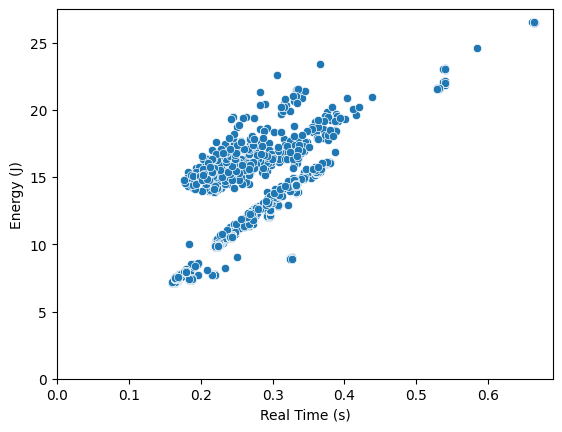

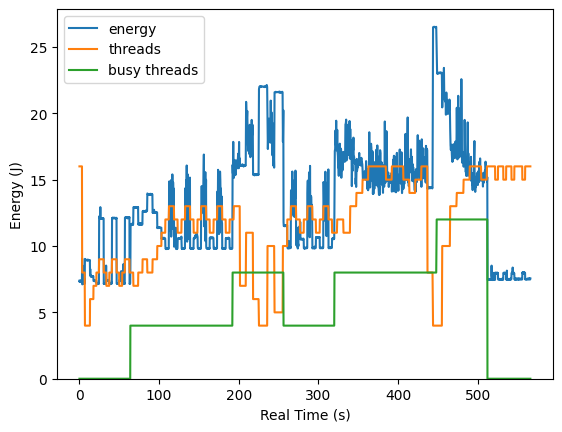

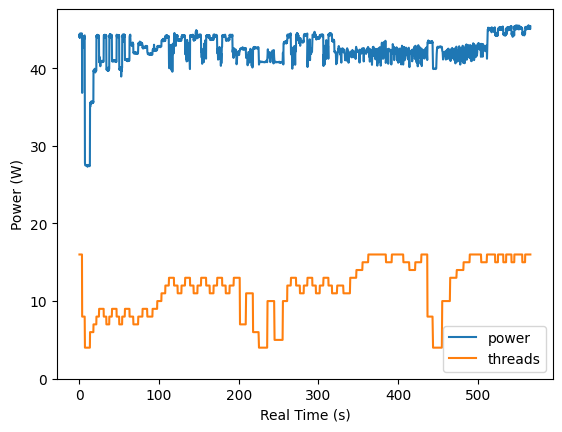

In [89]:
ax = sns.scatterplot(x=user, y=energy)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy, label='energy')
sns.lineplot(x=accx(real), y=t, label='threads', ax=ax)
sns.lineplot(x=accx(real), y=[busy_threads_at_time(r) for r in accx(real)], label='busy threads', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='power')
sns.lineplot(x=accx(real), y=t, label='threads', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

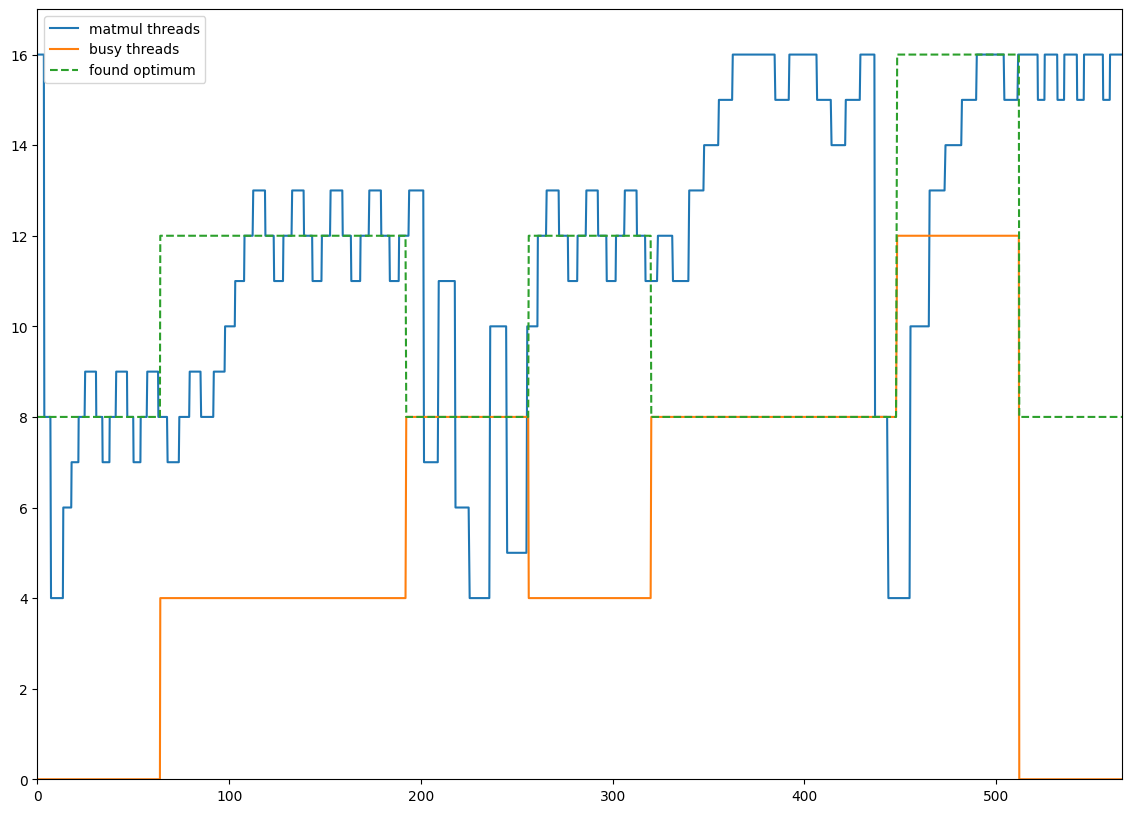

In [90]:
fig = plt.figure(figsize=(14,10))
fig.tight_layout()

rs = list(accx(real))
ts = [busy_threads_at_time(r) for r in rs]
fo = [found_optimum(t) for t in ts]

ax = sns.lineplot(x=rs, y=t, label='matmul threads')
sns.lineplot(x=rs, y=ts, label='busy threads', ax=ax)
sns.lineplot(x=rs, y=fo, label='found optimum', linestyle='--', ax=ax)

ax.set_xlim((0, sum(real)))
ax.set_ylim((0, 17))
plt.show()

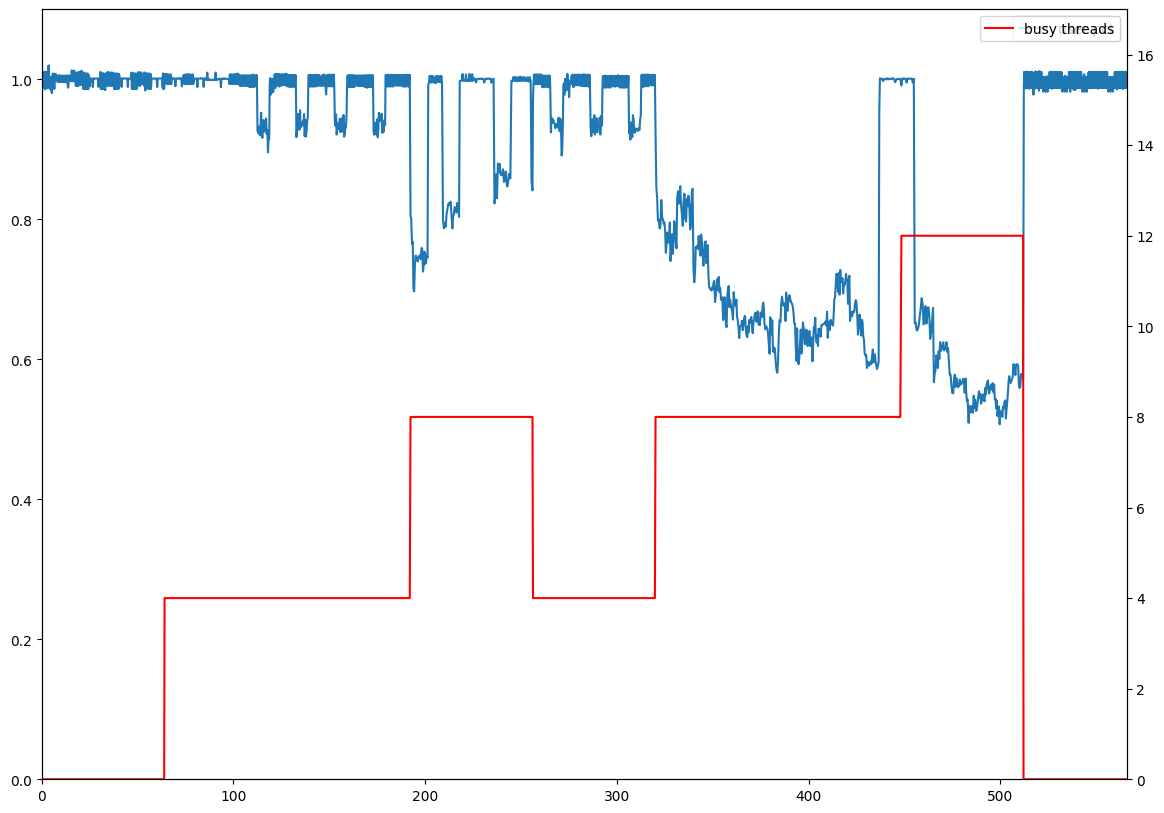

In [91]:
fig = plt.figure(figsize=(14,10))
fig.tight_layout()

ax = sns.lineplot(x=accx(real), y=[u / r for u, r in zip(user, real)], label='user pct')
ax.set_xlim((0, sum(real)))
ax.set_ylim((0, 1.1))

ax2 = ax.twinx()
sns.lineplot(x=accx(real), y=[busy_threads_at_time(r) for r in accx(real)], color='r', label='busy threads', ax=ax2)
ax2.set_ylim((0, 17))

plt.show()